In [1]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [2]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
phenotypes= dropmissing(phenotypes, :FinPenBatch)
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,false,1B_D02,1B_D02


In [5]:
nTrtsPer180_model_equations = "nTrtsPer180 = intercept + Batch + Died + EntryAge + FinPenBatch + SowID"
nTrtsPer180_R=1.37315
nTrtsPer180_model=build_model(nTrtsPer180_model_equations,nTrtsPer180_R);
set_covariate(nTrtsPer180_model,"EntryAge")
nTrtsPer180_G1=0.166575
set_random(nTrtsPer180_model,"FinPenBatch",nTrtsPer180_G1)
nTrtsPer180_G2=0.339763E-06
set_random(nTrtsPer180_model,"SowID",nTrtsPer180_G2)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 18.742136 seconds (37.77 k allocations: 10.393 GiB, 0.10% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [7]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))
nTrtsPer180_G3=0.174161
@time add_genotypes(nTrtsPer180_model,M,nTrtsPer180_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 15.542276 seconds (7.99 M allocations: 15.982 GiB, 1.37% gc time)


4.0f0

In [8]:
@time nTrtsPer180_outCPi=runMCMC(nTrtsPer180_model,phenotypes,methods="BayesC", missing_phenotypes=true, Pi= 0.999, estimatePi=true,estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0116 in the row 106 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0117 in the row 107 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0149 in the row 138 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0254 in the row 230 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0272 in the row 247 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0285 in the row 258 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0288 in the row 260 are missing. This record is deleted.
Phenotypes for all traits included in the model for ind

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = recode at recode.jl:354 [inlined]
└ @ Core /opt/julia/packages/CategoricalArrays/xjesC/src/recode.jl:354



The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 0.001045



A Linear Mixed Model was build using model equations:

nTrtsPer180 = intercept + Batch + Died + EntryAge + FinPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               49
Died            factor       fixed                2
EntryAge        covariate    fixed                1
FinPenBatch     factor       random             221
SowID           factor       random            1071

MCMC Information:

methods                                      BayesC
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length                                  50000
burnin                                         5000
estimatePi                                     true


running MCMC for BayesC...100%|█████████████████████████| Time: 9:50:10




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


35461.996918 seconds (546.61 M allocations: 113.837 GiB, 0.15% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 435172×5 DataFrame. Omitted printing of 1 column…
  "Pi"                      => 1×3 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 1345×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "EBV_nTrtsPer180"         => 3205×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…

In [9]:
keys(nTrtsPer180_outCPi)

Base.KeySet for a Dict{Any,Any} with 9 entries. Keys:
  "marker effects"
  "Pi"
  "heritability"
  "location parameters"
  "residual variance"
  "ScaleEffectVar"
  "genetic_variance"
  "EBV_nTrtsPer180"
  "marker effects variance"

In [10]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.10164018924129228

In [11]:
Sow=CSV.read("MCMC_samples_SowID_variances.txt",delim = ' ',header=true)
Vs=mean(Sow[!, 1])

4.824453469432148e-7

In [12]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

0.15589798334805402

In [13]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

1.438489370695443

In [14]:
h2=Va/(Va+Vs+Ve)

0.05992838361836989

In [15]:
Pi=nTrtsPer180_outCPi["Pi"]

,π,Estimate,Std_Error
,Any,Any,Any
1,π,0.99495,0.00897042


In [16]:
Pi=CSV.read("MCMC_samples_pi.txt",delim = ' ',header=false)
insertcols!(Pi, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Column1
,Int64,Float64
1,1,0.97229
2,2,0.97682
3,3,0.974662
4,4,0.976133
5,5,0.975202
6,6,0.970741
7,7,0.974772
8,8,0.979013
9,9,0.981724


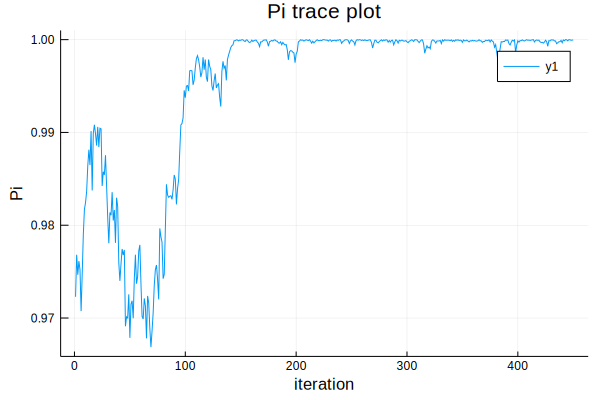

In [17]:
using Plots
x = Pi[!,1]; y = Pi[!,2]; # These are the plotting data
plot(x,y, title = "Pi trace plot",
        xlabel = "iteration", ylabel = "Pi")

In [18]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,nTrtsPer180
,Int64,Float64
1,1,0.112179
2,2,0.0997909
3,3,0.106605
4,4,0.0937605
5,5,0.0887707
6,6,0.0885959
7,7,0.0771281
8,8,0.0614791
9,9,0.0551834


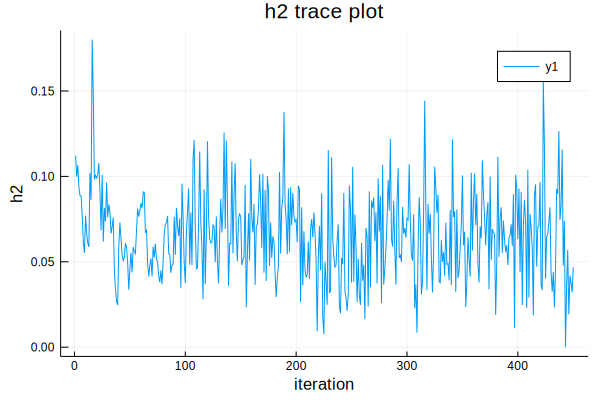

In [19]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [20]:
nTrtsPer180_model_equations = "nTrtsPer180 = intercept + Batch + Died + EntryAge + FinPenBatch + SowID"
nTrtsPer180_R=1.37315
nTrtsPer180_model=build_model(nTrtsPer180_model_equations,nTrtsPer180_R);
set_covariate(nTrtsPer180_model,"EntryAge")
nTrtsPer180_G1=0.166575
set_random(nTrtsPer180_model,"FinPenBatch",nTrtsPer180_G1)
nTrtsPer180_G2=0.339763E-06
set_random(nTrtsPer180_model,"SowID",nTrtsPer180_G2)
nTrtsPer180_G3=0.174161
@time add_genotypes(nTrtsPer180_model,M,nTrtsPer180_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
340.307871 seconds (870.69 k allocations: 20.848 GiB, 55.23% gc time)


In [8]:
@time nTrtsPer180_outB=runMCMC(nTrtsPer180_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0116 in the row 106 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0117 in the row 107 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0149 in the row 138 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0254 in the row 230 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0272 in the row 247 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0285 in the row 258 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0288 in the row 260 are missing. This record is deleted.
Phenotypes for all traits included in the model for ind

running MCMC ...100%|███████████████████████████████████| Time: 6:13:32




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


22452.422261 seconds (90.32 G allocations: 2.054 TiB, 1.27% gc time)


Dict{Any,Any} with 8 entries:
  "ScaleEffectVargeno"           => 1×3 DataFrame…
  "heritability"                 => 1×3 DataFrame…
  "location parameters"          => 1345×5 DataFrame…
  "residual variance"            => 1×3 DataFrame…
  "marker effects geno"          => 435172×5 DataFrame. Omitted printing of 1 c…
  "genetic_variance"             => 1×3 DataFrame…
  "EBV_nTrtsPer180"              => 3205×3 DataFrame…
  "marker effects variance geno" => 1×3 DataFrame…

In [22]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.15504107394889408

In [23]:
Sow=CSV.read("MCMC_samples_SowID_variances.txt",delim = ' ',header=true)
Vs=mean(Sow[!, 1])

3.690045059980227e-7

In [24]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

0.15891181480234629

In [25]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

1.399776309806669

In [26]:
h2=Va/(Va+Vs+Ve)

0.0904699961227013

In [27]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,nTrtsPer180
,Int64,Float64
1,1,0.103906
2,2,0.0873819
3,3,0.126146
4,4,0.129648
5,5,0.106024
6,6,0.104976
7,7,0.124758
8,8,0.0886257
9,9,0.103955


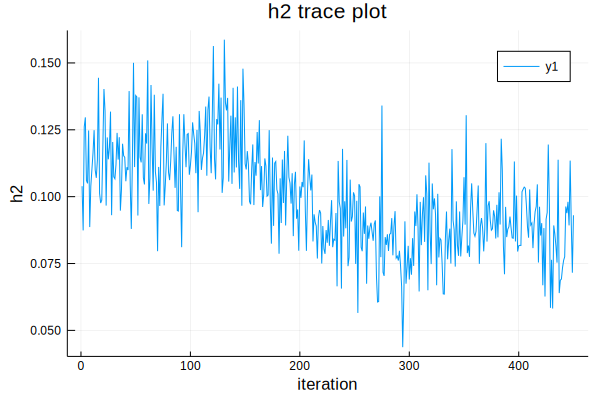

In [28]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [3]:
@time nTrtsPer180_outB,nTrtsPer180_winVarProps = GWAS("MCMC_samples_marker_effects_geno_nTrtsPer180.txt","/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
M;header=true,window_size="0.25 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:42:53


BoundsError: BoundsError: attempt to access (9375×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 7229   │ 14     │ 23750000  │ 24000000  │ 23750189  │ 23996549  │ 66     │ 0.00444266     │ 0.00657569  │ 3.05     │ 0.446667   │ 0.446667  │
│ 2    │ 1     │ 5754   │ 11     │ 3750000   │ 4000000   │ 3754888   │ 3999891   │ 66     │ 0.00138622     │ 0.00339186  │ 0.93     │ 0.271111   │ 0.358889  │
│ 3    │ 1     │ 7227   │ 14     │ 23250000  │ 23500000  │ 23250417  │ 23496604  │ 60     │ 0.00156048     │ 0.00391947  │ 1.06     │ 0.244444   │ 0.320741  │
│ 4    │ 1     │ 7228   │ 14     │ 23500000  │ 23750000  │ 23504300  │ 23749382  │ 58     │ 0.00120684     │ 0.00315742  │ 0.82     │ 0.213333   │ 0.293889  │
│ 5    │ 1     │ 4875   │ 8      │ 131750000 │ 132000000 │ 131751715 │ 131999439 │ 67     │ 0.00148278     │ 0.00426385  │ 0.94     │ 0.197778   │ 0.274667  │
│ 6    │ 1     │ 4874   │ 8      │ 131500000 │ 131750000 │ 131502354 │ 131749137 │ 67     │ 0.00100631     │ 0.00299519  │ 0.67     │ 0.188889   │ 0.26037   │
│ 7    │ 1     │ 3966   │ 7      │ 26500000  │ 26750000  │ 26500623  │ 26747706  │ 66     │ 0.000541498    │ 0.00174868  │ 0.36     │ 0.166667   │ 0.246984  │
│ 8    │ 1     │ 2837   │ 5      │ 19250000  │ 19500000  │ 19250089  │ 19498180  │ 55     │ 0.000999914    │ 0.00367337  │ 0.62     │ 0.144444   │ 0.234167  │
│ 9    │ 1     │ 3974   │ 7      │ 28500000  │ 28750000  │ 28504819  │ 28749550  │ 56     │ 0.000487553    │ 0.00189377  │ 0.31     │ 0.135556   │ 0.22321   │
│ 10   │ 1     │ 6127   │ 12     │ 18000000  │ 18250000  │ 18001496  │ 18249439  │ 74     │ 0.000357134    │ 0.00138558  │ 0.23     │ 0.131111   │ 0.214     │
│ 11   │ 1     │ 6284   │ 12     │ 57250000  │ 57500000  │ 57251611  │ 57498228  │ 74     │ 0.000601905    │ 0.00281034  │ 0.4      │ 0.128889   │ 0.206263  │
│ 12   │ 1     │ 6126   │ 12     │ 17750000  │ 18000000  │ 17765260  │ 17995907  │ 42     │ 0.000489777    │ 0.00195645  │ 0.32     │ 0.126667   │ 0.19963   │
│ 13   │ 1     │ 5424   │ 9      │ 130250000 │ 130500000 │ 130253169 │ 130498842 │ 54     │ 0.000360898    │ 0.00151478  │ 0.23     │ 0.117778   │ 0.193333  │
│ 14   │ 1     │ 7802   │ 15     │ 25250000  │ 25500000  │ 25250466  │ 25499288  │ 64     │ 0.000325902    │ 0.00149824  │ 0.23     │ 0.117778   │ 0.187937  │
│ 15   │ 1     │ 2222   │ 3      │ 129500000 │ 129750000 │ 129502968 │ 129748906 │ 80     │ 0.000336368    │ 0.00165381  │ 0.22     │ 0.115556   │ 0.183111  │
│ 16   │ 1     │ 3972   │ 7      │ 28000000  │ 28250000  │ 28000991  │ 28231039  │ 58     │ 0.00027719     │ 0.00107     │ 0.18     │ 0.115556   │ 0.178889  │
│ 17   │ 1     │ 3973   │ 7      │ 28250000  │ 28500000  │ 28251971  │ 28493479  │ 60     │ 0.000281348    │ 0.00122398  │ 0.19     │ 0.111111   │ 0.174902  │
│ 18   │ 1     │ 7660   │ 14     │ 131500000 │ 131750000 │ 131501106 │ 131746100 │ 67     │ 0.000178647    │ 0.000862786 │ 0.12     │ 0.111111   │ 0.171358  │
│ 19   │ 1     │ 3967   │ 7      │ 26750000  │ 27000000  │ 26750322  │ 26997638  │ 77     │ 0.000226083    │ 0.00108206  │ 0.14     │ 0.104444   │ 0.167836  │
│ 20   │ 1     │ 1901   │ 3      │ 49250000  │ 49500000  │ 49252695  │ 49499297  │ 75     │ 7.62815e-5     │ 0.000306688 │ 0.05     │ 0.0933333  │ 0.164111  │
│ 21   │ 1     │ 8765   │ 17     │ 45750000  │ 46000000  │ 45752632  │ 45999754  │ 77     │ 0.000130522    │ 0.000507964 │ 0.09     │ 0.0911111  │ 0.160635  │
│ 22   │ 1     │ 1205   │ 2      │ 27000000  │ 27250000  │ 27001294  │ 27249287  │ 68     │ 0.000151923    │ 0.000828876 │ 0.1      │ 0.0888889  │ 0.157374  │
│ 23   │ 1     │ 6033   │ 11     │ 73750000  │ 74000000  │ 73754207  │ 73993401  │ 57     │ 0.000151975    │ 0.000682518 │ 0.1      │ 0.0888889  │ 0.154396  │
│ 24   │ 1     │ 7601   │ 14     │ 116750000 │ 117000000 │ 116752943 │ 116997170 │ 49     │ 0.000124926    │ 0.000566794 │ 0.09     │ 0.0888889  │ 0.151667  │
│ 25   │ 1     │ 5757   │ 11     │ 4500000   │ 4750000   │ 4501032   │ 4745518   │ 61     │ 0.000190646    │ 0.00100073  │ 0.13     │ 0.0822222  │ 0.148889  │
│ 26   │ 1     │ 3971   │ 7      │ 27750000  │ 28000000  │ 27751637  │ 27997745  │ 56     │ 0.000241957    │ 0.00126768  │ 0.16     │ 0.08       │ 0.146239  │
│ 27   │ 1     │ 6414   │ 13     │ 28000000  │ 28250000  │ 28001643  │ 28248248  │ 59     │ 0.000165759    │ 0.000935345 │ 0.11     │ 0.08       │ 0.143786  │
│ 28   │ 1     │ 1756   │ 3      │ 13000000  │ 13250000  │ 13004192  │ 13245399  │ 74     │ 0.000172004    │ 0.00103249  │ 0.11     │ 0.0777778  │ 0.141429  │
│ 29   │ 1     │ 4985   │ 9      │ 20250000  │ 20500000  │ 20250743  │ 20497193  │ 76     │ 9.42749e-5     │ 0.000474191 │ 0.07     │ 0.0777778  │ 0.139234  │
│ 30   │ 1     │ 5452   │ 9      │ 137250000 │ 137500000 │ 137251602 │ 137497566 │ 78     │ 0.000182177    │ 0.00117699  │ 0.13     │ 0.0777778  │ 0.137185  │
│ 31   │ 1     │ 7902   │ 15     │ 50250000  │ 50500000  │ 50255267  │ 50496997  │ 68     │ 0.000155624    │ 0.000842514 │ 0.1      │ 0.0777778  │ 0.135269  │
│ 32   │ 1     │ 9043   │ 18     │ 52000000  │ 52250000  │ 52000481  │ 52249739  │ 74     │ 0.000102359    │ 0.000477962 │ 0.07     │ 0.0777778  │ 0.133472  │
│ 33   │ 1     │ 6066   │ 12     │ 2750000   │ 3000000   │ 2756945   │ 2997712   │ 51     │ 0.000126844    │ 0.000751102 │ 0.09     │ 0.0755556  │ 0.131717  │
│ 34   │ 1     │ 6355   │ 13     │ 13250000  │ 13500000  │ 13252291  │ 13497768  │ 69     │ 0.00017105     │ 0.000921244 │ 0.11     │ 0.0755556  │ 0.130065  │
│ 35   │ 1     │ 6356   │ 13     │ 13500000  │ 13750000  │ 13507242  │ 13744395  │ 56     │ 0.000152337    │ 0.000771602 │ 0.11     │ 0.0755556  │ 0.128508  │
│ 36   │ 1     │ 6454   │ 13     │ 38000000  │ 38250000  │ 38001217  │ 38244462  │ 53     │ 0.000124656    │ 0.000790702 │ 0.08     │ 0.0755556  │ 0.127037  │
│ 37   │ 1     │ 1139   │ 2      │ 10500000  │ 10750000  │ 10500109  │ 10748705  │ 64     │ 0.000134488    │ 0.000726128 │ 0.09     │ 0.0733333  │ 0.125586  │
│ 38   │ 1     │ 8702   │ 17     │ 30000000  │ 30250000  │ 30002660  │ 30238567  │ 72     │ 0.000211624    │ 0.00113966  │ 0.14     │ 0.0733333  │ 0.124211  │
│ 39   │ 1     │ 2286   │ 4      │ 12500000  │ 12750000  │ 12503515  │ 12748121  │ 58     │ 0.000278987    │ 0.00180455  │ 0.19     │ 0.0711111  │ 0.122849  │
│ 40   │ 1     │ 3922   │ 7      │ 15500000  │ 15750000  │ 15502287  │ 15749046  │ 53     │ 0.000139962    │ 0.00103272  │ 0.09     │ 0.0711111  │ 0.121556  │
│ 41   │ 1     │ 7659   │ 14     │ 131250000 │ 131500000 │ 131250627 │ 131497220 │ 70     │ 7.97017e-5     │ 0.000582704 │ 0.06     │ 0.0711111  │ 0.120325  │
│ 42   │ 1     │ 8311   │ 16     │ 12250000  │ 12500000  │ 12252238  │ 12481437  │ 60     │ 9.02721e-5     │ 0.00047257  │ 0.06     │ 0.0711111  │ 0.119153  │
│ 43   │ 1     │ 1810   │ 3      │ 26500000  │ 26750000  │ 26500108  │ 26738255  │ 54     │ 7.43188e-5     │ 0.000391505 │ 0.05     │ 0.0688889  │ 0.117984  │
│ 44   │ 1     │ 5395   │ 9      │ 123000000 │ 123250000 │ 123001818 │ 123247576 │ 62     │ 0.000135162    │ 0.000640803 │ 0.09     │ 0.0688889  │ 0.116869  │
│ 45   │ 1     │ 5455   │ 9      │ 138000000 │ 138250000 │ 138001843 │ 138248019 │ 68     │ 9.16432e-5     │ 0.000742187 │ 0.06     │ 0.0688889  │ 0.115802  │
│ 46   │ 1     │ 6558   │ 13     │ 64000000  │ 64250000  │ 64002972  │ 64245300  │ 66     │ 0.000109488    │ 0.00076579  │ 0.07     │ 0.0688889  │ 0.114783  │
│ 47   │ 1     │ 337    │ 1      │ 84000000  │ 84250000  │ 84003966  │ 84249073  │ 55     │ 0.000128669    │ 0.000803371 │ 0.08     │ 0.0666667  │ 0.113759  │
│ 48   │ 1     │ 1204   │ 2      │ 26750000  │ 27000000  │ 26752364  │ 26996768  │ 68     │ 9.31437e-5     │ 0.000584878 │ 0.06     │ 0.0666667  │ 0.112778  │
│ 49   │ 1     │ 5627   │ 10     │ 41500000  │ 41750000  │ 41508322  │ 41743406  │ 55     │ 7.03112e-5     │ 0.000316486 │ 0.05     │ 0.0666667  │ 0.111837  │
│ 50   │ 1     │ 6285   │ 12     │ 57500000  │ 57750000  │ 57501196  │ 57749060  │ 74     │ 0.000110929    │ 0.000756831 │ 0.07     │ 0.0666667  │ 0.110933  │
│ 51   │ 1     │ 8312   │ 16     │ 12500000  │ 12750000  │ 12504339  │ 12747823  │ 43     │ 0.000104335    │ 0.00058697  │ 0.07     │ 0.0666667  │ 0.110065  │
│ 52   │ 1     │ 3168   │ 5      │ 102000000 │ 102250000 │ 102003878 │ 102248859 │ 79     │ 8.02369e-5     │ 0.000434912 │ 0.05     │ 0.0644444  │ 0.109188  │
│ 53   │ 1     │ 3952   │ 7      │ 23000000  │ 23250000  │ 23001142  │ 23249903  │ 78     │ 0.000129575    │ 0.000766233 │ 0.09     │ 0.0644444  │ 0.108344  │
│ 54   │ 1     │ 8570   │ 16     │ 77000000  │ 77250000  │ 77000990  │ 77248799  │ 58     │ 9.69025e-5     │ 0.000490748 │ 0.06     │ 0.0644444  │ 0.107531  │
│ 55   │ 1     │ 8661   │ 17     │ 19750000  │ 20000000  │ 19751461  │ 19999960  │ 66     │ 0.00015662     │ 0.000866981 │ 0.1      │ 0.0644444  │ 0.106747  │
│ 56   │ 1     │ 1714   │ 3      │ 2500000   │ 2750000   │ 2500530   │ 2737881   │ 53     │ 0.000152651    │ 0.000978162 │ 0.1      │ 0.0622222  │ 0.105952  │
│ 57   │ 1     │ 1715   │ 3      │ 2750000   │ 3000000   │ 2752371   │ 2996059   │ 67     │ 0.000151317    │ 0.000843644 │ 0.1      │ 0.0622222  │ 0.105185  │
│ 58   │ 1     │ 2118   │ 3      │ 103500000 │ 103750000 │ 103504747 │ 103749366 │ 75     │ 6.46997e-5     │ 0.000297011 │ 0.04     │ 0.0622222  │ 0.104444  │
│ 59   │ 1     │ 3902   │ 7      │ 10500000  │ 10750000  │ 10501287  │ 10748969  │ 61     │ 0.000116755    │ 0.0006305   │ 0.08     │ 0.0622222  │ 0.103729  │
│ 60   │ 1     │ 5187   │ 9      │ 71000000  │ 71250000  │ 71001828  │ 71246222  │ 74     │ 6.63086e-5     │ 0.00046055  │ 0.04     │ 0.0622222  │ 0.103037  │
│ 61   │ 1     │ 5491   │ 10     │ 7500000   │ 7750000   │ 7501608   │ 7748100   │ 69     │ 9.35829e-5     │ 0.000468592 │ 0.06     │ 0.0622222  │ 0.102368  │
│ 62   │ 1     │ 8327   │ 16     │ 16250000  │ 16500000  │ 16254933  │ 16497033  │ 65     │ 6.1788e-5      │ 0.000377938 │ 0.04     │ 0.0622222  │ 0.10172   │
│ 63   │ 1     │ 8864   │ 18     │ 7250000   │ 7500000   │ 7252487   │ 7498054   │ 64     │ 9.07079e-5     │ 0.000520781 │ 0.06     │ 0.0622222  │ 0.101093  │
│ 64   │ 1     │ 8899   │ 18     │ 16000000  │ 16250000  │ 16001016  │ 16249767  │ 49     │ 8.65365e-5     │ 0.000663512 │ 0.06     │ 0.0622222  │ 0.100486  │
│ 65   │ 1     │ 216    │ 1      │ 53750000  │ 54000000  │ 53757078  │ 53998155  │ 57     │ 6.1536e-5      │ 0.000305248 │ 0.04     │ 0.06       │ 0.0998632 │
│ 66   │ 1     │ 4060   │ 7      │ 50000000  │ 50250000  │ 50001617  │ 50248064  │ 73     │ 6.30397e-5     │ 0.000559072 │ 0.04     │ 0.06       │ 0.0992593 │
│ 67   │ 1     │ 4158   │ 7      │ 74500000  │ 74750000  │ 74500711  │ 74726649  │ 59     │ 0.000102147    │ 0.000682385 │ 0.07     │ 0.06       │ 0.0986733 │
│ 68   │ 1     │ 4973   │ 9      │ 17250000  │ 17500000  │ 17251776  │ 17499612  │ 59     │ 6.2261e-5      │ 0.000319177 │ 0.04     │ 0.06       │ 0.0981046 │
│ 69   │ 1     │ 5023   │ 9      │ 29750000  │ 30000000  │ 29761261  │ 29997197  │ 35     │ 0.000120862    │ 0.000603469 │ 0.08     │ 0.06       │ 0.0975523 │
│ 70   │ 1     │ 5947   │ 11     │ 52250000  │ 52500000  │ 52251652  │ 52498813  │ 50     │ 0.000155226    │ 0.000743462 │ 0.11     │ 0.06       │ 0.0970159 │
│ 71   │ 1     │ 95     │ 1      │ 23500000  │ 23750000  │ 23500658  │ 23746912  │ 53     │ 7.26598e-5     │ 0.00054983  │ 0.05     │ 0.0577778  │ 0.0964632 │
│ 72   │ 1     │ 134    │ 1      │ 33250000  │ 33500000  │ 33256472  │ 33499854  │ 71     │ 0.000124886    │ 0.000893156 │ 0.08     │ 0.0577778  │ 0.0959259 │
│ 73   │ 1     │ 170    │ 1      │ 42250000  │ 42500000  │ 42278421  │ 42498141  │ 54     │ 7.83393e-5     │ 0.000476605 │ 0.05     │ 0.0577778  │ 0.0954033 │
│ 74   │ 1     │ 172    │ 1      │ 42750000  │ 43000000  │ 42753579  │ 42997288  │ 65     │ 6.98058e-5     │ 0.000390114 │ 0.05     │ 0.0577778  │ 0.0948949 │
│ 75   │ 1     │ 4947   │ 9      │ 10750000  │ 11000000  │ 10752382  │ 10999166  │ 64     │ 3.94577e-5     │ 0.000210753 │ 0.03     │ 0.0577778  │ 0.0944    │
│ 76   │ 1     │ 5755   │ 11     │ 4000000   │ 4250000   │ 4005778   │ 4249951   │ 60     │ 7.49689e-5     │ 0.000439054 │ 0.05     │ 0.0577778  │ 0.0939181 │
│ 77   │ 1     │ 6551   │ 13     │ 62250000  │ 62500000  │ 62251867  │ 62494265  │ 60     │ 5.46956e-5     │ 0.000440729 │ 0.04     │ 0.0577778  │ 0.0934488 │
│ 78   │ 1     │ 7226   │ 14     │ 23000000  │ 23250000  │ 23001988  │ 23245711  │ 62     │ 0.000124231    │ 0.000902158 │ 0.09     │ 0.0577778  │ 0.0929915 │
│ 79   │ 1     │ 7332   │ 14     │ 49500000  │ 49750000  │ 49501046  │ 49746602  │ 73     │ 0.000104404    │ 0.000745814 │ 0.07     │ 0.0577778  │ 0.0925457 │
│ 80   │ 1     │ 8000   │ 15     │ 75000000  │ 75250000  │ 75002754  │ 75245535  │ 55     │ 6.13563e-5     │ 0.000360185 │ 0.04     │ 0.0577778  │ 0.0921111 │
│ 81   │ 1     │ 8769   │ 17     │ 46750000  │ 47000000  │ 46750192  │ 46991792  │ 63     │ 5.61873e-5     │ 0.00030182  │ 0.04     │ 0.0577778  │ 0.0916872 │
│ 82   │ 1     │ 1696   │ 2      │ 150000000 │ 150250000 │ 150000500 │ 150245419 │ 71     │ 5.95068e-5     │ 0.000335971 │ 0.04     │ 0.0555556  │ 0.0912466 │
│ 83   │ 1     │ 2743   │ 4      │ 126750000 │ 127000000 │ 126751259 │ 126996149 │ 96     │ 4.58455e-5     │ 0.000242819 │ 0.03     │ 0.0555556  │ 0.0908166 │
│ 84   │ 1     │ 2950   │ 5      │ 47500000  │ 47750000  │ 47504311  │ 47738156  │ 46     │ 5.1373e-5      │ 0.000283326 │ 0.03     │ 0.0555556  │ 0.0903968 │
│ 85   │ 1     │ 3790   │ 6      │ 153500000 │ 153750000 │ 153500350 │ 153748030 │ 76     │ 4.34143e-5     │ 0.000217299 │ 0.03     │ 0.0555556  │ 0.0899869 │
│ 86   │ 1     │ 3929   │ 7      │ 17250000  │ 17500000  │ 17251875  │ 17489256  │ 66     │ 5.28459e-5     │ 0.000306549 │ 0.04     │ 0.0555556  │ 0.0895866 │
│ 87   │ 1     │ 4228   │ 7      │ 92000000  │ 92250000  │ 92001227  │ 92245952  │ 67     │ 0.000104528    │ 0.000717742 │ 0.08     │ 0.0555556  │ 0.0891954 │
│ 88   │ 1     │ 4984   │ 9      │ 20000000  │ 20250000  │ 20001064  │ 20248154  │ 57     │ 3.83149e-5     │ 0.000200314 │ 0.03     │ 0.0555556  │ 0.0888131 │
│ 89   │ 1     │ 5027   │ 9      │ 30750000  │ 31000000  │ 30752471  │ 30998948  │ 53     │ 6.19632e-5     │ 0.000349575 │ 0.04     │ 0.0555556  │ 0.0884395 │
│ 90   │ 1     │ 5625   │ 10     │ 41000000  │ 41250000  │ 41003708  │ 41242213  │ 70     │ 5.12287e-5     │ 0.00028577  │ 0.03     │ 0.0555556  │ 0.0880741 │
│ 91   │ 1     │ 5844   │ 11     │ 26250000  │ 26500000  │ 26251342  │ 26494790  │ 70     │ 6.22116e-5     │ 0.000370408 │ 0.04     │ 0.0555556  │ 0.0877167 │
│ 92   │ 1     │ 6283   │ 12     │ 57000000  │ 57250000  │ 57001278  │ 57249101  │ 63     │ 8.46295e-5     │ 0.000593798 │ 0.06     │ 0.0555556  │ 0.0873671 │
│ 93   │ 1     │ 7341   │ 14     │ 51750000  │ 52000000  │ 51773402  │ 51999578  │ 43     │ 9.00134e-5     │ 0.000564147 │ 0.06     │ 0.0555556  │ 0.0870251 │
│ 94   │ 1     │ 7566   │ 14     │ 108000000 │ 108250000 │ 108009305 │ 108249093 │ 56     │ 4.90198e-5     │ 0.00030126  │ 0.03     │ 0.0555556  │ 0.0866903 │
│ 95   │ 1     │ 7598   │ 14     │ 116000000 │ 116250000 │ 116001402 │ 116249237 │ 55     │ 6.54751e-5     │ 0.000339015 │ 0.04     │ 0.0555556  │ 0.0863626 │
│ 96   │ 1     │ 8340   │ 16     │ 19500000  │ 19750000  │ 19505000  │ 19746815  │ 66     │ 5.2853e-5      │ 0.000281821 │ 0.03     │ 0.0555556  │ 0.0860417 │
│ 97   │ 1     │ 8586   │ 17     │ 1000000   │ 1250000   │ 1005788   │ 1248941   │ 81     │ 4.40214e-5     │ 0.00024827  │ 0.03     │ 0.0555556  │ 0.0857274 │
│ 98   │ 1     │ 8685   │ 17     │ 25750000  │ 26000000  │ 25754716  │ 25997624  │ 65     │ 5.97387e-5     │ 0.000344746 │ 0.04     │ 0.0555556  │ 0.0854195 │
│ 99   │ 1     │ 8700   │ 17     │ 29500000  │ 29750000  │ 29503019  │ 29749928  │ 77     │ 6.70742e-5     │ 0.000483098 │ 0.05     │ 0.0555556  │ 0.0851178 │
│ 100  │ 1     │ 8803   │ 17     │ 55250000  │ 55500000  │ 55251751  │ 55498125  │ 77     │ 8.34799e-5     │ 0.000533039 │ 0.05     │ 0.0555556  │ 0.0848222 │
│ 101  │ 1     │ 2117   │ 3      │ 103250000 │ 103500000 │ 103250870 │ 103498310 │ 63     │ 5.41786e-5     │ 0.000353649 │ 0.04     │ 0.0533333  │ 0.0845105 │
│ 102  │ 1     │ 2185   │ 3      │ 120250000 │ 120500000 │ 120254428 │ 120497789 │ 57     │ 7.57706e-5     │ 0.000411597 │ 0.05     │ 0.0533333  │ 0.0842048 │
│ 103  │ 1     │ 3176   │ 5      │ 104000000 │ 104250000 │ 104007937 │ 104242161 │ 50     │ 4.50704e-5     │ 0.000266579 │ 0.03     │ 0.0533333  │ 0.0839051 │
│ 104  │ 1     │ 3920   │ 7      │ 15000000  │ 15250000  │ 15004764  │ 15247787  │ 57     │ 6.57491e-5     │ 0.000477212 │ 0.04     │ 0.0533333  │ 0.0836111 │
│ 105  │ 1     │ 3976   │ 7      │ 29000000  │ 29250000  │ 29001223  │ 29245737  │ 77     │ 7.00644e-5     │ 0.000438304 │ 0.05     │ 0.0533333  │ 0.0833228 │
│ 106  │ 1     │ 3977   │ 7      │ 29250000  │ 29500000  │ 29252271  │ 29499552  │ 78     │ 7.07943e-5     │ 0.000542814 │ 0.04     │ 0.0533333  │ 0.0830398 │
│ 107  │ 1     │ 4059   │ 7      │ 49750000  │ 50000000  │ 49750991  │ 49998683  │ 73     │ 5.688e-5       │ 0.000319986 │ 0.04     │ 0.0533333  │ 0.0827622 │
│ 108  │ 1     │ 4914   │ 9      │ 2500000   │ 2750000   │ 2501818   │ 2748966   │ 60     │ 0.000141598    │ 0.000985478 │ 0.09     │ 0.0533333  │ 0.0824897 │
│ 109  │ 1     │ 5020   │ 9      │ 29000000  │ 29250000  │ 29001236  │ 29240344  │ 55     │ 0.000108053    │ 0.000763656 │ 0.07     │ 0.0533333  │ 0.0822222 │
│ 110  │ 1     │ 5186   │ 9      │ 70750000  │ 71000000  │ 70763877  │ 70999233  │ 69     │ 7.21029e-5     │ 0.000504576 │ 0.05     │ 0.0533333  │ 0.0819596 │
│ 111  │ 1     │ 5695   │ 10     │ 58500000  │ 58750000  │ 58504064  │ 58749165  │ 44     │ 5.82052e-5     │ 0.000320377 │ 0.04     │ 0.0533333  │ 0.0817017 │
│ 112  │ 1     │ 5759   │ 11     │ 5000000   │ 5250000   │ 5000468   │ 5241814   │ 64     │ 5.49839e-5     │ 0.000524722 │ 0.04     │ 0.0533333  │ 0.0814484 │
│ 113  │ 1     │ 6139   │ 12     │ 21000000  │ 21250000  │ 21006253  │ 21244954  │ 56     │ 6.12857e-5     │ 0.000373464 │ 0.04     │ 0.0533333  │ 0.0811996 │
│ 114  │ 1     │ 6335   │ 13     │ 8250000   │ 8500000   │ 8253224   │ 8499912   │ 72     │ 2.9888e-5      │ 0.000146664 │ 0.02     │ 0.0533333  │ 0.0809552 │
│ 115  │ 1     │ 8701   │ 17     │ 29750000  │ 30000000  │ 29755055  │ 29997765  │ 60     │ 4.60988e-5     │ 0.000220147 │ 0.03     │ 0.0533333  │ 0.080715  │
│ 116  │ 1     │ 8729   │ 17     │ 36750000  │ 37000000  │ 36751194  │ 36997342  │ 71     │ 2.98488e-5     │ 0.000151379 │ 0.02     │ 0.0533333  │ 0.0804789 │
│ 117  │ 1     │ 8868   │ 18     │ 8250000   │ 8500000   │ 8250254   │ 8497392   │ 70     │ 4.71842e-5     │ 0.000325453 │ 0.03     │ 0.0533333  │ 0.0802469 │
│ 118  │ 1     │ 336    │ 1      │ 83750000  │ 84000000  │ 83750557  │ 83997119  │ 55     │ 6.21866e-5     │ 0.000362452 │ 0.04     │ 0.0511111  │ 0.08      │
│ 119  │ 1     │ 1650   │ 2      │ 138500000 │ 138750000 │ 138502598 │ 138749899 │ 74     │ 5.8062e-5      │ 0.000462439 │ 0.04     │ 0.0511111  │ 0.0797572 │
│ 120  │ 1     │ 1671   │ 2      │ 143750000 │ 144000000 │ 143790232 │ 143999489 │ 65     │ 5.29444e-5     │ 0.000314019 │ 0.03     │ 0.0511111  │ 0.0795185 │
│ 121  │ 1     │ 1765   │ 3      │ 15250000  │ 15500000  │ 15252136  │ 15498248  │ 69     │ 0.000104923    │ 0.000972692 │ 0.07     │ 0.0511111  │ 0.0792837 │
│ 122  │ 1     │ 2751   │ 4      │ 128750000 │ 129000000 │ 128750655 │ 128996809 │ 75     │ 3.24096e-5     │ 0.000179637 │ 0.02     │ 0.0511111  │ 0.0790528 │
│ 123  │ 1     │ 3968   │ 7      │ 27000000  │ 27250000  │ 27000204  │ 27249064  │ 68     │ 5.83384e-5     │ 0.000414301 │ 0.04     │ 0.0511111  │ 0.0788257 │
│ 124  │ 1     │ 3975   │ 7      │ 28750000  │ 29000000  │ 28752404  │ 28999976  │ 60     │ 0.000143573    │ 0.000989993 │ 0.1      │ 0.0511111  │ 0.0786022 │
│ 125  │ 1     │ 4311   │ 7      │ 112750000 │ 113000000 │ 112756851 │ 112999052 │ 46     │ 0.000101761    │ 0.000836279 │ 0.07     │ 0.0511111  │ 0.0783822 │
│ 126  │ 1     │ 4413   │ 8      │ 16250000  │ 16500000  │ 16251908  │ 16499556  │ 82     │ 3.08218e-5     │ 0.000162271 │ 0.02     │ 0.0511111  │ 0.0781658 │
│ 127  │ 1     │ 4462   │ 8      │ 28500000  │ 28750000  │ 28500036  │ 28748429  │ 59     │ 6.41869e-5     │ 0.000532568 │ 0.04     │ 0.0511111  │ 0.0779528 │
│ 128  │ 1     │ 5432   │ 9      │ 132250000 │ 132500000 │ 132250095 │ 132495752 │ 76     │ 4.75355e-5     │ 0.000320008 │ 0.03     │ 0.0511111  │ 0.0777431 │
│ 129  │ 1     │ 5586   │ 10     │ 31250000  │ 31500000  │ 31250420  │ 31496779  │ 71     │ 6.12182e-5     │ 0.000399073 │ 0.04     │ 0.0511111  │ 0.0775366 │
│ 130  │ 1     │ 6723   │ 13     │ 105250000 │ 105500000 │ 105257290 │ 105493975 │ 36     │ 8.20729e-5     │ 0.000513989 │ 0.06     │ 0.0511111  │ 0.0773333 │
│ 131  │ 1     │ 7274   │ 14     │ 35000000  │ 35250000  │ 35000445  │ 35248374  │ 64     │ 9.7647e-5      │ 0.000585975 │ 0.07     │ 0.0511111  │ 0.0771332 │
│ 132  │ 1     │ 7288   │ 14     │ 38500000  │ 38750000  │ 38502606  │ 38748117  │ 62     │ 4.59791e-5     │ 0.000365666 │ 0.03     │ 0.0511111  │ 0.076936  │
│ 133  │ 1     │ 7562   │ 14     │ 107000000 │ 107250000 │ 107000498 │ 107247134 │ 65     │ 7.91009e-5     │ 0.00046964  │ 0.05     │ 0.0511111  │ 0.0767419 │
│ 134  │ 1     │ 8692   │ 17     │ 27500000  │ 27750000  │ 27501543  │ 27748749  │ 72     │ 5.44146e-5     │ 0.000354009 │ 0.04     │ 0.0511111  │ 0.0765506 │
│ 135  │ 1     │ 8851   │ 18     │ 4000000   │ 4250000   │ 4002471   │ 4246811   │ 66     │ 4.50059e-5     │ 0.000319147 │ 0.03     │ 0.0511111  │ 0.0763621 │
│ 136  │ 1     │ 9002   │ 18     │ 41750000  │ 42000000  │ 41765432  │ 41997754  │ 70     │ 4.64871e-5     │ 0.000269884 │ 0.03     │ 0.0511111  │ 0.0761765 │
│ 137  │ 1     │ 9019   │ 18     │ 46000000  │ 46250000  │ 46008401  │ 46249295  │ 73     │ 4.90933e-5     │ 0.000385199 │ 0.03     │ 0.0511111  │ 0.0759935 │
│ 138  │ 1     │ 9042   │ 18     │ 51750000  │ 52000000  │ 51762908  │ 51999096  │ 63     │ 4.33869e-5     │ 0.000261965 │ 0.03     │ 0.0511111  │ 0.0758132 │
│ 139  │ 1     │ 94     │ 1      │ 23250000  │ 23500000  │ 23250301  │ 23499504  │ 46     │ 4.95058e-5     │ 0.000301447 │ 0.03     │ 0.0488889  │ 0.0756195 │
│ 140  │ 1     │ 104    │ 1      │ 25750000  │ 26000000  │ 25750298  │ 25998814  │ 78     │ 4.38859e-5     │ 0.000281542 │ 0.03     │ 0.0488889  │ 0.0754286 │
│ 141  │ 1     │ 175    │ 1      │ 43500000  │ 43750000  │ 43504853  │ 43748357  │ 60     │ 4.60399e-5     │ 0.000317412 │ 0.03     │ 0.0488889  │ 0.0752403 │
│ 142  │ 1     │ 217    │ 1      │ 54000000  │ 54250000  │ 54000704  │ 54238200  │ 56     │ 7.71268e-5     │ 0.000480171 │ 0.05     │ 0.0488889  │ 0.0750548 │
│ 143  │ 1     │ 1008   │ 1      │ 252000000 │ 252250000 │ 252008666 │ 252249604 │ 66     │ 4.98198e-5     │ 0.000322629 │ 0.03     │ 0.0488889  │ 0.0748718 │
│ 144  │ 1     │ 1695   │ 2      │ 149750000 │ 150000000 │ 149760014 │ 149998604 │ 67     │ 3.84811e-5     │ 0.000343382 │ 0.03     │ 0.0488889  │ 0.0746914 │
│ 145  │ 1     │ 1727   │ 3      │ 5750000   │ 6000000   │ 5750822   │ 5997754   │ 76     │ 5.43878e-5     │ 0.000330578 │ 0.04     │ 0.0488889  │ 0.0745134 │
│ 146  │ 1     │ 1808   │ 3      │ 26000000  │ 26250000  │ 26003466  │ 26248615  │ 51     │ 6.00651e-5     │ 0.000366197 │ 0.04     │ 0.0488889  │ 0.0743379 │
│ 147  │ 1     │ 2119   │ 3      │ 103750000 │ 104000000 │ 103754341 │ 103998487 │ 66     │ 5.20561e-5     │ 0.000340328 │ 0.03     │ 0.0488889  │ 0.0741648 │
│ 148  │ 1     │ 2223   │ 3      │ 129750000 │ 130000000 │ 129753138 │ 129998184 │ 46     │ 0.000123446    │ 0.000841286 │ 0.09     │ 0.0488889  │ 0.073994  │
│ 149  │ 1     │ 2673   │ 4      │ 109250000 │ 109500000 │ 109252758 │ 109498754 │ 67     │ 8.40594e-5     │ 0.000573407 │ 0.06     │ 0.0488889  │ 0.0738255 │
│ 150  │ 1     │ 2741   │ 4      │ 126250000 │ 126500000 │ 126250406 │ 126495961 │ 82     │ 6.08451e-5     │ 0.000468524 │ 0.04     │ 0.0488889  │ 0.0736593 │
│ 151  │ 1     │ 2873   │ 5      │ 28250000  │ 28500000  │ 28252128  │ 28499156  │ 75     │ 3.23335e-5     │ 0.000165432 │ 0.02     │ 0.0488889  │ 0.0734952 │
│ 152  │ 1     │ 3259   │ 6      │ 20000000  │ 20250000  │ 20002651  │ 20249896  │ 74     │ 6.77036e-5     │ 0.000465018 │ 0.05     │ 0.0488889  │ 0.0733333 │
│ 153  │ 1     │ 3926   │ 7      │ 16500000  │ 16750000  │ 16503961  │ 16747803  │ 61     │ 3.3221e-5      │ 0.000238099 │ 0.02     │ 0.0488889  │ 0.0731736 │
│ 154  │ 1     │ 3979   │ 7      │ 29750000  │ 30000000  │ 29755017  │ 29997805  │ 70     │ 3.59346e-5     │ 0.000223181 │ 0.02     │ 0.0488889  │ 0.0730159 │
│ 155  │ 1     │ 3993   │ 7      │ 33250000  │ 33500000  │ 33251467  │ 33496631  │ 60     │ 4.03686e-5     │ 0.000248853 │ 0.03     │ 0.0488889  │ 0.0728602 │
│ 156  │ 1     │ 4123   │ 7      │ 65750000  │ 66000000  │ 65752350  │ 65999783  │ 64     │ 2.48569e-5     │ 0.000134387 │ 0.02     │ 0.0488889  │ 0.0727066 │
│ 157  │ 1     │ 4313   │ 7      │ 113250000 │ 113500000 │ 113258057 │ 113498103 │ 66     │ 4.41218e-5     │ 0.000292145 │ 0.03     │ 0.0488889  │ 0.0725548 │
│ 158  │ 1     │ 4995   │ 9      │ 22750000  │ 23000000  │ 22753598  │ 22996082  │ 69     │ 3.5874e-5      │ 0.000196711 │ 0.03     │ 0.0488889  │ 0.0724051 │
│ 159  │ 1     │ 5098   │ 9      │ 48500000  │ 48750000  │ 48500136  │ 48747596  │ 77     │ 4.16299e-5     │ 0.000275225 │ 0.03     │ 0.0488889  │ 0.0722572 │
│ 160  │ 1     │ 5285   │ 9      │ 95500000  │ 95750000  │ 95512653  │ 95739573  │ 33     │ 6.28754e-5     │ 0.000534459 │ 0.04     │ 0.0488889  │ 0.0721111 │
│ 161  │ 1     │ 5412   │ 9      │ 127250000 │ 127500000 │ 127259374 │ 127499067 │ 38     │ 3.9993e-5      │ 0.000229187 │ 0.03     │ 0.0488889  │ 0.0719669 │
│ 162  │ 1     │ 5435   │ 9      │ 133000000 │ 133250000 │ 133003177 │ 133240499 │ 62     │ 4.6847e-5      │ 0.000309713 │ 0.03     │ 0.0488889  │ 0.0718244 │
│ 163  │ 1     │ 5612   │ 10     │ 37750000  │ 38000000  │ 37751211  │ 37985314  │ 49     │ 5.35159e-5     │ 0.000361373 │ 0.04     │ 0.0488889  │ 0.0716837 │
│ 164  │ 1     │ 5658   │ 10     │ 49250000  │ 49500000  │ 49255453  │ 49495555  │ 67     │ 6.96087e-5     │ 0.000457711 │ 0.05     │ 0.0488889  │ 0.0715447 │
│ 165  │ 1     │ 5862   │ 11     │ 30750000  │ 31000000  │ 30757786  │ 30991985  │ 47     │ 8.77073e-5     │ 0.000575612 │ 0.06     │ 0.0488889  │ 0.0714074 │
│ 166  │ 1     │ 6636   │ 13     │ 83500000  │ 83750000  │ 83501686  │ 83747753  │ 57     │ 4.44244e-5     │ 0.000258524 │ 0.03     │ 0.0488889  │ 0.0712718 │
│ 167  │ 1     │ 7165   │ 14     │ 7750000   │ 8000000   │ 7752760   │ 7998693   │ 79     │ 3.29415e-5     │ 0.000208382 │ 0.02     │ 0.0488889  │ 0.0711377 │
│ 168  │ 1     │ 7169   │ 14     │ 8750000   │ 9000000   │ 8761232   │ 8994023   │ 65     │ 3.97371e-5     │ 0.000246783 │ 0.03     │ 0.0488889  │ 0.0710053 │
│ 169  │ 1     │ 7564   │ 14     │ 107500000 │ 107750000 │ 107504844 │ 107749629 │ 62     │ 4.86982e-5     │ 0.000285482 │ 0.03     │ 0.0488889  │ 0.0708744 │
│ 170  │ 1     │ 8309   │ 16     │ 11750000  │ 12000000  │ 11772438  │ 11978197  │ 43     │ 5.12605e-5     │ 0.00032814  │ 0.04     │ 0.0488889  │ 0.0707451 │
│ 171  │ 1     │ 8530   │ 16     │ 67000000  │ 67250000  │ 67000816  │ 67248498  │ 62     │ 8.34574e-5     │ 0.000683491 │ 0.05     │ 0.0488889  │ 0.0706173 │
│ 172  │ 1     │ 8730   │ 17     │ 37000000  │ 37250000  │ 37003496  │ 37247807  │ 62     │ 4.23304e-5     │ 0.000272553 │ 0.03     │ 0.0488889  │ 0.070491  │
│ 173  │ 1     │ 8764   │ 17     │ 45500000  │ 45750000  │ 45506497  │ 45749556  │ 66     │ 0.000105597    │ 0.00073401  │ 0.07     │ 0.0488889  │ 0.0703661 │
│ 174  │ 1     │ 93     │ 1      │ 23000000  │ 23250000  │ 23002334  │ 23245557  │ 50     │ 3.95903e-5     │ 0.000250979 │ 0.03     │ 0.0466667  │ 0.0702299 │
│ 175  │ 1     │ 111    │ 1      │ 27500000  │ 27750000  │ 27506650  │ 27747279  │ 73     │ 4.78853e-5     │ 0.000316876 │ 0.03     │ 0.0466667  │ 0.0700952 │
│ 176  │ 1     │ 151    │ 1      │ 37500000  │ 37750000  │ 37500545  │ 37748484  │ 70     │ 6.36157e-5     │ 0.000594317 │ 0.04     │ 0.0466667  │ 0.0699621 │
│ 177  │ 1     │ 414    │ 1      │ 103500000 │ 103750000 │ 103502350 │ 103743617 │ 54     │ 4.10465e-5     │ 0.000250929 │ 0.03     │ 0.0466667  │ 0.0698305 │
│ 178  │ 1     │ 581    │ 1      │ 145250000 │ 145500000 │ 145276471 │ 145499936 │ 49     │ 6.78093e-5     │ 0.000459202 │ 0.05     │ 0.0466667  │ 0.0697004 │
│ 179  │ 1     │ 659    │ 1      │ 164750000 │ 165000000 │ 164750789 │ 164996694 │ 64     │ 1.89284e-5     │ 9.43122e-5  │ 0.01     │ 0.0466667  │ 0.0695717 │
│ 180  │ 1     │ 890    │ 1      │ 222500000 │ 222750000 │ 222500017 │ 222748499 │ 76     │ 5.16126e-5     │ 0.000395062 │ 0.03     │ 0.0466667  │ 0.0694444 │
│ 181  │ 1     │ 1019   │ 1      │ 254750000 │ 255000000 │ 254750249 │ 254998655 │ 71     │ 2.08682e-5     │ 9.62608e-5  │ 0.01     │ 0.0466667  │ 0.0693186 │
│ 182  │ 1     │ 1028   │ 1      │ 257000000 │ 257250000 │ 257005908 │ 257249021 │ 73     │ 6.69499e-5     │ 0.00058448  │ 0.05     │ 0.0466667  │ 0.0691941 │
│ 183  │ 1     │ 1034   │ 1      │ 258500000 │ 258750000 │ 258503881 │ 258739422 │ 56     │ 5.7409e-5      │ 0.00044569  │ 0.04     │ 0.0466667  │ 0.069071  │
│ 184  │ 1     │ 1141   │ 2      │ 11000000  │ 11250000  │ 11003302  │ 11248691  │ 54     │ 4.84332e-5     │ 0.000260648 │ 0.03     │ 0.0466667  │ 0.0689493 │
│ 185  │ 1     │ 1672   │ 2      │ 144000000 │ 144250000 │ 144002611 │ 144249484 │ 73     │ 7.3042e-5      │ 0.000607175 │ 0.04     │ 0.0466667  │ 0.0688288 │
│ 186  │ 1     │ 1986   │ 3      │ 70500000  │ 70750000  │ 70506164  │ 70747944  │ 56     │ 7.20693e-5     │ 0.000446353 │ 0.05     │ 0.0466667  │ 0.0687097 │
│ 187  │ 1     │ 2299   │ 4      │ 15750000  │ 16000000  │ 15750637  │ 15999904  │ 73     │ 3.58794e-5     │ 0.000222948 │ 0.03     │ 0.0466667  │ 0.0685918 │
│ 188  │ 1     │ 2679   │ 4      │ 110750000 │ 111000000 │ 110758451 │ 110995943 │ 63     │ 4.36471e-5     │ 0.000288674 │ 0.03     │ 0.0466667  │ 0.0684752 │
│ 189  │ 1     │ 3454   │ 6      │ 69250000  │ 69500000  │ 69254296  │ 69498581  │ 63     │ 5.78768e-5     │ 0.00045148  │ 0.04     │ 0.0466667  │ 0.0683598 │
│ 190  │ 1     │ 3522   │ 6      │ 86250000  │ 86500000  │ 86250115  │ 86499391  │ 76     │ 6.58424e-5     │ 0.000523061 │ 0.04     │ 0.0466667  │ 0.0682456 │
│ 191  │ 1     │ 4423   │ 8      │ 18750000  │ 19000000  │ 18759905  │ 18998044  │ 57     │ 6.70564e-5     │ 0.000402377 │ 0.05     │ 0.0466667  │ 0.0681326 │
│ 192  │ 1     │ 4459   │ 8      │ 27750000  │ 28000000  │ 27751754  │ 27999820  │ 60     │ 6.02994e-5     │ 0.000471437 │ 0.04     │ 0.0466667  │ 0.0680208 │
│ 193  │ 1     │ 4996   │ 9      │ 23000000  │ 23250000  │ 23015572  │ 23247028  │ 56     │ 6.33864e-5     │ 0.000458545 │ 0.04     │ 0.0466667  │ 0.0679102 │
│ 194  │ 1     │ 5397   │ 9      │ 123500000 │ 123750000 │ 123500675 │ 123749798 │ 75     │ 6.63372e-5     │ 0.000391404 │ 0.04     │ 0.0466667  │ 0.0678007 │
│ 195  │ 1     │ 5439   │ 9      │ 134000000 │ 134250000 │ 134002433 │ 134248613 │ 60     │ 0.000129304    │ 0.000890202 │ 0.09     │ 0.0466667  │ 0.0676923 │
│ 196  │ 1     │ 5697   │ 10     │ 59000000  │ 59250000  │ 59006362  │ 59247636  │ 66     │ 2.74469e-5     │ 0.000162389 │ 0.02     │ 0.0466667  │ 0.067585  │
│ 197  │ 1     │ 6045   │ 11     │ 76750000  │ 77000000  │ 76750623  │ 76995102  │ 65     │ 3.02626e-5     │ 0.000174254 │ 0.02     │ 0.0466667  │ 0.0674788 │
│ 198  │ 1     │ 6065   │ 12     │ 2500000   │ 2750000   │ 2500741   │ 2748745   │ 58     │ 4.72972e-5     │ 0.000267512 │ 0.03     │ 0.0466667  │ 0.0673737 │
│ 199  │ 1     │ 6101   │ 12     │ 11500000  │ 11750000  │ 11501427  │ 11747242  │ 74     │ 2.10723e-5     │ 0.000117384 │ 0.01     │ 0.0466667  │ 0.0672697 │
│ 200  │ 1     │ 6128   │ 12     │ 18250000  │ 18500000  │ 18251462  │ 18497891  │ 72     │ 4.90652e-5     │ 0.000335353 │ 0.03     │ 0.0466667  │ 0.0671667 │
│ 201  │ 1     │ 6262   │ 12     │ 51750000  │ 52000000  │ 51750926  │ 51997436  │ 67     │ 2.88718e-5     │ 0.000166177 │ 0.02     │ 0.0466667  │ 0.0670647 │
│ 202  │ 1     │ 6480   │ 13     │ 44500000  │ 44750000  │ 44504014  │ 44749844  │ 52     │ 6.3863e-5      │ 0.000391533 │ 0.04     │ 0.0466667  │ 0.0669637 │
│ 203  │ 1     │ 6560   │ 13     │ 64500000  │ 64750000  │ 64500742  │ 64745198  │ 66     │ 3.36125e-5     │ 0.000185365 │ 0.02     │ 0.0466667  │ 0.0668637 │
│ 204  │ 1     │ 7201   │ 14     │ 16750000  │ 17000000  │ 16753356  │ 16996500  │ 56     │ 4.13911e-5     │ 0.000285075 │ 0.03     │ 0.0466667  │ 0.0667647 │
│ 205  │ 1     │ 7207   │ 14     │ 18250000  │ 18500000  │ 18254655  │ 18496949  │ 64     │ 4.34877e-5     │ 0.000290286 │ 0.03     │ 0.0466667  │ 0.0666667 │
│ 206  │ 1     │ 7237   │ 14     │ 25750000  │ 26000000  │ 25754410  │ 25989860  │ 57     │ 5.12419e-5     │ 0.000321683 │ 0.04     │ 0.0466667  │ 0.0665696 │
│ 207  │ 1     │ 7325   │ 14     │ 47750000  │ 48000000  │ 47750613  │ 47999414  │ 75     │ 5.90969e-5     │ 0.000443098 │ 0.04     │ 0.0466667  │ 0.0664734 │
│ 208  │ 1     │ 7326   │ 14     │ 48000000  │ 48250000  │ 48005641  │ 48242220  │ 49     │ 3.9661e-5      │ 0.000262411 │ 0.03     │ 0.0466667  │ 0.0663782 │
│ 209  │ 1     │ 7800   │ 15     │ 24750000  │ 25000000  │ 24750417  │ 24993092  │ 54     │ 3.33897e-5     │ 0.000224847 │ 0.02     │ 0.0466667  │ 0.0662839 │
│ 210  │ 1     │ 7803   │ 15     │ 25500000  │ 25750000  │ 25502596  │ 25740246  │ 71     │ 6.40553e-5     │ 0.000460487 │ 0.04     │ 0.0466667  │ 0.0661905 │
│ 211  │ 1     │ 7822   │ 15     │ 30250000  │ 30500000  │ 30254305  │ 30497718  │ 72     │ 3.14841e-5     │ 0.000185234 │ 0.02     │ 0.0466667  │ 0.0660979 │
│ 212  │ 1     │ 8177   │ 15     │ 119250000 │ 119500000 │ 119256341 │ 119497365 │ 60     │ 4.79034e-5     │ 0.000261617 │ 0.03     │ 0.0466667  │ 0.0660063 │
│ 213  │ 1     │ 8178   │ 15     │ 119500000 │ 119750000 │ 119510495 │ 119748854 │ 70     │ 3.71674e-5     │ 0.000222645 │ 0.03     │ 0.0466667  │ 0.0659155 │
│ 214  │ 1     │ 8214   │ 15     │ 128500000 │ 128750000 │ 128502448 │ 128746194 │ 68     │ 2.82692e-5     │ 0.000150179 │ 0.02     │ 0.0466667  │ 0.0658255 │
│ 215  │ 1     │ 8310   │ 16     │ 12000000  │ 12250000  │ 12024200  │ 12243102  │ 55     │ 4.89961e-5     │ 0.000298789 │ 0.03     │ 0.0466667  │ 0.0657364 │
│ 216  │ 1     │ 8767   │ 17     │ 46250000  │ 46500000  │ 46252872  │ 46497909  │ 68     │ 5.35566e-5     │ 0.000398349 │ 0.03     │ 0.0466667  │ 0.0656481 │
│ 217  │ 1     │ 9011   │ 18     │ 44000000  │ 44250000  │ 44003130  │ 44248426  │ 75     │ 3.34837e-5     │ 0.000189438 │ 0.02     │ 0.0466667  │ 0.0655607 │
│ 218  │ 1     │ 124    │ 1      │ 30750000  │ 31000000  │ 30755541  │ 30998818  │ 60     │ 4.71522e-5     │ 0.000284738 │ 0.03     │ 0.0444444  │ 0.0654638 │
│ 219  │ 1     │ 167    │ 1      │ 41500000  │ 41750000  │ 41500663  │ 41747601  │ 47     │ 9.18553e-5     │ 0.000600846 │ 0.06     │ 0.0444444  │ 0.0653678 │
│ 220  │ 1     │ 173    │ 1      │ 43000000  │ 43250000  │ 43001431  │ 43245576  │ 51     │ 4.89992e-5     │ 0.000294123 │ 0.03     │ 0.0444444  │ 0.0652727 │
│ 221  │ 1     │ 292    │ 1      │ 72750000  │ 73000000  │ 72751581  │ 72998025  │ 66     │ 2.73436e-5     │ 0.000154944 │ 0.02     │ 0.0444444  │ 0.0651785 │
│ 222  │ 1     │ 426    │ 1      │ 106500000 │ 106750000 │ 106503740 │ 106745679 │ 57     │ 3.90117e-5     │ 0.000267888 │ 0.02     │ 0.0444444  │ 0.0650851 │
│ 223  │ 1     │ 943    │ 1      │ 235750000 │ 236000000 │ 235758702 │ 235999464 │ 51     │ 3.03447e-5     │ 0.000246491 │ 0.02     │ 0.0444444  │ 0.0649925 │
│ 224  │ 1     │ 1806   │ 3      │ 25500000  │ 25750000  │ 25503690  │ 25747038  │ 74     │ 6.25443e-5     │ 0.000368441 │ 0.04     │ 0.0444444  │ 0.0649008 │
│ 225  │ 1     │ 2120   │ 3      │ 104000000 │ 104250000 │ 104003625 │ 104210085 │ 48     │ 2.80228e-5     │ 0.000159883 │ 0.02     │ 0.0444444  │ 0.0648099 │
│ 226  │ 1     │ 2255   │ 4      │ 4750000   │ 5000000   │ 4753078   │ 4993072   │ 80     │ 2.31014e-5     │ 0.000156522 │ 0.02     │ 0.0444444  │ 0.0647198 │
│ 227  │ 1     │ 2681   │ 4      │ 111250000 │ 111500000 │ 111259022 │ 111497312 │ 61     │ 3.82129e-5     │ 0.000210845 │ 0.03     │ 0.0444444  │ 0.0646304 │
│ 228  │ 1     │ 2705   │ 4      │ 117250000 │ 117500000 │ 117256570 │ 117486030 │ 50     │ 4.96397e-5     │ 0.000402469 │ 0.03     │ 0.0444444  │ 0.0645419 │
│ 229  │ 1     │ 2736   │ 4      │ 125000000 │ 125250000 │ 125001553 │ 125244314 │ 70     │ 2.88016e-5     │ 0.000168518 │ 0.02     │ 0.0444444  │ 0.0644541 │
│ 230  │ 1     │ 2802   │ 5      │ 10500000  │ 10750000  │ 10501359  │ 10745420  │ 65     │ 6.934e-5       │ 0.000453865 │ 0.05     │ 0.0444444  │ 0.0643671 │
│ 231  │ 1     │ 3099   │ 5      │ 84750000  │ 85000000  │ 84751492  │ 84996048  │ 66     │ 2.90788e-5     │ 0.000179347 │ 0.02     │ 0.0444444  │ 0.0642809 │
│ 232  │ 1     │ 3193   │ 6      │ 3500000   │ 3750000   │ 3501447   │ 3749964   │ 76     │ 2.67284e-5     │ 0.000143861 │ 0.02     │ 0.0444444  │ 0.0641954 │
│ 233  │ 1     │ 3439   │ 6      │ 65500000  │ 65750000  │ 65500129  │ 65747698  │ 81     │ 2.59368e-5     │ 0.000134056 │ 0.02     │ 0.0444444  │ 0.0641106 │
│ 234  │ 1     │ 3480   │ 6      │ 75750000  │ 76000000  │ 75751148  │ 75998821  │ 71     │ 3.76693e-5     │ 0.000202202 │ 0.02     │ 0.0444444  │ 0.0640266 │
│ 235  │ 1     │ 3719   │ 6      │ 135750000 │ 136000000 │ 135752826 │ 135998609 │ 76     │ 3.37827e-5     │ 0.000267855 │ 0.02     │ 0.0444444  │ 0.0639433 │
│ 236  │ 1     │ 3799   │ 6      │ 155750000 │ 156000000 │ 155752099 │ 155999302 │ 73     │ 4.89279e-5     │ 0.000516976 │ 0.03     │ 0.0444444  │ 0.0638606 │
│ 237  │ 1     │ 3907   │ 7      │ 11750000  │ 12000000  │ 11763168  │ 11989354  │ 51     │ 9.35534e-5     │ 0.000747885 │ 0.06     │ 0.0444444  │ 0.0637787 │
│ 238  │ 1     │ 3963   │ 7      │ 25750000  │ 26000000  │ 25762018  │ 25997123  │ 60     │ 4.1739e-5      │ 0.000277063 │ 0.03     │ 0.0444444  │ 0.0636975 │
│ 239  │ 1     │ 3989   │ 7      │ 32250000  │ 32500000  │ 32252312  │ 32499573  │ 70     │ 3.72219e-5     │ 0.00022436  │ 0.02     │ 0.0444444  │ 0.0636169 │
│ 240  │ 1     │ 4204   │ 7      │ 86000000  │ 86250000  │ 86000701  │ 86247222  │ 63     │ 3.32807e-5     │ 0.000193736 │ 0.02     │ 0.0444444  │ 0.063537  │
│ 241  │ 1     │ 4211   │ 7      │ 87750000  │ 88000000  │ 87752005  │ 87935821  │ 44     │ 3.91545e-5     │ 0.000228968 │ 0.03     │ 0.0444444  │ 0.0634578 │
│ 242  │ 1     │ 4266   │ 7      │ 101500000 │ 101750000 │ 101500822 │ 101743639 │ 70     │ 2.53449e-5     │ 0.000165079 │ 0.02     │ 0.0444444  │ 0.0633792 │
│ 243  │ 1     │ 4315   │ 7      │ 113750000 │ 114000000 │ 113751906 │ 113999709 │ 70     │ 3.32866e-5     │ 0.000228271 │ 0.02     │ 0.0444444  │ 0.0633013 │
│ 244  │ 1     │ 4634   │ 8      │ 71500000  │ 71750000  │ 71500357  │ 71743682  │ 67     │ 2.13797e-5     │ 0.00010586  │ 0.02     │ 0.0444444  │ 0.063224  │
│ 245  │ 1     │ 4653   │ 8      │ 76250000  │ 76500000  │ 76317853  │ 76495526  │ 45     │ 6.20707e-5     │ 0.000431358 │ 0.04     │ 0.0444444  │ 0.0631474 │
│ 246  │ 1     │ 4691   │ 8      │ 85750000  │ 86000000  │ 85753292  │ 85996686  │ 43     │ 4.5503e-5      │ 0.000368905 │ 0.03     │ 0.0444444  │ 0.0630714 │
│ 247  │ 1     │ 4816   │ 8      │ 117000000 │ 117250000 │ 117001923 │ 117247160 │ 53     │ 3.29269e-5     │ 0.000172462 │ 0.02     │ 0.0444444  │ 0.062996  │
│ 248  │ 1     │ 4868   │ 8      │ 130000000 │ 130250000 │ 130001772 │ 130207142 │ 52     │ 4.93651e-5     │ 0.000475786 │ 0.04     │ 0.0444444  │ 0.0629211 │
│ 249  │ 1     │ 4913   │ 9      │ 2250000   │ 2500000   │ 2252059   │ 2498582   │ 79     │ 3.45506e-5     │ 0.000179435 │ 0.02     │ 0.0444444  │ 0.0628469 │
│ 250  │ 1     │ 4966   │ 9      │ 15500000  │ 15750000  │ 15501739  │ 15743318  │ 72     │ 4.61329e-5     │ 0.000384572 │ 0.03     │ 0.0444444  │ 0.0627733 │
│ 251  │ 1     │ 4971   │ 9      │ 16750000  │ 17000000  │ 16751790  │ 16998670  │ 73     │ 3.24904e-5     │ 0.000233307 │ 0.02     │ 0.0444444  │ 0.0627003 │
│ 252  │ 1     │ 5411   │ 9      │ 127000000 │ 127250000 │ 127010830 │ 127238919 │ 58     │ 4.47442e-5     │ 0.000240125 │ 0.03     │ 0.0444444  │ 0.0626279 │
│ 253  │ 1     │ 5507   │ 10     │ 11500000  │ 11750000  │ 11503239  │ 11749416  │ 68     │ 5.52201e-5     │ 0.000384288 │ 0.04     │ 0.0444444  │ 0.062556  │
│ 254  │ 1     │ 5587   │ 10     │ 31500000  │ 31750000  │ 31500868  │ 31706215  │ 48     │ 3.71016e-5     │ 0.000241789 │ 0.02     │ 0.0444444  │ 0.0624847 │
│ 255  │ 1     │ 5687   │ 10     │ 56500000  │ 56750000  │ 56500228  │ 56747077  │ 64     │ 5.72191e-5     │ 0.000419287 │ 0.04     │ 0.0444444  │ 0.0624139 │
│ 256  │ 1     │ 5823   │ 11     │ 21000000  │ 21250000  │ 21002337  │ 21249992  │ 55     │ 2.90198e-5     │ 0.000162816 │ 0.02     │ 0.0444444  │ 0.0623438 │
│ 257  │ 1     │ 5833   │ 11     │ 23500000  │ 23750000  │ 23502211  │ 23749824  │ 64     │ 3.19433e-5     │ 0.000199553 │ 0.02     │ 0.0444444  │ 0.0622741 │
│ 258  │ 1     │ 6088   │ 12     │ 8250000   │ 8500000   │ 8250421   │ 8499334   │ 76     │ 3.09443e-5     │ 0.000165469 │ 0.02     │ 0.0444444  │ 0.062205  │
│ 259  │ 1     │ 6357   │ 13     │ 13750000  │ 14000000  │ 13754584  │ 13999230  │ 66     │ 2.89597e-5     │ 0.00019694  │ 0.02     │ 0.0444444  │ 0.0621364 │
│ 260  │ 1     │ 6492   │ 13     │ 47500000  │ 47750000  │ 47516640  │ 47746229  │ 59     │ 4.30391e-5     │ 0.000341703 │ 0.03     │ 0.0444444  │ 0.0620684 │
│ 261  │ 1     │ 6679   │ 13     │ 94250000  │ 94500000  │ 94250056  │ 94493206  │ 57     │ 3.64356e-5     │ 0.000230775 │ 0.02     │ 0.0444444  │ 0.0620009 │
│ 262  │ 1     │ 7004   │ 13     │ 176000000 │ 176250000 │ 176010578 │ 176246935 │ 41     │ 2.41932e-5     │ 0.000148966 │ 0.02     │ 0.0444444  │ 0.0619338 │
│ 263  │ 1     │ 7014   │ 13     │ 178500000 │ 178750000 │ 178506113 │ 178746838 │ 60     │ 3.16282e-5     │ 0.00018233  │ 0.02     │ 0.0444444  │ 0.0618673 │
│ 264  │ 1     │ 7091   │ 13     │ 197750000 │ 198000000 │ 197755614 │ 197999145 │ 61     │ 3.8645e-5      │ 0.000224261 │ 0.03     │ 0.0444444  │ 0.0618013 │
│ 265  │ 1     │ 7223   │ 14     │ 22250000  │ 22500000  │ 22252829  │ 22492747  │ 41     │ 6.62025e-5     │ 0.0005962   │ 0.05     │ 0.0444444  │ 0.0617358 │
│ 266  │ 1     │ 7565   │ 14     │ 107750000 │ 108000000 │ 107755532 │ 107987938 │ 73     │ 4.82648e-5     │ 0.000342292 │ 0.03     │ 0.0444444  │ 0.0616708 │
│ 267  │ 1     │ 7730   │ 15     │ 7250000   │ 7500000   │ 7251305   │ 7498458   │ 57     │ 3.35783e-5     │ 0.000266488 │ 0.02     │ 0.0444444  │ 0.0616063 │
│ 268  │ 1     │ 7770   │ 15     │ 17250000  │ 17500000  │ 17253368  │ 17497702  │ 74     │ 4.37409e-5     │ 0.000273239 │ 0.03     │ 0.0444444  │ 0.0615423 │
│ 269  │ 1     │ 8141   │ 15     │ 110250000 │ 110500000 │ 110250678 │ 110494040 │ 60     │ 3.99791e-5     │ 0.000217101 │ 0.03     │ 0.0444444  │ 0.0614787 │
│ 270  │ 1     │ 8238   │ 15     │ 134500000 │ 134750000 │ 134501326 │ 134749317 │ 69     │ 5.00561e-5     │ 0.000374974 │ 0.04     │ 0.0444444  │ 0.0614156 │
│ 271  │ 1     │ 8277   │ 16     │ 3750000   │ 4000000   │ 3751488   │ 3998921   │ 63     │ 4.89887e-5     │ 0.000260866 │ 0.03     │ 0.0444444  │ 0.061353  │
│ 272  │ 1     │ 8291   │ 16     │ 7250000   │ 7500000   │ 7251126   │ 7498841   │ 47     │ 5.46472e-5     │ 0.000368559 │ 0.04     │ 0.0444444  │ 0.0612908 │
│ 273  │ 1     │ 8341   │ 16     │ 19750000  │ 20000000  │ 19750282  │ 19994835  │ 34     │ 6.53448e-5     │ 0.000493268 │ 0.05     │ 0.0444444  │ 0.0612291 │
│ 274  │ 1     │ 8355   │ 16     │ 23250000  │ 23500000  │ 23252416  │ 23498186  │ 72     │ 1.95867e-5     │ 9.83735e-5  │ 0.01     │ 0.0444444  │ 0.0611679 │
│ 275  │ 1     │ 8648   │ 17     │ 16500000  │ 16750000  │ 16503675  │ 16749886  │ 62     │ 4.25878e-5     │ 0.000317098 │ 0.03     │ 0.0444444  │ 0.0611071 │
│ 276  │ 1     │ 8680   │ 17     │ 24500000  │ 24750000  │ 24502253  │ 24741128  │ 62     │ 4.59895e-5     │ 0.000275593 │ 0.03     │ 0.0444444  │ 0.0610467 │
│ 277  │ 1     │ 8710   │ 17     │ 32000000  │ 32250000  │ 32000858  │ 32245574  │ 62     │ 4.27221e-5     │ 0.000302091 │ 0.03     │ 0.0444444  │ 0.0609868 │
│ 278  │ 1     │ 8717   │ 17     │ 33750000  │ 34000000  │ 33760447  │ 33998498  │ 70     │ 4.00188e-5     │ 0.000302743 │ 0.03     │ 0.0444444  │ 0.0609273 │
│ 279  │ 1     │ 8806   │ 17     │ 56000000  │ 56250000  │ 56000454  │ 56247998  │ 62     │ 2.59413e-5     │ 0.000187348 │ 0.02     │ 0.0444444  │ 0.0608682 │
│ 280  │ 1     │ 8919   │ 18     │ 21000000  │ 21250000  │ 21011004  │ 21246573  │ 69     │ 3.3086e-5      │ 0.000206778 │ 0.02     │ 0.0444444  │ 0.0608095 │
│ 281  │ 1     │ 166    │ 1      │ 41250000  │ 41500000  │ 41255377  │ 41499271  │ 52     │ 5.0573e-5      │ 0.000334342 │ 0.04     │ 0.0422222  │ 0.0607434 │
│ 282  │ 1     │ 174    │ 1      │ 43250000  │ 43500000  │ 43254524  │ 43499512  │ 64     │ 5.77571e-5     │ 0.000364747 │ 0.04     │ 0.0422222  │ 0.0606777 │
│ 283  │ 1     │ 181    │ 1      │ 45000000  │ 45250000  │ 45009954  │ 45228494  │ 51     │ 2.59866e-5     │ 0.000156835 │ 0.02     │ 0.0422222  │ 0.0606125 │
│ 284  │ 1     │ 210    │ 1      │ 52250000  │ 52500000  │ 52251037  │ 52499848  │ 67     │ 3.08559e-5     │ 0.000184036 │ 0.02     │ 0.0422222  │ 0.0605477 │
│ 285  │ 1     │ 638    │ 1      │ 159500000 │ 159750000 │ 159500733 │ 159748821 │ 57     │ 2.36405e-5     │ 0.000154307 │ 0.02     │ 0.0422222  │ 0.0604834 │
│ 286  │ 1     │ 840    │ 1      │ 210000000 │ 210250000 │ 210000765 │ 210249751 │ 59     │ 3.88925e-5     │ 0.000232619 │ 0.03     │ 0.0422222  │ 0.0604196 │
│ 287  │ 1     │ 1084   │ 1      │ 271000000 │ 271250000 │ 271002876 │ 271247509 │ 62     │ 5.64096e-5     │ 0.000426443 │ 0.04     │ 0.0422222  │ 0.0603562 │
│ 288  │ 1     │ 1142   │ 2      │ 11250000  │ 11500000  │ 11251703  │ 11440433  │ 49     │ 3.99545e-5     │ 0.000226962 │ 0.03     │ 0.0422222  │ 0.0602932 │
│ 289  │ 1     │ 1199   │ 2      │ 25500000  │ 25750000  │ 25502288  │ 25749441  │ 77     │ 2.46667e-5     │ 0.00012502  │ 0.02     │ 0.0422222  │ 0.0602307 │
│ 290  │ 1     │ 1438   │ 2      │ 85500000  │ 85750000  │ 85501760  │ 85745867  │ 73     │ 7.63833e-5     │ 0.000684423 │ 0.05     │ 0.0422222  │ 0.0601686 │
│ 291  │ 1     │ 1562   │ 2      │ 116500000 │ 116750000 │ 116500920 │ 116745487 │ 71     │ 2.80216e-5     │ 0.000158463 │ 0.02     │ 0.0422222  │ 0.0601069 │
│ 292  │ 1     │ 1718   │ 3      │ 3500000   │ 3750000   │ 3500697   │ 3749330   │ 63     │ 4.40943e-5     │ 0.00028328  │ 0.03     │ 0.0422222  │ 0.0600457 │
│ 293  │ 1     │ 1813   │ 3      │ 27250000  │ 27500000  │ 27252572  │ 27499161  │ 77     │ 3.14328e-5     │ 0.000197643 │ 0.02     │ 0.0422222  │ 0.0599848 │
│ 294  │ 1     │ 2129   │ 3      │ 106250000 │ 106500000 │ 106251554 │ 106499394 │ 68     │ 3.9553e-5      │ 0.000222725 │ 0.03     │ 0.0422222  │ 0.0599244 │
│ 295  │ 1     │ 2156   │ 3      │ 113000000 │ 113250000 │ 113000985 │ 113249170 │ 62     │ 3.84003e-5     │ 0.000285814 │ 0.02     │ 0.0422222  │ 0.0598644 │
│ 296  │ 1     │ 2189   │ 3      │ 121250000 │ 121500000 │ 121251117 │ 121499907 │ 77     │ 2.40784e-5     │ 0.000140597 │ 0.01     │ 0.0422222  │ 0.0598048 │
│ 297  │ 1     │ 2254   │ 4      │ 4500000   │ 4750000   │ 4504355   │ 4749670   │ 83     │ 2.17908e-5     │ 0.000120795 │ 0.01     │ 0.0422222  │ 0.0597456 │
│ 298  │ 1     │ 2283   │ 4      │ 11750000  │ 12000000  │ 11750927  │ 11998453  │ 73     │ 4.5619e-5      │ 0.000303593 │ 0.03     │ 0.0422222  │ 0.0596868 │
│ 299  │ 1     │ 2688   │ 4      │ 113000000 │ 113250000 │ 113001261 │ 113247206 │ 72     │ 4.18785e-5     │ 0.000288409 │ 0.03     │ 0.0422222  │ 0.0596284 │
│ 300  │ 1     │ 2747   │ 4      │ 127750000 │ 128000000 │ 127750912 │ 127993436 │ 64     │ 2.95685e-5     │ 0.000202771 │ 0.02     │ 0.0422222  │ 0.0595704 │
│ 301  │ 1     │ 2807   │ 5      │ 11750000  │ 12000000  │ 11756588  │ 11996380  │ 53     │ 5.87663e-5     │ 0.000495401 │ 0.04     │ 0.0422222  │ 0.0595127 │
│ 302  │ 1     │ 3071   │ 5      │ 77750000  │ 78000000  │ 77752231  │ 77997876  │ 71     │ 2.35088e-5     │ 0.000176242 │ 0.02     │ 0.0422222  │ 0.0594555 │
│ 303  │ 1     │ 3172   │ 5      │ 103000000 │ 103250000 │ 103002119 │ 103248178 │ 66     │ 7.94504e-5     │ 0.000617478 │ 0.05     │ 0.0422222  │ 0.0593986 │
│ 304  │ 1     │ 3173   │ 5      │ 103250000 │ 103500000 │ 103251444 │ 103485798 │ 58     │ 4.27547e-5     │ 0.000290548 │ 0.03     │ 0.0422222  │ 0.0593421 │
│ 305  │ 1     │ 3484   │ 6      │ 76750000  │ 77000000  │ 76754616  │ 76996113  │ 91     │ 2.27694e-5     │ 0.000116502 │ 0.02     │ 0.0422222  │ 0.059286  │
│ 306  │ 1     │ 3829   │ 6      │ 163250000 │ 163500000 │ 163250236 │ 163499239 │ 63     │ 3.34662e-5     │ 0.000194446 │ 0.02     │ 0.0422222  │ 0.0592302 │
│ 307  │ 1     │ 3970   │ 7      │ 27500000  │ 27750000  │ 27502436  │ 27739781  │ 61     │ 3.73152e-5     │ 0.000296154 │ 0.02     │ 0.0422222  │ 0.0591748 │
│ 308  │ 1     │ 4057   │ 7      │ 49250000  │ 49500000  │ 49251084  │ 49494622  │ 77     │ 6.63312e-5     │ 0.000576876 │ 0.04     │ 0.0422222  │ 0.0591198 │
│ 309  │ 1     │ 4327   │ 7      │ 116750000 │ 117000000 │ 116752079 │ 116996697 │ 69     │ 3.09939e-5     │ 0.000201264 │ 0.02     │ 0.0422222  │ 0.0590651 │
│ 310  │ 1     │ 4421   │ 8      │ 18250000  │ 18500000  │ 18250962  │ 18498741  │ 69     │ 3.98267e-5     │ 0.000278207 │ 0.03     │ 0.0422222  │ 0.0590108 │
│ 311  │ 1     │ 4675   │ 8      │ 81750000  │ 82000000  │ 81751050  │ 81999744  │ 47     │ 2.47534e-5     │ 0.000138725 │ 0.02     │ 0.0422222  │ 0.0589568 │
│ 312  │ 1     │ 4882   │ 8      │ 133500000 │ 133750000 │ 133501037 │ 133747164 │ 73     │ 5.94023e-5     │ 0.000382443 │ 0.04     │ 0.0422222  │ 0.0589031 │
│ 313  │ 1     │ 4960   │ 9      │ 14000000  │ 14250000  │ 14002914  │ 14248051  │ 51     │ 4.45296e-5     │ 0.000424935 │ 0.03     │ 0.0422222  │ 0.0588498 │
│ 314  │ 1     │ 4974   │ 9      │ 17500000  │ 17750000  │ 17503967  │ 17743775  │ 62     │ 5.90537e-5     │ 0.000421631 │ 0.04     │ 0.0422222  │ 0.0587969 │
│ 315  │ 1     │ 4992   │ 9      │ 22000000  │ 22250000  │ 22001833  │ 22248452  │ 77     │ 4.38055e-5     │ 0.000283667 │ 0.03     │ 0.0422222  │ 0.0587443 │
│ 316  │ 1     │ 5029   │ 9      │ 31250000  │ 31500000  │ 31250028  │ 31493332  │ 56     │ 3.56704e-5     │ 0.00028581  │ 0.02     │ 0.0422222  │ 0.058692  │
│ 317  │ 1     │ 5368   │ 9      │ 116250000 │ 116500000 │ 116251606 │ 116498853 │ 59     │ 5.10479e-5     │ 0.000322357 │ 0.03     │ 0.0422222  │ 0.05864   │
│ 318  │ 1     │ 5477   │ 10     │ 4000000   │ 4250000   │ 4003053   │ 4244873   │ 57     │ 4.20332e-5     │ 0.000291146 │ 0.03     │ 0.0422222  │ 0.0585884 │
│ 319  │ 1     │ 5571   │ 10     │ 27500000  │ 27750000  │ 27505741  │ 27749066  │ 70     │ 3.29535e-5     │ 0.000189556 │ 0.02     │ 0.0422222  │ 0.0585371 │
│ 320  │ 1     │ 5615   │ 10     │ 38500000  │ 38750000  │ 38502291  │ 38747110  │ 66     │ 2.41836e-5     │ 0.000134521 │ 0.01     │ 0.0422222  │ 0.0584861 │
│ 321  │ 1     │ 5694   │ 10     │ 58250000  │ 58500000  │ 58255562  │ 58498142  │ 67     │ 5.79569e-5     │ 0.00040812  │ 0.04     │ 0.0422222  │ 0.0584354 │
│ 322  │ 1     │ 5986   │ 11     │ 62000000  │ 62250000  │ 62003503  │ 62249799  │ 65     │ 2.42949e-5     │ 0.000196474 │ 0.02     │ 0.0422222  │ 0.0583851 │
│ 323  │ 1     │ 6071   │ 12     │ 4000000   │ 4250000   │ 4000815   │ 4249194   │ 77     │ 3.60133e-5     │ 0.000226019 │ 0.02     │ 0.0422222  │ 0.0583351 │
│ 324  │ 1     │ 6115   │ 12     │ 15000000  │ 15250000  │ 15004647  │ 15247306  │ 63     │ 3.08687e-5     │ 0.000203216 │ 0.02     │ 0.0422222  │ 0.0582853 │
│ 325  │ 1     │ 6250   │ 12     │ 48750000  │ 49000000  │ 48753388  │ 48998732  │ 68     │ 4.07582e-5     │ 0.000258741 │ 0.03     │ 0.0422222  │ 0.0582359 │
│ 326  │ 1     │ 6336   │ 13     │ 8500000   │ 8750000   │ 8504707   │ 8742170   │ 64     │ 3.27435e-5     │ 0.000249314 │ 0.02     │ 0.0422222  │ 0.0581868 │
│ 327  │ 1     │ 6354   │ 13     │ 13000000  │ 13250000  │ 13000934  │ 13247464  │ 42     │ 6.75857e-5     │ 0.000477305 │ 0.05     │ 0.0422222  │ 0.058138  │
│ 328  │ 1     │ 6415   │ 13     │ 28250000  │ 28500000  │ 28250127  │ 28493742  │ 67     │ 3.73945e-5     │ 0.000327164 │ 0.02     │ 0.0422222  │ 0.0580894 │
│ 329  │ 1     │ 6482   │ 13     │ 45000000  │ 45250000  │ 45001580  │ 45249401  │ 63     │ 9.10985e-5     │ 0.000637373 │ 0.06     │ 0.0422222  │ 0.0580412 │
│ 330  │ 1     │ 6582   │ 13     │ 70000000  │ 70250000  │ 70001503  │ 70249281  │ 59     │ 4.26112e-5     │ 0.000262347 │ 0.03     │ 0.0422222  │ 0.0579933 │
│ 331  │ 1     │ 6622   │ 13     │ 80000000  │ 80250000  │ 80000384  │ 80249935  │ 59     │ 4.89296e-5     │ 0.000341082 │ 0.03     │ 0.0422222  │ 0.0579456 │
│ 332  │ 1     │ 7162   │ 14     │ 7000000   │ 7250000   │ 7001829   │ 7248925   │ 70     │ 2.63118e-5     │ 0.000137047 │ 0.02     │ 0.0422222  │ 0.0578983 │
│ 333  │ 1     │ 7233   │ 14     │ 24750000  │ 25000000  │ 24750667  │ 24997921  │ 60     │ 5.43614e-5     │ 0.000502074 │ 0.04     │ 0.0422222  │ 0.0578512 │
│ 334  │ 1     │ 7324   │ 14     │ 47500000  │ 47750000  │ 47505397  │ 47744426  │ 50     │ 3.89247e-5     │ 0.000237959 │ 0.03     │ 0.0422222  │ 0.0578044 │
│ 335  │ 1     │ 7563   │ 14     │ 107250000 │ 107500000 │ 107261744 │ 107497534 │ 45     │ 6.045e-5       │ 0.00041807  │ 0.04     │ 0.0422222  │ 0.0577579 │
│ 336  │ 1     │ 8264   │ 16     │ 500000    │ 750000    │ 501896    │ 744902    │ 59     │ 3.8903e-5      │ 0.000230336 │ 0.03     │ 0.0422222  │ 0.0577116 │
│ 337  │ 1     │ 8278   │ 16     │ 4000000   │ 4250000   │ 4002367   │ 4243997   │ 56     │ 3.95634e-5     │ 0.000240424 │ 0.03     │ 0.0422222  │ 0.0576657 │
│ 338  │ 1     │ 8556   │ 16     │ 73500000  │ 73750000  │ 73505892  │ 73746470  │ 71     │ 2.34051e-5     │ 0.000132532 │ 0.02     │ 0.0422222  │ 0.05762   │
│ 339  │ 1     │ 8656   │ 17     │ 18500000  │ 18750000  │ 18500116  │ 18746402  │ 79     │ 4.16996e-5     │ 0.000274919 │ 0.03     │ 0.0422222  │ 0.0575746 │
│ 340  │ 1     │ 8684   │ 17     │ 25500000  │ 25750000  │ 25500406  │ 25749285  │ 53     │ 2.63214e-5     │ 0.000163661 │ 0.02     │ 0.0422222  │ 0.0575294 │
│ 341  │ 1     │ 8707   │ 17     │ 31250000  │ 31500000  │ 31259894  │ 31490003  │ 45     │ 7.11059e-5     │ 0.000499124 │ 0.05     │ 0.0422222  │ 0.0574845 │
│ 342  │ 1     │ 8863   │ 18     │ 7000000   │ 7250000   │ 7004683   │ 7249963   │ 45     │ 4.98029e-5     │ 0.000383346 │ 0.03     │ 0.0422222  │ 0.0574399 │
│ 343  │ 1     │ 8865   │ 18     │ 7500000   │ 7750000   │ 7500197   │ 7747556   │ 46     │ 6.06903e-5     │ 0.000376675 │ 0.04     │ 0.0422222  │ 0.0573955 │
│ 344  │ 1     │ 8917   │ 18     │ 20500000  │ 20750000  │ 20502589  │ 20729472  │ 50     │ 3.54999e-5     │ 0.000279461 │ 0.02     │ 0.0422222  │ 0.0573514 │
│ 345  │ 1     │ 9044   │ 18     │ 52250000  │ 52500000  │ 52252368  │ 52497832  │ 71     │ 3.44901e-5     │ 0.000224961 │ 0.02     │ 0.0422222  │ 0.0573076 │
│ 346  │ 1     │ 131    │ 1      │ 32500000  │ 32750000  │ 32511332  │ 32749073  │ 69     │ 3.43394e-5     │ 0.000287127 │ 0.02     │ 0.04       │ 0.0572575 │
│ 347  │ 1     │ 215    │ 1      │ 53500000  │ 53750000  │ 53503628  │ 53748757  │ 53     │ 6.63336e-5     │ 0.00064122  │ 0.04     │ 0.04       │ 0.0572078 │
│ 348  │ 1     │ 1188   │ 2      │ 22750000  │ 23000000  │ 22751381  │ 22996590  │ 62     │ 2.17498e-5     │ 0.000126191 │ 0.02     │ 0.04       │ 0.0571584 │
│ 349  │ 1     │ 1257   │ 2      │ 40000000  │ 40250000  │ 40001880  │ 40249873  │ 72     │ 2.5352e-5      │ 0.000201472 │ 0.02     │ 0.04       │ 0.0571092 │
│ 350  │ 1     │ 1465   │ 2      │ 92250000  │ 92500000  │ 92257026  │ 92490522  │ 70     │ 3.18608e-5     │ 0.000186715 │ 0.02     │ 0.04       │ 0.0570603 │
│ 351  │ 1     │ 1593   │ 2      │ 124250000 │ 124500000 │ 124284301 │ 124497998 │ 51     │ 3.88757e-5     │ 0.000297733 │ 0.02     │ 0.04       │ 0.0570117 │
│ 352  │ 1     │ 1615   │ 2      │ 129750000 │ 130000000 │ 129751237 │ 129997872 │ 81     │ 3.53875e-5     │ 0.00031217  │ 0.02     │ 0.04       │ 0.0569634 │
│ 353  │ 1     │ 1624   │ 2      │ 132000000 │ 132250000 │ 132004620 │ 132249552 │ 54     │ 5.38377e-5     │ 0.00041908  │ 0.03     │ 0.04       │ 0.0569153 │
│ 354  │ 1     │ 1652   │ 2      │ 139000000 │ 139250000 │ 139000185 │ 139249885 │ 85     │ 3.66148e-5     │ 0.000221411 │ 0.02     │ 0.04       │ 0.0568675 │
│ 355  │ 1     │ 1694   │ 2      │ 149500000 │ 149750000 │ 149500513 │ 149749488 │ 65     │ 4.19794e-5     │ 0.000304377 │ 0.03     │ 0.04       │ 0.05682   │
│ 356  │ 1     │ 2130   │ 3      │ 106500000 │ 106750000 │ 106509844 │ 106747696 │ 67     │ 1.91427e-5     │ 0.000126984 │ 0.01     │ 0.04       │ 0.0567728 │
│ 357  │ 1     │ 2221   │ 3      │ 129250000 │ 129500000 │ 129250567 │ 129499610 │ 54     │ 6.1586e-5      │ 0.000484449 │ 0.04     │ 0.04       │ 0.0567258 │
│ 358  │ 1     │ 2251   │ 4      │ 3750000   │ 4000000   │ 3751657   │ 3998029   │ 76     │ 3.61004e-5     │ 0.000223248 │ 0.02     │ 0.04       │ 0.0566791 │
│ 359  │ 1     │ 2281   │ 4      │ 11250000  │ 11500000  │ 11251406  │ 11498072  │ 76     │ 4.83204e-5     │ 0.000309723 │ 0.03     │ 0.04       │ 0.0566326 │
│ 360  │ 1     │ 2682   │ 4      │ 111500000 │ 111750000 │ 111502138 │ 111748666 │ 62     │ 3.21801e-5     │ 0.000225532 │ 0.02     │ 0.04       │ 0.0565864 │
│ 361  │ 1     │ 2817   │ 5      │ 14250000  │ 14500000  │ 14255605  │ 14499235  │ 74     │ 2.45631e-5     │ 0.000146991 │ 0.02     │ 0.04       │ 0.0565405 │
│ 362  │ 1     │ 3036   │ 5      │ 69000000  │ 69250000  │ 69006206  │ 69245236  │ 55     │ 3.27269e-5     │ 0.000239357 │ 0.02     │ 0.04       │ 0.0564948 │
│ 363  │ 1     │ 3190   │ 6      │ 2750000   │ 3000000   │ 2750136   │ 2999538   │ 83     │ 2.74113e-5     │ 0.000171703 │ 0.02     │ 0.04       │ 0.0564493 │
│ 364  │ 1     │ 3191   │ 6      │ 3000000   │ 3250000   │ 3000136   │ 3247920   │ 68     │ 2.02205e-5     │ 0.000115116 │ 0.01     │ 0.04       │ 0.0564042 │
│ 365  │ 1     │ 3232   │ 6      │ 13250000  │ 13500000  │ 13254571  │ 13497072  │ 56     │ 6.15238e-5     │ 0.000457834 │ 0.04     │ 0.04       │ 0.0563592 │
│ 366  │ 1     │ 3312   │ 6      │ 33250000  │ 33500000  │ 33252031  │ 33493119  │ 47     │ 4.55865e-5     │ 0.000331495 │ 0.03     │ 0.04       │ 0.0563145 │
│ 367  │ 1     │ 3362   │ 6      │ 45750000  │ 46000000  │ 45752755  │ 45999881  │ 56     │ 4.92804e-5     │ 0.000307325 │ 0.04     │ 0.04       │ 0.0562701 │
│ 368  │ 1     │ 3479   │ 6      │ 75500000  │ 75750000  │ 75501318  │ 75746252  │ 64     │ 2.41672e-5     │ 0.000123231 │ 0.02     │ 0.04       │ 0.0562258 │
│ 369  │ 1     │ 3563   │ 6      │ 96500000  │ 96750000  │ 96501577  │ 96748326  │ 53     │ 3.53653e-5     │ 0.000206977 │ 0.02     │ 0.04       │ 0.0561819 │
│ 370  │ 1     │ 3797   │ 6      │ 155250000 │ 155500000 │ 155251136 │ 155494166 │ 72     │ 3.09426e-5     │ 0.000177818 │ 0.02     │ 0.04       │ 0.0561381 │
│ 371  │ 1     │ 3880   │ 7      │ 5000000   │ 5250000   │ 5000936   │ 5242217   │ 71     │ 3.04799e-5     │ 0.000242992 │ 0.02     │ 0.04       │ 0.0560946 │
│ 372  │ 1     │ 3901   │ 7      │ 10250000  │ 10500000  │ 10250174  │ 10499115  │ 64     │ 3.45475e-5     │ 0.000238587 │ 0.02     │ 0.04       │ 0.0560514 │
│ 373  │ 1     │ 3921   │ 7      │ 15250000  │ 15500000  │ 15251350  │ 15498060  │ 76     │ 3.77654e-5     │ 0.000268098 │ 0.03     │ 0.04       │ 0.0560083 │
│ 374  │ 1     │ 3928   │ 7      │ 17000000  │ 17250000  │ 17002783  │ 17248906  │ 66     │ 6.75437e-5     │ 0.000481185 │ 0.04     │ 0.04       │ 0.0559655 │
│ 375  │ 1     │ 3965   │ 7      │ 26250000  │ 26500000  │ 26250728  │ 26494588  │ 60     │ 3.8757e-5      │ 0.000261785 │ 0.03     │ 0.04       │ 0.055923  │
│ 376  │ 1     │ 3978   │ 7      │ 29500000  │ 29750000  │ 29500086  │ 29744642  │ 66     │ 4.86246e-5     │ 0.000360649 │ 0.03     │ 0.04       │ 0.0558806 │
│ 377  │ 1     │ 3999   │ 7      │ 34750000  │ 35000000  │ 34750556  │ 34998791  │ 72     │ 6.46677e-5     │ 0.000453639 │ 0.04     │ 0.04       │ 0.0558385 │
│ 378  │ 1     │ 4052   │ 7      │ 48000000  │ 48250000  │ 48002486  │ 48248184  │ 75     │ 2.04795e-5     │ 0.000122284 │ 0.02     │ 0.04       │ 0.0557966 │
│ 379  │ 1     │ 4053   │ 7      │ 48250000  │ 48500000  │ 48253376  │ 48496620  │ 68     │ 3.6258e-5      │ 0.000276682 │ 0.02     │ 0.04       │ 0.0557549 │
│ 380  │ 1     │ 4061   │ 7      │ 50250000  │ 50500000  │ 50250577  │ 50498935  │ 74     │ 3.35981e-5     │ 0.00021619  │ 0.02     │ 0.04       │ 0.0557135 │
│ 381  │ 1     │ 4393   │ 8      │ 11250000  │ 11500000  │ 11251957  │ 11490840  │ 68     │ 8.76219e-5     │ 0.000672543 │ 0.05     │ 0.04       │ 0.0556722 │
│ 382  │ 1     │ 4569   │ 8      │ 55250000  │ 55500000  │ 55250667  │ 55499624  │ 50     │ 3.22246e-5     │ 0.000224342 │ 0.02     │ 0.04       │ 0.0556312 │
│ 383  │ 1     │ 4684   │ 8      │ 84000000  │ 84250000  │ 84009681  │ 84243757  │ 54     │ 1.75728e-5     │ 9.83908e-5  │ 0.01     │ 0.04       │ 0.0555904 │
│ 384  │ 1     │ 4883   │ 8      │ 133750000 │ 134000000 │ 133750610 │ 133999293 │ 68     │ 9.3789e-5      │ 0.000772967 │ 0.07     │ 0.04       │ 0.0555498 │
│ 385  │ 1     │ 4895   │ 8      │ 136750000 │ 137000000 │ 136751115 │ 136997320 │ 72     │ 2.63967e-5     │ 0.000211875 │ 0.02     │ 0.04       │ 0.0555094 │
│ 386  │ 1     │ 4972   │ 9      │ 17000000  │ 17250000  │ 17003236  │ 17248879  │ 75     │ 2.11599e-5     │ 0.000115856 │ 0.02     │ 0.04       │ 0.0554692 │
│ 387  │ 1     │ 4975   │ 9      │ 17750000  │ 18000000  │ 17751960  │ 17996542  │ 67     │ 2.69104e-5     │ 0.000145123 │ 0.02     │ 0.04       │ 0.0554292 │
│ 388  │ 1     │ 4991   │ 9      │ 21750000  │ 22000000  │ 21753536  │ 21993278  │ 69     │ 4.99698e-5     │ 0.000350702 │ 0.04     │ 0.04       │ 0.0553895 │
│ 389  │ 1     │ 5000   │ 9      │ 24000000  │ 24250000  │ 24004093  │ 24249627  │ 68     │ 5.41662e-5     │ 0.000340903 │ 0.04     │ 0.04       │ 0.0553499 │
│ 390  │ 1     │ 5001   │ 9      │ 24250000  │ 24500000  │ 24256400  │ 24498578  │ 72     │ 5.78256e-5     │ 0.000431801 │ 0.04     │ 0.04       │ 0.0553105 │
│ 391  │ 1     │ 5021   │ 9      │ 29250000  │ 29500000  │ 29252998  │ 29498687  │ 44     │ 6.65868e-5     │ 0.00074377  │ 0.04     │ 0.04       │ 0.0552714 │
│ 392  │ 1     │ 5028   │ 9      │ 31000000  │ 31250000  │ 31000998  │ 31247559  │ 47     │ 3.09582e-5     │ 0.000176993 │ 0.02     │ 0.04       │ 0.0552324 │
│ 393  │ 1     │ 5100   │ 9      │ 49000000  │ 49250000  │ 49009733  │ 49246397  │ 63     │ 2.91146e-5     │ 0.000250261 │ 0.02     │ 0.04       │ 0.0551937 │
│ 394  │ 1     │ 5105   │ 9      │ 50250000  │ 50500000  │ 50251054  │ 50496301  │ 45     │ 4.98336e-5     │ 0.00041161  │ 0.03     │ 0.04       │ 0.0551551 │
│ 395  │ 1     │ 5410   │ 9      │ 126750000 │ 127000000 │ 126750191 │ 126999164 │ 56     │ 7.84006e-5     │ 0.000657688 │ 0.05     │ 0.04       │ 0.0551167 │
│ 396  │ 1     │ 5423   │ 9      │ 130000000 │ 130250000 │ 130005999 │ 130248674 │ 78     │ 4.24751e-5     │ 0.000251487 │ 0.03     │ 0.04       │ 0.0550786 │
│ 397  │ 1     │ 5430   │ 9      │ 131750000 │ 132000000 │ 131754160 │ 131975063 │ 58     │ 2.77725e-5     │ 0.000185112 │ 0.02     │ 0.04       │ 0.0550406 │
│ 398  │ 1     │ 5433   │ 9      │ 132500000 │ 132750000 │ 132503845 │ 132743985 │ 57     │ 2.92199e-5     │ 0.00018946  │ 0.02     │ 0.04       │ 0.0550028 │
│ 399  │ 1     │ 5482   │ 10     │ 5250000   │ 5500000   │ 5252464   │ 5499285   │ 69     │ 2.89353e-5     │ 0.000170196 │ 0.02     │ 0.04       │ 0.0549652 │
│ 400  │ 1     │ 5569   │ 10     │ 27000000  │ 27250000  │ 27009150  │ 27247069  │ 71     │ 3.30242e-5     │ 0.000231652 │ 0.02     │ 0.04       │ 0.0549278 │
│ 401  │ 1     │ 5691   │ 10     │ 57500000  │ 57750000  │ 57506241  │ 57745664  │ 57     │ 1.96608e-5     │ 0.000116239 │ 0.01     │ 0.04       │ 0.0548906 │
│ 402  │ 1     │ 5760   │ 11     │ 5250000   │ 5500000   │ 5257916   │ 5488719   │ 44     │ 3.87554e-5     │ 0.000278934 │ 0.03     │ 0.04       │ 0.0548535 │
│ 403  │ 1     │ 5789   │ 11     │ 12500000  │ 12750000  │ 12501091  │ 12746498  │ 63     │ 2.2541e-5      │ 0.000140925 │ 0.02     │ 0.04       │ 0.0548167 │
│ 404  │ 1     │ 5930   │ 11     │ 48000000  │ 48250000  │ 48017285  │ 48235300  │ 45     │ 7.30292e-5     │ 0.000550373 │ 0.05     │ 0.04       │ 0.05478   │
│ 405  │ 1     │ 5979   │ 11     │ 60250000  │ 60500000  │ 60251421  │ 60498105  │ 61     │ 2.25686e-5     │ 0.000137092 │ 0.02     │ 0.04       │ 0.0547435 │
│ 406  │ 1     │ 6027   │ 11     │ 72250000  │ 72500000  │ 72251349  │ 72493796  │ 68     │ 2.60868e-5     │ 0.000149701 │ 0.02     │ 0.04       │ 0.0547072 │
│ 407  │ 1     │ 6030   │ 11     │ 73000000  │ 73250000  │ 73004835  │ 73248604  │ 73     │ 2.33404e-5     │ 0.000149876 │ 0.02     │ 0.04       │ 0.054671  │
│ 408  │ 1     │ 6049   │ 11     │ 77750000  │ 78000000  │ 77753002  │ 77992952  │ 66     │ 3.00877e-5     │ 0.000202998 │ 0.02     │ 0.04       │ 0.0546351 │
│ 409  │ 1     │ 6060   │ 12     │ 1250000   │ 1500000   │ 1260678   │ 1497349   │ 48     │ 4.1496e-5      │ 0.000286775 │ 0.03     │ 0.04       │ 0.0545993 │
│ 410  │ 1     │ 6064   │ 12     │ 2250000   │ 2500000   │ 2251058   │ 2497540   │ 59     │ 5.23315e-5     │ 0.000374208 │ 0.04     │ 0.04       │ 0.0545637 │
│ 411  │ 1     │ 6068   │ 12     │ 3250000   │ 3500000   │ 3250027   │ 3499965   │ 72     │ 5.0536e-5      │ 0.000359597 │ 0.04     │ 0.04       │ 0.0545283 │
│ 412  │ 1     │ 6095   │ 12     │ 10000000  │ 10250000  │ 10005769  │ 10249552  │ 72     │ 2.74604e-5     │ 0.00017699  │ 0.02     │ 0.04       │ 0.054493  │
│ 413  │ 1     │ 6218   │ 12     │ 40750000  │ 41000000  │ 40750155  │ 40995926  │ 66     │ 2.86639e-5     │ 0.000163504 │ 0.02     │ 0.04       │ 0.0544579 │
│ 414  │ 1     │ 6358   │ 13     │ 14000000  │ 14250000  │ 14000314  │ 14247775  │ 60     │ 4.83109e-5     │ 0.000386859 │ 0.03     │ 0.04       │ 0.054423  │
│ 415  │ 1     │ 6363   │ 13     │ 15250000  │ 15500000  │ 15250712  │ 15499667  │ 61     │ 3.49256e-5     │ 0.000234082 │ 0.02     │ 0.04       │ 0.0543882 │
│ 416  │ 1     │ 6444   │ 13     │ 35500000  │ 35750000  │ 35500661  │ 35748698  │ 70     │ 6.88513e-5     │ 0.000437256 │ 0.05     │ 0.04       │ 0.0543536 │
│ 417  │ 1     │ 6488   │ 13     │ 46500000  │ 46750000  │ 46502307  │ 46749265  │ 69     │ 3.44761e-5     │ 0.000188674 │ 0.02     │ 0.04       │ 0.0543192 │
│ 418  │ 1     │ 6504   │ 13     │ 50500000  │ 50750000  │ 50500065  │ 50745712  │ 65     │ 1.58728e-5     │ 7.64e-5     │ 0.01     │ 0.04       │ 0.054285  │
│ 419  │ 1     │ 6525   │ 13     │ 55750000  │ 56000000  │ 55754489  │ 55999252  │ 68     │ 4.3127e-5      │ 0.00034439  │ 0.03     │ 0.04       │ 0.0542509 │
│ 420  │ 1     │ 6624   │ 13     │ 80500000  │ 80750000  │ 80501143  │ 80746549  │ 57     │ 2.23146e-5     │ 0.000125277 │ 0.02     │ 0.04       │ 0.0542169 │
│ 421  │ 1     │ 7146   │ 14     │ 3000000   │ 3250000   │ 3003355   │ 3245038   │ 50     │ 2.24537e-5     │ 0.000124359 │ 0.02     │ 0.04       │ 0.0541832 │
│ 422  │ 1     │ 7232   │ 14     │ 24500000  │ 24750000  │ 24501628  │ 24748109  │ 56     │ 2.33971e-5     │ 0.000143979 │ 0.02     │ 0.04       │ 0.0541496 │
│ 423  │ 1     │ 7236   │ 14     │ 25500000  │ 25750000  │ 25501302  │ 25747482  │ 74     │ 3.51537e-5     │ 0.00033451  │ 0.02     │ 0.04       │ 0.0541161 │
│ 424  │ 1     │ 7351   │ 14     │ 54250000  │ 54500000  │ 54253686  │ 54498143  │ 61     │ 3.45249e-5     │ 0.000207584 │ 0.02     │ 0.04       │ 0.0540828 │
│ 425  │ 1     │ 7360   │ 14     │ 56500000  │ 56750000  │ 56500579  │ 56748719  │ 58     │ 3.57882e-5     │ 0.000217907 │ 0.02     │ 0.04       │ 0.0540497 │
│ 426  │ 1     │ 7597   │ 14     │ 115750000 │ 116000000 │ 115751324 │ 115999524 │ 63     │ 2.85782e-5     │ 0.000217638 │ 0.02     │ 0.04       │ 0.0540167 │
│ 427  │ 1     │ 7602   │ 14     │ 117000000 │ 117250000 │ 117001044 │ 117249919 │ 53     │ 6.49495e-5     │ 0.000504628 │ 0.04     │ 0.04       │ 0.0539839 │
│ 428  │ 1     │ 7658   │ 14     │ 131000000 │ 131250000 │ 131002943 │ 131247633 │ 42     │ 7.21044e-5     │ 0.00050812  │ 0.05     │ 0.04       │ 0.0539512 │
│ 429  │ 1     │ 7874   │ 15     │ 43250000  │ 43500000  │ 43250215  │ 43494500  │ 43     │ 4.30635e-5     │ 0.00030325  │ 0.03     │ 0.04       │ 0.0539187 │
│ 430  │ 1     │ 8101   │ 15     │ 100250000 │ 100500000 │ 100255871 │ 100490918 │ 50     │ 5.37754e-5     │ 0.000406488 │ 0.03     │ 0.04       │ 0.0538863 │
│ 431  │ 1     │ 8172   │ 15     │ 118000000 │ 118250000 │ 118000415 │ 118247778 │ 80     │ 1.41125e-5     │ 6.68366e-5  │ 0.01     │ 0.04       │ 0.0538541 │
│ 432  │ 1     │ 8202   │ 15     │ 125500000 │ 125750000 │ 125502167 │ 125748022 │ 54     │ 1.55784e-5     │ 8.23702e-5  │ 0.01     │ 0.04       │ 0.053822  │
│ 433  │ 1     │ 8213   │ 15     │ 128250000 │ 128500000 │ 128251391 │ 128498746 │ 81     │ 1.95973e-5     │ 0.000103359 │ 0.01     │ 0.04       │ 0.0537901 │
│ 434  │ 1     │ 8251   │ 15     │ 137750000 │ 138000000 │ 137760622 │ 137995913 │ 55     │ 4.14083e-5     │ 0.000358554 │ 0.03     │ 0.04       │ 0.0537583 │
│ 435  │ 1     │ 8416   │ 16     │ 38500000  │ 38750000  │ 38508044  │ 38749629  │ 51     │ 5.00448e-5     │ 0.000360355 │ 0.03     │ 0.04       │ 0.0537267 │
│ 436  │ 1     │ 8508   │ 16     │ 61500000  │ 61750000  │ 61501551  │ 61749023  │ 53     │ 1.93472e-5     │ 0.000108849 │ 0.01     │ 0.04       │ 0.0536952 │
│ 437  │ 1     │ 8704   │ 17     │ 30500000  │ 30750000  │ 30502975  │ 30749578  │ 68     │ 4.36828e-5     │ 0.000274222 │ 0.03     │ 0.04       │ 0.0536639 │
│ 438  │ 1     │ 8723   │ 17     │ 35250000  │ 35500000  │ 35255367  │ 35495591  │ 64     │ 4.6323e-5      │ 0.000384578 │ 0.03     │ 0.04       │ 0.0536327 │
│ 439  │ 1     │ 8785   │ 17     │ 50750000  │ 51000000  │ 50750183  │ 50999548  │ 56     │ 2.74521e-5     │ 0.000250417 │ 0.02     │ 0.04       │ 0.0536016 │
│ 440  │ 1     │ 8931   │ 18     │ 24000000  │ 24250000  │ 24002131  │ 24248011  │ 69     │ 2.28346e-5     │ 0.000139219 │ 0.02     │ 0.04       │ 0.0535707 │
│ 441  │ 1     │ 9027   │ 18     │ 48000000  │ 48250000  │ 48001545  │ 48245391  │ 62     │ 2.32875e-5     │ 0.000131269 │ 0.02     │ 0.04       │ 0.0535399 │
│ 442  │ 1     │ 33     │ 1      │ 8000000   │ 8250000   │ 8006283   │ 8249261   │ 69     │ 5.02357e-5     │ 0.000345289 │ 0.03     │ 0.0377778  │ 0.0535043 │
│ 443  │ 1     │ 115    │ 1      │ 28500000  │ 28750000  │ 28506559  │ 28744560  │ 66     │ 2.43308e-5     │ 0.000133041 │ 0.02     │ 0.0377778  │ 0.0534688 │
│ 444  │ 1     │ 132    │ 1      │ 32750000  │ 33000000  │ 32760033  │ 32995417  │ 58     │ 5.37043e-5     │ 0.000485414 │ 0.04     │ 0.0377778  │ 0.0534334 │
│ 445  │ 1     │ 133    │ 1      │ 33000000  │ 33250000  │ 33002217  │ 33249640  │ 81     │ 4.54042e-5     │ 0.000355826 │ 0.03     │ 0.0377778  │ 0.0533983 │
│ 446  │ 1     │ 135    │ 1      │ 33500000  │ 33750000  │ 33505607  │ 33746133  │ 76     │ 5.29319e-5     │ 0.000433881 │ 0.04     │ 0.0377778  │ 0.0533632 │
│ 447  │ 1     │ 168    │ 1      │ 41750000  │ 42000000  │ 41750699  │ 41995556  │ 59     │ 6.77649e-5     │ 0.000644069 │ 0.05     │ 0.0377778  │ 0.0533284 │
│ 448  │ 1     │ 171    │ 1      │ 42500000  │ 42750000  │ 42509158  │ 42741491  │ 41     │ 5.71439e-5     │ 0.000416651 │ 0.04     │ 0.0377778  │ 0.0532937 │
│ 449  │ 1     │ 199    │ 1      │ 49500000  │ 49750000  │ 49503000  │ 49741871  │ 68     │ 2.14577e-5     │ 0.000128737 │ 0.02     │ 0.0377778  │ 0.0532591 │
│ 450  │ 1     │ 206    │ 1      │ 51250000  │ 51500000  │ 51253733  │ 51488318  │ 55     │ 2.80697e-5     │ 0.00019226  │ 0.02     │ 0.0377778  │ 0.0532247 │
│ 451  │ 1     │ 211    │ 1      │ 52500000  │ 52750000  │ 52502195  │ 52747227  │ 71     │ 2.00089e-5     │ 0.000113473 │ 0.01     │ 0.0377778  │ 0.0531904 │
│ 452  │ 1     │ 413    │ 1      │ 103250000 │ 103500000 │ 103250134 │ 103497376 │ 33     │ 3.56308e-5     │ 0.000243324 │ 0.02     │ 0.0377778  │ 0.0531563 │
│ 453  │ 1     │ 645    │ 1      │ 161250000 │ 161500000 │ 161252022 │ 161497353 │ 55     │ 6.71484e-5     │ 0.000525678 │ 0.05     │ 0.0377778  │ 0.0531224 │
│ 454  │ 1     │ 833    │ 1      │ 208250000 │ 208500000 │ 208252583 │ 208496214 │ 51     │ 3.19899e-5     │ 0.000193228 │ 0.02     │ 0.0377778  │ 0.0530886 │
│ 455  │ 1     │ 884    │ 1      │ 221000000 │ 221250000 │ 221013400 │ 221247950 │ 64     │ 2.94062e-5     │ 0.000219249 │ 0.02     │ 0.0377778  │ 0.0530549 │
│ 456  │ 1     │ 903    │ 1      │ 225750000 │ 226000000 │ 225753860 │ 225998235 │ 54     │ 2.71504e-5     │ 0.00019596  │ 0.02     │ 0.0377778  │ 0.0530214 │
│ 457  │ 1     │ 1004   │ 1      │ 251000000 │ 251250000 │ 251002983 │ 251249295 │ 74     │ 2.3034e-5      │ 0.000147855 │ 0.02     │ 0.0377778  │ 0.0529881 │
│ 458  │ 1     │ 1116   │ 2      │ 4750000   │ 5000000   │ 4756132   │ 4999397   │ 52     │ 4.71218e-5     │ 0.000425081 │ 0.03     │ 0.0377778  │ 0.0529549 │
│ 459  │ 1     │ 1260   │ 2      │ 40750000  │ 41000000  │ 40751652  │ 40999735  │ 54     │ 2.19989e-5     │ 0.000138346 │ 0.02     │ 0.0377778  │ 0.0529218 │
│ 460  │ 1     │ 1463   │ 2      │ 91750000  │ 92000000  │ 91752273  │ 91997849  │ 68     │ 1.93156e-5     │ 0.000111996 │ 0.01     │ 0.0377778  │ 0.0528889 │
│ 461  │ 1     │ 1505   │ 2      │ 102250000 │ 102500000 │ 102253463 │ 102499375 │ 65     │ 3.58569e-5     │ 0.000267165 │ 0.02     │ 0.0377778  │ 0.0528561 │
│ 462  │ 1     │ 1513   │ 2      │ 104250000 │ 104500000 │ 104250239 │ 104499035 │ 45     │ 3.91963e-5     │ 0.000315502 │ 0.02     │ 0.0377778  │ 0.0528235 │
│ 463  │ 1     │ 1569   │ 2      │ 118250000 │ 118500000 │ 118251469 │ 118497478 │ 57     │ 2.30015e-5     │ 0.000141896 │ 0.02     │ 0.0377778  │ 0.052791  │
│ 464  │ 1     │ 1578   │ 2      │ 120500000 │ 120750000 │ 120504561 │ 120749854 │ 77     │ 2.44395e-5     │ 0.000151855 │ 0.02     │ 0.0377778  │ 0.0527586 │
│ 465  │ 1     │ 1625   │ 2      │ 132250000 │ 132500000 │ 132253671 │ 132499960 │ 71     │ 4.41785e-5     │ 0.000374277 │ 0.03     │ 0.0377778  │ 0.0527264 │
│ 466  │ 1     │ 1643   │ 2      │ 136750000 │ 137000000 │ 136754433 │ 136993097 │ 67     │ 3.1572e-5      │ 0.000340392 │ 0.02     │ 0.0377778  │ 0.0526943 │
│ 467  │ 1     │ 1673   │ 2      │ 144250000 │ 144500000 │ 144252367 │ 144499572 │ 63     │ 3.64605e-5     │ 0.000309652 │ 0.02     │ 0.0377778  │ 0.0526624 │
│ 468  │ 1     │ 1809   │ 3      │ 26250000  │ 26500000  │ 26252239  │ 26493685  │ 55     │ 3.28404e-5     │ 0.00024416  │ 0.02     │ 0.0377778  │ 0.0526306 │
│ 469  │ 1     │ 2204   │ 3      │ 125000000 │ 125250000 │ 125000519 │ 125248334 │ 75     │ 3.94165e-5     │ 0.000396872 │ 0.03     │ 0.0377778  │ 0.0525989 │
│ 470  │ 1     │ 2230   │ 3      │ 131500000 │ 131750000 │ 131504553 │ 131747785 │ 61     │ 2.1735e-5      │ 0.000151429 │ 0.02     │ 0.0377778  │ 0.0525674 │
│ 471  │ 1     │ 2270   │ 4      │ 8500000   │ 8750000   │ 8501840   │ 8748477   │ 73     │ 2.59832e-5     │ 0.000180618 │ 0.02     │ 0.0377778  │ 0.052536  │
│ 472  │ 1     │ 2576   │ 4      │ 85000000  │ 85250000  │ 85000238  │ 85247369  │ 64     │ 3.07126e-5     │ 0.000187305 │ 0.02     │ 0.0377778  │ 0.0525047 │
│ 473  │ 1     │ 2683   │ 4      │ 111750000 │ 112000000 │ 111750758 │ 111995964 │ 94     │ 4.07804e-5     │ 0.000318346 │ 0.03     │ 0.0377778  │ 0.0524736 │
│ 474  │ 1     │ 2737   │ 4      │ 125250000 │ 125500000 │ 125251952 │ 125497843 │ 78     │ 2.0993e-5      │ 0.000120222 │ 0.01     │ 0.0377778  │ 0.0524426 │
│ 475  │ 1     │ 2738   │ 4      │ 125500000 │ 125750000 │ 125500733 │ 125746392 │ 64     │ 2.5123e-5      │ 0.000159858 │ 0.02     │ 0.0377778  │ 0.0524117 │
│ 476  │ 1     │ 2740   │ 4      │ 126000000 │ 126250000 │ 126004065 │ 126243287 │ 56     │ 4.14476e-5     │ 0.000335895 │ 0.03     │ 0.0377778  │ 0.052381  │
│ 477  │ 1     │ 2755   │ 4      │ 129750000 │ 130000000 │ 129750925 │ 129997909 │ 75     │ 5.50939e-5     │ 0.000467791 │ 0.04     │ 0.0377778  │ 0.0523503 │
│ 478  │ 1     │ 2860   │ 5      │ 25000000  │ 25250000  │ 25001966  │ 25247669  │ 59     │ 3.34554e-5     │ 0.000240156 │ 0.02     │ 0.0377778  │ 0.0523199 │
│ 479  │ 1     │ 3001   │ 5      │ 60250000  │ 60500000  │ 60253115  │ 60499806  │ 64     │ 3.39195e-5     │ 0.000222169 │ 0.02     │ 0.0377778  │ 0.0522895 │
│ 480  │ 1     │ 3020   │ 5      │ 65000000  │ 65250000  │ 65000007  │ 65243569  │ 74     │ 2.57007e-5     │ 0.000186818 │ 0.02     │ 0.0377778  │ 0.0522593 │
│ 481  │ 1     │ 3021   │ 5      │ 65250000  │ 65500000  │ 65250371  │ 65497170  │ 73     │ 1.61869e-5     │ 8.38607e-5  │ 0.01     │ 0.0377778  │ 0.0522292 │
│ 482  │ 1     │ 3161   │ 5      │ 100250000 │ 100500000 │ 100257640 │ 100498667 │ 63     │ 3.18823e-5     │ 0.000228979 │ 0.02     │ 0.0377778  │ 0.0521992 │
│ 483  │ 1     │ 3174   │ 5      │ 103500000 │ 103750000 │ 103504656 │ 103746591 │ 43     │ 5.71674e-5     │ 0.000393812 │ 0.04     │ 0.0377778  │ 0.0521693 │
│ 484  │ 1     │ 3175   │ 5      │ 103750000 │ 104000000 │ 103754184 │ 103990568 │ 57     │ 3.55422e-5     │ 0.000346696 │ 0.02     │ 0.0377778  │ 0.0521396 │
│ 485  │ 1     │ 3236   │ 6      │ 14250000  │ 14500000  │ 14250587  │ 14499499  │ 59     │ 5.05106e-5     │ 0.000424306 │ 0.03     │ 0.0377778  │ 0.05211   │
│ 486  │ 1     │ 3246   │ 6      │ 16750000  │ 17000000  │ 16752645  │ 16998279  │ 69     │ 2.67434e-5     │ 0.000197568 │ 0.02     │ 0.0377778  │ 0.0520805 │
│ 487  │ 1     │ 3265   │ 6      │ 21500000  │ 21750000  │ 21501866  │ 21746841  │ 72     │ 2.19049e-5     │ 0.000117804 │ 0.01     │ 0.0377778  │ 0.0520511 │
│ 488  │ 1     │ 3298   │ 6      │ 29750000  │ 30000000  │ 29752965  │ 29999972  │ 61     │ 2.36467e-5     │ 0.000162489 │ 0.02     │ 0.0377778  │ 0.0520219 │
│ 489  │ 1     │ 3381   │ 6      │ 50500000  │ 50750000  │ 50500768  │ 50747618  │ 61     │ 5.38252e-5     │ 0.000448669 │ 0.04     │ 0.0377778  │ 0.0519927 │
│ 490  │ 1     │ 3451   │ 6      │ 68500000  │ 68750000  │ 68501727  │ 68746870  │ 63     │ 1.91173e-5     │ 0.00010258  │ 0.01     │ 0.0377778  │ 0.0519637 │
│ 491  │ 1     │ 3492   │ 6      │ 78750000  │ 79000000  │ 78752237  │ 78999521  │ 73     │ 4.26056e-5     │ 0.000299581 │ 0.03     │ 0.0377778  │ 0.0519348 │
│ 492  │ 1     │ 3521   │ 6      │ 86000000  │ 86250000  │ 86000851  │ 86246571  │ 55     │ 5.1449e-5      │ 0.000353113 │ 0.03     │ 0.0377778  │ 0.0519061 │
│ 493  │ 1     │ 3669   │ 6      │ 123250000 │ 123500000 │ 123251272 │ 123499160 │ 64     │ 4.11128e-5     │ 0.000300584 │ 0.03     │ 0.0377778  │ 0.0518774 │
│ 494  │ 1     │ 3744   │ 6      │ 142000000 │ 142250000 │ 142000861 │ 142248276 │ 58     │ 2.69852e-5     │ 0.000158804 │ 0.02     │ 0.0377778  │ 0.0518489 │
│ 495  │ 1     │ 3831   │ 6      │ 163750000 │ 164000000 │ 163750101 │ 163999013 │ 63     │ 2.54254e-5     │ 0.000178326 │ 0.02     │ 0.0377778  │ 0.0518204 │
│ 496  │ 1     │ 3845   │ 6      │ 167250000 │ 167500000 │ 167250784 │ 167497141 │ 62     │ 3.18014e-5     │ 0.000253502 │ 0.02     │ 0.0377778  │ 0.0517921 │
│ 497  │ 1     │ 3930   │ 7      │ 17500000  │ 17750000  │ 17509702  │ 17748012  │ 74     │ 3.90454e-5     │ 0.000265447 │ 0.03     │ 0.0377778  │ 0.0517639 │
│ 498  │ 1     │ 4002   │ 7      │ 35500000  │ 35750000  │ 35500113  │ 35747117  │ 72     │ 2.63047e-5     │ 0.000169687 │ 0.02     │ 0.0377778  │ 0.0517358 │
│ 499  │ 1     │ 4196   │ 7      │ 84000000  │ 84250000  │ 84002432  │ 84248416  │ 64     │ 3.0015e-5      │ 0.000204521 │ 0.02     │ 0.0377778  │ 0.0517079 │
│ 500  │ 1     │ 4214   │ 7      │ 88500000  │ 88750000  │ 88501529  │ 88749888  │ 59     │ 5.67348e-5     │ 0.000371327 │ 0.04     │ 0.0377778  │ 0.05168   │
│ 501  │ 1     │ 4326   │ 7      │ 116500000 │ 116750000 │ 116501529 │ 116748570 │ 64     │ 3.22668e-5     │ 0.00021138  │ 0.02     │ 0.0377778  │ 0.0516523 │
│ 502  │ 1     │ 4336   │ 7      │ 119000000 │ 119250000 │ 119008795 │ 119245615 │ 67     │ 4.10229e-5     │ 0.000294853 │ 0.03     │ 0.0377778  │ 0.0516246 │
│ 503  │ 1     │ 4390   │ 8      │ 10500000  │ 10750000  │ 10500292  │ 10748016  │ 73     │ 2.53033e-5     │ 0.000162661 │ 0.02     │ 0.0377778  │ 0.0515971 │
│ 504  │ 1     │ 4398   │ 8      │ 12500000  │ 12750000  │ 12501830  │ 12745731  │ 73     │ 1.88585e-5     │ 0.000108558 │ 0.01     │ 0.0377778  │ 0.0515697 │
│ 505  │ 1     │ 4652   │ 8      │ 76000000  │ 76250000  │ 76002028  │ 76234031  │ 60     │ 2.16488e-5     │ 0.000126126 │ 0.02     │ 0.0377778  │ 0.0515424 │
│ 506  │ 1     │ 4698   │ 8      │ 87500000  │ 87750000  │ 87501081  │ 87747738  │ 60     │ 3.71969e-5     │ 0.00027598  │ 0.02     │ 0.0377778  │ 0.0515152 │
│ 507  │ 1     │ 4719   │ 8      │ 92750000  │ 93000000  │ 92750218  │ 92997323  │ 59     │ 3.78782e-5     │ 0.000280031 │ 0.02     │ 0.0377778  │ 0.0514881 │
│ 508  │ 1     │ 4734   │ 8      │ 96500000  │ 96750000  │ 96501470  │ 96746853  │ 65     │ 2.73993e-5     │ 0.000175716 │ 0.02     │ 0.0377778  │ 0.0514611 │
│ 509  │ 1     │ 4877   │ 8      │ 132250000 │ 132500000 │ 132250730 │ 132499519 │ 71     │ 3.59238e-5     │ 0.000232507 │ 0.02     │ 0.0377778  │ 0.0514342 │
│ 510  │ 1     │ 4894   │ 8      │ 136500000 │ 136750000 │ 136501036 │ 136748773 │ 81     │ 2.28681e-5     │ 0.000131284 │ 0.02     │ 0.0377778  │ 0.0514074 │
│ 511  │ 1     │ 4958   │ 9      │ 13500000  │ 13750000  │ 13501593  │ 13745543  │ 66     │ 4.66276e-5     │ 0.000378836 │ 0.03     │ 0.0377778  │ 0.0513807 │
│ 512  │ 1     │ 4969   │ 9      │ 16250000  │ 16500000  │ 16253557  │ 16493785  │ 70     │ 2.1911e-5      │ 0.000125873 │ 0.02     │ 0.0377778  │ 0.0513542 │
│ 513  │ 1     │ 4994   │ 9      │ 22500000  │ 22750000  │ 22506639  │ 22749381  │ 67     │ 3.86122e-5     │ 0.000280508 │ 0.03     │ 0.0377778  │ 0.0513277 │
│ 514  │ 1     │ 5129   │ 9      │ 56250000  │ 56500000  │ 56250350  │ 56496142  │ 70     │ 2.80158e-5     │ 0.00018569  │ 0.02     │ 0.0377778  │ 0.0513013 │
│ 515  │ 1     │ 5220   │ 9      │ 79250000  │ 79500000  │ 79251566  │ 79494036  │ 59     │ 2.29468e-5     │ 0.000132152 │ 0.02     │ 0.0377778  │ 0.0512751 │
│ 516  │ 1     │ 5244   │ 9      │ 85250000  │ 85500000  │ 85253403  │ 85497600  │ 57     │ 3.73129e-5     │ 0.000373786 │ 0.03     │ 0.0377778  │ 0.0512489 │
│ 517  │ 1     │ 5438   │ 9      │ 133750000 │ 134000000 │ 133752095 │ 133999287 │ 56     │ 4.90032e-5     │ 0.000287728 │ 0.03     │ 0.0377778  │ 0.0512229 │
│ 518  │ 1     │ 5456   │ 9      │ 138250000 │ 138500000 │ 138256378 │ 138497190 │ 74     │ 2.84323e-5     │ 0.000178996 │ 0.02     │ 0.0377778  │ 0.0511969 │
│ 519  │ 1     │ 5473   │ 10     │ 3000000   │ 3250000   │ 3000281   │ 3248696   │ 67     │ 2.06914e-5     │ 0.000116028 │ 0.01     │ 0.0377778  │ 0.0511711 │
│ 520  │ 1     │ 5495   │ 10     │ 8500000   │ 8750000   │ 8500372   │ 8743431   │ 78     │ 2.45818e-5     │ 0.000171115 │ 0.02     │ 0.0377778  │ 0.0511453 │
│ 521  │ 1     │ 5641   │ 10     │ 45000000  │ 45250000  │ 45001616  │ 45246580  │ 68     │ 2.94572e-5     │ 0.000221546 │ 0.02     │ 0.0377778  │ 0.0511196 │
│ 522  │ 1     │ 5696   │ 10     │ 58750000  │ 59000000  │ 58751344  │ 58998462  │ 43     │ 5.09971e-5     │ 0.000339243 │ 0.03     │ 0.0377778  │ 0.0510941 │
│ 523  │ 1     │ 5722   │ 10     │ 65250000  │ 65500000  │ 65250775  │ 65495805  │ 57     │ 8.49501e-5     │ 0.000571116 │ 0.05     │ 0.0377778  │ 0.0510686 │
│ 524  │ 1     │ 5822   │ 11     │ 20750000  │ 21000000  │ 20752712  │ 20998438  │ 66     │ 5.94382e-5     │ 0.000401962 │ 0.04     │ 0.0377778  │ 0.0510433 │
│ 525  │ 1     │ 5928   │ 11     │ 47500000  │ 47750000  │ 47501284  │ 47749336  │ 69     │ 1.92351e-5     │ 0.000106437 │ 0.01     │ 0.0377778  │ 0.051018  │
│ 526  │ 1     │ 5981   │ 11     │ 60750000  │ 61000000  │ 60750970  │ 60999334  │ 54     │ 5.3459e-5      │ 0.000409756 │ 0.03     │ 0.0377778  │ 0.0509928 │
│ 527  │ 1     │ 6005   │ 11     │ 66750000  │ 67000000  │ 66750160  │ 66995856  │ 70     │ 6.1894e-5      │ 0.000492572 │ 0.04     │ 0.0377778  │ 0.0509677 │
│ 528  │ 1     │ 6062   │ 12     │ 1750000   │ 2000000   │ 1755216   │ 1999386   │ 70     │ 4.0593e-5      │ 0.000335876 │ 0.03     │ 0.0377778  │ 0.0509428 │
│ 529  │ 1     │ 6067   │ 12     │ 3000000   │ 3250000   │ 3000825   │ 3248095   │ 40     │ 4.09938e-5     │ 0.000251984 │ 0.03     │ 0.0377778  │ 0.0509179 │
│ 530  │ 1     │ 6107   │ 12     │ 13000000  │ 13250000  │ 13008602  │ 13244104  │ 76     │ 1.7211e-5      │ 0.000109362 │ 0.01     │ 0.0377778  │ 0.0508931 │
│ 531  │ 1     │ 6242   │ 12     │ 46750000  │ 47000000  │ 46751167  │ 46993421  │ 83     │ 1.75917e-5     │ 9.66743e-5  │ 0.01     │ 0.0377778  │ 0.0508684 │
│ 532  │ 1     │ 6340   │ 13     │ 9500000   │ 9750000   │ 9506040   │ 9748839   │ 62     │ 4.02071e-5     │ 0.000255394 │ 0.03     │ 0.0377778  │ 0.0508438 │
│ 533  │ 1     │ 6343   │ 13     │ 10250000  │ 10500000  │ 10251941  │ 10497544  │ 61     │ 4.39917e-5     │ 0.000536333 │ 0.03     │ 0.0377778  │ 0.0508193 │
│ 534  │ 1     │ 6362   │ 13     │ 15000000  │ 15250000  │ 15014599  │ 15248769  │ 65     │ 2.74018e-5     │ 0.000168796 │ 0.02     │ 0.0377778  │ 0.0507948 │
│ 535  │ 1     │ 6395   │ 13     │ 23250000  │ 23500000  │ 23252531  │ 23494230  │ 66     │ 9.31133e-5     │ 0.000679967 │ 0.06     │ 0.0377778  │ 0.0507705 │
│ 536  │ 1     │ 6481   │ 13     │ 44750000  │ 45000000  │ 44752394  │ 44997535  │ 59     │ 2.94911e-5     │ 0.00017029  │ 0.02     │ 0.0377778  │ 0.0507463 │
│ 537  │ 1     │ 6485   │ 13     │ 45750000  │ 46000000  │ 45750915  │ 45997291  │ 62     │ 2.16413e-5     │ 0.00014886  │ 0.02     │ 0.0377778  │ 0.0507221 │
│ 538  │ 1     │ 6489   │ 13     │ 46750000  │ 47000000  │ 46750416  │ 46996155  │ 58     │ 4.45556e-5     │ 0.000356119 │ 0.03     │ 0.0377778  │ 0.0506981 │
│ 539  │ 1     │ 6494   │ 13     │ 48000000  │ 48250000  │ 48000316  │ 48249046  │ 66     │ 3.44158e-5     │ 0.000214327 │ 0.02     │ 0.0377778  │ 0.0506741 │
│ 540  │ 1     │ 6522   │ 13     │ 55000000  │ 55250000  │ 55002845  │ 55241363  │ 64     │ 3.70471e-5     │ 0.000255532 │ 0.02     │ 0.0377778  │ 0.0506502 │
│ 541  │ 1     │ 6569   │ 13     │ 66750000  │ 67000000  │ 66750695  │ 66999309  │ 70     │ 2.35525e-5     │ 0.000139384 │ 0.02     │ 0.0377778  │ 0.0506264 │
│ 542  │ 1     │ 6596   │ 13     │ 73500000  │ 73750000  │ 73503470  │ 73748133  │ 61     │ 4.42338e-5     │ 0.000328825 │ 0.03     │ 0.0377778  │ 0.0506027 │
│ 543  │ 1     │ 6917   │ 13     │ 154000000 │ 154250000 │ 154012540 │ 154246152 │ 50     │ 2.62401e-5     │ 0.000165226 │ 0.02     │ 0.0377778  │ 0.0505791 │
│ 544  │ 1     │ 7090   │ 13     │ 197500000 │ 197750000 │ 197502607 │ 197738250 │ 67     │ 2.28033e-5     │ 0.000141518 │ 0.02     │ 0.0377778  │ 0.0505556 │
│ 545  │ 1     │ 7108   │ 13     │ 202000000 │ 202250000 │ 202002946 │ 202242990 │ 64     │ 1.91216e-5     │ 0.000110418 │ 0.01     │ 0.0377778  │ 0.0505321 │
│ 546  │ 1     │ 7109   │ 13     │ 202250000 │ 202500000 │ 202250497 │ 202482205 │ 52     │ 3.28147e-5     │ 0.000268127 │ 0.02     │ 0.0377778  │ 0.0505088 │
│ 547  │ 1     │ 7120   │ 13     │ 205000000 │ 205250000 │ 205004172 │ 205249393 │ 54     │ 2.91309e-5     │ 0.000176306 │ 0.02     │ 0.0377778  │ 0.0504855 │
│ 548  │ 1     │ 7182   │ 14     │ 12000000  │ 12250000  │ 12006796  │ 12249615  │ 74     │ 3.01122e-5     │ 0.000198182 │ 0.02     │ 0.0377778  │ 0.0504623 │
│ 549  │ 1     │ 7193   │ 14     │ 14750000  │ 15000000  │ 14750303  │ 14998750  │ 70     │ 2.82734e-5     │ 0.000171069 │ 0.02     │ 0.0377778  │ 0.0504392 │
│ 550  │ 1     │ 7204   │ 14     │ 17500000  │ 17750000  │ 17500595  │ 17747894  │ 61     │ 4.3758e-5      │ 0.000352253 │ 0.03     │ 0.0377778  │ 0.0504162 │
│ 551  │ 1     │ 7307   │ 14     │ 43250000  │ 43500000  │ 43250657  │ 43499774  │ 59     │ 2.53248e-5     │ 0.000172424 │ 0.02     │ 0.0377778  │ 0.0503932 │
│ 552  │ 1     │ 7320   │ 14     │ 46500000  │ 46750000  │ 46501477  │ 46744709  │ 63     │ 3.78907e-5     │ 0.000257182 │ 0.03     │ 0.0377778  │ 0.0503704 │
│ 553  │ 1     │ 7321   │ 14     │ 46750000  │ 47000000  │ 46752865  │ 46998737  │ 55     │ 3.22237e-5     │ 0.000215503 │ 0.02     │ 0.0377778  │ 0.0503476 │
│ 554  │ 1     │ 7331   │ 14     │ 49250000  │ 49500000  │ 49252292  │ 49498919  │ 52     │ 5.04388e-5     │ 0.000351767 │ 0.04     │ 0.0377778  │ 0.0503249 │
│ 555  │ 1     │ 7353   │ 14     │ 54750000  │ 55000000  │ 54757348  │ 54993594  │ 76     │ 3.20215e-5     │ 0.000215174 │ 0.02     │ 0.0377778  │ 0.0503023 │
│ 556  │ 1     │ 7382   │ 14     │ 62000000  │ 62250000  │ 62003851  │ 62248857  │ 59     │ 7.72519e-5     │ 0.00069827  │ 0.05     │ 0.0377778  │ 0.0502798 │
│ 557  │ 1     │ 7391   │ 14     │ 64250000  │ 64500000  │ 64250392  │ 64497906  │ 65     │ 3.2215e-5      │ 0.000255872 │ 0.03     │ 0.0377778  │ 0.0502573 │
│ 558  │ 1     │ 7661   │ 14     │ 131750000 │ 132000000 │ 131750948 │ 131998574 │ 76     │ 2.06304e-5     │ 0.000123617 │ 0.01     │ 0.0377778  │ 0.050235  │
│ 559  │ 1     │ 7673   │ 14     │ 134750000 │ 135000000 │ 134751580 │ 134996889 │ 72     │ 1.7632e-5      │ 9.31604e-5  │ 0.01     │ 0.0377778  │ 0.0502127 │
│ 560  │ 1     │ 7708   │ 15     │ 1750000   │ 2000000   │ 1750092   │ 1999028   │ 68     │ 1.45131e-5     │ 8.00855e-5  │ 0.01     │ 0.0377778  │ 0.0501905 │
│ 561  │ 1     │ 7757   │ 15     │ 14000000  │ 14250000  │ 14013036  │ 14246431  │ 61     │ 2.74379e-5     │ 0.000186561 │ 0.02     │ 0.0377778  │ 0.0501684 │
│ 562  │ 1     │ 7866   │ 15     │ 41250000  │ 41500000  │ 41260164  │ 41497852  │ 53     │ 2.08881e-5     │ 0.000133116 │ 0.01     │ 0.0377778  │ 0.0501463 │
│ 563  │ 1     │ 7869   │ 15     │ 42000000  │ 42250000  │ 42002747  │ 42246689  │ 57     │ 2.68863e-5     │ 0.000159271 │ 0.02     │ 0.0377778  │ 0.0501243 │
│ 564  │ 1     │ 7960   │ 15     │ 65000000  │ 65250000  │ 65000720  │ 65241399  │ 46     │ 2.48161e-5     │ 0.00015574  │ 0.02     │ 0.0377778  │ 0.0501024 │
│ 565  │ 1     │ 8176   │ 15     │ 119000000 │ 119250000 │ 119000935 │ 119241769 │ 61     │ 3.62124e-5     │ 0.000268436 │ 0.02     │ 0.0377778  │ 0.0500806 │
│ 566  │ 1     │ 8330   │ 16     │ 17000000  │ 17250000  │ 17001516  │ 17249479  │ 53     │ 7.12542e-5     │ 0.000527946 │ 0.05     │ 0.0377778  │ 0.0500589 │
│ 567  │ 1     │ 8344   │ 16     │ 20500000  │ 20750000  │ 20500701  │ 20743023  │ 64     │ 2.6444e-5      │ 0.000158631 │ 0.02     │ 0.0377778  │ 0.0500372 │
│ 568  │ 1     │ 8476   │ 16     │ 53500000  │ 53750000  │ 53511766  │ 53739693  │ 52     │ 2.80964e-5     │ 0.000165139 │ 0.02     │ 0.0377778  │ 0.0500156 │
│ 569  │ 1     │ 8532   │ 16     │ 67500000  │ 67750000  │ 67503914  │ 67747320  │ 49     │ 5.09821e-5     │ 0.000409953 │ 0.03     │ 0.0377778  │ 0.0499941 │
│ 570  │ 1     │ 8597   │ 17     │ 3750000   │ 4000000   │ 3784614   │ 3998447   │ 54     │ 2.15193e-5     │ 0.000130564 │ 0.02     │ 0.0377778  │ 0.0499727 │
│ 571  │ 1     │ 8603   │ 17     │ 5250000   │ 5500000   │ 5251442   │ 5499142   │ 64     │ 3.71195e-5     │ 0.000232971 │ 0.02     │ 0.0377778  │ 0.0499514 │
│ 572  │ 1     │ 8621   │ 17     │ 9750000   │ 10000000  │ 9752974   │ 9998608   │ 65     │ 2.14597e-5     │ 0.000144983 │ 0.02     │ 0.0377778  │ 0.0499301 │
│ 573  │ 1     │ 8623   │ 17     │ 10250000  │ 10500000  │ 10250619  │ 10498558  │ 81     │ 4.59699e-5     │ 0.000378441 │ 0.03     │ 0.0377778  │ 0.0499089 │
│ 574  │ 1     │ 8674   │ 17     │ 23000000  │ 23250000  │ 23002439  │ 23249141  │ 59     │ 3.16109e-5     │ 0.000176857 │ 0.02     │ 0.0377778  │ 0.0498877 │
│ 575  │ 1     │ 8689   │ 17     │ 26750000  │ 27000000  │ 26752116  │ 26996510  │ 69     │ 1.83318e-5     │ 0.000102292 │ 0.01     │ 0.0377778  │ 0.0498667 │
│ 576  │ 1     │ 8694   │ 17     │ 28000000  │ 28250000  │ 28010758  │ 28246731  │ 51     │ 3.09834e-5     │ 0.000172516 │ 0.02     │ 0.0377778  │ 0.0498457 │
│ 577  │ 1     │ 8695   │ 17     │ 28250000  │ 28500000  │ 28251833  │ 28497563  │ 63     │ 3.20104e-5     │ 0.000247526 │ 0.02     │ 0.0377778  │ 0.0498248 │
│ 578  │ 1     │ 8714   │ 17     │ 33000000  │ 33250000  │ 33003841  │ 33244886  │ 62     │ 2.77755e-5     │ 0.000167759 │ 0.02     │ 0.0377778  │ 0.0498039 │
│ 579  │ 1     │ 8799   │ 17     │ 54250000  │ 54500000  │ 54252218  │ 54495789  │ 77     │ 2.56293e-5     │ 0.000191332 │ 0.02     │ 0.0377778  │ 0.0497832 │
│ 580  │ 1     │ 8826   │ 17     │ 61000000  │ 61250000  │ 61004370  │ 61248195  │ 63     │ 1.70578e-5     │ 9.84315e-5  │ 0.01     │ 0.0377778  │ 0.0497625 │
│ 581  │ 1     │ 9003   │ 18     │ 42000000  │ 42250000  │ 42004068  │ 42248048  │ 70     │ 2.20819e-5     │ 0.000129877 │ 0.01     │ 0.0377778  │ 0.0497418 │
│ 582  │ 1     │ 9015   │ 18     │ 45000000  │ 45250000  │ 45004125  │ 45245903  │ 62     │ 2.44097e-5     │ 0.000142497 │ 0.02     │ 0.0377778  │ 0.0497213 │
│ 583  │ 1     │ 9026   │ 18     │ 47750000  │ 48000000  │ 47751104  │ 47996889  │ 66     │ 2.496e-5       │ 0.000151319 │ 0.02     │ 0.0377778  │ 0.0497008 │
│ 584  │ 1     │ 9030   │ 18     │ 48750000  │ 49000000  │ 48752204  │ 48998034  │ 62     │ 4.8176e-5      │ 0.000353716 │ 0.03     │ 0.0377778  │ 0.0496804 │
│ 585  │ 1     │ 9039   │ 18     │ 51000000  │ 51250000  │ 51002661  │ 51248897  │ 59     │ 2.3322e-5      │ 0.000165425 │ 0.02     │ 0.0377778  │ 0.04966   │
│ 586  │ 1     │ 37     │ 1      │ 9000000   │ 9250000   │ 9009759   │ 9249958   │ 78     │ 2.53857e-5     │ 0.000145608 │ 0.02     │ 0.0355556  │ 0.0496359 │
│ 587  │ 1     │ 76     │ 1      │ 18750000  │ 19000000  │ 18752764  │ 18993361  │ 49     │ 5.48171e-5     │ 0.000465411 │ 0.03     │ 0.0355556  │ 0.049612  │
│ 588  │ 1     │ 120    │ 1      │ 29750000  │ 30000000  │ 29750984  │ 29999664  │ 66     │ 2.0038e-5      │ 0.000138842 │ 0.01     │ 0.0355556  │ 0.0495881 │
│ 589  │ 1     │ 179    │ 1      │ 44500000  │ 44750000  │ 44502796  │ 44716333  │ 49     │ 1.96626e-5     │ 0.000147575 │ 0.01     │ 0.0355556  │ 0.0495642 │
│ 590  │ 1     │ 183    │ 1      │ 45500000  │ 45750000  │ 45512137  │ 45748475  │ 51     │ 2.85613e-5     │ 0.000191623 │ 0.02     │ 0.0355556  │ 0.0495405 │
│ 591  │ 1     │ 238    │ 1      │ 59250000  │ 59500000  │ 59252224  │ 59497083  │ 60     │ 2.03855e-5     │ 0.000117769 │ 0.01     │ 0.0355556  │ 0.0495168 │
│ 592  │ 1     │ 265    │ 1      │ 66000000  │ 66250000  │ 66002610  │ 66248474  │ 52     │ 3.13749e-5     │ 0.000211261 │ 0.02     │ 0.0355556  │ 0.0494932 │
│ 593  │ 1     │ 297    │ 1      │ 74000000  │ 74250000  │ 74008732  │ 74244147  │ 63     │ 2.86804e-5     │ 0.000232286 │ 0.02     │ 0.0355556  │ 0.0494697 │
│ 594  │ 1     │ 634    │ 1      │ 158500000 │ 158750000 │ 158501891 │ 158748647 │ 62     │ 6.83877e-5     │ 0.000506543 │ 0.04     │ 0.0355556  │ 0.0494463 │
│ 595  │ 1     │ 837    │ 1      │ 209250000 │ 209500000 │ 209258095 │ 209497696 │ 44     │ 3.7566e-5      │ 0.000295913 │ 0.03     │ 0.0355556  │ 0.049423  │
│ 596  │ 1     │ 881    │ 1      │ 220250000 │ 220500000 │ 220258813 │ 220498006 │ 43     │ 3.78652e-5     │ 0.000270063 │ 0.03     │ 0.0355556  │ 0.0493997 │
│ 597  │ 1     │ 955    │ 1      │ 238750000 │ 239000000 │ 238754516 │ 238995914 │ 58     │ 3.43239e-5     │ 0.000218493 │ 0.02     │ 0.0355556  │ 0.0493765 │
│ 598  │ 1     │ 1032   │ 1      │ 258000000 │ 258250000 │ 258006043 │ 258248690 │ 47     │ 2.82736e-5     │ 0.000181296 │ 0.02     │ 0.0355556  │ 0.0493534 │
│ 599  │ 1     │ 1137   │ 2      │ 10000000  │ 10250000  │ 10002414  │ 10247647  │ 66     │ 3.11898e-5     │ 0.00025447  │ 0.02     │ 0.0355556  │ 0.0493304 │
│ 600  │ 1     │ 1146   │ 2      │ 12250000  │ 12500000  │ 12251222  │ 12497961  │ 50     │ 1.54344e-5     │ 9.72408e-5  │ 0.01     │ 0.0355556  │ 0.0493074 │
│ 601  │ 1     │ 1191   │ 2      │ 23500000  │ 23750000  │ 23501829  │ 23746648  │ 73     │ 2.25427e-5     │ 0.000131856 │ 0.02     │ 0.0355556  │ 0.0492845 │
│ 602  │ 1     │ 1570   │ 2      │ 118500000 │ 118750000 │ 118500293 │ 118746885 │ 52     │ 2.57622e-5     │ 0.000207819 │ 0.02     │ 0.0355556  │ 0.0492617 │
│ 603  │ 1     │ 1588   │ 2      │ 123000000 │ 123250000 │ 123001944 │ 123249886 │ 53     │ 1.23167e-5     │ 6.3136e-5   │ 0.01     │ 0.0355556  │ 0.049239  │
│ 604  │ 1     │ 1622   │ 2      │ 131500000 │ 131750000 │ 131503446 │ 131746408 │ 57     │ 3.98789e-5     │ 0.00041223  │ 0.03     │ 0.0355556  │ 0.0492163 │
│ 605  │ 1     │ 1649   │ 2      │ 138250000 │ 138500000 │ 138253796 │ 138499139 │ 64     │ 3.28804e-5     │ 0.000227312 │ 0.02     │ 0.0355556  │ 0.0491938 │
│ 606  │ 1     │ 1758   │ 3      │ 13500000  │ 13750000  │ 13508173  │ 13747448  │ 69     │ 2.28016e-5     │ 0.000166288 │ 0.01     │ 0.0355556  │ 0.0491713 │
│ 607  │ 1     │ 1807   │ 3      │ 25750000  │ 26000000  │ 25751096  │ 25998487  │ 72     │ 4.40271e-5     │ 0.000373472 │ 0.03     │ 0.0355556  │ 0.0491488 │
│ 608  │ 1     │ 1940   │ 3      │ 59000000  │ 59250000  │ 59001725  │ 59248580  │ 76     │ 2.88493e-5     │ 0.000186591 │ 0.02     │ 0.0355556  │ 0.0491265 │
│ 609  │ 1     │ 2069   │ 3      │ 91250000  │ 91500000  │ 91251077  │ 91498118  │ 60     │ 2.24165e-5     │ 0.000136793 │ 0.02     │ 0.0355556  │ 0.0491042 │
│ 610  │ 1     │ 2077   │ 3      │ 93250000  │ 93500000  │ 93253696  │ 93499358  │ 54     │ 2.55746e-5     │ 0.000152497 │ 0.02     │ 0.0355556  │ 0.049082  │
│ 611  │ 1     │ 2092   │ 3      │ 97000000  │ 97250000  │ 97007094  │ 97247809  │ 69     │ 2.81122e-5     │ 0.000172498 │ 0.02     │ 0.0355556  │ 0.0490598 │
│ 612  │ 1     │ 2186   │ 3      │ 120500000 │ 120750000 │ 120501888 │ 120748646 │ 51     │ 4.32796e-5     │ 0.000323401 │ 0.03     │ 0.0355556  │ 0.0490378 │
│ 613  │ 1     │ 2212   │ 3      │ 127000000 │ 127250000 │ 127002517 │ 127248571 │ 67     │ 3.68873e-5     │ 0.000227305 │ 0.02     │ 0.0355556  │ 0.0490158 │
│ 614  │ 1     │ 2225   │ 3      │ 130250000 │ 130500000 │ 130252331 │ 130498855 │ 54     │ 1.93387e-5     │ 0.000111164 │ 0.01     │ 0.0355556  │ 0.0489938 │
│ 615  │ 1     │ 2253   │ 4      │ 4250000   │ 4500000   │ 4251999   │ 4496188   │ 75     │ 2.21926e-5     │ 0.000146968 │ 0.01     │ 0.0355556  │ 0.048972  │
│ 616  │ 1     │ 2256   │ 4      │ 5000000   │ 5250000   │ 5000886   │ 5248938   │ 77     │ 2.07634e-5     │ 0.000131246 │ 0.01     │ 0.0355556  │ 0.0489502 │
│ 617  │ 1     │ 2258   │ 4      │ 5500000   │ 5750000   │ 5503851   │ 5746770   │ 77     │ 1.57141e-5     │ 0.000102154 │ 0.01     │ 0.0355556  │ 0.0489285 │
│ 618  │ 1     │ 2261   │ 4      │ 6250000   │ 6500000   │ 6250995   │ 6497521   │ 69     │ 2.08163e-5     │ 0.000136119 │ 0.01     │ 0.0355556  │ 0.0489069 │
│ 619  │ 1     │ 2296   │ 4      │ 15000000  │ 15250000  │ 15003409  │ 15246294  │ 51     │ 2.74428e-5     │ 0.000212418 │ 0.02     │ 0.0355556  │ 0.0488853 │
│ 620  │ 1     │ 2298   │ 4      │ 15500000  │ 15750000  │ 15501051  │ 15745338  │ 73     │ 1.80947e-5     │ 0.000106554 │ 0.01     │ 0.0355556  │ 0.0488638 │
│ 621  │ 1     │ 2380   │ 4      │ 36000000  │ 36250000  │ 36007171  │ 36245236  │ 51     │ 2.62106e-5     │ 0.000153393 │ 0.02     │ 0.0355556  │ 0.0488424 │
│ 622  │ 1     │ 2528   │ 4      │ 73000000  │ 73250000  │ 73000292  │ 73249381  │ 76     │ 3.6846e-5      │ 0.000221097 │ 0.03     │ 0.0355556  │ 0.048821  │
│ 623  │ 1     │ 2689   │ 4      │ 113250000 │ 113500000 │ 113253325 │ 113499545 │ 65     │ 3.6661e-5      │ 0.00027705  │ 0.03     │ 0.0355556  │ 0.0487997 │
│ 624  │ 1     │ 2808   │ 5      │ 12000000  │ 12250000  │ 12001289  │ 12246122  │ 54     │ 2.29693e-5     │ 0.000143948 │ 0.02     │ 0.0355556  │ 0.0487785 │
│ 625  │ 1     │ 2988   │ 5      │ 57000000  │ 57250000  │ 57001023  │ 57249112  │ 63     │ 3.83995e-5     │ 0.000277076 │ 0.03     │ 0.0355556  │ 0.0487573 │
│ 626  │ 1     │ 3050   │ 5      │ 72500000  │ 72750000  │ 72514146  │ 72747757  │ 51     │ 3.14342e-5     │ 0.000237314 │ 0.02     │ 0.0355556  │ 0.0487362 │
│ 627  │ 1     │ 3225   │ 6      │ 11500000  │ 11750000  │ 11502304  │ 11748308  │ 71     │ 2.74434e-5     │ 0.000181838 │ 0.02     │ 0.0355556  │ 0.0487152 │
│ 628  │ 1     │ 3237   │ 6      │ 14500000  │ 14750000  │ 14503805  │ 14748963  │ 62     │ 2.91489e-5     │ 0.000206915 │ 0.02     │ 0.0355556  │ 0.0486943 │
│ 629  │ 1     │ 3261   │ 6      │ 20500000  │ 20750000  │ 20502227  │ 20747549  │ 71     │ 2.09303e-5     │ 0.000119062 │ 0.01     │ 0.0355556  │ 0.0486734 │
│ 630  │ 1     │ 3444   │ 6      │ 66750000  │ 67000000  │ 66750771  │ 66987107  │ 54     │ 3.72321e-5     │ 0.000249299 │ 0.02     │ 0.0355556  │ 0.0486526 │
│ 631  │ 1     │ 3457   │ 6      │ 70000000  │ 70250000  │ 70000335  │ 70246010  │ 52     │ 1.84484e-5     │ 9.86812e-5  │ 0.01     │ 0.0355556  │ 0.0486318 │
│ 632  │ 1     │ 3487   │ 6      │ 77500000  │ 77750000  │ 77501237  │ 77749458  │ 54     │ 2.46475e-5     │ 0.000154421 │ 0.02     │ 0.0355556  │ 0.0486111 │
│ 633  │ 1     │ 3555   │ 6      │ 94500000  │ 94750000  │ 94501277  │ 94748345  │ 61     │ 5.86413e-5     │ 0.000433004 │ 0.04     │ 0.0355556  │ 0.0485905 │
│ 634  │ 1     │ 3663   │ 6      │ 121500000 │ 121750000 │ 121501056 │ 121749132 │ 73     │ 1.51284e-5     │ 8.76512e-5  │ 0.01     │ 0.0355556  │ 0.0485699 │
│ 635  │ 1     │ 3857   │ 6      │ 170250000 │ 170500000 │ 170252543 │ 170494873 │ 61     │ 2.87016e-5     │ 0.000213976 │ 0.02     │ 0.0355556  │ 0.0485494 │
│ 636  │ 1     │ 3894   │ 7      │ 8500000   │ 8750000   │ 8502065   │ 8747765   │ 66     │ 3.16137e-5     │ 0.000212402 │ 0.02     │ 0.0355556  │ 0.048529  │
│ 637  │ 1     │ 3950   │ 7      │ 22500000  │ 22750000  │ 22501546  │ 22745850  │ 77     │ 2.53743e-5     │ 0.000145685 │ 0.02     │ 0.0355556  │ 0.0485086 │
│ 638  │ 1     │ 3982   │ 7      │ 30500000  │ 30750000  │ 30503700  │ 30743717  │ 66     │ 3.27328e-5     │ 0.000304554 │ 0.02     │ 0.0355556  │ 0.0484883 │
│ 639  │ 1     │ 3986   │ 7      │ 31500000  │ 31750000  │ 31504025  │ 31747822  │ 68     │ 2.68114e-5     │ 0.00017456  │ 0.02     │ 0.0355556  │ 0.0484681 │
│ 640  │ 1     │ 4375   │ 8      │ 6750000   │ 7000000   │ 6750268   │ 6999129   │ 65     │ 3.68863e-5     │ 0.000250318 │ 0.02     │ 0.0355556  │ 0.0484479 │
│ 641  │ 1     │ 4376   │ 8      │ 7000000   │ 7250000   │ 7003810   │ 7248711   │ 74     │ 3.64269e-5     │ 0.000323048 │ 0.03     │ 0.0355556  │ 0.0484278 │
│ 642  │ 1     │ 4397   │ 8      │ 12250000  │ 12500000  │ 12251537  │ 12495310  │ 72     │ 3.48728e-5     │ 0.000220647 │ 0.02     │ 0.0355556  │ 0.0484078 │
│ 643  │ 1     │ 4407   │ 8      │ 14750000  │ 15000000  │ 14754349  │ 14996010  │ 62     │ 2.66308e-5     │ 0.000164533 │ 0.02     │ 0.0355556  │ 0.0483878 │
│ 644  │ 1     │ 4428   │ 8      │ 20000000  │ 20250000  │ 20000311  │ 20248606  │ 62     │ 2.58312e-5     │ 0.000167025 │ 0.02     │ 0.0355556  │ 0.0483678 │
│ 645  │ 1     │ 4436   │ 8      │ 22000000  │ 22250000  │ 22000126  │ 22245666  │ 56     │ 2.37237e-5     │ 0.000152603 │ 0.02     │ 0.0355556  │ 0.048348  │
│ 646  │ 1     │ 4437   │ 8      │ 22250000  │ 22500000  │ 22251239  │ 22499000  │ 59     │ 2.70284e-5     │ 0.000188906 │ 0.02     │ 0.0355556  │ 0.0483282 │
│ 647  │ 1     │ 4690   │ 8      │ 85500000  │ 85750000  │ 85510970  │ 85742236  │ 54     │ 8.25811e-5     │ 0.000599696 │ 0.05     │ 0.0355556  │ 0.0483084 │
│ 648  │ 1     │ 4694   │ 8      │ 86500000  │ 86750000  │ 86500716  │ 86746942  │ 59     │ 2.2875e-5      │ 0.000136217 │ 0.02     │ 0.0355556  │ 0.0482888 │
│ 649  │ 1     │ 4695   │ 8      │ 86750000  │ 87000000  │ 86751805  │ 86999541  │ 76     │ 2.97536e-5     │ 0.000199399 │ 0.02     │ 0.0355556  │ 0.0482691 │
│ 650  │ 1     │ 4827   │ 8      │ 119750000 │ 120000000 │ 119750475 │ 119998373 │ 63     │ 2.71181e-5     │ 0.000190734 │ 0.02     │ 0.0355556  │ 0.0482496 │
│ 651  │ 1     │ 4925   │ 9      │ 5250000   │ 5500000   │ 5250898   │ 5494424   │ 76     │ 2.93937e-5     │ 0.000193651 │ 0.02     │ 0.0355556  │ 0.0482301 │
│ 652  │ 1     │ 4929   │ 9      │ 6250000   │ 6500000   │ 6256144   │ 6497388   │ 68     │ 2.33794e-5     │ 0.00014293  │ 0.02     │ 0.0355556  │ 0.0482106 │
│ 653  │ 1     │ 4983   │ 9      │ 19750000  │ 20000000  │ 19751972  │ 19997651  │ 55     │ 3.29748e-5     │ 0.000196701 │ 0.02     │ 0.0355556  │ 0.0481913 │
│ 654  │ 1     │ 5005   │ 9      │ 25250000  │ 25500000  │ 25253728  │ 25499833  │ 81     │ 2.5977e-5      │ 0.000177332 │ 0.02     │ 0.0355556  │ 0.0481719 │
│ 655  │ 1     │ 5025   │ 9      │ 30250000  │ 30500000  │ 30253067  │ 30498539  │ 35     │ 3.31841e-5     │ 0.000227448 │ 0.02     │ 0.0355556  │ 0.0481527 │
│ 656  │ 1     │ 5164   │ 9      │ 65250000  │ 65500000  │ 65252883  │ 65490923  │ 59     │ 2.67092e-5     │ 0.000226519 │ 0.02     │ 0.0355556  │ 0.0481335 │
│ 657  │ 1     │ 5184   │ 9      │ 70250000  │ 70500000  │ 70250790  │ 70494636  │ 65     │ 2.44727e-5     │ 0.000155013 │ 0.02     │ 0.0355556  │ 0.0481143 │
│ 658  │ 1     │ 5250   │ 9      │ 86750000  │ 87000000  │ 86750570  │ 86994798  │ 58     │ 2.45989e-5     │ 0.000153225 │ 0.02     │ 0.0355556  │ 0.0480952 │
│ 659  │ 1     │ 5269   │ 9      │ 91500000  │ 91750000  │ 91501337  │ 91742715  │ 45     │ 4.12577e-5     │ 0.000289004 │ 0.03     │ 0.0355556  │ 0.0480762 │
│ 660  │ 1     │ 5425   │ 9      │ 130500000 │ 130750000 │ 130504515 │ 130747190 │ 68     │ 3.51818e-5     │ 0.00036932  │ 0.02     │ 0.0355556  │ 0.0480572 │
│ 661  │ 1     │ 5470   │ 10     │ 2250000   │ 2500000   │ 2287879   │ 2489202   │ 51     │ 2.94294e-5     │ 0.000221825 │ 0.02     │ 0.0355556  │ 0.0480383 │
│ 662  │ 1     │ 5490   │ 10     │ 7250000   │ 7500000   │ 7252368   │ 7495820   │ 63     │ 2.37395e-5     │ 0.000144814 │ 0.01     │ 0.0355556  │ 0.0480195 │
│ 663  │ 1     │ 5516   │ 10     │ 13750000  │ 14000000  │ 13750902  │ 13998342  │ 59     │ 2.1471e-5      │ 0.000160239 │ 0.01     │ 0.0355556  │ 0.0480007 │
│ 664  │ 1     │ 5524   │ 10     │ 15750000  │ 16000000  │ 15756197  │ 15999931  │ 67     │ 1.60416e-5     │ 8.84228e-5  │ 0.01     │ 0.0355556  │ 0.0479819 │
│ 665  │ 1     │ 5567   │ 10     │ 26500000  │ 26750000  │ 26502782  │ 26746992  │ 70     │ 1.64736e-5     │ 9.48683e-5  │ 0.01     │ 0.0355556  │ 0.0479632 │
│ 666  │ 1     │ 5634   │ 10     │ 43250000  │ 43500000  │ 43251455  │ 43499592  │ 65     │ 2.76646e-5     │ 0.000169581 │ 0.02     │ 0.0355556  │ 0.0479446 │
│ 667  │ 1     │ 5667   │ 10     │ 51500000  │ 51750000  │ 51506301  │ 51748375  │ 60     │ 1.85083e-5     │ 0.00011436  │ 0.01     │ 0.0355556  │ 0.047926  │
│ 668  │ 1     │ 5678   │ 10     │ 54250000  │ 54500000  │ 54250710  │ 54499260  │ 62     │ 2.07649e-5     │ 0.000114601 │ 0.01     │ 0.0355556  │ 0.0479075 │
│ 669  │ 1     │ 5680   │ 10     │ 54750000  │ 55000000  │ 54757463  │ 54992513  │ 72     │ 2.53888e-5     │ 0.000176415 │ 0.02     │ 0.0355556  │ 0.0478891 │
│ 670  │ 1     │ 5969   │ 11     │ 57750000  │ 58000000  │ 57755988  │ 57998723  │ 45     │ 3.07998e-5     │ 0.00027802  │ 0.02     │ 0.0355556  │ 0.0478706 │
│ 671  │ 1     │ 5984   │ 11     │ 61500000  │ 61750000  │ 61501554  │ 61744519  │ 59     │ 2.32878e-5     │ 0.000204721 │ 0.01     │ 0.0355556  │ 0.0478523 │
│ 672  │ 1     │ 6034   │ 11     │ 74000000  │ 74250000  │ 74000057  │ 74247887  │ 58     │ 2.75785e-5     │ 0.000168623 │ 0.02     │ 0.0355556  │ 0.047834  │
│ 673  │ 1     │ 6097   │ 12     │ 10500000  │ 10750000  │ 10503748  │ 10749779  │ 76     │ 2.30017e-5     │ 0.000165761 │ 0.02     │ 0.0355556  │ 0.0478158 │
│ 674  │ 1     │ 6110   │ 12     │ 13750000  │ 14000000  │ 13751410  │ 13982775  │ 63     │ 1.97136e-5     │ 0.000113599 │ 0.01     │ 0.0355556  │ 0.0477976 │
│ 675  │ 1     │ 6124   │ 12     │ 17250000  │ 17500000  │ 17250204  │ 17499324  │ 54     │ 2.66283e-5     │ 0.000167828 │ 0.02     │ 0.0355556  │ 0.0477794 │
│ 676  │ 1     │ 6151   │ 12     │ 24000000  │ 24250000  │ 24004187  │ 24247238  │ 56     │ 1.86619e-5     │ 0.000125722 │ 0.01     │ 0.0355556  │ 0.0477613 │
│ 677  │ 1     │ 6216   │ 12     │ 40250000  │ 40500000  │ 40256635  │ 40494800  │ 74     │ 3.43286e-5     │ 0.000232118 │ 0.02     │ 0.0355556  │ 0.0477433 │
│ 678  │ 1     │ 6259   │ 12     │ 51000000  │ 51250000  │ 51002627  │ 51248940  │ 63     │ 3.46943e-5     │ 0.000263227 │ 0.02     │ 0.0355556  │ 0.0477253 │
│ 679  │ 1     │ 6282   │ 12     │ 56750000  │ 57000000  │ 56751590  │ 56989198  │ 65     │ 5.55817e-5     │ 0.000403488 │ 0.04     │ 0.0355556  │ 0.0477074 │
│ 680  │ 1     │ 6324   │ 13     │ 5500000   │ 5750000   │ 5501486   │ 5749234   │ 48     │ 3.02165e-5     │ 0.000185231 │ 0.02     │ 0.0355556  │ 0.0476895 │
│ 681  │ 1     │ 6347   │ 13     │ 11250000  │ 11500000  │ 11253249  │ 11499365  │ 72     │ 2.01036e-5     │ 0.000112266 │ 0.01     │ 0.0355556  │ 0.0476717 │
│ 682  │ 1     │ 6350   │ 13     │ 12000000  │ 12250000  │ 12002261  │ 12249932  │ 73     │ 4.49118e-5     │ 0.000419097 │ 0.03     │ 0.0355556  │ 0.047654  │
│ 683  │ 1     │ 6391   │ 13     │ 22250000  │ 22500000  │ 22251858  │ 22478243  │ 56     │ 2.79227e-5     │ 0.00017858  │ 0.02     │ 0.0355556  │ 0.0476362 │
│ 684  │ 1     │ 6411   │ 13     │ 27250000  │ 27500000  │ 27250328  │ 27481794  │ 67     │ 4.79891e-5     │ 0.00040432  │ 0.03     │ 0.0355556  │ 0.0476186 │
│ 685  │ 1     │ 6423   │ 13     │ 30250000  │ 30500000  │ 30250953  │ 30497996  │ 63     │ 2.51081e-5     │ 0.000156458 │ 0.02     │ 0.0355556  │ 0.047601  │
│ 686  │ 1     │ 6453   │ 13     │ 37750000  │ 38000000  │ 37752155  │ 37996587  │ 24     │ 7.77706e-5     │ 0.000605164 │ 0.05     │ 0.0355556  │ 0.0475834 │
│ 687  │ 1     │ 6515   │ 13     │ 53250000  │ 53500000  │ 53250214  │ 53496843  │ 81     │ 2.0497e-5      │ 0.000123026 │ 0.01     │ 0.0355556  │ 0.0475659 │
│ 688  │ 1     │ 6552   │ 13     │ 62500000  │ 62750000  │ 62506521  │ 62749881  │ 52     │ 6.70533e-5     │ 0.000627776 │ 0.05     │ 0.0355556  │ 0.0475484 │
│ 689  │ 1     │ 6568   │ 13     │ 66500000  │ 66750000  │ 66502085  │ 66746849  │ 65     │ 4.8928e-5      │ 0.000337809 │ 0.03     │ 0.0355556  │ 0.047531  │
│ 690  │ 1     │ 6616   │ 13     │ 78500000  │ 78750000  │ 78500108  │ 78748420  │ 40     │ 3.62033e-5     │ 0.00028491  │ 0.02     │ 0.0355556  │ 0.0475137 │
│ 691  │ 1     │ 6626   │ 13     │ 81000000  │ 81250000  │ 81006231  │ 81249573  │ 66     │ 1.90754e-5     │ 0.000121562 │ 0.01     │ 0.0355556  │ 0.0474964 │
│ 692  │ 1     │ 6666   │ 13     │ 91000000  │ 91250000  │ 91001101  │ 91247919  │ 65     │ 2.35619e-5     │ 0.000147336 │ 0.02     │ 0.0355556  │ 0.0474791 │
│ 693  │ 1     │ 6916   │ 13     │ 153750000 │ 154000000 │ 153755784 │ 153999763 │ 47     │ 3.92003e-5     │ 0.000273378 │ 0.03     │ 0.0355556  │ 0.0474619 │
│ 694  │ 1     │ 7017   │ 13     │ 179250000 │ 179500000 │ 179255284 │ 179491955 │ 56     │ 2.41138e-5     │ 0.000162825 │ 0.02     │ 0.0355556  │ 0.0474448 │
│ 695  │ 1     │ 7135   │ 14     │ 250000    │ 500000    │ 257109    │ 497739    │ 59     │ 3.91186e-5     │ 0.00034092  │ 0.03     │ 0.0355556  │ 0.0474277 │
│ 696  │ 1     │ 7221   │ 14     │ 21750000  │ 22000000  │ 21752037  │ 21998093  │ 61     │ 2.55559e-5     │ 0.000180703 │ 0.02     │ 0.0355556  │ 0.0474106 │
│ 697  │ 1     │ 7231   │ 14     │ 24250000  │ 24500000  │ 24250258  │ 24497541  │ 70     │ 5.60674e-5     │ 0.000618659 │ 0.04     │ 0.0355556  │ 0.0473936 │
│ 698  │ 1     │ 7239   │ 14     │ 26250000  │ 26500000  │ 26253649  │ 26498131  │ 60     │ 2.17896e-5     │ 0.000132349 │ 0.01     │ 0.0355556  │ 0.0473766 │
│ 699  │ 1     │ 7260   │ 14     │ 31500000  │ 31750000  │ 31510537  │ 31748213  │ 41     │ 3.43627e-5     │ 0.000276592 │ 0.03     │ 0.0355556  │ 0.0473597 │
│ 700  │ 1     │ 7322   │ 14     │ 47000000  │ 47250000  │ 47005710  │ 47249974  │ 54     │ 7.28688e-5     │ 0.000574017 │ 0.05     │ 0.0355556  │ 0.0473429 │
│ 701  │ 1     │ 7330   │ 14     │ 49000000  │ 49250000  │ 49012254  │ 49241766  │ 46     │ 3.7979e-5      │ 0.000271509 │ 0.03     │ 0.0355556  │ 0.047326  │
│ 702  │ 1     │ 7357   │ 14     │ 55750000  │ 56000000  │ 55750535  │ 55999131  │ 47     │ 1.97116e-5     │ 0.000132422 │ 0.01     │ 0.0355556  │ 0.0473093 │
│ 703  │ 1     │ 7363   │ 14     │ 57250000  │ 57500000  │ 57250439  │ 57496044  │ 66     │ 1.40425e-5     │ 7.84086e-5  │ 0.01     │ 0.0355556  │ 0.0472926 │
│ 704  │ 1     │ 7366   │ 14     │ 58000000  │ 58250000  │ 58002731  │ 58248431  │ 67     │ 2.82192e-5     │ 0.000164517 │ 0.02     │ 0.0355556  │ 0.0472759 │
│ 705  │ 1     │ 7392   │ 14     │ 64500000  │ 64750000  │ 64500985  │ 64749254  │ 63     │ 2.24407e-5     │ 0.000148709 │ 0.01     │ 0.0355556  │ 0.0472593 │
│ 706  │ 1     │ 7576   │ 14     │ 110500000 │ 110750000 │ 110511422 │ 110746782 │ 63     │ 2.24282e-5     │ 0.000138626 │ 0.02     │ 0.0355556  │ 0.0472427 │
│ 707  │ 1     │ 7639   │ 14     │ 126250000 │ 126500000 │ 126253306 │ 126496999 │ 70     │ 3.11338e-5     │ 0.000211842 │ 0.02     │ 0.0355556  │ 0.0472262 │
│ 708  │ 1     │ 7644   │ 14     │ 127500000 │ 127750000 │ 127500955 │ 127744118 │ 69     │ 3.60786e-5     │ 0.000285002 │ 0.02     │ 0.0355556  │ 0.0472097 │
│ 709  │ 1     │ 7654   │ 14     │ 130000000 │ 130250000 │ 130000022 │ 130247972 │ 60     │ 3.61725e-5     │ 0.000220203 │ 0.02     │ 0.0355556  │ 0.0471932 │
│ 710  │ 1     │ 7739   │ 15     │ 9500000   │ 9750000   │ 9509119   │ 9746578   │ 36     │ 3.05585e-5     │ 0.000201128 │ 0.02     │ 0.0355556  │ 0.0471768 │
│ 711  │ 1     │ 7818   │ 15     │ 29250000  │ 29500000  │ 29251098  │ 29495910  │ 63     │ 2.70765e-5     │ 0.00019905  │ 0.02     │ 0.0355556  │ 0.0471605 │
│ 712  │ 1     │ 7921   │ 15     │ 55000000  │ 55250000  │ 55002102  │ 55248637  │ 53     │ 6.50301e-5     │ 0.000695248 │ 0.04     │ 0.0355556  │ 0.0471442 │
│ 713  │ 1     │ 8027   │ 15     │ 81750000  │ 82000000  │ 81751879  │ 81995808  │ 41     │ 4.42312e-5     │ 0.000324466 │ 0.03     │ 0.0355556  │ 0.0471279 │
│ 714  │ 1     │ 8147   │ 15     │ 111750000 │ 112000000 │ 111750783 │ 111997726 │ 44     │ 1.79472e-5     │ 0.000110857 │ 0.01     │ 0.0355556  │ 0.0471117 │
│ 715  │ 1     │ 8242   │ 15     │ 135500000 │ 135750000 │ 135503754 │ 135749830 │ 69     │ 3.01853e-5     │ 0.000241074 │ 0.02     │ 0.0355556  │ 0.0470956 │
│ 716  │ 1     │ 8275   │ 16     │ 3250000   │ 3500000   │ 3251059   │ 3498478   │ 75     │ 2.91302e-5     │ 0.000226478 │ 0.02     │ 0.0355556  │ 0.0470795 │
│ 717  │ 1     │ 8276   │ 16     │ 3500000   │ 3750000   │ 3501916   │ 3749550   │ 57     │ 2.79209e-5     │ 0.000193439 │ 0.02     │ 0.0355556  │ 0.0470634 │
│ 718  │ 1     │ 8353   │ 16     │ 22750000  │ 23000000  │ 22760535  │ 22998327  │ 56     │ 3.23497e-5     │ 0.000258327 │ 0.02     │ 0.0355556  │ 0.0470474 │
│ 719  │ 1     │ 8485   │ 16     │ 55750000  │ 56000000  │ 55750580  │ 55997272  │ 69     │ 2.43043e-5     │ 0.00016624  │ 0.02     │ 0.0355556  │ 0.0470314 │
│ 720  │ 1     │ 8531   │ 16     │ 67250000  │ 67500000  │ 67250135  │ 67499257  │ 63     │ 3.79216e-5     │ 0.000349349 │ 0.02     │ 0.0355556  │ 0.0470154 │
│ 721  │ 1     │ 8558   │ 16     │ 74000000  │ 74250000  │ 74000782  │ 74244125  │ 57     │ 2.97597e-5     │ 0.000187188 │ 0.02     │ 0.0355556  │ 0.0469995 │
│ 722  │ 1     │ 8559   │ 16     │ 74250000  │ 74500000  │ 74251866  │ 74494618  │ 63     │ 2.63313e-5     │ 0.000174308 │ 0.02     │ 0.0355556  │ 0.0469837 │
│ 723  │ 1     │ 8605   │ 17     │ 5750000   │ 6000000   │ 5754194   │ 5996688   │ 59     │ 3.02837e-5     │ 0.000179354 │ 0.02     │ 0.0355556  │ 0.0469679 │
│ 724  │ 1     │ 8655   │ 17     │ 18250000  │ 18500000  │ 18252552  │ 18496102  │ 68     │ 2.87613e-5     │ 0.000197896 │ 0.02     │ 0.0355556  │ 0.0469521 │
│ 725  │ 1     │ 8676   │ 17     │ 23500000  │ 23750000  │ 23511497  │ 23748994  │ 39     │ 5.66985e-5     │ 0.000530694 │ 0.04     │ 0.0355556  │ 0.0469364 │
│ 726  │ 1     │ 8687   │ 17     │ 26250000  │ 26500000  │ 26250300  │ 26499291  │ 68     │ 5.07059e-5     │ 0.000703008 │ 0.03     │ 0.0355556  │ 0.0469207 │
│ 727  │ 1     │ 8693   │ 17     │ 27750000  │ 28000000  │ 27752180  │ 27999153  │ 69     │ 4.02948e-5     │ 0.000284388 │ 0.03     │ 0.0355556  │ 0.0469051 │
│ 728  │ 1     │ 8703   │ 17     │ 30250000  │ 30500000  │ 30254077  │ 30497854  │ 58     │ 3.20825e-5     │ 0.000221464 │ 0.02     │ 0.0355556  │ 0.0468895 │
│ 729  │ 1     │ 8731   │ 17     │ 37250000  │ 37500000  │ 37251217  │ 37492321  │ 66     │ 2.70144e-5     │ 0.00018734  │ 0.02     │ 0.0355556  │ 0.046874  │
│ 730  │ 1     │ 8878   │ 18     │ 10750000  │ 11000000  │ 10752810  │ 10998919  │ 53     │ 8.40741e-5     │ 0.00105926  │ 0.05     │ 0.0355556  │ 0.0468584 │
│ 731  │ 1     │ 9017   │ 18     │ 45500000  │ 45750000  │ 45503620  │ 45747600  │ 63     │ 4.1753e-5      │ 0.000276722 │ 0.03     │ 0.0355556  │ 0.046843  │
│ 732  │ 1     │ 11     │ 1      │ 2500000   │ 2750000   │ 2502100   │ 2747345   │ 74     │ 2.24322e-5     │ 0.000149528 │ 0.02     │ 0.0333333  │ 0.0468245 │
│ 733  │ 1     │ 31     │ 1      │ 7500000   │ 7750000   │ 7513299   │ 7749903   │ 66     │ 4.23015e-5     │ 0.000389116 │ 0.03     │ 0.0333333  │ 0.0468061 │
│ 734  │ 1     │ 58     │ 1      │ 14250000  │ 14500000  │ 14252100  │ 14497494  │ 58     │ 1.88863e-5     │ 0.000140441 │ 0.01     │ 0.0333333  │ 0.0467878 │
│ 735  │ 1     │ 61     │ 1      │ 15000000  │ 15250000  │ 15001004  │ 15246632  │ 66     │ 2.26081e-5     │ 0.000159303 │ 0.02     │ 0.0333333  │ 0.0467695 │
│ 736  │ 1     │ 77     │ 1      │ 19000000  │ 19250000  │ 19001152  │ 19244926  │ 50     │ 3.96469e-5     │ 0.000334397 │ 0.03     │ 0.0333333  │ 0.0467512 │
│ 737  │ 1     │ 101    │ 1      │ 25000000  │ 25250000  │ 25000643  │ 25248454  │ 65     │ 3.32845e-5     │ 0.000224058 │ 0.02     │ 0.0333333  │ 0.046733  │
│ 738  │ 1     │ 136    │ 1      │ 33750000  │ 34000000  │ 33771505  │ 33999771  │ 56     │ 2.19654e-5     │ 0.000124373 │ 0.01     │ 0.0333333  │ 0.0467148 │
│ 739  │ 1     │ 184    │ 1      │ 45750000  │ 46000000  │ 45754014  │ 45999436  │ 52     │ 1.80836e-5     │ 0.000106033 │ 0.01     │ 0.0333333  │ 0.0466967 │
│ 740  │ 1     │ 231    │ 1      │ 57500000  │ 57750000  │ 57500126  │ 57748322  │ 63     │ 2.87706e-5     │ 0.000253588 │ 0.02     │ 0.0333333  │ 0.0466787 │
│ 741  │ 1     │ 286    │ 1      │ 71250000  │ 71500000  │ 71252208  │ 71496749  │ 61     │ 1.8796e-5      │ 0.000135841 │ 0.01     │ 0.0333333  │ 0.0466607 │
│ 742  │ 1     │ 328    │ 1      │ 81750000  │ 82000000  │ 81754527  │ 81996397  │ 43     │ 1.98579e-5     │ 0.000122771 │ 0.01     │ 0.0333333  │ 0.0466427 │
│ 743  │ 1     │ 333    │ 1      │ 83000000  │ 83250000  │ 83001395  │ 83247351  │ 53     │ 2.75092e-5     │ 0.000232997 │ 0.02     │ 0.0333333  │ 0.0466248 │
│ 744  │ 1     │ 334    │ 1      │ 83250000  │ 83500000  │ 83252361  │ 83498421  │ 33     │ 4.79795e-5     │ 0.000509393 │ 0.03     │ 0.0333333  │ 0.0466069 │
│ 745  │ 1     │ 338    │ 1      │ 84250000  │ 84500000  │ 84251219  │ 84496683  │ 59     │ 2.6038e-5      │ 0.000207999 │ 0.02     │ 0.0333333  │ 0.0465891 │
│ 746  │ 1     │ 377    │ 1      │ 94250000  │ 94500000  │ 94250329  │ 94497968  │ 63     │ 2.79696e-5     │ 0.000197605 │ 0.02     │ 0.0333333  │ 0.0465713 │
│ 747  │ 1     │ 380    │ 1      │ 95000000  │ 95250000  │ 95000322  │ 95249591  │ 77     │ 3.95734e-5     │ 0.000287806 │ 0.03     │ 0.0333333  │ 0.0465536 │
│ 748  │ 1     │ 446    │ 1      │ 111500000 │ 111750000 │ 111502096 │ 111748259 │ 59     │ 3.2436e-5      │ 0.000229043 │ 0.02     │ 0.0333333  │ 0.0465359 │
│ 749  │ 1     │ 587    │ 1      │ 146750000 │ 147000000 │ 146750694 │ 146997990 │ 68     │ 2.29342e-5     │ 0.000145989 │ 0.01     │ 0.0333333  │ 0.0465183 │
│ 750  │ 1     │ 830    │ 1      │ 207500000 │ 207750000 │ 207500137 │ 207747599 │ 56     │ 3.47002e-5     │ 0.000298984 │ 0.02     │ 0.0333333  │ 0.0465007 │
│ 751  │ 1     │ 839    │ 1      │ 209750000 │ 210000000 │ 209751023 │ 209996034 │ 58     │ 1.81596e-5     │ 0.000108473 │ 0.01     │ 0.0333333  │ 0.0464832 │
│ 752  │ 1     │ 871    │ 1      │ 217750000 │ 218000000 │ 217751243 │ 217985838 │ 51     │ 3.13985e-5     │ 0.000198382 │ 0.02     │ 0.0333333  │ 0.0464657 │
│ 753  │ 1     │ 961    │ 1      │ 240250000 │ 240500000 │ 240250094 │ 240493437 │ 61     │ 2.85234e-5     │ 0.000253027 │ 0.02     │ 0.0333333  │ 0.0464483 │
│ 754  │ 1     │ 999    │ 1      │ 249750000 │ 250000000 │ 249757079 │ 249998099 │ 63     │ 2.83234e-5     │ 0.000206379 │ 0.02     │ 0.0333333  │ 0.0464309 │
│ 755  │ 1     │ 1007   │ 1      │ 251750000 │ 252000000 │ 251754048 │ 251996484 │ 65     │ 1.91335e-5     │ 0.000127952 │ 0.01     │ 0.0333333  │ 0.0464135 │
│ 756  │ 1     │ 1081   │ 1      │ 270250000 │ 270500000 │ 270260063 │ 270495270 │ 72     │ 2.49839e-5     │ 0.000172576 │ 0.02     │ 0.0333333  │ 0.0463962 │
│ 757  │ 1     │ 1173   │ 2      │ 19000000  │ 19250000  │ 19002276  │ 19247659  │ 58     │ 1.96174e-5     │ 0.000133793 │ 0.01     │ 0.0333333  │ 0.046379  │
│ 758  │ 1     │ 1178   │ 2      │ 20250000  │ 20500000  │ 20255545  │ 20499646  │ 56     │ 1.90823e-5     │ 0.000141158 │ 0.01     │ 0.0333333  │ 0.0463618 │
│ 759  │ 1     │ 1200   │ 2      │ 25750000  │ 26000000  │ 25751527  │ 25999526  │ 79     │ 1.85316e-5     │ 0.000122439 │ 0.01     │ 0.0333333  │ 0.0463446 │
│ 760  │ 1     │ 1211   │ 2      │ 28500000  │ 28750000  │ 28506081  │ 28749400  │ 53     │ 7.06997e-5     │ 0.000714178 │ 0.05     │ 0.0333333  │ 0.0463275 │
│ 761  │ 1     │ 1264   │ 2      │ 41750000  │ 42000000  │ 41750523  │ 41994631  │ 67     │ 2.70966e-5     │ 0.000215091 │ 0.02     │ 0.0333333  │ 0.0463104 │
│ 762  │ 1     │ 1271   │ 2      │ 43500000  │ 43750000  │ 43502103  │ 43749486  │ 67     │ 2.10533e-5     │ 0.000157514 │ 0.01     │ 0.0333333  │ 0.0462934 │
│ 763  │ 1     │ 1272   │ 2      │ 43750000  │ 44000000  │ 43752711  │ 43995441  │ 71     │ 2.35845e-5     │ 0.000188571 │ 0.02     │ 0.0333333  │ 0.0462764 │
│ 764  │ 1     │ 1462   │ 2      │ 91500000  │ 91750000  │ 91502389  │ 91748376  │ 68     │ 2.06437e-5     │ 0.000161922 │ 0.02     │ 0.0333333  │ 0.0462595 │
│ 765  │ 1     │ 1506   │ 2      │ 102500000 │ 102750000 │ 102501473 │ 102744457 │ 53     │ 2.4263e-5      │ 0.000164009 │ 0.02     │ 0.0333333  │ 0.0462426 │
│ 766  │ 1     │ 1582   │ 2      │ 121500000 │ 121750000 │ 121501190 │ 121747632 │ 41     │ 2.23675e-5     │ 0.00019643  │ 0.01     │ 0.0333333  │ 0.0462257 │
│ 767  │ 1     │ 1597   │ 2      │ 125250000 │ 125500000 │ 125251038 │ 125490435 │ 45     │ 2.4845e-5      │ 0.000179573 │ 0.02     │ 0.0333333  │ 0.0462089 │
│ 768  │ 1     │ 1609   │ 2      │ 128250000 │ 128500000 │ 128251673 │ 128496519 │ 80     │ 1.7534e-5      │ 0.000103871 │ 0.01     │ 0.0333333  │ 0.0461921 │
│ 769  │ 1     │ 1620   │ 2      │ 131000000 │ 131250000 │ 131002030 │ 131236618 │ 52     │ 1.17816e-5     │ 7.87494e-5  │ 0.01     │ 0.0333333  │ 0.0461754 │
│ 770  │ 1     │ 1626   │ 2      │ 132500000 │ 132750000 │ 132505619 │ 132748640 │ 59     │ 1.70421e-5     │ 0.000106376 │ 0.01     │ 0.0333333  │ 0.0461587 │
│ 771  │ 1     │ 1638   │ 2      │ 135500000 │ 135750000 │ 135500512 │ 135746746 │ 67     │ 2.26053e-5     │ 0.000151886 │ 0.02     │ 0.0333333  │ 0.0461421 │
│ 772  │ 1     │ 1659   │ 2      │ 140750000 │ 141000000 │ 140751707 │ 140999901 │ 58     │ 3.70342e-5     │ 0.000271914 │ 0.03     │ 0.0333333  │ 0.0461255 │
│ 773  │ 1     │ 1711   │ 3      │ 1750000   │ 2000000   │ 1752708   │ 1999315   │ 44     │ 5.18095e-5     │ 0.000397646 │ 0.03     │ 0.0333333  │ 0.046109  │
│ 774  │ 1     │ 1725   │ 3      │ 5250000   │ 5500000   │ 5250156   │ 5495106   │ 73     │ 2.4996e-5      │ 0.000268127 │ 0.02     │ 0.0333333  │ 0.0460924 │
│ 775  │ 1     │ 1746   │ 3      │ 10500000  │ 10750000  │ 10500582  │ 10749527  │ 63     │ 1.55532e-5     │ 0.000102556 │ 0.01     │ 0.0333333  │ 0.046076  │
│ 776  │ 1     │ 1755   │ 3      │ 12750000  │ 13000000  │ 12750294  │ 12996879  │ 75     │ 2.7374e-5      │ 0.000178896 │ 0.02     │ 0.0333333  │ 0.0460596 │
│ 777  │ 1     │ 1811   │ 3      │ 26750000  │ 27000000  │ 26756467  │ 26998689  │ 61     │ 2.4481e-5      │ 0.000186954 │ 0.02     │ 0.0333333  │ 0.0460432 │
│ 778  │ 1     │ 1820   │ 3      │ 29000000  │ 29250000  │ 29000896  │ 29247559  │ 69     │ 2.16808e-5     │ 0.000130769 │ 0.01     │ 0.0333333  │ 0.0460268 │
│ 779  │ 1     │ 1833   │ 3      │ 32250000  │ 32500000  │ 32250576  │ 32497290  │ 74     │ 1.84681e-5     │ 0.000107525 │ 0.01     │ 0.0333333  │ 0.0460106 │
│ 780  │ 1     │ 1837   │ 3      │ 33250000  │ 33500000  │ 33251331  │ 33493895  │ 64     │ 2.0031e-5      │ 0.000118951 │ 0.01     │ 0.0333333  │ 0.0459943 │
│ 781  │ 1     │ 1848   │ 3      │ 36000000  │ 36250000  │ 36005512  │ 36248128  │ 72     │ 1.50663e-5     │ 8.86302e-5  │ 0.01     │ 0.0333333  │ 0.0459781 │
│ 782  │ 1     │ 1851   │ 3      │ 36750000  │ 37000000  │ 36754857  │ 36996446  │ 56     │ 1.70926e-5     │ 0.00010703  │ 0.01     │ 0.0333333  │ 0.0459619 │
│ 783  │ 1     │ 1889   │ 3      │ 46250000  │ 46500000  │ 46253226  │ 46499552  │ 50     │ 2.50537e-5     │ 0.000167359 │ 0.02     │ 0.0333333  │ 0.0459458 │
│ 784  │ 1     │ 1960   │ 3      │ 64000000  │ 64250000  │ 64000437  │ 64248696  │ 65     │ 2.97578e-5     │ 0.000214778 │ 0.02     │ 0.0333333  │ 0.0459297 │
│ 785  │ 1     │ 2089   │ 3      │ 96250000  │ 96500000  │ 96250051  │ 96494692  │ 57     │ 2.48342e-5     │ 0.000221736 │ 0.02     │ 0.0333333  │ 0.0459137 │
│ 786  │ 1     │ 2134   │ 3      │ 107500000 │ 107750000 │ 107503463 │ 107743646 │ 46     │ 3.25989e-5     │ 0.000226202 │ 0.02     │ 0.0333333  │ 0.0458977 │
│ 787  │ 1     │ 2203   │ 3      │ 124750000 │ 125000000 │ 124780890 │ 124999448 │ 64     │ 4.09242e-5     │ 0.000320024 │ 0.03     │ 0.0333333  │ 0.0458817 │
│ 788  │ 1     │ 2216   │ 3      │ 128000000 │ 128250000 │ 128003120 │ 128248772 │ 67     │ 3.07671e-5     │ 0.000267076 │ 0.02     │ 0.0333333  │ 0.0458658 │
│ 789  │ 1     │ 2257   │ 4      │ 5250000   │ 5500000   │ 5250585   │ 5497861   │ 70     │ 1.76343e-5     │ 9.24573e-5  │ 0.01     │ 0.0333333  │ 0.0458499 │
│ 790  │ 1     │ 2264   │ 4      │ 7000000   │ 7250000   │ 7000962   │ 7246865   │ 60     │ 2.35685e-5     │ 0.000155663 │ 0.02     │ 0.0333333  │ 0.045834  │
│ 791  │ 1     │ 2282   │ 4      │ 11500000  │ 11750000  │ 11500318  │ 11742038  │ 44     │ 5.94461e-5     │ 0.000457594 │ 0.04     │ 0.0333333  │ 0.0458182 │
│ 792  │ 1     │ 2301   │ 4      │ 16250000  │ 16500000  │ 16251150  │ 16497154  │ 74     │ 2.04693e-5     │ 0.000141285 │ 0.01     │ 0.0333333  │ 0.0458025 │
│ 793  │ 1     │ 2317   │ 4      │ 20250000  │ 20500000  │ 20252990  │ 20498115  │ 52     │ 1.12718e-5     │ 6.0669e-5   │ 0.01     │ 0.0333333  │ 0.0457867 │
│ 794  │ 1     │ 2588   │ 4      │ 88000000  │ 88250000  │ 88000708  │ 88247810  │ 55     │ 3.99273e-5     │ 0.00031648  │ 0.03     │ 0.0333333  │ 0.0457711 │
│ 795  │ 1     │ 2609   │ 4      │ 93250000  │ 93500000  │ 93250863  │ 93492857  │ 58     │ 1.86661e-5     │ 0.000116082 │ 0.01     │ 0.0333333  │ 0.0457554 │
│ 796  │ 1     │ 2652   │ 4      │ 104000000 │ 104250000 │ 104002031 │ 104246042 │ 69     │ 1.91717e-5     │ 0.000117616 │ 0.01     │ 0.0333333  │ 0.0457398 │
│ 797  │ 1     │ 2674   │ 4      │ 109500000 │ 109750000 │ 109506947 │ 109749761 │ 56     │ 1.81189e-5     │ 0.000107151 │ 0.01     │ 0.0333333  │ 0.0457242 │
│ 798  │ 1     │ 2713   │ 4      │ 119250000 │ 119500000 │ 119250059 │ 119497735 │ 57     │ 2.37783e-5     │ 0.000144934 │ 0.02     │ 0.0333333  │ 0.0457087 │
│ 799  │ 1     │ 2717   │ 4      │ 120250000 │ 120500000 │ 120251199 │ 120497203 │ 63     │ 2.62804e-5     │ 0.000208642 │ 0.02     │ 0.0333333  │ 0.0456932 │
│ 800  │ 1     │ 2720   │ 4      │ 121000000 │ 121250000 │ 121001225 │ 121240880 │ 65     │ 2.78726e-5     │ 0.00022092  │ 0.02     │ 0.0333333  │ 0.0456778 │
│ 801  │ 1     │ 2729   │ 4      │ 123250000 │ 123500000 │ 123255132 │ 123497781 │ 72     │ 2.23571e-5     │ 0.000134141 │ 0.01     │ 0.0333333  │ 0.0456624 │
│ 802  │ 1     │ 2734   │ 4      │ 124500000 │ 124750000 │ 124502806 │ 124746318 │ 75     │ 2.43057e-5     │ 0.000155002 │ 0.02     │ 0.0333333  │ 0.045647  │
│ 803  │ 1     │ 2752   │ 4      │ 129000000 │ 129250000 │ 129000232 │ 129248163 │ 72     │ 1.49738e-5     │ 9.14104e-5  │ 0.01     │ 0.0333333  │ 0.0456317 │
│ 804  │ 1     │ 2853   │ 5      │ 23250000  │ 23500000  │ 23266607  │ 23498486  │ 59     │ 2.7108e-5      │ 0.000195648 │ 0.02     │ 0.0333333  │ 0.0456164 │
│ 805  │ 1     │ 2854   │ 5      │ 23500000  │ 23750000  │ 23500280  │ 23748596  │ 62     │ 1.18934e-5     │ 6.68514e-5  │ 0.01     │ 0.0333333  │ 0.0456011 │
│ 806  │ 1     │ 2872   │ 5      │ 28000000  │ 28250000  │ 28008002  │ 28248231  │ 55     │ 2.55434e-5     │ 0.000164484 │ 0.02     │ 0.0333333  │ 0.0455859 │
│ 807  │ 1     │ 2915   │ 5      │ 38750000  │ 39000000  │ 38753233  │ 38976922  │ 51     │ 1.28045e-5     │ 6.65898e-5  │ 0.01     │ 0.0333333  │ 0.0455707 │
│ 808  │ 1     │ 2944   │ 5      │ 46000000  │ 46250000  │ 46008027  │ 46244433  │ 66     │ 2.14675e-5     │ 0.000124743 │ 0.01     │ 0.0333333  │ 0.0455556 │
│ 809  │ 1     │ 2951   │ 5      │ 47750000  │ 48000000  │ 47751592  │ 47997173  │ 47     │ 6.56584e-5     │ 0.000584277 │ 0.04     │ 0.0333333  │ 0.0455404 │
│ 810  │ 1     │ 2995   │ 5      │ 58750000  │ 59000000  │ 58751257  │ 58987988  │ 77     │ 1.96955e-5     │ 0.000118288 │ 0.01     │ 0.0333333  │ 0.0455254 │
│ 811  │ 1     │ 3015   │ 5      │ 63750000  │ 64000000  │ 63757020  │ 63999657  │ 62     │ 2.56468e-5     │ 0.000164856 │ 0.02     │ 0.0333333  │ 0.0455103 │
│ 812  │ 1     │ 3022   │ 5      │ 65500000  │ 65750000  │ 65500578  │ 65747114  │ 77     │ 2.1561e-5      │ 0.000184926 │ 0.02     │ 0.0333333  │ 0.0454953 │
│ 813  │ 1     │ 3033   │ 5      │ 68250000  │ 68500000  │ 68252000  │ 68496130  │ 55     │ 2.11524e-5     │ 0.000136014 │ 0.01     │ 0.0333333  │ 0.0454804 │
│ 814  │ 1     │ 3051   │ 5      │ 72750000  │ 73000000  │ 72750205  │ 72994204  │ 56     │ 2.14605e-5     │ 0.000148354 │ 0.02     │ 0.0333333  │ 0.0454655 │
│ 815  │ 1     │ 3114   │ 5      │ 88500000  │ 88750000  │ 88501589  │ 88738359  │ 62     │ 2.34571e-5     │ 0.000141048 │ 0.02     │ 0.0333333  │ 0.0454506 │
│ 816  │ 1     │ 3144   │ 5      │ 96000000  │ 96250000  │ 96010082  │ 96246000  │ 47     │ 6.10685e-5     │ 0.000603196 │ 0.04     │ 0.0333333  │ 0.0454357 │
│ 817  │ 1     │ 3192   │ 6      │ 3250000   │ 3500000   │ 3251148   │ 3498459   │ 59     │ 1.94493e-5     │ 0.000120701 │ 0.01     │ 0.0333333  │ 0.0454209 │
│ 818  │ 1     │ 3200   │ 6      │ 5250000   │ 5500000   │ 5250123   │ 5499430   │ 68     │ 2.61504e-5     │ 0.000182917 │ 0.02     │ 0.0333333  │ 0.0454061 │
│ 819  │ 1     │ 3227   │ 6      │ 12000000  │ 12250000  │ 12000842  │ 12246005  │ 69     │ 3.2934e-5      │ 0.000228918 │ 0.02     │ 0.0333333  │ 0.0453914 │
│ 820  │ 1     │ 3238   │ 6      │ 14750000  │ 15000000  │ 14754787  │ 14998202  │ 60     │ 2.28274e-5     │ 0.000150321 │ 0.02     │ 0.0333333  │ 0.0453767 │
│ 821  │ 1     │ 3279   │ 6      │ 25000000  │ 25250000  │ 25001451  │ 25249390  │ 61     │ 1.42893e-5     │ 7.78588e-5  │ 0.01     │ 0.0333333  │ 0.045362  │
│ 822  │ 1     │ 3344   │ 6      │ 41250000  │ 41500000  │ 41254167  │ 41467550  │ 61     │ 2.6326e-5      │ 0.000199285 │ 0.02     │ 0.0333333  │ 0.0453474 │
│ 823  │ 1     │ 3348   │ 6      │ 42250000  │ 42500000  │ 42251326  │ 42497077  │ 71     │ 1.85715e-5     │ 0.000103967 │ 0.01     │ 0.0333333  │ 0.0453328 │
│ 824  │ 1     │ 3461   │ 6      │ 71000000  │ 71250000  │ 71001289  │ 71249002  │ 73     │ 1.84496e-5     │ 0.000116135 │ 0.01     │ 0.0333333  │ 0.0453182 │
│ 825  │ 1     │ 3520   │ 6      │ 85750000  │ 86000000  │ 85750742  │ 85997279  │ 57     │ 3.74181e-5     │ 0.000344483 │ 0.03     │ 0.0333333  │ 0.0453037 │
│ 826  │ 1     │ 3529   │ 6      │ 88000000  │ 88250000  │ 88002592  │ 88247330  │ 58     │ 2.55787e-5     │ 0.000163829 │ 0.02     │ 0.0333333  │ 0.0452892 │
│ 827  │ 1     │ 3566   │ 6      │ 97250000  │ 97500000  │ 97252080  │ 97490700  │ 64     │ 3.43606e-5     │ 0.000248601 │ 0.02     │ 0.0333333  │ 0.0452748 │
│ 828  │ 1     │ 3567   │ 6      │ 97500000  │ 97750000  │ 97509061  │ 97747973  │ 75     │ 3.21007e-5     │ 0.000258869 │ 0.02     │ 0.0333333  │ 0.0452603 │
│ 829  │ 1     │ 3574   │ 6      │ 99250000  │ 99500000  │ 99272005  │ 99495666  │ 61     │ 1.87547e-5     │ 0.000116919 │ 0.01     │ 0.0333333  │ 0.0452459 │
│ 830  │ 1     │ 3681   │ 6      │ 126250000 │ 126500000 │ 126252563 │ 126499362 │ 39     │ 2.17974e-5     │ 0.000165998 │ 0.02     │ 0.0333333  │ 0.0452316 │
│ 831  │ 1     │ 3760   │ 6      │ 146000000 │ 146250000 │ 146001490 │ 146248190 │ 60     │ 2.80991e-5     │ 0.00024962  │ 0.02     │ 0.0333333  │ 0.0452173 │
│ 832  │ 1     │ 3769   │ 6      │ 148250000 │ 148500000 │ 148250668 │ 148497252 │ 72     │ 2.42102e-5     │ 0.000167671 │ 0.02     │ 0.0333333  │ 0.045203  │
│ 833  │ 1     │ 3777   │ 6      │ 150250000 │ 150500000 │ 150252926 │ 150495146 │ 43     │ 2.52634e-5     │ 0.000218895 │ 0.02     │ 0.0333333  │ 0.0451887 │
│ 834  │ 1     │ 3787   │ 6      │ 152750000 │ 153000000 │ 152783408 │ 152998317 │ 59     │ 2.03376e-5     │ 0.000142125 │ 0.01     │ 0.0333333  │ 0.0451745 │
│ 835  │ 1     │ 3847   │ 6      │ 167750000 │ 168000000 │ 167751117 │ 167996655 │ 75     │ 2.16821e-5     │ 0.000130622 │ 0.01     │ 0.0333333  │ 0.0451603 │
│ 836  │ 1     │ 3954   │ 7      │ 23500000  │ 23750000  │ 23506483  │ 23744838  │ 62     │ 6.89603e-5     │ 0.000595212 │ 0.05     │ 0.0333333  │ 0.0451462 │
│ 837  │ 1     │ 3985   │ 7      │ 31250000  │ 31500000  │ 31251621  │ 31494727  │ 63     │ 2.4518e-5      │ 0.000157533 │ 0.02     │ 0.0333333  │ 0.0451321 │
│ 838  │ 1     │ 4005   │ 7      │ 36250000  │ 36500000  │ 36251023  │ 36495190  │ 52     │ 2.38053e-5     │ 0.000184387 │ 0.02     │ 0.0333333  │ 0.045118  │
│ 839  │ 1     │ 4032   │ 7      │ 43000000  │ 43250000  │ 43002291  │ 43249348  │ 60     │ 1.97854e-5     │ 0.000145382 │ 0.01     │ 0.0333333  │ 0.045104  │
│ 840  │ 1     │ 4044   │ 7      │ 46000000  │ 46250000  │ 46001468  │ 46245706  │ 69     │ 3.55856e-5     │ 0.000284552 │ 0.03     │ 0.0333333  │ 0.0450899 │
│ 841  │ 1     │ 4117   │ 7      │ 64250000  │ 64500000  │ 64252896  │ 64496325  │ 48     │ 2.25268e-5     │ 0.000151408 │ 0.01     │ 0.0333333  │ 0.045076  │
│ 842  │ 1     │ 4155   │ 7      │ 73750000  │ 74000000  │ 73752763  │ 73999704  │ 47     │ 2.25792e-5     │ 0.000151553 │ 0.02     │ 0.0333333  │ 0.045062  │
│ 843  │ 1     │ 4198   │ 7      │ 84500000  │ 84750000  │ 84502986  │ 84739802  │ 61     │ 1.58516e-5     │ 9.12936e-5  │ 0.01     │ 0.0333333  │ 0.0450481 │
│ 844  │ 1     │ 4240   │ 7      │ 95000000  │ 95250000  │ 95003365  │ 95249813  │ 61     │ 1.24298e-5     │ 6.62268e-5  │ 0.01     │ 0.0333333  │ 0.0450342 │
│ 845  │ 1     │ 4325   │ 7      │ 116250000 │ 116500000 │ 116253431 │ 116494983 │ 62     │ 3.39607e-5     │ 0.000310897 │ 0.02     │ 0.0333333  │ 0.0450204 │
│ 846  │ 1     │ 4372   │ 8      │ 6000000   │ 6250000   │ 6000883   │ 6232232   │ 53     │ 1.4615e-5      │ 8.93098e-5  │ 0.01     │ 0.0333333  │ 0.0450066 │
│ 847  │ 1     │ 4422   │ 8      │ 18500000  │ 18750000  │ 18501865  │ 18736270  │ 59     │ 3.44343e-5     │ 0.00022394  │ 0.02     │ 0.0333333  │ 0.0449928 │
│ 848  │ 1     │ 4608   │ 8      │ 65000000  │ 65250000  │ 65002821  │ 65248163  │ 63     │ 2.64782e-5     │ 0.000216629 │ 0.02     │ 0.0333333  │ 0.044979  │
│ 849  │ 1     │ 4651   │ 8      │ 75750000  │ 76000000  │ 75750520  │ 75995137  │ 42     │ 3.17153e-5     │ 0.000233231 │ 0.02     │ 0.0333333  │ 0.0449653 │
│ 850  │ 1     │ 4662   │ 8      │ 78500000  │ 78750000  │ 78504574  │ 78748039  │ 41     │ 3.7233e-5      │ 0.000234632 │ 0.03     │ 0.0333333  │ 0.0449516 │
│ 851  │ 1     │ 4663   │ 8      │ 78750000  │ 79000000  │ 78752021  │ 78998951  │ 67     │ 2.10564e-5     │ 0.000143815 │ 0.01     │ 0.0333333  │ 0.044938  │
│ 852  │ 1     │ 4692   │ 8      │ 86000000  │ 86250000  │ 86001621  │ 86245423  │ 61     │ 1.89133e-5     │ 0.000121093 │ 0.01     │ 0.0333333  │ 0.0449244 │
│ 853  │ 1     │ 4865   │ 8      │ 129250000 │ 129500000 │ 129251532 │ 129499688 │ 60     │ 2.35856e-5     │ 0.000201813 │ 0.01     │ 0.0333333  │ 0.0449108 │
│ 854  │ 1     │ 4872   │ 8      │ 131000000 │ 131250000 │ 131003752 │ 131240857 │ 63     │ 2.13843e-5     │ 0.000139161 │ 0.01     │ 0.0333333  │ 0.0448972 │
│ 855  │ 1     │ 4878   │ 8      │ 132500000 │ 132750000 │ 132503008 │ 132748374 │ 68     │ 1.78766e-5     │ 0.000115542 │ 0.01     │ 0.0333333  │ 0.0448837 │
│ 856  │ 1     │ 4881   │ 8      │ 133250000 │ 133500000 │ 133250692 │ 133499320 │ 72     │ 3.73952e-5     │ 0.000287385 │ 0.02     │ 0.0333333  │ 0.0448702 │
│ 857  │ 1     │ 4892   │ 8      │ 136000000 │ 136250000 │ 136000761 │ 136249787 │ 74     │ 3.02605e-5     │ 0.000311609 │ 0.02     │ 0.0333333  │ 0.0448567 │
│ 858  │ 1     │ 4926   │ 9      │ 5500000   │ 5750000   │ 5502581   │ 5749159   │ 69     │ 1.67256e-5     │ 0.000100004 │ 0.01     │ 0.0333333  │ 0.0448433 │
│ 859  │ 1     │ 4956   │ 9      │ 13000000  │ 13250000  │ 13001616  │ 13248889  │ 77     │ 2.36749e-5     │ 0.000157926 │ 0.02     │ 0.0333333  │ 0.0448299 │
│ 860  │ 1     │ 4957   │ 9      │ 13250000  │ 13500000  │ 13254959  │ 13496942  │ 48     │ 3.70593e-5     │ 0.000257427 │ 0.02     │ 0.0333333  │ 0.0448165 │
│ 861  │ 1     │ 4977   │ 9      │ 18250000  │ 18500000  │ 18253664  │ 18496977  │ 56     │ 2.48196e-5     │ 0.000169861 │ 0.02     │ 0.0333333  │ 0.0448032 │
│ 862  │ 1     │ 5011   │ 9      │ 26750000  │ 27000000  │ 26751055  │ 26997617  │ 61     │ 2.04363e-5     │ 0.000134266 │ 0.02     │ 0.0333333  │ 0.0447899 │
│ 863  │ 1     │ 5012   │ 9      │ 27000000  │ 27250000  │ 27001161  │ 27236185  │ 53     │ 1.20375e-5     │ 6.25069e-5  │ 0.01     │ 0.0333333  │ 0.0447766 │
│ 864  │ 1     │ 5022   │ 9      │ 29500000  │ 29750000  │ 29502118  │ 29748863  │ 45     │ 3.08054e-5     │ 0.000271068 │ 0.02     │ 0.0333333  │ 0.0447634 │
│ 865  │ 1     │ 5026   │ 9      │ 30500000  │ 30750000  │ 30501011  │ 30748549  │ 36     │ 2.47706e-5     │ 0.000161895 │ 0.02     │ 0.0333333  │ 0.0447502 │
│ 866  │ 1     │ 5030   │ 9      │ 31500000  │ 31750000  │ 31500253  │ 31743351  │ 47     │ 4.61903e-5     │ 0.000372283 │ 0.03     │ 0.0333333  │ 0.044737  │
│ 867  │ 1     │ 5079   │ 9      │ 43750000  │ 44000000  │ 43752338  │ 43998414  │ 63     │ 4.02847e-5     │ 0.000404993 │ 0.03     │ 0.0333333  │ 0.0447238 │
│ 868  │ 1     │ 5168   │ 9      │ 66250000  │ 66500000  │ 66259887  │ 66497201  │ 56     │ 4.31648e-5     │ 0.000476435 │ 0.03     │ 0.0333333  │ 0.0447107 │
│ 869  │ 1     │ 5326   │ 9      │ 105750000 │ 106000000 │ 105753423 │ 105990390 │ 63     │ 2.4553e-5      │ 0.000197449 │ 0.02     │ 0.0333333  │ 0.0446976 │
│ 870  │ 1     │ 5444   │ 9      │ 135250000 │ 135500000 │ 135252989 │ 135497526 │ 71     │ 3.99485e-5     │ 0.000317916 │ 0.03     │ 0.0333333  │ 0.0446845 │
│ 871  │ 1     │ 5453   │ 9      │ 137500000 │ 137750000 │ 137500085 │ 137747152 │ 68     │ 3.4359e-5      │ 0.000283344 │ 0.02     │ 0.0333333  │ 0.0446715 │
│ 872  │ 1     │ 5457   │ 9      │ 138500000 │ 138750000 │ 138501019 │ 138746611 │ 73     │ 2.13137e-5     │ 0.000171195 │ 0.02     │ 0.0333333  │ 0.0446585 │
│ 873  │ 1     │ 5466   │ 10     │ 1250000   │ 1500000   │ 1251882   │ 1498720   │ 81     │ 1.43445e-5     │ 9.91547e-5  │ 0.01     │ 0.0333333  │ 0.0446455 │
│ 874  │ 1     │ 5471   │ 10     │ 2500000   │ 2750000   │ 2502189   │ 2748950   │ 56     │ 1.78608e-5     │ 0.00012363  │ 0.01     │ 0.0333333  │ 0.0446326 │
│ 875  │ 1     │ 5527   │ 10     │ 16500000  │ 16750000  │ 16500082  │ 16748027  │ 64     │ 3.52719e-5     │ 0.00030074  │ 0.02     │ 0.0333333  │ 0.0446197 │
│ 876  │ 1     │ 5534   │ 10     │ 18250000  │ 18500000  │ 18257832  │ 18496578  │ 61     │ 1.84432e-5     │ 0.000142007 │ 0.01     │ 0.0333333  │ 0.0446068 │
│ 877  │ 1     │ 5535   │ 10     │ 18500000  │ 18750000  │ 18502701  │ 18744193  │ 62     │ 1.68406e-5     │ 0.000106186 │ 0.01     │ 0.0333333  │ 0.0445939 │
│ 878  │ 1     │ 5553   │ 10     │ 23000000  │ 23250000  │ 23000257  │ 23248430  │ 54     │ 2.17714e-5     │ 0.000146727 │ 0.02     │ 0.0333333  │ 0.0445811 │
│ 879  │ 1     │ 5572   │ 10     │ 27750000  │ 28000000  │ 27753246  │ 27998066  │ 75     │ 1.56058e-5     │ 8.95706e-5  │ 0.01     │ 0.0333333  │ 0.0445683 │
│ 880  │ 1     │ 5581   │ 10     │ 30000000  │ 30250000  │ 30001562  │ 30247768  │ 75     │ 2.11824e-5     │ 0.000146608 │ 0.02     │ 0.0333333  │ 0.0445556 │
│ 881  │ 1     │ 5596   │ 10     │ 33750000  │ 34000000  │ 33756186  │ 33994117  │ 71     │ 2.62295e-5     │ 0.0001694   │ 0.02     │ 0.0333333  │ 0.0445428 │
│ 882  │ 1     │ 5693   │ 10     │ 58000000  │ 58250000  │ 58000026  │ 58238376  │ 62     │ 2.41484e-5     │ 0.000190843 │ 0.01     │ 0.0333333  │ 0.0445301 │
│ 883  │ 1     │ 5704   │ 10     │ 60750000  │ 61000000  │ 60750674  │ 60999298  │ 86     │ 2.93747e-5     │ 0.000221447 │ 0.02     │ 0.0333333  │ 0.0445174 │
│ 884  │ 1     │ 5708   │ 10     │ 61750000  │ 62000000  │ 61750876  │ 61997554  │ 51     │ 3.47083e-5     │ 0.000246725 │ 0.02     │ 0.0333333  │ 0.0445048 │
│ 885  │ 1     │ 5721   │ 10     │ 65000000  │ 65250000  │ 65008063  │ 65243920  │ 50     │ 4.21989e-5     │ 0.000352608 │ 0.03     │ 0.0333333  │ 0.0444922 │
│ 886  │ 1     │ 5730   │ 10     │ 67250000  │ 67500000  │ 67251874  │ 67498087  │ 77     │ 1.76724e-5     │ 9.94045e-5  │ 0.01     │ 0.0333333  │ 0.0444796 │
│ 887  │ 1     │ 5749   │ 11     │ 2500000   │ 2750000   │ 2502906   │ 2748324   │ 68     │ 1.81032e-5     │ 0.0001047   │ 0.01     │ 0.0333333  │ 0.044467  │
│ 888  │ 1     │ 5861   │ 11     │ 30500000  │ 30750000  │ 30502053  │ 30741957  │ 44     │ 4.53095e-5     │ 0.000352609 │ 0.03     │ 0.0333333  │ 0.0444545 │
│ 889  │ 1     │ 5868   │ 11     │ 32250000  │ 32500000  │ 32252846  │ 32499950  │ 51     │ 3.37951e-5     │ 0.000271802 │ 0.02     │ 0.0333333  │ 0.0444419 │
│ 890  │ 1     │ 5964   │ 11     │ 56500000  │ 56750000  │ 56512042  │ 56736600  │ 39     │ 4.61669e-5     │ 0.000301104 │ 0.03     │ 0.0333333  │ 0.0444295 │
│ 891  │ 1     │ 5988   │ 11     │ 62500000  │ 62750000  │ 62502451  │ 62749948  │ 75     │ 2.46458e-5     │ 0.000177774 │ 0.02     │ 0.0333333  │ 0.044417  │
│ 892  │ 1     │ 5990   │ 11     │ 63000000  │ 63250000  │ 63010760  │ 63243414  │ 49     │ 1.80896e-5     │ 0.000127172 │ 0.01     │ 0.0333333  │ 0.0444046 │
│ 893  │ 1     │ 6035   │ 11     │ 74250000  │ 74500000  │ 74251947  │ 74498042  │ 70     │ 1.84565e-5     │ 0.000150516 │ 0.01     │ 0.0333333  │ 0.0443922 │
│ 894  │ 1     │ 6046   │ 11     │ 77000000  │ 77250000  │ 77000749  │ 77218219  │ 62     │ 2.35696e-5     │ 0.000143697 │ 0.02     │ 0.0333333  │ 0.0443798 │
│ 895  │ 1     │ 6125   │ 12     │ 17500000  │ 17750000  │ 17501722  │ 17745509  │ 68     │ 4.54179e-5     │ 0.000416675 │ 0.03     │ 0.0333333  │ 0.0443675 │
│ 896  │ 1     │ 6129   │ 12     │ 18500000  │ 18750000  │ 18500563  │ 18746997  │ 67     │ 2.64054e-5     │ 0.000181847 │ 0.02     │ 0.0333333  │ 0.0443552 │
│ 897  │ 1     │ 6215   │ 12     │ 40000000  │ 40250000  │ 40000835  │ 40239828  │ 62     │ 2.51671e-5     │ 0.000170873 │ 0.02     │ 0.0333333  │ 0.0443429 │
│ 898  │ 1     │ 6269   │ 12     │ 53500000  │ 53750000  │ 53500519  │ 53747693  │ 67     │ 3.61443e-5     │ 0.000273347 │ 0.03     │ 0.0333333  │ 0.0443306 │
│ 899  │ 1     │ 6278   │ 12     │ 55750000  │ 56000000  │ 55754005  │ 55998317  │ 53     │ 2.1375e-5      │ 0.000142242 │ 0.01     │ 0.0333333  │ 0.0443184 │
│ 900  │ 1     │ 6288   │ 12     │ 58250000  │ 58500000  │ 58274359  │ 58497983  │ 63     │ 2.3332e-5      │ 0.000166983 │ 0.02     │ 0.0333333  │ 0.0443062 │
│ 901  │ 1     │ 6334   │ 13     │ 8000000   │ 8250000   │ 8013058   │ 8248921   │ 57     │ 2.02328e-5     │ 0.000149181 │ 0.01     │ 0.0333333  │ 0.044294  │
│ 902  │ 1     │ 6369   │ 13     │ 16750000  │ 17000000  │ 16752205  │ 16999600  │ 58     │ 3.22622e-5     │ 0.000217797 │ 0.02     │ 0.0333333  │ 0.0442818 │
│ 903  │ 1     │ 6470   │ 13     │ 42000000  │ 42250000  │ 42000608  │ 42249549  │ 55     │ 2.11748e-5     │ 0.000157551 │ 0.01     │ 0.0333333  │ 0.0442697 │
│ 904  │ 1     │ 6532   │ 13     │ 57500000  │ 57750000  │ 57500031  │ 57743613  │ 56     │ 5.57043e-5     │ 0.000484151 │ 0.04     │ 0.0333333  │ 0.0442576 │
│ 905  │ 1     │ 6584   │ 13     │ 70500000  │ 70750000  │ 70505993  │ 70746241  │ 57     │ 1.6966e-5      │ 0.000111567 │ 0.01     │ 0.0333333  │ 0.0442455 │
│ 906  │ 1     │ 6589   │ 13     │ 71750000  │ 72000000  │ 71750165  │ 71994971  │ 59     │ 1.9987e-5      │ 0.000120749 │ 0.01     │ 0.0333333  │ 0.0442335 │
│ 907  │ 1     │ 6592   │ 13     │ 72500000  │ 72750000  │ 72501019  │ 72748585  │ 39     │ 3.60829e-5     │ 0.000247372 │ 0.02     │ 0.0333333  │ 0.0442215 │
│ 908  │ 1     │ 6595   │ 13     │ 73250000  │ 73500000  │ 73251836  │ 73497925  │ 49     │ 2.92926e-5     │ 0.000227033 │ 0.02     │ 0.0333333  │ 0.0442095 │
│ 909  │ 1     │ 6605   │ 13     │ 75750000  │ 76000000  │ 75761318  │ 75999905  │ 59     │ 1.51919e-5     │ 0.000101041 │ 0.01     │ 0.0333333  │ 0.0441975 │
│ 910  │ 1     │ 6614   │ 13     │ 78000000  │ 78250000  │ 78009133  │ 78247613  │ 34     │ 4.03772e-5     │ 0.000385644 │ 0.03     │ 0.0333333  │ 0.0441856 │
│ 911  │ 1     │ 6927   │ 13     │ 156500000 │ 156750000 │ 156500020 │ 156748535 │ 63     │ 1.57877e-5     │ 9.73285e-5  │ 0.01     │ 0.0333333  │ 0.0441737 │
│ 912  │ 1     │ 6967   │ 13     │ 166500000 │ 166750000 │ 166508348 │ 166746011 │ 45     │ 3.89872e-5     │ 0.00037867  │ 0.03     │ 0.0333333  │ 0.0441618 │
│ 913  │ 1     │ 7019   │ 13     │ 179750000 │ 180000000 │ 179752298 │ 179999152 │ 68     │ 1.87904e-5     │ 0.000112137 │ 0.01     │ 0.0333333  │ 0.0441499 │
│ 914  │ 1     │ 7022   │ 13     │ 180500000 │ 180750000 │ 180500899 │ 180731666 │ 47     │ 1.62325e-5     │ 9.2292e-5   │ 0.01     │ 0.0333333  │ 0.0441381 │
│ 915  │ 1     │ 7118   │ 13     │ 204500000 │ 204750000 │ 204500268 │ 204744587 │ 66     │ 1.2003e-5      │ 6.82619e-5  │ 0.01     │ 0.0333333  │ 0.0441263 │
│ 916  │ 1     │ 7171   │ 14     │ 9250000   │ 9500000   │ 9253342   │ 9492506   │ 75     │ 2.66258e-5     │ 0.000175531 │ 0.02     │ 0.0333333  │ 0.0441145 │
│ 917  │ 1     │ 7187   │ 14     │ 13250000  │ 13500000  │ 13253548  │ 13499612  │ 58     │ 2.15282e-5     │ 0.000156615 │ 0.02     │ 0.0333333  │ 0.0441028 │
│ 918  │ 1     │ 7205   │ 14     │ 17750000  │ 18000000  │ 17756972  │ 17997381  │ 63     │ 1.80876e-5     │ 0.000104754 │ 0.01     │ 0.0333333  │ 0.044091  │
│ 919  │ 1     │ 7208   │ 14     │ 18500000  │ 18750000  │ 18500467  │ 18748069  │ 54     │ 2.50274e-5     │ 0.000153905 │ 0.02     │ 0.0333333  │ 0.0440793 │
│ 920  │ 1     │ 7210   │ 14     │ 19000000  │ 19250000  │ 19002350  │ 19249293  │ 46     │ 2.08802e-5     │ 0.00013248  │ 0.01     │ 0.0333333  │ 0.0440676 │
│ 921  │ 1     │ 7246   │ 14     │ 28000000  │ 28250000  │ 28007583  │ 28248300  │ 51     │ 5.40233e-5     │ 0.000411759 │ 0.04     │ 0.0333333  │ 0.044056  │
│ 922  │ 1     │ 7262   │ 14     │ 32000000  │ 32250000  │ 32001432  │ 32248388  │ 64     │ 1.66887e-5     │ 0.000124359 │ 0.01     │ 0.0333333  │ 0.0440443 │
│ 923  │ 1     │ 7269   │ 14     │ 33750000  │ 34000000  │ 33750117  │ 33999981  │ 59     │ 3.23297e-5     │ 0.00037693  │ 0.02     │ 0.0333333  │ 0.0440327 │
│ 924  │ 1     │ 7329   │ 14     │ 48750000  │ 49000000  │ 48750486  │ 48998602  │ 34     │ 3.56252e-5     │ 0.000234402 │ 0.03     │ 0.0333333  │ 0.0440212 │
│ 925  │ 1     │ 7347   │ 14     │ 53250000  │ 53500000  │ 53250844  │ 53498348  │ 42     │ 4.37481e-5     │ 0.000384996 │ 0.03     │ 0.0333333  │ 0.0440096 │
│ 926  │ 1     │ 7349   │ 14     │ 53750000  │ 54000000  │ 53752180  │ 53999287  │ 50     │ 2.73478e-5     │ 0.00017559  │ 0.02     │ 0.0333333  │ 0.0439981 │
│ 927  │ 1     │ 7354   │ 14     │ 55000000  │ 55250000  │ 55009586  │ 55247659  │ 63     │ 4.68984e-5     │ 0.000367012 │ 0.03     │ 0.0333333  │ 0.0439866 │
│ 928  │ 1     │ 7355   │ 14     │ 55250000  │ 55500000  │ 55253754  │ 55498686  │ 60     │ 2.7544e-5      │ 0.000205498 │ 0.02     │ 0.0333333  │ 0.0439751 │
│ 929  │ 1     │ 7569   │ 14     │ 108750000 │ 109000000 │ 108751510 │ 108998978 │ 62     │ 1.85248e-5     │ 0.000124497 │ 0.01     │ 0.0333333  │ 0.0439636 │
│ 930  │ 1     │ 7577   │ 14     │ 110750000 │ 111000000 │ 110750129 │ 110996258 │ 63     │ 3.67283e-5     │ 0.000297502 │ 0.03     │ 0.0333333  │ 0.0439522 │
│ 931  │ 1     │ 7600   │ 14     │ 116500000 │ 116750000 │ 116503148 │ 116747877 │ 65     │ 3.04873e-5     │ 0.000194435 │ 0.02     │ 0.0333333  │ 0.0439408 │
│ 932  │ 1     │ 7610   │ 14     │ 119000000 │ 119250000 │ 119004944 │ 119244702 │ 37     │ 3.49927e-5     │ 0.000287024 │ 0.02     │ 0.0333333  │ 0.0439294 │
│ 933  │ 1     │ 7653   │ 14     │ 129750000 │ 130000000 │ 129750106 │ 129998870 │ 69     │ 1.74008e-5     │ 0.000132263 │ 0.01     │ 0.0333333  │ 0.0439181 │
│ 934  │ 1     │ 7677   │ 14     │ 135750000 │ 136000000 │ 135752352 │ 135999248 │ 68     │ 2.16274e-5     │ 0.000136377 │ 0.02     │ 0.0333333  │ 0.0439067 │
│ 935  │ 1     │ 7701   │ 15     │ 0         │ 250000    │ 111204    │ 249986    │ 40     │ 5.68544e-5     │ 0.000431402 │ 0.04     │ 0.0333333  │ 0.0438954 │
│ 936  │ 1     │ 7786   │ 15     │ 21250000  │ 21500000  │ 21251819  │ 21493118  │ 45     │ 4.9035e-5      │ 0.00043078  │ 0.03     │ 0.0333333  │ 0.0438841 │
│ 937  │ 1     │ 7806   │ 15     │ 26250000  │ 26500000  │ 26252890  │ 26494041  │ 73     │ 2.62693e-5     │ 0.000218545 │ 0.02     │ 0.0333333  │ 0.0438729 │
│ 938  │ 1     │ 7882   │ 15     │ 45250000  │ 45500000  │ 45253975  │ 45497562  │ 61     │ 3.87927e-5     │ 0.000286112 │ 0.03     │ 0.0333333  │ 0.0438616 │
│ 939  │ 1     │ 8140   │ 15     │ 110000000 │ 110250000 │ 110011379 │ 110244208 │ 69     │ 3.24141e-5     │ 0.000217251 │ 0.02     │ 0.0333333  │ 0.0438504 │
│ 940  │ 1     │ 8193   │ 15     │ 123250000 │ 123500000 │ 123253451 │ 123494390 │ 75     │ 2.75111e-5     │ 0.00023509  │ 0.02     │ 0.0333333  │ 0.0438392 │
│ 941  │ 1     │ 8208   │ 15     │ 127000000 │ 127250000 │ 127002598 │ 127249474 │ 73     │ 2.08422e-5     │ 0.000136728 │ 0.01     │ 0.0333333  │ 0.0438281 │
│ 942  │ 1     │ 8229   │ 15     │ 132250000 │ 132500000 │ 132253077 │ 132497912 │ 66     │ 1.83111e-5     │ 0.000104681 │ 0.01     │ 0.0333333  │ 0.0438169 │
│ 943  │ 1     │ 8232   │ 15     │ 133000000 │ 133250000 │ 133003695 │ 133249345 │ 62     │ 2.53096e-5     │ 0.000156611 │ 0.02     │ 0.0333333  │ 0.0438058 │
│ 944  │ 1     │ 8243   │ 15     │ 135750000 │ 136000000 │ 135753911 │ 135998552 │ 64     │ 3.27213e-5     │ 0.000267624 │ 0.02     │ 0.0333333  │ 0.0437947 │
│ 945  │ 1     │ 8247   │ 15     │ 136750000 │ 137000000 │ 136752035 │ 136998863 │ 65     │ 2.37513e-5     │ 0.000152344 │ 0.02     │ 0.0333333  │ 0.0437837 │
│ 946  │ 1     │ 8285   │ 16     │ 5750000   │ 6000000   │ 5753908   │ 5999039   │ 79     │ 1.39168e-5     │ 7.79578e-5  │ 0.01     │ 0.0333333  │ 0.0437726 │
│ 947  │ 1     │ 8286   │ 16     │ 6000000   │ 6250000   │ 6005896   │ 6249070   │ 67     │ 2.16547e-5     │ 0.000162052 │ 0.01     │ 0.0333333  │ 0.0437616 │
│ 948  │ 1     │ 8371   │ 16     │ 27250000  │ 27500000  │ 27251369  │ 27497613  │ 60     │ 1.51993e-5     │ 8.91692e-5  │ 0.01     │ 0.0333333  │ 0.0437506 │
│ 949  │ 1     │ 8432   │ 16     │ 42500000  │ 42750000  │ 42504833  │ 42748724  │ 51     │ 2.47216e-5     │ 0.000289772 │ 0.02     │ 0.0333333  │ 0.0437396 │
│ 950  │ 1     │ 8472   │ 16     │ 52500000  │ 52750000  │ 52510957  │ 52747161  │ 33     │ 5.90028e-5     │ 0.000659924 │ 0.04     │ 0.0333333  │ 0.0437287 │
│ 951  │ 1     │ 8484   │ 16     │ 55500000  │ 55750000  │ 55512142  │ 55742662  │ 57     │ 3.64895e-5     │ 0.000389131 │ 0.03     │ 0.0333333  │ 0.0437177 │
│ 952  │ 1     │ 8499   │ 16     │ 59250000  │ 59500000  │ 59252129  │ 59496198  │ 48     │ 2.05214e-5     │ 0.000133867 │ 0.01     │ 0.0333333  │ 0.0437068 │
│ 953  │ 1     │ 8536   │ 16     │ 68500000  │ 68750000  │ 68502059  │ 68746906  │ 41     │ 2.84157e-5     │ 0.000214335 │ 0.02     │ 0.0333333  │ 0.0436959 │
│ 954  │ 1     │ 8557   │ 16     │ 73750000  │ 74000000  │ 73750940  │ 73998828  │ 55     │ 3.7647e-5      │ 0.000320537 │ 0.02     │ 0.0333333  │ 0.0436851 │
│ 955  │ 1     │ 8584   │ 17     │ 500000    │ 750000    │ 505337    │ 748422    │ 60     │ 2.30981e-5     │ 0.000138482 │ 0.01     │ 0.0333333  │ 0.0436742 │
│ 956  │ 1     │ 8600   │ 17     │ 4500000   │ 4750000   │ 4509544   │ 4739321   │ 61     │ 3.89376e-5     │ 0.000372513 │ 0.03     │ 0.0333333  │ 0.0436634 │
│ 957  │ 1     │ 8663   │ 17     │ 20250000  │ 20500000  │ 20263243  │ 20497381  │ 50     │ 3.44356e-5     │ 0.000263083 │ 0.02     │ 0.0333333  │ 0.0436526 │
│ 958  │ 1     │ 8675   │ 17     │ 23250000  │ 23500000  │ 23254690  │ 23499768  │ 60     │ 2.09522e-5     │ 0.000147196 │ 0.01     │ 0.0333333  │ 0.0436418 │
│ 959  │ 1     │ 8721   │ 17     │ 34750000  │ 35000000  │ 34750144  │ 34995452  │ 61     │ 2.05014e-5     │ 0.000132022 │ 0.01     │ 0.0333333  │ 0.0436311 │
│ 960  │ 1     │ 8727   │ 17     │ 36250000  │ 36500000  │ 36252621  │ 36498120  │ 67     │ 1.87689e-5     │ 0.000117271 │ 0.01     │ 0.0333333  │ 0.0436204 │
│ 961  │ 1     │ 8728   │ 17     │ 36500000  │ 36750000  │ 36502725  │ 36749127  │ 79     │ 2.02085e-5     │ 0.000144523 │ 0.02     │ 0.0333333  │ 0.0436097 │
│ 962  │ 1     │ 8740   │ 17     │ 39500000  │ 39750000  │ 39502382  │ 39747576  │ 76     │ 2.49661e-5     │ 0.000188488 │ 0.02     │ 0.0333333  │ 0.043599  │
│ 963  │ 1     │ 8766   │ 17     │ 46000000  │ 46250000  │ 46002822  │ 46249675  │ 54     │ 1.36379e-5     │ 7.80261e-5  │ 0.01     │ 0.0333333  │ 0.0435883 │
│ 964  │ 1     │ 8768   │ 17     │ 46500000  │ 46750000  │ 46501751  │ 46748758  │ 67     │ 3.25265e-5     │ 0.000248729 │ 0.02     │ 0.0333333  │ 0.0435777 │
│ 965  │ 1     │ 8867   │ 18     │ 8000000   │ 8250000   │ 8000801   │ 8246857   │ 50     │ 2.265e-5       │ 0.000140725 │ 0.02     │ 0.0333333  │ 0.0435671 │
│ 966  │ 1     │ 8896   │ 18     │ 15250000  │ 15500000  │ 15254730  │ 15499079  │ 63     │ 2.0408e-5      │ 0.000135205 │ 0.01     │ 0.0333333  │ 0.0435565 │
│ 967  │ 1     │ 8985   │ 18     │ 37500000  │ 37750000  │ 37501757  │ 37749488  │ 74     │ 2.6729e-5      │ 0.000193093 │ 0.02     │ 0.0333333  │ 0.0435459 │
│ 968  │ 1     │ 9020   │ 18     │ 46250000  │ 46500000  │ 46252237  │ 46499581  │ 54     │ 2.68813e-5     │ 0.000234302 │ 0.02     │ 0.0333333  │ 0.0435354 │
│ 969  │ 1     │ 9023   │ 18     │ 47000000  │ 47250000  │ 47009663  │ 47244586  │ 64     │ 2.47594e-5     │ 0.000159994 │ 0.02     │ 0.0333333  │ 0.0435248 │
│ 970  │ 1     │ 9031   │ 18     │ 49000000  │ 49250000  │ 49015412  │ 49249657  │ 54     │ 5.28424e-5     │ 0.000365842 │ 0.04     │ 0.0333333  │ 0.0435143 │
│ 971  │ 1     │ 15     │ 1      │ 3500000   │ 3750000   │ 3501012   │ 3743609   │ 62     │ 1.33849e-5     │ 8.24126e-5  │ 0.01     │ 0.0311111  │ 0.0435015 │
│ 972  │ 1     │ 34     │ 1      │ 8250000   │ 8500000   │ 8251440   │ 8497031   │ 69     │ 3.42798e-5     │ 0.000338157 │ 0.03     │ 0.0311111  │ 0.0434888 │
│ 973  │ 1     │ 89     │ 1      │ 22000000  │ 22250000  │ 22002506  │ 22248281  │ 67     │ 2.2968e-5      │ 0.000173547 │ 0.02     │ 0.0311111  │ 0.0434761 │
│ 974  │ 1     │ 98     │ 1      │ 24250000  │ 24500000  │ 24253290  │ 24499758  │ 59     │ 1.61718e-5     │ 0.000104798 │ 0.01     │ 0.0311111  │ 0.0434634 │
│ 975  │ 1     │ 103    │ 1      │ 25500000  │ 25750000  │ 25502333  │ 25746104  │ 64     │ 1.68807e-5     │ 0.000105941 │ 0.01     │ 0.0311111  │ 0.0434507 │
│ 976  │ 1     │ 107    │ 1      │ 26500000  │ 26750000  │ 26500521  │ 26746777  │ 72     │ 1.92007e-5     │ 0.000125583 │ 0.01     │ 0.0311111  │ 0.0434381 │
│ 977  │ 1     │ 109    │ 1      │ 27000000  │ 27250000  │ 27000297  │ 27248937  │ 80     │ 2.01968e-5     │ 0.000112305 │ 0.01     │ 0.0311111  │ 0.0434255 │
│ 978  │ 1     │ 214    │ 1      │ 53250000  │ 53500000  │ 53252886  │ 53498894  │ 57     │ 2.35171e-5     │ 0.000165215 │ 0.02     │ 0.0311111  │ 0.0434129 │
│ 979  │ 1     │ 223    │ 1      │ 55500000  │ 55750000  │ 55501807  │ 55748824  │ 64     │ 1.41958e-5     │ 8.26204e-5  │ 0.01     │ 0.0311111  │ 0.0434003 │
│ 980  │ 1     │ 232    │ 1      │ 57750000  │ 58000000  │ 57750720  │ 57996588  │ 57     │ 1.63124e-5     │ 0.00011857  │ 0.01     │ 0.0311111  │ 0.0433878 │
│ 981  │ 1     │ 281    │ 1      │ 70000000  │ 70250000  │ 70001842  │ 70246315  │ 46     │ 1.88968e-5     │ 0.000119679 │ 0.01     │ 0.0311111  │ 0.0433752 │
│ 982  │ 1     │ 288    │ 1      │ 71750000  │ 72000000  │ 71751580  │ 71999425  │ 62     │ 2.35704e-5     │ 0.000148262 │ 0.02     │ 0.0311111  │ 0.0433628 │
│ 983  │ 1     │ 300    │ 1      │ 74750000  │ 75000000  │ 74750525  │ 74999519  │ 69     │ 1.82075e-5     │ 0.000122652 │ 0.01     │ 0.0311111  │ 0.0433503 │
│ 984  │ 1     │ 398    │ 1      │ 99500000  │ 99750000  │ 99500584  │ 99721283  │ 52     │ 3.00731e-5     │ 0.000273498 │ 0.02     │ 0.0311111  │ 0.0433379 │
│ 985  │ 1     │ 405    │ 1      │ 101250000 │ 101500000 │ 101264659 │ 101473397 │ 36     │ 3.5277e-5      │ 0.000257657 │ 0.02     │ 0.0311111  │ 0.0433254 │
│ 986  │ 1     │ 409    │ 1      │ 102250000 │ 102500000 │ 102256438 │ 102476368 │ 50     │ 4.88609e-5     │ 0.000534824 │ 0.04     │ 0.0311111  │ 0.043313  │
│ 987  │ 1     │ 590    │ 1      │ 147500000 │ 147750000 │ 147500033 │ 147746243 │ 59     │ 4.27289e-5     │ 0.000617392 │ 0.03     │ 0.0311111  │ 0.0433007 │
│ 988  │ 1     │ 639    │ 1      │ 159750000 │ 160000000 │ 159750850 │ 159997351 │ 65     │ 2.07304e-5     │ 0.000158871 │ 0.01     │ 0.0311111  │ 0.0432883 │
│ 989  │ 1     │ 651    │ 1      │ 162750000 │ 163000000 │ 162753794 │ 162998721 │ 62     │ 1.77039e-5     │ 0.000109989 │ 0.01     │ 0.0311111  │ 0.043276  │
│ 990  │ 1     │ 667    │ 1      │ 166750000 │ 167000000 │ 166765882 │ 166999086 │ 43     │ 4.0963e-5      │ 0.000337887 │ 0.03     │ 0.0311111  │ 0.0432637 │
│ 991  │ 1     │ 677    │ 1      │ 169250000 │ 169500000 │ 169253525 │ 169476463 │ 62     │ 2.28197e-5     │ 0.000146976 │ 0.02     │ 0.0311111  │ 0.0432515 │
│ 992  │ 1     │ 737    │ 1      │ 184250000 │ 184500000 │ 184262075 │ 184499888 │ 58     │ 1.94705e-5     │ 0.000130245 │ 0.01     │ 0.0311111  │ 0.0432392 │
│ 993  │ 1     │ 823    │ 1      │ 205750000 │ 206000000 │ 205753542 │ 205998758 │ 63     │ 3.20984e-5     │ 0.000252929 │ 0.02     │ 0.0311111  │ 0.043227  │
│ 994  │ 1     │ 870    │ 1      │ 217500000 │ 217750000 │ 217504648 │ 217747172 │ 44     │ 2.16931e-5     │ 0.00014484  │ 0.02     │ 0.0311111  │ 0.0432148 │
│ 995  │ 1     │ 901    │ 1      │ 225250000 │ 225500000 │ 225254556 │ 225484149 │ 54     │ 1.96304e-5     │ 0.000122283 │ 0.01     │ 0.0311111  │ 0.0432027 │
│ 996  │ 1     │ 949    │ 1      │ 237250000 │ 237500000 │ 237259051 │ 237489274 │ 53     │ 4.29625e-5     │ 0.000373225 │ 0.03     │ 0.0311111  │ 0.0431905 │
│ 997  │ 1     │ 954    │ 1      │ 238500000 │ 238750000 │ 238502151 │ 238746945 │ 51     │ 4.5487e-5      │ 0.000344514 │ 0.03     │ 0.0311111  │ 0.0431784 │
│ 998  │ 1     │ 963    │ 1      │ 240750000 │ 241000000 │ 240759755 │ 240997339 │ 53     │ 1.52312e-5     │ 9.60796e-5  │ 0.01     │ 0.0311111  │ 0.0431663 │
│ 999  │ 1     │ 1003   │ 1      │ 250750000 │ 251000000 │ 250803571 │ 250994543 │ 51     │ 2.42211e-5     │ 0.000157324 │ 0.02     │ 0.0311111  │ 0.0431543 │
│ 1000 │ 1     │ 1037   │ 1      │ 259250000 │ 259500000 │ 259252068 │ 259496373 │ 63     │ 2.30697e-5     │ 0.000154793 │ 0.01     │ 0.0311111  │ 0.0431422 │
│ 1001 │ 1     │ 1112   │ 2      │ 3750000   │ 4000000   │ 3773639   │ 3985548   │ 64     │ 1.64923e-5     │ 0.000110805 │ 0.01     │ 0.0311111  │ 0.0431302 │
│ 1002 │ 1     │ 1113   │ 2      │ 4000000   │ 4250000   │ 4012479   │ 4249741   │ 49     │ 3.06068e-5     │ 0.000271701 │ 0.02     │ 0.0311111  │ 0.0431182 │
│ 1003 │ 1     │ 1135   │ 2      │ 9500000   │ 9750000   │ 9500417   │ 9748922   │ 69     │ 1.18366e-5     │ 8.12661e-5  │ 0.01     │ 0.0311111  │ 0.0431062 │
│ 1004 │ 1     │ 1140   │ 2      │ 10750000  │ 11000000  │ 10752126  │ 10975975  │ 60     │ 2.99662e-5     │ 0.000238113 │ 0.02     │ 0.0311111  │ 0.0430943 │
│ 1005 │ 1     │ 1245   │ 2      │ 37000000  │ 37250000  │ 37000358  │ 37247435  │ 56     │ 2.17726e-5     │ 0.000148313 │ 0.02     │ 0.0311111  │ 0.0430824 │
│ 1006 │ 1     │ 1262   │ 2      │ 41250000  │ 41500000  │ 41250750  │ 41497477  │ 69     │ 1.84223e-5     │ 0.000140922 │ 0.01     │ 0.0311111  │ 0.0430705 │
│ 1007 │ 1     │ 1427   │ 2      │ 82750000  │ 83000000  │ 82752537  │ 82992603  │ 63     │ 2.67964e-5     │ 0.000208459 │ 0.02     │ 0.0311111  │ 0.0430586 │
│ 1008 │ 1     │ 1458   │ 2      │ 90500000  │ 90750000  │ 90502814  │ 90749726  │ 61     │ 2.20657e-5     │ 0.000145277 │ 0.01     │ 0.0311111  │ 0.0430467 │
│ 1009 │ 1     │ 1510   │ 2      │ 103500000 │ 103750000 │ 103503143 │ 103746040 │ 52     │ 1.07728e-5     │ 8.15081e-5  │ 0.01     │ 0.0311111  │ 0.0430349 │
│ 1010 │ 1     │ 1527   │ 2      │ 107750000 │ 108000000 │ 107752797 │ 107999648 │ 62     │ 2.32676e-5     │ 0.000167787 │ 0.02     │ 0.0311111  │ 0.0430231 │
│ 1011 │ 1     │ 1547   │ 2      │ 112750000 │ 113000000 │ 112755414 │ 112994275 │ 63     │ 1.96324e-5     │ 0.000140439 │ 0.01     │ 0.0311111  │ 0.0430113 │
│ 1012 │ 1     │ 1551   │ 2      │ 113750000 │ 114000000 │ 113753759 │ 113999051 │ 56     │ 1.97428e-5     │ 0.000125422 │ 0.02     │ 0.0311111  │ 0.0429996 │
│ 1013 │ 1     │ 1576   │ 2      │ 120000000 │ 120250000 │ 120000220 │ 120240553 │ 52     │ 2.29309e-5     │ 0.000138497 │ 0.02     │ 0.0311111  │ 0.0429878 │
│ 1014 │ 1     │ 1590   │ 2      │ 123500000 │ 123750000 │ 123502850 │ 123748872 │ 58     │ 1.7686e-5      │ 0.000128789 │ 0.01     │ 0.0311111  │ 0.0429761 │
│ 1015 │ 1     │ 1634   │ 2      │ 134500000 │ 134750000 │ 134501915 │ 134749982 │ 72     │ 2.93092e-5     │ 0.000233673 │ 0.02     │ 0.0311111  │ 0.0429644 │
│ 1016 │ 1     │ 1646   │ 2      │ 137500000 │ 137750000 │ 137504477 │ 137749278 │ 71     │ 2.01786e-5     │ 0.000133099 │ 0.01     │ 0.0311111  │ 0.0429528 │
│ 1017 │ 1     │ 1653   │ 2      │ 139250000 │ 139500000 │ 139251821 │ 139499671 │ 65     │ 3.06436e-5     │ 0.00024469  │ 0.02     │ 0.0311111  │ 0.0429411 │
│ 1018 │ 1     │ 1689   │ 2      │ 148250000 │ 148500000 │ 148250609 │ 148499924 │ 67     │ 1.45835e-5     │ 7.56236e-5  │ 0.01     │ 0.0311111  │ 0.0429295 │
│ 1019 │ 1     │ 1692   │ 2      │ 149000000 │ 149250000 │ 149000090 │ 149249354 │ 73     │ 1.07836e-5     │ 6.87882e-5  │ 0.01     │ 0.0311111  │ 0.0429179 │
│ 1020 │ 1     │ 1697   │ 2      │ 150250000 │ 150500000 │ 150250881 │ 150498662 │ 73     │ 2.20671e-5     │ 0.000146527 │ 0.02     │ 0.0311111  │ 0.0429063 │
│ 1021 │ 1     │ 1724   │ 3      │ 5000000   │ 5250000   │ 5002140   │ 5246403   │ 65     │ 1.28541e-5     │ 6.4306e-5   │ 0.01     │ 0.0311111  │ 0.0428948 │
│ 1022 │ 1     │ 1741   │ 3      │ 9250000   │ 9500000   │ 9251299   │ 9499901   │ 61     │ 2.78202e-5     │ 0.000214016 │ 0.02     │ 0.0311111  │ 0.0428832 │
│ 1023 │ 1     │ 1754   │ 3      │ 12500000  │ 12750000  │ 12500129  │ 12749194  │ 70     │ 2.06928e-5     │ 0.000122566 │ 0.01     │ 0.0311111  │ 0.0428717 │
│ 1024 │ 1     │ 1787   │ 3      │ 20750000  │ 21000000  │ 20752321  │ 20989760  │ 55     │ 2.08163e-5     │ 0.000131971 │ 0.01     │ 0.0311111  │ 0.0428602 │
│ 1025 │ 1     │ 1853   │ 3      │ 37250000  │ 37500000  │ 37256360  │ 37491877  │ 43     │ 2.53364e-5     │ 0.000188512 │ 0.02     │ 0.0311111  │ 0.0428488 │
│ 1026 │ 1     │ 1939   │ 3      │ 58750000  │ 59000000  │ 58750776  │ 58995587  │ 68     │ 1.25503e-5     │ 8.45452e-5  │ 0.01     │ 0.0311111  │ 0.0428373 │
│ 1027 │ 1     │ 1992   │ 3      │ 72000000  │ 72250000  │ 72002884  │ 72242710  │ 39     │ 1.17326e-5     │ 7.85811e-5  │ 0.01     │ 0.0311111  │ 0.0428259 │
│ 1028 │ 1     │ 2055   │ 3      │ 87750000  │ 88000000  │ 87750606  │ 87997350  │ 53     │ 1.98299e-5     │ 0.000132318 │ 0.01     │ 0.0311111  │ 0.0428145 │
│ 1029 │ 1     │ 2093   │ 3      │ 97250000  │ 97500000  │ 97255136  │ 97494726  │ 52     │ 1.78434e-5     │ 0.00015789  │ 0.01     │ 0.0311111  │ 0.0428032 │
│ 1030 │ 1     │ 2157   │ 3      │ 113250000 │ 113500000 │ 113258530 │ 113496085 │ 58     │ 1.93848e-5     │ 0.000139162 │ 0.01     │ 0.0311111  │ 0.0427918 │
│ 1031 │ 1     │ 2184   │ 3      │ 120000000 │ 120250000 │ 120001184 │ 120248134 │ 57     │ 3.37234e-5     │ 0.00034236  │ 0.02     │ 0.0311111  │ 0.0427805 │
│ 1032 │ 1     │ 2217   │ 3      │ 128250000 │ 128500000 │ 128251374 │ 128489038 │ 61     │ 2.50663e-5     │ 0.000190653 │ 0.02     │ 0.0311111  │ 0.0427692 │
│ 1033 │ 1     │ 2249   │ 4      │ 3250000   │ 3500000   │ 3251992   │ 3497204   │ 76     │ 2.02202e-5     │ 0.000125121 │ 0.01     │ 0.0311111  │ 0.0427579 │
│ 1034 │ 1     │ 2272   │ 4      │ 9000000   │ 9250000   │ 9002400   │ 9249634   │ 52     │ 2.30633e-5     │ 0.000155645 │ 0.01     │ 0.0311111  │ 0.0427466 │
│ 1035 │ 1     │ 2284   │ 4      │ 12000000  │ 12250000  │ 12000731  │ 12248359  │ 76     │ 2.44688e-5     │ 0.000216322 │ 0.02     │ 0.0311111  │ 0.0427354 │
│ 1036 │ 1     │ 2295   │ 4      │ 14750000  │ 15000000  │ 14752503  │ 14999626  │ 52     │ 1.53446e-5     │ 0.000111794 │ 0.01     │ 0.0311111  │ 0.0427242 │
│ 1037 │ 1     │ 2312   │ 4      │ 19000000  │ 19250000  │ 19001591  │ 19249459  │ 60     │ 1.4781e-5      │ 8.7589e-5   │ 0.01     │ 0.0311111  │ 0.042713  │
│ 1038 │ 1     │ 2363   │ 4      │ 31750000  │ 32000000  │ 31752264  │ 31999916  │ 52     │ 1.44817e-5     │ 9.19644e-5  │ 0.01     │ 0.0311111  │ 0.0427018 │
│ 1039 │ 1     │ 2383   │ 4      │ 36750000  │ 37000000  │ 36754451  │ 36998738  │ 43     │ 1.87082e-5     │ 0.000164386 │ 0.01     │ 0.0311111  │ 0.0426906 │
│ 1040 │ 1     │ 2454   │ 4      │ 54500000  │ 54750000  │ 54507068  │ 54746223  │ 43     │ 2.28457e-5     │ 0.000173468 │ 0.02     │ 0.0311111  │ 0.0426795 │
│ 1041 │ 1     │ 2466   │ 4      │ 57500000  │ 57750000  │ 57500862  │ 57744791  │ 65     │ 1.97337e-5     │ 0.000130347 │ 0.01     │ 0.0311111  │ 0.0426684 │
│ 1042 │ 1     │ 2507   │ 4      │ 67750000  │ 68000000  │ 67750664  │ 67994797  │ 52     │ 2.3868e-5      │ 0.000180633 │ 0.01     │ 0.0311111  │ 0.0426573 │
│ 1043 │ 1     │ 2508   │ 4      │ 68000000  │ 68250000  │ 68004345  │ 68245872  │ 67     │ 1.94099e-5     │ 0.000126452 │ 0.01     │ 0.0311111  │ 0.0426462 │
│ 1044 │ 1     │ 2527   │ 4      │ 72750000  │ 73000000  │ 72751768  │ 72997352  │ 67     │ 1.12333e-5     │ 6.22741e-5  │ 0.01     │ 0.0311111  │ 0.0426352 │
│ 1045 │ 1     │ 2534   │ 4      │ 74500000  │ 74750000  │ 74506120  │ 74747565  │ 58     │ 1.50041e-5     │ 7.94222e-5  │ 0.01     │ 0.0311111  │ 0.0426241 │
│ 1046 │ 1     │ 2574   │ 4      │ 84500000  │ 84750000  │ 84505632  │ 84749684  │ 74     │ 2.11765e-5     │ 0.000144345 │ 0.01     │ 0.0311111  │ 0.0426131 │
│ 1047 │ 1     │ 2578   │ 4      │ 85500000  │ 85750000  │ 85502468  │ 85748794  │ 72     │ 1.98646e-5     │ 0.000126103 │ 0.01     │ 0.0311111  │ 0.0426021 │
│ 1048 │ 1     │ 2579   │ 4      │ 85750000  │ 86000000  │ 85751612  │ 85987161  │ 66     │ 1.79007e-5     │ 0.000117362 │ 0.01     │ 0.0311111  │ 0.0425912 │
│ 1049 │ 1     │ 2580   │ 4      │ 86000000  │ 86250000  │ 86005084  │ 86248138  │ 69     │ 1.71992e-5     │ 9.70112e-5  │ 0.01     │ 0.0311111  │ 0.0425802 │
│ 1050 │ 1     │ 2583   │ 4      │ 86750000  │ 87000000  │ 86750350  │ 86991254  │ 54     │ 1.41347e-5     │ 0.000101401 │ 0.01     │ 0.0311111  │ 0.0425693 │
│ 1051 │ 1     │ 2600   │ 4      │ 91000000  │ 91250000  │ 91003507  │ 91248997  │ 56     │ 1.73666e-5     │ 0.000106663 │ 0.01     │ 0.0311111  │ 0.0425584 │
│ 1052 │ 1     │ 2618   │ 4      │ 95500000  │ 95750000  │ 95504550  │ 95749687  │ 61     │ 1.63065e-5     │ 9.91422e-5  │ 0.01     │ 0.0311111  │ 0.0425475 │
│ 1053 │ 1     │ 2636   │ 4      │ 100000000 │ 100250000 │ 100002369 │ 100240514 │ 61     │ 1.47957e-5     │ 9.60522e-5  │ 0.01     │ 0.0311111  │ 0.0425367 │
│ 1054 │ 1     │ 2675   │ 4      │ 109750000 │ 110000000 │ 109773336 │ 109996318 │ 36     │ 4.33281e-5     │ 0.000333643 │ 0.03     │ 0.0311111  │ 0.0425258 │
│ 1055 │ 1     │ 2685   │ 4      │ 112250000 │ 112500000 │ 112251838 │ 112497789 │ 73     │ 2.07087e-5     │ 0.000127575 │ 0.02     │ 0.0311111  │ 0.042515  │
│ 1056 │ 1     │ 2711   │ 4      │ 118750000 │ 119000000 │ 118750514 │ 118998248 │ 61     │ 3.2924e-5      │ 0.000275211 │ 0.02     │ 0.0311111  │ 0.0425042 │
│ 1057 │ 1     │ 2754   │ 4      │ 129500000 │ 129750000 │ 129500529 │ 129748593 │ 66     │ 1.656e-5       │ 0.000105541 │ 0.01     │ 0.0311111  │ 0.0424934 │
│ 1058 │ 1     │ 2757   │ 4      │ 130250000 │ 130500000 │ 130258501 │ 130497007 │ 78     │ 3.11724e-5     │ 0.000249326 │ 0.02     │ 0.0311111  │ 0.0424827 │
│ 1059 │ 1     │ 2781   │ 5      │ 5250000   │ 5500000   │ 5254343   │ 5489822   │ 44     │ 4.06888e-5     │ 0.000531178 │ 0.03     │ 0.0311111  │ 0.0424719 │
│ 1060 │ 1     │ 2792   │ 5      │ 8000000   │ 8250000   │ 8004360   │ 8248683   │ 55     │ 2.08737e-5     │ 0.000150284 │ 0.01     │ 0.0311111  │ 0.0424612 │
│ 1061 │ 1     │ 2806   │ 5      │ 11500000  │ 11750000  │ 11547576  │ 11746975  │ 59     │ 1.551e-5       │ 9.71431e-5  │ 0.01     │ 0.0311111  │ 0.0424505 │
│ 1062 │ 1     │ 2877   │ 5      │ 29250000  │ 29500000  │ 29251277  │ 29499432  │ 52     │ 1.31446e-5     │ 8.74021e-5  │ 0.01     │ 0.0311111  │ 0.0424398 │
│ 1063 │ 1     │ 2952   │ 5      │ 48000000  │ 48250000  │ 48002280  │ 48249724  │ 43     │ 2.56677e-5     │ 0.000188264 │ 0.02     │ 0.0311111  │ 0.0424292 │
│ 1064 │ 1     │ 3003   │ 5      │ 60750000  │ 61000000  │ 60752062  │ 60941677  │ 55     │ 1.71144e-5     │ 0.00015886  │ 0.01     │ 0.0311111  │ 0.0424185 │
│ 1065 │ 1     │ 3049   │ 5      │ 72250000  │ 72500000  │ 72251486  │ 72494335  │ 60     │ 1.88823e-5     │ 0.000178745 │ 0.01     │ 0.0311111  │ 0.0424079 │
│ 1066 │ 1     │ 3052   │ 5      │ 73000000  │ 73250000  │ 73002857  │ 73247527  │ 68     │ 2.83954e-5     │ 0.00022307  │ 0.02     │ 0.0311111  │ 0.0423973 │
│ 1067 │ 1     │ 3056   │ 5      │ 74000000  │ 74250000  │ 74010393  │ 74249579  │ 52     │ 3.154e-5       │ 0.000259727 │ 0.02     │ 0.0311111  │ 0.0423868 │
│ 1068 │ 1     │ 3070   │ 5      │ 77500000  │ 77750000  │ 77505020  │ 77748817  │ 78     │ 1.48684e-5     │ 8.43978e-5  │ 0.01     │ 0.0311111  │ 0.0423762 │
│ 1069 │ 1     │ 3086   │ 5      │ 81500000  │ 81750000  │ 81501080  │ 81741750  │ 51     │ 2.33002e-5     │ 0.000173439 │ 0.02     │ 0.0311111  │ 0.0423657 │
│ 1070 │ 1     │ 3105   │ 5      │ 86250000  │ 86500000  │ 86261137  │ 86499379  │ 57     │ 1.57298e-5     │ 9.94647e-5  │ 0.01     │ 0.0311111  │ 0.0423551 │
│ 1071 │ 1     │ 3133   │ 5      │ 93250000  │ 93500000  │ 93250602  │ 93499756  │ 43     │ 2.73773e-5     │ 0.0001673   │ 0.02     │ 0.0311111  │ 0.0423446 │
│ 1072 │ 1     │ 3198   │ 6      │ 4750000   │ 5000000   │ 4752301   │ 4998954   │ 69     │ 2.16052e-5     │ 0.00015411  │ 0.02     │ 0.0311111  │ 0.0423342 │
│ 1073 │ 1     │ 3203   │ 6      │ 6000000   │ 6250000   │ 6004854   │ 6237466   │ 53     │ 1.819e-5       │ 0.000130908 │ 0.01     │ 0.0311111  │ 0.0423237 │
│ 1074 │ 1     │ 3229   │ 6      │ 12500000  │ 12750000  │ 12504838  │ 12749590  │ 51     │ 2.81527e-5     │ 0.000233414 │ 0.02     │ 0.0311111  │ 0.0423133 │
│ 1075 │ 1     │ 3230   │ 6      │ 12750000  │ 13000000  │ 12753153  │ 12996787  │ 69     │ 2.12696e-5     │ 0.000150002 │ 0.02     │ 0.0311111  │ 0.0423028 │
│ 1076 │ 1     │ 3313   │ 6      │ 33500000  │ 33750000  │ 33507384  │ 33748836  │ 50     │ 3.88754e-5     │ 0.000349519 │ 0.03     │ 0.0311111  │ 0.0422924 │
│ 1077 │ 1     │ 3337   │ 6      │ 39500000  │ 39750000  │ 39500321  │ 39747798  │ 65     │ 2.01948e-5     │ 0.000136453 │ 0.01     │ 0.0311111  │ 0.0422821 │
│ 1078 │ 1     │ 3346   │ 6      │ 41750000  │ 42000000  │ 41753079  │ 41999273  │ 76     │ 1.56866e-5     │ 9.85191e-5  │ 0.01     │ 0.0311111  │ 0.0422717 │
│ 1079 │ 1     │ 3462   │ 6      │ 71250000  │ 71500000  │ 71251806  │ 71499075  │ 80     │ 2.11463e-5     │ 0.000123096 │ 0.02     │ 0.0311111  │ 0.0422614 │
│ 1080 │ 1     │ 3481   │ 6      │ 76000000  │ 76250000  │ 76010373  │ 76249862  │ 73     │ 1.58837e-5     │ 0.000107092 │ 0.01     │ 0.0311111  │ 0.042251  │
│ 1081 │ 1     │ 3493   │ 6      │ 79000000  │ 79250000  │ 79001177  │ 79246094  │ 54     │ 2.46483e-5     │ 0.000149463 │ 0.02     │ 0.0311111  │ 0.0422407 │
│ 1082 │ 1     │ 3494   │ 6      │ 79250000  │ 79500000  │ 79264756  │ 79499994  │ 68     │ 3.42846e-5     │ 0.000286691 │ 0.02     │ 0.0311111  │ 0.0422304 │
│ 1083 │ 1     │ 3530   │ 6      │ 88250000  │ 88500000  │ 88250087  │ 88493929  │ 68     │ 3.57148e-5     │ 0.000293042 │ 0.02     │ 0.0311111  │ 0.0422202 │
│ 1084 │ 1     │ 3539   │ 6      │ 90500000  │ 90750000  │ 90500376  │ 90749208  │ 71     │ 2.29226e-5     │ 0.000152778 │ 0.02     │ 0.0311111  │ 0.0422099 │
│ 1085 │ 1     │ 3568   │ 6      │ 97750000  │ 98000000  │ 97751731  │ 97998157  │ 61     │ 1.95814e-5     │ 0.000126398 │ 0.01     │ 0.0311111  │ 0.0421997 │
│ 1086 │ 1     │ 3621   │ 6      │ 111000000 │ 111250000 │ 111005596 │ 111232287 │ 50     │ 1.37253e-5     │ 9.86177e-5  │ 0.01     │ 0.0311111  │ 0.0421895 │
│ 1087 │ 1     │ 3651   │ 6      │ 118500000 │ 118750000 │ 118500063 │ 118745133 │ 62     │ 1.58063e-5     │ 0.000126216 │ 0.01     │ 0.0311111  │ 0.0421793 │
│ 1088 │ 1     │ 3667   │ 6      │ 122750000 │ 123000000 │ 122754724 │ 122999125 │ 49     │ 1.80276e-5     │ 0.00012441  │ 0.01     │ 0.0311111  │ 0.0421691 │
│ 1089 │ 1     │ 3703   │ 6      │ 131750000 │ 132000000 │ 131750300 │ 131994799 │ 50     │ 1.12366e-5     │ 6.89695e-5  │ 0.01     │ 0.0311111  │ 0.042159  │
│ 1090 │ 1     │ 3714   │ 6      │ 134500000 │ 134750000 │ 134503770 │ 134746573 │ 54     │ 1.73858e-5     │ 9.27672e-5  │ 0.01     │ 0.0311111  │ 0.0421488 │
│ 1091 │ 1     │ 3788   │ 6      │ 153000000 │ 153250000 │ 153001762 │ 153247477 │ 70     │ 2.37509e-5     │ 0.000194156 │ 0.02     │ 0.0311111  │ 0.0421387 │
│ 1092 │ 1     │ 3812   │ 6      │ 159000000 │ 159250000 │ 159010586 │ 159246881 │ 51     │ 2.4714e-5      │ 0.000158553 │ 0.02     │ 0.0311111  │ 0.0421286 │
│ 1093 │ 1     │ 3830   │ 6      │ 163500000 │ 163750000 │ 163501754 │ 163749438 │ 59     │ 4.40673e-5     │ 0.000324058 │ 0.03     │ 0.0311111  │ 0.0421185 │
│ 1094 │ 1     │ 3836   │ 6      │ 165000000 │ 165250000 │ 165000002 │ 165249700 │ 65     │ 4.42048e-5     │ 0.00056208  │ 0.03     │ 0.0311111  │ 0.0421085 │
│ 1095 │ 1     │ 3953   │ 7      │ 23250000  │ 23500000  │ 23252697  │ 23496766  │ 65     │ 9.27912e-5     │ 0.000725274 │ 0.06     │ 0.0311111  │ 0.0420984 │
│ 1096 │ 1     │ 3959   │ 7      │ 24750000  │ 25000000  │ 24764780  │ 24993022  │ 46     │ 1.72279e-5     │ 0.000181925 │ 0.01     │ 0.0311111  │ 0.0420884 │
│ 1097 │ 1     │ 3960   │ 7      │ 25000000  │ 25250000  │ 25001072  │ 25248747  │ 61     │ 3.40643e-5     │ 0.000331523 │ 0.02     │ 0.0311111  │ 0.0420784 │
│ 1098 │ 1     │ 3961   │ 7      │ 25250000  │ 25500000  │ 25252532  │ 25498095  │ 71     │ 2.53155e-5     │ 0.000176739 │ 0.02     │ 0.0311111  │ 0.0420684 │
│ 1099 │ 1     │ 3980   │ 7      │ 30000000  │ 30250000  │ 30000596  │ 30247666  │ 73     │ 1.86377e-5     │ 0.000113953 │ 0.01     │ 0.0311111  │ 0.0420584 │
│ 1100 │ 1     │ 3997   │ 7      │ 34250000  │ 34500000  │ 34251152  │ 34494360  │ 67     │ 1.94991e-5     │ 0.000114333 │ 0.01     │ 0.0311111  │ 0.0420485 │
│ 1101 │ 1     │ 4051   │ 7      │ 47750000  │ 48000000  │ 47750129  │ 47998980  │ 67     │ 2.19345e-5     │ 0.000135778 │ 0.01     │ 0.0311111  │ 0.0420386 │
│ 1102 │ 1     │ 4068   │ 7      │ 52000000  │ 52250000  │ 52002198  │ 52241320  │ 70     │ 2.23436e-5     │ 0.000152264 │ 0.02     │ 0.0311111  │ 0.0420286 │
│ 1103 │ 1     │ 4090   │ 7      │ 57500000  │ 57750000  │ 57508115  │ 57747224  │ 58     │ 2.90573e-5     │ 0.0002191   │ 0.02     │ 0.0311111  │ 0.0420187 │
│ 1104 │ 1     │ 4212   │ 7      │ 88000000  │ 88250000  │ 88017033  │ 88248826  │ 56     │ 2.04435e-5     │ 0.000178814 │ 0.01     │ 0.0311111  │ 0.0420089 │
│ 1105 │ 1     │ 4213   │ 7      │ 88250000  │ 88500000  │ 88251121  │ 88497522  │ 53     │ 4.31388e-5     │ 0.000464418 │ 0.03     │ 0.0311111  │ 0.041999  │
│ 1106 │ 1     │ 4231   │ 7      │ 92750000  │ 93000000  │ 92752038  │ 92992472  │ 65     │ 2.49666e-5     │ 0.000147704 │ 0.02     │ 0.0311111  │ 0.0419892 │
│ 1107 │ 1     │ 4298   │ 7      │ 109500000 │ 109750000 │ 109508118 │ 109749908 │ 64     │ 2.64626e-5     │ 0.000190456 │ 0.02     │ 0.0311111  │ 0.0419793 │
│ 1108 │ 1     │ 4316   │ 7      │ 114000000 │ 114250000 │ 114002077 │ 114247694 │ 70     │ 2.17856e-5     │ 0.000177301 │ 0.01     │ 0.0311111  │ 0.0419695 │
│ 1109 │ 1     │ 4331   │ 7      │ 117750000 │ 118000000 │ 117753513 │ 117999329 │ 62     │ 1.57152e-5     │ 9.17707e-5  │ 0.01     │ 0.0311111  │ 0.0419597 │
│ 1110 │ 1     │ 4391   │ 8      │ 10750000  │ 11000000  │ 10750915  │ 10996186  │ 65     │ 2.54988e-5     │ 0.00016548  │ 0.02     │ 0.0311111  │ 0.0419499 │
│ 1111 │ 1     │ 4392   │ 8      │ 11000000  │ 11250000  │ 11001859  │ 11248543  │ 67     │ 1.67113e-5     │ 9.89199e-5  │ 0.01     │ 0.0311111  │ 0.0419402 │
│ 1112 │ 1     │ 4417   │ 8      │ 17250000  │ 17500000  │ 17250439  │ 17489263  │ 66     │ 1.96277e-5     │ 0.000157115 │ 0.01     │ 0.0311111  │ 0.0419305 │
│ 1113 │ 1     │ 4473   │ 8      │ 31250000  │ 31500000  │ 31253770  │ 31498101  │ 71     │ 1.41123e-5     │ 7.7832e-5   │ 0.01     │ 0.0311111  │ 0.0419207 │
│ 1114 │ 1     │ 4477   │ 8      │ 32250000  │ 32500000  │ 32254728  │ 32495808  │ 63     │ 1.46854e-5     │ 9.06602e-5  │ 0.01     │ 0.0311111  │ 0.041911  │
│ 1115 │ 1     │ 4673   │ 8      │ 81250000  │ 81500000  │ 81253805  │ 81492385  │ 55     │ 3.85461e-5     │ 0.000289377 │ 0.03     │ 0.0311111  │ 0.0419013 │
│ 1116 │ 1     │ 4717   │ 8      │ 92250000  │ 92500000  │ 92250568  │ 92495910  │ 48     │ 3.02182e-5     │ 0.000202901 │ 0.02     │ 0.0311111  │ 0.0418917 │
│ 1117 │ 1     │ 4817   │ 8      │ 117250000 │ 117500000 │ 117254732 │ 117498594 │ 63     │ 3.21131e-5     │ 0.000271986 │ 0.02     │ 0.0311111  │ 0.041882  │
│ 1118 │ 1     │ 4839   │ 8      │ 122750000 │ 123000000 │ 122778977 │ 122996257 │ 46     │ 1.99424e-5     │ 0.000143227 │ 0.01     │ 0.0311111  │ 0.0418724 │
│ 1119 │ 1     │ 4859   │ 8      │ 127750000 │ 128000000 │ 127750091 │ 127993152 │ 50     │ 1.38118e-5     │ 7.64796e-5  │ 0.01     │ 0.0311111  │ 0.0418628 │
│ 1120 │ 1     │ 4890   │ 8      │ 135500000 │ 135750000 │ 135502562 │ 135747658 │ 83     │ 1.73532e-5     │ 0.000122956 │ 0.01     │ 0.0311111  │ 0.0418532 │
│ 1121 │ 1     │ 4891   │ 8      │ 135750000 │ 136000000 │ 135751832 │ 135995736 │ 61     │ 3.20762e-5     │ 0.000241951 │ 0.02     │ 0.0311111  │ 0.0418436 │
│ 1122 │ 1     │ 4912   │ 9      │ 2000000   │ 2250000   │ 2001714   │ 2249056   │ 81     │ 3.6221e-5      │ 0.000252087 │ 0.02     │ 0.0311111  │ 0.041834  │
│ 1123 │ 1     │ 4954   │ 9      │ 12500000  │ 12750000  │ 12506455  │ 12749486  │ 52     │ 2.52568e-5     │ 0.000218948 │ 0.02     │ 0.0311111  │ 0.0418245 │
│ 1124 │ 1     │ 5007   │ 9      │ 25750000  │ 26000000  │ 25750942  │ 25998536  │ 73     │ 2.07503e-5     │ 0.00013213  │ 0.01     │ 0.0311111  │ 0.0418149 │
│ 1125 │ 1     │ 5076   │ 9      │ 43000000  │ 43250000  │ 43005954  │ 43248585  │ 52     │ 1.44197e-5     │ 0.000100157 │ 0.01     │ 0.0311111  │ 0.0418054 │
│ 1126 │ 1     │ 5096   │ 9      │ 48000000  │ 48250000  │ 48010280  │ 48246473  │ 55     │ 2.0014e-5      │ 0.000141148 │ 0.01     │ 0.0311111  │ 0.0417959 │
│ 1127 │ 1     │ 5128   │ 9      │ 56000000  │ 56250000  │ 56015537  │ 56245696  │ 50     │ 2.01797e-5     │ 0.000125239 │ 0.01     │ 0.0311111  │ 0.0417865 │
│ 1128 │ 1     │ 5141   │ 9      │ 59250000  │ 59500000  │ 59253212  │ 59498749  │ 69     │ 1.78576e-5     │ 0.000104207 │ 0.01     │ 0.0311111  │ 0.041777  │
│ 1129 │ 1     │ 5148   │ 9      │ 61000000  │ 61250000  │ 61002388  │ 61246717  │ 64     │ 2.12053e-5     │ 0.000143595 │ 0.02     │ 0.0311111  │ 0.0417675 │
│ 1130 │ 1     │ 5203   │ 9      │ 75000000  │ 75250000  │ 75000208  │ 75242705  │ 54     │ 2.12807e-5     │ 0.00013884  │ 0.01     │ 0.0311111  │ 0.0417581 │
│ 1131 │ 1     │ 5205   │ 9      │ 75500000  │ 75750000  │ 75502569  │ 75748432  │ 56     │ 3.66193e-5     │ 0.00030244  │ 0.02     │ 0.0311111  │ 0.0417487 │
│ 1132 │ 1     │ 5229   │ 9      │ 81500000  │ 81750000  │ 81500392  │ 81747982  │ 59     │ 1.70037e-5     │ 0.000130779 │ 0.01     │ 0.0311111  │ 0.0417393 │
│ 1133 │ 1     │ 5249   │ 9      │ 86500000  │ 86750000  │ 86506981  │ 86748470  │ 52     │ 4.15115e-5     │ 0.000310457 │ 0.03     │ 0.0311111  │ 0.0417299 │
│ 1134 │ 1     │ 5338   │ 9      │ 108750000 │ 109000000 │ 108771478 │ 108997767 │ 48     │ 3.96315e-5     │ 0.000387618 │ 0.03     │ 0.0311111  │ 0.0417206 │
│ 1135 │ 1     │ 5350   │ 9      │ 111750000 │ 112000000 │ 111758136 │ 111992173 │ 55     │ 1.922e-5       │ 0.000156873 │ 0.01     │ 0.0311111  │ 0.0417112 │
│ 1136 │ 1     │ 5373   │ 9      │ 117500000 │ 117750000 │ 117507380 │ 117745829 │ 70     │ 2.20676e-5     │ 0.000160381 │ 0.01     │ 0.0311111  │ 0.0417019 │
│ 1137 │ 1     │ 5440   │ 9      │ 134250000 │ 134500000 │ 134251367 │ 134499514 │ 69     │ 3.4007e-5      │ 0.000286381 │ 0.02     │ 0.0311111  │ 0.0416926 │
│ 1138 │ 1     │ 5483   │ 10     │ 5500000   │ 5750000   │ 5502006   │ 5739301   │ 65     │ 1.25458e-5     │ 6.80944e-5  │ 0.01     │ 0.0311111  │ 0.0416833 │
│ 1139 │ 1     │ 5494   │ 10     │ 8250000   │ 8500000   │ 8250536   │ 8498445   │ 65     │ 2.96821e-5     │ 0.000237022 │ 0.02     │ 0.0311111  │ 0.041674  │
│ 1140 │ 1     │ 5497   │ 10     │ 9000000   │ 9250000   │ 9003124   │ 9249006   │ 78     │ 1.48899e-5     │ 9.06748e-5  │ 0.01     │ 0.0311111  │ 0.0416647 │
│ 1141 │ 1     │ 5498   │ 10     │ 9250000   │ 9500000   │ 9250642   │ 9498684   │ 70     │ 1.4769e-5      │ 0.000103973 │ 0.01     │ 0.0311111  │ 0.0416555 │
│ 1142 │ 1     │ 5500   │ 10     │ 9750000   │ 10000000  │ 9751483   │ 9998051   │ 74     │ 1.57085e-5     │ 9.96349e-5  │ 0.01     │ 0.0311111  │ 0.0416462 │
│ 1143 │ 1     │ 5506   │ 10     │ 11250000  │ 11500000  │ 11254971  │ 11498988  │ 77     │ 1.6098e-5      │ 0.00010513  │ 0.01     │ 0.0311111  │ 0.041637  │
│ 1144 │ 1     │ 5508   │ 10     │ 11750000  │ 12000000  │ 11752832  │ 11998795  │ 63     │ 1.82077e-5     │ 0.00012883  │ 0.01     │ 0.0311111  │ 0.0416278 │
│ 1145 │ 1     │ 5515   │ 10     │ 13500000  │ 13750000  │ 13502514  │ 13748202  │ 70     │ 2.1016e-5      │ 0.000178111 │ 0.01     │ 0.0311111  │ 0.0416186 │
│ 1146 │ 1     │ 5594   │ 10     │ 33250000  │ 33500000  │ 33259298  │ 33498636  │ 65     │ 2.25673e-5     │ 0.000169752 │ 0.02     │ 0.0311111  │ 0.0416095 │
│ 1147 │ 1     │ 5595   │ 10     │ 33500000  │ 33750000  │ 33500784  │ 33749400  │ 48     │ 1.91567e-5     │ 0.000116087 │ 0.01     │ 0.0311111  │ 0.0416003 │
│ 1148 │ 1     │ 5624   │ 10     │ 40750000  │ 41000000  │ 40750429  │ 40999605  │ 67     │ 1.50304e-5     │ 9.69881e-5  │ 0.01     │ 0.0311111  │ 0.0415912 │
│ 1149 │ 1     │ 5635   │ 10     │ 43500000  │ 43750000  │ 43501152  │ 43748989  │ 80     │ 2.55558e-5     │ 0.000196563 │ 0.02     │ 0.0311111  │ 0.0415821 │
│ 1150 │ 1     │ 5657   │ 10     │ 49000000  │ 49250000  │ 49001308  │ 49248753  │ 67     │ 3.84646e-5     │ 0.00027418  │ 0.02     │ 0.0311111  │ 0.0415729 │
│ 1151 │ 1     │ 5668   │ 10     │ 51750000  │ 52000000  │ 51750229  │ 51999323  │ 63     │ 2.52711e-5     │ 0.000184718 │ 0.02     │ 0.0311111  │ 0.0415639 │
│ 1152 │ 1     │ 5675   │ 10     │ 53500000  │ 53750000  │ 53505963  │ 53748673  │ 76     │ 3.68184e-5     │ 0.000252601 │ 0.02     │ 0.0311111  │ 0.0415548 │
│ 1153 │ 1     │ 5676   │ 10     │ 53750000  │ 54000000  │ 53751316  │ 53996652  │ 68     │ 2.35095e-5     │ 0.000174501 │ 0.02     │ 0.0311111  │ 0.0415457 │
│ 1154 │ 1     │ 5713   │ 10     │ 63000000  │ 63250000  │ 63000776  │ 63244529  │ 69     │ 1.40386e-5     │ 8.06682e-5  │ 0.01     │ 0.0311111  │ 0.0415367 │
│ 1155 │ 1     │ 5719   │ 10     │ 64500000  │ 64750000  │ 64509977  │ 64747578  │ 67     │ 2.05389e-5     │ 0.000175846 │ 0.01     │ 0.0311111  │ 0.0415277 │
│ 1156 │ 1     │ 5731   │ 10     │ 67500000  │ 67750000  │ 67501019  │ 67745922  │ 78     │ 2.29319e-5     │ 0.000188331 │ 0.02     │ 0.0311111  │ 0.0415186 │
│ 1157 │ 1     │ 5756   │ 11     │ 4250000   │ 4500000   │ 4254442   │ 4497682   │ 46     │ 3.49261e-5     │ 0.000267007 │ 0.03     │ 0.0311111  │ 0.0415097 │
│ 1158 │ 1     │ 5761   │ 11     │ 5500000   │ 5750000   │ 5500380   │ 5746307   │ 51     │ 2.03112e-5     │ 0.000122027 │ 0.01     │ 0.0311111  │ 0.0415007 │
│ 1159 │ 1     │ 5773   │ 11     │ 8500000   │ 8750000   │ 8511850   │ 8747998   │ 68     │ 2.60575e-5     │ 0.000283207 │ 0.02     │ 0.0311111  │ 0.0414917 │
│ 1160 │ 1     │ 5788   │ 11     │ 12250000  │ 12500000  │ 12250262  │ 12498151  │ 67     │ 2.68398e-5     │ 0.000261071 │ 0.02     │ 0.0311111  │ 0.0414828 │
│ 1161 │ 1     │ 5817   │ 11     │ 19500000  │ 19750000  │ 19532879  │ 19736706  │ 52     │ 2.94412e-5     │ 0.000307493 │ 0.02     │ 0.0311111  │ 0.0414738 │
│ 1162 │ 1     │ 5820   │ 11     │ 20250000  │ 20500000  │ 20255283  │ 20498019  │ 60     │ 2.19535e-5     │ 0.000147868 │ 0.01     │ 0.0311111  │ 0.0414649 │
│ 1163 │ 1     │ 5942   │ 11     │ 51000000  │ 51250000  │ 51000783  │ 51245801  │ 60     │ 4.06925e-5     │ 0.000334202 │ 0.03     │ 0.0311111  │ 0.041456  │
│ 1164 │ 1     │ 5982   │ 11     │ 61000000  │ 61250000  │ 61002195  │ 61245394  │ 64     │ 3.25506e-5     │ 0.000320388 │ 0.02     │ 0.0311111  │ 0.0414471 │
│ 1165 │ 1     │ 5985   │ 11     │ 61750000  │ 62000000  │ 61753273  │ 61993162  │ 58     │ 2.44071e-5     │ 0.000151094 │ 0.02     │ 0.0311111  │ 0.0414382 │
│ 1166 │ 1     │ 6002   │ 11     │ 66000000  │ 66250000  │ 66001158  │ 66249133  │ 73     │ 1.53305e-5     │ 0.000102119 │ 0.01     │ 0.0311111  │ 0.0414294 │
│ 1167 │ 1     │ 6026   │ 11     │ 72000000  │ 72250000  │ 72000796  │ 72248160  │ 48     │ 3.46873e-5     │ 0.000281794 │ 0.02     │ 0.0311111  │ 0.0414205 │
│ 1168 │ 1     │ 6037   │ 11     │ 74750000  │ 75000000  │ 74755151  │ 74999586  │ 82     │ 1.50394e-5     │ 8.57776e-5  │ 0.01     │ 0.0311111  │ 0.0414117 │
│ 1169 │ 1     │ 6086   │ 12     │ 7750000   │ 8000000   │ 7750152   │ 7982108   │ 66     │ 2.38348e-5     │ 0.000138362 │ 0.02     │ 0.0311111  │ 0.0414029 │
│ 1170 │ 1     │ 6089   │ 12     │ 8500000   │ 8750000   │ 8504544   │ 8747257   │ 66     │ 1.80006e-5     │ 0.000127844 │ 0.01     │ 0.0311111  │ 0.0413941 │
│ 1171 │ 1     │ 6093   │ 12     │ 9500000   │ 9750000   │ 9500144   │ 9747883   │ 72     │ 1.45725e-5     │ 8.81136e-5  │ 0.01     │ 0.0311111  │ 0.0413853 │
│ 1172 │ 1     │ 6116   │ 12     │ 15250000  │ 15500000  │ 15253709  │ 15497280  │ 63     │ 1.57025e-5     │ 0.000108177 │ 0.01     │ 0.0311111  │ 0.0413766 │
│ 1173 │ 1     │ 6120   │ 12     │ 16250000  │ 16500000  │ 16264915  │ 16486538  │ 51     │ 1.97322e-5     │ 0.000121942 │ 0.01     │ 0.0311111  │ 0.0413678 │
│ 1174 │ 1     │ 6193   │ 12     │ 34500000  │ 34750000  │ 34501587  │ 34743152  │ 56     │ 1.1587e-5      │ 6.86026e-5  │ 0.01     │ 0.0311111  │ 0.0413591 │
│ 1175 │ 1     │ 6217   │ 12     │ 40500000  │ 40750000  │ 40509146  │ 40743230  │ 67     │ 2.33953e-5     │ 0.000162331 │ 0.02     │ 0.0311111  │ 0.0413504 │
│ 1176 │ 1     │ 6221   │ 12     │ 41500000  │ 41750000  │ 41503380  │ 41748207  │ 76     │ 2.19491e-5     │ 0.00014365  │ 0.02     │ 0.0311111  │ 0.0413416 │
│ 1177 │ 1     │ 6253   │ 12     │ 49500000  │ 49750000  │ 49506299  │ 49748526  │ 49     │ 3.04672e-5     │ 0.000261417 │ 0.02     │ 0.0311111  │ 0.041333  │
│ 1178 │ 1     │ 6256   │ 12     │ 50250000  │ 50500000  │ 50250869  │ 50498823  │ 62     │ 2.17685e-5     │ 0.000168552 │ 0.02     │ 0.0311111  │ 0.0413243 │
│ 1179 │ 1     │ 6270   │ 12     │ 53750000  │ 54000000  │ 53752358  │ 53995960  │ 72     │ 2.50358e-5     │ 0.000190702 │ 0.02     │ 0.0311111  │ 0.0413156 │
│ 1180 │ 1     │ 6280   │ 12     │ 56250000  │ 56500000  │ 56251654  │ 56496674  │ 70     │ 2.94305e-5     │ 0.000219675 │ 0.02     │ 0.0311111  │ 0.041307  │
│ 1181 │ 1     │ 6307   │ 13     │ 1250000   │ 1500000   │ 1251219   │ 1495185   │ 61     │ 3.61062e-5     │ 0.000236284 │ 0.02     │ 0.0311111  │ 0.0412983 │
│ 1182 │ 1     │ 6314   │ 13     │ 3000000   │ 3250000   │ 3003702   │ 3247235   │ 57     │ 2.431e-5       │ 0.000169348 │ 0.02     │ 0.0311111  │ 0.0412897 │
│ 1183 │ 1     │ 6367   │ 13     │ 16250000  │ 16500000  │ 16250045  │ 16496564  │ 55     │ 3.16494e-5     │ 0.00026388  │ 0.02     │ 0.0311111  │ 0.0412811 │
│ 1184 │ 1     │ 6403   │ 13     │ 25250000  │ 25500000  │ 25252960  │ 25488017  │ 67     │ 2.70611e-5     │ 0.00017864  │ 0.02     │ 0.0311111  │ 0.0412725 │
│ 1185 │ 1     │ 6416   │ 13     │ 28500000  │ 28750000  │ 28501171  │ 28748649  │ 75     │ 2.26311e-5     │ 0.00018755  │ 0.02     │ 0.0311111  │ 0.0412639 │
│ 1186 │ 1     │ 6430   │ 13     │ 32000000  │ 32250000  │ 32010962  │ 32249457  │ 52     │ 1.035e-5       │ 5.59621e-5  │ 0.01     │ 0.0311111  │ 0.0412554 │
│ 1187 │ 1     │ 6431   │ 13     │ 32250000  │ 32500000  │ 32255252  │ 32490305  │ 44     │ 1.55405e-5     │ 0.000111357 │ 0.01     │ 0.0311111  │ 0.0412468 │
│ 1188 │ 1     │ 6442   │ 13     │ 35000000  │ 35250000  │ 35004781  │ 35236071  │ 31     │ 2.09608e-5     │ 0.000140664 │ 0.01     │ 0.0311111  │ 0.0412383 │
│ 1189 │ 1     │ 6461   │ 13     │ 39750000  │ 40000000  │ 39766677  │ 39981632  │ 42     │ 7.88875e-5     │ 0.000637745 │ 0.06     │ 0.0311111  │ 0.0412298 │
│ 1190 │ 1     │ 6493   │ 13     │ 47750000  │ 48000000  │ 47750116  │ 47997581  │ 57     │ 2.0118e-5      │ 0.000126647 │ 0.01     │ 0.0311111  │ 0.0412213 │
│ 1191 │ 1     │ 6508   │ 13     │ 51500000  │ 51750000  │ 51506247  │ 51740855  │ 49     │ 2.66776e-5     │ 0.000199484 │ 0.02     │ 0.0311111  │ 0.0412128 │
│ 1192 │ 1     │ 6543   │ 13     │ 60250000  │ 60500000  │ 60254113  │ 60497641  │ 61     │ 3.31365e-5     │ 0.00025563  │ 0.02     │ 0.0311111  │ 0.0412043 │
│ 1193 │ 1     │ 6565   │ 13     │ 65750000  │ 66000000  │ 65753453  │ 65999782  │ 54     │ 1.66695e-5     │ 0.000104267 │ 0.01     │ 0.0311111  │ 0.0411959 │
│ 1194 │ 1     │ 6571   │ 13     │ 67250000  │ 67500000  │ 67260134  │ 67499299  │ 64     │ 3.24606e-5     │ 0.000283968 │ 0.02     │ 0.0311111  │ 0.0411874 │
│ 1195 │ 1     │ 6615   │ 13     │ 78250000  │ 78500000  │ 78253272  │ 78491899  │ 33     │ 5.12505e-5     │ 0.00043496  │ 0.04     │ 0.0311111  │ 0.041179  │
│ 1196 │ 1     │ 6617   │ 13     │ 78750000  │ 79000000  │ 78757353  │ 78989380  │ 36     │ 2.17924e-5     │ 0.00017423  │ 0.01     │ 0.0311111  │ 0.0411706 │
│ 1197 │ 1     │ 6625   │ 13     │ 80750000  │ 81000000  │ 80751958  │ 80998155  │ 63     │ 2.38055e-5     │ 0.000230215 │ 0.02     │ 0.0311111  │ 0.0411622 │
│ 1198 │ 1     │ 6704   │ 13     │ 100500000 │ 100750000 │ 100500622 │ 100743993 │ 62     │ 1.73262e-5     │ 0.000109    │ 0.01     │ 0.0311111  │ 0.0411538 │
│ 1199 │ 1     │ 7038   │ 13     │ 184500000 │ 184750000 │ 184501816 │ 184748033 │ 58     │ 2.93273e-5     │ 0.000206584 │ 0.02     │ 0.0311111  │ 0.0411454 │
│ 1200 │ 1     │ 7069   │ 13     │ 192250000 │ 192500000 │ 192254083 │ 192499130 │ 65     │ 2.79224e-5     │ 0.000222869 │ 0.02     │ 0.0311111  │ 0.041137  │
│ 1201 │ 1     │ 7085   │ 13     │ 196250000 │ 196500000 │ 196279032 │ 196499458 │ 46     │ 1.79755e-5     │ 0.00012744  │ 0.01     │ 0.0311111  │ 0.0411287 │
│ 1202 │ 1     │ 7153   │ 14     │ 4750000   │ 5000000   │ 4751169   │ 4998137   │ 62     │ 1.81211e-5     │ 0.000113866 │ 0.01     │ 0.0311111  │ 0.0411204 │
│ 1203 │ 1     │ 7170   │ 14     │ 9000000   │ 9250000   │ 9004188   │ 9247258   │ 61     │ 2.01675e-5     │ 0.000144037 │ 0.01     │ 0.0311111  │ 0.041112  │
│ 1204 │ 1     │ 7198   │ 14     │ 16000000  │ 16250000  │ 16001978  │ 16249578  │ 63     │ 3.24868e-5     │ 0.00029024  │ 0.02     │ 0.0311111  │ 0.0411037 │
│ 1205 │ 1     │ 7224   │ 14     │ 22500000  │ 22750000  │ 22500519  │ 22734549  │ 42     │ 3.95332e-5     │ 0.000322523 │ 0.03     │ 0.0311111  │ 0.0410954 │
│ 1206 │ 1     │ 7225   │ 14     │ 22750000  │ 23000000  │ 22761768  │ 22985750  │ 37     │ 9.5771e-5      │ 0.000698673 │ 0.06     │ 0.0311111  │ 0.0410872 │
│ 1207 │ 1     │ 7235   │ 14     │ 25250000  │ 25500000  │ 25251341  │ 25497210  │ 69     │ 3.9074e-5      │ 0.00032579  │ 0.03     │ 0.0311111  │ 0.0410789 │
│ 1208 │ 1     │ 7261   │ 14     │ 31750000  │ 32000000  │ 31752309  │ 31997905  │ 50     │ 4.02326e-5     │ 0.000276293 │ 0.03     │ 0.0311111  │ 0.0410706 │
│ 1209 │ 1     │ 7268   │ 14     │ 33500000  │ 33750000  │ 33503135  │ 33747380  │ 46     │ 2.41282e-5     │ 0.00017691  │ 0.02     │ 0.0311111  │ 0.0410624 │
│ 1210 │ 1     │ 7284   │ 14     │ 37500000  │ 37750000  │ 37507062  │ 37747385  │ 55     │ 3.09343e-5     │ 0.00027574  │ 0.02     │ 0.0311111  │ 0.0410542 │
│ 1211 │ 1     │ 7299   │ 14     │ 41250000  │ 41500000  │ 41252195  │ 41497643  │ 66     │ 1.37894e-5     │ 9.68263e-5  │ 0.01     │ 0.0311111  │ 0.041046  │
│ 1212 │ 1     │ 7300   │ 14     │ 41500000  │ 41750000  │ 41502014  │ 41747992  │ 73     │ 1.35458e-5     │ 8.16553e-5  │ 0.01     │ 0.0311111  │ 0.0410378 │
│ 1213 │ 1     │ 7308   │ 14     │ 43500000  │ 43750000  │ 43506206  │ 43748399  │ 68     │ 1.88103e-5     │ 0.00011334  │ 0.01     │ 0.0311111  │ 0.0410296 │
│ 1214 │ 1     │ 7314   │ 14     │ 45000000  │ 45250000  │ 45001414  │ 45240098  │ 59     │ 2.45546e-5     │ 0.000211515 │ 0.02     │ 0.0311111  │ 0.0410214 │
│ 1215 │ 1     │ 7328   │ 14     │ 48500000  │ 48750000  │ 48505498  │ 48746326  │ 44     │ 1.59657e-5     │ 9.65112e-5  │ 0.01     │ 0.0311111  │ 0.0410133 │
│ 1216 │ 1     │ 7343   │ 14     │ 52250000  │ 52500000  │ 52252652  │ 52499172  │ 41     │ 3.82215e-5     │ 0.000318055 │ 0.03     │ 0.0311111  │ 0.0410051 │
│ 1217 │ 1     │ 7348   │ 14     │ 53500000  │ 53750000  │ 53505622  │ 53749252  │ 59     │ 2.02756e-5     │ 0.000118008 │ 0.01     │ 0.0311111  │ 0.040997  │
│ 1218 │ 1     │ 7358   │ 14     │ 56000000  │ 56250000  │ 56000888  │ 56248269  │ 59     │ 2.41144e-5     │ 0.000193952 │ 0.02     │ 0.0311111  │ 0.0409889 │
│ 1219 │ 1     │ 7362   │ 14     │ 57000000  │ 57250000  │ 57000936  │ 57247597  │ 74     │ 1.97249e-5     │ 0.000143193 │ 0.01     │ 0.0311111  │ 0.0409808 │
│ 1220 │ 1     │ 7379   │ 14     │ 61250000  │ 61500000  │ 61253921  │ 61499721  │ 63     │ 1.70624e-5     │ 9.96072e-5  │ 0.01     │ 0.0311111  │ 0.0409727 │
│ 1221 │ 1     │ 7481   │ 14     │ 86750000  │ 87000000  │ 86751534  │ 86999536  │ 65     │ 1.97518e-5     │ 0.000133575 │ 0.01     │ 0.0311111  │ 0.0409646 │
│ 1222 │ 1     │ 7538   │ 14     │ 101000000 │ 101250000 │ 101001254 │ 101248370 │ 70     │ 1.65395e-5     │ 0.000110728 │ 0.01     │ 0.0311111  │ 0.0409565 │
│ 1223 │ 1     │ 7561   │ 14     │ 106750000 │ 107000000 │ 106750452 │ 106997098 │ 80     │ 3.36925e-5     │ 0.000306605 │ 0.02     │ 0.0311111  │ 0.0409485 │
│ 1224 │ 1     │ 7572   │ 14     │ 109500000 │ 109750000 │ 109501585 │ 109749916 │ 73     │ 1.8758e-5      │ 0.000116653 │ 0.01     │ 0.0311111  │ 0.0409405 │
│ 1225 │ 1     │ 7615   │ 14     │ 120250000 │ 120500000 │ 120251532 │ 120494778 │ 51     │ 2.55108e-5     │ 0.000204104 │ 0.02     │ 0.0311111  │ 0.0409324 │
│ 1226 │ 1     │ 7628   │ 14     │ 123500000 │ 123750000 │ 123502118 │ 123746434 │ 72     │ 2.50843e-5     │ 0.000172852 │ 0.02     │ 0.0311111  │ 0.0409244 │
│ 1227 │ 1     │ 7642   │ 14     │ 127000000 │ 127250000 │ 127000716 │ 127241475 │ 53     │ 2.76421e-5     │ 0.000186171 │ 0.02     │ 0.0311111  │ 0.0409164 │
│ 1228 │ 1     │ 7649   │ 14     │ 128750000 │ 129000000 │ 128751590 │ 128998239 │ 62     │ 3.52546e-5     │ 0.000285476 │ 0.02     │ 0.0311111  │ 0.0409084 │
│ 1229 │ 1     │ 7665   │ 14     │ 132750000 │ 133000000 │ 132751486 │ 132998713 │ 70     │ 2.67224e-5     │ 0.000199819 │ 0.02     │ 0.0311111  │ 0.0409005 │
│ 1230 │ 1     │ 7667   │ 14     │ 133250000 │ 133500000 │ 133252635 │ 133496090 │ 75     │ 5.19243e-5     │ 0.000449189 │ 0.03     │ 0.0311111  │ 0.0408925 │
│ 1231 │ 1     │ 7670   │ 14     │ 134000000 │ 134250000 │ 134001290 │ 134242279 │ 64     │ 1.91372e-5     │ 0.000129777 │ 0.01     │ 0.0311111  │ 0.0408846 │
│ 1232 │ 1     │ 7683   │ 14     │ 137250000 │ 137500000 │ 137252875 │ 137491587 │ 69     │ 1.94241e-5     │ 0.000160724 │ 0.01     │ 0.0311111  │ 0.0408766 │
│ 1233 │ 1     │ 7741   │ 15     │ 10000000  │ 10250000  │ 10004095  │ 10248875  │ 66     │ 2.77193e-5     │ 0.000210319 │ 0.02     │ 0.0311111  │ 0.0408687 │
│ 1234 │ 1     │ 7780   │ 15     │ 19750000  │ 20000000  │ 19750590  │ 19994125  │ 52     │ 3.64344e-5     │ 0.000310936 │ 0.02     │ 0.0311111  │ 0.0408608 │
│ 1235 │ 1     │ 7840   │ 15     │ 34750000  │ 35000000  │ 34752546  │ 34996698  │ 51     │ 1.26176e-5     │ 7.52783e-5  │ 0.01     │ 0.0311111  │ 0.0408529 │
│ 1236 │ 1     │ 7843   │ 15     │ 35500000  │ 35750000  │ 35504287  │ 35747598  │ 58     │ 2.5353e-5      │ 0.000153443 │ 0.02     │ 0.0311111  │ 0.040845  │
│ 1237 │ 1     │ 7883   │ 15     │ 45500000  │ 45750000  │ 45505733  │ 45749065  │ 47     │ 2.42439e-5     │ 0.000188596 │ 0.02     │ 0.0311111  │ 0.0408372 │
│ 1238 │ 1     │ 7904   │ 15     │ 50750000  │ 51000000  │ 50757447  │ 50996984  │ 49     │ 1.28916e-5     │ 7.46925e-5  │ 0.01     │ 0.0311111  │ 0.0408293 │
│ 1239 │ 1     │ 7924   │ 15     │ 55750000  │ 56000000  │ 55751365  │ 55991031  │ 59     │ 2.9172e-5      │ 0.000179938 │ 0.02     │ 0.0311111  │ 0.0408215 │
│ 1240 │ 1     │ 7967   │ 15     │ 66750000  │ 67000000  │ 66790167  │ 66993270  │ 39     │ 1.82512e-5     │ 0.000132519 │ 0.01     │ 0.0311111  │ 0.0408136 │
│ 1241 │ 1     │ 8100   │ 15     │ 100000000 │ 100250000 │ 100025125 │ 100244887 │ 37     │ 4.03119e-5     │ 0.000341454 │ 0.03     │ 0.0311111  │ 0.0408058 │
│ 1242 │ 1     │ 8105   │ 15     │ 101250000 │ 101500000 │ 101250208 │ 101463828 │ 49     │ 7.69619e-5     │ 0.000610946 │ 0.05     │ 0.0311111  │ 0.040798  │
│ 1243 │ 1     │ 8107   │ 15     │ 101750000 │ 102000000 │ 101750925 │ 101972630 │ 19     │ 8.06611e-5     │ 0.000688189 │ 0.06     │ 0.0311111  │ 0.0407902 │
│ 1244 │ 1     │ 8128   │ 15     │ 107000000 │ 107250000 │ 107002777 │ 107245855 │ 54     │ 2.63231e-5     │ 0.000176304 │ 0.02     │ 0.0311111  │ 0.0407824 │
│ 1245 │ 1     │ 8135   │ 15     │ 108750000 │ 109000000 │ 108750001 │ 108996231 │ 54     │ 2.40221e-5     │ 0.000171783 │ 0.02     │ 0.0311111  │ 0.0407747 │
│ 1246 │ 1     │ 8206   │ 15     │ 126500000 │ 126750000 │ 126505438 │ 126746486 │ 67     │ 1.98414e-5     │ 0.000129412 │ 0.01     │ 0.0311111  │ 0.0407669 │
│ 1247 │ 1     │ 8314   │ 16     │ 13000000  │ 13250000  │ 13000758  │ 13248796  │ 41     │ 1.91847e-5     │ 0.000145077 │ 0.01     │ 0.0311111  │ 0.0407592 │
│ 1248 │ 1     │ 8326   │ 16     │ 16000000  │ 16250000  │ 16002411  │ 16249828  │ 48     │ 2.31028e-5     │ 0.000151884 │ 0.02     │ 0.0311111  │ 0.0407514 │
│ 1249 │ 1     │ 8343   │ 16     │ 20250000  │ 20500000  │ 20254921  │ 20499892  │ 69     │ 2.14683e-5     │ 0.000139231 │ 0.01     │ 0.0311111  │ 0.0407437 │
│ 1250 │ 1     │ 8345   │ 16     │ 20750000  │ 21000000  │ 20750606  │ 20997407  │ 63     │ 2.78074e-5     │ 0.00018005  │ 0.02     │ 0.0311111  │ 0.040736  │
│ 1251 │ 1     │ 8346   │ 16     │ 21000000  │ 21250000  │ 21001291  │ 21249792  │ 69     │ 5.43541e-5     │ 0.000440427 │ 0.03     │ 0.0311111  │ 0.0407283 │
│ 1252 │ 1     │ 8370   │ 16     │ 27000000  │ 27250000  │ 27006632  │ 27247420  │ 47     │ 2.71247e-5     │ 0.0002821   │ 0.02     │ 0.0311111  │ 0.0407206 │
│ 1253 │ 1     │ 8487   │ 16     │ 56250000  │ 56500000  │ 56250524  │ 56498722  │ 64     │ 1.51463e-5     │ 0.000108128 │ 0.01     │ 0.0311111  │ 0.040713  │
│ 1254 │ 1     │ 8533   │ 16     │ 67750000  │ 68000000  │ 67752290  │ 67999181  │ 56     │ 2.01072e-5     │ 0.000122361 │ 0.01     │ 0.0311111  │ 0.0407053 │
│ 1255 │ 1     │ 8538   │ 16     │ 69000000  │ 69250000  │ 69000916  │ 69246565  │ 70     │ 1.53602e-5     │ 9.30634e-5  │ 0.01     │ 0.0311111  │ 0.0406977 │
│ 1256 │ 1     │ 8686   │ 17     │ 26000000  │ 26250000  │ 26002741  │ 26249106  │ 65     │ 2.5651e-5      │ 0.000268208 │ 0.02     │ 0.0311111  │ 0.04069   │
│ 1257 │ 1     │ 8688   │ 17     │ 26500000  │ 26750000  │ 26503869  │ 26748553  │ 65     │ 3.29584e-5     │ 0.000195802 │ 0.02     │ 0.0311111  │ 0.0406824 │
│ 1258 │ 1     │ 8713   │ 17     │ 32750000  │ 33000000  │ 32753792  │ 32998532  │ 71     │ 5.02099e-5     │ 0.000477087 │ 0.03     │ 0.0311111  │ 0.0406748 │
│ 1259 │ 1     │ 8715   │ 17     │ 33250000  │ 33500000  │ 33255444  │ 33498655  │ 69     │ 1.91363e-5     │ 0.000141137 │ 0.01     │ 0.0311111  │ 0.0406672 │
│ 1260 │ 1     │ 8716   │ 17     │ 33500000  │ 33750000  │ 33504635  │ 33745846  │ 57     │ 4.78991e-5     │ 0.000384124 │ 0.03     │ 0.0311111  │ 0.0406596 │
│ 1261 │ 1     │ 8724   │ 17     │ 35500000  │ 35750000  │ 35507474  │ 35749899  │ 72     │ 2.02828e-5     │ 0.000151885 │ 0.01     │ 0.0311111  │ 0.040652  │
│ 1262 │ 1     │ 8775   │ 17     │ 48250000  │ 48500000  │ 48270590  │ 48499332  │ 51     │ 2.93661e-5     │ 0.000216413 │ 0.02     │ 0.0311111  │ 0.0406445 │
│ 1263 │ 1     │ 8782   │ 17     │ 50000000  │ 50250000  │ 50006522  │ 50222340  │ 60     │ 1.78602e-5     │ 0.000100714 │ 0.01     │ 0.0311111  │ 0.0406369 │
│ 1264 │ 1     │ 8796   │ 17     │ 53500000  │ 53750000  │ 53501955  │ 53741407  │ 56     │ 2.14321e-5     │ 0.000145139 │ 0.01     │ 0.0311111  │ 0.0406294 │
│ 1265 │ 1     │ 8815   │ 17     │ 58250000  │ 58500000  │ 58252850  │ 58498409  │ 77     │ 1.57398e-5     │ 9.74048e-5  │ 0.01     │ 0.0311111  │ 0.0406219 │
│ 1266 │ 1     │ 8849   │ 18     │ 3500000   │ 3750000   │ 3502463   │ 3713566   │ 60     │ 5.26183e-5     │ 0.000497261 │ 0.03     │ 0.0311111  │ 0.0406144 │
│ 1267 │ 1     │ 8862   │ 18     │ 6750000   │ 7000000   │ 6764114   │ 6998466   │ 66     │ 2.65027e-5     │ 0.000233245 │ 0.02     │ 0.0311111  │ 0.0406069 │
│ 1268 │ 1     │ 8938   │ 18     │ 25750000  │ 26000000  │ 25752267  │ 25999264  │ 59     │ 1.61157e-5     │ 0.000103066 │ 0.01     │ 0.0311111  │ 0.0405994 │
│ 1269 │ 1     │ 9006   │ 18     │ 42750000  │ 43000000  │ 42750490  │ 42999919  │ 63     │ 2.0732e-5      │ 0.000161048 │ 0.01     │ 0.0311111  │ 0.0405919 │
│ 1270 │ 1     │ 9008   │ 18     │ 43250000  │ 43500000  │ 43251832  │ 43499031  │ 77     │ 2.45365e-5     │ 0.000218198 │ 0.02     │ 0.0311111  │ 0.0405844 │
│ 1271 │ 1     │ 9018   │ 18     │ 45750000  │ 46000000  │ 45751370  │ 45995488  │ 54     │ 3.07563e-5     │ 0.000294791 │ 0.02     │ 0.0311111  │ 0.040577  │
│ 1272 │ 1     │ 9021   │ 18     │ 46500000  │ 46750000  │ 46502682  │ 46742088  │ 59     │ 2.55877e-5     │ 0.000244271 │ 0.02     │ 0.0311111  │ 0.0405695 │
│ 1273 │ 1     │ 9033   │ 18     │ 49500000  │ 49750000  │ 49501210  │ 49748652  │ 51     │ 1.79675e-5     │ 0.000120721 │ 0.01     │ 0.0311111  │ 0.0405621 │
│ 1274 │ 1     │ 5      │ 1      │ 1000000   │ 1250000   │ 1005658   │ 1248474   │ 79     │ 2.15366e-5     │ 0.00016927  │ 0.02     │ 0.0288889  │ 0.0405529 │
│ 1275 │ 1     │ 9      │ 1      │ 2000000   │ 2250000   │ 2000553   │ 2244388   │ 68     │ 1.6013e-5      │ 0.000105019 │ 0.01     │ 0.0288889  │ 0.0405438 │
│ 1276 │ 1     │ 48     │ 1      │ 11750000  │ 12000000  │ 11750626  │ 11999490  │ 63     │ 1.31375e-5     │ 9.63556e-5  │ 0.01     │ 0.0288889  │ 0.0405347 │
│ 1277 │ 1     │ 59     │ 1      │ 14500000  │ 14750000  │ 14502277  │ 14749650  │ 71     │ 2.17453e-5     │ 0.000150325 │ 0.02     │ 0.0288889  │ 0.0405255 │
│ 1278 │ 1     │ 88     │ 1      │ 21750000  │ 22000000  │ 21750288  │ 21999344  │ 63     │ 1.80877e-5     │ 0.000147573 │ 0.01     │ 0.0288889  │ 0.0405164 │
│ 1279 │ 1     │ 97     │ 1      │ 24000000  │ 24250000  │ 24001335  │ 24248166  │ 52     │ 1.42383e-5     │ 0.000117828 │ 0.01     │ 0.0288889  │ 0.0405073 │
│ 1280 │ 1     │ 105    │ 1      │ 26000000  │ 26250000  │ 26001840  │ 26246395  │ 58     │ 3.02925e-5     │ 0.000243509 │ 0.02     │ 0.0288889  │ 0.0404983 │
│ 1281 │ 1     │ 119    │ 1      │ 29500000  │ 29750000  │ 29500553  │ 29748608  │ 63     │ 2.94202e-5     │ 0.000246459 │ 0.02     │ 0.0288889  │ 0.0404892 │
│ 1282 │ 1     │ 121    │ 1      │ 30000000  │ 30250000  │ 30000944  │ 30232043  │ 59     │ 1.57886e-5     │ 0.000102326 │ 0.01     │ 0.0288889  │ 0.0404802 │
│ 1283 │ 1     │ 125    │ 1      │ 31000000  │ 31250000  │ 31001089  │ 31249652  │ 66     │ 1.62404e-5     │ 0.000105037 │ 0.01     │ 0.0288889  │ 0.0404711 │
│ 1284 │ 1     │ 126    │ 1      │ 31250000  │ 31500000  │ 31254802  │ 31488035  │ 56     │ 1.51381e-5     │ 0.00010697  │ 0.01     │ 0.0288889  │ 0.0404621 │
│ 1285 │ 1     │ 138    │ 1      │ 34250000  │ 34500000  │ 34267164  │ 34495991  │ 43     │ 1.78404e-5     │ 0.000119417 │ 0.01     │ 0.0288889  │ 0.0404531 │
│ 1286 │ 1     │ 142    │ 1      │ 35250000  │ 35500000  │ 35250232  │ 35489910  │ 50     │ 2.04699e-5     │ 0.000147955 │ 0.01     │ 0.0288889  │ 0.0404441 │
│ 1287 │ 1     │ 146    │ 1      │ 36250000  │ 36500000  │ 36250670  │ 36499389  │ 52     │ 2.51926e-5     │ 0.000201849 │ 0.02     │ 0.0288889  │ 0.0404351 │
│ 1288 │ 1     │ 150    │ 1      │ 37250000  │ 37500000  │ 37250495  │ 37498872  │ 64     │ 1.51679e-5     │ 0.000105654 │ 0.01     │ 0.0288889  │ 0.0404262 │
│ 1289 │ 1     │ 153    │ 1      │ 38000000  │ 38250000  │ 38000390  │ 38248038  │ 68     │ 1.62433e-5     │ 0.000111077 │ 0.01     │ 0.0288889  │ 0.0404172 │
│ 1290 │ 1     │ 177    │ 1      │ 44000000  │ 44250000  │ 44006026  │ 44248915  │ 53     │ 3.8184e-5      │ 0.000302925 │ 0.03     │ 0.0288889  │ 0.0404083 │
│ 1291 │ 1     │ 185    │ 1      │ 46000000  │ 46250000  │ 46000976  │ 46245849  │ 56     │ 3.46054e-5     │ 0.000360257 │ 0.02     │ 0.0288889  │ 0.0403993 │
│ 1292 │ 1     │ 194    │ 1      │ 48250000  │ 48500000  │ 48250074  │ 48493916  │ 59     │ 2.00602e-5     │ 0.000151905 │ 0.01     │ 0.0288889  │ 0.0403904 │
│ 1293 │ 1     │ 205    │ 1      │ 51000000  │ 51250000  │ 51001474  │ 51249575  │ 57     │ 2.21193e-5     │ 0.000148231 │ 0.02     │ 0.0288889  │ 0.0403815 │
│ 1294 │ 1     │ 212    │ 1      │ 52750000  │ 53000000  │ 52750496  │ 52988384  │ 65     │ 1.88858e-5     │ 0.000145625 │ 0.01     │ 0.0288889  │ 0.0403727 │
│ 1295 │ 1     │ 234    │ 1      │ 58250000  │ 58500000  │ 58250201  │ 58490862  │ 68     │ 1.63438e-5     │ 0.000118733 │ 0.01     │ 0.0288889  │ 0.0403638 │
│ 1296 │ 1     │ 236    │ 1      │ 58750000  │ 59000000  │ 58752553  │ 58999705  │ 64     │ 1.49604e-5     │ 9.53712e-5  │ 0.01     │ 0.0288889  │ 0.0403549 │
│ 1297 │ 1     │ 254    │ 1      │ 63250000  │ 63500000  │ 63251675  │ 63495419  │ 46     │ 2.5706e-5      │ 0.000233612 │ 0.02     │ 0.0288889  │ 0.0403461 │
│ 1298 │ 1     │ 264    │ 1      │ 65750000  │ 66000000  │ 65755011  │ 65999375  │ 65     │ 3.03465e-5     │ 0.000203346 │ 0.02     │ 0.0288889  │ 0.0403373 │
│ 1299 │ 1     │ 299    │ 1      │ 74500000  │ 74750000  │ 74500543  │ 74749134  │ 61     │ 1.35613e-5     │ 8.90702e-5  │ 0.01     │ 0.0288889  │ 0.0403285 │
│ 1300 │ 1     │ 315    │ 1      │ 78500000  │ 78750000  │ 78501059  │ 78749005  │ 47     │ 2.17626e-5     │ 0.000183037 │ 0.02     │ 0.0288889  │ 0.0403197 │
│ 1301 │ 1     │ 329    │ 1      │ 82000000  │ 82250000  │ 82000359  │ 82249065  │ 48     │ 6.65086e-5     │ 0.000759708 │ 0.04     │ 0.0288889  │ 0.0403109 │
│ 1302 │ 1     │ 335    │ 1      │ 83500000  │ 83750000  │ 83501126  │ 83742907  │ 52     │ 3.79609e-5     │ 0.000283684 │ 0.03     │ 0.0288889  │ 0.0403021 │
│ 1303 │ 1     │ 346    │ 1      │ 86250000  │ 86500000  │ 86256377  │ 86499987  │ 60     │ 1.63919e-5     │ 0.000108316 │ 0.01     │ 0.0288889  │ 0.0402933 │
│ 1304 │ 1     │ 354    │ 1      │ 88250000  │ 88500000  │ 88254923  │ 88499414  │ 45     │ 1.35549e-5     │ 9.876e-5    │ 0.01     │ 0.0288889  │ 0.0402846 │
│ 1305 │ 1     │ 365    │ 1      │ 91000000  │ 91250000  │ 91005035  │ 91249544  │ 59     │ 1.97692e-5     │ 0.000139369 │ 0.01     │ 0.0288889  │ 0.0402759 │
│ 1306 │ 1     │ 378    │ 1      │ 94500000  │ 94750000  │ 94502839  │ 94744270  │ 47     │ 1.64404e-5     │ 0.000140464 │ 0.01     │ 0.0288889  │ 0.0402671 │
│ 1307 │ 1     │ 379    │ 1      │ 94750000  │ 95000000  │ 94752041  │ 94994646  │ 55     │ 2.40318e-5     │ 0.000181868 │ 0.02     │ 0.0288889  │ 0.0402584 │
│ 1308 │ 1     │ 393    │ 1      │ 98250000  │ 98500000  │ 98257532  │ 98497649  │ 57     │ 2.1535e-5      │ 0.000120087 │ 0.01     │ 0.0288889  │ 0.0402497 │
│ 1309 │ 1     │ 451    │ 1      │ 112750000 │ 113000000 │ 112762904 │ 112996255 │ 63     │ 1.9781e-5      │ 0.000159484 │ 0.01     │ 0.0288889  │ 0.0402411 │
│ 1310 │ 1     │ 589    │ 1      │ 147250000 │ 147500000 │ 147259333 │ 147498017 │ 55     │ 1.94912e-5     │ 0.000156214 │ 0.01     │ 0.0288889  │ 0.0402324 │
│ 1311 │ 1     │ 826    │ 1      │ 206500000 │ 206750000 │ 206502595 │ 206748567 │ 59     │ 2.83991e-5     │ 0.000235736 │ 0.02     │ 0.0288889  │ 0.0402237 │
│ 1312 │ 1     │ 915    │ 1      │ 228750000 │ 229000000 │ 228752337 │ 228999076 │ 66     │ 1.72553e-5     │ 0.000116932 │ 0.01     │ 0.0288889  │ 0.0402151 │
│ 1313 │ 1     │ 956    │ 1      │ 239000000 │ 239250000 │ 239004635 │ 239249162 │ 62     │ 2.37888e-5     │ 0.000173148 │ 0.02     │ 0.0288889  │ 0.0402065 │
│ 1314 │ 1     │ 959    │ 1      │ 239750000 │ 240000000 │ 239755990 │ 239999041 │ 64     │ 1.78029e-5     │ 0.000114576 │ 0.01     │ 0.0288889  │ 0.0401979 │
│ 1315 │ 1     │ 998    │ 1      │ 249500000 │ 249750000 │ 249501866 │ 249743299 │ 55     │ 1.27628e-5     │ 8.42513e-5  │ 0.01     │ 0.0288889  │ 0.0401893 │
│ 1316 │ 1     │ 1031   │ 1      │ 257750000 │ 258000000 │ 257751776 │ 257981656 │ 60     │ 2.26476e-5     │ 0.000166192 │ 0.01     │ 0.0288889  │ 0.0401807 │
│ 1317 │ 1     │ 1042   │ 1      │ 260500000 │ 260750000 │ 260502581 │ 260742908 │ 63     │ 1.43753e-5     │ 0.00010339  │ 0.01     │ 0.0288889  │ 0.0401721 │
│ 1318 │ 1     │ 1058   │ 1      │ 264500000 │ 264750000 │ 264504531 │ 264738193 │ 38     │ 1.87521e-5     │ 0.000133335 │ 0.01     │ 0.0288889  │ 0.0401635 │
│ 1319 │ 1     │ 1123   │ 2      │ 6500000   │ 6750000   │ 6504226   │ 6748126   │ 58     │ 1.96732e-5     │ 0.000142658 │ 0.01     │ 0.0288889  │ 0.040155  │
│ 1320 │ 1     │ 1133   │ 2      │ 9000000   │ 9250000   │ 9003683   │ 9244693   │ 67     │ 2.09984e-5     │ 0.000139964 │ 0.01     │ 0.0288889  │ 0.0401465 │
│ 1321 │ 1     │ 1144   │ 2      │ 11750000  │ 12000000  │ 11753026  │ 11996496  │ 68     │ 2.16258e-5     │ 0.000168919 │ 0.02     │ 0.0288889  │ 0.0401379 │
│ 1322 │ 1     │ 1145   │ 2      │ 12000000  │ 12250000  │ 12006992  │ 12248218  │ 39     │ 2.55032e-5     │ 0.000210664 │ 0.02     │ 0.0288889  │ 0.0401294 │
│ 1323 │ 1     │ 1155   │ 2      │ 14500000  │ 14750000  │ 14501068  │ 14749556  │ 60     │ 2.01425e-5     │ 0.000153783 │ 0.01     │ 0.0288889  │ 0.0401209 │
│ 1324 │ 1     │ 1179   │ 2      │ 20500000  │ 20750000  │ 20504553  │ 20745080  │ 67     │ 2.01804e-5     │ 0.000155116 │ 0.01     │ 0.0288889  │ 0.0401125 │
│ 1325 │ 1     │ 1180   │ 2      │ 20750000  │ 21000000  │ 20753801  │ 20998357  │ 50     │ 1.45301e-5     │ 8.60712e-5  │ 0.01     │ 0.0288889  │ 0.040104  │
│ 1326 │ 1     │ 1181   │ 2      │ 21000000  │ 21250000  │ 21006698  │ 21248548  │ 62     │ 1.32844e-5     │ 8.94736e-5  │ 0.01     │ 0.0288889  │ 0.0400955 │
│ 1327 │ 1     │ 1183   │ 2      │ 21500000  │ 21750000  │ 21502774  │ 21746909  │ 62     │ 3.39053e-5     │ 0.000261728 │ 0.02     │ 0.0288889  │ 0.0400871 │
│ 1328 │ 1     │ 1187   │ 2      │ 22500000  │ 22750000  │ 22508228  │ 22747633  │ 52     │ 1.44983e-5     │ 9.40152e-5  │ 0.01     │ 0.0288889  │ 0.0400786 │
│ 1329 │ 1     │ 1190   │ 2      │ 23250000  │ 23500000  │ 23252716  │ 23498066  │ 51     │ 1.85574e-5     │ 0.000142977 │ 0.01     │ 0.0288889  │ 0.0400702 │
│ 1330 │ 1     │ 1193   │ 2      │ 24000000  │ 24250000  │ 24003949  │ 24186882  │ 47     │ 2.29144e-5     │ 0.000167226 │ 0.02     │ 0.0288889  │ 0.0400618 │
│ 1331 │ 1     │ 1203   │ 2      │ 26500000  │ 26750000  │ 26512221  │ 26748564  │ 75     │ 2.62537e-5     │ 0.000205631 │ 0.02     │ 0.0288889  │ 0.0400534 │
│ 1332 │ 1     │ 1237   │ 2      │ 35000000  │ 35250000  │ 35001883  │ 35248617  │ 58     │ 1.81308e-5     │ 0.000131921 │ 0.01     │ 0.0288889  │ 0.040045  │
│ 1333 │ 1     │ 1254   │ 2      │ 39250000  │ 39500000  │ 39260867  │ 39497657  │ 63     │ 1.87914e-5     │ 0.000123343 │ 0.01     │ 0.0288889  │ 0.0400367 │
│ 1334 │ 1     │ 1263   │ 2      │ 41500000  │ 41750000  │ 41501296  │ 41747257  │ 62     │ 1.97994e-5     │ 0.000138594 │ 0.01     │ 0.0288889  │ 0.0400283 │
│ 1335 │ 1     │ 1282   │ 2      │ 46250000  │ 46500000  │ 46251882  │ 46498277  │ 67     │ 2.17788e-5     │ 0.000139222 │ 0.01     │ 0.0288889  │ 0.04002   │
│ 1336 │ 1     │ 1425   │ 2      │ 82250000  │ 82500000  │ 82252557  │ 82496030  │ 58     │ 2.26586e-5     │ 0.000156532 │ 0.02     │ 0.0288889  │ 0.0400116 │
│ 1337 │ 1     │ 1442   │ 2      │ 86500000  │ 86750000  │ 86505377  │ 86749279  │ 59     │ 1.88644e-5     │ 0.000146855 │ 0.01     │ 0.0288889  │ 0.0400033 │
│ 1338 │ 1     │ 1496   │ 2      │ 100000000 │ 100250000 │ 100001598 │ 100249581 │ 62     │ 1.83831e-5     │ 0.00012119  │ 0.01     │ 0.0288889  │ 0.039995  │
│ 1339 │ 1     │ 1512   │ 2      │ 104000000 │ 104250000 │ 104064504 │ 104239787 │ 46     │ 2.61966e-5     │ 0.0002675   │ 0.02     │ 0.0288889  │ 0.0399867 │
│ 1340 │ 1     │ 1522   │ 2      │ 106500000 │ 106750000 │ 106503902 │ 106747849 │ 62     │ 1.58981e-5     │ 0.000105856 │ 0.01     │ 0.0288889  │ 0.0399784 │
│ 1341 │ 1     │ 1563   │ 2      │ 116750000 │ 117000000 │ 116750432 │ 116995291 │ 64     │ 1.42356e-5     │ 9.47705e-5  │ 0.01     │ 0.0288889  │ 0.0399702 │
│ 1342 │ 1     │ 1572   │ 2      │ 119000000 │ 119250000 │ 119002930 │ 119248190 │ 57     │ 1.32549e-5     │ 7.96442e-5  │ 0.01     │ 0.0288889  │ 0.0399619 │
│ 1343 │ 1     │ 1603   │ 2      │ 126750000 │ 127000000 │ 126750099 │ 126995449 │ 68     │ 1.53878e-5     │ 0.000103887 │ 0.01     │ 0.0288889  │ 0.0399537 │
│ 1344 │ 1     │ 1614   │ 2      │ 129500000 │ 129750000 │ 129502782 │ 129748881 │ 62     │ 1.31939e-5     │ 9.01212e-5  │ 0.01     │ 0.0288889  │ 0.0399454 │
│ 1345 │ 1     │ 1627   │ 2      │ 132750000 │ 133000000 │ 132754079 │ 132982619 │ 62     │ 1.41177e-5     │ 8.14837e-5  │ 0.01     │ 0.0288889  │ 0.0399372 │
│ 1346 │ 1     │ 1633   │ 2      │ 134250000 │ 134500000 │ 134250063 │ 134497960 │ 62     │ 1.96046e-5     │ 0.000154173 │ 0.01     │ 0.0288889  │ 0.039929  │
│ 1347 │ 1     │ 1640   │ 2      │ 136000000 │ 136250000 │ 136002896 │ 136246764 │ 63     │ 1.90878e-5     │ 0.000131975 │ 0.01     │ 0.0288889  │ 0.0399208 │
│ 1348 │ 1     │ 1642   │ 2      │ 136500000 │ 136750000 │ 136500481 │ 136748099 │ 56     │ 1.20463e-5     │ 8.4274e-5   │ 0.01     │ 0.0288889  │ 0.0399126 │
│ 1349 │ 1     │ 1651   │ 2      │ 138750000 │ 139000000 │ 138753818 │ 138997891 │ 61     │ 1.852e-5       │ 0.000131858 │ 0.01     │ 0.0288889  │ 0.0399045 │
│ 1350 │ 1     │ 1658   │ 2      │ 140500000 │ 140750000 │ 140511700 │ 140747942 │ 65     │ 1.97915e-5     │ 0.00013953  │ 0.01     │ 0.0288889  │ 0.0398963 │
│ 1351 │ 1     │ 1705   │ 3      │ 250000    │ 500000    │ 256207    │ 498328    │ 44     │ 1.74581e-5     │ 0.000138577 │ 0.01     │ 0.0288889  │ 0.0398881 │
│ 1352 │ 1     │ 1726   │ 3      │ 5500000   │ 5750000   │ 5500853   │ 5747201   │ 68     │ 2.5912e-5      │ 0.000198739 │ 0.02     │ 0.0288889  │ 0.03988   │
│ 1353 │ 1     │ 1737   │ 3      │ 8250000   │ 8500000   │ 8261817   │ 8498552   │ 47     │ 1.95713e-5     │ 0.000146267 │ 0.01     │ 0.0288889  │ 0.0398719 │
│ 1354 │ 1     │ 1742   │ 3      │ 9500000   │ 9750000   │ 9503637   │ 9746533   │ 60     │ 5.52667e-5     │ 0.000555246 │ 0.04     │ 0.0288889  │ 0.0398638 │
│ 1355 │ 1     │ 1752   │ 3      │ 12000000  │ 12250000  │ 12005480  │ 12249295  │ 61     │ 2.5071e-5      │ 0.000164585 │ 0.02     │ 0.0288889  │ 0.0398557 │
│ 1356 │ 1     │ 1768   │ 3      │ 16000000  │ 16250000  │ 16000461  │ 16246989  │ 59     │ 2.03666e-5     │ 0.000155688 │ 0.01     │ 0.0288889  │ 0.0398476 │
│ 1357 │ 1     │ 1783   │ 3      │ 19750000  │ 20000000  │ 19753671  │ 19986394  │ 59     │ 1.99232e-5     │ 0.00012185  │ 0.01     │ 0.0288889  │ 0.0398395 │
│ 1358 │ 1     │ 1812   │ 3      │ 27000000  │ 27250000  │ 27002279  │ 27248829  │ 73     │ 3.73285e-5     │ 0.000287518 │ 0.03     │ 0.0288889  │ 0.0398315 │
│ 1359 │ 1     │ 1891   │ 3      │ 46750000  │ 47000000  │ 46756401  │ 46999803  │ 50     │ 1.29362e-5     │ 9.59393e-5  │ 0.01     │ 0.0288889  │ 0.0398234 │
│ 1360 │ 1     │ 1920   │ 3      │ 54000000  │ 54250000  │ 54003037  │ 54249999  │ 63     │ 2.18655e-5     │ 0.000196437 │ 0.01     │ 0.0288889  │ 0.0398154 │
│ 1361 │ 1     │ 2122   │ 3      │ 104500000 │ 104750000 │ 104504539 │ 104747543 │ 55     │ 3.09129e-5     │ 0.000238723 │ 0.02     │ 0.0288889  │ 0.0398073 │
│ 1362 │ 1     │ 2123   │ 3      │ 104750000 │ 105000000 │ 104751347 │ 104996622 │ 36     │ 1.93631e-5     │ 0.000157264 │ 0.01     │ 0.0288889  │ 0.0397993 │
│ 1363 │ 1     │ 2125   │ 3      │ 105250000 │ 105500000 │ 105252243 │ 105499962 │ 55     │ 1.36261e-5     │ 9.13961e-5  │ 0.01     │ 0.0288889  │ 0.0397913 │
│ 1364 │ 1     │ 2214   │ 3      │ 127500000 │ 127750000 │ 127500309 │ 127740121 │ 54     │ 2.19039e-5     │ 0.000199261 │ 0.01     │ 0.0288889  │ 0.0397833 │
│ 1365 │ 1     │ 2231   │ 3      │ 131750000 │ 132000000 │ 131758601 │ 131996617 │ 66     │ 1.48633e-5     │ 8.72737e-5  │ 0.01     │ 0.0288889  │ 0.0397753 │
│ 1366 │ 1     │ 2273   │ 4      │ 9250000   │ 9500000   │ 9250836   │ 9497862   │ 75     │ 2.58511e-5     │ 0.000242611 │ 0.02     │ 0.0288889  │ 0.0397674 │
│ 1367 │ 1     │ 2287   │ 4      │ 12750000  │ 13000000  │ 12750712  │ 12994734  │ 58     │ 3.95517e-5     │ 0.00028243  │ 0.02     │ 0.0288889  │ 0.0397594 │
│ 1368 │ 1     │ 2303   │ 4      │ 16750000  │ 17000000  │ 16769904  │ 16995953  │ 45     │ 2.40127e-5     │ 0.00016301  │ 0.02     │ 0.0288889  │ 0.0397515 │
│ 1369 │ 1     │ 2373   │ 4      │ 34250000  │ 34500000  │ 34250526  │ 34471242  │ 53     │ 1.69433e-5     │ 0.000111566 │ 0.01     │ 0.0288889  │ 0.0397435 │
│ 1370 │ 1     │ 2397   │ 4      │ 40250000  │ 40500000  │ 40252124  │ 40498202  │ 63     │ 1.62887e-5     │ 0.000105639 │ 0.01     │ 0.0288889  │ 0.0397356 │
│ 1371 │ 1     │ 2519   │ 4      │ 70750000  │ 71000000  │ 70753873  │ 70997928  │ 67     │ 2.56341e-5     │ 0.000194189 │ 0.02     │ 0.0288889  │ 0.0397277 │
│ 1372 │ 1     │ 2589   │ 4      │ 88250000  │ 88500000  │ 88251440  │ 88494694  │ 76     │ 2.50234e-5     │ 0.000206777 │ 0.02     │ 0.0288889  │ 0.0397198 │
│ 1373 │ 1     │ 2597   │ 4      │ 90250000  │ 90500000  │ 90250028  │ 90495919  │ 73     │ 1.498e-5       │ 0.000113288 │ 0.01     │ 0.0288889  │ 0.0397119 │
│ 1374 │ 1     │ 2605   │ 4      │ 92250000  │ 92500000  │ 92250121  │ 92496510  │ 65     │ 9.92628e-6     │ 6.62568e-5  │ 0.01     │ 0.0288889  │ 0.039704  │
│ 1375 │ 1     │ 2608   │ 4      │ 93000000  │ 93250000  │ 93000546  │ 93246212  │ 43     │ 2.20512e-5     │ 0.00014527  │ 0.01     │ 0.0288889  │ 0.0396962 │
│ 1376 │ 1     │ 2620   │ 4      │ 96000000  │ 96250000  │ 96001092  │ 96248872  │ 70     │ 2.45861e-5     │ 0.000170717 │ 0.02     │ 0.0288889  │ 0.0396883 │
│ 1377 │ 1     │ 2633   │ 4      │ 99250000  │ 99500000  │ 99251258  │ 99496951  │ 67     │ 2.55095e-5     │ 0.000241869 │ 0.02     │ 0.0288889  │ 0.0396805 │
│ 1378 │ 1     │ 2687   │ 4      │ 112750000 │ 113000000 │ 112751751 │ 112997098 │ 62     │ 1.64352e-5     │ 0.000105096 │ 0.01     │ 0.0288889  │ 0.0396726 │
│ 1379 │ 1     │ 2718   │ 4      │ 120500000 │ 120750000 │ 120500134 │ 120747189 │ 66     │ 1.12806e-5     │ 6.43825e-5  │ 0.01     │ 0.0288889  │ 0.0396648 │
│ 1380 │ 1     │ 2723   │ 4      │ 121750000 │ 122000000 │ 121750964 │ 121992471 │ 78     │ 1.32375e-5     │ 8.11617e-5  │ 0.01     │ 0.0288889  │ 0.039657  │
│ 1381 │ 1     │ 2730   │ 4      │ 123500000 │ 123750000 │ 123502012 │ 123747918 │ 74     │ 2.46945e-5     │ 0.000186857 │ 0.02     │ 0.0288889  │ 0.0396492 │
│ 1382 │ 1     │ 2758   │ 4      │ 130500000 │ 130750000 │ 130507528 │ 130747481 │ 58     │ 2.678e-5       │ 0.000235477 │ 0.02     │ 0.0288889  │ 0.0396414 │
│ 1383 │ 1     │ 2783   │ 5      │ 5750000   │ 6000000   │ 5750829   │ 5995664   │ 58     │ 2.23686e-5     │ 0.000180357 │ 0.02     │ 0.0288889  │ 0.0396336 │
│ 1384 │ 1     │ 2803   │ 5      │ 10750000  │ 11000000  │ 10755285  │ 10999692  │ 72     │ 1.75417e-5     │ 0.000127034 │ 0.01     │ 0.0288889  │ 0.0396259 │
│ 1385 │ 1     │ 2818   │ 5      │ 14500000  │ 14750000  │ 14530203  │ 14743291  │ 66     │ 1.35397e-5     │ 9.21454e-5  │ 0.01     │ 0.0288889  │ 0.0396181 │
│ 1386 │ 1     │ 2894   │ 5      │ 33500000  │ 33750000  │ 33503561  │ 33748898  │ 54     │ 1.85931e-5     │ 0.000122617 │ 0.01     │ 0.0288889  │ 0.0396104 │
│ 1387 │ 1     │ 2937   │ 5      │ 44250000  │ 44500000  │ 44257412  │ 44495641  │ 51     │ 1.39873e-5     │ 8.42756e-5  │ 0.01     │ 0.0288889  │ 0.0396027 │
│ 1388 │ 1     │ 3000   │ 5      │ 60000000  │ 60250000  │ 60058969  │ 60249750  │ 28     │ 2.87593e-5     │ 0.000224189 │ 0.02     │ 0.0288889  │ 0.0395949 │
│ 1389 │ 1     │ 3002   │ 5      │ 60500000  │ 60750000  │ 60507280  │ 60749346  │ 71     │ 2.30062e-5     │ 0.000190633 │ 0.02     │ 0.0288889  │ 0.0395872 │
│ 1390 │ 1     │ 3006   │ 5      │ 61500000  │ 61750000  │ 61507336  │ 61744841  │ 53     │ 1.20614e-5     │ 7.52925e-5  │ 0.01     │ 0.0288889  │ 0.0395795 │
│ 1391 │ 1     │ 3017   │ 5      │ 64250000  │ 64500000  │ 64250091  │ 64495945  │ 59     │ 2.05261e-5     │ 0.000149334 │ 0.01     │ 0.0288889  │ 0.0395719 │
│ 1392 │ 1     │ 3040   │ 5      │ 70000000  │ 70250000  │ 70006346  │ 70248255  │ 66     │ 2.22335e-5     │ 0.000154423 │ 0.02     │ 0.0288889  │ 0.0395642 │
│ 1393 │ 1     │ 3041   │ 5      │ 70250000  │ 70500000  │ 70262178  │ 70495065  │ 44     │ 2.25826e-5     │ 0.000210128 │ 0.02     │ 0.0288889  │ 0.0395565 │
│ 1394 │ 1     │ 3046   │ 5      │ 71500000  │ 71750000  │ 71503548  │ 71745736  │ 53     │ 2.06765e-5     │ 0.00013629  │ 0.01     │ 0.0288889  │ 0.0395489 │
│ 1395 │ 1     │ 3076   │ 5      │ 79000000  │ 79250000  │ 79007679  │ 79224183  │ 42     │ 1.19113e-5     │ 7.83878e-5  │ 0.01     │ 0.0288889  │ 0.0395412 │
│ 1396 │ 1     │ 3090   │ 5      │ 82500000  │ 82750000  │ 82501198  │ 82734981  │ 48     │ 2.49408e-5     │ 0.000282458 │ 0.02     │ 0.0288889  │ 0.0395336 │
│ 1397 │ 1     │ 3100   │ 5      │ 85000000  │ 85250000  │ 85001640  │ 85247378  │ 52     │ 1.10649e-5     │ 7.66628e-5  │ 0.01     │ 0.0288889  │ 0.039526  │
│ 1398 │ 1     │ 3138   │ 5      │ 94500000  │ 94750000  │ 94505494  │ 94746858  │ 64     │ 1.08099e-5     │ 6.57312e-5  │ 0.01     │ 0.0288889  │ 0.0395184 │
│ 1399 │ 1     │ 3155   │ 5      │ 98750000  │ 99000000  │ 98751602  │ 98998425  │ 59     │ 2.5528e-5      │ 0.000197565 │ 0.02     │ 0.0288889  │ 0.0395108 │
│ 1400 │ 1     │ 3167   │ 5      │ 101750000 │ 102000000 │ 101750667 │ 101995416 │ 73     │ 2.76234e-5     │ 0.000214934 │ 0.02     │ 0.0288889  │ 0.0395032 │
│ 1401 │ 1     │ 3194   │ 6      │ 3750000   │ 4000000   │ 3754464   │ 3998114   │ 80     │ 1.83619e-5     │ 0.000130641 │ 0.01     │ 0.0288889  │ 0.0394956 │
│ 1402 │ 1     │ 3206   │ 6      │ 6750000   │ 7000000   │ 6750487   │ 6995932   │ 72     │ 1.14417e-5     │ 6.13809e-5  │ 0.01     │ 0.0288889  │ 0.039488  │
│ 1403 │ 1     │ 3262   │ 6      │ 20750000  │ 21000000  │ 20756321  │ 20956433  │ 56     │ 3.37714e-5     │ 0.000336577 │ 0.02     │ 0.0288889  │ 0.0394805 │
│ 1404 │ 1     │ 3319   │ 6      │ 35000000  │ 35250000  │ 35000125  │ 35244120  │ 60     │ 3.00411e-5     │ 0.000277372 │ 0.02     │ 0.0288889  │ 0.0394729 │
│ 1405 │ 1     │ 3335   │ 6      │ 39000000  │ 39250000  │ 39000452  │ 39249576  │ 57     │ 2.54365e-5     │ 0.000208642 │ 0.02     │ 0.0288889  │ 0.0394654 │
│ 1406 │ 1     │ 3361   │ 6      │ 45500000  │ 45750000  │ 45501919  │ 45734370  │ 58     │ 2.85628e-5     │ 0.000227569 │ 0.02     │ 0.0288889  │ 0.0394579 │
│ 1407 │ 1     │ 3440   │ 6      │ 65750000  │ 66000000  │ 65753446  │ 65999097  │ 52     │ 5.23603e-5     │ 0.000714438 │ 0.03     │ 0.0288889  │ 0.0394504 │
│ 1408 │ 1     │ 3443   │ 6      │ 66500000  │ 66750000  │ 66503020  │ 66747919  │ 62     │ 2.00711e-5     │ 0.000132193 │ 0.02     │ 0.0288889  │ 0.0394429 │
│ 1409 │ 1     │ 3458   │ 6      │ 70250000  │ 70500000  │ 70250676  │ 70496858  │ 73     │ 1.27048e-5     │ 8.21485e-5  │ 0.01     │ 0.0288889  │ 0.0394354 │
│ 1410 │ 1     │ 3460   │ 6      │ 70750000  │ 71000000  │ 70750416  │ 70999043  │ 56     │ 1.57721e-5     │ 0.00012302  │ 0.01     │ 0.0288889  │ 0.0394279 │
│ 1411 │ 1     │ 3471   │ 6      │ 73500000  │ 73750000  │ 73500604  │ 73748169  │ 67     │ 3.26936e-5     │ 0.000238259 │ 0.02     │ 0.0288889  │ 0.0394204 │
│ 1412 │ 1     │ 3495   │ 6      │ 79500000  │ 79750000  │ 79507220  │ 79747012  │ 45     │ 2.58741e-5     │ 0.000216061 │ 0.02     │ 0.0288889  │ 0.039413  │
│ 1413 │ 1     │ 3496   │ 6      │ 79750000  │ 80000000  │ 79753279  │ 79984257  │ 47     │ 2.679e-5       │ 0.000209284 │ 0.02     │ 0.0288889  │ 0.0394055 │
│ 1414 │ 1     │ 3528   │ 6      │ 87750000  │ 88000000  │ 87750496  │ 87998848  │ 59     │ 2.13808e-5     │ 0.000190523 │ 0.02     │ 0.0288889  │ 0.0393981 │
│ 1415 │ 1     │ 3628   │ 6      │ 112750000 │ 113000000 │ 112752242 │ 112995811 │ 55     │ 1.35708e-5     │ 0.000101947 │ 0.01     │ 0.0288889  │ 0.0393907 │
│ 1416 │ 1     │ 3652   │ 6      │ 118750000 │ 119000000 │ 118752305 │ 118990157 │ 57     │ 2.41465e-5     │ 0.000186774 │ 0.02     │ 0.0288889  │ 0.0393832 │
│ 1417 │ 1     │ 3658   │ 6      │ 120250000 │ 120500000 │ 120259899 │ 120498014 │ 73     │ 1.56735e-5     │ 0.000109068 │ 0.01     │ 0.0288889  │ 0.0393758 │
│ 1418 │ 1     │ 3659   │ 6      │ 120500000 │ 120750000 │ 120501873 │ 120742593 │ 54     │ 1.4293e-5      │ 0.00010037  │ 0.01     │ 0.0288889  │ 0.0393684 │
│ 1419 │ 1     │ 3692   │ 6      │ 129000000 │ 129250000 │ 129001285 │ 129249481 │ 58     │ 2.25024e-5     │ 0.000149463 │ 0.01     │ 0.0288889  │ 0.0393611 │
│ 1420 │ 1     │ 3699   │ 6      │ 130750000 │ 131000000 │ 130754326 │ 130994450 │ 58     │ 1.48606e-5     │ 0.000104856 │ 0.01     │ 0.0288889  │ 0.0393537 │
│ 1421 │ 1     │ 3724   │ 6      │ 137000000 │ 137250000 │ 137003240 │ 137245864 │ 55     │ 1.5324e-5      │ 0.000102172 │ 0.01     │ 0.0288889  │ 0.0393463 │
│ 1422 │ 1     │ 3748   │ 6      │ 143000000 │ 143250000 │ 143005148 │ 143249531 │ 37     │ 5.48167e-5     │ 0.000525882 │ 0.04     │ 0.0288889  │ 0.039339  │
│ 1423 │ 1     │ 3775   │ 6      │ 149750000 │ 150000000 │ 149751290 │ 149984023 │ 53     │ 1.56638e-5     │ 0.000114941 │ 0.01     │ 0.0288889  │ 0.0393316 │
│ 1424 │ 1     │ 3781   │ 6      │ 151250000 │ 151500000 │ 151250280 │ 151474109 │ 60     │ 1.61347e-5     │ 0.000117122 │ 0.01     │ 0.0288889  │ 0.0393243 │
│ 1425 │ 1     │ 3791   │ 6      │ 153750000 │ 154000000 │ 153751037 │ 153999285 │ 74     │ 2.04963e-5     │ 0.000153684 │ 0.02     │ 0.0288889  │ 0.039317  │
│ 1426 │ 1     │ 3794   │ 6      │ 154500000 │ 154750000 │ 154500937 │ 154746912 │ 56     │ 3.21589e-5     │ 0.00028454  │ 0.02     │ 0.0288889  │ 0.0393096 │
│ 1427 │ 1     │ 3795   │ 6      │ 154750000 │ 155000000 │ 154750461 │ 154998189 │ 75     │ 3.01628e-5     │ 0.000224488 │ 0.02     │ 0.0288889  │ 0.0393023 │
│ 1428 │ 1     │ 3869   │ 7      │ 2250000   │ 2500000   │ 2253334   │ 2497820   │ 68     │ 1.73227e-5     │ 0.000129627 │ 0.01     │ 0.0288889  │ 0.0392951 │
│ 1429 │ 1     │ 3886   │ 7      │ 6500000   │ 6750000   │ 6503307   │ 6745461   │ 62     │ 2.0585e-5      │ 0.000135122 │ 0.01     │ 0.0288889  │ 0.0392878 │
│ 1430 │ 1     │ 3903   │ 7      │ 10750000  │ 11000000  │ 10751598  │ 10996197  │ 65     │ 1.17031e-5     │ 8.17978e-5  │ 0.01     │ 0.0288889  │ 0.0392805 │
│ 1431 │ 1     │ 3916   │ 7      │ 14000000  │ 14250000  │ 14000259  │ 14249702  │ 55     │ 1.85153e-5     │ 0.000133581 │ 0.01     │ 0.0288889  │ 0.0392732 │
│ 1432 │ 1     │ 3943   │ 7      │ 20750000  │ 21000000  │ 20797858  │ 20995550  │ 51     │ 2.63295e-5     │ 0.000187705 │ 0.02     │ 0.0288889  │ 0.039266  │
│ 1433 │ 1     │ 3969   │ 7      │ 27250000  │ 27500000  │ 27250982  │ 27497985  │ 45     │ 2.33586e-5     │ 0.00018133  │ 0.01     │ 0.0288889  │ 0.0392587 │
│ 1434 │ 1     │ 4000   │ 7      │ 35000000  │ 35250000  │ 35002703  │ 35249080  │ 69     │ 2.97926e-5     │ 0.000245367 │ 0.02     │ 0.0288889  │ 0.0392515 │
│ 1435 │ 1     │ 4001   │ 7      │ 35250000  │ 35500000  │ 35252340  │ 35496952  │ 73     │ 2.80693e-5     │ 0.000208301 │ 0.02     │ 0.0288889  │ 0.0392443 │
│ 1436 │ 1     │ 4003   │ 7      │ 35750000  │ 36000000  │ 35750860  │ 35999908  │ 54     │ 1.49589e-5     │ 0.000106322 │ 0.01     │ 0.0288889  │ 0.0392371 │
│ 1437 │ 1     │ 4017   │ 7      │ 39250000  │ 39500000  │ 39250511  │ 39493108  │ 49     │ 2.37242e-5     │ 0.000148829 │ 0.02     │ 0.0288889  │ 0.0392299 │
│ 1438 │ 1     │ 4035   │ 7      │ 43750000  │ 44000000  │ 43751514  │ 43998322  │ 63     │ 1.98667e-5     │ 0.000131813 │ 0.01     │ 0.0288889  │ 0.0392227 │
│ 1439 │ 1     │ 4049   │ 7      │ 47250000  │ 47500000  │ 47272382  │ 47486247  │ 50     │ 6.10855e-5     │ 0.000615886 │ 0.04     │ 0.0288889  │ 0.0392155 │
│ 1440 │ 1     │ 4062   │ 7      │ 50500000  │ 50750000  │ 50506269  │ 50728561  │ 63     │ 1.73711e-5     │ 0.000111057 │ 0.01     │ 0.0288889  │ 0.0392083 │
│ 1441 │ 1     │ 4122   │ 7      │ 65500000  │ 65750000  │ 65501405  │ 65748602  │ 64     │ 2.19443e-5     │ 0.00015089  │ 0.01     │ 0.0288889  │ 0.0392012 │
│ 1442 │ 1     │ 4164   │ 7      │ 76000000  │ 76250000  │ 76000645  │ 76247190  │ 44     │ 1.2859e-5      │ 8.33193e-5  │ 0.01     │ 0.0288889  │ 0.039194  │
│ 1443 │ 1     │ 4166   │ 7      │ 76500000  │ 76750000  │ 76501614  │ 76747308  │ 46     │ 2.01859e-5     │ 0.000159688 │ 0.01     │ 0.0288889  │ 0.0391869 │
│ 1444 │ 1     │ 4197   │ 7      │ 84250000  │ 84500000  │ 84252143  │ 84492047  │ 47     │ 1.05096e-5     │ 6.33445e-5  │ 0.01     │ 0.0288889  │ 0.0391797 │
│ 1445 │ 1     │ 4227   │ 7      │ 91750000  │ 92000000  │ 91750381  │ 91997133  │ 68     │ 2.75892e-5     │ 0.000236421 │ 0.02     │ 0.0288889  │ 0.0391726 │
│ 1446 │ 1     │ 4234   │ 7      │ 93500000  │ 93750000  │ 93506055  │ 93746345  │ 70     │ 1.56302e-5     │ 0.000123444 │ 0.01     │ 0.0288889  │ 0.0391655 │
│ 1447 │ 1     │ 4304   │ 7      │ 111000000 │ 111250000 │ 111007443 │ 111247473 │ 60     │ 1.6714e-5      │ 0.000113808 │ 0.01     │ 0.0288889  │ 0.0391584 │
│ 1448 │ 1     │ 4310   │ 7      │ 112500000 │ 112750000 │ 112501063 │ 112745900 │ 59     │ 1.47312e-5     │ 0.000111202 │ 0.01     │ 0.0288889  │ 0.0391513 │
│ 1449 │ 1     │ 4340   │ 7      │ 120000000 │ 120250000 │ 120001397 │ 120244866 │ 52     │ 2.45263e-5     │ 0.000190483 │ 0.02     │ 0.0288889  │ 0.0391442 │
│ 1450 │ 1     │ 4380   │ 8      │ 8000000   │ 8250000   │ 8003511   │ 8249006   │ 65     │ 1.76376e-5     │ 0.000153539 │ 0.01     │ 0.0288889  │ 0.0391372 │
│ 1451 │ 1     │ 4408   │ 8      │ 15000000  │ 15250000  │ 15001504  │ 15247586  │ 64     │ 2.23335e-5     │ 0.000139228 │ 0.01     │ 0.0288889  │ 0.0391301 │
│ 1452 │ 1     │ 4435   │ 8      │ 21750000  │ 22000000  │ 21765001  │ 21995872  │ 48     │ 3.01311e-5     │ 0.000347498 │ 0.02     │ 0.0288889  │ 0.039123  │
│ 1453 │ 1     │ 4454   │ 8      │ 26500000  │ 26750000  │ 26505505  │ 26743944  │ 47     │ 2.25461e-5     │ 0.000185694 │ 0.02     │ 0.0288889  │ 0.039116  │
│ 1454 │ 1     │ 4456   │ 8      │ 27000000  │ 27250000  │ 27018514  │ 27238710  │ 41     │ 1.32109e-5     │ 8.23446e-5  │ 0.01     │ 0.0288889  │ 0.039109  │
│ 1455 │ 1     │ 4460   │ 8      │ 28000000  │ 28250000  │ 28003225  │ 28247823  │ 58     │ 1.33868e-5     │ 8.30096e-5  │ 0.01     │ 0.0288889  │ 0.0391019 │
│ 1456 │ 1     │ 4468   │ 8      │ 30000000  │ 30250000  │ 30000607  │ 30249273  │ 73     │ 9.90255e-6     │ 5.87502e-5  │ 0.01     │ 0.0288889  │ 0.0390949 │
│ 1457 │ 1     │ 4494   │ 8      │ 36500000  │ 36750000  │ 36500406  │ 36749110  │ 62     │ 1.60686e-5     │ 0.000113022 │ 0.01     │ 0.0288889  │ 0.0390879 │
│ 1458 │ 1     │ 4508   │ 8      │ 40000000  │ 40250000  │ 40001725  │ 40249593  │ 61     │ 1.84039e-5     │ 0.000176477 │ 0.01     │ 0.0288889  │ 0.0390809 │
│ 1459 │ 1     │ 4637   │ 8      │ 72250000  │ 72500000  │ 72252893  │ 72495306  │ 62     │ 2.04168e-5     │ 0.000139045 │ 0.01     │ 0.0288889  │ 0.0390739 │
│ 1460 │ 1     │ 4642   │ 8      │ 73500000  │ 73750000  │ 73500632  │ 73743856  │ 54     │ 1.40798e-5     │ 7.81411e-5  │ 0.01     │ 0.0288889  │ 0.039067  │
│ 1461 │ 1     │ 4659   │ 8      │ 77750000  │ 78000000  │ 77753455  │ 77998224  │ 43     │ 2.95831e-5     │ 0.000260455 │ 0.02     │ 0.0288889  │ 0.03906   │
│ 1462 │ 1     │ 4721   │ 8      │ 93250000  │ 93500000  │ 93252738  │ 93494191  │ 40     │ 2.80339e-5     │ 0.000241523 │ 0.02     │ 0.0288889  │ 0.039053  │
│ 1463 │ 1     │ 4722   │ 8      │ 93500000  │ 93750000  │ 93503222  │ 93748931  │ 48     │ 2.37056e-5     │ 0.000213202 │ 0.01     │ 0.0288889  │ 0.0390461 │
│ 1464 │ 1     │ 4819   │ 8      │ 117750000 │ 118000000 │ 117751769 │ 117993437 │ 60     │ 1.18761e-5     │ 7.48885e-5  │ 0.01     │ 0.0288889  │ 0.0390392 │
│ 1465 │ 1     │ 4828   │ 8      │ 120000000 │ 120250000 │ 120002228 │ 120248271 │ 59     │ 1.59691e-5     │ 0.000122093 │ 0.01     │ 0.0288889  │ 0.0390322 │
│ 1466 │ 1     │ 4834   │ 8      │ 121500000 │ 121750000 │ 121501732 │ 121748867 │ 64     │ 2.4628e-5      │ 0.000171362 │ 0.02     │ 0.0288889  │ 0.0390253 │
│ 1467 │ 1     │ 4867   │ 8      │ 129750000 │ 130000000 │ 129764384 │ 129999587 │ 58     │ 1.99009e-5     │ 0.000137645 │ 0.01     │ 0.0288889  │ 0.0390184 │
│ 1468 │ 1     │ 4873   │ 8      │ 131250000 │ 131500000 │ 131251746 │ 131498657 │ 65     │ 1.48889e-5     │ 0.000114813 │ 0.01     │ 0.0288889  │ 0.0390115 │
│ 1469 │ 1     │ 4876   │ 8      │ 132000000 │ 132250000 │ 132008266 │ 132246676 │ 62     │ 1.21179e-5     │ 7.25399e-5  │ 0.01     │ 0.0288889  │ 0.0390046 │
│ 1470 │ 1     │ 4886   │ 8      │ 134500000 │ 134750000 │ 134502772 │ 134746481 │ 61     │ 2.52863e-5     │ 0.00018185  │ 0.02     │ 0.0288889  │ 0.0389977 │
│ 1471 │ 1     │ 4888   │ 8      │ 135000000 │ 135250000 │ 135003045 │ 135247616 │ 77     │ 1.62823e-5     │ 0.000108294 │ 0.01     │ 0.0288889  │ 0.0389909 │
│ 1472 │ 1     │ 4889   │ 8      │ 135250000 │ 135500000 │ 135250437 │ 135497793 │ 62     │ 2.12899e-5     │ 0.000145254 │ 0.01     │ 0.0288889  │ 0.038984  │
│ 1473 │ 1     │ 4893   │ 8      │ 136250000 │ 136500000 │ 136253882 │ 136497988 │ 70     │ 3.56724e-5     │ 0.000292389 │ 0.02     │ 0.0288889  │ 0.0389771 │
│ 1474 │ 1     │ 4907   │ 9      │ 750000    │ 1000000   │ 756338    │ 994046    │ 73     │ 2.94978e-5     │ 0.000257835 │ 0.02     │ 0.0288889  │ 0.0389703 │
│ 1475 │ 1     │ 4928   │ 9      │ 6000000   │ 6250000   │ 6001171   │ 6248061   │ 77     │ 1.95647e-5     │ 0.000137012 │ 0.01     │ 0.0288889  │ 0.0389635 │
│ 1476 │ 1     │ 4955   │ 9      │ 12750000  │ 13000000  │ 12754381  │ 12998175  │ 66     │ 1.68474e-5     │ 0.000118791 │ 0.01     │ 0.0288889  │ 0.0389566 │
│ 1477 │ 1     │ 4967   │ 9      │ 15750000  │ 16000000  │ 15751388  │ 15999083  │ 69     │ 2.1241e-5      │ 0.000138623 │ 0.01     │ 0.0288889  │ 0.0389498 │
│ 1478 │ 1     │ 4990   │ 9      │ 21500000  │ 21750000  │ 21500580  │ 21749745  │ 70     │ 2.99429e-5     │ 0.000256473 │ 0.02     │ 0.0288889  │ 0.038943  │
│ 1479 │ 1     │ 5006   │ 9      │ 25500000  │ 25750000  │ 25508522  │ 25743263  │ 74     │ 2.1183e-5      │ 0.000147734 │ 0.02     │ 0.0288889  │ 0.0389362 │
│ 1480 │ 1     │ 5031   │ 9      │ 31750000  │ 32000000  │ 31755160  │ 31998179  │ 53     │ 4.17917e-5     │ 0.0004174   │ 0.02     │ 0.0288889  │ 0.0389294 │
│ 1481 │ 1     │ 5042   │ 9      │ 34500000  │ 34750000  │ 34502022  │ 34746630  │ 57     │ 1.17208e-5     │ 7.12714e-5  │ 0.01     │ 0.0288889  │ 0.0389226 │
│ 1482 │ 1     │ 5054   │ 9      │ 37500000  │ 37750000  │ 37502267  │ 37747718  │ 63     │ 2.21988e-5     │ 0.000153256 │ 0.01     │ 0.0288889  │ 0.0389159 │
│ 1483 │ 1     │ 5066   │ 9      │ 40500000  │ 40750000  │ 40501562  │ 40748124  │ 71     │ 1.75618e-5     │ 0.000117091 │ 0.01     │ 0.0288889  │ 0.0389091 │
│ 1484 │ 1     │ 5099   │ 9      │ 48750000  │ 49000000  │ 48756690  │ 48990007  │ 30     │ 3.97594e-5     │ 0.000329533 │ 0.03     │ 0.0288889  │ 0.0389024 │
│ 1485 │ 1     │ 5132   │ 9      │ 57000000  │ 57250000  │ 57001883  │ 57249740  │ 59     │ 1.46074e-5     │ 9.62088e-5  │ 0.01     │ 0.0288889  │ 0.0388956 │
│ 1486 │ 1     │ 5200   │ 9      │ 74250000  │ 74500000  │ 74251316  │ 74486611  │ 36     │ 2.01426e-5     │ 0.000168507 │ 0.01     │ 0.0288889  │ 0.0388889 │
│ 1487 │ 1     │ 5204   │ 9      │ 75250000  │ 75500000  │ 75250245  │ 75485757  │ 55     │ 1.71053e-5     │ 0.000110013 │ 0.01     │ 0.0288889  │ 0.0388822 │
│ 1488 │ 1     │ 5217   │ 9      │ 78500000  │ 78750000  │ 78507876  │ 78749091  │ 54     │ 1.74858e-5     │ 0.000119524 │ 0.01     │ 0.0288889  │ 0.0388754 │
│ 1489 │ 1     │ 5243   │ 9      │ 85000000  │ 85250000  │ 85007060  │ 85249627  │ 60     │ 2.02044e-5     │ 0.000151069 │ 0.01     │ 0.0288889  │ 0.0388687 │
│ 1490 │ 1     │ 5259   │ 9      │ 89000000  │ 89250000  │ 89004411  │ 89223920  │ 58     │ 9.74592e-6     │ 5.40836e-5  │ 0.01     │ 0.0288889  │ 0.038862  │
│ 1491 │ 1     │ 5325   │ 9      │ 105500000 │ 105750000 │ 105502185 │ 105749862 │ 61     │ 1.9242e-5      │ 0.000132973 │ 0.01     │ 0.0288889  │ 0.0388554 │
│ 1492 │ 1     │ 5327   │ 9      │ 106000000 │ 106250000 │ 106003716 │ 106244970 │ 62     │ 1.41748e-5     │ 7.98278e-5  │ 0.01     │ 0.0288889  │ 0.0388487 │
│ 1493 │ 1     │ 5371   │ 9      │ 117000000 │ 117250000 │ 117000628 │ 117248146 │ 37     │ 5.86369e-5     │ 0.000435155 │ 0.04     │ 0.0288889  │ 0.038842  │
│ 1494 │ 1     │ 5383   │ 9      │ 120000000 │ 120250000 │ 120001416 │ 120249646 │ 42     │ 2.50051e-5     │ 0.000220687 │ 0.02     │ 0.0288889  │ 0.0388353 │
│ 1495 │ 1     │ 5409   │ 9      │ 126500000 │ 126750000 │ 126503405 │ 126748216 │ 66     │ 3.10326e-5     │ 0.000229608 │ 0.02     │ 0.0288889  │ 0.0388287 │
│ 1496 │ 1     │ 5420   │ 9      │ 129250000 │ 129500000 │ 129263010 │ 129497497 │ 72     │ 2.11793e-5     │ 0.000263049 │ 0.02     │ 0.0288889  │ 0.038822  │
│ 1497 │ 1     │ 5422   │ 9      │ 129750000 │ 130000000 │ 129751485 │ 129998963 │ 57     │ 3.14452e-5     │ 0.000245025 │ 0.02     │ 0.0288889  │ 0.0388154 │
│ 1498 │ 1     │ 5437   │ 9      │ 133500000 │ 133750000 │ 133504553 │ 133746635 │ 51     │ 1.56901e-5     │ 0.000113715 │ 0.01     │ 0.0288889  │ 0.0388088 │
│ 1499 │ 1     │ 5454   │ 9      │ 137750000 │ 138000000 │ 137754816 │ 137996923 │ 57     │ 6.16821e-5     │ 0.000466178 │ 0.04     │ 0.0288889  │ 0.0388022 │
│ 1500 │ 1     │ 5458   │ 9      │ 138750000 │ 139000000 │ 138750298 │ 138998103 │ 65     │ 1.59282e-5     │ 0.00010517  │ 0.01     │ 0.0288889  │ 0.0387956 │
│ 1501 │ 1     │ 5505   │ 10     │ 11000000  │ 11250000  │ 11004581  │ 11249560  │ 82     │ 2.57316e-5     │ 0.000218811 │ 0.02     │ 0.0288889  │ 0.038789  │
│ 1502 │ 1     │ 5550   │ 10     │ 22250000  │ 22500000  │ 22251821  │ 22498762  │ 62     │ 1.54009e-5     │ 0.000102411 │ 0.01     │ 0.0288889  │ 0.0387824 │
│ 1503 │ 1     │ 5566   │ 10     │ 26250000  │ 26500000  │ 26250197  │ 26496292  │ 64     │ 2.06691e-5     │ 0.000186623 │ 0.01     │ 0.0288889  │ 0.0387758 │
│ 1504 │ 1     │ 5642   │ 10     │ 45250000  │ 45500000  │ 45250090  │ 45495540  │ 74     │ 1.58672e-5     │ 0.000110107 │ 0.01     │ 0.0288889  │ 0.0387692 │
│ 1505 │ 1     │ 5650   │ 10     │ 47250000  │ 47500000  │ 47251599  │ 47497437  │ 75     │ 1.71202e-5     │ 9.6887e-5   │ 0.01     │ 0.0288889  │ 0.0387626 │
│ 1506 │ 1     │ 5656   │ 10     │ 48750000  │ 49000000  │ 48751920  │ 48998044  │ 56     │ 2.53812e-5     │ 0.000200153 │ 0.02     │ 0.0288889  │ 0.0387561 │
│ 1507 │ 1     │ 5686   │ 10     │ 56250000  │ 56500000  │ 56251593  │ 56492824  │ 60     │ 2.24462e-5     │ 0.000164645 │ 0.02     │ 0.0288889  │ 0.0387495 │
│ 1508 │ 1     │ 5690   │ 10     │ 57250000  │ 57500000  │ 57254586  │ 57499849  │ 66     │ 1.97831e-5     │ 0.000121978 │ 0.01     │ 0.0288889  │ 0.038743  │
│ 1509 │ 1     │ 5766   │ 11     │ 6750000   │ 7000000   │ 6756004   │ 6997888   │ 68     │ 2.23467e-5     │ 0.000151696 │ 0.01     │ 0.0288889  │ 0.0387365 │
│ 1510 │ 1     │ 5770   │ 11     │ 7750000   │ 8000000   │ 7750392   │ 7997420   │ 61     │ 1.83607e-5     │ 0.000136106 │ 0.01     │ 0.0288889  │ 0.0387299 │
│ 1511 │ 1     │ 5787   │ 11     │ 12000000  │ 12250000  │ 12008972  │ 12248077  │ 77     │ 2.79517e-5     │ 0.000326364 │ 0.02     │ 0.0288889  │ 0.0387234 │
│ 1512 │ 1     │ 5803   │ 11     │ 16000000  │ 16250000  │ 16000869  │ 16248240  │ 64     │ 1.26185e-5     │ 7.90876e-5  │ 0.01     │ 0.0288889  │ 0.0387169 │
│ 1513 │ 1     │ 5831   │ 11     │ 23000000  │ 23250000  │ 23001541  │ 23245938  │ 54     │ 2.65342e-5     │ 0.000199878 │ 0.02     │ 0.0288889  │ 0.0387104 │
│ 1514 │ 1     │ 5837   │ 11     │ 24500000  │ 24750000  │ 24504765  │ 24746457  │ 71     │ 2.00118e-5     │ 0.000134874 │ 0.01     │ 0.0288889  │ 0.0387039 │
│ 1515 │ 1     │ 5917   │ 11     │ 44750000  │ 45000000  │ 44752811  │ 44998836  │ 66     │ 1.46946e-5     │ 9.20179e-5  │ 0.01     │ 0.0288889  │ 0.0386975 │
│ 1516 │ 1     │ 5923   │ 11     │ 46250000  │ 46500000  │ 46250716  │ 46496545  │ 57     │ 1.49225e-5     │ 9.30004e-5  │ 0.01     │ 0.0288889  │ 0.038691  │
│ 1517 │ 1     │ 5931   │ 11     │ 48250000  │ 48500000  │ 48251659  │ 48495532  │ 53     │ 1.89802e-5     │ 0.000139943 │ 0.01     │ 0.0288889  │ 0.0386845 │
│ 1518 │ 1     │ 5952   │ 11     │ 53500000  │ 53750000  │ 53500405  │ 53742822  │ 45     │ 2.6234e-5      │ 0.00026936  │ 0.02     │ 0.0288889  │ 0.0386781 │
│ 1519 │ 1     │ 5983   │ 11     │ 61250000  │ 61500000  │ 61251718  │ 61488650  │ 61     │ 1.33252e-5     │ 8.31028e-5  │ 0.01     │ 0.0288889  │ 0.0386716 │
│ 1520 │ 1     │ 5987   │ 11     │ 62250000  │ 62500000  │ 62252620  │ 62498123  │ 72     │ 1.7056e-5      │ 0.000116776 │ 0.01     │ 0.0288889  │ 0.0386652 │
│ 1521 │ 1     │ 6000   │ 11     │ 65500000  │ 65750000  │ 65511591  │ 65748244  │ 65     │ 2.46731e-5     │ 0.000200851 │ 0.02     │ 0.0288889  │ 0.0386588 │
│ 1522 │ 1     │ 6008   │ 11     │ 67500000  │ 67750000  │ 67501184  │ 67748934  │ 70     │ 2.25108e-5     │ 0.000161187 │ 0.02     │ 0.0288889  │ 0.0386524 │
│ 1523 │ 1     │ 6028   │ 11     │ 72500000  │ 72750000  │ 72501902  │ 72748481  │ 67     │ 2.51786e-5     │ 0.000176796 │ 0.02     │ 0.0288889  │ 0.0386459 │
│ 1524 │ 1     │ 6039   │ 11     │ 75250000  │ 75500000  │ 75251557  │ 75496214  │ 59     │ 1.0887e-5      │ 6.62879e-5  │ 0.01     │ 0.0288889  │ 0.0386395 │
│ 1525 │ 1     │ 6041   │ 11     │ 75750000  │ 76000000  │ 75761047  │ 75998918  │ 62     │ 3.72135e-5     │ 0.000368142 │ 0.03     │ 0.0288889  │ 0.0386332 │
│ 1526 │ 1     │ 6121   │ 12     │ 16500000  │ 16750000  │ 16500670  │ 16747758  │ 52     │ 4.01285e-5     │ 0.000286005 │ 0.03     │ 0.0288889  │ 0.0386268 │
│ 1527 │ 1     │ 6123   │ 12     │ 17000000  │ 17250000  │ 17002863  │ 17243937  │ 58     │ 2.51661e-5     │ 0.000184225 │ 0.02     │ 0.0288889  │ 0.0386204 │
│ 1528 │ 1     │ 6135   │ 12     │ 20000000  │ 20250000  │ 20024452  │ 20248982  │ 48     │ 2.08059e-5     │ 0.000164357 │ 0.01     │ 0.0288889  │ 0.038614  │
│ 1529 │ 1     │ 6179   │ 12     │ 31000000  │ 31250000  │ 31004962  │ 31248602  │ 69     │ 1.917e-5       │ 0.000155389 │ 0.01     │ 0.0288889  │ 0.0386077 │
│ 1530 │ 1     │ 6291   │ 12     │ 59000000  │ 59250000  │ 59000386  │ 59245367  │ 74     │ 2.67532e-5     │ 0.00022163  │ 0.02     │ 0.0288889  │ 0.0386013 │
│ 1531 │ 1     │ 6342   │ 13     │ 10000000  │ 10250000  │ 10003121  │ 10248910  │ 52     │ 1.61529e-5     │ 0.000102228 │ 0.01     │ 0.0288889  │ 0.038595  │
│ 1532 │ 1     │ 6370   │ 13     │ 17000000  │ 17250000  │ 17002355  │ 17249251  │ 48     │ 3.25762e-5     │ 0.000228089 │ 0.02     │ 0.0288889  │ 0.0385886 │
│ 1533 │ 1     │ 6405   │ 13     │ 25750000  │ 26000000  │ 25752636  │ 25999180  │ 70     │ 2.16411e-5     │ 0.000165669 │ 0.01     │ 0.0288889  │ 0.0385823 │
│ 1534 │ 1     │ 6418   │ 13     │ 29000000  │ 29250000  │ 29003720  │ 29247944  │ 64     │ 1.18894e-5     │ 8.28717e-5  │ 0.01     │ 0.0288889  │ 0.038576  │
│ 1535 │ 1     │ 6419   │ 13     │ 29250000  │ 29500000  │ 29254041  │ 29499656  │ 76     │ 2.21811e-5     │ 0.000222012 │ 0.02     │ 0.0288889  │ 0.0385697 │
│ 1536 │ 1     │ 6424   │ 13     │ 30500000  │ 30750000  │ 30502403  │ 30745459  │ 51     │ 1.30947e-5     │ 8.48986e-5  │ 0.01     │ 0.0288889  │ 0.0385634 │
│ 1537 │ 1     │ 6428   │ 13     │ 31500000  │ 31750000  │ 31501700  │ 31749926  │ 53     │ 2.03464e-5     │ 0.000155362 │ 0.01     │ 0.0288889  │ 0.0385571 │
│ 1538 │ 1     │ 6429   │ 13     │ 31750000  │ 32000000  │ 31752365  │ 31995446  │ 60     │ 2.69683e-5     │ 0.000184787 │ 0.02     │ 0.0288889  │ 0.0385508 │
│ 1539 │ 1     │ 6439   │ 13     │ 34250000  │ 34500000  │ 34250261  │ 34498923  │ 58     │ 1.89833e-5     │ 0.000159949 │ 0.01     │ 0.0288889  │ 0.0385445 │
│ 1540 │ 1     │ 6443   │ 13     │ 35250000  │ 35500000  │ 35257382  │ 35498603  │ 59     │ 2.20174e-5     │ 0.000159918 │ 0.02     │ 0.0288889  │ 0.0385382 │
│ 1541 │ 1     │ 6451   │ 13     │ 37250000  │ 37500000  │ 37252987  │ 37499415  │ 53     │ 2.19484e-5     │ 0.000193173 │ 0.01     │ 0.0288889  │ 0.038532  │
│ 1542 │ 1     │ 6505   │ 13     │ 50750000  │ 51000000  │ 50751071  │ 50998542  │ 62     │ 1.46008e-5     │ 7.91702e-5  │ 0.01     │ 0.0288889  │ 0.0385257 │
│ 1543 │ 1     │ 6518   │ 13     │ 54000000  │ 54250000  │ 54011001  │ 54243496  │ 61     │ 2.09809e-5     │ 0.000142255 │ 0.01     │ 0.0288889  │ 0.0385195 │
│ 1544 │ 1     │ 6538   │ 13     │ 59000000  │ 59250000  │ 59000633  │ 59246044  │ 68     │ 1.51331e-5     │ 9.67207e-5  │ 0.01     │ 0.0288889  │ 0.0385132 │
│ 1545 │ 1     │ 6548   │ 13     │ 61500000  │ 61750000  │ 61503196  │ 61744371  │ 58     │ 2.15752e-5     │ 0.000154838 │ 0.01     │ 0.0288889  │ 0.038507  │
│ 1546 │ 1     │ 6549   │ 13     │ 61750000  │ 62000000  │ 61751840  │ 61997713  │ 66     │ 2.2365e-5      │ 0.000153683 │ 0.02     │ 0.0288889  │ 0.0385008 │
│ 1547 │ 1     │ 6570   │ 13     │ 67000000  │ 67250000  │ 67002032  │ 67249102  │ 42     │ 2.91855e-5     │ 0.000230227 │ 0.02     │ 0.0288889  │ 0.0384946 │
│ 1548 │ 1     │ 6574   │ 13     │ 68000000  │ 68250000  │ 68007567  │ 68247669  │ 47     │ 2.40734e-5     │ 0.000246685 │ 0.02     │ 0.0288889  │ 0.0384884 │
│ 1549 │ 1     │ 6597   │ 13     │ 73750000  │ 74000000  │ 73752084  │ 73999923  │ 60     │ 2.26679e-5     │ 0.000148302 │ 0.02     │ 0.0288889  │ 0.0384822 │
│ 1550 │ 1     │ 6600   │ 13     │ 74500000  │ 74750000  │ 74504254  │ 74745582  │ 61     │ 2.5162e-5      │ 0.000186417 │ 0.02     │ 0.0288889  │ 0.038476  │
│ 1551 │ 1     │ 6613   │ 13     │ 77750000  │ 78000000  │ 77753239  │ 77998072  │ 48     │ 1.5128e-5      │ 9.82576e-5  │ 0.01     │ 0.0288889  │ 0.0384698 │
│ 1552 │ 1     │ 6627   │ 13     │ 81250000  │ 81500000  │ 81253252  │ 81488325  │ 56     │ 2.28885e-5     │ 0.000159264 │ 0.01     │ 0.0288889  │ 0.0384636 │
│ 1553 │ 1     │ 6628   │ 13     │ 81500000  │ 81750000  │ 81506117  │ 81745901  │ 54     │ 3.22641e-5     │ 0.000222062 │ 0.02     │ 0.0288889  │ 0.0384575 │
│ 1554 │ 1     │ 6690   │ 13     │ 97000000  │ 97250000  │ 97000012  │ 97240528  │ 54     │ 1.61547e-5     │ 0.000112652 │ 0.01     │ 0.0288889  │ 0.0384513 │
│ 1555 │ 1     │ 6751   │ 13     │ 112500000 │ 112750000 │ 112500396 │ 112747824 │ 52     │ 3.52448e-5     │ 0.000285644 │ 0.02     │ 0.0288889  │ 0.0384452 │
│ 1556 │ 1     │ 6848   │ 13     │ 136750000 │ 137000000 │ 136756089 │ 136996866 │ 65     │ 9.4461e-6      │ 5.0393e-5   │ 0.01     │ 0.0288889  │ 0.038439  │
│ 1557 │ 1     │ 6866   │ 13     │ 141250000 │ 141500000 │ 141254998 │ 141497500 │ 57     │ 1.82313e-5     │ 0.000128103 │ 0.01     │ 0.0288889  │ 0.0384329 │
│ 1558 │ 1     │ 6911   │ 13     │ 152500000 │ 152750000 │ 152507789 │ 152749017 │ 60     │ 1.22654e-5     │ 7.1445e-5   │ 0.01     │ 0.0288889  │ 0.0384268 │
│ 1559 │ 1     │ 6923   │ 13     │ 155500000 │ 155750000 │ 155514873 │ 155749994 │ 36     │ 1.21191e-5     │ 8.24772e-5  │ 0.01     │ 0.0288889  │ 0.0384206 │
│ 1560 │ 1     │ 7006   │ 13     │ 176500000 │ 176750000 │ 176502495 │ 176747516 │ 58     │ 3.25144e-5     │ 0.000253258 │ 0.02     │ 0.0288889  │ 0.0384145 │
│ 1561 │ 1     │ 7086   │ 13     │ 196500000 │ 196750000 │ 196503768 │ 196749869 │ 76     │ 1.7164e-5      │ 0.000126971 │ 0.01     │ 0.0288889  │ 0.0384084 │
│ 1562 │ 1     │ 7098   │ 13     │ 199500000 │ 199750000 │ 199505969 │ 199620821 │ 25     │ 5.7512e-5      │ 0.000542064 │ 0.04     │ 0.0288889  │ 0.0384023 │
│ 1563 │ 1     │ 7130   │ 13     │ 207500000 │ 207750000 │ 207503298 │ 207748429 │ 57     │ 1.97078e-5     │ 0.000154721 │ 0.01     │ 0.0288889  │ 0.0383962 │
│ 1564 │ 1     │ 7151   │ 14     │ 4250000   │ 4500000   │ 4256281   │ 4498850   │ 51     │ 2.6078e-5      │ 0.000240669 │ 0.02     │ 0.0288889  │ 0.0383902 │
│ 1565 │ 1     │ 7164   │ 14     │ 7500000   │ 7750000   │ 7520400   │ 7749765   │ 63     │ 2.40448e-5     │ 0.000178808 │ 0.01     │ 0.0288889  │ 0.0383841 │
│ 1566 │ 1     │ 7176   │ 14     │ 10500000  │ 10750000  │ 10500074  │ 10747609  │ 72     │ 1.69999e-5     │ 9.48671e-5  │ 0.01     │ 0.0288889  │ 0.038378  │
│ 1567 │ 1     │ 7185   │ 14     │ 12750000  │ 13000000  │ 12756639  │ 12998431  │ 62     │ 1.43111e-5     │ 8.75986e-5  │ 0.01     │ 0.0288889  │ 0.038372  │
│ 1568 │ 1     │ 7188   │ 14     │ 13500000  │ 13750000  │ 13506704  │ 13746155  │ 57     │ 1.34036e-5     │ 8.12856e-5  │ 0.01     │ 0.0288889  │ 0.0383659 │
│ 1569 │ 1     │ 7192   │ 14     │ 14500000  │ 14750000  │ 14503694  │ 14746727  │ 36     │ 3.47046e-5     │ 0.000335752 │ 0.02     │ 0.0288889  │ 0.0383599 │
│ 1570 │ 1     │ 7194   │ 14     │ 15000000  │ 15250000  │ 15010065  │ 15244719  │ 63     │ 2.2173e-5      │ 0.000156203 │ 0.01     │ 0.0288889  │ 0.0383539 │
│ 1571 │ 1     │ 7195   │ 14     │ 15250000  │ 15500000  │ 15253002  │ 15497671  │ 53     │ 2.95529e-5     │ 0.000216135 │ 0.02     │ 0.0288889  │ 0.0383478 │
│ 1572 │ 1     │ 7206   │ 14     │ 18000000  │ 18250000  │ 18000496  │ 18249606  │ 62     │ 1.65186e-5     │ 9.60876e-5  │ 0.01     │ 0.0288889  │ 0.0383418 │
│ 1573 │ 1     │ 7219   │ 14     │ 21250000  │ 21500000  │ 21252159  │ 21498839  │ 57     │ 1.57016e-5     │ 0.000113862 │ 0.01     │ 0.0288889  │ 0.0383358 │
│ 1574 │ 1     │ 7220   │ 14     │ 21500000  │ 21750000  │ 21500783  │ 21743064  │ 60     │ 2.56989e-5     │ 0.000187978 │ 0.02     │ 0.0288889  │ 0.0383298 │
│ 1575 │ 1     │ 7234   │ 14     │ 25000000  │ 25250000  │ 25000729  │ 25248729  │ 57     │ 1.76444e-5     │ 0.000111686 │ 0.01     │ 0.0288889  │ 0.0383238 │
│ 1576 │ 1     │ 7256   │ 14     │ 30500000  │ 30750000  │ 30500721  │ 30744887  │ 43     │ 4.03226e-5     │ 0.000412357 │ 0.03     │ 0.0288889  │ 0.0383178 │
│ 1577 │ 1     │ 7258   │ 14     │ 31000000  │ 31250000  │ 31001096  │ 31241071  │ 49     │ 1.71341e-5     │ 0.000142627 │ 0.01     │ 0.0288889  │ 0.0383118 │
│ 1578 │ 1     │ 7275   │ 14     │ 35250000  │ 35500000  │ 35252407  │ 35496512  │ 62     │ 2.11022e-5     │ 0.000174611 │ 0.02     │ 0.0288889  │ 0.0383059 │
│ 1579 │ 1     │ 7277   │ 14     │ 35750000  │ 36000000  │ 35757494  │ 35999529  │ 63     │ 1.46084e-5     │ 0.000116645 │ 0.01     │ 0.0288889  │ 0.0382999 │
│ 1580 │ 1     │ 7280   │ 14     │ 36500000  │ 36750000  │ 36507387  │ 36745613  │ 59     │ 1.76358e-5     │ 0.000107869 │ 0.01     │ 0.0288889  │ 0.038294  │
│ 1581 │ 1     │ 7290   │ 14     │ 39000000  │ 39250000  │ 39001669  │ 39249102  │ 62     │ 1.95528e-5     │ 0.000162745 │ 0.01     │ 0.0288889  │ 0.038288  │
│ 1582 │ 1     │ 7296   │ 14     │ 40500000  │ 40750000  │ 40500296  │ 40747749  │ 63     │ 2.02518e-5     │ 0.000148817 │ 0.01     │ 0.0288889  │ 0.0382821 │
│ 1583 │ 1     │ 7303   │ 14     │ 42250000  │ 42500000  │ 42250990  │ 42496782  │ 66     │ 1.63976e-5     │ 0.000111688 │ 0.01     │ 0.0288889  │ 0.0382761 │
│ 1584 │ 1     │ 7309   │ 14     │ 43750000  │ 44000000  │ 43752308  │ 43996993  │ 73     │ 2.79009e-5     │ 0.00023379  │ 0.02     │ 0.0288889  │ 0.0382702 │
│ 1585 │ 1     │ 7316   │ 14     │ 45500000  │ 45750000  │ 45509383  │ 45748047  │ 51     │ 4.46726e-5     │ 0.000400574 │ 0.03     │ 0.0288889  │ 0.0382643 │
│ 1586 │ 1     │ 7319   │ 14     │ 46250000  │ 46500000  │ 46250370  │ 46499201  │ 61     │ 4.27938e-5     │ 0.000361652 │ 0.03     │ 0.0288889  │ 0.0382584 │
│ 1587 │ 1     │ 7350   │ 14     │ 54000000  │ 54250000  │ 54006810  │ 54248395  │ 61     │ 1.98504e-5     │ 0.00012501  │ 0.01     │ 0.0288889  │ 0.0382525 │
│ 1588 │ 1     │ 7352   │ 14     │ 54500000  │ 54750000  │ 54500038  │ 54749543  │ 66     │ 1.88697e-5     │ 0.00010926  │ 0.01     │ 0.0288889  │ 0.0382466 │
│ 1589 │ 1     │ 7387   │ 14     │ 63250000  │ 63500000  │ 63251236  │ 63498757  │ 52     │ 2.58702e-5     │ 0.000201122 │ 0.02     │ 0.0288889  │ 0.0382407 │
│ 1590 │ 1     │ 7389   │ 14     │ 63750000  │ 64000000  │ 63759211  │ 63991663  │ 63     │ 1.42346e-5     │ 0.000109276 │ 0.01     │ 0.0288889  │ 0.0382348 │
│ 1591 │ 1     │ 7459   │ 14     │ 81250000  │ 81500000  │ 81253433  │ 81499568  │ 56     │ 2.40756e-5     │ 0.000179768 │ 0.02     │ 0.0288889  │ 0.0382289 │
│ 1592 │ 1     │ 7485   │ 14     │ 87750000  │ 88000000  │ 87750644  │ 87999535  │ 66     │ 1.76209e-5     │ 0.000104725 │ 0.01     │ 0.0288889  │ 0.0382231 │
│ 1593 │ 1     │ 7500   │ 14     │ 91500000  │ 91750000  │ 91502527  │ 91749683  │ 76     │ 2.06456e-5     │ 0.000166111 │ 0.01     │ 0.0288889  │ 0.0382172 │
│ 1594 │ 1     │ 7501   │ 14     │ 91750000  │ 92000000  │ 91753758  │ 91998848  │ 65     │ 1.9426e-5      │ 0.000160507 │ 0.01     │ 0.0288889  │ 0.0382113 │
│ 1595 │ 1     │ 7657   │ 14     │ 130750000 │ 131000000 │ 130765062 │ 130998592 │ 55     │ 1.56762e-5     │ 0.000116209 │ 0.01     │ 0.0288889  │ 0.0382055 │
│ 1596 │ 1     │ 7664   │ 14     │ 132500000 │ 132750000 │ 132500006 │ 132748566 │ 56     │ 1.228e-5       │ 7.0436e-5   │ 0.01     │ 0.0288889  │ 0.0381997 │
│ 1597 │ 1     │ 7682   │ 14     │ 137000000 │ 137250000 │ 137000956 │ 137246033 │ 69     │ 3.2401e-5      │ 0.000203223 │ 0.02     │ 0.0288889  │ 0.0381938 │
│ 1598 │ 1     │ 7684   │ 14     │ 137500000 │ 137750000 │ 137501931 │ 137742410 │ 62     │ 2.4318e-5      │ 0.000198833 │ 0.02     │ 0.0288889  │ 0.038188  │
│ 1599 │ 1     │ 7711   │ 15     │ 2500000   │ 2750000   │ 2503728   │ 2743894   │ 73     │ 2.51062e-5     │ 0.000184475 │ 0.02     │ 0.0288889  │ 0.0381822 │
│ 1600 │ 1     │ 7734   │ 15     │ 8250000   │ 8500000   │ 8252185   │ 8499221   │ 59     │ 3.42456e-5     │ 0.000241711 │ 0.02     │ 0.0288889  │ 0.0381764 │
│ 1601 │ 1     │ 7793   │ 15     │ 23000000  │ 23250000  │ 23021994  │ 23246458  │ 26     │ 2.83073e-5     │ 0.000205252 │ 0.02     │ 0.0288889  │ 0.0381706 │
│ 1602 │ 1     │ 7881   │ 15     │ 45000000  │ 45250000  │ 45001067  │ 45246175  │ 57     │ 1.81249e-5     │ 0.000115748 │ 0.01     │ 0.0288889  │ 0.0381648 │
│ 1603 │ 1     │ 8002   │ 15     │ 75500000  │ 75750000  │ 75501229  │ 75650502  │ 34     │ 1.73988e-5     │ 0.000132274 │ 0.01     │ 0.0288889  │ 0.038159  │
│ 1604 │ 1     │ 8175   │ 15     │ 118750000 │ 119000000 │ 118768583 │ 118998748 │ 64     │ 3.19719e-5     │ 0.00023416  │ 0.02     │ 0.0288889  │ 0.0381532 │
│ 1605 │ 1     │ 8203   │ 15     │ 125750000 │ 126000000 │ 125751071 │ 125995930 │ 57     │ 2.49868e-5     │ 0.000170323 │ 0.02     │ 0.0288889  │ 0.0381475 │
│ 1606 │ 1     │ 8250   │ 15     │ 137500000 │ 137750000 │ 137508342 │ 137746791 │ 60     │ 1.38241e-5     │ 8.48729e-5  │ 0.01     │ 0.0288889  │ 0.0381417 │
│ 1607 │ 1     │ 8257   │ 15     │ 139250000 │ 139500000 │ 139252671 │ 139497798 │ 56     │ 3.12538e-5     │ 0.000274438 │ 0.02     │ 0.0288889  │ 0.0381359 │
│ 1608 │ 1     │ 8289   │ 16     │ 6750000   │ 7000000   │ 6753286   │ 6998765   │ 56     │ 8.14599e-5     │ 0.00123423  │ 0.06     │ 0.0288889  │ 0.0381302 │
│ 1609 │ 1     │ 8296   │ 16     │ 8500000   │ 8750000   │ 8501564   │ 8748698   │ 58     │ 2.30717e-5     │ 0.000163874 │ 0.01     │ 0.0288889  │ 0.0381244 │
│ 1610 │ 1     │ 8338   │ 16     │ 19000000  │ 19250000  │ 19001572  │ 19248015  │ 60     │ 2.36666e-5     │ 0.000203976 │ 0.02     │ 0.0288889  │ 0.0381187 │
│ 1611 │ 1     │ 8373   │ 16     │ 27750000  │ 28000000  │ 27759146  │ 27998336  │ 52     │ 1.2923e-5      │ 7.42453e-5  │ 0.01     │ 0.0288889  │ 0.038113  │
│ 1612 │ 1     │ 8393   │ 16     │ 32750000  │ 33000000  │ 32751390  │ 32997962  │ 57     │ 1.8321e-5      │ 0.000121939 │ 0.01     │ 0.0288889  │ 0.0381073 │
│ 1613 │ 1     │ 8395   │ 16     │ 33250000  │ 33500000  │ 33252217  │ 33493331  │ 63     │ 1.95689e-5     │ 0.000135302 │ 0.01     │ 0.0288889  │ 0.0381015 │
│ 1614 │ 1     │ 8399   │ 16     │ 34250000  │ 34500000  │ 34253236  │ 34497639  │ 62     │ 9.28642e-6     │ 5.32838e-5  │ 0.01     │ 0.0288889  │ 0.0380958 │
│ 1615 │ 1     │ 8411   │ 16     │ 37250000  │ 37500000  │ 37250358  │ 37498484  │ 61     │ 1.89975e-5     │ 0.000127544 │ 0.01     │ 0.0288889  │ 0.0380901 │
│ 1616 │ 1     │ 8519   │ 16     │ 64250000  │ 64500000  │ 64252823  │ 64498192  │ 48     │ 2.90242e-5     │ 0.000258411 │ 0.02     │ 0.0288889  │ 0.0380844 │
│ 1617 │ 1     │ 8534   │ 16     │ 68000000  │ 68250000  │ 68004445  │ 68246949  │ 59     │ 1.99844e-5     │ 0.000131224 │ 0.01     │ 0.0288889  │ 0.0380787 │
│ 1618 │ 1     │ 8551   │ 16     │ 72250000  │ 72500000  │ 72253963  │ 72499898  │ 52     │ 1.8237e-5      │ 0.000141704 │ 0.01     │ 0.0288889  │ 0.0380731 │
│ 1619 │ 1     │ 8568   │ 16     │ 76500000  │ 76750000  │ 76502479  │ 76746821  │ 55     │ 1.72921e-5     │ 0.000120698 │ 0.01     │ 0.0288889  │ 0.0380674 │
│ 1620 │ 1     │ 8583   │ 17     │ 250000    │ 500000    │ 251754    │ 498572    │ 56     │ 1.78183e-5     │ 0.000115617 │ 0.01     │ 0.0288889  │ 0.0380617 │
│ 1621 │ 1     │ 8602   │ 17     │ 5000000   │ 5250000   │ 5004823   │ 5249754   │ 69     │ 2.37095e-5     │ 0.000182975 │ 0.02     │ 0.0288889  │ 0.0380561 │
│ 1622 │ 1     │ 8624   │ 17     │ 10500000  │ 10750000  │ 10503838  │ 10746347  │ 58     │ 3.04572e-5     │ 0.000250246 │ 0.02     │ 0.0288889  │ 0.0380504 │
│ 1623 │ 1     │ 8660   │ 17     │ 19500000  │ 19750000  │ 19502125  │ 19746778  │ 65     │ 1.32916e-5     │ 7.62397e-5  │ 0.01     │ 0.0288889  │ 0.0380448 │
│ 1624 │ 1     │ 8679   │ 17     │ 24250000  │ 24500000  │ 24251167  │ 24496431  │ 67     │ 1.27792e-5     │ 8.98394e-5  │ 0.01     │ 0.0288889  │ 0.0380391 │
│ 1625 │ 1     │ 8725   │ 17     │ 35750000  │ 36000000  │ 35751614  │ 35997507  │ 37     │ 2.94806e-5     │ 0.000317241 │ 0.02     │ 0.0288889  │ 0.0380335 │
│ 1626 │ 1     │ 8762   │ 17     │ 45000000  │ 45250000  │ 45001680  │ 45244382  │ 67     │ 1.36197e-5     │ 7.5472e-5   │ 0.01     │ 0.0288889  │ 0.0380279 │
│ 1627 │ 1     │ 8763   │ 17     │ 45250000  │ 45500000  │ 45255346  │ 45499945  │ 69     │ 2.90953e-5     │ 0.000251188 │ 0.02     │ 0.0288889  │ 0.0380223 │
│ 1628 │ 1     │ 8784   │ 17     │ 50500000  │ 50750000  │ 50501253  │ 50748280  │ 65     │ 1.85121e-5     │ 0.000115104 │ 0.01     │ 0.0288889  │ 0.0380167 │
│ 1629 │ 1     │ 8793   │ 17     │ 52750000  │ 53000000  │ 52750520  │ 52999509  │ 81     │ 1.62657e-5     │ 9.50663e-5  │ 0.01     │ 0.0288889  │ 0.038011  │
│ 1630 │ 1     │ 8801   │ 17     │ 54750000  │ 55000000  │ 54753371  │ 54999214  │ 76     │ 1.68728e-5     │ 0.000114806 │ 0.01     │ 0.0288889  │ 0.0380055 │
│ 1631 │ 1     │ 8820   │ 17     │ 59500000  │ 59750000  │ 59504622  │ 59747361  │ 60     │ 2.00096e-5     │ 0.000151886 │ 0.01     │ 0.0288889  │ 0.0379999 │
│ 1632 │ 1     │ 8836   │ 18     │ 250000    │ 500000    │ 255755    │ 499828    │ 36     │ 3.86371e-5     │ 0.000279231 │ 0.03     │ 0.0288889  │ 0.0379943 │
│ 1633 │ 1     │ 8950   │ 18     │ 28750000  │ 29000000  │ 28753416  │ 28991659  │ 55     │ 2.50115e-5     │ 0.000236893 │ 0.02     │ 0.0288889  │ 0.0379887 │
│ 1634 │ 1     │ 8967   │ 18     │ 33000000  │ 33250000  │ 33002655  │ 33241045  │ 63     │ 3.15171e-5     │ 0.000411704 │ 0.02     │ 0.0288889  │ 0.0379831 │
│ 1635 │ 1     │ 8970   │ 18     │ 33750000  │ 34000000  │ 33764238  │ 33998685  │ 37     │ 1.34931e-5     │ 8.53475e-5  │ 0.01     │ 0.0288889  │ 0.0379776 │
│ 1636 │ 1     │ 8993   │ 18     │ 39500000  │ 39750000  │ 39508485  │ 39748949  │ 59     │ 1.52253e-5     │ 9.02885e-5  │ 0.01     │ 0.0288889  │ 0.037972  │
│ 1637 │ 1     │ 9010   │ 18     │ 43750000  │ 44000000  │ 43750102  │ 43999665  │ 74     │ 2.04136e-5     │ 0.000133993 │ 0.01     │ 0.0288889  │ 0.0379665 │
│ 1638 │ 1     │ 9024   │ 18     │ 47250000  │ 47500000  │ 47254416  │ 47498512  │ 63     │ 3.52182e-5     │ 0.00050195  │ 0.02     │ 0.0288889  │ 0.0379609 │
│ 1639 │ 1     │ 9029   │ 18     │ 48500000  │ 48750000  │ 48500153  │ 48746599  │ 35     │ 4.74755e-5     │ 0.000476413 │ 0.03     │ 0.0288889  │ 0.0379554 │
│ 1640 │ 1     │ 1      │ 1      │ 0         │ 250000    │ 10204     │ 247624    │ 47     │ 1.68699e-5     │ 0.000118362 │ 0.01     │ 0.0266667  │ 0.0379485 │
│ 1641 │ 1     │ 2      │ 1      │ 250000    │ 500000    │ 251883    │ 496376    │ 54     │ 1.5002e-5      │ 0.000104163 │ 0.01     │ 0.0266667  │ 0.0379416 │
│ 1642 │ 1     │ 10     │ 1      │ 2250000   │ 2500000   │ 2251625   │ 2499085   │ 72     │ 1.54341e-5     │ 0.000113757 │ 0.01     │ 0.0266667  │ 0.0379348 │
│ 1643 │ 1     │ 14     │ 1      │ 3250000   │ 3500000   │ 3275884   │ 3496506   │ 59     │ 1.44669e-5     │ 9.92128e-5  │ 0.01     │ 0.0266667  │ 0.0379279 │
│ 1644 │ 1     │ 19     │ 1      │ 4500000   │ 4750000   │ 4507516   │ 4749689   │ 65     │ 1.40361e-5     │ 9.06601e-5  │ 0.01     │ 0.0266667  │ 0.0379211 │
│ 1645 │ 1     │ 32     │ 1      │ 7750000   │ 8000000   │ 7754556   │ 7994976   │ 63     │ 1.57429e-5     │ 0.000102927 │ 0.01     │ 0.0266667  │ 0.0379142 │
│ 1646 │ 1     │ 38     │ 1      │ 9250000   │ 9500000   │ 9252149   │ 9458115   │ 58     │ 1.35317e-5     │ 0.000112231 │ 0.01     │ 0.0266667  │ 0.0379074 │
│ 1647 │ 1     │ 46     │ 1      │ 11250000  │ 11500000  │ 11254989  │ 11499232  │ 48     │ 1.01003e-5     │ 6.49948e-5  │ 0.01     │ 0.0266667  │ 0.0379006 │
│ 1648 │ 1     │ 71     │ 1      │ 17500000  │ 17750000  │ 17508079  │ 17748224  │ 56     │ 2.1174e-5      │ 0.000150459 │ 0.02     │ 0.0266667  │ 0.0378937 │
│ 1649 │ 1     │ 92     │ 1      │ 22750000  │ 23000000  │ 22753012  │ 22991873  │ 50     │ 2.67251e-5     │ 0.00027231  │ 0.02     │ 0.0266667  │ 0.0378869 │
│ 1650 │ 1     │ 113    │ 1      │ 28000000  │ 28250000  │ 28002478  │ 28249369  │ 53     │ 1.96868e-5     │ 0.000146859 │ 0.01     │ 0.0266667  │ 0.0378801 │
│ 1651 │ 1     │ 123    │ 1      │ 30500000  │ 30750000  │ 30500551  │ 30746906  │ 64     │ 2.30613e-5     │ 0.000169632 │ 0.02     │ 0.0266667  │ 0.0378733 │
│ 1652 │ 1     │ 127    │ 1      │ 31500000  │ 31750000  │ 31503055  │ 31749605  │ 68     │ 1.51204e-5     │ 0.000103016 │ 0.01     │ 0.0266667  │ 0.0378666 │
│ 1653 │ 1     │ 143    │ 1      │ 35500000  │ 35750000  │ 35501168  │ 35743702  │ 47     │ 1.67356e-5     │ 0.000114107 │ 0.01     │ 0.0266667  │ 0.0378598 │
│ 1654 │ 1     │ 149    │ 1      │ 37000000  │ 37250000  │ 37001580  │ 37245154  │ 60     │ 2.14307e-5     │ 0.000149059 │ 0.01     │ 0.0266667  │ 0.037853  │
│ 1655 │ 1     │ 152    │ 1      │ 37750000  │ 38000000  │ 37752411  │ 37998213  │ 56     │ 2.50412e-5     │ 0.00023309  │ 0.01     │ 0.0266667  │ 0.0378463 │
│ 1656 │ 1     │ 162    │ 1      │ 40250000  │ 40500000  │ 40251693  │ 40497108  │ 46     │ 1.0821e-5      │ 7.6291e-5   │ 0.01     │ 0.0266667  │ 0.0378395 │
│ 1657 │ 1     │ 176    │ 1      │ 43750000  │ 44000000  │ 43751286  │ 43999473  │ 62     │ 1.86434e-5     │ 0.000133536 │ 0.01     │ 0.0266667  │ 0.0378328 │
│ 1658 │ 1     │ 186    │ 1      │ 46250000  │ 46500000  │ 46255539  │ 46499968  │ 51     │ 1.74481e-5     │ 0.000145421 │ 0.01     │ 0.0266667  │ 0.037826  │
│ 1659 │ 1     │ 204    │ 1      │ 50750000  │ 51000000  │ 50751831  │ 50997988  │ 58     │ 2.03382e-5     │ 0.000157353 │ 0.01     │ 0.0266667  │ 0.0378193 │
│ 1660 │ 1     │ 207    │ 1      │ 51500000  │ 51750000  │ 51500448  │ 51746122  │ 65     │ 2.2888e-5      │ 0.000156747 │ 0.02     │ 0.0266667  │ 0.0378126 │
│ 1661 │ 1     │ 209    │ 1      │ 52000000  │ 52250000  │ 52000507  │ 52249290  │ 73     │ 3.52445e-5     │ 0.000346069 │ 0.02     │ 0.0266667  │ 0.0378059 │
│ 1662 │ 1     │ 219    │ 1      │ 54500000  │ 54750000  │ 54500495  │ 54744477  │ 51     │ 1.49482e-5     │ 9.27497e-5  │ 0.01     │ 0.0266667  │ 0.0377992 │
│ 1663 │ 1     │ 220    │ 1      │ 54750000  │ 55000000  │ 54767513  │ 54998449  │ 44     │ 1.27709e-5     │ 9.26545e-5  │ 0.01     │ 0.0266667  │ 0.0377925 │
│ 1664 │ 1     │ 222    │ 1      │ 55250000  │ 55500000  │ 55257134  │ 55497639  │ 53     │ 1.59175e-5     │ 0.000125745 │ 0.01     │ 0.0266667  │ 0.0377858 │
│ 1665 │ 1     │ 266    │ 1      │ 66250000  │ 66500000  │ 66253449  │ 66499506  │ 48     │ 1.63029e-5     │ 0.000131424 │ 0.01     │ 0.0266667  │ 0.0377791 │
│ 1666 │ 1     │ 289    │ 1      │ 72000000  │ 72250000  │ 72002524  │ 72249160  │ 49     │ 1.96845e-5     │ 0.000156904 │ 0.01     │ 0.0266667  │ 0.0377724 │
│ 1667 │ 1     │ 345    │ 1      │ 86000000  │ 86250000  │ 86005404  │ 86249259  │ 60     │ 2.34254e-5     │ 0.000181925 │ 0.02     │ 0.0266667  │ 0.0377658 │
│ 1668 │ 1     │ 376    │ 1      │ 94000000  │ 94250000  │ 94002702  │ 94244195  │ 50     │ 3.57096e-5     │ 0.000330012 │ 0.02     │ 0.0266667  │ 0.0377591 │
│ 1669 │ 1     │ 394    │ 1      │ 98500000  │ 98750000  │ 98503911  │ 98743662  │ 39     │ 1.78244e-5     │ 0.000152789 │ 0.01     │ 0.0266667  │ 0.0377525 │
│ 1670 │ 1     │ 400    │ 1      │ 100000000 │ 100250000 │ 100008538 │ 100248049 │ 33     │ 2.16418e-5     │ 0.000207296 │ 0.01     │ 0.0266667  │ 0.0377458 │
│ 1671 │ 1     │ 427    │ 1      │ 106750000 │ 107000000 │ 106750587 │ 106996346 │ 58     │ 2.15833e-5     │ 0.000159425 │ 0.01     │ 0.0266667  │ 0.0377392 │
│ 1672 │ 1     │ 432    │ 1      │ 108000000 │ 108250000 │ 108003187 │ 108231430 │ 52     │ 1.24195e-5     │ 7.28606e-5  │ 0.01     │ 0.0266667  │ 0.0377326 │
│ 1673 │ 1     │ 654    │ 1      │ 163500000 │ 163750000 │ 163506342 │ 163741630 │ 48     │ 7.38376e-6     │ 4.40077e-5  │ 0.01     │ 0.0266667  │ 0.037726  │
│ 1674 │ 1     │ 664    │ 1      │ 166000000 │ 166250000 │ 166003026 │ 166249235 │ 57     │ 1.87388e-5     │ 0.000151098 │ 0.01     │ 0.0266667  │ 0.0377194 │
│ 1675 │ 1     │ 696    │ 1      │ 174000000 │ 174250000 │ 174003287 │ 174245481 │ 44     │ 1.02314e-5     │ 6.61242e-5  │ 0.01     │ 0.0266667  │ 0.0377128 │
│ 1676 │ 1     │ 715    │ 1      │ 178750000 │ 179000000 │ 178760144 │ 178994918 │ 59     │ 1.97508e-5     │ 0.00016041  │ 0.01     │ 0.0266667  │ 0.0377062 │
│ 1677 │ 1     │ 774    │ 1      │ 193500000 │ 193750000 │ 193509768 │ 193749899 │ 55     │ 1.83537e-5     │ 0.000130488 │ 0.01     │ 0.0266667  │ 0.0376996 │
│ 1678 │ 1     │ 952    │ 1      │ 238000000 │ 238250000 │ 238002756 │ 238221268 │ 45     │ 1.63818e-5     │ 0.000125557 │ 0.01     │ 0.0266667  │ 0.037693  │
│ 1679 │ 1     │ 1000   │ 1      │ 250000000 │ 250250000 │ 250007490 │ 250248285 │ 56     │ 9.12629e-6     │ 5.62874e-5  │ 0.01     │ 0.0266667  │ 0.0376865 │
│ 1680 │ 1     │ 1006   │ 1      │ 251500000 │ 251750000 │ 251501210 │ 251748100 │ 75     │ 2.00373e-5     │ 0.000149252 │ 0.01     │ 0.0266667  │ 0.0376799 │
│ 1681 │ 1     │ 1027   │ 1      │ 256750000 │ 257000000 │ 256751587 │ 256993292 │ 65     │ 1.78611e-5     │ 0.00013114  │ 0.01     │ 0.0266667  │ 0.0376733 │
│ 1682 │ 1     │ 1035   │ 1      │ 258750000 │ 259000000 │ 258755267 │ 258998618 │ 60     │ 1.44476e-5     │ 0.000113651 │ 0.01     │ 0.0266667  │ 0.0376668 │
│ 1683 │ 1     │ 1067   │ 1      │ 266750000 │ 267000000 │ 266750060 │ 266998158 │ 52     │ 3.01082e-5     │ 0.000342785 │ 0.02     │ 0.0266667  │ 0.0376603 │
│ 1684 │ 1     │ 1068   │ 1      │ 267000000 │ 267250000 │ 267004702 │ 267246675 │ 45     │ 1.19088e-5     │ 6.53931e-5  │ 0.01     │ 0.0266667  │ 0.0376537 │
│ 1685 │ 1     │ 1073   │ 1      │ 268250000 │ 268500000 │ 268251092 │ 268497864 │ 58     │ 1.39843e-5     │ 9.23407e-5  │ 0.01     │ 0.0266667  │ 0.0376472 │
│ 1686 │ 1     │ 1136   │ 2      │ 9750000   │ 10000000  │ 9750961   │ 9990081   │ 48     │ 1.24557e-5     │ 9.99966e-5  │ 0.01     │ 0.0266667  │ 0.0376407 │
│ 1687 │ 1     │ 1147   │ 2      │ 12500000  │ 12750000  │ 12500994  │ 12745900  │ 65     │ 2.19129e-5     │ 0.00016818  │ 0.02     │ 0.0266667  │ 0.0376342 │
│ 1688 │ 1     │ 1158   │ 2      │ 15250000  │ 15500000  │ 15251356  │ 15489501  │ 56     │ 1.33823e-5     │ 9.18572e-5  │ 0.01     │ 0.0266667  │ 0.0376277 │
│ 1689 │ 1     │ 1162   │ 2      │ 16250000  │ 16500000  │ 16252554  │ 16499563  │ 63     │ 4.96887e-5     │ 0.000551621 │ 0.03     │ 0.0266667  │ 0.0376212 │
│ 1690 │ 1     │ 1177   │ 2      │ 20000000  │ 20250000  │ 20003474  │ 20241086  │ 48     │ 1.97695e-5     │ 0.000157028 │ 0.01     │ 0.0266667  │ 0.0376147 │
│ 1691 │ 1     │ 1182   │ 2      │ 21250000  │ 21500000  │ 21252306  │ 21498722  │ 58     │ 1.9452e-5      │ 0.000163407 │ 0.01     │ 0.0266667  │ 0.0376083 │
│ 1692 │ 1     │ 1207   │ 2      │ 27500000  │ 27750000  │ 27502265  │ 27738181  │ 30     │ 4.7973e-5      │ 0.000403274 │ 0.03     │ 0.0266667  │ 0.0376018 │
│ 1693 │ 1     │ 1221   │ 2      │ 31000000  │ 31250000  │ 31014526  │ 31247445  │ 41     │ 2.00416e-5     │ 0.000152197 │ 0.01     │ 0.0266667  │ 0.0375953 │
│ 1694 │ 1     │ 1250   │ 2      │ 38250000  │ 38500000  │ 38250678  │ 38499406  │ 73     │ 2.497e-5       │ 0.000205559 │ 0.02     │ 0.0266667  │ 0.0375889 │
│ 1695 │ 1     │ 1259   │ 2      │ 40500000  │ 40750000  │ 40500592  │ 40749718  │ 55     │ 1.29404e-5     │ 9.09164e-5  │ 0.01     │ 0.0266667  │ 0.0375824 │
│ 1696 │ 1     │ 1265   │ 2      │ 42000000  │ 42250000  │ 42000823  │ 42242850  │ 64     │ 1.54781e-5     │ 0.000100817 │ 0.01     │ 0.0266667  │ 0.037576  │
│ 1697 │ 1     │ 1269   │ 2      │ 43000000  │ 43250000  │ 43000868  │ 43249856  │ 64     │ 1.63561e-5     │ 0.000107538 │ 0.01     │ 0.0266667  │ 0.0375696 │
│ 1698 │ 1     │ 1439   │ 2      │ 85750000  │ 86000000  │ 85754717  │ 85999261  │ 62     │ 1.39552e-5     │ 0.000103776 │ 0.01     │ 0.0266667  │ 0.0375631 │
│ 1699 │ 1     │ 1447   │ 2      │ 87750000  │ 88000000  │ 87751981  │ 87999303  │ 68     │ 1.18625e-5     │ 7.03803e-5  │ 0.01     │ 0.0266667  │ 0.0375567 │
│ 1700 │ 1     │ 1471   │ 2      │ 93750000  │ 94000000  │ 93753192  │ 93998332  │ 41     │ 1.92428e-5     │ 0.000122667 │ 0.01     │ 0.0266667  │ 0.0375503 │
│ 1701 │ 1     │ 1509   │ 2      │ 103250000 │ 103500000 │ 103252160 │ 103499743 │ 64     │ 1.86833e-5     │ 0.0001183   │ 0.01     │ 0.0266667  │ 0.0375439 │
│ 1702 │ 1     │ 1519   │ 2      │ 105750000 │ 106000000 │ 105750643 │ 105989893 │ 46     │ 2.04756e-5     │ 0.000149631 │ 0.01     │ 0.0266667  │ 0.0375375 │
│ 1703 │ 1     │ 1525   │ 2      │ 107250000 │ 107500000 │ 107250427 │ 107496252 │ 57     │ 3.18986e-5     │ 0.000312158 │ 0.02     │ 0.0266667  │ 0.0375312 │
│ 1704 │ 1     │ 1531   │ 2      │ 108750000 │ 109000000 │ 108755639 │ 108998867 │ 64     │ 1.04304e-5     │ 5.94253e-5  │ 0.01     │ 0.0266667  │ 0.0375248 │
│ 1705 │ 1     │ 1546   │ 2      │ 112500000 │ 112750000 │ 112501823 │ 112746533 │ 50     │ 1.88824e-5     │ 0.000132245 │ 0.01     │ 0.0266667  │ 0.0375184 │
│ 1706 │ 1     │ 1554   │ 2      │ 114500000 │ 114750000 │ 114542328 │ 114749551 │ 50     │ 1.3672e-5      │ 0.000149396 │ 0.01     │ 0.0266667  │ 0.037512  │
│ 1707 │ 1     │ 1589   │ 2      │ 123250000 │ 123500000 │ 123254942 │ 123498892 │ 58     │ 1.73739e-5     │ 0.000171898 │ 0.01     │ 0.0266667  │ 0.0375057 │
│ 1708 │ 1     │ 1610   │ 2      │ 128500000 │ 128750000 │ 128502492 │ 128748758 │ 64     │ 3.14204e-5     │ 0.000331384 │ 0.02     │ 0.0266667  │ 0.0374993 │
│ 1709 │ 1     │ 1699   │ 2      │ 150750000 │ 151000000 │ 150750360 │ 150995892 │ 64     │ 2.43875e-5     │ 0.000185806 │ 0.02     │ 0.0266667  │ 0.037493  │
│ 1710 │ 1     │ 1713   │ 3      │ 2250000   │ 2500000   │ 2274133   │ 2497165   │ 57     │ 1.23394e-5     │ 7.04724e-5  │ 0.01     │ 0.0266667  │ 0.0374867 │
│ 1711 │ 1     │ 1716   │ 3      │ 3000000   │ 3250000   │ 3001527   │ 3241591   │ 52     │ 1.42691e-5     │ 8.20085e-5  │ 0.01     │ 0.0266667  │ 0.0374804 │
│ 1712 │ 1     │ 1747   │ 3      │ 10750000  │ 11000000  │ 10751163  │ 10997821  │ 54     │ 2.1454e-5      │ 0.0002042   │ 0.02     │ 0.0266667  │ 0.037474  │
│ 1713 │ 1     │ 1749   │ 3      │ 11250000  │ 11500000  │ 11250457  │ 11497906  │ 62     │ 1.47707e-5     │ 9.67143e-5  │ 0.01     │ 0.0266667  │ 0.0374677 │
│ 1714 │ 1     │ 1751   │ 3      │ 11750000  │ 12000000  │ 11753943  │ 11999563  │ 75     │ 1.20178e-5     │ 7.11991e-5  │ 0.01     │ 0.0266667  │ 0.0374614 │
│ 1715 │ 1     │ 1771   │ 3      │ 16750000  │ 17000000  │ 16758319  │ 16991704  │ 47     │ 1.18642e-5     │ 8.21717e-5  │ 0.01     │ 0.0266667  │ 0.0374551 │
│ 1716 │ 1     │ 1772   │ 3      │ 17000000  │ 17250000  │ 17006526  │ 17248201  │ 36     │ 1.40043e-5     │ 9.60899e-5  │ 0.01     │ 0.0266667  │ 0.0374488 │
│ 1717 │ 1     │ 1774   │ 3      │ 17500000  │ 17750000  │ 17508121  │ 17747242  │ 43     │ 2.01493e-5     │ 0.000168648 │ 0.01     │ 0.0266667  │ 0.0374426 │
│ 1718 │ 1     │ 1786   │ 3      │ 20500000  │ 20750000  │ 20502381  │ 20749758  │ 70     │ 2.42815e-5     │ 0.000170026 │ 0.02     │ 0.0266667  │ 0.0374363 │
│ 1719 │ 1     │ 1789   │ 3      │ 21250000  │ 21500000  │ 21263132  │ 21486961  │ 56     │ 1.18348e-5     │ 7.85194e-5  │ 0.01     │ 0.0266667  │ 0.03743   │
│ 1720 │ 1     │ 1814   │ 3      │ 27500000  │ 27750000  │ 27500382  │ 27746592  │ 65     │ 2.48877e-5     │ 0.000191652 │ 0.02     │ 0.0266667  │ 0.0374238 │
│ 1721 │ 1     │ 1816   │ 3      │ 28000000  │ 28250000  │ 28009836  │ 28241728  │ 71     │ 1.91681e-5     │ 0.000149348 │ 0.01     │ 0.0266667  │ 0.0374175 │
│ 1722 │ 1     │ 1821   │ 3      │ 29250000  │ 29500000  │ 29252115  │ 29499859  │ 68     │ 1.12638e-5     │ 8.05309e-5  │ 0.01     │ 0.0266667  │ 0.0374113 │
│ 1723 │ 1     │ 1827   │ 3      │ 30750000  │ 31000000  │ 30752002  │ 30999216  │ 74     │ 1.25555e-5     │ 7.41719e-5  │ 0.01     │ 0.0266667  │ 0.037405  │
│ 1724 │ 1     │ 1828   │ 3      │ 31000000  │ 31250000  │ 31002224  │ 31239866  │ 58     │ 1.72606e-5     │ 0.000121363 │ 0.01     │ 0.0266667  │ 0.0373988 │
│ 1725 │ 1     │ 1836   │ 3      │ 33000000  │ 33250000  │ 33001353  │ 33249561  │ 74     │ 1.20071e-5     │ 8.01985e-5  │ 0.01     │ 0.0266667  │ 0.0373926 │
│ 1726 │ 1     │ 1838   │ 3      │ 33500000  │ 33750000  │ 33508135  │ 33737772  │ 49     │ 2.11974e-5     │ 0.000163421 │ 0.01     │ 0.0266667  │ 0.0373864 │
│ 1727 │ 1     │ 1839   │ 3      │ 33750000  │ 34000000  │ 33751416  │ 33999597  │ 78     │ 3.23548e-5     │ 0.000276612 │ 0.02     │ 0.0266667  │ 0.0373802 │
│ 1728 │ 1     │ 1840   │ 3      │ 34000000  │ 34250000  │ 34006372  │ 34246943  │ 60     │ 2.34953e-5     │ 0.000163252 │ 0.02     │ 0.0266667  │ 0.037374  │
│ 1729 │ 1     │ 1843   │ 3      │ 34750000  │ 35000000  │ 34750485  │ 34999889  │ 55     │ 1.17135e-5     │ 7.54754e-5  │ 0.01     │ 0.0266667  │ 0.0373678 │
│ 1730 │ 1     │ 1844   │ 3      │ 35000000  │ 35250000  │ 35002558  │ 35249455  │ 71     │ 9.98751e-6     │ 6.86049e-5  │ 0.01     │ 0.0266667  │ 0.0373616 │
│ 1731 │ 1     │ 1895   │ 3      │ 47750000  │ 48000000  │ 47752419  │ 47999924  │ 60     │ 8.91649e-6     │ 5.18988e-5  │ 0.01     │ 0.0266667  │ 0.0373554 │
│ 1732 │ 1     │ 1907   │ 3      │ 50750000  │ 51000000  │ 50754501  │ 50994111  │ 51     │ 1.49887e-5     │ 0.000109365 │ 0.01     │ 0.0266667  │ 0.0373492 │
│ 1733 │ 1     │ 1933   │ 3      │ 57250000  │ 57500000  │ 57276817  │ 57494396  │ 71     │ 1.89223e-5     │ 0.000158667 │ 0.01     │ 0.0266667  │ 0.0373431 │
│ 1734 │ 1     │ 2042   │ 3      │ 84500000  │ 84750000  │ 84501119  │ 84736454  │ 48     │ 2.33907e-5     │ 0.000166997 │ 0.02     │ 0.0266667  │ 0.0373369 │
│ 1735 │ 1     │ 2044   │ 3      │ 85000000  │ 85250000  │ 85003412  │ 85246599  │ 60     │ 1.58692e-5     │ 8.75358e-5  │ 0.01     │ 0.0266667  │ 0.0373308 │
│ 1736 │ 1     │ 2051   │ 3      │ 86750000  │ 87000000  │ 86750282  │ 86997000  │ 63     │ 1.57288e-5     │ 0.000114631 │ 0.01     │ 0.0266667  │ 0.0373246 │
│ 1737 │ 1     │ 2067   │ 3      │ 90750000  │ 91000000  │ 90751282  │ 90990801  │ 60     │ 1.75178e-5     │ 0.000115378 │ 0.01     │ 0.0266667  │ 0.0373185 │
│ 1738 │ 1     │ 2071   │ 3      │ 91750000  │ 92000000  │ 91750437  │ 91997047  │ 76     │ 1.50412e-5     │ 0.000105849 │ 0.01     │ 0.0266667  │ 0.0373124 │
│ 1739 │ 1     │ 2153   │ 3      │ 112250000 │ 112500000 │ 112250613 │ 112499119 │ 62     │ 1.38367e-5     │ 9.49036e-5  │ 0.01     │ 0.0266667  │ 0.0373062 │
│ 1740 │ 1     │ 2158   │ 3      │ 113500000 │ 113750000 │ 113507191 │ 113747531 │ 60     │ 1.85582e-5     │ 0.00011754  │ 0.01     │ 0.0266667  │ 0.0373001 │
│ 1741 │ 1     │ 2177   │ 3      │ 118250000 │ 118500000 │ 118254263 │ 118499984 │ 60     │ 1.01908e-5     │ 5.06297e-5  │ 0.01     │ 0.0266667  │ 0.037294  │
│ 1742 │ 1     │ 2191   │ 3      │ 121750000 │ 122000000 │ 121750232 │ 121999120 │ 63     │ 1.26253e-5     │ 7.94034e-5  │ 0.01     │ 0.0266667  │ 0.0372879 │
│ 1743 │ 1     │ 2215   │ 3      │ 127750000 │ 128000000 │ 127752312 │ 127998185 │ 69     │ 1.55461e-5     │ 0.000105626 │ 0.01     │ 0.0266667  │ 0.0372818 │
│ 1744 │ 1     │ 2228   │ 3      │ 131000000 │ 131250000 │ 131022107 │ 131248953 │ 56     │ 1.7932e-5      │ 0.000169963 │ 0.01     │ 0.0266667  │ 0.0372757 │
│ 1745 │ 1     │ 2266   │ 4      │ 7500000   │ 7750000   │ 7505568   │ 7749666   │ 66     │ 1.29893e-5     │ 9.38442e-5  │ 0.01     │ 0.0266667  │ 0.0372697 │
│ 1746 │ 1     │ 2276   │ 4      │ 10000000  │ 10250000  │ 10001816  │ 10248914  │ 78     │ 1.30026e-5     │ 9.59371e-5  │ 0.01     │ 0.0266667  │ 0.0372636 │
│ 1747 │ 1     │ 2278   │ 4      │ 10500000  │ 10750000  │ 10500307  │ 10749332  │ 53     │ 2.19554e-5     │ 0.000165745 │ 0.02     │ 0.0266667  │ 0.0372575 │
│ 1748 │ 1     │ 2289   │ 4      │ 13250000  │ 13500000  │ 13253383  │ 13498922  │ 64     │ 1.16521e-5     │ 7.29768e-5  │ 0.01     │ 0.0266667  │ 0.0372515 │
│ 1749 │ 1     │ 2309   │ 4      │ 18250000  │ 18500000  │ 18276920  │ 18497434  │ 53     │ 2.33825e-5     │ 0.000175116 │ 0.02     │ 0.0266667  │ 0.0372454 │
│ 1750 │ 1     │ 2310   │ 4      │ 18500000  │ 18750000  │ 18500016  │ 18747481  │ 63     │ 1.48991e-5     │ 9.73235e-5  │ 0.01     │ 0.0266667  │ 0.0372394 │
│ 1751 │ 1     │ 2311   │ 4      │ 18750000  │ 19000000  │ 18751788  │ 18996573  │ 69     │ 2.17601e-5     │ 0.000173102 │ 0.02     │ 0.0266667  │ 0.0372333 │
│ 1752 │ 1     │ 2319   │ 4      │ 20750000  │ 21000000  │ 20751837  │ 20998807  │ 83     │ 1.10253e-5     │ 5.97696e-5  │ 0.01     │ 0.0266667  │ 0.0372273 │
│ 1753 │ 1     │ 2372   │ 4      │ 34000000  │ 34250000  │ 34006164  │ 34239939  │ 63     │ 1.46811e-5     │ 9.64916e-5  │ 0.01     │ 0.0266667  │ 0.0372213 │
│ 1754 │ 1     │ 2400   │ 4      │ 41000000  │ 41250000  │ 41003994  │ 41248672  │ 62     │ 2.43653e-5     │ 0.000222477 │ 0.02     │ 0.0266667  │ 0.0372153 │
│ 1755 │ 1     │ 2489   │ 4      │ 63250000  │ 63500000  │ 63253029  │ 63496848  │ 55     │ 2.68804e-5     │ 0.000198461 │ 0.02     │ 0.0266667  │ 0.0372092 │
│ 1756 │ 1     │ 2498   │ 4      │ 65500000  │ 65750000  │ 65502676  │ 65748132  │ 73     │ 1.2451e-5      │ 6.29528e-5  │ 0.01     │ 0.0266667  │ 0.0372032 │
│ 1757 │ 1     │ 2509   │ 4      │ 68250000  │ 68500000  │ 68251726  │ 68499466  │ 56     │ 2.32232e-5     │ 0.000211412 │ 0.02     │ 0.0266667  │ 0.0371972 │
│ 1758 │ 1     │ 2634   │ 4      │ 99500000  │ 99750000  │ 99538814  │ 99747125  │ 43     │ 1.8631e-5      │ 0.00013168  │ 0.01     │ 0.0266667  │ 0.0371913 │
│ 1759 │ 1     │ 2651   │ 4      │ 103750000 │ 104000000 │ 103757148 │ 103995836 │ 64     │ 2.16267e-5     │ 0.000260687 │ 0.02     │ 0.0266667  │ 0.0371853 │
│ 1760 │ 1     │ 2655   │ 4      │ 104750000 │ 105000000 │ 104751739 │ 104999857 │ 75     │ 1.9226e-5      │ 0.000126705 │ 0.01     │ 0.0266667  │ 0.0371793 │
│ 1761 │ 1     │ 2664   │ 4      │ 107000000 │ 107250000 │ 107002287 │ 107248206 │ 57     │ 4.5693e-5      │ 0.000481492 │ 0.03     │ 0.0266667  │ 0.0371733 │
│ 1762 │ 1     │ 2670   │ 4      │ 108500000 │ 108750000 │ 108501445 │ 108746592 │ 69     │ 1.76202e-5     │ 0.000128987 │ 0.01     │ 0.0266667  │ 0.0371674 │
│ 1763 │ 1     │ 2706   │ 4      │ 117500000 │ 117750000 │ 117503652 │ 117745447 │ 63     │ 1.87768e-5     │ 0.000139867 │ 0.01     │ 0.0266667  │ 0.0371614 │
│ 1764 │ 1     │ 2710   │ 4      │ 118500000 │ 118750000 │ 118500932 │ 118749274 │ 68     │ 1.32475e-5     │ 7.94204e-5  │ 0.01     │ 0.0266667  │ 0.0371555 │
│ 1765 │ 1     │ 2739   │ 4      │ 125750000 │ 126000000 │ 125750544 │ 125997761 │ 66     │ 3.80326e-5     │ 0.000348987 │ 0.02     │ 0.0266667  │ 0.0371495 │
│ 1766 │ 1     │ 2749   │ 4      │ 128250000 │ 128500000 │ 128251720 │ 128498076 │ 61     │ 1.40985e-5     │ 0.000103974 │ 0.01     │ 0.0266667  │ 0.0371436 │
│ 1767 │ 1     │ 2811   │ 5      │ 12750000  │ 13000000  │ 12750388  │ 12999067  │ 77     │ 1.9915e-5      │ 0.000212918 │ 0.01     │ 0.0266667  │ 0.0371376 │
│ 1768 │ 1     │ 2820   │ 5      │ 15000000  │ 15250000  │ 15004193  │ 15242928  │ 49     │ 2.35433e-5     │ 0.000208383 │ 0.02     │ 0.0266667  │ 0.0371317 │
│ 1769 │ 1     │ 2833   │ 5      │ 18250000  │ 18500000  │ 18255708  │ 18497819  │ 59     │ 1.50081e-5     │ 0.000104845 │ 0.01     │ 0.0266667  │ 0.0371258 │
│ 1770 │ 1     │ 2948   │ 5      │ 47000000  │ 47250000  │ 47004915  │ 47242606  │ 56     │ 1.74016e-5     │ 0.00011936  │ 0.01     │ 0.0266667  │ 0.0371199 │
│ 1771 │ 1     │ 3007   │ 5      │ 61750000  │ 62000000  │ 61750778  │ 61991026  │ 81     │ 2.00609e-5     │ 0.000153231 │ 0.01     │ 0.0266667  │ 0.037114  │
│ 1772 │ 1     │ 3037   │ 5      │ 69250000  │ 69500000  │ 69251215  │ 69497774  │ 63     │ 1.91082e-5     │ 0.0001593   │ 0.01     │ 0.0266667  │ 0.0371081 │
│ 1773 │ 1     │ 3039   │ 5      │ 69750000  │ 70000000  │ 69750392  │ 69997517  │ 53     │ 1.68823e-5     │ 0.00019479  │ 0.01     │ 0.0266667  │ 0.0371022 │
│ 1774 │ 1     │ 3045   │ 5      │ 71250000  │ 71500000  │ 71252685  │ 71498794  │ 54     │ 3.93922e-5     │ 0.000302375 │ 0.03     │ 0.0266667  │ 0.0370963 │
│ 1775 │ 1     │ 3084   │ 5      │ 81000000  │ 81250000  │ 81004643  │ 81247170  │ 60     │ 1.3319e-5      │ 9.35988e-5  │ 0.01     │ 0.0266667  │ 0.0370905 │
│ 1776 │ 1     │ 3095   │ 5      │ 83750000  │ 84000000  │ 83778742  │ 83924310  │ 36     │ 1.87234e-5     │ 0.000134875 │ 0.01     │ 0.0266667  │ 0.0370846 │
│ 1777 │ 1     │ 3110   │ 5      │ 87500000  │ 87750000  │ 87505317  │ 87745235  │ 58     │ 1.91908e-5     │ 0.000157886 │ 0.01     │ 0.0266667  │ 0.0370787 │
│ 1778 │ 1     │ 3132   │ 5      │ 93000000  │ 93250000  │ 93007872  │ 93227100  │ 58     │ 2.20298e-5     │ 0.000187099 │ 0.01     │ 0.0266667  │ 0.0370729 │
│ 1779 │ 1     │ 3146   │ 5      │ 96500000  │ 96750000  │ 96503448  │ 96749660  │ 45     │ 2.54811e-5     │ 0.00021049  │ 0.02     │ 0.0266667  │ 0.037067  │
│ 1780 │ 1     │ 3177   │ 5      │ 104250000 │ 104500000 │ 104252324 │ 104496319 │ 44     │ 1.69667e-5     │ 0.000126555 │ 0.01     │ 0.0266667  │ 0.0370612 │
│ 1781 │ 1     │ 3215   │ 6      │ 9000000   │ 9250000   │ 9032624   │ 9249453   │ 62     │ 2.32467e-5     │ 0.000188011 │ 0.01     │ 0.0266667  │ 0.0370553 │
│ 1782 │ 1     │ 3228   │ 6      │ 12250000  │ 12500000  │ 12251766  │ 12491459  │ 45     │ 2.5179e-5      │ 0.000247828 │ 0.02     │ 0.0266667  │ 0.0370495 │
│ 1783 │ 1     │ 3241   │ 6      │ 15500000  │ 15750000  │ 15512762  │ 15747238  │ 50     │ 2.21923e-5     │ 0.000160614 │ 0.02     │ 0.0266667  │ 0.0370437 │
│ 1784 │ 1     │ 3255   │ 6      │ 19000000  │ 19250000  │ 19006965  │ 19246225  │ 43     │ 1.38964e-5     │ 9.65803e-5  │ 0.01     │ 0.0266667  │ 0.0370379 │
│ 1785 │ 1     │ 3258   │ 6      │ 19750000  │ 20000000  │ 19750664  │ 19999946  │ 59     │ 3.206e-5       │ 0.000261068 │ 0.02     │ 0.0266667  │ 0.0370321 │
│ 1786 │ 1     │ 3266   │ 6      │ 21750000  │ 22000000  │ 21750532  │ 21999671  │ 81     │ 1.64535e-5     │ 0.000111184 │ 0.01     │ 0.0266667  │ 0.0370263 │
│ 1787 │ 1     │ 3281   │ 6      │ 25500000  │ 25750000  │ 25502774  │ 25748244  │ 66     │ 1.09037e-5     │ 6.6678e-5   │ 0.01     │ 0.0266667  │ 0.0370205 │
│ 1788 │ 1     │ 3314   │ 6      │ 33750000  │ 34000000  │ 33753428  │ 33999933  │ 65     │ 1.96217e-5     │ 0.000144394 │ 0.01     │ 0.0266667  │ 0.0370147 │
│ 1789 │ 1     │ 3343   │ 6      │ 41000000  │ 41250000  │ 41001533  │ 41249997  │ 50     │ 2.47287e-5     │ 0.000229345 │ 0.02     │ 0.0266667  │ 0.0370089 │
│ 1790 │ 1     │ 3363   │ 6      │ 46000000  │ 46250000  │ 46001718  │ 46248115  │ 62     │ 1.44094e-5     │ 0.000116979 │ 0.01     │ 0.0266667  │ 0.0370031 │
│ 1791 │ 1     │ 3438   │ 6      │ 65250000  │ 65500000  │ 65262725  │ 65498178  │ 55     │ 3.8784e-5      │ 0.000331039 │ 0.03     │ 0.0266667  │ 0.0369973 │
│ 1792 │ 1     │ 3499   │ 6      │ 80500000  │ 80750000  │ 80505196  │ 80748766  │ 69     │ 2.52875e-5     │ 0.000202365 │ 0.02     │ 0.0266667  │ 0.0369916 │
│ 1793 │ 1     │ 3515   │ 6      │ 84500000  │ 84750000  │ 84501667  │ 84746806  │ 71     │ 1.37303e-5     │ 9.55726e-5  │ 0.01     │ 0.0266667  │ 0.0369858 │
│ 1794 │ 1     │ 3534   │ 6      │ 89250000  │ 89500000  │ 89254331  │ 89498020  │ 73     │ 1.94845e-5     │ 0.000161429 │ 0.01     │ 0.0266667  │ 0.0369801 │
│ 1795 │ 1     │ 3560   │ 6      │ 95750000  │ 96000000  │ 95753240  │ 95998206  │ 35     │ 1.95574e-5     │ 0.000142913 │ 0.01     │ 0.0266667  │ 0.0369743 │
│ 1796 │ 1     │ 3641   │ 6      │ 116000000 │ 116250000 │ 116003927 │ 116243288 │ 41     │ 4.52238e-5     │ 0.000380285 │ 0.03     │ 0.0266667  │ 0.0369686 │
│ 1797 │ 1     │ 3649   │ 6      │ 118000000 │ 118250000 │ 118016270 │ 118193604 │ 41     │ 1.64492e-5     │ 0.000105632 │ 0.01     │ 0.0266667  │ 0.0369628 │
│ 1798 │ 1     │ 3662   │ 6      │ 121250000 │ 121500000 │ 121252721 │ 121498044 │ 64     │ 1.3969e-5      │ 9.91476e-5  │ 0.01     │ 0.0266667  │ 0.0369571 │
│ 1799 │ 1     │ 3764   │ 6      │ 147000000 │ 147250000 │ 147000268 │ 147248914 │ 60     │ 1.77068e-5     │ 0.000120722 │ 0.01     │ 0.0266667  │ 0.0369514 │
│ 1800 │ 1     │ 3773   │ 6      │ 149250000 │ 149500000 │ 149328236 │ 149499601 │ 52     │ 2.08815e-5     │ 0.000171043 │ 0.01     │ 0.0266667  │ 0.0369457 │
│ 1801 │ 1     │ 3783   │ 6      │ 151750000 │ 152000000 │ 151754623 │ 151994661 │ 38     │ 1.73904e-5     │ 0.000151253 │ 0.01     │ 0.0266667  │ 0.03694   │
│ 1802 │ 1     │ 3784   │ 6      │ 152000000 │ 152250000 │ 152000131 │ 152246869 │ 42     │ 2.72479e-5     │ 0.000240137 │ 0.02     │ 0.0266667  │ 0.0369343 │
│ 1803 │ 1     │ 3786   │ 6      │ 152500000 │ 152750000 │ 152504006 │ 152748298 │ 56     │ 1.9405e-5      │ 0.000130254 │ 0.01     │ 0.0266667  │ 0.0369286 │
│ 1804 │ 1     │ 3793   │ 6      │ 154250000 │ 154500000 │ 154252493 │ 154494256 │ 68     │ 1.52846e-5     │ 0.000102387 │ 0.01     │ 0.0266667  │ 0.0369229 │
│ 1805 │ 1     │ 3798   │ 6      │ 155500000 │ 155750000 │ 155500844 │ 155749547 │ 46     │ 2.21409e-5     │ 0.000218471 │ 0.01     │ 0.0266667  │ 0.0369172 │
│ 1806 │ 1     │ 3817   │ 6      │ 160250000 │ 160500000 │ 160251796 │ 160491749 │ 54     │ 2.13579e-5     │ 0.000213747 │ 0.02     │ 0.0266667  │ 0.0369115 │
│ 1807 │ 1     │ 3825   │ 6      │ 162250000 │ 162500000 │ 162250303 │ 162492695 │ 57     │ 1.46552e-5     │ 0.000113921 │ 0.01     │ 0.0266667  │ 0.0369059 │
│ 1808 │ 1     │ 3841   │ 6      │ 166250000 │ 166500000 │ 166250574 │ 166495075 │ 65     │ 1.43873e-5     │ 0.000101895 │ 0.01     │ 0.0266667  │ 0.0369002 │
│ 1809 │ 1     │ 3850   │ 6      │ 168500000 │ 168750000 │ 168503664 │ 168749807 │ 64     │ 2.10367e-5     │ 0.000138663 │ 0.01     │ 0.0266667  │ 0.0368945 │
│ 1810 │ 1     │ 3870   │ 7      │ 2500000   │ 2750000   │ 2504298   │ 2749878   │ 76     │ 2.22164e-5     │ 0.000174633 │ 0.02     │ 0.0266667  │ 0.0368889 │
│ 1811 │ 1     │ 3877   │ 7      │ 4250000   │ 4500000   │ 4252876   │ 4493110   │ 60     │ 1.16868e-5     │ 7.25638e-5  │ 0.01     │ 0.0266667  │ 0.0368832 │
│ 1812 │ 1     │ 3910   │ 7      │ 12500000  │ 12750000  │ 12501319  │ 12747717  │ 55     │ 2.52833e-5     │ 0.000263743 │ 0.02     │ 0.0266667  │ 0.0368776 │
│ 1813 │ 1     │ 3917   │ 7      │ 14250000  │ 14500000  │ 14252241  │ 14497811  │ 49     │ 2.52539e-5     │ 0.000288679 │ 0.02     │ 0.0266667  │ 0.036872  │
│ 1814 │ 1     │ 3927   │ 7      │ 16750000  │ 17000000  │ 16751522  │ 16998532  │ 68     │ 2.74932e-5     │ 0.000256795 │ 0.02     │ 0.0266667  │ 0.0368663 │
│ 1815 │ 1     │ 3936   │ 7      │ 19000000  │ 19250000  │ 19005336  │ 19245456  │ 68     │ 1.5483e-5      │ 0.000101648 │ 0.01     │ 0.0266667  │ 0.0368607 │
│ 1816 │ 1     │ 3939   │ 7      │ 19750000  │ 20000000  │ 19751868  │ 19998274  │ 58     │ 1.56387e-5     │ 0.00011117  │ 0.01     │ 0.0266667  │ 0.0368551 │
│ 1817 │ 1     │ 3984   │ 7      │ 31000000  │ 31250000  │ 31003408  │ 31245153  │ 61     │ 2.5636e-5      │ 0.000178218 │ 0.02     │ 0.0266667  │ 0.0368495 │
│ 1818 │ 1     │ 3990   │ 7      │ 32500000  │ 32750000  │ 32503364  │ 32740776  │ 60     │ 1.51827e-5     │ 0.0001215   │ 0.01     │ 0.0266667  │ 0.0368439 │
│ 1819 │ 1     │ 4006   │ 7      │ 36500000  │ 36750000  │ 36502766  │ 36746263  │ 71     │ 1.61775e-5     │ 0.00011147  │ 0.01     │ 0.0266667  │ 0.0368383 │
│ 1820 │ 1     │ 4014   │ 7      │ 38500000  │ 38750000  │ 38501153  │ 38748336  │ 53     │ 1.67793e-5     │ 0.000108088 │ 0.01     │ 0.0266667  │ 0.0368327 │
│ 1821 │ 1     │ 4024   │ 7      │ 41000000  │ 41250000  │ 41003627  │ 41231236  │ 59     │ 1.25466e-5     │ 0.000105192 │ 0.01     │ 0.0266667  │ 0.0368271 │
│ 1822 │ 1     │ 4034   │ 7      │ 43500000  │ 43750000  │ 43501436  │ 43749668  │ 67     │ 1.34923e-5     │ 9.32789e-5  │ 0.01     │ 0.0266667  │ 0.0368216 │
│ 1823 │ 1     │ 4058   │ 7      │ 49500000  │ 49750000  │ 49504198  │ 49748787  │ 60     │ 1.63364e-5     │ 0.000132325 │ 0.01     │ 0.0266667  │ 0.036816  │
│ 1824 │ 1     │ 4064   │ 7      │ 51000000  │ 51250000  │ 51000085  │ 51246502  │ 68     │ 1.33906e-5     │ 8.48632e-5  │ 0.01     │ 0.0266667  │ 0.0368104 │
│ 1825 │ 1     │ 4066   │ 7      │ 51500000  │ 51750000  │ 51500643  │ 51747916  │ 69     │ 1.72921e-5     │ 0.000105823 │ 0.01     │ 0.0266667  │ 0.0368049 │
│ 1826 │ 1     │ 4113   │ 7      │ 63250000  │ 63500000  │ 63258589  │ 63499758  │ 47     │ 1.47455e-5     │ 0.000115181 │ 0.01     │ 0.0266667  │ 0.0367993 │
│ 1827 │ 1     │ 4186   │ 7      │ 81500000  │ 81750000  │ 81501936  │ 81746079  │ 58     │ 1.26989e-5     │ 8.6247e-5   │ 0.01     │ 0.0266667  │ 0.0367938 │
│ 1828 │ 1     │ 4203   │ 7      │ 85750000  │ 86000000  │ 85752403  │ 85996849  │ 73     │ 1.80403e-5     │ 0.000116001 │ 0.01     │ 0.0266667  │ 0.0367882 │
│ 1829 │ 1     │ 4219   │ 7      │ 89750000  │ 90000000  │ 89750320  │ 89999875  │ 62     │ 1.73178e-5     │ 0.000126182 │ 0.01     │ 0.0266667  │ 0.0367827 │
│ 1830 │ 1     │ 4236   │ 7      │ 94000000  │ 94250000  │ 94005381  │ 94248111  │ 39     │ 2.40403e-5     │ 0.000223553 │ 0.02     │ 0.0266667  │ 0.0367772 │
│ 1831 │ 1     │ 4278   │ 7      │ 104500000 │ 104750000 │ 104513938 │ 104742016 │ 50     │ 1.02044e-5     │ 6.00334e-5  │ 0.01     │ 0.0266667  │ 0.0367716 │
│ 1832 │ 1     │ 4306   │ 7      │ 111500000 │ 111750000 │ 111510150 │ 111747466 │ 67     │ 1.18073e-5     │ 7.06848e-5  │ 0.01     │ 0.0266667  │ 0.0367661 │
│ 1833 │ 1     │ 4367   │ 8      │ 4750000   │ 5000000   │ 4751623   │ 4992908   │ 53     │ 1.55461e-5     │ 0.000106596 │ 0.01     │ 0.0266667  │ 0.0367606 │
│ 1834 │ 1     │ 4383   │ 8      │ 8750000   │ 9000000   │ 8756520   │ 8994563   │ 66     │ 1.90521e-5     │ 0.000137328 │ 0.01     │ 0.0266667  │ 0.0367551 │
│ 1835 │ 1     │ 4387   │ 8      │ 9750000   │ 10000000  │ 9752230   │ 9994305   │ 55     │ 1.64062e-5     │ 0.000122489 │ 0.01     │ 0.0266667  │ 0.0367496 │
│ 1836 │ 1     │ 4394   │ 8      │ 11500000  │ 11750000  │ 11501506  │ 11747431  │ 73     │ 1.76233e-5     │ 0.000131221 │ 0.01     │ 0.0266667  │ 0.0367441 │
│ 1837 │ 1     │ 4396   │ 8      │ 12000000  │ 12250000  │ 12003401  │ 12247938  │ 61     │ 1.45579e-5     │ 0.000109827 │ 0.01     │ 0.0266667  │ 0.0367386 │
│ 1838 │ 1     │ 4410   │ 8      │ 15500000  │ 15750000  │ 15500460  │ 15746169  │ 62     │ 2.66566e-5     │ 0.000220768 │ 0.02     │ 0.0266667  │ 0.0367332 │
│ 1839 │ 1     │ 4440   │ 8      │ 23000000  │ 23250000  │ 23001877  │ 23230546  │ 61     │ 1.69913e-5     │ 0.000117415 │ 0.01     │ 0.0266667  │ 0.0367277 │
│ 1840 │ 1     │ 4442   │ 8      │ 23500000  │ 23750000  │ 23504006  │ 23747569  │ 52     │ 1.56399e-5     │ 0.000111413 │ 0.01     │ 0.0266667  │ 0.0367222 │
│ 1841 │ 1     │ 4476   │ 8      │ 32000000  │ 32250000  │ 32000065  │ 32244511  │ 63     │ 2.54636e-5     │ 0.000233011 │ 0.02     │ 0.0266667  │ 0.0367168 │
│ 1842 │ 1     │ 4478   │ 8      │ 32500000  │ 32750000  │ 32501090  │ 32749167  │ 70     │ 1.05728e-5     │ 6.17996e-5  │ 0.01     │ 0.0266667  │ 0.0367113 │
│ 1843 │ 1     │ 4602   │ 8      │ 63500000  │ 63750000  │ 63502130  │ 63733341  │ 50     │ 1.52342e-5     │ 0.000102715 │ 0.01     │ 0.0266667  │ 0.0367059 │
│ 1844 │ 1     │ 4607   │ 8      │ 64750000  │ 65000000  │ 64761007  │ 64997911  │ 65     │ 2.95726e-5     │ 0.000284398 │ 0.02     │ 0.0266667  │ 0.0367004 │
│ 1845 │ 1     │ 4624   │ 8      │ 69000000  │ 69250000  │ 69000999  │ 69247437  │ 40     │ 1.91166e-5     │ 0.000149121 │ 0.01     │ 0.0266667  │ 0.036695  │
│ 1846 │ 1     │ 4636   │ 8      │ 72000000  │ 72250000  │ 72000801  │ 72249242  │ 74     │ 1.48556e-5     │ 9.75662e-5  │ 0.01     │ 0.0266667  │ 0.0366895 │
│ 1847 │ 1     │ 4656   │ 8      │ 77000000  │ 77250000  │ 77002839  │ 77245641  │ 69     │ 1.64192e-5     │ 0.000114717 │ 0.01     │ 0.0266667  │ 0.0366841 │
│ 1848 │ 1     │ 4664   │ 8      │ 79000000  │ 79250000  │ 79002684  │ 79246819  │ 48     │ 2.33763e-5     │ 0.000168824 │ 0.02     │ 0.0266667  │ 0.0366787 │
│ 1849 │ 1     │ 4705   │ 8      │ 89250000  │ 89500000  │ 89252907  │ 89497167  │ 26     │ 1.2549e-5      │ 7.85465e-5  │ 0.01     │ 0.0266667  │ 0.0366733 │
│ 1850 │ 1     │ 4715   │ 8      │ 91750000  │ 92000000  │ 91771738  │ 91999517  │ 38     │ 2.73644e-5     │ 0.00021973  │ 0.02     │ 0.0266667  │ 0.0366679 │
│ 1851 │ 1     │ 4729   │ 8      │ 95250000  │ 95500000  │ 95254906  │ 95498508  │ 46     │ 2.0312e-5      │ 0.000173578 │ 0.01     │ 0.0266667  │ 0.0366625 │
│ 1852 │ 1     │ 4744   │ 8      │ 99000000  │ 99250000  │ 99000318  │ 99243306  │ 47     │ 1.86661e-5     │ 0.000135312 │ 0.01     │ 0.0266667  │ 0.0366571 │
│ 1853 │ 1     │ 4769   │ 8      │ 105250000 │ 105500000 │ 105256894 │ 105497546 │ 59     │ 1.25189e-5     │ 8.1663e-5   │ 0.01     │ 0.0266667  │ 0.0366517 │
│ 1854 │ 1     │ 4785   │ 8      │ 109250000 │ 109500000 │ 109252546 │ 109490261 │ 58     │ 1.38917e-5     │ 0.000105834 │ 0.01     │ 0.0266667  │ 0.0366463 │
│ 1855 │ 1     │ 4809   │ 8      │ 115250000 │ 115500000 │ 115261267 │ 115496933 │ 41     │ 4.61454e-5     │ 0.000423628 │ 0.03     │ 0.0266667  │ 0.0366409 │
│ 1856 │ 1     │ 4811   │ 8      │ 115750000 │ 116000000 │ 115753729 │ 115995581 │ 39     │ 1.63521e-5     │ 0.000138216 │ 0.01     │ 0.0266667  │ 0.0366355 │
│ 1857 │ 1     │ 4847   │ 8      │ 124750000 │ 125000000 │ 124753036 │ 124991605 │ 55     │ 1.22483e-5     │ 8.18015e-5  │ 0.01     │ 0.0266667  │ 0.0366302 │
│ 1858 │ 1     │ 4869   │ 8      │ 130250000 │ 130500000 │ 130261743 │ 130494441 │ 69     │ 2.39621e-5     │ 0.000174121 │ 0.02     │ 0.0266667  │ 0.0366248 │
│ 1859 │ 1     │ 4879   │ 8      │ 132750000 │ 133000000 │ 132752758 │ 132996052 │ 77     │ 2.48747e-5     │ 0.000217391 │ 0.02     │ 0.0266667  │ 0.0366194 │
│ 1860 │ 1     │ 4887   │ 8      │ 134750000 │ 135000000 │ 134750037 │ 134996704 │ 81     │ 1.89641e-5     │ 0.000144627 │ 0.01     │ 0.0266667  │ 0.0366141 │
│ 1861 │ 1     │ 4897   │ 8      │ 137250000 │ 137500000 │ 137254206 │ 137496102 │ 52     │ 1.20747e-5     │ 7.78185e-5  │ 0.01     │ 0.0266667  │ 0.0366088 │
│ 1862 │ 1     │ 4901   │ 8      │ 138250000 │ 138500000 │ 138251919 │ 138498107 │ 79     │ 1.20402e-5     │ 8.88039e-5  │ 0.01     │ 0.0266667  │ 0.0366034 │
│ 1863 │ 1     │ 4917   │ 9      │ 3250000   │ 3500000   │ 3251639   │ 3491283   │ 66     │ 1.0835e-5      │ 5.88041e-5  │ 0.01     │ 0.0266667  │ 0.0365981 │
│ 1864 │ 1     │ 4937   │ 9      │ 8250000   │ 8500000   │ 8252566   │ 8494231   │ 61     │ 2.03669e-5     │ 0.000139447 │ 0.01     │ 0.0266667  │ 0.0365928 │
│ 1865 │ 1     │ 4946   │ 9      │ 10500000  │ 10750000  │ 10501053  │ 10748686  │ 65     │ 1.05853e-5     │ 5.88342e-5  │ 0.01     │ 0.0266667  │ 0.0365874 │
│ 1866 │ 1     │ 4963   │ 9      │ 14750000  │ 15000000  │ 14751219  │ 14998227  │ 63     │ 2.58496e-5     │ 0.000264446 │ 0.02     │ 0.0266667  │ 0.0365821 │
│ 1867 │ 1     │ 4964   │ 9      │ 15000000  │ 15250000  │ 15005226  │ 15246219  │ 59     │ 1.80356e-5     │ 0.000128397 │ 0.01     │ 0.0266667  │ 0.0365768 │
│ 1868 │ 1     │ 4965   │ 9      │ 15250000  │ 15500000  │ 15253067  │ 15499467  │ 67     │ 1.84553e-5     │ 0.000130631 │ 0.01     │ 0.0266667  │ 0.0365715 │
│ 1869 │ 1     │ 4970   │ 9      │ 16500000  │ 16750000  │ 16505700  │ 16746552  │ 69     │ 1.28695e-5     │ 0.000119465 │ 0.01     │ 0.0266667  │ 0.0365662 │
│ 1870 │ 1     │ 4981   │ 9      │ 19250000  │ 19500000  │ 19250401  │ 19494720  │ 55     │ 1.24588e-5     │ 8.51017e-5  │ 0.01     │ 0.0266667  │ 0.0365609 │
│ 1871 │ 1     │ 5047   │ 9      │ 35750000  │ 36000000  │ 35760049  │ 35999719  │ 46     │ 1.60993e-5     │ 0.000131358 │ 0.01     │ 0.0266667  │ 0.0365556 │
│ 1872 │ 1     │ 5064   │ 9      │ 40000000  │ 40250000  │ 40000657  │ 40245427  │ 60     │ 1.44143e-5     │ 9.54147e-5  │ 0.01     │ 0.0266667  │ 0.0365503 │
│ 1873 │ 1     │ 5067   │ 9      │ 40750000  │ 41000000  │ 40757815  │ 40992793  │ 53     │ 1.06265e-5     │ 6.86924e-5  │ 0.01     │ 0.0266667  │ 0.0365451 │
│ 1874 │ 1     │ 5080   │ 9      │ 44000000  │ 44250000  │ 44002488  │ 44247639  │ 55     │ 1.99842e-5     │ 0.000151021 │ 0.01     │ 0.0266667  │ 0.0365398 │
│ 1875 │ 1     │ 5158   │ 9      │ 63750000  │ 64000000  │ 63764460  │ 63997503  │ 59     │ 1.84513e-5     │ 0.000130026 │ 0.01     │ 0.0266667  │ 0.0365345 │
│ 1876 │ 1     │ 5174   │ 9      │ 67750000  │ 68000000  │ 67751425  │ 67999761  │ 52     │ 2.59881e-5     │ 0.000216279 │ 0.02     │ 0.0266667  │ 0.0365293 │
│ 1877 │ 1     │ 5181   │ 9      │ 69500000  │ 69750000  │ 69503096  │ 69749481  │ 51     │ 3.36414e-5     │ 0.000277785 │ 0.02     │ 0.0266667  │ 0.036524  │
│ 1878 │ 1     │ 5219   │ 9      │ 79000000  │ 79250000  │ 79006317  │ 79245901  │ 57     │ 1.98539e-5     │ 0.000134445 │ 0.01     │ 0.0266667  │ 0.0365188 │
│ 1879 │ 1     │ 5248   │ 9      │ 86250000  │ 86500000  │ 86253420  │ 86498479  │ 65     │ 2.81236e-5     │ 0.000235335 │ 0.02     │ 0.0266667  │ 0.0365135 │
│ 1880 │ 1     │ 5289   │ 9      │ 96500000  │ 96750000  │ 96506522  │ 96749429  │ 51     │ 1.62294e-5     │ 0.000123304 │ 0.01     │ 0.0266667  │ 0.0365083 │
│ 1881 │ 1     │ 5335   │ 9      │ 108000000 │ 108250000 │ 108000430 │ 108244923 │ 54     │ 4.06108e-5     │ 0.000356259 │ 0.03     │ 0.0266667  │ 0.036503  │
│ 1882 │ 1     │ 5342   │ 9      │ 109750000 │ 110000000 │ 109755707 │ 109998027 │ 56     │ 1.29038e-5     │ 8.93041e-5  │ 0.01     │ 0.0266667  │ 0.0364978 │
│ 1883 │ 1     │ 5345   │ 9      │ 110500000 │ 110750000 │ 110500322 │ 110746451 │ 50     │ 2.13462e-5     │ 0.000181626 │ 0.01     │ 0.0266667  │ 0.0364926 │
│ 1884 │ 1     │ 5352   │ 9      │ 112250000 │ 112500000 │ 112250637 │ 112494232 │ 50     │ 2.66226e-5     │ 0.000205816 │ 0.02     │ 0.0266667  │ 0.0364874 │
│ 1885 │ 1     │ 5390   │ 9      │ 121750000 │ 122000000 │ 121750017 │ 121992523 │ 40     │ 1.67387e-5     │ 0.000118188 │ 0.01     │ 0.0266667  │ 0.0364822 │
│ 1886 │ 1     │ 5396   │ 9      │ 123250000 │ 123500000 │ 123250797 │ 123497276 │ 49     │ 1.17392e-5     │ 7.16539e-5  │ 0.01     │ 0.0266667  │ 0.036477  │
│ 1887 │ 1     │ 5407   │ 9      │ 126000000 │ 126250000 │ 126000423 │ 126249411 │ 68     │ 2.39656e-5     │ 0.000169901 │ 0.02     │ 0.0266667  │ 0.0364718 │
│ 1888 │ 1     │ 5436   │ 9      │ 133250000 │ 133500000 │ 133250378 │ 133499929 │ 53     │ 5.36109e-5     │ 0.000599808 │ 0.03     │ 0.0266667  │ 0.0364666 │
│ 1889 │ 1     │ 5474   │ 10     │ 3250000   │ 3500000   │ 3253139   │ 3498852   │ 70     │ 1.41869e-5     │ 9.2307e-5   │ 0.01     │ 0.0266667  │ 0.0364614 │
│ 1890 │ 1     │ 5476   │ 10     │ 3750000   │ 4000000   │ 3750796   │ 3999351   │ 55     │ 4.37341e-5     │ 0.00036801  │ 0.03     │ 0.0266667  │ 0.0364562 │
│ 1891 │ 1     │ 5481   │ 10     │ 5000000   │ 5250000   │ 5008611   │ 5248682   │ 62     │ 1.82644e-5     │ 0.000159052 │ 0.01     │ 0.0266667  │ 0.036451  │
│ 1892 │ 1     │ 5484   │ 10     │ 5750000   │ 6000000   │ 5751390   │ 5997111   │ 53     │ 3.33478e-5     │ 0.000246672 │ 0.02     │ 0.0266667  │ 0.0364459 │
│ 1893 │ 1     │ 5518   │ 10     │ 14250000  │ 14500000  │ 14250506  │ 14498330  │ 37     │ 1.70016e-5     │ 0.000155733 │ 0.01     │ 0.0266667  │ 0.0364407 │
│ 1894 │ 1     │ 5531   │ 10     │ 17500000  │ 17750000  │ 17504351  │ 17743923  │ 63     │ 1.77009e-5     │ 0.000111523 │ 0.01     │ 0.0266667  │ 0.0364355 │
│ 1895 │ 1     │ 5533   │ 10     │ 18000000  │ 18250000  │ 18012398  │ 18239007  │ 58     │ 2.96651e-5     │ 0.000273586 │ 0.02     │ 0.0266667  │ 0.0364304 │
│ 1896 │ 1     │ 5541   │ 10     │ 20000000  │ 20250000  │ 20001357  │ 20248186  │ 60     │ 2.2791e-5      │ 0.000186472 │ 0.02     │ 0.0266667  │ 0.0364252 │
│ 1897 │ 1     │ 5556   │ 10     │ 23750000  │ 24000000  │ 23751049  │ 23998429  │ 53     │ 2.21096e-5     │ 0.000167163 │ 0.01     │ 0.0266667  │ 0.0364201 │
│ 1898 │ 1     │ 5590   │ 10     │ 32250000  │ 32500000  │ 32253044  │ 32497866  │ 48     │ 1.26411e-5     │ 8.09815e-5  │ 0.01     │ 0.0266667  │ 0.0364149 │
│ 1899 │ 1     │ 5630   │ 10     │ 42250000  │ 42500000  │ 42255618  │ 42499999  │ 64     │ 1.3231e-5      │ 8.87915e-5  │ 0.01     │ 0.0266667  │ 0.0364098 │
│ 1900 │ 1     │ 5651   │ 10     │ 47500000  │ 47750000  │ 47500940  │ 47748243  │ 74     │ 1.49994e-5     │ 8.52104e-5  │ 0.01     │ 0.0266667  │ 0.0364047 │
│ 1901 │ 1     │ 5666   │ 10     │ 51250000  │ 51500000  │ 51253190  │ 51499334  │ 60     │ 1.60267e-5     │ 0.000126552 │ 0.01     │ 0.0266667  │ 0.0363996 │
│ 1902 │ 1     │ 5669   │ 10     │ 52000000  │ 52250000  │ 52005271  │ 52247754  │ 55     │ 2.41279e-5     │ 0.000221986 │ 0.02     │ 0.0266667  │ 0.0363944 │
│ 1903 │ 1     │ 5677   │ 10     │ 54000000  │ 54250000  │ 54003286  │ 54248892  │ 75     │ 2.28604e-5     │ 0.000199913 │ 0.02     │ 0.0266667  │ 0.0363893 │
│ 1904 │ 1     │ 5681   │ 10     │ 55000000  │ 55250000  │ 55002916  │ 55249722  │ 62     │ 2.69122e-5     │ 0.000333885 │ 0.02     │ 0.0266667  │ 0.0363842 │
│ 1905 │ 1     │ 5689   │ 10     │ 57000000  │ 57250000  │ 57000582  │ 57247759  │ 59     │ 1.72954e-5     │ 0.000116132 │ 0.01     │ 0.0266667  │ 0.0363791 │
│ 1906 │ 1     │ 5717   │ 10     │ 64000000  │ 64250000  │ 64001935  │ 64246874  │ 73     │ 1.82603e-5     │ 0.000131404 │ 0.01     │ 0.0266667  │ 0.036374  │
│ 1907 │ 1     │ 5728   │ 10     │ 66750000  │ 67000000  │ 66751118  │ 66995986  │ 67     │ 1.9347e-5      │ 0.000199748 │ 0.01     │ 0.0266667  │ 0.0363689 │
│ 1908 │ 1     │ 5742   │ 11     │ 750000    │ 1000000   │ 818680    │ 994695    │ 30     │ 3.33816e-5     │ 0.000439928 │ 0.02     │ 0.0266667  │ 0.0363638 │
│ 1909 │ 1     │ 5762   │ 11     │ 5750000   │ 6000000   │ 5750933   │ 5998023   │ 55     │ 2.58894e-5     │ 0.00019008  │ 0.02     │ 0.0266667  │ 0.0363588 │
│ 1910 │ 1     │ 5769   │ 11     │ 7500000   │ 7750000   │ 7513072   │ 7748967   │ 65     │ 1.33621e-5     │ 8.81969e-5  │ 0.01     │ 0.0266667  │ 0.0363537 │
│ 1911 │ 1     │ 5827   │ 11     │ 22000000  │ 22250000  │ 22003212  │ 22248995  │ 55     │ 2.52527e-5     │ 0.000175258 │ 0.02     │ 0.0266667  │ 0.0363486 │
│ 1912 │ 1     │ 5832   │ 11     │ 23250000  │ 23500000  │ 23254588  │ 23493054  │ 63     │ 2.14839e-5     │ 0.000161355 │ 0.01     │ 0.0266667  │ 0.0363436 │
│ 1913 │ 1     │ 5838   │ 11     │ 24750000  │ 25000000  │ 24750938  │ 24998435  │ 78     │ 2.38052e-5     │ 0.000221411 │ 0.02     │ 0.0266667  │ 0.0363385 │
│ 1914 │ 1     │ 5926   │ 11     │ 47000000  │ 47250000  │ 47001271  │ 47242143  │ 61     │ 2.17529e-5     │ 0.000177965 │ 0.01     │ 0.0266667  │ 0.0363334 │
│ 1915 │ 1     │ 5961   │ 11     │ 55750000  │ 56000000  │ 55815662  │ 55992408  │ 19     │ 5.476e-5       │ 0.000418601 │ 0.04     │ 0.0266667  │ 0.0363284 │
│ 1916 │ 1     │ 5980   │ 11     │ 60500000  │ 60750000  │ 60501827  │ 60747909  │ 51     │ 3.51528e-5     │ 0.000325721 │ 0.02     │ 0.0266667  │ 0.0363234 │
│ 1917 │ 1     │ 6029   │ 11     │ 72750000  │ 73000000  │ 72753858  │ 72998064  │ 62     │ 1.9745e-5      │ 0.000150762 │ 0.01     │ 0.0266667  │ 0.0363183 │
│ 1918 │ 1     │ 6048   │ 11     │ 77500000  │ 77750000  │ 77501646  │ 77749966  │ 51     │ 2.21249e-5     │ 0.000182147 │ 0.01     │ 0.0266667  │ 0.0363133 │
│ 1919 │ 1     │ 6056   │ 12     │ 250000    │ 500000    │ 251909    │ 499141    │ 67     │ 1.95317e-5     │ 0.000170662 │ 0.01     │ 0.0266667  │ 0.0363083 │
│ 1920 │ 1     │ 6072   │ 12     │ 4250000   │ 4500000   │ 4253884   │ 4498039   │ 51     │ 2.19352e-5     │ 0.000212786 │ 0.01     │ 0.0266667  │ 0.0363032 │
│ 1921 │ 1     │ 6122   │ 12     │ 16750000  │ 17000000  │ 16751220  │ 16999844  │ 49     │ 2.02376e-5     │ 0.000152043 │ 0.01     │ 0.0266667  │ 0.0362982 │
│ 1922 │ 1     │ 6160   │ 12     │ 26250000  │ 26500000  │ 26250533  │ 26497661  │ 68     │ 1.80883e-5     │ 0.000136005 │ 0.01     │ 0.0266667  │ 0.0362932 │
│ 1923 │ 1     │ 6166   │ 12     │ 27750000  │ 28000000  │ 27755438  │ 27996678  │ 47     │ 1.97768e-5     │ 0.000124526 │ 0.01     │ 0.0266667  │ 0.0362882 │
│ 1924 │ 1     │ 6167   │ 12     │ 28000000  │ 28250000  │ 28000451  │ 28244736  │ 61     │ 1.98473e-5     │ 0.00014312  │ 0.01     │ 0.0266667  │ 0.0362832 │
│ 1925 │ 1     │ 6170   │ 12     │ 28750000  │ 29000000  │ 28752972  │ 28998086  │ 41     │ 1.84956e-5     │ 0.00013738  │ 0.01     │ 0.0266667  │ 0.0362782 │
│ 1926 │ 1     │ 6191   │ 12     │ 34000000  │ 34250000  │ 34003193  │ 34242809  │ 75     │ 1.30029e-5     │ 7.66808e-5  │ 0.01     │ 0.0266667  │ 0.0362732 │
│ 1927 │ 1     │ 6220   │ 12     │ 41250000  │ 41500000  │ 41253777  │ 41499183  │ 89     │ 1.88677e-5     │ 0.000140736 │ 0.01     │ 0.0266667  │ 0.0362682 │
│ 1928 │ 1     │ 6228   │ 12     │ 43250000  │ 43500000  │ 43252663  │ 43497091  │ 61     │ 2.10742e-5     │ 0.000134615 │ 0.01     │ 0.0266667  │ 0.0362633 │
│ 1929 │ 1     │ 6230   │ 12     │ 43750000  │ 44000000  │ 43755868  │ 43999717  │ 66     │ 2.34064e-5     │ 0.000217525 │ 0.02     │ 0.0266667  │ 0.0362583 │
│ 1930 │ 1     │ 6231   │ 12     │ 44000000  │ 44250000  │ 44001579  │ 44249825  │ 71     │ 1.06398e-5     │ 6.47887e-5  │ 0.01     │ 0.0266667  │ 0.0362533 │
│ 1931 │ 1     │ 6258   │ 12     │ 50750000  │ 51000000  │ 50753309  │ 50999769  │ 63     │ 2.21685e-5     │ 0.000195694 │ 0.02     │ 0.0266667  │ 0.0362483 │
│ 1932 │ 1     │ 6271   │ 12     │ 54000000  │ 54250000  │ 54004044  │ 54248371  │ 58     │ 1.64885e-5     │ 0.000117719 │ 0.01     │ 0.0266667  │ 0.0362434 │
│ 1933 │ 1     │ 6287   │ 12     │ 58000000  │ 58250000  │ 58000054  │ 58233987  │ 56     │ 2.42794e-5     │ 0.000165825 │ 0.02     │ 0.0266667  │ 0.0362384 │
│ 1934 │ 1     │ 6338   │ 13     │ 9000000   │ 9250000   │ 9003326   │ 9242873   │ 59     │ 1.02007e-5     │ 6.48258e-5  │ 0.01     │ 0.0266667  │ 0.0362335 │
│ 1935 │ 1     │ 6341   │ 13     │ 9750000   │ 10000000  │ 9750605   │ 9999921   │ 72     │ 1.7875e-5      │ 0.000133111 │ 0.01     │ 0.0266667  │ 0.0362285 │
│ 1936 │ 1     │ 6364   │ 13     │ 15500000  │ 15750000  │ 15503324  │ 15746204  │ 70     │ 1.9905e-5      │ 0.000153288 │ 0.01     │ 0.0266667  │ 0.0362236 │
│ 1937 │ 1     │ 6365   │ 13     │ 15750000  │ 16000000  │ 15757407  │ 15993930  │ 71     │ 1.26667e-5     │ 8.91608e-5  │ 0.01     │ 0.0266667  │ 0.0362187 │
│ 1938 │ 1     │ 6368   │ 13     │ 16500000  │ 16750000  │ 16502191  │ 16748223  │ 59     │ 2.6214e-5      │ 0.000204242 │ 0.02     │ 0.0266667  │ 0.0362137 │
│ 1939 │ 1     │ 6373   │ 13     │ 17750000  │ 18000000  │ 17801164  │ 17999537  │ 56     │ 1.47325e-5     │ 9.27196e-5  │ 0.01     │ 0.0266667  │ 0.0362088 │
│ 1940 │ 1     │ 6375   │ 13     │ 18250000  │ 18500000  │ 18250433  │ 18489855  │ 60     │ 1.8378e-5      │ 0.000150764 │ 0.01     │ 0.0266667  │ 0.0362039 │
│ 1941 │ 1     │ 6386   │ 13     │ 21000000  │ 21250000  │ 21004582  │ 21245697  │ 45     │ 1.83465e-5     │ 0.000147284 │ 0.01     │ 0.0266667  │ 0.036199  │
│ 1942 │ 1     │ 6404   │ 13     │ 25500000  │ 25750000  │ 25500024  │ 25749463  │ 60     │ 1.66729e-5     │ 9.94909e-5  │ 0.01     │ 0.0266667  │ 0.0361941 │
│ 1943 │ 1     │ 6420   │ 13     │ 29500000  │ 29750000  │ 29502290  │ 29749626  │ 71     │ 1.12011e-5     │ 6.30895e-5  │ 0.01     │ 0.0266667  │ 0.0361892 │
│ 1944 │ 1     │ 6469   │ 13     │ 41750000  │ 42000000  │ 41754464  │ 41990513  │ 55     │ 1.07838e-5     │ 6.06979e-5  │ 0.01     │ 0.0266667  │ 0.0361843 │
│ 1945 │ 1     │ 6483   │ 13     │ 45250000  │ 45500000  │ 45253147  │ 45499378  │ 58     │ 1.41549e-5     │ 9.08861e-5  │ 0.01     │ 0.0266667  │ 0.0361794 │
│ 1946 │ 1     │ 6501   │ 13     │ 49750000  │ 50000000  │ 49751040  │ 49993340  │ 61     │ 2.21884e-5     │ 0.000159449 │ 0.01     │ 0.0266667  │ 0.0361745 │
│ 1947 │ 1     │ 6509   │ 13     │ 51750000  │ 52000000  │ 51754740  │ 51999050  │ 59     │ 1.44743e-5     │ 9.67952e-5  │ 0.01     │ 0.0266667  │ 0.0361696 │
│ 1948 │ 1     │ 6514   │ 13     │ 53000000  │ 53250000  │ 53001612  │ 53245612  │ 76     │ 1.57403e-5     │ 0.000117013 │ 0.01     │ 0.0266667  │ 0.0361647 │
│ 1949 │ 1     │ 6531   │ 13     │ 57250000  │ 57500000  │ 57256729  │ 57496060  │ 54     │ 1.62417e-5     │ 0.000129334 │ 0.01     │ 0.0266667  │ 0.0361599 │
│ 1950 │ 1     │ 6545   │ 13     │ 60750000  │ 61000000  │ 60752536  │ 60997664  │ 46     │ 1.32775e-5     │ 7.76281e-5  │ 0.01     │ 0.0266667  │ 0.036155  │
│ 1951 │ 1     │ 6557   │ 13     │ 63750000  │ 64000000  │ 63754967  │ 63994715  │ 63     │ 2.42993e-5     │ 0.000262204 │ 0.02     │ 0.0266667  │ 0.0361501 │
│ 1952 │ 1     │ 6566   │ 13     │ 66000000  │ 66250000  │ 66001059  │ 66249500  │ 59     │ 1.908e-5       │ 0.000124822 │ 0.01     │ 0.0266667  │ 0.0361453 │
│ 1953 │ 1     │ 6576   │ 13     │ 68500000  │ 68750000  │ 68501368  │ 68743430  │ 51     │ 3.65312e-5     │ 0.000300046 │ 0.03     │ 0.0266667  │ 0.0361404 │
│ 1954 │ 1     │ 6599   │ 13     │ 74250000  │ 74500000  │ 74254316  │ 74497127  │ 63     │ 2.08006e-5     │ 0.000212113 │ 0.01     │ 0.0266667  │ 0.0361356 │
│ 1955 │ 1     │ 6612   │ 13     │ 77500000  │ 77750000  │ 77500395  │ 77749477  │ 31     │ 2.72346e-5     │ 0.000209614 │ 0.02     │ 0.0266667  │ 0.0361307 │
│ 1956 │ 1     │ 6661   │ 13     │ 89750000  │ 90000000  │ 89751037  │ 89999002  │ 58     │ 1.68119e-5     │ 0.000137162 │ 0.01     │ 0.0266667  │ 0.0361259 │
│ 1957 │ 1     │ 6663   │ 13     │ 90250000  │ 90500000  │ 90252871  │ 90494003  │ 42     │ 1.19318e-5     │ 7.78903e-5  │ 0.01     │ 0.0266667  │ 0.036121  │
│ 1958 │ 1     │ 6791   │ 13     │ 122500000 │ 122750000 │ 122512557 │ 122748511 │ 51     │ 2.21051e-5     │ 0.000168796 │ 0.01     │ 0.0266667  │ 0.0361162 │
│ 1959 │ 1     │ 6924   │ 13     │ 155750000 │ 156000000 │ 155755853 │ 155997441 │ 37     │ 7.16143e-5     │ 0.000581927 │ 0.05     │ 0.0266667  │ 0.0361114 │
│ 1960 │ 1     │ 6941   │ 13     │ 160000000 │ 160250000 │ 160000295 │ 160239588 │ 47     │ 3.73107e-5     │ 0.000309163 │ 0.03     │ 0.0266667  │ 0.0361066 │
│ 1961 │ 1     │ 6953   │ 13     │ 163000000 │ 163250000 │ 163014718 │ 163243749 │ 36     │ 1.00507e-5     │ 6.55786e-5  │ 0.01     │ 0.0266667  │ 0.0361018 │
│ 1962 │ 1     │ 6963   │ 13     │ 165500000 │ 165750000 │ 165501524 │ 165746723 │ 59     │ 1.87234e-5     │ 0.000131964 │ 0.01     │ 0.0266667  │ 0.036097  │
│ 1963 │ 1     │ 7013   │ 13     │ 178250000 │ 178500000 │ 178251384 │ 178499455 │ 63     │ 3.01357e-5     │ 0.000428531 │ 0.02     │ 0.0266667  │ 0.0360921 │
│ 1964 │ 1     │ 7025   │ 13     │ 181250000 │ 181500000 │ 181252954 │ 181498474 │ 49     │ 3.20392e-5     │ 0.000295208 │ 0.02     │ 0.0266667  │ 0.0360874 │
│ 1965 │ 1     │ 7029   │ 13     │ 182250000 │ 182500000 │ 182251017 │ 182495085 │ 48     │ 3.19218e-5     │ 0.000344589 │ 0.02     │ 0.0266667  │ 0.0360826 │
│ 1966 │ 1     │ 7067   │ 13     │ 191750000 │ 192000000 │ 191750203 │ 191999660 │ 52     │ 1.66463e-5     │ 0.000138513 │ 0.01     │ 0.0266667  │ 0.0360778 │
│ 1967 │ 1     │ 7080   │ 13     │ 195000000 │ 195250000 │ 195010145 │ 195247982 │ 47     │ 2.36255e-5     │ 0.00016278  │ 0.02     │ 0.0266667  │ 0.036073  │
│ 1968 │ 1     │ 7089   │ 13     │ 197250000 │ 197500000 │ 197257810 │ 197495827 │ 70     │ 1.69005e-5     │ 0.000119024 │ 0.01     │ 0.0266667  │ 0.0360682 │
│ 1969 │ 1     │ 7100   │ 13     │ 200000000 │ 200250000 │ 200015227 │ 200239434 │ 51     │ 1.12362e-5     │ 7.22349e-5  │ 0.01     │ 0.0266667  │ 0.0360634 │
│ 1970 │ 1     │ 7107   │ 13     │ 201750000 │ 202000000 │ 201752360 │ 201999102 │ 72     │ 2.34187e-5     │ 0.000176084 │ 0.01     │ 0.0266667  │ 0.0360587 │
│ 1971 │ 1     │ 7139   │ 14     │ 1250000   │ 1500000   │ 1253058   │ 1498112   │ 61     │ 1.82147e-5     │ 0.000135369 │ 0.01     │ 0.0266667  │ 0.0360539 │
│ 1972 │ 1     │ 7140   │ 14     │ 1500000   │ 1750000   │ 1501558   │ 1744808   │ 49     │ 1.56265e-5     │ 0.000119801 │ 0.01     │ 0.0266667  │ 0.0360491 │
│ 1973 │ 1     │ 7141   │ 14     │ 1750000   │ 2000000   │ 1818004   │ 1995407   │ 42     │ 3.01702e-5     │ 0.000290391 │ 0.02     │ 0.0266667  │ 0.0360444 │
│ 1974 │ 1     │ 7157   │ 14     │ 5750000   │ 6000000   │ 5753286   │ 5889257   │ 43     │ 2.93421e-5     │ 0.000252744 │ 0.02     │ 0.0266667  │ 0.0360396 │
│ 1975 │ 1     │ 7159   │ 14     │ 6250000   │ 6500000   │ 6252110   │ 6499878   │ 54     │ 1.52707e-5     │ 0.000106721 │ 0.01     │ 0.0266667  │ 0.0360349 │
│ 1976 │ 1     │ 7160   │ 14     │ 6500000   │ 6750000   │ 6505505   │ 6741000   │ 54     │ 1.44408e-5     │ 0.000124464 │ 0.01     │ 0.0266667  │ 0.0360301 │
│ 1977 │ 1     │ 7173   │ 14     │ 9750000   │ 10000000  │ 9754430   │ 9996775   │ 75     │ 3.85997e-5     │ 0.000311357 │ 0.03     │ 0.0266667  │ 0.0360254 │
│ 1978 │ 1     │ 7180   │ 14     │ 11500000  │ 11750000  │ 11507217  │ 11747593  │ 66     │ 2.32993e-5     │ 0.000171774 │ 0.02     │ 0.0266667  │ 0.0360207 │
│ 1979 │ 1     │ 7203   │ 14     │ 17250000  │ 17500000  │ 17254795  │ 17499850  │ 59     │ 2.16414e-5     │ 0.000167263 │ 0.01     │ 0.0266667  │ 0.0360159 │
│ 1980 │ 1     │ 7211   │ 14     │ 19250000  │ 19500000  │ 19255148  │ 19499586  │ 47     │ 1.53645e-5     │ 0.000101208 │ 0.01     │ 0.0266667  │ 0.0360112 │
│ 1981 │ 1     │ 7238   │ 14     │ 26000000  │ 26250000  │ 26000790  │ 26246258  │ 46     │ 1.19671e-5     │ 8.20779e-5  │ 0.01     │ 0.0266667  │ 0.0360065 │
│ 1982 │ 1     │ 7287   │ 14     │ 38250000  │ 38500000  │ 38257655  │ 38495434  │ 52     │ 2.58152e-5     │ 0.00022209  │ 0.02     │ 0.0266667  │ 0.0360018 │
│ 1983 │ 1     │ 7306   │ 14     │ 43000000  │ 43250000  │ 43000400  │ 43242401  │ 55     │ 1.83707e-5     │ 0.000128023 │ 0.01     │ 0.0266667  │ 0.0359971 │
│ 1984 │ 1     │ 7333   │ 14     │ 49750000  │ 50000000  │ 49750429  │ 49983551  │ 49     │ 2.5902e-5      │ 0.000194943 │ 0.02     │ 0.0266667  │ 0.0359924 │
│ 1985 │ 1     │ 7359   │ 14     │ 56250000  │ 56500000  │ 56250337  │ 56498559  │ 74     │ 1.47721e-5     │ 0.000106581 │ 0.01     │ 0.0266667  │ 0.0359877 │
│ 1986 │ 1     │ 7371   │ 14     │ 59250000  │ 59500000  │ 59252647  │ 59497467  │ 71     │ 4.33839e-5     │ 0.000363248 │ 0.03     │ 0.0266667  │ 0.035983  │
│ 1987 │ 1     │ 7398   │ 14     │ 66000000  │ 66250000  │ 66000643  │ 66247524  │ 49     │ 2.23234e-5     │ 0.000177189 │ 0.01     │ 0.0266667  │ 0.0359783 │
│ 1988 │ 1     │ 7428   │ 14     │ 73500000  │ 73750000  │ 73505765  │ 73748834  │ 72     │ 1.66365e-5     │ 0.000117362 │ 0.01     │ 0.0266667  │ 0.0359736 │
│ 1989 │ 1     │ 7463   │ 14     │ 82250000  │ 82500000  │ 82252299  │ 82498080  │ 66     │ 1.49059e-5     │ 0.000107346 │ 0.01     │ 0.0266667  │ 0.0359689 │
│ 1990 │ 1     │ 7479   │ 14     │ 86250000  │ 86500000  │ 86255366  │ 86498982  │ 52     │ 2.94472e-5     │ 0.000212971 │ 0.02     │ 0.0266667  │ 0.0359643 │
│ 1991 │ 1     │ 7491   │ 14     │ 89250000  │ 89500000  │ 89253369  │ 89498585  │ 48     │ 1.72882e-5     │ 0.000138857 │ 0.01     │ 0.0266667  │ 0.0359596 │
│ 1992 │ 1     │ 7496   │ 14     │ 90500000  │ 90750000  │ 90500102  │ 90745858  │ 62     │ 1.56962e-5     │ 0.000123062 │ 0.01     │ 0.0266667  │ 0.0359549 │
│ 1993 │ 1     │ 7504   │ 14     │ 92500000  │ 92750000  │ 92502081  │ 92748892  │ 44     │ 1.32789e-5     │ 9.68037e-5  │ 0.01     │ 0.0266667  │ 0.0359503 │
│ 1994 │ 1     │ 7509   │ 14     │ 93750000  │ 94000000  │ 93752206  │ 93997024  │ 58     │ 1.30613e-5     │ 8.7985e-5   │ 0.01     │ 0.0266667  │ 0.0359456 │
│ 1995 │ 1     │ 7510   │ 14     │ 94000000  │ 94250000  │ 94000259  │ 94247920  │ 51     │ 2.03639e-5     │ 0.000166138 │ 0.02     │ 0.0266667  │ 0.035941  │
│ 1996 │ 1     │ 7537   │ 14     │ 100750000 │ 101000000 │ 100751898 │ 100999535 │ 74     │ 1.56983e-5     │ 0.000105517 │ 0.01     │ 0.0266667  │ 0.0359363 │
│ 1997 │ 1     │ 7539   │ 14     │ 101250000 │ 101500000 │ 101252113 │ 101498568 │ 74     │ 1.28396e-5     │ 8.24921e-5  │ 0.01     │ 0.0266667  │ 0.0359317 │
│ 1998 │ 1     │ 7589   │ 14     │ 113750000 │ 114000000 │ 113763868 │ 113998187 │ 55     │ 1.52825e-5     │ 0.000104575 │ 0.01     │ 0.0266667  │ 0.035927  │
│ 1999 │ 1     │ 7595   │ 14     │ 115250000 │ 115500000 │ 115259797 │ 115497973 │ 49     │ 2.54863e-5     │ 0.000237358 │ 0.02     │ 0.0266667  │ 0.0359224 │
│ 2000 │ 1     │ 7622   │ 14     │ 122000000 │ 122250000 │ 122009808 │ 122248175 │ 48     │ 1.37997e-5     │ 9.84727e-5  │ 0.01     │ 0.0266667  │ 0.0359178 │
│ 2001 │ 1     │ 7632   │ 14     │ 124500000 │ 124750000 │ 124508616 │ 124748991 │ 62     │ 3.18455e-5     │ 0.000282799 │ 0.02     │ 0.0266667  │ 0.0359132 │
│ 2002 │ 1     │ 7647   │ 14     │ 128250000 │ 128500000 │ 128250476 │ 128490257 │ 36     │ 5.15287e-5     │ 0.00050318  │ 0.03     │ 0.0266667  │ 0.0359085 │
│ 2003 │ 1     │ 7675   │ 14     │ 135250000 │ 135500000 │ 135251935 │ 135499486 │ 73     │ 1.64628e-5     │ 0.00011704  │ 0.01     │ 0.0266667  │ 0.0359039 │
│ 2004 │ 1     │ 7693   │ 14     │ 139750000 │ 140000000 │ 139767230 │ 139999296 │ 57     │ 1.52384e-5     │ 0.000107792 │ 0.01     │ 0.0266667  │ 0.0358993 │
│ 2005 │ 1     │ 7705   │ 15     │ 1000000   │ 1250000   │ 1001402   │ 1246781   │ 52     │ 2.13609e-5     │ 0.000157354 │ 0.01     │ 0.0266667  │ 0.0358947 │
│ 2006 │ 1     │ 7709   │ 15     │ 2000000   │ 2250000   │ 2001206   │ 2248288   │ 66     │ 1.3584e-5      │ 0.000106554 │ 0.01     │ 0.0266667  │ 0.0358901 │
│ 2007 │ 1     │ 7710   │ 15     │ 2250000   │ 2500000   │ 2253854   │ 2497182   │ 53     │ 1.77493e-5     │ 0.000147558 │ 0.01     │ 0.0266667  │ 0.0358855 │
│ 2008 │ 1     │ 7733   │ 15     │ 8000000   │ 8250000   │ 8002324   │ 8248538   │ 69     │ 1.94381e-5     │ 0.000136533 │ 0.01     │ 0.0266667  │ 0.0358809 │
│ 2009 │ 1     │ 7756   │ 15     │ 13750000  │ 14000000  │ 13752834  │ 13990711  │ 69     │ 1.52429e-5     │ 9.85182e-5  │ 0.01     │ 0.0266667  │ 0.0358763 │
│ 2010 │ 1     │ 7763   │ 15     │ 15500000  │ 15750000  │ 15500583  │ 15747522  │ 59     │ 2.12038e-5     │ 0.000160701 │ 0.01     │ 0.0266667  │ 0.0358718 │
│ 2011 │ 1     │ 7771   │ 15     │ 17500000  │ 17750000  │ 17501143  │ 17749002  │ 73     │ 1.1901e-5      │ 8.05993e-5  │ 0.01     │ 0.0266667  │ 0.0358672 │
│ 2012 │ 1     │ 7791   │ 15     │ 22500000  │ 22750000  │ 22502770  │ 22747207  │ 42     │ 1.95017e-5     │ 0.000139396 │ 0.01     │ 0.0266667  │ 0.0358626 │
│ 2013 │ 1     │ 7799   │ 15     │ 24500000  │ 24750000  │ 24505390  │ 24747936  │ 48     │ 1.14657e-5     │ 7.27979e-5  │ 0.01     │ 0.0266667  │ 0.035858  │
│ 2014 │ 1     │ 7825   │ 15     │ 31000000  │ 31250000  │ 31047023  │ 31234305  │ 57     │ 1.48054e-5     │ 8.86232e-5  │ 0.01     │ 0.0266667  │ 0.0358535 │
│ 2015 │ 1     │ 7838   │ 15     │ 34250000  │ 34500000  │ 34265634  │ 34495562  │ 75     │ 1.33255e-5     │ 9.61494e-5  │ 0.01     │ 0.0266667  │ 0.0358489 │
│ 2016 │ 1     │ 7839   │ 15     │ 34500000  │ 34750000  │ 34503688  │ 34747732  │ 51     │ 2.78817e-5     │ 0.000313911 │ 0.02     │ 0.0266667  │ 0.0358444 │
│ 2017 │ 1     │ 7844   │ 15     │ 35750000  │ 36000000  │ 35751290  │ 35977028  │ 55     │ 2.81637e-5     │ 0.000211467 │ 0.02     │ 0.0266667  │ 0.0358398 │
│ 2018 │ 1     │ 7872   │ 15     │ 42750000  │ 43000000  │ 42771198  │ 42995139  │ 39     │ 1.76414e-5     │ 0.000117712 │ 0.01     │ 0.0266667  │ 0.0358353 │
│ 2019 │ 1     │ 7884   │ 15     │ 45750000  │ 46000000  │ 45750493  │ 45993903  │ 51     │ 1.98487e-5     │ 0.000163304 │ 0.01     │ 0.0266667  │ 0.0358307 │
│ 2020 │ 1     │ 8015   │ 15     │ 78750000  │ 79000000  │ 78758759  │ 78999472  │ 60     │ 1.31421e-5     │ 9.23074e-5  │ 0.01     │ 0.0266667  │ 0.0358262 │
│ 2021 │ 1     │ 8016   │ 15     │ 79000000  │ 79250000  │ 79006559  │ 79248081  │ 56     │ 4.03361e-5     │ 0.000359521 │ 0.03     │ 0.0266667  │ 0.0358217 │
│ 2022 │ 1     │ 8026   │ 15     │ 81500000  │ 81750000  │ 81502790  │ 81743940  │ 61     │ 1.46093e-5     │ 9.73563e-5  │ 0.01     │ 0.0266667  │ 0.0358171 │
│ 2023 │ 1     │ 8104   │ 15     │ 101000000 │ 101250000 │ 101009768 │ 101240263 │ 55     │ 3.93051e-5     │ 0.000305727 │ 0.03     │ 0.0266667  │ 0.0358126 │
│ 2024 │ 1     │ 8136   │ 15     │ 109000000 │ 109250000 │ 109001663 │ 109248593 │ 53     │ 1.57437e-5     │ 0.00010586  │ 0.01     │ 0.0266667  │ 0.0358081 │
│ 2025 │ 1     │ 8167   │ 15     │ 116750000 │ 117000000 │ 116755693 │ 116985429 │ 59     │ 1.81052e-5     │ 0.000165966 │ 0.01     │ 0.0266667  │ 0.0358036 │
│ 2026 │ 1     │ 8168   │ 15     │ 117000000 │ 117250000 │ 117007290 │ 117245400 │ 57     │ 1.92257e-5     │ 0.000149655 │ 0.01     │ 0.0266667  │ 0.0357991 │
│ 2027 │ 1     │ 8181   │ 15     │ 120250000 │ 120500000 │ 120253439 │ 120498929 │ 54     │ 1.44922e-5     │ 0.000115962 │ 0.01     │ 0.0266667  │ 0.0357946 │
│ 2028 │ 1     │ 8187   │ 15     │ 121750000 │ 122000000 │ 121761986 │ 121992925 │ 75     │ 1.27586e-5     │ 8.58104e-5  │ 0.01     │ 0.0266667  │ 0.0357901 │
│ 2029 │ 1     │ 8199   │ 15     │ 124750000 │ 125000000 │ 124753970 │ 124994407 │ 73     │ 1.80483e-5     │ 0.000136234 │ 0.01     │ 0.0266667  │ 0.0357856 │
│ 2030 │ 1     │ 8211   │ 15     │ 127750000 │ 128000000 │ 127751415 │ 127995861 │ 62     │ 2.02217e-5     │ 0.000155502 │ 0.01     │ 0.0266667  │ 0.0357811 │
│ 2031 │ 1     │ 8215   │ 15     │ 128750000 │ 129000000 │ 128759796 │ 128999950 │ 69     │ 2.06827e-5     │ 0.00017795  │ 0.01     │ 0.0266667  │ 0.0357766 │
│ 2032 │ 1     │ 8217   │ 15     │ 129250000 │ 129500000 │ 129251471 │ 129494746 │ 66     │ 1.62107e-5     │ 0.000123587 │ 0.01     │ 0.0266667  │ 0.0357721 │
│ 2033 │ 1     │ 8267   │ 16     │ 1250000   │ 1500000   │ 1250843   │ 1493104   │ 42     │ 1.93877e-5     │ 0.000173334 │ 0.01     │ 0.0266667  │ 0.0357676 │
│ 2034 │ 1     │ 8282   │ 16     │ 5000000   │ 5250000   │ 5002482   │ 5248899   │ 74     │ 2.23821e-5     │ 0.000158903 │ 0.01     │ 0.0266667  │ 0.0357631 │
│ 2035 │ 1     │ 8301   │ 16     │ 9750000   │ 10000000  │ 9753987   │ 9994767   │ 52     │ 2.02772e-5     │ 0.000152773 │ 0.01     │ 0.0266667  │ 0.0357587 │
│ 2036 │ 1     │ 8316   │ 16     │ 13500000  │ 13750000  │ 13502485  │ 13720030  │ 33     │ 2.03558e-5     │ 0.000155945 │ 0.01     │ 0.0266667  │ 0.0357542 │
│ 2037 │ 1     │ 8331   │ 16     │ 17250000  │ 17500000  │ 17255695  │ 17498981  │ 62     │ 1.79316e-5     │ 0.000110222 │ 0.01     │ 0.0266667  │ 0.0357497 │
│ 2038 │ 1     │ 8335   │ 16     │ 18250000  │ 18500000  │ 18250038  │ 18492361  │ 65     │ 1.69722e-5     │ 0.000134867 │ 0.01     │ 0.0266667  │ 0.0357453 │
│ 2039 │ 1     │ 8342   │ 16     │ 20000000  │ 20250000  │ 20000699  │ 20246948  │ 75     │ 3.58073e-5     │ 0.000273442 │ 0.02     │ 0.0266667  │ 0.0357408 │
│ 2040 │ 1     │ 8357   │ 16     │ 23750000  │ 24000000  │ 23751020  │ 23997380  │ 73     │ 1.5394e-5      │ 9.49507e-5  │ 0.01     │ 0.0266667  │ 0.0357364 │
│ 2041 │ 1     │ 8366   │ 16     │ 26000000  │ 26250000  │ 26005303  │ 26244944  │ 61     │ 1.10865e-5     │ 7.25967e-5  │ 0.01     │ 0.0266667  │ 0.0357319 │
│ 2042 │ 1     │ 8384   │ 16     │ 30500000  │ 30750000  │ 30500754  │ 30749955  │ 53     │ 8.90073e-6     │ 5.53975e-5  │ 0.01     │ 0.0266667  │ 0.0357275 │
│ 2043 │ 1     │ 8391   │ 16     │ 32250000  │ 32500000  │ 32252713  │ 32498146  │ 65     │ 1.47744e-5     │ 9.72855e-5  │ 0.01     │ 0.0266667  │ 0.0357231 │
│ 2044 │ 1     │ 8392   │ 16     │ 32500000  │ 32750000  │ 32501710  │ 32749576  │ 53     │ 2.16409e-5     │ 0.00017044  │ 0.02     │ 0.0266667  │ 0.0357186 │
│ 2045 │ 1     │ 8407   │ 16     │ 36250000  │ 36500000  │ 36254564  │ 36499647  │ 53     │ 1.8323e-5      │ 0.000117844 │ 0.01     │ 0.0266667  │ 0.0357142 │
│ 2046 │ 1     │ 8447   │ 16     │ 46250000  │ 46500000  │ 46255726  │ 46498098  │ 47     │ 1.2025e-5      │ 7.85078e-5  │ 0.01     │ 0.0266667  │ 0.0357098 │
│ 2047 │ 1     │ 8481   │ 16     │ 54750000  │ 55000000  │ 54750563  │ 54997875  │ 62     │ 2.61703e-5     │ 0.000232962 │ 0.02     │ 0.0266667  │ 0.0357054 │
│ 2048 │ 1     │ 8482   │ 16     │ 55000000  │ 55250000  │ 55000251  │ 55241160  │ 65     │ 2.14401e-5     │ 0.000179433 │ 0.01     │ 0.0266667  │ 0.035701  │
│ 2049 │ 1     │ 8496   │ 16     │ 58500000  │ 58750000  │ 58500470  │ 58746639  │ 52     │ 1.91014e-5     │ 0.000134645 │ 0.01     │ 0.0266667  │ 0.0356965 │
│ 2050 │ 1     │ 8539   │ 16     │ 69250000  │ 69500000  │ 69250023  │ 69494257  │ 64     │ 2.20721e-5     │ 0.000186695 │ 0.02     │ 0.0266667  │ 0.0356921 │
│ 2051 │ 1     │ 8549   │ 16     │ 71750000  │ 72000000  │ 71751869  │ 71995274  │ 65     │ 2.15621e-5     │ 0.000159567 │ 0.02     │ 0.0266667  │ 0.0356877 │
│ 2052 │ 1     │ 8563   │ 16     │ 75250000  │ 75500000  │ 75251696  │ 75495336  │ 56     │ 1.42292e-5     │ 0.000101559 │ 0.01     │ 0.0266667  │ 0.0356833 │
│ 2053 │ 1     │ 8567   │ 16     │ 76250000  │ 76500000  │ 76253300  │ 76499815  │ 72     │ 1.37819e-5     │ 9.08041e-5  │ 0.01     │ 0.0266667  │ 0.035679  │
│ 2054 │ 1     │ 8606   │ 17     │ 6000000   │ 6250000   │ 6002142   │ 6235189   │ 63     │ 1.50289e-5     │ 0.000102055 │ 0.01     │ 0.0266667  │ 0.0356746 │
│ 2055 │ 1     │ 8612   │ 17     │ 7500000   │ 7750000   │ 7502981   │ 7748844   │ 48     │ 1.64491e-5     │ 0.000121461 │ 0.01     │ 0.0266667  │ 0.0356702 │
│ 2056 │ 1     │ 8646   │ 17     │ 16000000  │ 16250000  │ 16019048  │ 16244697  │ 45     │ 1.15658e-5     │ 7.47199e-5  │ 0.01     │ 0.0266667  │ 0.0356658 │
│ 2057 │ 1     │ 8651   │ 17     │ 17250000  │ 17500000  │ 17256692  │ 17498777  │ 64     │ 1.85024e-5     │ 0.000156436 │ 0.01     │ 0.0266667  │ 0.0356614 │
│ 2058 │ 1     │ 8658   │ 17     │ 19000000  │ 19250000  │ 19001078  │ 19248462  │ 53     │ 2.63522e-5     │ 0.000217637 │ 0.02     │ 0.0266667  │ 0.0356571 │
│ 2059 │ 1     │ 8659   │ 17     │ 19250000  │ 19500000  │ 19256969  │ 19496980  │ 64     │ 1.91037e-5     │ 0.000155925 │ 0.01     │ 0.0266667  │ 0.0356527 │
│ 2060 │ 1     │ 8662   │ 17     │ 20000000  │ 20250000  │ 20006726  │ 20248493  │ 55     │ 1.07703e-5     │ 7.18863e-5  │ 0.01     │ 0.0266667  │ 0.0356483 │
│ 2061 │ 1     │ 8670   │ 17     │ 22000000  │ 22250000  │ 22000350  │ 22246918  │ 57     │ 1.99641e-5     │ 0.000128296 │ 0.01     │ 0.0266667  │ 0.035644  │
│ 2062 │ 1     │ 8671   │ 17     │ 22250000  │ 22500000  │ 22250395  │ 22496686  │ 45     │ 1.77376e-5     │ 0.000138892 │ 0.01     │ 0.0266667  │ 0.0356396 │
│ 2063 │ 1     │ 8672   │ 17     │ 22500000  │ 22750000  │ 22505028  │ 22744970  │ 53     │ 1.81898e-5     │ 0.00012443  │ 0.01     │ 0.0266667  │ 0.0356353 │
│ 2064 │ 1     │ 8677   │ 17     │ 23750000  │ 24000000  │ 23752493  │ 23983893  │ 60     │ 8.32209e-6     │ 4.86944e-5  │ 0.01     │ 0.0266667  │ 0.0356309 │
│ 2065 │ 1     │ 8682   │ 17     │ 25000000  │ 25250000  │ 25001988  │ 25248447  │ 69     │ 2.38457e-5     │ 0.000169789 │ 0.02     │ 0.0266667  │ 0.0356266 │
│ 2066 │ 1     │ 8722   │ 17     │ 35000000  │ 35250000  │ 35004576  │ 35249766  │ 66     │ 1.85614e-5     │ 0.000144559 │ 0.01     │ 0.0266667  │ 0.0356222 │
│ 2067 │ 1     │ 8798   │ 17     │ 54000000  │ 54250000  │ 54003350  │ 54246208  │ 68     │ 1.22046e-5     │ 8.44445e-5  │ 0.01     │ 0.0266667  │ 0.0356179 │
│ 2068 │ 1     │ 8800   │ 17     │ 54500000  │ 54750000  │ 54501153  │ 54749989  │ 73     │ 1.34639e-5     │ 8.64528e-5  │ 0.01     │ 0.0266667  │ 0.0356136 │
│ 2069 │ 1     │ 8802   │ 17     │ 55000000  │ 55250000  │ 55001404  │ 55247274  │ 77     │ 1.32042e-5     │ 7.42598e-5  │ 0.01     │ 0.0266667  │ 0.0356093 │
│ 2070 │ 1     │ 8811   │ 17     │ 57250000  │ 57500000  │ 57251888  │ 57499464  │ 69     │ 2.0648e-5      │ 0.000132272 │ 0.01     │ 0.0266667  │ 0.0356049 │
│ 2071 │ 1     │ 8816   │ 17     │ 58500000  │ 58750000  │ 58500890  │ 58748543  │ 66     │ 1.33708e-5     │ 8.37103e-5  │ 0.01     │ 0.0266667  │ 0.0356006 │
│ 2072 │ 1     │ 8845   │ 18     │ 2500000   │ 2750000   │ 2503901   │ 2748020   │ 59     │ 2.27724e-5     │ 0.000177027 │ 0.02     │ 0.0266667  │ 0.0355963 │
│ 2073 │ 1     │ 8850   │ 18     │ 3750000   │ 4000000   │ 3830366   │ 3999029   │ 41     │ 1.37793e-5     │ 0.000107953 │ 0.01     │ 0.0266667  │ 0.035592  │
│ 2074 │ 1     │ 8856   │ 18     │ 5250000   │ 5500000   │ 5255489   │ 5495574   │ 68     │ 1.17245e-5     │ 6.55608e-5  │ 0.01     │ 0.0266667  │ 0.0355877 │
│ 2075 │ 1     │ 8920   │ 18     │ 21250000  │ 21500000  │ 21250005  │ 21499911  │ 61     │ 1.63895e-5     │ 0.000121302 │ 0.01     │ 0.0266667  │ 0.0355834 │
│ 2076 │ 1     │ 8923   │ 18     │ 22000000  │ 22250000  │ 22002178  │ 22247470  │ 46     │ 1.35749e-5     │ 8.05423e-5  │ 0.01     │ 0.0266667  │ 0.0355791 │
│ 2077 │ 1     │ 8935   │ 18     │ 25000000  │ 25250000  │ 25003089  │ 25244372  │ 70     │ 1.48661e-5     │ 0.000104612 │ 0.01     │ 0.0266667  │ 0.0355748 │
│ 2078 │ 1     │ 8954   │ 18     │ 29750000  │ 30000000  │ 29752483  │ 29996793  │ 45     │ 4.38278e-5     │ 0.000385397 │ 0.03     │ 0.0266667  │ 0.0355705 │
│ 2079 │ 1     │ 8979   │ 18     │ 36000000  │ 36250000  │ 36000925  │ 36249683  │ 70     │ 1.42767e-5     │ 9.70205e-5  │ 0.01     │ 0.0266667  │ 0.0355662 │
│ 2080 │ 1     │ 8982   │ 18     │ 36750000  │ 37000000  │ 36756911  │ 36998442  │ 43     │ 1.89047e-5     │ 0.000138052 │ 0.01     │ 0.0266667  │ 0.035562  │
│ 2081 │ 1     │ 8983   │ 18     │ 37000000  │ 37250000  │ 37004911  │ 37249274  │ 55     │ 1.19149e-5     │ 7.48468e-5  │ 0.01     │ 0.0266667  │ 0.0355577 │
│ 2082 │ 1     │ 9000   │ 18     │ 41250000  │ 41500000  │ 41250065  │ 41498597  │ 74     │ 1.06736e-5     │ 6.06623e-5  │ 0.01     │ 0.0266667  │ 0.0355534 │
│ 2083 │ 1     │ 9014   │ 18     │ 44750000  │ 45000000  │ 44750315  │ 44993621  │ 40     │ 2.17283e-5     │ 0.000211512 │ 0.01     │ 0.0266667  │ 0.0355492 │
│ 2084 │ 1     │ 9016   │ 18     │ 45250000  │ 45500000  │ 45252401  │ 45495137  │ 51     │ 2.50769e-5     │ 0.000178233 │ 0.02     │ 0.0266667  │ 0.0355449 │
│ 2085 │ 1     │ 9032   │ 18     │ 49250000  │ 49500000  │ 49255017  │ 49499119  │ 44     │ 2.11562e-5     │ 0.000157384 │ 0.01     │ 0.0266667  │ 0.0355406 │
│ 2086 │ 1     │ 22     │ 1      │ 5250000   │ 5500000   │ 5252556   │ 5496049   │ 64     │ 2.20045e-5     │ 0.00017076  │ 0.01     │ 0.0244444  │ 0.0355353 │
│ 2087 │ 1     │ 23     │ 1      │ 5500000   │ 5750000   │ 5500246   │ 5748954   │ 53     │ 1.96216e-5     │ 0.00013246  │ 0.01     │ 0.0244444  │ 0.03553   │
│ 2088 │ 1     │ 24     │ 1      │ 5750000   │ 6000000   │ 5752257   │ 5994381   │ 64     │ 1.14009e-5     │ 8.1273e-5   │ 0.01     │ 0.0244444  │ 0.0355247 │
│ 2089 │ 1     │ 70     │ 1      │ 17250000  │ 17500000  │ 17252368  │ 17498262  │ 46     │ 2.17214e-5     │ 0.000178559 │ 0.01     │ 0.0244444  │ 0.0355194 │
│ 2090 │ 1     │ 141    │ 1      │ 35000000  │ 35250000  │ 35002738  │ 35248144  │ 62     │ 1.26027e-5     │ 8.7746e-5   │ 0.01     │ 0.0244444  │ 0.0355141 │
│ 2091 │ 1     │ 163    │ 1      │ 40500000  │ 40750000  │ 40504879  │ 40745525  │ 67     │ 1.29796e-5     │ 9.93612e-5  │ 0.01     │ 0.0244444  │ 0.0355088 │
│ 2092 │ 1     │ 165    │ 1      │ 41000000  │ 41250000  │ 41001244  │ 41247900  │ 61     │ 1.18385e-5     │ 7.62654e-5  │ 0.01     │ 0.0244444  │ 0.0355035 │
│ 2093 │ 1     │ 169    │ 1      │ 42000000  │ 42250000  │ 42004485  │ 42245228  │ 39     │ 6.19838e-5     │ 0.000631797 │ 0.04     │ 0.0244444  │ 0.0354982 │
│ 2094 │ 1     │ 208    │ 1      │ 51750000  │ 52000000  │ 51753405  │ 51998674  │ 70     │ 2.40693e-5     │ 0.000191491 │ 0.02     │ 0.0244444  │ 0.0354929 │
│ 2095 │ 1     │ 213    │ 1      │ 53000000  │ 53250000  │ 53000537  │ 53248919  │ 67     │ 9.35701e-6     │ 6.22953e-5  │ 0.01     │ 0.0244444  │ 0.0354877 │
│ 2096 │ 1     │ 229    │ 1      │ 57000000  │ 57250000  │ 57002360  │ 57249612  │ 50     │ 2.20907e-5     │ 0.000206157 │ 0.01     │ 0.0244444  │ 0.0354824 │
│ 2097 │ 1     │ 250    │ 1      │ 62250000  │ 62500000  │ 62250950  │ 62489663  │ 46     │ 1.28949e-5     │ 9.7777e-5   │ 0.01     │ 0.0244444  │ 0.0354771 │
│ 2098 │ 1     │ 257    │ 1      │ 64000000  │ 64250000  │ 64000088  │ 64249560  │ 61     │ 1.29681e-5     │ 8.87917e-5  │ 0.01     │ 0.0244444  │ 0.0354719 │
│ 2099 │ 1     │ 272    │ 1      │ 67750000  │ 68000000  │ 67757382  │ 67999059  │ 61     │ 1.83645e-5     │ 0.000194008 │ 0.01     │ 0.0244444  │ 0.0354666 │
│ 2100 │ 1     │ 287    │ 1      │ 71500000  │ 71750000  │ 71500926  │ 71746605  │ 69     │ 1.27249e-5     │ 8.57227e-5  │ 0.01     │ 0.0244444  │ 0.0354614 │
│ 2101 │ 1     │ 306    │ 1      │ 76250000  │ 76500000  │ 76250694  │ 76494773  │ 54     │ 1.02658e-5     │ 6.97238e-5  │ 0.01     │ 0.0244444  │ 0.0354561 │
│ 2102 │ 1     │ 312    │ 1      │ 77750000  │ 78000000  │ 77750030  │ 77999996  │ 70     │ 1.35299e-5     │ 9.3416e-5   │ 0.01     │ 0.0244444  │ 0.0354509 │
│ 2103 │ 1     │ 319    │ 1      │ 79500000  │ 79750000  │ 79503649  │ 79747674  │ 50     │ 1.36841e-5     │ 0.000102503 │ 0.01     │ 0.0244444  │ 0.0354457 │
│ 2104 │ 1     │ 332    │ 1      │ 82750000  │ 83000000  │ 82755691  │ 82998024  │ 53     │ 1.4672e-5      │ 0.000115934 │ 0.01     │ 0.0244444  │ 0.0354404 │
│ 2105 │ 1     │ 339    │ 1      │ 84500000  │ 84750000  │ 84500121  │ 84723466  │ 36     │ 1.64409e-5     │ 0.000139292 │ 0.01     │ 0.0244444  │ 0.0354352 │
│ 2106 │ 1     │ 381    │ 1      │ 95250000  │ 95500000  │ 95252461  │ 95488966  │ 59     │ 1.22136e-5     │ 9.25604e-5  │ 0.01     │ 0.0244444  │ 0.03543   │
│ 2107 │ 1     │ 428    │ 1      │ 107000000 │ 107250000 │ 107002273 │ 107242596 │ 33     │ 2.10549e-5     │ 0.000155146 │ 0.01     │ 0.0244444  │ 0.0354248 │
│ 2108 │ 1     │ 453    │ 1      │ 113250000 │ 113500000 │ 113256034 │ 113499513 │ 45     │ 1.72978e-5     │ 0.000117855 │ 0.01     │ 0.0244444  │ 0.0354196 │
│ 2109 │ 1     │ 478    │ 1      │ 119500000 │ 119750000 │ 119505578 │ 119736472 │ 52     │ 1.12565e-5     │ 7.49462e-5  │ 0.01     │ 0.0244444  │ 0.0354144 │
│ 2110 │ 1     │ 516    │ 1      │ 129000000 │ 129250000 │ 129009007 │ 129249343 │ 44     │ 1.33882e-5     │ 9.38105e-5  │ 0.01     │ 0.0244444  │ 0.0354092 │
│ 2111 │ 1     │ 538    │ 1      │ 134500000 │ 134750000 │ 134503378 │ 134749185 │ 40     │ 1.89978e-5     │ 0.00015059  │ 0.01     │ 0.0244444  │ 0.035404  │
│ 2112 │ 1     │ 559    │ 1      │ 139750000 │ 140000000 │ 139750247 │ 139999096 │ 57     │ 9.97467e-6     │ 5.81485e-5  │ 0.01     │ 0.0244444  │ 0.0353988 │
│ 2113 │ 1     │ 575    │ 1      │ 143750000 │ 144000000 │ 143764947 │ 143998612 │ 45     │ 1.49149e-5     │ 0.00011528  │ 0.01     │ 0.0244444  │ 0.0353936 │
│ 2114 │ 1     │ 598    │ 1      │ 149500000 │ 149750000 │ 149501491 │ 149747877 │ 55     │ 1.98115e-5     │ 0.00017294  │ 0.01     │ 0.0244444  │ 0.0353884 │
│ 2115 │ 1     │ 646    │ 1      │ 161500000 │ 161750000 │ 161500456 │ 161747004 │ 66     │ 1.9129e-5      │ 0.000134949 │ 0.01     │ 0.0244444  │ 0.0353832 │
│ 2116 │ 1     │ 656    │ 1      │ 164000000 │ 164250000 │ 164000402 │ 164247400 │ 58     │ 2.14849e-5     │ 0.000225369 │ 0.02     │ 0.0244444  │ 0.0353781 │
│ 2117 │ 1     │ 675    │ 1      │ 168750000 │ 169000000 │ 168763890 │ 168994200 │ 48     │ 2.01413e-5     │ 0.000207442 │ 0.01     │ 0.0244444  │ 0.0353729 │
│ 2118 │ 1     │ 711    │ 1      │ 177750000 │ 178000000 │ 177753714 │ 177998577 │ 28     │ 2.70911e-5     │ 0.000219992 │ 0.02     │ 0.0244444  │ 0.0353677 │
│ 2119 │ 1     │ 725    │ 1      │ 181250000 │ 181500000 │ 181255284 │ 181499307 │ 47     │ 1.82927e-5     │ 0.000152575 │ 0.01     │ 0.0244444  │ 0.0353626 │
│ 2120 │ 1     │ 739    │ 1      │ 184750000 │ 185000000 │ 184750803 │ 184988663 │ 53     │ 1.37726e-5     │ 8.81431e-5  │ 0.01     │ 0.0244444  │ 0.0353574 │
│ 2121 │ 1     │ 812    │ 1      │ 203000000 │ 203250000 │ 203002163 │ 203249694 │ 46     │ 1.45651e-5     │ 0.000103359 │ 0.01     │ 0.0244444  │ 0.0353523 │
│ 2122 │ 1     │ 832    │ 1      │ 208000000 │ 208250000 │ 208005987 │ 208247660 │ 55     │ 2.348e-5       │ 0.000219366 │ 0.02     │ 0.0244444  │ 0.0353472 │
│ 2123 │ 1     │ 836    │ 1      │ 209000000 │ 209250000 │ 209004896 │ 209244992 │ 49     │ 1.27774e-5     │ 8.65609e-5  │ 0.01     │ 0.0244444  │ 0.035342  │
│ 2124 │ 1     │ 882    │ 1      │ 220500000 │ 220750000 │ 220511878 │ 220744796 │ 47     │ 4.42847e-5     │ 0.000460474 │ 0.03     │ 0.0244444  │ 0.0353369 │
│ 2125 │ 1     │ 886    │ 1      │ 221500000 │ 221750000 │ 221504463 │ 221747903 │ 53     │ 1.26394e-5     │ 0.000100053 │ 0.01     │ 0.0244444  │ 0.0353318 │
│ 2126 │ 1     │ 887    │ 1      │ 221750000 │ 222000000 │ 221751353 │ 221999900 │ 67     │ 1.42678e-5     │ 0.000114197 │ 0.01     │ 0.0244444  │ 0.0353266 │
│ 2127 │ 1     │ 899    │ 1      │ 224750000 │ 225000000 │ 224766909 │ 224999642 │ 50     │ 1.43797e-5     │ 0.000119559 │ 0.01     │ 0.0244444  │ 0.0353215 │
│ 2128 │ 1     │ 907    │ 1      │ 226750000 │ 227000000 │ 226762867 │ 226997199 │ 39     │ 1.3535e-5      │ 8.31103e-5  │ 0.01     │ 0.0244444  │ 0.0353164 │
│ 2129 │ 1     │ 918    │ 1      │ 229500000 │ 229750000 │ 229502058 │ 229748074 │ 66     │ 1.61593e-5     │ 0.000118133 │ 0.01     │ 0.0244444  │ 0.0353113 │
│ 2130 │ 1     │ 951    │ 1      │ 237750000 │ 238000000 │ 237755075 │ 237994278 │ 33     │ 2.02647e-5     │ 0.000163596 │ 0.02     │ 0.0244444  │ 0.0353062 │
│ 2131 │ 1     │ 960    │ 1      │ 240000000 │ 240250000 │ 240002385 │ 240247120 │ 42     │ 1.20528e-5     │ 8.54109e-5  │ 0.01     │ 0.0244444  │ 0.0353011 │
│ 2132 │ 1     │ 962    │ 1      │ 240500000 │ 240750000 │ 240503691 │ 240746666 │ 53     │ 3.38722e-5     │ 0.000394861 │ 0.02     │ 0.0244444  │ 0.035296  │
│ 2133 │ 1     │ 986    │ 1      │ 246500000 │ 246750000 │ 246501242 │ 246748800 │ 47     │ 1.14741e-5     │ 7.73802e-5  │ 0.01     │ 0.0244444  │ 0.0352909 │
│ 2134 │ 1     │ 1024   │ 1      │ 256000000 │ 256250000 │ 256004810 │ 256244956 │ 65     │ 1.05741e-5     │ 6.32619e-5  │ 0.01     │ 0.0244444  │ 0.0352858 │
│ 2135 │ 1     │ 1025   │ 1      │ 256250000 │ 256500000 │ 256251508 │ 256499525 │ 58     │ 1.6872e-5      │ 0.000144505 │ 0.01     │ 0.0244444  │ 0.0352808 │
│ 2136 │ 1     │ 1026   │ 1      │ 256500000 │ 256750000 │ 256502461 │ 256749135 │ 73     │ 2.36858e-5     │ 0.00022628  │ 0.02     │ 0.0244444  │ 0.0352757 │
│ 2137 │ 1     │ 1030   │ 1      │ 257500000 │ 257750000 │ 257525948 │ 257748698 │ 59     │ 1.90794e-5     │ 0.000126778 │ 0.01     │ 0.0244444  │ 0.0352706 │
│ 2138 │ 1     │ 1036   │ 1      │ 259000000 │ 259250000 │ 259002162 │ 259249334 │ 60     │ 1.82159e-5     │ 0.000134323 │ 0.01     │ 0.0244444  │ 0.0352656 │
│ 2139 │ 1     │ 1046   │ 1      │ 261500000 │ 261750000 │ 261502693 │ 261748691 │ 72     │ 1.4353e-5      │ 9.84702e-5  │ 0.01     │ 0.0244444  │ 0.0352605 │
│ 2140 │ 1     │ 1060   │ 1      │ 265000000 │ 265250000 │ 265001354 │ 265239928 │ 34     │ 2.17699e-5     │ 0.000186228 │ 0.01     │ 0.0244444  │ 0.0352555 │
│ 2141 │ 1     │ 1077   │ 1      │ 269250000 │ 269500000 │ 269252461 │ 269491858 │ 58     │ 1.34379e-5     │ 0.000102383 │ 0.01     │ 0.0244444  │ 0.0352504 │
│ 2142 │ 1     │ 1121   │ 2      │ 6000000   │ 6250000   │ 6000720   │ 6247249   │ 48     │ 1.65413e-5     │ 0.000116956 │ 0.01     │ 0.0244444  │ 0.0352454 │
│ 2143 │ 1     │ 1124   │ 2      │ 6750000   │ 7000000   │ 6751300   │ 6999483   │ 66     │ 1.5443e-5      │ 0.000104339 │ 0.01     │ 0.0244444  │ 0.0352403 │
│ 2144 │ 1     │ 1126   │ 2      │ 7250000   │ 7500000   │ 7252757   │ 7497310   │ 57     │ 4.07353e-5     │ 0.000354553 │ 0.03     │ 0.0244444  │ 0.0352353 │
│ 2145 │ 1     │ 1149   │ 2      │ 13000000  │ 13250000  │ 13012561  │ 13246910  │ 57     │ 2.61787e-5     │ 0.000195782 │ 0.02     │ 0.0244444  │ 0.0352303 │
│ 2146 │ 1     │ 1175   │ 2      │ 19500000  │ 19750000  │ 19500618  │ 19748789  │ 58     │ 3.13048e-5     │ 0.000293226 │ 0.02     │ 0.0244444  │ 0.0352252 │
│ 2147 │ 1     │ 1196   │ 2      │ 24750000  │ 25000000  │ 24750795  │ 24998492  │ 79     │ 1.31597e-5     │ 9.48241e-5  │ 0.01     │ 0.0244444  │ 0.0352202 │
│ 2148 │ 1     │ 1197   │ 2      │ 25000000  │ 25250000  │ 25001178  │ 25249734  │ 77     │ 2.39523e-5     │ 0.000163969 │ 0.02     │ 0.0244444  │ 0.0352152 │
│ 2149 │ 1     │ 1202   │ 2      │ 26250000  │ 26500000  │ 26253387  │ 26496839  │ 73     │ 1.41742e-5     │ 9.4385e-5   │ 0.01     │ 0.0244444  │ 0.0352102 │
│ 2150 │ 1     │ 1206   │ 2      │ 27250000  │ 27500000  │ 27252681  │ 27498281  │ 52     │ 2.99874e-5     │ 0.000272683 │ 0.02     │ 0.0244444  │ 0.0352052 │
│ 2151 │ 1     │ 1224   │ 2      │ 31750000  │ 32000000  │ 31753593  │ 31993346  │ 50     │ 1.3584e-5      │ 0.000109243 │ 0.01     │ 0.0244444  │ 0.0352002 │
│ 2152 │ 1     │ 1244   │ 2      │ 36750000  │ 37000000  │ 36750057  │ 36998614  │ 64     │ 1.44642e-5     │ 0.00010226  │ 0.01     │ 0.0244444  │ 0.0351952 │
│ 2153 │ 1     │ 1291   │ 2      │ 48500000  │ 48750000  │ 48504578  │ 48746205  │ 49     │ 1.30662e-5     │ 8.11142e-5  │ 0.01     │ 0.0244444  │ 0.0351902 │
│ 2154 │ 1     │ 1338   │ 2      │ 60500000  │ 60750000  │ 60502453  │ 60748425  │ 57     │ 1.44634e-5     │ 0.000101566 │ 0.01     │ 0.0244444  │ 0.0351852 │
│ 2155 │ 1     │ 1435   │ 2      │ 84750000  │ 85000000  │ 84759205  │ 84997704  │ 60     │ 1.712e-5       │ 0.000123307 │ 0.01     │ 0.0244444  │ 0.0351802 │
│ 2156 │ 1     │ 1440   │ 2      │ 86000000  │ 86250000  │ 86002826  │ 86240757  │ 67     │ 1.04758e-5     │ 6.2281e-5   │ 0.01     │ 0.0244444  │ 0.0351752 │
│ 2157 │ 1     │ 1451   │ 2      │ 88750000  │ 89000000  │ 88750466  │ 88998495  │ 56     │ 1.7551e-5      │ 0.000122353 │ 0.01     │ 0.0244444  │ 0.0351702 │
│ 2158 │ 1     │ 1459   │ 2      │ 90750000  │ 91000000  │ 90753245  │ 90998852  │ 61     │ 1.56212e-5     │ 0.000123605 │ 0.01     │ 0.0244444  │ 0.0351653 │
│ 2159 │ 1     │ 1486   │ 2      │ 97500000  │ 97750000  │ 97500130  │ 97742706  │ 53     │ 8.35085e-6     │ 4.64155e-5  │ 0.01     │ 0.0244444  │ 0.0351603 │
│ 2160 │ 1     │ 1487   │ 2      │ 97750000  │ 98000000  │ 97758219  │ 97995618  │ 56     │ 1.45532e-5     │ 0.000113045 │ 0.01     │ 0.0244444  │ 0.0351553 │
│ 2161 │ 1     │ 1504   │ 2      │ 102000000 │ 102250000 │ 102000568 │ 102247512 │ 69     │ 1.59416e-5     │ 0.000128874 │ 0.01     │ 0.0244444  │ 0.0351504 │
│ 2162 │ 1     │ 1560   │ 2      │ 116000000 │ 116250000 │ 116000379 │ 116243522 │ 56     │ 1.04801e-5     │ 7.10609e-5  │ 0.01     │ 0.0244444  │ 0.0351454 │
│ 2163 │ 1     │ 1561   │ 2      │ 116250000 │ 116500000 │ 116254232 │ 116497891 │ 78     │ 1.30604e-5     │ 8.97409e-5  │ 0.01     │ 0.0244444  │ 0.0351405 │
│ 2164 │ 1     │ 1564   │ 2      │ 117000000 │ 117250000 │ 117000589 │ 117244846 │ 62     │ 9.54423e-6     │ 5.69793e-5  │ 0.01     │ 0.0244444  │ 0.0351356 │
│ 2165 │ 1     │ 1566   │ 2      │ 117500000 │ 117750000 │ 117500288 │ 117744847 │ 62     │ 1.91195e-5     │ 0.000154646 │ 0.02     │ 0.0244444  │ 0.0351306 │
│ 2166 │ 1     │ 1579   │ 2      │ 120750000 │ 121000000 │ 120753013 │ 120996518 │ 61     │ 1.93501e-5     │ 0.000135294 │ 0.01     │ 0.0244444  │ 0.0351257 │
│ 2167 │ 1     │ 1581   │ 2      │ 121250000 │ 121500000 │ 121250945 │ 121497446 │ 47     │ 2.41646e-5     │ 0.000179078 │ 0.02     │ 0.0244444  │ 0.0351208 │
│ 2168 │ 1     │ 1586   │ 2      │ 122500000 │ 122750000 │ 122501004 │ 122746840 │ 63     │ 1.14626e-5     │ 6.30166e-5  │ 0.01     │ 0.0244444  │ 0.0351158 │
│ 2169 │ 1     │ 1608   │ 2      │ 128000000 │ 128250000 │ 128001588 │ 128247506 │ 69     │ 1.19446e-5     │ 8.10292e-5  │ 0.01     │ 0.0244444  │ 0.0351109 │
│ 2170 │ 1     │ 1616   │ 2      │ 130000000 │ 130250000 │ 130005707 │ 130246847 │ 60     │ 1.89294e-5     │ 0.000131715 │ 0.01     │ 0.0244444  │ 0.035106  │
│ 2171 │ 1     │ 1632   │ 2      │ 134000000 │ 134250000 │ 134002521 │ 134242815 │ 54     │ 1.26962e-5     │ 8.15529e-5  │ 0.01     │ 0.0244444  │ 0.0351011 │
│ 2172 │ 1     │ 1639   │ 2      │ 135750000 │ 136000000 │ 135750287 │ 135998841 │ 58     │ 1.53854e-5     │ 0.000124392 │ 0.01     │ 0.0244444  │ 0.0350962 │
│ 2173 │ 1     │ 1641   │ 2      │ 136250000 │ 136500000 │ 136250615 │ 136495387 │ 67     │ 1.09539e-5     │ 8.10419e-5  │ 0.01     │ 0.0244444  │ 0.0350913 │
│ 2174 │ 1     │ 1717   │ 3      │ 3250000   │ 3500000   │ 3254939   │ 3494285   │ 68     │ 1.2154e-5      │ 7.54101e-5  │ 0.01     │ 0.0244444  │ 0.0350864 │
│ 2175 │ 1     │ 1743   │ 3      │ 9750000   │ 10000000  │ 9750409   │ 9994211   │ 58     │ 2.04967e-5     │ 0.000180628 │ 0.01     │ 0.0244444  │ 0.0350815 │
│ 2176 │ 1     │ 1761   │ 3      │ 14250000  │ 14500000  │ 14256231  │ 14499655  │ 67     │ 1.11045e-5     │ 8.7114e-5   │ 0.01     │ 0.0244444  │ 0.0350766 │
│ 2177 │ 1     │ 1781   │ 3      │ 19250000  │ 19500000  │ 19252547  │ 19493124  │ 66     │ 1.26146e-5     │ 8.81346e-5  │ 0.01     │ 0.0244444  │ 0.0350717 │
│ 2178 │ 1     │ 1795   │ 3      │ 22750000  │ 23000000  │ 22752110  │ 22985475  │ 57     │ 1.93566e-5     │ 0.000134432 │ 0.01     │ 0.0244444  │ 0.0350668 │
│ 2179 │ 1     │ 1804   │ 3      │ 25000000  │ 25250000  │ 25001822  │ 25243298  │ 50     │ 2.28876e-5     │ 0.000233078 │ 0.02     │ 0.0244444  │ 0.035062  │
│ 2180 │ 1     │ 1805   │ 3      │ 25250000  │ 25500000  │ 25253140  │ 25495186  │ 68     │ 1.71741e-5     │ 0.00012486  │ 0.01     │ 0.0244444  │ 0.0350571 │
│ 2181 │ 1     │ 1815   │ 3      │ 27750000  │ 28000000  │ 27750530  │ 27999660  │ 61     │ 1.09681e-5     │ 7.45915e-5  │ 0.01     │ 0.0244444  │ 0.0350522 │
│ 2182 │ 1     │ 1845   │ 3      │ 35250000  │ 35500000  │ 35254972  │ 35492847  │ 58     │ 1.91378e-5     │ 0.000140106 │ 0.01     │ 0.0244444  │ 0.0350474 │
│ 2183 │ 1     │ 1890   │ 3      │ 46500000  │ 46750000  │ 46506610  │ 46745513  │ 48     │ 1.50982e-5     │ 0.000111655 │ 0.01     │ 0.0244444  │ 0.0350425 │
│ 2184 │ 1     │ 1892   │ 3      │ 47000000  │ 47250000  │ 47005350  │ 47247400  │ 55     │ 1.7591e-5      │ 0.000132457 │ 0.01     │ 0.0244444  │ 0.0350376 │
│ 2185 │ 1     │ 1899   │ 3      │ 48750000  │ 49000000  │ 48750692  │ 48996757  │ 64     │ 1.75632e-5     │ 0.000128757 │ 0.01     │ 0.0244444  │ 0.0350328 │
│ 2186 │ 1     │ 1908   │ 3      │ 51000000  │ 51250000  │ 51005536  │ 51248058  │ 57     │ 1.43038e-5     │ 0.000114673 │ 0.01     │ 0.0244444  │ 0.035028  │
│ 2187 │ 1     │ 1919   │ 3      │ 53750000  │ 54000000  │ 53757563  │ 53999655  │ 46     │ 2.58718e-5     │ 0.000243933 │ 0.02     │ 0.0244444  │ 0.0350231 │
│ 2188 │ 1     │ 1946   │ 3      │ 60500000  │ 60750000  │ 60501560  │ 60743442  │ 55     │ 1.01271e-5     │ 6.31983e-5  │ 0.01     │ 0.0244444  │ 0.0350183 │
│ 2189 │ 1     │ 1953   │ 3      │ 62250000  │ 62500000  │ 62250291  │ 62491715  │ 46     │ 1.16449e-5     │ 8.37077e-5  │ 0.01     │ 0.0244444  │ 0.0350135 │
│ 2190 │ 1     │ 1959   │ 3      │ 63750000  │ 64000000  │ 63754799  │ 63999017  │ 64     │ 1.52843e-5     │ 0.000109932 │ 0.01     │ 0.0244444  │ 0.0350086 │
│ 2191 │ 1     │ 1982   │ 3      │ 69500000  │ 69750000  │ 69503678  │ 69739006  │ 76     │ 1.21066e-5     │ 8.25494e-5  │ 0.01     │ 0.0244444  │ 0.0350038 │
│ 2192 │ 1     │ 1998   │ 3      │ 73500000  │ 73750000  │ 73500248  │ 73721517  │ 47     │ 2.17638e-5     │ 0.000192981 │ 0.02     │ 0.0244444  │ 0.034999  │
│ 2193 │ 1     │ 2005   │ 3      │ 75250000  │ 75500000  │ 75250778  │ 75498222  │ 55     │ 1.20049e-5     │ 7.84256e-5  │ 0.01     │ 0.0244444  │ 0.0349942 │
│ 2194 │ 1     │ 2049   │ 3      │ 86250000  │ 86500000  │ 86263036  │ 86499896  │ 61     │ 9.84407e-6     │ 5.60081e-5  │ 0.01     │ 0.0244444  │ 0.0349894 │
│ 2195 │ 1     │ 2080   │ 3      │ 94000000  │ 94250000  │ 94002162  │ 94240617  │ 62     │ 1.35495e-5     │ 8.59923e-5  │ 0.01     │ 0.0244444  │ 0.0349846 │
│ 2196 │ 1     │ 2084   │ 3      │ 95000000  │ 95250000  │ 95012364  │ 95247891  │ 56     │ 1.21337e-5     │ 8.31397e-5  │ 0.01     │ 0.0244444  │ 0.0349798 │
│ 2197 │ 1     │ 2088   │ 3      │ 96000000  │ 96250000  │ 96001973  │ 96229493  │ 45     │ 1.28109e-5     │ 8.9667e-5   │ 0.01     │ 0.0244444  │ 0.034975  │
│ 2198 │ 1     │ 2124   │ 3      │ 105000000 │ 105250000 │ 105000502 │ 105249521 │ 53     │ 1.30136e-5     │ 9.74815e-5  │ 0.01     │ 0.0244444  │ 0.0349702 │
│ 2199 │ 1     │ 2128   │ 3      │ 106000000 │ 106250000 │ 106002704 │ 106249287 │ 63     │ 1.71925e-5     │ 0.000121044 │ 0.01     │ 0.0244444  │ 0.0349654 │
│ 2200 │ 1     │ 2137   │ 3      │ 108250000 │ 108500000 │ 108253992 │ 108474620 │ 54     │ 1.20613e-5     │ 8.46165e-5  │ 0.01     │ 0.0244444  │ 0.0349606 │
│ 2201 │ 1     │ 2140   │ 3      │ 109000000 │ 109250000 │ 109003670 │ 109246475 │ 58     │ 1.2696e-5      │ 9.28469e-5  │ 0.01     │ 0.0244444  │ 0.0349558 │
│ 2202 │ 1     │ 2154   │ 3      │ 112500000 │ 112750000 │ 112505765 │ 112745024 │ 62     │ 1.10787e-5     │ 7.2638e-5   │ 0.01     │ 0.0244444  │ 0.0349511 │
│ 2203 │ 1     │ 2173   │ 3      │ 117250000 │ 117500000 │ 117252698 │ 117498219 │ 63     │ 1.60747e-5     │ 0.000135255 │ 0.01     │ 0.0244444  │ 0.0349463 │
│ 2204 │ 1     │ 2187   │ 3      │ 120750000 │ 121000000 │ 120750869 │ 120997364 │ 66     │ 2.28085e-5     │ 0.000193314 │ 0.02     │ 0.0244444  │ 0.0349415 │
│ 2205 │ 1     │ 2224   │ 3      │ 130000000 │ 130250000 │ 130000414 │ 130248627 │ 59     │ 2.2129e-5      │ 0.000156354 │ 0.01     │ 0.0244444  │ 0.0349368 │
│ 2206 │ 1     │ 2229   │ 3      │ 131250000 │ 131500000 │ 131251871 │ 131499496 │ 57     │ 1.3133e-5      │ 9.70681e-5  │ 0.01     │ 0.0244444  │ 0.034932  │
│ 2207 │ 1     │ 2244   │ 4      │ 2000000   │ 2250000   │ 2002107   │ 2248443   │ 62     │ 1.77797e-5     │ 0.000137391 │ 0.01     │ 0.0244444  │ 0.0349273 │
│ 2208 │ 1     │ 2252   │ 4      │ 4000000   │ 4250000   │ 4004185   │ 4245201   │ 53     │ 2.0253e-5      │ 0.000158331 │ 0.01     │ 0.0244444  │ 0.0349225 │
│ 2209 │ 1     │ 2280   │ 4      │ 11000000  │ 11250000  │ 11001885  │ 11247782  │ 62     │ 1.35807e-5     │ 9.44216e-5  │ 0.01     │ 0.0244444  │ 0.0349178 │
│ 2210 │ 1     │ 2285   │ 4      │ 12250000  │ 12500000  │ 12260766  │ 12499776  │ 60     │ 2.50438e-5     │ 0.000213124 │ 0.02     │ 0.0244444  │ 0.034913  │
│ 2211 │ 1     │ 2300   │ 4      │ 16000000  │ 16250000  │ 16002595  │ 16245257  │ 69     │ 1.87659e-5     │ 0.000154938 │ 0.01     │ 0.0244444  │ 0.0349083 │
│ 2212 │ 1     │ 2332   │ 4      │ 24000000  │ 24250000  │ 24003588  │ 24238734  │ 56     │ 1.78934e-5     │ 0.000156691 │ 0.01     │ 0.0244444  │ 0.0349036 │
│ 2213 │ 1     │ 2348   │ 4      │ 28000000  │ 28250000  │ 28001744  │ 28248311  │ 63     │ 2.23845e-5     │ 0.000179722 │ 0.01     │ 0.0244444  │ 0.0348988 │
│ 2214 │ 1     │ 2355   │ 4      │ 29750000  │ 30000000  │ 29755931  │ 29997950  │ 40     │ 1.92181e-5     │ 0.000136351 │ 0.01     │ 0.0244444  │ 0.0348941 │
│ 2215 │ 1     │ 2369   │ 4      │ 33250000  │ 33500000  │ 33286695  │ 33499600  │ 40     │ 7.5175e-6      │ 4.4494e-5   │ 0.01     │ 0.0244444  │ 0.0348894 │
│ 2216 │ 1     │ 2488   │ 4      │ 63000000  │ 63250000  │ 63001075  │ 63249867  │ 47     │ 2.1781e-5      │ 0.000212972 │ 0.01     │ 0.0244444  │ 0.0348847 │
│ 2217 │ 1     │ 2497   │ 4      │ 65250000  │ 65500000  │ 65253554  │ 65499054  │ 68     │ 1.16006e-5     │ 7.03844e-5  │ 0.01     │ 0.0244444  │ 0.03488   │
│ 2218 │ 1     │ 2499   │ 4      │ 65750000  │ 66000000  │ 65753890  │ 65980845  │ 55     │ 1.36658e-5     │ 0.00010242  │ 0.01     │ 0.0244444  │ 0.0348753 │
│ 2219 │ 1     │ 2502   │ 4      │ 66500000  │ 66750000  │ 66503208  │ 66749036  │ 44     │ 1.26575e-5     │ 9.65619e-5  │ 0.01     │ 0.0244444  │ 0.0348706 │
│ 2220 │ 1     │ 2518   │ 4      │ 70500000  │ 70750000  │ 70502947  │ 70748859  │ 39     │ 1.62141e-5     │ 0.000131896 │ 0.01     │ 0.0244444  │ 0.0348659 │
│ 2221 │ 1     │ 2530   │ 4      │ 73500000  │ 73750000  │ 73513054  │ 73722786  │ 37     │ 1.98757e-5     │ 0.000205301 │ 0.01     │ 0.0244444  │ 0.0348612 │
│ 2222 │ 1     │ 2535   │ 4      │ 74750000  │ 75000000  │ 74751259  │ 74992884  │ 58     │ 1.76078e-5     │ 0.000137627 │ 0.01     │ 0.0244444  │ 0.0348565 │
│ 2223 │ 1     │ 2552   │ 4      │ 79000000  │ 79250000  │ 79003012  │ 79246729  │ 52     │ 1.26499e-5     │ 9.61428e-5  │ 0.01     │ 0.0244444  │ 0.0348518 │
│ 2224 │ 1     │ 2577   │ 4      │ 85250000  │ 85500000  │ 85250748  │ 85498273  │ 66     │ 1.59304e-5     │ 0.000127978 │ 0.01     │ 0.0244444  │ 0.0348471 │
│ 2225 │ 1     │ 2584   │ 4      │ 87000000  │ 87250000  │ 87001010  │ 87246352  │ 64     │ 1.27786e-5     │ 9.19513e-5  │ 0.01     │ 0.0244444  │ 0.0348424 │
│ 2226 │ 1     │ 2593   │ 4      │ 89250000  │ 89500000  │ 89256443  │ 89479908  │ 64     │ 2.23855e-5     │ 0.000183439 │ 0.02     │ 0.0244444  │ 0.0348378 │
│ 2227 │ 1     │ 2596   │ 4      │ 90000000  │ 90250000  │ 90001950  │ 90236551  │ 52     │ 1.51495e-5     │ 0.000114677 │ 0.01     │ 0.0244444  │ 0.0348331 │
│ 2228 │ 1     │ 2602   │ 4      │ 91500000  │ 91750000  │ 91500117  │ 91746947  │ 61     │ 1.3957e-5      │ 9.37322e-5  │ 0.01     │ 0.0244444  │ 0.0348284 │
│ 2229 │ 1     │ 2614   │ 4      │ 94500000  │ 94750000  │ 94501634  │ 94743467  │ 51     │ 1.60995e-5     │ 0.000160358 │ 0.01     │ 0.0244444  │ 0.0348238 │
│ 2230 │ 1     │ 2615   │ 4      │ 94750000  │ 95000000  │ 94751660  │ 94999948  │ 52     │ 1.71018e-5     │ 0.000126861 │ 0.01     │ 0.0244444  │ 0.0348191 │
│ 2231 │ 1     │ 2628   │ 4      │ 98000000  │ 98250000  │ 98002607  │ 98243760  │ 65     │ 1.2871e-5      │ 9.49345e-5  │ 0.01     │ 0.0244444  │ 0.0348145 │
│ 2232 │ 1     │ 2646   │ 4      │ 102500000 │ 102750000 │ 102501291 │ 102748490 │ 63     │ 1.04179e-5     │ 5.92916e-5  │ 0.01     │ 0.0244444  │ 0.0348098 │
│ 2233 │ 1     │ 2648   │ 4      │ 103000000 │ 103250000 │ 103001016 │ 103244680 │ 66     │ 1.54956e-5     │ 0.000109678 │ 0.01     │ 0.0244444  │ 0.0348052 │
│ 2234 │ 1     │ 2660   │ 4      │ 106000000 │ 106250000 │ 106002452 │ 106246591 │ 46     │ 1.29438e-5     │ 9.27542e-5  │ 0.01     │ 0.0244444  │ 0.0348006 │
│ 2235 │ 1     │ 2671   │ 4      │ 108750000 │ 109000000 │ 108752378 │ 108996804 │ 68     │ 1.71156e-5     │ 0.000129869 │ 0.01     │ 0.0244444  │ 0.0347959 │
│ 2236 │ 1     │ 2686   │ 4      │ 112500000 │ 112750000 │ 112502208 │ 112745359 │ 57     │ 1.19187e-5     │ 7.46031e-5  │ 0.01     │ 0.0244444  │ 0.0347913 │
│ 2237 │ 1     │ 2764   │ 5      │ 1000000   │ 1250000   │ 1002694   │ 1248951   │ 46     │ 8.28886e-6     │ 5.09251e-5  │ 0.01     │ 0.0244444  │ 0.0347867 │
│ 2238 │ 1     │ 2779   │ 5      │ 4750000   │ 5000000   │ 4750089   │ 4986323   │ 57     │ 1.87847e-5     │ 0.00015117  │ 0.01     │ 0.0244444  │ 0.034782  │
│ 2239 │ 1     │ 2801   │ 5      │ 10250000  │ 10500000  │ 10251491  │ 10492541  │ 61     │ 2.42719e-5     │ 0.000175731 │ 0.02     │ 0.0244444  │ 0.0347774 │
│ 2240 │ 1     │ 2804   │ 5      │ 11000000  │ 11250000  │ 11001667  │ 11248994  │ 69     │ 1.18105e-5     │ 7.27873e-5  │ 0.01     │ 0.0244444  │ 0.0347728 │
│ 2241 │ 1     │ 2809   │ 5      │ 12250000  │ 12500000  │ 12252595  │ 12499710  │ 52     │ 2.03881e-5     │ 0.000170012 │ 0.01     │ 0.0244444  │ 0.0347682 │
│ 2242 │ 1     │ 2810   │ 5      │ 12500000  │ 12750000  │ 12502932  │ 12747027  │ 73     │ 1.68623e-5     │ 0.000105685 │ 0.01     │ 0.0244444  │ 0.0347636 │
│ 2243 │ 1     │ 2812   │ 5      │ 13000000  │ 13250000  │ 13002115  │ 13249429  │ 67     │ 1.37696e-5     │ 8.83295e-5  │ 0.01     │ 0.0244444  │ 0.034759  │
│ 2244 │ 1     │ 2816   │ 5      │ 14000000  │ 14250000  │ 14001306  │ 14249135  │ 68     │ 1.17806e-5     │ 7.48097e-5  │ 0.01     │ 0.0244444  │ 0.0347544 │
│ 2245 │ 1     │ 2828   │ 5      │ 17000000  │ 17250000  │ 17001893  │ 17245936  │ 74     │ 1.53904e-5     │ 0.000148982 │ 0.01     │ 0.0244444  │ 0.0347498 │
│ 2246 │ 1     │ 2831   │ 5      │ 17750000  │ 18000000  │ 17751914  │ 17998660  │ 45     │ 1.79952e-5     │ 0.000120471 │ 0.01     │ 0.0244444  │ 0.0347452 │
│ 2247 │ 1     │ 2835   │ 5      │ 18750000  │ 19000000  │ 18751378  │ 18998498  │ 54     │ 2.01977e-5     │ 0.000167338 │ 0.01     │ 0.0244444  │ 0.0347406 │
│ 2248 │ 1     │ 2941   │ 5      │ 45250000  │ 45500000  │ 45250147  │ 45497997  │ 47     │ 1.23074e-5     │ 0.000100868 │ 0.01     │ 0.0244444  │ 0.0347361 │
│ 2249 │ 1     │ 2946   │ 5      │ 46500000  │ 46750000  │ 46502626  │ 46742793  │ 54     │ 2.17734e-5     │ 0.000183236 │ 0.01     │ 0.0244444  │ 0.0347315 │
│ 2250 │ 1     │ 2990   │ 5      │ 57500000  │ 57750000  │ 57506021  │ 57738016  │ 60     │ 1.97632e-5     │ 0.000183299 │ 0.01     │ 0.0244444  │ 0.0347269 │
│ 2251 │ 1     │ 3010   │ 5      │ 62500000  │ 62750000  │ 62500419  │ 62748730  │ 69     │ 1.53629e-5     │ 0.000121957 │ 0.01     │ 0.0244444  │ 0.0347223 │
│ 2252 │ 1     │ 3011   │ 5      │ 62750000  │ 63000000  │ 62753540  │ 62999146  │ 63     │ 1.58908e-5     │ 0.000123583 │ 0.01     │ 0.0244444  │ 0.0347178 │
│ 2253 │ 1     │ 3023   │ 5      │ 65750000  │ 66000000  │ 65750929  │ 65997447  │ 78     │ 9.33306e-6     │ 5.40255e-5  │ 0.01     │ 0.0244444  │ 0.0347132 │
│ 2254 │ 1     │ 3028   │ 5      │ 67000000  │ 67250000  │ 67003698  │ 67245751  │ 57     │ 1.48061e-5     │ 0.000107624 │ 0.01     │ 0.0244444  │ 0.0347087 │
│ 2255 │ 1     │ 3059   │ 5      │ 74750000  │ 75000000  │ 74751361  │ 74998241  │ 56     │ 1.90244e-5     │ 0.000230849 │ 0.01     │ 0.0244444  │ 0.0347041 │
│ 2256 │ 1     │ 3068   │ 5      │ 77000000  │ 77250000  │ 77000223  │ 77248822  │ 62     │ 1.16245e-5     │ 7.83679e-5  │ 0.01     │ 0.0244444  │ 0.0346996 │
│ 2257 │ 1     │ 3073   │ 5      │ 78250000  │ 78500000  │ 78254237  │ 78496112  │ 61     │ 1.59913e-5     │ 0.000118031 │ 0.01     │ 0.0244444  │ 0.034695  │
│ 2258 │ 1     │ 3092   │ 5      │ 83000000  │ 83250000  │ 83007678  │ 83248167  │ 57     │ 1.66401e-5     │ 0.000140898 │ 0.01     │ 0.0244444  │ 0.0346905 │
│ 2259 │ 1     │ 3109   │ 5      │ 87250000  │ 87500000  │ 87255773  │ 87495404  │ 56     │ 1.00989e-5     │ 5.8978e-5   │ 0.01     │ 0.0244444  │ 0.0346859 │
│ 2260 │ 1     │ 3118   │ 5      │ 89500000  │ 89750000  │ 89502859  │ 89735476  │ 57     │ 1.25145e-5     │ 8.60504e-5  │ 0.01     │ 0.0244444  │ 0.0346814 │
│ 2261 │ 1     │ 3165   │ 5      │ 101250000 │ 101500000 │ 101250753 │ 101499279 │ 58     │ 3.36013e-5     │ 0.000326246 │ 0.02     │ 0.0244444  │ 0.0346769 │
│ 2262 │ 1     │ 3187   │ 6      │ 2000000   │ 2250000   │ 2002563   │ 2249585   │ 57     │ 1.12683e-5     │ 9.26317e-5  │ 0.01     │ 0.0244444  │ 0.0346724 │
│ 2263 │ 1     │ 3196   │ 6      │ 4250000   │ 4500000   │ 4252968   │ 4499494   │ 58     │ 1.66239e-5     │ 0.000133985 │ 0.01     │ 0.0244444  │ 0.0346678 │
│ 2264 │ 1     │ 3224   │ 6      │ 11250000  │ 11500000  │ 11282633  │ 11496328  │ 38     │ 1.28845e-5     │ 0.000105791 │ 0.01     │ 0.0244444  │ 0.0346633 │
│ 2265 │ 1     │ 3231   │ 6      │ 13000000  │ 13250000  │ 13000752  │ 13246792  │ 61     │ 1.96089e-5     │ 0.00017722  │ 0.01     │ 0.0244444  │ 0.0346588 │
│ 2266 │ 1     │ 3256   │ 6      │ 19250000  │ 19500000  │ 19251446  │ 19496950  │ 75     │ 2.33231e-5     │ 0.000170903 │ 0.02     │ 0.0244444  │ 0.0346543 │
│ 2267 │ 1     │ 3277   │ 6      │ 24500000  │ 24750000  │ 24501610  │ 24747669  │ 71     │ 1.51704e-5     │ 0.000100672 │ 0.01     │ 0.0244444  │ 0.0346498 │
│ 2268 │ 1     │ 3308   │ 6      │ 32250000  │ 32500000  │ 32252185  │ 32492699  │ 65     │ 4.55563e-5     │ 0.00043789  │ 0.03     │ 0.0244444  │ 0.0346453 │
│ 2269 │ 1     │ 3341   │ 6      │ 40500000  │ 40750000  │ 40501168  │ 40749242  │ 60     │ 1.66515e-5     │ 0.000169978 │ 0.01     │ 0.0244444  │ 0.0346408 │
│ 2270 │ 1     │ 3347   │ 6      │ 42000000  │ 42250000  │ 42002178  │ 42246957  │ 54     │ 7.03883e-6     │ 4.05905e-5  │ 0.0      │ 0.0244444  │ 0.0346363 │
│ 2271 │ 1     │ 3358   │ 6      │ 44750000  │ 45000000  │ 44757753  │ 44999321  │ 68     │ 2.13754e-5     │ 0.000152979 │ 0.01     │ 0.0244444  │ 0.0346318 │
│ 2272 │ 1     │ 3391   │ 6      │ 53000000  │ 53250000  │ 53001644  │ 53244537  │ 53     │ 1.43248e-5     │ 9.65973e-5  │ 0.01     │ 0.0244444  │ 0.0346273 │
│ 2273 │ 1     │ 3441   │ 6      │ 66000000  │ 66250000  │ 66003236  │ 66247216  │ 74     │ 8.72275e-6     │ 5.78865e-5  │ 0.01     │ 0.0244444  │ 0.0346229 │
│ 2274 │ 1     │ 3504   │ 6      │ 81750000  │ 82000000  │ 81751633  │ 81998261  │ 63     │ 1.55238e-5     │ 0.000120531 │ 0.01     │ 0.0244444  │ 0.0346184 │
│ 2275 │ 1     │ 3524   │ 6      │ 86750000  │ 87000000  │ 86750127  │ 86902731  │ 34     │ 2.20728e-5     │ 0.000196434 │ 0.01     │ 0.0244444  │ 0.0346139 │
│ 2276 │ 1     │ 3525   │ 6      │ 87000000  │ 87250000  │ 87000831  │ 87249104  │ 51     │ 2.27822e-5     │ 0.000213305 │ 0.01     │ 0.0244444  │ 0.0346095 │
│ 2277 │ 1     │ 3562   │ 6      │ 96250000  │ 96500000  │ 96255114  │ 96497790  │ 45     │ 2.98154e-5     │ 0.000263471 │ 0.02     │ 0.0244444  │ 0.034605  │
│ 2278 │ 1     │ 3580   │ 6      │ 100750000 │ 101000000 │ 100752453 │ 100999255 │ 50     │ 1.23418e-5     │ 9.22363e-5  │ 0.01     │ 0.0244444  │ 0.0346005 │
│ 2279 │ 1     │ 3595   │ 6      │ 104500000 │ 104750000 │ 104509967 │ 104727621 │ 39     │ 1.61522e-5     │ 0.00015662  │ 0.01     │ 0.0244444  │ 0.0345961 │
│ 2280 │ 1     │ 3609   │ 6      │ 108000000 │ 108250000 │ 108000897 │ 108243948 │ 55     │ 1.68198e-5     │ 0.000116021 │ 0.01     │ 0.0244444  │ 0.0345916 │
│ 2281 │ 1     │ 3622   │ 6      │ 111250000 │ 111500000 │ 111252861 │ 111493922 │ 61     │ 2.14867e-5     │ 0.000191984 │ 0.02     │ 0.0244444  │ 0.0345872 │
│ 2282 │ 1     │ 3638   │ 6      │ 115250000 │ 115500000 │ 115252776 │ 115498445 │ 53     │ 2.62584e-5     │ 0.000283185 │ 0.02     │ 0.0244444  │ 0.0345827 │
│ 2283 │ 1     │ 3653   │ 6      │ 119000000 │ 119250000 │ 119000489 │ 119247283 │ 58     │ 1.71946e-5     │ 0.000162171 │ 0.01     │ 0.0244444  │ 0.0345783 │
│ 2284 │ 1     │ 3682   │ 6      │ 126500000 │ 126750000 │ 126506283 │ 126698976 │ 44     │ 2.07944e-5     │ 0.000155199 │ 0.01     │ 0.0244444  │ 0.0345738 │
│ 2285 │ 1     │ 3691   │ 6      │ 128750000 │ 129000000 │ 128753534 │ 128998532 │ 78     │ 9.66053e-6     │ 6.8895e-5   │ 0.01     │ 0.0244444  │ 0.0345694 │
│ 2286 │ 1     │ 3702   │ 6      │ 131500000 │ 131750000 │ 131500918 │ 131748586 │ 68     │ 1.5549e-5      │ 0.000114288 │ 0.01     │ 0.0244444  │ 0.034565  │
│ 2287 │ 1     │ 3713   │ 6      │ 134250000 │ 134500000 │ 134252691 │ 134493330 │ 48     │ 1.27269e-5     │ 8.85412e-5  │ 0.01     │ 0.0244444  │ 0.0345606 │
│ 2288 │ 1     │ 3722   │ 6      │ 136500000 │ 136750000 │ 136501415 │ 136744015 │ 62     │ 1.30679e-5     │ 8.61228e-5  │ 0.01     │ 0.0244444  │ 0.0345561 │
│ 2289 │ 1     │ 3747   │ 6      │ 142750000 │ 143000000 │ 142753879 │ 142997731 │ 46     │ 1.53838e-5     │ 0.000119343 │ 0.01     │ 0.0244444  │ 0.0345517 │
│ 2290 │ 1     │ 3757   │ 6      │ 145250000 │ 145500000 │ 145252103 │ 145498229 │ 47     │ 1.63478e-5     │ 0.000129698 │ 0.01     │ 0.0244444  │ 0.0345473 │
│ 2291 │ 1     │ 3789   │ 6      │ 153250000 │ 153500000 │ 153251594 │ 153496416 │ 56     │ 3.92053e-5     │ 0.000371198 │ 0.02     │ 0.0244444  │ 0.0345429 │
│ 2292 │ 1     │ 3818   │ 6      │ 160500000 │ 160750000 │ 160506365 │ 160738205 │ 53     │ 1.237e-5       │ 0.000106578 │ 0.01     │ 0.0244444  │ 0.0345385 │
│ 2293 │ 1     │ 3832   │ 6      │ 164000000 │ 164250000 │ 164001404 │ 164248012 │ 55     │ 1.51577e-5     │ 0.000118673 │ 0.01     │ 0.0244444  │ 0.0345341 │
│ 2294 │ 1     │ 3842   │ 6      │ 166500000 │ 166750000 │ 166517768 │ 166749772 │ 61     │ 1.33648e-5     │ 8.80448e-5  │ 0.01     │ 0.0244444  │ 0.0345297 │
│ 2295 │ 1     │ 3846   │ 6      │ 167500000 │ 167750000 │ 167501448 │ 167748126 │ 33     │ 1.78736e-5     │ 0.00015486  │ 0.01     │ 0.0244444  │ 0.0345253 │
│ 2296 │ 1     │ 3853   │ 6      │ 169250000 │ 169500000 │ 169250048 │ 169496422 │ 62     │ 2.96558e-5     │ 0.000270625 │ 0.02     │ 0.0244444  │ 0.0345209 │
│ 2297 │ 1     │ 3874   │ 7      │ 3500000   │ 3750000   │ 3501494   │ 3744600   │ 79     │ 1.26737e-5     │ 9.17854e-5  │ 0.01     │ 0.0244444  │ 0.0345165 │
│ 2298 │ 1     │ 3875   │ 7      │ 3750000   │ 4000000   │ 3754311   │ 3994603   │ 57     │ 1.43306e-5     │ 0.000111173 │ 0.01     │ 0.0244444  │ 0.0345121 │
│ 2299 │ 1     │ 3883   │ 7      │ 5750000   │ 6000000   │ 5750837   │ 5990741   │ 75     │ 2.35386e-5     │ 0.000171154 │ 0.02     │ 0.0244444  │ 0.0345078 │
│ 2300 │ 1     │ 3895   │ 7      │ 8750000   │ 9000000   │ 8751109   │ 8998941   │ 51     │ 1.96316e-5     │ 0.000176303 │ 0.01     │ 0.0244444  │ 0.0345034 │
│ 2301 │ 1     │ 3896   │ 7      │ 9000000   │ 9250000   │ 9001952   │ 9240849   │ 43     │ 1.07846e-5     │ 7.44019e-5  │ 0.01     │ 0.0244444  │ 0.034499  │
│ 2302 │ 1     │ 3919   │ 7      │ 14750000  │ 15000000  │ 14753520  │ 14996585  │ 56     │ 1.65035e-5     │ 0.000119081 │ 0.01     │ 0.0244444  │ 0.0344946 │
│ 2303 │ 1     │ 3923   │ 7      │ 15750000  │ 16000000  │ 15750791  │ 15985084  │ 60     │ 1.44337e-5     │ 9.58297e-5  │ 0.01     │ 0.0244444  │ 0.0344903 │
│ 2304 │ 1     │ 3931   │ 7      │ 17750000  │ 18000000  │ 17753072  │ 17979755  │ 61     │ 9.22502e-6     │ 5.69846e-5  │ 0.01     │ 0.0244444  │ 0.0344859 │
│ 2305 │ 1     │ 3991   │ 7      │ 32750000  │ 33000000  │ 32752569  │ 32998973  │ 55     │ 1.48672e-5     │ 0.000128148 │ 0.01     │ 0.0244444  │ 0.0344816 │
│ 2306 │ 1     │ 3998   │ 7      │ 34500000  │ 34750000  │ 34500795  │ 34747688  │ 74     │ 1.41848e-5     │ 9.69531e-5  │ 0.01     │ 0.0244444  │ 0.0344772 │
│ 2307 │ 1     │ 4029   │ 7      │ 42250000  │ 42500000  │ 42251359  │ 42492467  │ 55     │ 1.84727e-5     │ 0.000131008 │ 0.01     │ 0.0244444  │ 0.0344729 │
│ 2308 │ 1     │ 4036   │ 7      │ 44000000  │ 44250000  │ 44006459  │ 44249404  │ 62     │ 2.46627e-5     │ 0.000192215 │ 0.02     │ 0.0244444  │ 0.0344685 │
│ 2309 │ 1     │ 4050   │ 7      │ 47500000  │ 47750000  │ 47519505  │ 47746112  │ 65     │ 1.64356e-5     │ 0.000178753 │ 0.01     │ 0.0244444  │ 0.0344642 │
│ 2310 │ 1     │ 4095   │ 7      │ 58750000  │ 59000000  │ 58753432  │ 58993482  │ 48     │ 2.38759e-5     │ 0.000287095 │ 0.01     │ 0.0244444  │ 0.0344598 │
│ 2311 │ 1     │ 4137   │ 7      │ 69250000  │ 69500000  │ 69257045  │ 69497671  │ 41     │ 9.45066e-6     │ 6.90281e-5  │ 0.01     │ 0.0244444  │ 0.0344555 │
│ 2312 │ 1     │ 4143   │ 7      │ 70750000  │ 71000000  │ 70765476  │ 70998261  │ 39     │ 1.11261e-5     │ 8.40647e-5  │ 0.01     │ 0.0244444  │ 0.0344512 │
│ 2313 │ 1     │ 4170   │ 7      │ 77500000  │ 77750000  │ 77503717  │ 77746159  │ 46     │ 2.23836e-5     │ 0.00019912  │ 0.01     │ 0.0244444  │ 0.0344468 │
│ 2314 │ 1     │ 4189   │ 7      │ 82250000  │ 82500000  │ 82252185  │ 82499868  │ 51     │ 1.87794e-5     │ 0.000142197 │ 0.01     │ 0.0244444  │ 0.0344425 │
│ 2315 │ 1     │ 4200   │ 7      │ 85000000  │ 85250000  │ 85002499  │ 85247058  │ 54     │ 1.20514e-5     │ 8.13925e-5  │ 0.01     │ 0.0244444  │ 0.0344382 │
│ 2316 │ 1     │ 4205   │ 7      │ 86250000  │ 86500000  │ 86250391  │ 86498369  │ 61     │ 1.67871e-5     │ 0.000123662 │ 0.01     │ 0.0244444  │ 0.0344339 │
│ 2317 │ 1     │ 4207   │ 7      │ 86750000  │ 87000000  │ 86750721  │ 86997788  │ 77     │ 1.14148e-5     │ 7.41807e-5  │ 0.01     │ 0.0244444  │ 0.0344296 │
│ 2318 │ 1     │ 4216   │ 7      │ 89000000  │ 89250000  │ 89005643  │ 89248596  │ 63     │ 1.37577e-5     │ 8.78168e-5  │ 0.01     │ 0.0244444  │ 0.0344253 │
│ 2319 │ 1     │ 4218   │ 7      │ 89500000  │ 89750000  │ 89501720  │ 89747377  │ 58     │ 1.52636e-5     │ 0.000172755 │ 0.01     │ 0.0244444  │ 0.034421  │
│ 2320 │ 1     │ 4229   │ 7      │ 92250000  │ 92500000  │ 92252063  │ 92497426  │ 71     │ 1.90418e-5     │ 0.000131836 │ 0.01     │ 0.0244444  │ 0.0344167 │
│ 2321 │ 1     │ 4263   │ 7      │ 100750000 │ 101000000 │ 100796067 │ 100998371 │ 48     │ 1.20691e-5     │ 8.00558e-5  │ 0.01     │ 0.0244444  │ 0.0344124 │
│ 2322 │ 1     │ 4289   │ 7      │ 107250000 │ 107500000 │ 107251153 │ 107499479 │ 49     │ 2.9089e-5      │ 0.000213218 │ 0.02     │ 0.0244444  │ 0.0344081 │
│ 2323 │ 1     │ 4296   │ 7      │ 109000000 │ 109250000 │ 109001736 │ 109242373 │ 45     │ 2.30945e-5     │ 0.000284623 │ 0.02     │ 0.0244444  │ 0.0344038 │
│ 2324 │ 1     │ 4307   │ 7      │ 111750000 │ 112000000 │ 111752106 │ 111999958 │ 55     │ 1.4272e-5      │ 0.000115105 │ 0.01     │ 0.0244444  │ 0.0343995 │
│ 2325 │ 1     │ 4308   │ 7      │ 112000000 │ 112250000 │ 112003882 │ 112244204 │ 47     │ 9.14884e-6     │ 5.59951e-5  │ 0.01     │ 0.0244444  │ 0.0343952 │
│ 2326 │ 1     │ 4324   │ 7      │ 116000000 │ 116250000 │ 116000136 │ 116249988 │ 69     │ 1.01928e-5     │ 6.6669e-5   │ 0.01     │ 0.0244444  │ 0.0343909 │
│ 2327 │ 1     │ 4359   │ 8      │ 2750000   │ 3000000   │ 2751642   │ 2996467   │ 59     │ 1.58638e-5     │ 0.000134176 │ 0.01     │ 0.0244444  │ 0.0343867 │
│ 2328 │ 1     │ 4369   │ 8      │ 5250000   │ 5500000   │ 5252163   │ 5498622   │ 58     │ 1.22586e-5     │ 9.91642e-5  │ 0.01     │ 0.0244444  │ 0.0343824 │
│ 2329 │ 1     │ 4374   │ 8      │ 6500000   │ 6750000   │ 6503224   │ 6743871   │ 54     │ 2.3677e-5      │ 0.000205402 │ 0.01     │ 0.0244444  │ 0.0343781 │
│ 2330 │ 1     │ 4385   │ 8      │ 9250000   │ 9500000   │ 9251617   │ 9492666   │ 65     │ 1.53055e-5     │ 0.000114487 │ 0.01     │ 0.0244444  │ 0.0343739 │
│ 2331 │ 1     │ 4420   │ 8      │ 18000000  │ 18250000  │ 18002033  │ 18249462  │ 84     │ 1.1242e-5      │ 7.26821e-5  │ 0.01     │ 0.0244444  │ 0.0343696 │
│ 2332 │ 1     │ 4427   │ 8      │ 19750000  │ 20000000  │ 19750896  │ 19996073  │ 68     │ 9.5859e-6      │ 5.66549e-5  │ 0.01     │ 0.0244444  │ 0.0343654 │
│ 2333 │ 1     │ 4431   │ 8      │ 20750000  │ 21000000  │ 20758888  │ 20992605  │ 68     │ 2.24136e-5     │ 0.000188972 │ 0.02     │ 0.0244444  │ 0.0343611 │
│ 2334 │ 1     │ 4448   │ 8      │ 25000000  │ 25250000  │ 25006258  │ 25244159  │ 41     │ 2.12876e-5     │ 0.000162893 │ 0.01     │ 0.0244444  │ 0.0343569 │
│ 2335 │ 1     │ 4464   │ 8      │ 29000000  │ 29250000  │ 29001693  │ 29248502  │ 67     │ 1.73537e-5     │ 0.000138902 │ 0.01     │ 0.0244444  │ 0.0343526 │
│ 2336 │ 1     │ 4472   │ 8      │ 31000000  │ 31250000  │ 31006994  │ 31242923  │ 51     │ 1.69201e-5     │ 0.000123375 │ 0.01     │ 0.0244444  │ 0.0343484 │
│ 2337 │ 1     │ 4483   │ 8      │ 33750000  │ 34000000  │ 33750758  │ 33994137  │ 54     │ 1.29389e-5     │ 0.000111033 │ 0.01     │ 0.0244444  │ 0.0343441 │
│ 2338 │ 1     │ 4484   │ 8      │ 34000000  │ 34250000  │ 34002159  │ 34247658  │ 68     │ 1.02763e-5     │ 5.8312e-5   │ 0.01     │ 0.0244444  │ 0.0343399 │
│ 2339 │ 1     │ 4541   │ 8      │ 48250000  │ 48500000  │ 48252950  │ 48495844  │ 40     │ 1.62603e-5     │ 0.000151109 │ 0.01     │ 0.0244444  │ 0.0343357 │
│ 2340 │ 1     │ 4610   │ 8      │ 65500000  │ 65750000  │ 65507402  │ 65739509  │ 46     │ 1.30207e-5     │ 8.08209e-5  │ 0.01     │ 0.0244444  │ 0.0343314 │
│ 2341 │ 1     │ 4618   │ 8      │ 67500000  │ 67750000  │ 67501492  │ 67747099  │ 54     │ 1.9131e-5      │ 0.000160337 │ 0.01     │ 0.0244444  │ 0.0343272 │
│ 2342 │ 1     │ 4626   │ 8      │ 69500000  │ 69750000  │ 69506099  │ 69744093  │ 39     │ 1.23251e-5     │ 8.75595e-5  │ 0.01     │ 0.0244444  │ 0.034323  │
│ 2343 │ 1     │ 4638   │ 8      │ 72500000  │ 72750000  │ 72504080  │ 72743099  │ 61     │ 1.41884e-5     │ 0.000105166 │ 0.01     │ 0.0244444  │ 0.0343188 │
│ 2344 │ 1     │ 4646   │ 8      │ 74500000  │ 74750000  │ 74501459  │ 74747486  │ 54     │ 1.22936e-5     │ 8.30136e-5  │ 0.01     │ 0.0244444  │ 0.0343146 │
│ 2345 │ 1     │ 4649   │ 8      │ 75250000  │ 75500000  │ 75277043  │ 75477577  │ 51     │ 2.91997e-5     │ 0.000268171 │ 0.02     │ 0.0244444  │ 0.0343104 │
│ 2346 │ 1     │ 4696   │ 8      │ 87000000  │ 87250000  │ 87002058  │ 87248961  │ 72     │ 1.33442e-5     │ 9.57681e-5  │ 0.01     │ 0.0244444  │ 0.0343061 │
│ 2347 │ 1     │ 4699   │ 8      │ 87750000  │ 88000000  │ 87751400  │ 87999483  │ 58     │ 3.18217e-5     │ 0.000313386 │ 0.02     │ 0.0244444  │ 0.0343019 │
│ 2348 │ 1     │ 4706   │ 8      │ 89500000  │ 89750000  │ 89501245  │ 89748998  │ 49     │ 2.19799e-5     │ 0.000198815 │ 0.01     │ 0.0244444  │ 0.0342977 │
│ 2349 │ 1     │ 4707   │ 8      │ 89750000  │ 90000000  │ 89753566  │ 89991311  │ 39     │ 3.36192e-5     │ 0.000335615 │ 0.02     │ 0.0244444  │ 0.0342936 │
│ 2350 │ 1     │ 4718   │ 8      │ 92500000  │ 92750000  │ 92502110  │ 92745170  │ 47     │ 8.64124e-6     │ 6.43903e-5  │ 0.01     │ 0.0244444  │ 0.0342894 │
│ 2351 │ 1     │ 4763   │ 8      │ 103750000 │ 104000000 │ 103750341 │ 103996644 │ 59     │ 1.00012e-5     │ 7.36183e-5  │ 0.01     │ 0.0244444  │ 0.0342852 │
│ 2352 │ 1     │ 4764   │ 8      │ 104000000 │ 104250000 │ 104000801 │ 104248929 │ 49     │ 1.32946e-5     │ 8.32812e-5  │ 0.01     │ 0.0244444  │ 0.034281  │
│ 2353 │ 1     │ 4810   │ 8      │ 115500000 │ 115750000 │ 115504764 │ 115745351 │ 50     │ 2.05961e-5     │ 0.000149276 │ 0.01     │ 0.0244444  │ 0.0342768 │
│ 2354 │ 1     │ 4818   │ 8      │ 117500000 │ 117750000 │ 117500607 │ 117749696 │ 36     │ 2.74051e-5     │ 0.000273702 │ 0.02     │ 0.0244444  │ 0.0342726 │
│ 2355 │ 1     │ 4855   │ 8      │ 126750000 │ 127000000 │ 126755749 │ 126998421 │ 55     │ 1.15231e-5     │ 7.95988e-5  │ 0.01     │ 0.0244444  │ 0.0342685 │
│ 2356 │ 1     │ 4857   │ 8      │ 127250000 │ 127500000 │ 127260600 │ 127493338 │ 56     │ 1.21788e-5     │ 8.07885e-5  │ 0.01     │ 0.0244444  │ 0.0342643 │
│ 2357 │ 1     │ 4906   │ 9      │ 500000    │ 750000    │ 501912    │ 748121    │ 60     │ 1.96341e-5     │ 0.00019525  │ 0.01     │ 0.0244444  │ 0.0342601 │
│ 2358 │ 1     │ 4924   │ 9      │ 5000000   │ 5250000   │ 5019909   │ 5249493   │ 48     │ 1.68481e-5     │ 0.000125934 │ 0.01     │ 0.0244444  │ 0.034256  │
│ 2359 │ 1     │ 4930   │ 9      │ 6500000   │ 6750000   │ 6502142   │ 6746037   │ 66     │ 1.58682e-5     │ 0.000111068 │ 0.01     │ 0.0244444  │ 0.0342518 │
│ 2360 │ 1     │ 4931   │ 9      │ 6750000   │ 7000000   │ 6750401   │ 6998992   │ 53     │ 1.21931e-5     │ 8.36876e-5  │ 0.01     │ 0.0244444  │ 0.0342476 │
│ 2361 │ 1     │ 4952   │ 9      │ 12000000  │ 12250000  │ 12000199  │ 12247332  │ 63     │ 1.45699e-5     │ 9.83419e-5  │ 0.01     │ 0.0244444  │ 0.0342435 │
│ 2362 │ 1     │ 4962   │ 9      │ 14500000  │ 14750000  │ 14500620  │ 14744069  │ 61     │ 1.19158e-5     │ 8.07015e-5  │ 0.01     │ 0.0244444  │ 0.0342393 │
│ 2363 │ 1     │ 4978   │ 9      │ 18500000  │ 18750000  │ 18501577  │ 18746897  │ 58     │ 1.26205e-5     │ 8.63749e-5  │ 0.01     │ 0.0244444  │ 0.0342352 │
│ 2364 │ 1     │ 4982   │ 9      │ 19500000  │ 19750000  │ 19500299  │ 19749588  │ 62     │ 2.64507e-5     │ 0.000185255 │ 0.02     │ 0.0244444  │ 0.0342311 │
│ 2365 │ 1     │ 4986   │ 9      │ 20500000  │ 20750000  │ 20500954  │ 20749714  │ 75     │ 2.55708e-5     │ 0.000275109 │ 0.02     │ 0.0244444  │ 0.0342269 │
│ 2366 │ 1     │ 5002   │ 9      │ 24500000  │ 24750000  │ 24506145  │ 24740842  │ 62     │ 2.06714e-5     │ 0.000203893 │ 0.01     │ 0.0244444  │ 0.0342228 │
│ 2367 │ 1     │ 5019   │ 9      │ 28750000  │ 29000000  │ 28750599  │ 28997584  │ 44     │ 1.24339e-5     │ 8.9263e-5   │ 0.01     │ 0.0244444  │ 0.0342187 │
│ 2368 │ 1     │ 5043   │ 9      │ 34750000  │ 35000000  │ 34751576  │ 34988112  │ 43     │ 3.19425e-5     │ 0.000272402 │ 0.02     │ 0.0244444  │ 0.0342145 │
│ 2369 │ 1     │ 5055   │ 9      │ 37750000  │ 38000000  │ 37751111  │ 37999243  │ 51     │ 2.98462e-5     │ 0.000251322 │ 0.02     │ 0.0244444  │ 0.0342104 │
│ 2370 │ 1     │ 5056   │ 9      │ 38000000  │ 38250000  │ 38000328  │ 38239078  │ 63     │ 3.88681e-5     │ 0.00033869  │ 0.03     │ 0.0244444  │ 0.0342063 │
│ 2371 │ 1     │ 5058   │ 9      │ 38500000  │ 38750000  │ 38506365  │ 38749989  │ 72     │ 1.47441e-5     │ 0.000125957 │ 0.01     │ 0.0244444  │ 0.0342022 │
│ 2372 │ 1     │ 5083   │ 9      │ 44750000  │ 45000000  │ 44750691  │ 44960898  │ 57     │ 1.99203e-5     │ 0.000152373 │ 0.01     │ 0.0244444  │ 0.0341981 │
│ 2373 │ 1     │ 5091   │ 9      │ 46750000  │ 47000000  │ 46750281  │ 46997330  │ 57     │ 1.64255e-5     │ 0.000128717 │ 0.01     │ 0.0244444  │ 0.0341939 │
│ 2374 │ 1     │ 5109   │ 9      │ 51250000  │ 51500000  │ 51251367  │ 51493762  │ 32     │ 1.66899e-5     │ 0.000128716 │ 0.01     │ 0.0244444  │ 0.0341898 │
│ 2375 │ 1     │ 5114   │ 9      │ 52500000  │ 52750000  │ 52501571  │ 52745655  │ 39     │ 2.06617e-5     │ 0.000152541 │ 0.01     │ 0.0244444  │ 0.0341857 │
│ 2376 │ 1     │ 5115   │ 9      │ 52750000  │ 53000000  │ 52753690  │ 52994064  │ 35     │ 1.44695e-5     │ 0.000124798 │ 0.01     │ 0.0244444  │ 0.0341816 │
│ 2377 │ 1     │ 5123   │ 9      │ 54750000  │ 55000000  │ 54752588  │ 54996747  │ 57     │ 1.87611e-5     │ 0.000185791 │ 0.01     │ 0.0244444  │ 0.0341775 │
│ 2378 │ 1     │ 5127   │ 9      │ 55750000  │ 56000000  │ 55750411  │ 55997883  │ 61     │ 1.69774e-5     │ 0.000128217 │ 0.01     │ 0.0244444  │ 0.0341734 │
│ 2379 │ 1     │ 5131   │ 9      │ 56750000  │ 57000000  │ 56753316  │ 56998575  │ 54     │ 1.78969e-5     │ 0.00013488  │ 0.01     │ 0.0244444  │ 0.0341694 │
│ 2380 │ 1     │ 5140   │ 9      │ 59000000  │ 59250000  │ 59003035  │ 59242425  │ 68     │ 1.04735e-5     │ 7.29133e-5  │ 0.01     │ 0.0244444  │ 0.0341653 │
│ 2381 │ 1     │ 5144   │ 9      │ 60000000  │ 60250000  │ 60001318  │ 60244288  │ 66     │ 1.18535e-5     │ 8.03427e-5  │ 0.01     │ 0.0244444  │ 0.0341612 │
│ 2382 │ 1     │ 5146   │ 9      │ 60500000  │ 60750000  │ 60504863  │ 60738980  │ 63     │ 1.59153e-5     │ 0.00011227  │ 0.01     │ 0.0244444  │ 0.0341571 │
│ 2383 │ 1     │ 5182   │ 9      │ 69750000  │ 70000000  │ 69755445  │ 69999326  │ 49     │ 1.89112e-5     │ 0.000135159 │ 0.01     │ 0.0244444  │ 0.034153  │
│ 2384 │ 1     │ 5183   │ 9      │ 70000000  │ 70250000  │ 70004754  │ 70248360  │ 47     │ 2.26529e-5     │ 0.000175526 │ 0.02     │ 0.0244444  │ 0.034149  │
│ 2385 │ 1     │ 5185   │ 9      │ 70500000  │ 70750000  │ 70501768  │ 70744697  │ 39     │ 2.16493e-5     │ 0.00019704  │ 0.02     │ 0.0244444  │ 0.0341449 │
│ 2386 │ 1     │ 5218   │ 9      │ 78750000  │ 79000000  │ 78751858  │ 78999228  │ 53     │ 1.42162e-5     │ 0.000103264 │ 0.01     │ 0.0244444  │ 0.0341408 │
│ 2387 │ 1     │ 5246   │ 9      │ 85750000  │ 86000000  │ 85750064  │ 85957538  │ 43     │ 9.85992e-6     │ 6.7008e-5   │ 0.01     │ 0.0244444  │ 0.0341368 │
│ 2388 │ 1     │ 5253   │ 9      │ 87500000  │ 87750000  │ 87504635  │ 87746559  │ 57     │ 2.24577e-5     │ 0.000270566 │ 0.01     │ 0.0244444  │ 0.0341327 │
│ 2389 │ 1     │ 5262   │ 9      │ 89750000  │ 90000000  │ 89750695  │ 89997932  │ 61     │ 2.25073e-5     │ 0.000220318 │ 0.01     │ 0.0244444  │ 0.0341286 │
│ 2390 │ 1     │ 5270   │ 9      │ 91750000  │ 92000000  │ 91763699  │ 91999338  │ 48     │ 2.81753e-5     │ 0.000202679 │ 0.02     │ 0.0244444  │ 0.0341246 │
│ 2391 │ 1     │ 5306   │ 9      │ 100750000 │ 101000000 │ 100754307 │ 100997988 │ 54     │ 9.29071e-6     │ 5.60916e-5  │ 0.01     │ 0.0244444  │ 0.0341205 │
│ 2392 │ 1     │ 5333   │ 9      │ 107500000 │ 107750000 │ 107500154 │ 107748179 │ 60     │ 1.95746e-5     │ 0.000144724 │ 0.01     │ 0.0244444  │ 0.0341165 │
│ 2393 │ 1     │ 5347   │ 9      │ 111000000 │ 111250000 │ 111000814 │ 111247431 │ 36     │ 1.48324e-5     │ 0.0001077   │ 0.01     │ 0.0244444  │ 0.0341125 │
│ 2394 │ 1     │ 5348   │ 9      │ 111250000 │ 111500000 │ 111251268 │ 111496779 │ 49     │ 1.91627e-5     │ 0.000141589 │ 0.01     │ 0.0244444  │ 0.0341084 │
│ 2395 │ 1     │ 5355   │ 9      │ 113000000 │ 113250000 │ 113000142 │ 113246501 │ 58     │ 1.98892e-5     │ 0.000137777 │ 0.01     │ 0.0244444  │ 0.0341044 │
│ 2396 │ 1     │ 5367   │ 9      │ 116000000 │ 116250000 │ 116004781 │ 116249984 │ 25     │ 4.85808e-5     │ 0.000663546 │ 0.03     │ 0.0244444  │ 0.0341004 │
│ 2397 │ 1     │ 5400   │ 9      │ 124250000 │ 124500000 │ 124260606 │ 124497145 │ 60     │ 1.83712e-5     │ 0.0001446   │ 0.01     │ 0.0244444  │ 0.0340963 │
│ 2398 │ 1     │ 5414   │ 9      │ 127750000 │ 128000000 │ 127800880 │ 127999769 │ 54     │ 1.34662e-5     │ 0.000109628 │ 0.01     │ 0.0244444  │ 0.0340923 │
│ 2399 │ 1     │ 5415   │ 9      │ 128000000 │ 128250000 │ 128001989 │ 128248732 │ 59     │ 1.54711e-5     │ 0.000111821 │ 0.01     │ 0.0244444  │ 0.0340883 │
│ 2400 │ 1     │ 5485   │ 10     │ 6000000   │ 6250000   │ 6000857   │ 6247446   │ 65     │ 1.21764e-5     │ 8.90259e-5  │ 0.01     │ 0.0244444  │ 0.0340843 │
│ 2401 │ 1     │ 5486   │ 10     │ 6250000   │ 6500000   │ 6251252   │ 6474597   │ 59     │ 2.61158e-5     │ 0.000237078 │ 0.02     │ 0.0244444  │ 0.0340802 │
│ 2402 │ 1     │ 5496   │ 10     │ 8750000   │ 9000000   │ 8759998   │ 8999313   │ 60     │ 1.46207e-5     │ 0.000107907 │ 0.01     │ 0.0244444  │ 0.0340762 │
│ 2403 │ 1     │ 5504   │ 10     │ 10750000  │ 11000000  │ 10754974  │ 10998944  │ 62     │ 1.15471e-5     │ 6.92664e-5  │ 0.01     │ 0.0244444  │ 0.0340722 │
│ 2404 │ 1     │ 5532   │ 10     │ 17750000  │ 18000000  │ 17751135  │ 17977608  │ 59     │ 2.0253e-5      │ 0.000192435 │ 0.01     │ 0.0244444  │ 0.0340682 │
│ 2405 │ 1     │ 5546   │ 10     │ 21250000  │ 21500000  │ 21251710  │ 21493766  │ 64     │ 1.68135e-5     │ 0.000130232 │ 0.01     │ 0.0244444  │ 0.0340642 │
│ 2406 │ 1     │ 5549   │ 10     │ 22000000  │ 22250000  │ 22001649  │ 22249916  │ 52     │ 1.37638e-5     │ 9.88006e-5  │ 0.01     │ 0.0244444  │ 0.0340602 │
│ 2407 │ 1     │ 5563   │ 10     │ 25500000  │ 25750000  │ 25500944  │ 25748820  │ 51     │ 1.09171e-5     │ 7.07276e-5  │ 0.01     │ 0.0244444  │ 0.0340562 │
│ 2408 │ 1     │ 5597   │ 10     │ 34000000  │ 34250000  │ 34006816  │ 34242823  │ 49     │ 2.90586e-5     │ 0.000243799 │ 0.02     │ 0.0244444  │ 0.0340522 │
│ 2409 │ 1     │ 5613   │ 10     │ 38000000  │ 38250000  │ 38037640  │ 38237256  │ 45     │ 3.13379e-5     │ 0.000296808 │ 0.02     │ 0.0244444  │ 0.0340482 │
│ 2410 │ 1     │ 5644   │ 10     │ 45750000  │ 46000000  │ 45752349  │ 45999491  │ 65     │ 1.77415e-5     │ 0.000154003 │ 0.01     │ 0.0244444  │ 0.0340443 │
│ 2411 │ 1     │ 5670   │ 10     │ 52250000  │ 52500000  │ 52257630  │ 52493735  │ 59     │ 1.63279e-5     │ 0.000144523 │ 0.01     │ 0.0244444  │ 0.0340403 │
│ 2412 │ 1     │ 5679   │ 10     │ 54500000  │ 54750000  │ 54504352  │ 54748317  │ 54     │ 2.53055e-5     │ 0.00020269  │ 0.02     │ 0.0244444  │ 0.0340363 │
│ 2413 │ 1     │ 5702   │ 10     │ 60250000  │ 60500000  │ 60251568  │ 60499341  │ 68     │ 1.79207e-5     │ 0.000119048 │ 0.01     │ 0.0244444  │ 0.0340323 │
│ 2414 │ 1     │ 5705   │ 10     │ 61000000  │ 61250000  │ 61002828  │ 61246932  │ 66     │ 2.86815e-5     │ 0.000272839 │ 0.02     │ 0.0244444  │ 0.0340284 │
│ 2415 │ 1     │ 5720   │ 10     │ 64750000  │ 65000000  │ 64751189  │ 64994211  │ 54     │ 1.61248e-5     │ 0.000133931 │ 0.01     │ 0.0244444  │ 0.0340244 │
│ 2416 │ 1     │ 5726   │ 10     │ 66250000  │ 66500000  │ 66250316  │ 66498176  │ 65     │ 1.01467e-5     │ 6.50444e-5  │ 0.01     │ 0.0244444  │ 0.0340204 │
│ 2417 │ 1     │ 5736   │ 10     │ 68750000  │ 69000000  │ 68762299  │ 68992040  │ 59     │ 1.99262e-5     │ 0.000238649 │ 0.01     │ 0.0244444  │ 0.0340165 │
│ 2418 │ 1     │ 5747   │ 11     │ 2000000   │ 2250000   │ 2001289   │ 2247678   │ 43     │ 1.32885e-5     │ 9.46478e-5  │ 0.01     │ 0.0244444  │ 0.0340125 │
│ 2419 │ 1     │ 5750   │ 11     │ 2750000   │ 3000000   │ 2750331   │ 2995603   │ 56     │ 1.58237e-5     │ 0.000131377 │ 0.01     │ 0.0244444  │ 0.0340085 │
│ 2420 │ 1     │ 5752   │ 11     │ 3250000   │ 3500000   │ 3279170   │ 3499842   │ 45     │ 1.04691e-5     │ 7.33437e-5  │ 0.01     │ 0.0244444  │ 0.0340046 │
│ 2421 │ 1     │ 5753   │ 11     │ 3500000   │ 3750000   │ 3505982   │ 3749894   │ 62     │ 3.4006e-5      │ 0.000260277 │ 0.02     │ 0.0244444  │ 0.0340006 │
│ 2422 │ 1     │ 5771   │ 11     │ 8000000   │ 8250000   │ 8001218   │ 8244504   │ 66     │ 3.36059e-5     │ 0.000335087 │ 0.02     │ 0.0244444  │ 0.0339967 │
│ 2423 │ 1     │ 5811   │ 11     │ 18000000  │ 18250000  │ 18002296  │ 18233917  │ 57     │ 2.08729e-5     │ 0.000190358 │ 0.01     │ 0.0244444  │ 0.0339928 │
│ 2424 │ 1     │ 5835   │ 11     │ 24000000  │ 24250000  │ 24006118  │ 24242354  │ 65     │ 1.07451e-5     │ 7.72011e-5  │ 0.01     │ 0.0244444  │ 0.0339888 │
│ 2425 │ 1     │ 5836   │ 11     │ 24250000  │ 24500000  │ 24251818  │ 24496120  │ 65     │ 9.30084e-6     │ 5.58802e-5  │ 0.01     │ 0.0244444  │ 0.0339849 │
│ 2426 │ 1     │ 5853   │ 11     │ 28500000  │ 28750000  │ 28511210  │ 28741718  │ 42     │ 2.88126e-5     │ 0.000254765 │ 0.02     │ 0.0244444  │ 0.0339809 │
│ 2427 │ 1     │ 5920   │ 11     │ 45500000  │ 45750000  │ 45500703  │ 45716384  │ 38     │ 1.38798e-5     │ 8.83656e-5  │ 0.01     │ 0.0244444  │ 0.033977  │
│ 2428 │ 1     │ 5929   │ 11     │ 47750000  │ 48000000  │ 47750961  │ 47997707  │ 43     │ 1.91274e-5     │ 0.000154861 │ 0.01     │ 0.0244444  │ 0.0339731 │
│ 2429 │ 1     │ 5945   │ 11     │ 51750000  │ 52000000  │ 51750263  │ 51997126  │ 59     │ 1.24629e-5     │ 0.000101276 │ 0.01     │ 0.0244444  │ 0.0339692 │
│ 2430 │ 1     │ 5970   │ 11     │ 58000000  │ 58250000  │ 58001695  │ 58243276  │ 53     │ 1.42568e-5     │ 8.93308e-5  │ 0.01     │ 0.0244444  │ 0.0339652 │
│ 2431 │ 1     │ 5995   │ 11     │ 64250000  │ 64500000  │ 64254303  │ 64480008  │ 39     │ 2.17636e-5     │ 0.000163037 │ 0.01     │ 0.0244444  │ 0.0339613 │
│ 2432 │ 1     │ 6010   │ 11     │ 68000000  │ 68250000  │ 68002275  │ 68246676  │ 69     │ 1.17337e-5     │ 7.69625e-5  │ 0.01     │ 0.0244444  │ 0.0339574 │
│ 2433 │ 1     │ 6025   │ 11     │ 71750000  │ 72000000  │ 71750083  │ 71995416  │ 55     │ 1.74146e-5     │ 0.000178972 │ 0.01     │ 0.0244444  │ 0.0339535 │
│ 2434 │ 1     │ 6047   │ 11     │ 77250000  │ 77500000  │ 77252295  │ 77492829  │ 49     │ 1.10448e-5     │ 9.09209e-5  │ 0.01     │ 0.0244444  │ 0.0339496 │
│ 2435 │ 1     │ 6082   │ 12     │ 6750000   │ 7000000   │ 6750763   │ 6998493   │ 72     │ 2.87002e-5     │ 0.000205265 │ 0.02     │ 0.0244444  │ 0.0339457 │
│ 2436 │ 1     │ 6094   │ 12     │ 9750000   │ 10000000  │ 9753347   │ 9997294   │ 68     │ 1.76227e-5     │ 0.000126927 │ 0.01     │ 0.0244444  │ 0.0339418 │
│ 2437 │ 1     │ 6102   │ 12     │ 11750000  │ 12000000  │ 11750354  │ 11993411  │ 57     │ 1.11275e-5     │ 7.89057e-5  │ 0.01     │ 0.0244444  │ 0.0339379 │
│ 2438 │ 1     │ 6104   │ 12     │ 12250000  │ 12500000  │ 12252596  │ 12498313  │ 51     │ 1.09317e-5     │ 7.55413e-5  │ 0.01     │ 0.0244444  │ 0.033934  │
│ 2439 │ 1     │ 6117   │ 12     │ 15500000  │ 15750000  │ 15501252  │ 15664072  │ 43     │ 2.34428e-5     │ 0.000169717 │ 0.02     │ 0.0244444  │ 0.0339301 │
│ 2440 │ 1     │ 6118   │ 12     │ 15750000  │ 16000000  │ 15805886  │ 15993017  │ 51     │ 1.40594e-5     │ 0.000100335 │ 0.01     │ 0.0244444  │ 0.0339262 │
│ 2441 │ 1     │ 6130   │ 12     │ 18750000  │ 19000000  │ 18753211  │ 18998267  │ 53     │ 2.3334e-5      │ 0.000188478 │ 0.02     │ 0.0244444  │ 0.0339223 │
│ 2442 │ 1     │ 6184   │ 12     │ 32250000  │ 32500000  │ 32257423  │ 32497682  │ 65     │ 1.0525e-5      │ 6.81637e-5  │ 0.01     │ 0.0244444  │ 0.0339185 │
│ 2443 │ 1     │ 6190   │ 12     │ 33750000  │ 34000000  │ 33752770  │ 33999741  │ 67     │ 1.69956e-5     │ 0.000127172 │ 0.01     │ 0.0244444  │ 0.0339146 │
│ 2444 │ 1     │ 6198   │ 12     │ 35750000  │ 36000000  │ 35751427  │ 35999309  │ 52     │ 1.97838e-5     │ 0.000158367 │ 0.01     │ 0.0244444  │ 0.0339107 │
│ 2445 │ 1     │ 6257   │ 12     │ 50500000  │ 50750000  │ 50503281  │ 50744799  │ 68     │ 1.59502e-5     │ 0.000116075 │ 0.01     │ 0.0244444  │ 0.0339068 │
│ 2446 │ 1     │ 6274   │ 12     │ 54750000  │ 55000000  │ 54753308  │ 54998709  │ 55     │ 9.42214e-6     │ 5.84839e-5  │ 0.01     │ 0.0244444  │ 0.033903  │
│ 2447 │ 1     │ 6279   │ 12     │ 56000000  │ 56250000  │ 56001397  │ 56247349  │ 63     │ 2.45671e-5     │ 0.000191285 │ 0.02     │ 0.0244444  │ 0.0338991 │
│ 2448 │ 1     │ 6322   │ 13     │ 5000000   │ 5250000   │ 5003476   │ 5244113   │ 55     │ 1.58675e-5     │ 0.000105902 │ 0.01     │ 0.0244444  │ 0.0338952 │
│ 2449 │ 1     │ 6325   │ 13     │ 5750000   │ 6000000   │ 5760965   │ 5994494   │ 51     │ 1.82393e-5     │ 0.000140654 │ 0.01     │ 0.0244444  │ 0.0338914 │
│ 2450 │ 1     │ 6333   │ 13     │ 7750000   │ 8000000   │ 7751914   │ 7988873   │ 52     │ 1.22417e-5     │ 7.52551e-5  │ 0.01     │ 0.0244444  │ 0.0338875 │
│ 2451 │ 1     │ 6346   │ 13     │ 11000000  │ 11250000  │ 11001967  │ 11249235  │ 69     │ 1.29069e-5     │ 8.57446e-5  │ 0.01     │ 0.0244444  │ 0.0338837 │
│ 2452 │ 1     │ 6351   │ 13     │ 12250000  │ 12500000  │ 12252964  │ 12493567  │ 76     │ 1.24859e-5     │ 9.67839e-5  │ 0.01     │ 0.0244444  │ 0.0338798 │
│ 2453 │ 1     │ 6353   │ 13     │ 12750000  │ 13000000  │ 12752099  │ 12991793  │ 49     │ 2.08738e-5     │ 0.000195548 │ 0.01     │ 0.0244444  │ 0.033876  │
│ 2454 │ 1     │ 6359   │ 13     │ 14250000  │ 14500000  │ 14252479  │ 14496033  │ 59     │ 1.06642e-5     │ 7.15097e-5  │ 0.01     │ 0.0244444  │ 0.0338721 │
│ 2455 │ 1     │ 6366   │ 13     │ 16000000  │ 16250000  │ 16000656  │ 16241121  │ 61     │ 2.93989e-5     │ 0.00030621  │ 0.02     │ 0.0244444  │ 0.0338683 │
│ 2456 │ 1     │ 6380   │ 13     │ 19500000  │ 19750000  │ 19508025  │ 19747120  │ 62     │ 1.66958e-5     │ 0.000128499 │ 0.01     │ 0.0244444  │ 0.0338645 │
│ 2457 │ 1     │ 6389   │ 13     │ 21750000  │ 22000000  │ 21754123  │ 21994628  │ 48     │ 1.33686e-5     │ 9.21142e-5  │ 0.01     │ 0.0244444  │ 0.0338606 │
│ 2458 │ 1     │ 6408   │ 13     │ 26500000  │ 26750000  │ 26501515  │ 26749307  │ 59     │ 1.41276e-5     │ 0.000105356 │ 0.01     │ 0.0244444  │ 0.0338568 │
│ 2459 │ 1     │ 6409   │ 13     │ 26750000  │ 27000000  │ 26755348  │ 26998308  │ 55     │ 2.0767e-5      │ 0.000191632 │ 0.01     │ 0.0244444  │ 0.033853  │
│ 2460 │ 1     │ 6410   │ 13     │ 27000000  │ 27250000  │ 27001607  │ 27246912  │ 56     │ 3.27375e-5     │ 0.000311495 │ 0.02     │ 0.0244444  │ 0.0338491 │
│ 2461 │ 1     │ 6433   │ 13     │ 32750000  │ 33000000  │ 32750912  │ 32997950  │ 71     │ 1.77067e-5     │ 0.000139475 │ 0.01     │ 0.0244444  │ 0.0338453 │
│ 2462 │ 1     │ 6435   │ 13     │ 33250000  │ 33500000  │ 33251374  │ 33492712  │ 55     │ 1.58937e-5     │ 0.000107287 │ 0.01     │ 0.0244444  │ 0.0338415 │
│ 2463 │ 1     │ 6437   │ 13     │ 33750000  │ 34000000  │ 33753684  │ 33989109  │ 37     │ 1.26772e-5     │ 9.18765e-5  │ 0.01     │ 0.0244444  │ 0.0338377 │
│ 2464 │ 1     │ 6440   │ 13     │ 34500000  │ 34750000  │ 34502713  │ 34735979  │ 47     │ 2.32966e-5     │ 0.00022701  │ 0.01     │ 0.0244444  │ 0.0338339 │
│ 2465 │ 1     │ 6445   │ 13     │ 35750000  │ 36000000  │ 35751025  │ 35998368  │ 61     │ 1.99832e-5     │ 0.000132307 │ 0.01     │ 0.0244444  │ 0.0338301 │
│ 2466 │ 1     │ 6452   │ 13     │ 37500000  │ 37750000  │ 37507605  │ 37724204  │ 38     │ 4.3336e-5      │ 0.00034226  │ 0.03     │ 0.0244444  │ 0.0338263 │
│ 2467 │ 1     │ 6467   │ 13     │ 41250000  │ 41500000  │ 41253726  │ 41496086  │ 66     │ 3.36051e-5     │ 0.000287032 │ 0.02     │ 0.0244444  │ 0.0338225 │
│ 2468 │ 1     │ 6476   │ 13     │ 43500000  │ 43750000  │ 43503109  │ 43746261  │ 49     │ 1.68643e-5     │ 0.000144089 │ 0.01     │ 0.0244444  │ 0.0338187 │
│ 2469 │ 1     │ 6484   │ 13     │ 45500000  │ 45750000  │ 45505191  │ 45749194  │ 64     │ 1.44728e-5     │ 0.000106987 │ 0.01     │ 0.0244444  │ 0.0338149 │
│ 2470 │ 1     │ 6506   │ 13     │ 51000000  │ 51250000  │ 51002730  │ 51248982  │ 60     │ 1.69391e-5     │ 0.000113935 │ 0.01     │ 0.0244444  │ 0.0338111 │
│ 2471 │ 1     │ 6512   │ 13     │ 52500000  │ 52750000  │ 52503048  │ 52749996  │ 71     │ 1.42339e-5     │ 9.90525e-5  │ 0.01     │ 0.0244444  │ 0.0338073 │
│ 2472 │ 1     │ 6520   │ 13     │ 54500000  │ 54750000  │ 54502215  │ 54748168  │ 73     │ 1.60542e-5     │ 0.000128229 │ 0.01     │ 0.0244444  │ 0.0338035 │
│ 2473 │ 1     │ 6534   │ 13     │ 58000000  │ 58250000  │ 58006608  │ 58249512  │ 55     │ 1.48559e-5     │ 9.23652e-5  │ 0.01     │ 0.0244444  │ 0.0337997 │
│ 2474 │ 1     │ 6539   │ 13     │ 59250000  │ 59500000  │ 59252095  │ 59498473  │ 61     │ 1.51833e-5     │ 0.00010957  │ 0.01     │ 0.0244444  │ 0.0337959 │
│ 2475 │ 1     │ 6544   │ 13     │ 60500000  │ 60750000  │ 60500028  │ 60748778  │ 52     │ 2.38522e-5     │ 0.000222114 │ 0.02     │ 0.0244444  │ 0.0337921 │
│ 2476 │ 1     │ 6572   │ 13     │ 67500000  │ 67750000  │ 67501914  │ 67745836  │ 67     │ 4.49688e-5     │ 0.000668778 │ 0.03     │ 0.0244444  │ 0.0337884 │
│ 2477 │ 1     │ 6585   │ 13     │ 70750000  │ 71000000  │ 70750294  │ 70998813  │ 51     │ 8.14136e-6     │ 5.42548e-5  │ 0.01     │ 0.0244444  │ 0.0337846 │
│ 2478 │ 1     │ 6586   │ 13     │ 71000000  │ 71250000  │ 71003282  │ 71149845  │ 39     │ 1.65871e-5     │ 0.000123469 │ 0.01     │ 0.0244444  │ 0.0337808 │
│ 2479 │ 1     │ 6637   │ 13     │ 83750000  │ 84000000  │ 83753218  │ 83999657  │ 63     │ 1.83213e-5     │ 0.000186231 │ 0.01     │ 0.0244444  │ 0.0337771 │
│ 2480 │ 1     │ 6651   │ 13     │ 87250000  │ 87500000  │ 87250664  │ 87498976  │ 33     │ 1.51608e-5     │ 9.56454e-5  │ 0.01     │ 0.0244444  │ 0.0337733 │
│ 2481 │ 1     │ 6660   │ 13     │ 89500000  │ 89750000  │ 89509254  │ 89741480  │ 45     │ 1.80569e-5     │ 0.000160198 │ 0.01     │ 0.0244444  │ 0.0337695 │
│ 2482 │ 1     │ 6688   │ 13     │ 96500000  │ 96750000  │ 96501500  │ 96728377  │ 37     │ 1.77861e-5     │ 0.000129018 │ 0.01     │ 0.0244444  │ 0.0337658 │
│ 2483 │ 1     │ 6720   │ 13     │ 104500000 │ 104750000 │ 104506527 │ 104729934 │ 32     │ 1.35057e-5     │ 0.000125509 │ 0.01     │ 0.0244444  │ 0.033762  │
│ 2484 │ 1     │ 6722   │ 13     │ 105000000 │ 105250000 │ 105004316 │ 105249476 │ 46     │ 1.92141e-5     │ 0.0001388   │ 0.01     │ 0.0244444  │ 0.0337583 │
│ 2485 │ 1     │ 6727   │ 13     │ 106250000 │ 106500000 │ 106253138 │ 106498872 │ 58     │ 3.00604e-5     │ 0.000255259 │ 0.02     │ 0.0244444  │ 0.0337545 │
│ 2486 │ 1     │ 6802   │ 13     │ 125250000 │ 125500000 │ 125252961 │ 125482888 │ 30     │ 1.86448e-5     │ 0.000198586 │ 0.01     │ 0.0244444  │ 0.0337508 │
│ 2487 │ 1     │ 6827   │ 13     │ 131500000 │ 131750000 │ 131504811 │ 131747413 │ 54     │ 1.25238e-5     │ 9.65693e-5  │ 0.01     │ 0.0244444  │ 0.033747  │
│ 2488 │ 1     │ 6897   │ 13     │ 149000000 │ 149250000 │ 149000874 │ 149249506 │ 47     │ 2.12933e-5     │ 0.000207555 │ 0.01     │ 0.0244444  │ 0.0337433 │
│ 2489 │ 1     │ 6913   │ 13     │ 153000000 │ 153250000 │ 153004508 │ 153243485 │ 48     │ 1.33828e-5     │ 8.12618e-5  │ 0.01     │ 0.0244444  │ 0.0337396 │
│ 2490 │ 1     │ 6918   │ 13     │ 154250000 │ 154500000 │ 154252362 │ 154499164 │ 48     │ 1.47103e-5     │ 9.96138e-5  │ 0.01     │ 0.0244444  │ 0.0337358 │
│ 2491 │ 1     │ 6930   │ 13     │ 157250000 │ 157500000 │ 157252855 │ 157497940 │ 43     │ 1.20429e-5     │ 8.37942e-5  │ 0.01     │ 0.0244444  │ 0.0337321 │
│ 2492 │ 1     │ 6940   │ 13     │ 159750000 │ 160000000 │ 159756675 │ 159991709 │ 45     │ 1.56725e-5     │ 0.000146994 │ 0.01     │ 0.0244444  │ 0.0337284 │
│ 2493 │ 1     │ 6955   │ 13     │ 163500000 │ 163750000 │ 163503139 │ 163747907 │ 40     │ 1.14861e-5     │ 7.92185e-5  │ 0.01     │ 0.0244444  │ 0.0337247 │
│ 2494 │ 1     │ 7000   │ 13     │ 175000000 │ 175250000 │ 175036405 │ 175244870 │ 49     │ 9.55979e-6     │ 6.06085e-5  │ 0.01     │ 0.0244444  │ 0.0337209 │
│ 2495 │ 1     │ 7011   │ 13     │ 177750000 │ 178000000 │ 177753186 │ 177988506 │ 52     │ 1.65976e-5     │ 0.000114654 │ 0.01     │ 0.0244444  │ 0.0337172 │
│ 2496 │ 1     │ 7034   │ 13     │ 183500000 │ 183750000 │ 183503215 │ 183749066 │ 46     │ 1.1149e-5      │ 6.61665e-5  │ 0.01     │ 0.0244444  │ 0.0337135 │
│ 2497 │ 1     │ 7040   │ 13     │ 185000000 │ 185250000 │ 185009989 │ 185247718 │ 52     │ 1.98094e-5     │ 0.000163623 │ 0.01     │ 0.0244444  │ 0.0337098 │
│ 2498 │ 1     │ 7043   │ 13     │ 185750000 │ 186000000 │ 185757934 │ 185996326 │ 59     │ 1.61817e-5     │ 0.000101833 │ 0.01     │ 0.0244444  │ 0.0337061 │
│ 2499 │ 1     │ 7068   │ 13     │ 192000000 │ 192250000 │ 192003047 │ 192248745 │ 64     │ 1.63517e-5     │ 0.000112665 │ 0.01     │ 0.0244444  │ 0.0337024 │
│ 2500 │ 1     │ 7106   │ 13     │ 201500000 │ 201750000 │ 201501949 │ 201744649 │ 66     │ 1.97642e-5     │ 0.000144881 │ 0.01     │ 0.0244444  │ 0.0336987 │
│ 2501 │ 1     │ 7129   │ 13     │ 207250000 │ 207500000 │ 207251317 │ 207498327 │ 35     │ 2.03826e-5     │ 0.000178402 │ 0.01     │ 0.0244444  │ 0.033695  │
│ 2502 │ 1     │ 7145   │ 14     │ 2750000   │ 3000000   │ 2755029   │ 2994973   │ 57     │ 3.75745e-5     │ 0.000380353 │ 0.03     │ 0.0244444  │ 0.0336913 │
│ 2503 │ 1     │ 7175   │ 14     │ 10250000  │ 10500000  │ 10254158  │ 10494509  │ 67     │ 1.03518e-5     │ 7.3609e-5   │ 0.01     │ 0.0244444  │ 0.0336876 │
│ 2504 │ 1     │ 7178   │ 14     │ 11000000  │ 11250000  │ 11024678  │ 11246315  │ 66     │ 1.534e-5       │ 0.00011147  │ 0.01     │ 0.0244444  │ 0.0336839 │
│ 2505 │ 1     │ 7183   │ 14     │ 12250000  │ 12500000  │ 12251254  │ 12499898  │ 52     │ 1.66573e-5     │ 0.000135574 │ 0.01     │ 0.0244444  │ 0.0336802 │
│ 2506 │ 1     │ 7189   │ 14     │ 13750000  │ 14000000  │ 13752312  │ 13994109  │ 67     │ 2.04419e-5     │ 0.000167709 │ 0.01     │ 0.0244444  │ 0.0336765 │
│ 2507 │ 1     │ 7214   │ 14     │ 20000000  │ 20250000  │ 20001647  │ 20249695  │ 54     │ 1.25247e-5     │ 0.00010901  │ 0.01     │ 0.0244444  │ 0.0336728 │
│ 2508 │ 1     │ 7218   │ 14     │ 21000000  │ 21250000  │ 21002406  │ 21248528  │ 42     │ 1.1973e-5      │ 8.95771e-5  │ 0.01     │ 0.0244444  │ 0.0336691 │
│ 2509 │ 1     │ 7222   │ 14     │ 22000000  │ 22250000  │ 22000774  │ 22249661  │ 60     │ 3.8779e-5      │ 0.000413291 │ 0.02     │ 0.0244444  │ 0.0336655 │
│ 2510 │ 1     │ 7263   │ 14     │ 32250000  │ 32500000  │ 32250406  │ 32499469  │ 43     │ 1.92786e-5     │ 0.000155229 │ 0.01     │ 0.0244444  │ 0.0336618 │
│ 2511 │ 1     │ 7297   │ 14     │ 40750000  │ 41000000  │ 40754870  │ 40995716  │ 51     │ 1.25592e-5     │ 8.65186e-5  │ 0.01     │ 0.0244444  │ 0.0336581 │
│ 2512 │ 1     │ 7304   │ 14     │ 42500000  │ 42750000  │ 42503663  │ 42747447  │ 69     │ 2.35423e-5     │ 0.000236045 │ 0.02     │ 0.0244444  │ 0.0336545 │
│ 2513 │ 1     │ 7310   │ 14     │ 44000000  │ 44250000  │ 44001184  │ 44248550  │ 68     │ 1.75868e-5     │ 0.000125858 │ 0.01     │ 0.0244444  │ 0.0336508 │
│ 2514 │ 1     │ 7334   │ 14     │ 50000000  │ 50250000  │ 50014625  │ 50244620  │ 28     │ 2.33954e-5     │ 0.000181363 │ 0.01     │ 0.0244444  │ 0.0336471 │
│ 2515 │ 1     │ 7338   │ 14     │ 51000000  │ 51250000  │ 51002925  │ 51247958  │ 44     │ 2.84955e-5     │ 0.000254436 │ 0.02     │ 0.0244444  │ 0.0336435 │
│ 2516 │ 1     │ 7342   │ 14     │ 52000000  │ 52250000  │ 52002744  │ 52245906  │ 49     │ 2.91028e-5     │ 0.000338141 │ 0.02     │ 0.0244444  │ 0.0336398 │
│ 2517 │ 1     │ 7368   │ 14     │ 58500000  │ 58750000  │ 58503682  │ 58745198  │ 81     │ 1.25302e-5     │ 8.5601e-5   │ 0.01     │ 0.0244444  │ 0.0336362 │
│ 2518 │ 1     │ 7374   │ 14     │ 60000000  │ 60250000  │ 60001837  │ 60242121  │ 65     │ 1.00452e-5     │ 5.9928e-5   │ 0.01     │ 0.0244444  │ 0.0336325 │
│ 2519 │ 1     │ 7375   │ 14     │ 60250000  │ 60500000  │ 60253836  │ 60498547  │ 55     │ 1.59651e-5     │ 0.000162197 │ 0.01     │ 0.0244444  │ 0.0336289 │
│ 2520 │ 1     │ 7381   │ 14     │ 61750000  │ 62000000  │ 61791346  │ 61999596  │ 48     │ 2.33737e-5     │ 0.000272379 │ 0.01     │ 0.0244444  │ 0.0336252 │
│ 2521 │ 1     │ 7384   │ 14     │ 62500000  │ 62750000  │ 62504958  │ 62746302  │ 41     │ 1.50965e-5     │ 0.000172168 │ 0.01     │ 0.0244444  │ 0.0336216 │
│ 2522 │ 1     │ 7399   │ 14     │ 66250000  │ 66500000  │ 66252910  │ 66499228  │ 61     │ 1.7478e-5      │ 0.000136253 │ 0.01     │ 0.0244444  │ 0.0336179 │
│ 2523 │ 1     │ 7400   │ 14     │ 66500000  │ 66750000  │ 66506283  │ 66748559  │ 44     │ 8.95284e-6     │ 5.31381e-5  │ 0.01     │ 0.0244444  │ 0.0336143 │
│ 2524 │ 1     │ 7402   │ 14     │ 67000000  │ 67250000  │ 67000453  │ 67249836  │ 52     │ 1.00503e-5     │ 6.54458e-5  │ 0.01     │ 0.0244444  │ 0.0336107 │
│ 2525 │ 1     │ 7403   │ 14     │ 67250000  │ 67500000  │ 67251167  │ 67481630  │ 56     │ 8.77684e-6     │ 5.2852e-5   │ 0.01     │ 0.0244444  │ 0.033607  │
│ 2526 │ 1     │ 7407   │ 14     │ 68250000  │ 68500000  │ 68254923  │ 68498436  │ 33     │ 1.28397e-5     │ 0.000102347 │ 0.01     │ 0.0244444  │ 0.0336034 │
│ 2527 │ 1     │ 7414   │ 14     │ 70000000  │ 70250000  │ 70006052  │ 70248402  │ 63     │ 9.9176e-6      │ 6.2572e-5   │ 0.01     │ 0.0244444  │ 0.0335998 │
│ 2528 │ 1     │ 7425   │ 14     │ 72750000  │ 73000000  │ 72750395  │ 72995809  │ 67     │ 1.46676e-5     │ 9.42384e-5  │ 0.01     │ 0.0244444  │ 0.0335962 │
│ 2529 │ 1     │ 7429   │ 14     │ 73750000  │ 74000000  │ 73755521  │ 73996521  │ 56     │ 1.14249e-5     │ 6.51406e-5  │ 0.01     │ 0.0244444  │ 0.0335925 │
│ 2530 │ 1     │ 7469   │ 14     │ 83750000  │ 84000000  │ 83751464  │ 83999348  │ 55     │ 1.67058e-5     │ 0.000120892 │ 0.01     │ 0.0244444  │ 0.0335889 │
│ 2531 │ 1     │ 7488   │ 14     │ 88500000  │ 88750000  │ 88500469  │ 88747074  │ 67     │ 1.74643e-5     │ 0.000155669 │ 0.01     │ 0.0244444  │ 0.0335853 │
│ 2532 │ 1     │ 7499   │ 14     │ 91250000  │ 91500000  │ 91253691  │ 91496419  │ 60     │ 1.31101e-5     │ 0.000103237 │ 0.01     │ 0.0244444  │ 0.0335817 │
│ 2533 │ 1     │ 7523   │ 14     │ 97250000  │ 97500000  │ 97252156  │ 97494511  │ 54     │ 1.12106e-5     │ 6.74907e-5  │ 0.01     │ 0.0244444  │ 0.0335781 │
│ 2534 │ 1     │ 7531   │ 14     │ 99250000  │ 99500000  │ 99250072  │ 99498608  │ 72     │ 2.12801e-5     │ 0.000157393 │ 0.01     │ 0.0244444  │ 0.0335745 │
│ 2535 │ 1     │ 7552   │ 14     │ 104500000 │ 104750000 │ 104500353 │ 104747550 │ 52     │ 1.36625e-5     │ 0.000102072 │ 0.01     │ 0.0244444  │ 0.0335709 │
│ 2536 │ 1     │ 7554   │ 14     │ 105000000 │ 105250000 │ 105000792 │ 105248036 │ 62     │ 1.78849e-5     │ 0.000137976 │ 0.01     │ 0.0244444  │ 0.0335673 │
│ 2537 │ 1     │ 7570   │ 14     │ 109000000 │ 109250000 │ 109002090 │ 109245149 │ 53     │ 2.9414e-5      │ 0.000355276 │ 0.02     │ 0.0244444  │ 0.0335637 │
│ 2538 │ 1     │ 7617   │ 14     │ 120750000 │ 121000000 │ 120756725 │ 120994363 │ 39     │ 2.36701e-5     │ 0.000245398 │ 0.01     │ 0.0244444  │ 0.0335601 │
│ 2539 │ 1     │ 7627   │ 14     │ 123250000 │ 123500000 │ 123252106 │ 123490557 │ 57     │ 1.68141e-5     │ 0.000111741 │ 0.01     │ 0.0244444  │ 0.0335565 │
│ 2540 │ 1     │ 7629   │ 14     │ 123750000 │ 124000000 │ 123753931 │ 123988646 │ 54     │ 2.09559e-5     │ 0.000183629 │ 0.01     │ 0.0244444  │ 0.0335529 │
│ 2541 │ 1     │ 7633   │ 14     │ 124750000 │ 125000000 │ 124756821 │ 124998323 │ 74     │ 1.75772e-5     │ 0.000139891 │ 0.01     │ 0.0244444  │ 0.0335493 │
│ 2542 │ 1     │ 7634   │ 14     │ 125000000 │ 125250000 │ 125000212 │ 125248685 │ 69     │ 1.44246e-5     │ 0.000107315 │ 0.01     │ 0.0244444  │ 0.0335458 │
│ 2543 │ 1     │ 7637   │ 14     │ 125750000 │ 126000000 │ 125752879 │ 125999039 │ 63     │ 2.82515e-5     │ 0.00020646  │ 0.02     │ 0.0244444  │ 0.0335422 │
│ 2544 │ 1     │ 7650   │ 14     │ 129000000 │ 129250000 │ 129007506 │ 129249935 │ 55     │ 1.05712e-5     │ 6.46072e-5  │ 0.01     │ 0.0244444  │ 0.0335386 │
│ 2545 │ 1     │ 7651   │ 14     │ 129250000 │ 129500000 │ 129251113 │ 129497008 │ 69     │ 1.90517e-5     │ 0.000142389 │ 0.01     │ 0.0244444  │ 0.033535  │
│ 2546 │ 1     │ 7679   │ 14     │ 136250000 │ 136500000 │ 136273177 │ 136498841 │ 44     │ 2.14276e-5     │ 0.000165404 │ 0.01     │ 0.0244444  │ 0.0335315 │
│ 2547 │ 1     │ 7689   │ 14     │ 138750000 │ 139000000 │ 138751566 │ 138998054 │ 57     │ 2.12864e-5     │ 0.000171904 │ 0.01     │ 0.0244444  │ 0.0335279 │
│ 2548 │ 1     │ 7692   │ 14     │ 139500000 │ 139750000 │ 139506518 │ 139735312 │ 62     │ 1.72363e-5     │ 0.000142524 │ 0.01     │ 0.0244444  │ 0.0335243 │
│ 2549 │ 1     │ 7718   │ 15     │ 4250000   │ 4500000   │ 4257005   │ 4498709   │ 63     │ 1.79863e-5     │ 0.000129666 │ 0.01     │ 0.0244444  │ 0.0335208 │
│ 2550 │ 1     │ 7748   │ 15     │ 11750000  │ 12000000  │ 11754214  │ 11997973  │ 52     │ 2.22309e-5     │ 0.000202424 │ 0.02     │ 0.0244444  │ 0.0335172 │
│ 2551 │ 1     │ 7759   │ 15     │ 14500000  │ 14750000  │ 14524626  │ 14749975  │ 46     │ 1.984e-5       │ 0.000182053 │ 0.01     │ 0.0244444  │ 0.0335137 │
│ 2552 │ 1     │ 7783   │ 15     │ 20500000  │ 20750000  │ 20514445  │ 20743071  │ 51     │ 1.70317e-5     │ 0.000127445 │ 0.01     │ 0.0244444  │ 0.0335101 │
│ 2553 │ 1     │ 7801   │ 15     │ 25000000  │ 25250000  │ 25005982  │ 25248352  │ 36     │ 1.57571e-5     │ 0.000134738 │ 0.01     │ 0.0244444  │ 0.0335066 │
│ 2554 │ 1     │ 7812   │ 15     │ 27750000  │ 28000000  │ 27755517  │ 27999195  │ 52     │ 9.89895e-6     │ 6.30886e-5  │ 0.01     │ 0.0244444  │ 0.033503  │
│ 2555 │ 1     │ 7816   │ 15     │ 28750000  │ 29000000  │ 28752870  │ 28998375  │ 61     │ 9.9244e-6      │ 7.58194e-5  │ 0.01     │ 0.0244444  │ 0.0334995 │
│ 2556 │ 1     │ 7820   │ 15     │ 29750000  │ 30000000  │ 29750580  │ 29996306  │ 55     │ 1.2174e-5      │ 9.1767e-5   │ 0.01     │ 0.0244444  │ 0.0334959 │
│ 2557 │ 1     │ 7846   │ 15     │ 36250000  │ 36500000  │ 36251018  │ 36488307  │ 46     │ 3.20091e-5     │ 0.000392149 │ 0.02     │ 0.0244444  │ 0.0334924 │
│ 2558 │ 1     │ 7848   │ 15     │ 36750000  │ 37000000  │ 36752384  │ 36998024  │ 58     │ 1.93313e-5     │ 0.000168092 │ 0.01     │ 0.0244444  │ 0.0334888 │
│ 2559 │ 1     │ 7941   │ 15     │ 60000000  │ 60250000  │ 60003417  │ 60238944  │ 50     │ 1.39775e-5     │ 0.000116116 │ 0.01     │ 0.0244444  │ 0.0334853 │
│ 2560 │ 1     │ 7994   │ 15     │ 73500000  │ 73750000  │ 73519349  │ 73744640  │ 36     │ 1.44649e-5     │ 0.000112042 │ 0.01     │ 0.0244444  │ 0.0334818 │
│ 2561 │ 1     │ 8008   │ 15     │ 77000000  │ 77250000  │ 77000574  │ 77246251  │ 58     │ 1.96295e-5     │ 0.000171327 │ 0.01     │ 0.0244444  │ 0.0334782 │
│ 2562 │ 1     │ 8019   │ 15     │ 79750000  │ 80000000  │ 79750571  │ 79992667  │ 57     │ 2.38609e-5     │ 0.0002187   │ 0.02     │ 0.0244444  │ 0.0334747 │
│ 2563 │ 1     │ 8042   │ 15     │ 85500000  │ 85750000  │ 85507254  │ 85746235  │ 41     │ 1.68438e-5     │ 0.000150696 │ 0.01     │ 0.0244444  │ 0.0334712 │
│ 2564 │ 1     │ 8047   │ 15     │ 86750000  │ 87000000  │ 86752516  │ 86995260  │ 49     │ 1.53876e-5     │ 0.000108659 │ 0.01     │ 0.0244444  │ 0.0334677 │
│ 2565 │ 1     │ 8077   │ 15     │ 94250000  │ 94500000  │ 94266886  │ 94497913  │ 23     │ 1.88005e-5     │ 0.000151663 │ 0.01     │ 0.0244444  │ 0.0334642 │
│ 2566 │ 1     │ 8082   │ 15     │ 95500000  │ 95750000  │ 95515332  │ 95744456  │ 43     │ 1.51371e-5     │ 0.000143685 │ 0.01     │ 0.0244444  │ 0.0334606 │
│ 2567 │ 1     │ 8124   │ 15     │ 106000000 │ 106250000 │ 106000840 │ 106245591 │ 45     │ 2.29075e-5     │ 0.000208848 │ 0.02     │ 0.0244444  │ 0.0334571 │
│ 2568 │ 1     │ 8149   │ 15     │ 112250000 │ 112500000 │ 112255447 │ 112487020 │ 61     │ 1.0371e-5      │ 6.26214e-5  │ 0.01     │ 0.0244444  │ 0.0334536 │
│ 2569 │ 1     │ 8173   │ 15     │ 118250000 │ 118500000 │ 118250509 │ 118497258 │ 68     │ 1.19451e-5     │ 7.16583e-5  │ 0.01     │ 0.0244444  │ 0.0334501 │
│ 2570 │ 1     │ 8188   │ 15     │ 122000000 │ 122250000 │ 122000140 │ 122247049 │ 81     │ 1.06432e-5     │ 6.60589e-5  │ 0.01     │ 0.0244444  │ 0.0334466 │
│ 2571 │ 1     │ 8189   │ 15     │ 122250000 │ 122500000 │ 122251669 │ 122499802 │ 69     │ 1.17778e-5     │ 7.44204e-5  │ 0.01     │ 0.0244444  │ 0.0334431 │
│ 2572 │ 1     │ 8196   │ 15     │ 124000000 │ 124250000 │ 124007839 │ 124247114 │ 62     │ 7.28601e-6     │ 4.66544e-5  │ 0.0      │ 0.0244444  │ 0.0334396 │
│ 2573 │ 1     │ 8207   │ 15     │ 126750000 │ 127000000 │ 126750816 │ 126999029 │ 54     │ 1.32216e-5     │ 9.93666e-5  │ 0.01     │ 0.0244444  │ 0.0334361 │
│ 2574 │ 1     │ 8216   │ 15     │ 129000000 │ 129250000 │ 129002403 │ 129244932 │ 72     │ 1.617e-5       │ 0.000111632 │ 0.01     │ 0.0244444  │ 0.0334326 │
│ 2575 │ 1     │ 8220   │ 15     │ 130000000 │ 130250000 │ 130004539 │ 130241751 │ 69     │ 2.40277e-5     │ 0.000228724 │ 0.02     │ 0.0244444  │ 0.0334291 │
│ 2576 │ 1     │ 8222   │ 15     │ 130500000 │ 130750000 │ 130505382 │ 130744665 │ 49     │ 1.33393e-5     │ 9.56796e-5  │ 0.01     │ 0.0244444  │ 0.0334256 │
│ 2577 │ 1     │ 8223   │ 15     │ 130750000 │ 131000000 │ 130751002 │ 130999697 │ 45     │ 2.12836e-5     │ 0.000184632 │ 0.02     │ 0.0244444  │ 0.0334222 │
│ 2578 │ 1     │ 8244   │ 15     │ 136000000 │ 136250000 │ 136000730 │ 136229492 │ 41     │ 1.24867e-5     │ 8.70828e-5  │ 0.01     │ 0.0244444  │ 0.0334187 │
│ 2579 │ 1     │ 8245   │ 15     │ 136250000 │ 136500000 │ 136256565 │ 136495562 │ 63     │ 1.25124e-5     │ 7.77783e-5  │ 0.01     │ 0.0244444  │ 0.0334152 │
│ 2580 │ 1     │ 8255   │ 15     │ 138750000 │ 139000000 │ 138751432 │ 138997397 │ 57     │ 2.30645e-5     │ 0.000166336 │ 0.02     │ 0.0244444  │ 0.0334117 │
│ 2581 │ 1     │ 8288   │ 16     │ 6500000   │ 6750000   │ 6505111   │ 6748839   │ 55     │ 1.53357e-5     │ 0.000119584 │ 0.01     │ 0.0244444  │ 0.0334082 │
│ 2582 │ 1     │ 8303   │ 16     │ 10250000  │ 10500000  │ 10251094  │ 10491449  │ 61     │ 1.07391e-5     │ 7.59143e-5  │ 0.01     │ 0.0244444  │ 0.0334048 │
│ 2583 │ 1     │ 8333   │ 16     │ 17750000  │ 18000000  │ 17751484  │ 17996098  │ 69     │ 1.41555e-5     │ 9.75995e-5  │ 0.01     │ 0.0244444  │ 0.0334013 │
│ 2584 │ 1     │ 8365   │ 16     │ 25750000  │ 26000000  │ 25760592  │ 25998926  │ 51     │ 1.22684e-5     │ 8.74805e-5  │ 0.01     │ 0.0244444  │ 0.0333978 │
│ 2585 │ 1     │ 8381   │ 16     │ 29750000  │ 30000000  │ 29753018  │ 29999987  │ 60     │ 1.36211e-5     │ 9.21082e-5  │ 0.01     │ 0.0244444  │ 0.0333944 │
│ 2586 │ 1     │ 8386   │ 16     │ 31000000  │ 31250000  │ 31000320  │ 31246411  │ 54     │ 1.72827e-5     │ 0.000126597 │ 0.01     │ 0.0244444  │ 0.0333909 │
│ 2587 │ 1     │ 8387   │ 16     │ 31250000  │ 31500000  │ 31253994  │ 31489091  │ 52     │ 2.09798e-5     │ 0.000218615 │ 0.01     │ 0.0244444  │ 0.0333875 │
│ 2588 │ 1     │ 8408   │ 16     │ 36500000  │ 36750000  │ 36501432  │ 36747356  │ 44     │ 1.12527e-5     │ 9.08338e-5  │ 0.01     │ 0.0244444  │ 0.033384  │
│ 2589 │ 1     │ 8410   │ 16     │ 37000000  │ 37250000  │ 37001445  │ 37225712  │ 44     │ 1.14752e-5     │ 7.84796e-5  │ 0.01     │ 0.0244444  │ 0.0333805 │
│ 2590 │ 1     │ 8424   │ 16     │ 40500000  │ 40750000  │ 40502708  │ 40749655  │ 28     │ 1.44722e-5     │ 0.000150609 │ 0.01     │ 0.0244444  │ 0.0333771 │
│ 2591 │ 1     │ 8492   │ 16     │ 57500000  │ 57750000  │ 57501232  │ 57740854  │ 56     │ 1.53189e-5     │ 0.000118723 │ 0.01     │ 0.0244444  │ 0.0333736 │
│ 2592 │ 1     │ 8506   │ 16     │ 61000000  │ 61250000  │ 61002486  │ 61241654  │ 48     │ 1.6327e-5      │ 0.000131772 │ 0.01     │ 0.0244444  │ 0.0333702 │
│ 2593 │ 1     │ 8507   │ 16     │ 61250000  │ 61500000  │ 61250729  │ 61499411  │ 50     │ 1.89287e-5     │ 0.000144148 │ 0.01     │ 0.0244444  │ 0.0333668 │
│ 2594 │ 1     │ 8526   │ 16     │ 66000000  │ 66250000  │ 66005903  │ 66249177  │ 66     │ 1.15591e-5     │ 8.56197e-5  │ 0.01     │ 0.0244444  │ 0.0333633 │
│ 2595 │ 1     │ 8548   │ 16     │ 71500000  │ 71750000  │ 71500360  │ 71748558  │ 59     │ 1.30296e-5     │ 9.57128e-5  │ 0.01     │ 0.0244444  │ 0.0333599 │
│ 2596 │ 1     │ 8560   │ 16     │ 74500000  │ 74750000  │ 74503284  │ 74728351  │ 69     │ 8.75614e-6     │ 5.03671e-5  │ 0.01     │ 0.0244444  │ 0.0333564 │
│ 2597 │ 1     │ 8594   │ 17     │ 3000000   │ 3250000   │ 3005054   │ 3249995   │ 65     │ 2.48414e-5     │ 0.000183176 │ 0.02     │ 0.0244444  │ 0.033353  │
│ 2598 │ 1     │ 8595   │ 17     │ 3250000   │ 3500000   │ 3257512   │ 3496720   │ 45     │ 1.60378e-5     │ 0.000131128 │ 0.01     │ 0.0244444  │ 0.0333496 │
│ 2599 │ 1     │ 8604   │ 17     │ 5500000   │ 5750000   │ 5500600   │ 5747531   │ 51     │ 3.23207e-5     │ 0.000327961 │ 0.02     │ 0.0244444  │ 0.0333462 │
│ 2600 │ 1     │ 8608   │ 17     │ 6500000   │ 6750000   │ 6500440   │ 6744550   │ 42     │ 1.5432e-5      │ 0.000122313 │ 0.01     │ 0.0244444  │ 0.0333427 │
│ 2601 │ 1     │ 8657   │ 17     │ 18750000  │ 19000000  │ 18751162  │ 18991191  │ 64     │ 2.41299e-5     │ 0.000228504 │ 0.02     │ 0.0244444  │ 0.0333393 │
│ 2602 │ 1     │ 8697   │ 17     │ 28750000  │ 29000000  │ 28753482  │ 28996069  │ 74     │ 1.54224e-5     │ 0.000103336 │ 0.01     │ 0.0244444  │ 0.0333359 │
│ 2603 │ 1     │ 8712   │ 17     │ 32500000  │ 32750000  │ 32502364  │ 32749465  │ 60     │ 1.59487e-5     │ 0.00013048  │ 0.01     │ 0.0244444  │ 0.0333325 │
│ 2604 │ 1     │ 8718   │ 17     │ 34000000  │ 34250000  │ 34000909  │ 34248687  │ 58     │ 1.08166e-5     │ 6.62606e-5  │ 0.01     │ 0.0244444  │ 0.0333291 │
│ 2605 │ 1     │ 8739   │ 17     │ 39250000  │ 39500000  │ 39252171  │ 39499511  │ 68     │ 1.38856e-5     │ 0.000115773 │ 0.01     │ 0.0244444  │ 0.0333257 │
│ 2606 │ 1     │ 8743   │ 17     │ 40250000  │ 40500000  │ 40252353  │ 40497540  │ 61     │ 1.44011e-5     │ 0.000100038 │ 0.01     │ 0.0244444  │ 0.0333222 │
│ 2607 │ 1     │ 8745   │ 17     │ 40750000  │ 41000000  │ 40752275  │ 40997253  │ 47     │ 2.65681e-5     │ 0.000200726 │ 0.02     │ 0.0244444  │ 0.0333188 │
│ 2608 │ 1     │ 8746   │ 17     │ 41000000  │ 41250000  │ 41000054  │ 41240144  │ 61     │ 1.46084e-5     │ 0.000110695 │ 0.01     │ 0.0244444  │ 0.0333154 │
│ 2609 │ 1     │ 8749   │ 17     │ 41750000  │ 42000000  │ 41753539  │ 41998620  │ 68     │ 1.5511e-5      │ 0.000118543 │ 0.01     │ 0.0244444  │ 0.033312  │
│ 2610 │ 1     │ 8758   │ 17     │ 44000000  │ 44250000  │ 44001475  │ 44247791  │ 51     │ 1.43912e-5     │ 0.000104098 │ 0.01     │ 0.0244444  │ 0.0333086 │
│ 2611 │ 1     │ 8761   │ 17     │ 44750000  │ 45000000  │ 44751346  │ 44997333  │ 69     │ 1.53433e-5     │ 0.000124403 │ 0.01     │ 0.0244444  │ 0.0333052 │
│ 2612 │ 1     │ 8771   │ 17     │ 47250000  │ 47500000  │ 47253760  │ 47488866  │ 56     │ 1.79125e-5     │ 0.000179863 │ 0.01     │ 0.0244444  │ 0.0333019 │
│ 2613 │ 1     │ 8780   │ 17     │ 49500000  │ 49750000  │ 49504143  │ 49747501  │ 45     │ 2.04719e-5     │ 0.00015142  │ 0.02     │ 0.0244444  │ 0.0332985 │
│ 2614 │ 1     │ 8794   │ 17     │ 53000000  │ 53250000  │ 53004264  │ 53243180  │ 73     │ 1.55255e-5     │ 0.000102045 │ 0.01     │ 0.0244444  │ 0.0332951 │
│ 2615 │ 1     │ 8841   │ 18     │ 1500000   │ 1750000   │ 1505019   │ 1746909   │ 64     │ 1.41911e-5     │ 9.2546e-5   │ 0.01     │ 0.0244444  │ 0.0332917 │
│ 2616 │ 1     │ 8846   │ 18     │ 2750000   │ 3000000   │ 2751682   │ 2994394   │ 77     │ 1.8545e-5      │ 0.000122795 │ 0.01     │ 0.0244444  │ 0.0332883 │
│ 2617 │ 1     │ 8848   │ 18     │ 3250000   │ 3500000   │ 3253383   │ 3496024   │ 72     │ 2.40149e-5     │ 0.000227589 │ 0.02     │ 0.0244444  │ 0.0332849 │
│ 2618 │ 1     │ 8905   │ 18     │ 17500000  │ 17750000  │ 17502980  │ 17742162  │ 54     │ 1.87701e-5     │ 0.000145112 │ 0.01     │ 0.0244444  │ 0.0332816 │
│ 2619 │ 1     │ 8921   │ 18     │ 21500000  │ 21750000  │ 21507443  │ 21738080  │ 53     │ 9.95091e-6     │ 7.84542e-5  │ 0.01     │ 0.0244444  │ 0.0332782 │
│ 2620 │ 1     │ 8930   │ 18     │ 23750000  │ 24000000  │ 23785258  │ 23998256  │ 56     │ 3.17033e-5     │ 0.000328388 │ 0.03     │ 0.0244444  │ 0.0332748 │
│ 2621 │ 1     │ 8934   │ 18     │ 24750000  │ 25000000  │ 24750359  │ 24999354  │ 56     │ 1.80672e-5     │ 0.000132939 │ 0.01     │ 0.0244444  │ 0.0332714 │
│ 2622 │ 1     │ 8937   │ 18     │ 25500000  │ 25750000  │ 25502525  │ 25747700  │ 56     │ 1.06446e-5     │ 7.66644e-5  │ 0.01     │ 0.0244444  │ 0.0332681 │
│ 2623 │ 1     │ 8951   │ 18     │ 29000000  │ 29250000  │ 29006412  │ 29244148  │ 50     │ 2.74151e-5     │ 0.00031276  │ 0.02     │ 0.0244444  │ 0.0332647 │
│ 2624 │ 1     │ 8956   │ 18     │ 30250000  │ 30500000  │ 30253497  │ 30497021  │ 39     │ 1.53036e-5     │ 0.000114109 │ 0.01     │ 0.0244444  │ 0.0332613 │
│ 2625 │ 1     │ 8957   │ 18     │ 30500000  │ 30750000  │ 30500032  │ 30747052  │ 46     │ 1.04455e-5     │ 9.71574e-5  │ 0.01     │ 0.0244444  │ 0.033258  │
│ 2626 │ 1     │ 8968   │ 18     │ 33250000  │ 33500000  │ 33255045  │ 33496975  │ 44     │ 1.46822e-5     │ 0.00012789  │ 0.01     │ 0.0244444  │ 0.0332546 │
│ 2627 │ 1     │ 6      │ 1      │ 1250000   │ 1500000   │ 1252256   │ 1499068   │ 72     │ 1.40317e-5     │ 9.00082e-5  │ 0.01     │ 0.0222222  │ 0.0332504 │
│ 2628 │ 1     │ 7      │ 1      │ 1500000   │ 1750000   │ 1503174   │ 1748174   │ 72     │ 1.2752e-5      │ 0.000100203 │ 0.01     │ 0.0222222  │ 0.0332462 │
│ 2629 │ 1     │ 27     │ 1      │ 6500000   │ 6750000   │ 6500228   │ 6745262   │ 74     │ 1.66861e-5     │ 0.000131667 │ 0.01     │ 0.0222222  │ 0.033242  │
│ 2630 │ 1     │ 36     │ 1      │ 8750000   │ 9000000   │ 8755990   │ 8996136   │ 72     │ 1.0947e-5      │ 7.31966e-5  │ 0.01     │ 0.0222222  │ 0.0332379 │
│ 2631 │ 1     │ 47     │ 1      │ 11500000  │ 11750000  │ 11502856  │ 11747120  │ 62     │ 1.54307e-5     │ 0.000118703 │ 0.01     │ 0.0222222  │ 0.0332337 │
│ 2632 │ 1     │ 56     │ 1      │ 13750000  │ 14000000  │ 13778641  │ 13999491  │ 67     │ 1.24761e-5     │ 0.00010239  │ 0.01     │ 0.0222222  │ 0.0332295 │
│ 2633 │ 1     │ 68     │ 1      │ 16750000  │ 17000000  │ 16750058  │ 16988798  │ 46     │ 1.1529e-5      │ 9.34914e-5  │ 0.01     │ 0.0222222  │ 0.0332253 │
│ 2634 │ 1     │ 73     │ 1      │ 18000000  │ 18250000  │ 18007380  │ 18245831  │ 53     │ 1.03489e-5     │ 6.93922e-5  │ 0.01     │ 0.0222222  │ 0.0332211 │
│ 2635 │ 1     │ 99     │ 1      │ 24500000  │ 24750000  │ 24503209  │ 24747818  │ 63     │ 1.1236e-5      │ 8.31361e-5  │ 0.01     │ 0.0222222  │ 0.033217  │
│ 2636 │ 1     │ 118    │ 1      │ 29250000  │ 29500000  │ 29252523  │ 29496612  │ 55     │ 9.7938e-6      │ 6.94266e-5  │ 0.01     │ 0.0222222  │ 0.0332128 │
│ 2637 │ 1     │ 122    │ 1      │ 30250000  │ 30500000  │ 30254671  │ 30496952  │ 48     │ 1.54253e-5     │ 0.000106221 │ 0.01     │ 0.0222222  │ 0.0332086 │
│ 2638 │ 1     │ 154    │ 1      │ 38250000  │ 38500000  │ 38251909  │ 38490961  │ 63     │ 9.34544e-6     │ 6.9546e-5   │ 0.01     │ 0.0222222  │ 0.0332044 │
│ 2639 │ 1     │ 159    │ 1      │ 39500000  │ 39750000  │ 39503218  │ 39748890  │ 57     │ 1.25072e-5     │ 9.12147e-5  │ 0.01     │ 0.0222222  │ 0.0332003 │
│ 2640 │ 1     │ 190    │ 1      │ 47250000  │ 47500000  │ 47252190  │ 47483846  │ 60     │ 1.22763e-5     │ 0.000107319 │ 0.01     │ 0.0222222  │ 0.0331961 │
│ 2641 │ 1     │ 193    │ 1      │ 48000000  │ 48250000  │ 48000402  │ 48247524  │ 58     │ 1.96617e-5     │ 0.000140159 │ 0.01     │ 0.0222222  │ 0.033192  │
│ 2642 │ 1     │ 200    │ 1      │ 49750000  │ 50000000  │ 49759965  │ 49997984  │ 65     │ 1.60422e-5     │ 0.000128706 │ 0.01     │ 0.0222222  │ 0.0331878 │
│ 2643 │ 1     │ 221    │ 1      │ 55000000  │ 55250000  │ 55000843  │ 55245767  │ 64     │ 1.60949e-5     │ 0.000143198 │ 0.01     │ 0.0222222  │ 0.0331837 │
│ 2644 │ 1     │ 226    │ 1      │ 56250000  │ 56500000  │ 56253865  │ 56495788  │ 71     │ 1.39952e-5     │ 0.000103603 │ 0.01     │ 0.0222222  │ 0.0331795 │
│ 2645 │ 1     │ 233    │ 1      │ 58000000  │ 58250000  │ 58007741  │ 58249895  │ 57     │ 1.54133e-5     │ 0.000108352 │ 0.01     │ 0.0222222  │ 0.0331754 │
│ 2646 │ 1     │ 241    │ 1      │ 60000000  │ 60250000  │ 60006991  │ 60235024  │ 45     │ 1.88643e-5     │ 0.000196208 │ 0.01     │ 0.0222222  │ 0.0331712 │
│ 2647 │ 1     │ 256    │ 1      │ 63750000  │ 64000000  │ 63753893  │ 63992807  │ 52     │ 1.4343e-5      │ 0.000123958 │ 0.01     │ 0.0222222  │ 0.0331671 │
│ 2648 │ 1     │ 267    │ 1      │ 66500000  │ 66750000  │ 66501937  │ 66749045  │ 56     │ 1.47435e-5     │ 0.000109454 │ 0.01     │ 0.0222222  │ 0.033163  │
│ 2649 │ 1     │ 296    │ 1      │ 73750000  │ 74000000  │ 73753335  │ 73999102  │ 57     │ 1.61466e-5     │ 0.00013829  │ 0.01     │ 0.0222222  │ 0.0331588 │
│ 2650 │ 1     │ 298    │ 1      │ 74250000  │ 74500000  │ 74250820  │ 74491721  │ 57     │ 1.07449e-5     │ 8.5874e-5   │ 0.01     │ 0.0222222  │ 0.0331547 │
│ 2651 │ 1     │ 323    │ 1      │ 80500000  │ 80750000  │ 80500582  │ 80745995  │ 68     │ 1.33239e-5     │ 0.000127879 │ 0.01     │ 0.0222222  │ 0.0331506 │
│ 2652 │ 1     │ 342    │ 1      │ 85250000  │ 85500000  │ 85250669  │ 85490416  │ 38     │ 1.02862e-5     │ 6.93045e-5  │ 0.01     │ 0.0222222  │ 0.0331465 │
│ 2653 │ 1     │ 351    │ 1      │ 87500000  │ 87750000  │ 87526160  │ 87730185  │ 44     │ 1.98632e-5     │ 0.0001676   │ 0.01     │ 0.0222222  │ 0.0331424 │
│ 2654 │ 1     │ 387    │ 1      │ 96750000  │ 97000000  │ 96758204  │ 96999587  │ 71     │ 1.54431e-5     │ 0.000107349 │ 0.01     │ 0.0222222  │ 0.0331382 │
│ 2655 │ 1     │ 388    │ 1      │ 97000000  │ 97250000  │ 97003511  │ 97249111  │ 65     │ 9.71703e-6     │ 6.43049e-5  │ 0.01     │ 0.0222222  │ 0.0331341 │
│ 2656 │ 1     │ 422    │ 1      │ 105500000 │ 105750000 │ 105504360 │ 105744951 │ 42     │ 1.85959e-5     │ 0.00013008  │ 0.01     │ 0.0222222  │ 0.03313   │
│ 2657 │ 1     │ 466    │ 1      │ 116500000 │ 116750000 │ 116501055 │ 116748710 │ 62     │ 1.20099e-5     │ 8.62333e-5  │ 0.01     │ 0.0222222  │ 0.0331259 │
│ 2658 │ 1     │ 562    │ 1      │ 140500000 │ 140750000 │ 140512041 │ 140743097 │ 51     │ 2.32152e-5     │ 0.000211557 │ 0.02     │ 0.0222222  │ 0.0331218 │
│ 2659 │ 1     │ 665    │ 1      │ 166250000 │ 166500000 │ 166253306 │ 166497707 │ 57     │ 1.87461e-5     │ 0.000190241 │ 0.01     │ 0.0222222  │ 0.0331177 │
│ 2660 │ 1     │ 706    │ 1      │ 176500000 │ 176750000 │ 176501514 │ 176748472 │ 61     │ 1.5472e-5      │ 0.000120982 │ 0.01     │ 0.0222222  │ 0.0331136 │
│ 2661 │ 1     │ 722    │ 1      │ 180500000 │ 180750000 │ 180515863 │ 180748356 │ 44     │ 1.68962e-5     │ 0.000195234 │ 0.01     │ 0.0222222  │ 0.0331095 │
│ 2662 │ 1     │ 723    │ 1      │ 180750000 │ 181000000 │ 180753091 │ 180994825 │ 52     │ 9.11986e-6     │ 5.79638e-5  │ 0.01     │ 0.0222222  │ 0.0331054 │
│ 2663 │ 1     │ 724    │ 1      │ 181000000 │ 181250000 │ 181002521 │ 181245816 │ 49     │ 1.35883e-5     │ 0.000103371 │ 0.01     │ 0.0222222  │ 0.0331013 │
│ 2664 │ 1     │ 740    │ 1      │ 185000000 │ 185250000 │ 185012878 │ 185249691 │ 67     │ 1.28538e-5     │ 9.13227e-5  │ 0.01     │ 0.0222222  │ 0.0330973 │
│ 2665 │ 1     │ 760    │ 1      │ 190000000 │ 190250000 │ 190001724 │ 190249411 │ 44     │ 1.39905e-5     │ 9.96621e-5  │ 0.01     │ 0.0222222  │ 0.0330932 │
│ 2666 │ 1     │ 829    │ 1      │ 207250000 │ 207500000 │ 207253552 │ 207498942 │ 41     │ 2.27684e-5     │ 0.000257167 │ 0.02     │ 0.0222222  │ 0.0330891 │
│ 2667 │ 1     │ 843    │ 1      │ 210750000 │ 211000000 │ 210751789 │ 210987509 │ 45     │ 1.57745e-5     │ 0.000139017 │ 0.01     │ 0.0222222  │ 0.033085  │
│ 2668 │ 1     │ 849    │ 1      │ 212250000 │ 212500000 │ 212261889 │ 212487874 │ 51     │ 1.72676e-5     │ 0.000118377 │ 0.01     │ 0.0222222  │ 0.033081  │
│ 2669 │ 1     │ 852    │ 1      │ 213000000 │ 213250000 │ 213006956 │ 213249198 │ 46     │ 7.91932e-6     │ 5.22021e-5  │ 0.01     │ 0.0222222  │ 0.0330769 │
│ 2670 │ 1     │ 927    │ 1      │ 231750000 │ 232000000 │ 231754380 │ 231997177 │ 37     │ 1.54803e-5     │ 0.000109268 │ 0.01     │ 0.0222222  │ 0.0330728 │
│ 2671 │ 1     │ 950    │ 1      │ 237500000 │ 237750000 │ 237501554 │ 237748430 │ 60     │ 2.07186e-5     │ 0.000154659 │ 0.01     │ 0.0222222  │ 0.0330688 │
│ 2672 │ 1     │ 953    │ 1      │ 238250000 │ 238500000 │ 238252685 │ 238498818 │ 59     │ 2.62585e-5     │ 0.000249185 │ 0.02     │ 0.0222222  │ 0.0330647 │
│ 2673 │ 1     │ 958    │ 1      │ 239500000 │ 239750000 │ 239501260 │ 239747899 │ 57     │ 1.29629e-5     │ 8.90695e-5  │ 0.01     │ 0.0222222  │ 0.0330606 │
│ 2674 │ 1     │ 969    │ 1      │ 242250000 │ 242500000 │ 242250736 │ 242492885 │ 57     │ 1.40212e-5     │ 0.000104693 │ 0.01     │ 0.0222222  │ 0.0330566 │
│ 2675 │ 1     │ 996    │ 1      │ 249000000 │ 249250000 │ 249005732 │ 249247854 │ 57     │ 1.22071e-5     │ 9.93434e-5  │ 0.01     │ 0.0222222  │ 0.0330525 │
│ 2676 │ 1     │ 997    │ 1      │ 249250000 │ 249500000 │ 249250475 │ 249495847 │ 50     │ 1.15655e-5     │ 8.53296e-5  │ 0.01     │ 0.0222222  │ 0.0330485 │
│ 2677 │ 1     │ 1015   │ 1      │ 253750000 │ 254000000 │ 253751102 │ 253992920 │ 64     │ 1.82511e-5     │ 0.000178248 │ 0.01     │ 0.0222222  │ 0.0330445 │
│ 2678 │ 1     │ 1017   │ 1      │ 254250000 │ 254500000 │ 254251691 │ 254498103 │ 56     │ 2.17133e-5     │ 0.000234956 │ 0.01     │ 0.0222222  │ 0.0330404 │
│ 2679 │ 1     │ 1018   │ 1      │ 254500000 │ 254750000 │ 254501321 │ 254744967 │ 72     │ 8.64374e-6     │ 5.60378e-5  │ 0.01     │ 0.0222222  │ 0.0330364 │
│ 2680 │ 1     │ 1022   │ 1      │ 255500000 │ 255750000 │ 255500712 │ 255747528 │ 77     │ 1.93175e-5     │ 0.000160225 │ 0.01     │ 0.0222222  │ 0.0330323 │
│ 2681 │ 1     │ 1064   │ 1      │ 266000000 │ 266250000 │ 266007499 │ 266219811 │ 48     │ 1.63341e-5     │ 0.000119782 │ 0.01     │ 0.0222222  │ 0.0330283 │
│ 2682 │ 1     │ 1066   │ 1      │ 266500000 │ 266750000 │ 266502362 │ 266746755 │ 66     │ 1.59708e-5     │ 0.000123524 │ 0.01     │ 0.0222222  │ 0.0330243 │
│ 2683 │ 1     │ 1072   │ 1      │ 268000000 │ 268250000 │ 268000680 │ 268242350 │ 49     │ 1.41514e-5     │ 0.000128079 │ 0.01     │ 0.0222222  │ 0.0330203 │
│ 2684 │ 1     │ 1076   │ 1      │ 269000000 │ 269250000 │ 269000418 │ 269245016 │ 56     │ 1.33027e-5     │ 9.3921e-5   │ 0.01     │ 0.0222222  │ 0.0330162 │
│ 2685 │ 1     │ 1092   │ 1      │ 273000000 │ 273250000 │ 273019490 │ 273248527 │ 53     │ 1.13881e-5     │ 9.43274e-5  │ 0.01     │ 0.0222222  │ 0.0330122 │
│ 2686 │ 1     │ 1094   │ 1      │ 273500000 │ 273750000 │ 273511050 │ 273739728 │ 39     │ 1.05799e-5     │ 8.10723e-5  │ 0.01     │ 0.0222222  │ 0.0330082 │
│ 2687 │ 1     │ 1115   │ 2      │ 4500000   │ 4750000   │ 4508850   │ 4744560   │ 36     │ 1.87725e-5     │ 0.000163448 │ 0.01     │ 0.0222222  │ 0.0330042 │
│ 2688 │ 1     │ 1132   │ 2      │ 8750000   │ 9000000   │ 8753305   │ 8999588   │ 56     │ 8.28722e-6     │ 7.43359e-5  │ 0.01     │ 0.0222222  │ 0.0330002 │
│ 2689 │ 1     │ 1143   │ 2      │ 11500000  │ 11750000  │ 11501570  │ 11749835  │ 47     │ 3.81151e-5     │ 0.000379728 │ 0.02     │ 0.0222222  │ 0.0329962 │
│ 2690 │ 1     │ 1150   │ 2      │ 13250000  │ 13500000  │ 13250465  │ 13486889  │ 50     │ 1.5173e-5      │ 0.00011413  │ 0.01     │ 0.0222222  │ 0.0329922 │
│ 2691 │ 1     │ 1156   │ 2      │ 14750000  │ 15000000  │ 14753237  │ 14996227  │ 57     │ 2.06162e-5     │ 0.000179671 │ 0.01     │ 0.0222222  │ 0.0329881 │
│ 2692 │ 1     │ 1159   │ 2      │ 15500000  │ 15750000  │ 15503411  │ 15742716  │ 42     │ 1.28124e-5     │ 9.7727e-5   │ 0.01     │ 0.0222222  │ 0.0329842 │
│ 2693 │ 1     │ 1185   │ 2      │ 22000000  │ 22250000  │ 22001883  │ 22249737  │ 55     │ 9.69715e-6     │ 8.16885e-5  │ 0.01     │ 0.0222222  │ 0.0329802 │
│ 2694 │ 1     │ 1186   │ 2      │ 22250000  │ 22500000  │ 22255286  │ 22496034  │ 57     │ 1.36702e-5     │ 9.61457e-5  │ 0.01     │ 0.0222222  │ 0.0329762 │
│ 2695 │ 1     │ 1192   │ 2      │ 23750000  │ 24000000  │ 23751176  │ 23997297  │ 61     │ 1.7181e-5      │ 0.000123043 │ 0.01     │ 0.0222222  │ 0.0329722 │
│ 2696 │ 1     │ 1201   │ 2      │ 26000000  │ 26250000  │ 26001259  │ 26249679  │ 67     │ 1.13651e-5     │ 8.81364e-5  │ 0.01     │ 0.0222222  │ 0.0329682 │
│ 2697 │ 1     │ 1210   │ 2      │ 28250000  │ 28500000  │ 28254755  │ 28498627  │ 55     │ 1.23606e-5     │ 8.50728e-5  │ 0.01     │ 0.0222222  │ 0.0329642 │
│ 2698 │ 1     │ 1212   │ 2      │ 28750000  │ 29000000  │ 28751065  │ 28999309  │ 71     │ 1.87901e-5     │ 0.000165209 │ 0.01     │ 0.0222222  │ 0.0329602 │
│ 2699 │ 1     │ 1227   │ 2      │ 32500000  │ 32750000  │ 32507800  │ 32745604  │ 54     │ 1.49988e-5     │ 0.000119166 │ 0.01     │ 0.0222222  │ 0.0329562 │
│ 2700 │ 1     │ 1233   │ 2      │ 34000000  │ 34250000  │ 34003742  │ 34249053  │ 56     │ 2.16634e-5     │ 0.000210719 │ 0.02     │ 0.0222222  │ 0.0329523 │
│ 2701 │ 1     │ 1239   │ 2      │ 35500000  │ 35750000  │ 35500025  │ 35749089  │ 58     │ 1.63497e-5     │ 0.000140131 │ 0.01     │ 0.0222222  │ 0.0329483 │
│ 2702 │ 1     │ 1274   │ 2      │ 44250000  │ 44500000  │ 44250631  │ 44498990  │ 36     │ 9.68147e-6     │ 7.04431e-5  │ 0.01     │ 0.0222222  │ 0.0329443 │
│ 2703 │ 1     │ 1279   │ 2      │ 45500000  │ 45750000  │ 45502384  │ 45745663  │ 46     │ 2.16787e-5     │ 0.000183774 │ 0.01     │ 0.0222222  │ 0.0329404 │
│ 2704 │ 1     │ 1286   │ 2      │ 47250000  │ 47500000  │ 47252894  │ 47498088  │ 44     │ 1.40478e-5     │ 0.000120845 │ 0.01     │ 0.0222222  │ 0.0329364 │
│ 2705 │ 1     │ 1288   │ 2      │ 47750000  │ 48000000  │ 47750349  │ 47997430  │ 41     │ 1.27028e-5     │ 8.57099e-5  │ 0.01     │ 0.0222222  │ 0.0329324 │
│ 2706 │ 1     │ 1432   │ 2      │ 84000000  │ 84250000  │ 84008293  │ 84242966  │ 69     │ 1.46253e-5     │ 0.000108792 │ 0.01     │ 0.0222222  │ 0.0329285 │
│ 2707 │ 1     │ 1434   │ 2      │ 84500000  │ 84750000  │ 84502424  │ 84747819  │ 66     │ 1.13761e-5     │ 0.000104329 │ 0.01     │ 0.0222222  │ 0.0329245 │
│ 2708 │ 1     │ 1437   │ 2      │ 85250000  │ 85500000  │ 85251325  │ 85491489  │ 76     │ 1.53194e-5     │ 0.000118838 │ 0.01     │ 0.0222222  │ 0.0329206 │
│ 2709 │ 1     │ 1443   │ 2      │ 86750000  │ 87000000  │ 86750746  │ 86998119  │ 67     │ 1.1875e-5      │ 9.3352e-5   │ 0.01     │ 0.0222222  │ 0.0329166 │
│ 2710 │ 1     │ 1450   │ 2      │ 88500000  │ 88750000  │ 88501422  │ 88745600  │ 57     │ 1.27317e-5     │ 8.14501e-5  │ 0.01     │ 0.0222222  │ 0.0329127 │
│ 2711 │ 1     │ 1464   │ 2      │ 92000000  │ 92250000  │ 92001580  │ 92244742  │ 47     │ 1.77354e-5     │ 0.000152484 │ 0.01     │ 0.0222222  │ 0.0329087 │
│ 2712 │ 1     │ 1475   │ 2      │ 94750000  │ 95000000  │ 94750075  │ 94999932  │ 50     │ 1.34225e-5     │ 0.000123261 │ 0.01     │ 0.0222222  │ 0.0329048 │
│ 2713 │ 1     │ 1495   │ 2      │ 99750000  │ 100000000 │ 99751032  │ 99999077  │ 50     │ 1.93838e-5     │ 0.000171069 │ 0.01     │ 0.0222222  │ 0.0329008 │
│ 2714 │ 1     │ 1497   │ 2      │ 100250000 │ 100500000 │ 100252832 │ 100494332 │ 53     │ 1.38827e-5     │ 0.000101045 │ 0.01     │ 0.0222222  │ 0.0328969 │
│ 2715 │ 1     │ 1502   │ 2      │ 101500000 │ 101750000 │ 101502547 │ 101748611 │ 53     │ 1.38897e-5     │ 0.000104895 │ 0.01     │ 0.0222222  │ 0.032893  │
│ 2716 │ 1     │ 1503   │ 2      │ 101750000 │ 102000000 │ 101757473 │ 101996802 │ 60     │ 1.25332e-5     │ 0.000101459 │ 0.01     │ 0.0222222  │ 0.0328891 │
│ 2717 │ 1     │ 1508   │ 2      │ 103000000 │ 103250000 │ 103002992 │ 103249156 │ 51     │ 9.30987e-6     │ 5.76252e-5  │ 0.01     │ 0.0222222  │ 0.0328851 │
│ 2718 │ 1     │ 1514   │ 2      │ 104500000 │ 104750000 │ 104500329 │ 104744771 │ 61     │ 2.40048e-5     │ 0.000234757 │ 0.02     │ 0.0222222  │ 0.0328812 │
│ 2719 │ 1     │ 1516   │ 2      │ 105000000 │ 105250000 │ 105000048 │ 105244886 │ 55     │ 1.29271e-5     │ 8.45025e-5  │ 0.01     │ 0.0222222  │ 0.0328773 │
│ 2720 │ 1     │ 1555   │ 2      │ 114750000 │ 115000000 │ 114755089 │ 114996369 │ 61     │ 1.51814e-5     │ 0.00011809  │ 0.01     │ 0.0222222  │ 0.0328734 │
│ 2721 │ 1     │ 1556   │ 2      │ 115000000 │ 115250000 │ 115002760 │ 115249941 │ 57     │ 2.72141e-5     │ 0.000315967 │ 0.02     │ 0.0222222  │ 0.0328695 │
│ 2722 │ 1     │ 1558   │ 2      │ 115500000 │ 115750000 │ 115506303 │ 115742154 │ 47     │ 2.35701e-5     │ 0.000239328 │ 0.02     │ 0.0222222  │ 0.0328655 │
│ 2723 │ 1     │ 1565   │ 2      │ 117250000 │ 117500000 │ 117250593 │ 117498764 │ 66     │ 1.08183e-5     │ 7.56598e-5  │ 0.01     │ 0.0222222  │ 0.0328616 │
│ 2724 │ 1     │ 1568   │ 2      │ 118000000 │ 118250000 │ 118002281 │ 118246782 │ 58     │ 1.04527e-5     │ 7.36554e-5  │ 0.01     │ 0.0222222  │ 0.0328577 │
│ 2725 │ 1     │ 1583   │ 2      │ 121750000 │ 122000000 │ 121750641 │ 121996522 │ 58     │ 1.58213e-5     │ 0.000142547 │ 0.01     │ 0.0222222  │ 0.0328538 │
│ 2726 │ 1     │ 1595   │ 2      │ 124750000 │ 125000000 │ 124753453 │ 124994787 │ 64     │ 1.41723e-5     │ 0.000120072 │ 0.01     │ 0.0222222  │ 0.0328499 │
│ 2727 │ 1     │ 1606   │ 2      │ 127500000 │ 127750000 │ 127502334 │ 127747371 │ 69     │ 1.66813e-5     │ 0.000138634 │ 0.01     │ 0.0222222  │ 0.032846  │
│ 2728 │ 1     │ 1618   │ 2      │ 130500000 │ 130750000 │ 130515519 │ 130748314 │ 59     │ 1.48494e-5     │ 0.000116619 │ 0.01     │ 0.0222222  │ 0.0328421 │
│ 2729 │ 1     │ 1669   │ 2      │ 143250000 │ 143500000 │ 143250758 │ 143498591 │ 61     │ 1.26376e-5     │ 9.1678e-5   │ 0.01     │ 0.0222222  │ 0.0328382 │
│ 2730 │ 1     │ 1680   │ 2      │ 146000000 │ 146250000 │ 146001237 │ 146245448 │ 65     │ 2.52987e-5     │ 0.00020637  │ 0.02     │ 0.0222222  │ 0.0328344 │
│ 2731 │ 1     │ 1691   │ 2      │ 148750000 │ 149000000 │ 148751961 │ 148999160 │ 54     │ 1.02609e-5     │ 8.86543e-5  │ 0.01     │ 0.0222222  │ 0.0328305 │
│ 2732 │ 1     │ 1698   │ 2      │ 150500000 │ 150750000 │ 150504958 │ 150748073 │ 74     │ 1.52743e-5     │ 0.000122593 │ 0.01     │ 0.0222222  │ 0.0328266 │
│ 2733 │ 1     │ 1707   │ 3      │ 750000    │ 1000000   │ 751876    │ 988609    │ 49     │ 1.70832e-5     │ 0.000141216 │ 0.01     │ 0.0222222  │ 0.0328227 │
│ 2734 │ 1     │ 1719   │ 3      │ 3750000   │ 4000000   │ 3752553   │ 3996633   │ 55     │ 2.25598e-5     │ 0.000213731 │ 0.01     │ 0.0222222  │ 0.0328188 │
│ 2735 │ 1     │ 1722   │ 3      │ 4500000   │ 4750000   │ 4507915   │ 4743391   │ 26     │ 2.95969e-5     │ 0.00029509  │ 0.02     │ 0.0222222  │ 0.032815  │
│ 2736 │ 1     │ 1729   │ 3      │ 6250000   │ 6500000   │ 6255449   │ 6498219   │ 54     │ 1.15067e-5     │ 7.28594e-5  │ 0.01     │ 0.0222222  │ 0.0328111 │
│ 2737 │ 1     │ 1762   │ 3      │ 14500000  │ 14750000  │ 14500707  │ 14747781  │ 68     │ 1.54129e-5     │ 0.000104501 │ 0.01     │ 0.0222222  │ 0.0328072 │
│ 2738 │ 1     │ 1766   │ 3      │ 15500000  │ 15750000  │ 15502893  │ 15748195  │ 53     │ 2.7658e-5      │ 0.00022033  │ 0.02     │ 0.0222222  │ 0.0328033 │
│ 2739 │ 1     │ 1767   │ 3      │ 15750000  │ 16000000  │ 15754840  │ 15991838  │ 66     │ 1.99042e-5     │ 0.000154548 │ 0.01     │ 0.0222222  │ 0.0327995 │
│ 2740 │ 1     │ 1802   │ 3      │ 24500000  │ 24750000  │ 24513377  │ 24748942  │ 41     │ 1.4407e-5      │ 0.000120593 │ 0.01     │ 0.0222222  │ 0.0327956 │
│ 2741 │ 1     │ 1803   │ 3      │ 24750000  │ 25000000  │ 24750120  │ 24983555  │ 65     │ 1.56455e-5     │ 0.000106557 │ 0.01     │ 0.0222222  │ 0.0327918 │
│ 2742 │ 1     │ 1817   │ 3      │ 28250000  │ 28500000  │ 28251515  │ 28498391  │ 62     │ 1.3842e-5      │ 9.80815e-5  │ 0.01     │ 0.0222222  │ 0.0327879 │
│ 2743 │ 1     │ 1830   │ 3      │ 31500000  │ 31750000  │ 31500612  │ 31744765  │ 80     │ 1.59102e-5     │ 0.000121492 │ 0.01     │ 0.0222222  │ 0.0327841 │
│ 2744 │ 1     │ 1834   │ 3      │ 32500000  │ 32750000  │ 32504083  │ 32746200  │ 49     │ 1.14669e-5     │ 8.98902e-5  │ 0.01     │ 0.0222222  │ 0.0327802 │
│ 2745 │ 1     │ 1849   │ 3      │ 36250000  │ 36500000  │ 36251163  │ 36496665  │ 68     │ 1.30621e-5     │ 7.99169e-5  │ 0.01     │ 0.0222222  │ 0.0327764 │
│ 2746 │ 1     │ 1893   │ 3      │ 47250000  │ 47500000  │ 47250820  │ 47497584  │ 66     │ 1.14697e-5     │ 9.73654e-5  │ 0.01     │ 0.0222222  │ 0.0327725 │
│ 2747 │ 1     │ 1923   │ 3      │ 54750000  │ 55000000  │ 54753578  │ 54986924  │ 42     │ 1.72892e-5     │ 0.00017188  │ 0.01     │ 0.0222222  │ 0.0327687 │
│ 2748 │ 1     │ 1934   │ 3      │ 57500000  │ 57750000  │ 57505189  │ 57748101  │ 57     │ 9.78801e-6     │ 5.89888e-5  │ 0.01     │ 0.0222222  │ 0.0327648 │
│ 2749 │ 1     │ 1935   │ 3      │ 57750000  │ 58000000  │ 57750531  │ 57997464  │ 69     │ 1.32001e-5     │ 8.67086e-5  │ 0.01     │ 0.0222222  │ 0.032761  │
│ 2750 │ 1     │ 1944   │ 3      │ 60000000  │ 60250000  │ 60000585  │ 60246079  │ 65     │ 9.18193e-6     │ 4.70624e-5  │ 0.01     │ 0.0222222  │ 0.0327572 │
│ 2751 │ 1     │ 1958   │ 3      │ 63500000  │ 63750000  │ 63505435  │ 63748466  │ 74     │ 1.7903e-5      │ 0.000120115 │ 0.01     │ 0.0222222  │ 0.0327533 │
│ 2752 │ 1     │ 1971   │ 3      │ 66750000  │ 67000000  │ 66753662  │ 66982192  │ 42     │ 1.16557e-5     │ 9.38136e-5  │ 0.01     │ 0.0222222  │ 0.0327495 │
│ 2753 │ 1     │ 1972   │ 3      │ 67000000  │ 67250000  │ 67002448  │ 67249966  │ 33     │ 9.6826e-6      │ 6.57902e-5  │ 0.01     │ 0.0222222  │ 0.0327457 │
│ 2754 │ 1     │ 2029   │ 3      │ 81250000  │ 81500000  │ 81262905  │ 81494248  │ 53     │ 1.39928e-5     │ 0.000174315 │ 0.01     │ 0.0222222  │ 0.0327419 │
│ 2755 │ 1     │ 2035   │ 3      │ 82750000  │ 83000000  │ 82754119  │ 82998792  │ 33     │ 1.49062e-5     │ 0.000134183 │ 0.01     │ 0.0222222  │ 0.0327381 │
│ 2756 │ 1     │ 2064   │ 3      │ 90000000  │ 90250000  │ 90005499  │ 90248997  │ 58     │ 1.38988e-5     │ 8.79543e-5  │ 0.01     │ 0.0222222  │ 0.0327342 │
│ 2757 │ 1     │ 2073   │ 3      │ 92250000  │ 92500000  │ 92250859  │ 92498977  │ 51     │ 1.15179e-5     │ 8.57037e-5  │ 0.01     │ 0.0222222  │ 0.0327304 │
│ 2758 │ 1     │ 2076   │ 3      │ 93000000  │ 93250000  │ 93007283  │ 93247415  │ 49     │ 1.39154e-5     │ 0.000113291 │ 0.01     │ 0.0222222  │ 0.0327266 │
│ 2759 │ 1     │ 2099   │ 3      │ 98750000  │ 99000000  │ 98754688  │ 98977271  │ 51     │ 1.57901e-5     │ 0.000140714 │ 0.01     │ 0.0222222  │ 0.0327228 │
│ 2760 │ 1     │ 2108   │ 3      │ 101000000 │ 101250000 │ 101005910 │ 101244324 │ 35     │ 1.57359e-5     │ 0.00012763  │ 0.01     │ 0.0222222  │ 0.032719  │
│ 2761 │ 1     │ 2113   │ 3      │ 102250000 │ 102500000 │ 102254226 │ 102497938 │ 35     │ 1.41104e-5     │ 0.000111716 │ 0.01     │ 0.0222222  │ 0.0327152 │
│ 2762 │ 1     │ 2148   │ 3      │ 111000000 │ 111250000 │ 111003857 │ 111249877 │ 54     │ 1.63877e-5     │ 0.000175717 │ 0.01     │ 0.0222222  │ 0.0327114 │
│ 2763 │ 1     │ 2149   │ 3      │ 111250000 │ 111500000 │ 111252754 │ 111498985 │ 64     │ 1.19291e-5     │ 9.91803e-5  │ 0.01     │ 0.0222222  │ 0.0327076 │
│ 2764 │ 1     │ 2155   │ 3      │ 112750000 │ 113000000 │ 112750282 │ 112997652 │ 57     │ 2.14294e-5     │ 0.000194079 │ 0.01     │ 0.0222222  │ 0.0327038 │
│ 2765 │ 1     │ 2164   │ 3      │ 115000000 │ 115250000 │ 115012855 │ 115241553 │ 61     │ 1.06464e-5     │ 7.17484e-5  │ 0.01     │ 0.0222222  │ 0.0327    │
│ 2766 │ 1     │ 2170   │ 3      │ 116500000 │ 116750000 │ 116500296 │ 116746742 │ 45     │ 1.91265e-5     │ 0.000150928 │ 0.01     │ 0.0222222  │ 0.0326962 │
│ 2767 │ 1     │ 2176   │ 3      │ 118000000 │ 118250000 │ 118008871 │ 118237675 │ 43     │ 1.73919e-5     │ 0.000118831 │ 0.01     │ 0.0222222  │ 0.0326924 │
│ 2768 │ 1     │ 2199   │ 3      │ 123750000 │ 124000000 │ 123755927 │ 123998700 │ 67     │ 1.19526e-5     │ 9.19572e-5  │ 0.01     │ 0.0222222  │ 0.0326887 │
│ 2769 │ 1     │ 2202   │ 3      │ 124500000 │ 124750000 │ 124502020 │ 124726912 │ 43     │ 1.81731e-5     │ 0.000148896 │ 0.01     │ 0.0222222  │ 0.0326849 │
│ 2770 │ 1     │ 2207   │ 3      │ 125750000 │ 126000000 │ 125753088 │ 125996584 │ 67     │ 2.24061e-5     │ 0.000174415 │ 0.01     │ 0.0222222  │ 0.0326811 │
│ 2771 │ 1     │ 2211   │ 3      │ 126750000 │ 127000000 │ 126750750 │ 126999389 │ 66     │ 1.40309e-5     │ 9.71566e-5  │ 0.01     │ 0.0222222  │ 0.0326773 │
│ 2772 │ 1     │ 2220   │ 3      │ 129000000 │ 129250000 │ 129000890 │ 129246996 │ 45     │ 1.69941e-5     │ 0.000143308 │ 0.01     │ 0.0222222  │ 0.0326736 │
│ 2773 │ 1     │ 2246   │ 4      │ 2500000   │ 2750000   │ 2501691   │ 2749949   │ 71     │ 1.46428e-5     │ 0.000114469 │ 0.01     │ 0.0222222  │ 0.0326698 │
│ 2774 │ 1     │ 2248   │ 4      │ 3000000   │ 3250000   │ 3000583   │ 3248135   │ 65     │ 1.20752e-5     │ 7.34592e-5  │ 0.01     │ 0.0222222  │ 0.032666  │
│ 2775 │ 1     │ 2267   │ 4      │ 7750000   │ 8000000   │ 7755757   │ 7999400   │ 61     │ 1.63462e-5     │ 0.000130138 │ 0.01     │ 0.0222222  │ 0.0326623 │
│ 2776 │ 1     │ 2288   │ 4      │ 13000000  │ 13250000  │ 13000977  │ 13244030  │ 63     │ 7.45498e-6     │ 5.00186e-5  │ 0.01     │ 0.0222222  │ 0.0326585 │
│ 2777 │ 1     │ 2313   │ 4      │ 19250000  │ 19500000  │ 19255157  │ 19495909  │ 61     │ 2.82949e-5     │ 0.000272496 │ 0.02     │ 0.0222222  │ 0.0326547 │
│ 2778 │ 1     │ 2318   │ 4      │ 20500000  │ 20750000  │ 20502798  │ 20744836  │ 58     │ 3.09284e-5     │ 0.000247279 │ 0.02     │ 0.0222222  │ 0.032651  │
│ 2779 │ 1     │ 2320   │ 4      │ 21000000  │ 21250000  │ 21000187  │ 21246700  │ 58     │ 1.61055e-5     │ 0.000129467 │ 0.01     │ 0.0222222  │ 0.0326472 │
│ 2780 │ 1     │ 2367   │ 4      │ 32750000  │ 33000000  │ 32766894  │ 32998244  │ 48     │ 8.7108e-6      │ 6.1345e-5   │ 0.01     │ 0.0222222  │ 0.0326435 │
│ 2781 │ 1     │ 2393   │ 4      │ 39250000  │ 39500000  │ 39250669  │ 39491439  │ 45     │ 9.7985e-6      │ 6.77844e-5  │ 0.01     │ 0.0222222  │ 0.0326397 │
│ 2782 │ 1     │ 2422   │ 4      │ 46500000  │ 46750000  │ 46520767  │ 46746253  │ 40     │ 1.24968e-5     │ 9.95898e-5  │ 0.01     │ 0.0222222  │ 0.032636  │
│ 2783 │ 1     │ 2491   │ 4      │ 63750000  │ 64000000  │ 63751763  │ 63995039  │ 54     │ 1.37288e-5     │ 0.000104413 │ 0.01     │ 0.0222222  │ 0.0326323 │
│ 2784 │ 1     │ 2513   │ 4      │ 69250000  │ 69500000  │ 69252035  │ 69496787  │ 66     │ 1.45015e-5     │ 0.000114577 │ 0.01     │ 0.0222222  │ 0.0326285 │
│ 2785 │ 1     │ 2516   │ 4      │ 70000000  │ 70250000  │ 70005673  │ 70242805  │ 37     │ 1.32563e-5     │ 9.93885e-5  │ 0.01     │ 0.0222222  │ 0.0326248 │
│ 2786 │ 1     │ 2517   │ 4      │ 70250000  │ 70500000  │ 70251747  │ 70499498  │ 55     │ 1.6582e-5      │ 0.000119769 │ 0.01     │ 0.0222222  │ 0.032621  │
│ 2787 │ 1     │ 2520   │ 4      │ 71000000  │ 71250000  │ 71000510  │ 71249995  │ 67     │ 1.28462e-5     │ 9.76849e-5  │ 0.01     │ 0.0222222  │ 0.0326173 │
│ 2788 │ 1     │ 2523   │ 4      │ 71750000  │ 72000000  │ 71756633  │ 71999979  │ 61     │ 9.13216e-6     │ 6.31202e-5  │ 0.01     │ 0.0222222  │ 0.0326136 │
│ 2789 │ 1     │ 2551   │ 4      │ 78750000  │ 79000000  │ 78751993  │ 78987036  │ 44     │ 2.3366e-5      │ 0.000201665 │ 0.02     │ 0.0222222  │ 0.0326099 │
│ 2790 │ 1     │ 2587   │ 4      │ 87750000  │ 88000000  │ 87750988  │ 87994867  │ 62     │ 1.27205e-5     │ 8.82595e-5  │ 0.01     │ 0.0222222  │ 0.0326061 │
│ 2791 │ 1     │ 2606   │ 4      │ 92500000  │ 92750000  │ 92503993  │ 92747550  │ 60     │ 2.43685e-5     │ 0.000214094 │ 0.02     │ 0.0222222  │ 0.0326024 │
│ 2792 │ 1     │ 2619   │ 4      │ 95750000  │ 96000000  │ 95755171  │ 95997593  │ 55     │ 8.84346e-6     │ 5.96573e-5  │ 0.01     │ 0.0222222  │ 0.0325987 │
│ 2793 │ 1     │ 2629   │ 4      │ 98250000  │ 98500000  │ 98256106  │ 98495625  │ 51     │ 1.63639e-5     │ 0.000122481 │ 0.01     │ 0.0222222  │ 0.032595  │
│ 2794 │ 1     │ 2630   │ 4      │ 98500000  │ 98750000  │ 98501022  │ 98744955  │ 62     │ 2.20563e-5     │ 0.000172225 │ 0.02     │ 0.0222222  │ 0.0325913 │
│ 2795 │ 1     │ 2635   │ 4      │ 99750000  │ 100000000 │ 99752925  │ 99993326  │ 67     │ 9.02395e-6     │ 5.43166e-5  │ 0.01     │ 0.0222222  │ 0.0325876 │
│ 2796 │ 1     │ 2649   │ 4      │ 103250000 │ 103500000 │ 103250086 │ 103498029 │ 66     │ 1.37586e-5     │ 0.000109147 │ 0.01     │ 0.0222222  │ 0.0325838 │
│ 2797 │ 1     │ 2661   │ 4      │ 106250000 │ 106500000 │ 106259343 │ 106496871 │ 52     │ 2.43757e-5     │ 0.000244289 │ 0.02     │ 0.0222222  │ 0.0325801 │
│ 2798 │ 1     │ 2680   │ 4      │ 111000000 │ 111250000 │ 111013891 │ 111245313 │ 65     │ 1.47214e-5     │ 9.51676e-5  │ 0.01     │ 0.0222222  │ 0.0325764 │
│ 2799 │ 1     │ 2684   │ 4      │ 112000000 │ 112250000 │ 112003198 │ 112249380 │ 64     │ 3.40147e-5     │ 0.00043264  │ 0.02     │ 0.0222222  │ 0.0325727 │
│ 2800 │ 1     │ 2690   │ 4      │ 113500000 │ 113750000 │ 113502179 │ 113739914 │ 55     │ 1.46822e-5     │ 0.00012462  │ 0.01     │ 0.0222222  │ 0.032569  │
│ 2801 │ 1     │ 2695   │ 4      │ 114750000 │ 115000000 │ 114759893 │ 114997387 │ 59     │ 1.66849e-5     │ 0.000121793 │ 0.01     │ 0.0222222  │ 0.0325654 │
│ 2802 │ 1     │ 2700   │ 4      │ 116000000 │ 116250000 │ 116009255 │ 116248637 │ 60     │ 1.49219e-5     │ 0.000116368 │ 0.01     │ 0.0222222  │ 0.0325617 │
│ 2803 │ 1     │ 2702   │ 4      │ 116500000 │ 116750000 │ 116502643 │ 116748036 │ 56     │ 1.05411e-5     │ 6.8283e-5   │ 0.01     │ 0.0222222  │ 0.032558  │
│ 2804 │ 1     │ 2709   │ 4      │ 118250000 │ 118500000 │ 118251372 │ 118499212 │ 62     │ 1.32429e-5     │ 9.60604e-5  │ 0.01     │ 0.0222222  │ 0.0325543 │
│ 2805 │ 1     │ 2712   │ 4      │ 119000000 │ 119250000 │ 119000782 │ 119243856 │ 63     │ 1.06915e-5     │ 7.97305e-5  │ 0.01     │ 0.0222222  │ 0.0325506 │
│ 2806 │ 1     │ 2719   │ 4      │ 120750000 │ 121000000 │ 120759606 │ 120997236 │ 64     │ 3.1678e-5      │ 0.000307138 │ 0.02     │ 0.0222222  │ 0.0325469 │
│ 2807 │ 1     │ 2742   │ 4      │ 126500000 │ 126750000 │ 126501497 │ 126749577 │ 61     │ 1.11211e-5     │ 9.38876e-5  │ 0.01     │ 0.0222222  │ 0.0325432 │
│ 2808 │ 1     │ 2748   │ 4      │ 128000000 │ 128250000 │ 128015990 │ 128244327 │ 42     │ 1.18243e-5     │ 0.000100175 │ 0.01     │ 0.0222222  │ 0.0325396 │
│ 2809 │ 1     │ 2756   │ 4      │ 130000000 │ 130250000 │ 130003831 │ 130233641 │ 43     │ 1.14581e-5     │ 9.84044e-5  │ 0.01     │ 0.0222222  │ 0.0325359 │
│ 2810 │ 1     │ 2774   │ 5      │ 3500000   │ 3750000   │ 3505730   │ 3740666   │ 46     │ 1.15437e-5     │ 7.83504e-5  │ 0.01     │ 0.0222222  │ 0.0325322 │
│ 2811 │ 1     │ 2786   │ 5      │ 6500000   │ 6750000   │ 6502249   │ 6744333   │ 56     │ 1.49153e-5     │ 0.000128304 │ 0.01     │ 0.0222222  │ 0.0325286 │
│ 2812 │ 1     │ 2791   │ 5      │ 7750000   │ 8000000   │ 7751304   │ 7997195   │ 58     │ 1.02555e-5     │ 6.72021e-5  │ 0.01     │ 0.0222222  │ 0.0325249 │
│ 2813 │ 1     │ 2823   │ 5      │ 15750000  │ 16000000  │ 15752460  │ 15997198  │ 59     │ 1.54212e-5     │ 0.000136995 │ 0.01     │ 0.0222222  │ 0.0325212 │
│ 2814 │ 1     │ 2827   │ 5      │ 16750000  │ 17000000  │ 16761575  │ 16999361  │ 52     │ 1.70758e-5     │ 0.000120766 │ 0.01     │ 0.0222222  │ 0.0325176 │
│ 2815 │ 1     │ 2832   │ 5      │ 18000000  │ 18250000  │ 18001026  │ 18244738  │ 63     │ 1.92077e-5     │ 0.000178468 │ 0.01     │ 0.0222222  │ 0.0325139 │
│ 2816 │ 1     │ 2834   │ 5      │ 18500000  │ 18750000  │ 18500528  │ 18748120  │ 71     │ 1.07045e-5     │ 0.000100216 │ 0.01     │ 0.0222222  │ 0.0325103 │
│ 2817 │ 1     │ 2859   │ 5      │ 24750000  │ 25000000  │ 24753596  │ 24993832  │ 58     │ 1.80481e-5     │ 0.000148119 │ 0.01     │ 0.0222222  │ 0.0325066 │
│ 2818 │ 1     │ 2862   │ 5      │ 25500000  │ 25750000  │ 25505500  │ 25749821  │ 40     │ 1.55035e-5     │ 0.00011261  │ 0.01     │ 0.0222222  │ 0.032503  │
│ 2819 │ 1     │ 2886   │ 5      │ 31500000  │ 31750000  │ 31501882  │ 31748565  │ 45     │ 1.16855e-5     │ 8.97966e-5  │ 0.01     │ 0.0222222  │ 0.0324993 │
│ 2820 │ 1     │ 2887   │ 5      │ 31750000  │ 32000000  │ 31754278  │ 31997103  │ 55     │ 1.01401e-5     │ 5.8001e-5   │ 0.01     │ 0.0222222  │ 0.0324957 │
│ 2821 │ 1     │ 2899   │ 5      │ 34750000  │ 35000000  │ 34751440  │ 34994745  │ 56     │ 1.14502e-5     │ 8.23669e-5  │ 0.01     │ 0.0222222  │ 0.032492  │
│ 2822 │ 1     │ 2960   │ 5      │ 50000000  │ 50250000  │ 50007362  │ 50247937  │ 55     │ 1.12487e-5     │ 8.43632e-5  │ 0.01     │ 0.0222222  │ 0.0324884 │
│ 2823 │ 1     │ 2976   │ 5      │ 54000000  │ 54250000  │ 54008374  │ 54239660  │ 31     │ 1.51663e-5     │ 0.000135192 │ 0.01     │ 0.0222222  │ 0.0324847 │
│ 2824 │ 1     │ 2979   │ 5      │ 54750000  │ 55000000  │ 54778057  │ 54993078  │ 38     │ 1.89906e-5     │ 0.000144908 │ 0.01     │ 0.0222222  │ 0.0324811 │
│ 2825 │ 1     │ 2986   │ 5      │ 56500000  │ 56750000  │ 56501071  │ 56738250  │ 53     │ 8.79415e-6     │ 6.01281e-5  │ 0.01     │ 0.0222222  │ 0.0324775 │
│ 2826 │ 1     │ 3027   │ 5      │ 66750000  │ 67000000  │ 66751793  │ 66997593  │ 68     │ 1.31142e-5     │ 8.11784e-5  │ 0.01     │ 0.0222222  │ 0.0324739 │
│ 2827 │ 1     │ 3077   │ 5      │ 79250000  │ 79500000  │ 79252424  │ 79492528  │ 56     │ 1.36163e-5     │ 0.000101571 │ 0.01     │ 0.0222222  │ 0.0324702 │
│ 2828 │ 1     │ 3116   │ 5      │ 89000000  │ 89250000  │ 89004418  │ 89248034  │ 54     │ 1.12788e-5     │ 8.49256e-5  │ 0.01     │ 0.0222222  │ 0.0324666 │
│ 2829 │ 1     │ 3122   │ 5      │ 90500000  │ 90750000  │ 90504516  │ 90743020  │ 59     │ 1.26481e-5     │ 0.000108111 │ 0.01     │ 0.0222222  │ 0.032463  │
│ 2830 │ 1     │ 3124   │ 5      │ 91000000  │ 91250000  │ 91001049  │ 91244437  │ 57     │ 1.48771e-5     │ 0.000117052 │ 0.01     │ 0.0222222  │ 0.0324594 │
│ 2831 │ 1     │ 3142   │ 5      │ 95500000  │ 95750000  │ 95512401  │ 95742293  │ 47     │ 1.45388e-5     │ 0.000115242 │ 0.01     │ 0.0222222  │ 0.0324557 │
│ 2832 │ 1     │ 3143   │ 5      │ 95750000  │ 96000000  │ 95751946  │ 95986242  │ 52     │ 1.14599e-5     │ 7.68068e-5  │ 0.01     │ 0.0222222  │ 0.0324521 │
│ 2833 │ 1     │ 3147   │ 5      │ 96750000  │ 97000000  │ 96752914  │ 96989449  │ 37     │ 1.0358e-5      │ 6.94669e-5  │ 0.01     │ 0.0222222  │ 0.0324485 │
│ 2834 │ 1     │ 3170   │ 5      │ 102500000 │ 102750000 │ 102500725 │ 102745383 │ 68     │ 1.86611e-5     │ 0.000173792 │ 0.01     │ 0.0222222  │ 0.0324449 │
│ 2835 │ 1     │ 3219   │ 6      │ 10000000  │ 10250000  │ 10000307  │ 10249575  │ 71     │ 1.1202e-5      │ 6.78281e-5  │ 0.01     │ 0.0222222  │ 0.0324413 │
│ 2836 │ 1     │ 3239   │ 6      │ 15000000  │ 15250000  │ 15000303  │ 15219929  │ 45     │ 3.84924e-5     │ 0.000339042 │ 0.03     │ 0.0222222  │ 0.0324377 │
│ 2837 │ 1     │ 3257   │ 6      │ 19500000  │ 19750000  │ 19520622  │ 19748873  │ 58     │ 2.18543e-5     │ 0.000154187 │ 0.01     │ 0.0222222  │ 0.0324341 │
│ 2838 │ 1     │ 3267   │ 6      │ 22000000  │ 22250000  │ 22001444  │ 22249584  │ 42     │ 8.32423e-6     │ 7.21967e-5  │ 0.01     │ 0.0222222  │ 0.0324305 │
│ 2839 │ 1     │ 3284   │ 6      │ 26250000  │ 26500000  │ 26254595  │ 26495467  │ 40     │ 4.23889e-5     │ 0.00056031  │ 0.03     │ 0.0222222  │ 0.0324269 │
│ 2840 │ 1     │ 3285   │ 6      │ 26500000  │ 26750000  │ 26501937  │ 26740348  │ 48     │ 1.986e-5       │ 0.000166178 │ 0.01     │ 0.0222222  │ 0.0324233 │
│ 2841 │ 1     │ 3290   │ 6      │ 27750000  │ 28000000  │ 27783148  │ 27999076  │ 33     │ 8.52808e-6     │ 5.79743e-5  │ 0.01     │ 0.0222222  │ 0.0324197 │
│ 2842 │ 1     │ 3300   │ 6      │ 30250000  │ 30500000  │ 30251970  │ 30490121  │ 47     │ 2.10277e-5     │ 0.000249045 │ 0.01     │ 0.0222222  │ 0.0324161 │
│ 2843 │ 1     │ 3340   │ 6      │ 40250000  │ 40500000  │ 40264857  │ 40498737  │ 66     │ 1.02182e-5     │ 7.28654e-5  │ 0.01     │ 0.0222222  │ 0.0324126 │
│ 2844 │ 1     │ 3345   │ 6      │ 41500000  │ 41750000  │ 41519876  │ 41748888  │ 63     │ 1.36399e-5     │ 0.000107009 │ 0.01     │ 0.0222222  │ 0.032409  │
│ 2845 │ 1     │ 3350   │ 6      │ 42750000  │ 43000000  │ 42752727  │ 42998265  │ 71     │ 1.26167e-5     │ 7.12368e-5  │ 0.01     │ 0.0222222  │ 0.0324054 │
│ 2846 │ 1     │ 3353   │ 6      │ 43500000  │ 43750000  │ 43501901  │ 43739797  │ 49     │ 1.31088e-5     │ 0.000112712 │ 0.01     │ 0.0222222  │ 0.0324018 │
│ 2847 │ 1     │ 3357   │ 6      │ 44500000  │ 44750000  │ 44501791  │ 44749864  │ 66     │ 1.65884e-5     │ 0.000119594 │ 0.01     │ 0.0222222  │ 0.0323982 │
│ 2848 │ 1     │ 3421   │ 6      │ 60500000  │ 60750000  │ 60528390  │ 60748109  │ 60     │ 1.54365e-5     │ 0.000155796 │ 0.01     │ 0.0222222  │ 0.0323947 │
│ 2849 │ 1     │ 3422   │ 6      │ 60750000  │ 61000000  │ 60753312  │ 60998166  │ 58     │ 2.93367e-5     │ 0.000297287 │ 0.02     │ 0.0222222  │ 0.0323911 │
│ 2850 │ 1     │ 3435   │ 6      │ 64500000  │ 64750000  │ 64501354  │ 64746850  │ 52     │ 2.24735e-5     │ 0.000189159 │ 0.02     │ 0.0222222  │ 0.0323875 │
│ 2851 │ 1     │ 3436   │ 6      │ 64750000  │ 65000000  │ 64750640  │ 64999828  │ 63     │ 1.41014e-5     │ 0.000123095 │ 0.01     │ 0.0222222  │ 0.032384  │
│ 2852 │ 1     │ 3452   │ 6      │ 68750000  │ 69000000  │ 68753050  │ 68999679  │ 62     │ 1.66731e-5     │ 0.000145891 │ 0.01     │ 0.0222222  │ 0.0323804 │
│ 2853 │ 1     │ 3468   │ 6      │ 72750000  │ 73000000  │ 72754986  │ 72999532  │ 38     │ 2.735e-5       │ 0.000232151 │ 0.02     │ 0.0222222  │ 0.0323768 │
│ 2854 │ 1     │ 3472   │ 6      │ 73750000  │ 74000000  │ 73753725  │ 73996865  │ 70     │ 1.59259e-5     │ 0.000133926 │ 0.01     │ 0.0222222  │ 0.0323733 │
│ 2855 │ 1     │ 3474   │ 6      │ 74250000  │ 74500000  │ 74250906  │ 74493562  │ 56     │ 1.70906e-5     │ 0.000117051 │ 0.01     │ 0.0222222  │ 0.0323697 │
│ 2856 │ 1     │ 3475   │ 6      │ 74500000  │ 74750000  │ 74503294  │ 74749654  │ 57     │ 1.40956e-5     │ 0.000105651 │ 0.01     │ 0.0222222  │ 0.0323662 │
│ 2857 │ 1     │ 3476   │ 6      │ 74750000  │ 75000000  │ 74751519  │ 74987457  │ 52     │ 2.15816e-5     │ 0.000166376 │ 0.01     │ 0.0222222  │ 0.0323626 │
│ 2858 │ 1     │ 3498   │ 6      │ 80250000  │ 80500000  │ 80255459  │ 80497893  │ 57     │ 1.10327e-5     │ 9.4237e-5   │ 0.01     │ 0.0222222  │ 0.0323591 │
│ 2859 │ 1     │ 3503   │ 6      │ 81500000  │ 81750000  │ 81500750  │ 81741871  │ 57     │ 1.34693e-5     │ 0.000105673 │ 0.01     │ 0.0222222  │ 0.0323555 │
│ 2860 │ 1     │ 3505   │ 6      │ 82000000  │ 82250000  │ 82002369  │ 82249859  │ 75     │ 1.88958e-5     │ 0.000161443 │ 0.01     │ 0.0222222  │ 0.032352  │
│ 2861 │ 1     │ 3513   │ 6      │ 84000000  │ 84250000  │ 84012010  │ 84247610  │ 54     │ 1.7008e-5      │ 0.000207773 │ 0.01     │ 0.0222222  │ 0.0323484 │
│ 2862 │ 1     │ 3526   │ 6      │ 87250000  │ 87500000  │ 87252807  │ 87493265  │ 72     │ 1.71897e-5     │ 0.000166045 │ 0.01     │ 0.0222222  │ 0.0323449 │
│ 2863 │ 1     │ 3538   │ 6      │ 90250000  │ 90500000  │ 90252046  │ 90494468  │ 48     │ 1.67365e-5     │ 0.000128749 │ 0.01     │ 0.0222222  │ 0.0323414 │
│ 2864 │ 1     │ 3556   │ 6      │ 94750000  │ 95000000  │ 94750865  │ 94976822  │ 46     │ 2.05449e-5     │ 0.000173196 │ 0.01     │ 0.0222222  │ 0.0323378 │
│ 2865 │ 1     │ 3564   │ 6      │ 96750000  │ 97000000  │ 96751984  │ 96996882  │ 57     │ 1.91308e-5     │ 0.000230984 │ 0.01     │ 0.0222222  │ 0.0323343 │
│ 2866 │ 1     │ 3573   │ 6      │ 99000000  │ 99250000  │ 99001060  │ 99213656  │ 57     │ 1.00248e-5     │ 6.36833e-5  │ 0.01     │ 0.0222222  │ 0.0323308 │
│ 2867 │ 1     │ 3577   │ 6      │ 100000000 │ 100250000 │ 100004962 │ 100246844 │ 63     │ 8.69091e-6     │ 5.3626e-5   │ 0.01     │ 0.0222222  │ 0.0323272 │
│ 2868 │ 1     │ 3608   │ 6      │ 107750000 │ 108000000 │ 107751476 │ 107988318 │ 38     │ 1.19094e-5     │ 8.13282e-5  │ 0.01     │ 0.0222222  │ 0.0323237 │
│ 2869 │ 1     │ 3610   │ 6      │ 108250000 │ 108500000 │ 108250465 │ 108493817 │ 69     │ 1.00747e-5     │ 6.61979e-5  │ 0.01     │ 0.0222222  │ 0.0323202 │
│ 2870 │ 1     │ 3623   │ 6      │ 111500000 │ 111750000 │ 111500457 │ 111747298 │ 46     │ 1.44061e-5     │ 0.000109932 │ 0.01     │ 0.0222222  │ 0.0323167 │
│ 2871 │ 1     │ 3626   │ 6      │ 112250000 │ 112500000 │ 112255739 │ 112489722 │ 48     │ 1.42204e-5     │ 0.000118259 │ 0.01     │ 0.0222222  │ 0.0323132 │
│ 2872 │ 1     │ 3654   │ 6      │ 119250000 │ 119500000 │ 119250995 │ 119497214 │ 57     │ 1.30279e-5     │ 9.35305e-5  │ 0.01     │ 0.0222222  │ 0.0323097 │
│ 2873 │ 1     │ 3666   │ 6      │ 122500000 │ 122750000 │ 122504160 │ 122747802 │ 63     │ 9.41224e-6     │ 5.67866e-5  │ 0.01     │ 0.0222222  │ 0.0323061 │
│ 2874 │ 1     │ 3673   │ 6      │ 124250000 │ 124500000 │ 124265290 │ 124494122 │ 44     │ 1.49744e-5     │ 0.000128843 │ 0.01     │ 0.0222222  │ 0.0323026 │
│ 2875 │ 1     │ 3694   │ 6      │ 129500000 │ 129750000 │ 129504077 │ 129748713 │ 54     │ 9.97617e-6     │ 6.81211e-5  │ 0.01     │ 0.0222222  │ 0.0322991 │
│ 2876 │ 1     │ 3696   │ 6      │ 130000000 │ 130250000 │ 130002995 │ 130199009 │ 43     │ 1.72237e-5     │ 0.00017626  │ 0.01     │ 0.0222222  │ 0.0322956 │
│ 2877 │ 1     │ 3698   │ 6      │ 130500000 │ 130750000 │ 130501924 │ 130749334 │ 59     │ 1.65354e-5     │ 0.000121731 │ 0.01     │ 0.0222222  │ 0.0322921 │
│ 2878 │ 1     │ 3709   │ 6      │ 133250000 │ 133500000 │ 133262503 │ 133499478 │ 62     │ 1.92456e-5     │ 0.000138878 │ 0.01     │ 0.0222222  │ 0.0322886 │
│ 2879 │ 1     │ 3750   │ 6      │ 143500000 │ 143750000 │ 143501059 │ 143747741 │ 54     │ 1.07181e-5     │ 7.30553e-5  │ 0.01     │ 0.0222222  │ 0.0322851 │
│ 2880 │ 1     │ 3792   │ 6      │ 154000000 │ 154250000 │ 154003539 │ 154247328 │ 65     │ 2.39015e-5     │ 0.000235069 │ 0.02     │ 0.0222222  │ 0.0322816 │
│ 2881 │ 1     │ 3820   │ 6      │ 161000000 │ 161250000 │ 161028491 │ 161245551 │ 38     │ 2.09502e-5     │ 0.000208081 │ 0.01     │ 0.0222222  │ 0.0322781 │
│ 2882 │ 1     │ 3835   │ 6      │ 164750000 │ 165000000 │ 164750095 │ 164993693 │ 52     │ 1.8784e-5      │ 0.000186382 │ 0.01     │ 0.0222222  │ 0.0322747 │
│ 2883 │ 1     │ 3840   │ 6      │ 166000000 │ 166250000 │ 166002527 │ 166248954 │ 43     │ 5.43491e-5     │ 0.000511083 │ 0.04     │ 0.0222222  │ 0.0322712 │
│ 2884 │ 1     │ 3843   │ 6      │ 166750000 │ 167000000 │ 166759382 │ 166991801 │ 55     │ 1.64166e-5     │ 0.000150018 │ 0.01     │ 0.0222222  │ 0.0322677 │
│ 2885 │ 1     │ 3864   │ 7      │ 1000000   │ 1250000   │ 1006444   │ 1244664   │ 38     │ 1.04894e-5     │ 7.27552e-5  │ 0.01     │ 0.0222222  │ 0.0322642 │
│ 2886 │ 1     │ 3871   │ 7      │ 2750000   │ 3000000   │ 2759994   │ 2995872   │ 43     │ 7.3932e-6      │ 5.75381e-5  │ 0.0      │ 0.0222222  │ 0.0322607 │
│ 2887 │ 1     │ 3885   │ 7      │ 6250000   │ 6500000   │ 6255202   │ 6499061   │ 71     │ 1.2305e-5      │ 8.28636e-5  │ 0.01     │ 0.0222222  │ 0.0322572 │
│ 2888 │ 1     │ 3887   │ 7      │ 6750000   │ 7000000   │ 6751979   │ 6988259   │ 70     │ 1.85864e-5     │ 0.000127305 │ 0.01     │ 0.0222222  │ 0.0322538 │
│ 2889 │ 1     │ 3898   │ 7      │ 9500000   │ 9750000   │ 9500872   │ 9747507   │ 53     │ 1.35798e-5     │ 8.78159e-5  │ 0.01     │ 0.0222222  │ 0.0322503 │
│ 2890 │ 1     │ 3904   │ 7      │ 11000000  │ 11250000  │ 11003222  │ 11247678  │ 64     │ 9.73385e-6     │ 6.43546e-5  │ 0.01     │ 0.0222222  │ 0.0322468 │
│ 2891 │ 1     │ 3918   │ 7      │ 14500000  │ 14750000  │ 14502884  │ 14749365  │ 47     │ 1.15844e-5     │ 8.00345e-5  │ 0.01     │ 0.0222222  │ 0.0322434 │
│ 2892 │ 1     │ 3962   │ 7      │ 25500000  │ 25750000  │ 25502512  │ 25748770  │ 67     │ 1.27616e-5     │ 0.000102314 │ 0.01     │ 0.0222222  │ 0.0322399 │
│ 2893 │ 1     │ 3964   │ 7      │ 26000000  │ 26250000  │ 26007598  │ 26246557  │ 62     │ 1.47232e-5     │ 0.000105937 │ 0.01     │ 0.0222222  │ 0.0322364 │
│ 2894 │ 1     │ 4007   │ 7      │ 36750000  │ 37000000  │ 36750113  │ 36992566  │ 55     │ 1.63719e-5     │ 0.000138381 │ 0.01     │ 0.0222222  │ 0.032233  │
│ 2895 │ 1     │ 4012   │ 7      │ 38000000  │ 38250000  │ 38001363  │ 38248090  │ 69     │ 1.08295e-5     │ 6.61736e-5  │ 0.01     │ 0.0222222  │ 0.0322295 │
│ 2896 │ 1     │ 4013   │ 7      │ 38250000  │ 38500000  │ 38255297  │ 38497261  │ 67     │ 1.64769e-5     │ 0.000120919 │ 0.01     │ 0.0222222  │ 0.0322261 │
│ 2897 │ 1     │ 4016   │ 7      │ 39000000  │ 39250000  │ 39001990  │ 39246867  │ 43     │ 7.74831e-6     │ 5.11935e-5  │ 0.01     │ 0.0222222  │ 0.0322226 │
│ 2898 │ 1     │ 4022   │ 7      │ 40500000  │ 40750000  │ 40502439  │ 40749308  │ 47     │ 1.04498e-5     │ 7.83947e-5  │ 0.01     │ 0.0222222  │ 0.0322192 │
│ 2899 │ 1     │ 4023   │ 7      │ 40750000  │ 41000000  │ 40752825  │ 40999948  │ 71     │ 1.16814e-5     │ 7.15306e-5  │ 0.01     │ 0.0222222  │ 0.0322157 │
│ 2900 │ 1     │ 4028   │ 7      │ 42000000  │ 42250000  │ 42002747  │ 42242204  │ 54     │ 1.76942e-5     │ 0.000137203 │ 0.01     │ 0.0222222  │ 0.0322123 │
│ 2901 │ 1     │ 4038   │ 7      │ 44500000  │ 44750000  │ 44504044  │ 44746958  │ 62     │ 1.49337e-5     │ 0.000122864 │ 0.01     │ 0.0222222  │ 0.0322088 │
│ 2902 │ 1     │ 4045   │ 7      │ 46250000  │ 46500000  │ 46257770  │ 46499842  │ 66     │ 1.775e-5       │ 0.00014839  │ 0.01     │ 0.0222222  │ 0.0322054 │
│ 2903 │ 1     │ 4047   │ 7      │ 46750000  │ 47000000  │ 46753106  │ 46998696  │ 55     │ 2.58701e-5     │ 0.0002633   │ 0.02     │ 0.0222222  │ 0.0322019 │
│ 2904 │ 1     │ 4063   │ 7      │ 50750000  │ 51000000  │ 50791483  │ 50996708  │ 41     │ 1.99297e-5     │ 0.000210486 │ 0.01     │ 0.0222222  │ 0.0321985 │
│ 2905 │ 1     │ 4105   │ 7      │ 61250000  │ 61500000  │ 61251543  │ 61487461  │ 46     │ 1.88809e-5     │ 0.000153166 │ 0.01     │ 0.0222222  │ 0.0321951 │
│ 2906 │ 1     │ 4131   │ 7      │ 67750000  │ 68000000  │ 67752252  │ 67993785  │ 38     │ 1.52601e-5     │ 0.000124323 │ 0.01     │ 0.0222222  │ 0.0321916 │
│ 2907 │ 1     │ 4132   │ 7      │ 68000000  │ 68250000  │ 68000910  │ 68247565  │ 47     │ 1.03585e-5     │ 8.41165e-5  │ 0.01     │ 0.0222222  │ 0.0321882 │
│ 2908 │ 1     │ 4140   │ 7      │ 70000000  │ 70250000  │ 70000432  │ 70248954  │ 50     │ 1.16255e-5     │ 7.77161e-5  │ 0.01     │ 0.0222222  │ 0.0321848 │
│ 2909 │ 1     │ 4144   │ 7      │ 71000000  │ 71250000  │ 71008434  │ 71239981  │ 38     │ 1.34164e-5     │ 0.000120322 │ 0.01     │ 0.0222222  │ 0.0321814 │
│ 2910 │ 1     │ 4159   │ 7      │ 74750000  │ 75000000  │ 74752277  │ 74993155  │ 33     │ 1.01092e-5     │ 6.48974e-5  │ 0.01     │ 0.0222222  │ 0.0321779 │
│ 2911 │ 1     │ 4187   │ 7      │ 81750000  │ 82000000  │ 81751972  │ 81999432  │ 57     │ 1.55215e-5     │ 0.000119176 │ 0.01     │ 0.0222222  │ 0.0321745 │
│ 2912 │ 1     │ 4188   │ 7      │ 82000000  │ 82250000  │ 82003699  │ 82249820  │ 42     │ 1.58745e-5     │ 0.00013763  │ 0.01     │ 0.0222222  │ 0.0321711 │
│ 2913 │ 1     │ 4258   │ 7      │ 99500000  │ 99750000  │ 99500456  │ 99748083  │ 61     │ 1.96842e-5     │ 0.000177991 │ 0.02     │ 0.0222222  │ 0.0321677 │
│ 2914 │ 1     │ 4268   │ 7      │ 102000000 │ 102250000 │ 102032915 │ 102247986 │ 36     │ 1.81032e-5     │ 0.000148783 │ 0.01     │ 0.0222222  │ 0.0321643 │
│ 2915 │ 1     │ 4269   │ 7      │ 102250000 │ 102500000 │ 102259440 │ 102497941 │ 60     │ 1.82276e-5     │ 0.000145927 │ 0.01     │ 0.0222222  │ 0.0321609 │
│ 2916 │ 1     │ 4300   │ 7      │ 110000000 │ 110250000 │ 110006808 │ 110249512 │ 68     │ 1.16864e-5     │ 8.1442e-5   │ 0.01     │ 0.0222222  │ 0.0321574 │
│ 2917 │ 1     │ 4301   │ 7      │ 110250000 │ 110500000 │ 110252573 │ 110492120 │ 45     │ 1.7938e-5      │ 0.000169061 │ 0.01     │ 0.0222222  │ 0.032154  │
│ 2918 │ 1     │ 4329   │ 7      │ 117250000 │ 117500000 │ 117250109 │ 117497243 │ 58     │ 1.54672e-5     │ 0.000129228 │ 0.01     │ 0.0222222  │ 0.0321506 │
│ 2919 │ 1     │ 4334   │ 7      │ 118500000 │ 118750000 │ 118500686 │ 118748841 │ 64     │ 1.96627e-5     │ 0.000166103 │ 0.01     │ 0.0222222  │ 0.0321472 │
│ 2920 │ 1     │ 4365   │ 8      │ 4250000   │ 4500000   │ 4256010   │ 4498984   │ 31     │ 9.3933e-6      │ 7.2474e-5   │ 0.01     │ 0.0222222  │ 0.0321438 │
│ 2921 │ 1     │ 4368   │ 8      │ 5000000   │ 5250000   │ 5005169   │ 5249861   │ 38     │ 1.90227e-5     │ 0.000165833 │ 0.01     │ 0.0222222  │ 0.0321404 │
│ 2922 │ 1     │ 4377   │ 8      │ 7250000   │ 7500000   │ 7254350   │ 7496154   │ 48     │ 1.40732e-5     │ 0.000128501 │ 0.01     │ 0.0222222  │ 0.032137  │
│ 2923 │ 1     │ 4402   │ 8      │ 13500000  │ 13750000  │ 13503837  │ 13746537  │ 66     │ 1.60891e-5     │ 0.000140809 │ 0.01     │ 0.0222222  │ 0.0321337 │
│ 2924 │ 1     │ 4403   │ 8      │ 13750000  │ 14000000  │ 13761855  │ 13997222  │ 52     │ 1.16013e-5     │ 8.36506e-5  │ 0.01     │ 0.0222222  │ 0.0321303 │
│ 2925 │ 1     │ 4415   │ 8      │ 16750000  │ 17000000  │ 16750222  │ 16999617  │ 69     │ 1.91433e-5     │ 0.000129426 │ 0.01     │ 0.0222222  │ 0.0321269 │
│ 2926 │ 1     │ 4418   │ 8      │ 17500000  │ 17750000  │ 17504145  │ 17746454  │ 73     │ 9.68136e-6     │ 6.57002e-5  │ 0.01     │ 0.0222222  │ 0.0321235 │
│ 2927 │ 1     │ 4434   │ 8      │ 21500000  │ 21750000  │ 21501923  │ 21747259  │ 58     │ 1.71273e-5     │ 0.00013847  │ 0.01     │ 0.0222222  │ 0.0321201 │
│ 2928 │ 1     │ 4449   │ 8      │ 25250000  │ 25500000  │ 25261703  │ 25499219  │ 54     │ 1.12672e-5     │ 9.26598e-5  │ 0.01     │ 0.0222222  │ 0.0321167 │
│ 2929 │ 1     │ 4463   │ 8      │ 28750000  │ 29000000  │ 28758290  │ 28999930  │ 53     │ 2.38037e-5     │ 0.000166789 │ 0.02     │ 0.0222222  │ 0.0321133 │
│ 2930 │ 1     │ 4474   │ 8      │ 31500000  │ 31750000  │ 31501031  │ 31704004  │ 47     │ 8.32285e-6     │ 4.88826e-5  │ 0.01     │ 0.0222222  │ 0.03211   │
│ 2931 │ 1     │ 4489   │ 8      │ 35250000  │ 35500000  │ 35250548  │ 35497977  │ 52     │ 3.27129e-5     │ 0.000324546 │ 0.02     │ 0.0222222  │ 0.0321066 │
│ 2932 │ 1     │ 4560   │ 8      │ 53000000  │ 53250000  │ 53010223  │ 53241147  │ 34     │ 1.93237e-5     │ 0.000258761 │ 0.01     │ 0.0222222  │ 0.0321032 │
│ 2933 │ 1     │ 4644   │ 8      │ 74000000  │ 74250000  │ 74016052  │ 74248100  │ 59     │ 1.78617e-5     │ 0.000149903 │ 0.01     │ 0.0222222  │ 0.0320999 │
│ 2934 │ 1     │ 4650   │ 8      │ 75500000  │ 75750000  │ 75507683  │ 75747738  │ 45     │ 1.62079e-5     │ 0.000172968 │ 0.01     │ 0.0222222  │ 0.0320965 │
│ 2935 │ 1     │ 4658   │ 8      │ 77500000  │ 77750000  │ 77510193  │ 77743476  │ 45     │ 1.92617e-5     │ 0.000193908 │ 0.01     │ 0.0222222  │ 0.0320931 │
│ 2936 │ 1     │ 4665   │ 8      │ 79250000  │ 79500000  │ 79250102  │ 79497027  │ 66     │ 1.26175e-5     │ 8.60722e-5  │ 0.01     │ 0.0222222  │ 0.0320898 │
│ 2937 │ 1     │ 4680   │ 8      │ 83000000  │ 83250000  │ 83004968  │ 83249301  │ 49     │ 2.49351e-5     │ 0.000280104 │ 0.02     │ 0.0222222  │ 0.0320864 │
│ 2938 │ 1     │ 4686   │ 8      │ 84500000  │ 84750000  │ 84506800  │ 84747021  │ 57     │ 1.42552e-5     │ 0.000110163 │ 0.01     │ 0.0222222  │ 0.032083  │
│ 2939 │ 1     │ 4693   │ 8      │ 86250000  │ 86500000  │ 86251027  │ 86498022  │ 65     │ 1.07829e-5     │ 7.25863e-5  │ 0.01     │ 0.0222222  │ 0.0320797 │
│ 2940 │ 1     │ 4704   │ 8      │ 89000000  │ 89250000  │ 89008083  │ 89249886  │ 57     │ 1.77975e-5     │ 0.000144995 │ 0.01     │ 0.0222222  │ 0.0320763 │
│ 2941 │ 1     │ 4709   │ 8      │ 90250000  │ 90500000  │ 90253183  │ 90493802  │ 49     │ 1.97687e-5     │ 0.00019755  │ 0.01     │ 0.0222222  │ 0.032073  │
│ 2942 │ 1     │ 4716   │ 8      │ 92000000  │ 92250000  │ 92003359  │ 92243518  │ 54     │ 1.88002e-5     │ 0.000163569 │ 0.01     │ 0.0222222  │ 0.0320696 │
│ 2943 │ 1     │ 4726   │ 8      │ 94500000  │ 94750000  │ 94501473  │ 94746579  │ 42     │ 4.64613e-5     │ 0.00070271  │ 0.03     │ 0.0222222  │ 0.0320663 │
│ 2944 │ 1     │ 4727   │ 8      │ 94750000  │ 95000000  │ 94754200  │ 94999452  │ 43     │ 7.63065e-6     │ 5.13504e-5  │ 0.01     │ 0.0222222  │ 0.032063  │
│ 2945 │ 1     │ 4728   │ 8      │ 95000000  │ 95250000  │ 95003776  │ 95249990  │ 54     │ 1.59411e-5     │ 0.000126125 │ 0.01     │ 0.0222222  │ 0.0320596 │
│ 2946 │ 1     │ 4745   │ 8      │ 99250000  │ 99500000  │ 99255895  │ 99497683  │ 59     │ 7.91067e-6     │ 5.23162e-5  │ 0.01     │ 0.0222222  │ 0.0320563 │
│ 2947 │ 1     │ 4751   │ 8      │ 100750000 │ 101000000 │ 100754387 │ 100991708 │ 65     │ 1.51601e-5     │ 0.00012047  │ 0.01     │ 0.0222222  │ 0.0320529 │
│ 2948 │ 1     │ 4773   │ 8      │ 106250000 │ 106500000 │ 106252331 │ 106499657 │ 49     │ 1.24085e-5     │ 9.27481e-5  │ 0.01     │ 0.0222222  │ 0.0320496 │
│ 2949 │ 1     │ 4780   │ 8      │ 108000000 │ 108250000 │ 108006431 │ 108248525 │ 49     │ 2.69226e-5     │ 0.000217409 │ 0.02     │ 0.0222222  │ 0.0320463 │
│ 2950 │ 1     │ 4784   │ 8      │ 109000000 │ 109250000 │ 109002244 │ 109246055 │ 50     │ 1.11955e-5     │ 8.12654e-5  │ 0.01     │ 0.0222222  │ 0.0320429 │
│ 2951 │ 1     │ 4790   │ 8      │ 110500000 │ 110750000 │ 110506660 │ 110736040 │ 43     │ 1.45222e-5     │ 0.000153573 │ 0.01     │ 0.0222222  │ 0.0320396 │
│ 2952 │ 1     │ 4822   │ 8      │ 118500000 │ 118750000 │ 118505372 │ 118746724 │ 61     │ 7.27968e-6     │ 5.67174e-5  │ 0.0      │ 0.0222222  │ 0.0320363 │
│ 2953 │ 1     │ 4829   │ 8      │ 120250000 │ 120500000 │ 120252278 │ 120499555 │ 68     │ 1.38346e-5     │ 0.000104136 │ 0.01     │ 0.0222222  │ 0.032033  │
│ 2954 │ 1     │ 4846   │ 8      │ 124500000 │ 124750000 │ 124500243 │ 124749885 │ 66     │ 1.19874e-5     │ 6.7747e-5   │ 0.01     │ 0.0222222  │ 0.0320296 │
│ 2955 │ 1     │ 4848   │ 8      │ 125000000 │ 125250000 │ 125001558 │ 125246716 │ 65     │ 2.29503e-5     │ 0.000268479 │ 0.01     │ 0.0222222  │ 0.0320263 │
│ 2956 │ 1     │ 4851   │ 8      │ 125750000 │ 126000000 │ 125758036 │ 125999733 │ 35     │ 1.18064e-5     │ 9.26348e-5  │ 0.01     │ 0.0222222  │ 0.032023  │
│ 2957 │ 1     │ 4852   │ 8      │ 126000000 │ 126250000 │ 126001921 │ 126247076 │ 46     │ 1.068e-5       │ 8.82386e-5  │ 0.01     │ 0.0222222  │ 0.0320197 │
│ 2958 │ 1     │ 4884   │ 8      │ 134000000 │ 134250000 │ 134001251 │ 134249986 │ 54     │ 1.96492e-5     │ 0.000177639 │ 0.01     │ 0.0222222  │ 0.0320164 │
│ 2959 │ 1     │ 4898   │ 8      │ 137500000 │ 137750000 │ 137500010 │ 137746581 │ 66     │ 9.07084e-6     │ 5.51949e-5  │ 0.01     │ 0.0222222  │ 0.0320131 │
│ 2960 │ 1     │ 4902   │ 8      │ 138500000 │ 138750000 │ 138501614 │ 138747930 │ 68     │ 1.05955e-5     │ 7.31744e-5  │ 0.01     │ 0.0222222  │ 0.0320098 │
│ 2961 │ 1     │ 4905   │ 9      │ 250000    │ 500000    │ 253666    │ 498217    │ 69     │ 1.12352e-5     │ 6.73895e-5  │ 0.01     │ 0.0222222  │ 0.0320065 │
│ 2962 │ 1     │ 4923   │ 9      │ 4750000   │ 5000000   │ 4761973   │ 4912307   │ 42     │ 1.84213e-5     │ 0.000152043 │ 0.01     │ 0.0222222  │ 0.0320032 │
│ 2963 │ 1     │ 4935   │ 9      │ 7750000   │ 8000000   │ 7751360   │ 7997565   │ 48     │ 2.28809e-5     │ 0.000218408 │ 0.02     │ 0.0222222  │ 0.0319999 │
│ 2964 │ 1     │ 4941   │ 9      │ 9250000   │ 9500000   │ 9255310   │ 9497326   │ 73     │ 1.63457e-5     │ 0.000128252 │ 0.01     │ 0.0222222  │ 0.0319966 │
│ 2965 │ 1     │ 4951   │ 9      │ 11750000  │ 12000000  │ 11753930  │ 11997512  │ 57     │ 1.19784e-5     │ 7.50123e-5  │ 0.01     │ 0.0222222  │ 0.0319933 │
│ 2966 │ 1     │ 4953   │ 9      │ 12250000  │ 12500000  │ 12252237  │ 12491311  │ 60     │ 1.24187e-5     │ 9.77158e-5  │ 0.01     │ 0.0222222  │ 0.03199   │
│ 2967 │ 1     │ 4976   │ 9      │ 18000000  │ 18250000  │ 18002311  │ 18247832  │ 62     │ 1.30539e-5     │ 9.96541e-5  │ 0.01     │ 0.0222222  │ 0.0319867 │
│ 2968 │ 1     │ 4988   │ 9      │ 21000000  │ 21250000  │ 21002022  │ 21247455  │ 64     │ 1.27565e-5     │ 9.99288e-5  │ 0.01     │ 0.0222222  │ 0.0319834 │
│ 2969 │ 1     │ 4989   │ 9      │ 21250000  │ 21500000  │ 21254418  │ 21478144  │ 44     │ 1.55343e-5     │ 0.000113406 │ 0.01     │ 0.0222222  │ 0.0319801 │
│ 2970 │ 1     │ 4993   │ 9      │ 22250000  │ 22500000  │ 22251175  │ 22497562  │ 56     │ 2.5308e-5      │ 0.000320689 │ 0.02     │ 0.0222222  │ 0.0319768 │
│ 2971 │ 1     │ 4999   │ 9      │ 23750000  │ 24000000  │ 23750960  │ 23998130  │ 63     │ 1.49573e-5     │ 0.000109261 │ 0.01     │ 0.0222222  │ 0.0319735 │
│ 2972 │ 1     │ 5003   │ 9      │ 24750000  │ 25000000  │ 24750687  │ 24994001  │ 82     │ 2.28137e-5     │ 0.00022363  │ 0.01     │ 0.0222222  │ 0.0319702 │
│ 2973 │ 1     │ 5010   │ 9      │ 26500000  │ 26750000  │ 26500183  │ 26748507  │ 65     │ 1.07535e-5     │ 7.23175e-5  │ 0.01     │ 0.0222222  │ 0.031967  │
│ 2974 │ 1     │ 5013   │ 9      │ 27250000  │ 27500000  │ 27261562  │ 27498880  │ 52     │ 1.44505e-5     │ 0.000109166 │ 0.01     │ 0.0222222  │ 0.0319637 │
│ 2975 │ 1     │ 5014   │ 9      │ 27500000  │ 27750000  │ 27503015  │ 27745731  │ 43     │ 1.33674e-5     │ 0.00010221  │ 0.01     │ 0.0222222  │ 0.0319604 │
│ 2976 │ 1     │ 5052   │ 9      │ 37000000  │ 37250000  │ 37007599  │ 37229740  │ 46     │ 1.35423e-5     │ 9.44924e-5  │ 0.01     │ 0.0222222  │ 0.0319571 │
│ 2977 │ 1     │ 5078   │ 9      │ 43500000  │ 43750000  │ 43518440  │ 43749338  │ 59     │ 2.33497e-5     │ 0.000246609 │ 0.02     │ 0.0222222  │ 0.0319539 │
│ 2978 │ 1     │ 5106   │ 9      │ 50500000  │ 50750000  │ 50501087  │ 50744841  │ 51     │ 1.25871e-5     │ 8.62002e-5  │ 0.01     │ 0.0222222  │ 0.0319506 │
│ 2979 │ 1     │ 5139   │ 9      │ 58750000  │ 59000000  │ 58754612  │ 58994013  │ 68     │ 1.60512e-5     │ 0.000122287 │ 0.01     │ 0.0222222  │ 0.0319473 │
│ 2980 │ 1     │ 5142   │ 9      │ 59500000  │ 59750000  │ 59502666  │ 59749338  │ 66     │ 1.7004e-5      │ 0.000144803 │ 0.01     │ 0.0222222  │ 0.0319441 │
│ 2981 │ 1     │ 5145   │ 9      │ 60250000  │ 60500000  │ 60250957  │ 60491999  │ 66     │ 1.65895e-5     │ 0.000131229 │ 0.01     │ 0.0222222  │ 0.0319408 │
│ 2982 │ 1     │ 5159   │ 9      │ 64000000  │ 64250000  │ 64000934  │ 64247042  │ 77     │ 2.36879e-5     │ 0.000206821 │ 0.02     │ 0.0222222  │ 0.0319376 │
│ 2983 │ 1     │ 5172   │ 9      │ 67250000  │ 67500000  │ 67253137  │ 67498533  │ 68     │ 1.43473e-5     │ 0.000116948 │ 0.01     │ 0.0222222  │ 0.0319343 │
│ 2984 │ 1     │ 5199   │ 9      │ 74000000  │ 74250000  │ 74002419  │ 74247151  │ 38     │ 1.32725e-5     │ 0.00010297  │ 0.01     │ 0.0222222  │ 0.031931  │
│ 2985 │ 1     │ 5221   │ 9      │ 79500000  │ 79750000  │ 79501977  │ 79746778  │ 53     │ 1.20472e-5     │ 9.61297e-5  │ 0.01     │ 0.0222222  │ 0.0319278 │
│ 2986 │ 1     │ 5225   │ 9      │ 80500000  │ 80750000  │ 80502525  │ 80748793  │ 51     │ 1.7456e-5      │ 0.000143384 │ 0.01     │ 0.0222222  │ 0.0319245 │
│ 2987 │ 1     │ 5241   │ 9      │ 84500000  │ 84750000  │ 84502482  │ 84747724  │ 52     │ 2.06358e-5     │ 0.000151    │ 0.01     │ 0.0222222  │ 0.0319213 │
│ 2988 │ 1     │ 5247   │ 9      │ 86000000  │ 86250000  │ 86011098  │ 86249463  │ 57     │ 1.66323e-5     │ 0.000159243 │ 0.01     │ 0.0222222  │ 0.031918  │
│ 2989 │ 1     │ 5261   │ 9      │ 89500000  │ 89750000  │ 89504277  │ 89748559  │ 54     │ 8.97392e-6     │ 6.70289e-5  │ 0.01     │ 0.0222222  │ 0.0319148 │
│ 2990 │ 1     │ 5268   │ 9      │ 91250000  │ 91500000  │ 91251167  │ 91486716  │ 60     │ 1.27595e-5     │ 8.71118e-5  │ 0.01     │ 0.0222222  │ 0.0319116 │
│ 2991 │ 1     │ 5292   │ 9      │ 97250000  │ 97500000  │ 97252241  │ 97466049  │ 39     │ 1.03237e-5     │ 7.81403e-5  │ 0.01     │ 0.0222222  │ 0.0319083 │
│ 2992 │ 1     │ 5329   │ 9      │ 106500000 │ 106750000 │ 106501211 │ 106744399 │ 46     │ 1.355e-5       │ 0.000110813 │ 0.01     │ 0.0222222  │ 0.0319051 │
│ 2993 │ 1     │ 5334   │ 9      │ 107750000 │ 108000000 │ 107752031 │ 107997097 │ 60     │ 1.20733e-5     │ 8.45363e-5  │ 0.01     │ 0.0222222  │ 0.0319018 │
│ 2994 │ 1     │ 5341   │ 9      │ 109500000 │ 109750000 │ 109512755 │ 109748016 │ 65     │ 4.01759e-5     │ 0.000443852 │ 0.03     │ 0.0222222  │ 0.0318986 │
│ 2995 │ 1     │ 5349   │ 9      │ 111500000 │ 111750000 │ 111500785 │ 111747261 │ 48     │ 1.28409e-5     │ 9.15465e-5  │ 0.01     │ 0.0222222  │ 0.0318954 │
│ 2996 │ 1     │ 5372   │ 9      │ 117250000 │ 117500000 │ 117255978 │ 117497249 │ 61     │ 1.20558e-5     │ 0.000110083 │ 0.01     │ 0.0222222  │ 0.0318922 │
│ 2997 │ 1     │ 5398   │ 9      │ 123750000 │ 124000000 │ 123750163 │ 123999702 │ 62     │ 1.1477e-5      │ 7.65681e-5  │ 0.01     │ 0.0222222  │ 0.0318889 │
│ 2998 │ 1     │ 5405   │ 9      │ 125500000 │ 125750000 │ 125501450 │ 125747970 │ 68     │ 1.80147e-5     │ 0.00012979  │ 0.01     │ 0.0222222  │ 0.0318857 │
│ 2999 │ 1     │ 5408   │ 9      │ 126250000 │ 126500000 │ 126255080 │ 126494047 │ 59     │ 1.81037e-5     │ 0.00020387  │ 0.01     │ 0.0222222  │ 0.0318825 │
│ 3000 │ 1     │ 5418   │ 9      │ 128750000 │ 129000000 │ 128753282 │ 128999372 │ 62     │ 2.42776e-5     │ 0.000193473 │ 0.02     │ 0.0222222  │ 0.0318793 │
│ 3001 │ 1     │ 5431   │ 9      │ 132000000 │ 132250000 │ 132029193 │ 132243523 │ 62     │ 1.15858e-5     │ 7.40949e-5  │ 0.01     │ 0.0222222  │ 0.031876  │
│ 3002 │ 1     │ 5445   │ 9      │ 135500000 │ 135750000 │ 135503291 │ 135744164 │ 69     │ 1.29286e-5     │ 8.42174e-5  │ 0.01     │ 0.0222222  │ 0.0318728 │
│ 3003 │ 1     │ 5446   │ 9      │ 135750000 │ 136000000 │ 135774975 │ 135997392 │ 35     │ 1.3031e-5      │ 0.0001015   │ 0.01     │ 0.0222222  │ 0.0318696 │
│ 3004 │ 1     │ 5448   │ 9      │ 136250000 │ 136500000 │ 136251462 │ 136487587 │ 52     │ 9.71817e-6     │ 7.12523e-5  │ 0.01     │ 0.0222222  │ 0.0318664 │
│ 3005 │ 1     │ 5459   │ 9      │ 139000000 │ 139250000 │ 139001457 │ 139249565 │ 65     │ 1.21099e-5     │ 8.00517e-5  │ 0.01     │ 0.0222222  │ 0.0318632 │
│ 3006 │ 1     │ 5487   │ 10     │ 6500000   │ 6750000   │ 6517165   │ 6748585   │ 58     │ 1.23312e-5     │ 8.54731e-5  │ 0.01     │ 0.0222222  │ 0.03186   │
│ 3007 │ 1     │ 5509   │ 10     │ 12000000  │ 12250000  │ 12001141  │ 12249957  │ 81     │ 1.09034e-5     │ 7.71833e-5  │ 0.01     │ 0.0222222  │ 0.0318568 │
│ 3008 │ 1     │ 5526   │ 10     │ 16250000  │ 16500000  │ 16278197  │ 16497027  │ 57     │ 1.33639e-5     │ 9.92996e-5  │ 0.01     │ 0.0222222  │ 0.0318536 │
│ 3009 │ 1     │ 5528   │ 10     │ 16750000  │ 17000000  │ 16754035  │ 16998009  │ 65     │ 9.31878e-6     │ 6.16079e-5  │ 0.01     │ 0.0222222  │ 0.0318504 │
│ 3010 │ 1     │ 5543   │ 10     │ 20500000  │ 20750000  │ 20500764  │ 20746935  │ 52     │ 1.96528e-5     │ 0.000215286 │ 0.01     │ 0.0222222  │ 0.0318472 │
│ 3011 │ 1     │ 5582   │ 10     │ 30250000  │ 30500000  │ 30250539  │ 30497838  │ 66     │ 1.6851e-5      │ 0.000182528 │ 0.01     │ 0.0222222  │ 0.031844  │
│ 3012 │ 1     │ 5584   │ 10     │ 30750000  │ 31000000  │ 30752970  │ 30997480  │ 45     │ 1.72502e-5     │ 0.000140416 │ 0.01     │ 0.0222222  │ 0.0318408 │
│ 3013 │ 1     │ 5593   │ 10     │ 33000000  │ 33250000  │ 33002080  │ 33249524  │ 67     │ 1.91771e-5     │ 0.000146164 │ 0.01     │ 0.0222222  │ 0.0318376 │
│ 3014 │ 1     │ 5614   │ 10     │ 38250000  │ 38500000  │ 38250619  │ 38497729  │ 62     │ 2.00505e-5     │ 0.000161589 │ 0.01     │ 0.0222222  │ 0.0318344 │
│ 3015 │ 1     │ 5631   │ 10     │ 42500000  │ 42750000  │ 42503289  │ 42748666  │ 60     │ 1.21152e-5     │ 8.84562e-5  │ 0.01     │ 0.0222222  │ 0.0318312 │
│ 3016 │ 1     │ 5637   │ 10     │ 44000000  │ 44250000  │ 44002230  │ 44248099  │ 67     │ 1.48227e-5     │ 0.000120362 │ 0.01     │ 0.0222222  │ 0.031828  │
│ 3017 │ 1     │ 5639   │ 10     │ 44500000  │ 44750000  │ 44501101  │ 44749243  │ 61     │ 8.7356e-6      │ 5.46271e-5  │ 0.01     │ 0.0222222  │ 0.0318248 │
│ 3018 │ 1     │ 5646   │ 10     │ 46250000  │ 46500000  │ 46252339  │ 46499017  │ 63     │ 1.00227e-5     │ 8.64959e-5  │ 0.01     │ 0.0222222  │ 0.0318217 │
│ 3019 │ 1     │ 5652   │ 10     │ 47750000  │ 48000000  │ 47751164  │ 47999509  │ 69     │ 1.51766e-5     │ 0.000107376 │ 0.01     │ 0.0222222  │ 0.0318185 │
│ 3020 │ 1     │ 5664   │ 10     │ 50750000  │ 51000000  │ 50754901  │ 50996733  │ 70     │ 9.92391e-6     │ 6.45737e-5  │ 0.01     │ 0.0222222  │ 0.0318153 │
│ 3021 │ 1     │ 5683   │ 10     │ 55500000  │ 55750000  │ 55503340  │ 55739019  │ 62     │ 1.27676e-5     │ 8.3389e-5   │ 0.01     │ 0.0222222  │ 0.0318121 │
│ 3022 │ 1     │ 5685   │ 10     │ 56000000  │ 56250000  │ 56007735  │ 56242796  │ 71     │ 1.2614e-5      │ 9.03005e-5  │ 0.01     │ 0.0222222  │ 0.031809  │
│ 3023 │ 1     │ 5701   │ 10     │ 60000000  │ 60250000  │ 60003552  │ 60248202  │ 64     │ 2.47144e-5     │ 0.000222516 │ 0.02     │ 0.0222222  │ 0.0318058 │
│ 3024 │ 1     │ 5703   │ 10     │ 60500000  │ 60750000  │ 60501656  │ 60749739  │ 61     │ 1.47521e-5     │ 0.000120611 │ 0.01     │ 0.0222222  │ 0.0318026 │
│ 3025 │ 1     │ 5712   │ 10     │ 62750000  │ 63000000  │ 62753407  │ 62999619  │ 63     │ 1.85534e-5     │ 0.000140218 │ 0.01     │ 0.0222222  │ 0.0317994 │
│ 3026 │ 1     │ 5764   │ 11     │ 6250000   │ 6500000   │ 6250591   │ 6498151   │ 56     │ 1.20212e-5     │ 8.21138e-5  │ 0.01     │ 0.0222222  │ 0.0317963 │
│ 3027 │ 1     │ 5777   │ 11     │ 9500000   │ 9750000   │ 9505293   │ 9748630   │ 79     │ 2.89921e-5     │ 0.000300013 │ 0.02     │ 0.0222222  │ 0.0317931 │
│ 3028 │ 1     │ 5779   │ 11     │ 10000000  │ 10250000  │ 10001014  │ 10249675  │ 47     │ 1.01759e-5     │ 7.62841e-5  │ 0.01     │ 0.0222222  │ 0.03179   │
│ 3029 │ 1     │ 5791   │ 11     │ 13000000  │ 13250000  │ 13011748  │ 13249113  │ 63     │ 1.19638e-5     │ 8.39433e-5  │ 0.01     │ 0.0222222  │ 0.0317868 │
│ 3030 │ 1     │ 5793   │ 11     │ 13500000  │ 13750000  │ 13508429  │ 13749336  │ 47     │ 1.45696e-5     │ 9.79423e-5  │ 0.01     │ 0.0222222  │ 0.0317836 │
│ 3031 │ 1     │ 5821   │ 11     │ 20500000  │ 20750000  │ 20500463  │ 20743462  │ 65     │ 1.10048e-5     │ 7.03549e-5  │ 0.01     │ 0.0222222  │ 0.0317805 │
│ 3032 │ 1     │ 5825   │ 11     │ 21500000  │ 21750000  │ 21524057  │ 21749347  │ 67     │ 8.43336e-6     │ 5.67328e-5  │ 0.01     │ 0.0222222  │ 0.0317773 │
│ 3033 │ 1     │ 5828   │ 11     │ 22250000  │ 22500000  │ 22255079  │ 22493060  │ 69     │ 1.02115e-5     │ 6.17618e-5  │ 0.01     │ 0.0222222  │ 0.0317742 │
│ 3034 │ 1     │ 5830   │ 11     │ 22750000  │ 23000000  │ 22753908  │ 22997599  │ 67     │ 1.41635e-5     │ 9.99211e-5  │ 0.01     │ 0.0222222  │ 0.031771  │
│ 3035 │ 1     │ 5834   │ 11     │ 23750000  │ 24000000  │ 23752119  │ 23997546  │ 72     │ 1.29091e-5     │ 9.3156e-5   │ 0.01     │ 0.0222222  │ 0.0317679 │
│ 3036 │ 1     │ 5839   │ 11     │ 25000000  │ 25250000  │ 25001041  │ 25241367  │ 58     │ 1.39283e-5     │ 0.000138361 │ 0.01     │ 0.0222222  │ 0.0317647 │
│ 3037 │ 1     │ 5850   │ 11     │ 27750000  │ 28000000  │ 27751988  │ 27998400  │ 61     │ 1.47267e-5     │ 0.000118558 │ 0.01     │ 0.0222222  │ 0.0317616 │
│ 3038 │ 1     │ 5889   │ 11     │ 37750000  │ 38000000  │ 37764535  │ 37981771  │ 33     │ 8.13924e-6     │ 5.77125e-5  │ 0.01     │ 0.0222222  │ 0.0317585 │
│ 3039 │ 1     │ 5906   │ 11     │ 42000000  │ 42250000  │ 42003924  │ 42245810  │ 43     │ 8.1945e-6      │ 5.40104e-5  │ 0.01     │ 0.0222222  │ 0.0317553 │
│ 3040 │ 1     │ 5933   │ 11     │ 48750000  │ 49000000  │ 48752853  │ 48997952  │ 52     │ 9.19947e-6     │ 6.7041e-5   │ 0.01     │ 0.0222222  │ 0.0317522 │
│ 3041 │ 1     │ 5934   │ 11     │ 49000000  │ 49250000  │ 49004506  │ 49249853  │ 51     │ 1.76387e-5     │ 0.000146418 │ 0.01     │ 0.0222222  │ 0.0317491 │
│ 3042 │ 1     │ 5936   │ 11     │ 49500000  │ 49750000  │ 49501344  │ 49735789  │ 42     │ 2.15688e-5     │ 0.000177862 │ 0.01     │ 0.0222222  │ 0.0317459 │
│ 3043 │ 1     │ 5975   │ 11     │ 59250000  │ 59500000  │ 59260900  │ 59498850  │ 37     │ 1.8284e-5      │ 0.000135697 │ 0.01     │ 0.0222222  │ 0.0317428 │
│ 3044 │ 1     │ 5989   │ 11     │ 62750000  │ 63000000  │ 62752442  │ 62999512  │ 60     │ 2.25779e-5     │ 0.000190953 │ 0.01     │ 0.0222222  │ 0.0317397 │
│ 3045 │ 1     │ 5993   │ 11     │ 63750000  │ 64000000  │ 63755463  │ 63994069  │ 55     │ 1.63046e-5     │ 0.000135302 │ 0.01     │ 0.0222222  │ 0.0317365 │
│ 3046 │ 1     │ 5999   │ 11     │ 65250000  │ 65500000  │ 65256900  │ 65490395  │ 61     │ 1.07736e-5     │ 7.3138e-5   │ 0.01     │ 0.0222222  │ 0.0317334 │
│ 3047 │ 1     │ 6001   │ 11     │ 65750000  │ 66000000  │ 65752038  │ 65992889  │ 72     │ 1.51439e-5     │ 0.000125592 │ 0.01     │ 0.0222222  │ 0.0317303 │
│ 3048 │ 1     │ 6003   │ 11     │ 66250000  │ 66500000  │ 66251526  │ 66499761  │ 51     │ 2.32074e-5     │ 0.000190975 │ 0.02     │ 0.0222222  │ 0.0317272 │
│ 3049 │ 1     │ 6042   │ 11     │ 76000000  │ 76250000  │ 76001870  │ 76249713  │ 47     │ 2.07974e-5     │ 0.000177424 │ 0.01     │ 0.0222222  │ 0.0317241 │
│ 3050 │ 1     │ 6061   │ 12     │ 1500000   │ 1750000   │ 1501977   │ 1744503   │ 48     │ 2.43204e-5     │ 0.00018158  │ 0.02     │ 0.0222222  │ 0.0317209 │
│ 3051 │ 1     │ 6075   │ 12     │ 5000000   │ 5250000   │ 5001388   │ 5246918   │ 50     │ 1.90788e-5     │ 0.000145004 │ 0.01     │ 0.0222222  │ 0.0317178 │
│ 3052 │ 1     │ 6083   │ 12     │ 7000000   │ 7250000   │ 7006069   │ 7248548   │ 57     │ 2.97174e-5     │ 0.000312762 │ 0.02     │ 0.0222222  │ 0.0317147 │
│ 3053 │ 1     │ 6105   │ 12     │ 12500000  │ 12750000  │ 12500058  │ 12749508  │ 54     │ 1.2978e-5      │ 9.62088e-5  │ 0.01     │ 0.0222222  │ 0.0317116 │
│ 3054 │ 1     │ 6109   │ 12     │ 13500000  │ 13750000  │ 13501765  │ 13747319  │ 55     │ 1.12193e-5     │ 7.50984e-5  │ 0.01     │ 0.0222222  │ 0.0317085 │
│ 3055 │ 1     │ 6114   │ 12     │ 14750000  │ 15000000  │ 14754977  │ 14999460  │ 73     │ 1.18153e-5     │ 7.49841e-5  │ 0.01     │ 0.0222222  │ 0.0317054 │
│ 3056 │ 1     │ 6119   │ 12     │ 16000000  │ 16250000  │ 16000187  │ 16232184  │ 65     │ 8.3869e-6      │ 5.1117e-5   │ 0.01     │ 0.0222222  │ 0.0317023 │
│ 3057 │ 1     │ 6133   │ 12     │ 19500000  │ 19750000  │ 19500937  │ 19747123  │ 50     │ 1.19744e-5     │ 9.95193e-5  │ 0.01     │ 0.0222222  │ 0.0316992 │
│ 3058 │ 1     │ 6158   │ 12     │ 25750000  │ 26000000  │ 25753473  │ 25998088  │ 67     │ 1.32418e-5     │ 9.63094e-5  │ 0.01     │ 0.0222222  │ 0.0316961 │
│ 3059 │ 1     │ 6185   │ 12     │ 32500000  │ 32750000  │ 32502071  │ 32746107  │ 70     │ 1.02637e-5     │ 7.41304e-5  │ 0.01     │ 0.0222222  │ 0.031693  │
│ 3060 │ 1     │ 6186   │ 12     │ 32750000  │ 33000000  │ 32752485  │ 32998605  │ 49     │ 1.12157e-5     │ 9.8861e-5   │ 0.01     │ 0.0222222  │ 0.0316899 │
│ 3061 │ 1     │ 6202   │ 12     │ 36750000  │ 37000000  │ 36751432  │ 36999953  │ 61     │ 1.30683e-5     │ 0.000116202 │ 0.01     │ 0.0222222  │ 0.0316868 │
│ 3062 │ 1     │ 6224   │ 12     │ 42250000  │ 42500000  │ 42255646  │ 42490544  │ 66     │ 1.16528e-5     │ 9.63968e-5  │ 0.01     │ 0.0222222  │ 0.0316837 │
│ 3063 │ 1     │ 6243   │ 12     │ 47000000  │ 47250000  │ 47024669  │ 47249877  │ 69     │ 1.62749e-5     │ 0.000130353 │ 0.01     │ 0.0222222  │ 0.0316806 │
│ 3064 │ 1     │ 6246   │ 12     │ 47750000  │ 48000000  │ 47751228  │ 47982083  │ 38     │ 1.16518e-5     │ 8.02359e-5  │ 0.01     │ 0.0222222  │ 0.0316775 │
│ 3065 │ 1     │ 6263   │ 12     │ 52000000  │ 52250000  │ 52009939  │ 52246135  │ 46     │ 2.28421e-5     │ 0.000242749 │ 0.02     │ 0.0222222  │ 0.0316745 │
│ 3066 │ 1     │ 6305   │ 13     │ 750000    │ 1000000   │ 772786    │ 999137    │ 50     │ 4.84122e-5     │ 0.000603482 │ 0.04     │ 0.0222222  │ 0.0316714 │
│ 3067 │ 1     │ 6309   │ 13     │ 1750000   │ 2000000   │ 1756154   │ 1991523   │ 52     │ 2.40337e-5     │ 0.000231394 │ 0.02     │ 0.0222222  │ 0.0316683 │
│ 3068 │ 1     │ 6315   │ 13     │ 3250000   │ 3500000   │ 3253331   │ 3494377   │ 58     │ 2.6298e-5      │ 0.000304745 │ 0.02     │ 0.0222222  │ 0.0316652 │
│ 3069 │ 1     │ 6326   │ 13     │ 6000000   │ 6250000   │ 6000488   │ 6248614   │ 61     │ 1.29651e-5     │ 8.44914e-5  │ 0.01     │ 0.0222222  │ 0.0316621 │
│ 3070 │ 1     │ 6345   │ 13     │ 10750000  │ 11000000  │ 10752900  │ 10999616  │ 76     │ 1.37482e-5     │ 0.000103259 │ 0.01     │ 0.0222222  │ 0.0316591 │
│ 3071 │ 1     │ 6361   │ 13     │ 14750000  │ 15000000  │ 14754911  │ 14992413  │ 52     │ 1.17465e-5     │ 7.89002e-5  │ 0.01     │ 0.0222222  │ 0.031656  │
│ 3072 │ 1     │ 6379   │ 13     │ 19250000  │ 19500000  │ 19259661  │ 19499651  │ 55     │ 1.11372e-5     │ 6.99098e-5  │ 0.01     │ 0.0222222  │ 0.0316529 │
│ 3073 │ 1     │ 6390   │ 13     │ 22000000  │ 22250000  │ 22000422  │ 22245620  │ 64     │ 3.10642e-5     │ 0.000329075 │ 0.02     │ 0.0222222  │ 0.0316499 │
│ 3074 │ 1     │ 6399   │ 13     │ 24250000  │ 24500000  │ 24255222  │ 24499501  │ 60     │ 1.47366e-5     │ 9.38723e-5  │ 0.01     │ 0.0222222  │ 0.0316468 │
│ 3075 │ 1     │ 6401   │ 13     │ 24750000  │ 25000000  │ 24757981  │ 24999439  │ 48     │ 1.08515e-5     │ 9.00182e-5  │ 0.01     │ 0.0222222  │ 0.0316437 │
│ 3076 │ 1     │ 6432   │ 13     │ 32500000  │ 32750000  │ 32504760  │ 32744661  │ 44     │ 1.31033e-5     │ 0.000100623 │ 0.01     │ 0.0222222  │ 0.0316407 │
│ 3077 │ 1     │ 6478   │ 13     │ 44000000  │ 44250000  │ 44002946  │ 44248754  │ 54     │ 1.26634e-5     │ 8.46634e-5  │ 0.01     │ 0.0222222  │ 0.0316376 │
│ 3078 │ 1     │ 6490   │ 13     │ 47000000  │ 47250000  │ 47001646  │ 47243928  │ 56     │ 2.16287e-5     │ 0.000178416 │ 0.02     │ 0.0222222  │ 0.0316345 │
│ 3079 │ 1     │ 6496   │ 13     │ 48500000  │ 48750000  │ 48500498  │ 48748082  │ 69     │ 1.58795e-5     │ 0.000120692 │ 0.01     │ 0.0222222  │ 0.0316315 │
│ 3080 │ 1     │ 6498   │ 13     │ 49000000  │ 49250000  │ 49004461  │ 49236723  │ 47     │ 1.57907e-5     │ 0.000116485 │ 0.01     │ 0.0222222  │ 0.0316284 │
│ 3081 │ 1     │ 6516   │ 13     │ 53500000  │ 53750000  │ 53500441  │ 53746257  │ 76     │ 1.34861e-5     │ 9.66895e-5  │ 0.01     │ 0.0222222  │ 0.0316254 │
│ 3082 │ 1     │ 6523   │ 13     │ 55250000  │ 55500000  │ 55258042  │ 55489694  │ 59     │ 1.84819e-5     │ 0.000213121 │ 0.01     │ 0.0222222  │ 0.0316223 │
│ 3083 │ 1     │ 6524   │ 13     │ 55500000  │ 55750000  │ 55500909  │ 55747539  │ 50     │ 1.56699e-5     │ 0.000119253 │ 0.01     │ 0.0222222  │ 0.0316193 │
│ 3084 │ 1     │ 6526   │ 13     │ 56000000  │ 56250000  │ 56003654  │ 56243316  │ 60     │ 9.74328e-6     │ 8.56626e-5  │ 0.01     │ 0.0222222  │ 0.0316162 │
│ 3085 │ 1     │ 6530   │ 13     │ 57000000  │ 57250000  │ 57004735  │ 57245057  │ 60     │ 1.48808e-5     │ 0.000101709 │ 0.01     │ 0.0222222  │ 0.0316132 │
│ 3086 │ 1     │ 6559   │ 13     │ 64250000  │ 64500000  │ 64254810  │ 64498182  │ 64     │ 2.29936e-5     │ 0.000233489 │ 0.02     │ 0.0222222  │ 0.0316101 │
│ 3087 │ 1     │ 6564   │ 13     │ 65500000  │ 65750000  │ 65501714  │ 65745222  │ 60     │ 1.46185e-5     │ 0.000100742 │ 0.01     │ 0.0222222  │ 0.0316071 │
│ 3088 │ 1     │ 6587   │ 13     │ 71250000  │ 71500000  │ 71301773  │ 71496385  │ 40     │ 1.80089e-5     │ 0.000138162 │ 0.01     │ 0.0222222  │ 0.0316041 │
│ 3089 │ 1     │ 6588   │ 13     │ 71500000  │ 71750000  │ 71506277  │ 71747703  │ 37     │ 2.12336e-5     │ 0.000172303 │ 0.01     │ 0.0222222  │ 0.031601  │
│ 3090 │ 1     │ 6623   │ 13     │ 80250000  │ 80500000  │ 80256207  │ 80491254  │ 66     │ 8.91985e-6     │ 6.12429e-5  │ 0.01     │ 0.0222222  │ 0.031598  │
│ 3091 │ 1     │ 6632   │ 13     │ 82500000  │ 82750000  │ 82501160  │ 82735445  │ 58     │ 1.9565e-5      │ 0.000143923 │ 0.01     │ 0.0222222  │ 0.031595  │
│ 3092 │ 1     │ 6642   │ 13     │ 85000000  │ 85250000  │ 85002191  │ 85243675  │ 37     │ 2.66444e-5     │ 0.000207693 │ 0.02     │ 0.0222222  │ 0.0315919 │
│ 3093 │ 1     │ 6658   │ 13     │ 89000000  │ 89250000  │ 89003006  │ 89236527  │ 47     │ 1.63685e-5     │ 0.000146005 │ 0.01     │ 0.0222222  │ 0.0315889 │
│ 3094 │ 1     │ 6668   │ 13     │ 91500000  │ 91750000  │ 91502772  │ 91748295  │ 50     │ 1.4459e-5      │ 0.000102116 │ 0.01     │ 0.0222222  │ 0.0315859 │
│ 3095 │ 1     │ 6680   │ 13     │ 94500000  │ 94750000  │ 94500312  │ 94749158  │ 64     │ 1.23892e-5     │ 8.66224e-5  │ 0.01     │ 0.0222222  │ 0.0315828 │
│ 3096 │ 1     │ 6682   │ 13     │ 95000000  │ 95250000  │ 95004568  │ 95243930  │ 57     │ 1.0505e-5      │ 7.74197e-5  │ 0.01     │ 0.0222222  │ 0.0315798 │
│ 3097 │ 1     │ 6697   │ 13     │ 98750000  │ 99000000  │ 98752334  │ 98996971  │ 48     │ 2.14591e-5     │ 0.000166683 │ 0.01     │ 0.0222222  │ 0.0315768 │
│ 3098 │ 1     │ 6706   │ 13     │ 101000000 │ 101250000 │ 101003406 │ 101246040 │ 46     │ 2.20335e-5     │ 0.000192284 │ 0.02     │ 0.0222222  │ 0.0315738 │
│ 3099 │ 1     │ 6711   │ 13     │ 102250000 │ 102500000 │ 102258972 │ 102495496 │ 24     │ 1.03411e-5     │ 7.3536e-5   │ 0.01     │ 0.0222222  │ 0.0315708 │
│ 3100 │ 1     │ 6713   │ 13     │ 102750000 │ 103000000 │ 102758300 │ 102999761 │ 41     │ 1.93435e-5     │ 0.000153839 │ 0.01     │ 0.0222222  │ 0.0315677 │
│ 3101 │ 1     │ 6719   │ 13     │ 104250000 │ 104500000 │ 104259674 │ 104491317 │ 45     │ 1.39727e-5     │ 0.000108205 │ 0.01     │ 0.0222222  │ 0.0315647 │
│ 3102 │ 1     │ 6735   │ 13     │ 108250000 │ 108500000 │ 108250080 │ 108498627 │ 46     │ 1.03171e-5     │ 7.23625e-5  │ 0.01     │ 0.0222222  │ 0.0315617 │
│ 3103 │ 1     │ 6741   │ 13     │ 109750000 │ 110000000 │ 109751206 │ 109999581 │ 72     │ 1.43589e-5     │ 0.000134428 │ 0.01     │ 0.0222222  │ 0.0315587 │
│ 3104 │ 1     │ 6753   │ 13     │ 113000000 │ 113250000 │ 113002671 │ 113249951 │ 37     │ 1.93656e-5     │ 0.000155223 │ 0.01     │ 0.0222222  │ 0.0315557 │
│ 3105 │ 1     │ 6824   │ 13     │ 130750000 │ 131000000 │ 130751480 │ 130991380 │ 30     │ 8.77582e-6     │ 7.74238e-5  │ 0.01     │ 0.0222222  │ 0.0315527 │
│ 3106 │ 1     │ 6828   │ 13     │ 131750000 │ 132000000 │ 131751357 │ 131988999 │ 43     │ 1.15952e-5     │ 9.73123e-5  │ 0.01     │ 0.0222222  │ 0.0315497 │
│ 3107 │ 1     │ 6885   │ 13     │ 146000000 │ 146250000 │ 146001388 │ 146238654 │ 45     │ 1.28247e-5     │ 0.00010782  │ 0.01     │ 0.0222222  │ 0.0315467 │
│ 3108 │ 1     │ 6893   │ 13     │ 148000000 │ 148250000 │ 148000070 │ 148243530 │ 62     │ 1.56667e-5     │ 0.000124301 │ 0.01     │ 0.0222222  │ 0.0315437 │
│ 3109 │ 1     │ 6894   │ 13     │ 148250000 │ 148500000 │ 148254310 │ 148497035 │ 68     │ 1.82152e-5     │ 0.00017497  │ 0.01     │ 0.0222222  │ 0.0315407 │
│ 3110 │ 1     │ 6895   │ 13     │ 148500000 │ 148750000 │ 148501669 │ 148742433 │ 60     │ 1.92306e-5     │ 0.000136657 │ 0.01     │ 0.0222222  │ 0.0315377 │
│ 3111 │ 1     │ 6909   │ 13     │ 152000000 │ 152250000 │ 152005693 │ 152249417 │ 51     │ 8.50824e-6     │ 5.60533e-5  │ 0.01     │ 0.0222222  │ 0.0315347 │
│ 3112 │ 1     │ 6926   │ 13     │ 156250000 │ 156500000 │ 156251732 │ 156496413 │ 45     │ 9.55939e-6     │ 7.20692e-5  │ 0.01     │ 0.0222222  │ 0.0315317 │
│ 3113 │ 1     │ 6934   │ 13     │ 158250000 │ 158500000 │ 158259842 │ 158496055 │ 50     │ 2.28308e-5     │ 0.000170325 │ 0.02     │ 0.0222222  │ 0.0315287 │
│ 3114 │ 1     │ 6936   │ 13     │ 158750000 │ 159000000 │ 158761067 │ 158997555 │ 40     │ 9.78382e-6     │ 7.44759e-5  │ 0.01     │ 0.0222222  │ 0.0315257 │
│ 3115 │ 1     │ 6951   │ 13     │ 162500000 │ 162750000 │ 162500854 │ 162749627 │ 43     │ 1.53024e-5     │ 0.000103061 │ 0.01     │ 0.0222222  │ 0.0315227 │
│ 3116 │ 1     │ 6997   │ 13     │ 174250000 │ 174500000 │ 174250411 │ 174458486 │ 39     │ 2.19129e-5     │ 0.000247206 │ 0.02     │ 0.0222222  │ 0.0315198 │
│ 3117 │ 1     │ 7001   │ 13     │ 175250000 │ 175500000 │ 175251887 │ 175498233 │ 57     │ 1.43418e-5     │ 0.000103598 │ 0.01     │ 0.0222222  │ 0.0315168 │
│ 3118 │ 1     │ 7007   │ 13     │ 176750000 │ 177000000 │ 176750892 │ 176951393 │ 46     │ 1.25462e-5     │ 9.02558e-5  │ 0.01     │ 0.0222222  │ 0.0315138 │
│ 3119 │ 1     │ 7018   │ 13     │ 179500000 │ 179750000 │ 179501934 │ 179749884 │ 69     │ 1.10452e-5     │ 7.73056e-5  │ 0.01     │ 0.0222222  │ 0.0315108 │
│ 3120 │ 1     │ 7023   │ 13     │ 180750000 │ 181000000 │ 180777921 │ 180999700 │ 55     │ 1.01288e-5     │ 6.90617e-5  │ 0.01     │ 0.0222222  │ 0.0315078 │
│ 3121 │ 1     │ 7024   │ 13     │ 181000000 │ 181250000 │ 181005040 │ 181243855 │ 47     │ 2.08092e-5     │ 0.000216119 │ 0.01     │ 0.0222222  │ 0.0315049 │
│ 3122 │ 1     │ 7030   │ 13     │ 182500000 │ 182750000 │ 182504297 │ 182745925 │ 50     │ 1.25349e-5     │ 9.24293e-5  │ 0.01     │ 0.0222222  │ 0.0315019 │
│ 3123 │ 1     │ 7057   │ 13     │ 189250000 │ 189500000 │ 189254786 │ 189496337 │ 52     │ 2.15765e-5     │ 0.000201587 │ 0.01     │ 0.0222222  │ 0.0314989 │
│ 3124 │ 1     │ 7062   │ 13     │ 190500000 │ 190750000 │ 190502852 │ 190748964 │ 63     │ 1.21357e-5     │ 9.1186e-5   │ 0.01     │ 0.0222222  │ 0.0314959 │
│ 3125 │ 1     │ 7064   │ 13     │ 191000000 │ 191250000 │ 191004986 │ 191244051 │ 57     │ 1.41053e-5     │ 0.000103054 │ 0.01     │ 0.0222222  │ 0.031493  │
│ 3126 │ 1     │ 7072   │ 13     │ 193000000 │ 193250000 │ 193001007 │ 193248237 │ 68     │ 9.07229e-6     │ 5.70848e-5  │ 0.01     │ 0.0222222  │ 0.03149   │
│ 3127 │ 1     │ 7084   │ 13     │ 196000000 │ 196250000 │ 196052038 │ 196249190 │ 56     │ 1.69124e-5     │ 0.000137412 │ 0.01     │ 0.0222222  │ 0.031487  │
│ 3128 │ 1     │ 7137   │ 14     │ 750000    │ 1000000   │ 755024    │ 995159    │ 59     │ 1.34634e-5     │ 0.000141088 │ 0.01     │ 0.0222222  │ 0.0314841 │
│ 3129 │ 1     │ 7152   │ 14     │ 4500000   │ 4750000   │ 4504675   │ 4747985   │ 59     │ 1.25154e-5     │ 0.000103409 │ 0.01     │ 0.0222222  │ 0.0314811 │
│ 3130 │ 1     │ 7154   │ 14     │ 5000000   │ 5250000   │ 5000978   │ 5248152   │ 55     │ 2.3632e-5      │ 0.000217203 │ 0.02     │ 0.0222222  │ 0.0314782 │
│ 3131 │ 1     │ 7167   │ 14     │ 8250000   │ 8500000   │ 8275155   │ 8489666   │ 50     │ 1.49982e-5     │ 0.000143405 │ 0.01     │ 0.0222222  │ 0.0314752 │
│ 3132 │ 1     │ 7168   │ 14     │ 8500000   │ 8750000   │ 8537558   │ 8747686   │ 43     │ 1.47376e-5     │ 0.000125754 │ 0.01     │ 0.0222222  │ 0.0314723 │
│ 3133 │ 1     │ 7209   │ 14     │ 18750000  │ 19000000  │ 18750526  │ 18999757  │ 56     │ 1.88539e-5     │ 0.000139313 │ 0.01     │ 0.0222222  │ 0.0314693 │
│ 3134 │ 1     │ 7216   │ 14     │ 20500000  │ 20750000  │ 20504570  │ 20747927  │ 71     │ 1.18807e-5     │ 7.3808e-5   │ 0.01     │ 0.0222222  │ 0.0314664 │
│ 3135 │ 1     │ 7230   │ 14     │ 24000000  │ 24250000  │ 24000282  │ 24246013  │ 72     │ 1.45127e-5     │ 0.000121615 │ 0.01     │ 0.0222222  │ 0.0314634 │
│ 3136 │ 1     │ 7245   │ 14     │ 27750000  │ 28000000  │ 27753295  │ 27992389  │ 39     │ 1.1558e-5      │ 8.29554e-5  │ 0.01     │ 0.0222222  │ 0.0314605 │
│ 3137 │ 1     │ 7254   │ 14     │ 30000000  │ 30250000  │ 30007051  │ 30243453  │ 45     │ 7.15484e-6     │ 4.54581e-5  │ 0.0      │ 0.0222222  │ 0.0314575 │
│ 3138 │ 1     │ 7265   │ 14     │ 32750000  │ 33000000  │ 32750081  │ 32999542  │ 46     │ 1.41625e-5     │ 0.000101652 │ 0.01     │ 0.0222222  │ 0.0314546 │
│ 3139 │ 1     │ 7267   │ 14     │ 33250000  │ 33500000  │ 33251907  │ 33489412  │ 56     │ 1.94091e-5     │ 0.00015697  │ 0.01     │ 0.0222222  │ 0.0314516 │
│ 3140 │ 1     │ 7281   │ 14     │ 36750000  │ 37000000  │ 36751760  │ 36989843  │ 57     │ 1.06355e-5     │ 6.69322e-5  │ 0.01     │ 0.0222222  │ 0.0314487 │
│ 3141 │ 1     │ 7301   │ 14     │ 41750000  │ 42000000  │ 41750140  │ 41995960  │ 55     │ 1.14866e-5     │ 8.31664e-5  │ 0.01     │ 0.0222222  │ 0.0314458 │
│ 3142 │ 1     │ 7323   │ 14     │ 47250000  │ 47500000  │ 47255230  │ 47498248  │ 49     │ 1.44287e-5     │ 0.000110529 │ 0.01     │ 0.0222222  │ 0.0314428 │
│ 3143 │ 1     │ 7361   │ 14     │ 56750000  │ 57000000  │ 56754209  │ 56995943  │ 68     │ 9.45659e-6     │ 6.32513e-5  │ 0.01     │ 0.0222222  │ 0.0314399 │
│ 3144 │ 1     │ 7376   │ 14     │ 60500000  │ 60750000  │ 60501983  │ 60746233  │ 69     │ 2.10352e-5     │ 0.000170805 │ 0.01     │ 0.0222222  │ 0.031437  │
│ 3145 │ 1     │ 7396   │ 14     │ 65500000  │ 65750000  │ 65505759  │ 65743136  │ 55     │ 1.38454e-5     │ 0.000109246 │ 0.01     │ 0.0222222  │ 0.031434  │
│ 3146 │ 1     │ 7397   │ 14     │ 65750000  │ 66000000  │ 65750445  │ 65996530  │ 55     │ 1.658e-5       │ 0.00011249  │ 0.01     │ 0.0222222  │ 0.0314311 │
│ 3147 │ 1     │ 7404   │ 14     │ 67500000  │ 67750000  │ 67508288  │ 67746399  │ 59     │ 1.32206e-5     │ 9.9724e-5   │ 0.01     │ 0.0222222  │ 0.0314282 │
│ 3148 │ 1     │ 7406   │ 14     │ 68000000  │ 68250000  │ 68001105  │ 68247701  │ 45     │ 1.1964e-5      │ 0.000104999 │ 0.01     │ 0.0222222  │ 0.0314252 │
│ 3149 │ 1     │ 7413   │ 14     │ 69750000  │ 70000000  │ 69753753  │ 69999911  │ 57     │ 1.38754e-5     │ 0.000102047 │ 0.01     │ 0.0222222  │ 0.0314223 │
│ 3150 │ 1     │ 7457   │ 14     │ 80750000  │ 81000000  │ 80770341  │ 80981426  │ 39     │ 1.26928e-5     │ 9.8395e-5   │ 0.01     │ 0.0222222  │ 0.0314194 │
│ 3151 │ 1     │ 7467   │ 14     │ 83250000  │ 83500000  │ 83256257  │ 83497018  │ 52     │ 1.52784e-5     │ 0.000111875 │ 0.01     │ 0.0222222  │ 0.0314165 │
│ 3152 │ 1     │ 7468   │ 14     │ 83500000  │ 83750000  │ 83504897  │ 83748338  │ 56     │ 1.26915e-5     │ 9.24693e-5  │ 0.01     │ 0.0222222  │ 0.0314136 │
│ 3153 │ 1     │ 7470   │ 14     │ 84000000  │ 84250000  │ 84006294  │ 84249969  │ 38     │ 1.17444e-5     │ 8.91104e-5  │ 0.01     │ 0.0222222  │ 0.0314106 │
│ 3154 │ 1     │ 7472   │ 14     │ 84500000  │ 84750000  │ 84500055  │ 84749817  │ 50     │ 2.35105e-5     │ 0.000191987 │ 0.02     │ 0.0222222  │ 0.0314077 │
│ 3155 │ 1     │ 7475   │ 14     │ 85250000  │ 85500000  │ 85251656  │ 85497079  │ 70     │ 1.16036e-5     │ 7.52399e-5  │ 0.01     │ 0.0222222  │ 0.0314048 │
│ 3156 │ 1     │ 7476   │ 14     │ 85500000  │ 85750000  │ 85502968  │ 85749763  │ 66     │ 2.29425e-5     │ 0.000193508 │ 0.02     │ 0.0222222  │ 0.0314019 │
│ 3157 │ 1     │ 7477   │ 14     │ 85750000  │ 86000000  │ 85751402  │ 85998405  │ 57     │ 1.3883e-5      │ 8.79177e-5  │ 0.01     │ 0.0222222  │ 0.031399  │
│ 3158 │ 1     │ 7494   │ 14     │ 90000000  │ 90250000  │ 90001876  │ 90243163  │ 60     │ 1.02261e-5     │ 6.47724e-5  │ 0.01     │ 0.0222222  │ 0.0313961 │
│ 3159 │ 1     │ 7526   │ 14     │ 98000000  │ 98250000  │ 98003202  │ 98249875  │ 66     │ 1.48784e-5     │ 0.000114052 │ 0.01     │ 0.0222222  │ 0.0313932 │
│ 3160 │ 1     │ 7529   │ 14     │ 98750000  │ 99000000  │ 98753342  │ 98999414  │ 62     │ 1.03753e-5     │ 6.82577e-5  │ 0.01     │ 0.0222222  │ 0.0313903 │
│ 3161 │ 1     │ 7530   │ 14     │ 99000000  │ 99250000  │ 99001304  │ 99245933  │ 78     │ 1.39393e-5     │ 9.66729e-5  │ 0.01     │ 0.0222222  │ 0.0313874 │
│ 3162 │ 1     │ 7534   │ 14     │ 100000000 │ 100250000 │ 100000585 │ 100247183 │ 77     │ 1.17728e-5     │ 0.000102623 │ 0.01     │ 0.0222222  │ 0.0313845 │
│ 3163 │ 1     │ 7536   │ 14     │ 100500000 │ 100750000 │ 100507617 │ 100749919 │ 62     │ 1.05589e-5     │ 9.36104e-5  │ 0.01     │ 0.0222222  │ 0.0313816 │
│ 3164 │ 1     │ 7541   │ 14     │ 101750000 │ 102000000 │ 101751071 │ 101996657 │ 57     │ 1.10236e-5     │ 7.39208e-5  │ 0.01     │ 0.0222222  │ 0.0313787 │
│ 3165 │ 1     │ 7544   │ 14     │ 102500000 │ 102750000 │ 102507671 │ 102747711 │ 63     │ 1.26739e-5     │ 0.000136438 │ 0.01     │ 0.0222222  │ 0.0313758 │
│ 3166 │ 1     │ 7553   │ 14     │ 104750000 │ 105000000 │ 104751257 │ 104994028 │ 61     │ 1.19607e-5     │ 8.4437e-5   │ 0.01     │ 0.0222222  │ 0.0313729 │
│ 3167 │ 1     │ 7556   │ 14     │ 105500000 │ 105750000 │ 105504554 │ 105749698 │ 70     │ 1.07755e-5     │ 6.55531e-5  │ 0.01     │ 0.0222222  │ 0.03137   │
│ 3168 │ 1     │ 7568   │ 14     │ 108500000 │ 108750000 │ 108500040 │ 108748545 │ 29     │ 1.76027e-5     │ 0.000161201 │ 0.01     │ 0.0222222  │ 0.0313671 │
│ 3169 │ 1     │ 7588   │ 14     │ 113500000 │ 113750000 │ 113502388 │ 113745140 │ 53     │ 9.1383e-6      │ 6.24309e-5  │ 0.01     │ 0.0222222  │ 0.0313643 │
│ 3170 │ 1     │ 7609   │ 14     │ 118750000 │ 119000000 │ 118752392 │ 118998047 │ 46     │ 1.82016e-5     │ 0.000190576 │ 0.01     │ 0.0222222  │ 0.0313614 │
│ 3171 │ 1     │ 7614   │ 14     │ 120000000 │ 120250000 │ 120005553 │ 120248386 │ 57     │ 1.31889e-5     │ 9.01171e-5  │ 0.01     │ 0.0222222  │ 0.0313585 │
│ 3172 │ 1     │ 7631   │ 14     │ 124250000 │ 124500000 │ 124253543 │ 124497228 │ 39     │ 1.20197e-5     │ 9.86679e-5  │ 0.01     │ 0.0222222  │ 0.0313556 │
│ 3173 │ 1     │ 7688   │ 14     │ 138500000 │ 138750000 │ 138500542 │ 138747746 │ 57     │ 9.64126e-6     │ 6.43386e-5  │ 0.01     │ 0.0222222  │ 0.0313527 │
│ 3174 │ 1     │ 7695   │ 14     │ 140250000 │ 140500000 │ 140305489 │ 140495895 │ 42     │ 9.61371e-6     │ 7.46401e-5  │ 0.01     │ 0.0222222  │ 0.0313499 │
│ 3175 │ 1     │ 7714   │ 15     │ 3250000   │ 3500000   │ 3250648   │ 3488377   │ 70     │ 1.14218e-5     │ 8.78016e-5  │ 0.01     │ 0.0222222  │ 0.031347  │
│ 3176 │ 1     │ 7728   │ 15     │ 6750000   │ 7000000   │ 6755255   │ 6997182   │ 53     │ 8.11626e-6     │ 5.5843e-5   │ 0.01     │ 0.0222222  │ 0.0313441 │
│ 3177 │ 1     │ 7749   │ 15     │ 12000000  │ 12250000  │ 12002874  │ 12246889  │ 60     │ 9.36765e-6     │ 7.89538e-5  │ 0.01     │ 0.0222222  │ 0.0313412 │
│ 3178 │ 1     │ 7775   │ 15     │ 18500000  │ 18750000  │ 18501479  │ 18749023  │ 57     │ 1.06825e-5     │ 8.06997e-5  │ 0.01     │ 0.0222222  │ 0.0313384 │
│ 3179 │ 1     │ 7777   │ 15     │ 19000000  │ 19250000  │ 19000134  │ 19246623  │ 53     │ 8.61676e-6     │ 5.43561e-5  │ 0.01     │ 0.0222222  │ 0.0313355 │
│ 3180 │ 1     │ 7779   │ 15     │ 19500000  │ 19750000  │ 19502249  │ 19736504  │ 65     │ 1.15689e-5     │ 7.91263e-5  │ 0.01     │ 0.0222222  │ 0.0313326 │
│ 3181 │ 1     │ 7805   │ 15     │ 26000000  │ 26250000  │ 26000931  │ 26249843  │ 43     │ 7.75343e-6     │ 4.57597e-5  │ 0.01     │ 0.0222222  │ 0.0313298 │
│ 3182 │ 1     │ 7811   │ 15     │ 27500000  │ 27750000  │ 27503005  │ 27749130  │ 72     │ 1.43845e-5     │ 9.99765e-5  │ 0.01     │ 0.0222222  │ 0.0313269 │
│ 3183 │ 1     │ 7821   │ 15     │ 30000000  │ 30250000  │ 30001490  │ 30247873  │ 71     │ 3.65052e-5     │ 0.00045939  │ 0.02     │ 0.0222222  │ 0.031324  │
│ 3184 │ 1     │ 7823   │ 15     │ 30500000  │ 30750000  │ 30505591  │ 30680453  │ 48     │ 2.62058e-5     │ 0.000253484 │ 0.02     │ 0.0222222  │ 0.0313212 │
│ 3185 │ 1     │ 7833   │ 15     │ 33000000  │ 33250000  │ 33009952  │ 33248719  │ 58     │ 1.35837e-5     │ 0.000109354 │ 0.01     │ 0.0222222  │ 0.0313183 │
│ 3186 │ 1     │ 7841   │ 15     │ 35000000  │ 35250000  │ 35000399  │ 35242597  │ 48     │ 1.94167e-5     │ 0.000192621 │ 0.01     │ 0.0222222  │ 0.0313155 │
│ 3187 │ 1     │ 7873   │ 15     │ 43000000  │ 43250000  │ 43004366  │ 43234703  │ 45     │ 4.20565e-5     │ 0.000398406 │ 0.03     │ 0.0222222  │ 0.0313126 │
│ 3188 │ 1     │ 7962   │ 15     │ 65500000  │ 65750000  │ 65507385  │ 65749904  │ 45     │ 1.41745e-5     │ 0.000101617 │ 0.01     │ 0.0222222  │ 0.0313098 │
│ 3189 │ 1     │ 8001   │ 15     │ 75250000  │ 75500000  │ 75253740  │ 75490478  │ 45     │ 1.20409e-5     │ 9.05607e-5  │ 0.01     │ 0.0222222  │ 0.0313069 │
│ 3190 │ 1     │ 8010   │ 15     │ 77500000  │ 77750000  │ 77501076  │ 77748141  │ 56     │ 1.28321e-5     │ 9.84729e-5  │ 0.01     │ 0.0222222  │ 0.0313041 │
│ 3191 │ 1     │ 8021   │ 15     │ 80250000  │ 80500000  │ 80252901  │ 80499818  │ 45     │ 2.27546e-5     │ 0.000230419 │ 0.01     │ 0.0222222  │ 0.0313012 │
│ 3192 │ 1     │ 8023   │ 15     │ 80750000  │ 81000000  │ 80752829  │ 80973208  │ 58     │ 1.31499e-5     │ 9.09981e-5  │ 0.01     │ 0.0222222  │ 0.0312984 │
│ 3193 │ 1     │ 8025   │ 15     │ 81250000  │ 81500000  │ 81252342  │ 81496113  │ 62     │ 2.17572e-5     │ 0.000183364 │ 0.01     │ 0.0222222  │ 0.0312955 │
│ 3194 │ 1     │ 8028   │ 15     │ 82000000  │ 82250000  │ 82002924  │ 82235679  │ 57     │ 2.43979e-5     │ 0.00019602  │ 0.02     │ 0.0222222  │ 0.0312927 │
│ 3195 │ 1     │ 8029   │ 15     │ 82250000  │ 82500000  │ 82257968  │ 82494712  │ 52     │ 2.19041e-5     │ 0.000223486 │ 0.01     │ 0.0222222  │ 0.0312899 │
│ 3196 │ 1     │ 8083   │ 15     │ 95750000  │ 96000000  │ 95755967  │ 95987879  │ 44     │ 7.36923e-6     │ 5.47084e-5  │ 0.0      │ 0.0222222  │ 0.031287  │
│ 3197 │ 1     │ 8095   │ 15     │ 98750000  │ 99000000  │ 98755698  │ 98996577  │ 28     │ 4.26833e-5     │ 0.000555957 │ 0.03     │ 0.0222222  │ 0.0312842 │
│ 3198 │ 1     │ 8125   │ 15     │ 106250000 │ 106500000 │ 106253616 │ 106499818 │ 41     │ 1.20708e-5     │ 8.41113e-5  │ 0.01     │ 0.0222222  │ 0.0312814 │
│ 3199 │ 1     │ 8132   │ 15     │ 108000000 │ 108250000 │ 108000102 │ 108246782 │ 64     │ 9.89639e-6     │ 6.93035e-5  │ 0.01     │ 0.0222222  │ 0.0312785 │
│ 3200 │ 1     │ 8145   │ 15     │ 111250000 │ 111500000 │ 111267466 │ 111497486 │ 45     │ 1.36769e-5     │ 0.000106297 │ 0.01     │ 0.0222222  │ 0.0312757 │
│ 3201 │ 1     │ 8180   │ 15     │ 120000000 │ 120250000 │ 120001924 │ 120248587 │ 69     │ 1.18399e-5     │ 8.35173e-5  │ 0.01     │ 0.0222222  │ 0.0312729 │
│ 3202 │ 1     │ 8183   │ 15     │ 120750000 │ 121000000 │ 120754489 │ 120990883 │ 46     │ 9.04186e-6     │ 5.86359e-5  │ 0.01     │ 0.0222222  │ 0.03127   │
│ 3203 │ 1     │ 8191   │ 15     │ 122750000 │ 123000000 │ 122767349 │ 122998178 │ 61     │ 1.53736e-5     │ 0.000119365 │ 0.01     │ 0.0222222  │ 0.0312672 │
│ 3204 │ 1     │ 8194   │ 15     │ 123500000 │ 123750000 │ 123503164 │ 123742609 │ 67     │ 7.95866e-6     │ 5.02151e-5  │ 0.01     │ 0.0222222  │ 0.0312644 │
│ 3205 │ 1     │ 8197   │ 15     │ 124250000 │ 124500000 │ 124253721 │ 124496919 │ 73     │ 1.49593e-5     │ 0.000138298 │ 0.01     │ 0.0222222  │ 0.0312616 │
│ 3206 │ 1     │ 8218   │ 15     │ 129500000 │ 129750000 │ 129507992 │ 129743167 │ 56     │ 1.51948e-5     │ 0.00012638  │ 0.01     │ 0.0222222  │ 0.0312588 │
│ 3207 │ 1     │ 8219   │ 15     │ 129750000 │ 130000000 │ 129750302 │ 129996887 │ 55     │ 1.81074e-5     │ 0.000176022 │ 0.01     │ 0.0222222  │ 0.0312559 │
│ 3208 │ 1     │ 8221   │ 15     │ 130250000 │ 130500000 │ 130251550 │ 130495528 │ 64     │ 1.32959e-5     │ 0.000115153 │ 0.01     │ 0.0222222  │ 0.0312531 │
│ 3209 │ 1     │ 8231   │ 15     │ 132750000 │ 133000000 │ 132758411 │ 132992940 │ 50     │ 1.66805e-5     │ 0.000123825 │ 0.01     │ 0.0222222  │ 0.0312503 │
│ 3210 │ 1     │ 8237   │ 15     │ 134250000 │ 134500000 │ 134251386 │ 134497457 │ 61     │ 8.22868e-6     │ 5.2348e-5   │ 0.01     │ 0.0222222  │ 0.0312475 │
│ 3211 │ 1     │ 8271   │ 16     │ 2250000   │ 2500000   │ 2252390   │ 2499513   │ 49     │ 1.2781e-5      │ 0.00011053  │ 0.01     │ 0.0222222  │ 0.0312447 │
│ 3212 │ 1     │ 8279   │ 16     │ 4250000   │ 4500000   │ 4253782   │ 4491758   │ 60     │ 2.48425e-5     │ 0.00020637  │ 0.02     │ 0.0222222  │ 0.0312419 │
│ 3213 │ 1     │ 8287   │ 16     │ 6250000   │ 6500000   │ 6256257   │ 6499225   │ 65     │ 2.50157e-5     │ 0.000302287 │ 0.02     │ 0.0222222  │ 0.0312391 │
│ 3214 │ 1     │ 8313   │ 16     │ 12750000  │ 13000000  │ 12755060  │ 12998846  │ 48     │ 2.52257e-5     │ 0.000265583 │ 0.02     │ 0.0222222  │ 0.0312363 │
│ 3215 │ 1     │ 8318   │ 16     │ 14000000  │ 14250000  │ 14001456  │ 14247768  │ 45     │ 1.43576e-5     │ 0.000122453 │ 0.01     │ 0.0222222  │ 0.0312335 │
│ 3216 │ 1     │ 8332   │ 16     │ 17500000  │ 17750000  │ 17504294  │ 17747716  │ 66     │ 3.2415e-5      │ 0.000268268 │ 0.02     │ 0.0222222  │ 0.0312307 │
│ 3217 │ 1     │ 8354   │ 16     │ 23000000  │ 23250000  │ 23002426  │ 23249513  │ 72     │ 1.1348e-5      │ 6.85973e-5  │ 0.01     │ 0.0222222  │ 0.0312279 │
│ 3218 │ 1     │ 8360   │ 16     │ 24500000  │ 24750000  │ 24504586  │ 24748474  │ 60     │ 2.65295e-5     │ 0.000342608 │ 0.02     │ 0.0222222  │ 0.0312251 │
│ 3219 │ 1     │ 8367   │ 16     │ 26250000  │ 26500000  │ 26252954  │ 26499408  │ 69     │ 1.11491e-5     │ 7.5159e-5   │ 0.01     │ 0.0222222  │ 0.0312223 │
│ 3220 │ 1     │ 8372   │ 16     │ 27500000  │ 27750000  │ 27501422  │ 27728899  │ 39     │ 1.5827e-5      │ 0.000111589 │ 0.01     │ 0.0222222  │ 0.0312195 │
│ 3221 │ 1     │ 8374   │ 16     │ 28000000  │ 28250000  │ 28004236  │ 28248897  │ 60     │ 1.46551e-5     │ 0.00013835  │ 0.01     │ 0.0222222  │ 0.0312167 │
│ 3222 │ 1     │ 8383   │ 16     │ 30250000  │ 30500000  │ 30250571  │ 30496904  │ 63     │ 1.13896e-5     │ 8.91227e-5  │ 0.01     │ 0.0222222  │ 0.0312139 │
│ 3223 │ 1     │ 8389   │ 16     │ 31750000  │ 32000000  │ 31751597  │ 31997915  │ 59     │ 1.11257e-5     │ 7.40781e-5  │ 0.01     │ 0.0222222  │ 0.0312111 │
│ 3224 │ 1     │ 8394   │ 16     │ 33000000  │ 33250000  │ 33006305  │ 33247294  │ 57     │ 1.18254e-5     │ 9.14968e-5  │ 0.01     │ 0.0222222  │ 0.0312083 │
│ 3225 │ 1     │ 8398   │ 16     │ 34000000  │ 34250000  │ 34002361  │ 34244268  │ 53     │ 2.07793e-5     │ 0.000161267 │ 0.01     │ 0.0222222  │ 0.0312055 │
│ 3226 │ 1     │ 8409   │ 16     │ 36750000  │ 37000000  │ 36750279  │ 36999043  │ 42     │ 1.14443e-5     │ 8.23089e-5  │ 0.01     │ 0.0222222  │ 0.0312027 │
│ 3227 │ 1     │ 8418   │ 16     │ 39000000  │ 39250000  │ 39002995  │ 39248657  │ 54     │ 1.35292e-5     │ 0.000101487 │ 0.01     │ 0.0222222  │ 0.0311999 │
│ 3228 │ 1     │ 8419   │ 16     │ 39250000  │ 39500000  │ 39253673  │ 39492844  │ 44     │ 2.5626e-5      │ 0.000204441 │ 0.02     │ 0.0222222  │ 0.0311972 │
│ 3229 │ 1     │ 8423   │ 16     │ 40250000  │ 40500000  │ 40256196  │ 40496253  │ 51     │ 2.00355e-5     │ 0.000178068 │ 0.01     │ 0.0222222  │ 0.0311944 │
│ 3230 │ 1     │ 8454   │ 16     │ 48000000  │ 48250000  │ 48009760  │ 48237564  │ 40     │ 2.72275e-5     │ 0.000220395 │ 0.02     │ 0.0222222  │ 0.0311916 │
│ 3231 │ 1     │ 8455   │ 16     │ 48250000  │ 48500000  │ 48252636  │ 48488759  │ 56     │ 2.20385e-5     │ 0.000224887 │ 0.01     │ 0.0222222  │ 0.0311888 │
│ 3232 │ 1     │ 8477   │ 16     │ 53750000  │ 54000000  │ 53754000  │ 53995795  │ 47     │ 3.37938e-5     │ 0.000335425 │ 0.02     │ 0.0222222  │ 0.0311861 │
│ 3233 │ 1     │ 8500   │ 16     │ 59500000  │ 59750000  │ 59516523  │ 59747430  │ 54     │ 1.50402e-5     │ 0.000119249 │ 0.01     │ 0.0222222  │ 0.0311833 │
│ 3234 │ 1     │ 8509   │ 16     │ 61750000  │ 62000000  │ 61761012  │ 61999546  │ 49     │ 9.6338e-6      │ 5.90945e-5  │ 0.01     │ 0.0222222  │ 0.0311805 │
│ 3235 │ 1     │ 8514   │ 16     │ 63000000  │ 63250000  │ 63004405  │ 63245478  │ 58     │ 1.71239e-5     │ 0.000152979 │ 0.01     │ 0.0222222  │ 0.0311777 │
│ 3236 │ 1     │ 8535   │ 16     │ 68250000  │ 68500000  │ 68250061  │ 68499449  │ 63     │ 1.46149e-5     │ 0.00010941  │ 0.01     │ 0.0222222  │ 0.031175  │
│ 3237 │ 1     │ 8554   │ 16     │ 73000000  │ 73250000  │ 73002992  │ 73249093  │ 69     │ 1.41888e-5     │ 0.000108105 │ 0.01     │ 0.0222222  │ 0.0311722 │
│ 3238 │ 1     │ 8561   │ 16     │ 74750000  │ 75000000  │ 74768239  │ 74997386  │ 73     │ 1.72804e-5     │ 0.00016389  │ 0.01     │ 0.0222222  │ 0.0311694 │
│ 3239 │ 1     │ 8565   │ 16     │ 75750000  │ 76000000  │ 75753182  │ 75998400  │ 53     │ 2.2109e-5      │ 0.000224658 │ 0.01     │ 0.0222222  │ 0.0311667 │
│ 3240 │ 1     │ 8569   │ 16     │ 76750000  │ 77000000  │ 76752897  │ 76996245  │ 58     │ 1.19235e-5     │ 9.04952e-5  │ 0.01     │ 0.0222222  │ 0.0311639 │
│ 3241 │ 1     │ 8577   │ 16     │ 78750000  │ 79000000  │ 78756343  │ 78995586  │ 55     │ 1.45658e-5     │ 9.89731e-5  │ 0.01     │ 0.0222222  │ 0.0311612 │
│ 3242 │ 1     │ 8585   │ 17     │ 750000    │ 1000000   │ 750808    │ 998891    │ 56     │ 1.39869e-5     │ 0.000111868 │ 0.01     │ 0.0222222  │ 0.0311584 │
│ 3243 │ 1     │ 8588   │ 17     │ 1500000   │ 1750000   │ 1501449   │ 1738963   │ 60     │ 1.31392e-5     │ 9.18906e-5  │ 0.01     │ 0.0222222  │ 0.0311557 │
│ 3244 │ 1     │ 8613   │ 17     │ 7750000   │ 8000000   │ 7759640   │ 7998227   │ 59     │ 1.11681e-5     │ 8.99629e-5  │ 0.01     │ 0.0222222  │ 0.0311529 │
│ 3245 │ 1     │ 8622   │ 17     │ 10000000  │ 10250000  │ 10004193  │ 10247857  │ 62     │ 1.86781e-5     │ 0.000141238 │ 0.01     │ 0.0222222  │ 0.0311501 │
│ 3246 │ 1     │ 8625   │ 17     │ 10750000  │ 11000000  │ 10755630  │ 10995434  │ 69     │ 1.19633e-5     │ 8.80801e-5  │ 0.01     │ 0.0222222  │ 0.0311474 │
│ 3247 │ 1     │ 8633   │ 17     │ 12750000  │ 13000000  │ 12753213  │ 12999322  │ 58     │ 1.24447e-5     │ 9.33309e-5  │ 0.01     │ 0.0222222  │ 0.0311446 │
│ 3248 │ 1     │ 8667   │ 17     │ 21250000  │ 21500000  │ 21259317  │ 21483716  │ 55     │ 2.40983e-5     │ 0.000220915 │ 0.02     │ 0.0222222  │ 0.0311419 │
│ 3249 │ 1     │ 8696   │ 17     │ 28500000  │ 28750000  │ 28500055  │ 28749484  │ 59     │ 1.33786e-5     │ 0.000118725 │ 0.01     │ 0.0222222  │ 0.0311392 │
│ 3250 │ 1     │ 8777   │ 17     │ 48750000  │ 49000000  │ 48751860  │ 48984494  │ 73     │ 2.10583e-5     │ 0.000237882 │ 0.02     │ 0.0222222  │ 0.0311364 │
│ 3251 │ 1     │ 8791   │ 17     │ 52250000  │ 52500000  │ 52251153  │ 52498450  │ 60     │ 1.76451e-5     │ 0.000187339 │ 0.01     │ 0.0222222  │ 0.0311337 │
│ 3252 │ 1     │ 8792   │ 17     │ 52500000  │ 52750000  │ 52500637  │ 52744209  │ 57     │ 1.6272e-5      │ 0.000185904 │ 0.01     │ 0.0222222  │ 0.0311309 │
│ 3253 │ 1     │ 8804   │ 17     │ 55500000  │ 55750000  │ 55500235  │ 55749409  │ 54     │ 7.59374e-6     │ 4.25821e-5  │ 0.01     │ 0.0222222  │ 0.0311282 │
│ 3254 │ 1     │ 8814   │ 17     │ 58000000  │ 58250000  │ 58012455  │ 58246704  │ 77     │ 1.491e-5       │ 0.000113099 │ 0.01     │ 0.0222222  │ 0.0311255 │
│ 3255 │ 1     │ 8817   │ 17     │ 58750000  │ 59000000  │ 58761913  │ 58997844  │ 63     │ 1.4368e-5      │ 0.000108059 │ 0.01     │ 0.0222222  │ 0.0311227 │
│ 3256 │ 1     │ 8819   │ 17     │ 59250000  │ 59500000  │ 59250009  │ 59497409  │ 74     │ 1.50161e-5     │ 0.000132354 │ 0.01     │ 0.0222222  │ 0.03112   │
│ 3257 │ 1     │ 8823   │ 17     │ 60250000  │ 60500000  │ 60252778  │ 60495913  │ 61     │ 1.11678e-5     │ 8.0936e-5   │ 0.01     │ 0.0222222  │ 0.0311173 │
│ 3258 │ 1     │ 8825   │ 17     │ 60750000  │ 61000000  │ 60752422  │ 60997712  │ 58     │ 1.90773e-5     │ 0.000144689 │ 0.01     │ 0.0222222  │ 0.0311145 │
│ 3259 │ 1     │ 8852   │ 18     │ 4250000   │ 4500000   │ 4250843   │ 4498610   │ 70     │ 1.6281e-5      │ 0.000141038 │ 0.01     │ 0.0222222  │ 0.0311118 │
│ 3260 │ 1     │ 8859   │ 18     │ 6000000   │ 6250000   │ 6006402   │ 6231806   │ 58     │ 3.98352e-5     │ 0.000482127 │ 0.03     │ 0.0222222  │ 0.0311091 │
│ 3261 │ 1     │ 8866   │ 18     │ 7750000   │ 8000000   │ 7750080   │ 7992494   │ 45     │ 3.21974e-5     │ 0.000251294 │ 0.02     │ 0.0222222  │ 0.0311063 │
│ 3262 │ 1     │ 8877   │ 18     │ 10500000  │ 10750000  │ 10503298  │ 10746469  │ 38     │ 2.0167e-5      │ 0.000173609 │ 0.01     │ 0.0222222  │ 0.0311036 │
│ 3263 │ 1     │ 8893   │ 18     │ 14500000  │ 14750000  │ 14500619  │ 14748891  │ 24     │ 9.11347e-6     │ 6.54113e-5  │ 0.01     │ 0.0222222  │ 0.0311009 │
│ 3264 │ 1     │ 8900   │ 18     │ 16250000  │ 16500000  │ 16252358  │ 16497546  │ 56     │ 2.27724e-5     │ 0.00018933  │ 0.01     │ 0.0222222  │ 0.0310982 │
│ 3265 │ 1     │ 8926   │ 18     │ 22750000  │ 23000000  │ 22751107  │ 22997223  │ 40     │ 8.84564e-6     │ 6.02814e-5  │ 0.01     │ 0.0222222  │ 0.0310955 │
│ 3266 │ 1     │ 8939   │ 18     │ 26000000  │ 26250000  │ 26003006  │ 26249846  │ 66     │ 1.44464e-5     │ 9.9474e-5   │ 0.01     │ 0.0222222  │ 0.0310927 │
│ 3267 │ 1     │ 8974   │ 18     │ 34750000  │ 35000000  │ 34756234  │ 34988064  │ 44     │ 1.58313e-5     │ 0.000134319 │ 0.01     │ 0.0222222  │ 0.03109   │
│ 3268 │ 1     │ 8987   │ 18     │ 38000000  │ 38250000  │ 38000927  │ 38245198  │ 52     │ 2.5414e-5      │ 0.000383077 │ 0.02     │ 0.0222222  │ 0.0310873 │
│ 3269 │ 1     │ 9004   │ 18     │ 42250000  │ 42500000  │ 42251287  │ 42498761  │ 51     │ 1.8796e-5      │ 0.000157653 │ 0.01     │ 0.0222222  │ 0.0310846 │
│ 3270 │ 1     │ 9007   │ 18     │ 43000000  │ 43250000  │ 43002622  │ 43249482  │ 66     │ 1.26877e-5     │ 9.12009e-5  │ 0.01     │ 0.0222222  │ 0.0310819 │
│ 3271 │ 1     │ 9025   │ 18     │ 47500000  │ 47750000  │ 47503969  │ 47749481  │ 65     │ 1.33598e-5     │ 9.53422e-5  │ 0.01     │ 0.0222222  │ 0.0310792 │
│ 3272 │ 1     │ 9034   │ 18     │ 49750000  │ 50000000  │ 49753623  │ 49999960  │ 43     │ 1.36849e-5     │ 0.000104982 │ 0.01     │ 0.0222222  │ 0.0310765 │
│ 3273 │ 1     │ 9049   │ 18     │ 53500000  │ 53750000  │ 53511150  │ 53745967  │ 47     │ 8.98759e-6     │ 5.94766e-5  │ 0.01     │ 0.0222222  │ 0.0310738 │
│ 3274 │ 1     │ 21     │ 1      │ 5000000   │ 5250000   │ 5000927   │ 5247456   │ 33     │ 1.05374e-5     │ 7.80811e-5  │ 0.01     │ 0.02       │ 0.0310704 │
│ 3275 │ 1     │ 28     │ 1      │ 6750000   │ 7000000   │ 6750123   │ 6992339   │ 56     │ 1.44349e-5     │ 0.000131754 │ 0.01     │ 0.02       │ 0.031067  │
│ 3276 │ 1     │ 42     │ 1      │ 10250000  │ 10500000  │ 10251752  │ 10497740  │ 64     │ 1.47413e-5     │ 0.000150605 │ 0.01     │ 0.02       │ 0.0310636 │
│ 3277 │ 1     │ 50     │ 1      │ 12250000  │ 12500000  │ 12251230  │ 12495089  │ 54     │ 1.73344e-5     │ 0.000208051 │ 0.01     │ 0.02       │ 0.0310603 │
│ 3278 │ 1     │ 52     │ 1      │ 12750000  │ 13000000  │ 12763377  │ 12997223  │ 48     │ 9.06224e-6     │ 6.06922e-5  │ 0.01     │ 0.02       │ 0.0310569 │
│ 3279 │ 1     │ 72     │ 1      │ 17750000  │ 18000000  │ 17750851  │ 17999476  │ 59     │ 1.25115e-5     │ 0.000109336 │ 0.01     │ 0.02       │ 0.0310535 │
│ 3280 │ 1     │ 100    │ 1      │ 24750000  │ 25000000  │ 24750318  │ 24997798  │ 37     │ 1.92728e-5     │ 0.000211478 │ 0.01     │ 0.02       │ 0.0310501 │
│ 3281 │ 1     │ 106    │ 1      │ 26250000  │ 26500000  │ 26266513  │ 26498614  │ 67     │ 7.72087e-6     │ 5.49357e-5  │ 0.01     │ 0.02       │ 0.0310468 │
│ 3282 │ 1     │ 108    │ 1      │ 26750000  │ 27000000  │ 26751288  │ 26994896  │ 64     │ 1.05885e-5     │ 8.56266e-5  │ 0.01     │ 0.02       │ 0.0310434 │
│ 3283 │ 1     │ 116    │ 1      │ 28750000  │ 29000000  │ 28752069  │ 28997086  │ 63     │ 1.42059e-5     │ 0.000106339 │ 0.01     │ 0.02       │ 0.03104   │
│ 3284 │ 1     │ 129    │ 1      │ 32000000  │ 32250000  │ 32024388  │ 32248863  │ 69     │ 1.57041e-5     │ 0.000123286 │ 0.01     │ 0.02       │ 0.0310367 │
│ 3285 │ 1     │ 145    │ 1      │ 36000000  │ 36250000  │ 36012903  │ 36247092  │ 53     │ 2.09245e-5     │ 0.000228665 │ 0.02     │ 0.02       │ 0.0310333 │
│ 3286 │ 1     │ 148    │ 1      │ 36750000  │ 37000000  │ 36757463  │ 36999985  │ 63     │ 1.39786e-5     │ 0.000143008 │ 0.01     │ 0.02       │ 0.03103   │
│ 3287 │ 1     │ 158    │ 1      │ 39250000  │ 39500000  │ 39257356  │ 39497495  │ 54     │ 1.17504e-5     │ 9.61833e-5  │ 0.01     │ 0.02       │ 0.0310266 │
│ 3288 │ 1     │ 160    │ 1      │ 39750000  │ 40000000  │ 39750594  │ 39991606  │ 73     │ 7.56237e-6     │ 4.64724e-5  │ 0.0      │ 0.02       │ 0.0310232 │
│ 3289 │ 1     │ 178    │ 1      │ 44250000  │ 44500000  │ 44258499  │ 44496205  │ 62     │ 4.32225e-5     │ 0.000403925 │ 0.03     │ 0.02       │ 0.0310199 │
│ 3290 │ 1     │ 198    │ 1      │ 49250000  │ 49500000  │ 49256499  │ 49495795  │ 56     │ 1.42595e-5     │ 0.000105312 │ 0.01     │ 0.02       │ 0.0310165 │
│ 3291 │ 1     │ 201    │ 1      │ 50000000  │ 50250000  │ 50004551  │ 50248941  │ 66     │ 2.14382e-5     │ 0.00015864  │ 0.01     │ 0.02       │ 0.0310132 │
│ 3292 │ 1     │ 227    │ 1      │ 56500000  │ 56750000  │ 56500036  │ 56738549  │ 66     │ 1.37771e-5     │ 0.000153533 │ 0.01     │ 0.02       │ 0.0310099 │
│ 3293 │ 1     │ 230    │ 1      │ 57250000  │ 57500000  │ 57253240  │ 57496885  │ 44     │ 1.52104e-5     │ 0.000141636 │ 0.01     │ 0.02       │ 0.0310065 │
│ 3294 │ 1     │ 239    │ 1      │ 59500000  │ 59750000  │ 59501222  │ 59748956  │ 51     │ 1.15221e-5     │ 7.49338e-5  │ 0.01     │ 0.02       │ 0.0310032 │
│ 3295 │ 1     │ 268    │ 1      │ 66750000  │ 67000000  │ 66752856  │ 66999558  │ 60     │ 1.2519e-5      │ 9.87028e-5  │ 0.01     │ 0.02       │ 0.0309998 │
│ 3296 │ 1     │ 271    │ 1      │ 67500000  │ 67750000  │ 67501988  │ 67746139  │ 53     │ 7.67284e-6     │ 4.58976e-5  │ 0.01     │ 0.02       │ 0.0309965 │
│ 3297 │ 1     │ 303    │ 1      │ 75500000  │ 75750000  │ 75500259  │ 75732722  │ 59     │ 1.30885e-5     │ 9.16962e-5  │ 0.01     │ 0.02       │ 0.0309932 │
│ 3298 │ 1     │ 326    │ 1      │ 81250000  │ 81500000  │ 81250851  │ 81496569  │ 51     │ 1.5712e-5      │ 0.00015596  │ 0.01     │ 0.02       │ 0.0309898 │
│ 3299 │ 1     │ 349    │ 1      │ 87000000  │ 87250000  │ 87006107  │ 87248272  │ 47     │ 1.94983e-5     │ 0.000166954 │ 0.01     │ 0.02       │ 0.0309865 │
│ 3300 │ 1     │ 355    │ 1      │ 88500000  │ 88750000  │ 88501305  │ 88748738  │ 60     │ 9.30237e-6     │ 5.43203e-5  │ 0.01     │ 0.02       │ 0.0309832 │
│ 3301 │ 1     │ 362    │ 1      │ 90250000  │ 90500000  │ 90251598  │ 90476961  │ 46     │ 1.21205e-5     │ 0.000120938 │ 0.01     │ 0.02       │ 0.0309798 │
│ 3302 │ 1     │ 366    │ 1      │ 91250000  │ 91500000  │ 91250317  │ 91490107  │ 38     │ 1.58812e-5     │ 0.000159786 │ 0.01     │ 0.02       │ 0.0309765 │
│ 3303 │ 1     │ 389    │ 1      │ 97250000  │ 97500000  │ 97252638  │ 97493567  │ 51     │ 2.10576e-5     │ 0.00021141  │ 0.02     │ 0.02       │ 0.0309732 │
│ 3304 │ 1     │ 391    │ 1      │ 97750000  │ 98000000  │ 97750558  │ 97996706  │ 67     │ 1.33306e-5     │ 0.000129936 │ 0.01     │ 0.02       │ 0.0309699 │
│ 3305 │ 1     │ 412    │ 1      │ 103000000 │ 103250000 │ 103015496 │ 103246559 │ 42     │ 9.65977e-6     │ 7.18113e-5  │ 0.01     │ 0.02       │ 0.0309665 │
│ 3306 │ 1     │ 471    │ 1      │ 117750000 │ 118000000 │ 117755679 │ 117988311 │ 62     │ 1.40835e-5     │ 0.000111152 │ 0.01     │ 0.02       │ 0.0309632 │
│ 3307 │ 1     │ 494    │ 1      │ 123500000 │ 123750000 │ 123504532 │ 123746964 │ 49     │ 1.18115e-5     │ 0.000102071 │ 0.01     │ 0.02       │ 0.0309599 │
│ 3308 │ 1     │ 578    │ 1      │ 144500000 │ 144750000 │ 144505105 │ 144748934 │ 24     │ 2.31498e-5     │ 0.00019477  │ 0.02     │ 0.02       │ 0.0309566 │
│ 3309 │ 1     │ 607    │ 1      │ 151750000 │ 152000000 │ 151759033 │ 151999265 │ 38     │ 1.41254e-5     │ 0.000118177 │ 0.01     │ 0.02       │ 0.0309533 │
│ 3310 │ 1     │ 640    │ 1      │ 160000000 │ 160250000 │ 160005633 │ 160243765 │ 39     │ 9.62217e-6     │ 7.31823e-5  │ 0.01     │ 0.02       │ 0.03095   │
│ 3311 │ 1     │ 661    │ 1      │ 165250000 │ 165500000 │ 165316976 │ 165499396 │ 31     │ 1.96414e-5     │ 0.000197882 │ 0.01     │ 0.02       │ 0.0309467 │
│ 3312 │ 1     │ 669    │ 1      │ 167250000 │ 167500000 │ 167252575 │ 167495057 │ 40     │ 1.03797e-5     │ 7.72571e-5  │ 0.01     │ 0.02       │ 0.0309434 │
│ 3313 │ 1     │ 670    │ 1      │ 167500000 │ 167750000 │ 167500575 │ 167748288 │ 52     │ 7.69461e-6     │ 4.83677e-5  │ 0.0      │ 0.02       │ 0.0309401 │
│ 3314 │ 1     │ 698    │ 1      │ 174500000 │ 174750000 │ 174507063 │ 174749199 │ 47     │ 7.92158e-6     │ 5.84056e-5  │ 0.01     │ 0.02       │ 0.0309368 │
│ 3315 │ 1     │ 699    │ 1      │ 174750000 │ 175000000 │ 174753096 │ 174992575 │ 28     │ 1.43361e-5     │ 0.000148342 │ 0.01     │ 0.02       │ 0.0309335 │
│ 3316 │ 1     │ 755    │ 1      │ 188750000 │ 189000000 │ 188750938 │ 188969445 │ 39     │ 9.13508e-6     │ 6.70602e-5  │ 0.01     │ 0.02       │ 0.0309302 │
│ 3317 │ 1     │ 768    │ 1      │ 192000000 │ 192250000 │ 192008668 │ 192230981 │ 50     │ 1.53695e-5     │ 0.000156073 │ 0.01     │ 0.02       │ 0.0309269 │
│ 3318 │ 1     │ 769    │ 1      │ 192250000 │ 192500000 │ 192251867 │ 192499646 │ 41     │ 7.64911e-6     │ 5.57979e-5  │ 0.01     │ 0.02       │ 0.0309236 │
│ 3319 │ 1     │ 794    │ 1      │ 198500000 │ 198750000 │ 198503534 │ 198746702 │ 46     │ 1.13568e-5     │ 8.17455e-5  │ 0.01     │ 0.02       │ 0.0309203 │
│ 3320 │ 1     │ 820    │ 1      │ 205000000 │ 205250000 │ 205000612 │ 205249235 │ 49     │ 7.56683e-6     │ 5.43448e-5  │ 0.01     │ 0.02       │ 0.030917  │
│ 3321 │ 1     │ 822    │ 1      │ 205500000 │ 205750000 │ 205506515 │ 205749869 │ 52     │ 1.10616e-5     │ 0.000101251 │ 0.01     │ 0.02       │ 0.0309137 │
│ 3322 │ 1     │ 824    │ 1      │ 206000000 │ 206250000 │ 206000872 │ 206248994 │ 51     │ 1.59095e-5     │ 0.000126303 │ 0.01     │ 0.02       │ 0.0309104 │
│ 3323 │ 1     │ 825    │ 1      │ 206250000 │ 206500000 │ 206258316 │ 206498464 │ 62     │ 9.6901e-6      │ 6.17537e-5  │ 0.01     │ 0.02       │ 0.0309071 │
│ 3324 │ 1     │ 850    │ 1      │ 212500000 │ 212750000 │ 212501046 │ 212742975 │ 57     │ 1.28817e-5     │ 0.000108696 │ 0.01     │ 0.02       │ 0.0309039 │
│ 3325 │ 1     │ 883    │ 1      │ 220750000 │ 221000000 │ 220750248 │ 220999472 │ 40     │ 1.53115e-5     │ 0.000147761 │ 0.01     │ 0.02       │ 0.0309006 │
│ 3326 │ 1     │ 891    │ 1      │ 222750000 │ 223000000 │ 222755084 │ 222993680 │ 60     │ 1.012e-5       │ 7.24013e-5  │ 0.01     │ 0.02       │ 0.0308973 │
│ 3327 │ 1     │ 925    │ 1      │ 231250000 │ 231500000 │ 231251430 │ 231498335 │ 53     │ 1.68993e-5     │ 0.000143655 │ 0.01     │ 0.02       │ 0.030894  │
│ 3328 │ 1     │ 995    │ 1      │ 248750000 │ 249000000 │ 248751178 │ 248999553 │ 59     │ 1.10015e-5     │ 8.829e-5    │ 0.01     │ 0.02       │ 0.0308908 │
│ 3329 │ 1     │ 1016   │ 1      │ 254000000 │ 254250000 │ 254005981 │ 254248088 │ 58     │ 1.86703e-5     │ 0.000147742 │ 0.01     │ 0.02       │ 0.0308875 │
│ 3330 │ 1     │ 1020   │ 1      │ 255000000 │ 255250000 │ 255002622 │ 255248983 │ 47     │ 1.7911e-5      │ 0.000187769 │ 0.01     │ 0.02       │ 0.0308842 │
│ 3331 │ 1     │ 1021   │ 1      │ 255250000 │ 255500000 │ 255253513 │ 255499024 │ 58     │ 1.33457e-5     │ 0.000161273 │ 0.01     │ 0.02       │ 0.0308809 │
│ 3332 │ 1     │ 1043   │ 1      │ 260750000 │ 261000000 │ 260752813 │ 260998364 │ 48     │ 1.44581e-5     │ 0.000104771 │ 0.01     │ 0.02       │ 0.0308777 │
│ 3333 │ 1     │ 1065   │ 1      │ 266250000 │ 266500000 │ 266271241 │ 266493934 │ 30     │ 1.98121e-5     │ 0.000177054 │ 0.01     │ 0.02       │ 0.0308744 │
│ 3334 │ 1     │ 1074   │ 1      │ 268500000 │ 268750000 │ 268500582 │ 268746913 │ 57     │ 1.15168e-5     │ 0.000104758 │ 0.01     │ 0.02       │ 0.0308712 │
│ 3335 │ 1     │ 1085   │ 1      │ 271250000 │ 271500000 │ 271252416 │ 271499799 │ 45     │ 1.30729e-5     │ 9.0859e-5   │ 0.01     │ 0.02       │ 0.0308679 │
│ 3336 │ 1     │ 1093   │ 1      │ 273250000 │ 273500000 │ 273252070 │ 273497833 │ 54     │ 1.04389e-5     │ 9.06942e-5  │ 0.01     │ 0.02       │ 0.0308646 │
│ 3337 │ 1     │ 1096   │ 1      │ 274000000 │ 274250000 │ 274010955 │ 274242445 │ 51     │ 1.4762e-5      │ 0.000120428 │ 0.01     │ 0.02       │ 0.0308614 │
│ 3338 │ 1     │ 1148   │ 2      │ 12750000  │ 13000000  │ 12750186  │ 12999460  │ 61     │ 1.53706e-5     │ 0.000147336 │ 0.01     │ 0.02       │ 0.0308581 │
│ 3339 │ 1     │ 1163   │ 2      │ 16500000  │ 16750000  │ 16503106  │ 16749587  │ 55     │ 9.33033e-6     │ 7.10056e-5  │ 0.01     │ 0.02       │ 0.0308549 │
│ 3340 │ 1     │ 1169   │ 2      │ 18000000  │ 18250000  │ 18002476  │ 18249050  │ 67     │ 9.93051e-6     │ 7.93316e-5  │ 0.01     │ 0.02       │ 0.0308516 │
│ 3341 │ 1     │ 1171   │ 2      │ 18500000  │ 18750000  │ 18502847  │ 18747420  │ 68     │ 1.15056e-5     │ 9.40317e-5  │ 0.01     │ 0.02       │ 0.0308484 │
│ 3342 │ 1     │ 1184   │ 2      │ 21750000  │ 22000000  │ 21751485  │ 21999021  │ 57     │ 1.5464e-5      │ 0.000189645 │ 0.01     │ 0.02       │ 0.0308451 │
│ 3343 │ 1     │ 1219   │ 2      │ 30500000  │ 30750000  │ 30501579  │ 30747314  │ 58     │ 1.09487e-5     │ 7.69031e-5  │ 0.01     │ 0.02       │ 0.0308419 │
│ 3344 │ 1     │ 1231   │ 2      │ 33500000  │ 33750000  │ 33505770  │ 33738133  │ 51     │ 7.01161e-6     │ 5.01365e-5  │ 0.0      │ 0.02       │ 0.0308386 │
│ 3345 │ 1     │ 1238   │ 2      │ 35250000  │ 35500000  │ 35254357  │ 35496834  │ 53     │ 1.25272e-5     │ 0.000103434 │ 0.01     │ 0.02       │ 0.0308354 │
│ 3346 │ 1     │ 1241   │ 2      │ 36000000  │ 36250000  │ 36001739  │ 36247528  │ 39     │ 1.5022e-5      │ 0.000126713 │ 0.01     │ 0.02       │ 0.0308322 │
│ 3347 │ 1     │ 1255   │ 2      │ 39500000  │ 39750000  │ 39501032  │ 39749947  │ 84     │ 7.81512e-6     │ 4.13926e-5  │ 0.01     │ 0.02       │ 0.0308289 │
│ 3348 │ 1     │ 1270   │ 2      │ 43250000  │ 43500000  │ 43251367  │ 43495877  │ 60     │ 1.18822e-5     │ 9.41309e-5  │ 0.01     │ 0.02       │ 0.0308257 │
│ 3349 │ 1     │ 1278   │ 2      │ 45250000  │ 45500000  │ 45257098  │ 45498631  │ 64     │ 1.16623e-5     │ 0.000101744 │ 0.01     │ 0.02       │ 0.0308225 │
│ 3350 │ 1     │ 1356   │ 2      │ 65000000  │ 65250000  │ 65024103  │ 65242606  │ 40     │ 8.51451e-6     │ 5.97029e-5  │ 0.01     │ 0.02       │ 0.0308192 │
│ 3351 │ 1     │ 1415   │ 2      │ 79750000  │ 80000000  │ 79754385  │ 79998247  │ 49     │ 1.87967e-5     │ 0.000185955 │ 0.01     │ 0.02       │ 0.030816  │
│ 3352 │ 1     │ 1424   │ 2      │ 82000000  │ 82250000  │ 82020316  │ 82249007  │ 39     │ 1.36004e-5     │ 0.000135778 │ 0.01     │ 0.02       │ 0.0308128 │
│ 3353 │ 1     │ 1433   │ 2      │ 84250000  │ 84500000  │ 84260732  │ 84499453  │ 55     │ 1.0974e-5      │ 8.98216e-5  │ 0.01     │ 0.02       │ 0.0308096 │
│ 3354 │ 1     │ 1436   │ 2      │ 85000000  │ 85250000  │ 85000251  │ 85248821  │ 78     │ 1.12071e-5     │ 7.60263e-5  │ 0.01     │ 0.02       │ 0.0308063 │
│ 3355 │ 1     │ 1452   │ 2      │ 89000000  │ 89250000  │ 89000241  │ 89245841  │ 62     │ 1.2887e-5      │ 9.37553e-5  │ 0.01     │ 0.02       │ 0.0308031 │
│ 3356 │ 1     │ 1455   │ 2      │ 89750000  │ 90000000  │ 89753475  │ 89999357  │ 64     │ 1.22236e-5     │ 8.6195e-5   │ 0.01     │ 0.02       │ 0.0307999 │
│ 3357 │ 1     │ 1456   │ 2      │ 90000000  │ 90250000  │ 90002695  │ 90248595  │ 54     │ 1.6518e-5      │ 0.000129451 │ 0.01     │ 0.02       │ 0.0307967 │
│ 3358 │ 1     │ 1457   │ 2      │ 90250000  │ 90500000  │ 90252344  │ 90495086  │ 64     │ 1.32518e-5     │ 9.91668e-5  │ 0.01     │ 0.02       │ 0.0307935 │
│ 3359 │ 1     │ 1473   │ 2      │ 94250000  │ 94500000  │ 94253941  │ 94499159  │ 62     │ 1.22913e-5     │ 0.000125456 │ 0.01     │ 0.02       │ 0.0307902 │
│ 3360 │ 1     │ 1477   │ 2      │ 95250000  │ 95500000  │ 95250867  │ 95483544  │ 50     │ 1.84937e-5     │ 0.000203157 │ 0.01     │ 0.02       │ 0.030787  │
│ 3361 │ 1     │ 1479   │ 2      │ 95750000  │ 96000000  │ 95750068  │ 95999632  │ 50     │ 1.18176e-5     │ 9.31326e-5  │ 0.01     │ 0.02       │ 0.0307838 │
│ 3362 │ 1     │ 1489   │ 2      │ 98250000  │ 98500000  │ 98250426  │ 98496876  │ 50     │ 8.3496e-6      │ 6.273e-5    │ 0.01     │ 0.02       │ 0.0307806 │
│ 3363 │ 1     │ 1499   │ 2      │ 100750000 │ 101000000 │ 100753508 │ 100990857 │ 50     │ 9.3803e-6      │ 8.54992e-5  │ 0.01     │ 0.02       │ 0.0307774 │
│ 3364 │ 1     │ 1518   │ 2      │ 105500000 │ 105750000 │ 105501159 │ 105747448 │ 50     │ 1.01041e-5     │ 6.8261e-5   │ 0.01     │ 0.02       │ 0.0307742 │
│ 3365 │ 1     │ 1520   │ 2      │ 106000000 │ 106250000 │ 106002909 │ 106248234 │ 49     │ 1.97611e-5     │ 0.000236973 │ 0.01     │ 0.02       │ 0.030771  │
│ 3366 │ 1     │ 1528   │ 2      │ 108000000 │ 108250000 │ 108003265 │ 108243687 │ 64     │ 1.2146e-5      │ 9.98916e-5  │ 0.01     │ 0.02       │ 0.0307678 │
│ 3367 │ 1     │ 1544   │ 2      │ 112000000 │ 112250000 │ 112002628 │ 112243576 │ 52     │ 1.49682e-5     │ 0.000140996 │ 0.01     │ 0.02       │ 0.0307646 │
│ 3368 │ 1     │ 1567   │ 2      │ 117750000 │ 118000000 │ 117750667 │ 117998711 │ 66     │ 1.2556e-5      │ 0.000101622 │ 0.01     │ 0.02       │ 0.0307614 │
│ 3369 │ 1     │ 1574   │ 2      │ 119500000 │ 119750000 │ 119500148 │ 119747761 │ 61     │ 2.02932e-5     │ 0.000173974 │ 0.01     │ 0.02       │ 0.0307582 │
│ 3370 │ 1     │ 1580   │ 2      │ 121000000 │ 121250000 │ 121021366 │ 121217809 │ 46     │ 9.16309e-6     │ 6.75326e-5  │ 0.01     │ 0.02       │ 0.030755  │
│ 3371 │ 1     │ 1585   │ 2      │ 122250000 │ 122500000 │ 122250240 │ 122497392 │ 58     │ 1.18598e-5     │ 0.000103556 │ 0.01     │ 0.02       │ 0.0307518 │
│ 3372 │ 1     │ 1612   │ 2      │ 129000000 │ 129250000 │ 129001454 │ 129244728 │ 58     │ 1.04884e-5     │ 7.66741e-5  │ 0.01     │ 0.02       │ 0.0307486 │
│ 3373 │ 1     │ 1617   │ 2      │ 130250000 │ 130500000 │ 130257425 │ 130494312 │ 46     │ 2.12924e-5     │ 0.000177943 │ 0.01     │ 0.02       │ 0.0307455 │
│ 3374 │ 1     │ 1629   │ 2      │ 133250000 │ 133500000 │ 133254050 │ 133493122 │ 54     │ 1.88823e-5     │ 0.000179088 │ 0.01     │ 0.02       │ 0.0307423 │
│ 3375 │ 1     │ 1630   │ 2      │ 133500000 │ 133750000 │ 133500273 │ 133746047 │ 59     │ 1.18624e-5     │ 9.3753e-5   │ 0.01     │ 0.02       │ 0.0307391 │
│ 3376 │ 1     │ 1645   │ 2      │ 137250000 │ 137500000 │ 137254632 │ 137478440 │ 61     │ 6.90926e-6     │ 4.23486e-5  │ 0.0      │ 0.02       │ 0.0307359 │
│ 3377 │ 1     │ 1647   │ 2      │ 137750000 │ 138000000 │ 137750935 │ 137999503 │ 77     │ 8.85811e-6     │ 6.33362e-5  │ 0.01     │ 0.02       │ 0.0307327 │
│ 3378 │ 1     │ 1654   │ 2      │ 139500000 │ 139750000 │ 139503023 │ 139748221 │ 57     │ 1.2674e-5      │ 0.000101967 │ 0.01     │ 0.02       │ 0.0307296 │
│ 3379 │ 1     │ 1662   │ 2      │ 141500000 │ 141750000 │ 141512061 │ 141744083 │ 42     │ 1.55535e-5     │ 0.000138583 │ 0.01     │ 0.02       │ 0.0307264 │
│ 3380 │ 1     │ 1664   │ 2      │ 142000000 │ 142250000 │ 142003428 │ 142241579 │ 30     │ 1.30746e-5     │ 0.000158175 │ 0.01     │ 0.02       │ 0.0307232 │
│ 3381 │ 1     │ 1668   │ 2      │ 143000000 │ 143250000 │ 143000961 │ 143247717 │ 65     │ 1.15453e-5     │ 0.00010821  │ 0.01     │ 0.02       │ 0.03072   │
│ 3382 │ 1     │ 1675   │ 2      │ 144750000 │ 145000000 │ 144761674 │ 144982683 │ 56     │ 1.01855e-5     │ 8.20423e-5  │ 0.01     │ 0.02       │ 0.0307169 │
│ 3383 │ 1     │ 1684   │ 2      │ 147000000 │ 147250000 │ 147002764 │ 147248020 │ 78     │ 9.33222e-6     │ 5.96848e-5  │ 0.01     │ 0.02       │ 0.0307137 │
│ 3384 │ 1     │ 1693   │ 2      │ 149250000 │ 149500000 │ 149252002 │ 149497230 │ 62     │ 8.56269e-6     │ 5.84434e-5  │ 0.01     │ 0.02       │ 0.0307105 │
│ 3385 │ 1     │ 1720   │ 3      │ 4000000   │ 4250000   │ 4003207   │ 4246657   │ 56     │ 1.7762e-5      │ 0.000140782 │ 0.01     │ 0.02       │ 0.0307074 │
│ 3386 │ 1     │ 1721   │ 3      │ 4250000   │ 4500000   │ 4250578   │ 4499557   │ 45     │ 2.16714e-5     │ 0.000159414 │ 0.02     │ 0.02       │ 0.0307042 │
│ 3387 │ 1     │ 1735   │ 3      │ 7750000   │ 8000000   │ 7768897   │ 7961385   │ 59     │ 1.44853e-5     │ 9.53273e-5  │ 0.01     │ 0.02       │ 0.030701  │
│ 3388 │ 1     │ 1764   │ 3      │ 15000000  │ 15250000  │ 15002999  │ 15249737  │ 47     │ 1.17319e-5     │ 8.65918e-5  │ 0.01     │ 0.02       │ 0.0306979 │
│ 3389 │ 1     │ 1776   │ 3      │ 18000000  │ 18250000  │ 18008602  │ 18230516  │ 42     │ 1.46501e-5     │ 0.00012872  │ 0.01     │ 0.02       │ 0.0306947 │
│ 3390 │ 1     │ 1794   │ 3      │ 22500000  │ 22750000  │ 22529727  │ 22749453  │ 59     │ 9.78346e-6     │ 7.30327e-5  │ 0.01     │ 0.02       │ 0.0306916 │
│ 3391 │ 1     │ 1822   │ 3      │ 29500000  │ 29750000  │ 29502818  │ 29748085  │ 73     │ 1.45084e-5     │ 0.000111876 │ 0.01     │ 0.02       │ 0.0306884 │
│ 3392 │ 1     │ 1829   │ 3      │ 31250000  │ 31500000  │ 31254973  │ 31497173  │ 53     │ 1.23953e-5     │ 0.000100176 │ 0.01     │ 0.02       │ 0.0306853 │
│ 3393 │ 1     │ 1847   │ 3      │ 35750000  │ 36000000  │ 35753681  │ 35999759  │ 55     │ 1.43221e-5     │ 0.000147806 │ 0.01     │ 0.02       │ 0.0306821 │
│ 3394 │ 1     │ 1852   │ 3      │ 37000000  │ 37250000  │ 37005762  │ 37236365  │ 47     │ 9.50552e-6     │ 7.25668e-5  │ 0.01     │ 0.02       │ 0.030679  │
│ 3395 │ 1     │ 1858   │ 3      │ 38500000  │ 38750000  │ 38503410  │ 38742554  │ 37     │ 9.36087e-6     │ 7.48974e-5  │ 0.01     │ 0.02       │ 0.0306758 │
│ 3396 │ 1     │ 1896   │ 3      │ 48000000  │ 48250000  │ 48002501  │ 48244142  │ 54     │ 1.20041e-5     │ 9.10777e-5  │ 0.01     │ 0.02       │ 0.0306727 │
│ 3397 │ 1     │ 1909   │ 3      │ 51250000  │ 51500000  │ 51250714  │ 51497601  │ 43     │ 1.48605e-5     │ 0.00011299  │ 0.01     │ 0.02       │ 0.0306695 │
│ 3398 │ 1     │ 1915   │ 3      │ 52750000  │ 53000000  │ 52770832  │ 52993670  │ 57     │ 1.5535e-5      │ 0.000105802 │ 0.01     │ 0.02       │ 0.0306664 │
│ 3399 │ 1     │ 1916   │ 3      │ 53000000  │ 53250000  │ 53000052  │ 53235156  │ 52     │ 1.91108e-5     │ 0.000206588 │ 0.01     │ 0.02       │ 0.0306633 │
│ 3400 │ 1     │ 1921   │ 3      │ 54250000  │ 54500000  │ 54256883  │ 54499404  │ 49     │ 1.37375e-5     │ 0.000115107 │ 0.01     │ 0.02       │ 0.0306601 │
│ 3401 │ 1     │ 1930   │ 3      │ 56500000  │ 56750000  │ 56501101  │ 56749657  │ 53     │ 1.66594e-5     │ 0.000146753 │ 0.01     │ 0.02       │ 0.030657  │
│ 3402 │ 1     │ 1931   │ 3      │ 56750000  │ 57000000  │ 56755098  │ 56964058  │ 47     │ 1.39999e-5     │ 0.000130192 │ 0.01     │ 0.02       │ 0.0306539 │
│ 3403 │ 1     │ 1936   │ 3      │ 58000000  │ 58250000  │ 58000307  │ 58242955  │ 56     │ 9.45391e-6     │ 7.56958e-5  │ 0.01     │ 0.02       │ 0.0306507 │
│ 3404 │ 1     │ 1937   │ 3      │ 58250000  │ 58500000  │ 58250090  │ 58498783  │ 53     │ 1.15786e-5     │ 0.000102388 │ 0.01     │ 0.02       │ 0.0306476 │
│ 3405 │ 1     │ 1957   │ 3      │ 63250000  │ 63500000  │ 63253819  │ 63497162  │ 57     │ 1.12063e-5     │ 8.17119e-5  │ 0.01     │ 0.02       │ 0.0306445 │
│ 3406 │ 1     │ 1963   │ 3      │ 64750000  │ 65000000  │ 64755159  │ 64999103  │ 56     │ 1.48265e-5     │ 0.000128898 │ 0.01     │ 0.02       │ 0.0306414 │
│ 3407 │ 1     │ 1978   │ 3      │ 68500000  │ 68750000  │ 68504086  │ 68748799  │ 58     │ 8.50798e-6     │ 6.03293e-5  │ 0.01     │ 0.02       │ 0.0306382 │
│ 3408 │ 1     │ 1980   │ 3      │ 69000000  │ 69250000  │ 69000055  │ 69247686  │ 58     │ 2.36292e-5     │ 0.000196862 │ 0.01     │ 0.02       │ 0.0306351 │
│ 3409 │ 1     │ 1981   │ 3      │ 69250000  │ 69500000  │ 69251402  │ 69494738  │ 57     │ 1.69947e-5     │ 0.000136957 │ 0.01     │ 0.02       │ 0.030632  │
│ 3410 │ 1     │ 1987   │ 3      │ 70750000  │ 71000000  │ 70751563  │ 70997273  │ 51     │ 1.16332e-5     │ 8.42493e-5  │ 0.01     │ 0.02       │ 0.0306289 │
│ 3411 │ 1     │ 1988   │ 3      │ 71000000  │ 71250000  │ 71005193  │ 71237222  │ 44     │ 9.43983e-6     │ 7.08012e-5  │ 0.01     │ 0.02       │ 0.0306258 │
│ 3412 │ 1     │ 2000   │ 3      │ 74000000  │ 74250000  │ 74001283  │ 74248214  │ 53     │ 9.45337e-6     │ 6.83351e-5  │ 0.01     │ 0.02       │ 0.0306226 │
│ 3413 │ 1     │ 2002   │ 3      │ 74500000  │ 74750000  │ 74501158  │ 74742580  │ 43     │ 1.39672e-5     │ 0.000180012 │ 0.01     │ 0.02       │ 0.0306195 │
│ 3414 │ 1     │ 2046   │ 3      │ 85500000  │ 85750000  │ 85504087  │ 85749306  │ 38     │ 1.08621e-5     │ 8.03601e-5  │ 0.01     │ 0.02       │ 0.0306164 │
│ 3415 │ 1     │ 2057   │ 3      │ 88250000  │ 88500000  │ 88254648  │ 88490013  │ 49     │ 1.07257e-5     │ 7.55246e-5  │ 0.01     │ 0.02       │ 0.0306133 │
│ 3416 │ 1     │ 2059   │ 3      │ 88750000  │ 89000000  │ 88766783  │ 88982809  │ 45     │ 1.50379e-5     │ 0.000138456 │ 0.01     │ 0.02       │ 0.0306102 │
│ 3417 │ 1     │ 2085   │ 3      │ 95250000  │ 95500000  │ 95250086  │ 95484728  │ 55     │ 1.19896e-5     │ 0.000103788 │ 0.01     │ 0.02       │ 0.0306071 │
│ 3418 │ 1     │ 2091   │ 3      │ 96750000  │ 97000000  │ 96751679  │ 96995264  │ 36     │ 1.05236e-5     │ 7.4778e-5   │ 0.01     │ 0.02       │ 0.030604  │
│ 3419 │ 1     │ 2110   │ 3      │ 101500000 │ 101750000 │ 101500937 │ 101749245 │ 53     │ 1.25667e-5     │ 9.10948e-5  │ 0.01     │ 0.02       │ 0.0306009 │
│ 3420 │ 1     │ 2114   │ 3      │ 102500000 │ 102750000 │ 102503747 │ 102744379 │ 44     │ 2.06357e-5     │ 0.000159666 │ 0.01     │ 0.02       │ 0.0305978 │
│ 3421 │ 1     │ 2131   │ 3      │ 106750000 │ 107000000 │ 106750830 │ 106999209 │ 64     │ 9.04692e-6     │ 6.34728e-5  │ 0.01     │ 0.02       │ 0.0305947 │
│ 3422 │ 1     │ 2135   │ 3      │ 107750000 │ 108000000 │ 107752603 │ 107998561 │ 43     │ 1.565e-5       │ 0.00014674  │ 0.01     │ 0.02       │ 0.0305916 │
│ 3423 │ 1     │ 2142   │ 3      │ 109500000 │ 109750000 │ 109504492 │ 109746749 │ 63     │ 1.51486e-5     │ 0.000108841 │ 0.01     │ 0.02       │ 0.0305885 │
│ 3424 │ 1     │ 2143   │ 3      │ 109750000 │ 110000000 │ 109750613 │ 109999258 │ 51     │ 9.31671e-6     │ 5.71626e-5  │ 0.01     │ 0.02       │ 0.0305854 │
│ 3425 │ 1     │ 2162   │ 3      │ 114500000 │ 114750000 │ 114501818 │ 114747405 │ 51     │ 2.21891e-5     │ 0.000257648 │ 0.01     │ 0.02       │ 0.0305823 │
│ 3426 │ 1     │ 2163   │ 3      │ 114750000 │ 115000000 │ 114771295 │ 114997670 │ 56     │ 8.4667e-6      │ 5.71581e-5  │ 0.01     │ 0.02       │ 0.0305792 │
│ 3427 │ 1     │ 2190   │ 3      │ 121500000 │ 121750000 │ 121501725 │ 121747820 │ 61     │ 7.17706e-6     │ 5.00784e-5  │ 0.0      │ 0.02       │ 0.0305761 │
│ 3428 │ 1     │ 2210   │ 3      │ 126500000 │ 126750000 │ 126500447 │ 126748916 │ 63     │ 7.19247e-6     │ 4.17427e-5  │ 0.01     │ 0.02       │ 0.0305731 │
│ 3429 │ 1     │ 2219   │ 3      │ 128750000 │ 129000000 │ 128753460 │ 128997476 │ 49     │ 1.77916e-5     │ 0.000134989 │ 0.01     │ 0.02       │ 0.03057   │
│ 3430 │ 1     │ 2265   │ 4      │ 7250000   │ 7500000   │ 7251785   │ 7499398   │ 72     │ 2.87737e-5     │ 0.000297958 │ 0.02     │ 0.02       │ 0.0305669 │
│ 3431 │ 1     │ 2268   │ 4      │ 8000000   │ 8250000   │ 8001550   │ 8213912   │ 41     │ 1.04389e-5     │ 7.80675e-5  │ 0.01     │ 0.02       │ 0.0305638 │
│ 3432 │ 1     │ 2269   │ 4      │ 8250000   │ 8500000   │ 8255162   │ 8495687   │ 59     │ 1.12187e-5     │ 6.72464e-5  │ 0.01     │ 0.02       │ 0.0305607 │
│ 3433 │ 1     │ 2271   │ 4      │ 8750000   │ 9000000   │ 8752275   │ 8998174   │ 58     │ 1.27937e-5     │ 0.000117298 │ 0.01     │ 0.02       │ 0.0305577 │
│ 3434 │ 1     │ 2292   │ 4      │ 14000000  │ 14250000  │ 14003029  │ 14244981  │ 76     │ 1.40765e-5     │ 0.000109666 │ 0.01     │ 0.02       │ 0.0305546 │
│ 3435 │ 1     │ 2305   │ 4      │ 17250000  │ 17500000  │ 17256872  │ 17490733  │ 55     │ 1.02892e-5     │ 7.87854e-5  │ 0.01     │ 0.02       │ 0.0305515 │
│ 3436 │ 1     │ 2330   │ 4      │ 23500000  │ 23750000  │ 23504931  │ 23746509  │ 55     │ 8.56367e-6     │ 5.85323e-5  │ 0.01     │ 0.02       │ 0.0305484 │
│ 3437 │ 1     │ 2346   │ 4      │ 27500000  │ 27750000  │ 27503148  │ 27747475  │ 48     │ 8.15731e-6     │ 7.91036e-5  │ 0.0      │ 0.02       │ 0.0305454 │
│ 3438 │ 1     │ 2365   │ 4      │ 32250000  │ 32500000  │ 32258554  │ 32498755  │ 55     │ 1.18121e-5     │ 0.000127856 │ 0.01     │ 0.02       │ 0.0305423 │
│ 3439 │ 1     │ 2387   │ 4      │ 37750000  │ 38000000  │ 37752214  │ 37999608  │ 37     │ 1.15363e-5     │ 9.89941e-5  │ 0.01     │ 0.02       │ 0.0305392 │
│ 3440 │ 1     │ 2391   │ 4      │ 38750000  │ 39000000  │ 38753141  │ 38995425  │ 47     │ 8.11896e-6     │ 5.60229e-5  │ 0.01     │ 0.02       │ 0.0305362 │
│ 3441 │ 1     │ 2396   │ 4      │ 40000000  │ 40250000  │ 40000761  │ 40245541  │ 70     │ 1.23183e-5     │ 0.000119478 │ 0.01     │ 0.02       │ 0.0305331 │
│ 3442 │ 1     │ 2399   │ 4      │ 40750000  │ 41000000  │ 40752552  │ 40998021  │ 70     │ 1.01081e-5     │ 7.8526e-5   │ 0.01     │ 0.02       │ 0.0305301 │
│ 3443 │ 1     │ 2401   │ 4      │ 41250000  │ 41500000  │ 41251590  │ 41463839  │ 59     │ 1.0346e-5      │ 8.22662e-5  │ 0.01     │ 0.02       │ 0.030527  │
│ 3444 │ 1     │ 2413   │ 4      │ 44250000  │ 44500000  │ 44250267  │ 44499526  │ 54     │ 1.09671e-5     │ 8.5971e-5   │ 0.01     │ 0.02       │ 0.0305239 │
│ 3445 │ 1     │ 2415   │ 4      │ 44750000  │ 45000000  │ 44755064  │ 44999873  │ 42     │ 1.05016e-5     │ 9.10495e-5  │ 0.01     │ 0.02       │ 0.0305209 │
│ 3446 │ 1     │ 2487   │ 4      │ 62750000  │ 63000000  │ 62755262  │ 62999337  │ 71     │ 8.36337e-6     │ 5.42385e-5  │ 0.01     │ 0.02       │ 0.0305178 │
│ 3447 │ 1     │ 2504   │ 4      │ 67000000  │ 67250000  │ 67064117  │ 67247553  │ 46     │ 7.66562e-6     │ 5.96444e-5  │ 0.01     │ 0.02       │ 0.0305148 │
│ 3448 │ 1     │ 2506   │ 4      │ 67500000  │ 67750000  │ 67504870  │ 67741831  │ 46     │ 1.82338e-5     │ 0.000166854 │ 0.01     │ 0.02       │ 0.0305117 │
│ 3449 │ 1     │ 2510   │ 4      │ 68500000  │ 68750000  │ 68502289  │ 68748239  │ 37     │ 6.78444e-6     │ 4.73484e-5  │ 0.0      │ 0.02       │ 0.0305087 │
│ 3450 │ 1     │ 2526   │ 4      │ 72500000  │ 72750000  │ 72501246  │ 72749649  │ 67     │ 1.53532e-5     │ 0.000128501 │ 0.01     │ 0.02       │ 0.0305056 │
│ 3451 │ 1     │ 2549   │ 4      │ 78250000  │ 78500000  │ 78251550  │ 78499093  │ 74     │ 1.61686e-5     │ 0.000127974 │ 0.01     │ 0.02       │ 0.0305026 │
│ 3452 │ 1     │ 2562   │ 4      │ 81500000  │ 81750000  │ 81501372  │ 81745776  │ 56     │ 1.62519e-5     │ 0.00012636  │ 0.01     │ 0.02       │ 0.0304995 │
│ 3453 │ 1     │ 2575   │ 4      │ 84750000  │ 85000000  │ 84752785  │ 84993977  │ 51     │ 8.19926e-6     │ 6.62604e-5  │ 0.01     │ 0.02       │ 0.0304965 │
│ 3454 │ 1     │ 2598   │ 4      │ 90500000  │ 90750000  │ 90503378  │ 90743743  │ 75     │ 1.59852e-5     │ 0.000126782 │ 0.01     │ 0.02       │ 0.0304935 │
│ 3455 │ 1     │ 2604   │ 4      │ 92000000  │ 92250000  │ 92005234  │ 92246267  │ 71     │ 1.57998e-5     │ 0.000158369 │ 0.01     │ 0.02       │ 0.0304904 │
│ 3456 │ 1     │ 2617   │ 4      │ 95250000  │ 95500000  │ 95250098  │ 95485304  │ 48     │ 2.08292e-5     │ 0.000237858 │ 0.01     │ 0.02       │ 0.0304874 │
│ 3457 │ 1     │ 2622   │ 4      │ 96500000  │ 96750000  │ 96520013  │ 96746566  │ 64     │ 1.18713e-5     │ 8.74556e-5  │ 0.01     │ 0.02       │ 0.0304844 │
│ 3458 │ 1     │ 2623   │ 4      │ 96750000  │ 97000000  │ 96750374  │ 96996272  │ 62     │ 2.15103e-5     │ 0.000224128 │ 0.02     │ 0.02       │ 0.0304813 │
│ 3459 │ 1     │ 2644   │ 4      │ 102000000 │ 102250000 │ 102003131 │ 102239313 │ 62     │ 1.13275e-5     │ 0.000100098 │ 0.01     │ 0.02       │ 0.0304783 │
│ 3460 │ 1     │ 2645   │ 4      │ 102250000 │ 102500000 │ 102253061 │ 102498040 │ 33     │ 1.22828e-5     │ 0.000102172 │ 0.01     │ 0.02       │ 0.0304753 │
│ 3461 │ 1     │ 2653   │ 4      │ 104250000 │ 104500000 │ 104252248 │ 104490233 │ 64     │ 2.0144e-5      │ 0.000198545 │ 0.01     │ 0.02       │ 0.0304722 │
│ 3462 │ 1     │ 2654   │ 4      │ 104500000 │ 104750000 │ 104517306 │ 104748584 │ 61     │ 1.25347e-5     │ 0.000115582 │ 0.01     │ 0.02       │ 0.0304692 │
│ 3463 │ 1     │ 2665   │ 4      │ 107250000 │ 107500000 │ 107251345 │ 107491125 │ 41     │ 1.32966e-5     │ 0.000109151 │ 0.01     │ 0.02       │ 0.0304662 │
│ 3464 │ 1     │ 2672   │ 4      │ 109000000 │ 109250000 │ 109000526 │ 109249636 │ 64     │ 1.88626e-5     │ 0.000129851 │ 0.01     │ 0.02       │ 0.0304632 │
│ 3465 │ 1     │ 2678   │ 4      │ 110500000 │ 110750000 │ 110524775 │ 110749414 │ 54     │ 2.08362e-5     │ 0.000172568 │ 0.01     │ 0.02       │ 0.0304602 │
│ 3466 │ 1     │ 2698   │ 4      │ 115500000 │ 115750000 │ 115500308 │ 115732172 │ 58     │ 8.99442e-6     │ 6.84958e-5  │ 0.01     │ 0.02       │ 0.0304571 │
│ 3467 │ 1     │ 2727   │ 4      │ 122750000 │ 123000000 │ 122771610 │ 122999219 │ 44     │ 1.53055e-5     │ 0.000139717 │ 0.01     │ 0.02       │ 0.0304541 │
│ 3468 │ 1     │ 2744   │ 4      │ 127000000 │ 127250000 │ 127002826 │ 127245003 │ 56     │ 1.51977e-5     │ 0.000113714 │ 0.01     │ 0.02       │ 0.0304511 │
│ 3469 │ 1     │ 2746   │ 4      │ 127500000 │ 127750000 │ 127500392 │ 127749186 │ 59     │ 1.4369e-5      │ 0.000112268 │ 0.01     │ 0.02       │ 0.0304481 │
│ 3470 │ 1     │ 2759   │ 4      │ 130750000 │ 131000000 │ 130750805 │ 130881004 │ 32     │ 1.48941e-5     │ 0.00014544  │ 0.01     │ 0.02       │ 0.0304451 │
│ 3471 │ 1     │ 2769   │ 5      │ 2250000   │ 2500000   │ 2250903   │ 2493635   │ 44     │ 1.07688e-5     │ 7.59096e-5  │ 0.01     │ 0.02       │ 0.0304421 │
│ 3472 │ 1     │ 2787   │ 5      │ 6750000   │ 7000000   │ 6752332   │ 6999956   │ 42     │ 1.26126e-5     │ 0.000121818 │ 0.01     │ 0.02       │ 0.0304391 │
│ 3473 │ 1     │ 2795   │ 5      │ 8750000   │ 9000000   │ 8752005   │ 8998287   │ 52     │ 8.13825e-6     │ 5.74648e-5  │ 0.01     │ 0.02       │ 0.0304361 │
│ 3474 │ 1     │ 2797   │ 5      │ 9250000   │ 9500000   │ 9257536   │ 9499855   │ 50     │ 1.31558e-5     │ 0.000110718 │ 0.01     │ 0.02       │ 0.0304331 │
│ 3475 │ 1     │ 2799   │ 5      │ 9750000   │ 10000000  │ 9761235   │ 9995640   │ 49     │ 9.69304e-6     │ 7.77734e-5  │ 0.01     │ 0.02       │ 0.0304301 │
│ 3476 │ 1     │ 2838   │ 5      │ 19500000  │ 19750000  │ 19503665  │ 19745569  │ 64     │ 6.35641e-6     │ 4.25119e-5  │ 0.0      │ 0.02       │ 0.0304271 │
│ 3477 │ 1     │ 2861   │ 5      │ 25250000  │ 25500000  │ 25250606  │ 25477127  │ 46     │ 1.08824e-5     │ 0.000100787 │ 0.01     │ 0.02       │ 0.0304241 │
│ 3478 │ 1     │ 2865   │ 5      │ 26250000  │ 26500000  │ 26252680  │ 26498659  │ 58     │ 1.87758e-5     │ 0.000169105 │ 0.01     │ 0.02       │ 0.0304211 │
│ 3479 │ 1     │ 2866   │ 5      │ 26500000  │ 26750000  │ 26501069  │ 26746173  │ 48     │ 1.34147e-5     │ 0.000145545 │ 0.01     │ 0.02       │ 0.0304181 │
│ 3480 │ 1     │ 2867   │ 5      │ 26750000  │ 27000000  │ 26751019  │ 26975822  │ 41     │ 1.10554e-5     │ 7.88922e-5  │ 0.01     │ 0.02       │ 0.0304151 │
│ 3481 │ 1     │ 2870   │ 5      │ 27500000  │ 27750000  │ 27504693  │ 27748257  │ 61     │ 1.1115e-5      │ 7.60236e-5  │ 0.01     │ 0.02       │ 0.0304121 │
│ 3482 │ 1     │ 2883   │ 5      │ 30750000  │ 31000000  │ 30751599  │ 30996757  │ 60     │ 1.48473e-5     │ 0.000107384 │ 0.01     │ 0.02       │ 0.0304091 │
│ 3483 │ 1     │ 2884   │ 5      │ 31000000  │ 31250000  │ 31000167  │ 31249937  │ 75     │ 9.73815e-6     │ 6.95654e-5  │ 0.01     │ 0.02       │ 0.0304061 │
│ 3484 │ 1     │ 2885   │ 5      │ 31250000  │ 31500000  │ 31252854  │ 31496725  │ 62     │ 1.89636e-5     │ 0.000180672 │ 0.01     │ 0.02       │ 0.0304031 │
│ 3485 │ 1     │ 2889   │ 5      │ 32250000  │ 32500000  │ 32250864  │ 32497165  │ 60     │ 1.12811e-5     │ 8.15241e-5  │ 0.01     │ 0.02       │ 0.0304001 │
│ 3486 │ 1     │ 2895   │ 5      │ 33750000  │ 34000000  │ 33752799  │ 33999341  │ 68     │ 9.44299e-6     │ 6.26593e-5  │ 0.01     │ 0.02       │ 0.0303971 │
│ 3487 │ 1     │ 2965   │ 5      │ 51250000  │ 51500000  │ 51255234  │ 51466244  │ 39     │ 2.29452e-5     │ 0.000273817 │ 0.01     │ 0.02       │ 0.0303942 │
│ 3488 │ 1     │ 2985   │ 5      │ 56250000  │ 56500000  │ 56315219  │ 56498918  │ 42     │ 1.30172e-5     │ 0.000108414 │ 0.01     │ 0.02       │ 0.0303912 │
│ 3489 │ 1     │ 3005   │ 5      │ 61250000  │ 61500000  │ 61251369  │ 61498821  │ 59     │ 1.55501e-5     │ 0.000118428 │ 0.01     │ 0.02       │ 0.0303882 │
│ 3490 │ 1     │ 3014   │ 5      │ 63500000  │ 63750000  │ 63518787  │ 63743600  │ 47     │ 9.0636e-6      │ 6.45172e-5  │ 0.01     │ 0.02       │ 0.0303852 │
│ 3491 │ 1     │ 3019   │ 5      │ 64750000  │ 65000000  │ 64753808  │ 64996554  │ 36     │ 1.38446e-5     │ 0.000118537 │ 0.01     │ 0.02       │ 0.0303823 │
│ 3492 │ 1     │ 3029   │ 5      │ 67250000  │ 67500000  │ 67253689  │ 67497017  │ 62     │ 1.14861e-5     │ 8.18019e-5  │ 0.01     │ 0.02       │ 0.0303793 │
│ 3493 │ 1     │ 3031   │ 5      │ 67750000  │ 68000000  │ 67764587  │ 67999593  │ 54     │ 1.82225e-5     │ 0.00015067  │ 0.01     │ 0.02       │ 0.0303763 │
│ 3494 │ 1     │ 3032   │ 5      │ 68000000  │ 68250000  │ 68008083  │ 68248563  │ 49     │ 1.9667e-5      │ 0.000199341 │ 0.01     │ 0.02       │ 0.0303733 │
│ 3495 │ 1     │ 3042   │ 5      │ 70500000  │ 70750000  │ 70500600  │ 70747818  │ 54     │ 1.30434e-5     │ 8.99717e-5  │ 0.01     │ 0.02       │ 0.0303704 │
│ 3496 │ 1     │ 3055   │ 5      │ 73750000  │ 74000000  │ 73753773  │ 73999216  │ 44     │ 9.10412e-6     │ 6.1513e-5   │ 0.01     │ 0.02       │ 0.0303674 │
│ 3497 │ 1     │ 3069   │ 5      │ 77250000  │ 77500000  │ 77251641  │ 77499331  │ 57     │ 1.40471e-5     │ 9.91967e-5  │ 0.01     │ 0.02       │ 0.0303644 │
│ 3498 │ 1     │ 3079   │ 5      │ 79750000  │ 80000000  │ 79754463  │ 79999346  │ 61     │ 1.64699e-5     │ 0.000176941 │ 0.01     │ 0.02       │ 0.0303615 │
│ 3499 │ 1     │ 3098   │ 5      │ 84500000  │ 84750000  │ 84500762  │ 84748332  │ 54     │ 8.86973e-6     │ 6.83768e-5  │ 0.01     │ 0.02       │ 0.0303585 │
│ 3500 │ 1     │ 3101   │ 5      │ 85250000  │ 85500000  │ 85251093  │ 85499112  │ 58     │ 1.48571e-5     │ 0.000144471 │ 0.01     │ 0.02       │ 0.0303556 │
│ 3501 │ 1     │ 3106   │ 5      │ 86500000  │ 86750000  │ 86501898  │ 86749072  │ 56     │ 6.7713e-6      │ 4.1462e-5   │ 0.0      │ 0.02       │ 0.0303526 │
│ 3502 │ 1     │ 3121   │ 5      │ 90250000  │ 90500000  │ 90252192  │ 90494989  │ 67     │ 1.94192e-5     │ 0.000204836 │ 0.01     │ 0.02       │ 0.0303496 │
│ 3503 │ 1     │ 3158   │ 5      │ 99500000  │ 99750000  │ 99501373  │ 99745586  │ 63     │ 2.65561e-5     │ 0.000292873 │ 0.02     │ 0.02       │ 0.0303467 │
│ 3504 │ 1     │ 3162   │ 5      │ 100500000 │ 100750000 │ 100502760 │ 100749274 │ 63     │ 8.73058e-6     │ 6.8705e-5   │ 0.01     │ 0.02       │ 0.0303437 │
│ 3505 │ 1     │ 3199   │ 6      │ 5000000   │ 5250000   │ 5006887   │ 5245916   │ 75     │ 3.3352e-5      │ 0.000272961 │ 0.02     │ 0.02       │ 0.0303408 │
│ 3506 │ 1     │ 3201   │ 6      │ 5500000   │ 5750000   │ 5500670   │ 5748981   │ 70     │ 1.293e-5       │ 8.70005e-5  │ 0.01     │ 0.02       │ 0.0303378 │
│ 3507 │ 1     │ 3205   │ 6      │ 6500000   │ 6750000   │ 6500538   │ 6748016   │ 61     │ 1.1262e-5      │ 7.50367e-5  │ 0.01     │ 0.02       │ 0.0303349 │
│ 3508 │ 1     │ 3212   │ 6      │ 8250000   │ 8500000   │ 8252860   │ 8498435   │ 73     │ 6.95956e-6     │ 4.32868e-5  │ 0.0      │ 0.02       │ 0.0303319 │
│ 3509 │ 1     │ 3243   │ 6      │ 16000000  │ 16250000  │ 16022825  │ 16249741  │ 51     │ 2.3211e-5      │ 0.000292695 │ 0.01     │ 0.02       │ 0.030329  │
│ 3510 │ 1     │ 3245   │ 6      │ 16500000  │ 16750000  │ 16505469  │ 16740504  │ 72     │ 1.29841e-5     │ 9.851e-5    │ 0.01     │ 0.02       │ 0.0303261 │
│ 3511 │ 1     │ 3283   │ 6      │ 26000000  │ 26250000  │ 26001357  │ 26248750  │ 63     │ 1.56683e-5     │ 0.000115565 │ 0.01     │ 0.02       │ 0.0303231 │
│ 3512 │ 1     │ 3286   │ 6      │ 26750000  │ 27000000  │ 26762336  │ 26998337  │ 61     │ 2.75631e-5     │ 0.0002325   │ 0.02     │ 0.02       │ 0.0303202 │
│ 3513 │ 1     │ 3303   │ 6      │ 31000000  │ 31250000  │ 31001556  │ 31247336  │ 67     │ 9.58897e-6     │ 7.98649e-5  │ 0.01     │ 0.02       │ 0.0303172 │
│ 3514 │ 1     │ 3309   │ 6      │ 32500000  │ 32750000  │ 32501200  │ 32742573  │ 64     │ 1.22489e-5     │ 0.000102407 │ 0.01     │ 0.02       │ 0.0303143 │
│ 3515 │ 1     │ 3332   │ 6      │ 38250000  │ 38500000  │ 38268854  │ 38498619  │ 54     │ 8.22137e-6     │ 5.92376e-5  │ 0.01     │ 0.02       │ 0.0303114 │
│ 3516 │ 1     │ 3380   │ 6      │ 50250000  │ 50500000  │ 50250679  │ 50498048  │ 51     │ 1.89373e-5     │ 0.000160629 │ 0.01     │ 0.02       │ 0.0303084 │
│ 3517 │ 1     │ 3383   │ 6      │ 51000000  │ 51250000  │ 51002477  │ 51249217  │ 54     │ 1.35281e-5     │ 0.000126893 │ 0.01     │ 0.02       │ 0.0303055 │
│ 3518 │ 1     │ 3393   │ 6      │ 53500000  │ 53750000  │ 53500687  │ 53746723  │ 59     │ 1.29006e-5     │ 0.000103842 │ 0.01     │ 0.02       │ 0.0303026 │
│ 3519 │ 1     │ 3402   │ 6      │ 55750000  │ 56000000  │ 55764755  │ 55999294  │ 42     │ 8.27934e-6     │ 6.85818e-5  │ 0.01     │ 0.02       │ 0.0302996 │
│ 3520 │ 1     │ 3431   │ 6      │ 63500000  │ 63750000  │ 63500258  │ 63743210  │ 36     │ 1.5214e-5      │ 0.00014836  │ 0.01     │ 0.02       │ 0.0302967 │
│ 3521 │ 1     │ 3434   │ 6      │ 64250000  │ 64500000  │ 64269635  │ 64496246  │ 44     │ 1.04595e-5     │ 7.18343e-5  │ 0.01     │ 0.02       │ 0.0302938 │
│ 3522 │ 1     │ 3463   │ 6      │ 71500000  │ 71750000  │ 71505102  │ 71749469  │ 69     │ 9.06281e-6     │ 6.59607e-5  │ 0.01     │ 0.02       │ 0.0302909 │
│ 3523 │ 1     │ 3467   │ 6      │ 72500000  │ 72750000  │ 72512704  │ 72742454  │ 57     │ 2.00614e-5     │ 0.000235369 │ 0.02     │ 0.02       │ 0.0302879 │
│ 3524 │ 1     │ 3470   │ 6      │ 73250000  │ 73500000  │ 73252118  │ 73495169  │ 65     │ 1.11266e-5     │ 8.0391e-5   │ 0.01     │ 0.02       │ 0.030285  │
│ 3525 │ 1     │ 3483   │ 6      │ 76500000  │ 76750000  │ 76501001  │ 76748439  │ 70     │ 8.58291e-6     │ 6.35883e-5  │ 0.01     │ 0.02       │ 0.0302821 │
│ 3526 │ 1     │ 3488   │ 6      │ 77750000  │ 78000000  │ 77756039  │ 77994120  │ 74     │ 1.75277e-5     │ 0.000112499 │ 0.01     │ 0.02       │ 0.0302792 │
│ 3527 │ 1     │ 3497   │ 6      │ 80000000  │ 80250000  │ 80013070  │ 80247868  │ 58     │ 7.47481e-6     │ 6.38627e-5  │ 0.0      │ 0.02       │ 0.0302763 │
│ 3528 │ 1     │ 3501   │ 6      │ 81000000  │ 81250000  │ 81000734  │ 81249221  │ 58     │ 7.89093e-6     │ 5.42354e-5  │ 0.01     │ 0.02       │ 0.0302734 │
│ 3529 │ 1     │ 3506   │ 6      │ 82250000  │ 82500000  │ 82253779  │ 82497952  │ 67     │ 1.97152e-5     │ 0.000165532 │ 0.01     │ 0.02       │ 0.0302705 │
│ 3530 │ 1     │ 3507   │ 6      │ 82500000  │ 82750000  │ 82501738  │ 82748208  │ 71     │ 1.2201e-5      │ 0.000107397 │ 0.01     │ 0.02       │ 0.0302675 │
│ 3531 │ 1     │ 3508   │ 6      │ 82750000  │ 83000000  │ 82752015  │ 82999598  │ 47     │ 1.72618e-5     │ 0.000147288 │ 0.01     │ 0.02       │ 0.0302646 │
│ 3532 │ 1     │ 3510   │ 6      │ 83250000  │ 83500000  │ 83266785  │ 83499042  │ 64     │ 1.48109e-5     │ 0.000111784 │ 0.01     │ 0.02       │ 0.0302617 │
│ 3533 │ 1     │ 3511   │ 6      │ 83500000  │ 83750000  │ 83500125  │ 83696131  │ 39     │ 1.85926e-5     │ 0.000165707 │ 0.01     │ 0.02       │ 0.0302588 │
│ 3534 │ 1     │ 3514   │ 6      │ 84250000  │ 84500000  │ 84252927  │ 84497992  │ 69     │ 1.64497e-5     │ 0.000137638 │ 0.01     │ 0.02       │ 0.0302559 │
│ 3535 │ 1     │ 3517   │ 6      │ 85000000  │ 85250000  │ 85001910  │ 85245623  │ 70     │ 7.94301e-6     │ 5.03432e-5  │ 0.01     │ 0.02       │ 0.030253  │
│ 3536 │ 1     │ 3523   │ 6      │ 86500000  │ 86750000  │ 86511457  │ 86747331  │ 54     │ 1.7548e-5      │ 0.000130053 │ 0.01     │ 0.02       │ 0.0302501 │
│ 3537 │ 1     │ 3537   │ 6      │ 90000000  │ 90250000  │ 90000787  │ 90242081  │ 49     │ 2.82249e-5     │ 0.000363684 │ 0.02     │ 0.02       │ 0.0302472 │
│ 3538 │ 1     │ 3540   │ 6      │ 90750000  │ 91000000  │ 90755405  │ 90991232  │ 39     │ 1.35765e-5     │ 0.000102366 │ 0.01     │ 0.02       │ 0.0302443 │
│ 3539 │ 1     │ 3550   │ 6      │ 93250000  │ 93500000  │ 93254989  │ 93487616  │ 47     │ 1.21004e-5     │ 0.000110243 │ 0.01     │ 0.02       │ 0.0302414 │
│ 3540 │ 1     │ 3554   │ 6      │ 94250000  │ 94500000  │ 94265869  │ 94497310  │ 40     │ 1.08922e-5     │ 8.5145e-5   │ 0.01     │ 0.02       │ 0.0302385 │
│ 3541 │ 1     │ 3579   │ 6      │ 100500000 │ 100750000 │ 100501951 │ 100741775 │ 62     │ 7.30577e-6     │ 4.17688e-5  │ 0.01     │ 0.02       │ 0.0302357 │
│ 3542 │ 1     │ 3586   │ 6      │ 102250000 │ 102500000 │ 102252262 │ 102498384 │ 51     │ 9.03144e-6     │ 7.59513e-5  │ 0.01     │ 0.02       │ 0.0302328 │
│ 3543 │ 1     │ 3607   │ 6      │ 107500000 │ 107750000 │ 107503697 │ 107747032 │ 53     │ 1.37044e-5     │ 0.00011251  │ 0.01     │ 0.02       │ 0.0302299 │
│ 3544 │ 1     │ 3615   │ 6      │ 109500000 │ 109750000 │ 109532879 │ 109748705 │ 35     │ 1.31747e-5     │ 0.000145431 │ 0.01     │ 0.02       │ 0.030227  │
│ 3545 │ 1     │ 3635   │ 6      │ 114500000 │ 114750000 │ 114529935 │ 114746748 │ 40     │ 1.99226e-5     │ 0.000146276 │ 0.01     │ 0.02       │ 0.0302241 │
│ 3546 │ 1     │ 3642   │ 6      │ 116250000 │ 116500000 │ 116250805 │ 116498426 │ 36     │ 1.1146e-5      │ 8.9821e-5   │ 0.01     │ 0.02       │ 0.0302212 │
│ 3547 │ 1     │ 3661   │ 6      │ 121000000 │ 121250000 │ 121005974 │ 121248074 │ 60     │ 1.03218e-5     │ 7.45866e-5  │ 0.01     │ 0.02       │ 0.0302183 │
│ 3548 │ 1     │ 3680   │ 6      │ 126000000 │ 126250000 │ 126011940 │ 126247600 │ 54     │ 1.16662e-5     │ 0.000110062 │ 0.01     │ 0.02       │ 0.0302155 │
│ 3549 │ 1     │ 3688   │ 6      │ 128000000 │ 128250000 │ 128003734 │ 128248062 │ 44     │ 1.69441e-5     │ 0.000174769 │ 0.01     │ 0.02       │ 0.0302126 │
│ 3550 │ 1     │ 3704   │ 6      │ 132000000 │ 132250000 │ 132002947 │ 132249610 │ 53     │ 1.36306e-5     │ 0.000107423 │ 0.01     │ 0.02       │ 0.0302097 │
│ 3551 │ 1     │ 3705   │ 6      │ 132250000 │ 132500000 │ 132252182 │ 132492485 │ 56     │ 9.4201e-6      │ 5.35623e-5  │ 0.01     │ 0.02       │ 0.0302068 │
│ 3552 │ 1     │ 3712   │ 6      │ 134000000 │ 134250000 │ 134002906 │ 134247131 │ 51     │ 1.69767e-5     │ 0.00013795  │ 0.01     │ 0.02       │ 0.030204  │
│ 3553 │ 1     │ 3716   │ 6      │ 135000000 │ 135250000 │ 135001414 │ 135239034 │ 71     │ 6.22435e-6     │ 4.17782e-5  │ 0.0      │ 0.02       │ 0.0302011 │
│ 3554 │ 1     │ 3718   │ 6      │ 135500000 │ 135750000 │ 135511152 │ 135749001 │ 49     │ 8.87522e-6     │ 6.85069e-5  │ 0.01     │ 0.02       │ 0.0301982 │
│ 3555 │ 1     │ 3723   │ 6      │ 136750000 │ 137000000 │ 136751669 │ 136999743 │ 73     │ 1.65113e-5     │ 0.000136285 │ 0.01     │ 0.02       │ 0.0301953 │
│ 3556 │ 1     │ 3730   │ 6      │ 138500000 │ 138750000 │ 138502073 │ 138689777 │ 41     │ 1.25962e-5     │ 0.00010392  │ 0.01     │ 0.02       │ 0.0301925 │
│ 3557 │ 1     │ 3733   │ 6      │ 139250000 │ 139500000 │ 139251927 │ 139459001 │ 44     │ 2.47547e-5     │ 0.00020493  │ 0.01     │ 0.02       │ 0.0301896 │
│ 3558 │ 1     │ 3734   │ 6      │ 139500000 │ 139750000 │ 139510492 │ 139747509 │ 31     │ 1.91243e-5     │ 0.000165248 │ 0.01     │ 0.02       │ 0.0301867 │
│ 3559 │ 1     │ 3736   │ 6      │ 140000000 │ 140250000 │ 140003127 │ 140245349 │ 46     │ 9.20991e-6     │ 5.98044e-5  │ 0.01     │ 0.02       │ 0.0301839 │
│ 3560 │ 1     │ 3745   │ 6      │ 142250000 │ 142500000 │ 142251181 │ 142499646 │ 43     │ 3.09914e-5     │ 0.000318939 │ 0.02     │ 0.02       │ 0.030181  │
│ 3561 │ 1     │ 3752   │ 6      │ 144000000 │ 144250000 │ 144029142 │ 144246949 │ 18     │ 9.8084e-6      │ 8.22808e-5  │ 0.01     │ 0.02       │ 0.0301782 │
│ 3562 │ 1     │ 3758   │ 6      │ 145500000 │ 145750000 │ 145516140 │ 145744575 │ 46     │ 8.97198e-6     │ 7.36349e-5  │ 0.01     │ 0.02       │ 0.0301753 │
│ 3563 │ 1     │ 3800   │ 6      │ 156000000 │ 156250000 │ 156001546 │ 156249875 │ 47     │ 1.12801e-5     │ 9.0516e-5   │ 0.01     │ 0.02       │ 0.0301725 │
│ 3564 │ 1     │ 3811   │ 6      │ 158750000 │ 159000000 │ 158752973 │ 158992820 │ 61     │ 1.49837e-5     │ 0.000142132 │ 0.01     │ 0.02       │ 0.0301696 │
│ 3565 │ 1     │ 3844   │ 6      │ 167000000 │ 167250000 │ 167000574 │ 167248597 │ 32     │ 7.93595e-6     │ 6.33086e-5  │ 0.01     │ 0.02       │ 0.0301667 │
│ 3566 │ 1     │ 3848   │ 6      │ 168000000 │ 168250000 │ 168002831 │ 168228612 │ 46     │ 2.50135e-5     │ 0.000315227 │ 0.02     │ 0.02       │ 0.0301639 │
│ 3567 │ 1     │ 3856   │ 6      │ 170000000 │ 170250000 │ 170004534 │ 170248765 │ 35     │ 2.70777e-5     │ 0.000221949 │ 0.02     │ 0.02       │ 0.030161  │
│ 3568 │ 1     │ 3872   │ 7      │ 3000000   │ 3250000   │ 3001119   │ 3249660   │ 41     │ 1.24201e-5     │ 0.000102    │ 0.01     │ 0.02       │ 0.0301582 │
│ 3569 │ 1     │ 3879   │ 7      │ 4750000   │ 5000000   │ 4752542   │ 4999309   │ 64     │ 1.14032e-5     │ 9.41722e-5  │ 0.01     │ 0.02       │ 0.0301554 │
│ 3570 │ 1     │ 3881   │ 7      │ 5250000   │ 5500000   │ 5263121   │ 5492015   │ 57     │ 1.18466e-5     │ 0.000100597 │ 0.01     │ 0.02       │ 0.0301525 │
│ 3571 │ 1     │ 3891   │ 7      │ 7750000   │ 8000000   │ 7757751   │ 7990990   │ 44     │ 2.40907e-5     │ 0.000200414 │ 0.02     │ 0.02       │ 0.0301497 │
│ 3572 │ 1     │ 3892   │ 7      │ 8000000   │ 8250000   │ 8004153   │ 8242035   │ 44     │ 1.37376e-5     │ 0.000101162 │ 0.01     │ 0.02       │ 0.0301468 │
│ 3573 │ 1     │ 3909   │ 7      │ 12250000  │ 12500000  │ 12253352  │ 12495904  │ 68     │ 1.0637e-5      │ 8.41316e-5  │ 0.01     │ 0.02       │ 0.030144  │
│ 3574 │ 1     │ 3932   │ 7      │ 18000000  │ 18250000  │ 18000280  │ 18248308  │ 63     │ 2.42609e-5     │ 0.000247071 │ 0.02     │ 0.02       │ 0.0301411 │
│ 3575 │ 1     │ 3948   │ 7      │ 22000000  │ 22250000  │ 22003711  │ 22248800  │ 57     │ 2.12193e-5     │ 0.000232991 │ 0.01     │ 0.02       │ 0.0301383 │
│ 3576 │ 1     │ 3983   │ 7      │ 30750000  │ 31000000  │ 30751351  │ 30998307  │ 67     │ 1.36203e-5     │ 0.000116631 │ 0.01     │ 0.02       │ 0.0301355 │
│ 3577 │ 1     │ 3988   │ 7      │ 32000000  │ 32250000  │ 32001514  │ 32248315  │ 67     │ 1.86502e-5     │ 0.000160176 │ 0.01     │ 0.02       │ 0.0301326 │
│ 3578 │ 1     │ 4015   │ 7      │ 38750000  │ 39000000  │ 38754069  │ 38998747  │ 53     │ 9.5088e-6      │ 7.11326e-5  │ 0.01     │ 0.02       │ 0.0301298 │
│ 3579 │ 1     │ 4042   │ 7      │ 45500000  │ 45750000  │ 45501518  │ 45748809  │ 75     │ 1.61773e-5     │ 0.000136916 │ 0.01     │ 0.02       │ 0.030127  │
│ 3580 │ 1     │ 4046   │ 7      │ 46500000  │ 46750000  │ 46502537  │ 46748999  │ 64     │ 1.08545e-5     │ 6.83886e-5  │ 0.01     │ 0.02       │ 0.0301241 │
│ 3581 │ 1     │ 4054   │ 7      │ 48500000  │ 48750000  │ 48500135  │ 48749400  │ 58     │ 9.43843e-6     │ 7.14763e-5  │ 0.01     │ 0.02       │ 0.0301213 │
│ 3582 │ 1     │ 4067   │ 7      │ 51750000  │ 52000000  │ 51754302  │ 51999459  │ 66     │ 1.19518e-5     │ 9.02288e-5  │ 0.01     │ 0.02       │ 0.0301185 │
│ 3583 │ 1     │ 4091   │ 7      │ 57750000  │ 58000000  │ 57756600  │ 57985363  │ 62     │ 9.27387e-6     │ 6.58591e-5  │ 0.01     │ 0.02       │ 0.0301157 │
│ 3584 │ 1     │ 4112   │ 7      │ 63000000  │ 63250000  │ 63008670  │ 63248877  │ 60     │ 1.63488e-5     │ 0.000200485 │ 0.01     │ 0.02       │ 0.0301128 │
│ 3585 │ 1     │ 4127   │ 7      │ 66750000  │ 67000000  │ 66771819  │ 66987155  │ 32     │ 1.93519e-5     │ 0.000184523 │ 0.01     │ 0.02       │ 0.03011   │
│ 3586 │ 1     │ 4149   │ 7      │ 72250000  │ 72500000  │ 72265532  │ 72498476  │ 36     │ 1.4462e-5      │ 0.000122009 │ 0.01     │ 0.02       │ 0.0301072 │
│ 3587 │ 1     │ 4156   │ 7      │ 74000000  │ 74250000  │ 74004222  │ 74249131  │ 39     │ 1.01303e-5     │ 7.45335e-5  │ 0.01     │ 0.02       │ 0.0301044 │
│ 3588 │ 1     │ 4191   │ 7      │ 82750000  │ 83000000  │ 82752408  │ 82934139  │ 44     │ 7.46064e-6     │ 5.35887e-5  │ 0.0      │ 0.02       │ 0.0301016 │
│ 3589 │ 1     │ 4195   │ 7      │ 83750000  │ 84000000  │ 83755373  │ 83998615  │ 49     │ 1.8957e-5      │ 0.000178321 │ 0.01     │ 0.02       │ 0.0300988 │
│ 3590 │ 1     │ 4202   │ 7      │ 85500000  │ 85750000  │ 85508025  │ 85746244  │ 53     │ 8.24742e-6     │ 5.67544e-5  │ 0.01     │ 0.02       │ 0.0300959 │
│ 3591 │ 1     │ 4206   │ 7      │ 86500000  │ 86750000  │ 86505084  │ 86747750  │ 62     │ 1.77077e-5     │ 0.000139278 │ 0.01     │ 0.02       │ 0.0300931 │
│ 3592 │ 1     │ 4208   │ 7      │ 87000000  │ 87250000  │ 87003720  │ 87246599  │ 73     │ 1.12147e-5     │ 9.78116e-5  │ 0.01     │ 0.02       │ 0.0300903 │
│ 3593 │ 1     │ 4209   │ 7      │ 87250000  │ 87500000  │ 87251891  │ 87498269  │ 66     │ 1.52404e-5     │ 0.000161663 │ 0.01     │ 0.02       │ 0.0300875 │
│ 3594 │ 1     │ 4215   │ 7      │ 88750000  │ 89000000  │ 88758443  │ 88995313  │ 57     │ 1.591e-5       │ 0.000162079 │ 0.01     │ 0.02       │ 0.0300847 │
│ 3595 │ 1     │ 4223   │ 7      │ 90750000  │ 91000000  │ 90752535  │ 90997809  │ 59     │ 1.37049e-5     │ 0.000115109 │ 0.01     │ 0.02       │ 0.0300819 │
│ 3596 │ 1     │ 4232   │ 7      │ 93000000  │ 93250000  │ 93000355  │ 93240891  │ 54     │ 1.07612e-5     │ 8.47937e-5  │ 0.01     │ 0.02       │ 0.0300791 │
│ 3597 │ 1     │ 4241   │ 7      │ 95250000  │ 95500000  │ 95254285  │ 95485640  │ 55     │ 1.39751e-5     │ 0.000112009 │ 0.01     │ 0.02       │ 0.0300763 │
│ 3598 │ 1     │ 4262   │ 7      │ 100500000 │ 100750000 │ 100501856 │ 100748379 │ 30     │ 1.39364e-5     │ 0.000115179 │ 0.01     │ 0.02       │ 0.0300735 │
│ 3599 │ 1     │ 4265   │ 7      │ 101250000 │ 101500000 │ 101251876 │ 101498308 │ 58     │ 1.79348e-5     │ 0.000152356 │ 0.01     │ 0.02       │ 0.0300707 │
│ 3600 │ 1     │ 4297   │ 7      │ 109250000 │ 109500000 │ 109250505 │ 109495059 │ 46     │ 1.64278e-5     │ 0.000136406 │ 0.01     │ 0.02       │ 0.0300679 │
│ 3601 │ 1     │ 4299   │ 7      │ 109750000 │ 110000000 │ 109751793 │ 109976377 │ 64     │ 1.22615e-5     │ 9.59821e-5  │ 0.01     │ 0.02       │ 0.0300651 │
│ 3602 │ 1     │ 4320   │ 7      │ 115000000 │ 115250000 │ 115001346 │ 115245541 │ 69     │ 1.001e-5       │ 7.04639e-5  │ 0.01     │ 0.02       │ 0.0300623 │
│ 3603 │ 1     │ 4322   │ 7      │ 115500000 │ 115750000 │ 115501090 │ 115749343 │ 60     │ 7.2476e-6      │ 4.7724e-5   │ 0.01     │ 0.02       │ 0.0300595 │
│ 3604 │ 1     │ 4335   │ 7      │ 118750000 │ 119000000 │ 118751033 │ 118995300 │ 55     │ 1.35513e-5     │ 0.00011476  │ 0.01     │ 0.02       │ 0.0300567 │
│ 3605 │ 1     │ 4341   │ 7      │ 120250000 │ 120500000 │ 120252780 │ 120487595 │ 52     │ 5.6835e-5      │ 0.000647647 │ 0.03     │ 0.02       │ 0.0300539 │
│ 3606 │ 1     │ 4353   │ 8      │ 1250000   │ 1500000   │ 1250386   │ 1496896   │ 63     │ 1.25848e-5     │ 9.71851e-5  │ 0.01     │ 0.02       │ 0.0300511 │
│ 3607 │ 1     │ 4371   │ 8      │ 5750000   │ 6000000   │ 5752602   │ 5988226   │ 37     │ 1.01822e-5     │ 8.23854e-5  │ 0.01     │ 0.02       │ 0.0300484 │
│ 3608 │ 1     │ 4381   │ 8      │ 8250000   │ 8500000   │ 8251151   │ 8496417   │ 61     │ 1.42759e-5     │ 0.00011253  │ 0.01     │ 0.02       │ 0.0300456 │
│ 3609 │ 1     │ 4382   │ 8      │ 8500000   │ 8750000   │ 8502828   │ 8749689   │ 51     │ 1.73675e-5     │ 0.000152087 │ 0.01     │ 0.02       │ 0.0300428 │
│ 3610 │ 1     │ 4389   │ 8      │ 10250000  │ 10500000  │ 10252061  │ 10498605  │ 61     │ 1.66048e-5     │ 0.000184215 │ 0.01     │ 0.02       │ 0.03004   │
│ 3611 │ 1     │ 4405   │ 8      │ 14250000  │ 14500000  │ 14250025  │ 14497623  │ 61     │ 1.65687e-5     │ 0.000163234 │ 0.01     │ 0.02       │ 0.0300372 │
│ 3612 │ 1     │ 4409   │ 8      │ 15250000  │ 15500000  │ 15256417  │ 15499083  │ 72     │ 2.23619e-5     │ 0.00021838  │ 0.02     │ 0.02       │ 0.0300345 │
│ 3613 │ 1     │ 4411   │ 8      │ 15750000  │ 16000000  │ 15760687  │ 15998941  │ 76     │ 1.58886e-5     │ 0.000118231 │ 0.01     │ 0.02       │ 0.0300317 │
│ 3614 │ 1     │ 4414   │ 8      │ 16500000  │ 16750000  │ 16501861  │ 16677354  │ 53     │ 1.11997e-5     │ 0.000105174 │ 0.01     │ 0.02       │ 0.0300289 │
│ 3615 │ 1     │ 4426   │ 8      │ 19500000  │ 19750000  │ 19500987  │ 19748892  │ 63     │ 1.29723e-5     │ 0.00010836  │ 0.01     │ 0.02       │ 0.0300261 │
│ 3616 │ 1     │ 4429   │ 8      │ 20250000  │ 20500000  │ 20252238  │ 20496088  │ 47     │ 1.05937e-5     │ 7.77361e-5  │ 0.01     │ 0.02       │ 0.0300234 │
│ 3617 │ 1     │ 4430   │ 8      │ 20500000  │ 20750000  │ 20508807  │ 20741448  │ 70     │ 1.75697e-5     │ 0.000131448 │ 0.01     │ 0.02       │ 0.0300206 │
│ 3618 │ 1     │ 4432   │ 8      │ 21000000  │ 21250000  │ 21000271  │ 21231804  │ 53     │ 1.08713e-5     │ 8.60347e-5  │ 0.01     │ 0.02       │ 0.0300178 │
│ 3619 │ 1     │ 4457   │ 8      │ 27250000  │ 27500000  │ 27256931  │ 27499286  │ 48     │ 1.43001e-5     │ 0.000124448 │ 0.01     │ 0.02       │ 0.030015  │
│ 3620 │ 1     │ 4479   │ 8      │ 32750000  │ 33000000  │ 32754257  │ 32989418  │ 63     │ 2.0841e-5      │ 0.000172025 │ 0.02     │ 0.02       │ 0.0300123 │
│ 3621 │ 1     │ 4501   │ 8      │ 38250000  │ 38500000  │ 38286547  │ 38497157  │ 45     │ 1.71098e-5     │ 0.000129403 │ 0.01     │ 0.02       │ 0.0300095 │
│ 3622 │ 1     │ 4503   │ 8      │ 38750000  │ 39000000  │ 38750202  │ 38997849  │ 54     │ 1.27357e-5     │ 8.83357e-5  │ 0.01     │ 0.02       │ 0.0300067 │
│ 3623 │ 1     │ 4601   │ 8      │ 63250000  │ 63500000  │ 63252994  │ 63495578  │ 50     │ 1.11288e-5     │ 8.44676e-5  │ 0.01     │ 0.02       │ 0.030004  │
│ 3624 │ 1     │ 4611   │ 8      │ 65750000  │ 66000000  │ 65754259  │ 65989539  │ 37     │ 1.29332e-5     │ 0.000117402 │ 0.01     │ 0.02       │ 0.0300012 │
│ 3625 │ 1     │ 4631   │ 8      │ 70750000  │ 71000000  │ 70750299  │ 70998959  │ 63     │ 9.28226e-6     │ 6.39929e-5  │ 0.01     │ 0.02       │ 0.0299985 │
│ 3626 │ 1     │ 4645   │ 8      │ 74250000  │ 74500000  │ 74250504  │ 74497410  │ 50     │ 1.06119e-5     │ 7.59695e-5  │ 0.01     │ 0.02       │ 0.0299957 │
│ 3627 │ 1     │ 4654   │ 8      │ 76500000  │ 76750000  │ 76503154  │ 76745654  │ 45     │ 1.38853e-5     │ 9.64211e-5  │ 0.01     │ 0.02       │ 0.029993  │
│ 3628 │ 1     │ 4655   │ 8      │ 76750000  │ 77000000  │ 76750960  │ 76996247  │ 77     │ 1.0133e-5      │ 9.0238e-5   │ 0.01     │ 0.02       │ 0.0299902 │
│ 3629 │ 1     │ 4657   │ 8      │ 77250000  │ 77500000  │ 77250200  │ 77499742  │ 56     │ 1.53885e-5     │ 0.000124429 │ 0.01     │ 0.02       │ 0.0299874 │
│ 3630 │ 1     │ 4670   │ 8      │ 80500000  │ 80750000  │ 80500615  │ 80747691  │ 42     │ 9.44771e-6     │ 9.15848e-5  │ 0.01     │ 0.02       │ 0.0299847 │
│ 3631 │ 1     │ 4700   │ 8      │ 88000000  │ 88250000  │ 88003699  │ 88246418  │ 68     │ 1.52192e-5     │ 0.000174854 │ 0.01     │ 0.02       │ 0.0299819 │
│ 3632 │ 1     │ 4725   │ 8      │ 94250000  │ 94500000  │ 94258364  │ 94481196  │ 37     │ 7.86989e-5     │ 0.000738894 │ 0.05     │ 0.02       │ 0.0299792 │
│ 3633 │ 1     │ 4730   │ 8      │ 95500000  │ 95750000  │ 95500512  │ 95674441  │ 35     │ 1.44227e-5     │ 0.000116598 │ 0.01     │ 0.02       │ 0.0299765 │
│ 3634 │ 1     │ 4731   │ 8      │ 95750000  │ 96000000  │ 95791649  │ 95998381  │ 40     │ 7.34234e-6     │ 5.5887e-5   │ 0.01     │ 0.02       │ 0.0299737 │
│ 3635 │ 1     │ 4733   │ 8      │ 96250000  │ 96500000  │ 96252512  │ 96499076  │ 57     │ 1.08853e-5     │ 8.23212e-5  │ 0.01     │ 0.02       │ 0.029971  │
│ 3636 │ 1     │ 4740   │ 8      │ 98000000  │ 98250000  │ 98000122  │ 98189952  │ 44     │ 2.12194e-5     │ 0.00018201  │ 0.01     │ 0.02       │ 0.0299682 │
│ 3637 │ 1     │ 4756   │ 8      │ 102000000 │ 102250000 │ 102000637 │ 102243337 │ 58     │ 1.00763e-5     │ 6.83022e-5  │ 0.01     │ 0.02       │ 0.0299655 │
│ 3638 │ 1     │ 4787   │ 8      │ 109750000 │ 110000000 │ 109752263 │ 109995324 │ 63     │ 1.47651e-5     │ 0.000112438 │ 0.01     │ 0.02       │ 0.0299627 │
│ 3639 │ 1     │ 4789   │ 8      │ 110250000 │ 110500000 │ 110254604 │ 110496477 │ 51     │ 1.08415e-5     │ 8.53823e-5  │ 0.01     │ 0.02       │ 0.02996   │
│ 3640 │ 1     │ 4798   │ 8      │ 112500000 │ 112750000 │ 112500689 │ 112749382 │ 46     │ 1.47324e-5     │ 0.000130228 │ 0.01     │ 0.02       │ 0.0299573 │
│ 3641 │ 1     │ 4841   │ 8      │ 123250000 │ 123500000 │ 123254483 │ 123496573 │ 51     │ 1.27128e-5     │ 0.000103275 │ 0.01     │ 0.02       │ 0.0299545 │
│ 3642 │ 1     │ 4849   │ 8      │ 125250000 │ 125500000 │ 125251870 │ 125499356 │ 55     │ 1.00691e-5     │ 0.000101613 │ 0.01     │ 0.02       │ 0.0299518 │
│ 3643 │ 1     │ 4939   │ 9      │ 8750000   │ 9000000   │ 8751884   │ 8997965   │ 45     │ 7.68654e-6     │ 6.10398e-5  │ 0.01     │ 0.02       │ 0.0299491 │
│ 3644 │ 1     │ 4948   │ 9      │ 11000000  │ 11250000  │ 11004124  │ 11245734  │ 55     │ 1.46335e-5     │ 0.000139705 │ 0.01     │ 0.02       │ 0.0299463 │
│ 3645 │ 1     │ 4979   │ 9      │ 18750000  │ 19000000  │ 18752014  │ 18997798  │ 52     │ 1.60299e-5     │ 0.000139483 │ 0.01     │ 0.02       │ 0.0299436 │
│ 3646 │ 1     │ 4997   │ 9      │ 23250000  │ 23500000  │ 23253450  │ 23498447  │ 58     │ 1.22117e-5     │ 9.61237e-5  │ 0.01     │ 0.02       │ 0.0299409 │
│ 3647 │ 1     │ 5008   │ 9      │ 26000000  │ 26250000  │ 26002283  │ 26245726  │ 51     │ 1.28726e-5     │ 0.000101314 │ 0.01     │ 0.02       │ 0.0299382 │
│ 3648 │ 1     │ 5037   │ 9      │ 33250000  │ 33500000  │ 33252356  │ 33489016  │ 50     │ 8.74279e-6     │ 6.62143e-5  │ 0.01     │ 0.02       │ 0.0299354 │
│ 3649 │ 1     │ 5073   │ 9      │ 42250000  │ 42500000  │ 42262327  │ 42494792  │ 52     │ 9.09515e-6     │ 5.85403e-5  │ 0.01     │ 0.02       │ 0.0299327 │
│ 3650 │ 1     │ 5081   │ 9      │ 44250000  │ 44500000  │ 44251419  │ 44494654  │ 33     │ 1.04283e-5     │ 7.72164e-5  │ 0.01     │ 0.02       │ 0.02993   │
│ 3651 │ 1     │ 5089   │ 9      │ 46250000  │ 46500000  │ 46252837  │ 46497649  │ 40     │ 9.19449e-6     │ 6.70064e-5  │ 0.01     │ 0.02       │ 0.0299273 │
│ 3652 │ 1     │ 5092   │ 9      │ 47000000  │ 47250000  │ 47002079  │ 47248228  │ 51     │ 9.89494e-6     │ 6.92615e-5  │ 0.01     │ 0.02       │ 0.0299245 │
│ 3653 │ 1     │ 5095   │ 9      │ 47750000  │ 48000000  │ 47752416  │ 47992499  │ 42     │ 2.44365e-5     │ 0.000336853 │ 0.02     │ 0.02       │ 0.0299218 │
│ 3654 │ 1     │ 5101   │ 9      │ 49250000  │ 49500000  │ 49250191  │ 49498442  │ 51     │ 9.64394e-6     │ 8.43545e-5  │ 0.01     │ 0.02       │ 0.0299191 │
│ 3655 │ 1     │ 5102   │ 9      │ 49500000  │ 49750000  │ 49501723  │ 49747728  │ 58     │ 1.19084e-5     │ 9.25983e-5  │ 0.01     │ 0.02       │ 0.0299164 │
│ 3656 │ 1     │ 5108   │ 9      │ 51000000  │ 51250000  │ 51003256  │ 51226784  │ 42     │ 1.56976e-5     │ 0.00017011  │ 0.01     │ 0.02       │ 0.0299137 │
│ 3657 │ 1     │ 5112   │ 9      │ 52000000  │ 52250000  │ 52003814  │ 52248844  │ 33     │ 8.47292e-6     │ 6.54397e-5  │ 0.01     │ 0.02       │ 0.029911  │
│ 3658 │ 1     │ 5136   │ 9      │ 58000000  │ 58250000  │ 58000081  │ 58249469  │ 51     │ 1.00187e-5     │ 7.59653e-5  │ 0.01     │ 0.02       │ 0.0299083 │
│ 3659 │ 1     │ 5137   │ 9      │ 58250000  │ 58500000  │ 58252631  │ 58495771  │ 54     │ 1.36528e-5     │ 0.000105232 │ 0.01     │ 0.02       │ 0.0299056 │
│ 3660 │ 1     │ 5165   │ 9      │ 65500000  │ 65750000  │ 65501699  │ 65747225  │ 40     │ 1.90179e-5     │ 0.000153935 │ 0.01     │ 0.02       │ 0.0299029 │
│ 3661 │ 1     │ 5171   │ 9      │ 67000000  │ 67250000  │ 67020035  │ 67249790  │ 47     │ 1.94128e-5     │ 0.000169884 │ 0.01     │ 0.02       │ 0.0299001 │
│ 3662 │ 1     │ 5175   │ 9      │ 68000000  │ 68250000  │ 68001607  │ 68248612  │ 44     │ 1.0278e-5      │ 7.49786e-5  │ 0.01     │ 0.02       │ 0.0298974 │
│ 3663 │ 1     │ 5179   │ 9      │ 69000000  │ 69250000  │ 69000120  │ 69246412  │ 50     │ 2.8187e-5      │ 0.00030444  │ 0.02     │ 0.02       │ 0.0298947 │
│ 3664 │ 1     │ 5214   │ 9      │ 77750000  │ 78000000  │ 77756570  │ 77960135  │ 51     │ 2.61838e-5     │ 0.00033057  │ 0.02     │ 0.02       │ 0.029892  │
│ 3665 │ 1     │ 5216   │ 9      │ 78250000  │ 78500000  │ 78254206  │ 78489233  │ 53     │ 2.21043e-5     │ 0.000227966 │ 0.01     │ 0.02       │ 0.0298893 │
│ 3666 │ 1     │ 5222   │ 9      │ 79750000  │ 80000000  │ 79750565  │ 79993757  │ 46     │ 1.07105e-5     │ 0.000105532 │ 0.01     │ 0.02       │ 0.0298866 │
│ 3667 │ 1     │ 5223   │ 9      │ 80000000  │ 80250000  │ 80007910  │ 80246070  │ 49     │ 1.00325e-5     │ 7.27779e-5  │ 0.01     │ 0.02       │ 0.0298839 │
│ 3668 │ 1     │ 5231   │ 9      │ 82000000  │ 82250000  │ 82005042  │ 82246163  │ 59     │ 1.36583e-5     │ 0.000119368 │ 0.01     │ 0.02       │ 0.0298813 │
│ 3669 │ 1     │ 5242   │ 9      │ 84750000  │ 85000000  │ 84751132  │ 84995225  │ 38     │ 1.19565e-5     │ 9.84154e-5  │ 0.01     │ 0.02       │ 0.0298786 │
│ 3670 │ 1     │ 5257   │ 9      │ 88500000  │ 88750000  │ 88500561  │ 88747540  │ 50     │ 1.13978e-5     │ 9.99654e-5  │ 0.01     │ 0.02       │ 0.0298759 │
│ 3671 │ 1     │ 5263   │ 9      │ 90000000  │ 90250000  │ 90000954  │ 90246050  │ 67     │ 1.08825e-5     │ 7.31676e-5  │ 0.01     │ 0.02       │ 0.0298732 │
│ 3672 │ 1     │ 5271   │ 9      │ 92000000  │ 92250000  │ 92001698  │ 92248572  │ 21     │ 1.45208e-5     │ 0.000169835 │ 0.01     │ 0.02       │ 0.0298705 │
│ 3673 │ 1     │ 5288   │ 9      │ 96250000  │ 96500000  │ 96255033  │ 96498030  │ 45     │ 2.57125e-5     │ 0.000266104 │ 0.02     │ 0.02       │ 0.0298678 │
│ 3674 │ 1     │ 5308   │ 9      │ 101250000 │ 101500000 │ 101252059 │ 101486974 │ 28     │ 1.38136e-5     │ 0.00011515  │ 0.01     │ 0.02       │ 0.0298651 │
│ 3675 │ 1     │ 5328   │ 9      │ 106250000 │ 106500000 │ 106255329 │ 106495082 │ 55     │ 1.08481e-5     │ 8.35283e-5  │ 0.01     │ 0.02       │ 0.0298624 │
│ 3676 │ 1     │ 5344   │ 9      │ 110250000 │ 110500000 │ 110254786 │ 110489354 │ 56     │ 6.01941e-6     │ 4.3667e-5   │ 0.0      │ 0.02       │ 0.0298598 │
│ 3677 │ 1     │ 5353   │ 9      │ 112500000 │ 112750000 │ 112501648 │ 112747250 │ 42     │ 1.3268e-5      │ 0.000142791 │ 0.01     │ 0.02       │ 0.0298571 │
│ 3678 │ 1     │ 5354   │ 9      │ 112750000 │ 113000000 │ 112751171 │ 112997608 │ 41     │ 1.44433e-5     │ 0.000107099 │ 0.01     │ 0.02       │ 0.0298544 │
│ 3679 │ 1     │ 5384   │ 9      │ 120250000 │ 120500000 │ 120257593 │ 120495866 │ 59     │ 9.92551e-6     │ 7.19643e-5  │ 0.01     │ 0.02       │ 0.0298517 │
│ 3680 │ 1     │ 5388   │ 9      │ 121250000 │ 121500000 │ 121271900 │ 121497427 │ 37     │ 1.51381e-5     │ 0.000144914 │ 0.01     │ 0.02       │ 0.029849  │
│ 3681 │ 1     │ 5394   │ 9      │ 122750000 │ 123000000 │ 122751502 │ 122988639 │ 36     │ 8.36514e-6     │ 6.65441e-5  │ 0.01     │ 0.02       │ 0.0298464 │
│ 3682 │ 1     │ 5401   │ 9      │ 124500000 │ 124750000 │ 124501448 │ 124745842 │ 61     │ 1.56564e-5     │ 0.000151471 │ 0.01     │ 0.02       │ 0.0298437 │
│ 3683 │ 1     │ 5402   │ 9      │ 124750000 │ 125000000 │ 124751476 │ 124991294 │ 59     │ 1.35512e-5     │ 9.92838e-5  │ 0.01     │ 0.02       │ 0.029841  │
│ 3684 │ 1     │ 5421   │ 9      │ 129500000 │ 129750000 │ 129505007 │ 129745315 │ 61     │ 8.3389e-6      │ 6.70871e-5  │ 0.01     │ 0.02       │ 0.0298383 │
│ 3685 │ 1     │ 5427   │ 9      │ 131000000 │ 131250000 │ 131001569 │ 131242091 │ 68     │ 1.04252e-5     │ 8.16731e-5  │ 0.01     │ 0.02       │ 0.0298357 │
│ 3686 │ 1     │ 5441   │ 9      │ 134500000 │ 134750000 │ 134502081 │ 134749824 │ 39     │ 1.19757e-5     │ 0.000121171 │ 0.01     │ 0.02       │ 0.029833  │
│ 3687 │ 1     │ 5451   │ 9      │ 137000000 │ 137250000 │ 137002017 │ 137246632 │ 52     │ 8.28036e-6     │ 6.44876e-5  │ 0.01     │ 0.02       │ 0.0298303 │
│ 3688 │ 1     │ 5463   │ 10     │ 500000    │ 750000    │ 509606    │ 739437    │ 57     │ 1.0809e-5      │ 7.59174e-5  │ 0.01     │ 0.02       │ 0.0298277 │
│ 3689 │ 1     │ 5499   │ 10     │ 9500000   │ 9750000   │ 9500942   │ 9749849   │ 68     │ 1.80408e-5     │ 0.000161478 │ 0.01     │ 0.02       │ 0.029825  │
│ 3690 │ 1     │ 5523   │ 10     │ 15500000  │ 15750000  │ 15502709  │ 15745543  │ 65     │ 9.4131e-6      │ 7.20244e-5  │ 0.01     │ 0.02       │ 0.0298223 │
│ 3691 │ 1     │ 5529   │ 10     │ 17000000  │ 17250000  │ 17000037  │ 17247896  │ 60     │ 1.28116e-5     │ 9.22153e-5  │ 0.01     │ 0.02       │ 0.0298197 │
│ 3692 │ 1     │ 5542   │ 10     │ 20250000  │ 20500000  │ 20259227  │ 20499572  │ 37     │ 9.62527e-6     │ 7.99373e-5  │ 0.01     │ 0.02       │ 0.029817  │
│ 3693 │ 1     │ 5544   │ 10     │ 20750000  │ 21000000  │ 20750746  │ 20992572  │ 57     │ 1.05528e-5     │ 7.55909e-5  │ 0.01     │ 0.02       │ 0.0298144 │
│ 3694 │ 1     │ 5583   │ 10     │ 30500000  │ 30750000  │ 30501615  │ 30749867  │ 76     │ 1.65188e-5     │ 0.000123222 │ 0.01     │ 0.02       │ 0.0298117 │
│ 3695 │ 1     │ 5585   │ 10     │ 31000000  │ 31250000  │ 31007401  │ 31245941  │ 32     │ 2.99339e-5     │ 0.000245782 │ 0.02     │ 0.02       │ 0.0298091 │
│ 3696 │ 1     │ 5598   │ 10     │ 34250000  │ 34500000  │ 34250812  │ 34497485  │ 46     │ 8.94601e-6     │ 6.60775e-5  │ 0.01     │ 0.02       │ 0.0298064 │
│ 3697 │ 1     │ 5600   │ 10     │ 34750000  │ 35000000  │ 34752498  │ 34999513  │ 47     │ 1.78222e-5     │ 0.000155506 │ 0.01     │ 0.02       │ 0.0298037 │
│ 3698 │ 1     │ 5609   │ 10     │ 37000000  │ 37250000  │ 37006878  │ 37244990  │ 46     │ 1.08008e-5     │ 7.59698e-5  │ 0.01     │ 0.02       │ 0.0298011 │
│ 3699 │ 1     │ 5610   │ 10     │ 37250000  │ 37500000  │ 37258037  │ 37499533  │ 47     │ 1.06572e-5     │ 8.20844e-5  │ 0.01     │ 0.02       │ 0.0297984 │
│ 3700 │ 1     │ 5617   │ 10     │ 39000000  │ 39250000  │ 39003462  │ 39245925  │ 54     │ 1.55578e-5     │ 0.000127958 │ 0.01     │ 0.02       │ 0.0297958 │
│ 3701 │ 1     │ 5619   │ 10     │ 39500000  │ 39750000  │ 39503040  │ 39742865  │ 62     │ 1.3974e-5      │ 0.000113908 │ 0.01     │ 0.02       │ 0.0297931 │
│ 3702 │ 1     │ 5633   │ 10     │ 43000000  │ 43250000  │ 43010618  │ 43248014  │ 57     │ 1.06589e-5     │ 8.42559e-5  │ 0.01     │ 0.02       │ 0.0297905 │
│ 3703 │ 1     │ 5648   │ 10     │ 46750000  │ 47000000  │ 46752853  │ 46997126  │ 49     │ 9.5946e-6      │ 6.86343e-5  │ 0.01     │ 0.02       │ 0.0297879 │
│ 3704 │ 1     │ 5655   │ 10     │ 48500000  │ 48750000  │ 48525474  │ 48741116  │ 54     │ 1.17426e-5     │ 8.05816e-5  │ 0.01     │ 0.02       │ 0.0297852 │
│ 3705 │ 1     │ 5662   │ 10     │ 50250000  │ 50500000  │ 50256071  │ 50498021  │ 64     │ 1.10553e-5     │ 7.3581e-5   │ 0.01     │ 0.02       │ 0.0297826 │
│ 3706 │ 1     │ 5688   │ 10     │ 56750000  │ 57000000  │ 56751675  │ 56998136  │ 68     │ 1.27682e-5     │ 9.25078e-5  │ 0.01     │ 0.02       │ 0.0297799 │
│ 3707 │ 1     │ 5698   │ 10     │ 59250000  │ 59500000  │ 59253394  │ 59496065  │ 72     │ 2.287e-5       │ 0.000208049 │ 0.02     │ 0.02       │ 0.0297773 │
│ 3708 │ 1     │ 5707   │ 10     │ 61500000  │ 61750000  │ 61500656  │ 61745450  │ 51     │ 1.24795e-5     │ 0.000100869 │ 0.01     │ 0.02       │ 0.0297747 │
│ 3709 │ 1     │ 5716   │ 10     │ 63750000  │ 64000000  │ 63752291  │ 63999113  │ 58     │ 1.30217e-5     │ 9.71964e-5  │ 0.01     │ 0.02       │ 0.029772  │
│ 3710 │ 1     │ 5724   │ 10     │ 65750000  │ 66000000  │ 65751323  │ 65992839  │ 59     │ 9.37093e-6     │ 6.20405e-5  │ 0.01     │ 0.02       │ 0.0297694 │
│ 3711 │ 1     │ 5775   │ 11     │ 9000000   │ 9250000   │ 9002820   │ 9249389   │ 43     │ 8.12914e-6     │ 5.65804e-5  │ 0.01     │ 0.02       │ 0.0297668 │
│ 3712 │ 1     │ 5780   │ 11     │ 10250000  │ 10500000  │ 10250995  │ 10498188  │ 69     │ 2.60245e-5     │ 0.000337028 │ 0.02     │ 0.02       │ 0.0297641 │
│ 3713 │ 1     │ 5781   │ 11     │ 10500000  │ 10750000  │ 10523182  │ 10717460  │ 48     │ 1.19098e-5     │ 9.49326e-5  │ 0.01     │ 0.02       │ 0.0297615 │
│ 3714 │ 1     │ 5782   │ 11     │ 10750000  │ 11000000  │ 10757714  │ 10997846  │ 78     │ 1.14398e-5     │ 8.79986e-5  │ 0.01     │ 0.02       │ 0.0297589 │
│ 3715 │ 1     │ 5802   │ 11     │ 15750000  │ 16000000  │ 15754259  │ 15998769  │ 60     │ 8.21139e-6     │ 5.37682e-5  │ 0.01     │ 0.02       │ 0.0297562 │
│ 3716 │ 1     │ 5829   │ 11     │ 22500000  │ 22750000  │ 22500275  │ 22748986  │ 49     │ 1.07596e-5     │ 7.91831e-5  │ 0.01     │ 0.02       │ 0.0297536 │
│ 3717 │ 1     │ 5842   │ 11     │ 25750000  │ 26000000  │ 25805663  │ 25993045  │ 48     │ 1.45791e-5     │ 0.000114061 │ 0.01     │ 0.02       │ 0.029751  │
│ 3718 │ 1     │ 5847   │ 11     │ 27000000  │ 27250000  │ 27003658  │ 27245276  │ 55     │ 9.42528e-6     │ 6.66662e-5  │ 0.01     │ 0.02       │ 0.0297484 │
│ 3719 │ 1     │ 5858   │ 11     │ 29750000  │ 30000000  │ 29769989  │ 29992496  │ 40     │ 6.74531e-6     │ 4.88349e-5  │ 0.0      │ 0.02       │ 0.0297458 │
│ 3720 │ 1     │ 5907   │ 11     │ 42250000  │ 42500000  │ 42251496  │ 42495044  │ 41     │ 1.74434e-5     │ 0.000238232 │ 0.01     │ 0.02       │ 0.0297431 │
│ 3721 │ 1     │ 5914   │ 11     │ 44000000  │ 44250000  │ 44005756  │ 44243914  │ 63     │ 7.51137e-6     │ 4.62721e-5  │ 0.01     │ 0.02       │ 0.0297405 │
│ 3722 │ 1     │ 5924   │ 11     │ 46500000  │ 46750000  │ 46504354  │ 46746204  │ 72     │ 7.84803e-6     │ 4.4786e-5   │ 0.01     │ 0.02       │ 0.0297379 │
│ 3723 │ 1     │ 5925   │ 11     │ 46750000  │ 47000000  │ 46750128  │ 46997068  │ 55     │ 7.26446e-6     │ 4.65813e-5  │ 0.0      │ 0.02       │ 0.0297353 │
│ 3724 │ 1     │ 5927   │ 11     │ 47250000  │ 47500000  │ 47255121  │ 47499879  │ 70     │ 1.26043e-5     │ 0.000101985 │ 0.01     │ 0.02       │ 0.0297327 │
│ 3725 │ 1     │ 5953   │ 11     │ 53750000  │ 54000000  │ 53754239  │ 53995214  │ 41     │ 3.10564e-5     │ 0.000302522 │ 0.02     │ 0.02       │ 0.0297301 │
│ 3726 │ 1     │ 5973   │ 11     │ 58750000  │ 59000000  │ 58752588  │ 58983069  │ 48     │ 9.51999e-6     │ 7.30304e-5  │ 0.01     │ 0.02       │ 0.0297274 │
│ 3727 │ 1     │ 5994   │ 11     │ 64000000  │ 64250000  │ 64004560  │ 64246137  │ 49     │ 1.12037e-5     │ 8.15163e-5  │ 0.01     │ 0.02       │ 0.0297248 │
│ 3728 │ 1     │ 5998   │ 11     │ 65000000  │ 65250000  │ 65007560  │ 65249788  │ 62     │ 1.54258e-5     │ 0.000146774 │ 0.01     │ 0.02       │ 0.0297222 │
│ 3729 │ 1     │ 6004   │ 11     │ 66500000  │ 66750000  │ 66507844  │ 66748878  │ 60     │ 1.17867e-5     │ 0.000113232 │ 0.01     │ 0.02       │ 0.0297196 │
│ 3730 │ 1     │ 6006   │ 11     │ 67000000  │ 67250000  │ 67001214  │ 67241467  │ 58     │ 1.34739e-5     │ 0.000134001 │ 0.01     │ 0.02       │ 0.029717  │
│ 3731 │ 1     │ 6009   │ 11     │ 67750000  │ 68000000  │ 67771293  │ 67999676  │ 55     │ 1.03696e-5     │ 8.36745e-5  │ 0.01     │ 0.02       │ 0.0297144 │
│ 3732 │ 1     │ 6011   │ 11     │ 68250000  │ 68500000  │ 68253114  │ 68499976  │ 52     │ 1.4603e-5      │ 0.000156361 │ 0.01     │ 0.02       │ 0.0297118 │
│ 3733 │ 1     │ 6015   │ 11     │ 69250000  │ 69500000  │ 69251430  │ 69498915  │ 66     │ 1.30797e-5     │ 0.000119513 │ 0.01     │ 0.02       │ 0.0297092 │
│ 3734 │ 1     │ 6016   │ 11     │ 69500000  │ 69750000  │ 69510147  │ 69747893  │ 51     │ 4.25517e-5     │ 0.000481975 │ 0.03     │ 0.02       │ 0.0297066 │
│ 3735 │ 1     │ 6019   │ 11     │ 70250000  │ 70500000  │ 70252839  │ 70496873  │ 67     │ 9.15851e-6     │ 6.62232e-5  │ 0.01     │ 0.02       │ 0.029704  │
│ 3736 │ 1     │ 6024   │ 11     │ 71500000  │ 71750000  │ 71504169  │ 71746125  │ 67     │ 8.00343e-6     │ 5.06318e-5  │ 0.01     │ 0.02       │ 0.0297014 │
│ 3737 │ 1     │ 6032   │ 11     │ 73500000  │ 73750000  │ 73513011  │ 73747425  │ 60     │ 3.01203e-5     │ 0.000335523 │ 0.02     │ 0.02       │ 0.0296988 │
│ 3738 │ 1     │ 6069   │ 12     │ 3500000   │ 3750000   │ 3502168   │ 3698112   │ 22     │ 4.02985e-5     │ 0.000455574 │ 0.02     │ 0.02       │ 0.0296962 │
│ 3739 │ 1     │ 6070   │ 12     │ 3750000   │ 4000000   │ 3849796   │ 3998905   │ 39     │ 1.30249e-5     │ 0.00010214  │ 0.01     │ 0.02       │ 0.0296936 │
│ 3740 │ 1     │ 6074   │ 12     │ 4750000   │ 5000000   │ 4752980   │ 4996379   │ 56     │ 9.98497e-6     │ 6.82031e-5  │ 0.01     │ 0.02       │ 0.029691  │
│ 3741 │ 1     │ 6077   │ 12     │ 5500000   │ 5750000   │ 5505372   │ 5748218   │ 58     │ 7.4441e-6      │ 4.3843e-5   │ 0.01     │ 0.02       │ 0.0296884 │
│ 3742 │ 1     │ 6085   │ 12     │ 7500000   │ 7750000   │ 7500005   │ 7747753   │ 76     │ 1.23358e-5     │ 9.17428e-5  │ 0.01     │ 0.02       │ 0.0296858 │
│ 3743 │ 1     │ 6087   │ 12     │ 8000000   │ 8250000   │ 8012809   │ 8246641   │ 71     │ 1.044e-5       │ 6.38654e-5  │ 0.01     │ 0.02       │ 0.0296833 │
│ 3744 │ 1     │ 6090   │ 12     │ 8750000   │ 9000000   │ 8750044   │ 8997541   │ 37     │ 7.84101e-6     │ 5.63479e-5  │ 0.01     │ 0.02       │ 0.0296807 │
│ 3745 │ 1     │ 6091   │ 12     │ 9000000   │ 9250000   │ 9001175   │ 9249412   │ 75     │ 1.20256e-5     │ 9.05978e-5  │ 0.01     │ 0.02       │ 0.0296781 │
│ 3746 │ 1     │ 6106   │ 12     │ 12750000  │ 13000000  │ 12750053  │ 12986787  │ 59     │ 1.07039e-5     │ 7.89287e-5  │ 0.01     │ 0.02       │ 0.0296755 │
│ 3747 │ 1     │ 6108   │ 12     │ 13250000  │ 13500000  │ 13251735  │ 13498591  │ 65     │ 2.27205e-5     │ 0.000244055 │ 0.01     │ 0.02       │ 0.0296729 │
│ 3748 │ 1     │ 6155   │ 12     │ 25000000  │ 25250000  │ 25003594  │ 25246758  │ 62     │ 2.92389e-5     │ 0.000271131 │ 0.02     │ 0.02       │ 0.0296703 │
│ 3749 │ 1     │ 6157   │ 12     │ 25500000  │ 25750000  │ 25500418  │ 25734333  │ 59     │ 1.43306e-5     │ 0.000107237 │ 0.01     │ 0.02       │ 0.0296678 │
│ 3750 │ 1     │ 6159   │ 12     │ 26000000  │ 26250000  │ 26003111  │ 26243152  │ 58     │ 8.84612e-6     │ 5.80138e-5  │ 0.01     │ 0.02       │ 0.0296652 │
│ 3751 │ 1     │ 6163   │ 12     │ 27000000  │ 27250000  │ 27003028  │ 27169313  │ 51     │ 1.15156e-5     │ 8.61663e-5  │ 0.01     │ 0.02       │ 0.0296626 │
│ 3752 │ 1     │ 6165   │ 12     │ 27500000  │ 27750000  │ 27501460  │ 27749732  │ 69     │ 9.50675e-6     │ 6.80165e-5  │ 0.01     │ 0.02       │ 0.02966   │
│ 3753 │ 1     │ 6197   │ 12     │ 35500000  │ 35750000  │ 35502577  │ 35749188  │ 60     │ 9.13382e-6     │ 5.99729e-5  │ 0.01     │ 0.02       │ 0.0296575 │
│ 3754 │ 1     │ 6209   │ 12     │ 38500000  │ 38750000  │ 38504224  │ 38742446  │ 64     │ 1.95892e-5     │ 0.000228269 │ 0.01     │ 0.02       │ 0.0296549 │
│ 3755 │ 1     │ 6235   │ 12     │ 45000000  │ 45250000  │ 45002695  │ 45248905  │ 64     │ 1.99804e-5     │ 0.000182565 │ 0.01     │ 0.02       │ 0.0296523 │
│ 3756 │ 1     │ 6240   │ 12     │ 46250000  │ 46500000  │ 46255520  │ 46498475  │ 60     │ 6.15029e-6     │ 3.94226e-5  │ 0.0      │ 0.02       │ 0.0296497 │
│ 3757 │ 1     │ 6264   │ 12     │ 52250000  │ 52500000  │ 52252600  │ 52491337  │ 60     │ 1.27397e-5     │ 8.5183e-5   │ 0.01     │ 0.02       │ 0.0296472 │
│ 3758 │ 1     │ 6267   │ 12     │ 53000000  │ 53250000  │ 53001251  │ 53245059  │ 65     │ 7.32678e-6     │ 4.9533e-5   │ 0.01     │ 0.02       │ 0.0296446 │
│ 3759 │ 1     │ 6316   │ 13     │ 3500000   │ 3750000   │ 3500097   │ 3741948   │ 70     │ 9.08234e-6     │ 6.96349e-5  │ 0.01     │ 0.02       │ 0.029642  │
│ 3760 │ 1     │ 6318   │ 13     │ 4000000   │ 4250000   │ 4002562   │ 4249264   │ 56     │ 1.02187e-5     │ 7.08025e-5  │ 0.01     │ 0.02       │ 0.0296395 │
│ 3761 │ 1     │ 6320   │ 13     │ 4500000   │ 4750000   │ 4503323   │ 4749257   │ 52     │ 1.16625e-5     │ 0.00012423  │ 0.01     │ 0.02       │ 0.0296369 │
│ 3762 │ 1     │ 6327   │ 13     │ 6250000   │ 6500000   │ 6256000   │ 6498250   │ 59     │ 2.22932e-5     │ 0.000184892 │ 0.01     │ 0.02       │ 0.0296344 │
│ 3763 │ 1     │ 6348   │ 13     │ 11500000  │ 11750000  │ 11501827  │ 11749645  │ 53     │ 6.11871e-6     │ 4.05892e-5  │ 0.0      │ 0.02       │ 0.0296318 │
│ 3764 │ 1     │ 6352   │ 13     │ 12500000  │ 12750000  │ 12502458  │ 12748539  │ 54     │ 6.63559e-6     │ 4.6656e-5   │ 0.0      │ 0.02       │ 0.0296292 │
│ 3765 │ 1     │ 6372   │ 13     │ 17500000  │ 17750000  │ 17501889  │ 17734871  │ 57     │ 8.62758e-6     │ 6.42395e-5  │ 0.01     │ 0.02       │ 0.0296267 │
│ 3766 │ 1     │ 6382   │ 13     │ 20000000  │ 20250000  │ 20001244  │ 20246312  │ 68     │ 8.86185e-6     │ 5.92899e-5  │ 0.01     │ 0.02       │ 0.0296241 │
│ 3767 │ 1     │ 6384   │ 13     │ 20500000  │ 20750000  │ 20503509  │ 20742669  │ 52     │ 1.07376e-5     │ 8.14229e-5  │ 0.01     │ 0.02       │ 0.0296216 │
│ 3768 │ 1     │ 6385   │ 13     │ 20750000  │ 21000000  │ 20750450  │ 20999217  │ 52     │ 1.01593e-5     │ 8.42858e-5  │ 0.01     │ 0.02       │ 0.029619  │
│ 3769 │ 1     │ 6388   │ 13     │ 21500000  │ 21750000  │ 21501787  │ 21744920  │ 49     │ 7.7593e-6      │ 5.99739e-5  │ 0.01     │ 0.02       │ 0.0296165 │
│ 3770 │ 1     │ 6396   │ 13     │ 23500000  │ 23750000  │ 23501006  │ 23748245  │ 70     │ 1.71293e-5     │ 0.00018127  │ 0.01     │ 0.02       │ 0.0296139 │
│ 3771 │ 1     │ 6407   │ 13     │ 26250000  │ 26500000  │ 26254347  │ 26498394  │ 68     │ 1.05151e-5     │ 7.75032e-5  │ 0.01     │ 0.02       │ 0.0296114 │
│ 3772 │ 1     │ 6413   │ 13     │ 27750000  │ 28000000  │ 27751397  │ 27990503  │ 58     │ 1.37842e-5     │ 0.000101527 │ 0.01     │ 0.02       │ 0.0296088 │
│ 3773 │ 1     │ 6427   │ 13     │ 31250000  │ 31500000  │ 31252718  │ 31498456  │ 58     │ 9.39163e-6     │ 7.06349e-5  │ 0.01     │ 0.02       │ 0.0296063 │
│ 3774 │ 1     │ 6434   │ 13     │ 33000000  │ 33250000  │ 33003550  │ 33248240  │ 54     │ 1.33653e-5     │ 0.000109535 │ 0.01     │ 0.02       │ 0.0296037 │
│ 3775 │ 1     │ 6447   │ 13     │ 36250000  │ 36500000  │ 36250193  │ 36498208  │ 47     │ 2.37231e-5     │ 0.000316714 │ 0.02     │ 0.02       │ 0.0296012 │
│ 3776 │ 1     │ 6473   │ 13     │ 42750000  │ 43000000  │ 42754905  │ 42994944  │ 49     │ 3.06102e-5     │ 0.000368576 │ 0.02     │ 0.02       │ 0.0295986 │
│ 3777 │ 1     │ 6511   │ 13     │ 52250000  │ 52500000  │ 52252871  │ 52497016  │ 49     │ 1.04063e-5     │ 9.51221e-5  │ 0.01     │ 0.02       │ 0.0295961 │
│ 3778 │ 1     │ 6513   │ 13     │ 52750000  │ 53000000  │ 52752545  │ 52997382  │ 70     │ 1.22099e-5     │ 0.000102444 │ 0.01     │ 0.02       │ 0.0295936 │
│ 3779 │ 1     │ 6519   │ 13     │ 54250000  │ 54500000  │ 54259038  │ 54495785  │ 47     │ 1.14843e-5     │ 9.97747e-5  │ 0.01     │ 0.02       │ 0.029591  │
│ 3780 │ 1     │ 6521   │ 13     │ 54750000  │ 55000000  │ 54751521  │ 54999320  │ 56     │ 1.29492e-5     │ 9.05167e-5  │ 0.01     │ 0.02       │ 0.0295885 │
│ 3781 │ 1     │ 6533   │ 13     │ 57750000  │ 58000000  │ 57752862  │ 57998818  │ 57     │ 2.31472e-5     │ 0.000222136 │ 0.02     │ 0.02       │ 0.0295859 │
│ 3782 │ 1     │ 6537   │ 13     │ 58750000  │ 59000000  │ 58751562  │ 58997844  │ 62     │ 1.12682e-5     │ 7.8208e-5   │ 0.01     │ 0.02       │ 0.0295834 │
│ 3783 │ 1     │ 6541   │ 13     │ 59750000  │ 60000000  │ 59752647  │ 59999369  │ 36     │ 1.42754e-5     │ 0.00013218  │ 0.01     │ 0.02       │ 0.0295809 │
│ 3784 │ 1     │ 6556   │ 13     │ 63500000  │ 63750000  │ 63510417  │ 63742624  │ 53     │ 7.45286e-6     │ 5.14436e-5  │ 0.01     │ 0.02       │ 0.0295783 │
│ 3785 │ 1     │ 6562   │ 13     │ 65000000  │ 65250000  │ 65000613  │ 65249374  │ 54     │ 1.50365e-5     │ 0.000138109 │ 0.01     │ 0.02       │ 0.0295758 │
│ 3786 │ 1     │ 6573   │ 13     │ 67750000  │ 68000000  │ 67750040  │ 67999278  │ 52     │ 1.5187e-5      │ 0.000117993 │ 0.01     │ 0.02       │ 0.0295733 │
│ 3787 │ 1     │ 6578   │ 13     │ 69000000  │ 69250000  │ 69001328  │ 69248955  │ 42     │ 1.35038e-5     │ 0.000115342 │ 0.01     │ 0.02       │ 0.0295708 │
│ 3788 │ 1     │ 6579   │ 13     │ 69250000  │ 69500000  │ 69250776  │ 69492356  │ 53     │ 6.96072e-6     │ 4.4398e-5   │ 0.0      │ 0.02       │ 0.0295682 │
│ 3789 │ 1     │ 6580   │ 13     │ 69500000  │ 69750000  │ 69502649  │ 69745784  │ 60     │ 1.6985e-5      │ 0.000127883 │ 0.01     │ 0.02       │ 0.0295657 │
│ 3790 │ 1     │ 6604   │ 13     │ 75500000  │ 75750000  │ 75500778  │ 75746317  │ 55     │ 1.13002e-5     │ 0.00011207  │ 0.01     │ 0.02       │ 0.0295632 │
│ 3791 │ 1     │ 6619   │ 13     │ 79250000  │ 79500000  │ 79254377  │ 79499751  │ 53     │ 1.7239e-5      │ 0.00015228  │ 0.01     │ 0.02       │ 0.0295607 │
│ 3792 │ 1     │ 6634   │ 13     │ 83000000  │ 83250000  │ 83003064  │ 83245428  │ 51     │ 1.08652e-5     │ 9.2506e-5   │ 0.01     │ 0.02       │ 0.0295581 │
│ 3793 │ 1     │ 6639   │ 13     │ 84250000  │ 84500000  │ 84253513  │ 84499453  │ 69     │ 1.3919e-5      │ 0.000117901 │ 0.01     │ 0.02       │ 0.0295556 │
│ 3794 │ 1     │ 6656   │ 13     │ 88500000  │ 88750000  │ 88500932  │ 88745226  │ 50     │ 1.23321e-5     │ 0.000107812 │ 0.01     │ 0.02       │ 0.0295531 │
│ 3795 │ 1     │ 6667   │ 13     │ 91250000  │ 91500000  │ 91252839  │ 91497617  │ 48     │ 1.06495e-5     │ 7.68421e-5  │ 0.01     │ 0.02       │ 0.0295506 │
│ 3796 │ 1     │ 6685   │ 13     │ 95750000  │ 96000000  │ 95750631  │ 95997995  │ 48     │ 1.39998e-5     │ 0.000106547 │ 0.01     │ 0.02       │ 0.0295481 │
│ 3797 │ 1     │ 6689   │ 13     │ 96750000  │ 97000000  │ 96755570  │ 96996214  │ 37     │ 1.28607e-5     │ 0.000109115 │ 0.01     │ 0.02       │ 0.0295455 │
│ 3798 │ 1     │ 6698   │ 13     │ 99000000  │ 99250000  │ 99003132  │ 99236125  │ 67     │ 6.76652e-6     │ 3.91422e-5  │ 0.0      │ 0.02       │ 0.029543  │
│ 3799 │ 1     │ 6705   │ 13     │ 100750000 │ 101000000 │ 100760569 │ 100998658 │ 47     │ 1.6454e-5      │ 0.000139202 │ 0.01     │ 0.02       │ 0.0295405 │
│ 3800 │ 1     │ 6724   │ 13     │ 105500000 │ 105750000 │ 105501003 │ 105747517 │ 35     │ 1.60463e-5     │ 0.000122149 │ 0.01     │ 0.02       │ 0.029538  │
│ 3801 │ 1     │ 6726   │ 13     │ 106000000 │ 106250000 │ 106003005 │ 106248943 │ 45     │ 1.33939e-5     │ 9.83129e-5  │ 0.01     │ 0.02       │ 0.0295355 │
│ 3802 │ 1     │ 6790   │ 13     │ 122250000 │ 122500000 │ 122252850 │ 122473401 │ 32     │ 1.05886e-5     │ 7.44334e-5  │ 0.01     │ 0.02       │ 0.029533  │
│ 3803 │ 1     │ 6839   │ 13     │ 134500000 │ 134750000 │ 134500044 │ 134745334 │ 56     │ 9.28025e-6     │ 5.99899e-5  │ 0.01     │ 0.02       │ 0.0295305 │
│ 3804 │ 1     │ 6842   │ 13     │ 135250000 │ 135500000 │ 135250365 │ 135497407 │ 63     │ 5.69263e-6     │ 3.39764e-5  │ 0.0      │ 0.02       │ 0.029528  │
│ 3805 │ 1     │ 6845   │ 13     │ 136000000 │ 136250000 │ 136015147 │ 136238103 │ 42     │ 9.21555e-6     │ 5.85275e-5  │ 0.01     │ 0.02       │ 0.0295255 │
│ 3806 │ 1     │ 6889   │ 13     │ 147000000 │ 147250000 │ 147001436 │ 147249770 │ 53     │ 1.45022e-5     │ 0.000111713 │ 0.01     │ 0.02       │ 0.029523  │
│ 3807 │ 1     │ 6905   │ 13     │ 151000000 │ 151250000 │ 151030326 │ 151245929 │ 61     │ 1.24046e-5     │ 9.35537e-5  │ 0.01     │ 0.02       │ 0.0295205 │
│ 3808 │ 1     │ 6912   │ 13     │ 152750000 │ 153000000 │ 152756235 │ 152995149 │ 58     │ 1.08644e-5     │ 8.44226e-5  │ 0.01     │ 0.02       │ 0.029518  │
│ 3809 │ 1     │ 6915   │ 13     │ 153500000 │ 153750000 │ 153505582 │ 153740992 │ 62     │ 1.61348e-5     │ 0.000140377 │ 0.01     │ 0.02       │ 0.0295155 │
│ 3810 │ 1     │ 6929   │ 13     │ 157000000 │ 157250000 │ 157000161 │ 157246989 │ 57     │ 7.62434e-6     │ 5.2692e-5   │ 0.01     │ 0.02       │ 0.029513  │
│ 3811 │ 1     │ 6933   │ 13     │ 158000000 │ 158250000 │ 158008097 │ 158248295 │ 58     │ 1.72893e-5     │ 0.00013873  │ 0.01     │ 0.02       │ 0.0295105 │
│ 3812 │ 1     │ 6937   │ 13     │ 159000000 │ 159250000 │ 159008015 │ 159246949 │ 49     │ 1.9353e-5      │ 0.000186832 │ 0.02     │ 0.02       │ 0.029508  │
│ 3813 │ 1     │ 6952   │ 13     │ 162750000 │ 163000000 │ 162750102 │ 162994256 │ 53     │ 1.08579e-5     │ 9.24356e-5  │ 0.01     │ 0.02       │ 0.0295055 │
│ 3814 │ 1     │ 6954   │ 13     │ 163250000 │ 163500000 │ 163252687 │ 163497780 │ 41     │ 1.50991e-5     │ 0.00015801  │ 0.01     │ 0.02       │ 0.029503  │
│ 3815 │ 1     │ 6962   │ 13     │ 165250000 │ 165500000 │ 165269100 │ 165498051 │ 49     │ 1.52491e-5     │ 0.000131325 │ 0.01     │ 0.02       │ 0.0295005 │
│ 3816 │ 1     │ 6970   │ 13     │ 167250000 │ 167500000 │ 167250754 │ 167498310 │ 44     │ 1.19577e-5     │ 9.62887e-5  │ 0.01     │ 0.02       │ 0.029498  │
│ 3817 │ 1     │ 6983   │ 13     │ 170500000 │ 170750000 │ 170503461 │ 170745475 │ 27     │ 8.11864e-6     │ 5.47783e-5  │ 0.0      │ 0.02       │ 0.0294955 │
│ 3818 │ 1     │ 6990   │ 13     │ 172500000 │ 172750000 │ 172520765 │ 172749981 │ 36     │ 6.61921e-6     │ 4.11677e-5  │ 0.0      │ 0.02       │ 0.029493  │
│ 3819 │ 1     │ 7016   │ 13     │ 179000000 │ 179250000 │ 179003533 │ 179244668 │ 55     │ 9.43549e-6     │ 6.2103e-5   │ 0.01     │ 0.02       │ 0.0294906 │
│ 3820 │ 1     │ 7026   │ 13     │ 181500000 │ 181750000 │ 181502707 │ 181665610 │ 46     │ 6.80415e-6     │ 5.4699e-5   │ 0.0      │ 0.02       │ 0.0294881 │
│ 3821 │ 1     │ 7031   │ 13     │ 182750000 │ 183000000 │ 182758402 │ 182999875 │ 61     │ 1.69787e-5     │ 0.00015789  │ 0.01     │ 0.02       │ 0.0294856 │
│ 3822 │ 1     │ 7065   │ 13     │ 191250000 │ 191500000 │ 191250613 │ 191497752 │ 51     │ 1.02086e-5     │ 6.67839e-5  │ 0.01     │ 0.02       │ 0.0294831 │
│ 3823 │ 1     │ 7066   │ 13     │ 191500000 │ 191750000 │ 191501378 │ 191747670 │ 47     │ 1.23353e-5     │ 9.61463e-5  │ 0.01     │ 0.02       │ 0.0294806 │
│ 3824 │ 1     │ 7081   │ 13     │ 195250000 │ 195500000 │ 195253985 │ 195493835 │ 47     │ 1.06771e-5     │ 7.55094e-5  │ 0.01     │ 0.02       │ 0.0294781 │
│ 3825 │ 1     │ 7105   │ 13     │ 201250000 │ 201500000 │ 201251914 │ 201496834 │ 59     │ 1.31154e-5     │ 9.20684e-5  │ 0.01     │ 0.02       │ 0.0294757 │
│ 3826 │ 1     │ 7112   │ 13     │ 203000000 │ 203250000 │ 203001704 │ 203242402 │ 47     │ 1.18722e-5     │ 9.45663e-5  │ 0.01     │ 0.02       │ 0.0294732 │
│ 3827 │ 1     │ 7117   │ 13     │ 204250000 │ 204500000 │ 204252597 │ 204492917 │ 42     │ 1.41217e-5     │ 0.000103527 │ 0.01     │ 0.02       │ 0.0294707 │
│ 3828 │ 1     │ 7121   │ 13     │ 205250000 │ 205500000 │ 205252155 │ 205499219 │ 60     │ 8.86618e-6     │ 6.03226e-5  │ 0.01     │ 0.02       │ 0.0294682 │
│ 3829 │ 1     │ 7142   │ 14     │ 2000000   │ 2250000   │ 2002014   │ 2248239   │ 46     │ 1.71711e-5     │ 0.000152947 │ 0.01     │ 0.02       │ 0.0294658 │
│ 3830 │ 1     │ 7161   │ 14     │ 6750000   │ 7000000   │ 6752763   │ 6996902   │ 74     │ 1.18118e-5     │ 9.19534e-5  │ 0.01     │ 0.02       │ 0.0294633 │
│ 3831 │ 1     │ 7166   │ 14     │ 8000000   │ 8250000   │ 8001609   │ 8248055   │ 50     │ 1.02674e-5     │ 7.11445e-5  │ 0.01     │ 0.02       │ 0.0294608 │
│ 3832 │ 1     │ 7200   │ 14     │ 16500000  │ 16750000  │ 16500641  │ 16739859  │ 43     │ 9.70342e-6     │ 8.03982e-5  │ 0.01     │ 0.02       │ 0.0294584 │
│ 3833 │ 1     │ 7242   │ 14     │ 27000000  │ 27250000  │ 27000438  │ 27248126  │ 58     │ 1.8498e-5      │ 0.000191085 │ 0.01     │ 0.02       │ 0.0294559 │
│ 3834 │ 1     │ 7251   │ 14     │ 29250000  │ 29500000  │ 29253702  │ 29496862  │ 51     │ 1.08103e-5     │ 7.83267e-5  │ 0.01     │ 0.02       │ 0.0294534 │
│ 3835 │ 1     │ 7271   │ 14     │ 34250000  │ 34500000  │ 34250923  │ 34496978  │ 56     │ 1.64007e-5     │ 0.000138102 │ 0.01     │ 0.02       │ 0.029451  │
│ 3836 │ 1     │ 7278   │ 14     │ 36000000  │ 36250000  │ 36008678  │ 36244663  │ 58     │ 9.84704e-6     │ 6.70317e-5  │ 0.01     │ 0.02       │ 0.0294485 │
│ 3837 │ 1     │ 7285   │ 14     │ 37750000  │ 38000000  │ 37750419  │ 37998853  │ 54     │ 1.40097e-5     │ 0.000103254 │ 0.01     │ 0.02       │ 0.029446  │
│ 3838 │ 1     │ 7286   │ 14     │ 38000000  │ 38250000  │ 38016878  │ 38247772  │ 53     │ 2.16815e-5     │ 0.000274517 │ 0.01     │ 0.02       │ 0.0294436 │
│ 3839 │ 1     │ 7291   │ 14     │ 39250000  │ 39500000  │ 39254698  │ 39495748  │ 54     │ 1.61571e-5     │ 0.000132561 │ 0.01     │ 0.02       │ 0.0294411 │
│ 3840 │ 1     │ 7313   │ 14     │ 44750000  │ 45000000  │ 44755505  │ 44992256  │ 55     │ 2.40334e-5     │ 0.000226127 │ 0.02     │ 0.02       │ 0.0294387 │
│ 3841 │ 1     │ 7315   │ 14     │ 45250000  │ 45500000  │ 45255085  │ 45479128  │ 43     │ 3.44072e-5     │ 0.00055585  │ 0.02     │ 0.02       │ 0.0294362 │
│ 3842 │ 1     │ 7335   │ 14     │ 50250000  │ 50500000  │ 50273019  │ 50498051  │ 27     │ 1.20001e-5     │ 0.000130861 │ 0.01     │ 0.02       │ 0.0294337 │
│ 3843 │ 1     │ 7378   │ 14     │ 61000000  │ 61250000  │ 61008648  │ 61249512  │ 50     │ 1.33193e-5     │ 0.000110866 │ 0.01     │ 0.02       │ 0.0294313 │
│ 3844 │ 1     │ 7380   │ 14     │ 61500000  │ 61750000  │ 61503379  │ 61710516  │ 48     │ 1.34559e-5     │ 0.000104718 │ 0.01     │ 0.02       │ 0.0294288 │
│ 3845 │ 1     │ 7388   │ 14     │ 63500000  │ 63750000  │ 63504845  │ 63748572  │ 66     │ 8.7922e-6      │ 6.21814e-5  │ 0.01     │ 0.02       │ 0.0294264 │
│ 3846 │ 1     │ 7408   │ 14     │ 68500000  │ 68750000  │ 68500566  │ 68747052  │ 48     │ 1.4639e-5      │ 0.000128953 │ 0.01     │ 0.02       │ 0.0294239 │
│ 3847 │ 1     │ 7422   │ 14     │ 72000000  │ 72250000  │ 72002695  │ 72248888  │ 65     │ 1.34694e-5     │ 0.000102103 │ 0.01     │ 0.02       │ 0.0294215 │
│ 3848 │ 1     │ 7446   │ 14     │ 78000000  │ 78250000  │ 78001173  │ 78246736  │ 57     │ 8.11e-6        │ 5.48676e-5  │ 0.0      │ 0.02       │ 0.029419  │
│ 3849 │ 1     │ 7458   │ 14     │ 81000000  │ 81250000  │ 81000749  │ 81246553  │ 51     │ 1.29226e-5     │ 0.000140012 │ 0.01     │ 0.02       │ 0.0294166 │
│ 3850 │ 1     │ 7465   │ 14     │ 82750000  │ 83000000  │ 82754716  │ 82996259  │ 34     │ 7.68941e-6     │ 5.42657e-5  │ 0.01     │ 0.02       │ 0.0294141 │
│ 3851 │ 1     │ 7502   │ 14     │ 92000000  │ 92250000  │ 92002120  │ 92245150  │ 48     │ 1.32933e-5     │ 0.000112578 │ 0.01     │ 0.02       │ 0.0294117 │
│ 3852 │ 1     │ 7524   │ 14     │ 97500000  │ 97750000  │ 97507648  │ 97746226  │ 53     │ 8.86801e-6     │ 5.88214e-5  │ 0.01     │ 0.02       │ 0.0294093 │
│ 3853 │ 1     │ 7546   │ 14     │ 103000000 │ 103250000 │ 103004166 │ 103243346 │ 39     │ 7.40051e-6     │ 5.60376e-5  │ 0.01     │ 0.02       │ 0.0294068 │
│ 3854 │ 1     │ 7583   │ 14     │ 112250000 │ 112500000 │ 112253162 │ 112499178 │ 46     │ 8.59471e-6     │ 5.83744e-5  │ 0.01     │ 0.02       │ 0.0294044 │
│ 3855 │ 1     │ 7591   │ 14     │ 114250000 │ 114500000 │ 114250614 │ 114497343 │ 55     │ 8.9174e-6      │ 7.42732e-5  │ 0.01     │ 0.02       │ 0.0294019 │
│ 3856 │ 1     │ 7613   │ 14     │ 119750000 │ 120000000 │ 119750280 │ 119998828 │ 54     │ 1.60143e-5     │ 0.000123463 │ 0.01     │ 0.02       │ 0.0293995 │
│ 3857 │ 1     │ 7620   │ 14     │ 121500000 │ 121750000 │ 121500675 │ 121748878 │ 58     │ 1.29968e-5     │ 0.000109225 │ 0.01     │ 0.02       │ 0.0293971 │
│ 3858 │ 1     │ 7621   │ 14     │ 121750000 │ 122000000 │ 121752820 │ 121992372 │ 50     │ 7.63789e-6     │ 5.22376e-5  │ 0.01     │ 0.02       │ 0.0293946 │
│ 3859 │ 1     │ 7624   │ 14     │ 122500000 │ 122750000 │ 122500424 │ 122742600 │ 65     │ 9.80362e-6     │ 7.14918e-5  │ 0.01     │ 0.02       │ 0.0293922 │
│ 3860 │ 1     │ 7641   │ 14     │ 126750000 │ 127000000 │ 126752397 │ 126997328 │ 74     │ 1.37975e-5     │ 0.000109241 │ 0.01     │ 0.02       │ 0.0293898 │
│ 3861 │ 1     │ 7648   │ 14     │ 128500000 │ 128750000 │ 128508403 │ 128736991 │ 54     │ 1.18532e-5     │ 8.51895e-5  │ 0.01     │ 0.02       │ 0.0293873 │
│ 3862 │ 1     │ 7669   │ 14     │ 133750000 │ 134000000 │ 133751919 │ 133999067 │ 65     │ 1.4523e-5      │ 0.000131191 │ 0.01     │ 0.02       │ 0.0293849 │
│ 3863 │ 1     │ 7671   │ 14     │ 134250000 │ 134500000 │ 134256293 │ 134497922 │ 68     │ 1.34367e-5     │ 9.87225e-5  │ 0.01     │ 0.02       │ 0.0293825 │
│ 3864 │ 1     │ 7691   │ 14     │ 139250000 │ 139500000 │ 139253097 │ 139492834 │ 48     │ 8.06699e-6     │ 5.74703e-5  │ 0.01     │ 0.02       │ 0.02938   │
│ 3865 │ 1     │ 7704   │ 15     │ 750000    │ 1000000   │ 757192    │ 998446    │ 51     │ 1.16309e-5     │ 8.73583e-5  │ 0.01     │ 0.02       │ 0.0293776 │
│ 3866 │ 1     │ 7707   │ 15     │ 1500000   │ 1750000   │ 1501839   │ 1745821   │ 67     │ 7.60971e-6     │ 5.15848e-5  │ 0.01     │ 0.02       │ 0.0293752 │
│ 3867 │ 1     │ 7716   │ 15     │ 3750000   │ 4000000   │ 3779235   │ 3999081   │ 44     │ 1.05789e-5     │ 9.4024e-5   │ 0.01     │ 0.02       │ 0.0293728 │
│ 3868 │ 1     │ 7720   │ 15     │ 4750000   │ 5000000   │ 4751726   │ 4999963   │ 63     │ 9.95422e-6     │ 6.87608e-5  │ 0.01     │ 0.02       │ 0.0293703 │
│ 3869 │ 1     │ 7731   │ 15     │ 7500000   │ 7750000   │ 7500138   │ 7748045   │ 68     │ 1.72183e-5     │ 0.000122099 │ 0.01     │ 0.02       │ 0.0293679 │
│ 3870 │ 1     │ 7742   │ 15     │ 10250000  │ 10500000  │ 10257062  │ 10498463  │ 43     │ 1.15576e-5     │ 8.64227e-5  │ 0.01     │ 0.02       │ 0.0293655 │
│ 3871 │ 1     │ 7744   │ 15     │ 10750000  │ 11000000  │ 10759289  │ 10990135  │ 43     │ 1.60284e-5     │ 0.000117607 │ 0.01     │ 0.02       │ 0.0293631 │
│ 3872 │ 1     │ 7752   │ 15     │ 12750000  │ 13000000  │ 12752091  │ 12997362  │ 63     │ 1.00843e-5     │ 8.04465e-5  │ 0.01     │ 0.02       │ 0.0293607 │
│ 3873 │ 1     │ 7760   │ 15     │ 14750000  │ 15000000  │ 14752699  │ 14964463  │ 49     │ 1.43034e-5     │ 0.000107663 │ 0.01     │ 0.02       │ 0.0293582 │
│ 3874 │ 1     │ 7764   │ 15     │ 15750000  │ 16000000  │ 15755121  │ 15969221  │ 35     │ 1.19656e-5     │ 0.000107031 │ 0.01     │ 0.02       │ 0.0293558 │
│ 3875 │ 1     │ 7774   │ 15     │ 18250000  │ 18500000  │ 18255796  │ 18491736  │ 44     │ 6.84662e-6     │ 4.58693e-5  │ 0.0      │ 0.02       │ 0.0293534 │
│ 3876 │ 1     │ 7781   │ 15     │ 20000000  │ 20250000  │ 20000859  │ 20248155  │ 65     │ 1.31487e-5     │ 0.000100899 │ 0.01     │ 0.02       │ 0.029351  │
│ 3877 │ 1     │ 7795   │ 15     │ 23500000  │ 23750000  │ 23505456  │ 23684632  │ 37     │ 7.84791e-6     │ 5.9076e-5   │ 0.01     │ 0.02       │ 0.0293486 │
│ 3878 │ 1     │ 7804   │ 15     │ 25750000  │ 26000000  │ 25758118  │ 25998164  │ 63     │ 2.14787e-5     │ 0.00017639  │ 0.01     │ 0.02       │ 0.0293462 │
│ 3879 │ 1     │ 7809   │ 15     │ 27000000  │ 27250000  │ 27000553  │ 27248532  │ 78     │ 1.0282e-5      │ 7.81569e-5  │ 0.01     │ 0.02       │ 0.0293438 │
│ 3880 │ 1     │ 7815   │ 15     │ 28500000  │ 28750000  │ 28503036  │ 28749893  │ 61     │ 1.63203e-5     │ 0.000123801 │ 0.01     │ 0.02       │ 0.0293414 │
│ 3881 │ 1     │ 7819   │ 15     │ 29500000  │ 29750000  │ 29502008  │ 29747563  │ 63     │ 2.00201e-5     │ 0.000202719 │ 0.01     │ 0.02       │ 0.0293389 │
│ 3882 │ 1     │ 7832   │ 15     │ 32750000  │ 33000000  │ 32750669  │ 32980733  │ 53     │ 8.39193e-6     │ 5.38061e-5  │ 0.01     │ 0.02       │ 0.0293365 │
│ 3883 │ 1     │ 7861   │ 15     │ 40000000  │ 40250000  │ 40009009  │ 40240937  │ 41     │ 1.11896e-5     │ 7.97232e-5  │ 0.01     │ 0.02       │ 0.0293341 │
│ 3884 │ 1     │ 7898   │ 15     │ 49250000  │ 49500000  │ 49250782  │ 49497124  │ 50     │ 1.18577e-5     │ 9.32238e-5  │ 0.01     │ 0.02       │ 0.0293317 │
│ 3885 │ 1     │ 7903   │ 15     │ 50500000  │ 50750000  │ 50502599  │ 50739472  │ 55     │ 1.93988e-5     │ 0.000186983 │ 0.01     │ 0.02       │ 0.0293293 │
│ 3886 │ 1     │ 7917   │ 15     │ 54000000  │ 54250000  │ 54004208  │ 54249412  │ 40     │ 1.069e-5       │ 8.32228e-5  │ 0.01     │ 0.02       │ 0.0293269 │
│ 3887 │ 1     │ 7920   │ 15     │ 54750000  │ 55000000  │ 54750350  │ 54998521  │ 52     │ 1.86256e-5     │ 0.000237136 │ 0.01     │ 0.02       │ 0.0293245 │
│ 3888 │ 1     │ 7936   │ 15     │ 58750000  │ 59000000  │ 58750791  │ 58997911  │ 55     │ 9.43283e-6     │ 8.02956e-5  │ 0.01     │ 0.02       │ 0.0293221 │
│ 3889 │ 1     │ 7969   │ 15     │ 67250000  │ 67500000  │ 67256361  │ 67494551  │ 33     │ 2.03752e-5     │ 0.000171188 │ 0.01     │ 0.02       │ 0.0293197 │
│ 3890 │ 1     │ 7995   │ 15     │ 73750000  │ 74000000  │ 73756091  │ 73999314  │ 18     │ 8.0388e-6      │ 6.30412e-5  │ 0.01     │ 0.02       │ 0.0293173 │
│ 3891 │ 1     │ 7998   │ 15     │ 74500000  │ 74750000  │ 74509660  │ 74733814  │ 42     │ 1.15109e-5     │ 0.000118698 │ 0.01     │ 0.02       │ 0.0293149 │
│ 3892 │ 1     │ 8055   │ 15     │ 88750000  │ 89000000  │ 88753455  │ 88992450  │ 41     │ 1.51075e-5     │ 0.000124192 │ 0.01     │ 0.02       │ 0.0293125 │
│ 3893 │ 1     │ 8102   │ 15     │ 100500000 │ 100750000 │ 100502384 │ 100733834 │ 41     │ 1.88004e-5     │ 0.000157467 │ 0.01     │ 0.02       │ 0.0293102 │
│ 3894 │ 1     │ 8130   │ 15     │ 107500000 │ 107750000 │ 107500247 │ 107737382 │ 55     │ 1.26861e-5     │ 0.000105485 │ 0.01     │ 0.02       │ 0.0293078 │
│ 3895 │ 1     │ 8131   │ 15     │ 107750000 │ 108000000 │ 107751064 │ 107995253 │ 61     │ 9.94432e-6     │ 7.3935e-5   │ 0.01     │ 0.02       │ 0.0293054 │
│ 3896 │ 1     │ 8144   │ 15     │ 111000000 │ 111250000 │ 111000897 │ 111238614 │ 48     │ 9.28475e-6     │ 7.60759e-5  │ 0.01     │ 0.02       │ 0.029303  │
│ 3897 │ 1     │ 8153   │ 15     │ 113250000 │ 113500000 │ 113278889 │ 113497982 │ 43     │ 1.44861e-5     │ 0.000137012 │ 0.01     │ 0.02       │ 0.0293006 │
│ 3898 │ 1     │ 8165   │ 15     │ 116250000 │ 116500000 │ 116254355 │ 116495001 │ 33     │ 8.47284e-6     │ 6.00816e-5  │ 0.01     │ 0.02       │ 0.0292982 │
│ 3899 │ 1     │ 8179   │ 15     │ 119750000 │ 120000000 │ 119752773 │ 119998878 │ 68     │ 1.89024e-5     │ 0.000163951 │ 0.01     │ 0.02       │ 0.0292958 │
│ 3900 │ 1     │ 8186   │ 15     │ 121500000 │ 121750000 │ 121510815 │ 121748701 │ 33     │ 1.0039e-5      │ 7.44295e-5  │ 0.01     │ 0.02       │ 0.0292934 │
│ 3901 │ 1     │ 8200   │ 15     │ 125000000 │ 125250000 │ 125001537 │ 125245039 │ 44     │ 9.56059e-6     │ 8.6011e-5   │ 0.01     │ 0.02       │ 0.0292911 │
│ 3902 │ 1     │ 8210   │ 15     │ 127500000 │ 127750000 │ 127509941 │ 127747607 │ 57     │ 1.40306e-5     │ 0.000121477 │ 0.01     │ 0.02       │ 0.0292887 │
│ 3903 │ 1     │ 8233   │ 15     │ 133250000 │ 133500000 │ 133251578 │ 133497650 │ 68     │ 1.00708e-5     │ 7.27126e-5  │ 0.01     │ 0.02       │ 0.0292863 │
│ 3904 │ 1     │ 8263   │ 16     │ 250000    │ 500000    │ 251751    │ 497140    │ 48     │ 1.58771e-5     │ 0.000121771 │ 0.01     │ 0.02       │ 0.0292839 │
│ 3905 │ 1     │ 8265   │ 16     │ 750000    │ 1000000   │ 751533    │ 992635    │ 45     │ 1.1993e-5      │ 0.000108578 │ 0.01     │ 0.02       │ 0.0292815 │
│ 3906 │ 1     │ 8273   │ 16     │ 2750000   │ 3000000   │ 2760188   │ 2999331   │ 59     │ 2.12011e-5     │ 0.000210348 │ 0.02     │ 0.02       │ 0.0292792 │
│ 3907 │ 1     │ 8274   │ 16     │ 3000000   │ 3250000   │ 3001996   │ 3248143   │ 50     │ 2.30868e-5     │ 0.000244863 │ 0.02     │ 0.02       │ 0.0292768 │
│ 3908 │ 1     │ 8293   │ 16     │ 7750000   │ 8000000   │ 7752198   │ 7990445   │ 39     │ 7.04181e-6     │ 4.68254e-5  │ 0.0      │ 0.02       │ 0.0292744 │
│ 3909 │ 1     │ 8304   │ 16     │ 10500000  │ 10750000  │ 10500454  │ 10736836  │ 49     │ 6.78349e-6     │ 4.31621e-5  │ 0.0      │ 0.02       │ 0.0292721 │
│ 3910 │ 1     │ 8306   │ 16     │ 11000000  │ 11250000  │ 11003155  │ 11238857  │ 57     │ 1.21359e-5     │ 8.14905e-5  │ 0.01     │ 0.02       │ 0.0292697 │
│ 3911 │ 1     │ 8322   │ 16     │ 15000000  │ 15250000  │ 15000858  │ 15157423  │ 41     │ 1.20499e-5     │ 9.15296e-5  │ 0.01     │ 0.02       │ 0.0292673 │
│ 3912 │ 1     │ 8325   │ 16     │ 15750000  │ 16000000  │ 15753014  │ 15995298  │ 34     │ 1.00179e-5     │ 8.75602e-5  │ 0.01     │ 0.02       │ 0.0292649 │
│ 3913 │ 1     │ 8349   │ 16     │ 21750000  │ 22000000  │ 21750799  │ 21999443  │ 67     │ 1.13393e-5     │ 7.97299e-5  │ 0.01     │ 0.02       │ 0.0292626 │
│ 3914 │ 1     │ 8385   │ 16     │ 30750000  │ 31000000  │ 30753069  │ 30996898  │ 55     │ 8.39525e-6     │ 5.91395e-5  │ 0.01     │ 0.02       │ 0.0292602 │
│ 3915 │ 1     │ 8396   │ 16     │ 33500000  │ 33750000  │ 33504275  │ 33749355  │ 59     │ 7.78909e-6     │ 5.23207e-5  │ 0.01     │ 0.02       │ 0.0292578 │
│ 3916 │ 1     │ 8401   │ 16     │ 34750000  │ 35000000  │ 34752507  │ 34993549  │ 55     │ 8.57229e-6     │ 5.79741e-5  │ 0.01     │ 0.02       │ 0.0292555 │
│ 3917 │ 1     │ 8402   │ 16     │ 35000000  │ 35250000  │ 35006355  │ 35248761  │ 63     │ 1.49947e-5     │ 0.000139049 │ 0.01     │ 0.02       │ 0.0292531 │
│ 3918 │ 1     │ 8403   │ 16     │ 35250000  │ 35500000  │ 35250628  │ 35498865  │ 59     │ 7.34133e-6     │ 5.2081e-5   │ 0.01     │ 0.02       │ 0.0292508 │
│ 3919 │ 1     │ 8430   │ 16     │ 42000000  │ 42250000  │ 42012797  │ 42236105  │ 28     │ 1.80124e-5     │ 0.000173939 │ 0.01     │ 0.02       │ 0.0292484 │
│ 3920 │ 1     │ 8436   │ 16     │ 43500000  │ 43750000  │ 43503474  │ 43748296  │ 55     │ 1.40495e-5     │ 0.000101814 │ 0.01     │ 0.02       │ 0.029246  │
│ 3921 │ 1     │ 8475   │ 16     │ 53250000  │ 53500000  │ 53258765  │ 53496773  │ 52     │ 3.17997e-5     │ 0.000333613 │ 0.02     │ 0.02       │ 0.0292437 │
│ 3922 │ 1     │ 8480   │ 16     │ 54500000  │ 54750000  │ 54500726  │ 54746828  │ 60     │ 1.87059e-5     │ 0.0001891   │ 0.01     │ 0.02       │ 0.0292413 │
│ 3923 │ 1     │ 8488   │ 16     │ 56500000  │ 56750000  │ 56503940  │ 56747664  │ 53     │ 2.013e-5       │ 0.000195919 │ 0.01     │ 0.02       │ 0.029239  │
│ 3924 │ 1     │ 8504   │ 16     │ 60500000  │ 60750000  │ 60500519  │ 60748315  │ 60     │ 2.5198e-5      │ 0.000213448 │ 0.02     │ 0.02       │ 0.0292366 │
│ 3925 │ 1     │ 8512   │ 16     │ 62500000  │ 62750000  │ 62508305  │ 62729521  │ 50     │ 9.89878e-6     │ 8.42213e-5  │ 0.01     │ 0.02       │ 0.0292343 │
│ 3926 │ 1     │ 8529   │ 16     │ 66750000  │ 67000000  │ 66751802  │ 66998058  │ 38     │ 1.4316e-5      │ 0.00010799  │ 0.01     │ 0.02       │ 0.0292319 │
│ 3927 │ 1     │ 8540   │ 16     │ 69500000  │ 69750000  │ 69501440  │ 69747669  │ 53     │ 1.68393e-5     │ 0.00017275  │ 0.01     │ 0.02       │ 0.0292296 │
│ 3928 │ 1     │ 8545   │ 16     │ 70750000  │ 71000000  │ 70750882  │ 70999408  │ 58     │ 9.66108e-6     │ 6.52417e-5  │ 0.01     │ 0.02       │ 0.0292272 │
│ 3929 │ 1     │ 8550   │ 16     │ 72000000  │ 72250000  │ 72000902  │ 72245808  │ 31     │ 8.52754e-6     │ 5.84753e-5  │ 0.01     │ 0.02       │ 0.0292249 │
│ 3930 │ 1     │ 8589   │ 17     │ 1750000   │ 2000000   │ 1791321   │ 1996694   │ 44     │ 7.55786e-6     │ 5.69575e-5  │ 0.01     │ 0.02       │ 0.0292225 │
│ 3931 │ 1     │ 8591   │ 17     │ 2250000   │ 2500000   │ 2255196   │ 2496393   │ 44     │ 1.03336e-5     │ 9.44812e-5  │ 0.01     │ 0.02       │ 0.0292202 │
│ 3932 │ 1     │ 8593   │ 17     │ 2750000   │ 3000000   │ 2759066   │ 2999192   │ 57     │ 1.90492e-5     │ 0.000159555 │ 0.01     │ 0.02       │ 0.0292178 │
│ 3933 │ 1     │ 8598   │ 17     │ 4000000   │ 4250000   │ 4002223   │ 4248160   │ 48     │ 1.43569e-5     │ 0.000129574 │ 0.01     │ 0.02       │ 0.0292155 │
│ 3934 │ 1     │ 8599   │ 17     │ 4250000   │ 4500000   │ 4256153   │ 4493724   │ 51     │ 1.95803e-5     │ 0.000174497 │ 0.01     │ 0.02       │ 0.0292131 │
│ 3935 │ 1     │ 8647   │ 17     │ 16250000  │ 16500000  │ 16252523  │ 16499289  │ 49     │ 1.00626e-5     │ 7.81851e-5  │ 0.01     │ 0.02       │ 0.0292108 │
│ 3936 │ 1     │ 8654   │ 17     │ 18000000  │ 18250000  │ 18000621  │ 18249647  │ 74     │ 1.33833e-5     │ 9.86803e-5  │ 0.01     │ 0.02       │ 0.0292084 │
│ 3937 │ 1     │ 8666   │ 17     │ 21000000  │ 21250000  │ 21000295  │ 21245322  │ 30     │ 1.72246e-5     │ 0.000158851 │ 0.01     │ 0.02       │ 0.0292061 │
│ 3938 │ 1     │ 8668   │ 17     │ 21500000  │ 21750000  │ 21516112  │ 21749964  │ 57     │ 9.44916e-6     │ 7.67216e-5  │ 0.01     │ 0.02       │ 0.0292038 │
│ 3939 │ 1     │ 8690   │ 17     │ 27000000  │ 27250000  │ 27001572  │ 27248558  │ 63     │ 1.00861e-5     │ 8.34034e-5  │ 0.01     │ 0.02       │ 0.0292014 │
│ 3940 │ 1     │ 8705   │ 17     │ 30750000  │ 31000000  │ 30752010  │ 30993815  │ 54     │ 1.41272e-5     │ 0.000103902 │ 0.01     │ 0.02       │ 0.0291991 │
│ 3941 │ 1     │ 8709   │ 17     │ 31750000  │ 32000000  │ 31756334  │ 31999780  │ 70     │ 1.5879e-5      │ 0.000132856 │ 0.01     │ 0.02       │ 0.0291968 │
│ 3942 │ 1     │ 8719   │ 17     │ 34250000  │ 34500000  │ 34265976  │ 34497420  │ 62     │ 1.48296e-5     │ 0.000118257 │ 0.01     │ 0.02       │ 0.0291944 │
│ 3943 │ 1     │ 8735   │ 17     │ 38250000  │ 38500000  │ 38254135  │ 38498878  │ 53     │ 8.58186e-6     │ 6.86936e-5  │ 0.01     │ 0.02       │ 0.0291921 │
│ 3944 │ 1     │ 8741   │ 17     │ 39750000  │ 40000000  │ 39750150  │ 39998170  │ 42     │ 1.71269e-5     │ 0.000181635 │ 0.01     │ 0.02       │ 0.0291898 │
│ 3945 │ 1     │ 8756   │ 17     │ 43500000  │ 43750000  │ 43502556  │ 43746757  │ 34     │ 7.79406e-6     │ 5.64205e-5  │ 0.01     │ 0.02       │ 0.0291874 │
│ 3946 │ 1     │ 8770   │ 17     │ 47000000  │ 47250000  │ 47000593  │ 47240939  │ 61     │ 1.78958e-5     │ 0.000163949 │ 0.01     │ 0.02       │ 0.0291851 │
│ 3947 │ 1     │ 8795   │ 17     │ 53250000  │ 53500000  │ 53279854  │ 53497557  │ 64     │ 1.34873e-5     │ 0.000117098 │ 0.01     │ 0.02       │ 0.0291828 │
│ 3948 │ 1     │ 8797   │ 17     │ 53750000  │ 54000000  │ 53760068  │ 53999484  │ 61     │ 1.10326e-5     │ 8.50865e-5  │ 0.01     │ 0.02       │ 0.0291805 │
│ 3949 │ 1     │ 8805   │ 17     │ 55750000  │ 56000000  │ 55750936  │ 55998819  │ 63     │ 7.5796e-6      │ 6.1274e-5   │ 0.01     │ 0.02       │ 0.0291781 │
│ 3950 │ 1     │ 8810   │ 17     │ 57000000  │ 57250000  │ 57006273  │ 57243838  │ 48     │ 1.33615e-5     │ 9.3365e-5   │ 0.01     │ 0.02       │ 0.0291758 │
│ 3951 │ 1     │ 8812   │ 17     │ 57500000  │ 57750000  │ 57502562  │ 57743918  │ 64     │ 1.79259e-5     │ 0.000131292 │ 0.01     │ 0.02       │ 0.0291735 │
│ 3952 │ 1     │ 8813   │ 17     │ 57750000  │ 58000000  │ 57750133  │ 57998390  │ 57     │ 7.27765e-6     │ 4.74775e-5  │ 0.01     │ 0.02       │ 0.0291712 │
│ 3953 │ 1     │ 8840   │ 18     │ 1250000   │ 1500000   │ 1256300   │ 1496651   │ 34     │ 1.21626e-5     │ 8.30212e-5  │ 0.01     │ 0.02       │ 0.0291688 │
│ 3954 │ 1     │ 8853   │ 18     │ 4500000   │ 4750000   │ 4508038   │ 4747527   │ 69     │ 1.02682e-5     │ 7.97166e-5  │ 0.01     │ 0.02       │ 0.0291665 │
│ 3955 │ 1     │ 8915   │ 18     │ 20000000  │ 20250000  │ 20007968  │ 20229772  │ 30     │ 1.24224e-5     │ 0.000141058 │ 0.01     │ 0.02       │ 0.0291642 │
│ 3956 │ 1     │ 8918   │ 18     │ 20750000  │ 21000000  │ 20768809  │ 20992711  │ 36     │ 2.35407e-5     │ 0.000278036 │ 0.02     │ 0.02       │ 0.0291619 │
│ 3957 │ 1     │ 8928   │ 18     │ 23250000  │ 23500000  │ 23251051  │ 23494906  │ 59     │ 1.20455e-5     │ 9.35886e-5  │ 0.01     │ 0.02       │ 0.0291596 │
│ 3958 │ 1     │ 8936   │ 18     │ 25250000  │ 25500000  │ 25264512  │ 25495478  │ 45     │ 1.78424e-5     │ 0.000141984 │ 0.01     │ 0.02       │ 0.0291573 │
│ 3959 │ 1     │ 8941   │ 18     │ 26500000  │ 26750000  │ 26509692  │ 26743944  │ 52     │ 1.14615e-5     │ 8.71822e-5  │ 0.01     │ 0.02       │ 0.0291549 │
│ 3960 │ 1     │ 8975   │ 18     │ 35000000  │ 35250000  │ 35005202  │ 35249142  │ 59     │ 1.45727e-5     │ 0.00011251  │ 0.01     │ 0.02       │ 0.0291526 │
│ 3961 │ 1     │ 8999   │ 18     │ 41000000  │ 41250000  │ 41007612  │ 41245628  │ 57     │ 1.25383e-5     │ 9.72477e-5  │ 0.01     │ 0.02       │ 0.0291503 │
│ 3962 │ 1     │ 9036   │ 18     │ 50250000  │ 50500000  │ 50250665  │ 50497846  │ 52     │ 1.31672e-5     │ 0.000116273 │ 0.01     │ 0.02       │ 0.029148  │
│ 3963 │ 1     │ 9047   │ 18     │ 53000000  │ 53250000  │ 53000166  │ 53248249  │ 36     │ 2.41631e-5     │ 0.000205277 │ 0.02     │ 0.02       │ 0.0291457 │
│ 3964 │ 1     │ 8      │ 1      │ 1750000   │ 2000000   │ 1751943   │ 1991610   │ 57     │ 9.19723e-6     │ 5.89782e-5  │ 0.01     │ 0.0177778  │ 0.0291428 │
│ 3965 │ 1     │ 41     │ 1      │ 10000000  │ 10250000  │ 10008047  │ 10245617  │ 61     │ 8.15533e-6     │ 5.16431e-5  │ 0.01     │ 0.0177778  │ 0.02914   │
│ 3966 │ 1     │ 44     │ 1      │ 10750000  │ 11000000  │ 10753829  │ 10992034  │ 56     │ 1.05098e-5     │ 0.000115824 │ 0.01     │ 0.0177778  │ 0.0291371 │
│ 3967 │ 1     │ 51     │ 1      │ 12500000  │ 12750000  │ 12501121  │ 12749472  │ 58     │ 1.39048e-5     │ 0.000120662 │ 0.01     │ 0.0177778  │ 0.0291342 │
│ 3968 │ 1     │ 55     │ 1      │ 13500000  │ 13750000  │ 13501448  │ 13742567  │ 58     │ 1.55945e-5     │ 0.000205582 │ 0.01     │ 0.0177778  │ 0.0291314 │
│ 3969 │ 1     │ 64     │ 1      │ 15750000  │ 16000000  │ 15752411  │ 15972270  │ 52     │ 2.50053e-5     │ 0.000217893 │ 0.02     │ 0.0177778  │ 0.0291285 │
│ 3970 │ 1     │ 66     │ 1      │ 16250000  │ 16500000  │ 16252772  │ 16495214  │ 59     │ 2.22583e-5     │ 0.000197902 │ 0.02     │ 0.0177778  │ 0.0291257 │
│ 3971 │ 1     │ 75     │ 1      │ 18500000  │ 18750000  │ 18512060  │ 18747015  │ 30     │ 2.50458e-5     │ 0.000293518 │ 0.02     │ 0.0177778  │ 0.0291228 │
│ 3972 │ 1     │ 78     │ 1      │ 19250000  │ 19500000  │ 19252734  │ 19482415  │ 56     │ 1.01186e-5     │ 6.58292e-5  │ 0.01     │ 0.0177778  │ 0.02912   │
│ 3973 │ 1     │ 80     │ 1      │ 19750000  │ 20000000  │ 19752259  │ 19982000  │ 61     │ 1.45434e-5     │ 0.000149726 │ 0.01     │ 0.0177778  │ 0.0291171 │
│ 3974 │ 1     │ 83     │ 1      │ 20500000  │ 20750000  │ 20500828  │ 20748061  │ 42     │ 1.52791e-5     │ 0.000130208 │ 0.01     │ 0.0177778  │ 0.0291142 │
│ 3975 │ 1     │ 90     │ 1      │ 22250000  │ 22500000  │ 22253124  │ 22499865  │ 75     │ 7.69285e-6     │ 6.64083e-5  │ 0.01     │ 0.0177778  │ 0.0291114 │
│ 3976 │ 1     │ 91     │ 1      │ 22500000  │ 22750000  │ 22503138  │ 22747140  │ 54     │ 7.88315e-6     │ 5.79735e-5  │ 0.01     │ 0.0177778  │ 0.0291085 │
│ 3977 │ 1     │ 110    │ 1      │ 27250000  │ 27500000  │ 27251841  │ 27499941  │ 72     │ 1.01206e-5     │ 8.16145e-5  │ 0.01     │ 0.0177778  │ 0.0291057 │
│ 3978 │ 1     │ 128    │ 1      │ 31750000  │ 32000000  │ 31752114  │ 31978268  │ 41     │ 1.19765e-5     │ 9.97138e-5  │ 0.01     │ 0.0177778  │ 0.0291028 │
│ 3979 │ 1     │ 140    │ 1      │ 34750000  │ 35000000  │ 34752108  │ 34987225  │ 54     │ 1.41813e-5     │ 0.000104858 │ 0.01     │ 0.0177778  │ 0.0291    │
│ 3980 │ 1     │ 147    │ 1      │ 36500000  │ 36750000  │ 36503068  │ 36738943  │ 59     │ 9.1646e-6      │ 6.15409e-5  │ 0.01     │ 0.0177778  │ 0.0290972 │
│ 3981 │ 1     │ 182    │ 1      │ 45250000  │ 45500000  │ 45308553  │ 45494995  │ 29     │ 1.43473e-5     │ 0.000118152 │ 0.01     │ 0.0177778  │ 0.0290943 │
│ 3982 │ 1     │ 246    │ 1      │ 61250000  │ 61500000  │ 61252833  │ 61467114  │ 44     │ 6.70773e-6     │ 5.09398e-5  │ 0.0      │ 0.0177778  │ 0.0290915 │
│ 3983 │ 1     │ 251    │ 1      │ 62500000  │ 62750000  │ 62502264  │ 62745872  │ 35     │ 1.13271e-5     │ 0.000105658 │ 0.01     │ 0.0177778  │ 0.0290886 │
│ 3984 │ 1     │ 259    │ 1      │ 64500000  │ 64750000  │ 64503959  │ 64749005  │ 40     │ 1.14585e-5     │ 0.000106408 │ 0.01     │ 0.0177778  │ 0.0290858 │
│ 3985 │ 1     │ 262    │ 1      │ 65250000  │ 65500000  │ 65267490  │ 65499802  │ 45     │ 1.06538e-5     │ 0.000105853 │ 0.01     │ 0.0177778  │ 0.0290829 │
│ 3986 │ 1     │ 270    │ 1      │ 67250000  │ 67500000  │ 67251704  │ 67496805  │ 61     │ 1.64464e-5     │ 0.00016263  │ 0.01     │ 0.0177778  │ 0.0290801 │
│ 3987 │ 1     │ 282    │ 1      │ 70250000  │ 70500000  │ 70250461  │ 70495977  │ 48     │ 1.11534e-5     │ 9.5964e-5   │ 0.01     │ 0.0177778  │ 0.0290773 │
│ 3988 │ 1     │ 309    │ 1      │ 77000000  │ 77250000  │ 77001359  │ 77249209  │ 44     │ 7.3078e-6      │ 4.78383e-5  │ 0.01     │ 0.0177778  │ 0.0290744 │
│ 3989 │ 1     │ 331    │ 1      │ 82500000  │ 82750000  │ 82502645  │ 82747918  │ 43     │ 1.96345e-5     │ 0.000224449 │ 0.01     │ 0.0177778  │ 0.0290716 │
│ 3990 │ 1     │ 343    │ 1      │ 85500000  │ 85750000  │ 85502728  │ 85748057  │ 51     │ 1.48279e-5     │ 0.000129342 │ 0.01     │ 0.0177778  │ 0.0290688 │
│ 3991 │ 1     │ 353    │ 1      │ 88000000  │ 88250000  │ 88002139  │ 88243611  │ 54     │ 1.53429e-5     │ 0.000148526 │ 0.01     │ 0.0177778  │ 0.029066  │
│ 3992 │ 1     │ 356    │ 1      │ 88750000  │ 89000000  │ 88750097  │ 88996286  │ 60     │ 9.29503e-6     │ 7.50854e-5  │ 0.01     │ 0.0177778  │ 0.0290631 │
│ 3993 │ 1     │ 392    │ 1      │ 98000000  │ 98250000  │ 98000949  │ 98248822  │ 64     │ 1.56443e-5     │ 0.000146422 │ 0.01     │ 0.0177778  │ 0.0290603 │
│ 3994 │ 1     │ 408    │ 1      │ 102000000 │ 102250000 │ 102000871 │ 102248253 │ 49     │ 1.20389e-5     │ 0.000103337 │ 0.01     │ 0.0177778  │ 0.0290575 │
│ 3995 │ 1     │ 418    │ 1      │ 104500000 │ 104750000 │ 104507340 │ 104746973 │ 37     │ 1.71137e-5     │ 0.000140523 │ 0.01     │ 0.0177778  │ 0.0290547 │
│ 3996 │ 1     │ 436    │ 1      │ 109000000 │ 109250000 │ 109000599 │ 109246898 │ 58     │ 1.34741e-5     │ 0.000113895 │ 0.01     │ 0.0177778  │ 0.0290518 │
│ 3997 │ 1     │ 464    │ 1      │ 116000000 │ 116250000 │ 116003388 │ 116249782 │ 29     │ 1.09458e-5     │ 0.000104557 │ 0.01     │ 0.0177778  │ 0.029049  │
│ 3998 │ 1     │ 467    │ 1      │ 116750000 │ 117000000 │ 116750487 │ 116998626 │ 51     │ 1.1489e-5      │ 0.000101302 │ 0.01     │ 0.0177778  │ 0.0290462 │
│ 3999 │ 1     │ 497    │ 1      │ 124250000 │ 124500000 │ 124251913 │ 124492895 │ 54     │ 8.56493e-6     │ 6.83632e-5  │ 0.01     │ 0.0177778  │ 0.0290434 │
│ 4000 │ 1     │ 527    │ 1      │ 131750000 │ 132000000 │ 131767236 │ 131997760 │ 40     │ 1.71757e-5     │ 0.000162158 │ 0.01     │ 0.0177778  │ 0.0290406 │
│ 4001 │ 1     │ 539    │ 1      │ 134750000 │ 135000000 │ 134754904 │ 134998333 │ 38     │ 8.62763e-6     │ 6.11965e-5  │ 0.01     │ 0.0177778  │ 0.0290377 │
│ 4002 │ 1     │ 580    │ 1      │ 145000000 │ 145250000 │ 145000660 │ 145244791 │ 28     │ 1.36325e-5     │ 0.000130139 │ 0.01     │ 0.0177778  │ 0.0290349 │
│ 4003 │ 1     │ 582    │ 1      │ 145500000 │ 145750000 │ 145502248 │ 145747710 │ 46     │ 5.4644e-5      │ 0.000550926 │ 0.03     │ 0.0177778  │ 0.0290321 │
│ 4004 │ 1     │ 585    │ 1      │ 146250000 │ 146500000 │ 146257380 │ 146498523 │ 57     │ 8.45963e-6     │ 6.10697e-5  │ 0.01     │ 0.0177778  │ 0.0290293 │
│ 4005 │ 1     │ 594    │ 1      │ 148500000 │ 148750000 │ 148504469 │ 148749664 │ 61     │ 8.73578e-6     │ 6.03309e-5  │ 0.01     │ 0.0177778  │ 0.0290265 │
│ 4006 │ 1     │ 596    │ 1      │ 149000000 │ 149250000 │ 149002313 │ 149242059 │ 37     │ 1.75972e-5     │ 0.000189597 │ 0.01     │ 0.0177778  │ 0.0290237 │
│ 4007 │ 1     │ 644    │ 1      │ 161000000 │ 161250000 │ 161005018 │ 161247684 │ 52     │ 1.11331e-5     │ 9.17405e-5  │ 0.01     │ 0.0177778  │ 0.0290209 │
│ 4008 │ 1     │ 658    │ 1      │ 164500000 │ 164750000 │ 164507581 │ 164747171 │ 44     │ 7.63593e-6     │ 6.36645e-5  │ 0.01     │ 0.0177778  │ 0.0290181 │
│ 4009 │ 1     │ 660    │ 1      │ 165000000 │ 165250000 │ 165001760 │ 165220732 │ 40     │ 3.2344e-5      │ 0.000419412 │ 0.02     │ 0.0177778  │ 0.0290153 │
│ 4010 │ 1     │ 668    │ 1      │ 167000000 │ 167250000 │ 167007155 │ 167237810 │ 42     │ 6.91163e-6     │ 4.98961e-5  │ 0.0      │ 0.0177778  │ 0.0290125 │
│ 4011 │ 1     │ 701    │ 1      │ 175250000 │ 175500000 │ 175257448 │ 175488707 │ 44     │ 9.65523e-6     │ 9.2502e-5   │ 0.01     │ 0.0177778  │ 0.0290097 │
│ 4012 │ 1     │ 712    │ 1      │ 178000000 │ 178250000 │ 178002219 │ 178249247 │ 45     │ 6.60606e-6     │ 5.04121e-5  │ 0.0      │ 0.0177778  │ 0.0290069 │
│ 4013 │ 1     │ 714    │ 1      │ 178500000 │ 178750000 │ 178500801 │ 178748726 │ 36     │ 6.25658e-6     │ 4.53598e-5  │ 0.0      │ 0.0177778  │ 0.0290041 │
│ 4014 │ 1     │ 731    │ 1      │ 182750000 │ 183000000 │ 182751202 │ 182988561 │ 53     │ 6.88322e-6     │ 5.91495e-5  │ 0.0      │ 0.0177778  │ 0.0290013 │
│ 4015 │ 1     │ 738    │ 1      │ 184500000 │ 184750000 │ 184503757 │ 184749190 │ 42     │ 9.45745e-6     │ 7.79612e-5  │ 0.01     │ 0.0177778  │ 0.0289985 │
│ 4016 │ 1     │ 741    │ 1      │ 185250000 │ 185500000 │ 185251566 │ 185490693 │ 53     │ 1.56169e-5     │ 0.000154391 │ 0.01     │ 0.0177778  │ 0.0289957 │
│ 4017 │ 1     │ 743    │ 1      │ 185750000 │ 186000000 │ 185751004 │ 185994661 │ 51     │ 6.8758e-6      │ 4.35704e-5  │ 0.0      │ 0.0177778  │ 0.0289929 │
│ 4018 │ 1     │ 751    │ 1      │ 187750000 │ 188000000 │ 187756775 │ 187990879 │ 49     │ 2.18592e-5     │ 0.000180607 │ 0.02     │ 0.0177778  │ 0.0289901 │
│ 4019 │ 1     │ 758    │ 1      │ 189500000 │ 189750000 │ 189502578 │ 189746308 │ 30     │ 8.55421e-6     │ 7.29146e-5  │ 0.01     │ 0.0177778  │ 0.0289873 │
│ 4020 │ 1     │ 759    │ 1      │ 189750000 │ 190000000 │ 189766877 │ 189997166 │ 37     │ 1.43936e-5     │ 0.000143937 │ 0.01     │ 0.0177778  │ 0.0289845 │
│ 4021 │ 1     │ 786    │ 1      │ 196500000 │ 196750000 │ 196506064 │ 196746571 │ 45     │ 9.77927e-6     │ 6.8534e-5   │ 0.01     │ 0.0177778  │ 0.0289817 │
│ 4022 │ 1     │ 790    │ 1      │ 197500000 │ 197750000 │ 197503687 │ 197749005 │ 35     │ 1.81591e-5     │ 0.000153561 │ 0.01     │ 0.0177778  │ 0.0289789 │
│ 4023 │ 1     │ 797    │ 1      │ 199250000 │ 199500000 │ 199250325 │ 199498529 │ 37     │ 8.66995e-6     │ 7.61966e-5  │ 0.01     │ 0.0177778  │ 0.0289762 │
│ 4024 │ 1     │ 804    │ 1      │ 201000000 │ 201250000 │ 201000087 │ 201248619 │ 45     │ 7.41467e-6     │ 5.82694e-5  │ 0.01     │ 0.0177778  │ 0.0289734 │
│ 4025 │ 1     │ 818    │ 1      │ 204500000 │ 204750000 │ 204520081 │ 204749035 │ 46     │ 7.95039e-6     │ 5.97865e-5  │ 0.0      │ 0.0177778  │ 0.0289706 │
│ 4026 │ 1     │ 821    │ 1      │ 205250000 │ 205500000 │ 205252736 │ 205491478 │ 44     │ 1.72105e-5     │ 0.000151908 │ 0.01     │ 0.0177778  │ 0.0289678 │
│ 4027 │ 1     │ 831    │ 1      │ 207750000 │ 208000000 │ 207750484 │ 207997671 │ 35     │ 2.60479e-5     │ 0.000262983 │ 0.02     │ 0.0177778  │ 0.028965  │
│ 4028 │ 1     │ 835    │ 1      │ 208750000 │ 209000000 │ 208752326 │ 208999734 │ 46     │ 1.10322e-5     │ 0.000101137 │ 0.01     │ 0.0177778  │ 0.0289623 │
│ 4029 │ 1     │ 838    │ 1      │ 209500000 │ 209750000 │ 209500868 │ 209744014 │ 52     │ 1.31091e-5     │ 0.000111272 │ 0.01     │ 0.0177778  │ 0.0289595 │
│ 4030 │ 1     │ 842    │ 1      │ 210500000 │ 210750000 │ 210565096 │ 210747617 │ 33     │ 1.12773e-5     │ 9.96789e-5  │ 0.01     │ 0.0177778  │ 0.0289567 │
│ 4031 │ 1     │ 851    │ 1      │ 212750000 │ 213000000 │ 212750894 │ 212956614 │ 33     │ 8.89835e-6     │ 7.61805e-5  │ 0.01     │ 0.0177778  │ 0.0289539 │
│ 4032 │ 1     │ 855    │ 1      │ 213750000 │ 214000000 │ 213754440 │ 213998621 │ 37     │ 9.43455e-6     │ 8.32952e-5  │ 0.01     │ 0.0177778  │ 0.0289512 │
│ 4033 │ 1     │ 856    │ 1      │ 214000000 │ 214250000 │ 214002759 │ 214249897 │ 62     │ 2.09005e-5     │ 0.000275293 │ 0.02     │ 0.0177778  │ 0.0289484 │
│ 4034 │ 1     │ 857    │ 1      │ 214250000 │ 214500000 │ 214259938 │ 214492979 │ 57     │ 1.84635e-5     │ 0.000212189 │ 0.01     │ 0.0177778  │ 0.0289456 │
│ 4035 │ 1     │ 893    │ 1      │ 223250000 │ 223500000 │ 223253245 │ 223494476 │ 70     │ 6.29757e-6     │ 4.41215e-5  │ 0.0      │ 0.0177778  │ 0.0289429 │
│ 4036 │ 1     │ 920    │ 1      │ 230000000 │ 230250000 │ 230003015 │ 230249063 │ 50     │ 9.30003e-6     │ 7.97822e-5  │ 0.01     │ 0.0177778  │ 0.0289401 │
│ 4037 │ 1     │ 926    │ 1      │ 231500000 │ 231750000 │ 231504368 │ 231731637 │ 53     │ 7.85381e-6     │ 5.15163e-5  │ 0.0      │ 0.0177778  │ 0.0289373 │
│ 4038 │ 1     │ 972    │ 1      │ 243000000 │ 243250000 │ 243035494 │ 243247045 │ 47     │ 1.24042e-5     │ 0.000121002 │ 0.01     │ 0.0177778  │ 0.0289346 │
│ 4039 │ 1     │ 979    │ 1      │ 244750000 │ 245000000 │ 244761476 │ 244996985 │ 31     │ 1.80853e-5     │ 0.000209125 │ 0.01     │ 0.0177778  │ 0.0289318 │
│ 4040 │ 1     │ 983    │ 1      │ 245750000 │ 246000000 │ 245754288 │ 245989729 │ 42     │ 1.44704e-5     │ 0.000104136 │ 0.01     │ 0.0177778  │ 0.028929  │
│ 4041 │ 1     │ 989    │ 1      │ 247250000 │ 247500000 │ 247252087 │ 247499177 │ 40     │ 1.00527e-5     │ 0.000100401 │ 0.01     │ 0.0177778  │ 0.0289263 │
│ 4042 │ 1     │ 992    │ 1      │ 248000000 │ 248250000 │ 248001591 │ 248247688 │ 51     │ 1.32433e-5     │ 0.000119868 │ 0.01     │ 0.0177778  │ 0.0289235 │
│ 4043 │ 1     │ 994    │ 1      │ 248500000 │ 248750000 │ 248503695 │ 248749811 │ 61     │ 1.07769e-5     │ 7.31577e-5  │ 0.01     │ 0.0177778  │ 0.0289208 │
│ 4044 │ 1     │ 1005   │ 1      │ 251250000 │ 251500000 │ 251260775 │ 251492691 │ 62     │ 1.19836e-5     │ 9.6282e-5   │ 0.01     │ 0.0177778  │ 0.028918  │
│ 4045 │ 1     │ 1012   │ 1      │ 253000000 │ 253250000 │ 253003350 │ 253249295 │ 61     │ 1.19567e-5     │ 9.8213e-5   │ 0.01     │ 0.0177778  │ 0.0289153 │
│ 4046 │ 1     │ 1023   │ 1      │ 255750000 │ 256000000 │ 255750564 │ 255999886 │ 75     │ 2.35397e-5     │ 0.000251864 │ 0.02     │ 0.0177778  │ 0.0289125 │
│ 4047 │ 1     │ 1038   │ 1      │ 259500000 │ 259750000 │ 259500279 │ 259749780 │ 72     │ 1.05591e-5     │ 7.75283e-5  │ 0.01     │ 0.0177778  │ 0.0289098 │
│ 4048 │ 1     │ 1051   │ 1      │ 262750000 │ 263000000 │ 262833752 │ 262994287 │ 19     │ 6.34377e-6     │ 4.64049e-5  │ 0.0      │ 0.0177778  │ 0.028907  │
│ 4049 │ 1     │ 1062   │ 1      │ 265500000 │ 265750000 │ 265562311 │ 265747347 │ 42     │ 1.17166e-5     │ 0.000110297 │ 0.01     │ 0.0177778  │ 0.0289043 │
│ 4050 │ 1     │ 1075   │ 1      │ 268750000 │ 269000000 │ 268756074 │ 268997655 │ 50     │ 1.44031e-5     │ 0.000134448 │ 0.01     │ 0.0177778  │ 0.0289015 │
│ 4051 │ 1     │ 1079   │ 1      │ 269750000 │ 270000000 │ 269763787 │ 269999953 │ 55     │ 9.56815e-6     │ 6.12932e-5  │ 0.01     │ 0.0177778  │ 0.0288988 │
│ 4052 │ 1     │ 1109   │ 2      │ 3000000   │ 3250000   │ 3001881   │ 3247822   │ 56     │ 8.26853e-6     │ 6.9739e-5   │ 0.01     │ 0.0177778  │ 0.028896  │
│ 4053 │ 1     │ 1114   │ 2      │ 4250000   │ 4500000   │ 4263924   │ 4499434   │ 66     │ 1.1262e-5      │ 0.000102593 │ 0.01     │ 0.0177778  │ 0.0288933 │
│ 4054 │ 1     │ 1117   │ 2      │ 5000000   │ 5250000   │ 5002263   │ 5247567   │ 45     │ 1.33429e-5     │ 0.0001075   │ 0.01     │ 0.0177778  │ 0.0288905 │
│ 4055 │ 1     │ 1125   │ 2      │ 7000000   │ 7250000   │ 7012200   │ 7248069   │ 68     │ 9.39646e-6     │ 8.01019e-5  │ 0.01     │ 0.0177778  │ 0.0288878 │
│ 4056 │ 1     │ 1127   │ 2      │ 7500000   │ 7750000   │ 7501113   │ 7748477   │ 48     │ 6.20401e-6     │ 4.8398e-5   │ 0.0      │ 0.0177778  │ 0.0288851 │
│ 4057 │ 1     │ 1128   │ 2      │ 7750000   │ 8000000   │ 7751749   │ 7993131   │ 49     │ 1.15475e-5     │ 9.09399e-5  │ 0.01     │ 0.0177778  │ 0.0288823 │
│ 4058 │ 1     │ 1161   │ 2      │ 16000000  │ 16250000  │ 16003552  │ 16240778  │ 48     │ 1.41453e-5     │ 0.000169524 │ 0.01     │ 0.0177778  │ 0.0288796 │
│ 4059 │ 1     │ 1168   │ 2      │ 17750000  │ 18000000  │ 17755299  │ 17993589  │ 49     │ 1.73188e-5     │ 0.000189247 │ 0.01     │ 0.0177778  │ 0.0288768 │
│ 4060 │ 1     │ 1170   │ 2      │ 18250000  │ 18500000  │ 18250655  │ 18499249  │ 69     │ 7.16272e-6     │ 5.13624e-5  │ 0.0      │ 0.0177778  │ 0.0288741 │
│ 4061 │ 1     │ 1213   │ 2      │ 29000000  │ 29250000  │ 29001637  │ 29247927  │ 39     │ 1.69187e-5     │ 0.000164482 │ 0.01     │ 0.0177778  │ 0.0288714 │
│ 4062 │ 1     │ 1216   │ 2      │ 29750000  │ 30000000  │ 29751370  │ 29990578  │ 61     │ 7.29146e-6     │ 4.84706e-5  │ 0.0      │ 0.0177778  │ 0.0288686 │
│ 4063 │ 1     │ 1220   │ 2      │ 30750000  │ 31000000  │ 30751660  │ 30997341  │ 61     │ 1.36521e-5     │ 0.000131845 │ 0.01     │ 0.0177778  │ 0.0288659 │
│ 4064 │ 1     │ 1232   │ 2      │ 33750000  │ 34000000  │ 33751505  │ 33995755  │ 57     │ 1.35455e-5     │ 0.000117035 │ 0.01     │ 0.0177778  │ 0.0288632 │
│ 4065 │ 1     │ 1235   │ 2      │ 34500000  │ 34750000  │ 34501870  │ 34746456  │ 54     │ 9.59496e-6     │ 6.11545e-5  │ 0.01     │ 0.0177778  │ 0.0288605 │
│ 4066 │ 1     │ 1243   │ 2      │ 36500000  │ 36750000  │ 36504055  │ 36746460  │ 54     │ 1.09563e-5     │ 8.3186e-5   │ 0.01     │ 0.0177778  │ 0.0288577 │
│ 4067 │ 1     │ 1247   │ 2      │ 37500000  │ 37750000  │ 37504763  │ 37748512  │ 54     │ 1.00313e-5     │ 8.58481e-5  │ 0.01     │ 0.0177778  │ 0.028855  │
│ 4068 │ 1     │ 1256   │ 2      │ 39750000  │ 40000000  │ 39752729  │ 39999794  │ 77     │ 1.18183e-5     │ 8.8744e-5   │ 0.01     │ 0.0177778  │ 0.0288523 │
│ 4069 │ 1     │ 1280   │ 2      │ 45750000  │ 46000000  │ 45750077  │ 45995075  │ 48     │ 1.67827e-5     │ 0.000182809 │ 0.01     │ 0.0177778  │ 0.0288496 │
│ 4070 │ 1     │ 1284   │ 2      │ 46750000  │ 47000000  │ 46750107  │ 46993599  │ 40     │ 2.13561e-5     │ 0.000244951 │ 0.01     │ 0.0177778  │ 0.0288468 │
│ 4071 │ 1     │ 1289   │ 2      │ 48000000  │ 48250000  │ 48003485  │ 48247276  │ 55     │ 1.6312e-5      │ 0.000176853 │ 0.01     │ 0.0177778  │ 0.0288441 │
│ 4072 │ 1     │ 1305   │ 2      │ 52000000  │ 52250000  │ 52002774  │ 52159236  │ 23     │ 2.44636e-5     │ 0.000246143 │ 0.02     │ 0.0177778  │ 0.0288414 │
│ 4073 │ 1     │ 1309   │ 2      │ 53000000  │ 53250000  │ 53000945  │ 53249095  │ 22     │ 1.26482e-5     │ 0.000113244 │ 0.01     │ 0.0177778  │ 0.0288387 │
│ 4074 │ 1     │ 1310   │ 2      │ 53250000  │ 53500000  │ 53251327  │ 53488321  │ 31     │ 6.64889e-6     │ 4.97489e-5  │ 0.0      │ 0.0177778  │ 0.028836  │
│ 4075 │ 1     │ 1331   │ 2      │ 58750000  │ 59000000  │ 58774921  │ 58973393  │ 25     │ 8.44955e-6     │ 6.40824e-5  │ 0.01     │ 0.0177778  │ 0.0288333 │
│ 4076 │ 1     │ 1405   │ 2      │ 77250000  │ 77500000  │ 77255871  │ 77481598  │ 34     │ 8.49034e-6     │ 6.9318e-5   │ 0.01     │ 0.0177778  │ 0.0288306 │
│ 4077 │ 1     │ 1445   │ 2      │ 87250000  │ 87500000  │ 87250866  │ 87499318  │ 63     │ 1.23483e-5     │ 0.000119745 │ 0.01     │ 0.0177778  │ 0.0288278 │
│ 4078 │ 1     │ 1453   │ 2      │ 89250000  │ 89500000  │ 89253535  │ 89489739  │ 54     │ 1.25154e-5     │ 0.000113201 │ 0.01     │ 0.0177778  │ 0.0288251 │
│ 4079 │ 1     │ 1454   │ 2      │ 89500000  │ 89750000  │ 89511380  │ 89749048  │ 54     │ 1.33358e-5     │ 0.000129104 │ 0.01     │ 0.0177778  │ 0.0288224 │
│ 4080 │ 1     │ 1469   │ 2      │ 93250000  │ 93500000  │ 93251557  │ 93493770  │ 35     │ 1.05885e-5     │ 7.49144e-5  │ 0.01     │ 0.0177778  │ 0.0288197 │
│ 4081 │ 1     │ 1474   │ 2      │ 94500000  │ 94750000  │ 94502042  │ 94745296  │ 66     │ 3.25859e-5     │ 0.000365502 │ 0.02     │ 0.0177778  │ 0.028817  │
│ 4082 │ 1     │ 1478   │ 2      │ 95500000  │ 95750000  │ 95548356  │ 95740633  │ 45     │ 9.22256e-6     │ 6.65541e-5  │ 0.01     │ 0.0177778  │ 0.0288143 │
│ 4083 │ 1     │ 1483   │ 2      │ 96750000  │ 97000000  │ 96768653  │ 96996269  │ 32     │ 1.34184e-5     │ 0.000121153 │ 0.01     │ 0.0177778  │ 0.0288116 │
│ 4084 │ 1     │ 1488   │ 2      │ 98000000  │ 98250000  │ 98001290  │ 98246191  │ 46     │ 1.34261e-5     │ 0.000108517 │ 0.01     │ 0.0177778  │ 0.0288089 │
│ 4085 │ 1     │ 1493   │ 2      │ 99250000  │ 99500000  │ 99250690  │ 99489837  │ 53     │ 9.44704e-6     │ 8.1504e-5   │ 0.01     │ 0.0177778  │ 0.0288062 │
│ 4086 │ 1     │ 1494   │ 2      │ 99500000  │ 99750000  │ 99501740  │ 99748647  │ 47     │ 1.34318e-5     │ 0.000102929 │ 0.01     │ 0.0177778  │ 0.0288035 │
│ 4087 │ 1     │ 1501   │ 2      │ 101250000 │ 101500000 │ 101252314 │ 101497782 │ 55     │ 1.28162e-5     │ 0.000147902 │ 0.01     │ 0.0177778  │ 0.0288008 │
│ 4088 │ 1     │ 1511   │ 2      │ 103750000 │ 104000000 │ 103753188 │ 103948697 │ 45     │ 1.02635e-5     │ 9.99805e-5  │ 0.01     │ 0.0177778  │ 0.0287981 │
│ 4089 │ 1     │ 1534   │ 2      │ 109500000 │ 109750000 │ 109500057 │ 109749843 │ 53     │ 1.09992e-5     │ 0.000124475 │ 0.01     │ 0.0177778  │ 0.0287954 │
│ 4090 │ 1     │ 1550   │ 2      │ 113500000 │ 113750000 │ 113501526 │ 113748047 │ 57     │ 8.91649e-6     │ 6.51751e-5  │ 0.01     │ 0.0177778  │ 0.0287927 │
│ 4091 │ 1     │ 1559   │ 2      │ 115750000 │ 116000000 │ 115754240 │ 115999406 │ 60     │ 1.10077e-5     │ 8.30376e-5  │ 0.01     │ 0.0177778  │ 0.02879   │
│ 4092 │ 1     │ 1571   │ 2      │ 118750000 │ 119000000 │ 118750037 │ 118999711 │ 52     │ 1.59411e-5     │ 0.000150556 │ 0.01     │ 0.0177778  │ 0.0287873 │
│ 4093 │ 1     │ 1587   │ 2      │ 122750000 │ 123000000 │ 122755565 │ 122988585 │ 56     │ 2.17162e-5     │ 0.000210608 │ 0.02     │ 0.0177778  │ 0.0287846 │
│ 4094 │ 1     │ 1598   │ 2      │ 125500000 │ 125750000 │ 125501606 │ 125747052 │ 68     │ 2.04329e-5     │ 0.000177634 │ 0.01     │ 0.0177778  │ 0.028782  │
│ 4095 │ 1     │ 1599   │ 2      │ 125750000 │ 126000000 │ 125751908 │ 125999643 │ 41     │ 1.68523e-5     │ 0.000151857 │ 0.01     │ 0.0177778  │ 0.0287793 │
│ 4096 │ 1     │ 1605   │ 2      │ 127250000 │ 127500000 │ 127254025 │ 127499678 │ 41     │ 1.2091e-5      │ 0.00010145  │ 0.01     │ 0.0177778  │ 0.0287766 │
│ 4097 │ 1     │ 1607   │ 2      │ 127750000 │ 128000000 │ 127757002 │ 127999320 │ 69     │ 1.17524e-5     │ 8.72945e-5  │ 0.01     │ 0.0177778  │ 0.0287739 │
│ 4098 │ 1     │ 1613   │ 2      │ 129250000 │ 129500000 │ 129256795 │ 129496147 │ 54     │ 1.38618e-5     │ 0.000130564 │ 0.01     │ 0.0177778  │ 0.0287712 │
│ 4099 │ 1     │ 1619   │ 2      │ 130750000 │ 131000000 │ 130750072 │ 130990463 │ 63     │ 7.15932e-6     │ 4.62118e-5  │ 0.0      │ 0.0177778  │ 0.0287685 │
│ 4100 │ 1     │ 1621   │ 2      │ 131250000 │ 131500000 │ 131250483 │ 131494980 │ 30     │ 1.74926e-5     │ 0.000202617 │ 0.01     │ 0.0177778  │ 0.0287659 │
│ 4101 │ 1     │ 1623   │ 2      │ 131750000 │ 132000000 │ 131750850 │ 131991172 │ 53     │ 1.77182e-5     │ 0.000140543 │ 0.01     │ 0.0177778  │ 0.0287632 │
│ 4102 │ 1     │ 1644   │ 2      │ 137000000 │ 137250000 │ 137000413 │ 137180757 │ 44     │ 1.83817e-5     │ 0.00017838  │ 0.01     │ 0.0177778  │ 0.0287605 │
│ 4103 │ 1     │ 1648   │ 2      │ 138000000 │ 138250000 │ 138004354 │ 138243756 │ 64     │ 9.1709e-6      │ 6.09306e-5  │ 0.01     │ 0.0177778  │ 0.0287578 │
│ 4104 │ 1     │ 1655   │ 2      │ 139750000 │ 140000000 │ 139755054 │ 139998786 │ 49     │ 1.1582e-5      │ 8.94835e-5  │ 0.01     │ 0.0177778  │ 0.0287551 │
│ 4105 │ 1     │ 1674   │ 2      │ 144500000 │ 144750000 │ 144501233 │ 144747974 │ 66     │ 6.11991e-6     │ 3.61064e-5  │ 0.0      │ 0.0177778  │ 0.0287525 │
│ 4106 │ 1     │ 1676   │ 2      │ 145000000 │ 145250000 │ 145004602 │ 145243276 │ 66     │ 5.08501e-6     │ 3.69945e-5  │ 0.0      │ 0.0177778  │ 0.0287498 │
│ 4107 │ 1     │ 1687   │ 2      │ 147750000 │ 148000000 │ 147750191 │ 147999694 │ 73     │ 1.94747e-5     │ 0.000203354 │ 0.01     │ 0.0177778  │ 0.0287471 │
│ 4108 │ 1     │ 1712   │ 3      │ 2000000   │ 2250000   │ 2002473   │ 2071648   │ 19     │ 2.92095e-5     │ 0.000278334 │ 0.02     │ 0.0177778  │ 0.0287445 │
│ 4109 │ 1     │ 1745   │ 3      │ 10250000  │ 10500000  │ 10252222  │ 10496820  │ 44     │ 7.31877e-6     │ 5.83334e-5  │ 0.01     │ 0.0177778  │ 0.0287418 │
│ 4110 │ 1     │ 1748   │ 3      │ 11000000  │ 11250000  │ 11001814  │ 11249284  │ 70     │ 9.26428e-6     │ 7.17026e-5  │ 0.01     │ 0.0177778  │ 0.0287391 │
│ 4111 │ 1     │ 1757   │ 3      │ 13250000  │ 13500000  │ 13256095  │ 13496770  │ 45     │ 1.1559e-5      │ 9.76523e-5  │ 0.01     │ 0.0177778  │ 0.0287365 │
│ 4112 │ 1     │ 1760   │ 3      │ 14000000  │ 14250000  │ 14005702  │ 14249133  │ 59     │ 1.34185e-5     │ 0.000100984 │ 0.01     │ 0.0177778  │ 0.0287338 │
│ 4113 │ 1     │ 1775   │ 3      │ 17750000  │ 18000000  │ 17758871  │ 17999005  │ 62     │ 9.9969e-6      │ 7.2854e-5   │ 0.01     │ 0.0177778  │ 0.0287311 │
│ 4114 │ 1     │ 1778   │ 3      │ 18500000  │ 18750000  │ 18505448  │ 18749135  │ 60     │ 7.25949e-6     │ 4.58791e-5  │ 0.01     │ 0.0177778  │ 0.0287285 │
│ 4115 │ 1     │ 1796   │ 3      │ 23000000  │ 23250000  │ 23003889  │ 23246684  │ 65     │ 9.02354e-6     │ 7.39438e-5  │ 0.01     │ 0.0177778  │ 0.0287258 │
│ 4116 │ 1     │ 1798   │ 3      │ 23500000  │ 23750000  │ 23502729  │ 23732630  │ 66     │ 7.58729e-6     │ 6.40027e-5  │ 0.01     │ 0.0177778  │ 0.0287231 │
│ 4117 │ 1     │ 1800   │ 3      │ 24000000  │ 24250000  │ 24001695  │ 24248268  │ 61     │ 1.71711e-5     │ 0.000159503 │ 0.01     │ 0.0177778  │ 0.0287205 │
│ 4118 │ 1     │ 1831   │ 3      │ 31750000  │ 32000000  │ 31751303  │ 31998911  │ 50     │ 9.47799e-6     │ 7.84584e-5  │ 0.01     │ 0.0177778  │ 0.0287178 │
│ 4119 │ 1     │ 1841   │ 3      │ 34250000  │ 34500000  │ 34250067  │ 34497450  │ 74     │ 1.43236e-5     │ 0.000120313 │ 0.01     │ 0.0177778  │ 0.0287152 │
│ 4120 │ 1     │ 1850   │ 3      │ 36500000  │ 36750000  │ 36500382  │ 36748353  │ 42     │ 9.31065e-6     │ 8.30613e-5  │ 0.01     │ 0.0177778  │ 0.0287125 │
│ 4121 │ 1     │ 1872   │ 3      │ 42000000  │ 42250000  │ 42005780  │ 42235617  │ 42     │ 5.32713e-6     │ 3.28708e-5  │ 0.0      │ 0.0177778  │ 0.0287099 │
│ 4122 │ 1     │ 1886   │ 3      │ 45500000  │ 45750000  │ 45502246  │ 45748408  │ 49     │ 6.01669e-6     │ 4.17731e-5  │ 0.0      │ 0.0177778  │ 0.0287072 │
│ 4123 │ 1     │ 1887   │ 3      │ 45750000  │ 46000000  │ 45766432  │ 45998479  │ 45     │ 8.1338e-6      │ 7.85195e-5  │ 0.01     │ 0.0177778  │ 0.0287046 │
│ 4124 │ 1     │ 1898   │ 3      │ 48500000  │ 48750000  │ 48502220  │ 48747145  │ 69     │ 1.17363e-5     │ 0.00010955  │ 0.01     │ 0.0177778  │ 0.0287019 │
│ 4125 │ 1     │ 1917   │ 3      │ 53250000  │ 53500000  │ 53251621  │ 53499299  │ 64     │ 1.19024e-5     │ 9.01446e-5  │ 0.01     │ 0.0177778  │ 0.0286993 │
│ 4126 │ 1     │ 1918   │ 3      │ 53500000  │ 53750000  │ 53504266  │ 53745762  │ 58     │ 8.64235e-6     │ 6.07241e-5  │ 0.01     │ 0.0177778  │ 0.0286966 │
│ 4127 │ 1     │ 1941   │ 3      │ 59250000  │ 59500000  │ 59252665  │ 59499098  │ 65     │ 7.12023e-6     │ 4.46185e-5  │ 0.01     │ 0.0177778  │ 0.028694  │
│ 4128 │ 1     │ 1942   │ 3      │ 59500000  │ 59750000  │ 59502894  │ 59748591  │ 59     │ 1.19159e-5     │ 0.000100412 │ 0.01     │ 0.0177778  │ 0.0286913 │
│ 4129 │ 1     │ 1943   │ 3      │ 59750000  │ 60000000  │ 59750787  │ 59994441  │ 54     │ 9.43771e-6     │ 7.74048e-5  │ 0.01     │ 0.0177778  │ 0.0286887 │
│ 4130 │ 1     │ 1947   │ 3      │ 60750000  │ 61000000  │ 60751644  │ 60995755  │ 55     │ 1.18208e-5     │ 8.60822e-5  │ 0.01     │ 0.0177778  │ 0.028686  │
│ 4131 │ 1     │ 1956   │ 3      │ 63000000  │ 63250000  │ 63004901  │ 63249783  │ 45     │ 1.23543e-5     │ 0.000108242 │ 0.01     │ 0.0177778  │ 0.0286834 │
│ 4132 │ 1     │ 1966   │ 3      │ 65500000  │ 65750000  │ 65506560  │ 65741931  │ 49     │ 1.92976e-5     │ 0.000173747 │ 0.01     │ 0.0177778  │ 0.0286808 │
│ 4133 │ 1     │ 1969   │ 3      │ 66250000  │ 66500000  │ 66259094  │ 66488639  │ 38     │ 7.2266e-6      │ 4.81981e-5  │ 0.0      │ 0.0177778  │ 0.0286781 │
│ 4134 │ 1     │ 1983   │ 3      │ 69750000  │ 70000000  │ 69750805  │ 69972742  │ 42     │ 7.1344e-6      │ 5.64192e-5  │ 0.01     │ 0.0177778  │ 0.0286755 │
│ 4135 │ 1     │ 2008   │ 3      │ 76000000  │ 76250000  │ 76006097  │ 76247162  │ 40     │ 9.52672e-6     │ 8.84432e-5  │ 0.01     │ 0.0177778  │ 0.0286728 │
│ 4136 │ 1     │ 2009   │ 3      │ 76250000  │ 76500000  │ 76255489  │ 76484018  │ 53     │ 1.62282e-5     │ 0.000149175 │ 0.01     │ 0.0177778  │ 0.0286702 │
│ 4137 │ 1     │ 2039   │ 3      │ 83750000  │ 84000000  │ 83754151  │ 83990821  │ 41     │ 1.32335e-5     │ 0.000113566 │ 0.01     │ 0.0177778  │ 0.0286676 │
│ 4138 │ 1     │ 2040   │ 3      │ 84000000  │ 84250000  │ 84003648  │ 84247490  │ 39     │ 8.743e-6       │ 6.76398e-5  │ 0.01     │ 0.0177778  │ 0.0286649 │
│ 4139 │ 1     │ 2047   │ 3      │ 85750000  │ 86000000  │ 85754415  │ 85992139  │ 44     │ 7.8494e-6      │ 5.46135e-5  │ 0.01     │ 0.0177778  │ 0.0286623 │
│ 4140 │ 1     │ 2060   │ 3      │ 89000000  │ 89250000  │ 89005540  │ 89247438  │ 49     │ 1.15048e-5     │ 8.19311e-5  │ 0.01     │ 0.0177778  │ 0.0286597 │
│ 4141 │ 1     │ 2061   │ 3      │ 89250000  │ 89500000  │ 89251851  │ 89498638  │ 46     │ 1.41271e-5     │ 0.000153445 │ 0.01     │ 0.0177778  │ 0.0286571 │
│ 4142 │ 1     │ 2065   │ 3      │ 90250000  │ 90500000  │ 90252309  │ 90498847  │ 59     │ 1.21456e-5     │ 0.000110404 │ 0.01     │ 0.0177778  │ 0.0286544 │
│ 4143 │ 1     │ 2072   │ 3      │ 92000000  │ 92250000  │ 92007407  │ 92245007  │ 46     │ 2.03793e-5     │ 0.000168716 │ 0.01     │ 0.0177778  │ 0.0286518 │
│ 4144 │ 1     │ 2081   │ 3      │ 94250000  │ 94500000  │ 94260569  │ 94497920  │ 47     │ 1.62305e-5     │ 0.00023254  │ 0.01     │ 0.0177778  │ 0.0286492 │
│ 4145 │ 1     │ 2101   │ 3      │ 99250000  │ 99500000  │ 99255791  │ 99498321  │ 41     │ 1.21966e-5     │ 0.000114578 │ 0.01     │ 0.0177778  │ 0.0286466 │
│ 4146 │ 1     │ 2111   │ 3      │ 101750000 │ 102000000 │ 101755468 │ 101988890 │ 48     │ 1.20284e-5     │ 9.85457e-5  │ 0.01     │ 0.0177778  │ 0.0286439 │
│ 4147 │ 1     │ 2116   │ 3      │ 103000000 │ 103250000 │ 103039803 │ 103248760 │ 47     │ 1.43966e-5     │ 0.000127435 │ 0.01     │ 0.0177778  │ 0.0286413 │
│ 4148 │ 1     │ 2121   │ 3      │ 104250000 │ 104500000 │ 104322455 │ 104498604 │ 38     │ 7.22261e-6     │ 5.21845e-5  │ 0.01     │ 0.0177778  │ 0.0286387 │
│ 4149 │ 1     │ 2136   │ 3      │ 108000000 │ 108250000 │ 108001127 │ 108248961 │ 64     │ 9.29237e-6     │ 6.51543e-5  │ 0.01     │ 0.0177778  │ 0.0286361 │
│ 4150 │ 1     │ 2175   │ 3      │ 117750000 │ 118000000 │ 117755521 │ 117983679 │ 46     │ 1.29544e-5     │ 9.34212e-5  │ 0.01     │ 0.0177778  │ 0.0286335 │
│ 4151 │ 1     │ 2188   │ 3      │ 121000000 │ 121250000 │ 121001446 │ 121246450 │ 64     │ 1.51879e-5     │ 0.000112804 │ 0.01     │ 0.0177778  │ 0.0286309 │
│ 4152 │ 1     │ 2192   │ 3      │ 122000000 │ 122250000 │ 122002698 │ 122228866 │ 67     │ 7.15874e-6     │ 4.15158e-5  │ 0.01     │ 0.0177778  │ 0.0286282 │
│ 4153 │ 1     │ 2194   │ 3      │ 122500000 │ 122750000 │ 122505074 │ 122748010 │ 80     │ 8.3409e-6      │ 4.91441e-5  │ 0.01     │ 0.0177778  │ 0.0286256 │
│ 4154 │ 1     │ 2200   │ 3      │ 124000000 │ 124250000 │ 124004026 │ 124248535 │ 66     │ 9.45626e-6     │ 8.87331e-5  │ 0.01     │ 0.0177778  │ 0.028623  │
│ 4155 │ 1     │ 2209   │ 3      │ 126250000 │ 126500000 │ 126254730 │ 126498237 │ 31     │ 1.88569e-5     │ 0.000164477 │ 0.01     │ 0.0177778  │ 0.0286204 │
│ 4156 │ 1     │ 2213   │ 3      │ 127250000 │ 127500000 │ 127255962 │ 127494605 │ 40     │ 1.40994e-5     │ 0.000108862 │ 0.01     │ 0.0177778  │ 0.0286178 │
│ 4157 │ 1     │ 2218   │ 3      │ 128500000 │ 128750000 │ 128506592 │ 128748188 │ 53     │ 2.19723e-5     │ 0.000204601 │ 0.02     │ 0.0177778  │ 0.0286152 │
│ 4158 │ 1     │ 2232   │ 3      │ 132000000 │ 132250000 │ 132000962 │ 132244257 │ 51     │ 1.13678e-5     │ 9.43333e-5  │ 0.01     │ 0.0177778  │ 0.0286126 │
│ 4159 │ 1     │ 2247   │ 4      │ 2750000   │ 3000000   │ 2753960   │ 2999722   │ 49     │ 1.05539e-5     │ 8.45914e-5  │ 0.01     │ 0.0177778  │ 0.02861   │
│ 4160 │ 1     │ 2259   │ 4      │ 5750000   │ 6000000   │ 5752943   │ 5998661   │ 66     │ 1.53478e-5     │ 0.000183971 │ 0.01     │ 0.0177778  │ 0.0286074 │
│ 4161 │ 1     │ 2260   │ 4      │ 6000000   │ 6250000   │ 6000203   │ 6249054   │ 68     │ 1.50268e-5     │ 0.000118818 │ 0.01     │ 0.0177778  │ 0.0286048 │
│ 4162 │ 1     │ 2274   │ 4      │ 9500000   │ 9750000   │ 9500048   │ 9745595   │ 62     │ 1.05508e-5     │ 7.96437e-5  │ 0.01     │ 0.0177778  │ 0.0286022 │
│ 4163 │ 1     │ 2291   │ 4      │ 13750000  │ 14000000  │ 13770727  │ 13998827  │ 28     │ 4.84883e-6     │ 3.52697e-5  │ 0.0      │ 0.0177778  │ 0.0285996 │
│ 4164 │ 1     │ 2304   │ 4      │ 17000000  │ 17250000  │ 17002855  │ 17248520  │ 42     │ 1.39508e-5     │ 0.00011424  │ 0.01     │ 0.0177778  │ 0.028597  │
│ 4165 │ 1     │ 2306   │ 4      │ 17500000  │ 17750000  │ 17514513  │ 17744153  │ 56     │ 1.12167e-5     │ 9.78851e-5  │ 0.01     │ 0.0177778  │ 0.0285944 │
│ 4166 │ 1     │ 2307   │ 4      │ 17750000  │ 18000000  │ 17750301  │ 17998425  │ 62     │ 1.47869e-5     │ 0.000150989 │ 0.01     │ 0.0177778  │ 0.0285918 │
│ 4167 │ 1     │ 2314   │ 4      │ 19500000  │ 19750000  │ 19502427  │ 19747179  │ 64     │ 1.31449e-5     │ 0.000107535 │ 0.01     │ 0.0177778  │ 0.0285892 │
│ 4168 │ 1     │ 2315   │ 4      │ 19750000  │ 20000000  │ 19750336  │ 19998363  │ 56     │ 5.78087e-6     │ 3.91828e-5  │ 0.0      │ 0.0177778  │ 0.0285866 │
│ 4169 │ 1     │ 2329   │ 4      │ 23250000  │ 23500000  │ 23257361  │ 23487626  │ 48     │ 2.14943e-5     │ 0.000251993 │ 0.02     │ 0.0177778  │ 0.028584  │
│ 4170 │ 1     │ 2339   │ 4      │ 25750000  │ 26000000  │ 25750240  │ 25999088  │ 35     │ 9.07134e-6     │ 8.49473e-5  │ 0.01     │ 0.0177778  │ 0.0285814 │
│ 4171 │ 1     │ 2344   │ 4      │ 27000000  │ 27250000  │ 27008677  │ 27248547  │ 37     │ 1.16231e-5     │ 8.70845e-5  │ 0.01     │ 0.0177778  │ 0.0285788 │
│ 4172 │ 1     │ 2353   │ 4      │ 29250000  │ 29500000  │ 29251385  │ 29497786  │ 46     │ 1.2391e-5      │ 0.000121618 │ 0.01     │ 0.0177778  │ 0.0285762 │
│ 4173 │ 1     │ 2357   │ 4      │ 30250000  │ 30500000  │ 30266157  │ 30497141  │ 46     │ 1.58594e-5     │ 0.000154664 │ 0.01     │ 0.0177778  │ 0.0285736 │
│ 4174 │ 1     │ 2358   │ 4      │ 30500000  │ 30750000  │ 30503459  │ 30743844  │ 36     │ 9.15686e-6     │ 6.92614e-5  │ 0.01     │ 0.0177778  │ 0.028571  │
│ 4175 │ 1     │ 2362   │ 4      │ 31500000  │ 31750000  │ 31500227  │ 31747393  │ 50     │ 8.84367e-6     │ 7.79817e-5  │ 0.01     │ 0.0177778  │ 0.0285685 │
│ 4176 │ 1     │ 2370   │ 4      │ 33500000  │ 33750000  │ 33502249  │ 33749825  │ 67     │ 1.14599e-5     │ 9.32173e-5  │ 0.01     │ 0.0177778  │ 0.0285659 │
│ 4177 │ 1     │ 2389   │ 4      │ 38250000  │ 38500000  │ 38258873  │ 38492120  │ 32     │ 9.5875e-6      │ 7.90137e-5  │ 0.01     │ 0.0177778  │ 0.0285633 │
│ 4178 │ 1     │ 2394   │ 4      │ 39500000  │ 39750000  │ 39500762  │ 39745261  │ 37     │ 1.38448e-5     │ 0.000159591 │ 0.01     │ 0.0177778  │ 0.0285607 │
│ 4179 │ 1     │ 2417   │ 4      │ 45250000  │ 45500000  │ 45254493  │ 45489030  │ 39     │ 7.18375e-6     │ 5.54608e-5  │ 0.01     │ 0.0177778  │ 0.0285581 │
│ 4180 │ 1     │ 2456   │ 4      │ 55000000  │ 55250000  │ 55002341  │ 55247682  │ 48     │ 1.32818e-5     │ 0.000104164 │ 0.01     │ 0.0177778  │ 0.0285556 │
│ 4181 │ 1     │ 2461   │ 4      │ 56250000  │ 56500000  │ 56252462  │ 56496026  │ 59     │ 1.4888e-5      │ 0.0001409   │ 0.01     │ 0.0177778  │ 0.028553  │
│ 4182 │ 1     │ 2467   │ 4      │ 57750000  │ 58000000  │ 57754225  │ 57997888  │ 58     │ 6.86038e-6     │ 4.88065e-5  │ 0.0      │ 0.0177778  │ 0.0285504 │
│ 4183 │ 1     │ 2476   │ 4      │ 60000000  │ 60250000  │ 60000583  │ 60247044  │ 33     │ 6.05188e-6     │ 3.89135e-5  │ 0.0      │ 0.0177778  │ 0.0285478 │
│ 4184 │ 1     │ 2484   │ 4      │ 62000000  │ 62250000  │ 62001106  │ 62248423  │ 51     │ 9.78689e-6     │ 7.09927e-5  │ 0.01     │ 0.0177778  │ 0.0285453 │
│ 4185 │ 1     │ 2485   │ 4      │ 62250000  │ 62500000  │ 62255471  │ 62498212  │ 49     │ 1.23335e-5     │ 0.000136969 │ 0.01     │ 0.0177778  │ 0.0285427 │
│ 4186 │ 1     │ 2492   │ 4      │ 64000000  │ 64250000  │ 64003654  │ 64233258  │ 56     │ 8.71434e-6     │ 7.50409e-5  │ 0.01     │ 0.0177778  │ 0.0285401 │
│ 4187 │ 1     │ 2525   │ 4      │ 72250000  │ 72500000  │ 72252370  │ 72499657  │ 72     │ 8.22551e-6     │ 5.62285e-5  │ 0.01     │ 0.0177778  │ 0.0285375 │
│ 4188 │ 1     │ 2547   │ 4      │ 77750000  │ 78000000  │ 77752407  │ 77998869  │ 61     │ 1.16413e-5     │ 9.38149e-5  │ 0.01     │ 0.0177778  │ 0.028535  │
│ 4189 │ 1     │ 2553   │ 4      │ 79250000  │ 79500000  │ 79250594  │ 79498367  │ 57     │ 6.95817e-6     │ 5.71632e-5  │ 0.0      │ 0.0177778  │ 0.0285324 │
│ 4190 │ 1     │ 2561   │ 4      │ 81250000  │ 81500000  │ 81259357  │ 81497779  │ 66     │ 8.86731e-6     │ 6.26515e-5  │ 0.01     │ 0.0177778  │ 0.0285298 │
│ 4191 │ 1     │ 2564   │ 4      │ 82000000  │ 82250000  │ 82006926  │ 82248065  │ 49     │ 1.4166e-5      │ 0.000113293 │ 0.01     │ 0.0177778  │ 0.0285273 │
│ 4192 │ 1     │ 2585   │ 4      │ 87250000  │ 87500000  │ 87251094  │ 87499947  │ 70     │ 9.08011e-6     │ 7.83877e-5  │ 0.01     │ 0.0177778  │ 0.0285247 │
│ 4193 │ 1     │ 2601   │ 4      │ 91250000  │ 91500000  │ 91251186  │ 91495198  │ 68     │ 1.17981e-5     │ 8.87076e-5  │ 0.01     │ 0.0177778  │ 0.0285221 │
│ 4194 │ 1     │ 2642   │ 4      │ 101500000 │ 101750000 │ 101500328 │ 101748928 │ 66     │ 1.35615e-5     │ 0.00014546  │ 0.01     │ 0.0177778  │ 0.0285196 │
│ 4195 │ 1     │ 2643   │ 4      │ 101750000 │ 102000000 │ 101757265 │ 101996784 │ 51     │ 8.24847e-6     │ 6.541e-5    │ 0.01     │ 0.0177778  │ 0.028517  │
│ 4196 │ 1     │ 2663   │ 4      │ 106750000 │ 107000000 │ 106752560 │ 106995854 │ 50     │ 1.37537e-5     │ 0.000121766 │ 0.01     │ 0.0177778  │ 0.0285145 │
│ 4197 │ 1     │ 2693   │ 4      │ 114250000 │ 114500000 │ 114252026 │ 114492493 │ 46     │ 1.12697e-5     │ 0.000108605 │ 0.01     │ 0.0177778  │ 0.0285119 │
│ 4198 │ 1     │ 2725   │ 4      │ 122250000 │ 122500000 │ 122258828 │ 122495235 │ 61     │ 1.03161e-5     │ 6.29536e-5  │ 0.01     │ 0.0177778  │ 0.0285093 │
│ 4199 │ 1     │ 2733   │ 4      │ 124250000 │ 124500000 │ 124254531 │ 124496746 │ 54     │ 9.40399e-6     │ 7.55414e-5  │ 0.01     │ 0.0177778  │ 0.0285068 │
│ 4200 │ 1     │ 2753   │ 4      │ 129250000 │ 129500000 │ 129253797 │ 129496898 │ 58     │ 1.16402e-5     │ 0.000144226 │ 0.01     │ 0.0177778  │ 0.0285042 │
│ 4201 │ 1     │ 2770   │ 5      │ 2500000   │ 2750000   │ 2503481   │ 2748876   │ 45     │ 6.47347e-6     │ 5.01713e-5  │ 0.0      │ 0.0177778  │ 0.0285017 │
│ 4202 │ 1     │ 2776   │ 5      │ 4000000   │ 4250000   │ 4066031   │ 4243056   │ 37     │ 1.46592e-5     │ 0.000133549 │ 0.01     │ 0.0177778  │ 0.0284991 │
│ 4203 │ 1     │ 2780   │ 5      │ 5000000   │ 5250000   │ 5032757   │ 5240097   │ 39     │ 8.21889e-6     │ 6.75187e-5  │ 0.01     │ 0.0177778  │ 0.0284966 │
│ 4204 │ 1     │ 2794   │ 5      │ 8500000   │ 8750000   │ 8503530   │ 8749683   │ 46     │ 1.16141e-5     │ 9.83762e-5  │ 0.01     │ 0.0177778  │ 0.028494  │
│ 4205 │ 1     │ 2813   │ 5      │ 13250000  │ 13500000  │ 13254773  │ 13491633  │ 47     │ 1.48896e-5     │ 0.000156262 │ 0.01     │ 0.0177778  │ 0.0284915 │
│ 4206 │ 1     │ 2824   │ 5      │ 16000000  │ 16250000  │ 16003709  │ 16244416  │ 49     │ 1.37879e-5     │ 0.000109452 │ 0.01     │ 0.0177778  │ 0.0284889 │
│ 4207 │ 1     │ 2825   │ 5      │ 16250000  │ 16500000  │ 16256163  │ 16497562  │ 38     │ 1.19458e-5     │ 0.000105521 │ 0.01     │ 0.0177778  │ 0.0284864 │
│ 4208 │ 1     │ 2830   │ 5      │ 17500000  │ 17750000  │ 17563886  │ 17742850  │ 43     │ 1.65109e-5     │ 0.000186231 │ 0.01     │ 0.0177778  │ 0.0284838 │
│ 4209 │ 1     │ 2855   │ 5      │ 23750000  │ 24000000  │ 23757515  │ 23997180  │ 54     │ 1.24904e-5     │ 0.000103885 │ 0.01     │ 0.0177778  │ 0.0284813 │
│ 4210 │ 1     │ 2869   │ 5      │ 27250000  │ 27500000  │ 27251068  │ 27497547  │ 66     │ 1.21913e-5     │ 8.9945e-5   │ 0.01     │ 0.0177778  │ 0.0284788 │
│ 4211 │ 1     │ 2874   │ 5      │ 28500000  │ 28750000  │ 28503656  │ 28742560  │ 51     │ 1.41788e-5     │ 0.0001119   │ 0.01     │ 0.0177778  │ 0.0284762 │
│ 4212 │ 1     │ 2875   │ 5      │ 28750000  │ 29000000  │ 28751245  │ 28952896  │ 32     │ 8.96521e-6     │ 7.33188e-5  │ 0.01     │ 0.0177778  │ 0.0284737 │
│ 4213 │ 1     │ 2891   │ 5      │ 32750000  │ 33000000  │ 32750554  │ 32999440  │ 41     │ 1.81086e-5     │ 0.000141377 │ 0.01     │ 0.0177778  │ 0.0284711 │
│ 4214 │ 1     │ 2926   │ 5      │ 41500000  │ 41750000  │ 41500729  │ 41740161  │ 44     │ 1.53089e-5     │ 0.000115946 │ 0.01     │ 0.0177778  │ 0.0284686 │
│ 4215 │ 1     │ 2934   │ 5      │ 43500000  │ 43750000  │ 43500919  │ 43735605  │ 39     │ 8.18278e-6     │ 6.051e-5    │ 0.01     │ 0.0177778  │ 0.0284661 │
│ 4216 │ 1     │ 2956   │ 5      │ 49000000  │ 49250000  │ 49003496  │ 49229002  │ 44     │ 1.08347e-5     │ 0.000101372 │ 0.01     │ 0.0177778  │ 0.0284635 │
│ 4217 │ 1     │ 2984   │ 5      │ 56000000  │ 56250000  │ 56010724  │ 56156448  │ 28     │ 1.57567e-5     │ 0.00017452  │ 0.01     │ 0.0177778  │ 0.028461  │
│ 4218 │ 1     │ 2996   │ 5      │ 59000000  │ 59250000  │ 59000402  │ 59149418  │ 37     │ 1.04814e-5     │ 8.92693e-5  │ 0.01     │ 0.0177778  │ 0.0284585 │
│ 4219 │ 1     │ 3004   │ 5      │ 61000000  │ 61250000  │ 61107413  │ 61245458  │ 21     │ 1.02463e-5     │ 9.83171e-5  │ 0.01     │ 0.0177778  │ 0.0284559 │
│ 4220 │ 1     │ 3016   │ 5      │ 64000000  │ 64250000  │ 64006730  │ 64242164  │ 48     │ 8.36118e-6     │ 7.17417e-5  │ 0.01     │ 0.0177778  │ 0.0284534 │
│ 4221 │ 1     │ 3030   │ 5      │ 67500000  │ 67750000  │ 67503486  │ 67748235  │ 56     │ 1.13686e-5     │ 0.000138366 │ 0.01     │ 0.0177778  │ 0.0284509 │
│ 4222 │ 1     │ 3035   │ 5      │ 68750000  │ 69000000  │ 68754894  │ 68997896  │ 44     │ 9.82539e-6     │ 8.14149e-5  │ 0.01     │ 0.0177778  │ 0.0284483 │
│ 4223 │ 1     │ 3043   │ 5      │ 70750000  │ 71000000  │ 70753868  │ 70999169  │ 42     │ 1.96325e-5     │ 0.000288793 │ 0.01     │ 0.0177778  │ 0.0284458 │
│ 4224 │ 1     │ 3044   │ 5      │ 71000000  │ 71250000  │ 71008362  │ 71232632  │ 36     │ 1.30366e-5     │ 0.000133914 │ 0.01     │ 0.0177778  │ 0.0284433 │
│ 4225 │ 1     │ 3057   │ 5      │ 74250000  │ 74500000  │ 74264669  │ 74496548  │ 42     │ 1.10101e-5     │ 9.17606e-5  │ 0.01     │ 0.0177778  │ 0.0284408 │
│ 4226 │ 1     │ 3096   │ 5      │ 84000000  │ 84250000  │ 84052735  │ 84248475  │ 46     │ 7.01966e-6     │ 5.2495e-5   │ 0.0      │ 0.0177778  │ 0.0284382 │
│ 4227 │ 1     │ 3102   │ 5      │ 85500000  │ 85750000  │ 85502963  │ 85749005  │ 39     │ 1.2959e-5      │ 0.00015536  │ 0.01     │ 0.0177778  │ 0.0284357 │
│ 4228 │ 1     │ 3131   │ 5      │ 92750000  │ 93000000  │ 92764446  │ 92997259  │ 43     │ 1.0067e-5      │ 7.85183e-5  │ 0.01     │ 0.0177778  │ 0.0284332 │
│ 4229 │ 1     │ 3136   │ 5      │ 94000000  │ 94250000  │ 94002819  │ 94247674  │ 43     │ 1.54092e-5     │ 0.000116045 │ 0.01     │ 0.0177778  │ 0.0284307 │
│ 4230 │ 1     │ 3137   │ 5      │ 94250000  │ 94500000  │ 94254185  │ 94495591  │ 44     │ 1.96739e-5     │ 0.000194963 │ 0.01     │ 0.0177778  │ 0.0284282 │
│ 4231 │ 1     │ 3140   │ 5      │ 95000000  │ 95250000  │ 95005622  │ 95249890  │ 49     │ 7.63475e-6     │ 5.37624e-5  │ 0.0      │ 0.0177778  │ 0.0284256 │
│ 4232 │ 1     │ 3154   │ 5      │ 98500000  │ 98750000  │ 98500019  │ 98749942  │ 64     │ 2.1216e-5      │ 0.000214767 │ 0.01     │ 0.0177778  │ 0.0284231 │
│ 4233 │ 1     │ 3156   │ 5      │ 99000000  │ 99250000  │ 99002953  │ 99237783  │ 36     │ 2.65813e-5     │ 0.000329283 │ 0.02     │ 0.0177778  │ 0.0284206 │
│ 4234 │ 1     │ 3160   │ 5      │ 100000000 │ 100250000 │ 100064063 │ 100249745 │ 57     │ 1.15256e-5     │ 0.00010034  │ 0.01     │ 0.0177778  │ 0.0284181 │
│ 4235 │ 1     │ 3166   │ 5      │ 101500000 │ 101750000 │ 101507541 │ 101744871 │ 51     │ 1.00765e-5     │ 7.32404e-5  │ 0.01     │ 0.0177778  │ 0.0284156 │
│ 4236 │ 1     │ 3169   │ 5      │ 102250000 │ 102500000 │ 102252735 │ 102498840 │ 60     │ 1.58828e-5     │ 0.000148034 │ 0.01     │ 0.0177778  │ 0.0284131 │
│ 4237 │ 1     │ 3186   │ 6      │ 1750000   │ 2000000   │ 1755131   │ 1997795   │ 54     │ 1.1403e-5      │ 9.49945e-5  │ 0.01     │ 0.0177778  │ 0.0284106 │
│ 4238 │ 1     │ 3202   │ 6      │ 5750000   │ 6000000   │ 5752553   │ 5998640   │ 59     │ 1.04695e-5     │ 0.000111206 │ 0.01     │ 0.0177778  │ 0.0284081 │
│ 4239 │ 1     │ 3240   │ 6      │ 15250000  │ 15500000  │ 15254392  │ 15494805  │ 40     │ 1.3532e-5      │ 0.000114889 │ 0.01     │ 0.0177778  │ 0.0284055 │
│ 4240 │ 1     │ 3248   │ 6      │ 17250000  │ 17500000  │ 17250526  │ 17497822  │ 48     │ 1.02939e-5     │ 9.4741e-5   │ 0.01     │ 0.0177778  │ 0.028403  │
│ 4241 │ 1     │ 3249   │ 6      │ 17500000  │ 17750000  │ 17500839  │ 17746779  │ 57     │ 1.00781e-5     │ 8.29762e-5  │ 0.01     │ 0.0177778  │ 0.0284005 │
│ 4242 │ 1     │ 3252   │ 6      │ 18250000  │ 18500000  │ 18250184  │ 18370020  │ 26     │ 1.35449e-5     │ 0.000208955 │ 0.01     │ 0.0177778  │ 0.028398  │
│ 4243 │ 1     │ 3263   │ 6      │ 21000000  │ 21250000  │ 21110339  │ 21245080  │ 39     │ 1.58687e-5     │ 0.000136356 │ 0.01     │ 0.0177778  │ 0.0283955 │
│ 4244 │ 1     │ 3268   │ 6      │ 22250000  │ 22500000  │ 22251282  │ 22495916  │ 54     │ 1.40225e-5     │ 0.000120142 │ 0.01     │ 0.0177778  │ 0.028393  │
│ 4245 │ 1     │ 3269   │ 6      │ 22500000  │ 22750000  │ 22500925  │ 22748733  │ 54     │ 1.055e-5       │ 7.45678e-5  │ 0.01     │ 0.0177778  │ 0.0283905 │
│ 4246 │ 1     │ 3274   │ 6      │ 23750000  │ 24000000  │ 23752383  │ 23957671  │ 47     │ 1.52898e-5     │ 0.000117468 │ 0.01     │ 0.0177778  │ 0.028388  │
│ 4247 │ 1     │ 3282   │ 6      │ 25750000  │ 26000000  │ 25751462  │ 25998715  │ 75     │ 1.18144e-5     │ 8.33065e-5  │ 0.01     │ 0.0177778  │ 0.0283855 │
│ 4248 │ 1     │ 3320   │ 6      │ 35250000  │ 35500000  │ 35250466  │ 35464639  │ 41     │ 1.3708e-5      │ 0.000113592 │ 0.01     │ 0.0177778  │ 0.028383  │
│ 4249 │ 1     │ 3342   │ 6      │ 40750000  │ 41000000  │ 40757982  │ 40994989  │ 49     │ 1.18127e-5     │ 8.59768e-5  │ 0.01     │ 0.0177778  │ 0.0283805 │
│ 4250 │ 1     │ 3367   │ 6      │ 47000000  │ 47250000  │ 47001652  │ 47248301  │ 64     │ 1.01859e-5     │ 7.26976e-5  │ 0.01     │ 0.0177778  │ 0.028378  │
│ 4251 │ 1     │ 3368   │ 6      │ 47250000  │ 47500000  │ 47250363  │ 47496372  │ 55     │ 1.00695e-5     │ 8.25971e-5  │ 0.01     │ 0.0177778  │ 0.0283755 │
│ 4252 │ 1     │ 3371   │ 6      │ 48000000  │ 48250000  │ 48004334  │ 48246866  │ 59     │ 6.01886e-6     │ 3.70196e-5  │ 0.0      │ 0.0177778  │ 0.0283731 │
│ 4253 │ 1     │ 3372   │ 6      │ 48250000  │ 48500000  │ 48250480  │ 48496972  │ 61     │ 9.12272e-6     │ 7.51312e-5  │ 0.01     │ 0.0177778  │ 0.0283706 │
│ 4254 │ 1     │ 3374   │ 6      │ 48750000  │ 49000000  │ 48753632  │ 48997629  │ 50     │ 8.30064e-6     │ 6.30078e-5  │ 0.01     │ 0.0177778  │ 0.0283681 │
│ 4255 │ 1     │ 3415   │ 6      │ 59000000  │ 59250000  │ 59008180  │ 59231317  │ 34     │ 1.17183e-5     │ 9.18205e-5  │ 0.01     │ 0.0177778  │ 0.0283656 │
│ 4256 │ 1     │ 3424   │ 6      │ 61250000  │ 61500000  │ 61253795  │ 61450238  │ 41     │ 1.03061e-5     │ 8.11669e-5  │ 0.01     │ 0.0177778  │ 0.0283631 │
│ 4257 │ 1     │ 3426   │ 6      │ 62250000  │ 62500000  │ 62260996  │ 62499226  │ 48     │ 1.01186e-5     │ 8.18184e-5  │ 0.01     │ 0.0177778  │ 0.0283606 │
│ 4258 │ 1     │ 3428   │ 6      │ 62750000  │ 63000000  │ 62752945  │ 62993091  │ 33     │ 1.15641e-5     │ 9.77165e-5  │ 0.01     │ 0.0177778  │ 0.0283581 │
│ 4259 │ 1     │ 3464   │ 6      │ 71750000  │ 72000000  │ 71756480  │ 71993130  │ 61     │ 8.43134e-6     │ 5.54464e-5  │ 0.01     │ 0.0177778  │ 0.0283556 │
│ 4260 │ 1     │ 3485   │ 6      │ 77000000  │ 77250000  │ 77003280  │ 77246120  │ 51     │ 9.42953e-6     │ 7.59504e-5  │ 0.01     │ 0.0177778  │ 0.0283532 │
│ 4261 │ 1     │ 3490   │ 6      │ 78250000  │ 78500000  │ 78250929  │ 78498269  │ 67     │ 1.10684e-5     │ 9.13202e-5  │ 0.01     │ 0.0177778  │ 0.0283507 │
│ 4262 │ 1     │ 3491   │ 6      │ 78500000  │ 78750000  │ 78503533  │ 78749934  │ 80     │ 1.08058e-5     │ 7.79162e-5  │ 0.01     │ 0.0177778  │ 0.0283482 │
│ 4263 │ 1     │ 3500   │ 6      │ 80750000  │ 81000000  │ 80751626  │ 80998399  │ 70     │ 1.1457e-5      │ 0.000100432 │ 0.01     │ 0.0177778  │ 0.0283457 │
│ 4264 │ 1     │ 3509   │ 6      │ 83000000  │ 83250000  │ 83006198  │ 83244759  │ 71     │ 1.57084e-5     │ 0.000117202 │ 0.01     │ 0.0177778  │ 0.0283432 │
│ 4265 │ 1     │ 3512   │ 6      │ 83750000  │ 84000000  │ 83764088  │ 83995868  │ 56     │ 7.49437e-6     │ 4.71991e-5  │ 0.01     │ 0.0177778  │ 0.0283408 │
│ 4266 │ 1     │ 3527   │ 6      │ 87500000  │ 87750000  │ 87501558  │ 87746752  │ 45     │ 9.1899e-6      │ 7.04654e-5  │ 0.01     │ 0.0177778  │ 0.0283383 │
│ 4267 │ 1     │ 3532   │ 6      │ 88750000  │ 89000000  │ 88750930  │ 88999682  │ 52     │ 9.6782e-6      │ 7.69923e-5  │ 0.01     │ 0.0177778  │ 0.0283358 │
│ 4268 │ 1     │ 3535   │ 6      │ 89500000  │ 89750000  │ 89504415  │ 89742481  │ 57     │ 8.29783e-6     │ 5.6865e-5   │ 0.01     │ 0.0177778  │ 0.0283333 │
│ 4269 │ 1     │ 3549   │ 6      │ 93000000  │ 93250000  │ 93003431  │ 93231496  │ 52     │ 1.10888e-5     │ 0.000108964 │ 0.01     │ 0.0177778  │ 0.0283309 │
│ 4270 │ 1     │ 3553   │ 6      │ 94000000  │ 94250000  │ 94011223  │ 94249835  │ 64     │ 1.15214e-5     │ 9.94007e-5  │ 0.01     │ 0.0177778  │ 0.0283284 │
│ 4271 │ 1     │ 3561   │ 6      │ 96000000  │ 96250000  │ 96002562  │ 96249712  │ 30     │ 3.31565e-5     │ 0.000325054 │ 0.02     │ 0.0177778  │ 0.0283259 │
│ 4272 │ 1     │ 3581   │ 6      │ 101000000 │ 101250000 │ 101000917 │ 101246881 │ 56     │ 8.19153e-6     │ 6.71139e-5  │ 0.01     │ 0.0177778  │ 0.0283234 │
│ 4273 │ 1     │ 3613   │ 6      │ 109000000 │ 109250000 │ 109023299 │ 109240131 │ 37     │ 1.07562e-5     │ 8.66276e-5  │ 0.01     │ 0.0177778  │ 0.028321  │
│ 4274 │ 1     │ 3627   │ 6      │ 112500000 │ 112750000 │ 112501200 │ 112749981 │ 58     │ 9.22613e-6     │ 7.46451e-5  │ 0.01     │ 0.0177778  │ 0.0283185 │
│ 4275 │ 1     │ 3636   │ 6      │ 114750000 │ 115000000 │ 114758831 │ 114995636 │ 57     │ 1.6641e-5      │ 0.000155215 │ 0.01     │ 0.0177778  │ 0.028316  │
│ 4276 │ 1     │ 3668   │ 6      │ 123000000 │ 123250000 │ 123003461 │ 123244959 │ 44     │ 1.46725e-5     │ 0.000133598 │ 0.01     │ 0.0177778  │ 0.0283136 │
│ 4277 │ 1     │ 3677   │ 6      │ 125250000 │ 125500000 │ 125250484 │ 125497043 │ 44     │ 1.09668e-5     │ 7.72946e-5  │ 0.01     │ 0.0177778  │ 0.0283111 │
│ 4278 │ 1     │ 3678   │ 6      │ 125500000 │ 125750000 │ 125500334 │ 125749259 │ 56     │ 1.09769e-5     │ 8.46668e-5  │ 0.01     │ 0.0177778  │ 0.0283087 │
│ 4279 │ 1     │ 3693   │ 6      │ 129250000 │ 129500000 │ 129259612 │ 129497065 │ 48     │ 7.80293e-6     │ 5.85296e-5  │ 0.01     │ 0.0177778  │ 0.0283062 │
│ 4280 │ 1     │ 3706   │ 6      │ 132500000 │ 132750000 │ 132501900 │ 132725201 │ 63     │ 1.61381e-5     │ 0.000180388 │ 0.01     │ 0.0177778  │ 0.0283037 │
│ 4281 │ 1     │ 3720   │ 6      │ 136000000 │ 136250000 │ 136000533 │ 136248975 │ 26     │ 1.68782e-5     │ 0.000171048 │ 0.01     │ 0.0177778  │ 0.0283013 │
│ 4282 │ 1     │ 3732   │ 6      │ 139000000 │ 139250000 │ 139078982 │ 139244373 │ 39     │ 1.23123e-5     │ 0.000103692 │ 0.01     │ 0.0177778  │ 0.0282988 │
│ 4283 │ 1     │ 3740   │ 6      │ 141000000 │ 141250000 │ 141001519 │ 141247885 │ 46     │ 1.10913e-5     │ 8.62595e-5  │ 0.01     │ 0.0177778  │ 0.0282964 │
│ 4284 │ 1     │ 3770   │ 6      │ 148500000 │ 148750000 │ 148504510 │ 148749859 │ 36     │ 1.03509e-5     │ 9.75937e-5  │ 0.01     │ 0.0177778  │ 0.0282939 │
│ 4285 │ 1     │ 3776   │ 6      │ 150000000 │ 150250000 │ 150032914 │ 150247178 │ 68     │ 8.72707e-6     │ 6.24705e-5  │ 0.01     │ 0.0177778  │ 0.0282915 │
│ 4286 │ 1     │ 3796   │ 6      │ 155000000 │ 155250000 │ 155002417 │ 155247312 │ 50     │ 2.54165e-5     │ 0.000241682 │ 0.02     │ 0.0177778  │ 0.028289  │
│ 4287 │ 1     │ 3805   │ 6      │ 157250000 │ 157500000 │ 157252916 │ 157496820 │ 49     │ 1.93241e-5     │ 0.000219563 │ 0.01     │ 0.0177778  │ 0.0282866 │
│ 4288 │ 1     │ 3810   │ 6      │ 158500000 │ 158750000 │ 158501062 │ 158742161 │ 63     │ 2.36e-5        │ 0.000248286 │ 0.02     │ 0.0177778  │ 0.0282841 │
│ 4289 │ 1     │ 3822   │ 6      │ 161500000 │ 161750000 │ 161501843 │ 161740102 │ 37     │ 1.09236e-5     │ 8.25102e-5  │ 0.01     │ 0.0177778  │ 0.0282817 │
│ 4290 │ 1     │ 3824   │ 6      │ 162000000 │ 162250000 │ 162053645 │ 162247697 │ 38     │ 1.35158e-5     │ 0.000135186 │ 0.01     │ 0.0177778  │ 0.0282792 │
│ 4291 │ 1     │ 3828   │ 6      │ 163000000 │ 163250000 │ 163014315 │ 163247776 │ 44     │ 1.09556e-5     │ 9.38185e-5  │ 0.01     │ 0.0177778  │ 0.0282768 │
│ 4292 │ 1     │ 3837   │ 6      │ 165250000 │ 165500000 │ 165256903 │ 165497688 │ 53     │ 7.33252e-6     │ 4.96336e-5  │ 0.01     │ 0.0177778  │ 0.0282743 │
│ 4293 │ 1     │ 3882   │ 7      │ 5500000   │ 5750000   │ 5503036   │ 5748810   │ 62     │ 2.2912e-5      │ 0.000248877 │ 0.02     │ 0.0177778  │ 0.0282719 │
│ 4294 │ 1     │ 3884   │ 7      │ 6000000   │ 6250000   │ 6005602   │ 6248137   │ 56     │ 9.67181e-6     │ 8.29012e-5  │ 0.01     │ 0.0177778  │ 0.0282694 │
│ 4295 │ 1     │ 3890   │ 7      │ 7500000   │ 7750000   │ 7501029   │ 7738126   │ 52     │ 7.05463e-6     │ 5.13268e-5  │ 0.0      │ 0.0177778  │ 0.028267  │
│ 4296 │ 1     │ 3911   │ 7      │ 12750000  │ 13000000  │ 12750131  │ 12999951  │ 57     │ 1.02837e-5     │ 7.30265e-5  │ 0.01     │ 0.0177778  │ 0.0282645 │
│ 4297 │ 1     │ 3912   │ 7      │ 13000000  │ 13250000  │ 13002660  │ 13233996  │ 44     │ 9.47949e-6     │ 6.84901e-5  │ 0.01     │ 0.0177778  │ 0.0282621 │
│ 4298 │ 1     │ 3915   │ 7      │ 13750000  │ 14000000  │ 13752502  │ 13998175  │ 61     │ 1.04768e-5     │ 9.95228e-5  │ 0.01     │ 0.0177778  │ 0.0282597 │
│ 4299 │ 1     │ 3924   │ 7      │ 16000000  │ 16250000  │ 16003704  │ 16247207  │ 55     │ 1.07312e-5     │ 9.3814e-5   │ 0.01     │ 0.0177778  │ 0.0282572 │
│ 4300 │ 1     │ 3925   │ 7      │ 16250000  │ 16500000  │ 16250806  │ 16497263  │ 59     │ 1.10499e-5     │ 9.27276e-5  │ 0.01     │ 0.0177778  │ 0.0282548 │
│ 4301 │ 1     │ 3934   │ 7      │ 18500000  │ 18750000  │ 18532033  │ 18746811  │ 50     │ 1.13009e-5     │ 8.68244e-5  │ 0.01     │ 0.0177778  │ 0.0282523 │
│ 4302 │ 1     │ 3938   │ 7      │ 19500000  │ 19750000  │ 19504743  │ 19744719  │ 65     │ 1.82563e-5     │ 0.000190704 │ 0.01     │ 0.0177778  │ 0.0282499 │
│ 4303 │ 1     │ 3956   │ 7      │ 24000000  │ 24250000  │ 24003441  │ 24247099  │ 54     │ 1.21946e-5     │ 0.000105926 │ 0.01     │ 0.0177778  │ 0.0282475 │
│ 4304 │ 1     │ 4004   │ 7      │ 36000000  │ 36250000  │ 36005167  │ 36248607  │ 69     │ 1.15903e-5     │ 0.000117192 │ 0.01     │ 0.0177778  │ 0.028245  │
│ 4305 │ 1     │ 4025   │ 7      │ 41250000  │ 41500000  │ 41253441  │ 41482407  │ 39     │ 1.02844e-5     │ 0.000105153 │ 0.01     │ 0.0177778  │ 0.0282426 │
│ 4306 │ 1     │ 4026   │ 7      │ 41500000  │ 41750000  │ 41501589  │ 41748224  │ 61     │ 1.53826e-5     │ 0.000172958 │ 0.01     │ 0.0177778  │ 0.0282402 │
│ 4307 │ 1     │ 4037   │ 7      │ 44250000  │ 44500000  │ 44251751  │ 44489604  │ 57     │ 1.8753e-5      │ 0.00017509  │ 0.01     │ 0.0177778  │ 0.0282378 │
│ 4308 │ 1     │ 4040   │ 7      │ 45000000  │ 45250000  │ 45006606  │ 45240243  │ 56     │ 1.06757e-5     │ 8.86649e-5  │ 0.01     │ 0.0177778  │ 0.0282353 │
│ 4309 │ 1     │ 4065   │ 7      │ 51250000  │ 51500000  │ 51252006  │ 51499349  │ 67     │ 9.20647e-6     │ 6.33061e-5  │ 0.01     │ 0.0177778  │ 0.0282329 │
│ 4310 │ 1     │ 4069   │ 7      │ 52250000  │ 52500000  │ 52252749  │ 52498473  │ 61     │ 5.26674e-6     │ 3.76116e-5  │ 0.0      │ 0.0177778  │ 0.0282305 │
│ 4311 │ 1     │ 4071   │ 7      │ 52750000  │ 53000000  │ 52769794  │ 52999923  │ 42     │ 6.2095e-6      │ 4.72779e-5  │ 0.0      │ 0.0177778  │ 0.028228  │
│ 4312 │ 1     │ 4079   │ 7      │ 54750000  │ 55000000  │ 54753493  │ 54996866  │ 36     │ 5.60404e-6     │ 3.8677e-5   │ 0.0      │ 0.0177778  │ 0.0282256 │
│ 4313 │ 1     │ 4080   │ 7      │ 55000000  │ 55250000  │ 55010418  │ 55247279  │ 21     │ 1.72943e-5     │ 0.000151535 │ 0.01     │ 0.0177778  │ 0.0282232 │
│ 4314 │ 1     │ 4098   │ 7      │ 59500000  │ 59750000  │ 59522775  │ 59737714  │ 33     │ 1.22352e-5     │ 0.000101175 │ 0.01     │ 0.0177778  │ 0.0282208 │
│ 4315 │ 1     │ 4116   │ 7      │ 64000000  │ 64250000  │ 64003225  │ 64247462  │ 52     │ 2.40103e-5     │ 0.000298741 │ 0.02     │ 0.0177778  │ 0.0282184 │
│ 4316 │ 1     │ 4119   │ 7      │ 64750000  │ 65000000  │ 64788291  │ 64991158  │ 43     │ 6.98279e-6     │ 6.00532e-5  │ 0.0      │ 0.0177778  │ 0.0282159 │
│ 4317 │ 1     │ 4124   │ 7      │ 66000000  │ 66250000  │ 66005079  │ 66248363  │ 30     │ 1.14134e-5     │ 9.14972e-5  │ 0.01     │ 0.0177778  │ 0.0282135 │
│ 4318 │ 1     │ 4142   │ 7      │ 70500000  │ 70750000  │ 70501707  │ 70749531  │ 31     │ 9.71457e-6     │ 7.86328e-5  │ 0.01     │ 0.0177778  │ 0.0282111 │
│ 4319 │ 1     │ 4152   │ 7      │ 73000000  │ 73250000  │ 73002153  │ 73249583  │ 43     │ 8.00435e-6     │ 6.51972e-5  │ 0.01     │ 0.0177778  │ 0.0282087 │
│ 4320 │ 1     │ 4175   │ 7      │ 78750000  │ 79000000  │ 78756586  │ 78996160  │ 40     │ 9.52354e-6     │ 9.0949e-5   │ 0.01     │ 0.0177778  │ 0.0282063 │
│ 4321 │ 1     │ 4176   │ 7      │ 79000000  │ 79250000  │ 79006060  │ 79249783  │ 27     │ 8.55702e-6     │ 6.57045e-5  │ 0.01     │ 0.0177778  │ 0.0282039 │
│ 4322 │ 1     │ 4185   │ 7      │ 81250000  │ 81500000  │ 81257559  │ 81497332  │ 54     │ 9.91196e-6     │ 8.12838e-5  │ 0.01     │ 0.0177778  │ 0.0282014 │
│ 4323 │ 1     │ 4210   │ 7      │ 87500000  │ 87750000  │ 87501874  │ 87747118  │ 66     │ 9.5332e-6      │ 6.82695e-5  │ 0.01     │ 0.0177778  │ 0.028199  │
│ 4324 │ 1     │ 4224   │ 7      │ 91000000  │ 91250000  │ 91004014  │ 91246960  │ 57     │ 6.87775e-6     │ 6.73335e-5  │ 0.0      │ 0.0177778  │ 0.0281966 │
│ 4325 │ 1     │ 4230   │ 7      │ 92500000  │ 92750000  │ 92500500  │ 92746357  │ 43     │ 1.33276e-5     │ 0.000120269 │ 0.01     │ 0.0177778  │ 0.0281942 │
│ 4326 │ 1     │ 4233   │ 7      │ 93250000  │ 93500000  │ 93253447  │ 93497138  │ 51     │ 1.35717e-5     │ 0.000114856 │ 0.01     │ 0.0177778  │ 0.0281918 │
│ 4327 │ 1     │ 4235   │ 7      │ 93750000  │ 94000000  │ 93751785  │ 93980818  │ 53     │ 8.82911e-6     │ 7.4087e-5   │ 0.01     │ 0.0177778  │ 0.0281894 │
│ 4328 │ 1     │ 4248   │ 7      │ 97000000  │ 97250000  │ 97020636  │ 97236974  │ 48     │ 1.72456e-5     │ 0.000171786 │ 0.01     │ 0.0177778  │ 0.028187  │
│ 4329 │ 1     │ 4250   │ 7      │ 97500000  │ 97750000  │ 97511738  │ 97744708  │ 39     │ 7.60058e-6     │ 7.09567e-5  │ 0.01     │ 0.0177778  │ 0.0281846 │
│ 4330 │ 1     │ 4254   │ 7      │ 98500000  │ 98750000  │ 98500228  │ 98745869  │ 42     │ 9.80883e-6     │ 9.23593e-5  │ 0.01     │ 0.0177778  │ 0.0281822 │
│ 4331 │ 1     │ 4267   │ 7      │ 101750000 │ 102000000 │ 101750424 │ 101997489 │ 50     │ 8.14444e-6     │ 5.41069e-5  │ 0.01     │ 0.0177778  │ 0.0281798 │
│ 4332 │ 1     │ 4271   │ 7      │ 102750000 │ 103000000 │ 102764146 │ 102999253 │ 52     │ 1.22904e-5     │ 0.000108212 │ 0.01     │ 0.0177778  │ 0.0281774 │
│ 4333 │ 1     │ 4283   │ 7      │ 105750000 │ 106000000 │ 105761094 │ 105998175 │ 55     │ 1.38965e-5     │ 0.00015682  │ 0.01     │ 0.0177778  │ 0.028175  │
│ 4334 │ 1     │ 4294   │ 7      │ 108500000 │ 108750000 │ 108501468 │ 108748427 │ 61     │ 8.74614e-6     │ 6.70987e-5  │ 0.01     │ 0.0177778  │ 0.0281726 │
│ 4335 │ 1     │ 4295   │ 7      │ 108750000 │ 109000000 │ 108751068 │ 108996302 │ 60     │ 1.07375e-5     │ 9.22557e-5  │ 0.01     │ 0.0177778  │ 0.0281702 │
│ 4336 │ 1     │ 4302   │ 7      │ 110500000 │ 110750000 │ 110501226 │ 110744786 │ 40     │ 7.90304e-6     │ 5.88367e-5  │ 0.01     │ 0.0177778  │ 0.0281678 │
│ 4337 │ 1     │ 4317   │ 7      │ 114250000 │ 114500000 │ 114251424 │ 114486569 │ 61     │ 1.06869e-5     │ 8.1678e-5   │ 0.01     │ 0.0177778  │ 0.0281654 │
│ 4338 │ 1     │ 4330   │ 7      │ 117500000 │ 117750000 │ 117507349 │ 117749180 │ 48     │ 1.58803e-5     │ 0.000154887 │ 0.01     │ 0.0177778  │ 0.028163  │
│ 4339 │ 1     │ 4342   │ 7      │ 120500000 │ 120750000 │ 120504036 │ 120747958 │ 56     │ 2.02456e-5     │ 0.000201582 │ 0.01     │ 0.0177778  │ 0.0281606 │
│ 4340 │ 1     │ 4355   │ 8      │ 1750000   │ 2000000   │ 1750351   │ 1997315   │ 66     │ 1.12807e-5     │ 0.000103487 │ 0.01     │ 0.0177778  │ 0.0281582 │
│ 4341 │ 1     │ 4373   │ 8      │ 6250000   │ 6500000   │ 6251533   │ 6499659   │ 37     │ 2.02429e-5     │ 0.000203061 │ 0.01     │ 0.0177778  │ 0.0281558 │
│ 4342 │ 1     │ 4379   │ 8      │ 7750000   │ 8000000   │ 7752037   │ 7982448   │ 60     │ 1.04872e-5     │ 8.23317e-5  │ 0.01     │ 0.0177778  │ 0.0281534 │
│ 4343 │ 1     │ 4404   │ 8      │ 14000000  │ 14250000  │ 14000387  │ 14235961  │ 52     │ 7.51078e-6     │ 5.78096e-5  │ 0.01     │ 0.0177778  │ 0.028151  │
│ 4344 │ 1     │ 4406   │ 8      │ 14500000  │ 14750000  │ 14500413  │ 14749044  │ 59     │ 1.4968e-5      │ 0.000129871 │ 0.01     │ 0.0177778  │ 0.0281487 │
│ 4345 │ 1     │ 4439   │ 8      │ 22750000  │ 23000000  │ 22750760  │ 22997278  │ 57     │ 1.80698e-5     │ 0.000172801 │ 0.01     │ 0.0177778  │ 0.0281463 │
│ 4346 │ 1     │ 4443   │ 8      │ 23750000  │ 24000000  │ 23751821  │ 23997865  │ 50     │ 7.50427e-6     │ 5.338e-5    │ 0.01     │ 0.0177778  │ 0.0281439 │
│ 4347 │ 1     │ 4458   │ 8      │ 27500000  │ 27750000  │ 27503963  │ 27748307  │ 58     │ 1.92077e-5     │ 0.000178592 │ 0.01     │ 0.0177778  │ 0.0281415 │
│ 4348 │ 1     │ 4466   │ 8      │ 29500000  │ 29750000  │ 29503379  │ 29747179  │ 73     │ 1.21505e-5     │ 9.25579e-5  │ 0.01     │ 0.0177778  │ 0.0281391 │
│ 4349 │ 1     │ 4469   │ 8      │ 30250000  │ 30500000  │ 30254199  │ 30495795  │ 62     │ 1.53013e-5     │ 0.000150585 │ 0.01     │ 0.0177778  │ 0.0281367 │
│ 4350 │ 1     │ 4470   │ 8      │ 30500000  │ 30750000  │ 30500058  │ 30740074  │ 64     │ 7.63787e-6     │ 6.32869e-5  │ 0.01     │ 0.0177778  │ 0.0281344 │
│ 4351 │ 1     │ 4482   │ 8      │ 33500000  │ 33750000  │ 33502168  │ 33728684  │ 46     │ 9.0384e-6      │ 8.74793e-5  │ 0.01     │ 0.0177778  │ 0.028132  │
│ 4352 │ 1     │ 4488   │ 8      │ 35000000  │ 35250000  │ 35006256  │ 35248058  │ 50     │ 1.65561e-5     │ 0.000148536 │ 0.01     │ 0.0177778  │ 0.0281296 │
│ 4353 │ 1     │ 4495   │ 8      │ 36750000  │ 37000000  │ 36750948  │ 36996067  │ 51     │ 7.6085e-6      │ 6.16079e-5  │ 0.01     │ 0.0177778  │ 0.0281272 │
│ 4354 │ 1     │ 4505   │ 8      │ 39250000  │ 39500000  │ 39253399  │ 39496775  │ 51     │ 7.72825e-6     │ 6.98614e-5  │ 0.01     │ 0.0177778  │ 0.0281248 │
│ 4355 │ 1     │ 4561   │ 8      │ 53250000  │ 53500000  │ 53277596  │ 53497439  │ 40     │ 2.25053e-5     │ 0.000223411 │ 0.02     │ 0.0177778  │ 0.0281225 │
│ 4356 │ 1     │ 4568   │ 8      │ 55000000  │ 55250000  │ 55009764  │ 55239042  │ 45     │ 1.14479e-5     │ 8.95704e-5  │ 0.01     │ 0.0177778  │ 0.0281201 │
│ 4357 │ 1     │ 4606   │ 8      │ 64500000  │ 64750000  │ 64505995  │ 64744633  │ 53     │ 7.93518e-6     │ 6.35389e-5  │ 0.01     │ 0.0177778  │ 0.0281177 │
│ 4358 │ 1     │ 4615   │ 8      │ 66750000  │ 67000000  │ 66841020  │ 66998663  │ 24     │ 2.21448e-5     │ 0.000261832 │ 0.01     │ 0.0177778  │ 0.0281153 │
│ 4359 │ 1     │ 4627   │ 8      │ 69750000  │ 70000000  │ 69752744  │ 69988491  │ 58     │ 7.12484e-6     │ 4.98347e-5  │ 0.0      │ 0.0177778  │ 0.028113  │
│ 4360 │ 1     │ 4633   │ 8      │ 71250000  │ 71500000  │ 71254661  │ 71498650  │ 57     │ 1.36991e-5     │ 0.000142905 │ 0.01     │ 0.0177778  │ 0.0281106 │
│ 4361 │ 1     │ 4635   │ 8      │ 71750000  │ 72000000  │ 71756104  │ 71999108  │ 61     │ 9.50782e-6     │ 6.836e-5    │ 0.01     │ 0.0177778  │ 0.0281082 │
│ 4362 │ 1     │ 4640   │ 8      │ 73000000  │ 73250000  │ 73000889  │ 73247253  │ 53     │ 1.32288e-5     │ 0.000130277 │ 0.01     │ 0.0177778  │ 0.0281059 │
│ 4363 │ 1     │ 4674   │ 8      │ 81500000  │ 81750000  │ 81500211  │ 81746296  │ 34     │ 7.91898e-5     │ 0.000866258 │ 0.05     │ 0.0177778  │ 0.0281035 │
│ 4364 │ 1     │ 4687   │ 8      │ 84750000  │ 85000000  │ 84753601  │ 84998298  │ 42     │ 2.92731e-5     │ 0.000482015 │ 0.02     │ 0.0177778  │ 0.0281011 │
│ 4365 │ 1     │ 4689   │ 8      │ 85250000  │ 85500000  │ 85252168  │ 85499267  │ 46     │ 1.22821e-5     │ 0.000110284 │ 0.01     │ 0.0177778  │ 0.0280988 │
│ 4366 │ 1     │ 4713   │ 8      │ 91250000  │ 91500000  │ 91252532  │ 91498359  │ 56     │ 6.513e-6       │ 4.63398e-5  │ 0.0      │ 0.0177778  │ 0.0280964 │
│ 4367 │ 1     │ 4723   │ 8      │ 93750000  │ 94000000  │ 93764000  │ 93962546  │ 24     │ 9.1493e-6      │ 9.21274e-5  │ 0.01     │ 0.0177778  │ 0.028094  │
│ 4368 │ 1     │ 4732   │ 8      │ 96000000  │ 96250000  │ 96001032  │ 96247830  │ 55     │ 1.02568e-5     │ 8.8211e-5   │ 0.01     │ 0.0177778  │ 0.0280917 │
│ 4369 │ 1     │ 4736   │ 8      │ 97000000  │ 97250000  │ 97005357  │ 97249357  │ 58     │ 1.26871e-5     │ 0.000117044 │ 0.01     │ 0.0177778  │ 0.0280893 │
│ 4370 │ 1     │ 4738   │ 8      │ 97500000  │ 97750000  │ 97500822  │ 97742705  │ 47     │ 6.72218e-6     │ 3.8371e-5   │ 0.0      │ 0.0177778  │ 0.028087  │
│ 4371 │ 1     │ 4746   │ 8      │ 99500000  │ 99750000  │ 99503272  │ 99749415  │ 55     │ 1.15249e-5     │ 0.000100385 │ 0.01     │ 0.0177778  │ 0.0280846 │
│ 4372 │ 1     │ 4754   │ 8      │ 101500000 │ 101750000 │ 101504456 │ 101748493 │ 65     │ 1.13109e-5     │ 7.98598e-5  │ 0.01     │ 0.0177778  │ 0.0280822 │
│ 4373 │ 1     │ 4755   │ 8      │ 101750000 │ 102000000 │ 101752217 │ 101993032 │ 54     │ 6.12369e-6     │ 4.5596e-5   │ 0.0      │ 0.0177778  │ 0.0280799 │
│ 4374 │ 1     │ 4768   │ 8      │ 105000000 │ 105250000 │ 105000579 │ 105247109 │ 70     │ 1.45709e-5     │ 0.000123381 │ 0.01     │ 0.0177778  │ 0.0280775 │
│ 4375 │ 1     │ 4783   │ 8      │ 108750000 │ 109000000 │ 108750059 │ 108998507 │ 50     │ 1.51856e-5     │ 0.000127226 │ 0.01     │ 0.0177778  │ 0.0280752 │
│ 4376 │ 1     │ 4821   │ 8      │ 118250000 │ 118500000 │ 118250137 │ 118499193 │ 46     │ 8.75563e-6     │ 6.10134e-5  │ 0.01     │ 0.0177778  │ 0.0280728 │
│ 4377 │ 1     │ 4832   │ 8      │ 121000000 │ 121250000 │ 121004321 │ 121248073 │ 43     │ 9.36519e-6     │ 8.95723e-5  │ 0.01     │ 0.0177778  │ 0.0280705 │
│ 4378 │ 1     │ 4837   │ 8      │ 122250000 │ 122500000 │ 122252021 │ 122499378 │ 29     │ 4.90608e-6     │ 3.71418e-5  │ 0.0      │ 0.0177778  │ 0.0280681 │
│ 4379 │ 1     │ 4843   │ 8      │ 123750000 │ 124000000 │ 123770281 │ 123999102 │ 55     │ 1.13526e-5     │ 9.5445e-5   │ 0.01     │ 0.0177778  │ 0.0280658 │
│ 4380 │ 1     │ 4860   │ 8      │ 128000000 │ 128250000 │ 128001103 │ 128248039 │ 45     │ 2.27173e-5     │ 0.000232449 │ 0.01     │ 0.0177778  │ 0.0280634 │
│ 4381 │ 1     │ 4866   │ 8      │ 129500000 │ 129750000 │ 129500527 │ 129745799 │ 65     │ 1.89478e-5     │ 0.000158    │ 0.01     │ 0.0177778  │ 0.0280611 │
│ 4382 │ 1     │ 4900   │ 8      │ 138000000 │ 138250000 │ 138000902 │ 138248515 │ 74     │ 6.57878e-6     │ 4.92823e-5  │ 0.0      │ 0.0177778  │ 0.0280587 │
│ 4383 │ 1     │ 4916   │ 9      │ 3000000   │ 3250000   │ 3005863   │ 3247777   │ 57     │ 1.27503e-5     │ 0.00010904  │ 0.01     │ 0.0177778  │ 0.0280564 │
│ 4384 │ 1     │ 4932   │ 9      │ 7000000   │ 7250000   │ 7001898   │ 7247947   │ 68     │ 8.69238e-6     │ 6.05189e-5  │ 0.01     │ 0.0177778  │ 0.028054  │
│ 4385 │ 1     │ 4938   │ 9      │ 8500000   │ 8750000   │ 8503249   │ 8747280   │ 54     │ 2.129e-5       │ 0.000282131 │ 0.01     │ 0.0177778  │ 0.0280517 │
│ 4386 │ 1     │ 4944   │ 9      │ 10000000  │ 10250000  │ 10022102  │ 10248822  │ 53     │ 9.66717e-6     │ 7.29646e-5  │ 0.01     │ 0.0177778  │ 0.0280493 │
│ 4387 │ 1     │ 4950   │ 9      │ 11500000  │ 11750000  │ 11500204  │ 11749599  │ 53     │ 1.45283e-5     │ 0.00013068  │ 0.01     │ 0.0177778  │ 0.028047  │
│ 4388 │ 1     │ 4959   │ 9      │ 13750000  │ 14000000  │ 13750916  │ 13993343  │ 47     │ 7.66115e-6     │ 5.16686e-5  │ 0.01     │ 0.0177778  │ 0.0280447 │
│ 4389 │ 1     │ 5004   │ 9      │ 25000000  │ 25250000  │ 25000259  │ 25240888  │ 76     │ 8.48333e-6     │ 5.78706e-5  │ 0.01     │ 0.0177778  │ 0.0280423 │
│ 4390 │ 1     │ 5016   │ 9      │ 28000000  │ 28250000  │ 28002255  │ 28249765  │ 56     │ 1.38554e-5     │ 0.000154746 │ 0.01     │ 0.0177778  │ 0.02804   │
│ 4391 │ 1     │ 5017   │ 9      │ 28250000  │ 28500000  │ 28252511  │ 28493229  │ 49     │ 9.76267e-6     │ 8.02037e-5  │ 0.01     │ 0.0177778  │ 0.0280377 │
│ 4392 │ 1     │ 5018   │ 9      │ 28500000  │ 28750000  │ 28500378  │ 28748248  │ 57     │ 1.32659e-5     │ 0.000111266 │ 0.01     │ 0.0177778  │ 0.0280353 │
│ 4393 │ 1     │ 5036   │ 9      │ 33000000  │ 33250000  │ 33003512  │ 33249148  │ 44     │ 1.06871e-5     │ 0.000142032 │ 0.01     │ 0.0177778  │ 0.028033  │
│ 4394 │ 1     │ 5038   │ 9      │ 33500000  │ 33750000  │ 33505920  │ 33747231  │ 50     │ 2.17623e-5     │ 0.000236125 │ 0.02     │ 0.0177778  │ 0.0280306 │
│ 4395 │ 1     │ 5039   │ 9      │ 33750000  │ 34000000  │ 33775660  │ 33995675  │ 36     │ 9.32141e-6     │ 7.78793e-5  │ 0.01     │ 0.0177778  │ 0.0280283 │
│ 4396 │ 1     │ 5040   │ 9      │ 34000000  │ 34250000  │ 34000802  │ 34244659  │ 58     │ 9.53498e-6     │ 7.36965e-5  │ 0.01     │ 0.0177778  │ 0.028026  │
│ 4397 │ 1     │ 5041   │ 9      │ 34250000  │ 34500000  │ 34254032  │ 34494573  │ 53     │ 1.33805e-5     │ 0.000119622 │ 0.01     │ 0.0177778  │ 0.0280237 │
│ 4398 │ 1     │ 5046   │ 9      │ 35500000  │ 35750000  │ 35502158  │ 35745755  │ 48     │ 8.11817e-6     │ 7.62073e-5  │ 0.01     │ 0.0177778  │ 0.0280213 │
│ 4399 │ 1     │ 5069   │ 9      │ 41250000  │ 41500000  │ 41261443  │ 41488243  │ 46     │ 1.75014e-5     │ 0.000148515 │ 0.01     │ 0.0177778  │ 0.028019  │
│ 4400 │ 1     │ 5075   │ 9      │ 42750000  │ 43000000  │ 42751292  │ 42999019  │ 66     │ 1.17074e-5     │ 8.52506e-5  │ 0.01     │ 0.0177778  │ 0.0280167 │
│ 4401 │ 1     │ 5082   │ 9      │ 44500000  │ 44750000  │ 44504695  │ 44747718  │ 41     │ 1.51558e-5     │ 0.000152128 │ 0.01     │ 0.0177778  │ 0.0280143 │
│ 4402 │ 1     │ 5094   │ 9      │ 47500000  │ 47750000  │ 47515651  │ 47747748  │ 33     │ 1.18706e-5     │ 0.000124117 │ 0.01     │ 0.0177778  │ 0.028012  │
│ 4403 │ 1     │ 5107   │ 9      │ 50750000  │ 51000000  │ 50762211  │ 50997171  │ 21     │ 1.34813e-5     │ 0.000143716 │ 0.01     │ 0.0177778  │ 0.0280097 │
│ 4404 │ 1     │ 5119   │ 9      │ 53750000  │ 54000000  │ 53755969  │ 53993676  │ 41     │ 1.13179e-5     │ 9.25802e-5  │ 0.01     │ 0.0177778  │ 0.0280074 │
│ 4405 │ 1     │ 5125   │ 9      │ 55250000  │ 55500000  │ 55260215  │ 55494519  │ 49     │ 1.62728e-5     │ 0.000128249 │ 0.01     │ 0.0177778  │ 0.028005  │
│ 4406 │ 1     │ 5130   │ 9      │ 56500000  │ 56750000  │ 56500039  │ 56749500  │ 40     │ 5.12847e-6     │ 4.27264e-5  │ 0.0      │ 0.0177778  │ 0.0280027 │
│ 4407 │ 1     │ 5143   │ 9      │ 59750000  │ 60000000  │ 59752055  │ 59999654  │ 60     │ 1.49371e-5     │ 0.000140935 │ 0.01     │ 0.0177778  │ 0.0280004 │
│ 4408 │ 1     │ 5147   │ 9      │ 60750000  │ 61000000  │ 60754978  │ 60999036  │ 61     │ 1.57171e-5     │ 0.000207594 │ 0.01     │ 0.0177778  │ 0.0279981 │
│ 4409 │ 1     │ 5162   │ 9      │ 64750000  │ 65000000  │ 64755711  │ 64998071  │ 64     │ 9.39572e-6     │ 7.26309e-5  │ 0.01     │ 0.0177778  │ 0.0279958 │
│ 4410 │ 1     │ 5166   │ 9      │ 65750000  │ 66000000  │ 65751949  │ 65999371  │ 48     │ 1.59892e-5     │ 0.000146754 │ 0.01     │ 0.0177778  │ 0.0279934 │
│ 4411 │ 1     │ 5189   │ 9      │ 71500000  │ 71750000  │ 71507456  │ 71745916  │ 52     │ 1.26655e-5     │ 0.000125765 │ 0.01     │ 0.0177778  │ 0.0279911 │
│ 4412 │ 1     │ 5190   │ 9      │ 71750000  │ 72000000  │ 71754888  │ 71999660  │ 51     │ 1.86508e-5     │ 0.000150945 │ 0.01     │ 0.0177778  │ 0.0279888 │
│ 4413 │ 1     │ 5194   │ 9      │ 72750000  │ 73000000  │ 72752446  │ 72998506  │ 41     │ 1.35398e-5     │ 0.000107394 │ 0.01     │ 0.0177778  │ 0.0279865 │
│ 4414 │ 1     │ 5206   │ 9      │ 75750000  │ 76000000  │ 75752163  │ 75988228  │ 50     │ 1.37241e-5     │ 0.00010917  │ 0.01     │ 0.0177778  │ 0.0279842 │
│ 4415 │ 1     │ 5211   │ 9      │ 77000000  │ 77250000  │ 77001263  │ 77249078  │ 47     │ 8.44412e-6     │ 8.19604e-5  │ 0.01     │ 0.0177778  │ 0.0279819 │
│ 4416 │ 1     │ 5228   │ 9      │ 81250000  │ 81500000  │ 81258403  │ 81495182  │ 36     │ 7.26099e-6     │ 5.57343e-5  │ 0.0      │ 0.0177778  │ 0.0279796 │
│ 4417 │ 1     │ 5232   │ 9      │ 82250000  │ 82500000  │ 82250106  │ 82496264  │ 61     │ 1.20573e-5     │ 9.76011e-5  │ 0.01     │ 0.0177778  │ 0.0279773 │
│ 4418 │ 1     │ 5239   │ 9      │ 84000000  │ 84250000  │ 84001988  │ 84249742  │ 50     │ 1.16396e-5     │ 9.89651e-5  │ 0.01     │ 0.0177778  │ 0.027975  │
│ 4419 │ 1     │ 5240   │ 9      │ 84250000  │ 84500000  │ 84253411  │ 84496838  │ 55     │ 1.25202e-5     │ 0.000101475 │ 0.01     │ 0.0177778  │ 0.0279726 │
│ 4420 │ 1     │ 5252   │ 9      │ 87250000  │ 87500000  │ 87250153  │ 87487536  │ 47     │ 9.24573e-6     │ 7.18247e-5  │ 0.01     │ 0.0177778  │ 0.0279703 │
│ 4421 │ 1     │ 5256   │ 9      │ 88250000  │ 88500000  │ 88250766  │ 88496849  │ 58     │ 1.42857e-5     │ 0.000124751 │ 0.01     │ 0.0177778  │ 0.027968  │
│ 4422 │ 1     │ 5311   │ 9      │ 102000000 │ 102250000 │ 102002550 │ 102238550 │ 63     │ 6.49658e-6     │ 4.2679e-5   │ 0.0      │ 0.0177778  │ 0.0279657 │
│ 4423 │ 1     │ 5317   │ 9      │ 103500000 │ 103750000 │ 103501057 │ 103746665 │ 51     │ 1.53659e-5     │ 0.000125918 │ 0.01     │ 0.0177778  │ 0.0279634 │
│ 4424 │ 1     │ 5318   │ 9      │ 103750000 │ 104000000 │ 103750602 │ 103996802 │ 48     │ 7.01119e-6     │ 5.32992e-5  │ 0.0      │ 0.0177778  │ 0.0279611 │
│ 4425 │ 1     │ 5346   │ 9      │ 110750000 │ 111000000 │ 110752411 │ 110992792 │ 44     │ 9.55662e-6     │ 7.6113e-5   │ 0.01     │ 0.0177778  │ 0.0279588 │
│ 4426 │ 1     │ 5363   │ 9      │ 115000000 │ 115250000 │ 115001746 │ 115221956 │ 28     │ 1.62386e-5     │ 0.000118254 │ 0.01     │ 0.0177778  │ 0.0279565 │
│ 4427 │ 1     │ 5366   │ 9      │ 115750000 │ 116000000 │ 115758470 │ 115995877 │ 29     │ 1.62147e-5     │ 0.000201249 │ 0.01     │ 0.0177778  │ 0.0279542 │
│ 4428 │ 1     │ 5369   │ 9      │ 116500000 │ 116750000 │ 116501760 │ 116749283 │ 49     │ 1.43434e-5     │ 0.000108856 │ 0.01     │ 0.0177778  │ 0.0279519 │
│ 4429 │ 1     │ 5382   │ 9      │ 119750000 │ 120000000 │ 119750500 │ 119994601 │ 46     │ 2.64319e-5     │ 0.0003404   │ 0.02     │ 0.0177778  │ 0.0279496 │
│ 4430 │ 1     │ 5386   │ 9      │ 120750000 │ 121000000 │ 120753673 │ 120995072 │ 56     │ 8.09813e-6     │ 5.85275e-5  │ 0.01     │ 0.0177778  │ 0.0279473 │
│ 4431 │ 1     │ 5392   │ 9      │ 122250000 │ 122500000 │ 122250460 │ 122497566 │ 43     │ 1.79255e-5     │ 0.000156838 │ 0.01     │ 0.0177778  │ 0.027945  │
│ 4432 │ 1     │ 5393   │ 9      │ 122500000 │ 122750000 │ 122502078 │ 122747823 │ 38     │ 1.30295e-5     │ 0.000106704 │ 0.01     │ 0.0177778  │ 0.0279427 │
│ 4433 │ 1     │ 5413   │ 9      │ 127500000 │ 127750000 │ 127502224 │ 127726164 │ 43     │ 1.39932e-5     │ 0.000162019 │ 0.01     │ 0.0177778  │ 0.0279404 │
│ 4434 │ 1     │ 5416   │ 9      │ 128250000 │ 128500000 │ 128250720 │ 128495572 │ 44     │ 8.68293e-6     │ 7.56605e-5  │ 0.01     │ 0.0177778  │ 0.0279382 │
│ 4435 │ 1     │ 5429   │ 9      │ 131500000 │ 131750000 │ 131502016 │ 131741010 │ 64     │ 1.87167e-5     │ 0.000140508 │ 0.01     │ 0.0177778  │ 0.0279359 │
│ 4436 │ 1     │ 5434   │ 9      │ 132750000 │ 133000000 │ 132755638 │ 132998192 │ 53     │ 1.36549e-5     │ 0.000112048 │ 0.01     │ 0.0177778  │ 0.0279336 │
│ 4437 │ 1     │ 5449   │ 9      │ 136500000 │ 136750000 │ 136508920 │ 136737557 │ 35     │ 1.46244e-5     │ 0.000136234 │ 0.01     │ 0.0177778  │ 0.0279313 │
│ 4438 │ 1     │ 5460   │ 9      │ 139250000 │ 139500000 │ 139254306 │ 139480094 │ 49     │ 1.29604e-5     │ 0.000123091 │ 0.01     │ 0.0177778  │ 0.027929  │
│ 4439 │ 1     │ 5468   │ 10     │ 1750000   │ 2000000   │ 1750223   │ 1998337   │ 76     │ 2.56728e-5     │ 0.000310173 │ 0.02     │ 0.0177778  │ 0.0279267 │
│ 4440 │ 1     │ 5475   │ 10     │ 3500000   │ 3750000   │ 3501841   │ 3748064   │ 59     │ 8.43822e-6     │ 5.80124e-5  │ 0.01     │ 0.0177778  │ 0.0279244 │
│ 4441 │ 1     │ 5488   │ 10     │ 6750000   │ 7000000   │ 6757333   │ 6996554   │ 72     │ 1.07751e-5     │ 7.70247e-5  │ 0.01     │ 0.0177778  │ 0.0279221 │
│ 4442 │ 1     │ 5510   │ 10     │ 12250000  │ 12500000  │ 12252387  │ 12498356  │ 74     │ 1.67321e-5     │ 0.000191318 │ 0.01     │ 0.0177778  │ 0.0279199 │
│ 4443 │ 1     │ 5547   │ 10     │ 21500000  │ 21750000  │ 21520508  │ 21742236  │ 53     │ 1.95001e-5     │ 0.000224387 │ 0.01     │ 0.0177778  │ 0.0279176 │
│ 4444 │ 1     │ 5559   │ 10     │ 24500000  │ 24750000  │ 24504029  │ 24745540  │ 54     │ 1.35896e-5     │ 0.000101465 │ 0.01     │ 0.0177778  │ 0.0279153 │
│ 4445 │ 1     │ 5568   │ 10     │ 26750000  │ 27000000  │ 26750295  │ 26999239  │ 59     │ 1.18269e-5     │ 9.88028e-5  │ 0.01     │ 0.0177778  │ 0.027913  │
│ 4446 │ 1     │ 5578   │ 10     │ 29250000  │ 29500000  │ 29258798  │ 29498316  │ 60     │ 1.00453e-5     │ 9.16626e-5  │ 0.01     │ 0.0177778  │ 0.0279107 │
│ 4447 │ 1     │ 5589   │ 10     │ 32000000  │ 32250000  │ 32026753  │ 32249473  │ 46     │ 1.76053e-5     │ 0.000162475 │ 0.01     │ 0.0177778  │ 0.0279085 │
│ 4448 │ 1     │ 5616   │ 10     │ 38750000  │ 39000000  │ 38751879  │ 38993251  │ 33     │ 6.91959e-6     │ 4.97003e-5  │ 0.0      │ 0.0177778  │ 0.0279062 │
│ 4449 │ 1     │ 5621   │ 10     │ 40000000  │ 40250000  │ 40000791  │ 40247032  │ 63     │ 9.56206e-6     │ 9.42805e-5  │ 0.01     │ 0.0177778  │ 0.0279039 │
│ 4450 │ 1     │ 5643   │ 10     │ 45500000  │ 45750000  │ 45502001  │ 45746002  │ 52     │ 9.76808e-6     │ 7.977e-5    │ 0.01     │ 0.0177778  │ 0.0279016 │
│ 4451 │ 1     │ 5647   │ 10     │ 46500000  │ 46750000  │ 46500068  │ 46749684  │ 56     │ 1.46563e-5     │ 0.00016618  │ 0.01     │ 0.0177778  │ 0.0278993 │
│ 4452 │ 1     │ 5663   │ 10     │ 50500000  │ 50750000  │ 50504846  │ 50748581  │ 51     │ 2.0458e-5      │ 0.000223508 │ 0.01     │ 0.0177778  │ 0.0278971 │
│ 4453 │ 1     │ 5672   │ 10     │ 52750000  │ 53000000  │ 52755389  │ 52998231  │ 45     │ 7.41715e-6     │ 5.11287e-5  │ 0.0      │ 0.0177778  │ 0.0278948 │
│ 4454 │ 1     │ 5692   │ 10     │ 57750000  │ 58000000  │ 57759315  │ 57998402  │ 62     │ 1.12005e-5     │ 8.03753e-5  │ 0.01     │ 0.0177778  │ 0.0278925 │
│ 4455 │ 1     │ 5715   │ 10     │ 63500000  │ 63750000  │ 63562777  │ 63744573  │ 27     │ 1.02851e-5     │ 7.94927e-5  │ 0.01     │ 0.0177778  │ 0.0278903 │
│ 4456 │ 1     │ 5727   │ 10     │ 66500000  │ 66750000  │ 66500952  │ 66741801  │ 56     │ 2.25475e-5     │ 0.000230191 │ 0.02     │ 0.0177778  │ 0.027888  │
│ 4457 │ 1     │ 5734   │ 10     │ 68250000  │ 68500000  │ 68250306  │ 68485458  │ 64     │ 1.41898e-5     │ 0.000134294 │ 0.01     │ 0.0177778  │ 0.0278857 │
│ 4458 │ 1     │ 5758   │ 11     │ 4750000   │ 5000000   │ 4752739   │ 4997011   │ 47     │ 7.98405e-6     │ 6.49567e-5  │ 0.0      │ 0.0177778  │ 0.0278835 │
│ 4459 │ 1     │ 5776   │ 11     │ 9250000   │ 9500000   │ 9250050   │ 9495778   │ 53     │ 1.43571e-5     │ 0.000127793 │ 0.01     │ 0.0177778  │ 0.0278812 │
│ 4460 │ 1     │ 5784   │ 11     │ 11250000  │ 11500000  │ 11251008  │ 11497253  │ 49     │ 1.73344e-5     │ 0.000194906 │ 0.01     │ 0.0177778  │ 0.0278789 │
│ 4461 │ 1     │ 5794   │ 11     │ 13750000  │ 14000000  │ 13755360  │ 13993989  │ 58     │ 1.44466e-5     │ 0.00013169  │ 0.01     │ 0.0177778  │ 0.0278767 │
│ 4462 │ 1     │ 5796   │ 11     │ 14250000  │ 14500000  │ 14250228  │ 14482988  │ 52     │ 8.82636e-6     │ 6.90552e-5  │ 0.01     │ 0.0177778  │ 0.0278744 │
│ 4463 │ 1     │ 5845   │ 11     │ 26500000  │ 26750000  │ 26505728  │ 26744544  │ 62     │ 1.4265e-5      │ 0.00012237  │ 0.01     │ 0.0177778  │ 0.0278721 │
│ 4464 │ 1     │ 5852   │ 11     │ 28250000  │ 28500000  │ 28251677  │ 28499878  │ 32     │ 1.48946e-5     │ 0.000137162 │ 0.01     │ 0.0177778  │ 0.0278699 │
│ 4465 │ 1     │ 5860   │ 11     │ 30250000  │ 30500000  │ 30253109  │ 30499778  │ 45     │ 7.10618e-6     │ 6.06495e-5  │ 0.0      │ 0.0177778  │ 0.0278676 │
│ 4466 │ 1     │ 5864   │ 11     │ 31250000  │ 31500000  │ 31269567  │ 31473886  │ 27     │ 1.07861e-5     │ 9.24727e-5  │ 0.01     │ 0.0177778  │ 0.0278654 │
│ 4467 │ 1     │ 5865   │ 11     │ 31500000  │ 31750000  │ 31567423  │ 31738365  │ 32     │ 1.68264e-5     │ 0.000155225 │ 0.01     │ 0.0177778  │ 0.0278631 │
│ 4468 │ 1     │ 5892   │ 11     │ 38500000  │ 38750000  │ 38507619  │ 38740135  │ 47     │ 1.24917e-5     │ 0.000107775 │ 0.01     │ 0.0177778  │ 0.0278608 │
│ 4469 │ 1     │ 5894   │ 11     │ 39000000  │ 39250000  │ 39004167  │ 39246521  │ 47     │ 9.92684e-6     │ 7.74686e-5  │ 0.01     │ 0.0177778  │ 0.0278586 │
│ 4470 │ 1     │ 5896   │ 11     │ 39500000  │ 39750000  │ 39503065  │ 39745909  │ 46     │ 8.56626e-6     │ 7.18817e-5  │ 0.01     │ 0.0177778  │ 0.0278563 │
│ 4471 │ 1     │ 5905   │ 11     │ 41750000  │ 42000000  │ 41758824  │ 41998950  │ 42     │ 1.00739e-5     │ 7.65592e-5  │ 0.01     │ 0.0177778  │ 0.0278541 │
│ 4472 │ 1     │ 5915   │ 11     │ 44250000  │ 44500000  │ 44250820  │ 44489590  │ 55     │ 1.12337e-5     │ 0.000103717 │ 0.01     │ 0.0177778  │ 0.0278518 │
│ 4473 │ 1     │ 5916   │ 11     │ 44500000  │ 44750000  │ 44500285  │ 44748089  │ 63     │ 8.10216e-6     │ 5.25532e-5  │ 0.01     │ 0.0177778  │ 0.0278496 │
│ 4474 │ 1     │ 5941   │ 11     │ 50750000  │ 51000000  │ 50752300  │ 50994652  │ 48     │ 9.80822e-6     │ 0.000100909 │ 0.01     │ 0.0177778  │ 0.0278473 │
│ 4475 │ 1     │ 5946   │ 11     │ 52000000  │ 52250000  │ 52000487  │ 52247184  │ 55     │ 8.11919e-6     │ 5.6901e-5   │ 0.01     │ 0.0177778  │ 0.0278451 │
│ 4476 │ 1     │ 5950   │ 11     │ 53000000  │ 53250000  │ 53002442  │ 53248306  │ 54     │ 1.25351e-5     │ 0.000119621 │ 0.01     │ 0.0177778  │ 0.0278428 │
│ 4477 │ 1     │ 5951   │ 11     │ 53250000  │ 53500000  │ 53255882  │ 53484833  │ 36     │ 1.87461e-5     │ 0.000193463 │ 0.01     │ 0.0177778  │ 0.0278406 │
│ 4478 │ 1     │ 5958   │ 11     │ 55000000  │ 55250000  │ 55008303  │ 55240382  │ 44     │ 9.70144e-6     │ 7.29494e-5  │ 0.01     │ 0.0177778  │ 0.0278383 │
│ 4479 │ 1     │ 5971   │ 11     │ 58250000  │ 58500000  │ 58258783  │ 58496962  │ 54     │ 8.72216e-6     │ 6.16758e-5  │ 0.01     │ 0.0177778  │ 0.0278361 │
│ 4480 │ 1     │ 5972   │ 11     │ 58500000  │ 58750000  │ 58502046  │ 58738646  │ 49     │ 1.37012e-5     │ 0.000110094 │ 0.01     │ 0.0177778  │ 0.0278338 │
│ 4481 │ 1     │ 6020   │ 11     │ 70500000  │ 70750000  │ 70500213  │ 70748681  │ 76     │ 9.18825e-6     │ 6.63611e-5  │ 0.01     │ 0.0177778  │ 0.0278316 │
│ 4482 │ 1     │ 6021   │ 11     │ 70750000  │ 71000000  │ 70751138  │ 70998776  │ 70     │ 7.79716e-6     │ 6.62032e-5  │ 0.01     │ 0.0177778  │ 0.0278293 │
│ 4483 │ 1     │ 6036   │ 11     │ 74500000  │ 74750000  │ 74502145  │ 74748566  │ 61     │ 1.1938e-5      │ 0.000135197 │ 0.01     │ 0.0177778  │ 0.0278271 │
│ 4484 │ 1     │ 6055   │ 12     │ 0         │ 250000    │ 26544     │ 243340    │ 37     │ 1.18206e-5     │ 0.000100337 │ 0.01     │ 0.0177778  │ 0.0278249 │
│ 4485 │ 1     │ 6096   │ 12     │ 10250000  │ 10500000  │ 10252009  │ 10488061  │ 55     │ 9.25304e-6     │ 5.99375e-5  │ 0.01     │ 0.0177778  │ 0.0278226 │
│ 4486 │ 1     │ 6099   │ 12     │ 11000000  │ 11250000  │ 11001264  │ 11246837  │ 68     │ 2.08438e-5     │ 0.000235427 │ 0.01     │ 0.0177778  │ 0.0278204 │
│ 4487 │ 1     │ 6132   │ 12     │ 19250000  │ 19500000  │ 19253196  │ 19498162  │ 63     │ 1.37941e-5     │ 0.000113692 │ 0.01     │ 0.0177778  │ 0.0278181 │
│ 4488 │ 1     │ 6149   │ 12     │ 23500000  │ 23750000  │ 23501404  │ 23736309  │ 50     │ 1.23146e-5     │ 0.000123995 │ 0.01     │ 0.0177778  │ 0.0278159 │
│ 4489 │ 1     │ 6162   │ 12     │ 26750000  │ 27000000  │ 26768739  │ 26998030  │ 64     │ 1.48181e-5     │ 0.000165947 │ 0.01     │ 0.0177778  │ 0.0278137 │
│ 4490 │ 1     │ 6171   │ 12     │ 29000000  │ 29250000  │ 29023076  │ 29242932  │ 33     │ 6.52878e-6     │ 4.62493e-5  │ 0.0      │ 0.0177778  │ 0.0278114 │
│ 4491 │ 1     │ 6181   │ 12     │ 31500000  │ 31750000  │ 31506410  │ 31749313  │ 58     │ 9.13784e-6     │ 8.28522e-5  │ 0.01     │ 0.0177778  │ 0.0278092 │
│ 4492 │ 1     │ 6189   │ 12     │ 33500000  │ 33750000  │ 33503578  │ 33743465  │ 54     │ 1.86051e-5     │ 0.000190462 │ 0.01     │ 0.0177778  │ 0.027807  │
│ 4493 │ 1     │ 6201   │ 12     │ 36500000  │ 36750000  │ 36503862  │ 36749772  │ 48     │ 1.50863e-5     │ 0.00012302  │ 0.01     │ 0.0177778  │ 0.0278047 │
│ 4494 │ 1     │ 6207   │ 12     │ 38000000  │ 38250000  │ 38000462  │ 38248407  │ 58     │ 8.90837e-6     │ 7.0421e-5   │ 0.01     │ 0.0177778  │ 0.0278025 │
│ 4495 │ 1     │ 6208   │ 12     │ 38250000  │ 38500000  │ 38255701  │ 38498773  │ 66     │ 1.21598e-5     │ 9.28588e-5  │ 0.01     │ 0.0177778  │ 0.0278003 │
│ 4496 │ 1     │ 6213   │ 12     │ 39500000  │ 39750000  │ 39517066  │ 39728236  │ 56     │ 9.98437e-6     │ 7.51527e-5  │ 0.01     │ 0.0177778  │ 0.027798  │
│ 4497 │ 1     │ 6222   │ 12     │ 41750000  │ 42000000  │ 41750353  │ 41950202  │ 47     │ 9.65875e-6     │ 9.6477e-5   │ 0.01     │ 0.0177778  │ 0.0277958 │
│ 4498 │ 1     │ 6276   │ 12     │ 55250000  │ 55500000  │ 55251625  │ 55475542  │ 45     │ 7.40779e-6     │ 5.44293e-5  │ 0.0      │ 0.0177778  │ 0.0277936 │
│ 4499 │ 1     │ 6293   │ 12     │ 59500000  │ 59750000  │ 59503071  │ 59748250  │ 32     │ 1.75664e-5     │ 0.000201023 │ 0.01     │ 0.0177778  │ 0.0277914 │
│ 4500 │ 1     │ 6294   │ 12     │ 59750000  │ 60000000  │ 59750519  │ 59999582  │ 58     │ 1.68974e-5     │ 0.000185691 │ 0.01     │ 0.0177778  │ 0.0277891 │
│ 4501 │ 1     │ 6304   │ 13     │ 500000    │ 750000    │ 512392    │ 736491    │ 47     │ 1.34864e-5     │ 0.000124719 │ 0.01     │ 0.0177778  │ 0.0277869 │
│ 4502 │ 1     │ 6319   │ 13     │ 4250000   │ 4500000   │ 4252980   │ 4499881   │ 46     │ 1.11815e-5     │ 8.7163e-5   │ 0.01     │ 0.0177778  │ 0.0277847 │
│ 4503 │ 1     │ 6323   │ 13     │ 5250000   │ 5500000   │ 5253796   │ 5497189   │ 48     │ 1.3472e-5      │ 0.000115277 │ 0.01     │ 0.0177778  │ 0.0277825 │
│ 4504 │ 1     │ 6328   │ 13     │ 6500000   │ 6750000   │ 6501112   │ 6748946   │ 40     │ 8.92754e-6     │ 6.65769e-5  │ 0.01     │ 0.0177778  │ 0.0277802 │
│ 4505 │ 1     │ 6330   │ 13     │ 7000000   │ 7250000   │ 7001076   │ 7247314   │ 56     │ 7.34357e-6     │ 4.87932e-5  │ 0.0      │ 0.0177778  │ 0.027778  │
│ 4506 │ 1     │ 6331   │ 13     │ 7250000   │ 7500000   │ 7251484   │ 7488983   │ 48     │ 9.01164e-6     │ 7.00046e-5  │ 0.01     │ 0.0177778  │ 0.0277758 │
│ 4507 │ 1     │ 6360   │ 13     │ 14500000  │ 14750000  │ 14501029  │ 14749705  │ 48     │ 2.17668e-5     │ 0.000258292 │ 0.01     │ 0.0177778  │ 0.0277736 │
│ 4508 │ 1     │ 6381   │ 13     │ 19750000  │ 20000000  │ 19752188  │ 19992160  │ 58     │ 8.57242e-6     │ 5.84496e-5  │ 0.01     │ 0.0177778  │ 0.0277714 │
│ 4509 │ 1     │ 6397   │ 13     │ 23750000  │ 24000000  │ 23752357  │ 23997082  │ 61     │ 1.03914e-5     │ 7.27077e-5  │ 0.01     │ 0.0177778  │ 0.0277692 │
│ 4510 │ 1     │ 6421   │ 13     │ 29750000  │ 30000000  │ 29757233  │ 29991280  │ 54     │ 8.7873e-6      │ 6.61539e-5  │ 0.01     │ 0.0177778  │ 0.0277669 │
│ 4511 │ 1     │ 6426   │ 13     │ 31000000  │ 31250000  │ 31012378  │ 31248722  │ 52     │ 1.62068e-5     │ 0.000160738 │ 0.01     │ 0.0177778  │ 0.0277647 │
│ 4512 │ 1     │ 6436   │ 13     │ 33500000  │ 33750000  │ 33505511  │ 33749878  │ 56     │ 7.00359e-6     │ 4.87072e-5  │ 0.0      │ 0.0177778  │ 0.0277625 │
│ 4513 │ 1     │ 6438   │ 13     │ 34000000  │ 34250000  │ 34004251  │ 34246795  │ 46     │ 8.12126e-6     │ 6.04788e-5  │ 0.01     │ 0.0177778  │ 0.0277603 │
│ 4514 │ 1     │ 6449   │ 13     │ 36750000  │ 37000000  │ 36780160  │ 36996375  │ 48     │ 8.88534e-6     │ 7.294e-5    │ 0.01     │ 0.0177778  │ 0.0277581 │
│ 4515 │ 1     │ 6450   │ 13     │ 37000000  │ 37250000  │ 37000117  │ 37247611  │ 43     │ 9.66069e-6     │ 8.0566e-5   │ 0.01     │ 0.0177778  │ 0.0277559 │
│ 4516 │ 1     │ 6457   │ 13     │ 38750000  │ 39000000  │ 38750886  │ 38984457  │ 54     │ 1.1512e-5      │ 9.8183e-5   │ 0.01     │ 0.0177778  │ 0.0277537 │
│ 4517 │ 1     │ 6466   │ 13     │ 41000000  │ 41250000  │ 41001528  │ 41247218  │ 54     │ 9.60839e-6     │ 6.60147e-5  │ 0.01     │ 0.0177778  │ 0.0277515 │
│ 4518 │ 1     │ 6474   │ 13     │ 43000000  │ 43250000  │ 43000453  │ 43244971  │ 47     │ 1.2327e-5      │ 0.000102734 │ 0.01     │ 0.0177778  │ 0.0277492 │
│ 4519 │ 1     │ 6477   │ 13     │ 43750000  │ 44000000  │ 43750163  │ 43997741  │ 43     │ 6.81532e-6     │ 5.17151e-5  │ 0.0      │ 0.0177778  │ 0.027747  │
│ 4520 │ 1     │ 6500   │ 13     │ 49500000  │ 49750000  │ 49500111  │ 49746767  │ 59     │ 9.4656e-6      │ 6.97166e-5  │ 0.01     │ 0.0177778  │ 0.0277448 │
│ 4521 │ 1     │ 6503   │ 13     │ 50250000  │ 50500000  │ 50254123  │ 50498976  │ 55     │ 1.05959e-5     │ 9.5478e-5   │ 0.01     │ 0.0177778  │ 0.0277426 │
│ 4522 │ 1     │ 6529   │ 13     │ 56750000  │ 57000000  │ 56829780  │ 56998388  │ 37     │ 1.5214e-5      │ 0.000123718 │ 0.01     │ 0.0177778  │ 0.0277404 │
│ 4523 │ 1     │ 6542   │ 13     │ 60000000  │ 60250000  │ 60002688  │ 60246396  │ 57     │ 7.48133e-6     │ 5.37153e-5  │ 0.01     │ 0.0177778  │ 0.0277382 │
│ 4524 │ 1     │ 6547   │ 13     │ 61250000  │ 61500000  │ 61252570  │ 61499304  │ 69     │ 1.94369e-5     │ 0.000165808 │ 0.01     │ 0.0177778  │ 0.027736  │
│ 4525 │ 1     │ 6553   │ 13     │ 62750000  │ 63000000  │ 62761142  │ 62991534  │ 49     │ 1.16446e-5     │ 9.01401e-5  │ 0.01     │ 0.0177778  │ 0.0277338 │
│ 4526 │ 1     │ 6575   │ 13     │ 68250000  │ 68500000  │ 68251271  │ 68496506  │ 56     │ 1.06689e-5     │ 0.00011896  │ 0.01     │ 0.0177778  │ 0.0277316 │
│ 4527 │ 1     │ 6577   │ 13     │ 68750000  │ 69000000  │ 68753164  │ 68998306  │ 40     │ 1.1612e-5      │ 0.000108925 │ 0.01     │ 0.0177778  │ 0.0277294 │
│ 4528 │ 1     │ 6590   │ 13     │ 72000000  │ 72250000  │ 72001702  │ 72240667  │ 53     │ 8.57058e-6     │ 5.93781e-5  │ 0.01     │ 0.0177778  │ 0.0277272 │
│ 4529 │ 1     │ 6603   │ 13     │ 75250000  │ 75500000  │ 75256357  │ 75495956  │ 59     │ 1.72153e-5     │ 0.000140698 │ 0.01     │ 0.0177778  │ 0.027725  │
│ 4530 │ 1     │ 6629   │ 13     │ 81750000  │ 82000000  │ 81769127  │ 81978170  │ 40     │ 8.29731e-6     │ 6.82737e-5  │ 0.01     │ 0.0177778  │ 0.0277228 │
│ 4531 │ 1     │ 6647   │ 13     │ 86250000  │ 86500000  │ 86250787  │ 86469422  │ 35     │ 1.27101e-5     │ 0.000109111 │ 0.01     │ 0.0177778  │ 0.0277206 │
│ 4532 │ 1     │ 6654   │ 13     │ 88000000  │ 88250000  │ 88002698  │ 88248417  │ 49     │ 1.55478e-5     │ 0.000123839 │ 0.01     │ 0.0177778  │ 0.0277184 │
│ 4533 │ 1     │ 6662   │ 13     │ 90000000  │ 90250000  │ 90004525  │ 90238894  │ 44     │ 1.06734e-5     │ 8.3537e-5   │ 0.01     │ 0.0177778  │ 0.0277163 │
│ 4534 │ 1     │ 6665   │ 13     │ 90750000  │ 91000000  │ 90752087  │ 90998549  │ 49     │ 9.42931e-6     │ 8.6655e-5   │ 0.01     │ 0.0177778  │ 0.0277141 │
│ 4535 │ 1     │ 6683   │ 13     │ 95250000  │ 95500000  │ 95255010  │ 95497115  │ 60     │ 1.91868e-5     │ 0.000188296 │ 0.01     │ 0.0177778  │ 0.0277119 │
│ 4536 │ 1     │ 6686   │ 13     │ 96000000  │ 96250000  │ 96003121  │ 96245780  │ 53     │ 9.42266e-6     │ 6.93407e-5  │ 0.01     │ 0.0177778  │ 0.0277097 │
│ 4537 │ 1     │ 6687   │ 13     │ 96250000  │ 96500000  │ 96257300  │ 96497192  │ 44     │ 1.01246e-5     │ 7.73599e-5  │ 0.01     │ 0.0177778  │ 0.0277075 │
│ 4538 │ 1     │ 6734   │ 13     │ 108000000 │ 108250000 │ 108005792 │ 108246057 │ 48     │ 2.57904e-5     │ 0.000288933 │ 0.02     │ 0.0177778  │ 0.0277053 │
│ 4539 │ 1     │ 6748   │ 13     │ 111750000 │ 112000000 │ 111753151 │ 111987619 │ 29     │ 1.15735e-5     │ 0.000122612 │ 0.01     │ 0.0177778  │ 0.0277031 │
│ 4540 │ 1     │ 6750   │ 13     │ 112250000 │ 112500000 │ 112255247 │ 112498823 │ 40     │ 2.06e-5        │ 0.000252572 │ 0.01     │ 0.0177778  │ 0.0277009 │
│ 4541 │ 1     │ 6763   │ 13     │ 115500000 │ 115750000 │ 115500895 │ 115730310 │ 32     │ 1.91978e-5     │ 0.000189546 │ 0.01     │ 0.0177778  │ 0.0276987 │
│ 4542 │ 1     │ 6766   │ 13     │ 116250000 │ 116500000 │ 116255842 │ 116499869 │ 37     │ 1.10003e-5     │ 0.000106678 │ 0.01     │ 0.0177778  │ 0.0276966 │
│ 4543 │ 1     │ 6767   │ 13     │ 116500000 │ 116750000 │ 116503668 │ 116748900 │ 54     │ 6.4981e-6      │ 4.79019e-5  │ 0.0      │ 0.0177778  │ 0.0276944 │
│ 4544 │ 1     │ 6773   │ 13     │ 118000000 │ 118250000 │ 118000231 │ 118249355 │ 44     │ 9.65685e-6     │ 8.28866e-5  │ 0.01     │ 0.0177778  │ 0.0276922 │
│ 4545 │ 1     │ 6817   │ 13     │ 129000000 │ 129250000 │ 129003666 │ 129239728 │ 27     │ 9.69167e-6     │ 7.48305e-5  │ 0.01     │ 0.0177778  │ 0.02769   │
│ 4546 │ 1     │ 6818   │ 13     │ 129250000 │ 129500000 │ 129254683 │ 129499940 │ 28     │ 9.4245e-6      │ 7.21806e-5  │ 0.01     │ 0.0177778  │ 0.0276878 │
│ 4547 │ 1     │ 6825   │ 13     │ 131000000 │ 131250000 │ 131000061 │ 131247649 │ 56     │ 9.91687e-6     │ 8.05791e-5  │ 0.01     │ 0.0177778  │ 0.0276857 │
│ 4548 │ 1     │ 6864   │ 13     │ 140750000 │ 141000000 │ 140759974 │ 140996259 │ 41     │ 9.45089e-6     │ 8.37133e-5  │ 0.01     │ 0.0177778  │ 0.0276835 │
│ 4549 │ 1     │ 6890   │ 13     │ 147250000 │ 147500000 │ 147253538 │ 147499494 │ 53     │ 2.07652e-5     │ 0.000178641 │ 0.01     │ 0.0177778  │ 0.0276813 │
│ 4550 │ 1     │ 6903   │ 13     │ 150500000 │ 150750000 │ 150505386 │ 150741879 │ 57     │ 1.18217e-5     │ 9.7617e-5   │ 0.01     │ 0.0177778  │ 0.0276791 │
│ 4551 │ 1     │ 6925   │ 13     │ 156000000 │ 156250000 │ 156001968 │ 156241969 │ 57     │ 1.09066e-5     │ 7.95882e-5  │ 0.01     │ 0.0177778  │ 0.0276769 │
│ 4552 │ 1     │ 6931   │ 13     │ 157500000 │ 157750000 │ 157503584 │ 157733002 │ 59     │ 8.70288e-6     │ 5.69878e-5  │ 0.01     │ 0.0177778  │ 0.0276748 │
│ 4553 │ 1     │ 6964   │ 13     │ 165750000 │ 166000000 │ 165752091 │ 165999470 │ 50     │ 9.57192e-6     │ 7.08237e-5  │ 0.01     │ 0.0177778  │ 0.0276726 │
│ 4554 │ 1     │ 6969   │ 13     │ 167000000 │ 167250000 │ 167001728 │ 167246773 │ 53     │ 1.0424e-5      │ 8.68571e-5  │ 0.01     │ 0.0177778  │ 0.0276704 │
│ 4555 │ 1     │ 6978   │ 13     │ 169250000 │ 169500000 │ 169268328 │ 169406868 │ 35     │ 1.14141e-5     │ 0.000106642 │ 0.01     │ 0.0177778  │ 0.0276683 │
│ 4556 │ 1     │ 6992   │ 13     │ 173000000 │ 173250000 │ 173072227 │ 173228961 │ 23     │ 1.29554e-5     │ 0.000128302 │ 0.01     │ 0.0177778  │ 0.0276661 │
│ 4557 │ 1     │ 6994   │ 13     │ 173500000 │ 173750000 │ 173504092 │ 173748075 │ 39     │ 8.63222e-6     │ 6.29071e-5  │ 0.01     │ 0.0177778  │ 0.0276639 │
│ 4558 │ 1     │ 6996   │ 13     │ 174000000 │ 174250000 │ 174003090 │ 174247091 │ 45     │ 2.97191e-5     │ 0.000335232 │ 0.02     │ 0.0177778  │ 0.0276617 │
│ 4559 │ 1     │ 7002   │ 13     │ 175500000 │ 175750000 │ 175500055 │ 175747863 │ 54     │ 1.10746e-5     │ 9.37417e-5  │ 0.01     │ 0.0177778  │ 0.0276596 │
│ 4560 │ 1     │ 7009   │ 13     │ 177250000 │ 177500000 │ 177251442 │ 177494021 │ 57     │ 1.53304e-5     │ 0.000156255 │ 0.01     │ 0.0177778  │ 0.0276574 │
│ 4561 │ 1     │ 7021   │ 13     │ 180250000 │ 180500000 │ 180256264 │ 180497100 │ 64     │ 7.83896e-6     │ 5.38965e-5  │ 0.01     │ 0.0177778  │ 0.0276552 │
│ 4562 │ 1     │ 7039   │ 13     │ 184750000 │ 185000000 │ 184759611 │ 184988161 │ 48     │ 9.50623e-6     │ 7.93339e-5  │ 0.01     │ 0.0177778  │ 0.0276531 │
│ 4563 │ 1     │ 7056   │ 13     │ 189000000 │ 189250000 │ 189009406 │ 189248590 │ 50     │ 1.23745e-5     │ 9.90304e-5  │ 0.01     │ 0.0177778  │ 0.0276509 │
│ 4564 │ 1     │ 7070   │ 13     │ 192500000 │ 192750000 │ 192501299 │ 192741684 │ 62     │ 1.27617e-5     │ 0.000107857 │ 0.01     │ 0.0177778  │ 0.0276487 │
│ 4565 │ 1     │ 7079   │ 13     │ 194750000 │ 195000000 │ 194751655 │ 194993757 │ 51     │ 1.5358e-5      │ 0.000150136 │ 0.01     │ 0.0177778  │ 0.0276466 │
│ 4566 │ 1     │ 7101   │ 13     │ 200250000 │ 200500000 │ 200250209 │ 200492245 │ 59     │ 1.29918e-5     │ 0.000115215 │ 0.01     │ 0.0177778  │ 0.0276444 │
│ 4567 │ 1     │ 7126   │ 13     │ 206500000 │ 206750000 │ 206500185 │ 206744522 │ 40     │ 1.10512e-5     │ 8.42131e-5  │ 0.01     │ 0.0177778  │ 0.0276423 │
│ 4568 │ 1     │ 7134   │ 14     │ 0         │ 250000    │ 11088     │ 249778    │ 70     │ 1.1322e-5      │ 0.000101836 │ 0.01     │ 0.0177778  │ 0.0276401 │
│ 4569 │ 1     │ 7143   │ 14     │ 2250000   │ 2500000   │ 2252031   │ 2497395   │ 50     │ 1.28233e-5     │ 0.000110174 │ 0.01     │ 0.0177778  │ 0.0276379 │
│ 4570 │ 1     │ 7172   │ 14     │ 9500000   │ 9750000   │ 9500648   │ 9747565   │ 73     │ 1.20584e-5     │ 0.000100714 │ 0.01     │ 0.0177778  │ 0.0276358 │
│ 4571 │ 1     │ 7174   │ 14     │ 10000000  │ 10250000  │ 10001094  │ 10248401  │ 72     │ 1.13058e-5     │ 9.37302e-5  │ 0.01     │ 0.0177778  │ 0.0276336 │
│ 4572 │ 1     │ 7190   │ 14     │ 14000000  │ 14250000  │ 14002604  │ 14247493  │ 69     │ 1.48792e-5     │ 0.00014806  │ 0.01     │ 0.0177778  │ 0.0276315 │
│ 4573 │ 1     │ 7213   │ 14     │ 19750000  │ 20000000  │ 19765402  │ 19994871  │ 67     │ 8.95272e-6     │ 7.22683e-5  │ 0.01     │ 0.0177778  │ 0.0276293 │
│ 4574 │ 1     │ 7217   │ 14     │ 20750000  │ 21000000  │ 20750036  │ 20994152  │ 75     │ 1.05194e-5     │ 7.77787e-5  │ 0.01     │ 0.0177778  │ 0.0276272 │
│ 4575 │ 1     │ 7240   │ 14     │ 26500000  │ 26750000  │ 26500183  │ 26746671  │ 74     │ 1.09543e-5     │ 7.40983e-5  │ 0.01     │ 0.0177778  │ 0.027625  │
│ 4576 │ 1     │ 7241   │ 14     │ 26750000  │ 27000000  │ 26753136  │ 26988155  │ 44     │ 1.09614e-5     │ 0.000104146 │ 0.01     │ 0.0177778  │ 0.0276229 │
│ 4577 │ 1     │ 7244   │ 14     │ 27500000  │ 27750000  │ 27503075  │ 27749608  │ 43     │ 8.58009e-6     │ 7.64383e-5  │ 0.01     │ 0.0177778  │ 0.0276207 │
│ 4578 │ 1     │ 7257   │ 14     │ 30750000  │ 31000000  │ 30758500  │ 30997622  │ 48     │ 9.94854e-6     │ 9.95349e-5  │ 0.01     │ 0.0177778  │ 0.0276186 │
│ 4579 │ 1     │ 7272   │ 14     │ 34500000  │ 34750000  │ 34501121  │ 34743963  │ 40     │ 4.09504e-5     │ 0.000517453 │ 0.03     │ 0.0177778  │ 0.0276164 │
│ 4580 │ 1     │ 7273   │ 14     │ 34750000  │ 35000000  │ 34751435  │ 34998680  │ 68     │ 1.81997e-5     │ 0.000161336 │ 0.01     │ 0.0177778  │ 0.0276143 │
│ 4581 │ 1     │ 7293   │ 14     │ 39750000  │ 40000000  │ 39755677  │ 39998746  │ 37     │ 1.28103e-5     │ 0.000107571 │ 0.01     │ 0.0177778  │ 0.0276121 │
│ 4582 │ 1     │ 7302   │ 14     │ 42000000  │ 42250000  │ 42000735  │ 42248078  │ 61     │ 1.55597e-5     │ 0.000155881 │ 0.01     │ 0.0177778  │ 0.02761   │
│ 4583 │ 1     │ 7311   │ 14     │ 44250000  │ 44500000  │ 44250687  │ 44498857  │ 66     │ 1.39459e-5     │ 0.000153763 │ 0.01     │ 0.0177778  │ 0.0276078 │
│ 4584 │ 1     │ 7369   │ 14     │ 58750000  │ 59000000  │ 58750006  │ 58998786  │ 64     │ 1.43791e-5     │ 0.000115192 │ 0.01     │ 0.0177778  │ 0.0276057 │
│ 4585 │ 1     │ 7390   │ 14     │ 64000000  │ 64250000  │ 64000946  │ 64248130  │ 69     │ 8.4899e-6      │ 5.16952e-5  │ 0.01     │ 0.0177778  │ 0.0276035 │
│ 4586 │ 1     │ 7401   │ 14     │ 66750000  │ 67000000  │ 66751617  │ 66986109  │ 40     │ 1.04442e-5     │ 8.47916e-5  │ 0.01     │ 0.0177778  │ 0.0276014 │
│ 4587 │ 1     │ 7410   │ 14     │ 69000000  │ 69250000  │ 69000745  │ 69243641  │ 39     │ 1.03269e-5     │ 7.66896e-5  │ 0.01     │ 0.0177778  │ 0.0275993 │
│ 4588 │ 1     │ 7417   │ 14     │ 70750000  │ 71000000  │ 70750857  │ 70997321  │ 36     │ 9.45167e-6     │ 8.66999e-5  │ 0.01     │ 0.0177778  │ 0.0275971 │
│ 4589 │ 1     │ 7419   │ 14     │ 71250000  │ 71500000  │ 71252522  │ 71498628  │ 58     │ 1.07928e-5     │ 8.13126e-5  │ 0.01     │ 0.0177778  │ 0.027595  │
│ 4590 │ 1     │ 7430   │ 14     │ 74000000  │ 74250000  │ 74000370  │ 74249751  │ 73     │ 1.73375e-5     │ 0.000159996 │ 0.01     │ 0.0177778  │ 0.0275928 │
│ 4591 │ 1     │ 7431   │ 14     │ 74250000  │ 74500000  │ 74252789  │ 74495318  │ 57     │ 8.43631e-6     │ 6.31596e-5  │ 0.01     │ 0.0177778  │ 0.0275907 │
│ 4592 │ 1     │ 7478   │ 14     │ 86000000  │ 86250000  │ 86003611  │ 86238285  │ 62     │ 9.97648e-6     │ 7.22234e-5  │ 0.01     │ 0.0177778  │ 0.0275886 │
│ 4593 │ 1     │ 7482   │ 14     │ 87000000  │ 87250000  │ 87001402  │ 87245349  │ 71     │ 9.32601e-6     │ 6.97286e-5  │ 0.01     │ 0.0177778  │ 0.0275864 │
│ 4594 │ 1     │ 7484   │ 14     │ 87500000  │ 87750000  │ 87501880  │ 87748541  │ 46     │ 1.34459e-5     │ 0.000100109 │ 0.01     │ 0.0177778  │ 0.0275843 │
│ 4595 │ 1     │ 7492   │ 14     │ 89500000  │ 89750000  │ 89502333  │ 89744682  │ 58     │ 7.84412e-6     │ 6.54654e-5  │ 0.01     │ 0.0177778  │ 0.0275822 │
│ 4596 │ 1     │ 7495   │ 14     │ 90250000  │ 90500000  │ 90256627  │ 90498389  │ 37     │ 8.95441e-6     │ 7.15403e-5  │ 0.01     │ 0.0177778  │ 0.02758   │
│ 4597 │ 1     │ 7498   │ 14     │ 91000000  │ 91250000  │ 91046897  │ 91249399  │ 46     │ 1.05675e-5     │ 8.6433e-5   │ 0.01     │ 0.0177778  │ 0.0275779 │
│ 4598 │ 1     │ 7505   │ 14     │ 92750000  │ 93000000  │ 92754059  │ 92996602  │ 54     │ 1.85176e-5     │ 0.000175315 │ 0.01     │ 0.0177778  │ 0.0275758 │
│ 4599 │ 1     │ 7506   │ 14     │ 93000000  │ 93250000  │ 93001930  │ 93246496  │ 55     │ 6.7154e-6      │ 5.06233e-5  │ 0.0      │ 0.0177778  │ 0.0275736 │
│ 4600 │ 1     │ 7508   │ 14     │ 93500000  │ 93750000  │ 93502477  │ 93736347  │ 38     │ 5.87952e-6     │ 5.16603e-5  │ 0.0      │ 0.0177778  │ 0.0275715 │
│ 4601 │ 1     │ 7513   │ 14     │ 94750000  │ 95000000  │ 94752759  │ 94998201  │ 48     │ 1.09397e-5     │ 8.76023e-5  │ 0.01     │ 0.0177778  │ 0.0275694 │
│ 4602 │ 1     │ 7518   │ 14     │ 96000000  │ 96250000  │ 96001123  │ 96249567  │ 52     │ 1.1641e-5      │ 0.000102355 │ 0.01     │ 0.0177778  │ 0.0275672 │
│ 4603 │ 1     │ 7520   │ 14     │ 96500000  │ 96750000  │ 96500677  │ 96748436  │ 55     │ 8.73446e-6     │ 6.62093e-5  │ 0.01     │ 0.0177778  │ 0.0275651 │
│ 4604 │ 1     │ 7557   │ 14     │ 105750000 │ 106000000 │ 105750939 │ 105990792 │ 55     │ 1.22542e-5     │ 0.000125842 │ 0.01     │ 0.0177778  │ 0.027563  │
│ 4605 │ 1     │ 7571   │ 14     │ 109250000 │ 109500000 │ 109255508 │ 109497913 │ 56     │ 9.51074e-6     │ 6.13422e-5  │ 0.01     │ 0.0177778  │ 0.0275609 │
│ 4606 │ 1     │ 7580   │ 14     │ 111500000 │ 111750000 │ 111506497 │ 111749872 │ 54     │ 1.3018e-5      │ 0.000118367 │ 0.01     │ 0.0177778  │ 0.0275587 │
│ 4607 │ 1     │ 7582   │ 14     │ 112000000 │ 112250000 │ 112013797 │ 112242461 │ 39     │ 5.85695e-6     │ 4.42825e-5  │ 0.0      │ 0.0177778  │ 0.0275566 │
│ 4608 │ 1     │ 7599   │ 14     │ 116250000 │ 116500000 │ 116257506 │ 116499017 │ 49     │ 9.04239e-6     │ 0.000100698 │ 0.01     │ 0.0177778  │ 0.0275545 │
│ 4609 │ 1     │ 7606   │ 14     │ 118000000 │ 118250000 │ 118016099 │ 118249151 │ 39     │ 8.06788e-6     │ 5.35053e-5  │ 0.01     │ 0.0177778  │ 0.0275524 │
│ 4610 │ 1     │ 7638   │ 14     │ 126000000 │ 126250000 │ 126006582 │ 126248999 │ 64     │ 1.76338e-5     │ 0.000148485 │ 0.01     │ 0.0177778  │ 0.0275503 │
│ 4611 │ 1     │ 7643   │ 14     │ 127250000 │ 127500000 │ 127252803 │ 127493424 │ 59     │ 2.14518e-5     │ 0.000222241 │ 0.01     │ 0.0177778  │ 0.0275481 │
│ 4612 │ 1     │ 7655   │ 14     │ 130250000 │ 130500000 │ 130250507 │ 130498899 │ 68     │ 2.16456e-5     │ 0.000254648 │ 0.01     │ 0.0177778  │ 0.027546  │
│ 4613 │ 1     │ 7656   │ 14     │ 130500000 │ 130750000 │ 130500895 │ 130749289 │ 61     │ 9.95564e-6     │ 9.16998e-5  │ 0.01     │ 0.0177778  │ 0.0275439 │
│ 4614 │ 1     │ 7666   │ 14     │ 133000000 │ 133250000 │ 133004109 │ 133248815 │ 77     │ 1.53217e-5     │ 0.000125514 │ 0.01     │ 0.0177778  │ 0.0275418 │
│ 4615 │ 1     │ 7668   │ 14     │ 133500000 │ 133750000 │ 133504403 │ 133743243 │ 51     │ 1.59892e-5     │ 0.00013521  │ 0.01     │ 0.0177778  │ 0.0275397 │
│ 4616 │ 1     │ 7672   │ 14     │ 134500000 │ 134750000 │ 134501391 │ 134727825 │ 59     │ 1.48427e-5     │ 0.000154099 │ 0.01     │ 0.0177778  │ 0.0275376 │
│ 4617 │ 1     │ 7674   │ 14     │ 135000000 │ 135250000 │ 135000986 │ 135238726 │ 64     │ 9.99338e-6     │ 7.51108e-5  │ 0.01     │ 0.0177778  │ 0.0275354 │
│ 4618 │ 1     │ 7676   │ 14     │ 135500000 │ 135750000 │ 135502851 │ 135744962 │ 71     │ 1.12786e-5     │ 9.00274e-5  │ 0.01     │ 0.0177778  │ 0.0275333 │
│ 4619 │ 1     │ 7686   │ 14     │ 138000000 │ 138250000 │ 138002903 │ 138247025 │ 48     │ 1.35238e-5     │ 0.000126382 │ 0.01     │ 0.0177778  │ 0.0275312 │
│ 4620 │ 1     │ 7729   │ 15     │ 7000000   │ 7250000   │ 7002091   │ 7249061   │ 63     │ 5.7803e-6      │ 4.70527e-5  │ 0.0      │ 0.0177778  │ 0.0275291 │
│ 4621 │ 1     │ 7736   │ 15     │ 8750000   │ 9000000   │ 8759015   │ 8999540   │ 39     │ 8.21787e-6     │ 6.0058e-5   │ 0.01     │ 0.0177778  │ 0.027527  │
│ 4622 │ 1     │ 7740   │ 15     │ 9750000   │ 10000000  │ 9750279   │ 9996420   │ 46     │ 6.42872e-6     │ 4.38288e-5  │ 0.0      │ 0.0177778  │ 0.0275249 │
│ 4623 │ 1     │ 7745   │ 15     │ 11000000  │ 11250000  │ 11003166  │ 11249867  │ 41     │ 8.53168e-6     │ 6.8893e-5   │ 0.01     │ 0.0177778  │ 0.0275228 │
│ 4624 │ 1     │ 7746   │ 15     │ 11250000  │ 11500000  │ 11251403  │ 11498533  │ 59     │ 8.71923e-6     │ 6.22499e-5  │ 0.01     │ 0.0177778  │ 0.0275207 │
│ 4625 │ 1     │ 7750   │ 15     │ 12250000  │ 12500000  │ 12256629  │ 12495579  │ 53     │ 6.24746e-6     │ 4.22924e-5  │ 0.0      │ 0.0177778  │ 0.0275186 │
│ 4626 │ 1     │ 7753   │ 15     │ 13000000  │ 13250000  │ 13004351  │ 13247598  │ 61     │ 1.07003e-5     │ 8.80813e-5  │ 0.01     │ 0.0177778  │ 0.0275165 │
│ 4627 │ 1     │ 7768   │ 15     │ 16750000  │ 17000000  │ 16755742  │ 16985477  │ 46     │ 1.65252e-5     │ 0.000187639 │ 0.01     │ 0.0177778  │ 0.0275143 │
│ 4628 │ 1     │ 7769   │ 15     │ 17000000  │ 17250000  │ 17031310  │ 17249691  │ 36     │ 9.93227e-6     │ 8.7173e-5   │ 0.01     │ 0.0177778  │ 0.0275122 │
│ 4629 │ 1     │ 7772   │ 15     │ 17750000  │ 18000000  │ 17751139  │ 17998624  │ 50     │ 2.04557e-5     │ 0.000217031 │ 0.01     │ 0.0177778  │ 0.0275101 │
│ 4630 │ 1     │ 7778   │ 15     │ 19250000  │ 19500000  │ 19250106  │ 19499980  │ 49     │ 1.0865e-5      │ 9.23118e-5  │ 0.01     │ 0.0177778  │ 0.027508  │
│ 4631 │ 1     │ 7787   │ 15     │ 21500000  │ 21750000  │ 21503273  │ 21745526  │ 48     │ 1.07883e-5     │ 9.77579e-5  │ 0.01     │ 0.0177778  │ 0.0275059 │
│ 4632 │ 1     │ 7790   │ 15     │ 22250000  │ 22500000  │ 22263567  │ 22494229  │ 24     │ 1.8672e-5      │ 0.000173022 │ 0.01     │ 0.0177778  │ 0.0275038 │
│ 4633 │ 1     │ 7810   │ 15     │ 27250000  │ 27500000  │ 27252645  │ 27497433  │ 73     │ 1.21345e-5     │ 9.05986e-5  │ 0.01     │ 0.0177778  │ 0.0275017 │
│ 4634 │ 1     │ 7813   │ 15     │ 28000000  │ 28250000  │ 28004345  │ 28244250  │ 59     │ 1.267e-5       │ 0.000118875 │ 0.01     │ 0.0177778  │ 0.0274996 │
│ 4635 │ 1     │ 7814   │ 15     │ 28250000  │ 28500000  │ 28251815  │ 28499919  │ 50     │ 1.39527e-5     │ 0.000182048 │ 0.01     │ 0.0177778  │ 0.0274975 │
│ 4636 │ 1     │ 7827   │ 15     │ 31500000  │ 31750000  │ 31500971  │ 31745705  │ 54     │ 8.11755e-6     │ 6.36928e-5  │ 0.01     │ 0.0177778  │ 0.0274954 │
│ 4637 │ 1     │ 7831   │ 15     │ 32500000  │ 32750000  │ 32550488  │ 32747375  │ 45     │ 9.81328e-6     │ 8.09027e-5  │ 0.01     │ 0.0177778  │ 0.0274934 │
│ 4638 │ 1     │ 7855   │ 15     │ 38500000  │ 38750000  │ 38509552  │ 38745475  │ 38     │ 1.78576e-5     │ 0.000186165 │ 0.01     │ 0.0177778  │ 0.0274913 │
│ 4639 │ 1     │ 7914   │ 15     │ 53250000  │ 53500000  │ 53264256  │ 53497992  │ 54     │ 8.39381e-6     │ 5.75602e-5  │ 0.01     │ 0.0177778  │ 0.0274892 │
│ 4640 │ 1     │ 8012   │ 15     │ 78000000  │ 78250000  │ 78002072  │ 78223252  │ 42     │ 1.12983e-5     │ 0.000116001 │ 0.01     │ 0.0177778  │ 0.0274871 │
│ 4641 │ 1     │ 8014   │ 15     │ 78500000  │ 78750000  │ 78502190  │ 78745777  │ 54     │ 1.73493e-5     │ 0.00016987  │ 0.01     │ 0.0177778  │ 0.027485  │
│ 4642 │ 1     │ 8022   │ 15     │ 80500000  │ 80750000  │ 80504011  │ 80746638  │ 59     │ 8.99785e-6     │ 6.77841e-5  │ 0.01     │ 0.0177778  │ 0.0274829 │
│ 4643 │ 1     │ 8024   │ 15     │ 81000000  │ 81250000  │ 81036679  │ 81248666  │ 57     │ 8.41348e-6     │ 5.8797e-5   │ 0.01     │ 0.0177778  │ 0.0274808 │
│ 4644 │ 1     │ 8032   │ 15     │ 83000000  │ 83250000  │ 83002450  │ 83247466  │ 54     │ 8.4111e-6      │ 6.91921e-5  │ 0.01     │ 0.0177778  │ 0.0274787 │
│ 4645 │ 1     │ 8038   │ 15     │ 84500000  │ 84750000  │ 84500740  │ 84743260  │ 49     │ 1.2778e-5      │ 0.00010681  │ 0.01     │ 0.0177778  │ 0.0274766 │
│ 4646 │ 1     │ 8053   │ 15     │ 88250000  │ 88500000  │ 88251131  │ 88494676  │ 48     │ 9.39958e-6     │ 6.65527e-5  │ 0.01     │ 0.0177778  │ 0.0274745 │
│ 4647 │ 1     │ 8085   │ 15     │ 96250000  │ 96500000  │ 96259811  │ 96496827  │ 56     │ 1.17091e-5     │ 0.000103943 │ 0.01     │ 0.0177778  │ 0.0274724 │
│ 4648 │ 1     │ 8091   │ 15     │ 97750000  │ 98000000  │ 97821074  │ 97998748  │ 15     │ 2.13262e-5     │ 0.000291785 │ 0.01     │ 0.0177778  │ 0.0274704 │
│ 4649 │ 1     │ 8111   │ 15     │ 102750000 │ 103000000 │ 102812408 │ 102998529 │ 22     │ 1.04207e-5     │ 0.000103253 │ 0.01     │ 0.0177778  │ 0.0274683 │
│ 4650 │ 1     │ 8127   │ 15     │ 106750000 │ 107000000 │ 106787248 │ 106998004 │ 38     │ 1.90297e-5     │ 0.000160556 │ 0.01     │ 0.0177778  │ 0.0274662 │
│ 4651 │ 1     │ 8129   │ 15     │ 107250000 │ 107500000 │ 107259807 │ 107497881 │ 57     │ 7.98743e-6     │ 5.94687e-5  │ 0.01     │ 0.0177778  │ 0.0274641 │
│ 4652 │ 1     │ 8134   │ 15     │ 108500000 │ 108750000 │ 108500533 │ 108746940 │ 56     │ 1.25228e-5     │ 0.00011749  │ 0.01     │ 0.0177778  │ 0.027462  │
│ 4653 │ 1     │ 8148   │ 15     │ 112000000 │ 112250000 │ 112005831 │ 112246975 │ 47     │ 1.14741e-5     │ 8.55709e-5  │ 0.01     │ 0.0177778  │ 0.0274599 │
│ 4654 │ 1     │ 8170   │ 15     │ 117500000 │ 117750000 │ 117502951 │ 117745662 │ 63     │ 8.53929e-6     │ 5.84218e-5  │ 0.01     │ 0.0177778  │ 0.0274579 │
│ 4655 │ 1     │ 8182   │ 15     │ 120500000 │ 120750000 │ 120505391 │ 120746956 │ 47     │ 8.22398e-6     │ 6.86891e-5  │ 0.01     │ 0.0177778  │ 0.0274558 │
│ 4656 │ 1     │ 8185   │ 15     │ 121250000 │ 121500000 │ 121254490 │ 121497565 │ 48     │ 6.50523e-6     │ 4.85457e-5  │ 0.0      │ 0.0177778  │ 0.0274537 │
│ 4657 │ 1     │ 8195   │ 15     │ 123750000 │ 124000000 │ 123757059 │ 123990939 │ 58     │ 9.18545e-6     │ 6.86569e-5  │ 0.01     │ 0.0177778  │ 0.0274516 │
│ 4658 │ 1     │ 8198   │ 15     │ 124500000 │ 124750000 │ 124500365 │ 124733720 │ 70     │ 1.28971e-5     │ 8.66265e-5  │ 0.01     │ 0.0177778  │ 0.0274495 │
│ 4659 │ 1     │ 8204   │ 15     │ 126000000 │ 126250000 │ 126003496 │ 126237452 │ 54     │ 2.17476e-5     │ 0.000250616 │ 0.01     │ 0.0177778  │ 0.0274475 │
│ 4660 │ 1     │ 8230   │ 15     │ 132500000 │ 132750000 │ 132506729 │ 132747841 │ 36     │ 9.60753e-6     │ 7.03685e-5  │ 0.01     │ 0.0177778  │ 0.0274454 │
│ 4661 │ 1     │ 8248   │ 15     │ 137000000 │ 137250000 │ 137002628 │ 137249709 │ 62     │ 5.76843e-6     │ 4.25584e-5  │ 0.0      │ 0.0177778  │ 0.0274433 │
│ 4662 │ 1     │ 8254   │ 15     │ 138500000 │ 138750000 │ 138500184 │ 138745909 │ 41     │ 2.10972e-5     │ 0.000191754 │ 0.01     │ 0.0177778  │ 0.0274413 │
│ 4663 │ 1     │ 8272   │ 16     │ 2500000   │ 2750000   │ 2511965   │ 2745985   │ 49     │ 1.90802e-5     │ 0.000268811 │ 0.01     │ 0.0177778  │ 0.0274392 │
│ 4664 │ 1     │ 8284   │ 16     │ 5500000   │ 5750000   │ 5503230   │ 5749813   │ 68     │ 9.18037e-6     │ 6.44487e-5  │ 0.01     │ 0.0177778  │ 0.0274371 │
│ 4665 │ 1     │ 8299   │ 16     │ 9250000   │ 9500000   │ 9255963   │ 9488963   │ 44     │ 1.23404e-5     │ 0.00011798  │ 0.01     │ 0.0177778  │ 0.027435  │
│ 4666 │ 1     │ 8302   │ 16     │ 10000000  │ 10250000  │ 10005210  │ 10246596  │ 59     │ 1.08546e-5     │ 0.000104724 │ 0.01     │ 0.0177778  │ 0.027433  │
│ 4667 │ 1     │ 8315   │ 16     │ 13250000  │ 13500000  │ 13253160  │ 13494754  │ 50     │ 9.7905e-6      │ 7.8451e-5   │ 0.01     │ 0.0177778  │ 0.0274309 │
│ 4668 │ 1     │ 8321   │ 16     │ 14750000  │ 15000000  │ 14762859  │ 14999165  │ 41     │ 1.13759e-5     │ 0.000103827 │ 0.01     │ 0.0177778  │ 0.0274288 │
│ 4669 │ 1     │ 8334   │ 16     │ 18000000  │ 18250000  │ 18001119  │ 18247679  │ 72     │ 1.22591e-5     │ 0.000111256 │ 0.01     │ 0.0177778  │ 0.0274268 │
│ 4670 │ 1     │ 8362   │ 16     │ 25000000  │ 25250000  │ 25009115  │ 25249237  │ 57     │ 1.71476e-5     │ 0.000149628 │ 0.01     │ 0.0177778  │ 0.0274247 │
│ 4671 │ 1     │ 8368   │ 16     │ 26500000  │ 26750000  │ 26503547  │ 26746795  │ 65     │ 9.21534e-6     │ 6.43135e-5  │ 0.01     │ 0.0177778  │ 0.0274226 │
│ 4672 │ 1     │ 8375   │ 16     │ 28250000  │ 28500000  │ 28258709  │ 28498130  │ 44     │ 7.72117e-6     │ 5.46696e-5  │ 0.01     │ 0.0177778  │ 0.0274206 │
│ 4673 │ 1     │ 8380   │ 16     │ 29500000  │ 29750000  │ 29503761  │ 29749867  │ 61     │ 7.1228e-6      │ 5.3989e-5   │ 0.0      │ 0.0177778  │ 0.0274185 │
│ 4674 │ 1     │ 8397   │ 16     │ 33750000  │ 34000000  │ 33750968  │ 33999511  │ 59     │ 1.20802e-5     │ 8.97294e-5  │ 0.01     │ 0.0177778  │ 0.0274164 │
│ 4675 │ 1     │ 8417   │ 16     │ 38750000  │ 39000000  │ 38752406  │ 38999366  │ 49     │ 1.57094e-5     │ 0.000125626 │ 0.01     │ 0.0177778  │ 0.0274144 │
│ 4676 │ 1     │ 8434   │ 16     │ 43000000  │ 43250000  │ 43001631  │ 43248291  │ 44     │ 1.11491e-5     │ 9.19011e-5  │ 0.01     │ 0.0177778  │ 0.0274123 │
│ 4677 │ 1     │ 8453   │ 16     │ 47750000  │ 48000000  │ 47755023  │ 47992131  │ 28     │ 7.054e-6       │ 5.33833e-5  │ 0.0      │ 0.0177778  │ 0.0274103 │
│ 4678 │ 1     │ 8474   │ 16     │ 53000000  │ 53250000  │ 53002422  │ 53249026  │ 49     │ 1.4083e-5      │ 0.000127173 │ 0.01     │ 0.0177778  │ 0.0274082 │
│ 4679 │ 1     │ 8511   │ 16     │ 62250000  │ 62500000  │ 62258733  │ 62499255  │ 45     │ 1.13873e-5     │ 8.78329e-5  │ 0.01     │ 0.0177778  │ 0.0274061 │
│ 4680 │ 1     │ 8513   │ 16     │ 62750000  │ 63000000  │ 62750208  │ 62999696  │ 62     │ 6.23521e-6     │ 4.94276e-5  │ 0.0      │ 0.0177778  │ 0.0274041 │
│ 4681 │ 1     │ 8518   │ 16     │ 64000000  │ 64250000  │ 64001009  │ 64239267  │ 42     │ 1.75767e-5     │ 0.000256709 │ 0.01     │ 0.0177778  │ 0.027402  │
│ 4682 │ 1     │ 8523   │ 16     │ 65250000  │ 65500000  │ 65257320  │ 65495813  │ 65     │ 7.48007e-6     │ 5.57891e-5  │ 0.01     │ 0.0177778  │ 0.0274    │
│ 4683 │ 1     │ 8543   │ 16     │ 70250000  │ 70500000  │ 70256877  │ 70498997  │ 56     │ 1.543e-5       │ 0.000124454 │ 0.01     │ 0.0177778  │ 0.0273979 │
│ 4684 │ 1     │ 8546   │ 16     │ 71000000  │ 71250000  │ 71022969  │ 71244079  │ 54     │ 1.31084e-5     │ 9.63019e-5  │ 0.01     │ 0.0177778  │ 0.0273959 │
│ 4685 │ 1     │ 8547   │ 16     │ 71250000  │ 71500000  │ 71250025  │ 71493186  │ 79     │ 1.66298e-5     │ 0.000128815 │ 0.01     │ 0.0177778  │ 0.0273938 │
│ 4686 │ 1     │ 8576   │ 16     │ 78500000  │ 78750000  │ 78504638  │ 78748917  │ 56     │ 1.42328e-5     │ 0.000144955 │ 0.01     │ 0.0177778  │ 0.0273918 │
│ 4687 │ 1     │ 8590   │ 17     │ 2000000   │ 2250000   │ 2000389   │ 2233408   │ 46     │ 1.38711e-5     │ 0.000125561 │ 0.01     │ 0.0177778  │ 0.0273897 │
│ 4688 │ 1     │ 8610   │ 17     │ 7000000   │ 7250000   │ 7002195   │ 7233229   │ 43     │ 1.3405e-5      │ 0.000111249 │ 0.01     │ 0.0177778  │ 0.0273877 │
│ 4689 │ 1     │ 8614   │ 17     │ 8000000   │ 8250000   │ 8000855   │ 8244739   │ 53     │ 2.06004e-5     │ 0.000239726 │ 0.01     │ 0.0177778  │ 0.0273856 │
│ 4690 │ 1     │ 8628   │ 17     │ 11500000  │ 11750000  │ 11501230  │ 11749065  │ 72     │ 1.25551e-5     │ 8.88878e-5  │ 0.01     │ 0.0177778  │ 0.0273836 │
│ 4691 │ 1     │ 8630   │ 17     │ 12000000  │ 12250000  │ 12038013  │ 12245494  │ 62     │ 9.92829e-6     │ 7.74037e-5  │ 0.01     │ 0.0177778  │ 0.0273815 │
│ 4692 │ 1     │ 8635   │ 17     │ 13250000  │ 13500000  │ 13253909  │ 13483327  │ 49     │ 5.7641e-6      │ 3.8207e-5   │ 0.0      │ 0.0177778  │ 0.0273795 │
│ 4693 │ 1     │ 8639   │ 17     │ 14250000  │ 14500000  │ 14252013  │ 14490557  │ 29     │ 6.90265e-6     │ 4.54299e-5  │ 0.0      │ 0.0177778  │ 0.0273774 │
│ 4694 │ 1     │ 8649   │ 17     │ 16750000  │ 17000000  │ 16755332  │ 16997180  │ 53     │ 1.62784e-5     │ 0.000174999 │ 0.01     │ 0.0177778  │ 0.0273754 │
│ 4695 │ 1     │ 8650   │ 17     │ 17000000  │ 17250000  │ 17000621  │ 17248148  │ 55     │ 8.12204e-6     │ 6.22413e-5  │ 0.01     │ 0.0177778  │ 0.0273733 │
│ 4696 │ 1     │ 8652   │ 17     │ 17500000  │ 17750000  │ 17501035  │ 17744513  │ 61     │ 9.9311e-6      │ 7.1925e-5   │ 0.01     │ 0.0177778  │ 0.0273713 │
│ 4697 │ 1     │ 8691   │ 17     │ 27250000  │ 27500000  │ 27267865  │ 27490696  │ 71     │ 1.22272e-5     │ 8.65119e-5  │ 0.01     │ 0.0177778  │ 0.0273692 │
│ 4698 │ 1     │ 8720   │ 17     │ 34500000  │ 34750000  │ 34501762  │ 34748380  │ 53     │ 9.43387e-6     │ 8.29581e-5  │ 0.01     │ 0.0177778  │ 0.0273672 │
│ 4699 │ 1     │ 8726   │ 17     │ 36000000  │ 36250000  │ 36001178  │ 36242345  │ 56     │ 1.72091e-5     │ 0.000153514 │ 0.01     │ 0.0177778  │ 0.0273652 │
│ 4700 │ 1     │ 8733   │ 17     │ 37750000  │ 38000000  │ 37751264  │ 37994920  │ 58     │ 8.26957e-6     │ 5.65525e-5  │ 0.01     │ 0.0177778  │ 0.0273631 │
│ 4701 │ 1     │ 8772   │ 17     │ 47500000  │ 47750000  │ 47517860  │ 47740022  │ 48     │ 9.37288e-6     │ 7.04682e-5  │ 0.01     │ 0.0177778  │ 0.0273611 │
│ 4702 │ 1     │ 8781   │ 17     │ 49750000  │ 50000000  │ 49753863  │ 49999706  │ 59     │ 1.74212e-5     │ 0.000173821 │ 0.01     │ 0.0177778  │ 0.027359  │
│ 4703 │ 1     │ 8787   │ 17     │ 51250000  │ 51500000  │ 51254674  │ 51449492  │ 59     │ 1.13323e-5     │ 8.86492e-5  │ 0.01     │ 0.0177778  │ 0.027357  │
│ 4704 │ 1     │ 8807   │ 17     │ 56250000  │ 56500000  │ 56252067  │ 56498938  │ 59     │ 6.91649e-6     │ 4.62583e-5  │ 0.0      │ 0.0177778  │ 0.027355  │
│ 4705 │ 1     │ 8821   │ 17     │ 59750000  │ 60000000  │ 59750224  │ 59998341  │ 53     │ 1.55303e-5     │ 0.000111583 │ 0.01     │ 0.0177778  │ 0.0273529 │
│ 4706 │ 1     │ 8822   │ 17     │ 60000000  │ 60250000  │ 60001699  │ 60248872  │ 56     │ 1.03188e-5     │ 8.20388e-5  │ 0.01     │ 0.0177778  │ 0.0273509 │
│ 4707 │ 1     │ 8827   │ 17     │ 61250000  │ 61500000  │ 61251028  │ 61478964  │ 43     │ 1.30102e-5     │ 0.000125505 │ 0.01     │ 0.0177778  │ 0.0273489 │
│ 4708 │ 1     │ 8843   │ 18     │ 2000000   │ 2250000   │ 2004529   │ 2249576   │ 63     │ 1.71024e-5     │ 0.000193389 │ 0.01     │ 0.0177778  │ 0.0273468 │
│ 4709 │ 1     │ 8869   │ 18     │ 8500000   │ 8750000   │ 8500155   │ 8749459   │ 66     │ 6.97755e-6     │ 4.69463e-5  │ 0.0      │ 0.0177778  │ 0.0273448 │
│ 4710 │ 1     │ 8873   │ 18     │ 9500000   │ 9750000   │ 9520284   │ 9749176   │ 55     │ 1.47815e-5     │ 0.000126987 │ 0.01     │ 0.0177778  │ 0.0273428 │
│ 4711 │ 1     │ 8881   │ 18     │ 11500000  │ 11750000  │ 11501549  │ 11747612  │ 57     │ 2.14021e-5     │ 0.000298107 │ 0.02     │ 0.0177778  │ 0.0273407 │
│ 4712 │ 1     │ 8883   │ 18     │ 12000000  │ 12250000  │ 12001141  │ 12242448  │ 55     │ 1.85097e-5     │ 0.000162392 │ 0.01     │ 0.0177778  │ 0.0273387 │
│ 4713 │ 1     │ 8885   │ 18     │ 12500000  │ 12750000  │ 12512247  │ 12746786  │ 40     │ 9.28043e-6     │ 6.88757e-5  │ 0.01     │ 0.0177778  │ 0.0273367 │
│ 4714 │ 1     │ 8894   │ 18     │ 14750000  │ 15000000  │ 14753169  │ 14995923  │ 48     │ 1.27828e-5     │ 0.00011514  │ 0.01     │ 0.0177778  │ 0.0273347 │
│ 4715 │ 1     │ 8895   │ 18     │ 15000000  │ 15250000  │ 15000208  │ 15246864  │ 54     │ 1.49616e-5     │ 0.000134519 │ 0.01     │ 0.0177778  │ 0.0273326 │
│ 4716 │ 1     │ 8907   │ 18     │ 18000000  │ 18250000  │ 18001991  │ 18248824  │ 42     │ 5.22881e-6     │ 3.57194e-5  │ 0.0      │ 0.0177778  │ 0.0273306 │
│ 4717 │ 1     │ 8914   │ 18     │ 19750000  │ 20000000  │ 19751770  │ 19988911  │ 59     │ 6.67201e-6     │ 4.47614e-5  │ 0.0      │ 0.0177778  │ 0.0273286 │
│ 4718 │ 1     │ 8932   │ 18     │ 24250000  │ 24500000  │ 24250803  │ 24495627  │ 49     │ 1.03393e-5     │ 7.41294e-5  │ 0.01     │ 0.0177778  │ 0.0273266 │
│ 4719 │ 1     │ 8933   │ 18     │ 24500000  │ 24750000  │ 24500720  │ 24747936  │ 67     │ 7.97289e-6     │ 5.78497e-5  │ 0.01     │ 0.0177778  │ 0.0273245 │
│ 4720 │ 1     │ 8952   │ 18     │ 29250000  │ 29500000  │ 29258681  │ 29498507  │ 41     │ 3.08546e-5     │ 0.000328483 │ 0.02     │ 0.0177778  │ 0.0273225 │
│ 4721 │ 1     │ 8966   │ 18     │ 32750000  │ 33000000  │ 32750536  │ 32995182  │ 36     │ 2.01959e-5     │ 0.000247575 │ 0.01     │ 0.0177778  │ 0.0273205 │
│ 4722 │ 1     │ 8992   │ 18     │ 39250000  │ 39500000  │ 39254968  │ 39496190  │ 60     │ 2.95919e-5     │ 0.000288515 │ 0.02     │ 0.0177778  │ 0.0273185 │
│ 4723 │ 1     │ 9009   │ 18     │ 43500000  │ 43750000  │ 43501421  │ 43746550  │ 52     │ 2.4069e-5      │ 0.000323881 │ 0.01     │ 0.0177778  │ 0.0273164 │
│ 4724 │ 1     │ 9022   │ 18     │ 46750000  │ 47000000  │ 46751579  │ 46998911  │ 66     │ 2.22769e-5     │ 0.000178054 │ 0.01     │ 0.0177778  │ 0.0273144 │
│ 4725 │ 1     │ 9072   │ 19     │ 3750000   │ 4000000   │ 3784177   │ 3999161   │ 18     │ 3.05032e-5     │ 0.000351076 │ 0.02     │ 0.0177778  │ 0.0273124 │
│ 4726 │ 1     │ 16     │ 1      │ 3750000   │ 4000000   │ 3754179   │ 3994225   │ 49     │ 7.76306e-6     │ 8.99642e-5  │ 0.01     │ 0.0155556  │ 0.0273099 │
│ 4727 │ 1     │ 25     │ 1      │ 6000000   │ 6250000   │ 6011062   │ 6246035   │ 58     │ 1.25859e-5     │ 0.000111129 │ 0.01     │ 0.0155556  │ 0.0273074 │
│ 4728 │ 1     │ 26     │ 1      │ 6250000   │ 6500000   │ 6252163   │ 6496197   │ 70     │ 9.7899e-6      │ 9.16201e-5  │ 0.01     │ 0.0155556  │ 0.0273049 │
│ 4729 │ 1     │ 29     │ 1      │ 7000000   │ 7250000   │ 7002079   │ 7247588   │ 59     │ 1.08045e-5     │ 8.176e-5    │ 0.01     │ 0.0155556  │ 0.0273025 │
│ 4730 │ 1     │ 35     │ 1      │ 8500000   │ 8750000   │ 8500105   │ 8748819   │ 66     │ 2.66934e-5     │ 0.000341287 │ 0.02     │ 0.0155556  │ 0.0273    │
│ 4731 │ 1     │ 43     │ 1      │ 10500000  │ 10750000  │ 10503912  │ 10747506  │ 62     │ 7.03411e-6     │ 5.30246e-5  │ 0.0      │ 0.0155556  │ 0.0272975 │
│ 4732 │ 1     │ 54     │ 1      │ 13250000  │ 13500000  │ 13251239  │ 13494245  │ 65     │ 6.15084e-6     │ 3.93671e-5  │ 0.0      │ 0.0155556  │ 0.027295  │
│ 4733 │ 1     │ 60     │ 1      │ 14750000  │ 15000000  │ 14752530  │ 14993669  │ 64     │ 1.63508e-5     │ 0.000187344 │ 0.01     │ 0.0155556  │ 0.0272925 │
│ 4734 │ 1     │ 63     │ 1      │ 15500000  │ 15750000  │ 15509381  │ 15747889  │ 54     │ 9.08483e-6     │ 9.78866e-5  │ 0.01     │ 0.0155556  │ 0.0272901 │
│ 4735 │ 1     │ 69     │ 1      │ 17000000  │ 17250000  │ 17007778  │ 17246923  │ 38     │ 1.0844e-5      │ 0.000102627 │ 0.01     │ 0.0155556  │ 0.0272876 │
│ 4736 │ 1     │ 84     │ 1      │ 20750000  │ 21000000  │ 20751287  │ 20995136  │ 49     │ 1.08693e-5     │ 9.14922e-5  │ 0.01     │ 0.0155556  │ 0.0272851 │
│ 4737 │ 1     │ 96     │ 1      │ 23750000  │ 24000000  │ 23750335  │ 23996828  │ 33     │ 5.73768e-6     │ 4.45899e-5  │ 0.0      │ 0.0155556  │ 0.0272826 │
│ 4738 │ 1     │ 102    │ 1      │ 25250000  │ 25500000  │ 25251269  │ 25492538  │ 70     │ 8.59162e-6     │ 6.78955e-5  │ 0.01     │ 0.0155556  │ 0.0272801 │
│ 4739 │ 1     │ 114    │ 1      │ 28250000  │ 28500000  │ 28254749  │ 28495846  │ 56     │ 1.09878e-5     │ 0.000107322 │ 0.01     │ 0.0155556  │ 0.0272777 │
│ 4740 │ 1     │ 188    │ 1      │ 46750000  │ 47000000  │ 46750986  │ 46995468  │ 33     │ 1.1151e-5      │ 8.73875e-5  │ 0.01     │ 0.0155556  │ 0.0272752 │
│ 4741 │ 1     │ 191    │ 1      │ 47500000  │ 47750000  │ 47507765  │ 47748411  │ 42     │ 8.28031e-6     │ 7.0043e-5   │ 0.01     │ 0.0155556  │ 0.0272727 │
│ 4742 │ 1     │ 218    │ 1      │ 54250000  │ 54500000  │ 54259727  │ 54494097  │ 59     │ 1.19722e-5     │ 9.33037e-5  │ 0.01     │ 0.0155556  │ 0.0272703 │
│ 4743 │ 1     │ 237    │ 1      │ 59000000  │ 59250000  │ 59002370  │ 59248533  │ 56     │ 5.67012e-6     │ 5.4662e-5   │ 0.0      │ 0.0155556  │ 0.0272678 │
│ 4744 │ 1     │ 243    │ 1      │ 60500000  │ 60750000  │ 60543850  │ 60745363  │ 30     │ 7.13614e-6     │ 5.83163e-5  │ 0.0      │ 0.0155556  │ 0.0272653 │
│ 4745 │ 1     │ 244    │ 1      │ 60750000  │ 61000000  │ 60754088  │ 60997004  │ 48     │ 1.38701e-5     │ 0.000136897 │ 0.01     │ 0.0155556  │ 0.0272628 │
│ 4746 │ 1     │ 279    │ 1      │ 69500000  │ 69750000  │ 69513391  │ 69749624  │ 45     │ 8.4692e-6      │ 8.51969e-5  │ 0.01     │ 0.0155556  │ 0.0272604 │
│ 4747 │ 1     │ 280    │ 1      │ 69750000  │ 70000000  │ 69752633  │ 69998202  │ 46     │ 1.63066e-5     │ 0.000160708 │ 0.01     │ 0.0155556  │ 0.0272579 │
│ 4748 │ 1     │ 284    │ 1      │ 70750000  │ 71000000  │ 70750847  │ 70997605  │ 49     │ 7.27718e-6     │ 5.98541e-5  │ 0.01     │ 0.0155556  │ 0.0272555 │
│ 4749 │ 1     │ 295    │ 1      │ 73500000  │ 73750000  │ 73501881  │ 73745511  │ 58     │ 1.39246e-5     │ 0.000126591 │ 0.01     │ 0.0155556  │ 0.027253  │
│ 4750 │ 1     │ 301    │ 1      │ 75000000  │ 75250000  │ 75002773  │ 75246144  │ 46     │ 9.87259e-6     │ 8.23198e-5  │ 0.01     │ 0.0155556  │ 0.0272505 │
│ 4751 │ 1     │ 311    │ 1      │ 77500000  │ 77750000  │ 77507750  │ 77747736  │ 56     │ 9.94084e-6     │ 7.18492e-5  │ 0.01     │ 0.0155556  │ 0.0272481 │
│ 4752 │ 1     │ 322    │ 1      │ 80250000  │ 80500000  │ 80251985  │ 80497113  │ 48     │ 7.76845e-6     │ 6.36839e-5  │ 0.01     │ 0.0155556  │ 0.0272456 │
│ 4753 │ 1     │ 325    │ 1      │ 81000000  │ 81250000  │ 81001561  │ 81246308  │ 54     │ 1.16323e-5     │ 0.000144734 │ 0.01     │ 0.0155556  │ 0.0272431 │
│ 4754 │ 1     │ 347    │ 1      │ 86500000  │ 86750000  │ 86502245  │ 86748765  │ 54     │ 9.04009e-6     │ 6.87275e-5  │ 0.01     │ 0.0155556  │ 0.0272407 │
│ 4755 │ 1     │ 348    │ 1      │ 86750000  │ 87000000  │ 86751140  │ 86999929  │ 42     │ 1.129e-5       │ 9.98444e-5  │ 0.01     │ 0.0155556  │ 0.0272382 │
│ 4756 │ 1     │ 350    │ 1      │ 87250000  │ 87500000  │ 87253276  │ 87495248  │ 47     │ 1.35132e-5     │ 0.000115355 │ 0.01     │ 0.0155556  │ 0.0272358 │
│ 4757 │ 1     │ 352    │ 1      │ 87750000  │ 88000000  │ 87864622  │ 87995279  │ 28     │ 9.10018e-6     │ 6.86544e-5  │ 0.01     │ 0.0155556  │ 0.0272333 │
│ 4758 │ 1     │ 360    │ 1      │ 89750000  │ 90000000  │ 89756414  │ 89996424  │ 54     │ 1.26117e-5     │ 0.00018696  │ 0.01     │ 0.0155556  │ 0.0272309 │
│ 4759 │ 1     │ 361    │ 1      │ 90000000  │ 90250000  │ 90000214  │ 90243351  │ 56     │ 9.10518e-6     │ 8.18692e-5  │ 0.01     │ 0.0155556  │ 0.0272284 │
│ 4760 │ 1     │ 382    │ 1      │ 95500000  │ 95750000  │ 95508626  │ 95743243  │ 62     │ 1.30616e-5     │ 0.000111552 │ 0.01     │ 0.0155556  │ 0.027226  │
│ 4761 │ 1     │ 383    │ 1      │ 95750000  │ 96000000  │ 95758114  │ 95999221  │ 62     │ 8.66706e-6     │ 6.67442e-5  │ 0.01     │ 0.0155556  │ 0.0272235 │
│ 4762 │ 1     │ 386    │ 1      │ 96500000  │ 96750000  │ 96502267  │ 96749024  │ 42     │ 5.05807e-6     │ 4.03277e-5  │ 0.0      │ 0.0155556  │ 0.0272211 │
│ 4763 │ 1     │ 433    │ 1      │ 108250000 │ 108500000 │ 108263906 │ 108488620 │ 35     │ 1.09342e-5     │ 0.00011643  │ 0.01     │ 0.0155556  │ 0.0272186 │
│ 4764 │ 1     │ 444    │ 1      │ 111000000 │ 111250000 │ 111010212 │ 111244629 │ 46     │ 6.6394e-6      │ 4.58514e-5  │ 0.0      │ 0.0155556  │ 0.0272162 │
│ 4765 │ 1     │ 486    │ 1      │ 121500000 │ 121750000 │ 121515628 │ 121747794 │ 31     │ 6.40642e-6     │ 5.13144e-5  │ 0.0      │ 0.0155556  │ 0.0272137 │
│ 4766 │ 1     │ 496    │ 1      │ 124000000 │ 124250000 │ 124001275 │ 124239634 │ 67     │ 5.52898e-6     │ 3.26172e-5  │ 0.0      │ 0.0155556  │ 0.0272113 │
│ 4767 │ 1     │ 521    │ 1      │ 130250000 │ 130500000 │ 130252637 │ 130498903 │ 38     │ 5.94243e-6     │ 4.81666e-5  │ 0.0      │ 0.0155556  │ 0.0272088 │
│ 4768 │ 1     │ 522    │ 1      │ 130500000 │ 130750000 │ 130525477 │ 130748231 │ 32     │ 6.49611e-6     │ 5.87243e-5  │ 0.0      │ 0.0155556  │ 0.0272064 │
│ 4769 │ 1     │ 524    │ 1      │ 131000000 │ 131250000 │ 131007899 │ 131248493 │ 39     │ 7.80142e-6     │ 5.50889e-5  │ 0.01     │ 0.0155556  │ 0.0272039 │
│ 4770 │ 1     │ 555    │ 1      │ 138750000 │ 139000000 │ 138760797 │ 138997189 │ 48     │ 1.09139e-5     │ 9.98963e-5  │ 0.01     │ 0.0155556  │ 0.0272015 │
│ 4771 │ 1     │ 556    │ 1      │ 139000000 │ 139250000 │ 139004072 │ 139249924 │ 45     │ 5.71324e-6     │ 4.29836e-5  │ 0.0      │ 0.0155556  │ 0.027199  │
│ 4772 │ 1     │ 557    │ 1      │ 139250000 │ 139500000 │ 139254198 │ 139496255 │ 58     │ 9.54711e-6     │ 8.23859e-5  │ 0.01     │ 0.0155556  │ 0.0271966 │
│ 4773 │ 1     │ 579    │ 1      │ 144750000 │ 145000000 │ 144752133 │ 144986471 │ 20     │ 1.8297e-5      │ 0.000245731 │ 0.01     │ 0.0155556  │ 0.0271942 │
│ 4774 │ 1     │ 603    │ 1      │ 150750000 │ 151000000 │ 150753113 │ 150984488 │ 54     │ 8.51889e-6     │ 7.54156e-5  │ 0.01     │ 0.0155556  │ 0.0271917 │
│ 4775 │ 1     │ 620    │ 1      │ 155000000 │ 155250000 │ 155003614 │ 155243577 │ 42     │ 5.9676e-6      │ 4.32483e-5  │ 0.0      │ 0.0155556  │ 0.0271893 │
│ 4776 │ 1     │ 635    │ 1      │ 158750000 │ 159000000 │ 158760122 │ 158999535 │ 48     │ 1.85113e-5     │ 0.000235847 │ 0.01     │ 0.0155556  │ 0.0271869 │
│ 4777 │ 1     │ 641    │ 1      │ 160250000 │ 160500000 │ 160258827 │ 160494546 │ 40     │ 6.12423e-6     │ 5.77831e-5  │ 0.0      │ 0.0155556  │ 0.0271844 │
│ 4778 │ 1     │ 643    │ 1      │ 160750000 │ 161000000 │ 160751707 │ 160987711 │ 28     │ 1.07008e-5     │ 0.000111677 │ 0.01     │ 0.0155556  │ 0.027182  │
│ 4779 │ 1     │ 648    │ 1      │ 162000000 │ 162250000 │ 162004596 │ 162247741 │ 47     │ 1.31088e-5     │ 0.000118225 │ 0.01     │ 0.0155556  │ 0.0271796 │
│ 4780 │ 1     │ 652    │ 1      │ 163000000 │ 163250000 │ 163003130 │ 163247023 │ 38     │ 6.00026e-6     │ 4.6249e-5   │ 0.0      │ 0.0155556  │ 0.0271771 │
│ 4781 │ 1     │ 655    │ 1      │ 163750000 │ 164000000 │ 163753654 │ 163990350 │ 47     │ 1.21311e-5     │ 0.000117288 │ 0.01     │ 0.0155556  │ 0.0271747 │
│ 4782 │ 1     │ 663    │ 1      │ 165750000 │ 166000000 │ 165756649 │ 165994631 │ 41     │ 1.80912e-5     │ 0.000237165 │ 0.01     │ 0.0155556  │ 0.0271723 │
│ 4783 │ 1     │ 672    │ 1      │ 168000000 │ 168250000 │ 168003027 │ 168237563 │ 33     │ 8.59537e-6     │ 7.36601e-5  │ 0.01     │ 0.0155556  │ 0.0271698 │
│ 4784 │ 1     │ 689    │ 1      │ 172250000 │ 172500000 │ 172252595 │ 172490512 │ 53     │ 8.79749e-6     │ 7.29692e-5  │ 0.01     │ 0.0155556  │ 0.0271674 │
│ 4785 │ 1     │ 694    │ 1      │ 173500000 │ 173750000 │ 173538449 │ 173749334 │ 32     │ 8.3658e-6      │ 7.75797e-5  │ 0.01     │ 0.0155556  │ 0.027165  │
│ 4786 │ 1     │ 695    │ 1      │ 173750000 │ 174000000 │ 173776120 │ 173999496 │ 42     │ 1.13377e-5     │ 0.000109621 │ 0.01     │ 0.0155556  │ 0.0271626 │
│ 4787 │ 1     │ 726    │ 1      │ 181500000 │ 181750000 │ 181506225 │ 181748909 │ 38     │ 7.9267e-6      │ 6.76654e-5  │ 0.01     │ 0.0155556  │ 0.0271601 │
│ 4788 │ 1     │ 753    │ 1      │ 188250000 │ 188500000 │ 188263347 │ 188490368 │ 47     │ 5.95358e-6     │ 3.89306e-5  │ 0.0      │ 0.0155556  │ 0.0271577 │
│ 4789 │ 1     │ 770    │ 1      │ 192500000 │ 192750000 │ 192503450 │ 192745442 │ 56     │ 8.97056e-6     │ 6.73538e-5  │ 0.01     │ 0.0155556  │ 0.0271553 │
│ 4790 │ 1     │ 771    │ 1      │ 192750000 │ 193000000 │ 192752316 │ 192990195 │ 44     │ 1.24364e-5     │ 0.000105529 │ 0.01     │ 0.0155556  │ 0.0271529 │
│ 4791 │ 1     │ 827    │ 1      │ 206750000 │ 207000000 │ 206758039 │ 206987960 │ 40     │ 1.58074e-5     │ 0.000174915 │ 0.01     │ 0.0155556  │ 0.0271504 │
│ 4792 │ 1     │ 834    │ 1      │ 208500000 │ 208750000 │ 208500095 │ 208747833 │ 57     │ 9.99579e-6     │ 8.33155e-5  │ 0.01     │ 0.0155556  │ 0.027148  │
│ 4793 │ 1     │ 847    │ 1      │ 211750000 │ 212000000 │ 211753299 │ 211962978 │ 33     │ 1.5148e-5      │ 0.000137693 │ 0.01     │ 0.0155556  │ 0.0271456 │
│ 4794 │ 1     │ 848    │ 1      │ 212000000 │ 212250000 │ 212001677 │ 212246492 │ 45     │ 1.14694e-5     │ 0.000107268 │ 0.01     │ 0.0155556  │ 0.0271432 │
│ 4795 │ 1     │ 853    │ 1      │ 213250000 │ 213500000 │ 213251294 │ 213495197 │ 51     │ 7.98095e-6     │ 7.03203e-5  │ 0.01     │ 0.0155556  │ 0.0271408 │
│ 4796 │ 1     │ 877    │ 1      │ 219250000 │ 219500000 │ 219295090 │ 219499412 │ 42     │ 1.71637e-5     │ 0.000213203 │ 0.01     │ 0.0155556  │ 0.0271384 │
│ 4797 │ 1     │ 921    │ 1      │ 230250000 │ 230500000 │ 230261374 │ 230496080 │ 47     │ 8.62143e-6     │ 7.46915e-5  │ 0.01     │ 0.0155556  │ 0.0271359 │
│ 4798 │ 1     │ 923    │ 1      │ 230750000 │ 231000000 │ 230755723 │ 230998382 │ 48     │ 2.06259e-5     │ 0.000233678 │ 0.01     │ 0.0155556  │ 0.0271335 │
│ 4799 │ 1     │ 924    │ 1      │ 231000000 │ 231250000 │ 231002406 │ 231248419 │ 50     │ 8.65096e-6     │ 6.22437e-5  │ 0.01     │ 0.0155556  │ 0.0271311 │
│ 4800 │ 1     │ 935    │ 1      │ 233750000 │ 234000000 │ 233759334 │ 233987267 │ 39     │ 1.24597e-5     │ 0.000127342 │ 0.01     │ 0.0155556  │ 0.0271287 │
│ 4801 │ 1     │ 938    │ 1      │ 234500000 │ 234750000 │ 234510351 │ 234749123 │ 55     │ 4.44167e-6     │ 2.95582e-5  │ 0.0      │ 0.0155556  │ 0.0271263 │
│ 4802 │ 1     │ 968    │ 1      │ 242000000 │ 242250000 │ 242005704 │ 242247126 │ 54     │ 6.21786e-6     │ 3.9893e-5   │ 0.0      │ 0.0155556  │ 0.0271239 │
│ 4803 │ 1     │ 974    │ 1      │ 243500000 │ 243750000 │ 243500470 │ 243707779 │ 50     │ 5.80823e-6     │ 4.28982e-5  │ 0.0      │ 0.0155556  │ 0.0271215 │
│ 4804 │ 1     │ 988    │ 1      │ 247000000 │ 247250000 │ 247007196 │ 247245810 │ 41     │ 6.90046e-6     │ 5.43279e-5  │ 0.0      │ 0.0155556  │ 0.0271191 │
│ 4805 │ 1     │ 990    │ 1      │ 247500000 │ 247750000 │ 247501425 │ 247741609 │ 31     │ 6.10122e-6     │ 4.71787e-5  │ 0.0      │ 0.0155556  │ 0.0271167 │
│ 4806 │ 1     │ 1033   │ 1      │ 258250000 │ 258500000 │ 258252302 │ 258487182 │ 42     │ 8.66468e-6     │ 7.97315e-5  │ 0.01     │ 0.0155556  │ 0.0271143 │
│ 4807 │ 1     │ 1041   │ 1      │ 260250000 │ 260500000 │ 260252510 │ 260498742 │ 73     │ 9.20721e-6     │ 5.97714e-5  │ 0.01     │ 0.0155556  │ 0.0271119 │
│ 4808 │ 1     │ 1049   │ 1      │ 262250000 │ 262500000 │ 262251484 │ 262490937 │ 39     │ 1.10345e-5     │ 0.000125812 │ 0.01     │ 0.0155556  │ 0.0271094 │
│ 4809 │ 1     │ 1057   │ 1      │ 264250000 │ 264500000 │ 264250332 │ 264499887 │ 36     │ 1.71207e-5     │ 0.00019888  │ 0.01     │ 0.0155556  │ 0.027107  │
│ 4810 │ 1     │ 1063   │ 1      │ 265750000 │ 266000000 │ 265750583 │ 265989600 │ 52     │ 8.05342e-6     │ 7.00168e-5  │ 0.01     │ 0.0155556  │ 0.0271046 │
│ 4811 │ 1     │ 1080   │ 1      │ 270000000 │ 270250000 │ 270001548 │ 270217937 │ 52     │ 4.96268e-6     │ 3.27634e-5  │ 0.0      │ 0.0155556  │ 0.0271022 │
│ 4812 │ 1     │ 1083   │ 1      │ 270750000 │ 271000000 │ 270751039 │ 270998751 │ 66     │ 8.94238e-6     │ 7.55356e-5  │ 0.01     │ 0.0155556  │ 0.0270998 │
│ 4813 │ 1     │ 1086   │ 1      │ 271500000 │ 271750000 │ 271500845 │ 271747178 │ 55     │ 7.22232e-6     │ 4.9609e-5   │ 0.01     │ 0.0155556  │ 0.0270974 │
│ 4814 │ 1     │ 1095   │ 1      │ 273750000 │ 274000000 │ 273754293 │ 273971386 │ 31     │ 5.74726e-6     │ 4.56264e-5  │ 0.0      │ 0.0155556  │ 0.027095  │
│ 4815 │ 1     │ 1099   │ 2      │ 250000    │ 500000    │ 256371    │ 494118    │ 46     │ 7.29192e-6     │ 6.09724e-5  │ 0.0      │ 0.0155556  │ 0.0270927 │
│ 4816 │ 1     │ 1131   │ 2      │ 8500000   │ 8750000   │ 8506059   │ 8745301   │ 33     │ 1.45946e-5     │ 0.000136797 │ 0.01     │ 0.0155556  │ 0.0270903 │
│ 4817 │ 1     │ 1157   │ 2      │ 15000000  │ 15250000  │ 15000499  │ 15240264  │ 51     │ 1.37783e-5     │ 0.00014934  │ 0.01     │ 0.0155556  │ 0.0270879 │
│ 4818 │ 1     │ 1164   │ 2      │ 16750000  │ 17000000  │ 16752843  │ 16999821  │ 70     │ 2.20874e-5     │ 0.000282392 │ 0.01     │ 0.0155556  │ 0.0270855 │
│ 4819 │ 1     │ 1166   │ 2      │ 17250000  │ 17500000  │ 17251250  │ 17498380  │ 54     │ 6.45221e-6     │ 3.99459e-5  │ 0.0      │ 0.0155556  │ 0.0270831 │
│ 4820 │ 1     │ 1189   │ 2      │ 23000000  │ 23250000  │ 23006617  │ 23249738  │ 58     │ 8.38006e-6     │ 6.49356e-5  │ 0.01     │ 0.0155556  │ 0.0270807 │
│ 4821 │ 1     │ 1194   │ 2      │ 24250000  │ 24500000  │ 24259189  │ 24498261  │ 36     │ 5.1559e-6      │ 4.29343e-5  │ 0.0      │ 0.0155556  │ 0.0270783 │
│ 4822 │ 1     │ 1195   │ 2      │ 24500000  │ 24750000  │ 24502660  │ 24745607  │ 60     │ 6.73254e-6     │ 5.68477e-5  │ 0.0      │ 0.0155556  │ 0.0270759 │
│ 4823 │ 1     │ 1198   │ 2      │ 25250000  │ 25500000  │ 25250944  │ 25499783  │ 73     │ 7.39072e-6     │ 5.64042e-5  │ 0.0      │ 0.0155556  │ 0.0270735 │
│ 4824 │ 1     │ 1209   │ 2      │ 28000000  │ 28250000  │ 28007525  │ 28249414  │ 45     │ 1.21405e-5     │ 9.85432e-5  │ 0.01     │ 0.0155556  │ 0.0270711 │
│ 4825 │ 1     │ 1225   │ 2      │ 32000000  │ 32250000  │ 32013622  │ 32247564  │ 26     │ 1.08619e-5     │ 0.000116146 │ 0.01     │ 0.0155556  │ 0.0270687 │
│ 4826 │ 1     │ 1228   │ 2      │ 32750000  │ 33000000  │ 32752093  │ 32991971  │ 58     │ 7.23205e-6     │ 5.30283e-5  │ 0.0      │ 0.0155556  │ 0.0270664 │
│ 4827 │ 1     │ 1236   │ 2      │ 34750000  │ 35000000  │ 34753730  │ 34998101  │ 52     │ 1.34221e-5     │ 0.000136647 │ 0.01     │ 0.0155556  │ 0.027064  │
│ 4828 │ 1     │ 1258   │ 2      │ 40250000  │ 40500000  │ 40252570  │ 40494939  │ 59     │ 1.33139e-5     │ 0.000100091 │ 0.01     │ 0.0155556  │ 0.0270616 │
│ 4829 │ 1     │ 1261   │ 2      │ 41000000  │ 41250000  │ 41003027  │ 41249391  │ 57     │ 7.84105e-6     │ 6.18832e-5  │ 0.01     │ 0.0155556  │ 0.0270592 │
│ 4830 │ 1     │ 1275   │ 2      │ 44500000  │ 44750000  │ 44526513  │ 44749854  │ 44     │ 9.32052e-6     │ 7.50838e-5  │ 0.01     │ 0.0155556  │ 0.0270568 │
│ 4831 │ 1     │ 1277   │ 2      │ 45000000  │ 45250000  │ 45001028  │ 45243048  │ 48     │ 1.10001e-5     │ 0.000103148 │ 0.01     │ 0.0155556  │ 0.0270544 │
│ 4832 │ 1     │ 1281   │ 2      │ 46000000  │ 46250000  │ 46007353  │ 46243348  │ 67     │ 1.13151e-5     │ 8.60641e-5  │ 0.01     │ 0.0155556  │ 0.0270521 │
│ 4833 │ 1     │ 1283   │ 2      │ 46500000  │ 46750000  │ 46503189  │ 46743977  │ 43     │ 8.53572e-6     │ 7.15603e-5  │ 0.01     │ 0.0155556  │ 0.0270497 │
│ 4834 │ 1     │ 1287   │ 2      │ 47500000  │ 47750000  │ 47500639  │ 47739452  │ 35     │ 2.69559e-5     │ 0.000398464 │ 0.02     │ 0.0155556  │ 0.0270473 │
│ 4835 │ 1     │ 1290   │ 2      │ 48250000  │ 48500000  │ 48251325  │ 48498749  │ 59     │ 2.95682e-5     │ 0.00038874  │ 0.02     │ 0.0155556  │ 0.0270449 │
│ 4836 │ 1     │ 1294   │ 2      │ 49250000  │ 49500000  │ 49253343  │ 49488419  │ 38     │ 7.4775e-6      │ 5.93271e-5  │ 0.0      │ 0.0155556  │ 0.0270426 │
│ 4837 │ 1     │ 1296   │ 2      │ 49750000  │ 50000000  │ 49753446  │ 49994889  │ 45     │ 9.52709e-6     │ 7.82233e-5  │ 0.01     │ 0.0155556  │ 0.0270402 │
│ 4838 │ 1     │ 1340   │ 2      │ 61000000  │ 61250000  │ 61004529  │ 61241250  │ 40     │ 1.11711e-5     │ 0.000108942 │ 0.01     │ 0.0155556  │ 0.0270378 │
│ 4839 │ 1     │ 1342   │ 2      │ 61500000  │ 61750000  │ 61502283  │ 61746770  │ 39     │ 9.6205e-6      │ 9.39291e-5  │ 0.01     │ 0.0155556  │ 0.0270354 │
│ 4840 │ 1     │ 1364   │ 2      │ 67000000  │ 67250000  │ 67000305  │ 67248325  │ 39     │ 1.69249e-5     │ 0.000183549 │ 0.01     │ 0.0155556  │ 0.0270331 │
│ 4841 │ 1     │ 1370   │ 2      │ 68500000  │ 68750000  │ 68518903  │ 68747399  │ 38     │ 1.0854e-5      │ 0.000125182 │ 0.01     │ 0.0155556  │ 0.0270307 │
│ 4842 │ 1     │ 1397   │ 2      │ 75250000  │ 75500000  │ 75252707  │ 75476515  │ 36     │ 9.73001e-6     │ 7.74135e-5  │ 0.01     │ 0.0155556  │ 0.0270283 │
│ 4843 │ 1     │ 1422   │ 2      │ 81500000  │ 81750000  │ 81502063  │ 81717183  │ 19     │ 1.01812e-5     │ 9.86201e-5  │ 0.01     │ 0.0155556  │ 0.0270259 │
│ 4844 │ 1     │ 1446   │ 2      │ 87500000  │ 87750000  │ 87501477  │ 87748866  │ 66     │ 7.32533e-6     │ 5.89166e-5  │ 0.0      │ 0.0155556  │ 0.0270236 │
│ 4845 │ 1     │ 1461   │ 2      │ 91250000  │ 91500000  │ 91267424  │ 91498709  │ 39     │ 2.151e-5       │ 0.000220086 │ 0.01     │ 0.0155556  │ 0.0270212 │
│ 4846 │ 1     │ 1468   │ 2      │ 93000000  │ 93250000  │ 93006612  │ 93249263  │ 27     │ 5.77776e-6     │ 4.98372e-5  │ 0.0      │ 0.0155556  │ 0.0270188 │
│ 4847 │ 1     │ 1480   │ 2      │ 96000000  │ 96250000  │ 96002743  │ 96247610  │ 60     │ 5.75342e-6     │ 3.80034e-5  │ 0.0      │ 0.0155556  │ 0.0270165 │
│ 4848 │ 1     │ 1485   │ 2      │ 97250000  │ 97500000  │ 97252425  │ 97495491  │ 48     │ 4.76289e-6     │ 3.36011e-5  │ 0.0      │ 0.0155556  │ 0.0270141 │
│ 4849 │ 1     │ 1573   │ 2      │ 119250000 │ 119500000 │ 119252614 │ 119499192 │ 62     │ 8.59702e-6     │ 7.38493e-5  │ 0.01     │ 0.0155556  │ 0.0270118 │
│ 4850 │ 1     │ 1575   │ 2      │ 119750000 │ 120000000 │ 119753250 │ 119998454 │ 50     │ 1.22896e-5     │ 0.000152218 │ 0.01     │ 0.0155556  │ 0.0270094 │
│ 4851 │ 1     │ 1584   │ 2      │ 122000000 │ 122250000 │ 122000482 │ 122249193 │ 59     │ 5.2509e-6      │ 3.67442e-5  │ 0.0      │ 0.0155556  │ 0.027007  │
│ 4852 │ 1     │ 1604   │ 2      │ 127000000 │ 127250000 │ 127000238 │ 127249958 │ 56     │ 9.39742e-6     │ 8.45258e-5  │ 0.01     │ 0.0155556  │ 0.0270047 │
│ 4853 │ 1     │ 1636   │ 2      │ 135000000 │ 135250000 │ 135005920 │ 135238716 │ 65     │ 1.06849e-5     │ 8.39727e-5  │ 0.01     │ 0.0155556  │ 0.0270023 │
│ 4854 │ 1     │ 1670   │ 2      │ 143500000 │ 143750000 │ 143503891 │ 143738328 │ 57     │ 8.60846e-6     │ 6.27789e-5  │ 0.01     │ 0.0155556  │ 0.027     │
│ 4855 │ 1     │ 1677   │ 2      │ 145250000 │ 145500000 │ 145252792 │ 145494535 │ 51     │ 1.15627e-5     │ 0.000100517 │ 0.01     │ 0.0155556  │ 0.0269976 │
│ 4856 │ 1     │ 1681   │ 2      │ 146250000 │ 146500000 │ 146253305 │ 146497240 │ 63     │ 6.74512e-6     │ 4.26995e-5  │ 0.01     │ 0.0155556  │ 0.0269952 │
│ 4857 │ 1     │ 1682   │ 2      │ 146500000 │ 146750000 │ 146500141 │ 146747538 │ 53     │ 8.77021e-6     │ 7.27537e-5  │ 0.01     │ 0.0155556  │ 0.0269929 │
│ 4858 │ 1     │ 1685   │ 2      │ 147250000 │ 147500000 │ 147252028 │ 147495731 │ 67     │ 6.78984e-6     │ 5.23251e-5  │ 0.0      │ 0.0155556  │ 0.0269905 │
│ 4859 │ 1     │ 1686   │ 2      │ 147500000 │ 147750000 │ 147500131 │ 147747549 │ 65     │ 8.79125e-6     │ 6.26347e-5  │ 0.01     │ 0.0155556  │ 0.0269882 │
│ 4860 │ 1     │ 1690   │ 2      │ 148500000 │ 148750000 │ 148503362 │ 148744106 │ 57     │ 6.706e-6       │ 5.0767e-5   │ 0.0      │ 0.0155556  │ 0.0269858 │
│ 4861 │ 1     │ 1702   │ 2      │ 151500000 │ 151750000 │ 151602369 │ 151715842 │ 21     │ 7.66286e-6     │ 6.95187e-5  │ 0.01     │ 0.0155556  │ 0.0269835 │
│ 4862 │ 1     │ 1750   │ 3      │ 11500000  │ 11750000  │ 11500741  │ 11747968  │ 58     │ 9.50203e-6     │ 8.43768e-5  │ 0.01     │ 0.0155556  │ 0.0269811 │
│ 4863 │ 1     │ 1770   │ 3      │ 16500000  │ 16750000  │ 16501180  │ 16740560  │ 38     │ 5.40173e-6     │ 3.86992e-5  │ 0.0      │ 0.0155556  │ 0.0269788 │
│ 4864 │ 1     │ 1785   │ 3      │ 20250000  │ 20500000  │ 20252535  │ 20499037  │ 68     │ 6.13391e-6     │ 4.0366e-5   │ 0.0      │ 0.0155556  │ 0.0269764 │
│ 4865 │ 1     │ 1799   │ 3      │ 23750000  │ 24000000  │ 23755924  │ 23992988  │ 50     │ 6.59284e-6     │ 4.98654e-5  │ 0.0      │ 0.0155556  │ 0.0269741 │
│ 4866 │ 1     │ 1856   │ 3      │ 38000000  │ 38250000  │ 38001523  │ 38245756  │ 38     │ 5.97632e-6     │ 5.06586e-5  │ 0.0      │ 0.0155556  │ 0.0269717 │
│ 4867 │ 1     │ 1894   │ 3      │ 47500000  │ 47750000  │ 47500622  │ 47744944  │ 55     │ 1.11593e-5     │ 0.000105031 │ 0.01     │ 0.0155556  │ 0.0269694 │
│ 4868 │ 1     │ 1949   │ 3      │ 61250000  │ 61500000  │ 61253682  │ 61497198  │ 45     │ 8.8336e-6      │ 7.0419e-5   │ 0.01     │ 0.0155556  │ 0.026967  │
│ 4869 │ 1     │ 1954   │ 3      │ 62500000  │ 62750000  │ 62502894  │ 62678852  │ 42     │ 7.1341e-6      │ 6.37074e-5  │ 0.01     │ 0.0155556  │ 0.0269647 │
│ 4870 │ 1     │ 1970   │ 3      │ 66500000  │ 66750000  │ 66503394  │ 66749397  │ 37     │ 1.01443e-5     │ 9.54884e-5  │ 0.01     │ 0.0155556  │ 0.0269624 │
│ 4871 │ 1     │ 1977   │ 3      │ 68250000  │ 68500000  │ 68252847  │ 68495673  │ 56     │ 2.26368e-5     │ 0.000253158 │ 0.02     │ 0.0155556  │ 0.02696   │
│ 4872 │ 1     │ 1991   │ 3      │ 71750000  │ 72000000  │ 71751189  │ 71999561  │ 45     │ 1.14285e-5     │ 9.04641e-5  │ 0.01     │ 0.0155556  │ 0.0269577 │
│ 4873 │ 1     │ 1999   │ 3      │ 73750000  │ 74000000  │ 73750809  │ 73992267  │ 38     │ 9.37286e-6     │ 6.83043e-5  │ 0.01     │ 0.0155556  │ 0.0269553 │
│ 4874 │ 1     │ 2003   │ 3      │ 74750000  │ 75000000  │ 74769145  │ 74985251  │ 38     │ 9.08228e-6     │ 9.75932e-5  │ 0.01     │ 0.0155556  │ 0.026953  │
│ 4875 │ 1     │ 2006   │ 3      │ 75500000  │ 75750000  │ 75503391  │ 75746187  │ 52     │ 7.23099e-6     │ 5.73508e-5  │ 0.0      │ 0.0155556  │ 0.0269507 │
│ 4876 │ 1     │ 2007   │ 3      │ 75750000  │ 76000000  │ 75753388  │ 75999116  │ 57     │ 6.28708e-6     │ 4.94818e-5  │ 0.0      │ 0.0155556  │ 0.0269483 │
│ 4877 │ 1     │ 2032   │ 3      │ 82000000  │ 82250000  │ 82016599  │ 82244700  │ 47     │ 2.86219e-5     │ 0.000333236 │ 0.02     │ 0.0155556  │ 0.026946  │
│ 4878 │ 1     │ 2048   │ 3      │ 86000000  │ 86250000  │ 86000360  │ 86244607  │ 54     │ 9.68541e-6     │ 8.5863e-5   │ 0.01     │ 0.0155556  │ 0.0269436 │
│ 4879 │ 1     │ 2074   │ 3      │ 92500000  │ 92750000  │ 92504390  │ 92746624  │ 39     │ 1.16576e-5     │ 0.000103495 │ 0.01     │ 0.0155556  │ 0.0269413 │
│ 4880 │ 1     │ 2083   │ 3      │ 94750000  │ 95000000  │ 94759871  │ 94991792  │ 38     │ 1.18274e-5     │ 9.20626e-5  │ 0.01     │ 0.0155556  │ 0.026939  │
│ 4881 │ 1     │ 2104   │ 3      │ 100000000 │ 100250000 │ 100011046 │ 100245449 │ 40     │ 5.16315e-6     │ 3.97938e-5  │ 0.0      │ 0.0155556  │ 0.0269366 │
│ 4882 │ 1     │ 2106   │ 3      │ 100500000 │ 100750000 │ 100505290 │ 100747577 │ 60     │ 1.11099e-5     │ 8.35894e-5  │ 0.01     │ 0.0155556  │ 0.0269343 │
│ 4883 │ 1     │ 2112   │ 3      │ 102000000 │ 102250000 │ 102004555 │ 102246896 │ 62     │ 8.76899e-6     │ 6.44163e-5  │ 0.01     │ 0.0155556  │ 0.026932  │
│ 4884 │ 1     │ 2115   │ 3      │ 102750000 │ 103000000 │ 102763654 │ 102979052 │ 44     │ 5.40283e-6     │ 4.11756e-5  │ 0.0      │ 0.0155556  │ 0.0269297 │
│ 4885 │ 1     │ 2126   │ 3      │ 105500000 │ 105750000 │ 105502633 │ 105749444 │ 63     │ 1.01824e-5     │ 7.44402e-5  │ 0.01     │ 0.0155556  │ 0.0269273 │
│ 4886 │ 1     │ 2132   │ 3      │ 107000000 │ 107250000 │ 107002038 │ 107187806 │ 38     │ 7.0221e-6      │ 7.14218e-5  │ 0.0      │ 0.0155556  │ 0.026925  │
│ 4887 │ 1     │ 2144   │ 3      │ 110000000 │ 110250000 │ 110002293 │ 110245986 │ 57     │ 7.92624e-6     │ 5.88634e-5  │ 0.01     │ 0.0155556  │ 0.0269227 │
│ 4888 │ 1     │ 2152   │ 3      │ 112000000 │ 112250000 │ 112000154 │ 112245538 │ 54     │ 9.38449e-6     │ 8.09802e-5  │ 0.01     │ 0.0155556  │ 0.0269203 │
│ 4889 │ 1     │ 2159   │ 3      │ 113750000 │ 114000000 │ 113750595 │ 113997746 │ 48     │ 5.0512e-6      │ 4.06863e-5  │ 0.0      │ 0.0155556  │ 0.026918  │
│ 4890 │ 1     │ 2160   │ 3      │ 114000000 │ 114250000 │ 114008047 │ 114249442 │ 41     │ 9.39695e-6     │ 9.27972e-5  │ 0.01     │ 0.0155556  │ 0.0269157 │
│ 4891 │ 1     │ 2174   │ 3      │ 117500000 │ 117750000 │ 117502686 │ 117746335 │ 62     │ 8.61479e-6     │ 6.26203e-5  │ 0.01     │ 0.0155556  │ 0.0269134 │
│ 4892 │ 1     │ 2193   │ 3      │ 122250000 │ 122500000 │ 122263341 │ 122497223 │ 55     │ 5.47248e-6     │ 3.69296e-5  │ 0.0      │ 0.0155556  │ 0.0269111 │
│ 4893 │ 1     │ 2198   │ 3      │ 123500000 │ 123750000 │ 123500812 │ 123744450 │ 54     │ 8.2765e-6      │ 6.68445e-5  │ 0.01     │ 0.0155556  │ 0.0269087 │
│ 4894 │ 1     │ 2226   │ 3      │ 130500000 │ 130750000 │ 130510002 │ 130739610 │ 35     │ 1.76783e-5     │ 0.00022175  │ 0.01     │ 0.0155556  │ 0.0269064 │
│ 4895 │ 1     │ 2262   │ 4      │ 6500000   │ 6750000   │ 6500784   │ 6745818   │ 57     │ 9.72386e-6     │ 7.54417e-5  │ 0.01     │ 0.0155556  │ 0.0269041 │
│ 4896 │ 1     │ 2263   │ 4      │ 6750000   │ 7000000   │ 6751731   │ 6999460   │ 47     │ 6.42279e-6     │ 5.62213e-5  │ 0.0      │ 0.0155556  │ 0.0269018 │
│ 4897 │ 1     │ 2279   │ 4      │ 10750000  │ 11000000  │ 10761530  │ 10995063  │ 57     │ 7.18098e-6     │ 4.44383e-5  │ 0.0      │ 0.0155556  │ 0.0268995 │
│ 4898 │ 1     │ 2290   │ 4      │ 13500000  │ 13750000  │ 13501902  │ 13735571  │ 24     │ 1.93566e-5     │ 0.000222245 │ 0.01     │ 0.0155556  │ 0.0268971 │
│ 4899 │ 1     │ 2294   │ 4      │ 14500000  │ 14750000  │ 14500530  │ 14748479  │ 54     │ 8.27418e-6     │ 6.25047e-5  │ 0.01     │ 0.0155556  │ 0.0268948 │
│ 4900 │ 1     │ 2302   │ 4      │ 16500000  │ 16750000  │ 16502856  │ 16730818  │ 61     │ 1.00628e-5     │ 9.09416e-5  │ 0.01     │ 0.0155556  │ 0.0268925 │
│ 4901 │ 1     │ 2316   │ 4      │ 20000000  │ 20250000  │ 20000716  │ 20247597  │ 68     │ 6.90751e-6     │ 5.08586e-5  │ 0.01     │ 0.0155556  │ 0.0268902 │
│ 4902 │ 1     │ 2338   │ 4      │ 25500000  │ 25750000  │ 25505971  │ 25748176  │ 31     │ 9.30507e-6     │ 9.03082e-5  │ 0.01     │ 0.0155556  │ 0.0268879 │
│ 4903 │ 1     │ 2376   │ 4      │ 35000000  │ 35250000  │ 35001447  │ 35234707  │ 32     │ 8.06406e-6     │ 8.21719e-5  │ 0.01     │ 0.0155556  │ 0.0268856 │
│ 4904 │ 1     │ 2385   │ 4      │ 37250000  │ 37500000  │ 37252274  │ 37499532  │ 42     │ 1.44274e-5     │ 0.000158028 │ 0.01     │ 0.0155556  │ 0.0268833 │
│ 4905 │ 1     │ 2398   │ 4      │ 40500000  │ 40750000  │ 40503668  │ 40749053  │ 66     │ 8.54834e-6     │ 6.00512e-5  │ 0.01     │ 0.0155556  │ 0.026881  │
│ 4906 │ 1     │ 2412   │ 4      │ 44000000  │ 44250000  │ 44002145  │ 44245267  │ 51     │ 9.63768e-6     │ 9.14228e-5  │ 0.01     │ 0.0155556  │ 0.0268787 │
│ 4907 │ 1     │ 2420   │ 4      │ 46000000  │ 46250000  │ 46009175  │ 46249307  │ 42     │ 9.00422e-6     │ 8.44804e-5  │ 0.01     │ 0.0155556  │ 0.0268763 │
│ 4908 │ 1     │ 2434   │ 4      │ 49500000  │ 49750000  │ 49502488  │ 49748356  │ 35     │ 7.35166e-6     │ 7.01248e-5  │ 0.01     │ 0.0155556  │ 0.026874  │
│ 4909 │ 1     │ 2460   │ 4      │ 56000000  │ 56250000  │ 56004966  │ 56247942  │ 59     │ 6.69211e-6     │ 4.88668e-5  │ 0.0      │ 0.0155556  │ 0.0268717 │
│ 4910 │ 1     │ 2463   │ 4      │ 56750000  │ 57000000  │ 56779426  │ 56995249  │ 56     │ 9.67414e-6     │ 0.000103095 │ 0.01     │ 0.0155556  │ 0.0268694 │
│ 4911 │ 1     │ 2465   │ 4      │ 57250000  │ 57500000  │ 57252275  │ 57496810  │ 45     │ 6.72843e-6     │ 4.97074e-5  │ 0.01     │ 0.0155556  │ 0.0268671 │
│ 4912 │ 1     │ 2473   │ 4      │ 59250000  │ 59500000  │ 59252765  │ 59497966  │ 58     │ 5.82801e-6     │ 3.88721e-5  │ 0.0      │ 0.0155556  │ 0.0268648 │
│ 4913 │ 1     │ 2481   │ 4      │ 61250000  │ 61500000  │ 61252774  │ 61499082  │ 47     │ 7.34719e-6     │ 5.69777e-5  │ 0.0      │ 0.0155556  │ 0.0268625 │
│ 4914 │ 1     │ 2486   │ 4      │ 62500000  │ 62750000  │ 62502822  │ 62745242  │ 43     │ 6.11895e-6     │ 4.90953e-5  │ 0.0      │ 0.0155556  │ 0.0268602 │
│ 4915 │ 1     │ 2505   │ 4      │ 67250000  │ 67500000  │ 67250913  │ 67490111  │ 64     │ 8.05324e-6     │ 7.51652e-5  │ 0.01     │ 0.0155556  │ 0.0268579 │
│ 4916 │ 1     │ 2548   │ 4      │ 78000000  │ 78250000  │ 78004201  │ 78243888  │ 60     │ 8.35038e-6     │ 6.56855e-5  │ 0.01     │ 0.0155556  │ 0.0268556 │
│ 4917 │ 1     │ 2563   │ 4      │ 81750000  │ 82000000  │ 81753174  │ 81996876  │ 44     │ 1.21676e-5     │ 0.00010138  │ 0.01     │ 0.0155556  │ 0.0268533 │
│ 4918 │ 1     │ 2582   │ 4      │ 86500000  │ 86750000  │ 86503544  │ 86748605  │ 61     │ 1.39593e-5     │ 0.000138409 │ 0.01     │ 0.0155556  │ 0.026851  │
│ 4919 │ 1     │ 2590   │ 4      │ 88500000  │ 88750000  │ 88500301  │ 88748657  │ 53     │ 8.62989e-6     │ 7.17576e-5  │ 0.01     │ 0.0155556  │ 0.0268487 │
│ 4920 │ 1     │ 2595   │ 4      │ 89750000  │ 90000000  │ 89750446  │ 89998284  │ 78     │ 1.55175e-5     │ 0.000132521 │ 0.01     │ 0.0155556  │ 0.0268464 │
│ 4921 │ 1     │ 2607   │ 4      │ 92750000  │ 93000000  │ 92752460  │ 92991619  │ 48     │ 1.0778e-5      │ 0.000117171 │ 0.01     │ 0.0155556  │ 0.0268441 │
│ 4922 │ 1     │ 2621   │ 4      │ 96250000  │ 96500000  │ 96251273  │ 96424686  │ 46     │ 1.72569e-5     │ 0.000178513 │ 0.01     │ 0.0155556  │ 0.0268418 │
│ 4923 │ 1     │ 2625   │ 4      │ 97250000  │ 97500000  │ 97253083  │ 97497906  │ 73     │ 1.23723e-5     │ 0.000130207 │ 0.01     │ 0.0155556  │ 0.0268396 │
│ 4924 │ 1     │ 2631   │ 4      │ 98750000  │ 99000000  │ 98753631  │ 98999075  │ 51     │ 8.9643e-6      │ 7.95795e-5  │ 0.01     │ 0.0155556  │ 0.0268373 │
│ 4925 │ 1     │ 2647   │ 4      │ 102750000 │ 103000000 │ 102752115 │ 102997480 │ 55     │ 4.16359e-6     │ 3.09997e-5  │ 0.0      │ 0.0155556  │ 0.026835  │
│ 4926 │ 1     │ 2656   │ 4      │ 105000000 │ 105250000 │ 105002063 │ 105249567 │ 63     │ 9.52302e-6     │ 7.08583e-5  │ 0.01     │ 0.0155556  │ 0.0268327 │
│ 4927 │ 1     │ 2658   │ 4      │ 105500000 │ 105750000 │ 105503970 │ 105740956 │ 40     │ 6.71652e-6     │ 5.25248e-5  │ 0.0      │ 0.0155556  │ 0.0268304 │
│ 4928 │ 1     │ 2659   │ 4      │ 105750000 │ 106000000 │ 105750454 │ 105994814 │ 52     │ 5.96077e-6     │ 4.54139e-5  │ 0.0      │ 0.0155556  │ 0.0268281 │
│ 4929 │ 1     │ 2694   │ 4      │ 114500000 │ 114750000 │ 114506305 │ 114747893 │ 34     │ 8.15361e-6     │ 7.8805e-5   │ 0.01     │ 0.0155556  │ 0.0268258 │
│ 4930 │ 1     │ 2701   │ 4      │ 116250000 │ 116500000 │ 116251348 │ 116490484 │ 43     │ 1.17476e-5     │ 0.000113255 │ 0.01     │ 0.0155556  │ 0.0268235 │
│ 4931 │ 1     │ 2707   │ 4      │ 117750000 │ 118000000 │ 117758227 │ 117988547 │ 51     │ 8.05826e-6     │ 6.83795e-5  │ 0.01     │ 0.0155556  │ 0.0268212 │
│ 4932 │ 1     │ 2714   │ 4      │ 119500000 │ 119750000 │ 119500673 │ 119742168 │ 45     │ 1.01384e-5     │ 0.000106263 │ 0.01     │ 0.0155556  │ 0.026819  │
│ 4933 │ 1     │ 2716   │ 4      │ 120000000 │ 120250000 │ 120003227 │ 120247608 │ 56     │ 6.86466e-6     │ 5.54115e-5  │ 0.0      │ 0.0155556  │ 0.0268167 │
│ 4934 │ 1     │ 2726   │ 4      │ 122500000 │ 122750000 │ 122500689 │ 122749829 │ 62     │ 1.37706e-5     │ 0.000129328 │ 0.01     │ 0.0155556  │ 0.0268144 │
│ 4935 │ 1     │ 2732   │ 4      │ 124000000 │ 124250000 │ 124002280 │ 124246562 │ 49     │ 9.35937e-6     │ 7.56032e-5  │ 0.01     │ 0.0155556  │ 0.0268121 │
│ 4936 │ 1     │ 2735   │ 4      │ 124750000 │ 125000000 │ 124751491 │ 124995785 │ 29     │ 8.84893e-6     │ 8.5504e-5   │ 0.01     │ 0.0155556  │ 0.0268098 │
│ 4937 │ 1     │ 2790   │ 5      │ 7500000   │ 7750000   │ 7501397   │ 7748532   │ 56     │ 7.00021e-6     │ 5.36532e-5  │ 0.01     │ 0.0155556  │ 0.0268076 │
│ 4938 │ 1     │ 2822   │ 5      │ 15500000  │ 15750000  │ 15503361  │ 15746409  │ 52     │ 7.73835e-6     │ 6.12814e-5  │ 0.0      │ 0.0155556  │ 0.0268053 │
│ 4939 │ 1     │ 2878   │ 5      │ 29500000  │ 29750000  │ 29502434  │ 29749301  │ 50     │ 1.00847e-5     │ 7.24206e-5  │ 0.01     │ 0.0155556  │ 0.026803  │
│ 4940 │ 1     │ 2881   │ 5      │ 30250000  │ 30500000  │ 30250196  │ 30496993  │ 45     │ 1.28211e-5     │ 0.000130429 │ 0.01     │ 0.0155556  │ 0.0268007 │
│ 4941 │ 1     │ 2882   │ 5      │ 30500000  │ 30750000  │ 30505943  │ 30746165  │ 61     │ 7.53371e-6     │ 5.38258e-5  │ 0.01     │ 0.0155556  │ 0.0267984 │
│ 4942 │ 1     │ 2893   │ 5      │ 33250000  │ 33500000  │ 33332394  │ 33499853  │ 32     │ 6.59047e-6     │ 6.66387e-5  │ 0.0      │ 0.0155556  │ 0.0267962 │
│ 4943 │ 1     │ 2900   │ 5      │ 35000000  │ 35250000  │ 35001077  │ 35241581  │ 49     │ 9.95819e-6     │ 9.4299e-5   │ 0.01     │ 0.0155556  │ 0.0267939 │
│ 4944 │ 1     │ 2908   │ 5      │ 37000000  │ 37250000  │ 37008161  │ 37219577  │ 28     │ 5.30514e-6     │ 4.63463e-5  │ 0.0      │ 0.0155556  │ 0.0267916 │
│ 4945 │ 1     │ 2909   │ 5      │ 37250000  │ 37500000  │ 37261727  │ 37495348  │ 33     │ 1.2365e-5      │ 0.00010575  │ 0.01     │ 0.0155556  │ 0.0267893 │
│ 4946 │ 1     │ 2914   │ 5      │ 38500000  │ 38750000  │ 38509076  │ 38749597  │ 45     │ 1.85174e-5     │ 0.000212926 │ 0.01     │ 0.0155556  │ 0.0267871 │
│ 4947 │ 1     │ 2928   │ 5      │ 42000000  │ 42250000  │ 42020440  │ 42248355  │ 25     │ 6.95109e-6     │ 5.2541e-5   │ 0.01     │ 0.0155556  │ 0.0267848 │
│ 4948 │ 1     │ 2949   │ 5      │ 47250000  │ 47500000  │ 47256873  │ 47499884  │ 48     │ 9.18118e-6     │ 7.77025e-5  │ 0.01     │ 0.0155556  │ 0.0267825 │
│ 4949 │ 1     │ 2955   │ 5      │ 48750000  │ 49000000  │ 48755777  │ 48998769  │ 61     │ 1.83917e-5     │ 0.000181446 │ 0.01     │ 0.0155556  │ 0.0267803 │
│ 4950 │ 1     │ 2961   │ 5      │ 50250000  │ 50500000  │ 50250067  │ 50482016  │ 45     │ 5.80855e-6     │ 3.87254e-5  │ 0.0      │ 0.0155556  │ 0.026778  │
│ 4951 │ 1     │ 2966   │ 5      │ 51500000  │ 51750000  │ 51504609  │ 51688297  │ 30     │ 1.08904e-5     │ 9.19529e-5  │ 0.01     │ 0.0155556  │ 0.0267757 │
│ 4952 │ 1     │ 2975   │ 5      │ 53750000  │ 54000000  │ 53751534  │ 53999897  │ 35     │ 1.06113e-5     │ 9.91338e-5  │ 0.01     │ 0.0155556  │ 0.0267735 │
│ 4953 │ 1     │ 3008   │ 5      │ 62000000  │ 62250000  │ 62006261  │ 62249754  │ 55     │ 9.70271e-6     │ 8.50953e-5  │ 0.01     │ 0.0155556  │ 0.0267712 │
│ 4954 │ 1     │ 3026   │ 5      │ 66500000  │ 66750000  │ 66504533  │ 66749501  │ 71     │ 6.80679e-6     │ 5.00674e-5  │ 0.0      │ 0.0155556  │ 0.0267689 │
│ 4955 │ 1     │ 3034   │ 5      │ 68500000  │ 68750000  │ 68500378  │ 68746904  │ 51     │ 1.1474e-5      │ 0.000104114 │ 0.01     │ 0.0155556  │ 0.0267667 │
│ 4956 │ 1     │ 3062   │ 5      │ 75500000  │ 75750000  │ 75503810  │ 75742510  │ 35     │ 1.91003e-5     │ 0.000207801 │ 0.01     │ 0.0155556  │ 0.0267644 │
│ 4957 │ 1     │ 3065   │ 5      │ 76250000  │ 76500000  │ 76256139  │ 76499300  │ 50     │ 2.35074e-5     │ 0.000232302 │ 0.01     │ 0.0155556  │ 0.0267622 │
│ 4958 │ 1     │ 3078   │ 5      │ 79500000  │ 79750000  │ 79513170  │ 79745598  │ 57     │ 8.22356e-6     │ 6.98206e-5  │ 0.01     │ 0.0155556  │ 0.0267599 │
│ 4959 │ 1     │ 3091   │ 5      │ 82750000  │ 83000000  │ 82752576  │ 82984680  │ 41     │ 1.22652e-5     │ 9.63235e-5  │ 0.01     │ 0.0155556  │ 0.0267576 │
│ 4960 │ 1     │ 3097   │ 5      │ 84250000  │ 84500000  │ 84257094  │ 84494069  │ 52     │ 1.54198e-5     │ 0.000170158 │ 0.01     │ 0.0155556  │ 0.0267554 │
│ 4961 │ 1     │ 3103   │ 5      │ 85750000  │ 86000000  │ 85750092  │ 85998523  │ 43     │ 5.03042e-6     │ 3.95525e-5  │ 0.0      │ 0.0155556  │ 0.0267531 │
│ 4962 │ 1     │ 3112   │ 5      │ 88000000  │ 88250000  │ 88008270  │ 88246415  │ 34     │ 8.93616e-6     │ 6.9953e-5   │ 0.01     │ 0.0155556  │ 0.0267509 │
│ 4963 │ 1     │ 3117   │ 5      │ 89250000  │ 89500000  │ 89251430  │ 89499001  │ 50     │ 7.95553e-6     │ 6.88349e-5  │ 0.01     │ 0.0155556  │ 0.0267486 │
│ 4964 │ 1     │ 3126   │ 5      │ 91500000  │ 91750000  │ 91501426  │ 91741484  │ 46     │ 1.00908e-5     │ 7.7364e-5   │ 0.01     │ 0.0155556  │ 0.0267464 │
│ 4965 │ 1     │ 3127   │ 5      │ 91750000  │ 92000000  │ 91751312  │ 91996661  │ 43     │ 1.13355e-5     │ 9.46544e-5  │ 0.01     │ 0.0155556  │ 0.0267441 │
│ 4966 │ 1     │ 3139   │ 5      │ 94750000  │ 95000000  │ 94761300  │ 94995182  │ 52     │ 1.6204e-5      │ 0.00017343  │ 0.01     │ 0.0155556  │ 0.0267418 │
│ 4967 │ 1     │ 3164   │ 5      │ 101000000 │ 101250000 │ 101034865 │ 101243967 │ 59     │ 1.24454e-5     │ 0.000105513 │ 0.01     │ 0.0155556  │ 0.0267396 │
│ 4968 │ 1     │ 3189   │ 6      │ 2500000   │ 2750000   │ 2502162   │ 2744147   │ 43     │ 2.07033e-5     │ 0.000202114 │ 0.01     │ 0.0155556  │ 0.0267373 │
│ 4969 │ 1     │ 3211   │ 6      │ 8000000   │ 8250000   │ 8019205   │ 8248506   │ 56     │ 8.28795e-6     │ 5.81912e-5  │ 0.01     │ 0.0155556  │ 0.0267351 │
│ 4970 │ 1     │ 3223   │ 6      │ 11000000  │ 11250000  │ 11002381  │ 11248701  │ 67     │ 1.81028e-5     │ 0.000221915 │ 0.01     │ 0.0155556  │ 0.0267328 │
│ 4971 │ 1     │ 3234   │ 6      │ 13750000  │ 14000000  │ 13753066  │ 13998714  │ 41     │ 1.81983e-5     │ 0.000166167 │ 0.01     │ 0.0155556  │ 0.0267306 │
│ 4972 │ 1     │ 3242   │ 6      │ 15750000  │ 16000000  │ 15752083  │ 15977371  │ 40     │ 1.16449e-5     │ 0.000126935 │ 0.01     │ 0.0155556  │ 0.0267283 │
│ 4973 │ 1     │ 3244   │ 6      │ 16250000  │ 16500000  │ 16254371  │ 16487361  │ 52     │ 8.64959e-6     │ 6.2808e-5   │ 0.01     │ 0.0155556  │ 0.0267261 │
│ 4974 │ 1     │ 3251   │ 6      │ 18000000  │ 18250000  │ 18035430  │ 18242798  │ 36     │ 8.89372e-6     │ 6.65056e-5  │ 0.01     │ 0.0155556  │ 0.0267239 │
│ 4975 │ 1     │ 3271   │ 6      │ 23000000  │ 23250000  │ 23119642  │ 23249663  │ 42     │ 9.31174e-6     │ 7.05603e-5  │ 0.01     │ 0.0155556  │ 0.0267216 │
│ 4976 │ 1     │ 3276   │ 6      │ 24250000  │ 24500000  │ 24250124  │ 24497780  │ 50     │ 1.45023e-5     │ 0.000153178 │ 0.01     │ 0.0155556  │ 0.0267194 │
│ 4977 │ 1     │ 3280   │ 6      │ 25250000  │ 25500000  │ 25256424  │ 25484687  │ 39     │ 1.04661e-5     │ 0.0001235   │ 0.01     │ 0.0155556  │ 0.0267171 │
│ 4978 │ 1     │ 3294   │ 6      │ 28750000  │ 29000000  │ 28751103  │ 28999369  │ 25     │ 7.48606e-6     │ 5.59369e-5  │ 0.0      │ 0.0155556  │ 0.0267149 │
│ 4979 │ 1     │ 3302   │ 6      │ 30750000  │ 31000000  │ 30750656  │ 30999284  │ 45     │ 5.63672e-6     │ 4.76925e-5  │ 0.0      │ 0.0155556  │ 0.0267126 │
│ 4980 │ 1     │ 3304   │ 6      │ 31250000  │ 31500000  │ 31250010  │ 31378928  │ 30     │ 8.13643e-6     │ 7.51199e-5  │ 0.01     │ 0.0155556  │ 0.0267104 │
│ 4981 │ 1     │ 3330   │ 6      │ 37750000  │ 38000000  │ 37751873  │ 37983160  │ 23     │ 1.287e-5       │ 0.000121839 │ 0.01     │ 0.0155556  │ 0.0267082 │
│ 4982 │ 1     │ 3352   │ 6      │ 43250000  │ 43500000  │ 43255741  │ 43481771  │ 49     │ 1.53991e-5     │ 0.000186544 │ 0.01     │ 0.0155556  │ 0.0267059 │
│ 4983 │ 1     │ 3359   │ 6      │ 45000000  │ 45250000  │ 45003290  │ 45237837  │ 52     │ 1.14945e-5     │ 0.000120068 │ 0.01     │ 0.0155556  │ 0.0267037 │
│ 4984 │ 1     │ 3365   │ 6      │ 46500000  │ 46750000  │ 46504671  │ 46736519  │ 46     │ 6.32237e-6     │ 4.59981e-5  │ 0.0      │ 0.0155556  │ 0.0267014 │
│ 4985 │ 1     │ 3369   │ 6      │ 47500000  │ 47750000  │ 47502754  │ 47748210  │ 57     │ 6.82178e-6     │ 4.36053e-5  │ 0.0      │ 0.0155556  │ 0.0266992 │
│ 4986 │ 1     │ 3392   │ 6      │ 53250000  │ 53500000  │ 53256496  │ 53497579  │ 55     │ 7.18032e-6     │ 6.1052e-5   │ 0.01     │ 0.0155556  │ 0.026697  │
│ 4987 │ 1     │ 3394   │ 6      │ 53750000  │ 54000000  │ 53750767  │ 53986822  │ 44     │ 4.83618e-6     │ 3.27909e-5  │ 0.0      │ 0.0155556  │ 0.0266947 │
│ 4988 │ 1     │ 3404   │ 6      │ 56250000  │ 56500000  │ 56252169  │ 56486827  │ 38     │ 4.83215e-6     │ 3.39983e-5  │ 0.0      │ 0.0155556  │ 0.0266925 │
│ 4989 │ 1     │ 3416   │ 6      │ 59250000  │ 59500000  │ 59297539  │ 59492525  │ 37     │ 5.5618e-6      │ 4.83483e-5  │ 0.0      │ 0.0155556  │ 0.0266903 │
│ 4990 │ 1     │ 3418   │ 6      │ 59750000  │ 60000000  │ 59750298  │ 59989157  │ 48     │ 6.94844e-6     │ 5.43543e-5  │ 0.0      │ 0.0155556  │ 0.026688  │
│ 4991 │ 1     │ 3445   │ 6      │ 67000000  │ 67250000  │ 67008777  │ 67246013  │ 56     │ 1.10486e-5     │ 9.20376e-5  │ 0.01     │ 0.0155556  │ 0.0266858 │
│ 4992 │ 1     │ 3448   │ 6      │ 67750000  │ 68000000  │ 67753465  │ 67983431  │ 50     │ 1.15872e-5     │ 0.000141769 │ 0.01     │ 0.0155556  │ 0.0266836 │
│ 4993 │ 1     │ 3449   │ 6      │ 68000000  │ 68250000  │ 68006113  │ 68246379  │ 58     │ 4.77698e-6     │ 4.67132e-5  │ 0.0      │ 0.0155556  │ 0.0266814 │
│ 4994 │ 1     │ 3466   │ 6      │ 72250000  │ 72500000  │ 72270051  │ 72491193  │ 50     │ 1.25778e-5     │ 0.000153625 │ 0.01     │ 0.0155556  │ 0.0266791 │
│ 4995 │ 1     │ 3469   │ 6      │ 73000000  │ 73250000  │ 73003014  │ 73243201  │ 50     │ 7.43801e-6     │ 5.32581e-5  │ 0.0      │ 0.0155556  │ 0.0266769 │
│ 4996 │ 1     │ 3473   │ 6      │ 74000000  │ 74250000  │ 74015961  │ 74249278  │ 64     │ 6.92302e-6     │ 4.65189e-5  │ 0.0      │ 0.0155556  │ 0.0266747 │
│ 4997 │ 1     │ 3482   │ 6      │ 76250000  │ 76500000  │ 76253780  │ 76499354  │ 35     │ 1.0842e-5      │ 9.45827e-5  │ 0.01     │ 0.0155556  │ 0.0266724 │
│ 4998 │ 1     │ 3518   │ 6      │ 85250000  │ 85500000  │ 85250999  │ 85491929  │ 40     │ 6.61378e-6     │ 4.50849e-5  │ 0.0      │ 0.0155556  │ 0.0266702 │
│ 4999 │ 1     │ 3533   │ 6      │ 89000000  │ 89250000  │ 89003779  │ 89240886  │ 56     │ 9.64089e-6     │ 8.39223e-5  │ 0.01     │ 0.0155556  │ 0.026668  │
│ 5000 │ 1     │ 3548   │ 6      │ 92750000  │ 93000000  │ 92752886  │ 92991147  │ 41     │ 7.86689e-6     │ 7.12945e-5  │ 0.01     │ 0.0155556  │ 0.0266658 │
│ 5001 │ 1     │ 3569   │ 6      │ 98000000  │ 98250000  │ 98002771  │ 98249874  │ 43     │ 1.00631e-5     │ 9.92581e-5  │ 0.01     │ 0.0155556  │ 0.0266636 │
│ 5002 │ 1     │ 3570   │ 6      │ 98250000  │ 98500000  │ 98257805  │ 98495496  │ 55     │ 1.11693e-5     │ 9.67634e-5  │ 0.01     │ 0.0155556  │ 0.0266613 │
│ 5003 │ 1     │ 3596   │ 6      │ 104750000 │ 105000000 │ 104766725 │ 104999127 │ 39     │ 1.06718e-5     │ 0.000113357 │ 0.01     │ 0.0155556  │ 0.0266591 │
│ 5004 │ 1     │ 3650   │ 6      │ 118250000 │ 118500000 │ 118251502 │ 118492517 │ 25     │ 8.45649e-6     │ 9.52047e-5  │ 0.01     │ 0.0155556  │ 0.0266569 │
│ 5005 │ 1     │ 3655   │ 6      │ 119500000 │ 119750000 │ 119509704 │ 119745045 │ 51     │ 8.78701e-6     │ 7.54986e-5  │ 0.01     │ 0.0155556  │ 0.0266547 │
│ 5006 │ 1     │ 3670   │ 6      │ 123500000 │ 123750000 │ 123501617 │ 123746534 │ 58     │ 8.79722e-6     │ 7.18575e-5  │ 0.01     │ 0.0155556  │ 0.0266525 │
│ 5007 │ 1     │ 3671   │ 6      │ 123750000 │ 124000000 │ 123755967 │ 123996985 │ 50     │ 8.55524e-6     │ 6.90298e-5  │ 0.01     │ 0.0155556  │ 0.0266502 │
│ 5008 │ 1     │ 3674   │ 6      │ 124500000 │ 124750000 │ 124501448 │ 124748166 │ 61     │ 7.96958e-6     │ 6.50038e-5  │ 0.01     │ 0.0155556  │ 0.026648  │
│ 5009 │ 1     │ 3683   │ 6      │ 126750000 │ 127000000 │ 126800353 │ 126993224 │ 25     │ 1.54504e-5     │ 0.000225057 │ 0.01     │ 0.0155556  │ 0.0266458 │
│ 5010 │ 1     │ 3687   │ 6      │ 127750000 │ 128000000 │ 127875846 │ 127995645 │ 25     │ 1.24146e-5     │ 0.000116322 │ 0.01     │ 0.0155556  │ 0.0266436 │
│ 5011 │ 1     │ 3690   │ 6      │ 128500000 │ 128750000 │ 128526102 │ 128745840 │ 33     │ 6.62235e-6     │ 6.56119e-5  │ 0.0      │ 0.0155556  │ 0.0266414 │
│ 5012 │ 1     │ 3721   │ 6      │ 136250000 │ 136500000 │ 136250562 │ 136498157 │ 73     │ 9.78237e-6     │ 8.47157e-5  │ 0.01     │ 0.0155556  │ 0.0266392 │
│ 5013 │ 1     │ 3739   │ 6      │ 140750000 │ 141000000 │ 140757191 │ 140991350 │ 48     │ 7.86318e-6     │ 7.04009e-5  │ 0.01     │ 0.0155556  │ 0.026637  │
│ 5014 │ 1     │ 3759   │ 6      │ 145750000 │ 146000000 │ 145759032 │ 145998528 │ 37     │ 9.87627e-6     │ 8.55147e-5  │ 0.01     │ 0.0155556  │ 0.0266348 │
│ 5015 │ 1     │ 3761   │ 6      │ 146250000 │ 146500000 │ 146255434 │ 146498747 │ 45     │ 4.92178e-6     │ 3.74114e-5  │ 0.0      │ 0.0155556  │ 0.0266325 │
│ 5016 │ 1     │ 3768   │ 6      │ 148000000 │ 148250000 │ 148004247 │ 148243414 │ 48     │ 1.00232e-5     │ 9.08824e-5  │ 0.01     │ 0.0155556  │ 0.0266303 │
│ 5017 │ 1     │ 3778   │ 6      │ 150500000 │ 150750000 │ 150503340 │ 150748471 │ 63     │ 2.12774e-5     │ 0.000360103 │ 0.01     │ 0.0155556  │ 0.0266281 │
│ 5018 │ 1     │ 3779   │ 6      │ 150750000 │ 151000000 │ 150755909 │ 150998203 │ 59     │ 6.36994e-6     │ 5.28892e-5  │ 0.0      │ 0.0155556  │ 0.0266259 │
│ 5019 │ 1     │ 3802   │ 6      │ 156500000 │ 156750000 │ 156500181 │ 156738205 │ 44     │ 2.00658e-5     │ 0.000229841 │ 0.01     │ 0.0155556  │ 0.0266237 │
│ 5020 │ 1     │ 3804   │ 6      │ 157000000 │ 157250000 │ 157010367 │ 157244141 │ 38     │ 1.4604e-5      │ 0.000117522 │ 0.01     │ 0.0155556  │ 0.0266215 │
│ 5021 │ 1     │ 3815   │ 6      │ 159750000 │ 160000000 │ 159755549 │ 159998797 │ 42     │ 8.73276e-6     │ 7.17211e-5  │ 0.01     │ 0.0155556  │ 0.0266193 │
│ 5022 │ 1     │ 3821   │ 6      │ 161250000 │ 161500000 │ 161251998 │ 161498483 │ 36     │ 1.13864e-5     │ 0.00010039  │ 0.01     │ 0.0155556  │ 0.0266171 │
│ 5023 │ 1     │ 3827   │ 6      │ 162750000 │ 163000000 │ 162752157 │ 162935527 │ 45     │ 1.49457e-5     │ 0.000113773 │ 0.01     │ 0.0155556  │ 0.0266149 │
│ 5024 │ 1     │ 3833   │ 6      │ 164250000 │ 164500000 │ 164250502 │ 164484964 │ 26     │ 7.643e-6       │ 5.36383e-5  │ 0.01     │ 0.0155556  │ 0.0266127 │
│ 5025 │ 1     │ 3851   │ 6      │ 168750000 │ 169000000 │ 168753393 │ 168935232 │ 46     │ 1.21087e-5     │ 0.000124329 │ 0.01     │ 0.0155556  │ 0.0266105 │
│ 5026 │ 1     │ 3855   │ 6      │ 169750000 │ 170000000 │ 169753082 │ 169991113 │ 47     │ 8.40033e-6     │ 6.53659e-5  │ 0.01     │ 0.0155556  │ 0.0266083 │
│ 5027 │ 1     │ 3868   │ 7      │ 2000000   │ 2250000   │ 2000772   │ 2246738   │ 49     │ 2.25745e-5     │ 0.000364876 │ 0.02     │ 0.0155556  │ 0.0266061 │
│ 5028 │ 1     │ 3878   │ 7      │ 4500000   │ 4750000   │ 4501048   │ 4748257   │ 55     │ 6.72413e-6     │ 4.91723e-5  │ 0.0      │ 0.0155556  │ 0.0266039 │
│ 5029 │ 1     │ 3899   │ 7      │ 9750000   │ 10000000  │ 9755824   │ 9999146   │ 47     │ 1.5632e-5      │ 0.000239223 │ 0.01     │ 0.0155556  │ 0.0266017 │
│ 5030 │ 1     │ 3906   │ 7      │ 11500000  │ 11750000  │ 11502819  │ 11747591  │ 41     │ 1.41815e-5     │ 0.000119544 │ 0.01     │ 0.0155556  │ 0.0265995 │
│ 5031 │ 1     │ 3908   │ 7      │ 12000000  │ 12250000  │ 12008520  │ 12241776  │ 40     │ 2.45395e-5     │ 0.000252131 │ 0.02     │ 0.0155556  │ 0.0265973 │
│ 5032 │ 1     │ 3935   │ 7      │ 18750000  │ 19000000  │ 18756062  │ 18996576  │ 43     │ 1.2061e-5      │ 0.000115216 │ 0.01     │ 0.0155556  │ 0.0265951 │
│ 5033 │ 1     │ 3946   │ 7      │ 21500000  │ 21750000  │ 21504835  │ 21749623  │ 56     │ 1.28415e-5     │ 0.000128422 │ 0.01     │ 0.0155556  │ 0.0265929 │
│ 5034 │ 1     │ 3981   │ 7      │ 30250000  │ 30500000  │ 30256309  │ 30497305  │ 56     │ 6.48252e-6     │ 4.83025e-5  │ 0.0      │ 0.0155556  │ 0.0265907 │
│ 5035 │ 1     │ 3987   │ 7      │ 31750000  │ 32000000  │ 31755160  │ 31996106  │ 44     │ 1.90385e-5     │ 0.000238411 │ 0.01     │ 0.0155556  │ 0.0265885 │
│ 5036 │ 1     │ 3994   │ 7      │ 33500000  │ 33750000  │ 33504331  │ 33749004  │ 61     │ 1.548e-5       │ 0.000161228 │ 0.01     │ 0.0155556  │ 0.0265864 │
│ 5037 │ 1     │ 4018   │ 7      │ 39500000  │ 39750000  │ 39504336  │ 39728172  │ 45     │ 4.59519e-6     │ 3.01761e-5  │ 0.0      │ 0.0155556  │ 0.0265842 │
│ 5038 │ 1     │ 4020   │ 7      │ 40000000  │ 40250000  │ 40003757  │ 40247424  │ 27     │ 4.71555e-6     │ 4.26287e-5  │ 0.0      │ 0.0155556  │ 0.026582  │
│ 5039 │ 1     │ 4039   │ 7      │ 44750000  │ 45000000  │ 44750034  │ 44986763  │ 39     │ 7.22311e-6     │ 5.36368e-5  │ 0.0      │ 0.0155556  │ 0.0265798 │
│ 5040 │ 1     │ 4043   │ 7      │ 45750000  │ 46000000  │ 45751655  │ 45993155  │ 76     │ 5.34923e-6     │ 3.43289e-5  │ 0.0      │ 0.0155556  │ 0.0265776 │
│ 5041 │ 1     │ 4055   │ 7      │ 48750000  │ 49000000  │ 48751343  │ 48992096  │ 55     │ 5.608e-6       │ 3.68474e-5  │ 0.0      │ 0.0155556  │ 0.0265754 │
│ 5042 │ 1     │ 4056   │ 7      │ 49000000  │ 49250000  │ 49001175  │ 49247719  │ 75     │ 1.41311e-5     │ 0.000130983 │ 0.01     │ 0.0155556  │ 0.0265732 │
│ 5043 │ 1     │ 4070   │ 7      │ 52500000  │ 52750000  │ 52502228  │ 52731768  │ 41     │ 6.86343e-6     │ 5.07611e-5  │ 0.0      │ 0.0155556  │ 0.026571  │
│ 5044 │ 1     │ 4089   │ 7      │ 57250000  │ 57500000  │ 57252364  │ 57494011  │ 43     │ 1.86545e-5     │ 0.000195048 │ 0.01     │ 0.0155556  │ 0.0265689 │
│ 5045 │ 1     │ 4099   │ 7      │ 59750000  │ 60000000  │ 59768191  │ 59999790  │ 43     │ 1.11266e-5     │ 7.50953e-5  │ 0.01     │ 0.0155556  │ 0.0265667 │
│ 5046 │ 1     │ 4104   │ 7      │ 61000000  │ 61250000  │ 61017207  │ 61238210  │ 30     │ 7.71172e-6     │ 6.6889e-5   │ 0.01     │ 0.0155556  │ 0.0265645 │
│ 5047 │ 1     │ 4106   │ 7      │ 61500000  │ 61750000  │ 61512646  │ 61728179  │ 41     │ 2.15148e-5     │ 0.000188098 │ 0.01     │ 0.0155556  │ 0.0265623 │
│ 5048 │ 1     │ 4118   │ 7      │ 64500000  │ 64750000  │ 64500494  │ 64655130  │ 36     │ 1.31244e-5     │ 0.000150258 │ 0.01     │ 0.0155556  │ 0.0265601 │
│ 5049 │ 1     │ 4120   │ 7      │ 65000000  │ 65250000  │ 65004912  │ 65245242  │ 34     │ 9.09691e-6     │ 8.16694e-5  │ 0.01     │ 0.0155556  │ 0.026558  │
│ 5050 │ 1     │ 4126   │ 7      │ 66500000  │ 66750000  │ 66500761  │ 66747982  │ 51     │ 5.96084e-6     │ 4.27785e-5  │ 0.0      │ 0.0155556  │ 0.0265558 │
│ 5051 │ 1     │ 4130   │ 7      │ 67500000  │ 67750000  │ 67504909  │ 67748519  │ 63     │ 1.51977e-5     │ 0.000139109 │ 0.01     │ 0.0155556  │ 0.0265536 │
│ 5052 │ 1     │ 4138   │ 7      │ 69500000  │ 69750000  │ 69509980  │ 69747754  │ 31     │ 9.90079e-6     │ 0.000112582 │ 0.01     │ 0.0155556  │ 0.0265514 │
│ 5053 │ 1     │ 4148   │ 7      │ 72000000  │ 72250000  │ 72001035  │ 72246965  │ 29     │ 8.99619e-6     │ 7.57701e-5  │ 0.01     │ 0.0155556  │ 0.0265492 │
│ 5054 │ 1     │ 4154   │ 7      │ 73500000  │ 73750000  │ 73501480  │ 73746109  │ 51     │ 2.19409e-5     │ 0.000345818 │ 0.01     │ 0.0155556  │ 0.0265471 │
│ 5055 │ 1     │ 4157   │ 7      │ 74250000  │ 74500000  │ 74252379  │ 74495833  │ 54     │ 1.21139e-5     │ 0.000125094 │ 0.01     │ 0.0155556  │ 0.0265449 │
│ 5056 │ 1     │ 4171   │ 7      │ 77750000  │ 78000000  │ 77750720  │ 77977423  │ 31     │ 2.71037e-5     │ 0.000369153 │ 0.02     │ 0.0155556  │ 0.0265427 │
│ 5057 │ 1     │ 4190   │ 7      │ 82500000  │ 82750000  │ 82501326  │ 82746264  │ 42     │ 1.20653e-5     │ 0.00010349  │ 0.01     │ 0.0155556  │ 0.0265405 │
│ 5058 │ 1     │ 4217   │ 7      │ 89250000  │ 89500000  │ 89254210  │ 89497976  │ 31     │ 1.10081e-5     │ 8.58575e-5  │ 0.01     │ 0.0155556  │ 0.0265384 │
│ 5059 │ 1     │ 4239   │ 7      │ 94750000  │ 95000000  │ 94751327  │ 94997328  │ 55     │ 8.86202e-6     │ 6.86154e-5  │ 0.01     │ 0.0155556  │ 0.0265362 │
│ 5060 │ 1     │ 4244   │ 7      │ 96000000  │ 96250000  │ 96002107  │ 96248089  │ 53     │ 9.27072e-6     │ 8.4622e-5   │ 0.01     │ 0.0155556  │ 0.026534  │
│ 5061 │ 1     │ 4246   │ 7      │ 96500000  │ 96750000  │ 96523241  │ 96747245  │ 54     │ 4.63156e-6     │ 3.46098e-5  │ 0.0      │ 0.0155556  │ 0.0265319 │
│ 5062 │ 1     │ 4251   │ 7      │ 97750000  │ 98000000  │ 97752476  │ 97988976  │ 47     │ 8.85869e-6     │ 6.78418e-5  │ 0.01     │ 0.0155556  │ 0.0265297 │
│ 5063 │ 1     │ 4256   │ 7      │ 99000000  │ 99250000  │ 99015944  │ 99247668  │ 51     │ 5.96557e-6     │ 5.47354e-5  │ 0.0      │ 0.0155556  │ 0.0265275 │
│ 5064 │ 1     │ 4257   │ 7      │ 99250000  │ 99500000  │ 99265643  │ 99491117  │ 62     │ 7.5614e-6      │ 6.09379e-5  │ 0.01     │ 0.0155556  │ 0.0265254 │
│ 5065 │ 1     │ 4260   │ 7      │ 100000000 │ 100250000 │ 100003085 │ 100244988 │ 60     │ 9.65885e-6     │ 6.41957e-5  │ 0.01     │ 0.0155556  │ 0.0265232 │
│ 5066 │ 1     │ 4261   │ 7      │ 100250000 │ 100500000 │ 100250417 │ 100499228 │ 47     │ 4.963e-6       │ 4.00725e-5  │ 0.0      │ 0.0155556  │ 0.026521  │
│ 5067 │ 1     │ 4273   │ 7      │ 103250000 │ 103500000 │ 103253140 │ 103493404 │ 36     │ 1.09974e-5     │ 0.000113939 │ 0.01     │ 0.0155556  │ 0.0265189 │
│ 5068 │ 1     │ 4277   │ 7      │ 104250000 │ 104500000 │ 104254385 │ 104497609 │ 59     │ 1.73616e-5     │ 0.00023106  │ 0.01     │ 0.0155556  │ 0.0265167 │
│ 5069 │ 1     │ 4280   │ 7      │ 105000000 │ 105250000 │ 105017008 │ 105248952 │ 49     │ 7.63215e-6     │ 5.89933e-5  │ 0.01     │ 0.0155556  │ 0.0265145 │
│ 5070 │ 1     │ 4286   │ 7      │ 106500000 │ 106750000 │ 106502829 │ 106746686 │ 47     │ 6.82723e-6     │ 4.81798e-5  │ 0.0      │ 0.0155556  │ 0.0265124 │
│ 5071 │ 1     │ 4303   │ 7      │ 110750000 │ 111000000 │ 110752944 │ 110993875 │ 56     │ 1.72956e-5     │ 0.000178524 │ 0.01     │ 0.0155556  │ 0.0265102 │
│ 5072 │ 1     │ 4305   │ 7      │ 111250000 │ 111500000 │ 111250442 │ 111498271 │ 53     │ 2.08109e-5     │ 0.000213412 │ 0.01     │ 0.0155556  │ 0.0265081 │
│ 5073 │ 1     │ 4314   │ 7      │ 113500000 │ 113750000 │ 113501195 │ 113749018 │ 55     │ 7.71595e-6     │ 5.70366e-5  │ 0.01     │ 0.0155556  │ 0.0265059 │
│ 5074 │ 1     │ 4319   │ 7      │ 114750000 │ 115000000 │ 114752127 │ 114999265 │ 31     │ 8.12991e-6     │ 6.67877e-5  │ 0.01     │ 0.0155556  │ 0.0265037 │
│ 5075 │ 1     │ 4333   │ 7      │ 118250000 │ 118500000 │ 118272730 │ 118495297 │ 60     │ 2.40949e-5     │ 0.000283606 │ 0.02     │ 0.0155556  │ 0.0265016 │
│ 5076 │ 1     │ 4343   │ 7      │ 120750000 │ 121000000 │ 120751563 │ 120979499 │ 43     │ 1.09044e-5     │ 0.000106231 │ 0.01     │ 0.0155556  │ 0.0264994 │
│ 5077 │ 1     │ 4345   │ 7      │ 121250000 │ 121500000 │ 121252610 │ 121499343 │ 40     │ 1.06289e-5     │ 9.1657e-5   │ 0.01     │ 0.0155556  │ 0.0264973 │
│ 5078 │ 1     │ 4351   │ 8      │ 750000    │ 1000000   │ 790739    │ 998304    │ 43     │ 7.06615e-6     │ 5.91481e-5  │ 0.0      │ 0.0155556  │ 0.0264951 │
│ 5079 │ 1     │ 4352   │ 8      │ 1000000   │ 1250000   │ 1005267   │ 1248666   │ 54     │ 5.98309e-6     │ 5.20328e-5  │ 0.0      │ 0.0155556  │ 0.026493  │
│ 5080 │ 1     │ 4356   │ 8      │ 2000000   │ 2250000   │ 2002063   │ 2246070   │ 41     │ 1.08135e-5     │ 8.88764e-5  │ 0.01     │ 0.0155556  │ 0.0264908 │
│ 5081 │ 1     │ 4357   │ 8      │ 2250000   │ 2500000   │ 2253270   │ 2496220   │ 44     │ 9.88991e-6     │ 8.17979e-5  │ 0.01     │ 0.0155556  │ 0.0264887 │
│ 5082 │ 1     │ 4361   │ 8      │ 3250000   │ 3500000   │ 3255542   │ 3491034   │ 56     │ 1.85774e-5     │ 0.000223453 │ 0.01     │ 0.0155556  │ 0.0264865 │
│ 5083 │ 1     │ 4362   │ 8      │ 3500000   │ 3750000   │ 3500563   │ 3748549   │ 39     │ 8.56886e-6     │ 7.32303e-5  │ 0.01     │ 0.0155556  │ 0.0264844 │
│ 5084 │ 1     │ 4363   │ 8      │ 3750000   │ 4000000   │ 3750757   │ 3999807   │ 68     │ 7.56655e-6     │ 6.12706e-5  │ 0.0      │ 0.0155556  │ 0.0264822 │
│ 5085 │ 1     │ 4378   │ 8      │ 7500000   │ 7750000   │ 7501954   │ 7749352   │ 61     │ 7.87877e-6     │ 5.41162e-5  │ 0.01     │ 0.0155556  │ 0.0264801 │
│ 5086 │ 1     │ 4384   │ 8      │ 9000000   │ 9250000   │ 9003113   │ 9249232   │ 65     │ 1.14152e-5     │ 0.000117584 │ 0.01     │ 0.0155556  │ 0.0264779 │
│ 5087 │ 1     │ 4395   │ 8      │ 11750000  │ 12000000  │ 11750509  │ 11995518  │ 73     │ 8.46561e-6     │ 5.48336e-5  │ 0.01     │ 0.0155556  │ 0.0264758 │
│ 5088 │ 1     │ 4416   │ 8      │ 17000000  │ 17250000  │ 17001930  │ 17247573  │ 76     │ 1.29542e-5     │ 0.000137864 │ 0.01     │ 0.0155556  │ 0.0264736 │
│ 5089 │ 1     │ 4450   │ 8      │ 25500000  │ 25750000  │ 25502130  │ 25747079  │ 40     │ 1.03191e-5     │ 8.57659e-5  │ 0.01     │ 0.0155556  │ 0.0264715 │
│ 5090 │ 1     │ 4485   │ 8      │ 34250000  │ 34500000  │ 34250707  │ 34468737  │ 36     │ 1.0022e-5      │ 8.58353e-5  │ 0.01     │ 0.0155556  │ 0.0264693 │
│ 5091 │ 1     │ 4491   │ 8      │ 35750000  │ 36000000  │ 35751064  │ 35996593  │ 52     │ 8.53932e-6     │ 7.27513e-5  │ 0.01     │ 0.0155556  │ 0.0264672 │
│ 5092 │ 1     │ 4540   │ 8      │ 48000000  │ 48250000  │ 48005002  │ 48246935  │ 57     │ 3.11685e-5     │ 0.000316988 │ 0.02     │ 0.0155556  │ 0.026465  │
│ 5093 │ 1     │ 4558   │ 8      │ 52500000  │ 52750000  │ 52500034  │ 52748149  │ 36     │ 1.3949e-5      │ 0.00012888  │ 0.01     │ 0.0155556  │ 0.0264629 │
│ 5094 │ 1     │ 4578   │ 8      │ 57500000  │ 57750000  │ 57502079  │ 57738023  │ 40     │ 4.86641e-6     │ 3.82592e-5  │ 0.0      │ 0.0155556  │ 0.0264608 │
│ 5095 │ 1     │ 4596   │ 8      │ 62000000  │ 62250000  │ 62010570  │ 62200211  │ 36     │ 1.31552e-5     │ 0.000191951 │ 0.01     │ 0.0155556  │ 0.0264586 │
│ 5096 │ 1     │ 4609   │ 8      │ 65250000  │ 65500000  │ 65251041  │ 65494245  │ 53     │ 1.60375e-5     │ 0.000209253 │ 0.01     │ 0.0155556  │ 0.0264565 │
│ 5097 │ 1     │ 4614   │ 8      │ 66500000  │ 66750000  │ 66562061  │ 66749664  │ 26     │ 7.52096e-6     │ 6.61622e-5  │ 0.01     │ 0.0155556  │ 0.0264543 │
│ 5098 │ 1     │ 4616   │ 8      │ 67000000  │ 67250000  │ 67003909  │ 67152783  │ 27     │ 1.48403e-5     │ 0.000183313 │ 0.01     │ 0.0155556  │ 0.0264522 │
│ 5099 │ 1     │ 4617   │ 8      │ 67250000  │ 67500000  │ 67260944  │ 67499964  │ 44     │ 6.33571e-6     │ 4.64865e-5  │ 0.0      │ 0.0155556  │ 0.0264501 │
│ 5100 │ 1     │ 4643   │ 8      │ 73750000  │ 74000000  │ 73750786  │ 73986542  │ 64     │ 7.99673e-6     │ 5.33839e-5  │ 0.01     │ 0.0155556  │ 0.0264479 │
│ 5101 │ 1     │ 4668   │ 8      │ 80000000  │ 80250000  │ 80000311  │ 80245557  │ 54     │ 6.31199e-6     │ 4.28826e-5  │ 0.0      │ 0.0155556  │ 0.0264458 │
│ 5102 │ 1     │ 4682   │ 8      │ 83500000  │ 83750000  │ 83502010  │ 83749387  │ 52     │ 2.0968e-5      │ 0.000213308 │ 0.01     │ 0.0155556  │ 0.0264437 │
│ 5103 │ 1     │ 4683   │ 8      │ 83750000  │ 84000000  │ 83769143  │ 83999291  │ 24     │ 1.71687e-5     │ 0.000158754 │ 0.01     │ 0.0155556  │ 0.0264415 │
│ 5104 │ 1     │ 4685   │ 8      │ 84250000  │ 84500000  │ 84254458  │ 84499053  │ 47     │ 1.09707e-5     │ 0.000100576 │ 0.01     │ 0.0155556  │ 0.0264394 │
│ 5105 │ 1     │ 4697   │ 8      │ 87250000  │ 87500000  │ 87252646  │ 87498816  │ 55     │ 8.71015e-6     │ 7.41288e-5  │ 0.01     │ 0.0155556  │ 0.0264373 │
│ 5106 │ 1     │ 4702   │ 8      │ 88500000  │ 88750000  │ 88501056  │ 88709395  │ 42     │ 1.62871e-5     │ 0.000179192 │ 0.01     │ 0.0155556  │ 0.0264351 │
│ 5107 │ 1     │ 4712   │ 8      │ 91000000  │ 91250000  │ 91002978  │ 91243646  │ 39     │ 6.56537e-6     │ 5.92846e-5  │ 0.0      │ 0.0155556  │ 0.026433  │
│ 5108 │ 1     │ 4720   │ 8      │ 93000000  │ 93250000  │ 93000042  │ 93247423  │ 33     │ 8.05111e-6     │ 5.76559e-5  │ 0.01     │ 0.0155556  │ 0.0264309 │
│ 5109 │ 1     │ 4724   │ 8      │ 94000000  │ 94250000  │ 94013567  │ 94211973  │ 28     │ 6.80005e-6     │ 5.32413e-5  │ 0.0      │ 0.0155556  │ 0.0264287 │
│ 5110 │ 1     │ 4741   │ 8      │ 98250000  │ 98500000  │ 98275789  │ 98493643  │ 23     │ 6.51588e-6     │ 5.38844e-5  │ 0.0      │ 0.0155556  │ 0.0264266 │
│ 5111 │ 1     │ 4742   │ 8      │ 98500000  │ 98750000  │ 98502029  │ 98743532  │ 40     │ 1.00559e-5     │ 0.000102542 │ 0.01     │ 0.0155556  │ 0.0264245 │
│ 5112 │ 1     │ 4758   │ 8      │ 102500000 │ 102750000 │ 102506005 │ 102748333 │ 47     │ 5.48293e-6     │ 4.22759e-5  │ 0.0      │ 0.0155556  │ 0.0264224 │
│ 5113 │ 1     │ 4762   │ 8      │ 103500000 │ 103750000 │ 103501303 │ 103747419 │ 53     │ 5.47099e-6     │ 4.08954e-5  │ 0.0      │ 0.0155556  │ 0.0264202 │
│ 5114 │ 1     │ 4765   │ 8      │ 104250000 │ 104500000 │ 104252666 │ 104494991 │ 53     │ 6.75999e-6     │ 5.43346e-5  │ 0.0      │ 0.0155556  │ 0.0264181 │
│ 5115 │ 1     │ 4770   │ 8      │ 105500000 │ 105750000 │ 105510054 │ 105744565 │ 54     │ 1.42799e-5     │ 0.000182967 │ 0.01     │ 0.0155556  │ 0.026416  │
│ 5116 │ 1     │ 4775   │ 8      │ 106750000 │ 107000000 │ 106757684 │ 106999327 │ 19     │ 7.73453e-6     │ 7.21505e-5  │ 0.01     │ 0.0155556  │ 0.0264139 │
│ 5117 │ 1     │ 4781   │ 8      │ 108250000 │ 108500000 │ 108257571 │ 108498948 │ 36     │ 1.37363e-5     │ 0.000128423 │ 0.01     │ 0.0155556  │ 0.0264117 │
│ 5118 │ 1     │ 4786   │ 8      │ 109500000 │ 109750000 │ 109501654 │ 109749263 │ 37     │ 8.55759e-6     │ 6.71978e-5  │ 0.01     │ 0.0155556  │ 0.0264096 │
│ 5119 │ 1     │ 4800   │ 8      │ 113000000 │ 113250000 │ 113013443 │ 113245057 │ 26     │ 2.23885e-5     │ 0.000292586 │ 0.02     │ 0.0155556  │ 0.0264075 │
│ 5120 │ 1     │ 4812   │ 8      │ 116000000 │ 116250000 │ 116000633 │ 116245285 │ 44     │ 6.69315e-6     │ 5.0532e-5   │ 0.0      │ 0.0155556  │ 0.0264054 │
│ 5121 │ 1     │ 4813   │ 8      │ 116250000 │ 116500000 │ 116251263 │ 116498604 │ 51     │ 9.1633e-6      │ 7.82987e-5  │ 0.01     │ 0.0155556  │ 0.0264033 │
│ 5122 │ 1     │ 4815   │ 8      │ 116750000 │ 117000000 │ 116756544 │ 116999307 │ 52     │ 1.08885e-5     │ 9.02429e-5  │ 0.01     │ 0.0155556  │ 0.0264011 │
│ 5123 │ 1     │ 4820   │ 8      │ 118000000 │ 118250000 │ 118015075 │ 118248943 │ 45     │ 1.10649e-5     │ 8.70888e-5  │ 0.01     │ 0.0155556  │ 0.026399  │
│ 5124 │ 1     │ 4830   │ 8      │ 120500000 │ 120750000 │ 120502242 │ 120748009 │ 57     │ 7.07268e-6     │ 6.34329e-5  │ 0.01     │ 0.0155556  │ 0.0263969 │
│ 5125 │ 1     │ 4842   │ 8      │ 123500000 │ 123750000 │ 123500355 │ 123748292 │ 44     │ 1.33594e-5     │ 0.000130166 │ 0.01     │ 0.0155556  │ 0.0263948 │
│ 5126 │ 1     │ 4850   │ 8      │ 125500000 │ 125750000 │ 125500235 │ 125748676 │ 57     │ 1.21193e-5     │ 0.000162499 │ 0.01     │ 0.0155556  │ 0.0263927 │
│ 5127 │ 1     │ 4856   │ 8      │ 127000000 │ 127250000 │ 127000766 │ 127246667 │ 54     │ 1.27642e-5     │ 0.000135353 │ 0.01     │ 0.0155556  │ 0.0263906 │
│ 5128 │ 1     │ 4862   │ 8      │ 128500000 │ 128750000 │ 128512364 │ 128748267 │ 52     │ 1.13912e-5     │ 0.000126837 │ 0.01     │ 0.0155556  │ 0.0263885 │
│ 5129 │ 1     │ 4863   │ 8      │ 128750000 │ 129000000 │ 128754700 │ 128998337 │ 45     │ 6.77503e-6     │ 5.21525e-5  │ 0.0      │ 0.0155556  │ 0.0263863 │
│ 5130 │ 1     │ 4908   │ 9      │ 1000000   │ 1250000   │ 1002718   │ 1238238   │ 49     │ 1.15561e-5     │ 8.8927e-5   │ 0.01     │ 0.0155556  │ 0.0263842 │
│ 5131 │ 1     │ 4911   │ 9      │ 1750000   │ 2000000   │ 1810925   │ 1998281   │ 39     │ 1.95392e-5     │ 0.000229068 │ 0.01     │ 0.0155556  │ 0.0263821 │
│ 5132 │ 1     │ 4933   │ 9      │ 7250000   │ 7500000   │ 7253981   │ 7497812   │ 63     │ 7.10611e-6     │ 5.81828e-5  │ 0.0      │ 0.0155556  │ 0.02638   │
│ 5133 │ 1     │ 4936   │ 9      │ 8000000   │ 8250000   │ 8003885   │ 8249440   │ 62     │ 1.0663e-5      │ 7.96889e-5  │ 0.01     │ 0.0155556  │ 0.0263779 │
│ 5134 │ 1     │ 4949   │ 9      │ 11250000  │ 11500000  │ 11250510  │ 11495116  │ 61     │ 1.4951e-5      │ 0.000147832 │ 0.01     │ 0.0155556  │ 0.0263758 │
│ 5135 │ 1     │ 4980   │ 9      │ 19000000  │ 19250000  │ 19000705  │ 19248225  │ 40     │ 8.15949e-6     │ 8.01334e-5  │ 0.01     │ 0.0155556  │ 0.0263737 │
│ 5136 │ 1     │ 5009   │ 9      │ 26250000  │ 26500000  │ 26259536  │ 26497785  │ 58     │ 1.72894e-5     │ 0.00023273  │ 0.01     │ 0.0155556  │ 0.0263716 │
│ 5137 │ 1     │ 5015   │ 9      │ 27750000  │ 28000000  │ 27750050  │ 27997577  │ 53     │ 2.64942e-5     │ 0.000263373 │ 0.02     │ 0.0155556  │ 0.0263695 │
│ 5138 │ 1     │ 5051   │ 9      │ 36750000  │ 37000000  │ 36753251  │ 36998327  │ 40     │ 6.64447e-6     │ 4.83709e-5  │ 0.0      │ 0.0155556  │ 0.0263674 │
│ 5139 │ 1     │ 5057   │ 9      │ 38250000  │ 38500000  │ 38251276  │ 38490285  │ 44     │ 7.29229e-6     │ 6.24762e-5  │ 0.01     │ 0.0155556  │ 0.0263653 │
│ 5140 │ 1     │ 5061   │ 9      │ 39250000  │ 39500000  │ 39253973  │ 39495648  │ 32     │ 1.22302e-5     │ 0.000113525 │ 0.01     │ 0.0155556  │ 0.0263632 │
│ 5141 │ 1     │ 5070   │ 9      │ 41500000  │ 41750000  │ 41506800  │ 41733925  │ 39     │ 1.04422e-5     │ 0.000125916 │ 0.01     │ 0.0155556  │ 0.0263611 │
│ 5142 │ 1     │ 5103   │ 9      │ 49750000  │ 50000000  │ 49751613  │ 49997149  │ 41     │ 1.68199e-5     │ 0.000238423 │ 0.01     │ 0.0155556  │ 0.026359  │
│ 5143 │ 1     │ 5110   │ 9      │ 51500000  │ 51750000  │ 51500401  │ 51740238  │ 28     │ 7.19104e-6     │ 5.22837e-5  │ 0.0      │ 0.0155556  │ 0.0263569 │
│ 5144 │ 1     │ 5117   │ 9      │ 53250000  │ 53500000  │ 53252273  │ 53488260  │ 41     │ 8.11965e-6     │ 7.03118e-5  │ 0.01     │ 0.0155556  │ 0.0263548 │
│ 5145 │ 1     │ 5124   │ 9      │ 55000000  │ 55250000  │ 55000216  │ 55246593  │ 55     │ 1.20834e-5     │ 0.000143929 │ 0.01     │ 0.0155556  │ 0.0263527 │
│ 5146 │ 1     │ 5133   │ 9      │ 57250000  │ 57500000  │ 57260483  │ 57499329  │ 44     │ 1.22578e-5     │ 0.000106165 │ 0.01     │ 0.0155556  │ 0.0263506 │
│ 5147 │ 1     │ 5154   │ 9      │ 62500000  │ 62750000  │ 62502582  │ 62721295  │ 28     │ 5.43162e-6     │ 4.07789e-5  │ 0.0      │ 0.0155556  │ 0.0263485 │
│ 5148 │ 1     │ 5163   │ 9      │ 65000000  │ 65250000  │ 65003469  │ 65237725  │ 54     │ 1.63475e-5     │ 0.000129195 │ 0.01     │ 0.0155556  │ 0.0263464 │
│ 5149 │ 1     │ 5167   │ 9      │ 66000000  │ 66250000  │ 66004378  │ 66238143  │ 44     │ 1.22368e-5     │ 0.000113093 │ 0.01     │ 0.0155556  │ 0.0263443 │
│ 5150 │ 1     │ 5176   │ 9      │ 68250000  │ 68500000  │ 68252214  │ 68495025  │ 50     │ 8.59165e-6     │ 6.72496e-5  │ 0.01     │ 0.0155556  │ 0.0263422 │
│ 5151 │ 1     │ 5196   │ 9      │ 73250000  │ 73500000  │ 73261556  │ 73497127  │ 45     │ 1.05817e-5     │ 8.1985e-5   │ 0.01     │ 0.0155556  │ 0.0263401 │
│ 5152 │ 1     │ 5213   │ 9      │ 77500000  │ 77750000  │ 77503197  │ 77748819  │ 36     │ 6.88172e-6     │ 5.6176e-5   │ 0.01     │ 0.0155556  │ 0.026338  │
│ 5153 │ 1     │ 5237   │ 9      │ 83500000  │ 83750000  │ 83501548  │ 83747896  │ 37     │ 1.29314e-5     │ 0.000130225 │ 0.01     │ 0.0155556  │ 0.0263359 │
│ 5154 │ 1     │ 5245   │ 9      │ 85500000  │ 85750000  │ 85500862  │ 85740428  │ 53     │ 4.09521e-5     │ 0.000455502 │ 0.02     │ 0.0155556  │ 0.0263338 │
│ 5155 │ 1     │ 5255   │ 9      │ 88000000  │ 88250000  │ 88002562  │ 88249118  │ 55     │ 9.54851e-6     │ 8.64374e-5  │ 0.01     │ 0.0155556  │ 0.0263317 │
│ 5156 │ 1     │ 5265   │ 9      │ 90500000  │ 90750000  │ 90502687  │ 90748868  │ 66     │ 1.30604e-5     │ 0.000110303 │ 0.01     │ 0.0155556  │ 0.0263296 │
│ 5157 │ 1     │ 5266   │ 9      │ 90750000  │ 91000000  │ 90755392  │ 90998982  │ 71     │ 7.64264e-6     │ 6.93586e-5  │ 0.0      │ 0.0155556  │ 0.0263275 │
│ 5158 │ 1     │ 5337   │ 9      │ 108500000 │ 108750000 │ 108505158 │ 108747480 │ 34     │ 1.05782e-5     │ 9.40701e-5  │ 0.01     │ 0.0155556  │ 0.0263254 │
│ 5159 │ 1     │ 5340   │ 9      │ 109250000 │ 109500000 │ 109252406 │ 109496483 │ 57     │ 9.33404e-6     │ 8.67843e-5  │ 0.01     │ 0.0155556  │ 0.0263234 │
│ 5160 │ 1     │ 5387   │ 9      │ 121000000 │ 121250000 │ 121012904 │ 121247449 │ 48     │ 1.16646e-5     │ 9.81779e-5  │ 0.01     │ 0.0155556  │ 0.0263213 │
│ 5161 │ 1     │ 5419   │ 9      │ 129000000 │ 129250000 │ 129012278 │ 129247200 │ 73     │ 9.70461e-6     │ 6.72583e-5  │ 0.01     │ 0.0155556  │ 0.0263192 │
│ 5162 │ 1     │ 5465   │ 10     │ 1000000   │ 1250000   │ 1001021   │ 1247071   │ 51     │ 6.42962e-6     │ 4.93057e-5  │ 0.0      │ 0.0155556  │ 0.0263171 │
│ 5163 │ 1     │ 5472   │ 10     │ 2750000   │ 3000000   │ 2761383   │ 2996701   │ 57     │ 1.57603e-5     │ 0.000186028 │ 0.01     │ 0.0155556  │ 0.026315  │
│ 5164 │ 1     │ 5493   │ 10     │ 8000000   │ 8250000   │ 8000238   │ 8241805   │ 69     │ 8.19506e-6     │ 5.47173e-5  │ 0.01     │ 0.0155556  │ 0.0263129 │
│ 5165 │ 1     │ 5501   │ 10     │ 10000000  │ 10250000  │ 10000677  │ 10243532  │ 61     │ 7.36232e-6     │ 6.02836e-5  │ 0.0      │ 0.0155556  │ 0.0263109 │
│ 5166 │ 1     │ 5503   │ 10     │ 10500000  │ 10750000  │ 10500922  │ 10749888  │ 41     │ 1.40783e-5     │ 0.000119533 │ 0.01     │ 0.0155556  │ 0.0263088 │
│ 5167 │ 1     │ 5512   │ 10     │ 12750000  │ 13000000  │ 12752255  │ 12996034  │ 66     │ 1.17322e-5     │ 0.000101953 │ 0.01     │ 0.0155556  │ 0.0263067 │
│ 5168 │ 1     │ 5513   │ 10     │ 13000000  │ 13250000  │ 13000306  │ 13245700  │ 54     │ 1.20857e-5     │ 0.000102604 │ 0.01     │ 0.0155556  │ 0.0263046 │
│ 5169 │ 1     │ 5517   │ 10     │ 14000000  │ 14250000  │ 14026569  │ 14242539  │ 49     │ 9.91179e-6     │ 9.22618e-5  │ 0.01     │ 0.0155556  │ 0.0263025 │
│ 5170 │ 1     │ 5519   │ 10     │ 14500000  │ 14750000  │ 14501475  │ 14748165  │ 61     │ 1.19922e-5     │ 0.000118976 │ 0.01     │ 0.0155556  │ 0.0263005 │
│ 5171 │ 1     │ 5522   │ 10     │ 15250000  │ 15500000  │ 15259009  │ 15495375  │ 66     │ 6.95184e-6     │ 5.4858e-5   │ 0.01     │ 0.0155556  │ 0.0262984 │
│ 5172 │ 1     │ 5558   │ 10     │ 24250000  │ 24500000  │ 24253670  │ 24497653  │ 43     │ 1.06277e-5     │ 0.00012805  │ 0.01     │ 0.0155556  │ 0.0262963 │
│ 5173 │ 1     │ 5588   │ 10     │ 31750000  │ 32000000  │ 31777402  │ 31986275  │ 50     │ 1.29493e-5     │ 0.000132889 │ 0.01     │ 0.0155556  │ 0.0262942 │
│ 5174 │ 1     │ 5592   │ 10     │ 32750000  │ 33000000  │ 32751592  │ 32992615  │ 49     │ 1.70356e-5     │ 0.00022306  │ 0.01     │ 0.0155556  │ 0.0262921 │
│ 5175 │ 1     │ 5607   │ 10     │ 36500000  │ 36750000  │ 36501847  │ 36747812  │ 50     │ 7.17445e-6     │ 5.44315e-5  │ 0.0      │ 0.0155556  │ 0.0262901 │
│ 5176 │ 1     │ 5618   │ 10     │ 39250000  │ 39500000  │ 39254349  │ 39499852  │ 57     │ 8.54769e-6     │ 6.77529e-5  │ 0.01     │ 0.0155556  │ 0.026288  │
│ 5177 │ 1     │ 5622   │ 10     │ 40250000  │ 40500000  │ 40259321  │ 40495573  │ 68     │ 7.67626e-6     │ 5.28414e-5  │ 0.01     │ 0.0155556  │ 0.0262859 │
│ 5178 │ 1     │ 5623   │ 10     │ 40500000  │ 40750000  │ 40506035  │ 40744949  │ 56     │ 1.21279e-5     │ 0.000108227 │ 0.01     │ 0.0155556  │ 0.0262839 │
│ 5179 │ 1     │ 5629   │ 10     │ 42000000  │ 42250000  │ 42021072  │ 42248115  │ 24     │ 5.77896e-6     │ 4.46001e-5  │ 0.0      │ 0.0155556  │ 0.0262818 │
│ 5180 │ 1     │ 5638   │ 10     │ 44250000  │ 44500000  │ 44250018  │ 44499264  │ 62     │ 7.26559e-6     │ 5.94489e-5  │ 0.01     │ 0.0155556  │ 0.0262797 │
│ 5181 │ 1     │ 5649   │ 10     │ 47000000  │ 47250000  │ 47003394  │ 47249840  │ 58     │ 2.11917e-5     │ 0.000284623 │ 0.01     │ 0.0155556  │ 0.0262776 │
│ 5182 │ 1     │ 5682   │ 10     │ 55250000  │ 55500000  │ 55257128  │ 55497549  │ 55     │ 1.47852e-5     │ 0.000193758 │ 0.01     │ 0.0155556  │ 0.0262756 │
│ 5183 │ 1     │ 5699   │ 10     │ 59500000  │ 59750000  │ 59500973  │ 59749071  │ 77     │ 7.96353e-6     │ 4.81122e-5  │ 0.01     │ 0.0155556  │ 0.0262735 │
│ 5184 │ 1     │ 5706   │ 10     │ 61250000  │ 61500000  │ 61250801  │ 61499362  │ 61     │ 8.08401e-6     │ 6.01456e-5  │ 0.01     │ 0.0155556  │ 0.0262714 │
│ 5185 │ 1     │ 5714   │ 10     │ 63250000  │ 63500000  │ 63255055  │ 63498561  │ 55     │ 1.01799e-5     │ 7.93179e-5  │ 0.01     │ 0.0155556  │ 0.0262694 │
│ 5186 │ 1     │ 5725   │ 10     │ 66000000  │ 66250000  │ 66001638  │ 66247738  │ 59     │ 1.52861e-5     │ 0.000235256 │ 0.01     │ 0.0155556  │ 0.0262673 │
│ 5187 │ 1     │ 5737   │ 10     │ 69000000  │ 69250000  │ 69004556  │ 69246492  │ 43     │ 9.00406e-6     │ 7.06566e-5  │ 0.01     │ 0.0155556  │ 0.0262652 │
│ 5188 │ 1     │ 5748   │ 11     │ 2250000   │ 2500000   │ 2252232   │ 2497679   │ 50     │ 1.1569e-5      │ 9.1567e-5   │ 0.01     │ 0.0155556  │ 0.0262632 │
│ 5189 │ 1     │ 5768   │ 11     │ 7250000   │ 7500000   │ 7250704   │ 7494390   │ 61     │ 5.12382e-6     │ 3.63032e-5  │ 0.0      │ 0.0155556  │ 0.0262611 │
│ 5190 │ 1     │ 5798   │ 11     │ 14750000  │ 15000000  │ 14750578  │ 14996877  │ 32     │ 2.19594e-5     │ 0.000199876 │ 0.01     │ 0.0155556  │ 0.026259  │
│ 5191 │ 1     │ 5810   │ 11     │ 17750000  │ 18000000  │ 17752170  │ 17992589  │ 37     │ 7.28467e-6     │ 5.36828e-5  │ 0.01     │ 0.0155556  │ 0.026257  │
│ 5192 │ 1     │ 5812   │ 11     │ 18250000  │ 18500000  │ 18251339  │ 18499999  │ 62     │ 1.01539e-5     │ 8.47351e-5  │ 0.01     │ 0.0155556  │ 0.0262549 │
│ 5193 │ 1     │ 5819   │ 11     │ 20000000  │ 20250000  │ 20015049  │ 20248806  │ 49     │ 6.80394e-6     │ 5.45205e-5  │ 0.0      │ 0.0155556  │ 0.0262529 │
│ 5194 │ 1     │ 5843   │ 11     │ 26000000  │ 26250000  │ 26016976  │ 26245702  │ 57     │ 1.38815e-5     │ 0.000123486 │ 0.01     │ 0.0155556  │ 0.0262508 │
│ 5195 │ 1     │ 5846   │ 11     │ 26750000  │ 27000000  │ 26750062  │ 26987955  │ 59     │ 6.12999e-6     │ 4.24838e-5  │ 0.0      │ 0.0155556  │ 0.0262487 │
│ 5196 │ 1     │ 5848   │ 11     │ 27250000  │ 27500000  │ 27250629  │ 27494623  │ 66     │ 1.5809e-5      │ 0.000160673 │ 0.01     │ 0.0155556  │ 0.0262467 │
│ 5197 │ 1     │ 5855   │ 11     │ 29000000  │ 29250000  │ 29018624  │ 29240734  │ 25     │ 9.3551e-6      │ 0.000106067 │ 0.01     │ 0.0155556  │ 0.0262446 │
│ 5198 │ 1     │ 5871   │ 11     │ 33000000  │ 33250000  │ 33006629  │ 33246338  │ 54     │ 1.71236e-5     │ 0.000168974 │ 0.01     │ 0.0155556  │ 0.0262426 │
│ 5199 │ 1     │ 5875   │ 11     │ 34000000  │ 34250000  │ 34001761  │ 34224412  │ 36     │ 9.83777e-6     │ 8.09906e-5  │ 0.01     │ 0.0155556  │ 0.0262405 │
│ 5200 │ 1     │ 5890   │ 11     │ 38000000  │ 38250000  │ 38004701  │ 38249552  │ 38     │ 7.61258e-6     │ 6.1882e-5   │ 0.0      │ 0.0155556  │ 0.0262385 │
│ 5201 │ 1     │ 5891   │ 11     │ 38250000  │ 38500000  │ 38250915  │ 38496106  │ 53     │ 1.15154e-5     │ 0.000106339 │ 0.01     │ 0.0155556  │ 0.0262364 │
│ 5202 │ 1     │ 5903   │ 11     │ 41250000  │ 41500000  │ 41268336  │ 41499852  │ 38     │ 1.33751e-5     │ 0.000117325 │ 0.01     │ 0.0155556  │ 0.0262344 │
│ 5203 │ 1     │ 5913   │ 11     │ 43750000  │ 44000000  │ 43755035  │ 43998244  │ 51     │ 1.17804e-5     │ 0.000108808 │ 0.01     │ 0.0155556  │ 0.0262323 │
│ 5204 │ 1     │ 5956   │ 11     │ 54500000  │ 54750000  │ 54503050  │ 54749796  │ 47     │ 9.87981e-6     │ 8.3277e-5   │ 0.01     │ 0.0155556  │ 0.0262303 │
│ 5205 │ 1     │ 5957   │ 11     │ 54750000  │ 55000000  │ 54760023  │ 54992368  │ 26     │ 7.90842e-6     │ 7.03015e-5  │ 0.0      │ 0.0155556  │ 0.0262282 │
│ 5206 │ 1     │ 5992   │ 11     │ 63500000  │ 63750000  │ 63502429  │ 63747566  │ 46     │ 9.44474e-6     │ 7.80917e-5  │ 0.01     │ 0.0155556  │ 0.0262261 │
│ 5207 │ 1     │ 6014   │ 11     │ 69000000  │ 69250000  │ 69004070  │ 69247845  │ 36     │ 9.84432e-6     │ 8.43238e-5  │ 0.01     │ 0.0155556  │ 0.0262241 │
│ 5208 │ 1     │ 6023   │ 11     │ 71250000  │ 71500000  │ 71257051  │ 71492769  │ 49     │ 9.62569e-6     │ 8.03066e-5  │ 0.01     │ 0.0155556  │ 0.0262221 │
│ 5209 │ 1     │ 6031   │ 11     │ 73250000  │ 73500000  │ 73262670  │ 73498369  │ 50     │ 9.63387e-6     │ 6.9795e-5   │ 0.01     │ 0.0155556  │ 0.02622   │
│ 5210 │ 1     │ 6050   │ 11     │ 78000000  │ 78250000  │ 78002475  │ 78249811  │ 52     │ 7.81297e-6     │ 6.16501e-5  │ 0.0      │ 0.0155556  │ 0.026218  │
│ 5211 │ 1     │ 6052   │ 11     │ 78500000  │ 78750000  │ 78508312  │ 78749078  │ 32     │ 7.72821e-6     │ 6.91413e-5  │ 0.01     │ 0.0155556  │ 0.0262159 │
│ 5212 │ 1     │ 6073   │ 12     │ 4500000   │ 4750000   │ 4501092   │ 4745324   │ 58     │ 9.14441e-6     │ 7.51783e-5  │ 0.01     │ 0.0155556  │ 0.0262139 │
│ 5213 │ 1     │ 6081   │ 12     │ 6500000   │ 6750000   │ 6505052   │ 6747593   │ 67     │ 1.05581e-5     │ 8.97179e-5  │ 0.01     │ 0.0155556  │ 0.0262118 │
│ 5214 │ 1     │ 6084   │ 12     │ 7250000   │ 7500000   │ 7255059   │ 7498143   │ 71     │ 1.03619e-5     │ 8.55202e-5  │ 0.01     │ 0.0155556  │ 0.0262098 │
│ 5215 │ 1     │ 6136   │ 12     │ 20250000  │ 20500000  │ 20260964  │ 20492417  │ 51     │ 6.9325e-6      │ 4.99896e-5  │ 0.0      │ 0.0155556  │ 0.0262077 │
│ 5216 │ 1     │ 6140   │ 12     │ 21250000  │ 21500000  │ 21253440  │ 21495776  │ 40     │ 1.19651e-5     │ 0.000116385 │ 0.01     │ 0.0155556  │ 0.0262057 │
│ 5217 │ 1     │ 6141   │ 12     │ 21500000  │ 21750000  │ 21501207  │ 21749390  │ 57     │ 1.62924e-5     │ 0.000124187 │ 0.01     │ 0.0155556  │ 0.0262037 │
│ 5218 │ 1     │ 6145   │ 12     │ 22500000  │ 22750000  │ 22507059  │ 22743493  │ 42     │ 1.84921e-5     │ 0.000254269 │ 0.01     │ 0.0155556  │ 0.0262016 │
│ 5219 │ 1     │ 6152   │ 12     │ 24250000  │ 24500000  │ 24250712  │ 24498667  │ 56     │ 5.53871e-6     │ 4.375e-5    │ 0.0      │ 0.0155556  │ 0.0261996 │
│ 5220 │ 1     │ 6168   │ 12     │ 28250000  │ 28500000  │ 28257365  │ 28499039  │ 29     │ 1.17883e-5     │ 0.000123257 │ 0.01     │ 0.0155556  │ 0.0261975 │
│ 5221 │ 1     │ 6169   │ 12     │ 28500000  │ 28750000  │ 28537565  │ 28746383  │ 41     │ 2.17789e-5     │ 0.000233856 │ 0.02     │ 0.0155556  │ 0.0261955 │
│ 5222 │ 1     │ 6172   │ 12     │ 29250000  │ 29500000  │ 29250534  │ 29417709  │ 27     │ 5.81556e-6     │ 4.50661e-5  │ 0.0      │ 0.0155556  │ 0.0261935 │
│ 5223 │ 1     │ 6175   │ 12     │ 30000000  │ 30250000  │ 30003136  │ 30246486  │ 43     │ 1.56739e-5     │ 0.000143638 │ 0.01     │ 0.0155556  │ 0.0261914 │
│ 5224 │ 1     │ 6178   │ 12     │ 30750000  │ 31000000  │ 30751377  │ 30993421  │ 44     │ 1.66304e-5     │ 0.000192753 │ 0.01     │ 0.0155556  │ 0.0261894 │
│ 5225 │ 1     │ 6187   │ 12     │ 33000000  │ 33250000  │ 33001559  │ 33247688  │ 65     │ 7.52833e-6     │ 6.71118e-5  │ 0.01     │ 0.0155556  │ 0.0261873 │
│ 5226 │ 1     │ 6192   │ 12     │ 34250000  │ 34500000  │ 34253730  │ 34499223  │ 60     │ 8.75688e-6     │ 8.9664e-5   │ 0.01     │ 0.0155556  │ 0.0261853 │
│ 5227 │ 1     │ 6226   │ 12     │ 42750000  │ 43000000  │ 42750614  │ 42991827  │ 45     │ 1.37829e-5     │ 0.000135968 │ 0.01     │ 0.0155556  │ 0.0261833 │
│ 5228 │ 1     │ 6232   │ 12     │ 44250000  │ 44500000  │ 44252251  │ 44486214  │ 67     │ 1.35496e-5     │ 0.000130942 │ 0.01     │ 0.0155556  │ 0.0261812 │
│ 5229 │ 1     │ 6234   │ 12     │ 44750000  │ 45000000  │ 44753720  │ 44992193  │ 71     │ 2.32996e-5     │ 0.00025026  │ 0.02     │ 0.0155556  │ 0.0261792 │
│ 5230 │ 1     │ 6241   │ 12     │ 46500000  │ 46750000  │ 46502166  │ 46745165  │ 61     │ 9.97674e-6     │ 8.09699e-5  │ 0.01     │ 0.0155556  │ 0.0261772 │
│ 5231 │ 1     │ 6252   │ 12     │ 49250000  │ 49500000  │ 49250379  │ 49432372  │ 21     │ 6.52013e-6     │ 6.2544e-5   │ 0.0      │ 0.0155556  │ 0.0261752 │
│ 5232 │ 1     │ 6255   │ 12     │ 50000000  │ 50250000  │ 50001815  │ 50248911  │ 58     │ 5.91011e-6     │ 4.35016e-5  │ 0.0      │ 0.0155556  │ 0.0261731 │
│ 5233 │ 1     │ 6261   │ 12     │ 51500000  │ 51750000  │ 51505922  │ 51747789  │ 32     │ 9.56893e-6     │ 8.52958e-5  │ 0.01     │ 0.0155556  │ 0.0261711 │
│ 5234 │ 1     │ 6292   │ 12     │ 59250000  │ 59500000  │ 59254583  │ 59496739  │ 64     │ 1.0292e-5      │ 8.42488e-5  │ 0.01     │ 0.0155556  │ 0.0261691 │
│ 5235 │ 1     │ 6295   │ 12     │ 60000000  │ 60250000  │ 60002324  │ 60247022  │ 35     │ 7.10695e-6     │ 5.44082e-5  │ 0.01     │ 0.0155556  │ 0.026167  │
│ 5236 │ 1     │ 6311   │ 13     │ 2250000   │ 2500000   │ 2263648   │ 2498158   │ 55     │ 4.60347e-6     │ 3.3458e-5   │ 0.0      │ 0.0155556  │ 0.026165  │
│ 5237 │ 1     │ 6313   │ 13     │ 2750000   │ 3000000   │ 2751997   │ 2991963   │ 48     │ 7.70928e-6     │ 6.06158e-5  │ 0.01     │ 0.0155556  │ 0.026163  │
│ 5238 │ 1     │ 6317   │ 13     │ 3750000   │ 4000000   │ 3750966   │ 3996499   │ 55     │ 6.81728e-6     │ 4.96429e-5  │ 0.0      │ 0.0155556  │ 0.026161  │
│ 5239 │ 1     │ 6321   │ 13     │ 4750000   │ 5000000   │ 4757153   │ 4999515   │ 51     │ 1.39239e-5     │ 0.000121204 │ 0.01     │ 0.0155556  │ 0.0261589 │
│ 5240 │ 1     │ 6339   │ 13     │ 9250000   │ 9500000   │ 9252137   │ 9496134   │ 61     │ 9.00866e-6     │ 7.92865e-5  │ 0.01     │ 0.0155556  │ 0.0261569 │
│ 5241 │ 1     │ 6344   │ 13     │ 10500000  │ 10750000  │ 10503723  │ 10748253  │ 66     │ 6.19897e-6     │ 4.61991e-5  │ 0.0      │ 0.0155556  │ 0.0261549 │
│ 5242 │ 1     │ 6392   │ 13     │ 22500000  │ 22750000  │ 22510862  │ 22743871  │ 46     │ 7.97134e-6     │ 6.16502e-5  │ 0.01     │ 0.0155556  │ 0.0261529 │
│ 5243 │ 1     │ 6402   │ 13     │ 25000000  │ 25250000  │ 25003126  │ 25247844  │ 66     │ 6.62008e-6     │ 4.31736e-5  │ 0.0      │ 0.0155556  │ 0.0261508 │
│ 5244 │ 1     │ 6406   │ 13     │ 26000000  │ 26250000  │ 26007656  │ 26249286  │ 66     │ 9.00379e-6     │ 6.82744e-5  │ 0.01     │ 0.0155556  │ 0.0261488 │
│ 5245 │ 1     │ 6417   │ 13     │ 28750000  │ 29000000  │ 28751126  │ 28995961  │ 55     │ 7.47335e-6     │ 6.18893e-5  │ 0.01     │ 0.0155556  │ 0.0261468 │
│ 5246 │ 1     │ 6441   │ 13     │ 34750000  │ 35000000  │ 34757330  │ 34999535  │ 57     │ 9.86788e-6     │ 9.22114e-5  │ 0.01     │ 0.0155556  │ 0.0261448 │
│ 5247 │ 1     │ 6468   │ 13     │ 41500000  │ 41750000  │ 41553741  │ 41749564  │ 42     │ 1.54245e-5     │ 0.000142544 │ 0.01     │ 0.0155556  │ 0.0261428 │
│ 5248 │ 1     │ 6471   │ 13     │ 42250000  │ 42500000  │ 42252705  │ 42496204  │ 55     │ 8.28055e-6     │ 8.00536e-5  │ 0.01     │ 0.0155556  │ 0.0261408 │
│ 5249 │ 1     │ 6486   │ 13     │ 46000000  │ 46250000  │ 46002824  │ 46221564  │ 50     │ 1.02918e-5     │ 9.30352e-5  │ 0.01     │ 0.0155556  │ 0.0261387 │
│ 5250 │ 1     │ 6487   │ 13     │ 46250000  │ 46500000  │ 46252915  │ 46498700  │ 57     │ 7.49445e-6     │ 6.24362e-5  │ 0.01     │ 0.0155556  │ 0.0261367 │
│ 5251 │ 1     │ 6497   │ 13     │ 48750000  │ 49000000  │ 48752684  │ 48997442  │ 53     │ 1.16596e-5     │ 0.000134516 │ 0.01     │ 0.0155556  │ 0.0261347 │
│ 5252 │ 1     │ 6499   │ 13     │ 49250000  │ 49500000  │ 49254932  │ 49496692  │ 44     │ 1.44774e-5     │ 0.000162117 │ 0.01     │ 0.0155556  │ 0.0261327 │
│ 5253 │ 1     │ 6536   │ 13     │ 58500000  │ 58750000  │ 58503066  │ 58747937  │ 54     │ 1.13379e-5     │ 0.000117889 │ 0.01     │ 0.0155556  │ 0.0261307 │
│ 5254 │ 1     │ 6555   │ 13     │ 63250000  │ 63500000  │ 63250635  │ 63489252  │ 48     │ 2.37414e-5     │ 0.000253616 │ 0.02     │ 0.0155556  │ 0.0261287 │
│ 5255 │ 1     │ 6581   │ 13     │ 69750000  │ 70000000  │ 69750225  │ 69996439  │ 44     │ 6.22442e-6     │ 4.51718e-5  │ 0.0      │ 0.0155556  │ 0.0261267 │
│ 5256 │ 1     │ 6583   │ 13     │ 70250000  │ 70500000  │ 70285583  │ 70495330  │ 55     │ 1.31445e-5     │ 0.000113247 │ 0.01     │ 0.0155556  │ 0.0261246 │
│ 5257 │ 1     │ 6591   │ 13     │ 72250000  │ 72500000  │ 72251896  │ 72495442  │ 42     │ 1.63018e-5     │ 0.000162657 │ 0.01     │ 0.0155556  │ 0.0261226 │
│ 5258 │ 1     │ 6601   │ 13     │ 74750000  │ 75000000  │ 74754599  │ 74999566  │ 53     │ 6.35122e-6     │ 4.89991e-5  │ 0.0      │ 0.0155556  │ 0.0261206 │
│ 5259 │ 1     │ 6606   │ 13     │ 76000000  │ 76250000  │ 76006529  │ 76246218  │ 60     │ 8.07082e-6     │ 6.87089e-5  │ 0.01     │ 0.0155556  │ 0.0261186 │
│ 5260 │ 1     │ 6607   │ 13     │ 76250000  │ 76500000  │ 76250382  │ 76451526  │ 45     │ 1.75904e-5     │ 0.000231042 │ 0.01     │ 0.0155556  │ 0.0261166 │
│ 5261 │ 1     │ 6620   │ 13     │ 79500000  │ 79750000  │ 79508391  │ 79747700  │ 44     │ 1.47501e-5     │ 0.000160186 │ 0.01     │ 0.0155556  │ 0.0261146 │
│ 5262 │ 1     │ 6633   │ 13     │ 82750000  │ 83000000  │ 82751207  │ 82998466  │ 39     │ 3.86208e-5     │ 0.000360852 │ 0.03     │ 0.0155556  │ 0.0261126 │
│ 5263 │ 1     │ 6638   │ 13     │ 84000000  │ 84250000  │ 84001572  │ 84249855  │ 55     │ 1.28186e-5     │ 0.000152491 │ 0.01     │ 0.0155556  │ 0.0261106 │
│ 5264 │ 1     │ 6655   │ 13     │ 88250000  │ 88500000  │ 88251616  │ 88499322  │ 49     │ 1.95568e-5     │ 0.000191012 │ 0.01     │ 0.0155556  │ 0.0261086 │
│ 5265 │ 1     │ 6671   │ 13     │ 92250000  │ 92500000  │ 92259600  │ 92457602  │ 28     │ 1.81414e-5     │ 0.000172138 │ 0.01     │ 0.0155556  │ 0.0261066 │
│ 5266 │ 1     │ 6678   │ 13     │ 94000000  │ 94250000  │ 94000375  │ 94247615  │ 45     │ 8.95174e-6     │ 8.60456e-5  │ 0.01     │ 0.0155556  │ 0.0261046 │
│ 5267 │ 1     │ 6691   │ 13     │ 97250000  │ 97500000  │ 97261845  │ 97498492  │ 36     │ 1.32904e-5     │ 0.000114891 │ 0.01     │ 0.0155556  │ 0.0261026 │
│ 5268 │ 1     │ 6696   │ 13     │ 98500000  │ 98750000  │ 98506869  │ 98749626  │ 41     │ 1.64114e-5     │ 0.00021131  │ 0.01     │ 0.0155556  │ 0.0261006 │
│ 5269 │ 1     │ 6700   │ 13     │ 99500000  │ 99750000  │ 99505389  │ 99747496  │ 59     │ 1.95523e-5     │ 0.000161961 │ 0.01     │ 0.0155556  │ 0.0260986 │
│ 5270 │ 1     │ 6707   │ 13     │ 101250000 │ 101500000 │ 101265328 │ 101478438 │ 32     │ 1.02679e-5     │ 9.3126e-5   │ 0.01     │ 0.0155556  │ 0.0260966 │
│ 5271 │ 1     │ 6708   │ 13     │ 101500000 │ 101750000 │ 101501654 │ 101743018 │ 33     │ 9.48781e-6     │ 0.000106543 │ 0.01     │ 0.0155556  │ 0.0260946 │
│ 5272 │ 1     │ 6728   │ 13     │ 106500000 │ 106750000 │ 106502154 │ 106749600 │ 49     │ 1.32016e-5     │ 0.000110718 │ 0.01     │ 0.0155556  │ 0.0260926 │
│ 5273 │ 1     │ 6761   │ 13     │ 115000000 │ 115250000 │ 115003047 │ 115241311 │ 34     │ 1.39641e-5     │ 0.000132324 │ 0.01     │ 0.0155556  │ 0.0260906 │
│ 5274 │ 1     │ 6765   │ 13     │ 116000000 │ 116250000 │ 116004113 │ 116240440 │ 37     │ 4.45118e-6     │ 3.2456e-5   │ 0.0      │ 0.0155556  │ 0.0260886 │
│ 5275 │ 1     │ 6785   │ 13     │ 121000000 │ 121250000 │ 121002297 │ 121230707 │ 39     │ 9.08347e-6     │ 9.7848e-5   │ 0.01     │ 0.0155556  │ 0.0260866 │
│ 5276 │ 1     │ 6794   │ 13     │ 123250000 │ 123500000 │ 123251808 │ 123495479 │ 40     │ 7.35755e-6     │ 5.20521e-5  │ 0.01     │ 0.0155556  │ 0.0260846 │
│ 5277 │ 1     │ 6805   │ 13     │ 126000000 │ 126250000 │ 126009393 │ 126235714 │ 44     │ 1.85448e-5     │ 0.000162304 │ 0.01     │ 0.0155556  │ 0.0260826 │
│ 5278 │ 1     │ 6807   │ 13     │ 126500000 │ 126750000 │ 126515376 │ 126745561 │ 30     │ 9.07205e-6     │ 7.63369e-5  │ 0.01     │ 0.0155556  │ 0.0260806 │
│ 5279 │ 1     │ 6812   │ 13     │ 127750000 │ 128000000 │ 127751308 │ 127997778 │ 46     │ 1.44837e-5     │ 0.000199087 │ 0.01     │ 0.0155556  │ 0.0260786 │
│ 5280 │ 1     │ 6816   │ 13     │ 128750000 │ 129000000 │ 128754561 │ 128999318 │ 42     │ 9.63054e-6     │ 7.52552e-5  │ 0.01     │ 0.0155556  │ 0.0260766 │
│ 5281 │ 1     │ 6841   │ 13     │ 135000000 │ 135250000 │ 135045318 │ 135247265 │ 26     │ 4.69684e-6     │ 3.78721e-5  │ 0.0      │ 0.0155556  │ 0.0260746 │
│ 5282 │ 1     │ 6850   │ 13     │ 137250000 │ 137500000 │ 137261000 │ 137498213 │ 42     │ 1.48018e-5     │ 0.000166825 │ 0.01     │ 0.0155556  │ 0.0260726 │
│ 5283 │ 1     │ 6867   │ 13     │ 141500000 │ 141750000 │ 141511605 │ 141749444 │ 40     │ 8.5152e-6      │ 7.75839e-5  │ 0.01     │ 0.0155556  │ 0.0260706 │
│ 5284 │ 1     │ 6869   │ 13     │ 142000000 │ 142250000 │ 142000878 │ 142245888 │ 30     │ 9.83778e-6     │ 0.000128898 │ 0.01     │ 0.0155556  │ 0.0260686 │
│ 5285 │ 1     │ 6873   │ 13     │ 143000000 │ 143250000 │ 143005864 │ 143249912 │ 33     │ 1.06788e-5     │ 0.00012663  │ 0.01     │ 0.0155556  │ 0.0260666 │
│ 5286 │ 1     │ 6891   │ 13     │ 147500000 │ 147750000 │ 147502795 │ 147744626 │ 70     │ 8.07111e-6     │ 6.13096e-5  │ 0.01     │ 0.0155556  │ 0.0260647 │
│ 5287 │ 1     │ 6896   │ 13     │ 148750000 │ 149000000 │ 148750765 │ 148998193 │ 58     │ 1.30877e-5     │ 0.000114655 │ 0.01     │ 0.0155556  │ 0.0260627 │
│ 5288 │ 1     │ 6900   │ 13     │ 149750000 │ 150000000 │ 149759028 │ 149933541 │ 20     │ 7.80465e-6     │ 6.95242e-5  │ 0.01     │ 0.0155556  │ 0.0260607 │
│ 5289 │ 1     │ 6906   │ 13     │ 151250000 │ 151500000 │ 151250019 │ 151499977 │ 60     │ 1.32754e-5     │ 0.000152795 │ 0.01     │ 0.0155556  │ 0.0260587 │
│ 5290 │ 1     │ 6908   │ 13     │ 151750000 │ 152000000 │ 151751525 │ 151999588 │ 49     │ 9.61326e-6     │ 8.19626e-5  │ 0.01     │ 0.0155556  │ 0.0260567 │
│ 5291 │ 1     │ 6919   │ 13     │ 154500000 │ 154750000 │ 154509050 │ 154639801 │ 36     │ 1.7143e-5      │ 0.000181461 │ 0.01     │ 0.0155556  │ 0.0260547 │
│ 5292 │ 1     │ 6920   │ 13     │ 154750000 │ 155000000 │ 154828193 │ 154989249 │ 28     │ 1.56641e-5     │ 0.000153713 │ 0.01     │ 0.0155556  │ 0.0260527 │
│ 5293 │ 1     │ 6932   │ 13     │ 157750000 │ 158000000 │ 157757643 │ 157996816 │ 57     │ 7.71524e-6     │ 6.5554e-5   │ 0.01     │ 0.0155556  │ 0.0260508 │
│ 5294 │ 1     │ 7003   │ 13     │ 175750000 │ 176000000 │ 175754274 │ 175998055 │ 38     │ 6.85989e-6     │ 6.17915e-5  │ 0.0      │ 0.0155556  │ 0.0260488 │
│ 5295 │ 1     │ 7015   │ 13     │ 178750000 │ 179000000 │ 178750658 │ 178995658 │ 59     │ 1.76095e-5     │ 0.000178324 │ 0.01     │ 0.0155556  │ 0.0260468 │
│ 5296 │ 1     │ 7020   │ 13     │ 180000000 │ 180250000 │ 180002565 │ 180247003 │ 68     │ 7.79404e-6     │ 5.42328e-5  │ 0.01     │ 0.0155556  │ 0.0260448 │
│ 5297 │ 1     │ 7028   │ 13     │ 182000000 │ 182250000 │ 182000829 │ 182248074 │ 47     │ 1.62163e-5     │ 0.00017707  │ 0.01     │ 0.0155556  │ 0.0260428 │
│ 5298 │ 1     │ 7045   │ 13     │ 186250000 │ 186500000 │ 186252510 │ 186490565 │ 40     │ 6.9262e-6      │ 5.25324e-5  │ 0.0      │ 0.0155556  │ 0.0260409 │
│ 5299 │ 1     │ 7049   │ 13     │ 187250000 │ 187500000 │ 187251670 │ 187495293 │ 51     │ 7.84748e-6     │ 7.48823e-5  │ 0.01     │ 0.0155556  │ 0.0260389 │
│ 5300 │ 1     │ 7054   │ 13     │ 188500000 │ 188750000 │ 188501054 │ 188743898 │ 42     │ 5.21426e-6     │ 4.32429e-5  │ 0.0      │ 0.0155556  │ 0.0260369 │
│ 5301 │ 1     │ 7058   │ 13     │ 189500000 │ 189750000 │ 189501884 │ 189724539 │ 52     │ 1.47562e-5     │ 0.000195212 │ 0.01     │ 0.0155556  │ 0.0260349 │
│ 5302 │ 1     │ 7071   │ 13     │ 192750000 │ 193000000 │ 192751334 │ 192997488 │ 44     │ 1.1219e-5      │ 0.000112257 │ 0.01     │ 0.0155556  │ 0.0260329 │
│ 5303 │ 1     │ 7073   │ 13     │ 193250000 │ 193500000 │ 193250424 │ 193495180 │ 41     │ 9.48335e-6     │ 7.92215e-5  │ 0.01     │ 0.0155556  │ 0.026031  │
│ 5304 │ 1     │ 7075   │ 13     │ 193750000 │ 194000000 │ 193750192 │ 193992812 │ 42     │ 7.86539e-6     │ 6.3668e-5   │ 0.01     │ 0.0155556  │ 0.026029  │
│ 5305 │ 1     │ 7078   │ 13     │ 194500000 │ 194750000 │ 194504432 │ 194746453 │ 44     │ 8.80588e-6     │ 7.9212e-5   │ 0.01     │ 0.0155556  │ 0.026027  │
│ 5306 │ 1     │ 7095   │ 13     │ 198750000 │ 199000000 │ 198752983 │ 198998586 │ 49     │ 2.45065e-5     │ 0.000237008 │ 0.02     │ 0.0155556  │ 0.026025  │
│ 5307 │ 1     │ 7122   │ 13     │ 205500000 │ 205750000 │ 205503138 │ 205744906 │ 45     │ 8.16851e-6     │ 7.14373e-5  │ 0.01     │ 0.0155556  │ 0.0260231 │
│ 5308 │ 1     │ 7123   │ 13     │ 205750000 │ 206000000 │ 205756645 │ 205988867 │ 46     │ 1.21895e-5     │ 0.000118185 │ 0.01     │ 0.0155556  │ 0.0260211 │
│ 5309 │ 1     │ 7177   │ 14     │ 10750000  │ 11000000  │ 10753275  │ 10984477  │ 47     │ 7.34112e-6     │ 6.06228e-5  │ 0.01     │ 0.0155556  │ 0.0260191 │
│ 5310 │ 1     │ 7191   │ 14     │ 14250000  │ 14500000  │ 14253771  │ 14496645  │ 52     │ 1.08948e-5     │ 9.00891e-5  │ 0.01     │ 0.0155556  │ 0.0260172 │
│ 5311 │ 1     │ 7202   │ 14     │ 17000000  │ 17250000  │ 17000319  │ 17248977  │ 38     │ 1.40055e-5     │ 0.000120739 │ 0.01     │ 0.0155556  │ 0.0260152 │
│ 5312 │ 1     │ 7215   │ 14     │ 20250000  │ 20500000  │ 20255175  │ 20494970  │ 40     │ 4.77796e-6     │ 3.12853e-5  │ 0.0      │ 0.0155556  │ 0.0260132 │
│ 5313 │ 1     │ 7249   │ 14     │ 28750000  │ 29000000  │ 28751918  │ 28989519  │ 41     │ 1.76521e-5     │ 0.00020807  │ 0.01     │ 0.0155556  │ 0.0260113 │
│ 5314 │ 1     │ 7255   │ 14     │ 30250000  │ 30500000  │ 30254410  │ 30498227  │ 35     │ 8.32737e-6     │ 6.82609e-5  │ 0.01     │ 0.0155556  │ 0.0260093 │
│ 5315 │ 1     │ 7294   │ 14     │ 40000000  │ 40250000  │ 40003077  │ 40249030  │ 38     │ 4.58664e-6     │ 3.19892e-5  │ 0.0      │ 0.0155556  │ 0.0260073 │
│ 5316 │ 1     │ 7295   │ 14     │ 40250000  │ 40500000  │ 40257465  │ 40497880  │ 41     │ 1.4905e-5      │ 0.000156021 │ 0.01     │ 0.0155556  │ 0.0260054 │
│ 5317 │ 1     │ 7312   │ 14     │ 44500000  │ 44750000  │ 44510715  │ 44749960  │ 46     │ 7.6726e-6      │ 6.31447e-5  │ 0.01     │ 0.0155556  │ 0.0260034 │
│ 5318 │ 1     │ 7336   │ 14     │ 50500000  │ 50750000  │ 50504371  │ 50720660  │ 31     │ 6.37413e-6     │ 5.20272e-5  │ 0.0      │ 0.0155556  │ 0.0260014 │
│ 5319 │ 1     │ 7339   │ 14     │ 51250000  │ 51500000  │ 51262126  │ 51495932  │ 37     │ 1.60423e-5     │ 0.000144938 │ 0.01     │ 0.0155556  │ 0.0259995 │
│ 5320 │ 1     │ 7367   │ 14     │ 58250000  │ 58500000  │ 58251522  │ 58496910  │ 62     │ 1.10398e-5     │ 0.000108628 │ 0.01     │ 0.0155556  │ 0.0259975 │
│ 5321 │ 1     │ 7372   │ 14     │ 59500000  │ 59750000  │ 59504291  │ 59749005  │ 55     │ 1.85854e-5     │ 0.000174316 │ 0.01     │ 0.0155556  │ 0.0259955 │
│ 5322 │ 1     │ 7377   │ 14     │ 60750000  │ 61000000  │ 60768888  │ 60999211  │ 44     │ 5.91277e-6     │ 4.3434e-5   │ 0.0      │ 0.0155556  │ 0.0259936 │
│ 5323 │ 1     │ 7383   │ 14     │ 62250000  │ 62500000  │ 62250696  │ 62492935  │ 35     │ 4.16769e-6     │ 3.46222e-5  │ 0.0      │ 0.0155556  │ 0.0259916 │
│ 5324 │ 1     │ 7393   │ 14     │ 64750000  │ 65000000  │ 64754837  │ 64998434  │ 53     │ 2.31224e-5     │ 0.000304155 │ 0.01     │ 0.0155556  │ 0.0259896 │
│ 5325 │ 1     │ 7395   │ 14     │ 65250000  │ 65500000  │ 65252712  │ 65497913  │ 66     │ 7.74605e-6     │ 6.4833e-5   │ 0.01     │ 0.0155556  │ 0.0259877 │
│ 5326 │ 1     │ 7405   │ 14     │ 67750000  │ 68000000  │ 67757437  │ 67996849  │ 56     │ 1.22736e-5     │ 0.000129235 │ 0.01     │ 0.0155556  │ 0.0259857 │
│ 5327 │ 1     │ 7426   │ 14     │ 73000000  │ 73250000  │ 73028354  │ 73249655  │ 59     │ 9.74838e-6     │ 7.18316e-5  │ 0.01     │ 0.0155556  │ 0.0259838 │
│ 5328 │ 1     │ 7432   │ 14     │ 74500000  │ 74750000  │ 74505765  │ 74746670  │ 65     │ 1.71551e-5     │ 0.000275295 │ 0.01     │ 0.0155556  │ 0.0259818 │
│ 5329 │ 1     │ 7474   │ 14     │ 85000000  │ 85250000  │ 85002338  │ 85244738  │ 37     │ 8.75817e-6     │ 6.3303e-5   │ 0.01     │ 0.0155556  │ 0.0259799 │
│ 5330 │ 1     │ 7480   │ 14     │ 86500000  │ 86750000  │ 86505890  │ 86747826  │ 53     │ 1.43795e-5     │ 0.00012208  │ 0.01     │ 0.0155556  │ 0.0259779 │
│ 5331 │ 1     │ 7486   │ 14     │ 88000000  │ 88250000  │ 88003592  │ 88247060  │ 55     │ 8.87461e-6     │ 8.41434e-5  │ 0.01     │ 0.0155556  │ 0.0259759 │
│ 5332 │ 1     │ 7487   │ 14     │ 88250000  │ 88500000  │ 88258993  │ 88495374  │ 50     │ 7.91451e-6     │ 5.32091e-5  │ 0.01     │ 0.0155556  │ 0.025974  │
│ 5333 │ 1     │ 7490   │ 14     │ 89000000  │ 89250000  │ 89015921  │ 89249700  │ 42     │ 1.39729e-5     │ 0.000144679 │ 0.01     │ 0.0155556  │ 0.025972  │
│ 5334 │ 1     │ 7512   │ 14     │ 94500000  │ 94750000  │ 94502969  │ 94748746  │ 47     │ 6.89263e-6     │ 6.30347e-5  │ 0.0      │ 0.0155556  │ 0.0259701 │
│ 5335 │ 1     │ 7516   │ 14     │ 95500000  │ 95750000  │ 95500249  │ 95747795  │ 47     │ 1.24647e-5     │ 0.000136771 │ 0.01     │ 0.0155556  │ 0.0259681 │
│ 5336 │ 1     │ 7522   │ 14     │ 97000000  │ 97250000  │ 97001027  │ 97249146  │ 51     │ 8.18122e-6     │ 6.69133e-5  │ 0.01     │ 0.0155556  │ 0.0259662 │
│ 5337 │ 1     │ 7532   │ 14     │ 99500000  │ 99750000  │ 99501194  │ 99746244  │ 63     │ 1.21643e-5     │ 0.000125077 │ 0.01     │ 0.0155556  │ 0.0259642 │
│ 5338 │ 1     │ 7540   │ 14     │ 101500000 │ 101750000 │ 101501695 │ 101733737 │ 51     │ 1.59037e-5     │ 0.000230218 │ 0.01     │ 0.0155556  │ 0.0259623 │
│ 5339 │ 1     │ 7542   │ 14     │ 102000000 │ 102250000 │ 102014072 │ 102245069 │ 57     │ 7.48481e-6     │ 5.56689e-5  │ 0.0      │ 0.0155556  │ 0.0259603 │
│ 5340 │ 1     │ 7549   │ 14     │ 103750000 │ 104000000 │ 103750880 │ 103998855 │ 72     │ 1.08124e-5     │ 7.95216e-5  │ 0.01     │ 0.0155556  │ 0.0259584 │
│ 5341 │ 1     │ 7555   │ 14     │ 105250000 │ 105500000 │ 105251523 │ 105499721 │ 52     │ 7.25286e-6     │ 5.71782e-5  │ 0.01     │ 0.0155556  │ 0.0259564 │
│ 5342 │ 1     │ 7584   │ 14     │ 112500000 │ 112750000 │ 112503078 │ 112746575 │ 48     │ 4.35458e-6     │ 3.25937e-5  │ 0.0      │ 0.0155556  │ 0.0259545 │
│ 5343 │ 1     │ 7593   │ 14     │ 114750000 │ 115000000 │ 114752764 │ 114989583 │ 50     │ 7.02287e-6     │ 6.53793e-5  │ 0.0      │ 0.0155556  │ 0.0259525 │
│ 5344 │ 1     │ 7625   │ 14     │ 122750000 │ 123000000 │ 122753665 │ 122994783 │ 64     │ 1.07224e-5     │ 0.000104502 │ 0.01     │ 0.0155556  │ 0.0259506 │
│ 5345 │ 1     │ 7635   │ 14     │ 125250000 │ 125500000 │ 125252037 │ 125489055 │ 65     │ 7.87981e-6     │ 5.9364e-5   │ 0.01     │ 0.0155556  │ 0.0259487 │
│ 5346 │ 1     │ 7636   │ 14     │ 125500000 │ 125750000 │ 125500580 │ 125744098 │ 50     │ 7.72316e-6     │ 5.70499e-5  │ 0.01     │ 0.0155556  │ 0.0259467 │
│ 5347 │ 1     │ 7646   │ 14     │ 128000000 │ 128250000 │ 128002216 │ 128246693 │ 34     │ 3.16133e-5     │ 0.000293856 │ 0.02     │ 0.0155556  │ 0.0259448 │
│ 5348 │ 1     │ 7690   │ 14     │ 139000000 │ 139250000 │ 139006152 │ 139248582 │ 56     │ 1.63589e-5     │ 0.000193861 │ 0.01     │ 0.0155556  │ 0.0259428 │
│ 5349 │ 1     │ 7703   │ 15     │ 500000    │ 750000    │ 512456    │ 746043    │ 33     │ 1.50467e-5     │ 0.000134351 │ 0.01     │ 0.0155556  │ 0.0259409 │
│ 5350 │ 1     │ 7706   │ 15     │ 1250000   │ 1500000   │ 1263934   │ 1497641   │ 61     │ 6.89772e-6     │ 4.32231e-5  │ 0.0      │ 0.0155556  │ 0.0259389 │
│ 5351 │ 1     │ 7719   │ 15     │ 4500000   │ 4750000   │ 4501420   │ 4746537   │ 64     │ 1.53892e-5     │ 0.000188121 │ 0.01     │ 0.0155556  │ 0.025937  │
│ 5352 │ 1     │ 7754   │ 15     │ 13250000  │ 13500000  │ 13256052  │ 13495112  │ 45     │ 7.92293e-6     │ 6.43476e-5  │ 0.0      │ 0.0155556  │ 0.0259351 │
│ 5353 │ 1     │ 7755   │ 15     │ 13500000  │ 13750000  │ 13503738  │ 13747766  │ 50     │ 9.15265e-6     │ 0.000103315 │ 0.01     │ 0.0155556  │ 0.0259331 │
│ 5354 │ 1     │ 7758   │ 15     │ 14250000  │ 14500000  │ 14250146  │ 14488499  │ 42     │ 2.33516e-5     │ 0.000229284 │ 0.02     │ 0.0155556  │ 0.0259312 │
│ 5355 │ 1     │ 7761   │ 15     │ 15000000  │ 15250000  │ 15006453  │ 15247130  │ 37     │ 7.75794e-6     │ 6.67913e-5  │ 0.01     │ 0.0155556  │ 0.0259292 │
│ 5356 │ 1     │ 7762   │ 15     │ 15250000  │ 15500000  │ 15252369  │ 15499065  │ 51     │ 1.12631e-5     │ 9.86928e-5  │ 0.01     │ 0.0155556  │ 0.0259273 │
│ 5357 │ 1     │ 7766   │ 15     │ 16250000  │ 16500000  │ 16254661  │ 16493176  │ 41     │ 8.17385e-6     │ 7.79058e-5  │ 0.01     │ 0.0155556  │ 0.0259254 │
│ 5358 │ 1     │ 7776   │ 15     │ 18750000  │ 19000000  │ 18752370  │ 18996465  │ 41     │ 6.85391e-6     │ 5.23299e-5  │ 0.0      │ 0.0155556  │ 0.0259234 │
│ 5359 │ 1     │ 7789   │ 15     │ 22000000  │ 22250000  │ 22009871  │ 22239857  │ 38     │ 7.73632e-6     │ 5.69396e-5  │ 0.01     │ 0.0155556  │ 0.0259215 │
│ 5360 │ 1     │ 7836   │ 15     │ 33750000  │ 34000000  │ 33751854  │ 33997827  │ 56     │ 8.31199e-6     │ 6.17998e-5  │ 0.01     │ 0.0155556  │ 0.0259196 │
│ 5361 │ 1     │ 7852   │ 15     │ 37750000  │ 38000000  │ 37750297  │ 37992104  │ 42     │ 1.00394e-5     │ 9.33368e-5  │ 0.01     │ 0.0155556  │ 0.0259176 │
│ 5362 │ 1     │ 7859   │ 15     │ 39500000  │ 39750000  │ 39513477  │ 39742612  │ 31     │ 9.40236e-6     │ 8.81417e-5  │ 0.01     │ 0.0155556  │ 0.0259157 │
│ 5363 │ 1     │ 7887   │ 15     │ 46500000  │ 46750000  │ 46507846  │ 46747336  │ 54     │ 2.71309e-5     │ 0.000334459 │ 0.02     │ 0.0155556  │ 0.0259138 │
│ 5364 │ 1     │ 7896   │ 15     │ 48750000  │ 49000000  │ 48753161  │ 48998812  │ 42     │ 1.68358e-5     │ 0.000153523 │ 0.01     │ 0.0155556  │ 0.0259118 │
│ 5365 │ 1     │ 7897   │ 15     │ 49000000  │ 49250000  │ 49001280  │ 49241798  │ 58     │ 8.21609e-6     │ 7.90346e-5  │ 0.01     │ 0.0155556  │ 0.0259099 │
│ 5366 │ 1     │ 7905   │ 15     │ 51000000  │ 51250000  │ 51007285  │ 51245287  │ 36     │ 8.57129e-6     │ 6.14728e-5  │ 0.01     │ 0.0155556  │ 0.025908  │
│ 5367 │ 1     │ 7906   │ 15     │ 51250000  │ 51500000  │ 51251038  │ 51496355  │ 60     │ 1.1858e-5      │ 8.69347e-5  │ 0.01     │ 0.0155556  │ 0.0259061 │
│ 5368 │ 1     │ 7908   │ 15     │ 51750000  │ 52000000  │ 51751739  │ 51984373  │ 51     │ 8.27828e-6     │ 6.47078e-5  │ 0.01     │ 0.0155556  │ 0.0259041 │
│ 5369 │ 1     │ 7912   │ 15     │ 52750000  │ 53000000  │ 52753822  │ 52999925  │ 51     │ 1.02184e-5     │ 9.77248e-5  │ 0.01     │ 0.0155556  │ 0.0259022 │
│ 5370 │ 1     │ 7919   │ 15     │ 54500000  │ 54750000  │ 54506478  │ 54745561  │ 52     │ 6.36681e-6     │ 5.80359e-5  │ 0.0      │ 0.0155556  │ 0.0259003 │
│ 5371 │ 1     │ 7926   │ 15     │ 56250000  │ 56500000  │ 56291119  │ 56494393  │ 46     │ 9.89046e-6     │ 8.10431e-5  │ 0.01     │ 0.0155556  │ 0.0258983 │
│ 5372 │ 1     │ 7931   │ 15     │ 57500000  │ 57750000  │ 57502658  │ 57744183  │ 59     │ 1.24327e-5     │ 0.000102502 │ 0.01     │ 0.0155556  │ 0.0258964 │
│ 5373 │ 1     │ 7937   │ 15     │ 59000000  │ 59250000  │ 59000909  │ 59249309  │ 45     │ 7.77764e-6     │ 6.27075e-5  │ 0.01     │ 0.0155556  │ 0.0258945 │
│ 5374 │ 1     │ 7990   │ 15     │ 72500000  │ 72750000  │ 72509336  │ 72748746  │ 25     │ 1.60331e-5     │ 0.000132428 │ 0.01     │ 0.0155556  │ 0.0258926 │
│ 5375 │ 1     │ 8033   │ 15     │ 83250000  │ 83500000  │ 83251121  │ 83499024  │ 40     │ 5.73382e-6     │ 4.0298e-5   │ 0.0      │ 0.0155556  │ 0.0258906 │
│ 5376 │ 1     │ 8048   │ 15     │ 87000000  │ 87250000  │ 87000450  │ 87243560  │ 39     │ 1.322e-5       │ 0.00011747  │ 0.01     │ 0.0155556  │ 0.0258887 │
│ 5377 │ 1     │ 8080   │ 15     │ 95000000  │ 95250000  │ 95009625  │ 95155514  │ 33     │ 8.39525e-6     │ 6.45437e-5  │ 0.01     │ 0.0155556  │ 0.0258868 │
│ 5378 │ 1     │ 8089   │ 15     │ 97250000  │ 97500000  │ 97250965  │ 97487148  │ 38     │ 2.15572e-5     │ 0.000201803 │ 0.02     │ 0.0155556  │ 0.0258849 │
│ 5379 │ 1     │ 8126   │ 15     │ 106500000 │ 106750000 │ 106502770 │ 106720034 │ 41     │ 1.87044e-5     │ 0.000264911 │ 0.01     │ 0.0155556  │ 0.025883  │
│ 5380 │ 1     │ 8159   │ 15     │ 114750000 │ 115000000 │ 114764843 │ 114999739 │ 39     │ 6.33934e-6     │ 4.99366e-5  │ 0.0      │ 0.0155556  │ 0.025881  │
│ 5381 │ 1     │ 8163   │ 15     │ 115750000 │ 116000000 │ 115753454 │ 115995128 │ 48     │ 6.61697e-6     │ 5.54936e-5  │ 0.0      │ 0.0155556  │ 0.0258791 │
│ 5382 │ 1     │ 8171   │ 15     │ 117750000 │ 118000000 │ 117753009 │ 117997398 │ 58     │ 6.48687e-6     │ 5.09098e-5  │ 0.0      │ 0.0155556  │ 0.0258772 │
│ 5383 │ 1     │ 8190   │ 15     │ 122500000 │ 122750000 │ 122503503 │ 122749654 │ 65     │ 1.07541e-5     │ 7.61872e-5  │ 0.01     │ 0.0155556  │ 0.0258753 │
│ 5384 │ 1     │ 8192   │ 15     │ 123000000 │ 123250000 │ 123002910 │ 123247690 │ 63     │ 6.29728e-6     │ 4.53905e-5  │ 0.0      │ 0.0155556  │ 0.0258734 │
│ 5385 │ 1     │ 8201   │ 15     │ 125250000 │ 125500000 │ 125253176 │ 125418875 │ 37     │ 2.01903e-5     │ 0.000214076 │ 0.01     │ 0.0155556  │ 0.0258715 │
│ 5386 │ 1     │ 8209   │ 15     │ 127250000 │ 127500000 │ 127253267 │ 127465749 │ 51     │ 1.59133e-5     │ 0.000172801 │ 0.01     │ 0.0155556  │ 0.0258695 │
│ 5387 │ 1     │ 8212   │ 15     │ 128000000 │ 128250000 │ 128006746 │ 128249094 │ 59     │ 8.91653e-6     │ 7.90187e-5  │ 0.01     │ 0.0155556  │ 0.0258676 │
│ 5388 │ 1     │ 8224   │ 15     │ 131000000 │ 131250000 │ 131009980 │ 131245343 │ 54     │ 5.9402e-6      │ 3.94978e-5  │ 0.0      │ 0.0155556  │ 0.0258657 │
│ 5389 │ 1     │ 8226   │ 15     │ 131500000 │ 131750000 │ 131509060 │ 131747726 │ 57     │ 1.35851e-5     │ 0.000166165 │ 0.01     │ 0.0155556  │ 0.0258638 │
│ 5390 │ 1     │ 8227   │ 15     │ 131750000 │ 132000000 │ 131751011 │ 131998360 │ 48     │ 9.68541e-6     │ 7.26138e-5  │ 0.01     │ 0.0155556  │ 0.0258619 │
│ 5391 │ 1     │ 8228   │ 15     │ 132000000 │ 132250000 │ 132000316 │ 132244941 │ 52     │ 8.55794e-6     │ 7.43391e-5  │ 0.01     │ 0.0155556  │ 0.02586   │
│ 5392 │ 1     │ 8234   │ 15     │ 133500000 │ 133750000 │ 133505197 │ 133748235 │ 64     │ 9.92364e-6     │ 8.83575e-5  │ 0.01     │ 0.0155556  │ 0.0258581 │
│ 5393 │ 1     │ 8235   │ 15     │ 133750000 │ 134000000 │ 133762515 │ 133981312 │ 42     │ 1.19456e-5     │ 8.59187e-5  │ 0.01     │ 0.0155556  │ 0.0258562 │
│ 5394 │ 1     │ 8258   │ 15     │ 139500000 │ 139750000 │ 139506828 │ 139734553 │ 27     │ 2.21938e-5     │ 0.000217765 │ 0.01     │ 0.0155556  │ 0.0258542 │
│ 5395 │ 1     │ 8259   │ 15     │ 139750000 │ 140000000 │ 139775190 │ 139995461 │ 28     │ 3.40404e-5     │ 0.000375642 │ 0.02     │ 0.0155556  │ 0.0258523 │
│ 5396 │ 1     │ 8260   │ 15     │ 140000000 │ 140250000 │ 140000061 │ 140216062 │ 34     │ 1.31033e-5     │ 0.00012117  │ 0.01     │ 0.0155556  │ 0.0258504 │
│ 5397 │ 1     │ 8305   │ 16     │ 10750000  │ 11000000  │ 10757177  │ 10995419  │ 53     │ 8.34699e-6     │ 6.6333e-5   │ 0.01     │ 0.0155556  │ 0.0258485 │
│ 5398 │ 1     │ 8317   │ 16     │ 13750000  │ 14000000  │ 13753068  │ 13988343  │ 43     │ 1.08303e-5     │ 0.000118983 │ 0.01     │ 0.0155556  │ 0.0258466 │
│ 5399 │ 1     │ 8319   │ 16     │ 14250000  │ 14500000  │ 14252507  │ 14492203  │ 53     │ 1.07369e-5     │ 8.27845e-5  │ 0.01     │ 0.0155556  │ 0.0258447 │
│ 5400 │ 1     │ 8328   │ 16     │ 16500000  │ 16750000  │ 16567273  │ 16748696  │ 32     │ 2.31039e-5     │ 0.000333533 │ 0.02     │ 0.0155556  │ 0.0258428 │
│ 5401 │ 1     │ 8336   │ 16     │ 18500000  │ 18750000  │ 18506319  │ 18748090  │ 45     │ 1.63163e-5     │ 0.000172719 │ 0.01     │ 0.0155556  │ 0.0258409 │
│ 5402 │ 1     │ 8339   │ 16     │ 19250000  │ 19500000  │ 19252487  │ 19499875  │ 52     │ 1.00145e-5     │ 8.24069e-5  │ 0.01     │ 0.0155556  │ 0.025839  │
│ 5403 │ 1     │ 8351   │ 16     │ 22250000  │ 22500000  │ 22263883  │ 22498513  │ 47     │ 1.10995e-5     │ 8.53813e-5  │ 0.01     │ 0.0155556  │ 0.0258371 │
│ 5404 │ 1     │ 8364   │ 16     │ 25500000  │ 25750000  │ 25502559  │ 25744099  │ 61     │ 1.20363e-5     │ 0.000108452 │ 0.01     │ 0.0155556  │ 0.0258352 │
│ 5405 │ 1     │ 8376   │ 16     │ 28500000  │ 28750000  │ 28500464  │ 28749462  │ 48     │ 7.87008e-6     │ 6.95482e-5  │ 0.01     │ 0.0155556  │ 0.0258333 │
│ 5406 │ 1     │ 8390   │ 16     │ 32000000  │ 32250000  │ 32004019  │ 32246012  │ 62     │ 1.25203e-5     │ 0.000105479 │ 0.01     │ 0.0155556  │ 0.0258314 │
│ 5407 │ 1     │ 8406   │ 16     │ 36000000  │ 36250000  │ 36000513  │ 36244574  │ 43     │ 1.23222e-5     │ 0.00010588  │ 0.01     │ 0.0155556  │ 0.0258295 │
│ 5408 │ 1     │ 8429   │ 16     │ 41750000  │ 42000000  │ 41752683  │ 41998280  │ 31     │ 9.71659e-6     │ 9.53547e-5  │ 0.01     │ 0.0155556  │ 0.0258276 │
│ 5409 │ 1     │ 8451   │ 16     │ 47250000  │ 47500000  │ 47253101  │ 47498858  │ 41     │ 5.1832e-6      │ 3.86241e-5  │ 0.0      │ 0.0155556  │ 0.0258257 │
│ 5410 │ 1     │ 8469   │ 16     │ 51750000  │ 52000000  │ 51757905  │ 51999170  │ 57     │ 1.0942e-5      │ 8.3684e-5   │ 0.01     │ 0.0155556  │ 0.0258238 │
│ 5411 │ 1     │ 8473   │ 16     │ 52750000  │ 53000000  │ 52754568  │ 52996434  │ 26     │ 1.77848e-5     │ 0.000211792 │ 0.01     │ 0.0155556  │ 0.0258219 │
│ 5412 │ 1     │ 8483   │ 16     │ 55250000  │ 55500000  │ 55252893  │ 55471195  │ 30     │ 2.36643e-5     │ 0.000224641 │ 0.02     │ 0.0155556  │ 0.02582   │
│ 5413 │ 1     │ 8486   │ 16     │ 56000000  │ 56250000  │ 56003408  │ 56247697  │ 69     │ 7.04311e-6     │ 5.06812e-5  │ 0.0      │ 0.0155556  │ 0.0258181 │
│ 5414 │ 1     │ 8503   │ 16     │ 60250000  │ 60500000  │ 60251647  │ 60499069  │ 60     │ 8.92288e-6     │ 9.81944e-5  │ 0.01     │ 0.0155556  │ 0.0258162 │
│ 5415 │ 1     │ 8515   │ 16     │ 63250000  │ 63500000  │ 63254469  │ 63498985  │ 58     │ 9.42165e-6     │ 8.09353e-5  │ 0.01     │ 0.0155556  │ 0.0258143 │
│ 5416 │ 1     │ 8516   │ 16     │ 63500000  │ 63750000  │ 63511045  │ 63743529  │ 50     │ 6.06249e-6     │ 4.54362e-5  │ 0.0      │ 0.0155556  │ 0.0258124 │
│ 5417 │ 1     │ 8520   │ 16     │ 64500000  │ 64750000  │ 64507512  │ 64746187  │ 48     │ 1.4083e-5      │ 0.00016351  │ 0.01     │ 0.0155556  │ 0.0258105 │
│ 5418 │ 1     │ 8525   │ 16     │ 65750000  │ 66000000  │ 65753266  │ 65999536  │ 64     │ 8.62015e-6     │ 8.6183e-5   │ 0.01     │ 0.0155556  │ 0.0258086 │
│ 5419 │ 1     │ 8527   │ 16     │ 66250000  │ 66500000  │ 66254586  │ 66496810  │ 46     │ 1.51595e-5     │ 0.000147846 │ 0.01     │ 0.0155556  │ 0.0258067 │
│ 5420 │ 1     │ 8541   │ 16     │ 69750000  │ 70000000  │ 69750033  │ 69996877  │ 66     │ 1.17973e-5     │ 0.000104951 │ 0.01     │ 0.0155556  │ 0.0258048 │
│ 5421 │ 1     │ 8544   │ 16     │ 70500000  │ 70750000  │ 70500632  │ 70749902  │ 56     │ 1.31762e-5     │ 0.000110944 │ 0.01     │ 0.0155556  │ 0.0258029 │
│ 5422 │ 1     │ 8564   │ 16     │ 75500000  │ 75750000  │ 75500233  │ 75741568  │ 57     │ 1.6138e-5      │ 0.00013145  │ 0.01     │ 0.0155556  │ 0.0258011 │
│ 5423 │ 1     │ 8566   │ 16     │ 76000000  │ 76250000  │ 76010354  │ 76241895  │ 46     │ 8.32882e-6     │ 6.45574e-5  │ 0.01     │ 0.0155556  │ 0.0257992 │
│ 5424 │ 1     │ 8587   │ 17     │ 1250000   │ 1500000   │ 1252627   │ 1499162   │ 35     │ 1.44726e-5     │ 0.000137268 │ 0.01     │ 0.0155556  │ 0.0257973 │
│ 5425 │ 1     │ 8596   │ 17     │ 3500000   │ 3750000   │ 3500570   │ 3748408   │ 45     │ 6.06203e-6     │ 4.79061e-5  │ 0.0      │ 0.0155556  │ 0.0257954 │
│ 5426 │ 1     │ 8619   │ 17     │ 9250000   │ 9500000   │ 9251839   │ 9497082   │ 45     │ 9.50931e-6     │ 8.76478e-5  │ 0.01     │ 0.0155556  │ 0.0257935 │
│ 5427 │ 1     │ 8629   │ 17     │ 11750000  │ 12000000  │ 11754830  │ 11973027  │ 44     │ 1.34644e-5     │ 0.000124276 │ 0.01     │ 0.0155556  │ 0.0257916 │
│ 5428 │ 1     │ 8634   │ 17     │ 13000000  │ 13250000  │ 13000548  │ 13249266  │ 50     │ 1.48663e-5     │ 0.000123895 │ 0.01     │ 0.0155556  │ 0.0257897 │
│ 5429 │ 1     │ 8644   │ 17     │ 15500000  │ 15750000  │ 15501845  │ 15747423  │ 58     │ 5.70443e-6     │ 3.86868e-5  │ 0.0      │ 0.0155556  │ 0.0257878 │
│ 5430 │ 1     │ 8669   │ 17     │ 21750000  │ 22000000  │ 21751404  │ 21996788  │ 53     │ 5.92302e-6     │ 4.2559e-5   │ 0.0      │ 0.0155556  │ 0.025786  │
│ 5431 │ 1     │ 8673   │ 17     │ 22750000  │ 23000000  │ 22766718  │ 22997210  │ 52     │ 8.85578e-6     │ 9.96169e-5  │ 0.01     │ 0.0155556  │ 0.0257841 │
│ 5432 │ 1     │ 8681   │ 17     │ 24750000  │ 25000000  │ 24750349  │ 24996793  │ 55     │ 1.16384e-5     │ 0.000116595 │ 0.01     │ 0.0155556  │ 0.0257822 │
│ 5433 │ 1     │ 8711   │ 17     │ 32250000  │ 32500000  │ 32250013  │ 32497670  │ 67     │ 2.52389e-5     │ 0.000283208 │ 0.02     │ 0.0155556  │ 0.0257803 │
│ 5434 │ 1     │ 8751   │ 17     │ 42250000  │ 42500000  │ 42252103  │ 42494663  │ 38     │ 1.25971e-5     │ 0.000115976 │ 0.01     │ 0.0155556  │ 0.0257784 │
│ 5435 │ 1     │ 8752   │ 17     │ 42500000  │ 42750000  │ 42500272  │ 42744670  │ 42     │ 9.66811e-6     │ 0.000106397 │ 0.01     │ 0.0155556  │ 0.0257766 │
│ 5436 │ 1     │ 8755   │ 17     │ 43250000  │ 43500000  │ 43270505  │ 43491437  │ 43     │ 2.01989e-5     │ 0.000211006 │ 0.01     │ 0.0155556  │ 0.0257747 │
│ 5437 │ 1     │ 8757   │ 17     │ 43750000  │ 44000000  │ 43751466  │ 43999833  │ 47     │ 9.08195e-6     │ 9.30916e-5  │ 0.01     │ 0.0155556  │ 0.0257728 │
│ 5438 │ 1     │ 8786   │ 17     │ 51000000  │ 51250000  │ 51003279  │ 51247578  │ 74     │ 6.56101e-6     │ 5.75975e-5  │ 0.0      │ 0.0155556  │ 0.0257709 │
│ 5439 │ 1     │ 8837   │ 18     │ 500000    │ 750000    │ 505458    │ 747166    │ 41     │ 1.46373e-5     │ 0.000229836 │ 0.01     │ 0.0155556  │ 0.025769  │
│ 5440 │ 1     │ 8839   │ 18     │ 1000000   │ 1250000   │ 1000160   │ 1248771   │ 51     │ 1.20523e-5     │ 0.000103058 │ 0.01     │ 0.0155556  │ 0.0257672 │
│ 5441 │ 1     │ 8847   │ 18     │ 3000000   │ 3250000   │ 3004929   │ 3248499   │ 55     │ 1.32412e-5     │ 0.000116152 │ 0.01     │ 0.0155556  │ 0.0257653 │
│ 5442 │ 1     │ 8854   │ 18     │ 4750000   │ 5000000   │ 4753607   │ 4995194   │ 62     │ 1.25616e-5     │ 0.000118112 │ 0.01     │ 0.0155556  │ 0.0257634 │
│ 5443 │ 1     │ 8860   │ 18     │ 6250000   │ 6500000   │ 6251599   │ 6496508   │ 52     │ 1.13053e-5     │ 9.48845e-5  │ 0.01     │ 0.0155556  │ 0.0257615 │
│ 5444 │ 1     │ 8872   │ 18     │ 9250000   │ 9500000   │ 9252208   │ 9493040   │ 55     │ 1.23915e-5     │ 9.93835e-5  │ 0.01     │ 0.0155556  │ 0.0257597 │
│ 5445 │ 1     │ 8884   │ 18     │ 12250000  │ 12500000  │ 12251953  │ 12496210  │ 57     │ 7.13215e-6     │ 6.31773e-5  │ 0.0      │ 0.0155556  │ 0.0257578 │
│ 5446 │ 1     │ 8890   │ 18     │ 13750000  │ 14000000  │ 13763257  │ 13994396  │ 37     │ 7.42617e-6     │ 6.06452e-5  │ 0.0      │ 0.0155556  │ 0.0257559 │
│ 5447 │ 1     │ 8898   │ 18     │ 15750000  │ 16000000  │ 15754981  │ 15997269  │ 46     │ 6.64036e-6     │ 5.0695e-5   │ 0.0      │ 0.0155556  │ 0.025754  │
│ 5448 │ 1     │ 8901   │ 18     │ 16500000  │ 16750000  │ 16517093  │ 16743635  │ 40     │ 8.04673e-6     │ 6.70408e-5  │ 0.0      │ 0.0155556  │ 0.0257522 │
│ 5449 │ 1     │ 8922   │ 18     │ 21750000  │ 22000000  │ 21758758  │ 21986147  │ 51     │ 8.4566e-6      │ 6.46567e-5  │ 0.01     │ 0.0155556  │ 0.0257503 │
│ 5450 │ 1     │ 8929   │ 18     │ 23500000  │ 23750000  │ 23501148  │ 23748948  │ 58     │ 1.50719e-5     │ 0.00015405  │ 0.01     │ 0.0155556  │ 0.0257484 │
│ 5451 │ 1     │ 8949   │ 18     │ 28500000  │ 28750000  │ 28512332  │ 28749919  │ 60     │ 6.31907e-6     │ 4.23086e-5  │ 0.0      │ 0.0155556  │ 0.0257466 │
│ 5452 │ 1     │ 8959   │ 18     │ 31000000  │ 31250000  │ 31000781  │ 31249246  │ 52     │ 6.43533e-6     │ 4.09295e-5  │ 0.0      │ 0.0155556  │ 0.0257447 │
│ 5453 │ 1     │ 8969   │ 18     │ 33500000  │ 33750000  │ 33501772  │ 33745070  │ 67     │ 1.30717e-5     │ 0.000106263 │ 0.01     │ 0.0155556  │ 0.0257428 │
│ 5454 │ 1     │ 8971   │ 18     │ 34000000  │ 34250000  │ 34007636  │ 34247257  │ 46     │ 8.96467e-6     │ 6.69091e-5  │ 0.01     │ 0.0155556  │ 0.0257409 │
│ 5455 │ 1     │ 8978   │ 18     │ 35750000  │ 36000000  │ 35753542  │ 35998977  │ 43     │ 6.75509e-6     │ 4.50545e-5  │ 0.0      │ 0.0155556  │ 0.0257391 │
│ 5456 │ 1     │ 8990   │ 18     │ 38750000  │ 39000000  │ 38762012  │ 38986025  │ 37     │ 2.30262e-5     │ 0.000233003 │ 0.01     │ 0.0155556  │ 0.0257372 │
│ 5457 │ 1     │ 8995   │ 18     │ 40000000  │ 40250000  │ 40001421  │ 40246020  │ 43     │ 7.61725e-6     │ 5.88824e-5  │ 0.01     │ 0.0155556  │ 0.0257353 │
│ 5458 │ 1     │ 9040   │ 18     │ 51250000  │ 51500000  │ 51260280  │ 51499439  │ 43     │ 1.52694e-5     │ 0.000149968 │ 0.01     │ 0.0155556  │ 0.0257335 │
│ 5459 │ 1     │ 9054   │ 18     │ 54750000  │ 55000000  │ 54771889  │ 54995720  │ 36     │ 6.19831e-6     │ 5.32158e-5  │ 0.0      │ 0.0155556  │ 0.0257316 │
│ 5460 │ 1     │ 9061   │ 19     │ 500000    │ 750000    │ 500422    │ 683484    │ 18     │ 3.35206e-6     │ 2.52248e-5  │ 0.0      │ 0.0155556  │ 0.0257298 │
│ 5461 │ 1     │ 3      │ 1      │ 500000    │ 750000    │ 501133    │ 744678    │ 47     │ 6.43783e-6     │ 5.82426e-5  │ 0.0      │ 0.0133333  │ 0.0257275 │
│ 5462 │ 1     │ 4      │ 1      │ 750000    │ 1000000   │ 750400    │ 998132    │ 45     │ 5.48137e-6     │ 4.62258e-5  │ 0.0      │ 0.0133333  │ 0.0257252 │
│ 5463 │ 1     │ 13     │ 1      │ 3000000   │ 3250000   │ 3015934   │ 3244780   │ 46     │ 6.44965e-6     │ 5.63969e-5  │ 0.0      │ 0.0133333  │ 0.0257229 │
│ 5464 │ 1     │ 17     │ 1      │ 4000000   │ 4250000   │ 4000817   │ 4249603   │ 43     │ 5.1968e-6      │ 3.57847e-5  │ 0.0      │ 0.0133333  │ 0.0257207 │
│ 5465 │ 1     │ 18     │ 1      │ 4250000   │ 4500000   │ 4251960   │ 4494393   │ 51     │ 7.408e-6       │ 5.14641e-5  │ 0.01     │ 0.0133333  │ 0.0257184 │
│ 5466 │ 1     │ 20     │ 1      │ 4750000   │ 5000000   │ 4751837   │ 4992802   │ 71     │ 8.09624e-6     │ 6.51582e-5  │ 0.01     │ 0.0133333  │ 0.0257161 │
│ 5467 │ 1     │ 39     │ 1      │ 9500000   │ 9750000   │ 9597435   │ 9743677   │ 40     │ 1.38571e-5     │ 0.000147568 │ 0.01     │ 0.0133333  │ 0.0257139 │
│ 5468 │ 1     │ 45     │ 1      │ 11000000  │ 11250000  │ 11000101  │ 11249562  │ 43     │ 6.54487e-6     │ 5.82582e-5  │ 0.0      │ 0.0133333  │ 0.0257116 │
│ 5469 │ 1     │ 53     │ 1      │ 13000000  │ 13250000  │ 13002602  │ 13246655  │ 71     │ 1.27128e-5     │ 0.000100086 │ 0.01     │ 0.0133333  │ 0.0257094 │
│ 5470 │ 1     │ 79     │ 1      │ 19500000  │ 19750000  │ 19504474  │ 19749847  │ 44     │ 1.85172e-5     │ 0.000197413 │ 0.01     │ 0.0133333  │ 0.0257071 │
│ 5471 │ 1     │ 82     │ 1      │ 20250000  │ 20500000  │ 20251519  │ 20496789  │ 41     │ 1.7919e-5      │ 0.00024098  │ 0.01     │ 0.0133333  │ 0.0257048 │
│ 5472 │ 1     │ 86     │ 1      │ 21250000  │ 21500000  │ 21263684  │ 21499391  │ 50     │ 5.07465e-6     │ 4.32689e-5  │ 0.0      │ 0.0133333  │ 0.0257026 │
│ 5473 │ 1     │ 117    │ 1      │ 29000000  │ 29250000  │ 29001421  │ 29247894  │ 63     │ 8.47304e-6     │ 5.93636e-5  │ 0.01     │ 0.0133333  │ 0.0257003 │
│ 5474 │ 1     │ 155    │ 1      │ 38500000  │ 38750000  │ 38505190  │ 38749466  │ 63     │ 1.27493e-5     │ 0.000110008 │ 0.01     │ 0.0133333  │ 0.025698  │
│ 5475 │ 1     │ 156    │ 1      │ 38750000  │ 39000000  │ 38753318  │ 38993167  │ 50     │ 1.13401e-5     │ 0.000121167 │ 0.01     │ 0.0133333  │ 0.0256958 │
│ 5476 │ 1     │ 157    │ 1      │ 39000000  │ 39250000  │ 39000584  │ 39248744  │ 49     │ 5.16418e-6     │ 3.67909e-5  │ 0.0      │ 0.0133333  │ 0.0256935 │
│ 5477 │ 1     │ 161    │ 1      │ 40000000  │ 40250000  │ 40017009  │ 40245864  │ 54     │ 1.2666e-5      │ 0.000125947 │ 0.01     │ 0.0133333  │ 0.0256913 │
│ 5478 │ 1     │ 164    │ 1      │ 40750000  │ 41000000  │ 40752843  │ 40997806  │ 57     │ 1.14967e-5     │ 0.000124127 │ 0.01     │ 0.0133333  │ 0.025689  │
│ 5479 │ 1     │ 192    │ 1      │ 47750000  │ 48000000  │ 47755863  │ 47995992  │ 50     │ 1.73287e-5     │ 0.000177974 │ 0.01     │ 0.0133333  │ 0.0256868 │
│ 5480 │ 1     │ 224    │ 1      │ 55750000  │ 56000000  │ 55755753  │ 55999195  │ 52     │ 7.58683e-6     │ 5.88746e-5  │ 0.0      │ 0.0133333  │ 0.0256845 │
│ 5481 │ 1     │ 228    │ 1      │ 56750000  │ 57000000  │ 56751024  │ 56997558  │ 52     │ 1.60583e-5     │ 0.000182251 │ 0.01     │ 0.0133333  │ 0.0256823 │
│ 5482 │ 1     │ 252    │ 1      │ 62750000  │ 63000000  │ 62752157  │ 62993816  │ 50     │ 8.08413e-6     │ 8.0777e-5   │ 0.01     │ 0.0133333  │ 0.02568   │
│ 5483 │ 1     │ 253    │ 1      │ 63000000  │ 63250000  │ 63000926  │ 63249474  │ 50     │ 9.31226e-6     │ 7.51045e-5  │ 0.01     │ 0.0133333  │ 0.0256778 │
│ 5484 │ 1     │ 269    │ 1      │ 67000000  │ 67250000  │ 67001376  │ 67248505  │ 42     │ 9.08953e-6     │ 0.000119677 │ 0.01     │ 0.0133333  │ 0.0256755 │
│ 5485 │ 1     │ 274    │ 1      │ 68250000  │ 68500000  │ 68251097  │ 68496300  │ 56     │ 8.99811e-6     │ 8.36249e-5  │ 0.01     │ 0.0133333  │ 0.0256733 │
│ 5486 │ 1     │ 278    │ 1      │ 69250000  │ 69500000  │ 69261715  │ 69481779  │ 44     │ 1.89499e-5     │ 0.000200368 │ 0.01     │ 0.0133333  │ 0.025671  │
│ 5487 │ 1     │ 285    │ 1      │ 71000000  │ 71250000  │ 71000195  │ 71248433  │ 59     │ 1.03353e-5     │ 8.00264e-5  │ 0.01     │ 0.0133333  │ 0.0256688 │
│ 5488 │ 1     │ 313    │ 1      │ 78000000  │ 78250000  │ 78005125  │ 78247582  │ 52     │ 4.53763e-6     │ 3.58538e-5  │ 0.0      │ 0.0133333  │ 0.0256665 │
│ 5489 │ 1     │ 314    │ 1      │ 78250000  │ 78500000  │ 78255265  │ 78498226  │ 42     │ 4.5039e-6      │ 3.2264e-5   │ 0.0      │ 0.0133333  │ 0.0256643 │
│ 5490 │ 1     │ 317    │ 1      │ 79000000  │ 79250000  │ 79004139  │ 79247514  │ 35     │ 1.92859e-5     │ 0.000192678 │ 0.01     │ 0.0133333  │ 0.025662  │
│ 5491 │ 1     │ 318    │ 1      │ 79250000  │ 79500000  │ 79250661  │ 79499239  │ 47     │ 4.43212e-6     │ 4.26478e-5  │ 0.0      │ 0.0133333  │ 0.0256598 │
│ 5492 │ 1     │ 320    │ 1      │ 79750000  │ 80000000  │ 79758136  │ 79998526  │ 35     │ 8.59184e-6     │ 7.89387e-5  │ 0.01     │ 0.0133333  │ 0.0256575 │
│ 5493 │ 1     │ 330    │ 1      │ 82250000  │ 82500000  │ 82260981  │ 82498942  │ 33     │ 5.81852e-6     │ 4.66724e-5  │ 0.0      │ 0.0133333  │ 0.0256553 │
│ 5494 │ 1     │ 340    │ 1      │ 84750000  │ 85000000  │ 84766893  │ 84994820  │ 42     │ 5.1019e-6      │ 4.21612e-5  │ 0.0      │ 0.0133333  │ 0.025653  │
│ 5495 │ 1     │ 341    │ 1      │ 85000000  │ 85250000  │ 85000728  │ 85239815  │ 42     │ 8.71255e-6     │ 9.95846e-5  │ 0.01     │ 0.0133333  │ 0.0256508 │
│ 5496 │ 1     │ 358    │ 1      │ 89250000  │ 89500000  │ 89250052  │ 89499212  │ 57     │ 6.096e-6       │ 4.07474e-5  │ 0.0      │ 0.0133333  │ 0.0256486 │
│ 5497 │ 1     │ 363    │ 1      │ 90500000  │ 90750000  │ 90527587  │ 90748703  │ 48     │ 7.35117e-6     │ 6.05388e-5  │ 0.0      │ 0.0133333  │ 0.0256463 │
│ 5498 │ 1     │ 364    │ 1      │ 90750000  │ 91000000  │ 90765603  │ 90999222  │ 41     │ 6.89251e-6     │ 6.17429e-5  │ 0.0      │ 0.0133333  │ 0.0256441 │
│ 5499 │ 1     │ 370    │ 1      │ 92250000  │ 92500000  │ 92257676  │ 92498512  │ 36     │ 1.19583e-5     │ 0.000135747 │ 0.01     │ 0.0133333  │ 0.0256418 │
│ 5500 │ 1     │ 384    │ 1      │ 96000000  │ 96250000  │ 96001995  │ 96249320  │ 52     │ 6.2389e-6      │ 4.45431e-5  │ 0.0      │ 0.0133333  │ 0.0256396 │
│ 5501 │ 1     │ 390    │ 1      │ 97500000  │ 97750000  │ 97516803  │ 97748916  │ 62     │ 1.14447e-5     │ 0.000144407 │ 0.01     │ 0.0133333  │ 0.0256374 │
│ 5502 │ 1     │ 410    │ 1      │ 102500000 │ 102750000 │ 102502336 │ 102718610 │ 38     │ 1.31871e-5     │ 0.000181087 │ 0.01     │ 0.0133333  │ 0.0256351 │
│ 5503 │ 1     │ 415    │ 1      │ 103750000 │ 104000000 │ 103764854 │ 103989409 │ 24     │ 2.90583e-5     │ 0.000382866 │ 0.02     │ 0.0133333  │ 0.0256329 │
│ 5504 │ 1     │ 419    │ 1      │ 104750000 │ 105000000 │ 104759167 │ 104988076 │ 44     │ 8.92064e-6     │ 8.14677e-5  │ 0.01     │ 0.0133333  │ 0.0256307 │
│ 5505 │ 1     │ 435    │ 1      │ 108750000 │ 109000000 │ 108769207 │ 108996346 │ 25     │ 9.6295e-6      │ 8.9871e-5   │ 0.01     │ 0.0133333  │ 0.0256284 │
│ 5506 │ 1     │ 454    │ 1      │ 113500000 │ 113750000 │ 113503307 │ 113742048 │ 34     │ 7.63204e-6     │ 8.26172e-5  │ 0.01     │ 0.0133333  │ 0.0256262 │
│ 5507 │ 1     │ 457    │ 1      │ 114250000 │ 114500000 │ 114254364 │ 114487851 │ 33     │ 6.22062e-6     │ 5.31647e-5  │ 0.0      │ 0.0133333  │ 0.025624  │
│ 5508 │ 1     │ 469    │ 1      │ 117250000 │ 117500000 │ 117274701 │ 117495666 │ 32     │ 4.89009e-6     │ 6.14351e-5  │ 0.0      │ 0.0133333  │ 0.0256217 │
│ 5509 │ 1     │ 477    │ 1      │ 119250000 │ 119500000 │ 119258512 │ 119498834 │ 38     │ 1.53308e-5     │ 0.000216775 │ 0.01     │ 0.0133333  │ 0.0256195 │
│ 5510 │ 1     │ 489    │ 1      │ 122250000 │ 122500000 │ 122254945 │ 122495675 │ 33     │ 1.15767e-5     │ 0.000111857 │ 0.01     │ 0.0133333  │ 0.0256173 │
│ 5511 │ 1     │ 495    │ 1      │ 123750000 │ 124000000 │ 123750328 │ 123995795 │ 57     │ 6.62365e-6     │ 5.19314e-5  │ 0.0      │ 0.0133333  │ 0.025615  │
│ 5512 │ 1     │ 501    │ 1      │ 125250000 │ 125500000 │ 125251167 │ 125499423 │ 60     │ 6.48702e-6     │ 4.82151e-5  │ 0.0      │ 0.0133333  │ 0.0256128 │
│ 5513 │ 1     │ 504    │ 1      │ 126000000 │ 126250000 │ 126005634 │ 126239340 │ 47     │ 1.06977e-5     │ 0.000144655 │ 0.01     │ 0.0133333  │ 0.0256106 │
│ 5514 │ 1     │ 505    │ 1      │ 126250000 │ 126500000 │ 126256496 │ 126495844 │ 41     │ 8.88923e-6     │ 8.77049e-5  │ 0.01     │ 0.0133333  │ 0.0256084 │
│ 5515 │ 1     │ 533    │ 1      │ 133250000 │ 133500000 │ 133253349 │ 133499991 │ 38     │ 6.52808e-6     │ 5.30293e-5  │ 0.0      │ 0.0133333  │ 0.0256061 │
│ 5516 │ 1     │ 560    │ 1      │ 140000000 │ 140250000 │ 140001245 │ 140248723 │ 61     │ 7.39408e-6     │ 6.03447e-5  │ 0.01     │ 0.0133333  │ 0.0256039 │
│ 5517 │ 1     │ 567    │ 1      │ 141750000 │ 142000000 │ 141762560 │ 141995728 │ 26     │ 5.7342e-6      │ 4.74381e-5  │ 0.0      │ 0.0133333  │ 0.0256017 │
│ 5518 │ 1     │ 591    │ 1      │ 147750000 │ 148000000 │ 147760952 │ 147997511 │ 46     │ 6.79383e-6     │ 5.78525e-5  │ 0.0      │ 0.0133333  │ 0.0255995 │
│ 5519 │ 1     │ 599    │ 1      │ 149750000 │ 150000000 │ 149750359 │ 149993355 │ 49     │ 9.36267e-6     │ 8.37243e-5  │ 0.01     │ 0.0133333  │ 0.0255972 │
│ 5520 │ 1     │ 602    │ 1      │ 150500000 │ 150750000 │ 150500148 │ 150749622 │ 43     │ 1.3726e-5      │ 0.000164554 │ 0.01     │ 0.0133333  │ 0.025595  │
│ 5521 │ 1     │ 604    │ 1      │ 151000000 │ 151250000 │ 151002114 │ 151248846 │ 42     │ 8.05391e-6     │ 7.10377e-5  │ 0.01     │ 0.0133333  │ 0.0255928 │
│ 5522 │ 1     │ 609    │ 1      │ 152250000 │ 152500000 │ 152258740 │ 152489641 │ 44     │ 6.1473e-6      │ 4.41797e-5  │ 0.0      │ 0.0133333  │ 0.0255906 │
│ 5523 │ 1     │ 610    │ 1      │ 152500000 │ 152750000 │ 152506936 │ 152728169 │ 48     │ 6.82995e-6     │ 6.49275e-5  │ 0.0      │ 0.0133333  │ 0.0255883 │
│ 5524 │ 1     │ 611    │ 1      │ 152750000 │ 153000000 │ 152760590 │ 152996868 │ 30     │ 5.52647e-6     │ 4.67289e-5  │ 0.0      │ 0.0133333  │ 0.0255861 │
│ 5525 │ 1     │ 612    │ 1      │ 153000000 │ 153250000 │ 153023518 │ 153235509 │ 24     │ 1.30904e-5     │ 0.000192458 │ 0.01     │ 0.0133333  │ 0.0255839 │
│ 5526 │ 1     │ 619    │ 1      │ 154750000 │ 155000000 │ 154760253 │ 154998028 │ 31     │ 6.06788e-6     │ 5.18105e-5  │ 0.0      │ 0.0133333  │ 0.0255817 │
│ 5527 │ 1     │ 627    │ 1      │ 156750000 │ 157000000 │ 156752985 │ 156997313 │ 41     │ 6.68625e-6     │ 5.82935e-5  │ 0.0      │ 0.0133333  │ 0.0255795 │
│ 5528 │ 1     │ 630    │ 1      │ 157500000 │ 157750000 │ 157504828 │ 157747113 │ 52     │ 4.96276e-6     │ 4.02141e-5  │ 0.0      │ 0.0133333  │ 0.0255773 │
│ 5529 │ 1     │ 649    │ 1      │ 162250000 │ 162500000 │ 162250389 │ 162497905 │ 52     │ 9.94627e-6     │ 8.83024e-5  │ 0.01     │ 0.0133333  │ 0.025575  │
│ 5530 │ 1     │ 666    │ 1      │ 166500000 │ 166750000 │ 166502481 │ 166747135 │ 39     │ 7.17536e-6     │ 6.32243e-5  │ 0.01     │ 0.0133333  │ 0.0255728 │
│ 5531 │ 1     │ 684    │ 1      │ 171000000 │ 171250000 │ 171017646 │ 171247752 │ 29     │ 4.40576e-6     │ 4.15711e-5  │ 0.0      │ 0.0133333  │ 0.0255706 │
│ 5532 │ 1     │ 685    │ 1      │ 171250000 │ 171500000 │ 171250235 │ 171488639 │ 16     │ 1.14207e-5     │ 0.000150041 │ 0.01     │ 0.0133333  │ 0.0255684 │
│ 5533 │ 1     │ 718    │ 1      │ 179500000 │ 179750000 │ 179501840 │ 179742626 │ 25     │ 9.10126e-6     │ 8.97745e-5  │ 0.01     │ 0.0133333  │ 0.0255662 │
│ 5534 │ 1     │ 742    │ 1      │ 185500000 │ 185750000 │ 185509018 │ 185745822 │ 52     │ 1.31288e-5     │ 0.000140712 │ 0.01     │ 0.0133333  │ 0.025564  │
│ 5535 │ 1     │ 746    │ 1      │ 186500000 │ 186750000 │ 186508403 │ 186746183 │ 48     │ 9.94135e-6     │ 0.000116279 │ 0.01     │ 0.0133333  │ 0.0255618 │
│ 5536 │ 1     │ 765    │ 1      │ 191250000 │ 191500000 │ 191252429 │ 191496857 │ 37     │ 8.15866e-6     │ 7.68965e-5  │ 0.01     │ 0.0133333  │ 0.0255596 │
│ 5537 │ 1     │ 766    │ 1      │ 191500000 │ 191750000 │ 191501625 │ 191748803 │ 61     │ 7.72649e-6     │ 4.92755e-5  │ 0.01     │ 0.0133333  │ 0.0255574 │
│ 5538 │ 1     │ 773    │ 1      │ 193250000 │ 193500000 │ 193255486 │ 193496717 │ 51     │ 1.56809e-5     │ 0.000171387 │ 0.01     │ 0.0133333  │ 0.0255552 │
│ 5539 │ 1     │ 789    │ 1      │ 197250000 │ 197500000 │ 197250817 │ 197491487 │ 40     │ 8.12734e-6     │ 8.79603e-5  │ 0.01     │ 0.0133333  │ 0.0255529 │
│ 5540 │ 1     │ 791    │ 1      │ 197750000 │ 198000000 │ 197752114 │ 197997386 │ 36     │ 6.94281e-6     │ 6.0026e-5   │ 0.0      │ 0.0133333  │ 0.0255507 │
│ 5541 │ 1     │ 793    │ 1      │ 198250000 │ 198500000 │ 198252525 │ 198496679 │ 41     │ 7.00574e-6     │ 7.15408e-5  │ 0.01     │ 0.0133333  │ 0.0255485 │
│ 5542 │ 1     │ 795    │ 1      │ 198750000 │ 199000000 │ 198751050 │ 198995725 │ 34     │ 5.24441e-6     │ 4.49266e-5  │ 0.0      │ 0.0133333  │ 0.0255463 │
│ 5543 │ 1     │ 817    │ 1      │ 204250000 │ 204500000 │ 204259013 │ 204493898 │ 30     │ 1.09712e-5     │ 0.000112742 │ 0.01     │ 0.0133333  │ 0.0255441 │
│ 5544 │ 1     │ 872    │ 1      │ 218000000 │ 218250000 │ 218000436 │ 218239674 │ 48     │ 2.27e-5        │ 0.000379578 │ 0.01     │ 0.0133333  │ 0.0255419 │
│ 5545 │ 1     │ 880    │ 1      │ 220000000 │ 220250000 │ 220003048 │ 220238859 │ 38     │ 1.40785e-5     │ 0.000193369 │ 0.01     │ 0.0133333  │ 0.0255397 │
│ 5546 │ 1     │ 888    │ 1      │ 222000000 │ 222250000 │ 222001818 │ 222245479 │ 48     │ 8.83823e-6     │ 9.01625e-5  │ 0.01     │ 0.0133333  │ 0.0255375 │
│ 5547 │ 1     │ 895    │ 1      │ 223750000 │ 224000000 │ 223755174 │ 223998344 │ 67     │ 7.80041e-6     │ 6.94003e-5  │ 0.01     │ 0.0133333  │ 0.0255353 │
│ 5548 │ 1     │ 900    │ 1      │ 225000000 │ 225250000 │ 225002603 │ 225245520 │ 51     │ 5.24251e-6     │ 3.48694e-5  │ 0.0      │ 0.0133333  │ 0.0255331 │
│ 5549 │ 1     │ 905    │ 1      │ 226250000 │ 226500000 │ 226264635 │ 226497240 │ 44     │ 6.03496e-6     │ 5.75948e-5  │ 0.0      │ 0.0133333  │ 0.0255309 │
│ 5550 │ 1     │ 931    │ 1      │ 232750000 │ 233000000 │ 232752910 │ 232996335 │ 48     │ 5.48308e-6     │ 5.30948e-5  │ 0.0      │ 0.0133333  │ 0.0255287 │
│ 5551 │ 1     │ 937    │ 1      │ 234250000 │ 234500000 │ 234250408 │ 234492554 │ 57     │ 5.93213e-6     │ 5.06577e-5  │ 0.0      │ 0.0133333  │ 0.0255265 │
│ 5552 │ 1     │ 939    │ 1      │ 234750000 │ 235000000 │ 234751538 │ 234999703 │ 51     │ 9.42102e-6     │ 8.80178e-5  │ 0.01     │ 0.0133333  │ 0.0255243 │
│ 5553 │ 1     │ 941    │ 1      │ 235250000 │ 235500000 │ 235269944 │ 235498215 │ 44     │ 1.10692e-5     │ 0.000125453 │ 0.01     │ 0.0133333  │ 0.0255221 │
│ 5554 │ 1     │ 971    │ 1      │ 242750000 │ 243000000 │ 242787170 │ 242965606 │ 31     │ 1.32271e-5     │ 0.00013649  │ 0.01     │ 0.0133333  │ 0.0255199 │
│ 5555 │ 1     │ 973    │ 1      │ 243250000 │ 243500000 │ 243287481 │ 243497892 │ 53     │ 6.95196e-6     │ 6.09773e-5  │ 0.0      │ 0.0133333  │ 0.0255178 │
│ 5556 │ 1     │ 981    │ 1      │ 245250000 │ 245500000 │ 245260901 │ 245499706 │ 48     │ 1.25094e-5     │ 0.000112009 │ 0.01     │ 0.0133333  │ 0.0255156 │
│ 5557 │ 1     │ 993    │ 1      │ 248250000 │ 248500000 │ 248259907 │ 248498557 │ 59     │ 1.17526e-5     │ 0.000126078 │ 0.01     │ 0.0133333  │ 0.0255134 │
│ 5558 │ 1     │ 1002   │ 1      │ 250500000 │ 250750000 │ 250502513 │ 250741740 │ 59     │ 7.50698e-6     │ 6.83732e-5  │ 0.0      │ 0.0133333  │ 0.0255112 │
│ 5559 │ 1     │ 1029   │ 1      │ 257250000 │ 257500000 │ 257252592 │ 257492176 │ 59     │ 9.8183e-6      │ 8.19042e-5  │ 0.01     │ 0.0133333  │ 0.025509  │
│ 5560 │ 1     │ 1044   │ 1      │ 261000000 │ 261250000 │ 261001702 │ 261241968 │ 70     │ 4.38132e-6     │ 2.6459e-5   │ 0.0      │ 0.0133333  │ 0.0255068 │
│ 5561 │ 1     │ 1048   │ 1      │ 262000000 │ 262250000 │ 262012437 │ 262247408 │ 49     │ 9.38482e-6     │ 8.45007e-5  │ 0.01     │ 0.0133333  │ 0.0255046 │
│ 5562 │ 1     │ 1078   │ 1      │ 269500000 │ 269750000 │ 269509248 │ 269729895 │ 39     │ 6.68553e-6     │ 6.9161e-5   │ 0.0      │ 0.0133333  │ 0.0255024 │
│ 5563 │ 1     │ 1088   │ 1      │ 272000000 │ 272250000 │ 272001272 │ 272247156 │ 41     │ 1.20207e-5     │ 0.000124586 │ 0.01     │ 0.0133333  │ 0.0255002 │
│ 5564 │ 1     │ 1090   │ 1      │ 272500000 │ 272750000 │ 272501080 │ 272746057 │ 59     │ 1.10235e-5     │ 0.000100183 │ 0.01     │ 0.0133333  │ 0.025498  │
│ 5565 │ 1     │ 1100   │ 2      │ 500000    │ 750000    │ 502471    │ 731240    │ 28     │ 9.4087e-6      │ 0.000127468 │ 0.01     │ 0.0133333  │ 0.0254959 │
│ 5566 │ 1     │ 1129   │ 2      │ 8000000   │ 8250000   │ 8001437   │ 8245848   │ 39     │ 4.89871e-6     │ 3.56084e-5  │ 0.0      │ 0.0133333  │ 0.0254937 │
│ 5567 │ 1     │ 1130   │ 2      │ 8250000   │ 8500000   │ 8252416   │ 8494981   │ 34     │ 7.00166e-6     │ 5.98549e-5  │ 0.0      │ 0.0133333  │ 0.0254915 │
│ 5568 │ 1     │ 1134   │ 2      │ 9250000   │ 9500000   │ 9250235   │ 9497782   │ 65     │ 6.57627e-6     │ 5.27322e-5  │ 0.0      │ 0.0133333  │ 0.0254893 │
│ 5569 │ 1     │ 1165   │ 2      │ 17000000  │ 17250000  │ 17006473  │ 17248493  │ 48     │ 9.30866e-6     │ 8.09722e-5  │ 0.01     │ 0.0133333  │ 0.0254871 │
│ 5570 │ 1     │ 1176   │ 2      │ 19750000  │ 20000000  │ 19753620  │ 19999202  │ 54     │ 8.90747e-6     │ 9.27173e-5  │ 0.01     │ 0.0133333  │ 0.0254849 │
│ 5571 │ 1     │ 1215   │ 2      │ 29500000  │ 29750000  │ 29504478  │ 29749031  │ 42     │ 6.39234e-6     │ 5.62343e-5  │ 0.0      │ 0.0133333  │ 0.0254828 │
│ 5572 │ 1     │ 1217   │ 2      │ 30000000  │ 30250000  │ 30001557  │ 30227804  │ 52     │ 9.6716e-6      │ 0.000102855 │ 0.01     │ 0.0133333  │ 0.0254806 │
│ 5573 │ 1     │ 1226   │ 2      │ 32250000  │ 32500000  │ 32260299  │ 32499404  │ 47     │ 1.06076e-5     │ 9.76236e-5  │ 0.01     │ 0.0133333  │ 0.0254784 │
│ 5574 │ 1     │ 1229   │ 2      │ 33000000  │ 33250000  │ 33000819  │ 33245848  │ 63     │ 5.57577e-6     │ 3.89982e-5  │ 0.0      │ 0.0133333  │ 0.0254762 │
│ 5575 │ 1     │ 1234   │ 2      │ 34250000  │ 34500000  │ 34263151  │ 34493947  │ 52     │ 6.21041e-6     │ 4.89472e-5  │ 0.0      │ 0.0133333  │ 0.025474  │
│ 5576 │ 1     │ 1240   │ 2      │ 35750000  │ 36000000  │ 35755625  │ 35999450  │ 52     │ 5.01812e-6     │ 4.05099e-5  │ 0.0      │ 0.0133333  │ 0.0254719 │
│ 5577 │ 1     │ 1246   │ 2      │ 37250000  │ 37500000  │ 37250438  │ 37499757  │ 64     │ 8.67593e-6     │ 9.79927e-5  │ 0.01     │ 0.0133333  │ 0.0254697 │
│ 5578 │ 1     │ 1248   │ 2      │ 37750000  │ 38000000  │ 37750194  │ 37997305  │ 63     │ 9.09312e-6     │ 8.72355e-5  │ 0.01     │ 0.0133333  │ 0.0254675 │
│ 5579 │ 1     │ 1251   │ 2      │ 38500000  │ 38750000  │ 38502743  │ 38742790  │ 35     │ 6.67853e-6     │ 5.55682e-5  │ 0.0      │ 0.0133333  │ 0.0254653 │
│ 5580 │ 1     │ 1253   │ 2      │ 39000000  │ 39250000  │ 39002387  │ 39249197  │ 62     │ 1.09854e-5     │ 0.000110883 │ 0.01     │ 0.0133333  │ 0.0254632 │
│ 5581 │ 1     │ 1292   │ 2      │ 48750000  │ 49000000  │ 48751201  │ 48986881  │ 52     │ 7.43448e-6     │ 6.95413e-5  │ 0.01     │ 0.0133333  │ 0.025461  │
│ 5582 │ 1     │ 1293   │ 2      │ 49000000  │ 49250000  │ 49001520  │ 49240948  │ 55     │ 5.13047e-6     │ 3.60236e-5  │ 0.0      │ 0.0133333  │ 0.0254588 │
│ 5583 │ 1     │ 1295   │ 2      │ 49500000  │ 49750000  │ 49500586  │ 49737739  │ 39     │ 1.21109e-5     │ 0.000151917 │ 0.01     │ 0.0133333  │ 0.0254566 │
│ 5584 │ 1     │ 1326   │ 2      │ 57500000  │ 57750000  │ 57671196  │ 57738696  │ 12     │ 9.7379e-6      │ 8.81655e-5  │ 0.01     │ 0.0133333  │ 0.0254545 │
│ 5585 │ 1     │ 1328   │ 2      │ 58000000  │ 58250000  │ 58047658  │ 58235837  │ 16     │ 1.11221e-5     │ 0.000102556 │ 0.01     │ 0.0133333  │ 0.0254523 │
│ 5586 │ 1     │ 1365   │ 2      │ 67250000  │ 67500000  │ 67258894  │ 67463959  │ 48     │ 1.35973e-5     │ 0.000128113 │ 0.01     │ 0.0133333  │ 0.0254501 │
│ 5587 │ 1     │ 1376   │ 2      │ 70000000  │ 70250000  │ 70015403  │ 70224997  │ 32     │ 5.22189e-6     │ 4.61806e-5  │ 0.0      │ 0.0133333  │ 0.025448  │
│ 5588 │ 1     │ 1379   │ 2      │ 70750000  │ 71000000  │ 70750737  │ 70997486  │ 40     │ 6.3982e-6      │ 5.00874e-5  │ 0.0      │ 0.0133333  │ 0.0254458 │
│ 5589 │ 1     │ 1383   │ 2      │ 71750000  │ 72000000  │ 71750012  │ 71935181  │ 43     │ 7.53182e-6     │ 6.27778e-5  │ 0.0      │ 0.0133333  │ 0.0254436 │
│ 5590 │ 1     │ 1395   │ 2      │ 74750000  │ 75000000  │ 74754382  │ 74991397  │ 35     │ 4.30286e-6     │ 3.36553e-5  │ 0.0      │ 0.0133333  │ 0.0254415 │
│ 5591 │ 1     │ 1401   │ 2      │ 76250000  │ 76500000  │ 76251368  │ 76494336  │ 36     │ 5.05781e-6     │ 4.2976e-5   │ 0.0      │ 0.0133333  │ 0.0254393 │
│ 5592 │ 1     │ 1411   │ 2      │ 78750000  │ 79000000  │ 78774960  │ 78992490  │ 29     │ 5.09593e-6     │ 4.37053e-5  │ 0.0      │ 0.0133333  │ 0.0254371 │
│ 5593 │ 1     │ 1414   │ 2      │ 79500000  │ 79750000  │ 79504731  │ 79748819  │ 25     │ 1.28363e-5     │ 0.00019223  │ 0.01     │ 0.0133333  │ 0.025435  │
│ 5594 │ 1     │ 1416   │ 2      │ 80000000  │ 80250000  │ 80006825  │ 80243657  │ 34     │ 9.40499e-6     │ 0.000101851 │ 0.01     │ 0.0133333  │ 0.0254328 │
│ 5595 │ 1     │ 1426   │ 2      │ 82500000  │ 82750000  │ 82503275  │ 82742383  │ 29     │ 8.57698e-6     │ 7.6043e-5   │ 0.01     │ 0.0133333  │ 0.0254306 │
│ 5596 │ 1     │ 1428   │ 2      │ 83000000  │ 83250000  │ 83018196  │ 83249855  │ 39     │ 5.67907e-6     │ 5.379e-5    │ 0.0      │ 0.0133333  │ 0.0254285 │
│ 5597 │ 1     │ 1444   │ 2      │ 87000000  │ 87250000  │ 87001728  │ 87247735  │ 28     │ 9.28588e-6     │ 9.09934e-5  │ 0.01     │ 0.0133333  │ 0.0254263 │
│ 5598 │ 1     │ 1466   │ 2      │ 92500000  │ 92750000  │ 92501273  │ 92748106  │ 42     │ 7.60264e-6     │ 8.22779e-5  │ 0.01     │ 0.0133333  │ 0.0254242 │
│ 5599 │ 1     │ 1476   │ 2      │ 95000000  │ 95250000  │ 95004512  │ 95242375  │ 49     │ 8.39924e-6     │ 8.10387e-5  │ 0.01     │ 0.0133333  │ 0.025422  │
│ 5600 │ 1     │ 1491   │ 2      │ 98750000  │ 99000000  │ 98762122  │ 98997887  │ 34     │ 1.00453e-5     │ 0.000112149 │ 0.01     │ 0.0133333  │ 0.0254198 │
│ 5601 │ 1     │ 1500   │ 2      │ 101000000 │ 101250000 │ 101000616 │ 101248900 │ 36     │ 5.32206e-6     │ 4.73539e-5  │ 0.0      │ 0.0133333  │ 0.0254177 │
│ 5602 │ 1     │ 1515   │ 2      │ 104750000 │ 105000000 │ 104752393 │ 104995959 │ 44     │ 1.02981e-5     │ 0.00010123  │ 0.01     │ 0.0133333  │ 0.0254155 │
│ 5603 │ 1     │ 1517   │ 2      │ 105250000 │ 105500000 │ 105252114 │ 105496986 │ 50     │ 5.33296e-6     │ 3.50663e-5  │ 0.0      │ 0.0133333  │ 0.0254134 │
│ 5604 │ 1     │ 1521   │ 2      │ 106250000 │ 106500000 │ 106250165 │ 106496109 │ 57     │ 4.03799e-6     │ 3.76629e-5  │ 0.0      │ 0.0133333  │ 0.0254112 │
│ 5605 │ 1     │ 1523   │ 2      │ 106750000 │ 107000000 │ 106755122 │ 106994537 │ 53     │ 1.16304e-5     │ 0.000129727 │ 0.01     │ 0.0133333  │ 0.0254091 │
│ 5606 │ 1     │ 1524   │ 2      │ 107000000 │ 107250000 │ 107001372 │ 107243475 │ 49     │ 1.29552e-5     │ 0.000133123 │ 0.01     │ 0.0133333  │ 0.0254069 │
│ 5607 │ 1     │ 1530   │ 2      │ 108500000 │ 108750000 │ 108500311 │ 108747496 │ 48     │ 1.05562e-5     │ 9.68281e-5  │ 0.01     │ 0.0133333  │ 0.0254048 │
│ 5608 │ 1     │ 1545   │ 2      │ 112250000 │ 112500000 │ 112251566 │ 112488811 │ 58     │ 6.95683e-6     │ 5.39223e-5  │ 0.0      │ 0.0133333  │ 0.0254026 │
│ 5609 │ 1     │ 1548   │ 2      │ 113000000 │ 113250000 │ 113000803 │ 113240238 │ 45     │ 7.41242e-6     │ 6.57862e-5  │ 0.01     │ 0.0133333  │ 0.0254004 │
│ 5610 │ 1     │ 1552   │ 2      │ 114000000 │ 114250000 │ 114001748 │ 114239351 │ 54     │ 8.64362e-6     │ 8.28366e-5  │ 0.01     │ 0.0133333  │ 0.0253983 │
│ 5611 │ 1     │ 1553   │ 2      │ 114250000 │ 114500000 │ 114261094 │ 114490586 │ 33     │ 7.85167e-6     │ 8.39479e-5  │ 0.0      │ 0.0133333  │ 0.0253961 │
│ 5612 │ 1     │ 1577   │ 2      │ 120250000 │ 120500000 │ 120253874 │ 120496978 │ 57     │ 1.56818e-5     │ 0.000166263 │ 0.01     │ 0.0133333  │ 0.025394  │
│ 5613 │ 1     │ 1592   │ 2      │ 124000000 │ 124250000 │ 124007765 │ 124243361 │ 53     │ 9.84786e-6     │ 9.76682e-5  │ 0.01     │ 0.0133333  │ 0.0253918 │
│ 5614 │ 1     │ 1594   │ 2      │ 124500000 │ 124750000 │ 124500103 │ 124737286 │ 51     │ 9.3267e-6      │ 9.12746e-5  │ 0.01     │ 0.0133333  │ 0.0253897 │
│ 5615 │ 1     │ 1611   │ 2      │ 128750000 │ 129000000 │ 128752505 │ 128999358 │ 64     │ 1.60072e-5     │ 0.000190492 │ 0.01     │ 0.0133333  │ 0.0253876 │
│ 5616 │ 1     │ 1635   │ 2      │ 134750000 │ 135000000 │ 134754452 │ 134999864 │ 54     │ 5.43959e-6     │ 3.51246e-5  │ 0.0      │ 0.0133333  │ 0.0253854 │
│ 5617 │ 1     │ 1663   │ 2      │ 141750000 │ 142000000 │ 141750283 │ 141996830 │ 44     │ 7.74704e-6     │ 6.39077e-5  │ 0.01     │ 0.0133333  │ 0.0253833 │
│ 5618 │ 1     │ 1688   │ 2      │ 148000000 │ 148250000 │ 148002378 │ 148247184 │ 61     │ 1.20281e-5     │ 0.000107169 │ 0.01     │ 0.0133333  │ 0.0253811 │
│ 5619 │ 1     │ 1706   │ 3      │ 500000    │ 750000    │ 502104    │ 742620    │ 31     │ 8.43649e-6     │ 7.03864e-5  │ 0.01     │ 0.0133333  │ 0.025379  │
│ 5620 │ 1     │ 1739   │ 3      │ 8750000   │ 9000000   │ 8849254   │ 8996583   │ 36     │ 4.54105e-6     │ 3.74685e-5  │ 0.0      │ 0.0133333  │ 0.0253768 │
│ 5621 │ 1     │ 1769   │ 3      │ 16250000  │ 16500000  │ 16254189  │ 16497764  │ 61     │ 1.06853e-5     │ 9.67882e-5  │ 0.01     │ 0.0133333  │ 0.0253747 │
│ 5622 │ 1     │ 1773   │ 3      │ 17250000  │ 17500000  │ 17256469  │ 17479977  │ 27     │ 1.0605e-5      │ 0.000100899 │ 0.01     │ 0.0133333  │ 0.0253725 │
│ 5623 │ 1     │ 1784   │ 3      │ 20000000  │ 20250000  │ 20012454  │ 20248365  │ 50     │ 1.05404e-5     │ 0.000112616 │ 0.01     │ 0.0133333  │ 0.0253704 │
│ 5624 │ 1     │ 1788   │ 3      │ 21000000  │ 21250000  │ 21001639  │ 21249032  │ 56     │ 1.10091e-5     │ 9.6961e-5   │ 0.01     │ 0.0133333  │ 0.0253683 │
│ 5625 │ 1     │ 1792   │ 3      │ 22000000  │ 22250000  │ 22000037  │ 22248220  │ 65     │ 7.76626e-6     │ 6.60882e-5  │ 0.01     │ 0.0133333  │ 0.0253661 │
│ 5626 │ 1     │ 1818   │ 3      │ 28500000  │ 28750000  │ 28502025  │ 28748373  │ 50     │ 6.90083e-6     │ 5.7468e-5   │ 0.01     │ 0.0133333  │ 0.025364  │
│ 5627 │ 1     │ 1846   │ 3      │ 35500000  │ 35750000  │ 35511077  │ 35745392  │ 49     │ 8.21062e-6     │ 7.00733e-5  │ 0.01     │ 0.0133333  │ 0.0253618 │
│ 5628 │ 1     │ 1875   │ 3      │ 42750000  │ 43000000  │ 42763629  │ 42989379  │ 19     │ 1.66355e-5     │ 0.000182017 │ 0.01     │ 0.0133333  │ 0.0253597 │
│ 5629 │ 1     │ 1876   │ 3      │ 43000000  │ 43250000  │ 43000478  │ 43246424  │ 44     │ 9.47226e-6     │ 9.28706e-5  │ 0.01     │ 0.0133333  │ 0.0253576 │
│ 5630 │ 1     │ 1888   │ 3      │ 46000000  │ 46250000  │ 46003398  │ 46241894  │ 53     │ 1.78281e-5     │ 0.00023229  │ 0.01     │ 0.0133333  │ 0.0253554 │
│ 5631 │ 1     │ 1900   │ 3      │ 49000000  │ 49250000  │ 49000352  │ 49248927  │ 59     │ 8.00414e-6     │ 6.70535e-5  │ 0.01     │ 0.0133333  │ 0.0253533 │
│ 5632 │ 1     │ 1914   │ 3      │ 52500000  │ 52750000  │ 52504264  │ 52743722  │ 46     │ 6.58088e-6     │ 5.19671e-5  │ 0.0      │ 0.0133333  │ 0.0253512 │
│ 5633 │ 1     │ 1925   │ 3      │ 55250000  │ 55500000  │ 55250001  │ 55498610  │ 50     │ 5.25978e-6     │ 4.31421e-5  │ 0.0      │ 0.0133333  │ 0.025349  │
│ 5634 │ 1     │ 1926   │ 3      │ 55500000  │ 55750000  │ 55503143  │ 55745143  │ 53     │ 8.90726e-6     │ 7.07598e-5  │ 0.01     │ 0.0133333  │ 0.0253469 │
│ 5635 │ 1     │ 1938   │ 3      │ 58500000  │ 58750000  │ 58502678  │ 58746901  │ 69     │ 1.56958e-5     │ 0.000171136 │ 0.01     │ 0.0133333  │ 0.0253448 │
│ 5636 │ 1     │ 1948   │ 3      │ 61000000  │ 61250000  │ 61000274  │ 61243546  │ 45     │ 7.06054e-6     │ 6.04556e-5  │ 0.0      │ 0.0133333  │ 0.0253426 │
│ 5637 │ 1     │ 1951   │ 3      │ 61750000  │ 62000000  │ 61751008  │ 61998334  │ 48     │ 6.97113e-6     │ 6.27636e-5  │ 0.0      │ 0.0133333  │ 0.0253405 │
│ 5638 │ 1     │ 1961   │ 3      │ 64250000  │ 64500000  │ 64270704  │ 64491165  │ 33     │ 7.60048e-6     │ 6.86947e-5  │ 0.0      │ 0.0133333  │ 0.0253384 │
│ 5639 │ 1     │ 1965   │ 3      │ 65250000  │ 65500000  │ 65253390  │ 65497935  │ 41     │ 7.16972e-6     │ 6.62608e-5  │ 0.01     │ 0.0133333  │ 0.0253362 │
│ 5640 │ 1     │ 1976   │ 3      │ 68000000  │ 68250000  │ 68019829  │ 68248035  │ 44     │ 7.28257e-6     │ 5.65928e-5  │ 0.0      │ 0.0133333  │ 0.0253341 │
│ 5641 │ 1     │ 1979   │ 3      │ 68750000  │ 69000000  │ 68754433  │ 68998156  │ 51     │ 1.11715e-5     │ 8.7925e-5   │ 0.01     │ 0.0133333  │ 0.025332  │
│ 5642 │ 1     │ 1985   │ 3      │ 70250000  │ 70500000  │ 70266416  │ 70497562  │ 36     │ 1.16793e-5     │ 0.000125522 │ 0.01     │ 0.0133333  │ 0.0253299 │
│ 5643 │ 1     │ 1994   │ 3      │ 72500000  │ 72750000  │ 72510426  │ 72748861  │ 46     │ 6.82999e-6     │ 6.23762e-5  │ 0.0      │ 0.0133333  │ 0.0253277 │
│ 5644 │ 1     │ 1996   │ 3      │ 73000000  │ 73250000  │ 73001685  │ 73235015  │ 45     │ 8.86387e-6     │ 8.57959e-5  │ 0.01     │ 0.0133333  │ 0.0253256 │
│ 5645 │ 1     │ 1997   │ 3      │ 73250000  │ 73500000  │ 73265210  │ 73496921  │ 41     │ 7.25401e-6     │ 6.06535e-5  │ 0.01     │ 0.0133333  │ 0.0253235 │
│ 5646 │ 1     │ 2001   │ 3      │ 74250000  │ 74500000  │ 74253289  │ 74478159  │ 37     │ 1.51527e-5     │ 0.000152419 │ 0.01     │ 0.0133333  │ 0.0253214 │
│ 5647 │ 1     │ 2022   │ 3      │ 79500000  │ 79750000  │ 79500689  │ 79748438  │ 42     │ 8.75651e-6     │ 8.63282e-5  │ 0.01     │ 0.0133333  │ 0.0253192 │
│ 5648 │ 1     │ 2038   │ 3      │ 83500000  │ 83750000  │ 83538654  │ 83747235  │ 38     │ 6.32133e-6     │ 4.12371e-5  │ 0.0      │ 0.0133333  │ 0.0253171 │
│ 5649 │ 1     │ 2043   │ 3      │ 84750000  │ 85000000  │ 84754476  │ 84996056  │ 57     │ 7.95248e-6     │ 7.42474e-5  │ 0.0      │ 0.0133333  │ 0.025315  │
│ 5650 │ 1     │ 2045   │ 3      │ 85250000  │ 85500000  │ 85251249  │ 85498518  │ 52     │ 8.65513e-6     │ 7.95083e-5  │ 0.01     │ 0.0133333  │ 0.0253129 │
│ 5651 │ 1     │ 2066   │ 3      │ 90500000  │ 90750000  │ 90504073  │ 90738561  │ 52     │ 7.10132e-6     │ 7.14891e-5  │ 0.0      │ 0.0133333  │ 0.0253108 │
│ 5652 │ 1     │ 2070   │ 3      │ 91500000  │ 91750000  │ 91508465  │ 91749609  │ 39     │ 8.78541e-6     │ 7.98791e-5  │ 0.01     │ 0.0133333  │ 0.0253086 │
│ 5653 │ 1     │ 2079   │ 3      │ 93750000  │ 94000000  │ 93751541  │ 93998657  │ 55     │ 9.53967e-6     │ 7.80097e-5  │ 0.01     │ 0.0133333  │ 0.0253065 │
│ 5654 │ 1     │ 2086   │ 3      │ 95500000  │ 95750000  │ 95542373  │ 95745435  │ 40     │ 8.9249e-6      │ 8.09018e-5  │ 0.01     │ 0.0133333  │ 0.0253044 │
│ 5655 │ 1     │ 2087   │ 3      │ 95750000  │ 96000000  │ 95769703  │ 95998761  │ 41     │ 1.25232e-5     │ 0.000139296 │ 0.01     │ 0.0133333  │ 0.0253023 │
│ 5656 │ 1     │ 2107   │ 3      │ 100750000 │ 101000000 │ 100752650 │ 100998249 │ 33     │ 1.06103e-5     │ 0.000131807 │ 0.01     │ 0.0133333  │ 0.0253002 │
│ 5657 │ 1     │ 2127   │ 3      │ 105750000 │ 106000000 │ 105753788 │ 105995823 │ 48     │ 1.22896e-5     │ 0.000127268 │ 0.01     │ 0.0133333  │ 0.0252981 │
│ 5658 │ 1     │ 2145   │ 3      │ 110250000 │ 110500000 │ 110251234 │ 110494256 │ 50     │ 1.14217e-5     │ 0.00010209  │ 0.01     │ 0.0133333  │ 0.0252959 │
│ 5659 │ 1     │ 2146   │ 3      │ 110500000 │ 110750000 │ 110500033 │ 110748536 │ 39     │ 1.23383e-5     │ 0.000112424 │ 0.01     │ 0.0133333  │ 0.0252938 │
│ 5660 │ 1     │ 2147   │ 3      │ 110750000 │ 111000000 │ 110754349 │ 110989284 │ 59     │ 1.04447e-5     │ 0.000135105 │ 0.01     │ 0.0133333  │ 0.0252917 │
│ 5661 │ 1     │ 2151   │ 3      │ 111750000 │ 112000000 │ 111751415 │ 111998167 │ 43     │ 8.8431e-6      │ 0.000101202 │ 0.01     │ 0.0133333  │ 0.0252896 │
│ 5662 │ 1     │ 2171   │ 3      │ 116750000 │ 117000000 │ 116753749 │ 116998338 │ 63     │ 5.46466e-6     │ 4.60482e-5  │ 0.0      │ 0.0133333  │ 0.0252875 │
│ 5663 │ 1     │ 2178   │ 3      │ 118500000 │ 118750000 │ 118505698 │ 118747991 │ 54     │ 7.33868e-6     │ 6.12824e-5  │ 0.01     │ 0.0133333  │ 0.0252854 │
│ 5664 │ 1     │ 2182   │ 3      │ 119500000 │ 119750000 │ 119518193 │ 119748763 │ 44     │ 7.84883e-6     │ 8.4864e-5   │ 0.01     │ 0.0133333  │ 0.0252833 │
│ 5665 │ 1     │ 2201   │ 3      │ 124250000 │ 124500000 │ 124250487 │ 124499858 │ 55     │ 1.01834e-5     │ 8.76462e-5  │ 0.01     │ 0.0133333  │ 0.0252812 │
│ 5666 │ 1     │ 2208   │ 3      │ 126000000 │ 126250000 │ 126001056 │ 126248280 │ 43     │ 1.07447e-5     │ 0.000124848 │ 0.01     │ 0.0133333  │ 0.0252791 │
│ 5667 │ 1     │ 2227   │ 3      │ 130750000 │ 131000000 │ 130763110 │ 130976523 │ 39     │ 8.09196e-6     │ 7.97878e-5  │ 0.0      │ 0.0133333  │ 0.0252769 │
│ 5668 │ 1     │ 2234   │ 3      │ 132500000 │ 132750000 │ 132501946 │ 132725705 │ 41     │ 1.21574e-5     │ 0.000112542 │ 0.01     │ 0.0133333  │ 0.0252748 │
│ 5669 │ 1     │ 2297   │ 4      │ 15250000  │ 15500000  │ 15251194  │ 15495528  │ 50     │ 3.85571e-6     │ 2.91106e-5  │ 0.0      │ 0.0133333  │ 0.0252727 │
│ 5670 │ 1     │ 2321   │ 4      │ 21250000  │ 21500000  │ 21251770  │ 21481120  │ 55     │ 8.61706e-6     │ 7.89419e-5  │ 0.01     │ 0.0133333  │ 0.0252706 │
│ 5671 │ 1     │ 2341   │ 4      │ 26250000  │ 26500000  │ 26267087  │ 26484141  │ 30     │ 4.19126e-6     │ 3.42952e-5  │ 0.0      │ 0.0133333  │ 0.0252685 │
│ 5672 │ 1     │ 2345   │ 4      │ 27250000  │ 27500000  │ 27251221  │ 27499841  │ 56     │ 9.06561e-6     │ 8.48188e-5  │ 0.01     │ 0.0133333  │ 0.0252664 │
│ 5673 │ 1     │ 2359   │ 4      │ 30750000  │ 31000000  │ 30754644  │ 30999242  │ 63     │ 9.74378e-6     │ 0.000114475 │ 0.01     │ 0.0133333  │ 0.0252643 │
│ 5674 │ 1     │ 2364   │ 4      │ 32000000  │ 32250000  │ 32001758  │ 32243888  │ 39     │ 5.44705e-6     │ 3.98273e-5  │ 0.0      │ 0.0133333  │ 0.0252622 │
│ 5675 │ 1     │ 2384   │ 4      │ 37000000  │ 37250000  │ 37001346  │ 37239079  │ 26     │ 6.06591e-6     │ 5.5536e-5   │ 0.0      │ 0.0133333  │ 0.0252601 │
│ 5676 │ 1     │ 2418   │ 4      │ 45500000  │ 45750000  │ 45518444  │ 45729782  │ 26     │ 1.31775e-5     │ 0.000208048 │ 0.01     │ 0.0133333  │ 0.025258  │
│ 5677 │ 1     │ 2419   │ 4      │ 45750000  │ 46000000  │ 45750277  │ 45928050  │ 36     │ 1.21308e-5     │ 0.00012591  │ 0.01     │ 0.0133333  │ 0.0252559 │
│ 5678 │ 1     │ 2435   │ 4      │ 49750000  │ 50000000  │ 49755781  │ 49997689  │ 60     │ 5.67623e-6     │ 4.58134e-5  │ 0.0      │ 0.0133333  │ 0.0252538 │
│ 5679 │ 1     │ 2455   │ 4      │ 54750000  │ 55000000  │ 54751245  │ 54991689  │ 43     │ 9.90366e-6     │ 8.63732e-5  │ 0.01     │ 0.0133333  │ 0.0252517 │
│ 5680 │ 1     │ 2457   │ 4      │ 55250000  │ 55500000  │ 55270001  │ 55499515  │ 45     │ 5.78234e-6     │ 4.28727e-5  │ 0.0      │ 0.0133333  │ 0.0252496 │
│ 5681 │ 1     │ 2459   │ 4      │ 55750000  │ 56000000  │ 55751630  │ 55999499  │ 60     │ 6.12908e-6     │ 5.13421e-5  │ 0.0      │ 0.0133333  │ 0.0252475 │
│ 5682 │ 1     │ 2464   │ 4      │ 57000000  │ 57250000  │ 57000232  │ 57249244  │ 53     │ 1.64652e-5     │ 0.000163825 │ 0.01     │ 0.0133333  │ 0.0252454 │
│ 5683 │ 1     │ 2471   │ 4      │ 58750000  │ 59000000  │ 58770022  │ 58996669  │ 43     │ 5.18831e-6     │ 4.07535e-5  │ 0.0      │ 0.0133333  │ 0.0252433 │
│ 5684 │ 1     │ 2477   │ 4      │ 60250000  │ 60500000  │ 60257887  │ 60472530  │ 38     │ 6.78963e-6     │ 6.40859e-5  │ 0.0      │ 0.0133333  │ 0.0252412 │
│ 5685 │ 1     │ 2479   │ 4      │ 60750000  │ 61000000  │ 60750431  │ 60988280  │ 61     │ 1.3542e-5      │ 0.000145154 │ 0.01     │ 0.0133333  │ 0.0252391 │
│ 5686 │ 1     │ 2490   │ 4      │ 63500000  │ 63750000  │ 63505595  │ 63749680  │ 65     │ 1.02237e-5     │ 8.72247e-5  │ 0.01     │ 0.0133333  │ 0.025237  │
│ 5687 │ 1     │ 2494   │ 4      │ 64500000  │ 64750000  │ 64501256  │ 64740240  │ 59     │ 4.94364e-6     │ 3.21946e-5  │ 0.0      │ 0.0133333  │ 0.0252349 │
│ 5688 │ 1     │ 2496   │ 4      │ 65000000  │ 65250000  │ 65004977  │ 65247584  │ 36     │ 9.27139e-6     │ 9.12638e-5  │ 0.01     │ 0.0133333  │ 0.0252328 │
│ 5689 │ 1     │ 2521   │ 4      │ 71250000  │ 71500000  │ 71257120  │ 71495317  │ 61     │ 7.18158e-6     │ 6.49581e-5  │ 0.01     │ 0.0133333  │ 0.0252308 │
│ 5690 │ 1     │ 2532   │ 4      │ 74000000  │ 74250000  │ 74002300  │ 74236645  │ 38     │ 8.24025e-6     │ 9.89896e-5  │ 0.01     │ 0.0133333  │ 0.0252287 │
│ 5691 │ 1     │ 2546   │ 4      │ 77500000  │ 77750000  │ 77503038  │ 77748592  │ 48     │ 1.04879e-5     │ 9.51142e-5  │ 0.01     │ 0.0133333  │ 0.0252266 │
│ 5692 │ 1     │ 2557   │ 4      │ 80250000  │ 80500000  │ 80253009  │ 80499344  │ 49     │ 4.68625e-6     │ 4.22041e-5  │ 0.0      │ 0.0133333  │ 0.0252245 │
│ 5693 │ 1     │ 2616   │ 4      │ 95000000  │ 95250000  │ 95000494  │ 95248340  │ 48     │ 6.57295e-6     │ 5.32305e-5  │ 0.0      │ 0.0133333  │ 0.0252224 │
│ 5694 │ 1     │ 2624   │ 4      │ 97000000  │ 97250000  │ 97001016  │ 97245031  │ 56     │ 2.31117e-5     │ 0.00024259  │ 0.02     │ 0.0133333  │ 0.0252203 │
│ 5695 │ 1     │ 2650   │ 4      │ 103500000 │ 103750000 │ 103501687 │ 103748508 │ 70     │ 8.18087e-6     │ 7.09738e-5  │ 0.01     │ 0.0133333  │ 0.0252182 │
│ 5696 │ 1     │ 2721   │ 4      │ 121250000 │ 121500000 │ 121257311 │ 121498510 │ 60     │ 7.77832e-6     │ 6.81931e-5  │ 0.01     │ 0.0133333  │ 0.0252161 │
│ 5697 │ 1     │ 2731   │ 4      │ 123750000 │ 124000000 │ 123753479 │ 123998271 │ 45     │ 1.30622e-5     │ 0.000146246 │ 0.01     │ 0.0133333  │ 0.0252141 │
│ 5698 │ 1     │ 2773   │ 5      │ 3250000   │ 3500000   │ 3253138   │ 3494756   │ 33     │ 7.07087e-6     │ 6.20677e-5  │ 0.01     │ 0.0133333  │ 0.025212  │
│ 5699 │ 1     │ 2798   │ 5      │ 9500000   │ 9750000   │ 9503106   │ 9743404   │ 55     │ 9.62331e-6     │ 0.000112842 │ 0.01     │ 0.0133333  │ 0.0252099 │
│ 5700 │ 1     │ 2805   │ 5      │ 11250000  │ 11500000  │ 11252476  │ 11453488  │ 54     │ 9.02775e-6     │ 0.000107336 │ 0.01     │ 0.0133333  │ 0.0252078 │
│ 5701 │ 1     │ 2814   │ 5      │ 13500000  │ 13750000  │ 13504531  │ 13740687  │ 49     │ 8.5754e-6      │ 8.19927e-5  │ 0.01     │ 0.0133333  │ 0.0252057 │
│ 5702 │ 1     │ 2821   │ 5      │ 15250000  │ 15500000  │ 15250621  │ 15497830  │ 56     │ 6.89009e-6     │ 5.90818e-5  │ 0.0      │ 0.0133333  │ 0.0252036 │
│ 5703 │ 1     │ 2836   │ 5      │ 19000000  │ 19250000  │ 19002497  │ 19244274  │ 60     │ 6.84886e-6     │ 6.30894e-5  │ 0.0      │ 0.0133333  │ 0.0252016 │
│ 5704 │ 1     │ 2847   │ 5      │ 21750000  │ 22000000  │ 21752428  │ 21987782  │ 27     │ 5.98478e-6     │ 4.83651e-5  │ 0.0      │ 0.0133333  │ 0.0251995 │
│ 5705 │ 1     │ 2864   │ 5      │ 26000000  │ 26250000  │ 26003321  │ 26248746  │ 48     │ 1.50447e-5     │ 0.000136651 │ 0.01     │ 0.0133333  │ 0.0251974 │
│ 5706 │ 1     │ 2879   │ 5      │ 29750000  │ 30000000  │ 29753195  │ 29990506  │ 40     │ 7.63968e-6     │ 6.03168e-5  │ 0.01     │ 0.0133333  │ 0.0251953 │
│ 5707 │ 1     │ 2896   │ 5      │ 34000000  │ 34250000  │ 34000744  │ 34229359  │ 56     │ 4.93737e-6     │ 3.65711e-5  │ 0.0      │ 0.0133333  │ 0.0251932 │
│ 5708 │ 1     │ 2902   │ 5      │ 35500000  │ 35750000  │ 35513145  │ 35748032  │ 42     │ 5.04071e-6     │ 4.16146e-5  │ 0.0      │ 0.0133333  │ 0.0251912 │
│ 5709 │ 1     │ 2903   │ 5      │ 35750000  │ 36000000  │ 35752102  │ 35998192  │ 41     │ 6.58843e-6     │ 5.52608e-5  │ 0.0      │ 0.0133333  │ 0.0251891 │
│ 5710 │ 1     │ 2905   │ 5      │ 36250000  │ 36500000  │ 36253617  │ 36489690  │ 49     │ 7.49347e-6     │ 6.05848e-5  │ 0.0      │ 0.0133333  │ 0.025187  │
│ 5711 │ 1     │ 2927   │ 5      │ 41750000  │ 42000000  │ 41767760  │ 41999309  │ 31     │ 5.35505e-6     │ 4.20462e-5  │ 0.0      │ 0.0133333  │ 0.0251849 │
│ 5712 │ 1     │ 2933   │ 5      │ 43250000  │ 43500000  │ 43251692  │ 43496700  │ 41     │ 1.04282e-5     │ 0.000101333 │ 0.01     │ 0.0133333  │ 0.0251829 │
│ 5713 │ 1     │ 2945   │ 5      │ 46250000  │ 46500000  │ 46250066  │ 46498678  │ 40     │ 9.28983e-6     │ 8.76539e-5  │ 0.01     │ 0.0133333  │ 0.0251808 │
│ 5714 │ 1     │ 2953   │ 5      │ 48250000  │ 48500000  │ 48256089  │ 48499843  │ 48     │ 6.75627e-6     │ 5.98881e-5  │ 0.01     │ 0.0133333  │ 0.0251787 │
│ 5715 │ 1     │ 2959   │ 5      │ 49750000  │ 50000000  │ 49750699  │ 49981227  │ 35     │ 9.20022e-6     │ 9.80592e-5  │ 0.01     │ 0.0133333  │ 0.0251766 │
│ 5716 │ 1     │ 2974   │ 5      │ 53500000  │ 53750000  │ 53517880  │ 53747768  │ 41     │ 1.11752e-5     │ 0.000129251 │ 0.01     │ 0.0133333  │ 0.0251746 │
│ 5717 │ 1     │ 2977   │ 5      │ 54250000  │ 54500000  │ 54281542  │ 54492817  │ 28     │ 4.34027e-6     │ 3.45045e-5  │ 0.0      │ 0.0133333  │ 0.0251725 │
│ 5718 │ 1     │ 2983   │ 5      │ 55750000  │ 56000000  │ 55761084  │ 55999504  │ 37     │ 1.05033e-5     │ 9.32927e-5  │ 0.01     │ 0.0133333  │ 0.0251704 │
│ 5719 │ 1     │ 3009   │ 5      │ 62250000  │ 62500000  │ 62251139  │ 62498442  │ 47     │ 1.144e-5       │ 0.000109797 │ 0.01     │ 0.0133333  │ 0.0251683 │
│ 5720 │ 1     │ 3024   │ 5      │ 66000000  │ 66250000  │ 66000830  │ 66244036  │ 48     │ 9.05111e-6     │ 7.86336e-5  │ 0.01     │ 0.0133333  │ 0.0251663 │
│ 5721 │ 1     │ 3025   │ 5      │ 66250000  │ 66500000  │ 66253429  │ 66491437  │ 57     │ 1.13432e-5     │ 0.000105678 │ 0.01     │ 0.0133333  │ 0.0251642 │
│ 5722 │ 1     │ 3047   │ 5      │ 71750000  │ 72000000  │ 71756750  │ 71993514  │ 33     │ 6.08614e-6     │ 4.74221e-5  │ 0.0      │ 0.0133333  │ 0.0251621 │
│ 5723 │ 1     │ 3063   │ 5      │ 75750000  │ 76000000  │ 75750968  │ 75998326  │ 40     │ 5.39654e-6     │ 4.14368e-5  │ 0.0      │ 0.0133333  │ 0.0251601 │
│ 5724 │ 1     │ 3085   │ 5      │ 81250000  │ 81500000  │ 81253778  │ 81496208  │ 57     │ 6.2328e-6      │ 4.95769e-5  │ 0.0      │ 0.0133333  │ 0.025158  │
│ 5725 │ 1     │ 3087   │ 5      │ 81750000  │ 82000000  │ 81755490  │ 81998173  │ 54     │ 1.05507e-5     │ 0.000134738 │ 0.01     │ 0.0133333  │ 0.0251559 │
│ 5726 │ 1     │ 3094   │ 5      │ 83500000  │ 83750000  │ 83521906  │ 83744187  │ 42     │ 8.46408e-6     │ 7.8208e-5   │ 0.0      │ 0.0133333  │ 0.0251539 │
│ 5727 │ 1     │ 3113   │ 5      │ 88250000  │ 88500000  │ 88250167  │ 88499108  │ 54     │ 5.36467e-6     │ 4.51929e-5  │ 0.0      │ 0.0133333  │ 0.0251518 │
│ 5728 │ 1     │ 3120   │ 5      │ 90000000  │ 90250000  │ 90013977  │ 90248754  │ 56     │ 6.9296e-6      │ 4.29714e-5  │ 0.0      │ 0.0133333  │ 0.0251498 │
│ 5729 │ 1     │ 3130   │ 5      │ 92500000  │ 92750000  │ 92505376  │ 92747020  │ 26     │ 8.42543e-6     │ 8.38775e-5  │ 0.01     │ 0.0133333  │ 0.0251477 │
│ 5730 │ 1     │ 3148   │ 5      │ 97000000  │ 97250000  │ 97003872  │ 97246442  │ 45     │ 8.35541e-6     │ 8.41848e-5  │ 0.01     │ 0.0133333  │ 0.0251456 │
│ 5731 │ 1     │ 3149   │ 5      │ 97250000  │ 97500000  │ 97250248  │ 97499181  │ 47     │ 1.87165e-5     │ 0.000199207 │ 0.01     │ 0.0133333  │ 0.0251436 │
│ 5732 │ 1     │ 3151   │ 5      │ 97750000  │ 98000000  │ 97766163  │ 97994137  │ 28     │ 8.96795e-6     │ 8.18376e-5  │ 0.01     │ 0.0133333  │ 0.0251415 │
│ 5733 │ 1     │ 3163   │ 5      │ 100750000 │ 101000000 │ 100751064 │ 100955310 │ 13     │ 8.51071e-6     │ 7.58101e-5  │ 0.01     │ 0.0133333  │ 0.0251394 │
│ 5734 │ 1     │ 3171   │ 5      │ 102750000 │ 103000000 │ 102754071 │ 102990446 │ 57     │ 9.9473e-6      │ 7.51245e-5  │ 0.01     │ 0.0133333  │ 0.0251374 │
│ 5735 │ 1     │ 3180   │ 6      │ 250000    │ 500000    │ 260749    │ 497656    │ 41     │ 9.62412e-6     │ 8.58901e-5  │ 0.01     │ 0.0133333  │ 0.0251353 │
│ 5736 │ 1     │ 3185   │ 6      │ 1500000   │ 1750000   │ 1502017   │ 1749537   │ 22     │ 8.01489e-6     │ 6.94752e-5  │ 0.01     │ 0.0133333  │ 0.0251333 │
│ 5737 │ 1     │ 3210   │ 6      │ 7750000   │ 8000000   │ 7886553   │ 7991406   │ 26     │ 1.27186e-5     │ 0.000141369 │ 0.01     │ 0.0133333  │ 0.0251312 │
│ 5738 │ 1     │ 3213   │ 6      │ 8500000   │ 8750000   │ 8504646   │ 8745519   │ 47     │ 2.30255e-5     │ 0.000335974 │ 0.01     │ 0.0133333  │ 0.0251292 │
│ 5739 │ 1     │ 3214   │ 6      │ 8750000   │ 9000000   │ 8750303   │ 8992477   │ 48     │ 1.00654e-5     │ 8.83861e-5  │ 0.01     │ 0.0133333  │ 0.0251271 │
│ 5740 │ 1     │ 3216   │ 6      │ 9250000   │ 9500000   │ 9263495   │ 9497375   │ 45     │ 5.84483e-6     │ 4.69143e-5  │ 0.0      │ 0.0133333  │ 0.025125  │
│ 5741 │ 1     │ 3221   │ 6      │ 10500000  │ 10750000  │ 10501707  │ 10743368  │ 62     │ 9.51712e-6     │ 0.000102739 │ 0.01     │ 0.0133333  │ 0.025123  │
│ 5742 │ 1     │ 3264   │ 6      │ 21250000  │ 21500000  │ 21250068  │ 21497952  │ 61     │ 1.94522e-5     │ 0.000278187 │ 0.01     │ 0.0133333  │ 0.0251209 │
│ 5743 │ 1     │ 3273   │ 6      │ 23500000  │ 23750000  │ 23502585  │ 23749761  │ 48     │ 7.36279e-6     │ 6.98075e-5  │ 0.0      │ 0.0133333  │ 0.0251189 │
│ 5744 │ 1     │ 3291   │ 6      │ 28000000  │ 28250000  │ 28034661  │ 28247644  │ 40     │ 6.42862e-6     │ 5.17164e-5  │ 0.0      │ 0.0133333  │ 0.0251168 │
│ 5745 │ 1     │ 3295   │ 6      │ 29000000  │ 29250000  │ 29002258  │ 29236444  │ 27     │ 8.78149e-6     │ 8.92407e-5  │ 0.01     │ 0.0133333  │ 0.0251148 │
│ 5746 │ 1     │ 3299   │ 6      │ 30000000  │ 30250000  │ 30007247  │ 30249443  │ 59     │ 6.41041e-6     │ 5.7348e-5   │ 0.0      │ 0.0133333  │ 0.0251127 │
│ 5747 │ 1     │ 3307   │ 6      │ 32000000  │ 32250000  │ 32003286  │ 32231551  │ 41     │ 1.54986e-5     │ 0.000168832 │ 0.01     │ 0.0133333  │ 0.0251107 │
│ 5748 │ 1     │ 3311   │ 6      │ 33000000  │ 33250000  │ 33021386  │ 33239826  │ 48     │ 8.32496e-6     │ 7.12861e-5  │ 0.01     │ 0.0133333  │ 0.0251086 │
│ 5749 │ 1     │ 3316   │ 6      │ 34250000  │ 34500000  │ 34252979  │ 34486543  │ 33     │ 8.71976e-6     │ 8.63499e-5  │ 0.01     │ 0.0133333  │ 0.0251066 │
│ 5750 │ 1     │ 3326   │ 6      │ 36750000  │ 37000000  │ 36753597  │ 36998770  │ 30     │ 1.04851e-5     │ 0.000100499 │ 0.01     │ 0.0133333  │ 0.0251045 │
│ 5751 │ 1     │ 3349   │ 6      │ 42500000  │ 42750000  │ 42501003  │ 42748631  │ 65     │ 7.42977e-6     │ 6.46286e-5  │ 0.01     │ 0.0133333  │ 0.0251025 │
│ 5752 │ 1     │ 3356   │ 6      │ 44250000  │ 44500000  │ 44257938  │ 44497613  │ 41     │ 1.00371e-5     │ 7.94486e-5  │ 0.01     │ 0.0133333  │ 0.0251004 │
│ 5753 │ 1     │ 3366   │ 6      │ 46750000  │ 47000000  │ 46761300  │ 46999974  │ 54     │ 7.78667e-6     │ 7.79207e-5  │ 0.01     │ 0.0133333  │ 0.0250984 │
│ 5754 │ 1     │ 3370   │ 6      │ 47750000  │ 48000000  │ 47751952  │ 47999899  │ 63     │ 6.25285e-6     │ 5.15128e-5  │ 0.0      │ 0.0133333  │ 0.0250964 │
│ 5755 │ 1     │ 3377   │ 6      │ 49500000  │ 49750000  │ 49502086  │ 49744833  │ 53     │ 7.39729e-6     │ 5.67407e-5  │ 0.01     │ 0.0133333  │ 0.0250943 │
│ 5756 │ 1     │ 3378   │ 6      │ 49750000  │ 50000000  │ 49756176  │ 49993934  │ 46     │ 7.27804e-6     │ 6.04792e-5  │ 0.0      │ 0.0133333  │ 0.0250923 │
│ 5757 │ 1     │ 3387   │ 6      │ 52000000  │ 52250000  │ 52001086  │ 52242479  │ 28     │ 6.40911e-6     │ 6.37547e-5  │ 0.0      │ 0.0133333  │ 0.0250902 │
│ 5758 │ 1     │ 3399   │ 6      │ 55000000  │ 55250000  │ 55001449  │ 55246187  │ 55     │ 5.65577e-6     │ 4.42635e-5  │ 0.0      │ 0.0133333  │ 0.0250882 │
│ 5759 │ 1     │ 3403   │ 6      │ 56000000  │ 56250000  │ 56001938  │ 56245022  │ 56     │ 6.63176e-6     │ 6.08706e-5  │ 0.0      │ 0.0133333  │ 0.0250861 │
│ 5760 │ 1     │ 3414   │ 6      │ 58750000  │ 59000000  │ 58752282  │ 58989410  │ 41     │ 8.70767e-6     │ 8.67937e-5  │ 0.01     │ 0.0133333  │ 0.0250841 │
│ 5761 │ 1     │ 3419   │ 6      │ 60000000  │ 60250000  │ 60018305  │ 60248120  │ 57     │ 5.13845e-6     │ 3.63082e-5  │ 0.0      │ 0.0133333  │ 0.0250821 │
│ 5762 │ 1     │ 3420   │ 6      │ 60250000  │ 60500000  │ 60257259  │ 60492855  │ 43     │ 5.90743e-6     │ 4.95749e-5  │ 0.0      │ 0.0133333  │ 0.02508   │
│ 5763 │ 1     │ 3437   │ 6      │ 65000000  │ 65250000  │ 65004525  │ 65240419  │ 43     │ 5.75331e-6     │ 5.65265e-5  │ 0.0      │ 0.0133333  │ 0.025078  │
│ 5764 │ 1     │ 3459   │ 6      │ 70500000  │ 70750000  │ 70502843  │ 70747740  │ 69     │ 3.84124e-6     │ 2.52079e-5  │ 0.0      │ 0.0133333  │ 0.025076  │
│ 5765 │ 1     │ 3516   │ 6      │ 84750000  │ 85000000  │ 84753789  │ 84999474  │ 37     │ 1.55196e-5     │ 0.00017901  │ 0.01     │ 0.0133333  │ 0.0250739 │
│ 5766 │ 1     │ 3531   │ 6      │ 88500000  │ 88750000  │ 88502482  │ 88742126  │ 49     │ 6.48692e-6     │ 7.15135e-5  │ 0.0      │ 0.0133333  │ 0.0250719 │
│ 5767 │ 1     │ 3536   │ 6      │ 89750000  │ 90000000  │ 89750088  │ 89992968  │ 67     │ 7.56442e-6     │ 6.92292e-5  │ 0.0      │ 0.0133333  │ 0.0250698 │
│ 5768 │ 1     │ 3545   │ 6      │ 92000000  │ 92250000  │ 92000699  │ 92248109  │ 22     │ 9.30077e-6     │ 9.09268e-5  │ 0.01     │ 0.0133333  │ 0.0250678 │
│ 5769 │ 1     │ 3565   │ 6      │ 97000000  │ 97250000  │ 97010339  │ 97247554  │ 40     │ 7.10739e-6     │ 6.19874e-5  │ 0.01     │ 0.0133333  │ 0.0250658 │
│ 5770 │ 1     │ 3625   │ 6      │ 112000000 │ 112250000 │ 112007928 │ 112245505 │ 65     │ 1.10598e-5     │ 0.000112475 │ 0.01     │ 0.0133333  │ 0.0250637 │
│ 5771 │ 1     │ 3657   │ 6      │ 120000000 │ 120250000 │ 120002571 │ 120249147 │ 63     │ 1.29982e-5     │ 0.000154144 │ 0.01     │ 0.0133333  │ 0.0250617 │
│ 5772 │ 1     │ 3672   │ 6      │ 124000000 │ 124250000 │ 124006081 │ 124243782 │ 18     │ 7.91559e-6     │ 7.14421e-5  │ 0.01     │ 0.0133333  │ 0.0250597 │
│ 5773 │ 1     │ 3676   │ 6      │ 125000000 │ 125250000 │ 125002684 │ 125237849 │ 56     │ 5.19367e-6     │ 3.85585e-5  │ 0.0      │ 0.0133333  │ 0.0250576 │
│ 5774 │ 1     │ 3686   │ 6      │ 127500000 │ 127750000 │ 127501227 │ 127736653 │ 34     │ 5.4729e-6      │ 4.52589e-5  │ 0.0      │ 0.0133333  │ 0.0250556 │
│ 5775 │ 1     │ 3737   │ 6      │ 140250000 │ 140500000 │ 140253415 │ 140411008 │ 35     │ 6.07454e-6     │ 6.96496e-5  │ 0.0      │ 0.0133333  │ 0.0250536 │
│ 5776 │ 1     │ 3751   │ 6      │ 143750000 │ 144000000 │ 143752040 │ 143879284 │ 31     │ 1.58167e-5     │ 0.000251018 │ 0.01     │ 0.0133333  │ 0.0250516 │
│ 5777 │ 1     │ 3756   │ 6      │ 145000000 │ 145250000 │ 145001024 │ 145248342 │ 30     │ 1.064e-5       │ 8.6924e-5   │ 0.01     │ 0.0133333  │ 0.0250495 │
│ 5778 │ 1     │ 3762   │ 6      │ 146500000 │ 146750000 │ 146508971 │ 146737682 │ 39     │ 8.19872e-6     │ 7.1298e-5   │ 0.01     │ 0.0133333  │ 0.0250475 │
│ 5779 │ 1     │ 3763   │ 6      │ 146750000 │ 147000000 │ 146782297 │ 146997249 │ 50     │ 6.8349e-6      │ 5.57086e-5  │ 0.0      │ 0.0133333  │ 0.0250455 │
│ 5780 │ 1     │ 3765   │ 6      │ 147250000 │ 147500000 │ 147252270 │ 147498631 │ 57     │ 6.41719e-6     │ 4.34213e-5  │ 0.0      │ 0.0133333  │ 0.0250434 │
│ 5781 │ 1     │ 3767   │ 6      │ 147750000 │ 148000000 │ 147754369 │ 147995891 │ 35     │ 7.91739e-6     │ 0.000101465 │ 0.01     │ 0.0133333  │ 0.0250414 │
│ 5782 │ 1     │ 3785   │ 6      │ 152250000 │ 152500000 │ 152253354 │ 152499472 │ 47     │ 1.20343e-5     │ 0.000107424 │ 0.01     │ 0.0133333  │ 0.0250394 │
│ 5783 │ 1     │ 3803   │ 6      │ 156750000 │ 157000000 │ 156750034 │ 156997362 │ 46     │ 1.05354e-5     │ 0.000112846 │ 0.01     │ 0.0133333  │ 0.0250374 │
│ 5784 │ 1     │ 3806   │ 6      │ 157500000 │ 157750000 │ 157500418 │ 157743903 │ 56     │ 5.45141e-6     │ 4.39401e-5  │ 0.0      │ 0.0133333  │ 0.0250353 │
│ 5785 │ 1     │ 3849   │ 6      │ 168250000 │ 168500000 │ 168297535 │ 168496159 │ 29     │ 1.23347e-5     │ 0.000171026 │ 0.01     │ 0.0133333  │ 0.0250333 │
│ 5786 │ 1     │ 3854   │ 6      │ 169500000 │ 169750000 │ 169502652 │ 169746393 │ 40     │ 1.10262e-5     │ 0.000103112 │ 0.01     │ 0.0133333  │ 0.0250313 │
│ 5787 │ 1     │ 3863   │ 7      │ 750000    │ 1000000   │ 761649    │ 999254    │ 29     │ 1.54515e-5     │ 0.0001677   │ 0.01     │ 0.0133333  │ 0.0250293 │
│ 5788 │ 1     │ 3865   │ 7      │ 1250000   │ 1500000   │ 1266094   │ 1499398   │ 46     │ 8.1615e-6      │ 7.54936e-5  │ 0.01     │ 0.0133333  │ 0.0250273 │
│ 5789 │ 1     │ 3889   │ 7      │ 7250000   │ 7500000   │ 7252806   │ 7496623   │ 51     │ 7.32434e-6     │ 5.21068e-5  │ 0.01     │ 0.0133333  │ 0.0250252 │
│ 5790 │ 1     │ 3913   │ 7      │ 13250000  │ 13500000  │ 13307082  │ 13497808  │ 38     │ 9.13833e-6     │ 8.23075e-5  │ 0.01     │ 0.0133333  │ 0.0250232 │
│ 5791 │ 1     │ 3933   │ 7      │ 18250000  │ 18500000  │ 18281304  │ 18430672  │ 37     │ 8.52243e-6     │ 8.02242e-5  │ 0.01     │ 0.0133333  │ 0.0250212 │
│ 5792 │ 1     │ 3937   │ 7      │ 19250000  │ 19500000  │ 19254572  │ 19497860  │ 63     │ 7.98879e-6     │ 5.19146e-5  │ 0.01     │ 0.0133333  │ 0.0250192 │
│ 5793 │ 1     │ 3940   │ 7      │ 20000000  │ 20250000  │ 20001975  │ 20249027  │ 78     │ 6.75438e-6     │ 4.45232e-5  │ 0.0      │ 0.0133333  │ 0.0250172 │
│ 5794 │ 1     │ 3941   │ 7      │ 20250000  │ 20500000  │ 20252636  │ 20498625  │ 69     │ 5.89535e-6     │ 4.83725e-5  │ 0.0      │ 0.0133333  │ 0.0250151 │
│ 5795 │ 1     │ 3951   │ 7      │ 22750000  │ 23000000  │ 22752463  │ 22970603  │ 19     │ 9.51658e-6     │ 0.000117454 │ 0.01     │ 0.0133333  │ 0.0250131 │
│ 5796 │ 1     │ 3955   │ 7      │ 23750000  │ 24000000  │ 23751863  │ 23999710  │ 38     │ 3.049e-5       │ 0.000294139 │ 0.02     │ 0.0133333  │ 0.0250111 │
│ 5797 │ 1     │ 3995   │ 7      │ 33750000  │ 34000000  │ 33755642  │ 33894594  │ 44     │ 1.20554e-5     │ 0.000107812 │ 0.01     │ 0.0133333  │ 0.0250091 │
│ 5798 │ 1     │ 3996   │ 7      │ 34000000  │ 34250000  │ 34087306  │ 34244294  │ 45     │ 6.92328e-6     │ 5.26365e-5  │ 0.0      │ 0.0133333  │ 0.0250071 │
│ 5799 │ 1     │ 4008   │ 7      │ 37000000  │ 37250000  │ 37014607  │ 37233323  │ 34     │ 9.09785e-6     │ 9.70737e-5  │ 0.01     │ 0.0133333  │ 0.0250051 │
│ 5800 │ 1     │ 4009   │ 7      │ 37250000  │ 37500000  │ 37251516  │ 37499635  │ 63     │ 1.77581e-5     │ 0.000163476 │ 0.01     │ 0.0133333  │ 0.0250031 │
│ 5801 │ 1     │ 4021   │ 7      │ 40250000  │ 40500000  │ 40264575  │ 40497251  │ 52     │ 1.10577e-5     │ 0.000113385 │ 0.01     │ 0.0133333  │ 0.0250011 │
│ 5802 │ 1     │ 4030   │ 7      │ 42500000  │ 42750000  │ 42501808  │ 42742074  │ 42     │ 7.32878e-6     │ 6.10969e-5  │ 0.0      │ 0.0133333  │ 0.024999  │
│ 5803 │ 1     │ 4082   │ 7      │ 55500000  │ 55750000  │ 55534749  │ 55745217  │ 34     │ 5.54291e-6     │ 4.50439e-5  │ 0.0      │ 0.0133333  │ 0.024997  │
│ 5804 │ 1     │ 4094   │ 7      │ 58500000  │ 58750000  │ 58517885  │ 58738392  │ 36     │ 5.67682e-6     │ 4.76573e-5  │ 0.0      │ 0.0133333  │ 0.024995  │
│ 5805 │ 1     │ 4107   │ 7      │ 61750000  │ 62000000  │ 61750118  │ 61993981  │ 34     │ 1.1883e-5      │ 0.000102812 │ 0.01     │ 0.0133333  │ 0.024993  │
│ 5806 │ 1     │ 4108   │ 7      │ 62000000  │ 62250000  │ 62009185  │ 62241750  │ 35     │ 8.61825e-6     │ 8.23638e-5  │ 0.01     │ 0.0133333  │ 0.024991  │
│ 5807 │ 1     │ 4125   │ 7      │ 66250000  │ 66500000  │ 66255030  │ 66495337  │ 34     │ 7.49443e-6     │ 6.9203e-5   │ 0.01     │ 0.0133333  │ 0.024989  │
│ 5808 │ 1     │ 4128   │ 7      │ 67000000  │ 67250000  │ 67000053  │ 67240967  │ 43     │ 7.80709e-6     │ 8.02068e-5  │ 0.0      │ 0.0133333  │ 0.024987  │
│ 5809 │ 1     │ 4133   │ 7      │ 68250000  │ 68500000  │ 68253136  │ 68468807  │ 39     │ 8.31735e-6     │ 8.73659e-5  │ 0.01     │ 0.0133333  │ 0.024985  │
│ 5810 │ 1     │ 4151   │ 7      │ 72750000  │ 73000000  │ 72759770  │ 72981596  │ 21     │ 6.77983e-6     │ 5.62635e-5  │ 0.0      │ 0.0133333  │ 0.024983  │
│ 5811 │ 1     │ 4153   │ 7      │ 73250000  │ 73500000  │ 73251935  │ 73491596  │ 42     │ 9.72358e-6     │ 9.95218e-5  │ 0.01     │ 0.0133333  │ 0.024981  │
│ 5812 │ 1     │ 4162   │ 7      │ 75500000  │ 75750000  │ 75502650  │ 75748147  │ 37     │ 1.10646e-5     │ 0.000104059 │ 0.01     │ 0.0133333  │ 0.024979  │
│ 5813 │ 1     │ 4167   │ 7      │ 76750000  │ 77000000  │ 76751025  │ 76932626  │ 28     │ 1.53976e-5     │ 0.000188892 │ 0.01     │ 0.0133333  │ 0.024977  │
│ 5814 │ 1     │ 4182   │ 7      │ 80500000  │ 80750000  │ 80500216  │ 80746051  │ 49     │ 1.10239e-5     │ 0.000102151 │ 0.01     │ 0.0133333  │ 0.024975  │
│ 5815 │ 1     │ 4192   │ 7      │ 83000000  │ 83250000  │ 83056998  │ 83244827  │ 41     │ 1.0514e-5      │ 9.4117e-5   │ 0.01     │ 0.0133333  │ 0.024973  │
│ 5816 │ 1     │ 4199   │ 7      │ 84750000  │ 85000000  │ 84752742  │ 84999260  │ 36     │ 5.35648e-6     │ 3.93551e-5  │ 0.0      │ 0.0133333  │ 0.024971  │
│ 5817 │ 1     │ 4201   │ 7      │ 85250000  │ 85500000  │ 85251678  │ 85497445  │ 41     │ 7.29339e-6     │ 6.80486e-5  │ 0.0      │ 0.0133333  │ 0.024969  │
│ 5818 │ 1     │ 4270   │ 7      │ 102500000 │ 102750000 │ 102509357 │ 102749460 │ 43     │ 7.43501e-6     │ 6.45998e-5  │ 0.01     │ 0.0133333  │ 0.024967  │
│ 5819 │ 1     │ 4274   │ 7      │ 103500000 │ 103750000 │ 103500245 │ 103732553 │ 38     │ 7.49967e-6     │ 6.19556e-5  │ 0.01     │ 0.0133333  │ 0.024965  │
│ 5820 │ 1     │ 4309   │ 7      │ 112250000 │ 112500000 │ 112256713 │ 112492501 │ 57     │ 7.14163e-6     │ 6.47641e-5  │ 0.0      │ 0.0133333  │ 0.024963  │
│ 5821 │ 1     │ 4323   │ 7      │ 115750000 │ 116000000 │ 115751726 │ 115997084 │ 37     │ 9.16707e-6     │ 7.75426e-5  │ 0.01     │ 0.0133333  │ 0.024961  │
│ 5822 │ 1     │ 4328   │ 7      │ 117000000 │ 117250000 │ 117000432 │ 117246663 │ 47     │ 8.39536e-6     │ 8.22235e-5  │ 0.01     │ 0.0133333  │ 0.024959  │
│ 5823 │ 1     │ 4344   │ 7      │ 121000000 │ 121250000 │ 121001006 │ 121249392 │ 63     │ 6.75293e-6     │ 6.14944e-5  │ 0.0      │ 0.0133333  │ 0.024957  │
│ 5824 │ 1     │ 4354   │ 8      │ 1500000   │ 1750000   │ 1500102   │ 1748475   │ 64     │ 1.33094e-5     │ 0.000124933 │ 0.01     │ 0.0133333  │ 0.024955  │
│ 5825 │ 1     │ 4360   │ 8      │ 3000000   │ 3250000   │ 3002328   │ 3249649   │ 28     │ 9.98744e-6     │ 0.000107712 │ 0.01     │ 0.0133333  │ 0.024953  │
│ 5826 │ 1     │ 4366   │ 8      │ 4500000   │ 4750000   │ 4502447   │ 4748717   │ 47     │ 1.14566e-5     │ 0.000121371 │ 0.01     │ 0.0133333  │ 0.024951  │
│ 5827 │ 1     │ 4370   │ 8      │ 5500000   │ 5750000   │ 5501602   │ 5747627   │ 47     │ 1.26152e-5     │ 0.00015301  │ 0.01     │ 0.0133333  │ 0.024949  │
│ 5828 │ 1     │ 4386   │ 8      │ 9500000   │ 9750000   │ 9501709   │ 9748888   │ 58     │ 5.27641e-6     │ 4.78915e-5  │ 0.0      │ 0.0133333  │ 0.024947  │
│ 5829 │ 1     │ 4412   │ 8      │ 16000000  │ 16250000  │ 16009853  │ 16244015  │ 70     │ 9.8005e-6      │ 8.24649e-5  │ 0.01     │ 0.0133333  │ 0.024945  │
│ 5830 │ 1     │ 4425   │ 8      │ 19250000  │ 19500000  │ 19252767  │ 19493764  │ 65     │ 9.24501e-6     │ 9.70342e-5  │ 0.01     │ 0.0133333  │ 0.024943  │
│ 5831 │ 1     │ 4441   │ 8      │ 23250000  │ 23500000  │ 23314031  │ 23499364  │ 49     │ 5.78542e-6     │ 4.42689e-5  │ 0.0      │ 0.0133333  │ 0.024941  │
│ 5832 │ 1     │ 4451   │ 8      │ 25750000  │ 26000000  │ 25780233  │ 25998293  │ 43     │ 8.55076e-6     │ 7.50739e-5  │ 0.01     │ 0.0133333  │ 0.024939  │
│ 5833 │ 1     │ 4453   │ 8      │ 26250000  │ 26500000  │ 26343946  │ 26496930  │ 40     │ 8.03266e-6     │ 6.56878e-5  │ 0.01     │ 0.0133333  │ 0.024937  │
│ 5834 │ 1     │ 4465   │ 8      │ 29250000  │ 29500000  │ 29251553  │ 29495959  │ 63     │ 5.61866e-6     │ 3.7918e-5   │ 0.0      │ 0.0133333  │ 0.0249351 │
│ 5835 │ 1     │ 4467   │ 8      │ 29750000  │ 30000000  │ 29750337  │ 29996164  │ 73     │ 1.46965e-5     │ 0.000143528 │ 0.01     │ 0.0133333  │ 0.0249331 │
│ 5836 │ 1     │ 4481   │ 8      │ 33250000  │ 33500000  │ 33252011  │ 33499813  │ 64     │ 6.98727e-6     │ 5.97458e-5  │ 0.0      │ 0.0133333  │ 0.0249311 │
│ 5837 │ 1     │ 4490   │ 8      │ 35500000  │ 35750000  │ 35505323  │ 35746888  │ 47     │ 1.487e-5       │ 0.000188111 │ 0.01     │ 0.0133333  │ 0.0249291 │
│ 5838 │ 1     │ 4493   │ 8      │ 36250000  │ 36500000  │ 36251027  │ 36488060  │ 32     │ 8.30706e-6     │ 7.32445e-5  │ 0.01     │ 0.0133333  │ 0.0249271 │
│ 5839 │ 1     │ 4497   │ 8      │ 37250000  │ 37500000  │ 37250458  │ 37499105  │ 38     │ 6.67477e-6     │ 5.51579e-5  │ 0.0      │ 0.0133333  │ 0.0249251 │
│ 5840 │ 1     │ 4500   │ 8      │ 38000000  │ 38250000  │ 38000661  │ 38238708  │ 51     │ 6.61014e-6     │ 5.5615e-5   │ 0.0      │ 0.0133333  │ 0.0249231 │
│ 5841 │ 1     │ 4507   │ 8      │ 39750000  │ 40000000  │ 39759705  │ 39998603  │ 42     │ 3.46076e-6     │ 2.31867e-5  │ 0.0      │ 0.0133333  │ 0.0249212 │
│ 5842 │ 1     │ 4509   │ 8      │ 40250000  │ 40500000  │ 40252688  │ 40498539  │ 62     │ 1.08359e-5     │ 9.63237e-5  │ 0.01     │ 0.0133333  │ 0.0249192 │
│ 5843 │ 1     │ 4511   │ 8      │ 40750000  │ 41000000  │ 40761429  │ 40982260  │ 42     │ 8.91388e-6     │ 7.70759e-5  │ 0.01     │ 0.0133333  │ 0.0249172 │
│ 5844 │ 1     │ 4570   │ 8      │ 55500000  │ 55750000  │ 55506925  │ 55746604  │ 27     │ 1.27093e-5     │ 0.000120134 │ 0.01     │ 0.0133333  │ 0.0249152 │
│ 5845 │ 1     │ 4585   │ 8      │ 59250000  │ 59500000  │ 59265607  │ 59497566  │ 27     │ 6.28039e-6     │ 6.07905e-5  │ 0.0      │ 0.0133333  │ 0.0249132 │
│ 5846 │ 1     │ 4590   │ 8      │ 60500000  │ 60750000  │ 60508830  │ 60742065  │ 41     │ 7.95915e-6     │ 7.75134e-5  │ 0.01     │ 0.0133333  │ 0.0249112 │
│ 5847 │ 1     │ 4593   │ 8      │ 61250000  │ 61500000  │ 61257909  │ 61486609  │ 31     │ 7.90798e-6     │ 7.22615e-5  │ 0.01     │ 0.0133333  │ 0.0249093 │
│ 5848 │ 1     │ 4600   │ 8      │ 63000000  │ 63250000  │ 63005341  │ 63248634  │ 41     │ 7.76991e-6     │ 6.52777e-5  │ 0.01     │ 0.0133333  │ 0.0249073 │
│ 5849 │ 1     │ 4603   │ 8      │ 63750000  │ 64000000  │ 63760973  │ 63995691  │ 32     │ 9.44253e-6     │ 8.78223e-5  │ 0.01     │ 0.0133333  │ 0.0249053 │
│ 5850 │ 1     │ 4605   │ 8      │ 64250000  │ 64500000  │ 64272125  │ 64499982  │ 29     │ 7.78741e-6     │ 7.71822e-5  │ 0.01     │ 0.0133333  │ 0.0249033 │
│ 5851 │ 1     │ 4620   │ 8      │ 68000000  │ 68250000  │ 68001033  │ 68245209  │ 41     │ 8.89899e-6     │ 9.84973e-5  │ 0.01     │ 0.0133333  │ 0.0249013 │
│ 5852 │ 1     │ 4622   │ 8      │ 68500000  │ 68750000  │ 68515820  │ 68748865  │ 28     │ 7.33008e-6     │ 7.14974e-5  │ 0.0      │ 0.0133333  │ 0.0248994 │
│ 5853 │ 1     │ 4639   │ 8      │ 72750000  │ 73000000  │ 72756372  │ 72997258  │ 58     │ 8.43356e-6     │ 8.03864e-5  │ 0.01     │ 0.0133333  │ 0.0248974 │
│ 5854 │ 1     │ 4641   │ 8      │ 73250000  │ 73500000  │ 73256710  │ 73497349  │ 39     │ 7.54407e-6     │ 5.83673e-5  │ 0.01     │ 0.0133333  │ 0.0248954 │
│ 5855 │ 1     │ 4647   │ 8      │ 74750000  │ 75000000  │ 74750188  │ 74999275  │ 66     │ 7.87817e-6     │ 7.20144e-5  │ 0.01     │ 0.0133333  │ 0.0248934 │
│ 5856 │ 1     │ 4666   │ 8      │ 79500000  │ 79750000  │ 79513272  │ 79749095  │ 47     │ 9.31526e-6     │ 8.83782e-5  │ 0.01     │ 0.0133333  │ 0.0248915 │
│ 5857 │ 1     │ 4669   │ 8      │ 80250000  │ 80500000  │ 80250115  │ 80499390  │ 59     │ 5.0704e-6      │ 3.82084e-5  │ 0.0      │ 0.0133333  │ 0.0248895 │
│ 5858 │ 1     │ 4710   │ 8      │ 90500000  │ 90750000  │ 90501787  │ 90749401  │ 50     │ 7.53837e-6     │ 6.29323e-5  │ 0.01     │ 0.0133333  │ 0.0248875 │
│ 5859 │ 1     │ 4747   │ 8      │ 99750000  │ 100000000 │ 99751856  │ 99995528  │ 50     │ 9.39161e-6     │ 9.29387e-5  │ 0.01     │ 0.0133333  │ 0.0248856 │
│ 5860 │ 1     │ 4748   │ 8      │ 100000000 │ 100250000 │ 100000924 │ 100247221 │ 53     │ 4.48204e-6     │ 3.56687e-5  │ 0.0      │ 0.0133333  │ 0.0248836 │
│ 5861 │ 1     │ 4761   │ 8      │ 103250000 │ 103500000 │ 103251100 │ 103494710 │ 60     │ 6.47371e-6     │ 6.47119e-5  │ 0.0      │ 0.0133333  │ 0.0248816 │
│ 5862 │ 1     │ 4767   │ 8      │ 104750000 │ 105000000 │ 104751407 │ 104996962 │ 57     │ 5.92795e-6     │ 5.62302e-5  │ 0.0      │ 0.0133333  │ 0.0248796 │
│ 5863 │ 1     │ 4771   │ 8      │ 105750000 │ 106000000 │ 105750231 │ 105999224 │ 29     │ 2.70495e-5     │ 0.000361379 │ 0.02     │ 0.0133333  │ 0.0248777 │
│ 5864 │ 1     │ 4791   │ 8      │ 110750000 │ 111000000 │ 110750403 │ 110996520 │ 51     │ 7.69865e-6     │ 6.73982e-5  │ 0.0      │ 0.0133333  │ 0.0248757 │
│ 5865 │ 1     │ 4792   │ 8      │ 111000000 │ 111250000 │ 111000702 │ 111249161 │ 39     │ 1.74834e-5     │ 0.000181439 │ 0.01     │ 0.0133333  │ 0.0248737 │
│ 5866 │ 1     │ 4795   │ 8      │ 111750000 │ 112000000 │ 111752278 │ 111985497 │ 46     │ 1.73251e-5     │ 0.000186073 │ 0.01     │ 0.0133333  │ 0.0248718 │
│ 5867 │ 1     │ 4801   │ 8      │ 113250000 │ 113500000 │ 113260237 │ 113495870 │ 45     │ 9.03344e-6     │ 7.56138e-5  │ 0.01     │ 0.0133333  │ 0.0248698 │
│ 5868 │ 1     │ 4802   │ 8      │ 113500000 │ 113750000 │ 113503105 │ 113744537 │ 45     │ 7.69092e-6     │ 6.1156e-5   │ 0.01     │ 0.0133333  │ 0.0248678 │
│ 5869 │ 1     │ 4803   │ 8      │ 113750000 │ 114000000 │ 113764446 │ 113999998 │ 45     │ 8.992e-6       │ 7.77576e-5  │ 0.01     │ 0.0133333  │ 0.0248659 │
│ 5870 │ 1     │ 4807   │ 8      │ 114750000 │ 115000000 │ 114765519 │ 114986964 │ 30     │ 1.11578e-5     │ 0.000145471 │ 0.01     │ 0.0133333  │ 0.0248639 │
│ 5871 │ 1     │ 4814   │ 8      │ 116500000 │ 116750000 │ 116501445 │ 116748089 │ 65     │ 1.78593e-5     │ 0.000196824 │ 0.01     │ 0.0133333  │ 0.0248619 │
│ 5872 │ 1     │ 4825   │ 8      │ 119250000 │ 119500000 │ 119328956 │ 119495939 │ 23     │ 5.75177e-6     │ 5.76697e-5  │ 0.0      │ 0.0133333  │ 0.02486   │
│ 5873 │ 1     │ 4831   │ 8      │ 120750000 │ 121000000 │ 120750855 │ 120996281 │ 47     │ 1.01264e-5     │ 9.53042e-5  │ 0.01     │ 0.0133333  │ 0.024858  │
│ 5874 │ 1     │ 4836   │ 8      │ 122000000 │ 122250000 │ 122021104 │ 122246277 │ 26     │ 6.29937e-6     │ 6.17189e-5  │ 0.0      │ 0.0133333  │ 0.0248561 │
│ 5875 │ 1     │ 4840   │ 8      │ 123000000 │ 123250000 │ 123000153 │ 123246423 │ 46     │ 4.71265e-6     │ 3.91129e-5  │ 0.0      │ 0.0133333  │ 0.0248541 │
│ 5876 │ 1     │ 4853   │ 8      │ 126250000 │ 126500000 │ 126251096 │ 126499310 │ 61     │ 1.00245e-5     │ 8.2009e-5   │ 0.01     │ 0.0133333  │ 0.0248521 │
│ 5877 │ 1     │ 4880   │ 8      │ 133000000 │ 133250000 │ 133005049 │ 133247899 │ 59     │ 1.10145e-5     │ 9.29685e-5  │ 0.01     │ 0.0133333  │ 0.0248502 │
│ 5878 │ 1     │ 4885   │ 8      │ 134250000 │ 134500000 │ 134253190 │ 134493423 │ 47     │ 1.45507e-5     │ 0.000157413 │ 0.01     │ 0.0133333  │ 0.0248482 │
│ 5879 │ 1     │ 4896   │ 8      │ 137000000 │ 137250000 │ 137001623 │ 137238674 │ 41     │ 9.49998e-6     │ 9.6897e-5   │ 0.01     │ 0.0133333  │ 0.0248463 │
│ 5880 │ 1     │ 4903   │ 8      │ 138750000 │ 139000000 │ 138751412 │ 138943693 │ 55     │ 1.08069e-5     │ 0.000158477 │ 0.01     │ 0.0133333  │ 0.0248443 │
│ 5881 │ 1     │ 4909   │ 9      │ 1250000   │ 1500000   │ 1250372   │ 1499315   │ 64     │ 8.93499e-6     │ 6.80315e-5  │ 0.01     │ 0.0133333  │ 0.0248423 │
│ 5882 │ 1     │ 4915   │ 9      │ 2750000   │ 3000000   │ 2750629   │ 2998476   │ 39     │ 7.28478e-6     │ 7.91383e-5  │ 0.0      │ 0.0133333  │ 0.0248404 │
│ 5883 │ 1     │ 4987   │ 9      │ 20750000  │ 21000000  │ 20752853  │ 20997916  │ 47     │ 1.19341e-5     │ 0.000107425 │ 0.01     │ 0.0133333  │ 0.0248384 │
│ 5884 │ 1     │ 5045   │ 9      │ 35250000  │ 35500000  │ 35250973  │ 35498120  │ 46     │ 8.6556e-6      │ 8.78128e-5  │ 0.01     │ 0.0133333  │ 0.0248365 │
│ 5885 │ 1     │ 5049   │ 9      │ 36250000  │ 36500000  │ 36250117  │ 36489590  │ 49     │ 6.87549e-6     │ 4.65568e-5  │ 0.01     │ 0.0133333  │ 0.0248345 │
│ 5886 │ 1     │ 5053   │ 9      │ 37250000  │ 37500000  │ 37265374  │ 37499425  │ 52     │ 7.16589e-6     │ 7.27737e-5  │ 0.0      │ 0.0133333  │ 0.0248326 │
│ 5887 │ 1     │ 5063   │ 9      │ 39750000  │ 40000000  │ 39751260  │ 39998534  │ 52     │ 8.71563e-6     │ 7.39738e-5  │ 0.01     │ 0.0133333  │ 0.0248306 │
│ 5888 │ 1     │ 5068   │ 9      │ 41000000  │ 41250000  │ 41001092  │ 41246628  │ 53     │ 5.54111e-6     │ 4.67078e-5  │ 0.0      │ 0.0133333  │ 0.0248287 │
│ 5889 │ 1     │ 5077   │ 9      │ 43250000  │ 43500000  │ 43258702  │ 43498016  │ 52     │ 6.63822e-6     │ 5.42799e-5  │ 0.0      │ 0.0133333  │ 0.0248267 │
│ 5890 │ 1     │ 5084   │ 9      │ 45000000  │ 45250000  │ 45014421  │ 45246498  │ 62     │ 8.08963e-6     │ 7.09012e-5  │ 0.01     │ 0.0133333  │ 0.0248248 │
│ 5891 │ 1     │ 5090   │ 9      │ 46500000  │ 46750000  │ 46507509  │ 46746316  │ 55     │ 8.54429e-6     │ 6.65047e-5  │ 0.01     │ 0.0133333  │ 0.0248228 │
│ 5892 │ 1     │ 5121   │ 9      │ 54250000  │ 54500000  │ 54252134  │ 54499194  │ 38     │ 1.3784e-5      │ 0.000167859 │ 0.01     │ 0.0133333  │ 0.0248208 │
│ 5893 │ 1     │ 5122   │ 9      │ 54500000  │ 54750000  │ 54509234  │ 54727763  │ 25     │ 1.93689e-5     │ 0.000209879 │ 0.01     │ 0.0133333  │ 0.0248189 │
│ 5894 │ 1     │ 5149   │ 9      │ 61250000  │ 61500000  │ 61250828  │ 61499758  │ 43     │ 7.2116e-6      │ 7.00657e-5  │ 0.01     │ 0.0133333  │ 0.024817  │
│ 5895 │ 1     │ 5157   │ 9      │ 63500000  │ 63750000  │ 63501497  │ 63732327  │ 29     │ 1.0109e-5      │ 0.000114599 │ 0.01     │ 0.0133333  │ 0.024815  │
│ 5896 │ 1     │ 5160   │ 9      │ 64250000  │ 64500000  │ 64252346  │ 64458931  │ 61     │ 1.0034e-5      │ 9.14498e-5  │ 0.01     │ 0.0133333  │ 0.0248131 │
│ 5897 │ 1     │ 5177   │ 9      │ 68500000  │ 68750000  │ 68502980  │ 68741017  │ 38     │ 1.09196e-5     │ 9.75216e-5  │ 0.01     │ 0.0133333  │ 0.0248111 │
│ 5898 │ 1     │ 5180   │ 9      │ 69250000  │ 69500000  │ 69256286  │ 69498656  │ 55     │ 5.85546e-6     │ 4.50322e-5  │ 0.0      │ 0.0133333  │ 0.0248092 │
│ 5899 │ 1     │ 5191   │ 9      │ 72000000  │ 72250000  │ 72007457  │ 72249067  │ 42     │ 8.06317e-6     │ 6.75906e-5  │ 0.01     │ 0.0133333  │ 0.0248072 │
│ 5900 │ 1     │ 5193   │ 9      │ 72500000  │ 72750000  │ 72503323  │ 72746547  │ 33     │ 6.68653e-6     │ 7.3095e-5   │ 0.0      │ 0.0133333  │ 0.0248053 │
│ 5901 │ 1     │ 5195   │ 9      │ 73000000  │ 73250000  │ 73000517  │ 73249900  │ 39     │ 1.20935e-5     │ 0.000175039 │ 0.01     │ 0.0133333  │ 0.0248033 │
│ 5902 │ 1     │ 5201   │ 9      │ 74500000  │ 74750000  │ 74501048  │ 74748150  │ 35     │ 6.51314e-6     │ 6.01296e-5  │ 0.0      │ 0.0133333  │ 0.0248014 │
│ 5903 │ 1     │ 5215   │ 9      │ 78000000  │ 78250000  │ 78066081  │ 78247066  │ 30     │ 4.30666e-6     │ 3.84484e-5  │ 0.0      │ 0.0133333  │ 0.0247994 │
│ 5904 │ 1     │ 5227   │ 9      │ 81000000  │ 81250000  │ 81002355  │ 81243830  │ 44     │ 1.26103e-5     │ 0.0001619   │ 0.01     │ 0.0133333  │ 0.0247975 │
│ 5905 │ 1     │ 5236   │ 9      │ 83250000  │ 83500000  │ 83252168  │ 83488222  │ 44     │ 5.95041e-6     │ 5.0641e-5   │ 0.0      │ 0.0133333  │ 0.0247956 │
│ 5906 │ 1     │ 5238   │ 9      │ 83750000  │ 84000000  │ 83751247  │ 83998854  │ 53     │ 6.0775e-6      │ 4.56285e-5  │ 0.0      │ 0.0133333  │ 0.0247936 │
│ 5907 │ 1     │ 5254   │ 9      │ 87750000  │ 88000000  │ 87752757  │ 87997468  │ 30     │ 1.11145e-5     │ 0.000110863 │ 0.01     │ 0.0133333  │ 0.0247917 │
│ 5908 │ 1     │ 5264   │ 9      │ 90250000  │ 90500000  │ 90250042  │ 90494908  │ 51     │ 4.68316e-6     │ 3.12267e-5  │ 0.0      │ 0.0133333  │ 0.0247897 │
│ 5909 │ 1     │ 5267   │ 9      │ 91000000  │ 91250000  │ 91001182  │ 91248164  │ 66     │ 1.04569e-5     │ 0.000113613 │ 0.01     │ 0.0133333  │ 0.0247878 │
│ 5910 │ 1     │ 5276   │ 9      │ 93250000  │ 93500000  │ 93250220  │ 93487760  │ 29     │ 4.59877e-6     │ 4.05775e-5  │ 0.0      │ 0.0133333  │ 0.0247859 │
│ 5911 │ 1     │ 5291   │ 9      │ 97000000  │ 97250000  │ 97000187  │ 97249856  │ 47     │ 7.80443e-6     │ 7.09023e-5  │ 0.0      │ 0.0133333  │ 0.0247839 │
│ 5912 │ 1     │ 5293   │ 9      │ 97500000  │ 97750000  │ 97521990  │ 97743884  │ 14     │ 1.23421e-5     │ 0.000123028 │ 0.01     │ 0.0133333  │ 0.024782  │
│ 5913 │ 1     │ 5313   │ 9      │ 102500000 │ 102750000 │ 102529478 │ 102741559 │ 35     │ 1.00936e-5     │ 0.00012153  │ 0.01     │ 0.0133333  │ 0.0247801 │
│ 5914 │ 1     │ 5316   │ 9      │ 103250000 │ 103500000 │ 103257384 │ 103499463 │ 41     │ 5.55117e-6     │ 3.91647e-5  │ 0.0      │ 0.0133333  │ 0.0247781 │
│ 5915 │ 1     │ 5319   │ 9      │ 104000000 │ 104250000 │ 104001157 │ 104248947 │ 43     │ 1.12746e-5     │ 0.000116115 │ 0.01     │ 0.0133333  │ 0.0247762 │
│ 5916 │ 1     │ 5323   │ 9      │ 105000000 │ 105250000 │ 105002398 │ 105249143 │ 40     │ 7.34906e-6     │ 8.53837e-5  │ 0.01     │ 0.0133333  │ 0.0247742 │
│ 5917 │ 1     │ 5330   │ 9      │ 106750000 │ 107000000 │ 106760084 │ 106934964 │ 37     │ 1.00619e-5     │ 0.000103178 │ 0.01     │ 0.0133333  │ 0.0247723 │
│ 5918 │ 1     │ 5336   │ 9      │ 108250000 │ 108500000 │ 108252142 │ 108491423 │ 38     │ 2.24289e-5     │ 0.000333388 │ 0.02     │ 0.0133333  │ 0.0247704 │
│ 5919 │ 1     │ 5380   │ 9      │ 119250000 │ 119500000 │ 119267745 │ 119469216 │ 41     │ 1.54263e-5     │ 0.000170395 │ 0.01     │ 0.0133333  │ 0.0247684 │
│ 5920 │ 1     │ 5406   │ 9      │ 125750000 │ 126000000 │ 125751570 │ 125993313 │ 58     │ 6.01157e-6     │ 5.23737e-5  │ 0.0      │ 0.0133333  │ 0.0247665 │
│ 5921 │ 1     │ 5442   │ 9      │ 134750000 │ 135000000 │ 134752716 │ 134999851 │ 47     │ 9.07425e-6     │ 6.95682e-5  │ 0.01     │ 0.0133333  │ 0.0247646 │
│ 5922 │ 1     │ 5443   │ 9      │ 135000000 │ 135250000 │ 135002727 │ 135247805 │ 27     │ 9.73396e-6     │ 9.34743e-5  │ 0.01     │ 0.0133333  │ 0.0247627 │
│ 5923 │ 1     │ 5464   │ 10     │ 750000    │ 1000000   │ 763229    │ 998239    │ 73     │ 6.69315e-6     │ 5.24261e-5  │ 0.0      │ 0.0133333  │ 0.0247607 │
│ 5924 │ 1     │ 5489   │ 10     │ 7000000   │ 7250000   │ 7001294   │ 7246418   │ 75     │ 8.65349e-6     │ 7.31138e-5  │ 0.01     │ 0.0133333  │ 0.0247588 │
│ 5925 │ 1     │ 5520   │ 10     │ 14750000  │ 15000000  │ 14752274  │ 14996779  │ 59     │ 5.61677e-6     │ 5.02521e-5  │ 0.0      │ 0.0133333  │ 0.0247569 │
│ 5926 │ 1     │ 5525   │ 10     │ 16000000  │ 16250000  │ 16005966  │ 16243143  │ 35     │ 1.0929e-5      │ 0.000107407 │ 0.01     │ 0.0133333  │ 0.0247549 │
│ 5927 │ 1     │ 5539   │ 10     │ 19500000  │ 19750000  │ 19502405  │ 19746895  │ 37     │ 1.0145e-5      │ 9.84818e-5  │ 0.01     │ 0.0133333  │ 0.024753  │
│ 5928 │ 1     │ 5540   │ 10     │ 19750000  │ 20000000  │ 19753037  │ 19992830  │ 47     │ 1.44038e-5     │ 0.000178595 │ 0.01     │ 0.0133333  │ 0.0247511 │
│ 5929 │ 1     │ 5552   │ 10     │ 22750000  │ 23000000  │ 22797431  │ 22995215  │ 52     │ 8.99635e-6     │ 7.85483e-5  │ 0.01     │ 0.0133333  │ 0.0247492 │
│ 5930 │ 1     │ 5560   │ 10     │ 24750000  │ 25000000  │ 24753453  │ 24954723  │ 42     │ 6.8508e-6      │ 5.60303e-5  │ 0.0      │ 0.0133333  │ 0.0247472 │
│ 5931 │ 1     │ 5564   │ 10     │ 25750000  │ 26000000  │ 25754863  │ 25999771  │ 54     │ 6.43121e-6     │ 6.52729e-5  │ 0.0      │ 0.0133333  │ 0.0247453 │
│ 5932 │ 1     │ 5570   │ 10     │ 27250000  │ 27500000  │ 27252964  │ 27496296  │ 53     │ 1.52848e-5     │ 0.00013484  │ 0.01     │ 0.0133333  │ 0.0247434 │
│ 5933 │ 1     │ 5573   │ 10     │ 28000000  │ 28250000  │ 28000532  │ 28245245  │ 52     │ 1.29089e-5     │ 0.000136825 │ 0.01     │ 0.0133333  │ 0.0247415 │
│ 5934 │ 1     │ 5574   │ 10     │ 28250000  │ 28500000  │ 28251062  │ 28497705  │ 53     │ 6.35636e-6     │ 4.61136e-5  │ 0.0      │ 0.0133333  │ 0.0247395 │
│ 5935 │ 1     │ 5576   │ 10     │ 28750000  │ 29000000  │ 28750414  │ 28999742  │ 58     │ 7.13407e-6     │ 6.84678e-5  │ 0.01     │ 0.0133333  │ 0.0247376 │
│ 5936 │ 1     │ 5591   │ 10     │ 32500000  │ 32750000  │ 32504019  │ 32732650  │ 46     │ 1.45844e-5     │ 0.00016128  │ 0.01     │ 0.0133333  │ 0.0247357 │
│ 5937 │ 1     │ 5604   │ 10     │ 35750000  │ 36000000  │ 35760163  │ 35986289  │ 28     │ 1.4466e-5      │ 0.000151069 │ 0.01     │ 0.0133333  │ 0.0247338 │
│ 5938 │ 1     │ 5608   │ 10     │ 36750000  │ 37000000  │ 36752034  │ 36989602  │ 30     │ 7.86237e-6     │ 7.49545e-5  │ 0.01     │ 0.0133333  │ 0.0247319 │
│ 5939 │ 1     │ 5611   │ 10     │ 37500000  │ 37750000  │ 37504844  │ 37748502  │ 36     │ 1.21568e-5     │ 0.000183382 │ 0.01     │ 0.0133333  │ 0.0247299 │
│ 5940 │ 1     │ 5626   │ 10     │ 41250000  │ 41500000  │ 41251306  │ 41495989  │ 55     │ 1.95403e-5     │ 0.000245267 │ 0.02     │ 0.0133333  │ 0.024728  │
│ 5941 │ 1     │ 5632   │ 10     │ 42750000  │ 43000000  │ 42753834  │ 42991004  │ 54     │ 7.06253e-6     │ 5.87191e-5  │ 0.0      │ 0.0133333  │ 0.0247261 │
│ 5942 │ 1     │ 5636   │ 10     │ 43750000  │ 44000000  │ 43753309  │ 43997605  │ 58     │ 8.66883e-6     │ 7.11512e-5  │ 0.01     │ 0.0133333  │ 0.0247242 │
│ 5943 │ 1     │ 5645   │ 10     │ 46000000  │ 46250000  │ 46003211  │ 46249163  │ 63     │ 5.7027e-6      │ 3.90087e-5  │ 0.0      │ 0.0133333  │ 0.0247223 │
│ 5944 │ 1     │ 5659   │ 10     │ 49500000  │ 49750000  │ 49501309  │ 49749811  │ 50     │ 6.84666e-6     │ 4.91547e-5  │ 0.0      │ 0.0133333  │ 0.0247204 │
│ 5945 │ 1     │ 5660   │ 10     │ 49750000  │ 50000000  │ 49751869  │ 49998920  │ 57     │ 4.80884e-6     │ 3.24216e-5  │ 0.0      │ 0.0133333  │ 0.0247184 │
│ 5946 │ 1     │ 5661   │ 10     │ 50000000  │ 50250000  │ 50002842  │ 50241895  │ 56     │ 1.62588e-5     │ 0.000177614 │ 0.01     │ 0.0133333  │ 0.0247165 │
│ 5947 │ 1     │ 5673   │ 10     │ 53000000  │ 53250000  │ 53001759  │ 53243615  │ 43     │ 6.43213e-6     │ 5.72051e-5  │ 0.0      │ 0.0133333  │ 0.0247146 │
│ 5948 │ 1     │ 5674   │ 10     │ 53250000  │ 53500000  │ 53259586  │ 53496139  │ 44     │ 6.81881e-6     │ 6.37624e-5  │ 0.0      │ 0.0133333  │ 0.0247127 │
│ 5949 │ 1     │ 5700   │ 10     │ 59750000  │ 60000000  │ 59752196  │ 59999679  │ 46     │ 8.66804e-6     │ 7.6604e-5   │ 0.01     │ 0.0133333  │ 0.0247108 │
│ 5950 │ 1     │ 5709   │ 10     │ 62000000  │ 62250000  │ 62003873  │ 62248469  │ 46     │ 1.00018e-5     │ 0.000116194 │ 0.01     │ 0.0133333  │ 0.0247089 │
│ 5951 │ 1     │ 5710   │ 10     │ 62250000  │ 62500000  │ 62257559  │ 62499145  │ 48     │ 8.14341e-6     │ 8.08135e-5  │ 0.01     │ 0.0133333  │ 0.024707  │
│ 5952 │ 1     │ 5711   │ 10     │ 62500000  │ 62750000  │ 62500507  │ 62749536  │ 53     │ 6.0502e-6      │ 5.15921e-5  │ 0.0      │ 0.0133333  │ 0.024705  │
│ 5953 │ 1     │ 5729   │ 10     │ 67000000  │ 67250000  │ 67000332  │ 67248269  │ 52     │ 7.92399e-6     │ 6.7498e-5   │ 0.01     │ 0.0133333  │ 0.0247031 │
│ 5954 │ 1     │ 5733   │ 10     │ 68000000  │ 68250000  │ 68000536  │ 68248672  │ 51     │ 1.20292e-5     │ 0.000107766 │ 0.01     │ 0.0133333  │ 0.0247012 │
│ 5955 │ 1     │ 5735   │ 10     │ 68500000  │ 68750000  │ 68516803  │ 68748149  │ 46     │ 1.09605e-5     │ 0.000112389 │ 0.01     │ 0.0133333  │ 0.0246993 │
│ 5956 │ 1     │ 5745   │ 11     │ 1500000   │ 1750000   │ 1505743   │ 1748859   │ 59     │ 8.1865e-6      │ 7.12767e-5  │ 0.01     │ 0.0133333  │ 0.0246974 │
│ 5957 │ 1     │ 5785   │ 11     │ 11500000  │ 11750000  │ 11514006  │ 11694178  │ 55     │ 8.28971e-6     │ 9.13598e-5  │ 0.01     │ 0.0133333  │ 0.0246955 │
│ 5958 │ 1     │ 5792   │ 11     │ 13250000  │ 13500000  │ 13257053  │ 13482869  │ 43     │ 1.1927e-5      │ 0.000137532 │ 0.01     │ 0.0133333  │ 0.0246936 │
│ 5959 │ 1     │ 5814   │ 11     │ 18750000  │ 19000000  │ 18761432  │ 18995925  │ 41     │ 8.61726e-6     │ 9.91161e-5  │ 0.01     │ 0.0133333  │ 0.0246917 │
│ 5960 │ 1     │ 5818   │ 11     │ 19750000  │ 20000000  │ 19779252  │ 19987013  │ 27     │ 1.2895e-5      │ 0.000138662 │ 0.01     │ 0.0133333  │ 0.0246898 │
│ 5961 │ 1     │ 5857   │ 11     │ 29500000  │ 29750000  │ 29503343  │ 29738465  │ 37     │ 9.02736e-6     │ 6.7392e-5   │ 0.01     │ 0.0133333  │ 0.0246879 │
│ 5962 │ 1     │ 5859   │ 11     │ 30000000  │ 30250000  │ 30027952  │ 30246853  │ 25     │ 5.58151e-6     │ 5.60975e-5  │ 0.0      │ 0.0133333  │ 0.024686  │
│ 5963 │ 1     │ 5872   │ 11     │ 33250000  │ 33500000  │ 33252974  │ 33496511  │ 57     │ 5.79424e-6     │ 4.65847e-5  │ 0.0      │ 0.0133333  │ 0.0246841 │
│ 5964 │ 1     │ 5877   │ 11     │ 34750000  │ 35000000  │ 34750066  │ 34981008  │ 36     │ 1.46548e-5     │ 0.000202017 │ 0.01     │ 0.0133333  │ 0.0246822 │
│ 5965 │ 1     │ 5878   │ 11     │ 35000000  │ 35250000  │ 35002876  │ 35247444  │ 26     │ 7.83836e-6     │ 7.58492e-5  │ 0.0      │ 0.0133333  │ 0.0246803 │
│ 5966 │ 1     │ 5886   │ 11     │ 37000000  │ 37250000  │ 37010226  │ 37248020  │ 43     │ 9.79348e-6     │ 9.02593e-5  │ 0.01     │ 0.0133333  │ 0.0246784 │
│ 5967 │ 1     │ 5895   │ 11     │ 39250000  │ 39500000  │ 39253947  │ 39498132  │ 52     │ 1.02781e-5     │ 0.000117157 │ 0.01     │ 0.0133333  │ 0.0246765 │
│ 5968 │ 1     │ 5922   │ 11     │ 46000000  │ 46250000  │ 46003055  │ 46249433  │ 38     │ 5.3206e-6      │ 4.53501e-5  │ 0.0      │ 0.0133333  │ 0.0246746 │
│ 5969 │ 1     │ 5939   │ 11     │ 50250000  │ 50500000  │ 50252044  │ 50498155  │ 47     │ 6.19863e-6     │ 4.68097e-5  │ 0.0      │ 0.0133333  │ 0.0246727 │
│ 5970 │ 1     │ 5940   │ 11     │ 50500000  │ 50750000  │ 50500351  │ 50744445  │ 42     │ 5.38795e-6     │ 4.88133e-5  │ 0.0      │ 0.0133333  │ 0.0246708 │
│ 5971 │ 1     │ 5960   │ 11     │ 55500000  │ 55750000  │ 55507782  │ 55711929  │ 16     │ 6.51488e-6     │ 5.78852e-5  │ 0.01     │ 0.0133333  │ 0.0246689 │
│ 5972 │ 1     │ 6007   │ 11     │ 67250000  │ 67500000  │ 67253095  │ 67498381  │ 61     │ 1.08564e-5     │ 0.00010807  │ 0.01     │ 0.0133333  │ 0.024667  │
│ 5973 │ 1     │ 6043   │ 11     │ 76250000  │ 76500000  │ 76255239  │ 76492894  │ 50     │ 8.18677e-6     │ 6.25283e-5  │ 0.01     │ 0.0133333  │ 0.0246651 │
│ 5974 │ 1     │ 6051   │ 11     │ 78250000  │ 78500000  │ 78258977  │ 78497571  │ 25     │ 8.43357e-6     │ 9.08907e-5  │ 0.01     │ 0.0133333  │ 0.0246632 │
│ 5975 │ 1     │ 6057   │ 12     │ 500000    │ 750000    │ 501605    │ 714399    │ 40     │ 6.98868e-6     │ 7.60409e-5  │ 0.0      │ 0.0133333  │ 0.0246613 │
│ 5976 │ 1     │ 6078   │ 12     │ 5750000   │ 6000000   │ 5751175   │ 5995747   │ 26     │ 1.22292e-5     │ 0.00015649  │ 0.01     │ 0.0133333  │ 0.0246594 │
│ 5977 │ 1     │ 6079   │ 12     │ 6000000   │ 6250000   │ 6004868   │ 6239154   │ 40     │ 7.95674e-6     │ 7.60921e-5  │ 0.01     │ 0.0133333  │ 0.0246575 │
│ 5978 │ 1     │ 6092   │ 12     │ 9250000   │ 9500000   │ 9252947   │ 9497064   │ 48     │ 1.13986e-5     │ 0.000105968 │ 0.01     │ 0.0133333  │ 0.0246556 │
│ 5979 │ 1     │ 6150   │ 12     │ 23750000  │ 24000000  │ 23752930  │ 23998745  │ 55     │ 5.20842e-6     │ 3.36212e-5  │ 0.0      │ 0.0133333  │ 0.0246537 │
│ 5980 │ 1     │ 6154   │ 12     │ 24750000  │ 25000000  │ 24751210  │ 24999455  │ 57     │ 7.81899e-6     │ 6.75598e-5  │ 0.01     │ 0.0133333  │ 0.0246518 │
│ 5981 │ 1     │ 6161   │ 12     │ 26500000  │ 26750000  │ 26501333  │ 26749501  │ 38     │ 1.0731e-5      │ 0.000107799 │ 0.01     │ 0.0133333  │ 0.0246499 │
│ 5982 │ 1     │ 6176   │ 12     │ 30250000  │ 30500000  │ 30250004  │ 30494490  │ 35     │ 9.6361e-6      │ 8.93407e-5  │ 0.01     │ 0.0133333  │ 0.024648  │
│ 5983 │ 1     │ 6177   │ 12     │ 30500000  │ 30750000  │ 30507518  │ 30740580  │ 49     │ 9.76639e-6     │ 8.59391e-5  │ 0.01     │ 0.0133333  │ 0.0246461 │
│ 5984 │ 1     │ 6214   │ 12     │ 39750000  │ 40000000  │ 39781123  │ 39997367  │ 39     │ 9.3158e-6      │ 8.85262e-5  │ 0.01     │ 0.0133333  │ 0.0246442 │
│ 5985 │ 1     │ 6219   │ 12     │ 41000000  │ 41250000  │ 41001232  │ 41248246  │ 18     │ 7.3498e-6      │ 6.60962e-5  │ 0.01     │ 0.0133333  │ 0.0246423 │
│ 5986 │ 1     │ 6229   │ 12     │ 43500000  │ 43750000  │ 43501137  │ 43743997  │ 43     │ 6.05258e-6     │ 5.59377e-5  │ 0.0      │ 0.0133333  │ 0.0246405 │
│ 5987 │ 1     │ 6244   │ 12     │ 47250000  │ 47500000  │ 47250939  │ 47490032  │ 42     │ 1.06556e-5     │ 0.000107281 │ 0.01     │ 0.0133333  │ 0.0246386 │
│ 5988 │ 1     │ 6248   │ 12     │ 48250000  │ 48500000  │ 48252132  │ 48498689  │ 31     │ 6.56672e-6     │ 5.93412e-5  │ 0.01     │ 0.0133333  │ 0.0246367 │
│ 5989 │ 1     │ 6254   │ 12     │ 49750000  │ 50000000  │ 49757966  │ 49985332  │ 61     │ 6.83767e-6     │ 5.08921e-5  │ 0.0      │ 0.0133333  │ 0.0246348 │
│ 5990 │ 1     │ 6260   │ 12     │ 51250000  │ 51500000  │ 51251349  │ 51484344  │ 35     │ 1.31859e-5     │ 0.000169042 │ 0.01     │ 0.0133333  │ 0.0246329 │
│ 5991 │ 1     │ 6265   │ 12     │ 52500000  │ 52750000  │ 52500309  │ 52747325  │ 51     │ 5.05038e-6     │ 4.21953e-5  │ 0.0      │ 0.0133333  │ 0.024631  │
│ 5992 │ 1     │ 6286   │ 12     │ 57750000  │ 58000000  │ 57750845  │ 57996214  │ 71     │ 6.11562e-6     │ 5.84997e-5  │ 0.0      │ 0.0133333  │ 0.0246291 │
│ 5993 │ 1     │ 6303   │ 13     │ 250000    │ 500000    │ 265328    │ 496320    │ 63     │ 7.63704e-6     │ 5.87235e-5  │ 0.01     │ 0.0133333  │ 0.0246273 │
│ 5994 │ 1     │ 6371   │ 13     │ 17250000  │ 17500000  │ 17253892  │ 17498699  │ 67     │ 7.98075e-6     │ 6.63588e-5  │ 0.0      │ 0.0133333  │ 0.0246254 │
│ 5995 │ 1     │ 6377   │ 13     │ 18750000  │ 19000000  │ 18752080  │ 18999933  │ 28     │ 6.15006e-6     │ 5.78906e-5  │ 0.0      │ 0.0133333  │ 0.0246235 │
│ 5996 │ 1     │ 6387   │ 13     │ 21250000  │ 21500000  │ 21256766  │ 21498788  │ 37     │ 6.18591e-6     │ 4.38157e-5  │ 0.0      │ 0.0133333  │ 0.0246216 │
│ 5997 │ 1     │ 6393   │ 13     │ 22750000  │ 23000000  │ 22750454  │ 22992518  │ 55     │ 1.447e-5       │ 0.000228833 │ 0.01     │ 0.0133333  │ 0.0246197 │
│ 5998 │ 1     │ 6422   │ 13     │ 30000000  │ 30250000  │ 30068506  │ 30243743  │ 28     │ 8.90089e-6     │ 9.90246e-5  │ 0.01     │ 0.0133333  │ 0.0246178 │
│ 5999 │ 1     │ 6446   │ 13     │ 36000000  │ 36250000  │ 36007489  │ 36247641  │ 55     │ 1.93935e-5     │ 0.000275574 │ 0.01     │ 0.0133333  │ 0.024616  │
│ 6000 │ 1     │ 6463   │ 13     │ 40250000  │ 40500000  │ 40251807  │ 40485533  │ 41     │ 1.03987e-5     │ 0.000102253 │ 0.01     │ 0.0133333  │ 0.0246141 │
│ 6001 │ 1     │ 6472   │ 13     │ 42500000  │ 42750000  │ 42506290  │ 42748958  │ 47     │ 6.69235e-6     │ 5.19138e-5  │ 0.0      │ 0.0133333  │ 0.0246122 │
│ 6002 │ 1     │ 6491   │ 13     │ 47250000  │ 47500000  │ 47258701  │ 47499812  │ 56     │ 1.38257e-5     │ 0.000155871 │ 0.01     │ 0.0133333  │ 0.0246103 │
│ 6003 │ 1     │ 6507   │ 13     │ 51250000  │ 51500000  │ 51253061  │ 51499700  │ 65     │ 7.95189e-6     │ 6.446e-5    │ 0.01     │ 0.0133333  │ 0.0246084 │
│ 6004 │ 1     │ 6517   │ 13     │ 53750000  │ 54000000  │ 53755408  │ 53994927  │ 72     │ 8.3717e-6      │ 7.23048e-5  │ 0.01     │ 0.0133333  │ 0.0246066 │
│ 6005 │ 1     │ 6528   │ 13     │ 56500000  │ 56750000  │ 56510083  │ 56727393  │ 45     │ 8.82756e-6     │ 8.0297e-5   │ 0.01     │ 0.0133333  │ 0.0246047 │
│ 6006 │ 1     │ 6546   │ 13     │ 61000000  │ 61250000  │ 61007899  │ 61249009  │ 42     │ 1.06054e-5     │ 0.000108461 │ 0.01     │ 0.0133333  │ 0.0246028 │
│ 6007 │ 1     │ 6550   │ 13     │ 62000000  │ 62250000  │ 62000186  │ 62242318  │ 59     │ 2.43335e-5     │ 0.000282087 │ 0.02     │ 0.0133333  │ 0.0246009 │
│ 6008 │ 1     │ 6561   │ 13     │ 64750000  │ 65000000  │ 64752262  │ 64999497  │ 54     │ 1.21002e-5     │ 0.000127442 │ 0.01     │ 0.0133333  │ 0.0245991 │
│ 6009 │ 1     │ 6567   │ 13     │ 66250000  │ 66500000  │ 66263072  │ 66499477  │ 54     │ 1.37358e-5     │ 0.000144519 │ 0.01     │ 0.0133333  │ 0.0245972 │
│ 6010 │ 1     │ 6608   │ 13     │ 76500000  │ 76750000  │ 76511260  │ 76743604  │ 42     │ 6.07995e-6     │ 5.5533e-5   │ 0.0      │ 0.0133333  │ 0.0245953 │
│ 6011 │ 1     │ 6618   │ 13     │ 79000000  │ 79250000  │ 79004645  │ 79248646  │ 39     │ 1.15892e-5     │ 0.000149874 │ 0.01     │ 0.0133333  │ 0.0245934 │
│ 6012 │ 1     │ 6649   │ 13     │ 86750000  │ 87000000  │ 86839296  │ 86992936  │ 24     │ 6.28076e-6     │ 6.50877e-5  │ 0.0      │ 0.0133333  │ 0.0245916 │
│ 6013 │ 1     │ 6652   │ 13     │ 87500000  │ 87750000  │ 87502059  │ 87743207  │ 49     │ 1.37852e-5     │ 0.000135307 │ 0.01     │ 0.0133333  │ 0.0245897 │
│ 6014 │ 1     │ 6657   │ 13     │ 88750000  │ 89000000  │ 88753185  │ 88999545  │ 39     │ 6.69666e-6     │ 5.9682e-5   │ 0.0      │ 0.0133333  │ 0.0245878 │
│ 6015 │ 1     │ 6669   │ 13     │ 91750000  │ 92000000  │ 91751912  │ 91847476  │ 12     │ 5.02231e-6     │ 5.51178e-5  │ 0.0      │ 0.0133333  │ 0.0245859 │
│ 6016 │ 1     │ 6677   │ 13     │ 93750000  │ 94000000  │ 93769601  │ 93996604  │ 40     │ 8.26045e-6     │ 7.88555e-5  │ 0.01     │ 0.0133333  │ 0.0245841 │
│ 6017 │ 1     │ 6681   │ 13     │ 94750000  │ 95000000  │ 94756422  │ 94997891  │ 54     │ 8.42899e-6     │ 7.64576e-5  │ 0.01     │ 0.0133333  │ 0.0245822 │
│ 6018 │ 1     │ 6699   │ 13     │ 99250000  │ 99500000  │ 99292407  │ 99498359  │ 41     │ 6.6938e-6      │ 5.44551e-5  │ 0.0      │ 0.0133333  │ 0.0245803 │
│ 6019 │ 1     │ 6701   │ 13     │ 99750000  │ 100000000 │ 99751426  │ 99987231  │ 34     │ 1.49592e-5     │ 0.000190699 │ 0.01     │ 0.0133333  │ 0.0245785 │
│ 6020 │ 1     │ 6717   │ 13     │ 103750000 │ 104000000 │ 103751843 │ 103998872 │ 43     │ 5.1578e-6      │ 4.78099e-5  │ 0.0      │ 0.0133333  │ 0.0245766 │
│ 6021 │ 1     │ 6718   │ 13     │ 104000000 │ 104250000 │ 104005094 │ 104241313 │ 37     │ 5.22355e-6     │ 4.2678e-5   │ 0.0      │ 0.0133333  │ 0.0245747 │
│ 6022 │ 1     │ 6725   │ 13     │ 105750000 │ 106000000 │ 105764108 │ 105992519 │ 40     │ 7.27642e-6     │ 6.34427e-5  │ 0.0      │ 0.0133333  │ 0.0245729 │
│ 6023 │ 1     │ 6730   │ 13     │ 107000000 │ 107250000 │ 107001901 │ 107243024 │ 48     │ 1.23766e-5     │ 0.000106226 │ 0.01     │ 0.0133333  │ 0.024571  │
│ 6024 │ 1     │ 6731   │ 13     │ 107250000 │ 107500000 │ 107253483 │ 107493149 │ 33     │ 8.75888e-6     │ 8.41816e-5  │ 0.01     │ 0.0133333  │ 0.0245691 │
│ 6025 │ 1     │ 6738   │ 13     │ 109000000 │ 109250000 │ 109004918 │ 109247706 │ 33     │ 7.4545e-6      │ 8.30109e-5  │ 0.01     │ 0.0133333  │ 0.0245673 │
│ 6026 │ 1     │ 6752   │ 13     │ 112750000 │ 113000000 │ 112752259 │ 112997040 │ 33     │ 1.19345e-5     │ 0.000120233 │ 0.01     │ 0.0133333  │ 0.0245654 │
│ 6027 │ 1     │ 6756   │ 13     │ 113750000 │ 114000000 │ 113751815 │ 113958591 │ 26     │ 7.75927e-6     │ 7.47188e-5  │ 0.01     │ 0.0133333  │ 0.0245635 │
│ 6028 │ 1     │ 6768   │ 13     │ 116750000 │ 117000000 │ 116751160 │ 116998765 │ 48     │ 4.1815e-6      │ 3.72981e-5  │ 0.0      │ 0.0133333  │ 0.0245617 │
│ 6029 │ 1     │ 6774   │ 13     │ 118250000 │ 118500000 │ 118253870 │ 118495927 │ 28     │ 5.94291e-6     │ 4.9813e-5   │ 0.0      │ 0.0133333  │ 0.0245598 │
│ 6030 │ 1     │ 6792   │ 13     │ 122750000 │ 123000000 │ 122779676 │ 122986053 │ 39     │ 8.16751e-6     │ 8.2173e-5   │ 0.01     │ 0.0133333  │ 0.024558  │
│ 6031 │ 1     │ 6800   │ 13     │ 124750000 │ 125000000 │ 124762783 │ 124998812 │ 37     │ 7.73111e-6     │ 7.13119e-5  │ 0.01     │ 0.0133333  │ 0.0245561 │
│ 6032 │ 1     │ 6811   │ 13     │ 127500000 │ 127750000 │ 127503678 │ 127749422 │ 38     │ 1.06065e-5     │ 8.57599e-5  │ 0.01     │ 0.0133333  │ 0.0245542 │
│ 6033 │ 1     │ 6821   │ 13     │ 130000000 │ 130250000 │ 130002556 │ 130234716 │ 35     │ 4.91501e-6     │ 4.3171e-5   │ 0.0      │ 0.0133333  │ 0.0245524 │
│ 6034 │ 1     │ 6822   │ 13     │ 130250000 │ 130500000 │ 130254619 │ 130496366 │ 33     │ 3.88269e-6     │ 3.58337e-5  │ 0.0      │ 0.0133333  │ 0.0245505 │
│ 6035 │ 1     │ 6849   │ 13     │ 137000000 │ 137250000 │ 137000925 │ 137209916 │ 40     │ 9.84988e-6     │ 0.000102384 │ 0.01     │ 0.0133333  │ 0.0245487 │
│ 6036 │ 1     │ 6854   │ 13     │ 138250000 │ 138500000 │ 138253025 │ 138498853 │ 62     │ 6.88607e-6     │ 5.69967e-5  │ 0.0      │ 0.0133333  │ 0.0245468 │
│ 6037 │ 1     │ 6861   │ 13     │ 140000000 │ 140250000 │ 140000799 │ 140248556 │ 32     │ 6.68289e-6     │ 6.04063e-5  │ 0.0      │ 0.0133333  │ 0.0245449 │
│ 6038 │ 1     │ 6865   │ 13     │ 141000000 │ 141250000 │ 141009542 │ 141242770 │ 42     │ 6.27652e-6     │ 5.07922e-5  │ 0.0      │ 0.0133333  │ 0.0245431 │
│ 6039 │ 1     │ 6874   │ 13     │ 143250000 │ 143500000 │ 143256024 │ 143462738 │ 18     │ 3.52704e-6     │ 2.77862e-5  │ 0.0      │ 0.0133333  │ 0.0245412 │
│ 6040 │ 1     │ 6882   │ 13     │ 145250000 │ 145500000 │ 145262100 │ 145498142 │ 34     │ 7.83804e-6     │ 7.17333e-5  │ 0.01     │ 0.0133333  │ 0.0245394 │
│ 6041 │ 1     │ 6902   │ 13     │ 150250000 │ 150500000 │ 150253088 │ 150498000 │ 37     │ 1.6512e-5      │ 0.00016925  │ 0.01     │ 0.0133333  │ 0.0245375 │
│ 6042 │ 1     │ 6904   │ 13     │ 150750000 │ 151000000 │ 150767365 │ 150888759 │ 23     │ 8.45658e-6     │ 9.12524e-5  │ 0.01     │ 0.0133333  │ 0.0245357 │
│ 6043 │ 1     │ 6907   │ 13     │ 151500000 │ 151750000 │ 151502325 │ 151749460 │ 62     │ 4.20815e-6     │ 3.51171e-5  │ 0.0      │ 0.0133333  │ 0.0245338 │
│ 6044 │ 1     │ 6914   │ 13     │ 153250000 │ 153500000 │ 153252730 │ 153498554 │ 27     │ 2.14404e-5     │ 0.000203492 │ 0.01     │ 0.0133333  │ 0.024532  │
│ 6045 │ 1     │ 6928   │ 13     │ 156750000 │ 157000000 │ 156752234 │ 156986020 │ 46     │ 9.13158e-6     │ 0.000102571 │ 0.01     │ 0.0133333  │ 0.0245301 │
│ 6046 │ 1     │ 6938   │ 13     │ 159250000 │ 159500000 │ 159250629 │ 159498067 │ 43     │ 8.1992e-6      │ 7.784e-5    │ 0.01     │ 0.0133333  │ 0.0245282 │
│ 6047 │ 1     │ 6956   │ 13     │ 163750000 │ 164000000 │ 163758914 │ 163992518 │ 35     │ 1.17585e-5     │ 0.000132459 │ 0.01     │ 0.0133333  │ 0.0245264 │
│ 6048 │ 1     │ 6965   │ 13     │ 166000000 │ 166250000 │ 166006748 │ 166247852 │ 52     │ 1.10269e-5     │ 0.00010882  │ 0.01     │ 0.0133333  │ 0.0245245 │
│ 6049 │ 1     │ 6966   │ 13     │ 166250000 │ 166500000 │ 166251346 │ 166474794 │ 41     │ 9.46974e-6     │ 0.00010127  │ 0.01     │ 0.0133333  │ 0.0245227 │
│ 6050 │ 1     │ 6974   │ 13     │ 168250000 │ 168500000 │ 168258760 │ 168497964 │ 47     │ 8.61214e-6     │ 8.06923e-5  │ 0.01     │ 0.0133333  │ 0.0245208 │
│ 6051 │ 1     │ 6986   │ 13     │ 171250000 │ 171500000 │ 171308538 │ 171492863 │ 25     │ 1.17273e-5     │ 0.000146284 │ 0.01     │ 0.0133333  │ 0.024519  │
│ 6052 │ 1     │ 6995   │ 13     │ 173750000 │ 174000000 │ 173759815 │ 173999571 │ 45     │ 9.76047e-6     │ 8.86776e-5  │ 0.01     │ 0.0133333  │ 0.0245171 │
│ 6053 │ 1     │ 7005   │ 13     │ 176250000 │ 176500000 │ 176250351 │ 176499643 │ 62     │ 1.1924e-5      │ 0.000127182 │ 0.01     │ 0.0133333  │ 0.0245153 │
│ 6054 │ 1     │ 7032   │ 13     │ 183000000 │ 183250000 │ 183009136 │ 183228916 │ 33     │ 6.37425e-6     │ 5.78292e-5  │ 0.0      │ 0.0133333  │ 0.0245135 │
│ 6055 │ 1     │ 7037   │ 13     │ 184250000 │ 184500000 │ 184253677 │ 184495575 │ 44     │ 9.75219e-6     │ 8.28877e-5  │ 0.01     │ 0.0133333  │ 0.0245116 │
│ 6056 │ 1     │ 7055   │ 13     │ 188750000 │ 189000000 │ 188766628 │ 188935304 │ 27     │ 5.87664e-6     │ 4.77269e-5  │ 0.0      │ 0.0133333  │ 0.0245098 │
│ 6057 │ 1     │ 7061   │ 13     │ 190250000 │ 190500000 │ 190258454 │ 190498394 │ 60     │ 4.87874e-6     │ 4.4667e-5   │ 0.0      │ 0.0133333  │ 0.0245079 │
│ 6058 │ 1     │ 7063   │ 13     │ 190750000 │ 191000000 │ 190765827 │ 190999021 │ 32     │ 5.14626e-6     │ 4.48442e-5  │ 0.0      │ 0.0133333  │ 0.0245061 │
│ 6059 │ 1     │ 7092   │ 13     │ 198000000 │ 198250000 │ 198000357 │ 198247798 │ 56     │ 1.35428e-5     │ 0.000172315 │ 0.01     │ 0.0133333  │ 0.0245042 │
│ 6060 │ 1     │ 7102   │ 13     │ 200500000 │ 200750000 │ 200500281 │ 200746413 │ 57     │ 6.31853e-6     │ 5.28782e-5  │ 0.0      │ 0.0133333  │ 0.0245024 │
│ 6061 │ 1     │ 7103   │ 13     │ 200750000 │ 201000000 │ 200751098 │ 200992556 │ 40     │ 1.30112e-5     │ 0.000120927 │ 0.01     │ 0.0133333  │ 0.0245005 │
│ 6062 │ 1     │ 7116   │ 13     │ 204000000 │ 204250000 │ 204001448 │ 204236129 │ 35     │ 5.10033e-6     │ 4.07929e-5  │ 0.0      │ 0.0133333  │ 0.0244987 │
│ 6063 │ 1     │ 7136   │ 14     │ 500000    │ 750000    │ 501065    │ 688434    │ 45     │ 1.28431e-5     │ 0.000136046 │ 0.01     │ 0.0133333  │ 0.0244969 │
│ 6064 │ 1     │ 7148   │ 14     │ 3500000   │ 3750000   │ 3510000   │ 3715056   │ 13     │ 5.23522e-6     │ 5.24765e-5  │ 0.0      │ 0.0133333  │ 0.024495  │
│ 6065 │ 1     │ 7150   │ 14     │ 4000000   │ 4250000   │ 4014029   │ 4249577   │ 34     │ 6.78328e-6     │ 5.40321e-5  │ 0.0      │ 0.0133333  │ 0.0244932 │
│ 6066 │ 1     │ 7156   │ 14     │ 5500000   │ 5750000   │ 5539276   │ 5749516   │ 40     │ 4.02178e-6     │ 3.209e-5    │ 0.0      │ 0.0133333  │ 0.0244913 │
│ 6067 │ 1     │ 7179   │ 14     │ 11250000  │ 11500000  │ 11251462  │ 11497310  │ 75     │ 4.75754e-6     │ 3.516e-5    │ 0.0      │ 0.0133333  │ 0.0244895 │
│ 6068 │ 1     │ 7184   │ 14     │ 12500000  │ 12750000  │ 12503354  │ 12749046  │ 52     │ 1.10664e-5     │ 0.000117702 │ 0.01     │ 0.0133333  │ 0.0244877 │
│ 6069 │ 1     │ 7186   │ 14     │ 13000000  │ 13250000  │ 13001454  │ 13248671  │ 63     │ 4.97971e-6     │ 4.10015e-5  │ 0.0      │ 0.0133333  │ 0.0244858 │
│ 6070 │ 1     │ 7248   │ 14     │ 28500000  │ 28750000  │ 28503275  │ 28746545  │ 46     │ 8.4661e-6      │ 7.36956e-5  │ 0.01     │ 0.0133333  │ 0.024484  │
│ 6071 │ 1     │ 7270   │ 14     │ 34000000  │ 34250000  │ 34009454  │ 34235905  │ 38     │ 1.89977e-5     │ 0.000272202 │ 0.01     │ 0.0133333  │ 0.0244821 │
│ 6072 │ 1     │ 7292   │ 14     │ 39500000  │ 39750000  │ 39500365  │ 39745195  │ 36     │ 1.65452e-5     │ 0.000198175 │ 0.01     │ 0.0133333  │ 0.0244803 │
│ 6073 │ 1     │ 7298   │ 14     │ 41000000  │ 41250000  │ 41002054  │ 41245763  │ 54     │ 9.62679e-6     │ 9.46709e-5  │ 0.01     │ 0.0133333  │ 0.0244785 │
│ 6074 │ 1     │ 7327   │ 14     │ 48250000  │ 48500000  │ 48250503  │ 48497483  │ 47     │ 1.44868e-5     │ 0.000133797 │ 0.01     │ 0.0133333  │ 0.0244766 │
│ 6075 │ 1     │ 7344   │ 14     │ 52500000  │ 52750000  │ 52510339  │ 52744997  │ 20     │ 8.6925e-6      │ 0.00011589  │ 0.01     │ 0.0133333  │ 0.0244748 │
│ 6076 │ 1     │ 7345   │ 14     │ 52750000  │ 53000000  │ 52770190  │ 52999897  │ 30     │ 2.41161e-5     │ 0.000254968 │ 0.02     │ 0.0133333  │ 0.024473  │
│ 6077 │ 1     │ 7364   │ 14     │ 57500000  │ 57750000  │ 57500000  │ 57749345  │ 72     │ 9.33301e-6     │ 7.53134e-5  │ 0.01     │ 0.0133333  │ 0.0244711 │
│ 6078 │ 1     │ 7370   │ 14     │ 59000000  │ 59250000  │ 59014476  │ 59246013  │ 49     │ 1.08938e-5     │ 8.42021e-5  │ 0.01     │ 0.0133333  │ 0.0244693 │
│ 6079 │ 1     │ 7411   │ 14     │ 69250000  │ 69500000  │ 69252726  │ 69497523  │ 43     │ 5.84156e-6     │ 4.7796e-5   │ 0.0      │ 0.0133333  │ 0.0244675 │
│ 6080 │ 1     │ 7415   │ 14     │ 70250000  │ 70500000  │ 70250940  │ 70497145  │ 47     │ 6.78811e-6     │ 5.58148e-5  │ 0.0      │ 0.0133333  │ 0.0244656 │
│ 6081 │ 1     │ 7423   │ 14     │ 72250000  │ 72500000  │ 72261851  │ 72496356  │ 70     │ 5.68411e-6     │ 3.71846e-5  │ 0.0      │ 0.0133333  │ 0.0244638 │
│ 6082 │ 1     │ 7427   │ 14     │ 73250000  │ 73500000  │ 73251477  │ 73455311  │ 20     │ 6.5383e-6      │ 5.93689e-5  │ 0.0      │ 0.0133333  │ 0.024462  │
│ 6083 │ 1     │ 7433   │ 14     │ 74750000  │ 75000000  │ 74751195  │ 74997667  │ 59     │ 1.6987e-5      │ 0.00021085  │ 0.01     │ 0.0133333  │ 0.0244602 │
│ 6084 │ 1     │ 7436   │ 14     │ 75500000  │ 75750000  │ 75503161  │ 75747387  │ 52     │ 1.24625e-5     │ 0.000149385 │ 0.01     │ 0.0133333  │ 0.0244583 │
│ 6085 │ 1     │ 7442   │ 14     │ 77000000  │ 77250000  │ 77008912  │ 77241049  │ 52     │ 5.33029e-6     │ 5.22256e-5  │ 0.0      │ 0.0133333  │ 0.0244565 │
│ 6086 │ 1     │ 7444   │ 14     │ 77500000  │ 77750000  │ 77500698  │ 77748943  │ 65     │ 6.84951e-6     │ 6.05361e-5  │ 0.0      │ 0.0133333  │ 0.0244547 │
│ 6087 │ 1     │ 7451   │ 14     │ 79250000  │ 79500000  │ 79260652  │ 79487379  │ 24     │ 8.84687e-6     │ 0.00010246  │ 0.01     │ 0.0133333  │ 0.0244528 │
│ 6088 │ 1     │ 7471   │ 14     │ 84250000  │ 84500000  │ 84253057  │ 84496749  │ 51     │ 4.88027e-6     │ 3.86581e-5  │ 0.0      │ 0.0133333  │ 0.024451  │
│ 6089 │ 1     │ 7473   │ 14     │ 84750000  │ 85000000  │ 84757252  │ 84999344  │ 52     │ 9.78047e-6     │ 9.67242e-5  │ 0.01     │ 0.0133333  │ 0.0244492 │
│ 6090 │ 1     │ 7514   │ 14     │ 95000000  │ 95250000  │ 95003810  │ 95245924  │ 43     │ 6.34589e-6     │ 5.71145e-5  │ 0.0      │ 0.0133333  │ 0.0244474 │
│ 6091 │ 1     │ 7517   │ 14     │ 95750000  │ 96000000  │ 95754253  │ 95997401  │ 56     │ 1.39139e-5     │ 0.000142963 │ 0.01     │ 0.0133333  │ 0.0244455 │
│ 6092 │ 1     │ 7535   │ 14     │ 100250000 │ 100500000 │ 100252521 │ 100487599 │ 58     │ 6.05944e-6     │ 4.94604e-5  │ 0.0      │ 0.0133333  │ 0.0244437 │
│ 6093 │ 1     │ 7578   │ 14     │ 111000000 │ 111250000 │ 111006398 │ 111245172 │ 61     │ 4.87946e-6     │ 4.89337e-5  │ 0.0      │ 0.0133333  │ 0.0244419 │
│ 6094 │ 1     │ 7585   │ 14     │ 112750000 │ 113000000 │ 112761109 │ 112998922 │ 43     │ 6.77243e-6     │ 6.1224e-5   │ 0.01     │ 0.0133333  │ 0.0244401 │
│ 6095 │ 1     │ 7592   │ 14     │ 114500000 │ 114750000 │ 114500993 │ 114732085 │ 36     │ 1.4658e-5      │ 0.000186939 │ 0.01     │ 0.0133333  │ 0.0244382 │
│ 6096 │ 1     │ 7594   │ 14     │ 115000000 │ 115250000 │ 115009227 │ 115247275 │ 19     │ 9.59897e-6     │ 0.000130957 │ 0.01     │ 0.0133333  │ 0.0244364 │
│ 6097 │ 1     │ 7619   │ 14     │ 121250000 │ 121500000 │ 121252509 │ 121499293 │ 45     │ 4.23761e-6     │ 3.22855e-5  │ 0.0      │ 0.0133333  │ 0.0244346 │
│ 6098 │ 1     │ 7623   │ 14     │ 122250000 │ 122500000 │ 122250351 │ 122499236 │ 71     │ 1.00983e-5     │ 0.000103481 │ 0.01     │ 0.0133333  │ 0.0244328 │
│ 6099 │ 1     │ 7626   │ 14     │ 123000000 │ 123250000 │ 123004709 │ 123240407 │ 58     │ 4.74288e-6     │ 3.06137e-5  │ 0.0      │ 0.0133333  │ 0.024431  │
│ 6100 │ 1     │ 7645   │ 14     │ 127750000 │ 128000000 │ 127750281 │ 127998828 │ 34     │ 6.63039e-6     │ 5.88758e-5  │ 0.01     │ 0.0133333  │ 0.0244291 │
│ 6101 │ 1     │ 7652   │ 14     │ 129500000 │ 129750000 │ 129500803 │ 129744767 │ 51     │ 1.31526e-5     │ 0.000139292 │ 0.01     │ 0.0133333  │ 0.0244273 │
│ 6102 │ 1     │ 7662   │ 14     │ 132000000 │ 132250000 │ 132003108 │ 132245430 │ 54     │ 5.91241e-6     │ 5.71248e-5  │ 0.0      │ 0.0133333  │ 0.0244255 │
│ 6103 │ 1     │ 7685   │ 14     │ 137750000 │ 138000000 │ 137750776 │ 137998069 │ 61     │ 7.86016e-6     │ 6.21179e-5  │ 0.01     │ 0.0133333  │ 0.0244237 │
│ 6104 │ 1     │ 7687   │ 14     │ 138250000 │ 138500000 │ 138257726 │ 138497488 │ 49     │ 7.41799e-6     │ 6.40036e-5  │ 0.0      │ 0.0133333  │ 0.0244219 │
│ 6105 │ 1     │ 7694   │ 14     │ 140000000 │ 140250000 │ 140005921 │ 140175106 │ 31     │ 9.32692e-6     │ 0.000103405 │ 0.01     │ 0.0133333  │ 0.0244201 │
│ 6106 │ 1     │ 7712   │ 15     │ 2750000   │ 3000000   │ 2752174   │ 2997811   │ 37     │ 1.56771e-5     │ 0.000154509 │ 0.01     │ 0.0133333  │ 0.0244182 │
│ 6107 │ 1     │ 7713   │ 15     │ 3000000   │ 3250000   │ 3000073   │ 3247916   │ 63     │ 7.22102e-6     │ 5.83374e-5  │ 0.01     │ 0.0133333  │ 0.0244164 │
│ 6108 │ 1     │ 7721   │ 15     │ 5000000   │ 5250000   │ 5000848   │ 5246086   │ 56     │ 6.44462e-6     │ 5.52623e-5  │ 0.0      │ 0.0133333  │ 0.0244146 │
│ 6109 │ 1     │ 7722   │ 15     │ 5250000   │ 5500000   │ 5251348   │ 5499129   │ 49     │ 1.21042e-5     │ 0.000111107 │ 0.01     │ 0.0133333  │ 0.0244128 │
│ 6110 │ 1     │ 7724   │ 15     │ 5750000   │ 6000000   │ 5752976   │ 5983190   │ 43     │ 7.03664e-6     │ 6.62281e-5  │ 0.0      │ 0.0133333  │ 0.024411  │
│ 6111 │ 1     │ 7726   │ 15     │ 6250000   │ 6500000   │ 6250931   │ 6493829   │ 46     │ 1.03063e-5     │ 0.000148461 │ 0.01     │ 0.0133333  │ 0.0244092 │
│ 6112 │ 1     │ 7735   │ 15     │ 8500000   │ 8750000   │ 8503033   │ 8745450   │ 53     │ 9.13559e-6     │ 7.97121e-5  │ 0.01     │ 0.0133333  │ 0.0244074 │
│ 6113 │ 1     │ 7743   │ 15     │ 10500000  │ 10750000  │ 10504034  │ 10748744  │ 48     │ 1.19776e-5     │ 0.00012499  │ 0.01     │ 0.0133333  │ 0.0244055 │
│ 6114 │ 1     │ 7747   │ 15     │ 11500000  │ 11750000  │ 11504885  │ 11741479  │ 57     │ 1.2217e-5      │ 0.000112249 │ 0.01     │ 0.0133333  │ 0.0244037 │
│ 6115 │ 1     │ 7751   │ 15     │ 12500000  │ 12750000  │ 12500338  │ 12749269  │ 37     │ 7.37042e-6     │ 6.01141e-5  │ 0.0      │ 0.0133333  │ 0.0244019 │
│ 6116 │ 1     │ 7765   │ 15     │ 16000000  │ 16250000  │ 16020934  │ 16242698  │ 22     │ 9.41662e-6     │ 9.35734e-5  │ 0.01     │ 0.0133333  │ 0.0244001 │
│ 6117 │ 1     │ 7785   │ 15     │ 21000000  │ 21250000  │ 21002773  │ 21243381  │ 37     │ 9.81426e-6     │ 9.45199e-5  │ 0.01     │ 0.0133333  │ 0.0243983 │
│ 6118 │ 1     │ 7817   │ 15     │ 29000000  │ 29250000  │ 29002268  │ 29247288  │ 67     │ 1.32229e-5     │ 0.000129839 │ 0.01     │ 0.0133333  │ 0.0243965 │
│ 6119 │ 1     │ 7824   │ 15     │ 30750000  │ 31000000  │ 30766946  │ 30982083  │ 44     │ 6.22122e-6     │ 4.56277e-5  │ 0.0      │ 0.0133333  │ 0.0243947 │
│ 6120 │ 1     │ 7854   │ 15     │ 38250000  │ 38500000  │ 38253783  │ 38489847  │ 24     │ 6.95601e-6     │ 5.87832e-5  │ 0.0      │ 0.0133333  │ 0.0243929 │
│ 6121 │ 1     │ 7868   │ 15     │ 41750000  │ 42000000  │ 41750699  │ 41999578  │ 31     │ 1.08797e-5     │ 8.95549e-5  │ 0.01     │ 0.0133333  │ 0.0243911 │
│ 6122 │ 1     │ 7880   │ 15     │ 44750000  │ 45000000  │ 44756932  │ 44989602  │ 45     │ 2.22988e-5     │ 0.0002551   │ 0.01     │ 0.0133333  │ 0.0243893 │
│ 6123 │ 1     │ 7891   │ 15     │ 47500000  │ 47750000  │ 47505659  │ 47747743  │ 53     │ 8.29647e-6     │ 7.1554e-5   │ 0.01     │ 0.0133333  │ 0.0243875 │
│ 6124 │ 1     │ 7901   │ 15     │ 50000000  │ 50250000  │ 50001547  │ 50249382  │ 46     │ 5.35561e-6     │ 4.60849e-5  │ 0.0      │ 0.0133333  │ 0.0243857 │
│ 6125 │ 1     │ 7913   │ 15     │ 53000000  │ 53250000  │ 53003303  │ 53247634  │ 53     │ 1.15888e-5     │ 9.71251e-5  │ 0.01     │ 0.0133333  │ 0.0243839 │
│ 6126 │ 1     │ 7927   │ 15     │ 56500000  │ 56750000  │ 56500301  │ 56743255  │ 43     │ 1.26625e-5     │ 0.00011549  │ 0.01     │ 0.0133333  │ 0.0243821 │
│ 6127 │ 1     │ 7935   │ 15     │ 58500000  │ 58750000  │ 58505146  │ 58747363  │ 46     │ 8.08452e-6     │ 6.86962e-5  │ 0.01     │ 0.0133333  │ 0.0243802 │
│ 6128 │ 1     │ 7963   │ 15     │ 65750000  │ 66000000  │ 65755195  │ 65998483  │ 35     │ 7.27785e-6     │ 7.21407e-5  │ 0.0      │ 0.0133333  │ 0.0243784 │
│ 6129 │ 1     │ 7986   │ 15     │ 71500000  │ 71750000  │ 71500728  │ 71738200  │ 27     │ 1.11901e-5     │ 0.000122201 │ 0.01     │ 0.0133333  │ 0.0243766 │
│ 6130 │ 1     │ 7997   │ 15     │ 74250000  │ 74500000  │ 74272946  │ 74497254  │ 39     │ 1.01152e-5     │ 9.72835e-5  │ 0.01     │ 0.0133333  │ 0.0243748 │
│ 6131 │ 1     │ 8009   │ 15     │ 77250000  │ 77500000  │ 77251924  │ 77497776  │ 50     │ 1.11195e-5     │ 0.00010756  │ 0.01     │ 0.0133333  │ 0.024373  │
│ 6132 │ 1     │ 8017   │ 15     │ 79250000  │ 79500000  │ 79251645  │ 79496595  │ 49     │ 3.01854e-5     │ 0.000448302 │ 0.02     │ 0.0133333  │ 0.0243712 │
│ 6133 │ 1     │ 8018   │ 15     │ 79500000  │ 79750000  │ 79500609  │ 79748389  │ 50     │ 6.3069e-6      │ 4.94622e-5  │ 0.0      │ 0.0133333  │ 0.0243694 │
│ 6134 │ 1     │ 8020   │ 15     │ 80000000  │ 80250000  │ 80002846  │ 80160249  │ 22     │ 1.04657e-5     │ 0.00010326  │ 0.01     │ 0.0133333  │ 0.0243676 │
│ 6135 │ 1     │ 8035   │ 15     │ 83750000  │ 84000000  │ 83759913  │ 83999658  │ 47     │ 7.63827e-6     │ 8.35204e-5  │ 0.0      │ 0.0133333  │ 0.0243658 │
│ 6136 │ 1     │ 8036   │ 15     │ 84000000  │ 84250000  │ 84006590  │ 84245196  │ 60     │ 8.00431e-6     │ 6.54728e-5  │ 0.01     │ 0.0133333  │ 0.024364  │
│ 6137 │ 1     │ 8043   │ 15     │ 85750000  │ 86000000  │ 85753357  │ 85999034  │ 35     │ 5.92969e-6     │ 5.18503e-5  │ 0.0      │ 0.0133333  │ 0.0243622 │
│ 6138 │ 1     │ 8050   │ 15     │ 87500000  │ 87750000  │ 87511336  │ 87742930  │ 36     │ 5.62718e-6     │ 4.74716e-5  │ 0.0      │ 0.0133333  │ 0.0243605 │
│ 6139 │ 1     │ 8051   │ 15     │ 87750000  │ 88000000  │ 87753269  │ 87996155  │ 42     │ 8.02275e-6     │ 6.55442e-5  │ 0.01     │ 0.0133333  │ 0.0243587 │
│ 6140 │ 1     │ 8064   │ 15     │ 91000000  │ 91250000  │ 91007348  │ 91245480  │ 32     │ 6.55011e-6     │ 6.3492e-5   │ 0.0      │ 0.0133333  │ 0.0243569 │
│ 6141 │ 1     │ 8115   │ 15     │ 103750000 │ 104000000 │ 103751874 │ 103995883 │ 49     │ 1.0557e-5      │ 0.000120269 │ 0.01     │ 0.0133333  │ 0.0243551 │
│ 6142 │ 1     │ 8116   │ 15     │ 104000000 │ 104250000 │ 104003369 │ 104248366 │ 44     │ 1.45513e-5     │ 0.000229486 │ 0.01     │ 0.0133333  │ 0.0243533 │
│ 6143 │ 1     │ 8122   │ 15     │ 105500000 │ 105750000 │ 105539023 │ 105737614 │ 37     │ 4.24391e-6     │ 2.86415e-5  │ 0.0      │ 0.0133333  │ 0.0243515 │
│ 6144 │ 1     │ 8133   │ 15     │ 108250000 │ 108500000 │ 108252037 │ 108499575 │ 51     │ 1.19004e-5     │ 0.000126183 │ 0.01     │ 0.0133333  │ 0.0243497 │
│ 6145 │ 1     │ 8137   │ 15     │ 109250000 │ 109500000 │ 109252214 │ 109493944 │ 34     │ 1.18159e-5     │ 0.000129373 │ 0.01     │ 0.0133333  │ 0.0243479 │
│ 6146 │ 1     │ 8138   │ 15     │ 109500000 │ 109750000 │ 109500022 │ 109747979 │ 36     │ 4.96466e-6     │ 4.27953e-5  │ 0.0      │ 0.0133333  │ 0.0243461 │
│ 6147 │ 1     │ 8139   │ 15     │ 109750000 │ 110000000 │ 109751500 │ 109999732 │ 51     │ 1.27847e-5     │ 0.000171991 │ 0.01     │ 0.0133333  │ 0.0243443 │
│ 6148 │ 1     │ 8142   │ 15     │ 110500000 │ 110750000 │ 110500028 │ 110746468 │ 38     │ 5.90407e-6     │ 5.92495e-5  │ 0.0      │ 0.0133333  │ 0.0243425 │
│ 6149 │ 1     │ 8150   │ 15     │ 112500000 │ 112750000 │ 112504868 │ 112721709 │ 33     │ 5.23128e-6     │ 4.50133e-5  │ 0.0      │ 0.0133333  │ 0.0243407 │
│ 6150 │ 1     │ 8154   │ 15     │ 113500000 │ 113750000 │ 113502388 │ 113744847 │ 46     │ 5.99125e-6     │ 3.79286e-5  │ 0.0      │ 0.0133333  │ 0.0243389 │
│ 6151 │ 1     │ 8156   │ 15     │ 114000000 │ 114250000 │ 114006902 │ 114246243 │ 43     │ 1.07558e-5     │ 9.32432e-5  │ 0.01     │ 0.0133333  │ 0.0243371 │
│ 6152 │ 1     │ 8174   │ 15     │ 118500000 │ 118750000 │ 118500013 │ 118632895 │ 34     │ 1.26825e-5     │ 0.000139899 │ 0.01     │ 0.0133333  │ 0.0243354 │
│ 6153 │ 1     │ 8184   │ 15     │ 121000000 │ 121250000 │ 121002687 │ 121249216 │ 49     │ 8.12316e-6     │ 7.92144e-5  │ 0.01     │ 0.0133333  │ 0.0243336 │
│ 6154 │ 1     │ 8205   │ 15     │ 126250000 │ 126500000 │ 126251303 │ 126495389 │ 45     │ 5.66321e-6     │ 5.58205e-5  │ 0.0      │ 0.0133333  │ 0.0243318 │
│ 6155 │ 1     │ 8249   │ 15     │ 137250000 │ 137500000 │ 137250292 │ 137499513 │ 39     │ 3.83337e-6     │ 2.90516e-5  │ 0.0      │ 0.0133333  │ 0.02433   │
│ 6156 │ 1     │ 8270   │ 16     │ 2000000   │ 2250000   │ 2004411   │ 2248526   │ 51     │ 8.28694e-6     │ 7.0276e-5   │ 0.01     │ 0.0133333  │ 0.0243282 │
│ 6157 │ 1     │ 8280   │ 16     │ 4500000   │ 4750000   │ 4506993   │ 4749669   │ 59     │ 7.94585e-6     │ 7.40296e-5  │ 0.01     │ 0.0133333  │ 0.0243264 │
│ 6158 │ 1     │ 8281   │ 16     │ 4750000   │ 5000000   │ 4753224   │ 4994366   │ 68     │ 7.4124e-6      │ 6.57283e-5  │ 0.0      │ 0.0133333  │ 0.0243246 │
│ 6159 │ 1     │ 8283   │ 16     │ 5250000   │ 5500000   │ 5251606   │ 5497710   │ 80     │ 8.60033e-6     │ 7.27849e-5  │ 0.01     │ 0.0133333  │ 0.0243229 │
│ 6160 │ 1     │ 8297   │ 16     │ 8750000   │ 9000000   │ 8752179   │ 8999021   │ 50     │ 1.55046e-5     │ 0.000150925 │ 0.01     │ 0.0133333  │ 0.0243211 │
│ 6161 │ 1     │ 8298   │ 16     │ 9000000   │ 9250000   │ 9006943   │ 9248413   │ 53     │ 6.76392e-6     │ 6.21848e-5  │ 0.0      │ 0.0133333  │ 0.0243193 │
│ 6162 │ 1     │ 8347   │ 16     │ 21250000  │ 21500000  │ 21254646  │ 21498050  │ 69     │ 6.52044e-6     │ 4.69937e-5  │ 0.0      │ 0.0133333  │ 0.0243175 │
│ 6163 │ 1     │ 8348   │ 16     │ 21500000  │ 21750000  │ 21500926  │ 21747563  │ 47     │ 5.19305e-6     │ 3.85126e-5  │ 0.0      │ 0.0133333  │ 0.0243157 │
│ 6164 │ 1     │ 8356   │ 16     │ 23500000  │ 23750000  │ 23507305  │ 23744311  │ 35     │ 4.84867e-6     │ 3.88954e-5  │ 0.0      │ 0.0133333  │ 0.0243139 │
│ 6165 │ 1     │ 8358   │ 16     │ 24000000  │ 24250000  │ 24000735  │ 24228669  │ 55     │ 9.02753e-6     │ 7.50225e-5  │ 0.01     │ 0.0133333  │ 0.0243122 │
│ 6166 │ 1     │ 8359   │ 16     │ 24250000  │ 24500000  │ 24324808  │ 24499035  │ 44     │ 1.40012e-5     │ 0.00012761  │ 0.01     │ 0.0133333  │ 0.0243104 │
│ 6167 │ 1     │ 8363   │ 16     │ 25250000  │ 25500000  │ 25254702  │ 25499363  │ 63     │ 7.6081e-6      │ 6.10564e-5  │ 0.01     │ 0.0133333  │ 0.0243086 │
│ 6168 │ 1     │ 8388   │ 16     │ 31500000  │ 31750000  │ 31502769  │ 31744120  │ 36     │ 1.23336e-5     │ 9.99778e-5  │ 0.01     │ 0.0133333  │ 0.0243068 │
│ 6169 │ 1     │ 8405   │ 16     │ 35750000  │ 36000000  │ 35754215  │ 35994847  │ 56     │ 9.1376e-6      │ 9.10935e-5  │ 0.01     │ 0.0133333  │ 0.024305  │
│ 6170 │ 1     │ 8420   │ 16     │ 39500000  │ 39750000  │ 39506627  │ 39743274  │ 43     │ 6.89381e-6     │ 5.56819e-5  │ 0.0      │ 0.0133333  │ 0.0243033 │
│ 6171 │ 1     │ 8427   │ 16     │ 41250000  │ 41500000  │ 41311872  │ 41492781  │ 35     │ 1.24302e-5     │ 0.00016514  │ 0.01     │ 0.0133333  │ 0.0243015 │
│ 6172 │ 1     │ 8431   │ 16     │ 42250000  │ 42500000  │ 42284127  │ 42491383  │ 31     │ 5.73323e-6     │ 5.73729e-5  │ 0.0      │ 0.0133333  │ 0.0242997 │
│ 6173 │ 1     │ 8440   │ 16     │ 44500000  │ 44750000  │ 44501782  │ 44741136  │ 45     │ 8.87887e-6     │ 0.000121397 │ 0.01     │ 0.0133333  │ 0.0242979 │
│ 6174 │ 1     │ 8442   │ 16     │ 45000000  │ 45250000  │ 45002854  │ 45249006  │ 62     │ 5.60587e-6     │ 5.21223e-5  │ 0.0      │ 0.0133333  │ 0.0242962 │
│ 6175 │ 1     │ 8445   │ 16     │ 45750000  │ 46000000  │ 45751092  │ 45996614  │ 46     │ 6.56624e-6     │ 5.76361e-5  │ 0.0      │ 0.0133333  │ 0.0242944 │
│ 6176 │ 1     │ 8448   │ 16     │ 46500000  │ 46750000  │ 46501298  │ 46741187  │ 44     │ 1.26741e-5     │ 0.000112979 │ 0.01     │ 0.0133333  │ 0.0242926 │
│ 6177 │ 1     │ 8450   │ 16     │ 47000000  │ 47250000  │ 47001764  │ 47249245  │ 65     │ 6.95552e-6     │ 5.33685e-5  │ 0.0      │ 0.0133333  │ 0.0242908 │
│ 6178 │ 1     │ 8459   │ 16     │ 49250000  │ 49500000  │ 49271969  │ 49497996  │ 41     │ 8.15619e-6     │ 7.16873e-5  │ 0.0      │ 0.0133333  │ 0.0242891 │
│ 6179 │ 1     │ 8468   │ 16     │ 51500000  │ 51750000  │ 51521923  │ 51748637  │ 40     │ 1.25212e-5     │ 0.000115279 │ 0.01     │ 0.0133333  │ 0.0242873 │
│ 6180 │ 1     │ 8497   │ 16     │ 58750000  │ 59000000  │ 58752573  │ 58998057  │ 36     │ 7.42836e-6     │ 6.8386e-5   │ 0.0      │ 0.0133333  │ 0.0242855 │
│ 6181 │ 1     │ 8505   │ 16     │ 60750000  │ 61000000  │ 60751389  │ 60996089  │ 47     │ 1.0565e-5      │ 9.55922e-5  │ 0.01     │ 0.0133333  │ 0.0242837 │
│ 6182 │ 1     │ 8521   │ 16     │ 64750000  │ 65000000  │ 64756964  │ 64998441  │ 41     │ 1.48585e-5     │ 0.000178608 │ 0.01     │ 0.0133333  │ 0.024282  │
│ 6183 │ 1     │ 8524   │ 16     │ 65500000  │ 65750000  │ 65500900  │ 65747469  │ 53     │ 5.27188e-6     │ 3.74668e-5  │ 0.0      │ 0.0133333  │ 0.0242802 │
│ 6184 │ 1     │ 8537   │ 16     │ 68750000  │ 69000000  │ 68755082  │ 68997660  │ 49     │ 1.41337e-5     │ 0.000134102 │ 0.01     │ 0.0133333  │ 0.0242784 │
│ 6185 │ 1     │ 8555   │ 16     │ 73250000  │ 73500000  │ 73253924  │ 73493681  │ 56     │ 7.0387e-6      │ 5.80027e-5  │ 0.0      │ 0.0133333  │ 0.0242767 │
│ 6186 │ 1     │ 8572   │ 16     │ 77500000  │ 77750000  │ 77501216  │ 77745837  │ 51     │ 9.46977e-6     │ 0.000104322 │ 0.01     │ 0.0133333  │ 0.0242749 │
│ 6187 │ 1     │ 8573   │ 16     │ 77750000  │ 78000000  │ 77757779  │ 77999672  │ 49     │ 8.85412e-6     │ 7.41768e-5  │ 0.01     │ 0.0133333  │ 0.0242731 │
│ 6188 │ 1     │ 8592   │ 17     │ 2500000   │ 2750000   │ 2500471   │ 2736665   │ 50     │ 1.0562e-5      │ 8.24636e-5  │ 0.01     │ 0.0133333  │ 0.0242713 │
│ 6189 │ 1     │ 8601   │ 17     │ 4750000   │ 5000000   │ 4760717   │ 4999254   │ 53     │ 6.80754e-6     │ 5.47616e-5  │ 0.0      │ 0.0133333  │ 0.0242696 │
│ 6190 │ 1     │ 8611   │ 17     │ 7250000   │ 7500000   │ 7255390   │ 7498557   │ 54     │ 8.87532e-6     │ 8.43233e-5  │ 0.01     │ 0.0133333  │ 0.0242678 │
│ 6191 │ 1     │ 8626   │ 17     │ 11000000  │ 11250000  │ 11001436  │ 11245043  │ 42     │ 1.20466e-5     │ 9.96393e-5  │ 0.01     │ 0.0133333  │ 0.024266  │
│ 6192 │ 1     │ 8627   │ 17     │ 11250000  │ 11500000  │ 11251502  │ 11489923  │ 65     │ 1.37342e-5     │ 0.000136322 │ 0.01     │ 0.0133333  │ 0.0242643 │
│ 6193 │ 1     │ 8631   │ 17     │ 12250000  │ 12500000  │ 12255992  │ 12493318  │ 41     │ 8.02248e-6     │ 8.09823e-5  │ 0.01     │ 0.0133333  │ 0.0242625 │
│ 6194 │ 1     │ 8645   │ 17     │ 15750000  │ 16000000  │ 15758097  │ 15995802  │ 70     │ 1.40729e-5     │ 0.000187797 │ 0.01     │ 0.0133333  │ 0.0242608 │
│ 6195 │ 1     │ 8683   │ 17     │ 25250000  │ 25500000  │ 25251108  │ 25495587  │ 49     │ 1.22748e-5     │ 0.000104853 │ 0.01     │ 0.0133333  │ 0.024259  │
│ 6196 │ 1     │ 8699   │ 17     │ 29250000  │ 29500000  │ 29255521  │ 29497617  │ 63     │ 1.1175e-5      │ 0.000129058 │ 0.01     │ 0.0133333  │ 0.0242572 │
│ 6197 │ 1     │ 8706   │ 17     │ 31000000  │ 31250000  │ 31013974  │ 31239573  │ 47     │ 6.77937e-6     │ 6.14301e-5  │ 0.0      │ 0.0133333  │ 0.0242555 │
│ 6198 │ 1     │ 8708   │ 17     │ 31500000  │ 31750000  │ 31501886  │ 31747665  │ 52     │ 1.2813e-5      │ 0.000119364 │ 0.01     │ 0.0133333  │ 0.0242537 │
│ 6199 │ 1     │ 8738   │ 17     │ 39000000  │ 39250000  │ 39005690  │ 39247595  │ 52     │ 9.1326e-6      │ 9.94532e-5  │ 0.01     │ 0.0133333  │ 0.0242519 │
│ 6200 │ 1     │ 8747   │ 17     │ 41250000  │ 41500000  │ 41250842  │ 41497605  │ 57     │ 1.07468e-5     │ 0.000114579 │ 0.01     │ 0.0133333  │ 0.0242502 │
│ 6201 │ 1     │ 8748   │ 17     │ 41500000  │ 41750000  │ 41506253  │ 41748936  │ 59     │ 5.09802e-6     │ 3.95598e-5  │ 0.0      │ 0.0133333  │ 0.0242484 │
│ 6202 │ 1     │ 8750   │ 17     │ 42000000  │ 42250000  │ 42000632  │ 42245073  │ 59     │ 1.33578e-5     │ 0.000153491 │ 0.01     │ 0.0133333  │ 0.0242467 │
│ 6203 │ 1     │ 8773   │ 17     │ 47750000  │ 48000000  │ 47751614  │ 47998181  │ 56     │ 1.11121e-5     │ 9.73439e-5  │ 0.01     │ 0.0133333  │ 0.0242449 │
│ 6204 │ 1     │ 8774   │ 17     │ 48000000  │ 48250000  │ 48005217  │ 48234481  │ 60     │ 1.06383e-5     │ 0.000116862 │ 0.01     │ 0.0133333  │ 0.0242431 │
│ 6205 │ 1     │ 8776   │ 17     │ 48500000  │ 48750000  │ 48507971  │ 48746884  │ 54     │ 7.54307e-6     │ 5.38555e-5  │ 0.01     │ 0.0133333  │ 0.0242414 │
│ 6206 │ 1     │ 8778   │ 17     │ 49000000  │ 49250000  │ 49019171  │ 49240430  │ 58     │ 1.93243e-5     │ 0.000285598 │ 0.01     │ 0.0133333  │ 0.0242396 │
│ 6207 │ 1     │ 8790   │ 17     │ 52000000  │ 52250000  │ 52001245  │ 52249392  │ 42     │ 1.55666e-5     │ 0.000173025 │ 0.01     │ 0.0133333  │ 0.0242379 │
│ 6208 │ 1     │ 8809   │ 17     │ 56750000  │ 57000000  │ 56750548  │ 56998744  │ 61     │ 5.86582e-6     │ 5.79671e-5  │ 0.0      │ 0.0133333  │ 0.0242361 │
│ 6209 │ 1     │ 8818   │ 17     │ 59000000  │ 59250000  │ 59004476  │ 59247848  │ 55     │ 7.47365e-6     │ 6.20962e-5  │ 0.01     │ 0.0133333  │ 0.0242344 │
│ 6210 │ 1     │ 8835   │ 18     │ 0         │ 250000    │ 37652     │ 246911    │ 25     │ 6.27673e-6     │ 5.96275e-5  │ 0.0      │ 0.0133333  │ 0.0242326 │
│ 6211 │ 1     │ 8871   │ 18     │ 9000000   │ 9250000   │ 9010257   │ 9248822   │ 52     │ 1.2326e-5      │ 0.000124593 │ 0.01     │ 0.0133333  │ 0.0242308 │
│ 6212 │ 1     │ 8924   │ 18     │ 22250000  │ 22500000  │ 22250345  │ 22494789  │ 43     │ 1.09308e-5     │ 0.00011725  │ 0.01     │ 0.0133333  │ 0.0242291 │
│ 6213 │ 1     │ 8927   │ 18     │ 23000000  │ 23250000  │ 23000967  │ 23245873  │ 53     │ 6.6941e-6      │ 6.35114e-5  │ 0.01     │ 0.0133333  │ 0.0242273 │
│ 6214 │ 1     │ 8947   │ 18     │ 28000000  │ 28250000  │ 28005791  │ 28248139  │ 35     │ 7.67906e-6     │ 8.543e-5    │ 0.0      │ 0.0133333  │ 0.0242256 │
│ 6215 │ 1     │ 8953   │ 18     │ 29500000  │ 29750000  │ 29505788  │ 29742414  │ 48     │ 4.63948e-6     │ 3.55586e-5  │ 0.0      │ 0.0133333  │ 0.0242238 │
│ 6216 │ 1     │ 8960   │ 18     │ 31250000  │ 31500000  │ 31253945  │ 31488040  │ 42     │ 6.99252e-6     │ 6.64292e-5  │ 0.0      │ 0.0133333  │ 0.0242221 │
│ 6217 │ 1     │ 8972   │ 18     │ 34250000  │ 34500000  │ 34256275  │ 34499912  │ 39     │ 1.09579e-5     │ 9.84296e-5  │ 0.01     │ 0.0133333  │ 0.0242203 │
│ 6218 │ 1     │ 8984   │ 18     │ 37250000  │ 37500000  │ 37255259  │ 37498254  │ 67     │ 8.98293e-6     │ 0.000109128 │ 0.01     │ 0.0133333  │ 0.0242186 │
│ 6219 │ 1     │ 9012   │ 18     │ 44250000  │ 44500000  │ 44252450  │ 44493150  │ 41     │ 1.43819e-5     │ 0.000168508 │ 0.01     │ 0.0133333  │ 0.0242168 │
│ 6220 │ 1     │ 9013   │ 18     │ 44500000  │ 44750000  │ 44504253  │ 44746994  │ 43     │ 4.53646e-6     │ 4.14463e-5  │ 0.0      │ 0.0133333  │ 0.0242151 │
│ 6221 │ 1     │ 9041   │ 18     │ 51500000  │ 51750000  │ 51501006  │ 51742471  │ 53     │ 7.32056e-6     │ 4.69182e-5  │ 0.0      │ 0.0133333  │ 0.0242133 │
│ 6222 │ 1     │ 9045   │ 18     │ 52500000  │ 52750000  │ 52501839  │ 52742847  │ 31     │ 2.04543e-5     │ 0.00025618  │ 0.01     │ 0.0133333  │ 0.0242116 │
│ 6223 │ 1     │ 9050   │ 18     │ 53750000  │ 54000000  │ 53750194  │ 53996539  │ 40     │ 7.19042e-6     │ 6.58344e-5  │ 0.01     │ 0.0133333  │ 0.0242098 │
│ 6224 │ 1     │ 9051   │ 18     │ 54000000  │ 54250000  │ 54025912  │ 54249623  │ 36     │ 8.54403e-6     │ 7.32496e-5  │ 0.01     │ 0.0133333  │ 0.0242081 │
│ 6225 │ 1     │ 9056   │ 18     │ 55250000  │ 55500000  │ 55250580  │ 55497825  │ 50     │ 8.56807e-6     │ 8.62543e-5  │ 0.01     │ 0.0133333  │ 0.0242063 │
│ 6226 │ 1     │ 9057   │ 18     │ 55500000  │ 55750000  │ 55533192  │ 55735167  │ 24     │ 6.75491e-6     │ 4.60519e-5  │ 0.0      │ 0.0133333  │ 0.0242046 │
│ 6227 │ 1     │ 9080   │ 19     │ 6000000   │ 6250000   │ 6008030   │ 6130258   │ 41     │ 4.93671e-6     │ 4.39629e-5  │ 0.0      │ 0.0133333  │ 0.0242028 │
│ 6228 │ 1     │ 40     │ 1      │ 9750000   │ 10000000  │ 9751900   │ 9995902   │ 63     │ 9.58906e-6     │ 7.47729e-5  │ 0.01     │ 0.0111111  │ 0.0242007 │
│ 6229 │ 1     │ 49     │ 1      │ 12000000  │ 12250000  │ 12003243  │ 12248410  │ 64     │ 5.59173e-6     │ 4.25779e-5  │ 0.0      │ 0.0111111  │ 0.0241986 │
│ 6230 │ 1     │ 57     │ 1      │ 14000000  │ 14250000  │ 14002294  │ 14248440  │ 70     │ 3.84185e-6     │ 3.13247e-5  │ 0.0      │ 0.0111111  │ 0.0241965 │
│ 6231 │ 1     │ 62     │ 1      │ 15250000  │ 15500000  │ 15280579  │ 15498706  │ 22     │ 6.80402e-6     │ 7.09838e-5  │ 0.01     │ 0.0111111  │ 0.0241944 │
│ 6232 │ 1     │ 65     │ 1      │ 16000000  │ 16250000  │ 16000593  │ 16245310  │ 44     │ 1.32531e-5     │ 0.000169403 │ 0.01     │ 0.0111111  │ 0.0241923 │
│ 6233 │ 1     │ 139    │ 1      │ 34500000  │ 34750000  │ 34505019  │ 34748949  │ 47     │ 4.94811e-6     │ 3.81873e-5  │ 0.0      │ 0.0111111  │ 0.0241902 │
│ 6234 │ 1     │ 144    │ 1      │ 35750000  │ 36000000  │ 35761789  │ 35989691  │ 41     │ 5.75517e-6     │ 6.2466e-5   │ 0.0      │ 0.0111111  │ 0.0241881 │
│ 6235 │ 1     │ 187    │ 1      │ 46500000  │ 46750000  │ 46504181  │ 46744831  │ 39     │ 1.00686e-5     │ 0.000120876 │ 0.01     │ 0.0111111  │ 0.024186  │
│ 6236 │ 1     │ 189    │ 1      │ 47000000  │ 47250000  │ 47006446  │ 47234758  │ 41     │ 4.32102e-6     │ 3.53865e-5  │ 0.0      │ 0.0111111  │ 0.0241839 │
│ 6237 │ 1     │ 195    │ 1      │ 48500000  │ 48750000  │ 48504723  │ 48746860  │ 50     │ 3.60744e-6     │ 3.36264e-5  │ 0.0      │ 0.0111111  │ 0.0241819 │
│ 6238 │ 1     │ 197    │ 1      │ 49000000  │ 49250000  │ 49000445  │ 49248290  │ 53     │ 1.34066e-5     │ 0.000143969 │ 0.01     │ 0.0111111  │ 0.0241798 │
│ 6239 │ 1     │ 240    │ 1      │ 59750000  │ 60000000  │ 59750229  │ 59998801  │ 42     │ 8.62878e-6     │ 8.9414e-5   │ 0.01     │ 0.0111111  │ 0.0241777 │
│ 6240 │ 1     │ 245    │ 1      │ 61000000  │ 61250000  │ 61000205  │ 61249149  │ 30     │ 1.22322e-5     │ 0.000119525 │ 0.01     │ 0.0111111  │ 0.0241756 │
│ 6241 │ 1     │ 247    │ 1      │ 61500000  │ 61750000  │ 61516218  │ 61747647  │ 31     │ 6.02491e-6     │ 6.40213e-5  │ 0.0      │ 0.0111111  │ 0.0241735 │
│ 6242 │ 1     │ 248    │ 1      │ 61750000  │ 62000000  │ 61750319  │ 61990491  │ 37     │ 5.28134e-6     │ 4.75574e-5  │ 0.0      │ 0.0111111  │ 0.0241714 │
│ 6243 │ 1     │ 249    │ 1      │ 62000000  │ 62250000  │ 62007848  │ 62243895  │ 33     │ 6.6131e-6      │ 6.89823e-5  │ 0.0      │ 0.0111111  │ 0.0241693 │
│ 6244 │ 1     │ 255    │ 1      │ 63500000  │ 63750000  │ 63513020  │ 63748519  │ 35     │ 1.008e-5       │ 0.000108883 │ 0.01     │ 0.0111111  │ 0.0241672 │
│ 6245 │ 1     │ 261    │ 1      │ 65000000  │ 65250000  │ 65001837  │ 65248759  │ 41     │ 1.07793e-5     │ 0.000123291 │ 0.01     │ 0.0111111  │ 0.0241651 │
│ 6246 │ 1     │ 263    │ 1      │ 65500000  │ 65750000  │ 65501495  │ 65747284  │ 48     │ 5.92954e-6     │ 5.97617e-5  │ 0.0      │ 0.0111111  │ 0.024163  │
│ 6247 │ 1     │ 275    │ 1      │ 68500000  │ 68750000  │ 68508587  │ 68740759  │ 49     │ 6.78253e-6     │ 8.17351e-5  │ 0.0      │ 0.0111111  │ 0.0241609 │
│ 6248 │ 1     │ 294    │ 1      │ 73250000  │ 73500000  │ 73252814  │ 73499085  │ 47     │ 5.10875e-6     │ 4.43589e-5  │ 0.0      │ 0.0111111  │ 0.0241588 │
│ 6249 │ 1     │ 302    │ 1      │ 75250000  │ 75500000  │ 75253458  │ 75499567  │ 65     │ 6.24135e-6     │ 7.47798e-5  │ 0.0      │ 0.0111111  │ 0.0241568 │
│ 6250 │ 1     │ 307    │ 1      │ 76500000  │ 76750000  │ 76523957  │ 76746580  │ 53     │ 4.89163e-6     │ 4.66584e-5  │ 0.0      │ 0.0111111  │ 0.0241547 │
│ 6251 │ 1     │ 308    │ 1      │ 76750000  │ 77000000  │ 76750564  │ 76997251  │ 40     │ 4.11767e-6     │ 3.17754e-5  │ 0.0      │ 0.0111111  │ 0.0241526 │
│ 6252 │ 1     │ 316    │ 1      │ 78750000  │ 79000000  │ 78768034  │ 78998462  │ 47     │ 4.29796e-6     │ 3.51592e-5  │ 0.0      │ 0.0111111  │ 0.0241505 │
│ 6253 │ 1     │ 321    │ 1      │ 80000000  │ 80250000  │ 80015980  │ 80224111  │ 35     │ 5.38238e-6     │ 4.641e-5    │ 0.0      │ 0.0111111  │ 0.0241484 │
│ 6254 │ 1     │ 324    │ 1      │ 80750000  │ 81000000  │ 80752557  │ 80998979  │ 55     │ 1.10043e-5     │ 0.000131563 │ 0.01     │ 0.0111111  │ 0.0241463 │
│ 6255 │ 1     │ 327    │ 1      │ 81500000  │ 81750000  │ 81512377  │ 81749973  │ 45     │ 4.87187e-6     │ 3.79157e-5  │ 0.0      │ 0.0111111  │ 0.0241442 │
│ 6256 │ 1     │ 344    │ 1      │ 85750000  │ 86000000  │ 85755361  │ 85997978  │ 42     │ 5.52643e-6     │ 5.04485e-5  │ 0.0      │ 0.0111111  │ 0.0241422 │
│ 6257 │ 1     │ 367    │ 1      │ 91500000  │ 91750000  │ 91505386  │ 91741886  │ 20     │ 4.48665e-6     │ 3.96979e-5  │ 0.0      │ 0.0111111  │ 0.0241401 │
│ 6258 │ 1     │ 385    │ 1      │ 96250000  │ 96500000  │ 96254583  │ 96490656  │ 38     │ 5.5037e-6      │ 5.46022e-5  │ 0.0      │ 0.0111111  │ 0.024138  │
│ 6259 │ 1     │ 396    │ 1      │ 99000000  │ 99250000  │ 99008941  │ 99239224  │ 43     │ 6.2417e-6      │ 5.34645e-5  │ 0.0      │ 0.0111111  │ 0.0241359 │
│ 6260 │ 1     │ 397    │ 1      │ 99250000  │ 99500000  │ 99253874  │ 99497378  │ 40     │ 4.69095e-6     │ 4.08489e-5  │ 0.0      │ 0.0111111  │ 0.0241338 │
│ 6261 │ 1     │ 399    │ 1      │ 99750000  │ 100000000 │ 99755102  │ 99996469  │ 43     │ 8.58559e-6     │ 9.11717e-5  │ 0.01     │ 0.0111111  │ 0.0241318 │
│ 6262 │ 1     │ 407    │ 1      │ 101750000 │ 102000000 │ 101758996 │ 101997865 │ 34     │ 1.04862e-5     │ 0.000122534 │ 0.01     │ 0.0111111  │ 0.0241297 │
│ 6263 │ 1     │ 420    │ 1      │ 105000000 │ 105250000 │ 105000079 │ 105230923 │ 26     │ 7.20974e-6     │ 7.00511e-5  │ 0.0      │ 0.0111111  │ 0.0241276 │
│ 6264 │ 1     │ 429    │ 1      │ 107250000 │ 107500000 │ 107250153 │ 107488552 │ 30     │ 7.85008e-6     │ 8.42423e-5  │ 0.0      │ 0.0111111  │ 0.0241255 │
│ 6265 │ 1     │ 438    │ 1      │ 109500000 │ 109750000 │ 109500868 │ 109725224 │ 40     │ 7.14705e-6     │ 6.31831e-5  │ 0.0      │ 0.0111111  │ 0.0241234 │
│ 6266 │ 1     │ 442    │ 1      │ 110500000 │ 110750000 │ 110520165 │ 110748165 │ 44     │ 1.00064e-5     │ 9.95586e-5  │ 0.01     │ 0.0111111  │ 0.0241214 │
│ 6267 │ 1     │ 443    │ 1      │ 110750000 │ 111000000 │ 110755125 │ 110994142 │ 61     │ 1.07061e-5     │ 0.000123873 │ 0.01     │ 0.0111111  │ 0.0241193 │
│ 6268 │ 1     │ 461    │ 1      │ 115250000 │ 115500000 │ 115250509 │ 115450707 │ 35     │ 3.59664e-6     │ 3.13642e-5  │ 0.0      │ 0.0111111  │ 0.0241172 │
│ 6269 │ 1     │ 506    │ 1      │ 126500000 │ 126750000 │ 126501871 │ 126740347 │ 38     │ 9.25871e-6     │ 0.000104989 │ 0.01     │ 0.0111111  │ 0.0241151 │
│ 6270 │ 1     │ 512    │ 1      │ 128000000 │ 128250000 │ 128010294 │ 128242944 │ 18     │ 4.1003e-6      │ 3.90585e-5  │ 0.0      │ 0.0111111  │ 0.0241131 │
│ 6271 │ 1     │ 514    │ 1      │ 128500000 │ 128750000 │ 128523033 │ 128747065 │ 17     │ 4.77773e-6     │ 4.88339e-5  │ 0.0      │ 0.0111111  │ 0.024111  │
│ 6272 │ 1     │ 528    │ 1      │ 132000000 │ 132250000 │ 132002472 │ 132247028 │ 46     │ 5.8163e-6      │ 5.3308e-5   │ 0.0      │ 0.0111111  │ 0.0241089 │
│ 6273 │ 1     │ 529    │ 1      │ 132250000 │ 132500000 │ 132251193 │ 132494858 │ 28     │ 9.64875e-6     │ 0.000112422 │ 0.01     │ 0.0111111  │ 0.0241068 │
│ 6274 │ 1     │ 532    │ 1      │ 133000000 │ 133250000 │ 133034994 │ 133245793 │ 44     │ 6.21759e-6     │ 6.43348e-5  │ 0.0      │ 0.0111111  │ 0.0241048 │
│ 6275 │ 1     │ 537    │ 1      │ 134250000 │ 134500000 │ 134268373 │ 134499592 │ 30     │ 7.46461e-6     │ 6.83611e-5  │ 0.01     │ 0.0111111  │ 0.0241027 │
│ 6276 │ 1     │ 543    │ 1      │ 135750000 │ 136000000 │ 135767105 │ 135997962 │ 40     │ 1.1361e-5      │ 0.0001537   │ 0.01     │ 0.0111111  │ 0.0241006 │
│ 6277 │ 1     │ 554    │ 1      │ 138500000 │ 138750000 │ 138507236 │ 138723596 │ 18     │ 4.15641e-6     │ 3.4253e-5   │ 0.0      │ 0.0111111  │ 0.0240986 │
│ 6278 │ 1     │ 558    │ 1      │ 139500000 │ 139750000 │ 139501135 │ 139746847 │ 65     │ 9.49173e-6     │ 7.85018e-5  │ 0.01     │ 0.0111111  │ 0.0240965 │
│ 6279 │ 1     │ 561    │ 1      │ 140250000 │ 140500000 │ 140257694 │ 140491258 │ 37     │ 6.11596e-6     │ 4.8567e-5   │ 0.0      │ 0.0111111  │ 0.0240944 │
│ 6280 │ 1     │ 565    │ 1      │ 141250000 │ 141500000 │ 141301904 │ 141479291 │ 33     │ 2.54335e-5     │ 0.000295194 │ 0.02     │ 0.0111111  │ 0.0240924 │
│ 6281 │ 1     │ 574    │ 1      │ 143500000 │ 143750000 │ 143507681 │ 143747114 │ 19     │ 5.81809e-6     │ 6.10398e-5  │ 0.0      │ 0.0111111  │ 0.0240903 │
│ 6282 │ 1     │ 586    │ 1      │ 146500000 │ 146750000 │ 146520199 │ 146748287 │ 29     │ 5.02713e-6     │ 3.9178e-5   │ 0.0      │ 0.0111111  │ 0.0240882 │
│ 6283 │ 1     │ 595    │ 1      │ 148750000 │ 149000000 │ 148757663 │ 148997209 │ 51     │ 5.45493e-6     │ 6.00154e-5  │ 0.0      │ 0.0111111  │ 0.0240862 │
│ 6284 │ 1     │ 601    │ 1      │ 150250000 │ 150500000 │ 150348597 │ 150495046 │ 28     │ 8.92963e-6     │ 8.77798e-5  │ 0.01     │ 0.0111111  │ 0.0240841 │
│ 6285 │ 1     │ 608    │ 1      │ 152000000 │ 152250000 │ 152002944 │ 152241319 │ 41     │ 5.79219e-6     │ 6.05702e-5  │ 0.0      │ 0.0111111  │ 0.024082  │
│ 6286 │ 1     │ 623    │ 1      │ 155750000 │ 156000000 │ 155750862 │ 155997278 │ 37     │ 5.55344e-6     │ 4.63245e-5  │ 0.0      │ 0.0111111  │ 0.02408   │
│ 6287 │ 1     │ 629    │ 1      │ 157250000 │ 157500000 │ 157259758 │ 157498487 │ 38     │ 5.10073e-6     │ 4.07728e-5  │ 0.0      │ 0.0111111  │ 0.0240779 │
│ 6288 │ 1     │ 633    │ 1      │ 158250000 │ 158500000 │ 158250706 │ 158497190 │ 49     │ 3.68937e-6     │ 3.72119e-5  │ 0.0      │ 0.0111111  │ 0.0240758 │
│ 6289 │ 1     │ 642    │ 1      │ 160500000 │ 160750000 │ 160502709 │ 160749266 │ 30     │ 4.50807e-6     │ 5.54417e-5  │ 0.0      │ 0.0111111  │ 0.0240738 │
│ 6290 │ 1     │ 703    │ 1      │ 175750000 │ 176000000 │ 175751770 │ 175982916 │ 22     │ 9.52536e-6     │ 9.44726e-5  │ 0.01     │ 0.0111111  │ 0.0240717 │
│ 6291 │ 1     │ 704    │ 1      │ 176000000 │ 176250000 │ 176006370 │ 176243789 │ 29     │ 5.56325e-6     │ 5.82239e-5  │ 0.0      │ 0.0111111  │ 0.0240697 │
│ 6292 │ 1     │ 728    │ 1      │ 182000000 │ 182250000 │ 182003531 │ 182240531 │ 45     │ 9.18353e-6     │ 8.08201e-5  │ 0.01     │ 0.0111111  │ 0.0240676 │
│ 6293 │ 1     │ 733    │ 1      │ 183250000 │ 183500000 │ 183254723 │ 183471934 │ 40     │ 6.56278e-6     │ 5.69001e-5  │ 0.0      │ 0.0111111  │ 0.0240655 │
│ 6294 │ 1     │ 767    │ 1      │ 191750000 │ 192000000 │ 191752527 │ 191990219 │ 32     │ 5.31847e-6     │ 5.16024e-5  │ 0.0      │ 0.0111111  │ 0.0240635 │
│ 6295 │ 1     │ 787    │ 1      │ 196750000 │ 197000000 │ 196751134 │ 196992955 │ 29     │ 9.15505e-6     │ 8.45597e-5  │ 0.01     │ 0.0111111  │ 0.0240614 │
│ 6296 │ 1     │ 788    │ 1      │ 197000000 │ 197250000 │ 197002296 │ 197247746 │ 36     │ 4.79927e-6     │ 5.34204e-5  │ 0.0      │ 0.0111111  │ 0.0240594 │
│ 6297 │ 1     │ 796    │ 1      │ 199000000 │ 199250000 │ 199003737 │ 199245062 │ 44     │ 1.01949e-5     │ 0.000102099 │ 0.01     │ 0.0111111  │ 0.0240573 │
│ 6298 │ 1     │ 809    │ 1      │ 202250000 │ 202500000 │ 202252181 │ 202499791 │ 38     │ 8.86204e-6     │ 0.000107701 │ 0.01     │ 0.0111111  │ 0.0240553 │
│ 6299 │ 1     │ 813    │ 1      │ 203250000 │ 203500000 │ 203260817 │ 203495533 │ 41     │ 8.86565e-6     │ 9.69906e-5  │ 0.01     │ 0.0111111  │ 0.0240532 │
│ 6300 │ 1     │ 828    │ 1      │ 207000000 │ 207250000 │ 207000664 │ 207242687 │ 32     │ 3.77698e-6     │ 2.9775e-5   │ 0.0      │ 0.0111111  │ 0.0240511 │
│ 6301 │ 1     │ 841    │ 1      │ 210250000 │ 210500000 │ 210252594 │ 210372560 │ 12     │ 1.52591e-5     │ 0.000187575 │ 0.01     │ 0.0111111  │ 0.0240491 │
│ 6302 │ 1     │ 846    │ 1      │ 211500000 │ 211750000 │ 211504774 │ 211740284 │ 23     │ 1.71726e-5     │ 0.000171354 │ 0.01     │ 0.0111111  │ 0.024047  │
│ 6303 │ 1     │ 854    │ 1      │ 213500000 │ 213750000 │ 213519950 │ 213743531 │ 38     │ 9.3068e-6      │ 0.000112233 │ 0.01     │ 0.0111111  │ 0.024045  │
│ 6304 │ 1     │ 864    │ 1      │ 216000000 │ 216250000 │ 216006860 │ 216243010 │ 31     │ 5.17628e-6     │ 4.60058e-5  │ 0.0      │ 0.0111111  │ 0.0240429 │
│ 6305 │ 1     │ 875    │ 1      │ 218750000 │ 219000000 │ 218754288 │ 218999878 │ 48     │ 6.24389e-6     │ 4.62723e-5  │ 0.0      │ 0.0111111  │ 0.0240409 │
│ 6306 │ 1     │ 894    │ 1      │ 223500000 │ 223750000 │ 223502975 │ 223746601 │ 32     │ 8.15202e-6     │ 8.10256e-5  │ 0.01     │ 0.0111111  │ 0.0240388 │
│ 6307 │ 1     │ 898    │ 1      │ 224500000 │ 224750000 │ 224501231 │ 224682257 │ 34     │ 5.34341e-6     │ 5.47802e-5  │ 0.0      │ 0.0111111  │ 0.0240368 │
│ 6308 │ 1     │ 908    │ 1      │ 227000000 │ 227250000 │ 227017822 │ 227248871 │ 20     │ 7.51483e-6     │ 7.99e-5     │ 0.0      │ 0.0111111  │ 0.0240347 │
│ 6309 │ 1     │ 919    │ 1      │ 229750000 │ 230000000 │ 229755564 │ 229999238 │ 43     │ 5.16392e-6     │ 4.98951e-5  │ 0.0      │ 0.0111111  │ 0.0240327 │
│ 6310 │ 1     │ 922    │ 1      │ 230500000 │ 230750000 │ 230502290 │ 230738049 │ 46     │ 3.32495e-6     │ 2.45882e-5  │ 0.0      │ 0.0111111  │ 0.0240306 │
│ 6311 │ 1     │ 942    │ 1      │ 235500000 │ 235750000 │ 235500215 │ 235747958 │ 38     │ 5.47733e-6     │ 6.0439e-5   │ 0.0      │ 0.0111111  │ 0.0240286 │
│ 6312 │ 1     │ 944    │ 1      │ 236000000 │ 236250000 │ 236001433 │ 236243213 │ 58     │ 9.66466e-6     │ 9.63164e-5  │ 0.01     │ 0.0111111  │ 0.0240265 │
│ 6313 │ 1     │ 948    │ 1      │ 237000000 │ 237250000 │ 237046657 │ 237247838 │ 42     │ 6.30563e-6     │ 6.23342e-5  │ 0.0      │ 0.0111111  │ 0.0240245 │
│ 6314 │ 1     │ 957    │ 1      │ 239250000 │ 239500000 │ 239250507 │ 239497740 │ 60     │ 8.475e-6       │ 9.02535e-5  │ 0.01     │ 0.0111111  │ 0.0240225 │
│ 6315 │ 1     │ 966    │ 1      │ 241500000 │ 241750000 │ 241514891 │ 241731544 │ 28     │ 5.75775e-6     │ 6.32766e-5  │ 0.0      │ 0.0111111  │ 0.0240204 │
│ 6316 │ 1     │ 982    │ 1      │ 245500000 │ 245750000 │ 245501878 │ 245749889 │ 38     │ 5.73465e-6     │ 5.5836e-5   │ 0.0      │ 0.0111111  │ 0.0240184 │
│ 6317 │ 1     │ 985    │ 1      │ 246250000 │ 246500000 │ 246256947 │ 246483950 │ 34     │ 5.41268e-6     │ 5.29502e-5  │ 0.0      │ 0.0111111  │ 0.0240163 │
│ 6318 │ 1     │ 987    │ 1      │ 246750000 │ 247000000 │ 246753289 │ 246997834 │ 43     │ 4.95737e-6     │ 4.46411e-5  │ 0.0      │ 0.0111111  │ 0.0240143 │
│ 6319 │ 1     │ 1001   │ 1      │ 250250000 │ 250500000 │ 250253143 │ 250499908 │ 49     │ 7.45652e-6     │ 7.16931e-5  │ 0.01     │ 0.0111111  │ 0.0240122 │
│ 6320 │ 1     │ 1082   │ 1      │ 270500000 │ 270750000 │ 270502020 │ 270744668 │ 45     │ 5.9869e-6      │ 5.03724e-5  │ 0.0      │ 0.0111111  │ 0.0240102 │
│ 6321 │ 1     │ 1087   │ 1      │ 271750000 │ 272000000 │ 271753235 │ 271991310 │ 63     │ 1.39456e-5     │ 0.000162567 │ 0.01     │ 0.0111111  │ 0.0240082 │
│ 6322 │ 1     │ 1098   │ 2      │ 0         │ 250000    │ 1420      │ 246502    │ 55     │ 6.08414e-6     │ 5.51773e-5  │ 0.0      │ 0.0111111  │ 0.0240061 │
│ 6323 │ 1     │ 1108   │ 2      │ 2750000   │ 3000000   │ 2750825   │ 2998479   │ 62     │ 8.29721e-6     │ 9.44008e-5  │ 0.01     │ 0.0111111  │ 0.0240041 │
│ 6324 │ 1     │ 1110   │ 2      │ 3250000   │ 3500000   │ 3254299   │ 3495227   │ 54     │ 1.70176e-5     │ 0.000201738 │ 0.01     │ 0.0111111  │ 0.024002  │
│ 6325 │ 1     │ 1111   │ 2      │ 3500000   │ 3750000   │ 3504867   │ 3749997   │ 50     │ 1.49661e-5     │ 0.000155685 │ 0.01     │ 0.0111111  │ 0.024     │
│ 6326 │ 1     │ 1118   │ 2      │ 5250000   │ 5500000   │ 5251993   │ 5486569   │ 47     │ 1.54485e-5     │ 0.00018662  │ 0.01     │ 0.0111111  │ 0.023998  │
│ 6327 │ 1     │ 1151   │ 2      │ 13500000  │ 13750000  │ 13560116  │ 13737294  │ 28     │ 6.5717e-6      │ 6.69714e-5  │ 0.0      │ 0.0111111  │ 0.0239959 │
│ 6328 │ 1     │ 1152   │ 2      │ 13750000  │ 14000000  │ 13872342  │ 13994371  │ 24     │ 1.34809e-5     │ 0.000137479 │ 0.01     │ 0.0111111  │ 0.0239939 │
│ 6329 │ 1     │ 1167   │ 2      │ 17500000  │ 17750000  │ 17500795  │ 17748970  │ 62     │ 9.39009e-6     │ 8.72355e-5  │ 0.01     │ 0.0111111  │ 0.0239919 │
│ 6330 │ 1     │ 1172   │ 2      │ 18750000  │ 19000000  │ 18751344  │ 18999678  │ 41     │ 5.23912e-6     │ 5.52852e-5  │ 0.0      │ 0.0111111  │ 0.0239898 │
│ 6331 │ 1     │ 1174   │ 2      │ 19250000  │ 19500000  │ 19253051  │ 19498460  │ 56     │ 7.43987e-6     │ 6.3079e-5   │ 0.01     │ 0.0111111  │ 0.0239878 │
│ 6332 │ 1     │ 1214   │ 2      │ 29250000  │ 29500000  │ 29278378  │ 29496266  │ 33     │ 6.06452e-6     │ 7.0527e-5   │ 0.0      │ 0.0111111  │ 0.0239858 │
│ 6333 │ 1     │ 1223   │ 2      │ 31500000  │ 31750000  │ 31512342  │ 31744244  │ 36     │ 6.04486e-6     │ 5.75643e-5  │ 0.0      │ 0.0111111  │ 0.0239837 │
│ 6334 │ 1     │ 1242   │ 2      │ 36250000  │ 36500000  │ 36250799  │ 36499948  │ 48     │ 3.8547e-6      │ 3.06402e-5  │ 0.0      │ 0.0111111  │ 0.0239817 │
│ 6335 │ 1     │ 1249   │ 2      │ 38000000  │ 38250000  │ 38009044  │ 38244678  │ 54     │ 8.74048e-6     │ 7.9319e-5   │ 0.01     │ 0.0111111  │ 0.0239797 │
│ 6336 │ 1     │ 1267   │ 2      │ 42500000  │ 42750000  │ 42542930  │ 42735144  │ 31     │ 5.40473e-6     │ 4.72659e-5  │ 0.0      │ 0.0111111  │ 0.0239776 │
│ 6337 │ 1     │ 1268   │ 2      │ 42750000  │ 43000000  │ 42750362  │ 42983351  │ 39     │ 6.79323e-6     │ 5.65432e-5  │ 0.0      │ 0.0111111  │ 0.0239756 │
│ 6338 │ 1     │ 1322   │ 2      │ 56500000  │ 56750000  │ 56594021  │ 56720937  │ 29     │ 4.78777e-6     │ 3.95891e-5  │ 0.0      │ 0.0111111  │ 0.0239736 │
│ 6339 │ 1     │ 1336   │ 2      │ 60000000  │ 60250000  │ 60002225  │ 60245371  │ 42     │ 4.48111e-6     │ 3.72475e-5  │ 0.0      │ 0.0111111  │ 0.0239715 │
│ 6340 │ 1     │ 1344   │ 2      │ 62000000  │ 62250000  │ 62064388  │ 62243879  │ 36     │ 5.42372e-6     │ 5.26434e-5  │ 0.0      │ 0.0111111  │ 0.0239695 │
│ 6341 │ 1     │ 1357   │ 2      │ 65250000  │ 65500000  │ 65250174  │ 65492323  │ 35     │ 6.9231e-6      │ 7.01647e-5  │ 0.0      │ 0.0111111  │ 0.0239675 │
│ 6342 │ 1     │ 1359   │ 2      │ 65750000  │ 66000000  │ 65755698  │ 65994356  │ 49     │ 4.55056e-6     │ 2.99751e-5  │ 0.0      │ 0.0111111  │ 0.0239655 │
│ 6343 │ 1     │ 1371   │ 2      │ 68750000  │ 69000000  │ 68751589  │ 68995337  │ 43     │ 4.16811e-6     │ 4.47328e-5  │ 0.0      │ 0.0111111  │ 0.0239634 │
│ 6344 │ 1     │ 1372   │ 2      │ 69000000  │ 69250000  │ 69001924  │ 69232405  │ 44     │ 5.28638e-6     │ 4.15565e-5  │ 0.0      │ 0.0111111  │ 0.0239614 │
│ 6345 │ 1     │ 1374   │ 2      │ 69500000  │ 69750000  │ 69501280  │ 69746142  │ 47     │ 5.82251e-6     │ 4.74481e-5  │ 0.0      │ 0.0111111  │ 0.0239594 │
│ 6346 │ 1     │ 1394   │ 2      │ 74500000  │ 74750000  │ 74501449  │ 74745491  │ 31     │ 1.09714e-5     │ 0.00013533  │ 0.01     │ 0.0111111  │ 0.0239573 │
│ 6347 │ 1     │ 1410   │ 2      │ 78500000  │ 78750000  │ 78536837  │ 78741601  │ 21     │ 6.26723e-6     │ 5.83129e-5  │ 0.0      │ 0.0111111  │ 0.0239553 │
│ 6348 │ 1     │ 1423   │ 2      │ 81750000  │ 82000000  │ 81807744  │ 81999425  │ 29     │ 1.00874e-5     │ 0.000109563 │ 0.01     │ 0.0111111  │ 0.0239533 │
│ 6349 │ 1     │ 1430   │ 2      │ 83500000  │ 83750000  │ 83500427  │ 83747199  │ 54     │ 8.67534e-6     │ 6.21349e-5  │ 0.01     │ 0.0111111  │ 0.0239513 │
│ 6350 │ 1     │ 1431   │ 2      │ 83750000  │ 84000000  │ 83754287  │ 83995823  │ 59     │ 8.03672e-6     │ 7.72836e-5  │ 0.01     │ 0.0111111  │ 0.0239493 │
│ 6351 │ 1     │ 1441   │ 2      │ 86250000  │ 86500000  │ 86252594  │ 86499790  │ 48     │ 3.49329e-6     │ 2.62258e-5  │ 0.0      │ 0.0111111  │ 0.0239472 │
│ 6352 │ 1     │ 1460   │ 2      │ 91000000  │ 91250000  │ 91002673  │ 91235781  │ 51     │ 7.68077e-6     │ 8.30691e-5  │ 0.01     │ 0.0111111  │ 0.0239452 │
│ 6353 │ 1     │ 1470   │ 2      │ 93500000  │ 93750000  │ 93506483  │ 93749642  │ 43     │ 5.56023e-6     │ 4.67531e-5  │ 0.0      │ 0.0111111  │ 0.0239432 │
│ 6354 │ 1     │ 1492   │ 2      │ 99000000  │ 99250000  │ 99002885  │ 99247587  │ 53     │ 7.22654e-6     │ 7.39309e-5  │ 0.0      │ 0.0111111  │ 0.0239412 │
│ 6355 │ 1     │ 1498   │ 2      │ 100500000 │ 100750000 │ 100503030 │ 100749860 │ 43     │ 9.45831e-6     │ 0.000115356 │ 0.01     │ 0.0111111  │ 0.0239392 │
│ 6356 │ 1     │ 1526   │ 2      │ 107500000 │ 107750000 │ 107503621 │ 107749460 │ 57     │ 6.55618e-6     │ 5.50242e-5  │ 0.0      │ 0.0111111  │ 0.0239371 │
│ 6357 │ 1     │ 1529   │ 2      │ 108250000 │ 108500000 │ 108251414 │ 108491882 │ 42     │ 7.45196e-6     │ 6.94099e-5  │ 0.01     │ 0.0111111  │ 0.0239351 │
│ 6358 │ 1     │ 1532   │ 2      │ 109000000 │ 109250000 │ 109002239 │ 109247075 │ 53     │ 7.77672e-6     │ 7.09665e-5  │ 0.01     │ 0.0111111  │ 0.0239331 │
│ 6359 │ 1     │ 1533   │ 2      │ 109250000 │ 109500000 │ 109250564 │ 109498231 │ 42     │ 6.65905e-6     │ 6.91596e-5  │ 0.0      │ 0.0111111  │ 0.0239311 │
│ 6360 │ 1     │ 1536   │ 2      │ 110000000 │ 110250000 │ 110025798 │ 110237765 │ 39     │ 5.66581e-6     │ 6.08692e-5  │ 0.0      │ 0.0111111  │ 0.0239291 │
│ 6361 │ 1     │ 1539   │ 2      │ 110750000 │ 111000000 │ 110754515 │ 110969262 │ 35     │ 6.96537e-6     │ 6.57551e-5  │ 0.0      │ 0.0111111  │ 0.0239271 │
│ 6362 │ 1     │ 1541   │ 2      │ 111250000 │ 111500000 │ 111253087 │ 111498882 │ 44     │ 5.18718e-6     │ 4.55286e-5  │ 0.0      │ 0.0111111  │ 0.023925  │
│ 6363 │ 1     │ 1543   │ 2      │ 111750000 │ 112000000 │ 111754567 │ 111998640 │ 35     │ 6.90743e-6     │ 7.18598e-5  │ 0.0      │ 0.0111111  │ 0.023923  │
│ 6364 │ 1     │ 1557   │ 2      │ 115250000 │ 115500000 │ 115274783 │ 115499415 │ 52     │ 5.55858e-6     │ 4.41835e-5  │ 0.0      │ 0.0111111  │ 0.023921  │
│ 6365 │ 1     │ 1601   │ 2      │ 126250000 │ 126500000 │ 126260523 │ 126498463 │ 48     │ 4.73246e-6     │ 5.06335e-5  │ 0.0      │ 0.0111111  │ 0.023919  │
│ 6366 │ 1     │ 1656   │ 2      │ 140000000 │ 140250000 │ 140002900 │ 140248885 │ 37     │ 1.16684e-5     │ 0.000129659 │ 0.01     │ 0.0111111  │ 0.023917  │
│ 6367 │ 1     │ 1657   │ 2      │ 140250000 │ 140500000 │ 140253234 │ 140497689 │ 54     │ 1.26058e-5     │ 0.000172442 │ 0.01     │ 0.0111111  │ 0.023915  │
│ 6368 │ 1     │ 1660   │ 2      │ 141000000 │ 141250000 │ 141004867 │ 141236966 │ 55     │ 1.2062e-5      │ 0.000121246 │ 0.01     │ 0.0111111  │ 0.023913  │
│ 6369 │ 1     │ 1661   │ 2      │ 141250000 │ 141500000 │ 141259787 │ 141499311 │ 34     │ 9.3579e-6      │ 0.00013779  │ 0.01     │ 0.0111111  │ 0.023911  │
│ 6370 │ 1     │ 1666   │ 2      │ 142500000 │ 142750000 │ 142505028 │ 142742775 │ 45     │ 8.41975e-6     │ 8.18479e-5  │ 0.01     │ 0.0111111  │ 0.0239089 │
│ 6371 │ 1     │ 1667   │ 2      │ 142750000 │ 143000000 │ 142750005 │ 142984354 │ 39     │ 4.80464e-6     │ 3.63534e-5  │ 0.0      │ 0.0111111  │ 0.0239069 │
│ 6372 │ 1     │ 1679   │ 2      │ 145750000 │ 146000000 │ 145774965 │ 145998586 │ 37     │ 8.32715e-6     │ 7.57475e-5  │ 0.01     │ 0.0111111  │ 0.0239049 │
│ 6373 │ 1     │ 1683   │ 2      │ 146750000 │ 147000000 │ 146750379 │ 146994948 │ 59     │ 5.28476e-6     │ 4.41237e-5  │ 0.0      │ 0.0111111  │ 0.0239029 │
│ 6374 │ 1     │ 1709   │ 3      │ 1250000   │ 1500000   │ 1251223   │ 1492083   │ 26     │ 5.62886e-6     │ 6.68489e-5  │ 0.0      │ 0.0111111  │ 0.0239009 │
│ 6375 │ 1     │ 1728   │ 3      │ 6000000   │ 6250000   │ 6001861   │ 6249846   │ 46     │ 5.35793e-6     │ 4.66963e-5  │ 0.0      │ 0.0111111  │ 0.0238989 │
│ 6376 │ 1     │ 1740   │ 3      │ 9000000   │ 9250000   │ 9000187   │ 9246263   │ 53     │ 5.31175e-6     │ 4.97768e-5  │ 0.0      │ 0.0111111  │ 0.0238969 │
│ 6377 │ 1     │ 1753   │ 3      │ 12250000  │ 12500000  │ 12253486  │ 12498338  │ 74     │ 8.11596e-6     │ 7.84101e-5  │ 0.01     │ 0.0111111  │ 0.0238949 │
│ 6378 │ 1     │ 1759   │ 3      │ 13750000  │ 14000000  │ 13750193  │ 13959763  │ 48     │ 6.60362e-6     │ 6.05599e-5  │ 0.0      │ 0.0111111  │ 0.0238929 │
│ 6379 │ 1     │ 1763   │ 3      │ 14750000  │ 15000000  │ 14751319  │ 14993753  │ 54     │ 6.36624e-6     │ 6.23727e-5  │ 0.0      │ 0.0111111  │ 0.0238909 │
│ 6380 │ 1     │ 1777   │ 3      │ 18250000  │ 18500000  │ 18278603  │ 18446092  │ 20     │ 1.06123e-5     │ 0.000149139 │ 0.01     │ 0.0111111  │ 0.0238889 │
│ 6381 │ 1     │ 1779   │ 3      │ 18750000  │ 19000000  │ 18751762  │ 18999939  │ 53     │ 6.47629e-6     │ 6.26452e-5  │ 0.0      │ 0.0111111  │ 0.0238869 │
│ 6382 │ 1     │ 1797   │ 3      │ 23250000  │ 23500000  │ 23250348  │ 23496958  │ 64     │ 5.95229e-6     │ 4.60645e-5  │ 0.0      │ 0.0111111  │ 0.0238849 │
│ 6383 │ 1     │ 1801   │ 3      │ 24250000  │ 24500000  │ 24251698  │ 24490862  │ 47     │ 5.95124e-6     │ 4.46326e-5  │ 0.0      │ 0.0111111  │ 0.0238829 │
│ 6384 │ 1     │ 1824   │ 3      │ 30000000  │ 30250000  │ 30000059  │ 30245326  │ 56     │ 1.54713e-5     │ 0.000151795 │ 0.01     │ 0.0111111  │ 0.0238809 │
│ 6385 │ 1     │ 1825   │ 3      │ 30250000  │ 30500000  │ 30252681  │ 30491655  │ 54     │ 6.64747e-6     │ 5.15098e-5  │ 0.0      │ 0.0111111  │ 0.0238789 │
│ 6386 │ 1     │ 1826   │ 3      │ 30500000  │ 30750000  │ 30502901  │ 30749727  │ 58     │ 6.96636e-6     │ 5.67209e-5  │ 0.01     │ 0.0111111  │ 0.0238769 │
│ 6387 │ 1     │ 1832   │ 3      │ 32000000  │ 32250000  │ 32003405  │ 32246445  │ 61     │ 1.07217e-5     │ 0.000132451 │ 0.01     │ 0.0111111  │ 0.0238749 │
│ 6388 │ 1     │ 1857   │ 3      │ 38250000  │ 38500000  │ 38257181  │ 38499257  │ 47     │ 5.82201e-6     │ 3.85956e-5  │ 0.0      │ 0.0111111  │ 0.0238729 │
│ 6389 │ 1     │ 1897   │ 3      │ 48250000  │ 48500000  │ 48253086  │ 48497546  │ 29     │ 9.17176e-6     │ 9.02519e-5  │ 0.01     │ 0.0111111  │ 0.0238709 │
│ 6390 │ 1     │ 1904   │ 3      │ 50000000  │ 50250000  │ 50001016  │ 50247890  │ 58     │ 4.71427e-6     │ 4.02569e-5  │ 0.0      │ 0.0111111  │ 0.0238689 │
│ 6391 │ 1     │ 1906   │ 3      │ 50500000  │ 50750000  │ 50504745  │ 50749800  │ 43     │ 5.99805e-6     │ 4.7839e-5   │ 0.0      │ 0.0111111  │ 0.0238669 │
│ 6392 │ 1     │ 1911   │ 3      │ 51750000  │ 52000000  │ 51750357  │ 51998776  │ 45     │ 6.61966e-6     │ 6.21546e-5  │ 0.0      │ 0.0111111  │ 0.0238649 │
│ 6393 │ 1     │ 1928   │ 3      │ 56000000  │ 56250000  │ 56012179  │ 56246487  │ 53     │ 6.11888e-6     │ 7.13937e-5  │ 0.0      │ 0.0111111  │ 0.0238629 │
│ 6394 │ 1     │ 1929   │ 3      │ 56250000  │ 56500000  │ 56257683  │ 56474513  │ 51     │ 5.78347e-6     │ 5.51743e-5  │ 0.0      │ 0.0111111  │ 0.0238609 │
│ 6395 │ 1     │ 1945   │ 3      │ 60250000  │ 60500000  │ 60250565  │ 60496145  │ 53     │ 7.67904e-6     │ 7.2448e-5   │ 0.01     │ 0.0111111  │ 0.0238589 │
│ 6396 │ 1     │ 1962   │ 3      │ 64500000  │ 64750000  │ 64507483  │ 64745182  │ 31     │ 6.20242e-6     │ 6.81374e-5  │ 0.0      │ 0.0111111  │ 0.0238569 │
│ 6397 │ 1     │ 2012   │ 3      │ 77000000  │ 77250000  │ 77003078  │ 77247525  │ 41     │ 3.18052e-6     │ 2.55334e-5  │ 0.0      │ 0.0111111  │ 0.0238549 │
│ 6398 │ 1     │ 2014   │ 3      │ 77500000  │ 77750000  │ 77506310  │ 77746857  │ 31     │ 3.95206e-6     │ 3.32506e-5  │ 0.0      │ 0.0111111  │ 0.0238529 │
│ 6399 │ 1     │ 2053   │ 3      │ 87250000  │ 87500000  │ 87260668  │ 87499946  │ 46     │ 7.99688e-6     │ 0.000100245 │ 0.0      │ 0.0111111  │ 0.0238509 │
│ 6400 │ 1     │ 2058   │ 3      │ 88500000  │ 88750000  │ 88506678  │ 88748202  │ 48     │ 8.89278e-6     │ 7.11878e-5  │ 0.01     │ 0.0111111  │ 0.023849  │
│ 6401 │ 1     │ 2068   │ 3      │ 91000000  │ 91250000  │ 91000075  │ 91248155  │ 46     │ 8.79898e-6     │ 0.000125616 │ 0.0      │ 0.0111111  │ 0.023847  │
│ 6402 │ 1     │ 2082   │ 3      │ 94500000  │ 94750000  │ 94500028  │ 94744688  │ 47     │ 6.17015e-6     │ 5.75263e-5  │ 0.0      │ 0.0111111  │ 0.023845  │
│ 6403 │ 1     │ 2141   │ 3      │ 109250000 │ 109500000 │ 109250684 │ 109498525 │ 34     │ 4.94878e-6     │ 4.19244e-5  │ 0.0      │ 0.0111111  │ 0.023843  │
│ 6404 │ 1     │ 2150   │ 3      │ 111500000 │ 111750000 │ 111501236 │ 111749685 │ 67     │ 5.61935e-6     │ 5.91816e-5  │ 0.0      │ 0.0111111  │ 0.023841  │
│ 6405 │ 1     │ 2169   │ 3      │ 116250000 │ 116500000 │ 116255199 │ 116492938 │ 46     │ 5.73506e-6     │ 4.77787e-5  │ 0.0      │ 0.0111111  │ 0.023839  │
│ 6406 │ 1     │ 2206   │ 3      │ 125500000 │ 125750000 │ 125504525 │ 125747873 │ 41     │ 9.13422e-6     │ 0.000102472 │ 0.01     │ 0.0111111  │ 0.023837  │
│ 6407 │ 1     │ 2239   │ 4      │ 750000    │ 1000000   │ 886823    │ 994415    │ 21     │ 3.71396e-6     │ 2.74953e-5  │ 0.0      │ 0.0111111  │ 0.023835  │
│ 6408 │ 1     │ 2293   │ 4      │ 14250000  │ 14500000  │ 14252824  │ 14476931  │ 55     │ 6.51196e-6     │ 6.9645e-5   │ 0.0      │ 0.0111111  │ 0.0238331 │
│ 6409 │ 1     │ 2323   │ 4      │ 21750000  │ 22000000  │ 21789681  │ 21991293  │ 27     │ 5.28689e-6     │ 5.34919e-5  │ 0.0      │ 0.0111111  │ 0.0238311 │
│ 6410 │ 1     │ 2325   │ 4      │ 22250000  │ 22500000  │ 22252878  │ 22498790  │ 28     │ 1.17964e-5     │ 0.000123115 │ 0.01     │ 0.0111111  │ 0.0238291 │
│ 6411 │ 1     │ 2331   │ 4      │ 23750000  │ 24000000  │ 23751735  │ 23989282  │ 38     │ 7.70781e-6     │ 7.68859e-5  │ 0.01     │ 0.0111111  │ 0.0238271 │
│ 6412 │ 1     │ 2347   │ 4      │ 27750000  │ 28000000  │ 27759438  │ 27995761  │ 57     │ 8.61069e-6     │ 8.82328e-5  │ 0.01     │ 0.0111111  │ 0.0238251 │
│ 6413 │ 1     │ 2349   │ 4      │ 28250000  │ 28500000  │ 28253191  │ 28499896  │ 28     │ 7.38299e-6     │ 0.000105223 │ 0.01     │ 0.0111111  │ 0.0238231 │
│ 6414 │ 1     │ 2366   │ 4      │ 32500000  │ 32750000  │ 32504857  │ 32735448  │ 38     │ 8.42624e-6     │ 7.81742e-5  │ 0.01     │ 0.0111111  │ 0.0238212 │
│ 6415 │ 1     │ 2378   │ 4      │ 35500000  │ 35750000  │ 35504716  │ 35746156  │ 41     │ 1.26329e-5     │ 0.000129387 │ 0.01     │ 0.0111111  │ 0.0238192 │
│ 6416 │ 1     │ 2390   │ 4      │ 38500000  │ 38750000  │ 38502873  │ 38742967  │ 32     │ 8.67445e-6     │ 9.27715e-5  │ 0.01     │ 0.0111111  │ 0.0238172 │
│ 6417 │ 1     │ 2402   │ 4      │ 41500000  │ 41750000  │ 41618559  │ 41748562  │ 22     │ 4.69231e-6     │ 4.41022e-5  │ 0.0      │ 0.0111111  │ 0.0238152 │
│ 6418 │ 1     │ 2403   │ 4      │ 41750000  │ 42000000  │ 41750355  │ 41995315  │ 45     │ 1.09686e-5     │ 0.000119258 │ 0.01     │ 0.0111111  │ 0.0238132 │
│ 6419 │ 1     │ 2404   │ 4      │ 42000000  │ 42250000  │ 42001625  │ 42239666  │ 45     │ 4.00312e-6     │ 3.52642e-5  │ 0.0      │ 0.0111111  │ 0.0238113 │
│ 6420 │ 1     │ 2405   │ 4      │ 42250000  │ 42500000  │ 42250080  │ 42481422  │ 33     │ 5.03661e-6     │ 5.05601e-5  │ 0.0      │ 0.0111111  │ 0.0238093 │
│ 6421 │ 1     │ 2423   │ 4      │ 46750000  │ 47000000  │ 46752497  │ 46998530  │ 41     │ 7.19094e-6     │ 8.50794e-5  │ 0.0      │ 0.0111111  │ 0.0238073 │
│ 6422 │ 1     │ 2427   │ 4      │ 47750000  │ 48000000  │ 47752781  │ 47997790  │ 33     │ 2.72655e-6     │ 2.0792e-5   │ 0.0      │ 0.0111111  │ 0.0238053 │
│ 6423 │ 1     │ 2450   │ 4      │ 53500000  │ 53750000  │ 53526683  │ 53748519  │ 26     │ 9.23022e-6     │ 0.000116048 │ 0.01     │ 0.0111111  │ 0.0238033 │
│ 6424 │ 1     │ 2451   │ 4      │ 53750000  │ 54000000  │ 53760658  │ 53982405  │ 29     │ 3.43643e-6     │ 3.62211e-5  │ 0.0      │ 0.0111111  │ 0.0238014 │
│ 6425 │ 1     │ 2474   │ 4      │ 59500000  │ 59750000  │ 59505125  │ 59747875  │ 51     │ 4.61293e-6     │ 3.88042e-5  │ 0.0      │ 0.0111111  │ 0.0237994 │
│ 6426 │ 1     │ 2475   │ 4      │ 59750000  │ 60000000  │ 59750483  │ 59994189  │ 50     │ 5.5367e-6      │ 4.23604e-5  │ 0.0      │ 0.0111111  │ 0.0237974 │
│ 6427 │ 1     │ 2500   │ 4      │ 66000000  │ 66250000  │ 66008340  │ 66247167  │ 43     │ 5.0697e-6      │ 5.63243e-5  │ 0.0      │ 0.0111111  │ 0.0237954 │
│ 6428 │ 1     │ 2522   │ 4      │ 71500000  │ 71750000  │ 71500015  │ 71748945  │ 55     │ 1.62696e-5     │ 0.000225354 │ 0.01     │ 0.0111111  │ 0.0237935 │
│ 6429 │ 1     │ 2524   │ 4      │ 72000000  │ 72250000  │ 72003837  │ 72247472  │ 61     │ 1.12677e-5     │ 0.000128011 │ 0.01     │ 0.0111111  │ 0.0237915 │
│ 6430 │ 1     │ 2529   │ 4      │ 73250000  │ 73500000  │ 73253665  │ 73499621  │ 41     │ 7.11524e-6     │ 6.45264e-5  │ 0.0      │ 0.0111111  │ 0.0237895 │
│ 6431 │ 1     │ 2533   │ 4      │ 74250000  │ 74500000  │ 74250569  │ 74483999  │ 49     │ 6.67439e-6     │ 6.18319e-5  │ 0.0      │ 0.0111111  │ 0.0237876 │
│ 6432 │ 1     │ 2536   │ 4      │ 75000000  │ 75250000  │ 75001079  │ 75248722  │ 37     │ 4.73612e-6     │ 4.11225e-5  │ 0.0      │ 0.0111111  │ 0.0237856 │
│ 6433 │ 1     │ 2558   │ 4      │ 80500000  │ 80750000  │ 80502664  │ 80749752  │ 51     │ 6.08805e-6     │ 5.69211e-5  │ 0.0      │ 0.0111111  │ 0.0237836 │
│ 6434 │ 1     │ 2581   │ 4      │ 86250000  │ 86500000  │ 86251159  │ 86491324  │ 55     │ 9.72567e-6     │ 7.70183e-5  │ 0.01     │ 0.0111111  │ 0.0237816 │
│ 6435 │ 1     │ 2592   │ 4      │ 89000000  │ 89250000  │ 89088205  │ 89249460  │ 40     │ 1.31345e-5     │ 0.000124928 │ 0.01     │ 0.0111111  │ 0.0237797 │
│ 6436 │ 1     │ 2599   │ 4      │ 90750000  │ 91000000  │ 90752843  │ 90995247  │ 48     │ 5.36752e-6     │ 5.58528e-5  │ 0.0      │ 0.0111111  │ 0.0237777 │
│ 6437 │ 1     │ 2603   │ 4      │ 91750000  │ 92000000  │ 91756335  │ 91980413  │ 42     │ 4.46569e-6     │ 3.80052e-5  │ 0.0      │ 0.0111111  │ 0.0237757 │
│ 6438 │ 1     │ 2610   │ 4      │ 93500000  │ 93750000  │ 93506724  │ 93748656  │ 60     │ 7.28936e-6     │ 5.39305e-5  │ 0.0      │ 0.0111111  │ 0.0237738 │
│ 6439 │ 1     │ 2612   │ 4      │ 94000000  │ 94250000  │ 94002308  │ 94246922  │ 47     │ 7.85894e-6     │ 7.11523e-5  │ 0.0      │ 0.0111111  │ 0.0237718 │
│ 6440 │ 1     │ 2626   │ 4      │ 97500000  │ 97750000  │ 97500510  │ 97748802  │ 73     │ 5.76433e-6     │ 4.9852e-5   │ 0.0      │ 0.0111111  │ 0.0237698 │
│ 6441 │ 1     │ 2657   │ 4      │ 105250000 │ 105500000 │ 105260826 │ 105496841 │ 42     │ 6.41955e-6     │ 6.06733e-5  │ 0.0      │ 0.0111111  │ 0.0237679 │
│ 6442 │ 1     │ 2662   │ 4      │ 106500000 │ 106750000 │ 106528261 │ 106748918 │ 28     │ 4.98268e-6     │ 4.55632e-5  │ 0.0      │ 0.0111111  │ 0.0237659 │
│ 6443 │ 1     │ 2666   │ 4      │ 107500000 │ 107750000 │ 107506553 │ 107746068 │ 53     │ 4.08817e-6     │ 2.86299e-5  │ 0.0      │ 0.0111111  │ 0.0237639 │
│ 6444 │ 1     │ 2669   │ 4      │ 108250000 │ 108500000 │ 108259860 │ 108498799 │ 62     │ 6.17351e-6     │ 5.9183e-5   │ 0.0      │ 0.0111111  │ 0.023762  │
│ 6445 │ 1     │ 2676   │ 4      │ 110000000 │ 110250000 │ 110003682 │ 110245510 │ 41     │ 4.56824e-6     │ 4.1928e-5   │ 0.0      │ 0.0111111  │ 0.02376   │
│ 6446 │ 1     │ 2677   │ 4      │ 110250000 │ 110500000 │ 110250026 │ 110464609 │ 26     │ 3.77224e-6     │ 3.91269e-5  │ 0.0      │ 0.0111111  │ 0.0237581 │
│ 6447 │ 1     │ 2691   │ 4      │ 113750000 │ 114000000 │ 113752192 │ 113995694 │ 47     │ 6.29582e-6     │ 4.96019e-5  │ 0.0      │ 0.0111111  │ 0.0237561 │
│ 6448 │ 1     │ 2745   │ 4      │ 127250000 │ 127500000 │ 127252208 │ 127492397 │ 40     │ 4.26023e-6     │ 3.57792e-5  │ 0.0      │ 0.0111111  │ 0.0237541 │
│ 6449 │ 1     │ 2750   │ 4      │ 128500000 │ 128750000 │ 128500803 │ 128743514 │ 55     │ 5.68373e-6     │ 5.05247e-5  │ 0.0      │ 0.0111111  │ 0.0237522 │
│ 6450 │ 1     │ 2777   │ 5      │ 4250000   │ 4500000   │ 4252365   │ 4492774   │ 42     │ 1.02485e-5     │ 0.000122443 │ 0.01     │ 0.0111111  │ 0.0237502 │
│ 6451 │ 1     │ 2782   │ 5      │ 5500000   │ 5750000   │ 5503722   │ 5744765   │ 52     │ 1.30773e-5     │ 0.000161819 │ 0.01     │ 0.0111111  │ 0.0237483 │
│ 6452 │ 1     │ 2785   │ 5      │ 6250000   │ 6500000   │ 6327871   │ 6457053   │ 30     │ 6.863e-6       │ 7.50062e-5  │ 0.0      │ 0.0111111  │ 0.0237463 │
│ 6453 │ 1     │ 2789   │ 5      │ 7250000   │ 7500000   │ 7252069   │ 7426296   │ 39     │ 6.43033e-6     │ 6.53545e-5  │ 0.0      │ 0.0111111  │ 0.0237443 │
│ 6454 │ 1     │ 2793   │ 5      │ 8250000   │ 8500000   │ 8251679   │ 8495493   │ 70     │ 5.31885e-6     │ 3.99244e-5  │ 0.0      │ 0.0111111  │ 0.0237424 │
│ 6455 │ 1     │ 2819   │ 5      │ 14750000  │ 15000000  │ 14752474  │ 14998063  │ 51     │ 8.10145e-6     │ 6.92962e-5  │ 0.01     │ 0.0111111  │ 0.0237404 │
│ 6456 │ 1     │ 2852   │ 5      │ 23000000  │ 23250000  │ 23038302  │ 23239496  │ 29     │ 9.48946e-6     │ 9.79132e-5  │ 0.01     │ 0.0111111  │ 0.0237385 │
│ 6457 │ 1     │ 2863   │ 5      │ 25750000  │ 26000000  │ 25753450  │ 25996854  │ 46     │ 6.79442e-6     │ 6.0897e-5   │ 0.0      │ 0.0111111  │ 0.0237365 │
│ 6458 │ 1     │ 2868   │ 5      │ 27000000  │ 27250000  │ 27015037  │ 27239921  │ 48     │ 6.95018e-6     │ 6.79969e-5  │ 0.0      │ 0.0111111  │ 0.0237346 │
│ 6459 │ 1     │ 2888   │ 5      │ 32000000  │ 32250000  │ 32000324  │ 32246089  │ 38     │ 5.6219e-6      │ 4.7992e-5   │ 0.0      │ 0.0111111  │ 0.0237326 │
│ 6460 │ 1     │ 2890   │ 5      │ 32500000  │ 32750000  │ 32536510  │ 32742905  │ 52     │ 1.29267e-5     │ 0.000195393 │ 0.01     │ 0.0111111  │ 0.0237307 │
│ 6461 │ 1     │ 2892   │ 5      │ 33000000  │ 33250000  │ 33000654  │ 33237492  │ 42     │ 7.54599e-6     │ 8.10199e-5  │ 0.01     │ 0.0111111  │ 0.0237287 │
│ 6462 │ 1     │ 2898   │ 5      │ 34500000  │ 34750000  │ 34525569  │ 34747588  │ 31     │ 4.7548e-6      │ 4.1958e-5   │ 0.0      │ 0.0111111  │ 0.0237267 │
│ 6463 │ 1     │ 2904   │ 5      │ 36000000  │ 36250000  │ 36007222  │ 36247871  │ 39     │ 4.10889e-6     │ 3.08153e-5  │ 0.0      │ 0.0111111  │ 0.0237248 │
│ 6464 │ 1     │ 2907   │ 5      │ 36750000  │ 37000000  │ 36764708  │ 36998077  │ 29     │ 1.01391e-5     │ 0.000110114 │ 0.01     │ 0.0111111  │ 0.0237228 │
│ 6465 │ 1     │ 2911   │ 5      │ 37750000  │ 38000000  │ 37750739  │ 37992170  │ 42     │ 7.48496e-6     │ 8.70786e-5  │ 0.01     │ 0.0111111  │ 0.0237209 │
│ 6466 │ 1     │ 2913   │ 5      │ 38250000  │ 38500000  │ 38253106  │ 38498939  │ 26     │ 1.16198e-5     │ 0.000170624 │ 0.01     │ 0.0111111  │ 0.0237189 │
│ 6467 │ 1     │ 2923   │ 5      │ 40750000  │ 41000000  │ 40819293  │ 40983535  │ 16     │ 6.93645e-6     │ 7.59062e-5  │ 0.0      │ 0.0111111  │ 0.023717  │
│ 6468 │ 1     │ 2935   │ 5      │ 43750000  │ 44000000  │ 43752803  │ 43999847  │ 46     │ 5.85994e-6     │ 5.32975e-5  │ 0.0      │ 0.0111111  │ 0.023715  │
│ 6469 │ 1     │ 2942   │ 5      │ 45500000  │ 45750000  │ 45502943  │ 45746294  │ 42     │ 8.9062e-6      │ 9.97218e-5  │ 0.01     │ 0.0111111  │ 0.0237131 │
│ 6470 │ 1     │ 2957   │ 5      │ 49250000  │ 49500000  │ 49343988  │ 49497136  │ 26     │ 6.09721e-6     │ 6.54369e-5  │ 0.0      │ 0.0111111  │ 0.0237111 │
│ 6471 │ 1     │ 2958   │ 5      │ 49500000  │ 49750000  │ 49500129  │ 49746182  │ 49     │ 9.16849e-6     │ 9.96345e-5  │ 0.01     │ 0.0111111  │ 0.0237092 │
│ 6472 │ 1     │ 2980   │ 5      │ 55000000  │ 55250000  │ 55003151  │ 55249313  │ 38     │ 3.87884e-6     │ 3.81343e-5  │ 0.0      │ 0.0111111  │ 0.0237073 │
│ 6473 │ 1     │ 2989   │ 5      │ 57250000  │ 57500000  │ 57252317  │ 57494867  │ 44     │ 1.09301e-5     │ 0.000120666 │ 0.01     │ 0.0111111  │ 0.0237053 │
│ 6474 │ 1     │ 2994   │ 5      │ 58500000  │ 58750000  │ 58503050  │ 58749112  │ 65     │ 9.72333e-6     │ 0.000106331 │ 0.01     │ 0.0111111  │ 0.0237034 │
│ 6475 │ 1     │ 2997   │ 5      │ 59250000  │ 59500000  │ 59277072  │ 59495336  │ 46     │ 5.91438e-6     │ 4.86032e-5  │ 0.0      │ 0.0111111  │ 0.0237014 │
│ 6476 │ 1     │ 3048   │ 5      │ 72000000  │ 72250000  │ 72002250  │ 72244415  │ 39     │ 4.34683e-6     │ 3.8334e-5   │ 0.0      │ 0.0111111  │ 0.0236995 │
│ 6477 │ 1     │ 3074   │ 5      │ 78500000  │ 78750000  │ 78501103  │ 78748363  │ 42     │ 5.63054e-6     │ 5.63812e-5  │ 0.0      │ 0.0111111  │ 0.0236975 │
│ 6478 │ 1     │ 3075   │ 5      │ 78750000  │ 79000000  │ 78750149  │ 78975667  │ 37     │ 4.78616e-6     │ 4.23772e-5  │ 0.0      │ 0.0111111  │ 0.0236956 │
│ 6479 │ 1     │ 3082   │ 5      │ 80500000  │ 80750000  │ 80501963  │ 80748200  │ 63     │ 1.07384e-5     │ 0.000114187 │ 0.01     │ 0.0111111  │ 0.0236936 │
│ 6480 │ 1     │ 3083   │ 5      │ 80750000  │ 81000000  │ 80750702  │ 80998897  │ 64     │ 1.39152e-5     │ 0.000155686 │ 0.01     │ 0.0111111  │ 0.0236917 │
│ 6481 │ 1     │ 3088   │ 5      │ 82000000  │ 82250000  │ 82006738  │ 82232547  │ 33     │ 3.56501e-6     │ 3.22517e-5  │ 0.0      │ 0.0111111  │ 0.0236898 │
│ 6482 │ 1     │ 3111   │ 5      │ 87750000  │ 88000000  │ 87752623  │ 87988893  │ 21     │ 7.431e-6       │ 8.98252e-5  │ 0.0      │ 0.0111111  │ 0.0236878 │
│ 6483 │ 1     │ 3123   │ 5      │ 90750000  │ 91000000  │ 90750510  │ 90999137  │ 47     │ 8.35628e-6     │ 7.09842e-5  │ 0.01     │ 0.0111111  │ 0.0236859 │
│ 6484 │ 1     │ 3128   │ 5      │ 92000000  │ 92250000  │ 92003902  │ 92239318  │ 45     │ 8.67986e-6     │ 8.26823e-5  │ 0.01     │ 0.0111111  │ 0.0236839 │
│ 6485 │ 1     │ 3134   │ 5      │ 93500000  │ 93750000  │ 93504564  │ 93727105  │ 51     │ 8.92519e-6     │ 9.42261e-5  │ 0.01     │ 0.0111111  │ 0.023682  │
│ 6486 │ 1     │ 3152   │ 5      │ 98000000  │ 98250000  │ 98061367  │ 98249292  │ 28     │ 8.14632e-6     │ 8.84478e-5  │ 0.01     │ 0.0111111  │ 0.0236801 │
│ 6487 │ 1     │ 3153   │ 5      │ 98250000  │ 98500000  │ 98252669  │ 98496078  │ 58     │ 9.20371e-6     │ 0.000111516 │ 0.01     │ 0.0111111  │ 0.0236781 │
│ 6488 │ 1     │ 3157   │ 5      │ 99250000  │ 99500000  │ 99250521  │ 99498255  │ 42     │ 7.97612e-6     │ 8.81747e-5  │ 0.01     │ 0.0111111  │ 0.0236762 │
│ 6489 │ 1     │ 3188   │ 6      │ 2250000   │ 2500000   │ 2252239   │ 2498919   │ 64     │ 2.1418e-5      │ 0.000277978 │ 0.01     │ 0.0111111  │ 0.0236743 │
│ 6490 │ 1     │ 3195   │ 6      │ 4000000   │ 4250000   │ 4004938   │ 4247026   │ 59     │ 4.21775e-6     │ 4.01294e-5  │ 0.0      │ 0.0111111  │ 0.0236723 │
│ 6491 │ 1     │ 3197   │ 6      │ 4500000   │ 4750000   │ 4502755   │ 4748174   │ 23     │ 5.40141e-5     │ 0.000911855 │ 0.04     │ 0.0111111  │ 0.0236704 │
│ 6492 │ 1     │ 3204   │ 6      │ 6250000   │ 6500000   │ 6306394   │ 6491433   │ 35     │ 5.38082e-6     │ 4.60427e-5  │ 0.0      │ 0.0111111  │ 0.0236684 │
│ 6493 │ 1     │ 3209   │ 6      │ 7500000   │ 7750000   │ 7524832   │ 7664575   │ 31     │ 9.67315e-6     │ 0.000124422 │ 0.01     │ 0.0111111  │ 0.0236665 │
│ 6494 │ 1     │ 3220   │ 6      │ 10250000  │ 10500000  │ 10250986  │ 10498087  │ 42     │ 1.24872e-5     │ 0.000152948 │ 0.01     │ 0.0111111  │ 0.0236646 │
│ 6495 │ 1     │ 3235   │ 6      │ 14000000  │ 14250000  │ 14004420  │ 14246915  │ 31     │ 9.05375e-6     │ 0.00011511  │ 0.01     │ 0.0111111  │ 0.0236626 │
│ 6496 │ 1     │ 3247   │ 6      │ 17000000  │ 17250000  │ 17001146  │ 17247307  │ 54     │ 5.47289e-6     │ 5.13422e-5  │ 0.0      │ 0.0111111  │ 0.0236607 │
│ 6497 │ 1     │ 3253   │ 6      │ 18500000  │ 18750000  │ 18514564  │ 18746674  │ 39     │ 5.79102e-6     │ 5.64947e-5  │ 0.0      │ 0.0111111  │ 0.0236588 │
│ 6498 │ 1     │ 3260   │ 6      │ 20250000  │ 20500000  │ 20272005  │ 20490820  │ 39     │ 1.10421e-5     │ 0.000146498 │ 0.01     │ 0.0111111  │ 0.0236569 │
│ 6499 │ 1     │ 3275   │ 6      │ 24000000  │ 24250000  │ 24125483  │ 24242759  │ 20     │ 3.00165e-6     │ 2.99608e-5  │ 0.0      │ 0.0111111  │ 0.0236549 │
│ 6500 │ 1     │ 3278   │ 6      │ 24750000  │ 25000000  │ 24750382  │ 24998378  │ 52     │ 1.01842e-5     │ 0.000112054 │ 0.01     │ 0.0111111  │ 0.023653  │
│ 6501 │ 1     │ 3293   │ 6      │ 28500000  │ 28750000  │ 28503076  │ 28746932  │ 50     │ 3.12696e-6     │ 2.21541e-5  │ 0.0      │ 0.0111111  │ 0.0236511 │
│ 6502 │ 1     │ 3323   │ 6      │ 36000000  │ 36250000  │ 36003436  │ 36246528  │ 43     │ 1.34332e-5     │ 0.00014794  │ 0.01     │ 0.0111111  │ 0.0236491 │
│ 6503 │ 1     │ 3339   │ 6      │ 40000000  │ 40250000  │ 40000532  │ 40243769  │ 57     │ 6.06777e-6     │ 5.57748e-5  │ 0.0      │ 0.0111111  │ 0.0236472 │
│ 6504 │ 1     │ 3351   │ 6      │ 43000000  │ 43250000  │ 43004961  │ 43244535  │ 50     │ 6.14259e-6     │ 6.6081e-5   │ 0.0      │ 0.0111111  │ 0.0236453 │
│ 6505 │ 1     │ 3354   │ 6      │ 43750000  │ 44000000  │ 43750831  │ 43981578  │ 35     │ 1.4235e-5      │ 0.000181575 │ 0.01     │ 0.0111111  │ 0.0236434 │
│ 6506 │ 1     │ 3360   │ 6      │ 45250000  │ 45500000  │ 45264653  │ 45498851  │ 53     │ 1.00449e-5     │ 9.6574e-5   │ 0.01     │ 0.0111111  │ 0.0236414 │
│ 6507 │ 1     │ 3388   │ 6      │ 52250000  │ 52500000  │ 52258391  │ 52491674  │ 23     │ 3.03981e-6     │ 2.72381e-5  │ 0.0      │ 0.0111111  │ 0.0236395 │
│ 6508 │ 1     │ 3390   │ 6      │ 52750000  │ 53000000  │ 52753763  │ 52997239  │ 58     │ 6.41398e-6     │ 5.95652e-5  │ 0.0      │ 0.0111111  │ 0.0236376 │
│ 6509 │ 1     │ 3397   │ 6      │ 54500000  │ 54750000  │ 54501936  │ 54749489  │ 54     │ 6.19227e-6     │ 5.26415e-5  │ 0.0      │ 0.0111111  │ 0.0236356 │
│ 6510 │ 1     │ 3425   │ 6      │ 62000000  │ 62250000  │ 62017962  │ 62249104  │ 26     │ 1.34767e-5     │ 0.00020023  │ 0.01     │ 0.0111111  │ 0.0236337 │
│ 6511 │ 1     │ 3427   │ 6      │ 62500000  │ 62750000  │ 62504001  │ 62741866  │ 42     │ 7.62784e-6     │ 7.04813e-5  │ 0.01     │ 0.0111111  │ 0.0236318 │
│ 6512 │ 1     │ 3430   │ 6      │ 63250000  │ 63500000  │ 63300445  │ 63497288  │ 51     │ 1.53113e-5     │ 0.000160663 │ 0.01     │ 0.0111111  │ 0.0236299 │
│ 6513 │ 1     │ 3446   │ 6      │ 67250000  │ 67500000  │ 67251634  │ 67476230  │ 53     │ 6.90684e-6     │ 6.61602e-5  │ 0.0      │ 0.0111111  │ 0.023628  │
│ 6514 │ 1     │ 3453   │ 6      │ 69000000  │ 69250000  │ 69010272  │ 69245789  │ 43     │ 3.84705e-6     │ 3.36778e-5  │ 0.0      │ 0.0111111  │ 0.023626  │
│ 6515 │ 1     │ 3489   │ 6      │ 78000000  │ 78250000  │ 78000385  │ 78245725  │ 51     │ 9.48046e-6     │ 0.000100097 │ 0.01     │ 0.0111111  │ 0.0236241 │
│ 6516 │ 1     │ 3502   │ 6      │ 81250000  │ 81500000  │ 81260730  │ 81481699  │ 28     │ 5.18778e-6     │ 5.92854e-5  │ 0.0      │ 0.0111111  │ 0.0236222 │
│ 6517 │ 1     │ 3544   │ 6      │ 91750000  │ 92000000  │ 91805155  │ 91975187  │ 25     │ 1.13865e-5     │ 0.000115725 │ 0.01     │ 0.0111111  │ 0.0236203 │
│ 6518 │ 1     │ 3557   │ 6      │ 95000000  │ 95250000  │ 95057209  │ 95246020  │ 19     │ 8.78644e-6     │ 8.58104e-5  │ 0.01     │ 0.0111111  │ 0.0236184 │
│ 6519 │ 1     │ 3575   │ 6      │ 99500000  │ 99750000  │ 99503149  │ 99746731  │ 41     │ 4.77035e-6     │ 3.85417e-5  │ 0.0      │ 0.0111111  │ 0.0236164 │
│ 6520 │ 1     │ 3576   │ 6      │ 99750000  │ 100000000 │ 99757524  │ 99997769  │ 68     │ 1.04839e-5     │ 9.63413e-5  │ 0.01     │ 0.0111111  │ 0.0236145 │
│ 6521 │ 1     │ 3582   │ 6      │ 101250000 │ 101500000 │ 101251549 │ 101495158 │ 57     │ 4.35845e-6     │ 3.11163e-5  │ 0.0      │ 0.0111111  │ 0.0236126 │
│ 6522 │ 1     │ 3587   │ 6      │ 102500000 │ 102750000 │ 102500615 │ 102744479 │ 50     │ 1.31807e-5     │ 0.000174202 │ 0.01     │ 0.0111111  │ 0.0236107 │
│ 6523 │ 1     │ 3588   │ 6      │ 102750000 │ 103000000 │ 102752531 │ 102997308 │ 53     │ 8.20672e-6     │ 8.29682e-5  │ 0.01     │ 0.0111111  │ 0.0236088 │
│ 6524 │ 1     │ 3598   │ 6      │ 105250000 │ 105500000 │ 105264678 │ 105489230 │ 60     │ 1.40358e-5     │ 0.000165653 │ 0.01     │ 0.0111111  │ 0.0236069 │
│ 6525 │ 1     │ 3612   │ 6      │ 108750000 │ 109000000 │ 108750841 │ 108995164 │ 43     │ 4.96771e-6     │ 3.94665e-5  │ 0.0      │ 0.0111111  │ 0.0236049 │
│ 6526 │ 1     │ 3616   │ 6      │ 109750000 │ 110000000 │ 109752206 │ 109980773 │ 40     │ 8.16617e-6     │ 0.000110442 │ 0.0      │ 0.0111111  │ 0.023603  │
│ 6527 │ 1     │ 3618   │ 6      │ 110250000 │ 110500000 │ 110251165 │ 110499425 │ 34     │ 4.73297e-6     │ 4.2647e-5   │ 0.0      │ 0.0111111  │ 0.0236011 │
│ 6528 │ 1     │ 3633   │ 6      │ 114000000 │ 114250000 │ 114002123 │ 114247044 │ 27     │ 1.78208e-5     │ 0.000227784 │ 0.01     │ 0.0111111  │ 0.0235992 │
│ 6529 │ 1     │ 3637   │ 6      │ 115000000 │ 115250000 │ 115002198 │ 115249434 │ 45     │ 8.76027e-6     │ 9.86208e-5  │ 0.01     │ 0.0111111  │ 0.0235973 │
│ 6530 │ 1     │ 3640   │ 6      │ 115750000 │ 116000000 │ 115767713 │ 115999711 │ 38     │ 3.69218e-6     │ 3.37015e-5  │ 0.0      │ 0.0111111  │ 0.0235954 │
│ 6531 │ 1     │ 3643   │ 6      │ 116500000 │ 116750000 │ 116508198 │ 116745126 │ 60     │ 6.34229e-6     │ 5.5151e-5   │ 0.0      │ 0.0111111  │ 0.0235935 │
│ 6532 │ 1     │ 3648   │ 6      │ 117750000 │ 118000000 │ 117755903 │ 117994728 │ 28     │ 9.27033e-6     │ 9.21543e-5  │ 0.01     │ 0.0111111  │ 0.0235915 │
│ 6533 │ 1     │ 3656   │ 6      │ 119750000 │ 120000000 │ 119750533 │ 119996184 │ 55     │ 3.76874e-6     │ 2.8004e-5   │ 0.0      │ 0.0111111  │ 0.0235896 │
│ 6534 │ 1     │ 3675   │ 6      │ 124750000 │ 125000000 │ 124755984 │ 124996553 │ 50     │ 4.89829e-6     │ 3.66221e-5  │ 0.0      │ 0.0111111  │ 0.0235877 │
│ 6535 │ 1     │ 3700   │ 6      │ 131000000 │ 131250000 │ 131001348 │ 131246261 │ 53     │ 8.30834e-6     │ 6.4038e-5   │ 0.01     │ 0.0111111  │ 0.0235858 │
│ 6536 │ 1     │ 3701   │ 6      │ 131250000 │ 131500000 │ 131250415 │ 131494731 │ 53     │ 4.29948e-6     │ 3.59189e-5  │ 0.0      │ 0.0111111  │ 0.0235839 │
│ 6537 │ 1     │ 3708   │ 6      │ 133000000 │ 133250000 │ 133012779 │ 133245582 │ 31     │ 9.14963e-6     │ 0.000126302 │ 0.01     │ 0.0111111  │ 0.023582  │
│ 6538 │ 1     │ 3711   │ 6      │ 133750000 │ 134000000 │ 133758990 │ 133998191 │ 57     │ 7.08396e-6     │ 6.80424e-5  │ 0.0      │ 0.0111111  │ 0.0235801 │
│ 6539 │ 1     │ 3746   │ 6      │ 142500000 │ 142750000 │ 142506238 │ 142746654 │ 37     │ 2.18493e-5     │ 0.000388575 │ 0.01     │ 0.0111111  │ 0.0235782 │
│ 6540 │ 1     │ 3771   │ 6      │ 148750000 │ 149000000 │ 148753151 │ 148999157 │ 64     │ 7.24957e-6     │ 6.35997e-5  │ 0.01     │ 0.0111111  │ 0.0235763 │
│ 6541 │ 1     │ 3801   │ 6      │ 156250000 │ 156500000 │ 156256666 │ 156499309 │ 44     │ 6.13635e-6     │ 7.27061e-5  │ 0.0      │ 0.0111111  │ 0.0235744 │
│ 6542 │ 1     │ 3808   │ 6      │ 158000000 │ 158250000 │ 158000143 │ 158245431 │ 37     │ 1.05661e-5     │ 0.000103776 │ 0.01     │ 0.0111111  │ 0.0235725 │
│ 6543 │ 1     │ 3813   │ 6      │ 159250000 │ 159500000 │ 159303109 │ 159481717 │ 24     │ 1.99762e-5     │ 0.00032124  │ 0.01     │ 0.0111111  │ 0.0235706 │
│ 6544 │ 1     │ 3826   │ 6      │ 162500000 │ 162750000 │ 162504042 │ 162748241 │ 50     │ 4.86093e-6     │ 4.62803e-5  │ 0.0      │ 0.0111111  │ 0.0235687 │
│ 6545 │ 1     │ 3839   │ 6      │ 165750000 │ 166000000 │ 165752774 │ 165997868 │ 46     │ 4.8049e-6      │ 4.8431e-5   │ 0.0      │ 0.0111111  │ 0.0235668 │
│ 6546 │ 1     │ 3866   │ 7      │ 1500000   │ 1750000   │ 1502123   │ 1735281   │ 30     │ 4.15848e-5     │ 0.000508921 │ 0.02     │ 0.0111111  │ 0.0235649 │
│ 6547 │ 1     │ 3867   │ 7      │ 1750000   │ 2000000   │ 1764942   │ 1999960   │ 32     │ 5.64277e-6     │ 5.43796e-5  │ 0.0      │ 0.0111111  │ 0.023563  │
│ 6548 │ 1     │ 3873   │ 7      │ 3250000   │ 3500000   │ 3257987   │ 3496297   │ 43     │ 5.66912e-6     │ 5.80378e-5  │ 0.0      │ 0.0111111  │ 0.0235611 │
│ 6549 │ 1     │ 3893   │ 7      │ 8250000   │ 8500000   │ 8253147   │ 8495979   │ 30     │ 6.21885e-6     │ 6.7813e-5   │ 0.0      │ 0.0111111  │ 0.0235592 │
│ 6550 │ 1     │ 3897   │ 7      │ 9250000   │ 9500000   │ 9252384   │ 9498129   │ 44     │ 5.1411e-6      │ 4.51396e-5  │ 0.0      │ 0.0111111  │ 0.0235573 │
│ 6551 │ 1     │ 3900   │ 7      │ 10000000  │ 10250000  │ 10003001  │ 10232298  │ 45     │ 3.52753e-6     │ 3.11015e-5  │ 0.0      │ 0.0111111  │ 0.0235554 │
│ 6552 │ 1     │ 3914   │ 7      │ 13500000  │ 13750000  │ 13518453  │ 13749203  │ 49     │ 9.83303e-6     │ 0.000131676 │ 0.01     │ 0.0111111  │ 0.0235535 │
│ 6553 │ 1     │ 3945   │ 7      │ 21250000  │ 21500000  │ 21277793  │ 21496418  │ 55     │ 6.37556e-6     │ 6.38591e-5  │ 0.0      │ 0.0111111  │ 0.0235516 │
│ 6554 │ 1     │ 3949   │ 7      │ 22250000  │ 22500000  │ 22253336  │ 22497178  │ 35     │ 1.18746e-5     │ 0.00011616  │ 0.01     │ 0.0111111  │ 0.0235497 │
│ 6555 │ 1     │ 3957   │ 7      │ 24250000  │ 24500000  │ 24253412  │ 24491157  │ 37     │ 1.2797e-5      │ 0.000153231 │ 0.01     │ 0.0111111  │ 0.0235478 │
│ 6556 │ 1     │ 4031   │ 7      │ 42750000  │ 43000000  │ 42750900  │ 42987987  │ 42     │ 6.12196e-6     │ 5.76025e-5  │ 0.0      │ 0.0111111  │ 0.0235459 │
│ 6557 │ 1     │ 4081   │ 7      │ 55250000  │ 55500000  │ 55250066  │ 55451289  │ 40     │ 1.13653e-5     │ 0.000176719 │ 0.01     │ 0.0111111  │ 0.023544  │
│ 6558 │ 1     │ 4084   │ 7      │ 56000000  │ 56250000  │ 56057666  │ 56246677  │ 34     │ 7.3344e-6      │ 9.34325e-5  │ 0.01     │ 0.0111111  │ 0.0235421 │
│ 6559 │ 1     │ 4085   │ 7      │ 56250000  │ 56500000  │ 56255435  │ 56497097  │ 33     │ 7.2818e-6      │ 7.98093e-5  │ 0.01     │ 0.0111111  │ 0.0235402 │
│ 6560 │ 1     │ 4135   │ 7      │ 68750000  │ 69000000  │ 68776917  │ 68976218  │ 41     │ 1.1606e-5      │ 0.000149957 │ 0.01     │ 0.0111111  │ 0.0235383 │
│ 6561 │ 1     │ 4165   │ 7      │ 76250000  │ 76500000  │ 76255769  │ 76498768  │ 60     │ 1.17827e-5     │ 0.000142069 │ 0.01     │ 0.0111111  │ 0.0235364 │
│ 6562 │ 1     │ 4173   │ 7      │ 78250000  │ 78500000  │ 78252147  │ 78497882  │ 41     │ 5.76967e-6     │ 5.76771e-5  │ 0.0      │ 0.0111111  │ 0.0235345 │
│ 6563 │ 1     │ 4183   │ 7      │ 80750000  │ 81000000  │ 80750937  │ 80980092  │ 42     │ 2.91942e-6     │ 2.48246e-5  │ 0.0      │ 0.0111111  │ 0.0235326 │
│ 6564 │ 1     │ 4184   │ 7      │ 81000000  │ 81250000  │ 81017824  │ 81247618  │ 39     │ 3.58138e-6     │ 2.5459e-5   │ 0.0      │ 0.0111111  │ 0.0235307 │
│ 6565 │ 1     │ 4193   │ 7      │ 83250000  │ 83500000  │ 83250429  │ 83499482  │ 61     │ 6.24488e-6     │ 4.9673e-5   │ 0.0      │ 0.0111111  │ 0.0235288 │
│ 6566 │ 1     │ 4220   │ 7      │ 90000000  │ 90250000  │ 90006547  │ 90247607  │ 45     │ 7.13271e-6     │ 7.14299e-5  │ 0.0      │ 0.0111111  │ 0.0235269 │
│ 6567 │ 1     │ 4247   │ 7      │ 96750000  │ 97000000  │ 96751585  │ 96999998  │ 35     │ 8.92234e-6     │ 8.13776e-5  │ 0.01     │ 0.0111111  │ 0.023525  │
│ 6568 │ 1     │ 4252   │ 7      │ 98000000  │ 98250000  │ 98001868  │ 98246645  │ 42     │ 6.84984e-6     │ 5.69261e-5  │ 0.0      │ 0.0111111  │ 0.0235231 │
│ 6569 │ 1     │ 4255   │ 7      │ 98750000  │ 99000000  │ 98751341  │ 98994813  │ 42     │ 8.51471e-6     │ 9.90685e-5  │ 0.01     │ 0.0111111  │ 0.0235213 │
│ 6570 │ 1     │ 4272   │ 7      │ 103000000 │ 103250000 │ 103003730 │ 103246875 │ 61     │ 1.12491e-5     │ 0.000140032 │ 0.01     │ 0.0111111  │ 0.0235194 │
│ 6571 │ 1     │ 4279   │ 7      │ 104750000 │ 105000000 │ 104751287 │ 104992883 │ 51     │ 6.20639e-6     │ 5.55734e-5  │ 0.0      │ 0.0111111  │ 0.0235175 │
│ 6572 │ 1     │ 4282   │ 7      │ 105500000 │ 105750000 │ 105514679 │ 105745664 │ 42     │ 6.47459e-6     │ 5.46191e-5  │ 0.0      │ 0.0111111  │ 0.0235156 │
│ 6573 │ 1     │ 4288   │ 7      │ 107000000 │ 107250000 │ 107003414 │ 107249620 │ 61     │ 6.92883e-6     │ 6.99579e-5  │ 0.01     │ 0.0111111  │ 0.0235137 │
│ 6574 │ 1     │ 4291   │ 7      │ 107750000 │ 108000000 │ 107759923 │ 107993502 │ 44     │ 1.19142e-5     │ 0.000128085 │ 0.01     │ 0.0111111  │ 0.0235118 │
│ 6575 │ 1     │ 4292   │ 7      │ 108000000 │ 108250000 │ 108003545 │ 108247933 │ 49     │ 7.31684e-6     │ 7.53384e-5  │ 0.0      │ 0.0111111  │ 0.0235099 │
│ 6576 │ 1     │ 4318   │ 7      │ 114500000 │ 114750000 │ 114502260 │ 114744303 │ 32     │ 7.14412e-6     │ 8.40431e-5  │ 0.01     │ 0.0111111  │ 0.023508  │
│ 6577 │ 1     │ 4337   │ 7      │ 119250000 │ 119500000 │ 119252955 │ 119487210 │ 41     │ 5.93497e-6     │ 5.47184e-5  │ 0.0      │ 0.0111111  │ 0.0235062 │
│ 6578 │ 1     │ 4364   │ 8      │ 4000000   │ 4250000   │ 4002508   │ 4183897   │ 51     │ 5.20268e-6     │ 4.15003e-5  │ 0.0      │ 0.0111111  │ 0.0235043 │
│ 6579 │ 1     │ 4400   │ 8      │ 13000000  │ 13250000  │ 13043014  │ 13247319  │ 34     │ 4.85857e-6     │ 4.46137e-5  │ 0.0      │ 0.0111111  │ 0.0235024 │
│ 6580 │ 1     │ 4424   │ 8      │ 19000000  │ 19250000  │ 19000245  │ 19247515  │ 54     │ 8.41246e-6     │ 9.01323e-5  │ 0.01     │ 0.0111111  │ 0.0235005 │
│ 6581 │ 1     │ 4452   │ 8      │ 26000000  │ 26250000  │ 26003622  │ 26245207  │ 51     │ 8.23454e-6     │ 7.36514e-5  │ 0.01     │ 0.0111111  │ 0.0234986 │
│ 6582 │ 1     │ 4461   │ 8      │ 28250000  │ 28500000  │ 28251022  │ 28497830  │ 54     │ 9.99108e-6     │ 0.00013289  │ 0.01     │ 0.0111111  │ 0.0234967 │
│ 6583 │ 1     │ 4471   │ 8      │ 30750000  │ 31000000  │ 30750519  │ 30996535  │ 55     │ 6.41019e-6     │ 4.84493e-5  │ 0.0      │ 0.0111111  │ 0.0234949 │
│ 6584 │ 1     │ 4475   │ 8      │ 31750000  │ 32000000  │ 31808125  │ 31995066  │ 40     │ 8.84137e-6     │ 8.11178e-5  │ 0.01     │ 0.0111111  │ 0.023493  │
│ 6585 │ 1     │ 4480   │ 8      │ 33000000  │ 33250000  │ 33001959  │ 33247555  │ 66     │ 1.17824e-5     │ 0.000126816 │ 0.01     │ 0.0111111  │ 0.0234911 │
│ 6586 │ 1     │ 4486   │ 8      │ 34500000  │ 34750000  │ 34582854  │ 34749921  │ 41     │ 5.08991e-6     │ 4.14072e-5  │ 0.0      │ 0.0111111  │ 0.0234892 │
│ 6587 │ 1     │ 4487   │ 8      │ 34750000  │ 35000000  │ 34752231  │ 34998881  │ 60     │ 9.44006e-6     │ 9.39763e-5  │ 0.01     │ 0.0111111  │ 0.0234873 │
│ 6588 │ 1     │ 4499   │ 8      │ 37750000  │ 38000000  │ 37750509  │ 37997272  │ 43     │ 6.80185e-6     │ 7.84002e-5  │ 0.0      │ 0.0111111  │ 0.0234855 │
│ 6589 │ 1     │ 4504   │ 8      │ 39000000  │ 39250000  │ 39001357  │ 39247694  │ 65     │ 1.02399e-5     │ 0.000108093 │ 0.01     │ 0.0111111  │ 0.0234836 │
│ 6590 │ 1     │ 4510   │ 8      │ 40500000  │ 40750000  │ 40501622  │ 40737837  │ 23     │ 1.24922e-5     │ 0.00013277  │ 0.01     │ 0.0111111  │ 0.0234817 │
│ 6591 │ 1     │ 4512   │ 8      │ 41000000  │ 41250000  │ 41002026  │ 41237772  │ 44     │ 8.96941e-6     │ 8.84972e-5  │ 0.01     │ 0.0111111  │ 0.0234798 │
│ 6592 │ 1     │ 4529   │ 8      │ 45250000  │ 45500000  │ 45251546  │ 45495106  │ 48     │ 5.89864e-6     │ 6.68036e-5  │ 0.0      │ 0.0111111  │ 0.023478  │
│ 6593 │ 1     │ 4557   │ 8      │ 52250000  │ 52500000  │ 52278501  │ 52484343  │ 23     │ 1.67805e-5     │ 0.000208243 │ 0.01     │ 0.0111111  │ 0.0234761 │
│ 6594 │ 1     │ 4567   │ 8      │ 54750000  │ 55000000  │ 54754139  │ 54999775  │ 38     │ 2.31358e-5     │ 0.000305418 │ 0.01     │ 0.0111111  │ 0.0234742 │
│ 6595 │ 1     │ 4579   │ 8      │ 57750000  │ 58000000  │ 57750776  │ 57995052  │ 27     │ 5.18238e-6     │ 4.62034e-5  │ 0.0      │ 0.0111111  │ 0.0234723 │
│ 6596 │ 1     │ 4580   │ 8      │ 58000000  │ 58250000  │ 58013592  │ 58247033  │ 30     │ 6.33764e-6     │ 5.87304e-5  │ 0.0      │ 0.0111111  │ 0.0234705 │
│ 6597 │ 1     │ 4587   │ 8      │ 59750000  │ 60000000  │ 59752984  │ 59995149  │ 50     │ 7.66184e-6     │ 9.62246e-5  │ 0.01     │ 0.0111111  │ 0.0234686 │
│ 6598 │ 1     │ 4588   │ 8      │ 60000000  │ 60250000  │ 60000617  │ 60249511  │ 45     │ 6.76573e-6     │ 7.01252e-5  │ 0.0      │ 0.0111111  │ 0.0234667 │
│ 6599 │ 1     │ 4604   │ 8      │ 64000000  │ 64250000  │ 64001882  │ 64244379  │ 36     │ 6.56695e-6     │ 5.49983e-5  │ 0.0      │ 0.0111111  │ 0.0234648 │
│ 6600 │ 1     │ 4621   │ 8      │ 68250000  │ 68500000  │ 68259134  │ 68488407  │ 34     │ 7.97253e-6     │ 8.32544e-5  │ 0.0      │ 0.0111111  │ 0.023463  │
│ 6601 │ 1     │ 4625   │ 8      │ 69250000  │ 69500000  │ 69255662  │ 69496166  │ 47     │ 6.39288e-6     │ 5.74389e-5  │ 0.0      │ 0.0111111  │ 0.0234611 │
│ 6602 │ 1     │ 4628   │ 8      │ 70000000  │ 70250000  │ 70009084  │ 70236753  │ 40     │ 5.13428e-6     │ 5.38658e-5  │ 0.0      │ 0.0111111  │ 0.0234592 │
│ 6603 │ 1     │ 4661   │ 8      │ 78250000  │ 78500000  │ 78263198  │ 78497762  │ 38     │ 5.0022e-6      │ 4.85869e-5  │ 0.0      │ 0.0111111  │ 0.0234574 │
│ 6604 │ 1     │ 4676   │ 8      │ 82000000  │ 82250000  │ 82005379  │ 82245123  │ 47     │ 8.06123e-6     │ 7.6295e-5   │ 0.01     │ 0.0111111  │ 0.0234555 │
│ 6605 │ 1     │ 4708   │ 8      │ 90000000  │ 90250000  │ 90005047  │ 90246050  │ 40     │ 9.83864e-6     │ 0.000102117 │ 0.01     │ 0.0111111  │ 0.0234536 │
│ 6606 │ 1     │ 4711   │ 8      │ 90750000  │ 91000000  │ 90753345  │ 90970592  │ 42     │ 7.47239e-6     │ 7.40407e-5  │ 0.01     │ 0.0111111  │ 0.0234517 │
│ 6607 │ 1     │ 4739   │ 8      │ 97750000  │ 98000000  │ 97752471  │ 97996950  │ 39     │ 6.93374e-6     │ 6.05065e-5  │ 0.0      │ 0.0111111  │ 0.0234499 │
│ 6608 │ 1     │ 4750   │ 8      │ 100500000 │ 100750000 │ 100506126 │ 100747884 │ 60     │ 6.46872e-6     │ 6.55634e-5  │ 0.0      │ 0.0111111  │ 0.023448  │
│ 6609 │ 1     │ 4772   │ 8      │ 106000000 │ 106250000 │ 106003794 │ 106244207 │ 34     │ 5.33034e-6     │ 4.01308e-5  │ 0.0      │ 0.0111111  │ 0.0234461 │
│ 6610 │ 1     │ 4774   │ 8      │ 106500000 │ 106750000 │ 106500895 │ 106733514 │ 34     │ 6.58414e-6     │ 6.89234e-5  │ 0.0      │ 0.0111111  │ 0.0234443 │
│ 6611 │ 1     │ 4777   │ 8      │ 107250000 │ 107500000 │ 107259294 │ 107363163 │ 17     │ 8.27185e-6     │ 8.5927e-5   │ 0.01     │ 0.0111111  │ 0.0234424 │
│ 6612 │ 1     │ 4782   │ 8      │ 108500000 │ 108750000 │ 108507022 │ 108746403 │ 39     │ 6.64974e-6     │ 6.37455e-5  │ 0.0      │ 0.0111111  │ 0.0234405 │
│ 6613 │ 1     │ 4793   │ 8      │ 111250000 │ 111500000 │ 111251758 │ 111498381 │ 63     │ 1.09229e-5     │ 0.000120086 │ 0.01     │ 0.0111111  │ 0.0234387 │
│ 6614 │ 1     │ 4794   │ 8      │ 111500000 │ 111750000 │ 111501031 │ 111743919 │ 49     │ 1.06024e-5     │ 0.00010662  │ 0.01     │ 0.0111111  │ 0.0234368 │
│ 6615 │ 1     │ 4797   │ 8      │ 112250000 │ 112500000 │ 112254766 │ 112497103 │ 53     │ 7.72528e-6     │ 6.93439e-5  │ 0.0      │ 0.0111111  │ 0.023435  │
│ 6616 │ 1     │ 4804   │ 8      │ 114000000 │ 114250000 │ 114002106 │ 114234474 │ 36     │ 6.66935e-6     │ 6.39232e-5  │ 0.01     │ 0.0111111  │ 0.0234331 │
│ 6617 │ 1     │ 4826   │ 8      │ 119500000 │ 119750000 │ 119507701 │ 119749637 │ 58     │ 1.03529e-5     │ 9.80318e-5  │ 0.01     │ 0.0111111  │ 0.0234312 │
│ 6618 │ 1     │ 4833   │ 8      │ 121250000 │ 121500000 │ 121274542 │ 121499061 │ 49     │ 1.16587e-5     │ 0.000111928 │ 0.01     │ 0.0111111  │ 0.0234294 │
│ 6619 │ 1     │ 4858   │ 8      │ 127500000 │ 127750000 │ 127501912 │ 127747230 │ 51     │ 1.02617e-5     │ 0.000119288 │ 0.01     │ 0.0111111  │ 0.0234275 │
│ 6620 │ 1     │ 4861   │ 8      │ 128250000 │ 128500000 │ 128252820 │ 128495731 │ 53     │ 6.10374e-6     │ 4.88462e-5  │ 0.0      │ 0.0111111  │ 0.0234256 │
│ 6621 │ 1     │ 4864   │ 8      │ 129000000 │ 129250000 │ 129000359 │ 129248311 │ 53     │ 7.43862e-6     │ 7.16974e-5  │ 0.01     │ 0.0111111  │ 0.0234238 │
│ 6622 │ 1     │ 4927   │ 9      │ 5750000   │ 6000000   │ 5753414   │ 5997466   │ 35     │ 5.50142e-6     │ 4.64104e-5  │ 0.0      │ 0.0111111  │ 0.0234219 │
│ 6623 │ 1     │ 4942   │ 9      │ 9500000   │ 9750000   │ 9500253   │ 9743740   │ 62     │ 5.67805e-6     │ 4.0235e-5   │ 0.0      │ 0.0111111  │ 0.0234201 │
│ 6624 │ 1     │ 4945   │ 9      │ 10250000  │ 10500000  │ 10250586  │ 10499100  │ 63     │ 8.2273e-6      │ 7.86108e-5  │ 0.01     │ 0.0111111  │ 0.0234182 │
│ 6625 │ 1     │ 4961   │ 9      │ 14250000  │ 14500000  │ 14257904  │ 14498830  │ 53     │ 1.12177e-5     │ 0.000104124 │ 0.01     │ 0.0111111  │ 0.0234164 │
│ 6626 │ 1     │ 4968   │ 9      │ 16000000  │ 16250000  │ 16000738  │ 16246861  │ 60     │ 9.25666e-6     │ 8.48393e-5  │ 0.01     │ 0.0111111  │ 0.0234145 │
│ 6627 │ 1     │ 5033   │ 9      │ 32250000  │ 32500000  │ 32304973  │ 32499325  │ 41     │ 8.63961e-6     │ 8.50998e-5  │ 0.01     │ 0.0111111  │ 0.0234126 │
│ 6628 │ 1     │ 5034   │ 9      │ 32500000  │ 32750000  │ 32503112  │ 32747255  │ 58     │ 7.69381e-6     │ 6.31539e-5  │ 0.01     │ 0.0111111  │ 0.0234108 │
│ 6629 │ 1     │ 5048   │ 9      │ 36000000  │ 36250000  │ 36000763  │ 36243648  │ 50     │ 8.02873e-6     │ 7.09865e-5  │ 0.01     │ 0.0111111  │ 0.0234089 │
│ 6630 │ 1     │ 5065   │ 9      │ 40250000  │ 40500000  │ 40252679  │ 40497498  │ 65     │ 7.58736e-6     │ 7.12331e-5  │ 0.01     │ 0.0111111  │ 0.0234071 │
│ 6631 │ 1     │ 5074   │ 9      │ 42500000  │ 42750000  │ 42500108  │ 42749130  │ 58     │ 9.64523e-6     │ 8.18595e-5  │ 0.01     │ 0.0111111  │ 0.0234052 │
│ 6632 │ 1     │ 5085   │ 9      │ 45250000  │ 45500000  │ 45250927  │ 45498521  │ 53     │ 7.47023e-6     │ 6.56527e-5  │ 0.0      │ 0.0111111  │ 0.0234034 │
│ 6633 │ 1     │ 5086   │ 9      │ 45500000  │ 45750000  │ 45500218  │ 45707964  │ 36     │ 6.61145e-6     │ 5.40804e-5  │ 0.0      │ 0.0111111  │ 0.0234015 │
│ 6634 │ 1     │ 5088   │ 9      │ 46000000  │ 46250000  │ 46021257  │ 46249215  │ 43     │ 1.11606e-5     │ 0.000119354 │ 0.01     │ 0.0111111  │ 0.0233997 │
│ 6635 │ 1     │ 5118   │ 9      │ 53500000  │ 53750000  │ 53500816  │ 53729240  │ 43     │ 8.47025e-6     │ 0.000113977 │ 0.01     │ 0.0111111  │ 0.0233978 │
│ 6636 │ 1     │ 5138   │ 9      │ 58500000  │ 58750000  │ 58505272  │ 58749147  │ 69     │ 8.4141e-6      │ 6.31504e-5  │ 0.01     │ 0.0111111  │ 0.023396  │
│ 6637 │ 1     │ 5150   │ 9      │ 61500000  │ 61750000  │ 61502262  │ 61734412  │ 34     │ 5.51026e-6     │ 4.71612e-5  │ 0.0      │ 0.0111111  │ 0.0233941 │
│ 6638 │ 1     │ 5153   │ 9      │ 62250000  │ 62500000  │ 62253615  │ 62498908  │ 41     │ 4.90052e-6     │ 4.14449e-5  │ 0.0      │ 0.0111111  │ 0.0233923 │
│ 6639 │ 1     │ 5173   │ 9      │ 67500000  │ 67750000  │ 67502733  │ 67748747  │ 47     │ 8.05011e-6     │ 9.29253e-5  │ 0.01     │ 0.0111111  │ 0.0233904 │
│ 6640 │ 1     │ 5192   │ 9      │ 72250000  │ 72500000  │ 72256760  │ 72493372  │ 49     │ 8.98254e-6     │ 7.39462e-5  │ 0.01     │ 0.0111111  │ 0.0233886 │
│ 6641 │ 1     │ 5198   │ 9      │ 73750000  │ 74000000  │ 73756213  │ 73998248  │ 38     │ 8.77809e-6     │ 9.96265e-5  │ 0.01     │ 0.0111111  │ 0.0233867 │
│ 6642 │ 1     │ 5202   │ 9      │ 74750000  │ 75000000  │ 74750661  │ 74999120  │ 32     │ 8.18967e-6     │ 0.000111613 │ 0.01     │ 0.0111111  │ 0.0233849 │
│ 6643 │ 1     │ 5224   │ 9      │ 80250000  │ 80500000  │ 80256892  │ 80498026  │ 38     │ 6.45556e-6     │ 6.79653e-5  │ 0.0      │ 0.0111111  │ 0.023383  │
│ 6644 │ 1     │ 5233   │ 9      │ 82500000  │ 82750000  │ 82503751  │ 82748963  │ 52     │ 6.03969e-6     │ 5.47894e-5  │ 0.0      │ 0.0111111  │ 0.0233812 │
│ 6645 │ 1     │ 5234   │ 9      │ 82750000  │ 83000000  │ 82753237  │ 82992384  │ 32     │ 6.14089e-6     │ 5.88644e-5  │ 0.0      │ 0.0111111  │ 0.0233793 │
│ 6646 │ 1     │ 5258   │ 9      │ 88750000  │ 89000000  │ 88753880  │ 88997505  │ 44     │ 3.11084e-5     │ 0.000350519 │ 0.02     │ 0.0111111  │ 0.0233775 │
│ 6647 │ 1     │ 5260   │ 9      │ 89250000  │ 89500000  │ 89267468  │ 89489444  │ 29     │ 1.34233e-5     │ 0.00020459  │ 0.01     │ 0.0111111  │ 0.0233756 │
│ 6648 │ 1     │ 5272   │ 9      │ 92250000  │ 92500000  │ 92253672  │ 92493085  │ 26     │ 4.47065e-6     │ 4.33578e-5  │ 0.0      │ 0.0111111  │ 0.0233738 │
│ 6649 │ 1     │ 5279   │ 9      │ 94000000  │ 94250000  │ 94020208  │ 94238562  │ 23     │ 1.09937e-5     │ 0.000116298 │ 0.01     │ 0.0111111  │ 0.0233719 │
│ 6650 │ 1     │ 5286   │ 9      │ 95750000  │ 96000000  │ 95759865  │ 95995203  │ 28     │ 6.86208e-6     │ 6.56432e-5  │ 0.01     │ 0.0111111  │ 0.0233701 │
│ 6651 │ 1     │ 5295   │ 9      │ 98000000  │ 98250000  │ 98021152  │ 98249386  │ 31     │ 1.60734e-5     │ 0.000206228 │ 0.01     │ 0.0111111  │ 0.0233682 │
│ 6652 │ 1     │ 5303   │ 9      │ 100000000 │ 100250000 │ 100003425 │ 100243764 │ 26     │ 8.13031e-6     │ 9.75325e-5  │ 0.01     │ 0.0111111  │ 0.0233664 │
│ 6653 │ 1     │ 5310   │ 9      │ 101750000 │ 102000000 │ 101794688 │ 101999783 │ 38     │ 5.2717e-6      │ 4.57547e-5  │ 0.0      │ 0.0111111  │ 0.0233646 │
│ 6654 │ 1     │ 5321   │ 9      │ 104500000 │ 104750000 │ 104519242 │ 104748354 │ 35     │ 6.25568e-6     │ 7.75982e-5  │ 0.0      │ 0.0111111  │ 0.0233627 │
│ 6655 │ 1     │ 5324   │ 9      │ 105250000 │ 105500000 │ 105251536 │ 105492961 │ 37     │ 7.85343e-6     │ 8.21626e-5  │ 0.01     │ 0.0111111  │ 0.0233609 │
│ 6656 │ 1     │ 5362   │ 9      │ 114750000 │ 115000000 │ 114761311 │ 114946341 │ 29     │ 1.21666e-5     │ 0.000194067 │ 0.01     │ 0.0111111  │ 0.023359  │
│ 6657 │ 1     │ 5377   │ 9      │ 118500000 │ 118750000 │ 118503124 │ 118749705 │ 33     │ 9.30268e-6     │ 0.000111738 │ 0.01     │ 0.0111111  │ 0.0233572 │
│ 6658 │ 1     │ 5379   │ 9      │ 119000000 │ 119250000 │ 119000691 │ 119249393 │ 51     │ 8.52234e-6     │ 7.71505e-5  │ 0.01     │ 0.0111111  │ 0.0233554 │
│ 6659 │ 1     │ 5389   │ 9      │ 121500000 │ 121750000 │ 121503579 │ 121745009 │ 20     │ 1.63904e-5     │ 0.000259242 │ 0.01     │ 0.0111111  │ 0.0233535 │
│ 6660 │ 1     │ 5391   │ 9      │ 122000000 │ 122250000 │ 122000183 │ 122248206 │ 55     │ 1.00024e-5     │ 0.000105456 │ 0.01     │ 0.0111111  │ 0.0233517 │
│ 6661 │ 1     │ 5399   │ 9      │ 124000000 │ 124250000 │ 124010697 │ 124233116 │ 35     │ 4.06052e-6     │ 3.49345e-5  │ 0.0      │ 0.0111111  │ 0.0233498 │
│ 6662 │ 1     │ 5403   │ 9      │ 125000000 │ 125250000 │ 125005311 │ 125246816 │ 58     │ 1.06677e-5     │ 0.00011124  │ 0.01     │ 0.0111111  │ 0.023348  │
│ 6663 │ 1     │ 5404   │ 9      │ 125250000 │ 125500000 │ 125250228 │ 125496061 │ 57     │ 5.2064e-6      │ 4.61934e-5  │ 0.0      │ 0.0111111  │ 0.0233462 │
│ 6664 │ 1     │ 5417   │ 9      │ 128500000 │ 128750000 │ 128505253 │ 128749217 │ 61     │ 5.89537e-6     │ 4.31118e-5  │ 0.0      │ 0.0111111  │ 0.0233443 │
│ 6665 │ 1     │ 5450   │ 9      │ 136750000 │ 137000000 │ 136766697 │ 136996049 │ 40     │ 6.93589e-6     │ 7.1128e-5   │ 0.0      │ 0.0111111  │ 0.0233425 │
│ 6666 │ 1     │ 5467   │ 10     │ 1500000   │ 1750000   │ 1511065   │ 1749459   │ 60     │ 7.14562e-6     │ 6.11183e-5  │ 0.0      │ 0.0111111  │ 0.0233407 │
│ 6667 │ 1     │ 5502   │ 10     │ 10250000  │ 10500000  │ 10253217  │ 10485702  │ 45     │ 6.45669e-6     │ 6.70024e-5  │ 0.0      │ 0.0111111  │ 0.0233388 │
│ 6668 │ 1     │ 5511   │ 10     │ 12500000  │ 12750000  │ 12506187  │ 12748269  │ 43     │ 6.94285e-6     │ 6.81903e-5  │ 0.0      │ 0.0111111  │ 0.023337  │
│ 6669 │ 1     │ 5521   │ 10     │ 15000000  │ 15250000  │ 15000580  │ 15247774  │ 53     │ 4.92591e-6     │ 4.3472e-5   │ 0.0      │ 0.0111111  │ 0.0233352 │
│ 6670 │ 1     │ 5536   │ 10     │ 18750000  │ 19000000  │ 18752586  │ 18988777  │ 51     │ 6.51423e-6     │ 7.16002e-5  │ 0.01     │ 0.0111111  │ 0.0233333 │
│ 6671 │ 1     │ 5554   │ 10     │ 23250000  │ 23500000  │ 23251782  │ 23498086  │ 38     │ 5.88558e-6     │ 5.99241e-5  │ 0.0      │ 0.0111111  │ 0.0233315 │
│ 6672 │ 1     │ 5557   │ 10     │ 24000000  │ 24250000  │ 24001388  │ 24249834  │ 34     │ 1.18414e-5     │ 0.000136629 │ 0.01     │ 0.0111111  │ 0.0233297 │
│ 6673 │ 1     │ 5565   │ 10     │ 26000000  │ 26250000  │ 26004430  │ 26245415  │ 48     │ 7.71752e-6     │ 7.52149e-5  │ 0.0      │ 0.0111111  │ 0.0233278 │
│ 6674 │ 1     │ 5601   │ 10     │ 35000000  │ 35250000  │ 35002296  │ 35241993  │ 56     │ 5.45865e-6     │ 5.97491e-5  │ 0.0      │ 0.0111111  │ 0.023326  │
│ 6675 │ 1     │ 5628   │ 10     │ 41750000  │ 42000000  │ 41752577  │ 41997951  │ 35     │ 6.07554e-6     │ 8.25857e-5  │ 0.0      │ 0.0111111  │ 0.0233242 │
│ 6676 │ 1     │ 5640   │ 10     │ 44750000  │ 45000000  │ 44755273  │ 44991759  │ 56     │ 4.2448e-6      │ 2.89426e-5  │ 0.0      │ 0.0111111  │ 0.0233223 │
│ 6677 │ 1     │ 5654   │ 10     │ 48250000  │ 48500000  │ 48275558  │ 48498281  │ 25     │ 9.44015e-6     │ 8.47649e-5  │ 0.01     │ 0.0111111  │ 0.0233205 │
│ 6678 │ 1     │ 5665   │ 10     │ 51000000  │ 51250000  │ 51000236  │ 51248139  │ 65     │ 9.71084e-6     │ 0.000111277 │ 0.01     │ 0.0111111  │ 0.0233187 │
│ 6679 │ 1     │ 5718   │ 10     │ 64250000  │ 64500000  │ 64252016  │ 64494888  │ 52     │ 9.92868e-6     │ 0.000102089 │ 0.01     │ 0.0111111  │ 0.0233169 │
│ 6680 │ 1     │ 5723   │ 10     │ 65500000  │ 65750000  │ 65505331  │ 65749573  │ 27     │ 1.9516e-5      │ 0.000237221 │ 0.01     │ 0.0111111  │ 0.023315  │
│ 6681 │ 1     │ 5732   │ 10     │ 67750000  │ 68000000  │ 67752061  │ 67999635  │ 43     │ 6.4285e-6      │ 5.16291e-5  │ 0.0      │ 0.0111111  │ 0.0233132 │
│ 6682 │ 1     │ 5739   │ 11     │ 0         │ 250000    │ 1120      │ 249824    │ 37     │ 5.88574e-6     │ 4.26403e-5  │ 0.0      │ 0.0111111  │ 0.0233114 │
│ 6683 │ 1     │ 5767   │ 11     │ 7000000   │ 7250000   │ 7001005   │ 7247322   │ 63     │ 5.79994e-6     │ 4.98803e-5  │ 0.0      │ 0.0111111  │ 0.0233096 │
│ 6684 │ 1     │ 5778   │ 11     │ 9750000   │ 10000000  │ 9753459   │ 9997784   │ 44     │ 5.13972e-6     │ 4.05286e-5  │ 0.0      │ 0.0111111  │ 0.0233077 │
│ 6685 │ 1     │ 5786   │ 11     │ 11750000  │ 12000000  │ 11756038  │ 11992693  │ 56     │ 8.87243e-6     │ 8.56245e-5  │ 0.01     │ 0.0111111  │ 0.0233059 │
│ 6686 │ 1     │ 5795   │ 11     │ 14000000  │ 14250000  │ 14009075  │ 14236211  │ 37     │ 1.02084e-5     │ 0.000135877 │ 0.01     │ 0.0111111  │ 0.0233041 │
│ 6687 │ 1     │ 5799   │ 11     │ 15000000  │ 15250000  │ 15000250  │ 15248813  │ 44     │ 4.95913e-6     │ 5.5235e-5   │ 0.0      │ 0.0111111  │ 0.0233023 │
│ 6688 │ 1     │ 5801   │ 11     │ 15500000  │ 15750000  │ 15522631  │ 15749766  │ 50     │ 4.13506e-6     │ 3.3802e-5   │ 0.0      │ 0.0111111  │ 0.0233004 │
│ 6689 │ 1     │ 5805   │ 11     │ 16500000  │ 16750000  │ 16500129  │ 16745966  │ 49     │ 9.74364e-6     │ 9.58057e-5  │ 0.01     │ 0.0111111  │ 0.0232986 │
│ 6690 │ 1     │ 5806   │ 11     │ 16750000  │ 17000000  │ 16751806  │ 16999399  │ 34     │ 5.12819e-6     │ 3.86552e-5  │ 0.0      │ 0.0111111  │ 0.0232968 │
│ 6691 │ 1     │ 5807   │ 11     │ 17000000  │ 17250000  │ 17003684  │ 17199855  │ 22     │ 9.56003e-6     │ 0.000106758 │ 0.01     │ 0.0111111  │ 0.023295  │
│ 6692 │ 1     │ 5815   │ 11     │ 19000000  │ 19250000  │ 19001678  │ 19230106  │ 40     │ 1.03352e-5     │ 0.000120852 │ 0.01     │ 0.0111111  │ 0.0232932 │
│ 6693 │ 1     │ 5849   │ 11     │ 27500000  │ 27750000  │ 27500630  │ 27745733  │ 60     │ 1.21198e-5     │ 0.000169379 │ 0.01     │ 0.0111111  │ 0.0232913 │
│ 6694 │ 1     │ 5851   │ 11     │ 28000000  │ 28250000  │ 28001468  │ 28249342  │ 64     │ 6.36318e-6     │ 4.78551e-5  │ 0.0      │ 0.0111111  │ 0.0232895 │
│ 6695 │ 1     │ 5867   │ 11     │ 32000000  │ 32250000  │ 32003675  │ 32247899  │ 39     │ 7.3801e-6      │ 7.72357e-5  │ 0.0      │ 0.0111111  │ 0.0232877 │
│ 6696 │ 1     │ 5870   │ 11     │ 32750000  │ 33000000  │ 32752174  │ 32881712  │ 19     │ 3.82845e-6     │ 3.87684e-5  │ 0.0      │ 0.0111111  │ 0.0232859 │
│ 6697 │ 1     │ 5879   │ 11     │ 35250000  │ 35500000  │ 35253898  │ 35490835  │ 31     │ 4.7122e-6      │ 4.34476e-5  │ 0.0      │ 0.0111111  │ 0.0232841 │
│ 6698 │ 1     │ 5885   │ 11     │ 36750000  │ 37000000  │ 36751295  │ 36999538  │ 39     │ 5.90847e-6     │ 5.10874e-5  │ 0.0      │ 0.0111111  │ 0.0232822 │
│ 6699 │ 1     │ 5888   │ 11     │ 37500000  │ 37750000  │ 37503432  │ 37744960  │ 35     │ 1.33127e-5     │ 0.000135424 │ 0.01     │ 0.0111111  │ 0.0232804 │
│ 6700 │ 1     │ 5898   │ 11     │ 40000000  │ 40250000  │ 40009974  │ 40217444  │ 42     │ 5.45944e-6     │ 4.95802e-5  │ 0.0      │ 0.0111111  │ 0.0232786 │
│ 6701 │ 1     │ 5899   │ 11     │ 40250000  │ 40500000  │ 40263873  │ 40485353  │ 35     │ 6.90464e-6     │ 6.3547e-5   │ 0.0      │ 0.0111111  │ 0.0232768 │
│ 6702 │ 1     │ 5909   │ 11     │ 42750000  │ 43000000  │ 42764014  │ 42998516  │ 43     │ 5.26799e-6     │ 4.8146e-5   │ 0.0      │ 0.0111111  │ 0.023275  │
│ 6703 │ 1     │ 5919   │ 11     │ 45250000  │ 45500000  │ 45279392  │ 45499103  │ 39     │ 9.98316e-6     │ 0.000138428 │ 0.01     │ 0.0111111  │ 0.0232732 │
│ 6704 │ 1     │ 5935   │ 11     │ 49250000  │ 49500000  │ 49250468  │ 49499408  │ 44     │ 4.71455e-6     │ 3.96218e-5  │ 0.0      │ 0.0111111  │ 0.0232713 │
│ 6705 │ 1     │ 5938   │ 11     │ 50000000  │ 50250000  │ 50002168  │ 50247096  │ 45     │ 7.35001e-6     │ 7.70688e-5  │ 0.0      │ 0.0111111  │ 0.0232695 │
│ 6706 │ 1     │ 5948   │ 11     │ 52500000  │ 52750000  │ 52505113  │ 52743383  │ 51     │ 1.48125e-5     │ 0.000199552 │ 0.01     │ 0.0111111  │ 0.0232677 │
│ 6707 │ 1     │ 5949   │ 11     │ 52750000  │ 53000000  │ 52751443  │ 52999467  │ 54     │ 4.01215e-6     │ 3.19575e-5  │ 0.0      │ 0.0111111  │ 0.0232659 │
│ 6708 │ 1     │ 5963   │ 11     │ 56250000  │ 56500000  │ 56281846  │ 56492512  │ 29     │ 3.59352e-6     │ 3.58395e-5  │ 0.0      │ 0.0111111  │ 0.0232641 │
│ 6709 │ 1     │ 5966   │ 11     │ 57000000  │ 57250000  │ 57001562  │ 57244036  │ 43     │ 7.36914e-6     │ 5.59155e-5  │ 0.0      │ 0.0111111  │ 0.0232623 │
│ 6710 │ 1     │ 5968   │ 11     │ 57500000  │ 57750000  │ 57503466  │ 57742239  │ 29     │ 8.1287e-6      │ 8.83778e-5  │ 0.01     │ 0.0111111  │ 0.0232605 │
│ 6711 │ 1     │ 5976   │ 11     │ 59500000  │ 59750000  │ 59502613  │ 59748646  │ 51     │ 7.52856e-6     │ 7.27191e-5  │ 0.01     │ 0.0111111  │ 0.0232587 │
│ 6712 │ 1     │ 6012   │ 11     │ 68500000  │ 68750000  │ 68510765  │ 68742030  │ 43     │ 6.59171e-6     │ 6.62109e-5  │ 0.0      │ 0.0111111  │ 0.0232569 │
│ 6713 │ 1     │ 6013   │ 11     │ 68750000  │ 69000000  │ 68750686  │ 68994666  │ 49     │ 7.99912e-6     │ 7.01899e-5  │ 0.01     │ 0.0111111  │ 0.023255  │
│ 6714 │ 1     │ 6038   │ 11     │ 75000000  │ 75250000  │ 75000503  │ 75249194  │ 63     │ 1.3534e-5      │ 0.000184018 │ 0.01     │ 0.0111111  │ 0.0232532 │
│ 6715 │ 1     │ 6040   │ 11     │ 75500000  │ 75750000  │ 75500204  │ 75738001  │ 64     │ 1.30198e-5     │ 0.000136385 │ 0.01     │ 0.0111111  │ 0.0232514 │
│ 6716 │ 1     │ 6076   │ 12     │ 5250000   │ 5500000   │ 5253188   │ 5495826   │ 44     │ 5.67079e-6     │ 4.83675e-5  │ 0.0      │ 0.0111111  │ 0.0232496 │
│ 6717 │ 1     │ 6080   │ 12     │ 6250000   │ 6500000   │ 6276833   │ 6498360   │ 43     │ 6.03263e-6     │ 5.64354e-5  │ 0.0      │ 0.0111111  │ 0.0232478 │
│ 6718 │ 1     │ 6143   │ 12     │ 22000000  │ 22250000  │ 22002109  │ 22245724  │ 34     │ 3.78054e-6     │ 3.27874e-5  │ 0.0      │ 0.0111111  │ 0.023246  │
│ 6719 │ 1     │ 6180   │ 12     │ 31250000  │ 31500000  │ 31253026  │ 31495272  │ 36     │ 5.88187e-6     │ 5.14019e-5  │ 0.0      │ 0.0111111  │ 0.0232442 │
│ 6720 │ 1     │ 6182   │ 12     │ 31750000  │ 32000000  │ 31752854  │ 31995513  │ 52     │ 8.63306e-6     │ 9.83156e-5  │ 0.0      │ 0.0111111  │ 0.0232424 │
│ 6721 │ 1     │ 6188   │ 12     │ 33250000  │ 33500000  │ 33251968  │ 33496421  │ 38     │ 6.38227e-6     │ 5.98123e-5  │ 0.0      │ 0.0111111  │ 0.0232406 │
│ 6722 │ 1     │ 6204   │ 12     │ 37250000  │ 37500000  │ 37252155  │ 37498572  │ 38     │ 4.41913e-6     │ 4.01111e-5  │ 0.0      │ 0.0111111  │ 0.0232388 │
│ 6723 │ 1     │ 6206   │ 12     │ 37750000  │ 38000000  │ 37782853  │ 37997411  │ 26     │ 4.17625e-6     │ 3.61281e-5  │ 0.0      │ 0.0111111  │ 0.023237  │
│ 6724 │ 1     │ 6210   │ 12     │ 38750000  │ 39000000  │ 38750713  │ 38997596  │ 45     │ 5.73863e-6     │ 4.80973e-5  │ 0.0      │ 0.0111111  │ 0.0232352 │
│ 6725 │ 1     │ 6211   │ 12     │ 39000000  │ 39250000  │ 39008834  │ 39244222  │ 61     │ 7.3273e-6      │ 6.9252e-5   │ 0.0      │ 0.0111111  │ 0.0232334 │
│ 6726 │ 1     │ 6223   │ 12     │ 42000000  │ 42250000  │ 42033475  │ 42246689  │ 58     │ 1.22878e-5     │ 0.000163242 │ 0.01     │ 0.0111111  │ 0.0232316 │
│ 6727 │ 1     │ 6233   │ 12     │ 44500000  │ 44750000  │ 44502978  │ 44748220  │ 68     │ 4.37227e-6     │ 3.52772e-5  │ 0.0      │ 0.0111111  │ 0.0232298 │
│ 6728 │ 1     │ 6237   │ 12     │ 45500000  │ 45750000  │ 45500580  │ 45748898  │ 53     │ 5.36209e-6     │ 3.78685e-5  │ 0.0      │ 0.0111111  │ 0.023228  │
│ 6729 │ 1     │ 6239   │ 12     │ 46000000  │ 46250000  │ 46000592  │ 46242883  │ 52     │ 4.37959e-6     │ 3.0095e-5   │ 0.0      │ 0.0111111  │ 0.0232262 │
│ 6730 │ 1     │ 6249   │ 12     │ 48500000  │ 48750000  │ 48502191  │ 48745009  │ 49     │ 8.69227e-6     │ 7.84315e-5  │ 0.01     │ 0.0111111  │ 0.0232244 │
│ 6731 │ 1     │ 6266   │ 12     │ 52750000  │ 53000000  │ 52750365  │ 52997996  │ 59     │ 1.00277e-5     │ 9.63066e-5  │ 0.01     │ 0.0111111  │ 0.0232226 │
│ 6732 │ 1     │ 6273   │ 12     │ 54500000  │ 54750000  │ 54558926  │ 54747803  │ 57     │ 1.10051e-5     │ 0.000110237 │ 0.01     │ 0.0111111  │ 0.0232208 │
│ 6733 │ 1     │ 6275   │ 12     │ 55000000  │ 55250000  │ 55000050  │ 55224872  │ 41     │ 8.14217e-6     │ 9.47917e-5  │ 0.01     │ 0.0111111  │ 0.023219  │
│ 6734 │ 1     │ 6289   │ 12     │ 58500000  │ 58750000  │ 58506474  │ 58749181  │ 21     │ 1.04435e-5     │ 0.000132668 │ 0.01     │ 0.0111111  │ 0.0232172 │
│ 6735 │ 1     │ 6290   │ 12     │ 58750000  │ 59000000  │ 58751783  │ 58995430  │ 59     │ 8.6682e-6      │ 7.11442e-5  │ 0.01     │ 0.0111111  │ 0.0232154 │
│ 6736 │ 1     │ 6296   │ 12     │ 60250000  │ 60500000  │ 60254107  │ 60449870  │ 46     │ 1.21364e-5     │ 0.000171927 │ 0.01     │ 0.0111111  │ 0.0232136 │
│ 6737 │ 1     │ 6298   │ 12     │ 60750000  │ 61000000  │ 60757842  │ 60999657  │ 46     │ 6.87276e-6     │ 6.36496e-5  │ 0.0      │ 0.0111111  │ 0.0232118 │
│ 6738 │ 1     │ 6306   │ 13     │ 1000000   │ 1250000   │ 1000279   │ 1249690   │ 36     │ 1.21861e-5     │ 0.000122965 │ 0.01     │ 0.0111111  │ 0.02321   │
│ 6739 │ 1     │ 6329   │ 13     │ 6750000   │ 7000000   │ 6750832   │ 6999595   │ 59     │ 7.76303e-6     │ 7.87911e-5  │ 0.01     │ 0.0111111  │ 0.0232082 │
│ 6740 │ 1     │ 6349   │ 13     │ 11750000  │ 12000000  │ 11755478  │ 11997551  │ 56     │ 1.15951e-5     │ 0.000125309 │ 0.01     │ 0.0111111  │ 0.0232064 │
│ 6741 │ 1     │ 6383   │ 13     │ 20250000  │ 20500000  │ 20255526  │ 20498808  │ 52     │ 9.61399e-6     │ 8.95213e-5  │ 0.01     │ 0.0111111  │ 0.0232046 │
│ 6742 │ 1     │ 6464   │ 13     │ 40500000  │ 40750000  │ 40503717  │ 40749843  │ 43     │ 6.67836e-6     │ 5.98645e-5  │ 0.0      │ 0.0111111  │ 0.0232028 │
│ 6743 │ 1     │ 6495   │ 13     │ 48250000  │ 48500000  │ 48255369  │ 48496974  │ 57     │ 8.71969e-6     │ 7.32369e-5  │ 0.01     │ 0.0111111  │ 0.023201  │
│ 6744 │ 1     │ 6510   │ 13     │ 52000000  │ 52250000  │ 52008461  │ 52244126  │ 56     │ 1.08045e-5     │ 0.00011777  │ 0.01     │ 0.0111111  │ 0.0231992 │
│ 6745 │ 1     │ 6540   │ 13     │ 59500000  │ 59750000  │ 59502481  │ 59747580  │ 64     │ 9.28385e-6     │ 0.000119983 │ 0.01     │ 0.0111111  │ 0.0231974 │
│ 6746 │ 1     │ 6611   │ 13     │ 77250000  │ 77500000  │ 77251845  │ 77492829  │ 28     │ 1.59594e-5     │ 0.000233512 │ 0.01     │ 0.0111111  │ 0.0231956 │
│ 6747 │ 1     │ 6659   │ 13     │ 89250000  │ 89500000  │ 89252059  │ 89468162  │ 32     │ 1.06568e-5     │ 0.000144039 │ 0.01     │ 0.0111111  │ 0.0231938 │
│ 6748 │ 1     │ 6673   │ 13     │ 92750000  │ 93000000  │ 92753107  │ 92997132  │ 46     │ 7.24324e-6     │ 6.74269e-5  │ 0.0      │ 0.0111111  │ 0.0231921 │
│ 6749 │ 1     │ 6692   │ 13     │ 97500000  │ 97750000  │ 97508269  │ 97743772  │ 22     │ 1.36426e-5     │ 0.000134299 │ 0.01     │ 0.0111111  │ 0.0231903 │
│ 6750 │ 1     │ 6702   │ 13     │ 100000000 │ 100250000 │ 100000258 │ 100237327 │ 37     │ 8.42567e-6     │ 6.93523e-5  │ 0.01     │ 0.0111111  │ 0.0231885 │
│ 6751 │ 1     │ 6703   │ 13     │ 100250000 │ 100500000 │ 100254192 │ 100491924 │ 44     │ 5.71711e-6     │ 4.7227e-5   │ 0.0      │ 0.0111111  │ 0.0231867 │
│ 6752 │ 1     │ 6721   │ 13     │ 104750000 │ 105000000 │ 104798170 │ 104998721 │ 27     │ 1.46469e-5     │ 0.000170457 │ 0.01     │ 0.0111111  │ 0.0231849 │
│ 6753 │ 1     │ 6729   │ 13     │ 106750000 │ 107000000 │ 106759238 │ 106998121 │ 43     │ 6.51537e-6     │ 6.69235e-5  │ 0.0      │ 0.0111111  │ 0.0231831 │
│ 6754 │ 1     │ 6732   │ 13     │ 107500000 │ 107750000 │ 107505605 │ 107747145 │ 47     │ 3.12e-6        │ 2.62844e-5  │ 0.0      │ 0.0111111  │ 0.0231813 │
│ 6755 │ 1     │ 6742   │ 13     │ 110000000 │ 110250000 │ 110004684 │ 110244489 │ 48     │ 6.73558e-6     │ 5.36698e-5  │ 0.0      │ 0.0111111  │ 0.0231795 │
│ 6756 │ 1     │ 6760   │ 13     │ 114750000 │ 115000000 │ 114757069 │ 114995678 │ 38     │ 1.31706e-5     │ 0.000155672 │ 0.01     │ 0.0111111  │ 0.0231778 │
│ 6757 │ 1     │ 6764   │ 13     │ 115750000 │ 116000000 │ 115758629 │ 115999390 │ 28     │ 6.33306e-6     │ 6.28431e-5  │ 0.0      │ 0.0111111  │ 0.023176  │
│ 6758 │ 1     │ 6769   │ 13     │ 117000000 │ 117250000 │ 117002471 │ 117238422 │ 39     │ 5.52268e-6     │ 4.30263e-5  │ 0.0      │ 0.0111111  │ 0.0231742 │
│ 6759 │ 1     │ 6771   │ 13     │ 117500000 │ 117750000 │ 117514168 │ 117748223 │ 37     │ 3.74325e-6     │ 3.16909e-5  │ 0.0      │ 0.0111111  │ 0.0231724 │
│ 6760 │ 1     │ 6787   │ 13     │ 121500000 │ 121750000 │ 121501441 │ 121749885 │ 44     │ 7.63308e-6     │ 6.21461e-5  │ 0.01     │ 0.0111111  │ 0.0231706 │
│ 6761 │ 1     │ 6789   │ 13     │ 122000000 │ 122250000 │ 122004591 │ 122237341 │ 27     │ 1.10853e-5     │ 0.000145339 │ 0.01     │ 0.0111111  │ 0.0231688 │
│ 6762 │ 1     │ 6801   │ 13     │ 125000000 │ 125250000 │ 125011811 │ 125244490 │ 27     │ 4.34577e-6     │ 3.78342e-5  │ 0.0      │ 0.0111111  │ 0.023167  │
│ 6763 │ 1     │ 6826   │ 13     │ 131250000 │ 131500000 │ 131250486 │ 131497090 │ 45     │ 5.333e-6       │ 4.16684e-5  │ 0.0      │ 0.0111111  │ 0.0231653 │
│ 6764 │ 1     │ 6832   │ 13     │ 132750000 │ 133000000 │ 132752003 │ 132993378 │ 34     │ 5.90256e-6     │ 5.85607e-5  │ 0.0      │ 0.0111111  │ 0.0231635 │
│ 6765 │ 1     │ 6833   │ 13     │ 133000000 │ 133250000 │ 133001712 │ 133248074 │ 41     │ 5.17151e-6     │ 5.98337e-5  │ 0.0      │ 0.0111111  │ 0.0231617 │
│ 6766 │ 1     │ 6843   │ 13     │ 135500000 │ 135750000 │ 135500070 │ 135747706 │ 35     │ 7.06846e-6     │ 5.50449e-5  │ 0.0      │ 0.0111111  │ 0.0231599 │
│ 6767 │ 1     │ 6844   │ 13     │ 135750000 │ 136000000 │ 135759892 │ 135997483 │ 43     │ 6.17398e-6     │ 6.22511e-5  │ 0.0      │ 0.0111111  │ 0.0231581 │
│ 6768 │ 1     │ 6852   │ 13     │ 137750000 │ 138000000 │ 137754583 │ 137994487 │ 51     │ 4.78602e-6     │ 3.98168e-5  │ 0.0      │ 0.0111111  │ 0.0231564 │
│ 6769 │ 1     │ 6853   │ 13     │ 138000000 │ 138250000 │ 138004532 │ 138249444 │ 33     │ 3.18002e-6     │ 2.79293e-5  │ 0.0      │ 0.0111111  │ 0.0231546 │
│ 6770 │ 1     │ 6862   │ 13     │ 140250000 │ 140500000 │ 140256463 │ 140496158 │ 40     │ 1.57552e-5     │ 0.000191963 │ 0.01     │ 0.0111111  │ 0.0231528 │
│ 6771 │ 1     │ 6863   │ 13     │ 140500000 │ 140750000 │ 140502694 │ 140747811 │ 37     │ 6.38464e-6     │ 6.20348e-5  │ 0.0      │ 0.0111111  │ 0.023151  │
│ 6772 │ 1     │ 6872   │ 13     │ 142750000 │ 143000000 │ 142750293 │ 142998665 │ 50     │ 1.03228e-5     │ 0.000135793 │ 0.01     │ 0.0111111  │ 0.0231492 │
│ 6773 │ 1     │ 6879   │ 13     │ 144500000 │ 144750000 │ 144501651 │ 144748214 │ 44     │ 5.14075e-6     │ 4.51262e-5  │ 0.0      │ 0.0111111  │ 0.0231475 │
│ 6774 │ 1     │ 6884   │ 13     │ 145750000 │ 146000000 │ 145755564 │ 145995493 │ 41     │ 5.53615e-6     │ 4.7256e-5   │ 0.0      │ 0.0111111  │ 0.0231457 │
│ 6775 │ 1     │ 6892   │ 13     │ 147750000 │ 148000000 │ 147753493 │ 147996319 │ 43     │ 5.87663e-6     │ 5.9086e-5   │ 0.0      │ 0.0111111  │ 0.0231439 │
│ 6776 │ 1     │ 6898   │ 13     │ 149250000 │ 149500000 │ 149260699 │ 149496558 │ 25     │ 1.16827e-5     │ 0.000173441 │ 0.01     │ 0.0111111  │ 0.0231421 │
│ 6777 │ 1     │ 6901   │ 13     │ 150000000 │ 150250000 │ 150107858 │ 150247558 │ 42     │ 1.07984e-5     │ 0.000127504 │ 0.01     │ 0.0111111  │ 0.0231404 │
│ 6778 │ 1     │ 6921   │ 13     │ 155000000 │ 155250000 │ 155002186 │ 155241924 │ 47     │ 3.72959e-6     │ 3.18842e-5  │ 0.0      │ 0.0111111  │ 0.0231386 │
│ 6779 │ 1     │ 6939   │ 13     │ 159500000 │ 159750000 │ 159503244 │ 159748758 │ 39     │ 7.61284e-6     │ 7.41715e-5  │ 0.01     │ 0.0111111  │ 0.0231368 │
│ 6780 │ 1     │ 6950   │ 13     │ 162250000 │ 162500000 │ 162396867 │ 162495289 │ 26     │ 3.10071e-6     │ 2.73261e-5  │ 0.0      │ 0.0111111  │ 0.023135  │
│ 6781 │ 1     │ 6957   │ 13     │ 164000000 │ 164250000 │ 164004407 │ 164244328 │ 52     │ 1.18356e-5     │ 0.000170789 │ 0.01     │ 0.0111111  │ 0.0231333 │
│ 6782 │ 1     │ 6958   │ 13     │ 164250000 │ 164500000 │ 164250797 │ 164491231 │ 31     │ 3.92495e-6     │ 3.87775e-5  │ 0.0      │ 0.0111111  │ 0.0231315 │
│ 6783 │ 1     │ 6971   │ 13     │ 167500000 │ 167750000 │ 167500240 │ 167749664 │ 34     │ 6.79447e-6     │ 8.12599e-5  │ 0.0      │ 0.0111111  │ 0.0231297 │
│ 6784 │ 1     │ 6979   │ 13     │ 169500000 │ 169750000 │ 169548989 │ 169746824 │ 33     │ 5.15204e-6     │ 5.26391e-5  │ 0.0      │ 0.0111111  │ 0.0231279 │
│ 6785 │ 1     │ 7035   │ 13     │ 183750000 │ 184000000 │ 183753483 │ 183996587 │ 46     │ 5.82671e-6     │ 4.69427e-5  │ 0.0      │ 0.0111111  │ 0.0231262 │
│ 6786 │ 1     │ 7036   │ 13     │ 184000000 │ 184250000 │ 184010006 │ 184248873 │ 39     │ 5.57286e-6     │ 5.99819e-5  │ 0.0      │ 0.0111111  │ 0.0231244 │
│ 6787 │ 1     │ 7048   │ 13     │ 187000000 │ 187250000 │ 187003391 │ 187247406 │ 38     │ 3.76448e-6     │ 3.66731e-5  │ 0.0      │ 0.0111111  │ 0.0231226 │
│ 6788 │ 1     │ 7050   │ 13     │ 187500000 │ 187750000 │ 187511149 │ 187748204 │ 57     │ 1.01859e-5     │ 0.000116744 │ 0.01     │ 0.0111111  │ 0.0231209 │
│ 6789 │ 1     │ 7051   │ 13     │ 187750000 │ 188000000 │ 187757694 │ 187993435 │ 53     │ 1.01995e-5     │ 0.000112663 │ 0.01     │ 0.0111111  │ 0.0231191 │
│ 6790 │ 1     │ 7082   │ 13     │ 195500000 │ 195750000 │ 195504651 │ 195708954 │ 40     │ 7.15873e-6     │ 7.13162e-5  │ 0.0      │ 0.0111111  │ 0.0231173 │
│ 6791 │ 1     │ 7097   │ 13     │ 199250000 │ 199500000 │ 199252358 │ 199497853 │ 39     │ 4.54992e-6     │ 3.18894e-5  │ 0.0      │ 0.0111111  │ 0.0231156 │
│ 6792 │ 1     │ 7110   │ 13     │ 202500000 │ 202750000 │ 202555354 │ 202745396 │ 37     │ 8.94006e-6     │ 9.88632e-5  │ 0.01     │ 0.0111111  │ 0.0231138 │
│ 6793 │ 1     │ 7113   │ 13     │ 203250000 │ 203500000 │ 203254042 │ 203419824 │ 35     │ 1.04092e-5     │ 0.000116172 │ 0.01     │ 0.0111111  │ 0.023112  │
│ 6794 │ 1     │ 7114   │ 13     │ 203500000 │ 203750000 │ 203525398 │ 203725241 │ 46     │ 8.73462e-6     │ 9.9411e-5   │ 0.01     │ 0.0111111  │ 0.0231103 │
│ 6795 │ 1     │ 7128   │ 13     │ 207000000 │ 207250000 │ 207025418 │ 207243141 │ 45     │ 5.25446e-6     │ 4.48025e-5  │ 0.0      │ 0.0111111  │ 0.0231085 │
│ 6796 │ 1     │ 7138   │ 14     │ 1000000   │ 1250000   │ 1002911   │ 1249610   │ 47     │ 6.80718e-6     │ 5.29017e-5  │ 0.0      │ 0.0111111  │ 0.0231067 │
│ 6797 │ 1     │ 7149   │ 14     │ 3750000   │ 4000000   │ 3751739   │ 3999910   │ 25     │ 1.06052e-5     │ 0.000124884 │ 0.01     │ 0.0111111  │ 0.023105  │
│ 6798 │ 1     │ 7196   │ 14     │ 15500000  │ 15750000  │ 15500169  │ 15731100  │ 52     │ 6.86805e-6     │ 6.12361e-5  │ 0.0      │ 0.0111111  │ 0.0231032 │
│ 6799 │ 1     │ 7197   │ 14     │ 15750000  │ 16000000  │ 15890207  │ 15993512  │ 24     │ 3.7433e-6      │ 3.38864e-5  │ 0.0      │ 0.0111111  │ 0.0231014 │
│ 6800 │ 1     │ 7199   │ 14     │ 16250000  │ 16500000  │ 16255107  │ 16496892  │ 59     │ 4.23983e-6     │ 3.01473e-5  │ 0.0      │ 0.0111111  │ 0.0230997 │
│ 6801 │ 1     │ 7250   │ 14     │ 29000000  │ 29250000  │ 29001692  │ 29246394  │ 53     │ 6.55557e-6     │ 6.35128e-5  │ 0.0      │ 0.0111111  │ 0.0230979 │
│ 6802 │ 1     │ 7252   │ 14     │ 29500000  │ 29750000  │ 29512631  │ 29746958  │ 37     │ 3.99368e-6     │ 3.80384e-5  │ 0.0      │ 0.0111111  │ 0.0230961 │
│ 6803 │ 1     │ 7253   │ 14     │ 29750000  │ 30000000  │ 29751845  │ 29997165  │ 46     │ 4.0874e-6      │ 3.43153e-5  │ 0.0      │ 0.0111111  │ 0.0230944 │
│ 6804 │ 1     │ 7259   │ 14     │ 31250000  │ 31500000  │ 31252785  │ 31498166  │ 51     │ 9.73952e-6     │ 0.000104247 │ 0.01     │ 0.0111111  │ 0.0230926 │
│ 6805 │ 1     │ 7282   │ 14     │ 37000000  │ 37250000  │ 37002918  │ 37248022  │ 52     │ 7.38423e-6     │ 5.75265e-5  │ 0.0      │ 0.0111111  │ 0.0230909 │
│ 6806 │ 1     │ 7305   │ 14     │ 42750000  │ 43000000  │ 42766702  │ 42998467  │ 51     │ 6.54641e-6     │ 5.33172e-5  │ 0.0      │ 0.0111111  │ 0.0230891 │
│ 6807 │ 1     │ 7337   │ 14     │ 50750000  │ 51000000  │ 50777554  │ 50988184  │ 21     │ 8.10219e-6     │ 8.75829e-5  │ 0.01     │ 0.0111111  │ 0.0230873 │
│ 6808 │ 1     │ 7340   │ 14     │ 51500000  │ 51750000  │ 51501058  │ 51603901  │ 22     │ 1.44152e-5     │ 0.000216366 │ 0.01     │ 0.0111111  │ 0.0230856 │
│ 6809 │ 1     │ 7365   │ 14     │ 57750000  │ 58000000  │ 57751807  │ 57998868  │ 51     │ 1.2889e-5      │ 0.000155058 │ 0.01     │ 0.0111111  │ 0.0230838 │
│ 6810 │ 1     │ 7373   │ 14     │ 59750000  │ 60000000  │ 59751355  │ 59998949  │ 52     │ 4.13854e-6     │ 3.22875e-5  │ 0.0      │ 0.0111111  │ 0.0230821 │
│ 6811 │ 1     │ 7386   │ 14     │ 63000000  │ 63250000  │ 63000046  │ 63244270  │ 50     │ 4.86802e-6     │ 4.24083e-5  │ 0.0      │ 0.0111111  │ 0.0230803 │
│ 6812 │ 1     │ 7412   │ 14     │ 69500000  │ 69750000  │ 69502694  │ 69749604  │ 50     │ 6.88118e-6     │ 5.81198e-5  │ 0.0      │ 0.0111111  │ 0.0230786 │
│ 6813 │ 1     │ 7416   │ 14     │ 70500000  │ 70750000  │ 70502037  │ 70749872  │ 55     │ 8.67585e-6     │ 7.82129e-5  │ 0.01     │ 0.0111111  │ 0.0230768 │
│ 6814 │ 1     │ 7421   │ 14     │ 71750000  │ 72000000  │ 71752260  │ 71999625  │ 45     │ 7.24704e-6     │ 7.1514e-5   │ 0.0      │ 0.0111111  │ 0.023075  │
│ 6815 │ 1     │ 7434   │ 14     │ 75000000  │ 75250000  │ 75000838  │ 75246314  │ 56     │ 7.31624e-6     │ 6.07005e-5  │ 0.01     │ 0.0111111  │ 0.0230733 │
│ 6816 │ 1     │ 7448   │ 14     │ 78500000  │ 78750000  │ 78514273  │ 78690886  │ 48     │ 6.94351e-6     │ 6.33021e-5  │ 0.0      │ 0.0111111  │ 0.0230715 │
│ 6817 │ 1     │ 7461   │ 14     │ 81750000  │ 82000000  │ 81769529  │ 81983361  │ 39     │ 3.84175e-6     │ 3.01289e-5  │ 0.0      │ 0.0111111  │ 0.0230698 │
│ 6818 │ 1     │ 7464   │ 14     │ 82500000  │ 82750000  │ 82501375  │ 82749971  │ 57     │ 1.05354e-5     │ 0.000114574 │ 0.01     │ 0.0111111  │ 0.023068  │
│ 6819 │ 1     │ 7489   │ 14     │ 88750000  │ 89000000  │ 88750287  │ 88995928  │ 69     │ 6.13073e-6     │ 5.52419e-5  │ 0.0      │ 0.0111111  │ 0.0230663 │
│ 6820 │ 1     │ 7493   │ 14     │ 89750000  │ 90000000  │ 89752035  │ 89997874  │ 60     │ 6.13669e-6     │ 6.16146e-5  │ 0.0      │ 0.0111111  │ 0.0230645 │
│ 6821 │ 1     │ 7507   │ 14     │ 93250000  │ 93500000  │ 93257525  │ 93496328  │ 42     │ 4.48497e-6     │ 3.97683e-5  │ 0.0      │ 0.0111111  │ 0.0230628 │
│ 6822 │ 1     │ 7511   │ 14     │ 94250000  │ 94500000  │ 94250978  │ 94499163  │ 49     │ 4.76456e-6     │ 4.01562e-5  │ 0.0      │ 0.0111111  │ 0.023061  │
│ 6823 │ 1     │ 7519   │ 14     │ 96250000  │ 96500000  │ 96255104  │ 96498935  │ 55     │ 4.48228e-6     │ 3.63956e-5  │ 0.0      │ 0.0111111  │ 0.0230593 │
│ 6824 │ 1     │ 7521   │ 14     │ 96750000  │ 97000000  │ 96753908  │ 96999609  │ 38     │ 6.15126e-6     │ 5.15651e-5  │ 0.0      │ 0.0111111  │ 0.0230575 │
│ 6825 │ 1     │ 7525   │ 14     │ 97750000  │ 98000000  │ 97752221  │ 97990791  │ 58     │ 7.73025e-6     │ 9.28355e-5  │ 0.01     │ 0.0111111  │ 0.0230558 │
│ 6826 │ 1     │ 7527   │ 14     │ 98250000  │ 98500000  │ 98251576  │ 98495073  │ 54     │ 8.26482e-6     │ 6.66915e-5  │ 0.01     │ 0.0111111  │ 0.023054  │
│ 6827 │ 1     │ 7528   │ 14     │ 98500000  │ 98750000  │ 98511992  │ 98748314  │ 62     │ 6.25583e-6     │ 7.28951e-5  │ 0.0      │ 0.0111111  │ 0.0230523 │
│ 6828 │ 1     │ 7543   │ 14     │ 102250000 │ 102500000 │ 102253325 │ 102492597 │ 57     │ 5.26408e-6     │ 3.91286e-5  │ 0.0      │ 0.0111111  │ 0.0230505 │
│ 6829 │ 1     │ 7567   │ 14     │ 108250000 │ 108500000 │ 108252178 │ 108495671 │ 54     │ 1.54138e-5     │ 0.000182393 │ 0.01     │ 0.0111111  │ 0.0230488 │
│ 6830 │ 1     │ 7579   │ 14     │ 111250000 │ 111500000 │ 111317831 │ 111497364 │ 33     │ 4.35534e-6     │ 3.63283e-5  │ 0.0      │ 0.0111111  │ 0.023047  │
│ 6831 │ 1     │ 7581   │ 14     │ 111750000 │ 112000000 │ 111757057 │ 111993876 │ 46     │ 4.59497e-6     │ 4.52407e-5  │ 0.0      │ 0.0111111  │ 0.0230453 │
│ 6832 │ 1     │ 7587   │ 14     │ 113250000 │ 113500000 │ 113250807 │ 113494678 │ 37     │ 1.00713e-5     │ 0.000109371 │ 0.01     │ 0.0111111  │ 0.0230435 │
│ 6833 │ 1     │ 7596   │ 14     │ 115500000 │ 115750000 │ 115504893 │ 115747645 │ 31     │ 6.95922e-6     │ 6.01344e-5  │ 0.0      │ 0.0111111  │ 0.0230418 │
│ 6834 │ 1     │ 7603   │ 14     │ 117250000 │ 117500000 │ 117253933 │ 117499575 │ 37     │ 8.24167e-6     │ 9.00773e-5  │ 0.01     │ 0.0111111  │ 0.02304   │
│ 6835 │ 1     │ 7616   │ 14     │ 120500000 │ 120750000 │ 120511134 │ 120746008 │ 32     │ 5.63094e-6     │ 5.31331e-5  │ 0.0      │ 0.0111111  │ 0.0230383 │
│ 6836 │ 1     │ 7640   │ 14     │ 126500000 │ 126750000 │ 126500583 │ 126748252 │ 54     │ 1.21503e-5     │ 0.000132724 │ 0.01     │ 0.0111111  │ 0.0230365 │
│ 6837 │ 1     │ 7678   │ 14     │ 136000000 │ 136250000 │ 136002179 │ 136239353 │ 41     │ 1.38207e-5     │ 0.000153276 │ 0.01     │ 0.0111111  │ 0.0230348 │
│ 6838 │ 1     │ 7697   │ 14     │ 140750000 │ 141000000 │ 140750059 │ 140995047 │ 34     │ 9.70897e-6     │ 0.000108956 │ 0.01     │ 0.0111111  │ 0.0230331 │
│ 6839 │ 1     │ 7715   │ 15     │ 3500000   │ 3750000   │ 3519715   │ 3745839   │ 39     │ 3.63215e-6     │ 2.87696e-5  │ 0.0      │ 0.0111111  │ 0.0230313 │
│ 6840 │ 1     │ 7723   │ 15     │ 5500000   │ 5750000   │ 5502459   │ 5744880   │ 48     │ 7.86619e-6     │ 7.83221e-5  │ 0.01     │ 0.0111111  │ 0.0230296 │
│ 6841 │ 1     │ 7767   │ 15     │ 16500000  │ 16750000  │ 16511665  │ 16748561  │ 47     │ 4.81138e-6     │ 4.81966e-5  │ 0.0      │ 0.0111111  │ 0.0230278 │
│ 6842 │ 1     │ 7782   │ 15     │ 20250000  │ 20500000  │ 20250076  │ 20491711  │ 54     │ 7.15676e-6     │ 5.88973e-5  │ 0.0      │ 0.0111111  │ 0.0230261 │
│ 6843 │ 1     │ 7798   │ 15     │ 24250000  │ 24500000  │ 24266709  │ 24483011  │ 33     │ 6.429e-6       │ 5.45008e-5  │ 0.0      │ 0.0111111  │ 0.0230243 │
│ 6844 │ 1     │ 7808   │ 15     │ 26750000  │ 27000000  │ 26752248  │ 26999005  │ 58     │ 1.16051e-5     │ 0.000106141 │ 0.01     │ 0.0111111  │ 0.0230226 │
│ 6845 │ 1     │ 7828   │ 15     │ 31750000  │ 32000000  │ 31755708  │ 31998840  │ 36     │ 7.00086e-6     │ 0.000100513 │ 0.0      │ 0.0111111  │ 0.0230209 │
│ 6846 │ 1     │ 7834   │ 15     │ 33250000  │ 33500000  │ 33259804  │ 33494889  │ 48     │ 6.82047e-6     │ 7.52379e-5  │ 0.0      │ 0.0111111  │ 0.0230191 │
│ 6847 │ 1     │ 7835   │ 15     │ 33500000  │ 33750000  │ 33503626  │ 33749563  │ 47     │ 4.80799e-6     │ 4.28327e-5  │ 0.0      │ 0.0111111  │ 0.0230174 │
│ 6848 │ 1     │ 7851   │ 15     │ 37500000  │ 37750000  │ 37507220  │ 37739394  │ 35     │ 5.2733e-6      │ 5.09721e-5  │ 0.0      │ 0.0111111  │ 0.0230156 │
│ 6849 │ 1     │ 7856   │ 15     │ 38750000  │ 39000000  │ 38750145  │ 38993082  │ 41     │ 8.51735e-6     │ 9.7438e-5   │ 0.01     │ 0.0111111  │ 0.0230139 │
│ 6850 │ 1     │ 7870   │ 15     │ 42250000  │ 42500000  │ 42283067  │ 42499524  │ 38     │ 9.43224e-6     │ 0.000117673 │ 0.01     │ 0.0111111  │ 0.0230122 │
│ 6851 │ 1     │ 7871   │ 15     │ 42500000  │ 42750000  │ 42505898  │ 42748484  │ 22     │ 1.53598e-5     │ 0.000217432 │ 0.01     │ 0.0111111  │ 0.0230104 │
│ 6852 │ 1     │ 7877   │ 15     │ 44000000  │ 44250000  │ 44006149  │ 44247176  │ 48     │ 8.71629e-6     │ 9.49087e-5  │ 0.01     │ 0.0111111  │ 0.0230087 │
│ 6853 │ 1     │ 7888   │ 15     │ 46750000  │ 47000000  │ 46750806  │ 46988929  │ 58     │ 7.22993e-6     │ 7.14541e-5  │ 0.01     │ 0.0111111  │ 0.023007  │
│ 6854 │ 1     │ 7889   │ 15     │ 47000000  │ 47250000  │ 47008391  │ 47248830  │ 32     │ 7.96267e-6     │ 0.000104279 │ 0.01     │ 0.0111111  │ 0.0230052 │
│ 6855 │ 1     │ 7892   │ 15     │ 47750000  │ 48000000  │ 47750891  │ 47999600  │ 57     │ 5.02237e-6     │ 4.38939e-5  │ 0.0      │ 0.0111111  │ 0.0230035 │
│ 6856 │ 1     │ 7911   │ 15     │ 52500000  │ 52750000  │ 52505092  │ 52749619  │ 47     │ 4.76622e-6     │ 3.77026e-5  │ 0.0      │ 0.0111111  │ 0.0230018 │
│ 6857 │ 1     │ 7928   │ 15     │ 56750000  │ 57000000  │ 56758392  │ 56999075  │ 34     │ 4.72852e-6     │ 3.86921e-5  │ 0.0      │ 0.0111111  │ 0.023     │
│ 6858 │ 1     │ 7929   │ 15     │ 57000000  │ 57250000  │ 57001880  │ 57240462  │ 49     │ 5.93169e-6     │ 5.7564e-5   │ 0.0      │ 0.0111111  │ 0.0229983 │
│ 6859 │ 1     │ 7933   │ 15     │ 58000000  │ 58250000  │ 58000077  │ 58243428  │ 40     │ 3.74536e-6     │ 3.45842e-5  │ 0.0      │ 0.0111111  │ 0.0229965 │
│ 6860 │ 1     │ 7939   │ 15     │ 59500000  │ 59750000  │ 59504181  │ 59708205  │ 26     │ 6.53179e-6     │ 8.33731e-5  │ 0.0      │ 0.0111111  │ 0.0229948 │
│ 6861 │ 1     │ 7949   │ 15     │ 62000000  │ 62250000  │ 62007336  │ 62234206  │ 34     │ 5.95711e-6     │ 6.14806e-5  │ 0.0      │ 0.0111111  │ 0.0229931 │
│ 6862 │ 1     │ 7964   │ 15     │ 66000000  │ 66250000  │ 66019880  │ 66174363  │ 24     │ 6.50249e-6     │ 6.67544e-5  │ 0.0      │ 0.0111111  │ 0.0229914 │
│ 6863 │ 1     │ 7966   │ 15     │ 66500000  │ 66750000  │ 66522378  │ 66742496  │ 20     │ 1.66306e-5     │ 0.000188667 │ 0.01     │ 0.0111111  │ 0.0229896 │
│ 6864 │ 1     │ 7983   │ 15     │ 70750000  │ 71000000  │ 70755189  │ 70994821  │ 28     │ 4.4784e-6      │ 4.87604e-5  │ 0.0      │ 0.0111111  │ 0.0229879 │
│ 6865 │ 1     │ 7989   │ 15     │ 72250000  │ 72500000  │ 72250577  │ 72458718  │ 27     │ 5.17465e-6     │ 4.75077e-5  │ 0.0      │ 0.0111111  │ 0.0229862 │
│ 6866 │ 1     │ 8006   │ 15     │ 76500000  │ 76750000  │ 76501651  │ 76748063  │ 66     │ 8.29498e-6     │ 8.27409e-5  │ 0.01     │ 0.0111111  │ 0.0229844 │
│ 6867 │ 1     │ 8007   │ 15     │ 76750000  │ 77000000  │ 76753033  │ 76998429  │ 51     │ 5.48309e-6     │ 4.56653e-5  │ 0.0      │ 0.0111111  │ 0.0229827 │
│ 6868 │ 1     │ 8013   │ 15     │ 78250000  │ 78500000  │ 78284581  │ 78494840  │ 23     │ 4.08533e-6     │ 3.57926e-5  │ 0.0      │ 0.0111111  │ 0.022981  │
│ 6869 │ 1     │ 8034   │ 15     │ 83500000  │ 83750000  │ 83507577  │ 83746438  │ 47     │ 3.74661e-6     │ 2.56735e-5  │ 0.0      │ 0.0111111  │ 0.0229792 │
│ 6870 │ 1     │ 8044   │ 15     │ 86000000  │ 86250000  │ 86002190  │ 86248304  │ 32     │ 4.18576e-6     │ 4.24732e-5  │ 0.0      │ 0.0111111  │ 0.0229775 │
│ 6871 │ 1     │ 8046   │ 15     │ 86500000  │ 86750000  │ 86514260  │ 86749501  │ 37     │ 5.74173e-6     │ 6.73383e-5  │ 0.0      │ 0.0111111  │ 0.0229758 │
│ 6872 │ 1     │ 8049   │ 15     │ 87250000  │ 87500000  │ 87251447  │ 87496881  │ 23     │ 5.23154e-6     │ 5.80548e-5  │ 0.0      │ 0.0111111  │ 0.0229741 │
│ 6873 │ 1     │ 8065   │ 15     │ 91250000  │ 91500000  │ 91250794  │ 91494311  │ 36     │ 7.45261e-6     │ 6.67544e-5  │ 0.0      │ 0.0111111  │ 0.0229723 │
│ 6874 │ 1     │ 8066   │ 15     │ 91500000  │ 91750000  │ 91504875  │ 91749468  │ 39     │ 7.96053e-6     │ 7.37273e-5  │ 0.01     │ 0.0111111  │ 0.0229706 │
│ 6875 │ 1     │ 8068   │ 15     │ 92000000  │ 92250000  │ 92029516  │ 92244265  │ 13     │ 4.41532e-6     │ 3.65964e-5  │ 0.0      │ 0.0111111  │ 0.0229689 │
│ 6876 │ 1     │ 8072   │ 15     │ 93000000  │ 93250000  │ 93001758  │ 93244706  │ 20     │ 6.39355e-6     │ 7.18443e-5  │ 0.0      │ 0.0111111  │ 0.0229672 │
│ 6877 │ 1     │ 8074   │ 15     │ 93500000  │ 93750000  │ 93555739  │ 93739334  │ 18     │ 1.31878e-5     │ 0.00019523  │ 0.01     │ 0.0111111  │ 0.0229654 │
│ 6878 │ 1     │ 8079   │ 15     │ 94750000  │ 95000000  │ 94760933  │ 94989604  │ 33     │ 8.71006e-6     │ 7.6611e-5   │ 0.01     │ 0.0111111  │ 0.0229637 │
│ 6879 │ 1     │ 8084   │ 15     │ 96000000  │ 96250000  │ 96011207  │ 96246829  │ 29     │ 6.04023e-6     │ 5.8675e-5   │ 0.0      │ 0.0111111  │ 0.022962  │
│ 6880 │ 1     │ 8092   │ 15     │ 98000000  │ 98250000  │ 98022518  │ 98228100  │ 10     │ 7.3415e-6      │ 7.80021e-5  │ 0.0      │ 0.0111111  │ 0.0229603 │
│ 6881 │ 1     │ 8094   │ 15     │ 98500000  │ 98750000  │ 98543180  │ 98744577  │ 21     │ 1.24964e-5     │ 0.00016351  │ 0.01     │ 0.0111111  │ 0.0229585 │
│ 6882 │ 1     │ 8106   │ 15     │ 101500000 │ 101750000 │ 101583678 │ 101747172 │ 15     │ 1.20563e-5     │ 0.000113265 │ 0.01     │ 0.0111111  │ 0.0229568 │
│ 6883 │ 1     │ 8109   │ 15     │ 102250000 │ 102500000 │ 102260926 │ 102484765 │ 33     │ 6.7577e-6      │ 7.18182e-5  │ 0.01     │ 0.0111111  │ 0.0229551 │
│ 6884 │ 1     │ 8114   │ 15     │ 103500000 │ 103750000 │ 103542670 │ 103749156 │ 23     │ 6.72089e-6     │ 7.45425e-5  │ 0.0      │ 0.0111111  │ 0.0229534 │
│ 6885 │ 1     │ 8146   │ 15     │ 111500000 │ 111750000 │ 111500481 │ 111748857 │ 46     │ 7.22155e-6     │ 7.79573e-5  │ 0.0      │ 0.0111111  │ 0.0229517 │
│ 6886 │ 1     │ 8157   │ 15     │ 114250000 │ 114500000 │ 114254155 │ 114498771 │ 31     │ 5.32382e-6     │ 5.18332e-5  │ 0.0      │ 0.0111111  │ 0.0229499 │
│ 6887 │ 1     │ 8162   │ 15     │ 115500000 │ 115750000 │ 115501293 │ 115745229 │ 48     │ 8.22254e-6     │ 7.64729e-5  │ 0.01     │ 0.0111111  │ 0.0229482 │
│ 6888 │ 1     │ 8164   │ 15     │ 116000000 │ 116250000 │ 116014169 │ 116243890 │ 40     │ 5.49986e-6     │ 4.26519e-5  │ 0.0      │ 0.0111111  │ 0.0229465 │
│ 6889 │ 1     │ 8239   │ 15     │ 134750000 │ 135000000 │ 134755750 │ 134994047 │ 64     │ 7.61813e-6     │ 6.5413e-5   │ 0.01     │ 0.0111111  │ 0.0229448 │
│ 6890 │ 1     │ 8241   │ 15     │ 135250000 │ 135500000 │ 135261232 │ 135499254 │ 65     │ 1.0392e-5      │ 7.96608e-5  │ 0.01     │ 0.0111111  │ 0.0229431 │
│ 6891 │ 1     │ 8253   │ 15     │ 138250000 │ 138500000 │ 138261921 │ 138494953 │ 47     │ 5.47009e-6     │ 5.47407e-5  │ 0.0      │ 0.0111111  │ 0.0229414 │
│ 6892 │ 1     │ 8292   │ 16     │ 7500000   │ 7750000   │ 7500791   │ 7748285   │ 32     │ 1.00222e-5     │ 0.000109817 │ 0.01     │ 0.0111111  │ 0.0229396 │
│ 6893 │ 1     │ 8300   │ 16     │ 9500000   │ 9750000   │ 9500311   │ 9745598   │ 52     │ 9.43812e-6     │ 8.74587e-5  │ 0.01     │ 0.0111111  │ 0.0229379 │
│ 6894 │ 1     │ 8307   │ 16     │ 11250000  │ 11500000  │ 11254152  │ 11460649  │ 29     │ 1.21919e-5     │ 0.000136964 │ 0.01     │ 0.0111111  │ 0.0229362 │
│ 6895 │ 1     │ 8320   │ 16     │ 14500000  │ 14750000  │ 14502270  │ 14739767  │ 41     │ 7.23308e-6     │ 6.75504e-5  │ 0.0      │ 0.0111111  │ 0.0229345 │
│ 6896 │ 1     │ 8337   │ 16     │ 18750000  │ 19000000  │ 18801710  │ 18995564  │ 46     │ 1.58866e-5     │ 0.000202335 │ 0.01     │ 0.0111111  │ 0.0229328 │
│ 6897 │ 1     │ 8350   │ 16     │ 22000000  │ 22250000  │ 22004333  │ 22244766  │ 54     │ 6.52862e-6     │ 5.95637e-5  │ 0.0      │ 0.0111111  │ 0.0229311 │
│ 6898 │ 1     │ 8352   │ 16     │ 22500000  │ 22750000  │ 22501133  │ 22743436  │ 65     │ 8.19902e-6     │ 7.72055e-5  │ 0.01     │ 0.0111111  │ 0.0229294 │
│ 6899 │ 1     │ 8361   │ 16     │ 24750000  │ 25000000  │ 24750974  │ 24998106  │ 55     │ 9.15593e-6     │ 9.96955e-5  │ 0.01     │ 0.0111111  │ 0.0229276 │
│ 6900 │ 1     │ 8377   │ 16     │ 28750000  │ 29000000  │ 28750263  │ 28996064  │ 44     │ 4.83059e-6     │ 4.40674e-5  │ 0.0      │ 0.0111111  │ 0.0229259 │
│ 6901 │ 1     │ 8382   │ 16     │ 30000000  │ 30250000  │ 30010304  │ 30238792  │ 53     │ 5.07431e-6     │ 4.63816e-5  │ 0.0      │ 0.0111111  │ 0.0229242 │
│ 6902 │ 1     │ 8412   │ 16     │ 37500000  │ 37750000  │ 37502966  │ 37738224  │ 40     │ 7.12327e-6     │ 7.20153e-5  │ 0.01     │ 0.0111111  │ 0.0229225 │
│ 6903 │ 1     │ 8414   │ 16     │ 38000000  │ 38250000  │ 38006112  │ 38248379  │ 33     │ 5.69404e-6     │ 4.96767e-5  │ 0.0      │ 0.0111111  │ 0.0229208 │
│ 6904 │ 1     │ 8415   │ 16     │ 38250000  │ 38500000  │ 38251215  │ 38496135  │ 42     │ 8.28453e-6     │ 8.44715e-5  │ 0.01     │ 0.0111111  │ 0.0229191 │
│ 6905 │ 1     │ 8422   │ 16     │ 40000000  │ 40250000  │ 40000156  │ 40249681  │ 28     │ 9.2012e-6      │ 9.16338e-5  │ 0.01     │ 0.0111111  │ 0.0229174 │
│ 6906 │ 1     │ 8428   │ 16     │ 41500000  │ 41750000  │ 41507575  │ 41734449  │ 31     │ 1.05102e-5     │ 0.000135538 │ 0.01     │ 0.0111111  │ 0.0229157 │
│ 6907 │ 1     │ 8435   │ 16     │ 43250000  │ 43500000  │ 43253610  │ 43498641  │ 51     │ 8.67299e-6     │ 6.96954e-5  │ 0.01     │ 0.0111111  │ 0.022914  │
│ 6908 │ 1     │ 8441   │ 16     │ 44750000  │ 45000000  │ 44753473  │ 44998422  │ 54     │ 5.9998e-6      │ 4.7561e-5   │ 0.0      │ 0.0111111  │ 0.0229122 │
│ 6909 │ 1     │ 8443   │ 16     │ 45250000  │ 45500000  │ 45252890  │ 45496200  │ 49     │ 8.40087e-6     │ 9.32636e-5  │ 0.01     │ 0.0111111  │ 0.0229105 │
│ 6910 │ 1     │ 8444   │ 16     │ 45500000  │ 45750000  │ 45500092  │ 45747824  │ 48     │ 6.09827e-6     │ 4.46048e-5  │ 0.0      │ 0.0111111  │ 0.0229088 │
│ 6911 │ 1     │ 8446   │ 16     │ 46000000  │ 46250000  │ 46005600  │ 46242976  │ 48     │ 6.42691e-6     │ 6.5881e-5   │ 0.0      │ 0.0111111  │ 0.0229071 │
│ 6912 │ 1     │ 8452   │ 16     │ 47500000  │ 47750000  │ 47502143  │ 47749699  │ 49     │ 1.0295e-5      │ 0.000120597 │ 0.01     │ 0.0111111  │ 0.0229054 │
│ 6913 │ 1     │ 8490   │ 16     │ 57000000  │ 57250000  │ 57000048  │ 57249483  │ 49     │ 5.92122e-6     │ 5.215e-5    │ 0.0      │ 0.0111111  │ 0.0229037 │
│ 6914 │ 1     │ 8493   │ 16     │ 57750000  │ 58000000  │ 57750066  │ 57997919  │ 39     │ 5.28668e-6     │ 4.27074e-5  │ 0.0      │ 0.0111111  │ 0.022902  │
│ 6915 │ 1     │ 8517   │ 16     │ 63750000  │ 64000000  │ 63755342  │ 63987153  │ 23     │ 3.3062e-6      │ 2.7176e-5   │ 0.0      │ 0.0111111  │ 0.0229003 │
│ 6916 │ 1     │ 8522   │ 16     │ 65000000  │ 65250000  │ 65007018  │ 65246809  │ 46     │ 1.22747e-5     │ 0.000118453 │ 0.01     │ 0.0111111  │ 0.0228986 │
│ 6917 │ 1     │ 8528   │ 16     │ 66500000  │ 66750000  │ 66517741  │ 66748266  │ 40     │ 4.43792e-6     │ 4.21071e-5  │ 0.0      │ 0.0111111  │ 0.0228969 │
│ 6918 │ 1     │ 8562   │ 16     │ 75000000  │ 75250000  │ 75001305  │ 75247075  │ 55     │ 5.75781e-6     │ 5.65127e-5  │ 0.0      │ 0.0111111  │ 0.0228952 │
│ 6919 │ 1     │ 8607   │ 17     │ 6250000   │ 6500000   │ 6254655   │ 6499349   │ 44     │ 8.97552e-6     │ 0.000100317 │ 0.01     │ 0.0111111  │ 0.0228935 │
│ 6920 │ 1     │ 8615   │ 17     │ 8250000   │ 8500000   │ 8257591   │ 8499911   │ 56     │ 8.74484e-6     │ 7.31695e-5  │ 0.01     │ 0.0111111  │ 0.0228918 │
│ 6921 │ 1     │ 8616   │ 17     │ 8500000   │ 8750000   │ 8502436   │ 8704915   │ 34     │ 8.58681e-6     │ 9.59769e-5  │ 0.01     │ 0.0111111  │ 0.0228901 │
│ 6922 │ 1     │ 8643   │ 17     │ 15250000  │ 15500000  │ 15254076  │ 15499427  │ 60     │ 7.15492e-6     │ 6.30246e-5  │ 0.0      │ 0.0111111  │ 0.0228884 │
│ 6923 │ 1     │ 8665   │ 17     │ 20750000  │ 21000000  │ 20763022  │ 20996996  │ 48     │ 5.64726e-6     │ 4.78335e-5  │ 0.0      │ 0.0111111  │ 0.0228867 │
│ 6924 │ 1     │ 8698   │ 17     │ 29000000  │ 29250000  │ 29004555  │ 29249117  │ 48     │ 5.70504e-6     │ 5.2399e-5   │ 0.0      │ 0.0111111  │ 0.022885  │
│ 6925 │ 1     │ 8734   │ 17     │ 38000000  │ 38250000  │ 38001554  │ 38248983  │ 48     │ 6.9605e-6      │ 9.21397e-5  │ 0.01     │ 0.0111111  │ 0.0228833 │
│ 6926 │ 1     │ 8736   │ 17     │ 38500000  │ 38750000  │ 38502489  │ 38740946  │ 42     │ 6.43633e-6     │ 5.76254e-5  │ 0.0      │ 0.0111111  │ 0.0228816 │
│ 6927 │ 1     │ 8737   │ 17     │ 38750000  │ 39000000  │ 38750907  │ 38994504  │ 36     │ 8.44684e-6     │ 8.15361e-5  │ 0.01     │ 0.0111111  │ 0.0228799 │
│ 6928 │ 1     │ 8744   │ 17     │ 40500000  │ 40750000  │ 40502121  │ 40748606  │ 62     │ 9.91468e-6     │ 0.000107223 │ 0.01     │ 0.0111111  │ 0.0228782 │
│ 6929 │ 1     │ 8754   │ 17     │ 43000000  │ 43250000  │ 43002623  │ 43230202  │ 49     │ 1.30821e-5     │ 0.000167516 │ 0.01     │ 0.0111111  │ 0.0228765 │
│ 6930 │ 1     │ 8779   │ 17     │ 49250000  │ 49500000  │ 49273393  │ 49499301  │ 59     │ 8.66492e-6     │ 8.09621e-5  │ 0.01     │ 0.0111111  │ 0.0228748 │
│ 6931 │ 1     │ 8789   │ 17     │ 51750000  │ 52000000  │ 51784172  │ 51997722  │ 34     │ 7.40298e-6     │ 8.85419e-5  │ 0.01     │ 0.0111111  │ 0.0228731 │
│ 6932 │ 1     │ 8808   │ 17     │ 56500000  │ 56750000  │ 56505448  │ 56738113  │ 53     │ 6.69237e-6     │ 5.79698e-5  │ 0.0      │ 0.0111111  │ 0.0228714 │
│ 6933 │ 1     │ 8844   │ 18     │ 2250000   │ 2500000   │ 2252278   │ 2492429   │ 58     │ 5.95445e-6     │ 5.04245e-5  │ 0.0      │ 0.0111111  │ 0.0228697 │
│ 6934 │ 1     │ 8855   │ 18     │ 5000000   │ 5250000   │ 5005969   │ 5249393   │ 50     │ 3.53295e-6     │ 2.35931e-5  │ 0.0      │ 0.0111111  │ 0.022868  │
│ 6935 │ 1     │ 8857   │ 18     │ 5500000   │ 5750000   │ 5506600   │ 5745009   │ 66     │ 5.98886e-6     │ 5.59949e-5  │ 0.0      │ 0.0111111  │ 0.0228663 │
│ 6936 │ 1     │ 8858   │ 18     │ 5750000   │ 6000000   │ 5754684   │ 5996706   │ 58     │ 4.07887e-6     │ 2.85611e-5  │ 0.0      │ 0.0111111  │ 0.0228646 │
│ 6937 │ 1     │ 8870   │ 18     │ 8750000   │ 9000000   │ 8755529   │ 8938737   │ 43     │ 6.25352e-6     │ 5.6696e-5   │ 0.0      │ 0.0111111  │ 0.0228629 │
│ 6938 │ 1     │ 8874   │ 18     │ 9750000   │ 10000000  │ 9750906   │ 9997862   │ 59     │ 9.6494e-6      │ 8.05353e-5  │ 0.01     │ 0.0111111  │ 0.0228612 │
│ 6939 │ 1     │ 8875   │ 18     │ 10000000  │ 10250000  │ 10016453  │ 10243905  │ 41     │ 6.3854e-6      │ 6.18052e-5  │ 0.0      │ 0.0111111  │ 0.0228595 │
│ 6940 │ 1     │ 8879   │ 18     │ 11000000  │ 11250000  │ 11002932  │ 11247266  │ 34     │ 5.68622e-6     │ 5.2548e-5   │ 0.0      │ 0.0111111  │ 0.0228578 │
│ 6941 │ 1     │ 8882   │ 18     │ 11750000  │ 12000000  │ 11750584  │ 11998800  │ 66     │ 8.77795e-6     │ 7.5686e-5   │ 0.01     │ 0.0111111  │ 0.0228561 │
│ 6942 │ 1     │ 8887   │ 18     │ 13000000  │ 13250000  │ 13002951  │ 13247848  │ 41     │ 3.56443e-6     │ 3.16202e-5  │ 0.0      │ 0.0111111  │ 0.0228544 │
│ 6943 │ 1     │ 8891   │ 18     │ 14000000  │ 14250000  │ 14002845  │ 14247538  │ 52     │ 6.65926e-6     │ 6.2566e-5   │ 0.0      │ 0.0111111  │ 0.0228528 │
│ 6944 │ 1     │ 8904   │ 18     │ 17250000  │ 17500000  │ 17260617  │ 17498264  │ 66     │ 6.94245e-6     │ 8.05675e-5  │ 0.0      │ 0.0111111  │ 0.0228511 │
│ 6945 │ 1     │ 8925   │ 18     │ 22500000  │ 22750000  │ 22505720  │ 22739597  │ 39     │ 1.51972e-5     │ 0.000166469 │ 0.01     │ 0.0111111  │ 0.0228494 │
│ 6946 │ 1     │ 8940   │ 18     │ 26250000  │ 26500000  │ 26256557  │ 26499762  │ 55     │ 8.08398e-6     │ 7.34945e-5  │ 0.01     │ 0.0111111  │ 0.0228477 │
│ 6947 │ 1     │ 8942   │ 18     │ 26750000  │ 27000000  │ 26758737  │ 26996757  │ 32     │ 4.6816e-6      │ 3.99075e-5  │ 0.0      │ 0.0111111  │ 0.022846  │
│ 6948 │ 1     │ 8965   │ 18     │ 32500000  │ 32750000  │ 32502633  │ 32749109  │ 33     │ 2.12135e-5     │ 0.000315583 │ 0.01     │ 0.0111111  │ 0.0228443 │
│ 6949 │ 1     │ 8980   │ 18     │ 36250000  │ 36500000  │ 36254404  │ 36497727  │ 33     │ 4.85534e-6     │ 4.5954e-5   │ 0.0      │ 0.0111111  │ 0.0228426 │
│ 6950 │ 1     │ 8986   │ 18     │ 37750000  │ 38000000  │ 37753392  │ 37999889  │ 41     │ 7.47444e-6     │ 5.87738e-5  │ 0.01     │ 0.0111111  │ 0.0228409 │
│ 6951 │ 1     │ 8997   │ 18     │ 40500000  │ 40750000  │ 40500217  │ 40749546  │ 53     │ 6.06664e-6     │ 6.16348e-5  │ 0.0      │ 0.0111111  │ 0.0228392 │
│ 6952 │ 1     │ 9001   │ 18     │ 41500000  │ 41750000  │ 41501199  │ 41695039  │ 43     │ 7.89097e-6     │ 0.000115079 │ 0.01     │ 0.0111111  │ 0.0228376 │
│ 6953 │ 1     │ 9038   │ 18     │ 50750000  │ 51000000  │ 50754024  │ 50999480  │ 42     │ 4.22193e-6     │ 4.01904e-5  │ 0.0      │ 0.0111111  │ 0.0228359 │
│ 6954 │ 1     │ 9046   │ 18     │ 52750000  │ 53000000  │ 52752189  │ 52990731  │ 41     │ 1.3373e-5      │ 0.000184786 │ 0.01     │ 0.0111111  │ 0.0228342 │
│ 6955 │ 1     │ 9069   │ 19     │ 2750000   │ 3000000   │ 2802748   │ 2971369   │ 9      │ 6.64004e-6     │ 6.93853e-5  │ 0.0      │ 0.0111111  │ 0.0228325 │
│ 6956 │ 1     │ 12     │ 1      │ 2750000   │ 3000000   │ 2751428   │ 2998071   │ 66     │ 4.83831e-6     │ 5.2897e-5   │ 0.0      │ 0.00888889 │ 0.0228305 │
│ 6957 │ 1     │ 30     │ 1      │ 7250000   │ 7500000   │ 7252665   │ 7496717   │ 36     │ 4.53944e-6     │ 3.58426e-5  │ 0.0      │ 0.00888889 │ 0.0228285 │
│ 6958 │ 1     │ 67     │ 1      │ 16500000  │ 16750000  │ 16500163  │ 16735336  │ 49     │ 1.03487e-5     │ 0.000109824 │ 0.01     │ 0.00888889 │ 0.0228265 │
│ 6959 │ 1     │ 202    │ 1      │ 50250000  │ 50500000  │ 50256436  │ 50499172  │ 56     │ 7.35199e-6     │ 7.8295e-5   │ 0.0      │ 0.00888889 │ 0.0228245 │
│ 6960 │ 1     │ 235    │ 1      │ 58500000  │ 58750000  │ 58506284  │ 58740963  │ 32     │ 2.56911e-6     │ 2.62298e-5  │ 0.0      │ 0.00888889 │ 0.0228225 │
│ 6961 │ 1     │ 258    │ 1      │ 64250000  │ 64500000  │ 64256818  │ 64498418  │ 53     │ 4.83862e-6     │ 5.35391e-5  │ 0.0      │ 0.00888889 │ 0.0228205 │
│ 6962 │ 1     │ 260    │ 1      │ 64750000  │ 65000000  │ 64750816  │ 64999142  │ 48     │ 2.82273e-6     │ 2.22016e-5  │ 0.0      │ 0.00888889 │ 0.0228185 │
│ 6963 │ 1     │ 273    │ 1      │ 68000000  │ 68250000  │ 68002588  │ 68245569  │ 48     │ 7.71911e-6     │ 8.83039e-5  │ 0.01     │ 0.00888889 │ 0.0228165 │
│ 6964 │ 1     │ 276    │ 1      │ 68750000  │ 69000000  │ 68751591  │ 68996339  │ 46     │ 7.33689e-6     │ 7.59564e-5  │ 0.01     │ 0.00888889 │ 0.0228145 │
│ 6965 │ 1     │ 283    │ 1      │ 70500000  │ 70750000  │ 70519860  │ 70741947  │ 49     │ 7.71247e-6     │ 7.84233e-5  │ 0.01     │ 0.00888889 │ 0.0228125 │
│ 6966 │ 1     │ 290    │ 1      │ 72250000  │ 72500000  │ 72252659  │ 72496687  │ 50     │ 7.38931e-6     │ 8.62103e-5  │ 0.0      │ 0.00888889 │ 0.0228105 │
│ 6967 │ 1     │ 291    │ 1      │ 72500000  │ 72750000  │ 72506004  │ 72749530  │ 68     │ 1.36411e-5     │ 0.00021195  │ 0.01     │ 0.00888889 │ 0.0228085 │
│ 6968 │ 1     │ 293    │ 1      │ 73000000  │ 73250000  │ 73006690  │ 73248314  │ 44     │ 3.97676e-6     │ 4.05857e-5  │ 0.0      │ 0.00888889 │ 0.0228065 │
│ 6969 │ 1     │ 357    │ 1      │ 89000000  │ 89250000  │ 89001945  │ 89247324  │ 52     │ 5.82959e-6     │ 5.29705e-5  │ 0.0      │ 0.00888889 │ 0.0228045 │
│ 6970 │ 1     │ 372    │ 1      │ 92750000  │ 93000000  │ 92762291  │ 92831114  │ 10     │ 6.23349e-6     │ 9.55235e-5  │ 0.0      │ 0.00888889 │ 0.0228025 │
│ 6971 │ 1     │ 374    │ 1      │ 93250000  │ 93500000  │ 93256609  │ 93453472  │ 25     │ 4.99638e-6     │ 4.65201e-5  │ 0.0      │ 0.00888889 │ 0.0228005 │
│ 6972 │ 1     │ 402    │ 1      │ 100500000 │ 100750000 │ 100518694 │ 100744178 │ 12     │ 1.43865e-5     │ 0.000175977 │ 0.01     │ 0.00888889 │ 0.0227985 │
│ 6973 │ 1     │ 416    │ 1      │ 104000000 │ 104250000 │ 104009778 │ 104243673 │ 26     │ 3.59928e-6     │ 3.65077e-5  │ 0.0      │ 0.00888889 │ 0.0227965 │
│ 6974 │ 1     │ 417    │ 1      │ 104250000 │ 104500000 │ 104252042 │ 104499882 │ 34     │ 1.94546e-5     │ 0.000275606 │ 0.01     │ 0.00888889 │ 0.0227945 │
│ 6975 │ 1     │ 437    │ 1      │ 109250000 │ 109500000 │ 109250705 │ 109497198 │ 32     │ 4.99211e-6     │ 6.42771e-5  │ 0.0      │ 0.00888889 │ 0.0227925 │
│ 6976 │ 1     │ 441    │ 1      │ 110250000 │ 110500000 │ 110252371 │ 110499366 │ 55     │ 1.19971e-5     │ 0.000165494 │ 0.01     │ 0.00888889 │ 0.0227905 │
│ 6977 │ 1     │ 447    │ 1      │ 111750000 │ 112000000 │ 111751955 │ 111979389 │ 25     │ 9.18668e-6     │ 0.000142394 │ 0.01     │ 0.00888889 │ 0.0227885 │
│ 6978 │ 1     │ 449    │ 1      │ 112250000 │ 112500000 │ 112252702 │ 112497893 │ 34     │ 4.12214e-6     │ 4.63587e-5  │ 0.0      │ 0.00888889 │ 0.0227865 │
│ 6979 │ 1     │ 452    │ 1      │ 113000000 │ 113250000 │ 113004134 │ 113245463 │ 44     │ 6.61559e-6     │ 7.50827e-5  │ 0.0      │ 0.00888889 │ 0.0227845 │
│ 6980 │ 1     │ 456    │ 1      │ 114000000 │ 114250000 │ 114015704 │ 114245206 │ 13     │ 4.89268e-6     │ 7.12657e-5  │ 0.0      │ 0.00888889 │ 0.0227826 │
│ 6981 │ 1     │ 458    │ 1      │ 114500000 │ 114750000 │ 114513084 │ 114737971 │ 38     │ 7.01021e-6     │ 6.74729e-5  │ 0.0      │ 0.00888889 │ 0.0227806 │
│ 6982 │ 1     │ 475    │ 1      │ 118750000 │ 119000000 │ 118752536 │ 118999237 │ 31     │ 5.58854e-6     │ 6.4519e-5   │ 0.0      │ 0.00888889 │ 0.0227786 │
│ 6983 │ 1     │ 488    │ 1      │ 122000000 │ 122250000 │ 122003486 │ 122210871 │ 20     │ 9.33162e-6     │ 0.000135648 │ 0.01     │ 0.00888889 │ 0.0227766 │
│ 6984 │ 1     │ 491    │ 1      │ 122750000 │ 123000000 │ 122751117 │ 122985685 │ 40     │ 1.43979e-5     │ 0.00023669  │ 0.01     │ 0.00888889 │ 0.0227746 │
│ 6985 │ 1     │ 511    │ 1      │ 127750000 │ 128000000 │ 127752474 │ 127969006 │ 39     │ 5.59266e-6     │ 6.37745e-5  │ 0.0      │ 0.00888889 │ 0.0227726 │
│ 6986 │ 1     │ 515    │ 1      │ 128750000 │ 129000000 │ 128753232 │ 128995269 │ 38     │ 6.29986e-6     │ 6.11144e-5  │ 0.0      │ 0.00888889 │ 0.0227706 │
│ 6987 │ 1     │ 518    │ 1      │ 129500000 │ 129750000 │ 129533830 │ 129748614 │ 22     │ 3.98592e-6     │ 4.76332e-5  │ 0.0      │ 0.00888889 │ 0.0227686 │
│ 6988 │ 1     │ 519    │ 1      │ 129750000 │ 130000000 │ 129760035 │ 129994936 │ 34     │ 4.60567e-6     │ 5.53477e-5  │ 0.0      │ 0.00888889 │ 0.0227666 │
│ 6989 │ 1     │ 523    │ 1      │ 130750000 │ 131000000 │ 130750211 │ 130996899 │ 59     │ 5.92169e-6     │ 5.96727e-5  │ 0.0      │ 0.00888889 │ 0.0227647 │
│ 6990 │ 1     │ 552    │ 1      │ 138000000 │ 138250000 │ 138003738 │ 138242922 │ 27     │ 5.42232e-6     │ 5.87729e-5  │ 0.0      │ 0.00888889 │ 0.0227627 │
│ 6991 │ 1     │ 563    │ 1      │ 140750000 │ 141000000 │ 140755403 │ 140916301 │ 41     │ 2.94999e-6     │ 2.0605e-5   │ 0.0      │ 0.00888889 │ 0.0227607 │
│ 6992 │ 1     │ 564    │ 1      │ 141000000 │ 141250000 │ 141032708 │ 141243511 │ 12     │ 3.91431e-6     │ 4.1597e-5   │ 0.0      │ 0.00888889 │ 0.0227587 │
│ 6993 │ 1     │ 572    │ 1      │ 143000000 │ 143250000 │ 143005336 │ 143238992 │ 23     │ 2.56924e-6     │ 2.71057e-5  │ 0.0      │ 0.00888889 │ 0.0227567 │
│ 6994 │ 1     │ 576    │ 1      │ 144000000 │ 144250000 │ 144000747 │ 144188142 │ 23     │ 4.50999e-6     │ 4.96665e-5  │ 0.0      │ 0.00888889 │ 0.0227547 │
│ 6995 │ 1     │ 593    │ 1      │ 148250000 │ 148500000 │ 148322906 │ 148497978 │ 52     │ 8.04289e-6     │ 9.43415e-5  │ 0.01     │ 0.00888889 │ 0.0227528 │
│ 6996 │ 1     │ 597    │ 1      │ 149250000 │ 149500000 │ 149254851 │ 149499007 │ 35     │ 6.11199e-6     │ 7.37397e-5  │ 0.0      │ 0.00888889 │ 0.0227508 │
│ 6997 │ 1     │ 600    │ 1      │ 150000000 │ 150250000 │ 150000496 │ 150172141 │ 37     │ 1.4745e-5      │ 0.000196864 │ 0.01     │ 0.00888889 │ 0.0227488 │
│ 6998 │ 1     │ 605    │ 1      │ 151250000 │ 151500000 │ 151256704 │ 151474655 │ 49     │ 4.28491e-6     │ 4.47358e-5  │ 0.0      │ 0.00888889 │ 0.0227468 │
│ 6999 │ 1     │ 615    │ 1      │ 153750000 │ 154000000 │ 153766222 │ 153994073 │ 36     │ 6.58961e-6     │ 8.26578e-5  │ 0.01     │ 0.00888889 │ 0.0227448 │
│ 7000 │ 1     │ 616    │ 1      │ 154000000 │ 154250000 │ 154000579 │ 154248372 │ 23     │ 8.92052e-6     │ 0.000156502 │ 0.01     │ 0.00888889 │ 0.0227429 │
│ 7001 │ 1     │ 621    │ 1      │ 155250000 │ 155500000 │ 155258003 │ 155498315 │ 36     │ 2.63149e-6     │ 2.58039e-5  │ 0.0      │ 0.00888889 │ 0.0227409 │
│ 7002 │ 1     │ 637    │ 1      │ 159250000 │ 159500000 │ 159316327 │ 159497717 │ 35     │ 2.51857e-6     │ 1.83455e-5  │ 0.0      │ 0.00888889 │ 0.0227389 │
│ 7003 │ 1     │ 650    │ 1      │ 162500000 │ 162750000 │ 162500974 │ 162749515 │ 32     │ 2.56654e-6     │ 2.62346e-5  │ 0.0      │ 0.00888889 │ 0.0227369 │
│ 7004 │ 1     │ 662    │ 1      │ 165500000 │ 165750000 │ 165500801 │ 165748980 │ 30     │ 3.18343e-6     │ 2.55684e-5  │ 0.0      │ 0.00888889 │ 0.0227349 │
│ 7005 │ 1     │ 673    │ 1      │ 168250000 │ 168500000 │ 168251914 │ 168493893 │ 33     │ 1.13911e-5     │ 0.000137075 │ 0.01     │ 0.00888889 │ 0.022733  │
│ 7006 │ 1     │ 686    │ 1      │ 171500000 │ 171750000 │ 171503243 │ 171749457 │ 33     │ 4.76364e-6     │ 6.03349e-5  │ 0.0      │ 0.00888889 │ 0.022731  │
│ 7007 │ 1     │ 687    │ 1      │ 171750000 │ 172000000 │ 171755292 │ 171995837 │ 43     │ 5.53481e-6     │ 7.29909e-5  │ 0.0      │ 0.00888889 │ 0.022729  │
│ 7008 │ 1     │ 691    │ 1      │ 172750000 │ 173000000 │ 172750395 │ 172993641 │ 19     │ 8.2e-6         │ 0.000115487 │ 0.01     │ 0.00888889 │ 0.022727  │
│ 7009 │ 1     │ 709    │ 1      │ 177250000 │ 177500000 │ 177250736 │ 177479222 │ 22     │ 6.43842e-6     │ 7.37298e-5  │ 0.0      │ 0.00888889 │ 0.0227251 │
│ 7010 │ 1     │ 716    │ 1      │ 179000000 │ 179250000 │ 179003894 │ 179246253 │ 38     │ 9.83237e-6     │ 0.000108073 │ 0.01     │ 0.00888889 │ 0.0227231 │
│ 7011 │ 1     │ 719    │ 1      │ 179750000 │ 180000000 │ 179752602 │ 179952056 │ 26     │ 3.6679e-6      │ 3.94148e-5  │ 0.0      │ 0.00888889 │ 0.0227211 │
│ 7012 │ 1     │ 732    │ 1      │ 183000000 │ 183250000 │ 183001337 │ 183245543 │ 39     │ 6.35678e-6     │ 7.6244e-5   │ 0.0      │ 0.00888889 │ 0.0227191 │
│ 7013 │ 1     │ 736    │ 1      │ 184000000 │ 184250000 │ 184002653 │ 184247316 │ 43     │ 1.3758e-5      │ 0.00017641  │ 0.01     │ 0.00888889 │ 0.0227172 │
│ 7014 │ 1     │ 744    │ 1      │ 186000000 │ 186250000 │ 186000538 │ 186247929 │ 27     │ 4.68782e-6     │ 3.85942e-5  │ 0.0      │ 0.00888889 │ 0.0227152 │
│ 7015 │ 1     │ 748    │ 1      │ 187000000 │ 187250000 │ 187010603 │ 187247001 │ 40     │ 2.50313e-6     │ 2.23063e-5  │ 0.0      │ 0.00888889 │ 0.0227132 │
│ 7016 │ 1     │ 752    │ 1      │ 188000000 │ 188250000 │ 188010236 │ 188222289 │ 31     │ 8.38568e-6     │ 0.000104747 │ 0.01     │ 0.00888889 │ 0.0227113 │
│ 7017 │ 1     │ 754    │ 1      │ 188500000 │ 188750000 │ 188500008 │ 188749008 │ 31     │ 5.74953e-6     │ 6.23113e-5  │ 0.0      │ 0.00888889 │ 0.0227093 │
│ 7018 │ 1     │ 763    │ 1      │ 190750000 │ 191000000 │ 190751255 │ 190997581 │ 21     │ 3.00577e-6     │ 3.03436e-5  │ 0.0      │ 0.00888889 │ 0.0227073 │
│ 7019 │ 1     │ 764    │ 1      │ 191000000 │ 191250000 │ 191000276 │ 191240435 │ 46     │ 5.36978e-6     │ 4.299e-5    │ 0.0      │ 0.00888889 │ 0.0227054 │
│ 7020 │ 1     │ 777    │ 1      │ 194250000 │ 194500000 │ 194277144 │ 194498545 │ 39     │ 5.60585e-6     │ 6.16267e-5  │ 0.0      │ 0.00888889 │ 0.0227034 │
│ 7021 │ 1     │ 781    │ 1      │ 195250000 │ 195500000 │ 195251764 │ 195493925 │ 29     │ 3.87431e-6     │ 4.41906e-5  │ 0.0      │ 0.00888889 │ 0.0227014 │
│ 7022 │ 1     │ 784    │ 1      │ 196000000 │ 196250000 │ 196001057 │ 196232954 │ 28     │ 4.59778e-6     │ 5.09731e-5  │ 0.0      │ 0.00888889 │ 0.0226995 │
│ 7023 │ 1     │ 785    │ 1      │ 196250000 │ 196500000 │ 196255979 │ 196496653 │ 31     │ 4.38665e-6     │ 3.87147e-5  │ 0.0      │ 0.00888889 │ 0.0226975 │
│ 7024 │ 1     │ 792    │ 1      │ 198000000 │ 198250000 │ 198001378 │ 198248213 │ 37     │ 4.2529e-6      │ 5.01304e-5  │ 0.0      │ 0.00888889 │ 0.0226955 │
│ 7025 │ 1     │ 803    │ 1      │ 200750000 │ 201000000 │ 200751011 │ 200995082 │ 37     │ 5.15806e-6     │ 4.76226e-5  │ 0.0      │ 0.00888889 │ 0.0226936 │
│ 7026 │ 1     │ 811    │ 1      │ 202750000 │ 203000000 │ 202753756 │ 202985244 │ 41     │ 3.17206e-6     │ 2.1815e-5   │ 0.0      │ 0.00888889 │ 0.0226916 │
│ 7027 │ 1     │ 844    │ 1      │ 211000000 │ 211250000 │ 211001187 │ 211236852 │ 26     │ 1.10556e-5     │ 0.000121416 │ 0.01     │ 0.00888889 │ 0.0226896 │
│ 7028 │ 1     │ 860    │ 1      │ 215000000 │ 215250000 │ 215001239 │ 215247785 │ 49     │ 8.02593e-6     │ 8.17279e-5  │ 0.0      │ 0.00888889 │ 0.0226877 │
│ 7029 │ 1     │ 861    │ 1      │ 215250000 │ 215500000 │ 215263729 │ 215495944 │ 41     │ 5.85389e-6     │ 6.20623e-5  │ 0.0      │ 0.00888889 │ 0.0226857 │
│ 7030 │ 1     │ 865    │ 1      │ 216250000 │ 216500000 │ 216252263 │ 216499568 │ 51     │ 4.73239e-6     │ 3.10992e-5  │ 0.0      │ 0.00888889 │ 0.0226837 │
│ 7031 │ 1     │ 867    │ 1      │ 216750000 │ 217000000 │ 216751533 │ 216994654 │ 43     │ 3.95902e-6     │ 4.26008e-5  │ 0.0      │ 0.00888889 │ 0.0226818 │
│ 7032 │ 1     │ 869    │ 1      │ 217250000 │ 217500000 │ 217254182 │ 217497530 │ 42     │ 1.19149e-5     │ 0.000164963 │ 0.01     │ 0.00888889 │ 0.0226798 │
│ 7033 │ 1     │ 873    │ 1      │ 218250000 │ 218500000 │ 218264968 │ 218496709 │ 19     │ 6.538e-6       │ 6.33018e-5  │ 0.0      │ 0.00888889 │ 0.0226779 │
│ 7034 │ 1     │ 874    │ 1      │ 218500000 │ 218750000 │ 218525563 │ 218747500 │ 32     │ 3.02537e-6     │ 3.2223e-5   │ 0.0      │ 0.00888889 │ 0.0226759 │
│ 7035 │ 1     │ 889    │ 1      │ 222250000 │ 222500000 │ 222250609 │ 222495425 │ 62     │ 8.11648e-6     │ 8.13817e-5  │ 0.01     │ 0.00888889 │ 0.0226739 │
│ 7036 │ 1     │ 892    │ 1      │ 223000000 │ 223250000 │ 223018146 │ 223247027 │ 46     │ 4.22281e-6     │ 3.22625e-5  │ 0.0      │ 0.00888889 │ 0.022672  │
│ 7037 │ 1     │ 896    │ 1      │ 224000000 │ 224250000 │ 224002694 │ 224248785 │ 58     │ 3.45922e-6     │ 2.53286e-5  │ 0.0      │ 0.00888889 │ 0.02267   │
│ 7038 │ 1     │ 904    │ 1      │ 226000000 │ 226250000 │ 226002283 │ 226248133 │ 47     │ 6.93154e-6     │ 7.88544e-5  │ 0.0      │ 0.00888889 │ 0.0226681 │
│ 7039 │ 1     │ 913    │ 1      │ 228250000 │ 228500000 │ 228254735 │ 228492389 │ 38     │ 5.26479e-6     │ 5.28164e-5  │ 0.0      │ 0.00888889 │ 0.0226661 │
│ 7040 │ 1     │ 914    │ 1      │ 228500000 │ 228750000 │ 228559988 │ 228748492 │ 16     │ 4.68954e-6     │ 5.70448e-5  │ 0.0      │ 0.00888889 │ 0.0226641 │
│ 7041 │ 1     │ 916    │ 1      │ 229000000 │ 229250000 │ 229000928 │ 229240136 │ 38     │ 4.19192e-6     │ 3.49915e-5  │ 0.0      │ 0.00888889 │ 0.0226622 │
│ 7042 │ 1     │ 928    │ 1      │ 232000000 │ 232250000 │ 232002641 │ 232242433 │ 53     │ 5.26199e-6     │ 4.68332e-5  │ 0.0      │ 0.00888889 │ 0.0226602 │
│ 7043 │ 1     │ 945    │ 1      │ 236250000 │ 236500000 │ 236254196 │ 236496386 │ 58     │ 5.68188e-6     │ 6.49494e-5  │ 0.0      │ 0.00888889 │ 0.0226583 │
│ 7044 │ 1     │ 965    │ 1      │ 241250000 │ 241500000 │ 241253181 │ 241498628 │ 34     │ 7.32162e-6     │ 8.76756e-5  │ 0.0      │ 0.00888889 │ 0.0226563 │
│ 7045 │ 1     │ 1009   │ 1      │ 252250000 │ 252500000 │ 252251428 │ 252494719 │ 37     │ 4.62093e-6     │ 4.26111e-5  │ 0.0      │ 0.00888889 │ 0.0226544 │
│ 7046 │ 1     │ 1010   │ 1      │ 252500000 │ 252750000 │ 252516402 │ 252748344 │ 51     │ 7.91979e-6     │ 9.4275e-5   │ 0.0      │ 0.00888889 │ 0.0226524 │
│ 7047 │ 1     │ 1011   │ 1      │ 252750000 │ 253000000 │ 252750854 │ 252997229 │ 77     │ 6.54816e-6     │ 5.50648e-5  │ 0.0      │ 0.00888889 │ 0.0226505 │
│ 7048 │ 1     │ 1013   │ 1      │ 253250000 │ 253500000 │ 253252359 │ 253498599 │ 74     │ 5.11624e-6     │ 4.54039e-5  │ 0.0      │ 0.00888889 │ 0.0226485 │
│ 7049 │ 1     │ 1014   │ 1      │ 253500000 │ 253750000 │ 253502746 │ 253743804 │ 45     │ 9.31402e-6     │ 0.000148624 │ 0.01     │ 0.00888889 │ 0.0226466 │
│ 7050 │ 1     │ 1039   │ 1      │ 259750000 │ 260000000 │ 259752385 │ 259996660 │ 43     │ 2.78355e-6     │ 2.85021e-5  │ 0.0      │ 0.00888889 │ 0.0226446 │
│ 7051 │ 1     │ 1047   │ 1      │ 261750000 │ 262000000 │ 261750959 │ 261961317 │ 59     │ 3.93916e-6     │ 2.43155e-5  │ 0.0      │ 0.00888889 │ 0.0226427 │
│ 7052 │ 1     │ 1055   │ 1      │ 263750000 │ 264000000 │ 263752535 │ 263997507 │ 21     │ 3.55113e-6     │ 4.13555e-5  │ 0.0      │ 0.00888889 │ 0.0226407 │
│ 7053 │ 1     │ 1071   │ 1      │ 267750000 │ 268000000 │ 267754704 │ 267999461 │ 70     │ 5.03519e-6     │ 2.99e-5     │ 0.0      │ 0.00888889 │ 0.0226388 │
│ 7054 │ 1     │ 1089   │ 1      │ 272250000 │ 272500000 │ 272256406 │ 272492628 │ 53     │ 4.33122e-6     │ 3.94554e-5  │ 0.0      │ 0.00888889 │ 0.0226368 │
│ 7055 │ 1     │ 1122   │ 2      │ 6250000   │ 6500000   │ 6251408   │ 6499849   │ 44     │ 1.12613e-5     │ 0.00016179  │ 0.01     │ 0.00888889 │ 0.0226349 │
│ 7056 │ 1     │ 1222   │ 2      │ 31250000  │ 31500000  │ 31254172  │ 31483808  │ 35     │ 8.75104e-6     │ 0.000109267 │ 0.01     │ 0.00888889 │ 0.0226329 │
│ 7057 │ 1     │ 1252   │ 2      │ 38750000  │ 39000000  │ 38756737  │ 38995031  │ 48     │ 5.99752e-6     │ 5.71744e-5  │ 0.0      │ 0.00888889 │ 0.022631  │
│ 7058 │ 1     │ 1266   │ 2      │ 42250000  │ 42500000  │ 42292895  │ 42402115  │ 22     │ 5.76425e-6     │ 9.04756e-5  │ 0.0      │ 0.00888889 │ 0.022629  │
│ 7059 │ 1     │ 1273   │ 2      │ 44000000  │ 44250000  │ 44002178  │ 44244367  │ 50     │ 7.56658e-6     │ 9.47414e-5  │ 0.01     │ 0.00888889 │ 0.0226271 │
│ 7060 │ 1     │ 1276   │ 2      │ 44750000  │ 45000000  │ 44775486  │ 44997749  │ 29     │ 3.93535e-6     │ 3.35443e-5  │ 0.0      │ 0.00888889 │ 0.0226251 │
│ 7061 │ 1     │ 1303   │ 2      │ 51500000  │ 51750000  │ 51500072  │ 51745141  │ 26     │ 1.06403e-5     │ 0.000140433 │ 0.01     │ 0.00888889 │ 0.0226232 │
│ 7062 │ 1     │ 1306   │ 2      │ 52250000  │ 52500000  │ 52250209  │ 52479963  │ 51     │ 1.44033e-5     │ 0.000172852 │ 0.01     │ 0.00888889 │ 0.0226212 │
│ 7063 │ 1     │ 1308   │ 2      │ 52750000  │ 53000000  │ 52750591  │ 52998595  │ 30     │ 6.49276e-6     │ 6.44993e-5  │ 0.0      │ 0.00888889 │ 0.0226193 │
│ 7064 │ 1     │ 1313   │ 2      │ 54000000  │ 54250000  │ 54036375  │ 54222615  │ 37     │ 2.8426e-6      │ 2.27197e-5  │ 0.0      │ 0.00888889 │ 0.0226173 │
│ 7065 │ 1     │ 1319   │ 2      │ 55750000  │ 56000000  │ 55750330  │ 55987059  │ 24     │ 4.90028e-6     │ 5.23774e-5  │ 0.0      │ 0.00888889 │ 0.0226154 │
│ 7066 │ 1     │ 1327   │ 2      │ 57750000  │ 58000000  │ 57761706  │ 57964926  │ 15     │ 5.60846e-6     │ 6.68041e-5  │ 0.0      │ 0.00888889 │ 0.0226135 │
│ 7067 │ 1     │ 1341   │ 2      │ 61250000  │ 61500000  │ 61250793  │ 61488713  │ 42     │ 8.79955e-6     │ 7.97797e-5  │ 0.01     │ 0.00888889 │ 0.0226115 │
│ 7068 │ 1     │ 1346   │ 2      │ 62500000  │ 62750000  │ 62501595  │ 62744952  │ 35     │ 5.27911e-6     │ 6.2493e-5   │ 0.0      │ 0.00888889 │ 0.0226096 │
│ 7069 │ 1     │ 1373   │ 2      │ 69250000  │ 69500000  │ 69253912  │ 69494061  │ 26     │ 4.26145e-6     │ 4.76213e-5  │ 0.0      │ 0.00888889 │ 0.0226076 │
│ 7070 │ 1     │ 1375   │ 2      │ 69750000  │ 70000000  │ 69751332  │ 69987545  │ 28     │ 5.13978e-6     │ 6.51729e-5  │ 0.0      │ 0.00888889 │ 0.0226057 │
│ 7071 │ 1     │ 1377   │ 2      │ 70250000  │ 70500000  │ 70264424  │ 70459133  │ 22     │ 4.07432e-6     │ 4.00231e-5  │ 0.0      │ 0.00888889 │ 0.0226037 │
│ 7072 │ 1     │ 1389   │ 2      │ 73250000  │ 73500000  │ 73318840  │ 73486574  │ 9      │ 2.9875e-6      │ 3.0645e-5   │ 0.0      │ 0.00888889 │ 0.0226018 │
│ 7073 │ 1     │ 1400   │ 2      │ 76000000  │ 76250000  │ 76014678  │ 76234709  │ 21     │ 4.90103e-6     │ 4.72153e-5  │ 0.0      │ 0.00888889 │ 0.0225999 │
│ 7074 │ 1     │ 1402   │ 2      │ 76500000  │ 76750000  │ 76516782  │ 76628596  │ 26     │ 4.76741e-6     │ 5.19326e-5  │ 0.0      │ 0.00888889 │ 0.0225979 │
│ 7075 │ 1     │ 1417   │ 2      │ 80250000  │ 80500000  │ 80254071  │ 80494832  │ 29     │ 3.61263e-6     │ 3.69098e-5  │ 0.0      │ 0.00888889 │ 0.022596  │
│ 7076 │ 1     │ 1429   │ 2      │ 83250000  │ 83500000  │ 83251759  │ 83497970  │ 48     │ 5.11867e-6     │ 4.56093e-5  │ 0.0      │ 0.00888889 │ 0.0225941 │
│ 7077 │ 1     │ 1448   │ 2      │ 88000000  │ 88250000  │ 88001262  │ 88242444  │ 52     │ 6.34002e-6     │ 6.91905e-5  │ 0.0      │ 0.00888889 │ 0.0225921 │
│ 7078 │ 1     │ 1467   │ 2      │ 92750000  │ 93000000  │ 92751602  │ 92998862  │ 51     │ 3.82457e-6     │ 2.89361e-5  │ 0.0      │ 0.00888889 │ 0.0225902 │
│ 7079 │ 1     │ 1484   │ 2      │ 97000000  │ 97250000  │ 97001732  │ 97247923  │ 24     │ 8.23723e-6     │ 0.000100839 │ 0.0      │ 0.00888889 │ 0.0225883 │
│ 7080 │ 1     │ 1490   │ 2      │ 98500000  │ 98750000  │ 98504499  │ 98686732  │ 37     │ 4.39808e-6     │ 4.49074e-5  │ 0.0      │ 0.00888889 │ 0.0225863 │
│ 7081 │ 1     │ 1535   │ 2      │ 109750000 │ 110000000 │ 109753077 │ 109999433 │ 26     │ 5.50061e-6     │ 5.63578e-5  │ 0.0      │ 0.00888889 │ 0.0225844 │
│ 7082 │ 1     │ 1542   │ 2      │ 111500000 │ 111750000 │ 111502326 │ 111746521 │ 41     │ 5.50912e-6     │ 4.95541e-5  │ 0.0      │ 0.00888889 │ 0.0225824 │
│ 7083 │ 1     │ 1549   │ 2      │ 113250000 │ 113500000 │ 113252485 │ 113494879 │ 51     │ 7.08257e-6     │ 7.38857e-5  │ 0.0      │ 0.00888889 │ 0.0225805 │
│ 7084 │ 1     │ 1600   │ 2      │ 126000000 │ 126250000 │ 126004600 │ 126247838 │ 56     │ 3.75957e-6     │ 2.75076e-5  │ 0.0      │ 0.00888889 │ 0.0225786 │
│ 7085 │ 1     │ 1628   │ 2      │ 133000000 │ 133250000 │ 133036088 │ 133245769 │ 46     │ 7.75608e-6     │ 9.10224e-5  │ 0.0      │ 0.00888889 │ 0.0225766 │
│ 7086 │ 1     │ 1637   │ 2      │ 135250000 │ 135500000 │ 135253566 │ 135497224 │ 64     │ 5.76203e-6     │ 4.68351e-5  │ 0.0      │ 0.00888889 │ 0.0225747 │
│ 7087 │ 1     │ 1665   │ 2      │ 142250000 │ 142500000 │ 142250120 │ 142493851 │ 35     │ 1.08003e-5     │ 0.000118596 │ 0.01     │ 0.00888889 │ 0.0225728 │
│ 7088 │ 1     │ 1700   │ 2      │ 151000000 │ 151250000 │ 151000553 │ 151248635 │ 54     │ 7.6002e-6      │ 7.17404e-5  │ 0.01     │ 0.00888889 │ 0.0225709 │
│ 7089 │ 1     │ 1732   │ 3      │ 7000000   │ 7250000   │ 7000600   │ 7249032   │ 40     │ 6.84215e-6     │ 7.28584e-5  │ 0.0      │ 0.00888889 │ 0.0225689 │
│ 7090 │ 1     │ 1736   │ 3      │ 8000000   │ 8250000   │ 8076384   │ 8238197   │ 31     │ 5.1504e-6      │ 5.12451e-5  │ 0.0      │ 0.00888889 │ 0.022567  │
│ 7091 │ 1     │ 1744   │ 3      │ 10000000  │ 10250000  │ 10004557  │ 10249784  │ 36     │ 3.75857e-6     │ 3.48954e-5  │ 0.0      │ 0.00888889 │ 0.0225651 │
│ 7092 │ 1     │ 1793   │ 3      │ 22250000  │ 22500000  │ 22252158  │ 22489875  │ 25     │ 8.5723e-6      │ 9.35943e-5  │ 0.01     │ 0.00888889 │ 0.0225631 │
│ 7093 │ 1     │ 1842   │ 3      │ 34500000  │ 34750000  │ 34500903  │ 34747084  │ 48     │ 4.03574e-6     │ 4.24044e-5  │ 0.0      │ 0.00888889 │ 0.0225612 │
│ 7094 │ 1     │ 1855   │ 3      │ 37750000  │ 38000000  │ 37751796  │ 37997101  │ 31     │ 2.14217e-6     │ 2.14999e-5  │ 0.0      │ 0.00888889 │ 0.0225593 │
│ 7095 │ 1     │ 1880   │ 3      │ 44000000  │ 44250000  │ 44000093  │ 44244750  │ 25     │ 6.23772e-6     │ 8.06841e-5  │ 0.01     │ 0.00888889 │ 0.0225574 │
│ 7096 │ 1     │ 1882   │ 3      │ 44500000  │ 44750000  │ 44502391  │ 44746146  │ 32     │ 7.30687e-6     │ 8.32683e-5  │ 0.01     │ 0.00888889 │ 0.0225554 │
│ 7097 │ 1     │ 1883   │ 3      │ 44750000  │ 45000000  │ 44752068  │ 44989480  │ 39     │ 3.86463e-6     │ 4.00803e-5  │ 0.0      │ 0.00888889 │ 0.0225535 │
│ 7098 │ 1     │ 1884   │ 3      │ 45000000  │ 45250000  │ 45001539  │ 45212788  │ 37     │ 6.65192e-6     │ 7.63074e-5  │ 0.01     │ 0.00888889 │ 0.0225516 │
│ 7099 │ 1     │ 1885   │ 3      │ 45250000  │ 45500000  │ 45257753  │ 45499279  │ 39     │ 7.36052e-6     │ 8.10488e-5  │ 0.01     │ 0.00888889 │ 0.0225497 │
│ 7100 │ 1     │ 1902   │ 3      │ 49500000  │ 49750000  │ 49501623  │ 49721688  │ 52     │ 3.49866e-6     │ 3.19169e-5  │ 0.0      │ 0.00888889 │ 0.0225477 │
│ 7101 │ 1     │ 1903   │ 3      │ 49750000  │ 50000000  │ 49755649  │ 49997298  │ 51     │ 1.25921e-5     │ 0.000153939 │ 0.01     │ 0.00888889 │ 0.0225458 │
│ 7102 │ 1     │ 1910   │ 3      │ 51500000  │ 51750000  │ 51501440  │ 51749473  │ 49     │ 7.13019e-6     │ 7.28574e-5  │ 0.0      │ 0.00888889 │ 0.0225439 │
│ 7103 │ 1     │ 1922   │ 3      │ 54500000  │ 54750000  │ 54501228  │ 54749613  │ 56     │ 1.08461e-5     │ 0.000150476 │ 0.01     │ 0.00888889 │ 0.022542  │
│ 7104 │ 1     │ 1967   │ 3      │ 65750000  │ 66000000  │ 65752434  │ 65985122  │ 18     │ 8.31912e-6     │ 0.000106574 │ 0.01     │ 0.00888889 │ 0.02254   │
│ 7105 │ 1     │ 1990   │ 3      │ 71500000  │ 71750000  │ 71501335  │ 71742503  │ 38     │ 1.00245e-5     │ 0.00011529  │ 0.01     │ 0.00888889 │ 0.0225381 │
│ 7106 │ 1     │ 1995   │ 3      │ 72750000  │ 73000000  │ 72760692  │ 72984840  │ 22     │ 7.2428e-6      │ 8.54828e-5  │ 0.01     │ 0.00888889 │ 0.0225362 │
│ 7107 │ 1     │ 2011   │ 3      │ 76750000  │ 77000000  │ 76760026  │ 76998798  │ 48     │ 6.47701e-6     │ 5.99013e-5  │ 0.0      │ 0.00888889 │ 0.0225343 │
│ 7108 │ 1     │ 2015   │ 3      │ 77750000  │ 78000000  │ 77782543  │ 77981821  │ 19     │ 6.43922e-6     │ 7.93462e-5  │ 0.0      │ 0.00888889 │ 0.0225324 │
│ 7109 │ 1     │ 2017   │ 3      │ 78250000  │ 78500000  │ 78251036  │ 78492767  │ 40     │ 6.68331e-6     │ 6.09443e-5  │ 0.0      │ 0.00888889 │ 0.0225304 │
│ 7110 │ 1     │ 2023   │ 3      │ 79750000  │ 80000000  │ 79759931  │ 79993167  │ 16     │ 3.05019e-6     │ 3.44395e-5  │ 0.0      │ 0.00888889 │ 0.0225285 │
│ 7111 │ 1     │ 2030   │ 3      │ 81500000  │ 81750000  │ 81501532  │ 81749871  │ 37     │ 6.86081e-6     │ 7.97897e-5  │ 0.01     │ 0.00888889 │ 0.0225266 │
│ 7112 │ 1     │ 2036   │ 3      │ 83000000  │ 83250000  │ 83003796  │ 83219630  │ 35     │ 6.03697e-6     │ 6.51503e-5  │ 0.0      │ 0.00888889 │ 0.0225247 │
│ 7113 │ 1     │ 2054   │ 3      │ 87500000  │ 87750000  │ 87505911  │ 87743555  │ 53     │ 1.40109e-5     │ 0.000210213 │ 0.01     │ 0.00888889 │ 0.0225228 │
│ 7114 │ 1     │ 2062   │ 3      │ 89500000  │ 89750000  │ 89508754  │ 89748987  │ 38     │ 5.1348e-6      │ 4.96321e-5  │ 0.0      │ 0.00888889 │ 0.0225209 │
│ 7115 │ 1     │ 2063   │ 3      │ 89750000  │ 90000000  │ 89767243  │ 89993385  │ 42     │ 4.69134e-6     │ 4.31635e-5  │ 0.0      │ 0.00888889 │ 0.0225189 │
│ 7116 │ 1     │ 2075   │ 3      │ 92750000  │ 93000000  │ 92766052  │ 92993974  │ 50     │ 4.5839e-6      │ 4.51422e-5  │ 0.0      │ 0.00888889 │ 0.022517  │
│ 7117 │ 1     │ 2090   │ 3      │ 96500000  │ 96750000  │ 96506648  │ 96746074  │ 33     │ 6.9936e-6      │ 7.72336e-5  │ 0.0      │ 0.00888889 │ 0.0225151 │
│ 7118 │ 1     │ 2098   │ 3      │ 98500000  │ 98750000  │ 98508037  │ 98743591  │ 48     │ 5.97798e-6     │ 6.3826e-5   │ 0.0      │ 0.00888889 │ 0.0225132 │
│ 7119 │ 1     │ 2109   │ 3      │ 101250000 │ 101500000 │ 101253782 │ 101490984 │ 40     │ 9.15368e-6     │ 0.000102653 │ 0.01     │ 0.00888889 │ 0.0225113 │
│ 7120 │ 1     │ 2165   │ 3      │ 115250000 │ 115500000 │ 115251814 │ 115499207 │ 58     │ 4.98678e-6     │ 4.60347e-5  │ 0.0      │ 0.00888889 │ 0.0225094 │
│ 7121 │ 1     │ 2166   │ 3      │ 115500000 │ 115750000 │ 115500695 │ 115742580 │ 65     │ 3.7272e-6      │ 2.92639e-5  │ 0.0      │ 0.00888889 │ 0.0225075 │
│ 7122 │ 1     │ 2195   │ 3      │ 122750000 │ 123000000 │ 122758312 │ 122998767 │ 43     │ 8.46932e-6     │ 0.000132452 │ 0.0      │ 0.00888889 │ 0.0225055 │
│ 7123 │ 1     │ 2197   │ 3      │ 123250000 │ 123500000 │ 123251997 │ 123498142 │ 48     │ 5.55486e-6     │ 4.85723e-5  │ 0.0      │ 0.00888889 │ 0.0225036 │
│ 7124 │ 1     │ 2205   │ 3      │ 125250000 │ 125500000 │ 125251130 │ 125495928 │ 43     │ 5.43017e-6     │ 4.2462e-5   │ 0.0      │ 0.00888889 │ 0.0225017 │
│ 7125 │ 1     │ 2233   │ 3      │ 132250000 │ 132500000 │ 132254103 │ 132496576 │ 27     │ 6.51459e-6     │ 8.60908e-5  │ 0.0      │ 0.00888889 │ 0.0224998 │
│ 7126 │ 1     │ 2240   │ 4      │ 1000000   │ 1250000   │ 1007411   │ 1247136   │ 31     │ 5.91697e-6     │ 6.31754e-5  │ 0.0      │ 0.00888889 │ 0.0224979 │
│ 7127 │ 1     │ 2275   │ 4      │ 9750000   │ 10000000  │ 9756621   │ 9997747   │ 52     │ 3.61668e-6     │ 2.67145e-5  │ 0.0      │ 0.00888889 │ 0.022496  │
│ 7128 │ 1     │ 2277   │ 4      │ 10250000  │ 10500000  │ 10253617  │ 10497642  │ 45     │ 6.48132e-6     │ 8.48696e-5  │ 0.0      │ 0.00888889 │ 0.0224941 │
│ 7129 │ 1     │ 2324   │ 4      │ 22000000  │ 22250000  │ 22012792  │ 22246869  │ 34     │ 3.64921e-6     │ 3.05679e-5  │ 0.0      │ 0.00888889 │ 0.0224922 │
│ 7130 │ 1     │ 2326   │ 4      │ 22500000  │ 22750000  │ 22504204  │ 22748554  │ 46     │ 7.33088e-6     │ 8.70371e-5  │ 0.01     │ 0.00888889 │ 0.0224903 │
│ 7131 │ 1     │ 2334   │ 4      │ 24500000  │ 24750000  │ 24511753  │ 24749965  │ 45     │ 3.232e-6       │ 2.67401e-5  │ 0.0      │ 0.00888889 │ 0.0224884 │
│ 7132 │ 1     │ 2336   │ 4      │ 25000000  │ 25250000  │ 25000121  │ 25233335  │ 31     │ 8.93068e-6     │ 8.612e-5    │ 0.01     │ 0.00888889 │ 0.0224864 │
│ 7133 │ 1     │ 2350   │ 4      │ 28500000  │ 28750000  │ 28503623  │ 28749316  │ 44     │ 6.70992e-6     │ 6.8477e-5   │ 0.01     │ 0.00888889 │ 0.0224845 │
│ 7134 │ 1     │ 2354   │ 4      │ 29500000  │ 29750000  │ 29500228  │ 29723048  │ 45     │ 1.30196e-5     │ 0.000170698 │ 0.01     │ 0.00888889 │ 0.0224826 │
│ 7135 │ 1     │ 2361   │ 4      │ 31250000  │ 31500000  │ 31251336  │ 31497213  │ 39     │ 8.14072e-6     │ 9.0531e-5   │ 0.0      │ 0.00888889 │ 0.0224807 │
│ 7136 │ 1     │ 2371   │ 4      │ 33750000  │ 34000000  │ 33751060  │ 33996671  │ 54     │ 6.55501e-6     │ 6.96798e-5  │ 0.0      │ 0.00888889 │ 0.0224788 │
│ 7137 │ 1     │ 2392   │ 4      │ 39000000  │ 39250000  │ 39000577  │ 39246726  │ 30     │ 1.32661e-5     │ 0.000197488 │ 0.01     │ 0.00888889 │ 0.0224769 │
│ 7138 │ 1     │ 2395   │ 4      │ 39750000  │ 40000000  │ 39754183  │ 39999581  │ 65     │ 5.17816e-6     │ 4.15959e-5  │ 0.0      │ 0.00888889 │ 0.022475  │
│ 7139 │ 1     │ 2406   │ 4      │ 42500000  │ 42750000  │ 42504624  │ 42741015  │ 25     │ 1.93205e-6     │ 2.07299e-5  │ 0.0      │ 0.00888889 │ 0.0224731 │
│ 7140 │ 1     │ 2409   │ 4      │ 43250000  │ 43500000  │ 43268642  │ 43496351  │ 46     │ 4.04718e-6     │ 3.71579e-5  │ 0.0      │ 0.00888889 │ 0.0224712 │
│ 7141 │ 1     │ 2416   │ 4      │ 45000000  │ 45250000  │ 45006343  │ 45247881  │ 30     │ 3.85024e-6     │ 3.1131e-5   │ 0.0      │ 0.00888889 │ 0.0224693 │
│ 7142 │ 1     │ 2424   │ 4      │ 47000000  │ 47250000  │ 47001481  │ 47240537  │ 35     │ 4.01238e-6     │ 3.04609e-5  │ 0.0      │ 0.00888889 │ 0.0224674 │
│ 7143 │ 1     │ 2425   │ 4      │ 47250000  │ 47500000  │ 47290154  │ 47485122  │ 33     │ 7.22983e-6     │ 0.000100851 │ 0.01     │ 0.00888889 │ 0.0224655 │
│ 7144 │ 1     │ 2426   │ 4      │ 47500000  │ 47750000  │ 47500192  │ 47749371  │ 34     │ 8.28573e-6     │ 9.07812e-5  │ 0.01     │ 0.00888889 │ 0.0224636 │
│ 7145 │ 1     │ 2429   │ 4      │ 48250000  │ 48500000  │ 48253368  │ 48493504  │ 34     │ 3.78313e-6     │ 3.29459e-5  │ 0.0      │ 0.00888889 │ 0.0224617 │
│ 7146 │ 1     │ 2436   │ 4      │ 50000000  │ 50250000  │ 50002897  │ 50248323  │ 46     │ 4.5832e-6      │ 5.31739e-5  │ 0.0      │ 0.00888889 │ 0.0224598 │
│ 7147 │ 1     │ 2439   │ 4      │ 50750000  │ 51000000  │ 50771502  │ 50998160  │ 40     │ 4.48012e-6     │ 7.04586e-5  │ 0.0      │ 0.00888889 │ 0.0224579 │
│ 7148 │ 1     │ 2462   │ 4      │ 56500000  │ 56750000  │ 56501538  │ 56711969  │ 58     │ 1.03949e-5     │ 0.000128518 │ 0.01     │ 0.00888889 │ 0.022456  │
│ 7149 │ 1     │ 2468   │ 4      │ 58000000  │ 58250000  │ 58000723  │ 58246745  │ 60     │ 5.00277e-6     │ 4.25516e-5  │ 0.0      │ 0.00888889 │ 0.0224541 │
│ 7150 │ 1     │ 2469   │ 4      │ 58250000  │ 58500000  │ 58253029  │ 58479690  │ 39     │ 1.37182e-5     │ 0.000170687 │ 0.01     │ 0.00888889 │ 0.0224522 │
│ 7151 │ 1     │ 2472   │ 4      │ 59000000  │ 59250000  │ 59000627  │ 59247575  │ 48     │ 2.98432e-6     │ 2.37495e-5  │ 0.0      │ 0.00888889 │ 0.0224503 │
│ 7152 │ 1     │ 2478   │ 4      │ 60500000  │ 60750000  │ 60628906  │ 60749780  │ 31     │ 6.29237e-6     │ 8.64651e-5  │ 0.0      │ 0.00888889 │ 0.0224484 │
│ 7153 │ 1     │ 2482   │ 4      │ 61500000  │ 61750000  │ 61505178  │ 61745914  │ 61     │ 3.36487e-6     │ 2.35994e-5  │ 0.0      │ 0.00888889 │ 0.0224465 │
│ 7154 │ 1     │ 2483   │ 4      │ 61750000  │ 62000000  │ 61753709  │ 61993682  │ 49     │ 3.50964e-6     │ 3.47945e-5  │ 0.0      │ 0.00888889 │ 0.0224446 │
│ 7155 │ 1     │ 2503   │ 4      │ 66750000  │ 67000000  │ 66753325  │ 66967019  │ 42     │ 5.74478e-6     │ 7.03028e-5  │ 0.0      │ 0.00888889 │ 0.0224427 │
│ 7156 │ 1     │ 2512   │ 4      │ 69000000  │ 69250000  │ 69006884  │ 69249351  │ 42     │ 3.51579e-6     │ 2.83278e-5  │ 0.0      │ 0.00888889 │ 0.0224408 │
│ 7157 │ 1     │ 2540   │ 4      │ 76000000  │ 76250000  │ 76038547  │ 76249467  │ 44     │ 1.00575e-5     │ 0.000146344 │ 0.01     │ 0.00888889 │ 0.0224389 │
│ 7158 │ 1     │ 2543   │ 4      │ 76750000  │ 77000000  │ 76750401  │ 76999110  │ 38     │ 8.12271e-6     │ 9.59226e-5  │ 0.01     │ 0.00888889 │ 0.0224371 │
│ 7159 │ 1     │ 2555   │ 4      │ 79750000  │ 80000000  │ 79751535  │ 79996444  │ 56     │ 4.34113e-6     │ 3.86283e-5  │ 0.0      │ 0.00888889 │ 0.0224352 │
│ 7160 │ 1     │ 2559   │ 4      │ 80750000  │ 81000000  │ 80753442  │ 80992426  │ 47     │ 3.91637e-6     │ 4.12787e-5  │ 0.0      │ 0.00888889 │ 0.0224333 │
│ 7161 │ 1     │ 2569   │ 4      │ 83250000  │ 83500000  │ 83251473  │ 83499545  │ 57     │ 4.94089e-6     │ 4.83194e-5  │ 0.0      │ 0.00888889 │ 0.0224314 │
│ 7162 │ 1     │ 2572   │ 4      │ 84000000  │ 84250000  │ 84000643  │ 84243553  │ 49     │ 3.51293e-6     │ 3.22369e-5  │ 0.0      │ 0.00888889 │ 0.0224295 │
│ 7163 │ 1     │ 2573   │ 4      │ 84250000  │ 84500000  │ 84265302  │ 84497922  │ 55     │ 5.61611e-6     │ 4.5743e-5   │ 0.0      │ 0.00888889 │ 0.0224276 │
│ 7164 │ 1     │ 2591   │ 4      │ 88750000  │ 89000000  │ 88758312  │ 88973114  │ 36     │ 6.29855e-6     │ 6.93724e-5  │ 0.0      │ 0.00888889 │ 0.0224257 │
│ 7165 │ 1     │ 2611   │ 4      │ 93750000  │ 94000000  │ 93751734  │ 93995045  │ 55     │ 5.97767e-6     │ 4.81418e-5  │ 0.0      │ 0.00888889 │ 0.0224238 │
│ 7166 │ 1     │ 2632   │ 4      │ 99000000  │ 99250000  │ 99002346  │ 99249411  │ 46     │ 2.82791e-6     │ 2.93325e-5  │ 0.0      │ 0.00888889 │ 0.0224219 │
│ 7167 │ 1     │ 2637   │ 4      │ 100250000 │ 100500000 │ 100251797 │ 100475765 │ 44     │ 4.04742e-6     │ 3.38061e-5  │ 0.0      │ 0.00888889 │ 0.02242   │
│ 7168 │ 1     │ 2639   │ 4      │ 100750000 │ 101000000 │ 100750042 │ 100999731 │ 40     │ 6.62495e-6     │ 6.88859e-5  │ 0.0      │ 0.00888889 │ 0.0224182 │
│ 7169 │ 1     │ 2667   │ 4      │ 107750000 │ 108000000 │ 107751279 │ 107996143 │ 28     │ 3.16157e-6     │ 2.57038e-5  │ 0.0      │ 0.00888889 │ 0.0224163 │
│ 7170 │ 1     │ 2697   │ 4      │ 115250000 │ 115500000 │ 115250842 │ 115499600 │ 39     │ 9.7848e-6      │ 0.000119577 │ 0.01     │ 0.00888889 │ 0.0224144 │
│ 7171 │ 1     │ 2704   │ 4      │ 117000000 │ 117250000 │ 117003311 │ 117245700 │ 35     │ 5.03626e-6     │ 4.72572e-5  │ 0.0      │ 0.00888889 │ 0.0224125 │
│ 7172 │ 1     │ 2715   │ 4      │ 119750000 │ 120000000 │ 119752675 │ 119990133 │ 53     │ 6.26689e-6     │ 5.9428e-5   │ 0.0      │ 0.00888889 │ 0.0224106 │
│ 7173 │ 1     │ 2722   │ 4      │ 121500000 │ 121750000 │ 121502266 │ 121748904 │ 36     │ 1.038e-5       │ 0.000137276 │ 0.01     │ 0.00888889 │ 0.0224087 │
│ 7174 │ 1     │ 2724   │ 4      │ 122000000 │ 122250000 │ 122001885 │ 122246724 │ 65     │ 4.99324e-6     │ 3.72106e-5  │ 0.0      │ 0.00888889 │ 0.0224068 │
│ 7175 │ 1     │ 2728   │ 4      │ 123000000 │ 123250000 │ 123000467 │ 123247587 │ 47     │ 4.99553e-6     │ 4.1157e-5   │ 0.0      │ 0.00888889 │ 0.022405  │
│ 7176 │ 1     │ 2775   │ 5      │ 3750000   │ 4000000   │ 3769097   │ 3993061   │ 53     │ 6.34014e-6     │ 6.03824e-5  │ 0.0      │ 0.00888889 │ 0.0224031 │
│ 7177 │ 1     │ 2778   │ 5      │ 4500000   │ 4750000   │ 4502447   │ 4742278   │ 47     │ 6.62873e-6     │ 6.24754e-5  │ 0.0      │ 0.00888889 │ 0.0224012 │
│ 7178 │ 1     │ 2784   │ 5      │ 6000000   │ 6250000   │ 6002613   │ 6229668   │ 42     │ 2.0134e-5      │ 0.000254761 │ 0.01     │ 0.00888889 │ 0.0223993 │
│ 7179 │ 1     │ 2796   │ 5      │ 9000000   │ 9250000   │ 9002088   │ 9240676   │ 30     │ 9.0348e-6      │ 0.000137358 │ 0.01     │ 0.00888889 │ 0.0223974 │
│ 7180 │ 1     │ 2800   │ 5      │ 10000000  │ 10250000  │ 10001303  │ 10248974  │ 48     │ 9.00313e-6     │ 0.000100991 │ 0.01     │ 0.00888889 │ 0.0223955 │
│ 7181 │ 1     │ 2815   │ 5      │ 13750000  │ 14000000  │ 13769758  │ 13995572  │ 48     │ 3.26689e-6     │ 2.75142e-5  │ 0.0      │ 0.00888889 │ 0.0223937 │
│ 7182 │ 1     │ 2826   │ 5      │ 16500000  │ 16750000  │ 16505027  │ 16660091  │ 31     │ 2.54043e-5     │ 0.000428132 │ 0.02     │ 0.00888889 │ 0.0223918 │
│ 7183 │ 1     │ 2829   │ 5      │ 17250000  │ 17500000  │ 17252142  │ 17489908  │ 37     │ 9.72977e-6     │ 0.000119992 │ 0.01     │ 0.00888889 │ 0.0223899 │
│ 7184 │ 1     │ 2839   │ 5      │ 19750000  │ 20000000  │ 19750889  │ 19997547  │ 54     │ 5.58176e-6     │ 4.88929e-5  │ 0.0      │ 0.00888889 │ 0.022388  │
│ 7185 │ 1     │ 2845   │ 5      │ 21250000  │ 21500000  │ 21251188  │ 21488318  │ 41     │ 6.99152e-6     │ 6.71081e-5  │ 0.0      │ 0.00888889 │ 0.0223861 │
│ 7186 │ 1     │ 2849   │ 5      │ 22250000  │ 22500000  │ 22250049  │ 22499531  │ 40     │ 5.04049e-6     │ 5.3234e-5   │ 0.0      │ 0.00888889 │ 0.0223843 │
│ 7187 │ 1     │ 2856   │ 5      │ 24000000  │ 24250000  │ 24000573  │ 24246202  │ 47     │ 4.17467e-6     │ 4.0569e-5   │ 0.0      │ 0.00888889 │ 0.0223824 │
│ 7188 │ 1     │ 2857   │ 5      │ 24250000  │ 24500000  │ 24250599  │ 24434935  │ 37     │ 6.77657e-6     │ 7.74949e-5  │ 0.0      │ 0.00888889 │ 0.0223805 │
│ 7189 │ 1     │ 2858   │ 5      │ 24500000  │ 24750000  │ 24503859  │ 24749535  │ 43     │ 4.24317e-6     │ 4.03547e-5  │ 0.0      │ 0.00888889 │ 0.0223786 │
│ 7190 │ 1     │ 2871   │ 5      │ 27750000  │ 28000000  │ 27752507  │ 27999952  │ 28     │ 5.06855e-6     │ 5.05406e-5  │ 0.0      │ 0.00888889 │ 0.0223768 │
│ 7191 │ 1     │ 2876   │ 5      │ 29000000  │ 29250000  │ 29123724  │ 29246548  │ 32     │ 6.50788e-6     │ 7.07351e-5  │ 0.0      │ 0.00888889 │ 0.0223749 │
│ 7192 │ 1     │ 2901   │ 5      │ 35250000  │ 35500000  │ 35252076  │ 35495127  │ 43     │ 4.35839e-6     │ 4.19777e-5  │ 0.0      │ 0.00888889 │ 0.022373  │
│ 7193 │ 1     │ 2912   │ 5      │ 38000000  │ 38250000  │ 38001521  │ 38245841  │ 53     │ 5.44841e-6     │ 5.30651e-5  │ 0.0      │ 0.00888889 │ 0.0223711 │
│ 7194 │ 1     │ 2921   │ 5      │ 40250000  │ 40500000  │ 40252218  │ 40482624  │ 19     │ 4.23213e-6     │ 4.35706e-5  │ 0.0      │ 0.00888889 │ 0.0223693 │
│ 7195 │ 1     │ 2932   │ 5      │ 43000000  │ 43250000  │ 43015230  │ 43245530  │ 45     │ 4.64075e-6     │ 4.87221e-5  │ 0.0      │ 0.00888889 │ 0.0223674 │
│ 7196 │ 1     │ 2939   │ 5      │ 44750000  │ 45000000  │ 44750317  │ 44977257  │ 36     │ 3.75703e-6     │ 4.05574e-5  │ 0.0      │ 0.00888889 │ 0.0223655 │
│ 7197 │ 1     │ 2943   │ 5      │ 45750000  │ 46000000  │ 45752574  │ 45997657  │ 36     │ 3.64647e-6     │ 3.71069e-5  │ 0.0      │ 0.00888889 │ 0.0223636 │
│ 7198 │ 1     │ 2968   │ 5      │ 52000000  │ 52250000  │ 52010290  │ 52234364  │ 23     │ 7.48098e-6     │ 0.000113662 │ 0.0      │ 0.00888889 │ 0.0223618 │
│ 7199 │ 1     │ 2970   │ 5      │ 52500000  │ 52750000  │ 52515573  │ 52741471  │ 27     │ 5.30817e-6     │ 5.96396e-5  │ 0.0      │ 0.00888889 │ 0.0223599 │
│ 7200 │ 1     │ 2972   │ 5      │ 53000000  │ 53250000  │ 53022037  │ 53243666  │ 25     │ 3.50588e-6     │ 3.32766e-5  │ 0.0      │ 0.00888889 │ 0.022358  │
│ 7201 │ 1     │ 2982   │ 5      │ 55500000  │ 55750000  │ 55502238  │ 55748161  │ 31     │ 4.7364e-6      │ 3.92724e-5  │ 0.0      │ 0.00888889 │ 0.0223562 │
│ 7202 │ 1     │ 2987   │ 5      │ 56750000  │ 57000000  │ 56756717  │ 56997987  │ 42     │ 4.14376e-6     │ 3.78207e-5  │ 0.0      │ 0.00888889 │ 0.0223543 │
│ 7203 │ 1     │ 2991   │ 5      │ 57750000  │ 58000000  │ 57756782  │ 57999432  │ 52     │ 3.54741e-6     │ 2.58791e-5  │ 0.0      │ 0.00888889 │ 0.0223524 │
│ 7204 │ 1     │ 2992   │ 5      │ 58000000  │ 58250000  │ 58001578  │ 58246969  │ 37     │ 3.00521e-6     │ 2.78354e-5  │ 0.0      │ 0.00888889 │ 0.0223505 │
│ 7205 │ 1     │ 3038   │ 5      │ 69500000  │ 69750000  │ 69502878  │ 69748168  │ 40     │ 4.20038e-6     │ 4.41959e-5  │ 0.0      │ 0.00888889 │ 0.0223487 │
│ 7206 │ 1     │ 3060   │ 5      │ 75000000  │ 75250000  │ 75000259  │ 75246630  │ 35     │ 3.12861e-6     │ 2.45804e-5  │ 0.0      │ 0.00888889 │ 0.0223468 │
│ 7207 │ 1     │ 3072   │ 5      │ 78000000  │ 78250000  │ 78003390  │ 78248932  │ 40     │ 4.90985e-6     │ 4.59748e-5  │ 0.0      │ 0.00888889 │ 0.0223449 │
│ 7208 │ 1     │ 3093   │ 5      │ 83250000  │ 83500000  │ 83251671  │ 83490650  │ 47     │ 7.59481e-6     │ 7.96042e-5  │ 0.01     │ 0.00888889 │ 0.0223431 │
│ 7209 │ 1     │ 3104   │ 5      │ 86000000  │ 86250000  │ 86009966  │ 86249600  │ 49     │ 4.86287e-6     │ 4.05692e-5  │ 0.0      │ 0.00888889 │ 0.0223412 │
│ 7210 │ 1     │ 3107   │ 5      │ 86750000  │ 87000000  │ 86755979  │ 86872108  │ 32     │ 4.4688e-6      │ 4.66977e-5  │ 0.0      │ 0.00888889 │ 0.0223393 │
│ 7211 │ 1     │ 3108   │ 5      │ 87000000  │ 87250000  │ 87060268  │ 87248501  │ 32     │ 9.82568e-6     │ 0.000112688 │ 0.01     │ 0.00888889 │ 0.0223375 │
│ 7212 │ 1     │ 3115   │ 5      │ 88750000  │ 89000000  │ 88831317  │ 88994549  │ 43     │ 2.06945e-5     │ 0.000242806 │ 0.01     │ 0.00888889 │ 0.0223356 │
│ 7213 │ 1     │ 3150   │ 5      │ 97500000  │ 97750000  │ 97511179  │ 97745637  │ 32     │ 9.7532e-6      │ 9.7119e-5   │ 0.01     │ 0.00888889 │ 0.0223337 │
│ 7214 │ 1     │ 3159   │ 5      │ 99750000  │ 100000000 │ 99751434  │ 99926406  │ 43     │ 6.43107e-6     │ 6.93876e-5  │ 0.0      │ 0.00888889 │ 0.0223319 │
│ 7215 │ 1     │ 3181   │ 6      │ 500000    │ 750000    │ 505349    │ 731532    │ 33     │ 5.97651e-6     │ 7.03953e-5  │ 0.0      │ 0.00888889 │ 0.02233   │
│ 7216 │ 1     │ 3184   │ 6      │ 1250000   │ 1500000   │ 1252314   │ 1482248   │ 21     │ 2.8372e-6      │ 2.55513e-5  │ 0.0      │ 0.00888889 │ 0.0223282 │
│ 7217 │ 1     │ 3208   │ 6      │ 7250000   │ 7500000   │ 7272092   │ 7425334   │ 12     │ 4.28474e-6     │ 4.42818e-5  │ 0.0      │ 0.00888889 │ 0.0223263 │
│ 7218 │ 1     │ 3226   │ 6      │ 11750000  │ 12000000  │ 11750354  │ 11996440  │ 55     │ 1.53547e-5     │ 0.000191048 │ 0.01     │ 0.00888889 │ 0.0223244 │
│ 7219 │ 1     │ 3272   │ 6      │ 23250000  │ 23500000  │ 23253763  │ 23493312  │ 58     │ 5.12962e-6     │ 6.15221e-5  │ 0.0      │ 0.00888889 │ 0.0223226 │
│ 7220 │ 1     │ 3287   │ 6      │ 27000000  │ 27250000  │ 27005433  │ 27237101  │ 20     │ 7.67359e-6     │ 8.45754e-5  │ 0.01     │ 0.00888889 │ 0.0223207 │
│ 7221 │ 1     │ 3292   │ 6      │ 28250000  │ 28500000  │ 28259539  │ 28498142  │ 42     │ 8.37432e-6     │ 9.8058e-5   │ 0.01     │ 0.00888889 │ 0.0223189 │
│ 7222 │ 1     │ 3322   │ 6      │ 35750000  │ 36000000  │ 35753827  │ 35997826  │ 39     │ 4.60345e-6     │ 4.39429e-5  │ 0.0      │ 0.00888889 │ 0.022317  │
│ 7223 │ 1     │ 3324   │ 6      │ 36250000  │ 36500000  │ 36261504  │ 36466052  │ 33     │ 6.79949e-6     │ 7.13432e-5  │ 0.0      │ 0.00888889 │ 0.0223151 │
│ 7224 │ 1     │ 3325   │ 6      │ 36500000  │ 36750000  │ 36584199  │ 36749100  │ 26     │ 1.03922e-5     │ 0.000121467 │ 0.01     │ 0.00888889 │ 0.0223133 │
│ 7225 │ 1     │ 3329   │ 6      │ 37500000  │ 37750000  │ 37506459  │ 37745608  │ 41     │ 9.33928e-6     │ 0.000116071 │ 0.01     │ 0.00888889 │ 0.0223114 │
│ 7226 │ 1     │ 3333   │ 6      │ 38500000  │ 38750000  │ 38501098  │ 38662821  │ 34     │ 4.77504e-6     │ 5.03051e-5  │ 0.0      │ 0.00888889 │ 0.0223096 │
│ 7227 │ 1     │ 3334   │ 6      │ 38750000  │ 39000000  │ 38838582  │ 38998476  │ 20     │ 4.6568e-6      │ 4.95653e-5  │ 0.0      │ 0.00888889 │ 0.0223077 │
│ 7228 │ 1     │ 3336   │ 6      │ 39250000  │ 39500000  │ 39252120  │ 39493811  │ 47     │ 5.5397e-6      │ 5.52892e-5  │ 0.0      │ 0.00888889 │ 0.0223058 │
│ 7229 │ 1     │ 3355   │ 6      │ 44000000  │ 44250000  │ 44007794  │ 44249381  │ 39     │ 4.42182e-6     │ 4.33579e-5  │ 0.0      │ 0.00888889 │ 0.022304  │
│ 7230 │ 1     │ 3364   │ 6      │ 46250000  │ 46500000  │ 46250125  │ 46494896  │ 42     │ 8.54761e-6     │ 0.000118121 │ 0.01     │ 0.00888889 │ 0.0223021 │
│ 7231 │ 1     │ 3373   │ 6      │ 48500000  │ 48750000  │ 48507243  │ 48748372  │ 41     │ 2.74894e-6     │ 2.30796e-5  │ 0.0      │ 0.00888889 │ 0.0223003 │
│ 7232 │ 1     │ 3376   │ 6      │ 49250000  │ 49500000  │ 49250057  │ 49496521  │ 39     │ 6.96771e-6     │ 8.08279e-5  │ 0.0      │ 0.00888889 │ 0.0222984 │
│ 7233 │ 1     │ 3379   │ 6      │ 50000000  │ 50250000  │ 50003545  │ 50248611  │ 15     │ 5.89713e-6     │ 6.54952e-5  │ 0.0      │ 0.00888889 │ 0.0222966 │
│ 7234 │ 1     │ 3382   │ 6      │ 50750000  │ 51000000  │ 50753389  │ 50998567  │ 50     │ 2.97928e-6     │ 2.76465e-5  │ 0.0      │ 0.00888889 │ 0.0222947 │
│ 7235 │ 1     │ 3398   │ 6      │ 54750000  │ 55000000  │ 54753796  │ 54998234  │ 38     │ 9.71134e-6     │ 0.000126338 │ 0.01     │ 0.00888889 │ 0.0222929 │
│ 7236 │ 1     │ 3406   │ 6      │ 56750000  │ 57000000  │ 56809244  │ 56995852  │ 15     │ 3.14362e-6     │ 3.39929e-5  │ 0.0      │ 0.00888889 │ 0.022291  │
│ 7237 │ 1     │ 3409   │ 6      │ 57500000  │ 57750000  │ 57503896  │ 57670917  │ 33     │ 4.33132e-6     │ 4.35354e-5  │ 0.0      │ 0.00888889 │ 0.0222892 │
│ 7238 │ 1     │ 3411   │ 6      │ 58000000  │ 58250000  │ 58002692  │ 58247916  │ 55     │ 5.52048e-6     │ 5.14803e-5  │ 0.0      │ 0.00888889 │ 0.0222873 │
│ 7239 │ 1     │ 3412   │ 6      │ 58250000  │ 58500000  │ 58250620  │ 58497558  │ 51     │ 2.70741e-6     │ 2.2075e-5   │ 0.0      │ 0.00888889 │ 0.0222855 │
│ 7240 │ 1     │ 3432   │ 6      │ 63750000  │ 64000000  │ 63753584  │ 63987700  │ 21     │ 7.21385e-6     │ 8.41067e-5  │ 0.01     │ 0.00888889 │ 0.0222836 │
│ 7241 │ 1     │ 3433   │ 6      │ 64000000  │ 64250000  │ 64009586  │ 64143427  │ 28     │ 4.49517e-6     │ 4.67096e-5  │ 0.0      │ 0.00888889 │ 0.0222818 │
│ 7242 │ 1     │ 3442   │ 6      │ 66250000  │ 66500000  │ 66250690  │ 66498105  │ 53     │ 4.47214e-6     │ 4.89226e-5  │ 0.0      │ 0.00888889 │ 0.0222799 │
│ 7243 │ 1     │ 3477   │ 6      │ 75000000  │ 75250000  │ 75000620  │ 75244716  │ 29     │ 5.09848e-6     │ 5.87662e-5  │ 0.0      │ 0.00888889 │ 0.0222781 │
│ 7244 │ 1     │ 3486   │ 6      │ 77250000  │ 77500000  │ 77315860  │ 77497994  │ 36     │ 3.41864e-6     │ 2.79647e-5  │ 0.0      │ 0.00888889 │ 0.0222762 │
│ 7245 │ 1     │ 3519   │ 6      │ 85500000  │ 85750000  │ 85500625  │ 85747595  │ 30     │ 2.81206e-6     │ 2.94861e-5  │ 0.0      │ 0.00888889 │ 0.0222744 │
│ 7246 │ 1     │ 3551   │ 6      │ 93500000  │ 93750000  │ 93503873  │ 93732260  │ 24     │ 3.93495e-6     │ 3.40722e-5  │ 0.0      │ 0.00888889 │ 0.0222725 │
│ 7247 │ 1     │ 3559   │ 6      │ 95500000  │ 95750000  │ 95538883  │ 95738399  │ 26     │ 8.24441e-6     │ 0.000122071 │ 0.01     │ 0.00888889 │ 0.0222707 │
│ 7248 │ 1     │ 3572   │ 6      │ 98750000  │ 99000000  │ 98751502  │ 98999093  │ 39     │ 5.88294e-6     │ 4.47015e-5  │ 0.0      │ 0.00888889 │ 0.0222688 │
│ 7249 │ 1     │ 3585   │ 6      │ 102000000 │ 102250000 │ 102001293 │ 102249860 │ 57     │ 6.8224e-6      │ 6.66327e-5  │ 0.0      │ 0.00888889 │ 0.022267  │
│ 7250 │ 1     │ 3604   │ 6      │ 106750000 │ 107000000 │ 106750443 │ 106980724 │ 12     │ 7.75661e-6     │ 0.000107487 │ 0.01     │ 0.00888889 │ 0.0222651 │
│ 7251 │ 1     │ 3614   │ 6      │ 109250000 │ 109500000 │ 109252070 │ 109499913 │ 29     │ 5.21522e-6     │ 5.46219e-5  │ 0.0      │ 0.00888889 │ 0.0222633 │
│ 7252 │ 1     │ 3624   │ 6      │ 111750000 │ 112000000 │ 111752200 │ 111996298 │ 35     │ 2.44169e-6     │ 1.76513e-5  │ 0.0      │ 0.00888889 │ 0.0222614 │
│ 7253 │ 1     │ 3632   │ 6      │ 113750000 │ 114000000 │ 113750904 │ 113998059 │ 23     │ 1.23615e-5     │ 0.000180177 │ 0.01     │ 0.00888889 │ 0.0222596 │
│ 7254 │ 1     │ 3634   │ 6      │ 114250000 │ 114500000 │ 114265432 │ 114375931 │ 18     │ 3.52373e-6     │ 3.75915e-5  │ 0.0      │ 0.00888889 │ 0.0222578 │
│ 7255 │ 1     │ 3639   │ 6      │ 115500000 │ 115750000 │ 115503771 │ 115705622 │ 26     │ 5.3905e-6      │ 6.90196e-5  │ 0.0      │ 0.00888889 │ 0.0222559 │
│ 7256 │ 1     │ 3646   │ 6      │ 117250000 │ 117500000 │ 117350965 │ 117496806 │ 22     │ 8.70919e-6     │ 0.000115633 │ 0.01     │ 0.00888889 │ 0.0222541 │
│ 7257 │ 1     │ 3647   │ 6      │ 117500000 │ 117750000 │ 117500292 │ 117748118 │ 34     │ 5.92756e-6     │ 6.31347e-5  │ 0.0      │ 0.00888889 │ 0.0222522 │
│ 7258 │ 1     │ 3679   │ 6      │ 125750000 │ 126000000 │ 125752490 │ 125997565 │ 61     │ 3.61221e-6     │ 2.50937e-5  │ 0.0      │ 0.00888889 │ 0.0222504 │
│ 7259 │ 1     │ 3685   │ 6      │ 127250000 │ 127500000 │ 127256682 │ 127498467 │ 19     │ 1.72019e-6     │ 1.81057e-5  │ 0.0      │ 0.00888889 │ 0.0222485 │
│ 7260 │ 1     │ 3695   │ 6      │ 129750000 │ 130000000 │ 129759841 │ 129990928 │ 42     │ 5.84001e-6     │ 7.04855e-5  │ 0.0      │ 0.00888889 │ 0.0222467 │
│ 7261 │ 1     │ 3715   │ 6      │ 134750000 │ 135000000 │ 134764306 │ 134988109 │ 45     │ 4.13963e-6     │ 3.58657e-5  │ 0.0      │ 0.00888889 │ 0.0222449 │
│ 7262 │ 1     │ 3727   │ 6      │ 137750000 │ 138000000 │ 137753162 │ 137996946 │ 48     │ 1.01549e-5     │ 0.000119645 │ 0.01     │ 0.00888889 │ 0.022243  │
│ 7263 │ 1     │ 3728   │ 6      │ 138000000 │ 138250000 │ 138009042 │ 138245672 │ 46     │ 3.78892e-6     │ 2.68524e-5  │ 0.0      │ 0.00888889 │ 0.0222412 │
│ 7264 │ 1     │ 3729   │ 6      │ 138250000 │ 138500000 │ 138252761 │ 138497590 │ 32     │ 5.61724e-6     │ 7.18891e-5  │ 0.0      │ 0.00888889 │ 0.0222394 │
│ 7265 │ 1     │ 3743   │ 6      │ 141750000 │ 142000000 │ 141753200 │ 141999302 │ 58     │ 7.48663e-6     │ 8.92124e-5  │ 0.0      │ 0.00888889 │ 0.0222375 │
│ 7266 │ 1     │ 3749   │ 6      │ 143250000 │ 143500000 │ 143253486 │ 143498372 │ 55     │ 1.28429e-5     │ 0.00021034  │ 0.01     │ 0.00888889 │ 0.0222357 │
│ 7267 │ 1     │ 3753   │ 6      │ 144250000 │ 144500000 │ 144250283 │ 144498389 │ 40     │ 5.99035e-6     │ 6.31274e-5  │ 0.0      │ 0.00888889 │ 0.0222338 │
│ 7268 │ 1     │ 3754   │ 6      │ 144500000 │ 144750000 │ 144510207 │ 144694316 │ 25     │ 4.87709e-6     │ 5.74346e-5  │ 0.0      │ 0.00888889 │ 0.022232  │
│ 7269 │ 1     │ 3755   │ 6      │ 144750000 │ 145000000 │ 144784378 │ 144983058 │ 21     │ 4.52501e-6     │ 4.6552e-5   │ 0.0      │ 0.00888889 │ 0.0222302 │
│ 7270 │ 1     │ 3772   │ 6      │ 149000000 │ 149250000 │ 149001148 │ 149149189 │ 39     │ 4.00076e-6     │ 3.41661e-5  │ 0.0      │ 0.00888889 │ 0.0222283 │
│ 7271 │ 1     │ 3774   │ 6      │ 149500000 │ 149750000 │ 149503211 │ 149747467 │ 68     │ 4.29587e-6     │ 2.53324e-5  │ 0.0      │ 0.00888889 │ 0.0222265 │
│ 7272 │ 1     │ 3780   │ 6      │ 151000000 │ 151250000 │ 151001470 │ 151247251 │ 57     │ 5.86396e-6     │ 5.56964e-5  │ 0.0      │ 0.00888889 │ 0.0222247 │
│ 7273 │ 1     │ 3814   │ 6      │ 159500000 │ 159750000 │ 159532317 │ 159748084 │ 34     │ 6.49942e-6     │ 8.81956e-5  │ 0.0      │ 0.00888889 │ 0.0222228 │
│ 7274 │ 1     │ 3819   │ 6      │ 160750000 │ 161000000 │ 160751832 │ 160988111 │ 28     │ 5.51869e-6     │ 6.19943e-5  │ 0.0      │ 0.00888889 │ 0.022221  │
│ 7275 │ 1     │ 3838   │ 6      │ 165500000 │ 165750000 │ 165502178 │ 165749990 │ 34     │ 6.04e-6        │ 7.18467e-5  │ 0.0      │ 0.00888889 │ 0.0222192 │
│ 7276 │ 1     │ 3852   │ 6      │ 169000000 │ 169250000 │ 169084556 │ 169246226 │ 33     │ 5.49637e-6     │ 6.36151e-5  │ 0.0      │ 0.00888889 │ 0.0222173 │
│ 7277 │ 1     │ 3942   │ 7      │ 20500000  │ 20750000  │ 20506715  │ 20603257  │ 19     │ 9.67217e-6     │ 9.9411e-5   │ 0.01     │ 0.00888889 │ 0.0222155 │
│ 7278 │ 1     │ 3992   │ 7      │ 33000000  │ 33250000  │ 33005211  │ 33247054  │ 61     │ 7.43351e-6     │ 9.89893e-5  │ 0.0      │ 0.00888889 │ 0.0222137 │
│ 7279 │ 1     │ 4010   │ 7      │ 37500000  │ 37750000  │ 37501141  │ 37749404  │ 60     │ 4.74374e-6     │ 3.42326e-5  │ 0.0      │ 0.00888889 │ 0.0222118 │
│ 7280 │ 1     │ 4033   │ 7      │ 43250000  │ 43500000  │ 43252576  │ 43494808  │ 47     │ 4.388e-6       │ 4.36789e-5  │ 0.0      │ 0.00888889 │ 0.02221   │
│ 7281 │ 1     │ 4041   │ 7      │ 45250000  │ 45500000  │ 45250424  │ 45499733  │ 51     │ 7.73374e-6     │ 7.68352e-5  │ 0.01     │ 0.00888889 │ 0.0222082 │
│ 7282 │ 1     │ 4073   │ 7      │ 53250000  │ 53500000  │ 53252129  │ 53494732  │ 41     │ 5.06337e-6     │ 5.14235e-5  │ 0.0      │ 0.00888889 │ 0.0222064 │
│ 7283 │ 1     │ 4078   │ 7      │ 54500000  │ 54750000  │ 54513642  │ 54748261  │ 36     │ 6.21906e-6     │ 6.58235e-5  │ 0.0      │ 0.00888889 │ 0.0222045 │
│ 7284 │ 1     │ 4087   │ 7      │ 56750000  │ 57000000  │ 56752202  │ 56993586  │ 14     │ 4.77382e-6     │ 4.43636e-5  │ 0.0      │ 0.00888889 │ 0.0222027 │
│ 7285 │ 1     │ 4097   │ 7      │ 59250000  │ 59500000  │ 59251413  │ 59498722  │ 32     │ 7.40846e-6     │ 9.16598e-5  │ 0.01     │ 0.00888889 │ 0.0222009 │
│ 7286 │ 1     │ 4100   │ 7      │ 60000000  │ 60250000  │ 60023465  │ 60247657  │ 33     │ 4.9253e-6      │ 5.52498e-5  │ 0.0      │ 0.00888889 │ 0.022199  │
│ 7287 │ 1     │ 4101   │ 7      │ 60250000  │ 60500000  │ 60252369  │ 60455410  │ 29     │ 6.92114e-6     │ 7.90868e-5  │ 0.0      │ 0.00888889 │ 0.0221972 │
│ 7288 │ 1     │ 4111   │ 7      │ 62750000  │ 63000000  │ 62750331  │ 62998889  │ 29     │ 2.77439e-6     │ 2.29086e-5  │ 0.0      │ 0.00888889 │ 0.0221954 │
│ 7289 │ 1     │ 4115   │ 7      │ 63750000  │ 64000000  │ 63757465  │ 63999225  │ 40     │ 3.89318e-6     │ 3.88862e-5  │ 0.0      │ 0.00888889 │ 0.0221936 │
│ 7290 │ 1     │ 4121   │ 7      │ 65250000  │ 65500000  │ 65260397  │ 65492357  │ 58     │ 6.3944e-6      │ 5.17832e-5  │ 0.0      │ 0.00888889 │ 0.0221917 │
│ 7291 │ 1     │ 4129   │ 7      │ 67250000  │ 67500000  │ 67272498  │ 67498999  │ 15     │ 2.93404e-6     │ 2.72253e-5  │ 0.0      │ 0.00888889 │ 0.0221899 │
│ 7292 │ 1     │ 4134   │ 7      │ 68500000  │ 68750000  │ 68548126  │ 68669147  │ 12     │ 8.32193e-6     │ 0.000118925 │ 0.01     │ 0.00888889 │ 0.0221881 │
│ 7293 │ 1     │ 4139   │ 7      │ 69750000  │ 70000000  │ 69753207  │ 69998926  │ 40     │ 6.02887e-6     │ 6.64014e-5  │ 0.0      │ 0.00888889 │ 0.0221863 │
│ 7294 │ 1     │ 4172   │ 7      │ 78000000  │ 78250000  │ 78017663  │ 78248762  │ 32     │ 4.14729e-6     │ 3.14022e-5  │ 0.0      │ 0.00888889 │ 0.0221844 │
│ 7295 │ 1     │ 4174   │ 7      │ 78500000  │ 78750000  │ 78506461  │ 78741390  │ 19     │ 1.62408e-5     │ 0.000217619 │ 0.01     │ 0.00888889 │ 0.0221826 │
│ 7296 │ 1     │ 4221   │ 7      │ 90250000  │ 90500000  │ 90256521  │ 90401210  │ 24     │ 2.45438e-6     │ 2.13995e-5  │ 0.0      │ 0.00888889 │ 0.0221808 │
│ 7297 │ 1     │ 4222   │ 7      │ 90500000  │ 90750000  │ 90562042  │ 90749901  │ 27     │ 5.53595e-6     │ 5.30218e-5  │ 0.0      │ 0.00888889 │ 0.022179  │
│ 7298 │ 1     │ 4238   │ 7      │ 94500000  │ 94750000  │ 94511916  │ 94748051  │ 30     │ 4.26076e-6     │ 5.17202e-5  │ 0.0      │ 0.00888889 │ 0.0221772 │
│ 7299 │ 1     │ 4253   │ 7      │ 98250000  │ 98500000  │ 98255494  │ 98496533  │ 39     │ 6.47571e-6     │ 7.82859e-5  │ 0.0      │ 0.00888889 │ 0.0221753 │
│ 7300 │ 1     │ 4264   │ 7      │ 101000000 │ 101250000 │ 101000409 │ 101248411 │ 56     │ 2.92111e-6     │ 2.5346e-5   │ 0.0      │ 0.00888889 │ 0.0221735 │
│ 7301 │ 1     │ 4276   │ 7      │ 104000000 │ 104250000 │ 104010472 │ 104249518 │ 68     │ 7.50534e-6     │ 7.00446e-5  │ 0.01     │ 0.00888889 │ 0.0221717 │
│ 7302 │ 1     │ 4285   │ 7      │ 106250000 │ 106500000 │ 106268771 │ 106499128 │ 51     │ 3.98061e-6     │ 2.81737e-5  │ 0.0      │ 0.00888889 │ 0.0221699 │
│ 7303 │ 1     │ 4290   │ 7      │ 107500000 │ 107750000 │ 107504324 │ 107746112 │ 57     │ 6.29918e-6     │ 6.0408e-5   │ 0.0      │ 0.00888889 │ 0.0221681 │
│ 7304 │ 1     │ 4312   │ 7      │ 113000000 │ 113250000 │ 113002015 │ 113234328 │ 35     │ 6.36011e-6     │ 8.12833e-5  │ 0.0      │ 0.00888889 │ 0.0221662 │
│ 7305 │ 1     │ 4321   │ 7      │ 115250000 │ 115500000 │ 115251756 │ 115492220 │ 50     │ 3.58971e-6     │ 2.81781e-5  │ 0.0      │ 0.00888889 │ 0.0221644 │
│ 7306 │ 1     │ 4339   │ 7      │ 119750000 │ 120000000 │ 119750135 │ 119998518 │ 43     │ 6.54031e-6     │ 8.70697e-5  │ 0.0      │ 0.00888889 │ 0.0221626 │
│ 7307 │ 1     │ 4346   │ 7      │ 121500000 │ 121750000 │ 121500398 │ 121734168 │ 51     │ 7.9245e-6      │ 8.5614e-5   │ 0.01     │ 0.00888889 │ 0.0221608 │
│ 7308 │ 1     │ 4347   │ 7      │ 121750000 │ 122000000 │ 121751491 │ 121791035 │ 13     │ 3.43665e-6     │ 3.02488e-5  │ 0.0      │ 0.00888889 │ 0.022159  │
│ 7309 │ 1     │ 4401   │ 8      │ 13250000  │ 13500000  │ 13252589  │ 13493042  │ 35     │ 4.85662e-6     │ 3.67164e-5  │ 0.0      │ 0.00888889 │ 0.0221572 │
│ 7310 │ 1     │ 4419   │ 8      │ 17750000  │ 18000000  │ 17755472  │ 17998827  │ 34     │ 4.25906e-6     │ 3.68705e-5  │ 0.0      │ 0.00888889 │ 0.0221553 │
│ 7311 │ 1     │ 4433   │ 8      │ 21250000  │ 21500000  │ 21251004  │ 21498459  │ 38     │ 3.71401e-6     │ 3.57121e-5  │ 0.0      │ 0.00888889 │ 0.0221535 │
│ 7312 │ 1     │ 4502   │ 8      │ 38500000  │ 38750000  │ 38500397  │ 38746290  │ 34     │ 2.543e-6       │ 2.47839e-5  │ 0.0      │ 0.00888889 │ 0.0221517 │
│ 7313 │ 1     │ 4515   │ 8      │ 41750000  │ 42000000  │ 41787265  │ 41993555  │ 37     │ 4.78889e-6     │ 6.00187e-5  │ 0.0      │ 0.00888889 │ 0.0221499 │
│ 7314 │ 1     │ 4547   │ 8      │ 49750000  │ 50000000  │ 49760660  │ 49999639  │ 20     │ 2.63393e-6     │ 2.75355e-5  │ 0.0      │ 0.00888889 │ 0.0221481 │
│ 7315 │ 1     │ 4562   │ 8      │ 53500000  │ 53750000  │ 53501391  │ 53743161  │ 30     │ 5.14359e-6     │ 4.91693e-5  │ 0.0      │ 0.00888889 │ 0.0221463 │
│ 7316 │ 1     │ 4564   │ 8      │ 54000000  │ 54250000  │ 54022635  │ 54232433  │ 11     │ 6.97483e-6     │ 8.67585e-5  │ 0.01     │ 0.00888889 │ 0.0221445 │
│ 7317 │ 1     │ 4566   │ 8      │ 54500000  │ 54750000  │ 54502160  │ 54748675  │ 23     │ 1.19507e-5     │ 0.00014644  │ 0.01     │ 0.00888889 │ 0.0221427 │
│ 7318 │ 1     │ 4571   │ 8      │ 55750000  │ 56000000  │ 55751771  │ 55974535  │ 36     │ 1.76781e-5     │ 0.000231634 │ 0.01     │ 0.00888889 │ 0.0221408 │
│ 7319 │ 1     │ 4581   │ 8      │ 58250000  │ 58500000  │ 58272180  │ 58492819  │ 26     │ 8.94507e-6     │ 0.000105245 │ 0.01     │ 0.00888889 │ 0.022139  │
│ 7320 │ 1     │ 4583   │ 8      │ 58750000  │ 59000000  │ 58769215  │ 58990728  │ 25     │ 4.56899e-6     │ 5.08077e-5  │ 0.0      │ 0.00888889 │ 0.0221372 │
│ 7321 │ 1     │ 4589   │ 8      │ 60250000  │ 60500000  │ 60250826  │ 60485581  │ 13     │ 7.53923e-6     │ 9.26641e-5  │ 0.0      │ 0.00888889 │ 0.0221354 │
│ 7322 │ 1     │ 4594   │ 8      │ 61500000  │ 61750000  │ 61505521  │ 61744633  │ 32     │ 8.2521e-6      │ 9.6193e-5   │ 0.01     │ 0.00888889 │ 0.0221336 │
│ 7323 │ 1     │ 4598   │ 8      │ 62500000  │ 62750000  │ 62502305  │ 62734967  │ 43     │ 4.88046e-6     │ 4.25672e-5  │ 0.0      │ 0.00888889 │ 0.0221318 │
│ 7324 │ 1     │ 4623   │ 8      │ 68750000  │ 69000000  │ 68753144  │ 68998573  │ 41     │ 5.96072e-6     │ 7.44597e-5  │ 0.0      │ 0.00888889 │ 0.02213   │
│ 7325 │ 1     │ 4632   │ 8      │ 71000000  │ 71250000  │ 71002215  │ 71248704  │ 61     │ 5.13148e-6     │ 5.17611e-5  │ 0.0      │ 0.00888889 │ 0.0221282 │
│ 7326 │ 1     │ 4660   │ 8      │ 78000000  │ 78250000  │ 78000395  │ 78244795  │ 37     │ 4.37769e-6     │ 4.47957e-5  │ 0.0      │ 0.00888889 │ 0.0221264 │
│ 7327 │ 1     │ 4667   │ 8      │ 79750000  │ 80000000  │ 79767165  │ 79996809  │ 48     │ 1.64002e-5     │ 0.000214782 │ 0.01     │ 0.00888889 │ 0.0221246 │
│ 7328 │ 1     │ 4672   │ 8      │ 81000000  │ 81250000  │ 81004850  │ 81242370  │ 35     │ 5.75524e-6     │ 6.17544e-5  │ 0.0      │ 0.00888889 │ 0.0221228 │
│ 7329 │ 1     │ 4681   │ 8      │ 83250000  │ 83500000  │ 83251450  │ 83495046  │ 34     │ 4.37529e-6     │ 5.94473e-5  │ 0.0      │ 0.00888889 │ 0.022121  │
│ 7330 │ 1     │ 4688   │ 8      │ 85000000  │ 85250000  │ 85000919  │ 85247761  │ 39     │ 4.28545e-6     │ 3.94004e-5  │ 0.0      │ 0.00888889 │ 0.0221191 │
│ 7331 │ 1     │ 4735   │ 8      │ 96750000  │ 97000000  │ 96751629  │ 96994212  │ 52     │ 8.93339e-6     │ 9.75232e-5  │ 0.01     │ 0.00888889 │ 0.0221173 │
│ 7332 │ 1     │ 4737   │ 8      │ 97250000  │ 97500000  │ 97251372  │ 97497642  │ 43     │ 6.6002e-6      │ 7.11465e-5  │ 0.0      │ 0.00888889 │ 0.0221155 │
│ 7333 │ 1     │ 4752   │ 8      │ 101000000 │ 101250000 │ 101009629 │ 101249975 │ 56     │ 4.21817e-6     │ 3.87109e-5  │ 0.0      │ 0.00888889 │ 0.0221137 │
│ 7334 │ 1     │ 4753   │ 8      │ 101250000 │ 101500000 │ 101252167 │ 101493395 │ 44     │ 4.63827e-6     │ 5.50841e-5  │ 0.0      │ 0.00888889 │ 0.0221119 │
│ 7335 │ 1     │ 4757   │ 8      │ 102250000 │ 102500000 │ 102256817 │ 102493001 │ 47     │ 7.14665e-6     │ 8.84213e-5  │ 0.0      │ 0.00888889 │ 0.0221101 │
│ 7336 │ 1     │ 4796   │ 8      │ 112000000 │ 112250000 │ 112005632 │ 112172603 │ 42     │ 3.98429e-6     │ 4.07294e-5  │ 0.0      │ 0.00888889 │ 0.0221083 │
│ 7337 │ 1     │ 4806   │ 8      │ 114500000 │ 114750000 │ 114503239 │ 114723445 │ 25     │ 1.85885e-6     │ 1.76551e-5  │ 0.0      │ 0.00888889 │ 0.0221065 │
│ 7338 │ 1     │ 4845   │ 8      │ 124250000 │ 124500000 │ 124252802 │ 124496161 │ 67     │ 7.03912e-6     │ 5.22674e-5  │ 0.0      │ 0.00888889 │ 0.0221047 │
│ 7339 │ 1     │ 4921   │ 9      │ 4250000   │ 4500000   │ 4263087   │ 4439929   │ 24     │ 2.87195e-6     │ 2.66628e-5  │ 0.0      │ 0.00888889 │ 0.0221029 │
│ 7340 │ 1     │ 4922   │ 9      │ 4500000   │ 4750000   │ 4591247   │ 4731692   │ 11     │ 8.48546e-6     │ 0.000103686 │ 0.01     │ 0.00888889 │ 0.0221011 │
│ 7341 │ 1     │ 4943   │ 9      │ 9750000   │ 10000000  │ 9753866   │ 9954551   │ 44     │ 4.84971e-6     │ 4.69449e-5  │ 0.0      │ 0.00888889 │ 0.0220993 │
│ 7342 │ 1     │ 5024   │ 9      │ 30000000  │ 30250000  │ 30000389  │ 30249912  │ 30     │ 5.97373e-6     │ 5.9422e-5   │ 0.0      │ 0.00888889 │ 0.0220975 │
│ 7343 │ 1     │ 5035   │ 9      │ 32750000  │ 33000000  │ 32751387  │ 32998067  │ 45     │ 5.71796e-6     │ 7.44534e-5  │ 0.0      │ 0.00888889 │ 0.0220957 │
│ 7344 │ 1     │ 5044   │ 9      │ 35000000  │ 35250000  │ 35004365  │ 35249307  │ 39     │ 3.1512e-6      │ 2.71401e-5  │ 0.0      │ 0.00888889 │ 0.0220939 │
│ 7345 │ 1     │ 5050   │ 9      │ 36500000  │ 36750000  │ 36509153  │ 36749903  │ 49     │ 6.18308e-6     │ 4.98282e-5  │ 0.0      │ 0.00888889 │ 0.0220921 │
│ 7346 │ 1     │ 5059   │ 9      │ 38750000  │ 39000000  │ 38753465  │ 38997534  │ 49     │ 5.43653e-6     │ 3.80959e-5  │ 0.0      │ 0.00888889 │ 0.0220903 │
│ 7347 │ 1     │ 5060   │ 9      │ 39000000  │ 39250000  │ 39001318  │ 39189253  │ 35     │ 4.50034e-6     │ 4.81202e-5  │ 0.0      │ 0.00888889 │ 0.0220885 │
│ 7348 │ 1     │ 5087   │ 9      │ 45750000  │ 46000000  │ 45788235  │ 45991310  │ 39     │ 4.36596e-6     │ 3.70356e-5  │ 0.0      │ 0.00888889 │ 0.0220867 │
│ 7349 │ 1     │ 5093   │ 9      │ 47250000  │ 47500000  │ 47255533  │ 47493981  │ 31     │ 5.07069e-6     │ 5.68824e-5  │ 0.0      │ 0.00888889 │ 0.0220849 │
│ 7350 │ 1     │ 5097   │ 9      │ 48250000  │ 48500000  │ 48250279  │ 48494640  │ 38     │ 3.0033e-6      │ 2.58952e-5  │ 0.0      │ 0.00888889 │ 0.0220831 │
│ 7351 │ 1     │ 5104   │ 9      │ 50000000  │ 50250000  │ 50018017  │ 50246231  │ 24     │ 3.05751e-5     │ 0.000596559 │ 0.02     │ 0.00888889 │ 0.0220813 │
│ 7352 │ 1     │ 5111   │ 9      │ 51750000  │ 52000000  │ 51750216  │ 51999003  │ 29     │ 3.54731e-6     │ 3.3037e-5   │ 0.0      │ 0.00888889 │ 0.0220796 │
│ 7353 │ 1     │ 5126   │ 9      │ 55500000  │ 55750000  │ 55501056  │ 55747623  │ 63     │ 4.67999e-6     │ 3.4789e-5   │ 0.0      │ 0.00888889 │ 0.0220778 │
│ 7354 │ 1     │ 5134   │ 9      │ 57500000  │ 57750000  │ 57509840  │ 57747372  │ 48     │ 4.46983e-6     │ 3.46161e-5  │ 0.0      │ 0.00888889 │ 0.022076  │
│ 7355 │ 1     │ 5151   │ 9      │ 61750000  │ 62000000  │ 61776469  │ 61933999  │ 31     │ 5.38574e-6     │ 6.74322e-5  │ 0.0      │ 0.00888889 │ 0.0220742 │
│ 7356 │ 1     │ 5161   │ 9      │ 64500000  │ 64750000  │ 64509396  │ 64749927  │ 46     │ 6.03776e-6     │ 5.44948e-5  │ 0.0      │ 0.00888889 │ 0.0220724 │
│ 7357 │ 1     │ 5169   │ 9      │ 66500000  │ 66750000  │ 66509260  │ 66724766  │ 32     │ 6.36435e-6     │ 7.467e-5    │ 0.0      │ 0.00888889 │ 0.0220706 │
│ 7358 │ 1     │ 5178   │ 9      │ 68750000  │ 69000000  │ 68750730  │ 68994672  │ 32     │ 4.7545e-6      │ 4.2254e-5   │ 0.0      │ 0.00888889 │ 0.0220688 │
│ 7359 │ 1     │ 5188   │ 9      │ 71250000  │ 71500000  │ 71253043  │ 71499430  │ 48     │ 5.61127e-6     │ 5.4935e-5   │ 0.0      │ 0.00888889 │ 0.022067  │
│ 7360 │ 1     │ 5208   │ 9      │ 76250000  │ 76500000  │ 76256835  │ 76494892  │ 43     │ 4.63565e-6     │ 3.96405e-5  │ 0.0      │ 0.00888889 │ 0.0220652 │
│ 7361 │ 1     │ 5209   │ 9      │ 76500000  │ 76750000  │ 76506147  │ 76597203  │ 25     │ 4.02104e-6     │ 4.16393e-5  │ 0.0      │ 0.00888889 │ 0.0220634 │
│ 7362 │ 1     │ 5210   │ 9      │ 76750000  │ 77000000  │ 76755735  │ 76986728  │ 39     │ 3.53492e-6     │ 3.57517e-5  │ 0.0      │ 0.00888889 │ 0.0220616 │
│ 7363 │ 1     │ 5212   │ 9      │ 77250000  │ 77500000  │ 77253676  │ 77491398  │ 47     │ 5.69579e-6     │ 5.12909e-5  │ 0.0      │ 0.00888889 │ 0.0220598 │
│ 7364 │ 1     │ 5251   │ 9      │ 87000000  │ 87250000  │ 87008098  │ 87246815  │ 46     │ 5.61524e-6     │ 6.76109e-5  │ 0.0      │ 0.00888889 │ 0.0220581 │
│ 7365 │ 1     │ 5275   │ 9      │ 93000000  │ 93250000  │ 93002531  │ 93245732  │ 44     │ 5.2004e-6      │ 6.41143e-5  │ 0.0      │ 0.00888889 │ 0.0220563 │
│ 7366 │ 1     │ 5282   │ 9      │ 94750000  │ 95000000  │ 94801835  │ 94994586  │ 17     │ 5.74286e-6     │ 6.46923e-5  │ 0.0      │ 0.00888889 │ 0.0220545 │
│ 7367 │ 1     │ 5290   │ 9      │ 96750000  │ 97000000  │ 96755255  │ 96964397  │ 38     │ 6.03691e-6     │ 5.57116e-5  │ 0.0      │ 0.00888889 │ 0.0220527 │
│ 7368 │ 1     │ 5294   │ 9      │ 97750000  │ 98000000  │ 97768052  │ 97997391  │ 23     │ 2.38362e-6     │ 1.97636e-5  │ 0.0      │ 0.00888889 │ 0.0220509 │
│ 7369 │ 1     │ 5320   │ 9      │ 104250000 │ 104500000 │ 104252404 │ 104482613 │ 51     │ 4.79978e-6     │ 4.69655e-5  │ 0.0      │ 0.00888889 │ 0.0220491 │
│ 7370 │ 1     │ 5322   │ 9      │ 104750000 │ 105000000 │ 104752810 │ 104986788 │ 29     │ 5.86274e-6     │ 6.56951e-5  │ 0.0      │ 0.00888889 │ 0.0220473 │
│ 7371 │ 1     │ 5339   │ 9      │ 109000000 │ 109250000 │ 109006614 │ 109248590 │ 38     │ 4.08001e-6     │ 3.7454e-5   │ 0.0      │ 0.00888889 │ 0.0220456 │
│ 7372 │ 1     │ 5343   │ 9      │ 110000000 │ 110250000 │ 110000472 │ 110246937 │ 56     │ 3.18608e-6     │ 3.07331e-5  │ 0.0      │ 0.00888889 │ 0.0220438 │
│ 7373 │ 1     │ 5358   │ 9      │ 113750000 │ 114000000 │ 113757798 │ 113999878 │ 43     │ 7.70767e-6     │ 9.45326e-5  │ 0.01     │ 0.00888889 │ 0.022042  │
│ 7374 │ 1     │ 5359   │ 9      │ 114000000 │ 114250000 │ 114006674 │ 114247414 │ 35     │ 8.79306e-6     │ 0.000131692 │ 0.01     │ 0.00888889 │ 0.0220402 │
│ 7375 │ 1     │ 5360   │ 9      │ 114250000 │ 114500000 │ 114252154 │ 114496898 │ 20     │ 2.78952e-6     │ 2.85907e-5  │ 0.0      │ 0.00888889 │ 0.0220384 │
│ 7376 │ 1     │ 5364   │ 9      │ 115250000 │ 115500000 │ 115256425 │ 115474806 │ 28     │ 1.58118e-5     │ 0.000189008 │ 0.01     │ 0.00888889 │ 0.0220366 │
│ 7377 │ 1     │ 5375   │ 9      │ 118000000 │ 118250000 │ 118024678 │ 118240729 │ 16     │ 4.25783e-6     │ 4.37188e-5  │ 0.0      │ 0.00888889 │ 0.0220349 │
│ 7378 │ 1     │ 5461   │ 10     │ 0         │ 250000    │ 168761    │ 249246    │ 27     │ 5.50221e-6     │ 5.64277e-5  │ 0.0      │ 0.00888889 │ 0.0220331 │
│ 7379 │ 1     │ 5469   │ 10     │ 2000000   │ 2250000   │ 2000609   │ 2124338   │ 21     │ 6.83776e-6     │ 9.70567e-5  │ 0.0      │ 0.00888889 │ 0.0220313 │
│ 7380 │ 1     │ 5492   │ 10     │ 7750000   │ 8000000   │ 7751616   │ 7998178   │ 50     │ 6.85576e-6     │ 6.54077e-5  │ 0.0      │ 0.00888889 │ 0.0220295 │
│ 7381 │ 1     │ 5514   │ 10     │ 13250000  │ 13500000  │ 13251803  │ 13499882  │ 26     │ 9.18679e-6     │ 0.000133117 │ 0.01     │ 0.00888889 │ 0.0220277 │
│ 7382 │ 1     │ 5530   │ 10     │ 17250000  │ 17500000  │ 17251118  │ 17499661  │ 42     │ 1.35652e-5     │ 0.000169726 │ 0.01     │ 0.00888889 │ 0.0220259 │
│ 7383 │ 1     │ 5548   │ 10     │ 21750000  │ 22000000  │ 21751727  │ 21999389  │ 35     │ 6.34324e-6     │ 6.24404e-5  │ 0.0      │ 0.00888889 │ 0.0220242 │
│ 7384 │ 1     │ 5555   │ 10     │ 23500000  │ 23750000  │ 23500910  │ 23747416  │ 51     │ 4.99929e-6     │ 5.46149e-5  │ 0.0      │ 0.00888889 │ 0.0220224 │
│ 7385 │ 1     │ 5577   │ 10     │ 29000000  │ 29250000  │ 29001466  │ 29240604  │ 54     │ 3.93819e-6     │ 3.57889e-5  │ 0.0      │ 0.00888889 │ 0.0220206 │
│ 7386 │ 1     │ 5579   │ 10     │ 29500000  │ 29750000  │ 29500094  │ 29682283  │ 54     │ 3.88545e-6     │ 3.03775e-5  │ 0.0      │ 0.00888889 │ 0.0220188 │
│ 7387 │ 1     │ 5599   │ 10     │ 34500000  │ 34750000  │ 34506506  │ 34742573  │ 48     │ 1.17692e-5     │ 0.000126959 │ 0.01     │ 0.00888889 │ 0.0220171 │
│ 7388 │ 1     │ 5605   │ 10     │ 36000000  │ 36250000  │ 36007416  │ 36243538  │ 38     │ 1.65777e-5     │ 0.000280914 │ 0.01     │ 0.00888889 │ 0.0220153 │
│ 7389 │ 1     │ 5606   │ 10     │ 36250000  │ 36500000  │ 36258440  │ 36499474  │ 35     │ 7.43148e-6     │ 0.000101891 │ 0.0      │ 0.00888889 │ 0.0220135 │
│ 7390 │ 1     │ 5620   │ 10     │ 39750000  │ 40000000  │ 39750080  │ 39992625  │ 54     │ 4.40461e-6     │ 3.85654e-5  │ 0.0      │ 0.00888889 │ 0.0220117 │
│ 7391 │ 1     │ 5653   │ 10     │ 48000000  │ 48250000  │ 48001571  │ 48144674  │ 36     │ 4.02665e-6     │ 4.33235e-5  │ 0.0      │ 0.00888889 │ 0.02201   │
│ 7392 │ 1     │ 5671   │ 10     │ 52500000  │ 52750000  │ 52500412  │ 52748107  │ 54     │ 9.49991e-6     │ 0.000107143 │ 0.01     │ 0.00888889 │ 0.0220082 │
│ 7393 │ 1     │ 5746   │ 11     │ 1750000   │ 2000000   │ 1752634   │ 1994195   │ 40     │ 6.63833e-6     │ 7.59442e-5  │ 0.0      │ 0.00888889 │ 0.0220064 │
│ 7394 │ 1     │ 5763   │ 11     │ 6000000   │ 6250000   │ 6007631   │ 6245283   │ 40     │ 2.86697e-6     │ 2.91284e-5  │ 0.0      │ 0.00888889 │ 0.0220046 │
│ 7395 │ 1     │ 5772   │ 11     │ 8250000   │ 8500000   │ 8261600   │ 8496854   │ 49     │ 4.8423e-6      │ 4.77734e-5  │ 0.0      │ 0.00888889 │ 0.0220029 │
│ 7396 │ 1     │ 5774   │ 11     │ 8750000   │ 9000000   │ 8751287   │ 8997478   │ 39     │ 2.86392e-6     │ 2.23118e-5  │ 0.0      │ 0.00888889 │ 0.0220011 │
│ 7397 │ 1     │ 5790   │ 11     │ 12750000  │ 13000000  │ 12806123  │ 12996406  │ 31     │ 6.60903e-6     │ 9.9172e-5   │ 0.0      │ 0.00888889 │ 0.0219993 │
│ 7398 │ 1     │ 5797   │ 11     │ 14500000  │ 14750000  │ 14548007  │ 14748286  │ 36     │ 4.28346e-6     │ 4.43709e-5  │ 0.0      │ 0.00888889 │ 0.0219975 │
│ 7399 │ 1     │ 5800   │ 11     │ 15250000  │ 15500000  │ 15258493  │ 15498622  │ 35     │ 6.51678e-6     │ 8.21299e-5  │ 0.0      │ 0.00888889 │ 0.0219958 │
│ 7400 │ 1     │ 5874   │ 11     │ 33750000  │ 34000000  │ 33752146  │ 33998639  │ 24     │ 2.6072e-6      │ 2.39841e-5  │ 0.0      │ 0.00888889 │ 0.021994  │
│ 7401 │ 1     │ 5882   │ 11     │ 36000000  │ 36250000  │ 36030832  │ 36247384  │ 18     │ 5.82183e-6     │ 6.46262e-5  │ 0.0      │ 0.00888889 │ 0.0219922 │
│ 7402 │ 1     │ 5887   │ 11     │ 37250000  │ 37500000  │ 37257230  │ 37491913  │ 38     │ 7.10963e-6     │ 7.38396e-5  │ 0.0      │ 0.00888889 │ 0.0219905 │
│ 7403 │ 1     │ 5893   │ 11     │ 38750000  │ 39000000  │ 38752401  │ 38997006  │ 51     │ 4.75901e-6     │ 3.79505e-5  │ 0.0      │ 0.00888889 │ 0.0219887 │
│ 7404 │ 1     │ 5897   │ 11     │ 39750000  │ 40000000  │ 39750909  │ 39996016  │ 45     │ 1.37719e-5     │ 0.000217736 │ 0.01     │ 0.00888889 │ 0.0219869 │
│ 7405 │ 1     │ 5902   │ 11     │ 41000000  │ 41250000  │ 41014426  │ 41248864  │ 32     │ 5.51635e-6     │ 5.29408e-5  │ 0.0      │ 0.00888889 │ 0.0219851 │
│ 7406 │ 1     │ 5910   │ 11     │ 43000000  │ 43250000  │ 43017508  │ 43227182  │ 41     │ 5.19651e-6     │ 3.72176e-5  │ 0.0      │ 0.00888889 │ 0.0219834 │
│ 7407 │ 1     │ 5918   │ 11     │ 45000000  │ 45250000  │ 45008723  │ 45249880  │ 25     │ 2.91987e-6     │ 2.96444e-5  │ 0.0      │ 0.00888889 │ 0.0219816 │
│ 7408 │ 1     │ 5932   │ 11     │ 48500000  │ 48750000  │ 48502647  │ 48747253  │ 30     │ 1.07036e-5     │ 0.000160117 │ 0.01     │ 0.00888889 │ 0.0219798 │
│ 7409 │ 1     │ 5937   │ 11     │ 49750000  │ 50000000  │ 49759168  │ 49995668  │ 32     │ 4.34257e-6     │ 4.68385e-5  │ 0.0      │ 0.00888889 │ 0.0219781 │
│ 7410 │ 1     │ 5943   │ 11     │ 51250000  │ 51500000  │ 51270223  │ 51498207  │ 50     │ 4.57582e-6     │ 4.33763e-5  │ 0.0      │ 0.00888889 │ 0.0219763 │
│ 7411 │ 1     │ 5954   │ 11     │ 54000000  │ 54250000  │ 54055713  │ 54237409  │ 24     │ 3.82807e-6     │ 4.23566e-5  │ 0.0      │ 0.00888889 │ 0.0219745 │
│ 7412 │ 1     │ 5962   │ 11     │ 56000000  │ 56250000  │ 56002518  │ 56239063  │ 22     │ 4.58256e-6     │ 3.85387e-5  │ 0.0      │ 0.00888889 │ 0.0219728 │
│ 7413 │ 1     │ 5974   │ 11     │ 59000000  │ 59250000  │ 59000091  │ 59249709  │ 36     │ 6.12284e-6     │ 8.55442e-5  │ 0.0      │ 0.00888889 │ 0.021971  │
│ 7414 │ 1     │ 6017   │ 11     │ 69750000  │ 70000000  │ 69750479  │ 69997665  │ 61     │ 5.52019e-6     │ 5.51644e-5  │ 0.0      │ 0.00888889 │ 0.0219692 │
│ 7415 │ 1     │ 6018   │ 11     │ 70000000  │ 70250000  │ 70000786  │ 70245353  │ 66     │ 5.44228e-6     │ 3.44072e-5  │ 0.0      │ 0.00888889 │ 0.0219675 │
│ 7416 │ 1     │ 6058   │ 12     │ 750000    │ 1000000   │ 759565    │ 982454    │ 37     │ 3.7247e-6      │ 3.97257e-5  │ 0.0      │ 0.00888889 │ 0.0219657 │
│ 7417 │ 1     │ 6063   │ 12     │ 2000000   │ 2250000   │ 2005645   │ 2249596   │ 45     │ 2.94571e-6     │ 2.62772e-5  │ 0.0      │ 0.00888889 │ 0.021964  │
│ 7418 │ 1     │ 6111   │ 12     │ 14000000  │ 14250000  │ 14004791  │ 14242916  │ 49     │ 5.75763e-6     │ 5.98647e-5  │ 0.0      │ 0.00888889 │ 0.0219622 │
│ 7419 │ 1     │ 6113   │ 12     │ 14500000  │ 14750000  │ 14511766  │ 14738463  │ 28     │ 7.9519e-6      │ 9.06278e-5  │ 0.01     │ 0.00888889 │ 0.0219604 │
│ 7420 │ 1     │ 6131   │ 12     │ 19000000  │ 19250000  │ 19000407  │ 19247419  │ 47     │ 1.62301e-5     │ 0.000185465 │ 0.01     │ 0.00888889 │ 0.0219587 │
│ 7421 │ 1     │ 6142   │ 12     │ 21750000  │ 22000000  │ 21752649  │ 21996928  │ 45     │ 3.39616e-6     │ 3.0983e-5   │ 0.0      │ 0.00888889 │ 0.0219569 │
│ 7422 │ 1     │ 6144   │ 12     │ 22250000  │ 22500000  │ 22257753  │ 22490600  │ 27     │ 2.9166e-6      │ 2.79658e-5  │ 0.0      │ 0.00888889 │ 0.0219551 │
│ 7423 │ 1     │ 6146   │ 12     │ 22750000  │ 23000000  │ 22759296  │ 22999837  │ 20     │ 2.38504e-6     │ 2.46254e-5  │ 0.0      │ 0.00888889 │ 0.0219534 │
│ 7424 │ 1     │ 6148   │ 12     │ 23250000  │ 23500000  │ 23264519  │ 23499073  │ 31     │ 3.14922e-6     │ 2.25502e-5  │ 0.0      │ 0.00888889 │ 0.0219516 │
│ 7425 │ 1     │ 6153   │ 12     │ 24500000  │ 24750000  │ 24503702  │ 24746312  │ 62     │ 5.61549e-6     │ 5.07963e-5  │ 0.0      │ 0.00888889 │ 0.0219499 │
│ 7426 │ 1     │ 6156   │ 12     │ 25250000  │ 25500000  │ 25250593  │ 25497448  │ 32     │ 9.45799e-6     │ 0.000115304 │ 0.01     │ 0.00888889 │ 0.0219481 │
│ 7427 │ 1     │ 6183   │ 12     │ 32000000  │ 32250000  │ 32000629  │ 32247066  │ 40     │ 8.49782e-6     │ 0.000137354 │ 0.01     │ 0.00888889 │ 0.0219464 │
│ 7428 │ 1     │ 6196   │ 12     │ 35250000  │ 35500000  │ 35251533  │ 35492424  │ 38     │ 7.47675e-6     │ 0.000122463 │ 0.01     │ 0.00888889 │ 0.0219446 │
│ 7429 │ 1     │ 6199   │ 12     │ 36000000  │ 36250000  │ 36011870  │ 36248805  │ 51     │ 1.15087e-5     │ 0.000118257 │ 0.01     │ 0.00888889 │ 0.0219428 │
│ 7430 │ 1     │ 6205   │ 12     │ 37500000  │ 37750000  │ 37516792  │ 37710249  │ 29     │ 5.26341e-6     │ 5.47294e-5  │ 0.0      │ 0.00888889 │ 0.0219411 │
│ 7431 │ 1     │ 6225   │ 12     │ 42500000  │ 42750000  │ 42501038  │ 42746845  │ 58     │ 5.08139e-6     │ 4.73695e-5  │ 0.0      │ 0.00888889 │ 0.0219393 │
│ 7432 │ 1     │ 6238   │ 12     │ 45750000  │ 46000000  │ 45755322  │ 45996395  │ 56     │ 3.47824e-6     │ 2.65003e-5  │ 0.0      │ 0.00888889 │ 0.0219376 │
│ 7433 │ 1     │ 6247   │ 12     │ 48000000  │ 48250000  │ 48003845  │ 48249651  │ 48     │ 7.58865e-6     │ 7.26251e-5  │ 0.01     │ 0.00888889 │ 0.0219358 │
│ 7434 │ 1     │ 6251   │ 12     │ 49000000  │ 49250000  │ 49000593  │ 49024454  │ 9      │ 6.72754e-6     │ 9.82806e-5  │ 0.01     │ 0.00888889 │ 0.0219341 │
│ 7435 │ 1     │ 6268   │ 12     │ 53250000  │ 53500000  │ 53268628  │ 53497607  │ 57     │ 3.18054e-6     │ 2.77335e-5  │ 0.0      │ 0.00888889 │ 0.0219323 │
│ 7436 │ 1     │ 6281   │ 12     │ 56500000  │ 56750000  │ 56500401  │ 56746451  │ 53     │ 8.12803e-6     │ 9.72126e-5  │ 0.01     │ 0.00888889 │ 0.0219305 │
│ 7437 │ 1     │ 6308   │ 13     │ 1500000   │ 1750000   │ 1505539   │ 1748894   │ 58     │ 1.23415e-5     │ 0.000152489 │ 0.01     │ 0.00888889 │ 0.0219288 │
│ 7438 │ 1     │ 6310   │ 13     │ 2000000   │ 2250000   │ 2021069   │ 2244580   │ 56     │ 6.40537e-6     │ 5.9844e-5   │ 0.0      │ 0.00888889 │ 0.021927  │
│ 7439 │ 1     │ 6332   │ 13     │ 7500000   │ 7750000   │ 7505377   │ 7748783   │ 45     │ 7.8044e-6      │ 6.08068e-5  │ 0.01     │ 0.00888889 │ 0.0219253 │
│ 7440 │ 1     │ 6374   │ 13     │ 18000000  │ 18250000  │ 18006278  │ 18246240  │ 70     │ 6.4573e-6      │ 5.83335e-5  │ 0.0      │ 0.00888889 │ 0.0219235 │
│ 7441 │ 1     │ 6376   │ 13     │ 18500000  │ 18750000  │ 18504429  │ 18746893  │ 26     │ 1.24058e-5     │ 0.000170105 │ 0.01     │ 0.00888889 │ 0.0219218 │
│ 7442 │ 1     │ 6378   │ 13     │ 19000000  │ 19250000  │ 19006981  │ 19247591  │ 21     │ 5.64326e-6     │ 7.11982e-5  │ 0.0      │ 0.00888889 │ 0.02192   │
│ 7443 │ 1     │ 6398   │ 13     │ 24000000  │ 24250000  │ 24000724  │ 24242659  │ 50     │ 4.88767e-6     │ 5.1566e-5   │ 0.0      │ 0.00888889 │ 0.0219183 │
│ 7444 │ 1     │ 6400   │ 13     │ 24500000  │ 24750000  │ 24502994  │ 24749340  │ 63     │ 8.35228e-6     │ 8.7478e-5   │ 0.01     │ 0.00888889 │ 0.0219165 │
│ 7445 │ 1     │ 6412   │ 13     │ 27500000  │ 27750000  │ 27500920  │ 27747200  │ 43     │ 9.53413e-6     │ 0.000103371 │ 0.01     │ 0.00888889 │ 0.0219148 │
│ 7446 │ 1     │ 6456   │ 13     │ 38500000  │ 38750000  │ 38507218  │ 38749059  │ 30     │ 6.1168e-6      │ 7.07579e-5  │ 0.0      │ 0.00888889 │ 0.021913  │
│ 7447 │ 1     │ 6462   │ 13     │ 40000000  │ 40250000  │ 40011682  │ 40246846  │ 31     │ 4.68276e-6     │ 4.95155e-5  │ 0.0      │ 0.00888889 │ 0.0219113 │
│ 7448 │ 1     │ 6479   │ 13     │ 44250000  │ 44500000  │ 44254825  │ 44499411  │ 48     │ 1.36794e-5     │ 0.000139051 │ 0.01     │ 0.00888889 │ 0.0219095 │
│ 7449 │ 1     │ 6502   │ 13     │ 50000000  │ 50250000  │ 50004552  │ 50248242  │ 47     │ 6.01253e-6     │ 5.70788e-5  │ 0.0      │ 0.00888889 │ 0.0219078 │
│ 7450 │ 1     │ 6535   │ 13     │ 58250000  │ 58500000  │ 58252724  │ 58499055  │ 55     │ 7.0278e-6      │ 7.95149e-5  │ 0.01     │ 0.00888889 │ 0.021906  │
│ 7451 │ 1     │ 6554   │ 13     │ 63000000  │ 63250000  │ 63004485  │ 63218765  │ 26     │ 5.66157e-6     │ 6.97452e-5  │ 0.0      │ 0.00888889 │ 0.0219043 │
│ 7452 │ 1     │ 6594   │ 13     │ 73000000  │ 73250000  │ 73002024  │ 73248225  │ 53     │ 6.11119e-6     │ 4.93336e-5  │ 0.0      │ 0.00888889 │ 0.0219025 │
│ 7453 │ 1     │ 6598   │ 13     │ 74000000  │ 74250000  │ 74006963  │ 74249159  │ 17     │ 5.24087e-6     │ 5.90235e-5  │ 0.0      │ 0.00888889 │ 0.0219008 │
│ 7454 │ 1     │ 6635   │ 13     │ 83250000  │ 83500000  │ 83258782  │ 83498236  │ 37     │ 7.60731e-6     │ 0.000110317 │ 0.0      │ 0.00888889 │ 0.0218991 │
│ 7455 │ 1     │ 6643   │ 13     │ 85250000  │ 85500000  │ 85251848  │ 85496219  │ 35     │ 4.2047e-6      │ 3.78635e-5  │ 0.0      │ 0.00888889 │ 0.0218973 │
│ 7456 │ 1     │ 6646   │ 13     │ 86000000  │ 86250000  │ 86021176  │ 86246694  │ 34     │ 5.28035e-6     │ 6.40927e-5  │ 0.0      │ 0.00888889 │ 0.0218956 │
│ 7457 │ 1     │ 6675   │ 13     │ 93250000  │ 93500000  │ 93254883  │ 93495323  │ 41     │ 3.54902e-6     │ 3.23215e-5  │ 0.0      │ 0.00888889 │ 0.0218938 │
│ 7458 │ 1     │ 6736   │ 13     │ 108500000 │ 108750000 │ 108512461 │ 108747290 │ 32     │ 6.81389e-6     │ 7.99234e-5  │ 0.0      │ 0.00888889 │ 0.0218921 │
│ 7459 │ 1     │ 6739   │ 13     │ 109250000 │ 109500000 │ 109279739 │ 109483354 │ 27     │ 5.47795e-6     │ 6.0047e-5   │ 0.0      │ 0.00888889 │ 0.0218903 │
│ 7460 │ 1     │ 6757   │ 13     │ 114000000 │ 114250000 │ 114012911 │ 114230290 │ 22     │ 6.87104e-6     │ 7.51826e-5  │ 0.0      │ 0.00888889 │ 0.0218886 │
│ 7461 │ 1     │ 6772   │ 13     │ 117750000 │ 118000000 │ 117751554 │ 117997731 │ 44     │ 6.85867e-6     │ 6.79952e-5  │ 0.0      │ 0.00888889 │ 0.0218868 │
│ 7462 │ 1     │ 6783   │ 13     │ 120500000 │ 120750000 │ 120509522 │ 120748890 │ 24     │ 1.03572e-5     │ 0.000147712 │ 0.01     │ 0.00888889 │ 0.0218851 │
│ 7463 │ 1     │ 6793   │ 13     │ 123000000 │ 123250000 │ 123003797 │ 123247648 │ 26     │ 7.15705e-6     │ 9.23903e-5  │ 0.0      │ 0.00888889 │ 0.0218834 │
│ 7464 │ 1     │ 6797   │ 13     │ 124000000 │ 124250000 │ 124002274 │ 124246423 │ 43     │ 8.20573e-6     │ 8.46484e-5  │ 0.01     │ 0.00888889 │ 0.0218816 │
│ 7465 │ 1     │ 6799   │ 13     │ 124500000 │ 124750000 │ 124510865 │ 124743768 │ 26     │ 8.95845e-6     │ 0.000110311 │ 0.01     │ 0.00888889 │ 0.0218799 │
│ 7466 │ 1     │ 6804   │ 13     │ 125750000 │ 126000000 │ 125778283 │ 125997975 │ 37     │ 5.43299e-6     │ 4.8655e-5   │ 0.0      │ 0.00888889 │ 0.0218781 │
│ 7467 │ 1     │ 6813   │ 13     │ 128000000 │ 128250000 │ 128000534 │ 128237264 │ 49     │ 8.47817e-6     │ 8.46625e-5  │ 0.01     │ 0.00888889 │ 0.0218764 │
│ 7468 │ 1     │ 6819   │ 13     │ 129500000 │ 129750000 │ 129509881 │ 129747676 │ 34     │ 6.89353e-6     │ 8.20859e-5  │ 0.01     │ 0.00888889 │ 0.0218747 │
│ 7469 │ 1     │ 6823   │ 13     │ 130500000 │ 130750000 │ 130505594 │ 130746503 │ 37     │ 5.47233e-6     │ 5.37795e-5  │ 0.0      │ 0.00888889 │ 0.0218729 │
│ 7470 │ 1     │ 6831   │ 13     │ 132500000 │ 132750000 │ 132529136 │ 132749620 │ 33     │ 5.00094e-6     │ 4.97696e-5  │ 0.0      │ 0.00888889 │ 0.0218712 │
│ 7471 │ 1     │ 6836   │ 13     │ 133750000 │ 134000000 │ 133754438 │ 133994314 │ 30     │ 6.90589e-6     │ 8.57066e-5  │ 0.0      │ 0.00888889 │ 0.0218695 │
│ 7472 │ 1     │ 6837   │ 13     │ 134000000 │ 134250000 │ 134002539 │ 134243430 │ 50     │ 6.77909e-6     │ 5.94758e-5  │ 0.0      │ 0.00888889 │ 0.0218677 │
│ 7473 │ 1     │ 6838   │ 13     │ 134250000 │ 134500000 │ 134253074 │ 134496713 │ 38     │ 6.12403e-6     │ 5.65899e-5  │ 0.0      │ 0.00888889 │ 0.021866  │
│ 7474 │ 1     │ 6847   │ 13     │ 136500000 │ 136750000 │ 136511907 │ 136693139 │ 30     │ 4.64269e-6     │ 4.50983e-5  │ 0.0      │ 0.00888889 │ 0.0218642 │
│ 7475 │ 1     │ 6855   │ 13     │ 138500000 │ 138750000 │ 138503698 │ 138744147 │ 33     │ 4.75523e-6     │ 4.68827e-5  │ 0.0      │ 0.00888889 │ 0.0218625 │
│ 7476 │ 1     │ 6876   │ 13     │ 143750000 │ 144000000 │ 143780475 │ 143988152 │ 43     │ 5.67367e-6     │ 5.0169e-5   │ 0.0      │ 0.00888889 │ 0.0218608 │
│ 7477 │ 1     │ 6877   │ 13     │ 144000000 │ 144250000 │ 144002335 │ 144246626 │ 58     │ 3.68096e-6     │ 3.61141e-5  │ 0.0      │ 0.00888889 │ 0.021859  │
│ 7478 │ 1     │ 6880   │ 13     │ 144750000 │ 145000000 │ 144757713 │ 144984105 │ 27     │ 7.08411e-6     │ 8.10932e-5  │ 0.0      │ 0.00888889 │ 0.0218573 │
│ 7479 │ 1     │ 6883   │ 13     │ 145500000 │ 145750000 │ 145503046 │ 145748825 │ 36     │ 5.6316e-6      │ 5.75498e-5  │ 0.0      │ 0.00888889 │ 0.0218556 │
│ 7480 │ 1     │ 6899   │ 13     │ 149500000 │ 149750000 │ 149502785 │ 149746710 │ 42     │ 3.8748e-6      │ 3.91581e-5  │ 0.0      │ 0.00888889 │ 0.0218538 │
│ 7481 │ 1     │ 6910   │ 13     │ 152250000 │ 152500000 │ 152250550 │ 152498087 │ 60     │ 4.55702e-6     │ 4.05994e-5  │ 0.0      │ 0.00888889 │ 0.0218521 │
│ 7482 │ 1     │ 6922   │ 13     │ 155250000 │ 155500000 │ 155253434 │ 155499924 │ 28     │ 5.47305e-6     │ 6.48155e-5  │ 0.0      │ 0.00888889 │ 0.0218504 │
│ 7483 │ 1     │ 6942   │ 13     │ 160250000 │ 160500000 │ 160253783 │ 160437732 │ 35     │ 9.0065e-6      │ 0.000135545 │ 0.01     │ 0.00888889 │ 0.0218486 │
│ 7484 │ 1     │ 6944   │ 13     │ 160750000 │ 161000000 │ 160764145 │ 160994835 │ 36     │ 4.60789e-6     │ 4.45996e-5  │ 0.0      │ 0.00888889 │ 0.0218469 │
│ 7485 │ 1     │ 6972   │ 13     │ 167750000 │ 168000000 │ 167751630 │ 167999811 │ 16     │ 6.39951e-6     │ 7.18035e-5  │ 0.0      │ 0.00888889 │ 0.0218452 │
│ 7486 │ 1     │ 6973   │ 13     │ 168000000 │ 168250000 │ 168003909 │ 168240030 │ 29     │ 4.55289e-6     │ 5.65084e-5  │ 0.0      │ 0.00888889 │ 0.0218434 │
│ 7487 │ 1     │ 6976   │ 13     │ 168750000 │ 169000000 │ 168757690 │ 168999234 │ 29     │ 2.46467e-6     │ 2.48854e-5  │ 0.0      │ 0.00888889 │ 0.0218417 │
│ 7488 │ 1     │ 6985   │ 13     │ 171000000 │ 171250000 │ 171028146 │ 171233085 │ 23     │ 7.20472e-6     │ 8.62167e-5  │ 0.0      │ 0.00888889 │ 0.02184   │
│ 7489 │ 1     │ 6987   │ 13     │ 171500000 │ 171750000 │ 171500285 │ 171744897 │ 44     │ 6.71562e-6     │ 7.13386e-5  │ 0.0      │ 0.00888889 │ 0.0218383 │
│ 7490 │ 1     │ 6999   │ 13     │ 174750000 │ 175000000 │ 174750638 │ 174974862 │ 44     │ 4.19957e-6     │ 3.63695e-5  │ 0.0      │ 0.00888889 │ 0.0218365 │
│ 7491 │ 1     │ 7012   │ 13     │ 178000000 │ 178250000 │ 178001286 │ 178246292 │ 28     │ 6.30925e-6     │ 7.62286e-5  │ 0.0      │ 0.00888889 │ 0.0218348 │
│ 7492 │ 1     │ 7044   │ 13     │ 186000000 │ 186250000 │ 186000036 │ 186249440 │ 32     │ 2.96663e-6     │ 2.32028e-5  │ 0.0      │ 0.00888889 │ 0.0218331 │
│ 7493 │ 1     │ 7060   │ 13     │ 190000000 │ 190250000 │ 190004332 │ 190249558 │ 49     │ 1.04949e-5     │ 0.00014605  │ 0.01     │ 0.00888889 │ 0.0218313 │
│ 7494 │ 1     │ 7077   │ 13     │ 194250000 │ 194500000 │ 194371406 │ 194499867 │ 29     │ 2.44711e-6     │ 1.89371e-5  │ 0.0      │ 0.00888889 │ 0.0218296 │
│ 7495 │ 1     │ 7087   │ 13     │ 196750000 │ 197000000 │ 196752315 │ 196986379 │ 15     │ 4.33576e-6     │ 5.05541e-5  │ 0.0      │ 0.00888889 │ 0.0218279 │
│ 7496 │ 1     │ 7088   │ 13     │ 197000000 │ 197250000 │ 197048116 │ 197247825 │ 36     │ 1.11439e-5     │ 0.0001276   │ 0.01     │ 0.00888889 │ 0.0218262 │
│ 7497 │ 1     │ 7093   │ 13     │ 198250000 │ 198500000 │ 198252811 │ 198495755 │ 29     │ 7.88365e-6     │ 0.000105208 │ 0.0      │ 0.00888889 │ 0.0218244 │
│ 7498 │ 1     │ 7096   │ 13     │ 199000000 │ 199250000 │ 199000571 │ 199248484 │ 46     │ 3.03888e-6     │ 2.46316e-5  │ 0.0      │ 0.00888889 │ 0.0218227 │
│ 7499 │ 1     │ 7104   │ 13     │ 201000000 │ 201250000 │ 201000388 │ 201248604 │ 46     │ 6.26064e-6     │ 6.45091e-5  │ 0.0      │ 0.00888889 │ 0.021821  │
│ 7500 │ 1     │ 7111   │ 13     │ 202750000 │ 203000000 │ 202757293 │ 202997469 │ 33     │ 4.10587e-6     │ 4.71087e-5  │ 0.0      │ 0.00888889 │ 0.0218193 │
│ 7501 │ 1     │ 7115   │ 13     │ 203750000 │ 204000000 │ 203760770 │ 203997549 │ 40     │ 8.14196e-6     │ 9.02871e-5  │ 0.01     │ 0.00888889 │ 0.0218175 │
│ 7502 │ 1     │ 7119   │ 13     │ 204750000 │ 205000000 │ 204753041 │ 204998164 │ 60     │ 7.4136e-6      │ 0.000102102 │ 0.01     │ 0.00888889 │ 0.0218158 │
│ 7503 │ 1     │ 7132   │ 13     │ 208000000 │ 208250000 │ 208005762 │ 208247435 │ 47     │ 1.16233e-5     │ 0.000117237 │ 0.01     │ 0.00888889 │ 0.0218141 │
│ 7504 │ 1     │ 7155   │ 14     │ 5250000   │ 5500000   │ 5250123   │ 5416597   │ 49     │ 5.65193e-6     │ 5.11177e-5  │ 0.0      │ 0.00888889 │ 0.0218124 │
│ 7505 │ 1     │ 7181   │ 14     │ 11750000  │ 12000000  │ 11750601  │ 11996853  │ 46     │ 7.39226e-6     │ 0.0001115   │ 0.0      │ 0.00888889 │ 0.0218106 │
│ 7506 │ 1     │ 7243   │ 14     │ 27250000  │ 27500000  │ 27251927  │ 27495313  │ 35     │ 6.47417e-6     │ 6.91824e-5  │ 0.0      │ 0.00888889 │ 0.0218089 │
│ 7507 │ 1     │ 7247   │ 14     │ 28250000  │ 28500000  │ 28256768  │ 28499669  │ 45     │ 6.19247e-6     │ 6.39845e-5  │ 0.0      │ 0.00888889 │ 0.0218072 │
│ 7508 │ 1     │ 7264   │ 14     │ 32500000  │ 32750000  │ 32502554  │ 32746834  │ 46     │ 9.16216e-6     │ 0.000116302 │ 0.01     │ 0.00888889 │ 0.0218055 │
│ 7509 │ 1     │ 7276   │ 14     │ 35500000  │ 35750000  │ 35508495  │ 35740050  │ 50     │ 5.64764e-6     │ 5.83344e-5  │ 0.0      │ 0.00888889 │ 0.0218038 │
│ 7510 │ 1     │ 7283   │ 14     │ 37250000  │ 37500000  │ 37251259  │ 37497888  │ 50     │ 9.07434e-6     │ 0.000105836 │ 0.01     │ 0.00888889 │ 0.021802  │
│ 7511 │ 1     │ 7289   │ 14     │ 38750000  │ 39000000  │ 38756398  │ 38985697  │ 55     │ 5.52535e-6     │ 4.93667e-5  │ 0.0      │ 0.00888889 │ 0.0218003 │
│ 7512 │ 1     │ 7317   │ 14     │ 45750000  │ 46000000  │ 45753090  │ 45878779  │ 23     │ 3.6218e-6      │ 3.73782e-5  │ 0.0      │ 0.00888889 │ 0.0217986 │
│ 7513 │ 1     │ 7318   │ 14     │ 46000000  │ 46250000  │ 46022297  │ 46244972  │ 34     │ 6.65691e-6     │ 7.16047e-5  │ 0.0      │ 0.00888889 │ 0.0217969 │
│ 7514 │ 1     │ 7409   │ 14     │ 68750000  │ 69000000  │ 68750571  │ 68995223  │ 49     │ 5.67814e-6     │ 4.47897e-5  │ 0.0      │ 0.00888889 │ 0.0217952 │
│ 7515 │ 1     │ 7435   │ 14     │ 75250000  │ 75500000  │ 75261627  │ 75499203  │ 51     │ 4.58772e-6     │ 4.76828e-5  │ 0.0      │ 0.00888889 │ 0.0217935 │
│ 7516 │ 1     │ 7439   │ 14     │ 76250000  │ 76500000  │ 76251995  │ 76498121  │ 46     │ 4.41579e-6     │ 4.26866e-5  │ 0.0      │ 0.00888889 │ 0.0217917 │
│ 7517 │ 1     │ 7443   │ 14     │ 77250000  │ 77500000  │ 77250114  │ 77495460  │ 63     │ 3.23904e-6     │ 2.34123e-5  │ 0.0      │ 0.00888889 │ 0.02179   │
│ 7518 │ 1     │ 7447   │ 14     │ 78250000  │ 78500000  │ 78251132  │ 78488078  │ 52     │ 7.40656e-6     │ 9.4106e-5   │ 0.01     │ 0.00888889 │ 0.0217883 │
│ 7519 │ 1     │ 7453   │ 14     │ 79750000  │ 80000000  │ 79750711  │ 79997421  │ 53     │ 6.32826e-6     │ 7.15346e-5  │ 0.0      │ 0.00888889 │ 0.0217866 │
│ 7520 │ 1     │ 7454   │ 14     │ 80000000  │ 80250000  │ 80004609  │ 80220434  │ 36     │ 5.58738e-6     │ 5.26329e-5  │ 0.0      │ 0.00888889 │ 0.0217849 │
│ 7521 │ 1     │ 7466   │ 14     │ 83000000  │ 83250000  │ 83004580  │ 83249106  │ 25     │ 4.10449e-6     │ 6.00303e-5  │ 0.0      │ 0.00888889 │ 0.0217832 │
│ 7522 │ 1     │ 7497   │ 14     │ 90750000  │ 91000000  │ 90754138  │ 90974577  │ 54     │ 3.78612e-6     │ 2.55486e-5  │ 0.0      │ 0.00888889 │ 0.0217814 │
│ 7523 │ 1     │ 7503   │ 14     │ 92250000  │ 92500000  │ 92259709  │ 92493927  │ 22     │ 7.97012e-6     │ 0.000117405 │ 0.01     │ 0.00888889 │ 0.0217797 │
│ 7524 │ 1     │ 7545   │ 14     │ 102750000 │ 103000000 │ 102751499 │ 102987801 │ 54     │ 8.58163e-6     │ 0.000133021 │ 0.0      │ 0.00888889 │ 0.021778  │
│ 7525 │ 1     │ 7551   │ 14     │ 104250000 │ 104500000 │ 104251797 │ 104496384 │ 55     │ 4.13605e-6     │ 3.53479e-5  │ 0.0      │ 0.00888889 │ 0.0217763 │
│ 7526 │ 1     │ 7605   │ 14     │ 117750000 │ 118000000 │ 117751992 │ 117995166 │ 28     │ 6.91924e-6     │ 7.76163e-5  │ 0.0      │ 0.00888889 │ 0.0217746 │
│ 7527 │ 1     │ 7607   │ 14     │ 118250000 │ 118500000 │ 118270025 │ 118478339 │ 35     │ 4.99771e-6     │ 5.6283e-5   │ 0.0      │ 0.00888889 │ 0.0217729 │
│ 7528 │ 1     │ 7608   │ 14     │ 118500000 │ 118750000 │ 118511783 │ 118748319 │ 45     │ 3.38642e-6     │ 2.54256e-5  │ 0.0      │ 0.00888889 │ 0.0217712 │
│ 7529 │ 1     │ 7618   │ 14     │ 121000000 │ 121250000 │ 121014644 │ 121248815 │ 36     │ 8.50929e-6     │ 8.82417e-5  │ 0.01     │ 0.00888889 │ 0.0217695 │
│ 7530 │ 1     │ 7699   │ 14     │ 141250000 │ 141500000 │ 141254655 │ 141484847 │ 45     │ 1.24204e-5     │ 0.000137794 │ 0.01     │ 0.00888889 │ 0.0217677 │
│ 7531 │ 1     │ 7702   │ 15     │ 250000    │ 500000    │ 252573    │ 498916    │ 40     │ 1.48298e-5     │ 0.000210796 │ 0.01     │ 0.00888889 │ 0.021766  │
│ 7532 │ 1     │ 7725   │ 15     │ 6000000   │ 6250000   │ 6000085   │ 6246484   │ 42     │ 2.38487e-6     │ 2.52402e-5  │ 0.0      │ 0.00888889 │ 0.0217643 │
│ 7533 │ 1     │ 7732   │ 15     │ 7750000   │ 8000000   │ 7757067   │ 7957037   │ 52     │ 4.48572e-6     │ 3.50279e-5  │ 0.0      │ 0.00888889 │ 0.0217626 │
│ 7534 │ 1     │ 7737   │ 15     │ 9000000   │ 9250000   │ 9002398   │ 9239725   │ 22     │ 6.87057e-6     │ 8.93548e-5  │ 0.0      │ 0.00888889 │ 0.0217609 │
│ 7535 │ 1     │ 7738   │ 15     │ 9250000   │ 9500000   │ 9255851   │ 9499940   │ 34     │ 4.22458e-6     │ 3.73229e-5  │ 0.0      │ 0.00888889 │ 0.0217592 │
│ 7536 │ 1     │ 7773   │ 15     │ 18000000  │ 18250000  │ 18007956  │ 18248939  │ 48     │ 3.42628e-6     │ 3.74329e-5  │ 0.0      │ 0.00888889 │ 0.0217575 │
│ 7537 │ 1     │ 7794   │ 15     │ 23250000  │ 23500000  │ 23270737  │ 23469646  │ 27     │ 4.34887e-6     │ 4.45503e-5  │ 0.0      │ 0.00888889 │ 0.0217558 │
│ 7538 │ 1     │ 7797   │ 15     │ 24000000  │ 24250000  │ 24003511  │ 24237766  │ 30     │ 7.02152e-6     │ 9.59196e-5  │ 0.0      │ 0.00888889 │ 0.0217541 │
│ 7539 │ 1     │ 7807   │ 15     │ 26500000  │ 26750000  │ 26501830  │ 26737767  │ 41     │ 4.42032e-6     │ 4.75207e-5  │ 0.0      │ 0.00888889 │ 0.0217524 │
│ 7540 │ 1     │ 7830   │ 15     │ 32250000  │ 32500000  │ 32263275  │ 32396223  │ 13     │ 3.919e-6       │ 3.88992e-5  │ 0.0      │ 0.00888889 │ 0.0217507 │
│ 7541 │ 1     │ 7849   │ 15     │ 37000000  │ 37250000  │ 37006182  │ 37243259  │ 48     │ 5.41432e-6     │ 5.33222e-5  │ 0.0      │ 0.00888889 │ 0.021749  │
│ 7542 │ 1     │ 7862   │ 15     │ 40250000  │ 40500000  │ 40252479  │ 40477084  │ 26     │ 3.9748e-6      │ 3.17513e-5  │ 0.0      │ 0.00888889 │ 0.0217473 │
│ 7543 │ 1     │ 7876   │ 15     │ 43750000  │ 44000000  │ 43751474  │ 43991749  │ 40     │ 1.33165e-5     │ 0.000173403 │ 0.01     │ 0.00888889 │ 0.0217455 │
│ 7544 │ 1     │ 7878   │ 15     │ 44250000  │ 44500000  │ 44256301  │ 44499865  │ 60     │ 6.17456e-6     │ 6.22964e-5  │ 0.0      │ 0.00888889 │ 0.0217438 │
│ 7545 │ 1     │ 7886   │ 15     │ 46250000  │ 46500000  │ 46253040  │ 46491249  │ 35     │ 6.55482e-6     │ 7.34138e-5  │ 0.0      │ 0.00888889 │ 0.0217421 │
│ 7546 │ 1     │ 7910   │ 15     │ 52250000  │ 52500000  │ 52269921  │ 52496321  │ 39     │ 4.9959e-6      │ 4.65403e-5  │ 0.0      │ 0.00888889 │ 0.0217404 │
│ 7547 │ 1     │ 7922   │ 15     │ 55250000  │ 55500000  │ 55250622  │ 55490519  │ 45     │ 4.10623e-6     │ 3.15176e-5  │ 0.0      │ 0.00888889 │ 0.0217387 │
│ 7548 │ 1     │ 7925   │ 15     │ 56000000  │ 56250000  │ 56002614  │ 56249260  │ 37     │ 3.74949e-6     │ 3.77637e-5  │ 0.0      │ 0.00888889 │ 0.021737  │
│ 7549 │ 1     │ 7945   │ 15     │ 61000000  │ 61250000  │ 61002769  │ 61245927  │ 33     │ 6.50684e-6     │ 7.05131e-5  │ 0.0      │ 0.00888889 │ 0.0217353 │
│ 7550 │ 1     │ 7959   │ 15     │ 64750000  │ 65000000  │ 64764259  │ 64976797  │ 29     │ 5.67206e-6     │ 5.86834e-5  │ 0.0      │ 0.00888889 │ 0.0217336 │
│ 7551 │ 1     │ 7968   │ 15     │ 67000000  │ 67250000  │ 67000643  │ 67244679  │ 33     │ 4.04063e-6     │ 3.67484e-5  │ 0.0      │ 0.00888889 │ 0.0217319 │
│ 7552 │ 1     │ 7971   │ 15     │ 67750000  │ 68000000  │ 67751765  │ 67991077  │ 29     │ 2.36036e-6     │ 2.26808e-5  │ 0.0      │ 0.00888889 │ 0.0217302 │
│ 7553 │ 1     │ 7976   │ 15     │ 69000000  │ 69250000  │ 69003503  │ 69222212  │ 23     │ 5.68535e-6     │ 7.80164e-5  │ 0.0      │ 0.00888889 │ 0.0217285 │
│ 7554 │ 1     │ 7988   │ 15     │ 72000000  │ 72250000  │ 72051733  │ 72247015  │ 25     │ 6.04436e-6     │ 7.62456e-5  │ 0.0      │ 0.00888889 │ 0.0217268 │
│ 7555 │ 1     │ 8004   │ 15     │ 76000000  │ 76250000  │ 76023379  │ 76246903  │ 29     │ 3.98036e-6     │ 4.02778e-5  │ 0.0      │ 0.00888889 │ 0.0217251 │
│ 7556 │ 1     │ 8005   │ 15     │ 76250000  │ 76500000  │ 76264994  │ 76498989  │ 54     │ 6.47197e-6     │ 6.58134e-5  │ 0.0      │ 0.00888889 │ 0.0217234 │
│ 7557 │ 1     │ 8031   │ 15     │ 82750000  │ 83000000  │ 82750631  │ 82997248  │ 52     │ 4.74161e-6     │ 4.36278e-5  │ 0.0      │ 0.00888889 │ 0.0217217 │
│ 7558 │ 1     │ 8039   │ 15     │ 84750000  │ 85000000  │ 84750469  │ 84992994  │ 36     │ 5.63739e-6     │ 5.55649e-5  │ 0.0      │ 0.00888889 │ 0.02172   │
│ 7559 │ 1     │ 8040   │ 15     │ 85000000  │ 85250000  │ 85000161  │ 85240663  │ 37     │ 8.27114e-6     │ 0.0001      │ 0.01     │ 0.00888889 │ 0.0217183 │
│ 7560 │ 1     │ 8045   │ 15     │ 86250000  │ 86500000  │ 86250099  │ 86499676  │ 37     │ 1.01922e-5     │ 0.000147456 │ 0.01     │ 0.00888889 │ 0.0217166 │
│ 7561 │ 1     │ 8056   │ 15     │ 89000000  │ 89250000  │ 89008953  │ 89230084  │ 32     │ 5.1559e-6      │ 4.99828e-5  │ 0.0      │ 0.00888889 │ 0.0217149 │
│ 7562 │ 1     │ 8062   │ 15     │ 90500000  │ 90750000  │ 90526487  │ 90748124  │ 32     │ 8.08018e-6     │ 0.000125117 │ 0.01     │ 0.00888889 │ 0.0217132 │
│ 7563 │ 1     │ 8069   │ 15     │ 92250000  │ 92500000  │ 92256683  │ 92497258  │ 30     │ 4.33919e-6     │ 3.84284e-5  │ 0.0      │ 0.00888889 │ 0.0217115 │
│ 7564 │ 1     │ 8070   │ 15     │ 92500000  │ 92750000  │ 92512686  │ 92746851  │ 52     │ 6.98899e-6     │ 6.47953e-5  │ 0.0      │ 0.00888889 │ 0.0217099 │
│ 7565 │ 1     │ 8071   │ 15     │ 92750000  │ 93000000  │ 92750923  │ 92997097  │ 21     │ 6.41421e-6     │ 7.79259e-5  │ 0.0      │ 0.00888889 │ 0.0217082 │
│ 7566 │ 1     │ 8073   │ 15     │ 93250000  │ 93500000  │ 93254847  │ 93480497  │ 18     │ 3.57366e-6     │ 4.63358e-5  │ 0.0      │ 0.00888889 │ 0.0217065 │
│ 7567 │ 1     │ 8086   │ 15     │ 96500000  │ 96750000  │ 96508448  │ 96748257  │ 48     │ 1.20808e-5     │ 0.000136537 │ 0.01     │ 0.00888889 │ 0.0217048 │
│ 7568 │ 1     │ 8087   │ 15     │ 96750000  │ 97000000  │ 96750674  │ 96976333  │ 26     │ 7.87234e-6     │ 9.53356e-5  │ 0.01     │ 0.00888889 │ 0.0217031 │
│ 7569 │ 1     │ 8093   │ 15     │ 98250000  │ 98500000  │ 98384467  │ 98487358  │ 19     │ 6.25038e-6     │ 8.17541e-5  │ 0.0      │ 0.00888889 │ 0.0217014 │
│ 7570 │ 1     │ 8113   │ 15     │ 103250000 │ 103500000 │ 103251276 │ 103491518 │ 34     │ 5.95324e-6     │ 4.96e-5     │ 0.0      │ 0.00888889 │ 0.0216997 │
│ 7571 │ 1     │ 8117   │ 15     │ 104250000 │ 104500000 │ 104252633 │ 104499468 │ 28     │ 3.34108e-6     │ 3.2437e-5   │ 0.0      │ 0.00888889 │ 0.021698  │
│ 7572 │ 1     │ 8123   │ 15     │ 105750000 │ 106000000 │ 105751190 │ 105997735 │ 47     │ 4.92086e-6     │ 5.8922e-5   │ 0.0      │ 0.00888889 │ 0.0216963 │
│ 7573 │ 1     │ 8143   │ 15     │ 110750000 │ 111000000 │ 110760619 │ 110998217 │ 44     │ 4.41182e-6     │ 3.71607e-5  │ 0.0      │ 0.00888889 │ 0.0216946 │
│ 7574 │ 1     │ 8161   │ 15     │ 115250000 │ 115500000 │ 115256322 │ 115497619 │ 39     │ 5.22963e-6     │ 5.89583e-5  │ 0.0      │ 0.00888889 │ 0.0216929 │
│ 7575 │ 1     │ 8166   │ 15     │ 116500000 │ 116750000 │ 116506417 │ 116746944 │ 43     │ 5.52949e-6     │ 7.44399e-5  │ 0.0      │ 0.00888889 │ 0.0216912 │
│ 7576 │ 1     │ 8252   │ 15     │ 138000000 │ 138250000 │ 138003374 │ 138249190 │ 47     │ 6.10483e-6     │ 5.50712e-5  │ 0.0      │ 0.00888889 │ 0.0216895 │
│ 7577 │ 1     │ 8261   │ 15     │ 140250000 │ 140500000 │ 140276430 │ 140407287 │ 17     │ 5.22157e-6     │ 5.94138e-5  │ 0.0      │ 0.00888889 │ 0.0216879 │
│ 7578 │ 1     │ 8266   │ 16     │ 1000000   │ 1250000   │ 1001972   │ 1248780   │ 56     │ 2.55499e-5     │ 0.000319981 │ 0.02     │ 0.00888889 │ 0.0216862 │
│ 7579 │ 1     │ 8290   │ 16     │ 7000000   │ 7250000   │ 7005236   │ 7246357   │ 31     │ 4.5521e-6      │ 4.76313e-5  │ 0.0      │ 0.00888889 │ 0.0216845 │
│ 7580 │ 1     │ 8308   │ 16     │ 11500000  │ 11750000  │ 11575281  │ 11618507  │ 8      │ 3.23662e-6     │ 4.10162e-5  │ 0.0      │ 0.00888889 │ 0.0216828 │
│ 7581 │ 1     │ 8329   │ 16     │ 16750000  │ 17000000  │ 16750641  │ 16997675  │ 38     │ 3.69009e-6     │ 2.95125e-5  │ 0.0      │ 0.00888889 │ 0.0216811 │
│ 7582 │ 1     │ 8379   │ 16     │ 29250000  │ 29500000  │ 29251143  │ 29496415  │ 47     │ 9.70002e-6     │ 0.000106792 │ 0.01     │ 0.00888889 │ 0.0216794 │
│ 7583 │ 1     │ 8400   │ 16     │ 34500000  │ 34750000  │ 34508412  │ 34749572  │ 58     │ 3.97421e-6     │ 2.71213e-5  │ 0.0      │ 0.00888889 │ 0.0216777 │
│ 7584 │ 1     │ 8404   │ 16     │ 35500000  │ 35750000  │ 35503532  │ 35744468  │ 66     │ 2.43976e-5     │ 0.000315182 │ 0.02     │ 0.00888889 │ 0.021676  │
│ 7585 │ 1     │ 8413   │ 16     │ 37750000  │ 38000000  │ 37758134  │ 37995007  │ 31     │ 1.02801e-5     │ 0.000137284 │ 0.01     │ 0.00888889 │ 0.0216744 │
│ 7586 │ 1     │ 8425   │ 16     │ 40750000  │ 41000000  │ 40752818  │ 40995213  │ 31     │ 5.39029e-6     │ 5.0824e-5   │ 0.0      │ 0.00888889 │ 0.0216727 │
│ 7587 │ 1     │ 8438   │ 16     │ 44000000  │ 44250000  │ 44036706  │ 44243557  │ 40     │ 5.80766e-6     │ 5.19085e-5  │ 0.0      │ 0.00888889 │ 0.021671  │
│ 7588 │ 1     │ 8466   │ 16     │ 51000000  │ 51250000  │ 51001388  │ 51245269  │ 45     │ 6.2342e-6      │ 7.64282e-5  │ 0.0      │ 0.00888889 │ 0.0216693 │
│ 7589 │ 1     │ 8467   │ 16     │ 51250000  │ 51500000  │ 51253996  │ 51497019  │ 42     │ 4.8026e-6      │ 4.47925e-5  │ 0.0      │ 0.00888889 │ 0.0216676 │
│ 7590 │ 1     │ 8470   │ 16     │ 52000000  │ 52250000  │ 52003425  │ 52244005  │ 39     │ 3.97866e-6     │ 4.00178e-5  │ 0.0      │ 0.00888889 │ 0.0216659 │
│ 7591 │ 1     │ 8471   │ 16     │ 52250000  │ 52500000  │ 52250199  │ 52306469  │ 10     │ 5.10627e-6     │ 5.65121e-5  │ 0.0      │ 0.00888889 │ 0.0216643 │
│ 7592 │ 1     │ 8489   │ 16     │ 56750000  │ 57000000  │ 56756857  │ 56990639  │ 34     │ 3.70968e-6     │ 3.48608e-5  │ 0.0      │ 0.00888889 │ 0.0216626 │
│ 7593 │ 1     │ 8491   │ 16     │ 57250000  │ 57500000  │ 57260202  │ 57494258  │ 22     │ 3.30378e-5     │ 0.000359379 │ 0.02     │ 0.00888889 │ 0.0216609 │
│ 7594 │ 1     │ 8494   │ 16     │ 58000000  │ 58250000  │ 58002055  │ 58217874  │ 29     │ 5.65101e-6     │ 5.74894e-5  │ 0.0      │ 0.00888889 │ 0.0216592 │
│ 7595 │ 1     │ 8495   │ 16     │ 58250000  │ 58500000  │ 58251385  │ 58498038  │ 45     │ 5.26439e-6     │ 4.00653e-5  │ 0.0      │ 0.00888889 │ 0.0216575 │
│ 7596 │ 1     │ 8501   │ 16     │ 59750000  │ 60000000  │ 59752138  │ 59999133  │ 51     │ 4.28224e-6     │ 3.60099e-5  │ 0.0      │ 0.00888889 │ 0.0216558 │
│ 7597 │ 1     │ 8571   │ 16     │ 77250000  │ 77500000  │ 77255383  │ 77487821  │ 50     │ 5.32062e-6     │ 5.72805e-5  │ 0.0      │ 0.00888889 │ 0.0216542 │
│ 7598 │ 1     │ 8574   │ 16     │ 78000000  │ 78250000  │ 78005346  │ 78249383  │ 49     │ 4.98418e-6     │ 5.59685e-5  │ 0.0      │ 0.00888889 │ 0.0216525 │
│ 7599 │ 1     │ 8579   │ 16     │ 79250000  │ 79500000  │ 79255411  │ 79376504  │ 15     │ 5.08865e-6     │ 6.49332e-5  │ 0.0      │ 0.00888889 │ 0.0216508 │
│ 7600 │ 1     │ 8632   │ 17     │ 12500000  │ 12750000  │ 12501112  │ 12746016  │ 29     │ 7.29026e-6     │ 7.67524e-5  │ 0.0      │ 0.00888889 │ 0.0216491 │
│ 7601 │ 1     │ 8640   │ 17     │ 14500000  │ 14750000  │ 14512837  │ 14743319  │ 38     │ 5.28643e-6     │ 5.89375e-5  │ 0.0      │ 0.00888889 │ 0.0216474 │
│ 7602 │ 1     │ 8653   │ 17     │ 17750000  │ 18000000  │ 17750617  │ 17997825  │ 67     │ 3.14386e-6     │ 2.90575e-5  │ 0.0      │ 0.00888889 │ 0.0216458 │
│ 7603 │ 1     │ 8664   │ 17     │ 20500000  │ 20750000  │ 20501080  │ 20741387  │ 50     │ 7.63812e-6     │ 7.76389e-5  │ 0.01     │ 0.00888889 │ 0.0216441 │
│ 7604 │ 1     │ 8678   │ 17     │ 24000000  │ 24250000  │ 24099163  │ 24247698  │ 45     │ 1.04621e-5     │ 0.000157835 │ 0.01     │ 0.00888889 │ 0.0216424 │
│ 7605 │ 1     │ 8742   │ 17     │ 40000000  │ 40250000  │ 40005226  │ 40248004  │ 49     │ 9.61181e-6     │ 9.81498e-5  │ 0.01     │ 0.00888889 │ 0.0216407 │
│ 7606 │ 1     │ 8753   │ 17     │ 42750000  │ 43000000  │ 42750379  │ 42998719  │ 31     │ 8.57191e-6     │ 0.000117929 │ 0.01     │ 0.00888889 │ 0.0216391 │
│ 7607 │ 1     │ 8788   │ 17     │ 51500000  │ 51750000  │ 51513053  │ 51729436  │ 36     │ 6.32897e-6     │ 7.40711e-5  │ 0.0      │ 0.00888889 │ 0.0216374 │
│ 7608 │ 1     │ 8824   │ 17     │ 60500000  │ 60750000  │ 60502643  │ 60749108  │ 65     │ 9.0569e-6      │ 9.3811e-5   │ 0.01     │ 0.00888889 │ 0.0216357 │
│ 7609 │ 1     │ 8829   │ 17     │ 61750000  │ 62000000  │ 61755198  │ 61937595  │ 26     │ 9.2041e-6      │ 0.000106363 │ 0.01     │ 0.00888889 │ 0.021634  │
│ 7610 │ 1     │ 8842   │ 18     │ 1750000   │ 2000000   │ 1751306   │ 1998326   │ 64     │ 6.88058e-6     │ 6.07292e-5  │ 0.0      │ 0.00888889 │ 0.0216324 │
│ 7611 │ 1     │ 8886   │ 18     │ 12750000  │ 13000000  │ 12752251  │ 12991966  │ 47     │ 5.11994e-6     │ 4.11017e-5  │ 0.0      │ 0.00888889 │ 0.0216307 │
│ 7612 │ 1     │ 8903   │ 18     │ 17000000  │ 17250000  │ 17001631  │ 17246030  │ 45     │ 4.52283e-6     │ 4.5138e-5   │ 0.0      │ 0.00888889 │ 0.021629  │
│ 7613 │ 1     │ 8908   │ 18     │ 18250000  │ 18500000  │ 18256335  │ 18495049  │ 34     │ 1.40883e-5     │ 0.000184904 │ 0.01     │ 0.00888889 │ 0.0216273 │
│ 7614 │ 1     │ 8913   │ 18     │ 19500000  │ 19750000  │ 19504210  │ 19745096  │ 50     │ 3.6992e-6      │ 3.37418e-5  │ 0.0      │ 0.00888889 │ 0.0216257 │
│ 7615 │ 1     │ 8944   │ 18     │ 27250000  │ 27500000  │ 27250688  │ 27497470  │ 31     │ 5.39724e-6     │ 5.93025e-5  │ 0.0      │ 0.00888889 │ 0.021624  │
│ 7616 │ 1     │ 8948   │ 18     │ 28250000  │ 28500000  │ 28252534  │ 28486104  │ 49     │ 5.65447e-6     │ 4.22022e-5  │ 0.0      │ 0.00888889 │ 0.0216223 │
│ 7617 │ 1     │ 8955   │ 18     │ 30000000  │ 30250000  │ 30000120  │ 30248643  │ 50     │ 6.4276e-6      │ 6.27013e-5  │ 0.0      │ 0.00888889 │ 0.0216206 │
│ 7618 │ 1     │ 8958   │ 18     │ 30750000  │ 31000000  │ 30753719  │ 30996754  │ 14     │ 5.08947e-6     │ 5.12019e-5  │ 0.0      │ 0.00888889 │ 0.021619  │
│ 7619 │ 1     │ 8962   │ 18     │ 31750000  │ 32000000  │ 31754633  │ 31940216  │ 35     │ 2.18514e-6     │ 2.2052e-5   │ 0.0      │ 0.00888889 │ 0.0216173 │
│ 7620 │ 1     │ 8963   │ 18     │ 32000000  │ 32250000  │ 32062521  │ 32228762  │ 10     │ 7.58557e-6     │ 0.00010054  │ 0.0      │ 0.00888889 │ 0.0216156 │
│ 7621 │ 1     │ 8988   │ 18     │ 38250000  │ 38500000  │ 38259297  │ 38495014  │ 12     │ 8.664e-6       │ 9.46473e-5  │ 0.01     │ 0.00888889 │ 0.021614  │
│ 7622 │ 1     │ 8994   │ 18     │ 39750000  │ 40000000  │ 39751892  │ 39997710  │ 36     │ 5.21769e-6     │ 4.54222e-5  │ 0.0      │ 0.00888889 │ 0.0216123 │
│ 7623 │ 1     │ 8996   │ 18     │ 40250000  │ 40500000  │ 40256449  │ 40497617  │ 29     │ 1.70532e-5     │ 0.000309988 │ 0.01     │ 0.00888889 │ 0.0216106 │
│ 7624 │ 1     │ 9028   │ 18     │ 48250000  │ 48500000  │ 48253386  │ 48429130  │ 33     │ 6.45626e-6     │ 7.01747e-5  │ 0.0      │ 0.00888889 │ 0.021609  │
│ 7625 │ 1     │ 9035   │ 18     │ 50000000  │ 50250000  │ 50004085  │ 50246602  │ 56     │ 6.1754e-6      │ 6.26764e-5  │ 0.0      │ 0.00888889 │ 0.0216073 │
│ 7626 │ 1     │ 9055   │ 18     │ 55000000  │ 55250000  │ 55000068  │ 55246693  │ 30     │ 7.72099e-6     │ 9.25056e-5  │ 0.0      │ 0.00888889 │ 0.0216056 │
│ 7627 │ 1     │ 9059   │ 19     │ 0         │ 250000    │ 77768     │ 221317    │ 13     │ 5.7117e-6      │ 6.31254e-5  │ 0.0      │ 0.00888889 │ 0.021604  │
│ 7628 │ 1     │ 9076   │ 19     │ 4750000   │ 5000000   │ 4788112   │ 4998210   │ 10     │ 3.27091e-6     │ 3.2183e-5   │ 0.0      │ 0.00888889 │ 0.0216023 │
│ 7629 │ 1     │ 9077   │ 19     │ 5000000   │ 5250000   │ 5004997   │ 5245023   │ 20     │ 9.46022e-6     │ 0.000123914 │ 0.01     │ 0.00888889 │ 0.0216006 │
│ 7630 │ 1     │ 81     │ 1      │ 20000000  │ 20250000  │ 20068231  │ 20248508  │ 41     │ 5.56712e-6     │ 5.62849e-5  │ 0.0      │ 0.00666667 │ 0.0215987 │
│ 7631 │ 1     │ 87     │ 1      │ 21500000  │ 21750000  │ 21502842  │ 21746694  │ 61     │ 4.20074e-6     │ 2.68297e-5  │ 0.0      │ 0.00666667 │ 0.0215967 │
│ 7632 │ 1     │ 130    │ 1      │ 32250000  │ 32500000  │ 32251396  │ 32498777  │ 33     │ 3.52605e-6     │ 2.72012e-5  │ 0.0      │ 0.00666667 │ 0.0215947 │
│ 7633 │ 1     │ 180    │ 1      │ 44750000  │ 45000000  │ 44783979  │ 44994173  │ 40     │ 4.74687e-6     │ 5.66157e-5  │ 0.0      │ 0.00666667 │ 0.0215928 │
│ 7634 │ 1     │ 225    │ 1      │ 56000000  │ 56250000  │ 56003300  │ 56249634  │ 74     │ 4.7046e-6      │ 4.08389e-5  │ 0.0      │ 0.00666667 │ 0.0215908 │
│ 7635 │ 1     │ 242    │ 1      │ 60250000  │ 60500000  │ 60254652  │ 60490881  │ 51     │ 1.4256e-5      │ 0.00017315  │ 0.01     │ 0.00666667 │ 0.0215889 │
│ 7636 │ 1     │ 277    │ 1      │ 69000000  │ 69250000  │ 69003694  │ 69247078  │ 29     │ 6.1029e-6      │ 7.69091e-5  │ 0.0      │ 0.00666667 │ 0.0215869 │
│ 7637 │ 1     │ 305    │ 1      │ 76000000  │ 76250000  │ 76123500  │ 76247204  │ 19     │ 2.73235e-6     │ 3.26399e-5  │ 0.0      │ 0.00666667 │ 0.021585  │
│ 7638 │ 1     │ 359    │ 1      │ 89500000  │ 89750000  │ 89501355  │ 89743097  │ 53     │ 5.92681e-6     │ 6.8387e-5   │ 0.0      │ 0.00666667 │ 0.021583  │
│ 7639 │ 1     │ 369    │ 1      │ 92000000  │ 92250000  │ 92001893  │ 92248478  │ 40     │ 3.58331e-6     │ 3.42883e-5  │ 0.0      │ 0.00666667 │ 0.0215811 │
│ 7640 │ 1     │ 373    │ 1      │ 93000000  │ 93250000  │ 93059901  │ 93244861  │ 19     │ 2.94547e-6     │ 3.55766e-5  │ 0.0      │ 0.00666667 │ 0.0215791 │
│ 7641 │ 1     │ 395    │ 1      │ 98750000  │ 99000000  │ 98750398  │ 98996195  │ 25     │ 2.9485e-6      │ 2.53232e-5  │ 0.0      │ 0.00666667 │ 0.0215772 │
│ 7642 │ 1     │ 404    │ 1      │ 101000000 │ 101250000 │ 101008372 │ 101246521 │ 15     │ 5.89778e-6     │ 7.8374e-5   │ 0.0      │ 0.00666667 │ 0.0215752 │
│ 7643 │ 1     │ 406    │ 1      │ 101500000 │ 101750000 │ 101645590 │ 101724975 │ 9      │ 8.90875e-6     │ 0.000142476 │ 0.0      │ 0.00666667 │ 0.0215733 │
│ 7644 │ 1     │ 421    │ 1      │ 105250000 │ 105500000 │ 105254437 │ 105480962 │ 32     │ 3.77812e-6     │ 4.63191e-5  │ 0.0      │ 0.00666667 │ 0.0215713 │
│ 7645 │ 1     │ 423    │ 1      │ 105750000 │ 106000000 │ 105751534 │ 105997010 │ 36     │ 2.63295e-6     │ 2.23965e-5  │ 0.0      │ 0.00666667 │ 0.0215694 │
│ 7646 │ 1     │ 425    │ 1      │ 106250000 │ 106500000 │ 106335351 │ 106498977 │ 36     │ 5.31812e-6     │ 6.19576e-5  │ 0.0      │ 0.00666667 │ 0.0215674 │
│ 7647 │ 1     │ 430    │ 1      │ 107500000 │ 107750000 │ 107515007 │ 107748279 │ 24     │ 3.12097e-6     │ 4.09532e-5  │ 0.0      │ 0.00666667 │ 0.0215655 │
│ 7648 │ 1     │ 439    │ 1      │ 109750000 │ 110000000 │ 109757137 │ 109961801 │ 10     │ 1.45302e-5     │ 0.000214383 │ 0.01     │ 0.00666667 │ 0.0215635 │
│ 7649 │ 1     │ 448    │ 1      │ 112000000 │ 112250000 │ 112000233 │ 112243513 │ 45     │ 4.00049e-6     │ 3.86713e-5  │ 0.0      │ 0.00666667 │ 0.0215616 │
│ 7650 │ 1     │ 450    │ 1      │ 112500000 │ 112750000 │ 112503611 │ 112742125 │ 24     │ 4.41641e-6     │ 4.80129e-5  │ 0.0      │ 0.00666667 │ 0.0215596 │
│ 7651 │ 1     │ 459    │ 1      │ 114750000 │ 115000000 │ 114753209 │ 114995932 │ 31     │ 3.4527e-6      │ 3.32547e-5  │ 0.0      │ 0.00666667 │ 0.0215577 │
│ 7652 │ 1     │ 470    │ 1      │ 117500000 │ 117750000 │ 117511135 │ 117748730 │ 55     │ 1.20921e-5     │ 0.00020118  │ 0.01     │ 0.00666667 │ 0.0215557 │
│ 7653 │ 1     │ 472    │ 1      │ 118000000 │ 118250000 │ 118001042 │ 118241326 │ 34     │ 4.86396e-6     │ 5.25649e-5  │ 0.0      │ 0.00666667 │ 0.0215538 │
│ 7654 │ 1     │ 473    │ 1      │ 118250000 │ 118500000 │ 118280193 │ 118493477 │ 28     │ 4.34755e-6     │ 5.97261e-5  │ 0.0      │ 0.00666667 │ 0.0215518 │
│ 7655 │ 1     │ 492    │ 1      │ 123000000 │ 123250000 │ 123011728 │ 123238195 │ 23     │ 2.76615e-6     │ 2.2491e-5   │ 0.0      │ 0.00666667 │ 0.0215499 │
│ 7656 │ 1     │ 498    │ 1      │ 124500000 │ 124750000 │ 124518532 │ 124730704 │ 34     │ 2.36826e-6     │ 2.74502e-5  │ 0.0      │ 0.00666667 │ 0.021548  │
│ 7657 │ 1     │ 507    │ 1      │ 126750000 │ 127000000 │ 126752166 │ 126993674 │ 17     │ 1.05219e-5     │ 0.000149551 │ 0.01     │ 0.00666667 │ 0.021546  │
│ 7658 │ 1     │ 509    │ 1      │ 127250000 │ 127500000 │ 127257347 │ 127492720 │ 27     │ 4.29109e-6     │ 4.84808e-5  │ 0.0      │ 0.00666667 │ 0.0215441 │
│ 7659 │ 1     │ 517    │ 1      │ 129250000 │ 129500000 │ 129254945 │ 129483836 │ 31     │ 2.83274e-6     │ 3.18772e-5  │ 0.0      │ 0.00666667 │ 0.0215421 │
│ 7660 │ 1     │ 531    │ 1      │ 132750000 │ 133000000 │ 132823500 │ 132946912 │ 12     │ 9.9045e-6      │ 0.000192861 │ 0.01     │ 0.00666667 │ 0.0215402 │
│ 7661 │ 1     │ 534    │ 1      │ 133500000 │ 133750000 │ 133500866 │ 133709630 │ 23     │ 6.45663e-6     │ 6.5828e-5   │ 0.0      │ 0.00666667 │ 0.0215382 │
│ 7662 │ 1     │ 542    │ 1      │ 135500000 │ 135750000 │ 135502040 │ 135748478 │ 15     │ 3.62299e-6     │ 5.52167e-5  │ 0.0      │ 0.00666667 │ 0.0215363 │
│ 7663 │ 1     │ 544    │ 1      │ 136000000 │ 136250000 │ 136010405 │ 136216263 │ 7      │ 2.83789e-6     │ 3.05011e-5  │ 0.0      │ 0.00666667 │ 0.0215344 │
│ 7664 │ 1     │ 549    │ 1      │ 137250000 │ 137500000 │ 137252402 │ 137495578 │ 17     │ 7.39208e-6     │ 0.000129003 │ 0.01     │ 0.00666667 │ 0.0215324 │
│ 7665 │ 1     │ 566    │ 1      │ 141500000 │ 141750000 │ 141539202 │ 141731802 │ 34     │ 3.36602e-6     │ 4.36738e-5  │ 0.0      │ 0.00666667 │ 0.0215305 │
│ 7666 │ 1     │ 569    │ 1      │ 142250000 │ 142500000 │ 142256153 │ 142461902 │ 11     │ 3.05418e-6     │ 3.67458e-5  │ 0.0      │ 0.00666667 │ 0.0215285 │
│ 7667 │ 1     │ 584    │ 1      │ 146000000 │ 146250000 │ 146001912 │ 146240972 │ 33     │ 9.406e-6       │ 0.000177034 │ 0.01     │ 0.00666667 │ 0.0215266 │
│ 7668 │ 1     │ 588    │ 1      │ 147000000 │ 147250000 │ 147001436 │ 147247033 │ 51     │ 2.96314e-6     │ 3.28237e-5  │ 0.0      │ 0.00666667 │ 0.0215247 │
│ 7669 │ 1     │ 592    │ 1      │ 148000000 │ 148250000 │ 148001218 │ 148187535 │ 37     │ 3.03859e-6     │ 3.67691e-5  │ 0.0      │ 0.00666667 │ 0.0215227 │
│ 7670 │ 1     │ 614    │ 1      │ 153500000 │ 153750000 │ 153501723 │ 153745762 │ 31     │ 2.67137e-6     │ 1.89433e-5  │ 0.0      │ 0.00666667 │ 0.0215208 │
│ 7671 │ 1     │ 624    │ 1      │ 156000000 │ 156250000 │ 156002318 │ 156242701 │ 42     │ 3.24076e-6     │ 3.20343e-5  │ 0.0      │ 0.00666667 │ 0.0215189 │
│ 7672 │ 1     │ 625    │ 1      │ 156250000 │ 156500000 │ 156252265 │ 156477638 │ 46     │ 5.80524e-6     │ 7.21378e-5  │ 0.0      │ 0.00666667 │ 0.0215169 │
│ 7673 │ 1     │ 626    │ 1      │ 156500000 │ 156750000 │ 156501915 │ 156721793 │ 26     │ 2.00419e-6     │ 2.01649e-5  │ 0.0      │ 0.00666667 │ 0.021515  │
│ 7674 │ 1     │ 628    │ 1      │ 157000000 │ 157250000 │ 157000218 │ 157246645 │ 26     │ 7.94382e-6     │ 8.75891e-5  │ 0.0      │ 0.00666667 │ 0.021513  │
│ 7675 │ 1     │ 631    │ 1      │ 157750000 │ 158000000 │ 157754256 │ 157980147 │ 32     │ 2.91758e-6     │ 4.02714e-5  │ 0.0      │ 0.00666667 │ 0.0215111 │
│ 7676 │ 1     │ 632    │ 1      │ 158000000 │ 158250000 │ 158000129 │ 158239908 │ 20     │ 1.83655e-6     │ 1.81394e-5  │ 0.0      │ 0.00666667 │ 0.0215092 │
│ 7677 │ 1     │ 653    │ 1      │ 163250000 │ 163500000 │ 163250609 │ 163486591 │ 50     │ 6.309e-6       │ 0.000101471 │ 0.0      │ 0.00666667 │ 0.0215072 │
│ 7678 │ 1     │ 671    │ 1      │ 167750000 │ 168000000 │ 167761946 │ 167999625 │ 45     │ 3.83779e-6     │ 4.0836e-5   │ 0.0      │ 0.00666667 │ 0.0215053 │
│ 7679 │ 1     │ 674    │ 1      │ 168500000 │ 168750000 │ 168500042 │ 168745839 │ 15     │ 1.31197e-5     │ 0.000219186 │ 0.01     │ 0.00666667 │ 0.0215034 │
│ 7680 │ 1     │ 683    │ 1      │ 170750000 │ 171000000 │ 170772020 │ 170989920 │ 41     │ 2.814e-6       │ 2.9502e-5   │ 0.0      │ 0.00666667 │ 0.0215014 │
│ 7681 │ 1     │ 705    │ 1      │ 176250000 │ 176500000 │ 176257777 │ 176496105 │ 38     │ 3.48171e-6     │ 2.97108e-5  │ 0.0      │ 0.00666667 │ 0.0214995 │
│ 7682 │ 1     │ 710    │ 1      │ 177500000 │ 177750000 │ 177518629 │ 177742573 │ 23     │ 4.94847e-6     │ 6.19157e-5  │ 0.0      │ 0.00666667 │ 0.0214976 │
│ 7683 │ 1     │ 727    │ 1      │ 181750000 │ 182000000 │ 181768545 │ 181992079 │ 51     │ 3.39397e-6     │ 2.74429e-5  │ 0.0      │ 0.00666667 │ 0.0214957 │
│ 7684 │ 1     │ 734    │ 1      │ 183500000 │ 183750000 │ 183507993 │ 183745549 │ 38     │ 4.91417e-6     │ 4.98856e-5  │ 0.0      │ 0.00666667 │ 0.0214937 │
│ 7685 │ 1     │ 735    │ 1      │ 183750000 │ 184000000 │ 183751014 │ 183999749 │ 38     │ 3.16267e-6     │ 2.70576e-5  │ 0.0      │ 0.00666667 │ 0.0214918 │
│ 7686 │ 1     │ 745    │ 1      │ 186250000 │ 186500000 │ 186251774 │ 186491520 │ 34     │ 3.59144e-6     │ 3.93722e-5  │ 0.0      │ 0.00666667 │ 0.0214899 │
│ 7687 │ 1     │ 747    │ 1      │ 186750000 │ 187000000 │ 186763738 │ 186984304 │ 27     │ 5.19349e-6     │ 7.70139e-5  │ 0.0      │ 0.00666667 │ 0.0214879 │
│ 7688 │ 1     │ 761    │ 1      │ 190250000 │ 190500000 │ 190256901 │ 190499081 │ 33     │ 1.06168e-5     │ 0.000160556 │ 0.01     │ 0.00666667 │ 0.021486  │
│ 7689 │ 1     │ 772    │ 1      │ 193000000 │ 193250000 │ 193001406 │ 193249492 │ 38     │ 3.73429e-6     │ 3.7269e-5   │ 0.0      │ 0.00666667 │ 0.0214841 │
│ 7690 │ 1     │ 775    │ 1      │ 193750000 │ 194000000 │ 193766694 │ 193991916 │ 25     │ 2.82615e-6     │ 2.78546e-5  │ 0.0      │ 0.00666667 │ 0.0214822 │
│ 7691 │ 1     │ 776    │ 1      │ 194000000 │ 194250000 │ 194000273 │ 194246826 │ 30     │ 4.73386e-6     │ 6.55731e-5  │ 0.0      │ 0.00666667 │ 0.0214802 │
│ 7692 │ 1     │ 783    │ 1      │ 195750000 │ 196000000 │ 195751410 │ 195967590 │ 22     │ 4.91547e-6     │ 6.51325e-5  │ 0.0      │ 0.00666667 │ 0.0214783 │
│ 7693 │ 1     │ 798    │ 1      │ 199500000 │ 199750000 │ 199502504 │ 199722416 │ 30     │ 2.3173e-6      │ 2.21903e-5  │ 0.0      │ 0.00666667 │ 0.0214764 │
│ 7694 │ 1     │ 799    │ 1      │ 199750000 │ 200000000 │ 199755711 │ 199998859 │ 35     │ 3.20185e-6     │ 2.74072e-5  │ 0.0      │ 0.00666667 │ 0.0214745 │
│ 7695 │ 1     │ 800    │ 1      │ 200000000 │ 200250000 │ 200029079 │ 200201276 │ 20     │ 5.13307e-6     │ 5.17507e-5  │ 0.0      │ 0.00666667 │ 0.0214725 │
│ 7696 │ 1     │ 807    │ 1      │ 201750000 │ 202000000 │ 201811520 │ 201999318 │ 19     │ 6.47479e-6     │ 8.32632e-5  │ 0.0      │ 0.00666667 │ 0.0214706 │
│ 7697 │ 1     │ 808    │ 1      │ 202000000 │ 202250000 │ 202008590 │ 202245548 │ 30     │ 7.00304e-6     │ 7.4528e-5   │ 0.0      │ 0.00666667 │ 0.0214687 │
│ 7698 │ 1     │ 814    │ 1      │ 203500000 │ 203750000 │ 203513154 │ 203738603 │ 37     │ 4.39775e-6     │ 4.64934e-5  │ 0.0      │ 0.00666667 │ 0.0214668 │
│ 7699 │ 1     │ 819    │ 1      │ 204750000 │ 205000000 │ 204756911 │ 204996226 │ 40     │ 3.47112e-6     │ 3.06945e-5  │ 0.0      │ 0.00666667 │ 0.0214648 │
│ 7700 │ 1     │ 868    │ 1      │ 217000000 │ 217250000 │ 217001075 │ 217247119 │ 52     │ 4.48617e-6     │ 4.51642e-5  │ 0.0      │ 0.00666667 │ 0.0214629 │
│ 7701 │ 1     │ 876    │ 1      │ 219000000 │ 219250000 │ 219043201 │ 219244998 │ 48     │ 5.08662e-6     │ 6.01162e-5  │ 0.0      │ 0.00666667 │ 0.021461  │
│ 7702 │ 1     │ 878    │ 1      │ 219500000 │ 219750000 │ 219505677 │ 219746535 │ 63     │ 7.54306e-6     │ 0.000112661 │ 0.0      │ 0.00666667 │ 0.0214591 │
│ 7703 │ 1     │ 885    │ 1      │ 221250000 │ 221500000 │ 221262052 │ 221497585 │ 41     │ 2.71111e-6     │ 3.17776e-5  │ 0.0      │ 0.00666667 │ 0.0214572 │
│ 7704 │ 1     │ 897    │ 1      │ 224250000 │ 224500000 │ 224253953 │ 224493481 │ 56     │ 3.6497e-6      │ 2.40223e-5  │ 0.0      │ 0.00666667 │ 0.0214552 │
│ 7705 │ 1     │ 910    │ 1      │ 227500000 │ 227750000 │ 227525013 │ 227739391 │ 40     │ 2.80017e-6     │ 2.34222e-5  │ 0.0      │ 0.00666667 │ 0.0214533 │
│ 7706 │ 1     │ 932    │ 1      │ 233000000 │ 233250000 │ 233012703 │ 233243975 │ 40     │ 5.99108e-6     │ 8.55477e-5  │ 0.0      │ 0.00666667 │ 0.0214514 │
│ 7707 │ 1     │ 940    │ 1      │ 235000000 │ 235250000 │ 235007443 │ 235245302 │ 35     │ 6.88558e-6     │ 0.00010655  │ 0.01     │ 0.00666667 │ 0.0214495 │
│ 7708 │ 1     │ 964    │ 1      │ 241000000 │ 241250000 │ 241009458 │ 241244932 │ 38     │ 4.52591e-6     │ 5.47438e-5  │ 0.0      │ 0.00666667 │ 0.0214476 │
│ 7709 │ 1     │ 967    │ 1      │ 241750000 │ 242000000 │ 241767752 │ 241991594 │ 19     │ 2.29939e-6     │ 2.85757e-5  │ 0.0      │ 0.00666667 │ 0.0214456 │
│ 7710 │ 1     │ 970    │ 1      │ 242500000 │ 242750000 │ 242509360 │ 242745667 │ 33     │ 6.08367e-6     │ 6.95728e-5  │ 0.0      │ 0.00666667 │ 0.0214437 │
│ 7711 │ 1     │ 980    │ 1      │ 245000000 │ 245250000 │ 245015378 │ 245236057 │ 37     │ 8.24827e-6     │ 9.34497e-5  │ 0.01     │ 0.00666667 │ 0.0214418 │
│ 7712 │ 1     │ 991    │ 1      │ 247750000 │ 248000000 │ 247755272 │ 247998016 │ 46     │ 2.86577e-6     │ 2.78954e-5  │ 0.0      │ 0.00666667 │ 0.0214399 │
│ 7713 │ 1     │ 1045   │ 1      │ 261250000 │ 261500000 │ 261250127 │ 261492831 │ 48     │ 2.61537e-6     │ 2.09206e-5  │ 0.0      │ 0.00666667 │ 0.021438  │
│ 7714 │ 1     │ 1050   │ 1      │ 262500000 │ 262750000 │ 262500304 │ 262718366 │ 27     │ 2.12673e-6     │ 1.92991e-5  │ 0.0      │ 0.00666667 │ 0.0214361 │
│ 7715 │ 1     │ 1052   │ 1      │ 263000000 │ 263250000 │ 263003057 │ 263193844 │ 17     │ 5.46176e-6     │ 5.72466e-5  │ 0.0      │ 0.00666667 │ 0.0214341 │
│ 7716 │ 1     │ 1059   │ 1      │ 264750000 │ 265000000 │ 264761400 │ 264992347 │ 38     │ 3.3413e-6      │ 3.81235e-5  │ 0.0      │ 0.00666667 │ 0.0214322 │
│ 7717 │ 1     │ 1069   │ 1      │ 267250000 │ 267500000 │ 267250179 │ 267497014 │ 48     │ 2.67473e-6     │ 2.2364e-5   │ 0.0      │ 0.00666667 │ 0.0214303 │
│ 7718 │ 1     │ 1097   │ 1      │ 274250000 │ 274500000 │ 274256229 │ 274325000 │ 19     │ 3.13024e-6     │ 3.97045e-5  │ 0.0      │ 0.00666667 │ 0.0214284 │
│ 7719 │ 1     │ 1103   │ 2      │ 1250000   │ 1500000   │ 1256452   │ 1481038   │ 10     │ 1.67428e-5     │ 0.000296599 │ 0.01     │ 0.00666667 │ 0.0214265 │
│ 7720 │ 1     │ 1119   │ 2      │ 5500000   │ 5750000   │ 5508545   │ 5748607   │ 25     │ 4.48939e-6     │ 5.58841e-5  │ 0.0      │ 0.00666667 │ 0.0214246 │
│ 7721 │ 1     │ 1218   │ 2      │ 30250000  │ 30500000  │ 30323717  │ 30497295  │ 45     │ 3.62757e-6     │ 3.29394e-5  │ 0.0      │ 0.00666667 │ 0.0214227 │
│ 7722 │ 1     │ 1302   │ 2      │ 51250000  │ 51500000  │ 51254760  │ 51498894  │ 31     │ 4.34079e-6     │ 7.56657e-5  │ 0.0      │ 0.00666667 │ 0.0214208 │
│ 7723 │ 1     │ 1317   │ 2      │ 55250000  │ 55500000  │ 55252395  │ 55492546  │ 11     │ 3.89881e-6     │ 4.75825e-5  │ 0.0      │ 0.00666667 │ 0.0214188 │
│ 7724 │ 1     │ 1320   │ 2      │ 56000000  │ 56250000  │ 56006777  │ 56248877  │ 26     │ 3.75035e-6     │ 3.55928e-5  │ 0.0      │ 0.00666667 │ 0.0214169 │
│ 7725 │ 1     │ 1325   │ 2      │ 57250000  │ 57500000  │ 57258167  │ 57364714  │ 11     │ 7.5212e-6      │ 0.000131529 │ 0.01     │ 0.00666667 │ 0.021415  │
│ 7726 │ 1     │ 1337   │ 2      │ 60250000  │ 60500000  │ 60251950  │ 60490708  │ 29     │ 3.96673e-6     │ 4.88525e-5  │ 0.0      │ 0.00666667 │ 0.0214131 │
│ 7727 │ 1     │ 1345   │ 2      │ 62250000  │ 62500000  │ 62258382  │ 62493364  │ 50     │ 4.32888e-6     │ 3.7913e-5   │ 0.0      │ 0.00666667 │ 0.0214112 │
│ 7728 │ 1     │ 1349   │ 2      │ 63250000  │ 63500000  │ 63262661  │ 63493234  │ 18     │ 2.12523e-6     │ 2.1424e-5   │ 0.0      │ 0.00666667 │ 0.0214093 │
│ 7729 │ 1     │ 1353   │ 2      │ 64250000  │ 64500000  │ 64253353  │ 64496943  │ 19     │ 8.56238e-6     │ 0.000111678 │ 0.01     │ 0.00666667 │ 0.0214074 │
│ 7730 │ 1     │ 1358   │ 2      │ 65500000  │ 65750000  │ 65502862  │ 65747239  │ 43     │ 2.83455e-6     │ 1.99814e-5  │ 0.0      │ 0.00666667 │ 0.0214055 │
│ 7731 │ 1     │ 1393   │ 2      │ 74250000  │ 74500000  │ 74296852  │ 74482052  │ 22     │ 2.30287e-6     │ 1.99589e-5  │ 0.0      │ 0.00666667 │ 0.0214036 │
│ 7732 │ 1     │ 1408   │ 2      │ 78000000  │ 78250000  │ 78032669  │ 78195219  │ 13     │ 4.42941e-6     │ 5.84552e-5  │ 0.0      │ 0.00666667 │ 0.0214017 │
│ 7733 │ 1     │ 1413   │ 2      │ 79250000  │ 79500000  │ 79254890  │ 79490134  │ 27     │ 5.20206e-6     │ 7.47687e-5  │ 0.0      │ 0.00666667 │ 0.0213998 │
│ 7734 │ 1     │ 1418   │ 2      │ 80500000  │ 80750000  │ 80580600  │ 80744870  │ 20     │ 2.50493e-6     │ 2.69019e-5  │ 0.0      │ 0.00666667 │ 0.0213979 │
│ 7735 │ 1     │ 1420   │ 2      │ 81000000  │ 81250000  │ 81023819  │ 81244687  │ 28     │ 4.55092e-6     │ 4.96542e-5  │ 0.0      │ 0.00666667 │ 0.021396  │
│ 7736 │ 1     │ 1421   │ 2      │ 81250000  │ 81500000  │ 81253726  │ 81494857  │ 46     │ 7.60435e-6     │ 0.000100847 │ 0.0      │ 0.00666667 │ 0.0213941 │
│ 7737 │ 1     │ 1449   │ 2      │ 88250000  │ 88500000  │ 88250120  │ 88499414  │ 48     │ 2.70186e-6     │ 2.04345e-5  │ 0.0      │ 0.00666667 │ 0.0213922 │
│ 7738 │ 1     │ 1507   │ 2      │ 102750000 │ 103000000 │ 102758914 │ 102998924 │ 27     │ 1.498e-5       │ 0.00028091  │ 0.01     │ 0.00666667 │ 0.0213903 │
│ 7739 │ 1     │ 1537   │ 2      │ 110250000 │ 110500000 │ 110255055 │ 110496716 │ 48     │ 4.04564e-6     │ 3.88885e-5  │ 0.0      │ 0.00666667 │ 0.0213884 │
│ 7740 │ 1     │ 1591   │ 2      │ 123750000 │ 124000000 │ 123763542 │ 123986510 │ 44     │ 5.29984e-6     │ 5.89372e-5  │ 0.0      │ 0.00666667 │ 0.0213864 │
│ 7741 │ 1     │ 1631   │ 2      │ 133750000 │ 134000000 │ 133750456 │ 133983891 │ 41     │ 5.00454e-6     │ 4.92773e-5  │ 0.0      │ 0.00666667 │ 0.0213845 │
│ 7742 │ 1     │ 1708   │ 3      │ 1000000   │ 1250000   │ 1007245   │ 1248172   │ 33     │ 4.08237e-6     │ 4.65529e-5  │ 0.0      │ 0.00666667 │ 0.0213826 │
│ 7743 │ 1     │ 1710   │ 3      │ 1500000   │ 1750000   │ 1568978   │ 1748877   │ 14     │ 3.01701e-6     │ 3.48776e-5  │ 0.0      │ 0.00666667 │ 0.0213807 │
│ 7744 │ 1     │ 1730   │ 3      │ 6500000   │ 6750000   │ 6501150   │ 6739705   │ 19     │ 1.72817e-6     │ 1.57704e-5  │ 0.0      │ 0.00666667 │ 0.0213788 │
│ 7745 │ 1     │ 1738   │ 3      │ 8500000   │ 8750000   │ 8502907   │ 8742942   │ 44     │ 4.442e-6       │ 5.14104e-5  │ 0.0      │ 0.00666667 │ 0.0213769 │
│ 7746 │ 1     │ 1780   │ 3      │ 19000000  │ 19250000  │ 19009885  │ 19249679  │ 45     │ 2.99169e-6     │ 3.05144e-5  │ 0.0      │ 0.00666667 │ 0.021375  │
│ 7747 │ 1     │ 1782   │ 3      │ 19500000  │ 19750000  │ 19508643  │ 19740240  │ 52     │ 7.33326e-6     │ 6.28187e-5  │ 0.01     │ 0.00666667 │ 0.0213731 │
│ 7748 │ 1     │ 1791   │ 3      │ 21750000  │ 22000000  │ 21750351  │ 21996174  │ 64     │ 6.17467e-6     │ 5.90536e-5  │ 0.0      │ 0.00666667 │ 0.0213712 │
│ 7749 │ 1     │ 1823   │ 3      │ 29750000  │ 30000000  │ 29764455  │ 29998112  │ 66     │ 2.43814e-6     │ 3.12607e-5  │ 0.0      │ 0.00666667 │ 0.0213694 │
│ 7750 │ 1     │ 1835   │ 3      │ 32750000  │ 33000000  │ 32756965  │ 32995581  │ 53     │ 5.08071e-6     │ 7.48527e-5  │ 0.0      │ 0.00666667 │ 0.0213675 │
│ 7751 │ 1     │ 1854   │ 3      │ 37500000  │ 37750000  │ 37501521  │ 37740984  │ 21     │ 5.48693e-6     │ 7.2891e-5   │ 0.0      │ 0.00666667 │ 0.0213656 │
│ 7752 │ 1     │ 1860   │ 3      │ 39000000  │ 39250000  │ 39007053  │ 39245041  │ 19     │ 2.6396e-6      │ 2.89012e-5  │ 0.0      │ 0.00666667 │ 0.0213637 │
│ 7753 │ 1     │ 1871   │ 3      │ 41750000  │ 42000000  │ 41839222  │ 41981669  │ 15     │ 2.35772e-6     │ 2.65993e-5  │ 0.0      │ 0.00666667 │ 0.0213618 │
│ 7754 │ 1     │ 1877   │ 3      │ 43250000  │ 43500000  │ 43253607  │ 43489041  │ 18     │ 3.18357e-6     │ 3.83826e-5  │ 0.0      │ 0.00666667 │ 0.0213599 │
│ 7755 │ 1     │ 1905   │ 3      │ 50250000  │ 50500000  │ 50252339  │ 50495846  │ 48     │ 3.17519e-6     │ 2.99518e-5  │ 0.0      │ 0.00666667 │ 0.021358  │
│ 7756 │ 1     │ 1927   │ 3      │ 55750000  │ 56000000  │ 55750501  │ 55932716  │ 39     │ 3.90366e-6     │ 3.14672e-5  │ 0.0      │ 0.00666667 │ 0.0213561 │
│ 7757 │ 1     │ 1950   │ 3      │ 61500000  │ 61750000  │ 61512989  │ 61748985  │ 38     │ 5.20327e-6     │ 7.62055e-5  │ 0.0      │ 0.00666667 │ 0.0213542 │
│ 7758 │ 1     │ 1955   │ 3      │ 62750000  │ 63000000  │ 62788390  │ 62999517  │ 34     │ 2.91155e-6     │ 2.46122e-5  │ 0.0      │ 0.00666667 │ 0.0213523 │
│ 7759 │ 1     │ 1964   │ 3      │ 65000000  │ 65250000  │ 65007151  │ 65247359  │ 26     │ 1.41388e-5     │ 0.000254175 │ 0.01     │ 0.00666667 │ 0.0213504 │
│ 7760 │ 1     │ 1973   │ 3      │ 67250000  │ 67500000  │ 67257428  │ 67478294  │ 36     │ 3.53039e-6     │ 3.62552e-5  │ 0.0      │ 0.00666667 │ 0.0213485 │
│ 7761 │ 1     │ 2004   │ 3      │ 75000000  │ 75250000  │ 75005583  │ 75246807  │ 40     │ 5.09221e-6     │ 5.03929e-5  │ 0.0      │ 0.00666667 │ 0.0213466 │
│ 7762 │ 1     │ 2010   │ 3      │ 76500000  │ 76750000  │ 76518392  │ 76734017  │ 34     │ 9.72665e-6     │ 0.000161823 │ 0.01     │ 0.00666667 │ 0.0213447 │
│ 7763 │ 1     │ 2013   │ 3      │ 77250000  │ 77500000  │ 77261970  │ 77486524  │ 34     │ 2.91465e-6     │ 2.8657e-5   │ 0.0      │ 0.00666667 │ 0.0213428 │
│ 7764 │ 1     │ 2019   │ 3      │ 78750000  │ 79000000  │ 78751162  │ 78991908  │ 22     │ 4.17481e-6     │ 4.95772e-5  │ 0.0      │ 0.00666667 │ 0.0213409 │
│ 7765 │ 1     │ 2024   │ 3      │ 80000000  │ 80250000  │ 80000882  │ 80237291  │ 19     │ 2.43063e-6     │ 2.59771e-5  │ 0.0      │ 0.00666667 │ 0.0213391 │
│ 7766 │ 1     │ 2031   │ 3      │ 81750000  │ 82000000  │ 81762461  │ 81992966  │ 27     │ 3.71514e-6     │ 4.29921e-5  │ 0.0      │ 0.00666667 │ 0.0213372 │
│ 7767 │ 1     │ 2034   │ 3      │ 82500000  │ 82750000  │ 82510224  │ 82746361  │ 28     │ 3.68618e-6     │ 4.5521e-5   │ 0.0      │ 0.00666667 │ 0.0213353 │
│ 7768 │ 1     │ 2041   │ 3      │ 84250000  │ 84500000  │ 84253456  │ 84471847  │ 22     │ 4.87679e-6     │ 5.48825e-5  │ 0.0      │ 0.00666667 │ 0.0213334 │
│ 7769 │ 1     │ 2052   │ 3      │ 87000000  │ 87250000  │ 87002363  │ 87249236  │ 39     │ 2.94026e-6     │ 2.79253e-5  │ 0.0      │ 0.00666667 │ 0.0213315 │
│ 7770 │ 1     │ 2078   │ 3      │ 93500000  │ 93750000  │ 93501245  │ 93749887  │ 32     │ 2.54694e-6     │ 2.15186e-5  │ 0.0      │ 0.00666667 │ 0.0213296 │
│ 7771 │ 1     │ 2094   │ 3      │ 97500000  │ 97750000  │ 97504455  │ 97738474  │ 20     │ 6.53189e-6     │ 9.03913e-5  │ 0.0      │ 0.00666667 │ 0.0213277 │
│ 7772 │ 1     │ 2095   │ 3      │ 97750000  │ 98000000  │ 97750270  │ 97933259  │ 25     │ 4.0992e-6      │ 4.86333e-5  │ 0.0      │ 0.00666667 │ 0.0213258 │
│ 7773 │ 1     │ 2161   │ 3      │ 114250000 │ 114500000 │ 114253281 │ 114495455 │ 62     │ 3.00729e-6     │ 3.53305e-5  │ 0.0      │ 0.00666667 │ 0.021324  │
│ 7774 │ 1     │ 2167   │ 3      │ 115750000 │ 116000000 │ 115752455 │ 115980907 │ 52     │ 3.42109e-6     │ 2.78836e-5  │ 0.0      │ 0.00666667 │ 0.0213221 │
│ 7775 │ 1     │ 2168   │ 3      │ 116000000 │ 116250000 │ 116009800 │ 116228820 │ 37     │ 6.73108e-6     │ 8.69771e-5  │ 0.0      │ 0.00666667 │ 0.0213202 │
│ 7776 │ 1     │ 2172   │ 3      │ 117000000 │ 117250000 │ 117002565 │ 117243479 │ 52     │ 3.69866e-6     │ 4.01457e-5  │ 0.0      │ 0.00666667 │ 0.0213183 │
│ 7777 │ 1     │ 2236   │ 4      │ 0         │ 250000    │ 27691     │ 242604    │ 38     │ 2.31135e-6     │ 2.42088e-5  │ 0.0      │ 0.00666667 │ 0.0213164 │
│ 7778 │ 1     │ 2237   │ 4      │ 250000    │ 500000    │ 260352    │ 499851    │ 33     │ 3.07594e-6     │ 3.50949e-5  │ 0.0      │ 0.00666667 │ 0.0213145 │
│ 7779 │ 1     │ 2238   │ 4      │ 500000    │ 750000    │ 511361    │ 707921    │ 29     │ 3.49345e-6     │ 3.90798e-5  │ 0.0      │ 0.00666667 │ 0.0213127 │
│ 7780 │ 1     │ 2243   │ 4      │ 1750000   │ 2000000   │ 1786056   │ 1996784   │ 14     │ 2.8046e-6      │ 3.46273e-5  │ 0.0      │ 0.00666667 │ 0.0213108 │
│ 7781 │ 1     │ 2322   │ 4      │ 21500000  │ 21750000  │ 21510410  │ 21729168  │ 46     │ 5.21157e-6     │ 5.82528e-5  │ 0.0      │ 0.00666667 │ 0.0213089 │
│ 7782 │ 1     │ 2327   │ 4      │ 22750000  │ 23000000  │ 22752384  │ 22995083  │ 39     │ 5.06813e-6     │ 5.5278e-5   │ 0.0      │ 0.00666667 │ 0.021307  │
│ 7783 │ 1     │ 2335   │ 4      │ 24750000  │ 25000000  │ 24755629  │ 24983636  │ 25     │ 4.2679e-6      │ 5.75805e-5  │ 0.0      │ 0.00666667 │ 0.0213051 │
│ 7784 │ 1     │ 2340   │ 4      │ 26000000  │ 26250000  │ 26005074  │ 26239722  │ 49     │ 3.71089e-6     │ 3.71565e-5  │ 0.0      │ 0.00666667 │ 0.0213032 │
│ 7785 │ 1     │ 2343   │ 4      │ 26750000  │ 27000000  │ 26752059  │ 26992686  │ 34     │ 3.50829e-6     │ 3.62945e-5  │ 0.0      │ 0.00666667 │ 0.0213014 │
│ 7786 │ 1     │ 2356   │ 4      │ 30000000  │ 30250000  │ 30014659  │ 30249426  │ 22     │ 2.66242e-6     │ 3.19804e-5  │ 0.0      │ 0.00666667 │ 0.0212995 │
│ 7787 │ 1     │ 2360   │ 4      │ 31000000  │ 31250000  │ 31005318  │ 31245200  │ 37     │ 9.73024e-6     │ 0.000135445 │ 0.01     │ 0.00666667 │ 0.0212976 │
│ 7788 │ 1     │ 2368   │ 4      │ 33000000  │ 33250000  │ 33002035  │ 33212712  │ 47     │ 3.49415e-6     │ 4.23851e-5  │ 0.0      │ 0.00666667 │ 0.0212957 │
│ 7789 │ 1     │ 2374   │ 4      │ 34500000  │ 34750000  │ 34540192  │ 34711375  │ 17     │ 7.05378e-6     │ 0.000129602 │ 0.0      │ 0.00666667 │ 0.0212938 │
│ 7790 │ 1     │ 2379   │ 4      │ 35750000  │ 36000000  │ 35750327  │ 35999152  │ 43     │ 2.29681e-6     │ 1.84784e-5  │ 0.0      │ 0.00666667 │ 0.021292  │
│ 7791 │ 1     │ 2382   │ 4      │ 36500000  │ 36750000  │ 36521003  │ 36748210  │ 35     │ 2.19409e-6     │ 2.50943e-5  │ 0.0      │ 0.00666667 │ 0.0212901 │
│ 7792 │ 1     │ 2410   │ 4      │ 43500000  │ 43750000  │ 43501842  │ 43686151  │ 30     │ 3.21446e-6     │ 3.42543e-5  │ 0.0      │ 0.00666667 │ 0.0212882 │
│ 7793 │ 1     │ 2411   │ 4      │ 43750000  │ 44000000  │ 43823892  │ 43997849  │ 22     │ 2.61554e-6     │ 2.87164e-5  │ 0.0      │ 0.00666667 │ 0.0212863 │
│ 7794 │ 1     │ 2414   │ 4      │ 44500000  │ 44750000  │ 44505584  │ 44749662  │ 44     │ 3.79607e-6     │ 3.91326e-5  │ 0.0      │ 0.00666667 │ 0.0212845 │
│ 7795 │ 1     │ 2432   │ 4      │ 49000000  │ 49250000  │ 49002111  │ 49241668  │ 25     │ 3.94949e-6     │ 5.70954e-5  │ 0.0      │ 0.00666667 │ 0.0212826 │
│ 7796 │ 1     │ 2442   │ 4      │ 51500000  │ 51750000  │ 51502558  │ 51747640  │ 42     │ 2.17212e-6     │ 2.49948e-5  │ 0.0      │ 0.00666667 │ 0.0212807 │
│ 7797 │ 1     │ 2446   │ 4      │ 52500000  │ 52750000  │ 52508822  │ 52743069  │ 39     │ 1.48674e-6     │ 1.67362e-5  │ 0.0      │ 0.00666667 │ 0.0212788 │
│ 7798 │ 1     │ 2453   │ 4      │ 54250000  │ 54500000  │ 54259874  │ 54496938  │ 30     │ 9.47373e-6     │ 0.000120172 │ 0.01     │ 0.00666667 │ 0.021277  │
│ 7799 │ 1     │ 2458   │ 4      │ 55500000  │ 55750000  │ 55502206  │ 55736728  │ 51     │ 1.95168e-6     │ 1.99716e-5  │ 0.0      │ 0.00666667 │ 0.0212751 │
│ 7800 │ 1     │ 2480   │ 4      │ 61000000  │ 61250000  │ 61002866  │ 61243768  │ 36     │ 2.89237e-6     │ 2.45686e-5  │ 0.0      │ 0.00666667 │ 0.0212732 │
│ 7801 │ 1     │ 2493   │ 4      │ 64250000  │ 64500000  │ 64408839  │ 64497101  │ 25     │ 2.33108e-6     │ 2.66459e-5  │ 0.0      │ 0.00666667 │ 0.0212713 │
│ 7802 │ 1     │ 2495   │ 4      │ 64750000  │ 65000000  │ 64750867  │ 64996694  │ 50     │ 4.00514e-6     │ 3.25897e-5  │ 0.0      │ 0.00666667 │ 0.0212695 │
│ 7803 │ 1     │ 2501   │ 4      │ 66250000  │ 66500000  │ 66251184  │ 66489975  │ 33     │ 3.7904e-6      │ 3.83843e-5  │ 0.0      │ 0.00666667 │ 0.0212676 │
│ 7804 │ 1     │ 2514   │ 4      │ 69500000  │ 69750000  │ 69500571  │ 69746199  │ 26     │ 3.60576e-6     │ 4.5289e-5   │ 0.0      │ 0.00666667 │ 0.0212657 │
│ 7805 │ 1     │ 2541   │ 4      │ 76250000  │ 76500000  │ 76256425  │ 76473958  │ 40     │ 5.83965e-6     │ 7.80778e-5  │ 0.0      │ 0.00666667 │ 0.0212639 │
│ 7806 │ 1     │ 2556   │ 4      │ 80000000  │ 80250000  │ 80001559  │ 80219430  │ 31     │ 3.31468e-6     │ 3.10663e-5  │ 0.0      │ 0.00666667 │ 0.021262  │
│ 7807 │ 1     │ 2570   │ 4      │ 83500000  │ 83750000  │ 83503344  │ 83741933  │ 54     │ 4.43019e-6     │ 4.24814e-5  │ 0.0      │ 0.00666667 │ 0.0212601 │
│ 7808 │ 1     │ 2571   │ 4      │ 83750000  │ 84000000  │ 83750271  │ 83998919  │ 60     │ 5.58633e-6     │ 5.07178e-5  │ 0.0      │ 0.00666667 │ 0.0212583 │
│ 7809 │ 1     │ 2586   │ 4      │ 87500000  │ 87750000  │ 87501822  │ 87745506  │ 44     │ 3.28798e-6     │ 3.4515e-5   │ 0.0      │ 0.00666667 │ 0.0212564 │
│ 7810 │ 1     │ 2594   │ 4      │ 89500000  │ 89750000  │ 89642890  │ 89749942  │ 32     │ 3.43194e-6     │ 3.64511e-5  │ 0.0      │ 0.00666667 │ 0.0212545 │
│ 7811 │ 1     │ 2613   │ 4      │ 94250000  │ 94500000  │ 94255581  │ 94499678  │ 17     │ 6.57261e-6     │ 7.11932e-5  │ 0.0      │ 0.00666667 │ 0.0212526 │
│ 7812 │ 1     │ 2627   │ 4      │ 97750000  │ 98000000  │ 97751876  │ 97999480  │ 65     │ 3.56363e-6     │ 2.54754e-5  │ 0.0      │ 0.00666667 │ 0.0212508 │
│ 7813 │ 1     │ 2640   │ 4      │ 101000000 │ 101250000 │ 101001525 │ 101184494 │ 36     │ 2.6339e-6      │ 2.29831e-5  │ 0.0      │ 0.00666667 │ 0.0212489 │
│ 7814 │ 1     │ 2668   │ 4      │ 108000000 │ 108250000 │ 108000319 │ 108235760 │ 27     │ 9.43652e-6     │ 0.000136251 │ 0.01     │ 0.00666667 │ 0.021247  │
│ 7815 │ 1     │ 2703   │ 4      │ 116750000 │ 117000000 │ 116752171 │ 116994503 │ 52     │ 3.96488e-6     │ 3.24582e-5  │ 0.0      │ 0.00666667 │ 0.0212452 │
│ 7816 │ 1     │ 2708   │ 4      │ 118000000 │ 118250000 │ 118017560 │ 118244588 │ 47     │ 2.67471e-6     │ 1.95774e-5  │ 0.0      │ 0.00666667 │ 0.0212433 │
│ 7817 │ 1     │ 2762   │ 5      │ 500000    │ 750000    │ 505440    │ 748065    │ 20     │ 3.75e-6        │ 5.71653e-5  │ 0.0      │ 0.00666667 │ 0.0212415 │
│ 7818 │ 1     │ 2840   │ 5      │ 20000000  │ 20250000  │ 20010294  │ 20163375  │ 34     │ 2.46783e-6     │ 2.87461e-5  │ 0.0      │ 0.00666667 │ 0.0212396 │
│ 7819 │ 1     │ 2848   │ 5      │ 22000000  │ 22250000  │ 22005202  │ 22246984  │ 41     │ 3.01567e-6     │ 2.32013e-5  │ 0.0      │ 0.00666667 │ 0.0212377 │
│ 7820 │ 1     │ 2850   │ 5      │ 22500000  │ 22750000  │ 22501140  │ 22747577  │ 46     │ 8.69162e-6     │ 0.000103886 │ 0.01     │ 0.00666667 │ 0.0212359 │
│ 7821 │ 1     │ 2851   │ 5      │ 22750000  │ 23000000  │ 22750809  │ 22924983  │ 26     │ 4.23985e-6     │ 6.20882e-5  │ 0.0      │ 0.00666667 │ 0.021234  │
│ 7822 │ 1     │ 2910   │ 5      │ 37500000  │ 37750000  │ 37508614  │ 37713327  │ 26     │ 4.1885e-6      │ 5.23369e-5  │ 0.0      │ 0.00666667 │ 0.0212321 │
│ 7823 │ 1     │ 2917   │ 5      │ 39250000  │ 39500000  │ 39255934  │ 39482235  │ 38     │ 4.21712e-6     │ 5.36883e-5  │ 0.0      │ 0.00666667 │ 0.0212303 │
│ 7824 │ 1     │ 2925   │ 5      │ 41250000  │ 41500000  │ 41299647  │ 41497472  │ 32     │ 3.48322e-6     │ 3.56348e-5  │ 0.0      │ 0.00666667 │ 0.0212284 │
│ 7825 │ 1     │ 2929   │ 5      │ 42250000  │ 42500000  │ 42263607  │ 42401221  │ 14     │ 1.79917e-6     │ 1.99893e-5  │ 0.0      │ 0.00666667 │ 0.0212266 │
│ 7826 │ 1     │ 2936   │ 5      │ 44000000  │ 44250000  │ 44002618  │ 44249446  │ 53     │ 4.57657e-6     │ 3.46791e-5  │ 0.0      │ 0.00666667 │ 0.0212247 │
│ 7827 │ 1     │ 2962   │ 5      │ 50500000  │ 50750000  │ 50500469  │ 50745548  │ 40     │ 3.53677e-6     │ 3.34867e-5  │ 0.0      │ 0.00666667 │ 0.0212228 │
│ 7828 │ 1     │ 2967   │ 5      │ 51750000  │ 52000000  │ 51750888  │ 51999725  │ 30     │ 7.07731e-6     │ 9.98412e-5  │ 0.0      │ 0.00666667 │ 0.021221  │
│ 7829 │ 1     │ 2971   │ 5      │ 52750000  │ 53000000  │ 52751185  │ 52968179  │ 20     │ 6.85552e-6     │ 9.55817e-5  │ 0.0      │ 0.00666667 │ 0.0212191 │
│ 7830 │ 1     │ 2981   │ 5      │ 55250000  │ 55500000  │ 55253097  │ 55470400  │ 32     │ 5.47629e-6     │ 5.70856e-5  │ 0.0      │ 0.00666667 │ 0.0212173 │
│ 7831 │ 1     │ 2993   │ 5      │ 58250000  │ 58500000  │ 58251156  │ 58496586  │ 18     │ 4.4172e-6      │ 5.46212e-5  │ 0.0      │ 0.00666667 │ 0.0212154 │
│ 7832 │ 1     │ 2998   │ 5      │ 59500000  │ 59750000  │ 59504493  │ 59748264  │ 28     │ 5.19809e-6     │ 9.11061e-5  │ 0.0      │ 0.00666667 │ 0.0212135 │
│ 7833 │ 1     │ 3018   │ 5      │ 64500000  │ 64750000  │ 64506395  │ 64728835  │ 27     │ 2.56165e-6     │ 2.5558e-5   │ 0.0      │ 0.00666667 │ 0.0212117 │
│ 7834 │ 1     │ 3058   │ 5      │ 74500000  │ 74750000  │ 74504730  │ 74745273  │ 26     │ 4.51844e-6     │ 5.97283e-5  │ 0.0      │ 0.00666667 │ 0.0212098 │
│ 7835 │ 1     │ 3064   │ 5      │ 76000000  │ 76250000  │ 76003264  │ 76244450  │ 54     │ 9.43415e-6     │ 0.000123767 │ 0.01     │ 0.00666667 │ 0.021208  │
│ 7836 │ 1     │ 3066   │ 5      │ 76500000  │ 76750000  │ 76501426  │ 76747762  │ 36     │ 4.15051e-6     │ 4.52327e-5  │ 0.0      │ 0.00666667 │ 0.0212061 │
│ 7837 │ 1     │ 3081   │ 5      │ 80250000  │ 80500000  │ 80250651  │ 80491466  │ 44     │ 3.50016e-6     │ 2.88165e-5  │ 0.0      │ 0.00666667 │ 0.0212043 │
│ 7838 │ 1     │ 3145   │ 5      │ 96250000  │ 96500000  │ 96251881  │ 96489622  │ 52     │ 4.15167e-6     │ 3.21747e-5  │ 0.0      │ 0.00666667 │ 0.0212024 │
│ 7839 │ 1     │ 3179   │ 6      │ 0         │ 250000    │ 5617      │ 244884    │ 26     │ 2.96e-6        │ 3.38228e-5  │ 0.0      │ 0.00666667 │ 0.0212005 │
│ 7840 │ 1     │ 3217   │ 6      │ 9500000   │ 9750000   │ 9502695   │ 9749023   │ 20     │ 7.6871e-6      │ 0.000121743 │ 0.0      │ 0.00666667 │ 0.0211987 │
│ 7841 │ 1     │ 3218   │ 6      │ 9750000   │ 10000000  │ 9758305   │ 9997578   │ 45     │ 4.13671e-6     │ 3.72867e-5  │ 0.0      │ 0.00666667 │ 0.0211968 │
│ 7842 │ 1     │ 3250   │ 6      │ 17750000  │ 18000000  │ 17750599  │ 17803618  │ 17     │ 9.20707e-6     │ 0.000144173 │ 0.01     │ 0.00666667 │ 0.021195  │
│ 7843 │ 1     │ 3310   │ 6      │ 32750000  │ 33000000  │ 32753890  │ 32982427  │ 18     │ 2.91599e-6     │ 4.20988e-5  │ 0.0      │ 0.00666667 │ 0.0211931 │
│ 7844 │ 1     │ 3315   │ 6      │ 34000000  │ 34250000  │ 34006354  │ 34249762  │ 31     │ 4.43587e-6     │ 5.73043e-5  │ 0.0      │ 0.00666667 │ 0.0211913 │
│ 7845 │ 1     │ 3317   │ 6      │ 34500000  │ 34750000  │ 34518016  │ 34677941  │ 20     │ 3.09873e-6     │ 3.93696e-5  │ 0.0      │ 0.00666667 │ 0.0211894 │
│ 7846 │ 1     │ 3331   │ 6      │ 38000000  │ 38250000  │ 38053245  │ 38241380  │ 34     │ 3.72595e-6     │ 3.87493e-5  │ 0.0      │ 0.00666667 │ 0.0211876 │
│ 7847 │ 1     │ 3375   │ 6      │ 49000000  │ 49250000  │ 49001879  │ 49241854  │ 43     │ 3.27552e-6     │ 3.60426e-5  │ 0.0      │ 0.00666667 │ 0.0211857 │
│ 7848 │ 1     │ 3385   │ 6      │ 51500000  │ 51750000  │ 51517460  │ 51748595  │ 26     │ 2.00086e-6     │ 2.22562e-5  │ 0.0      │ 0.00666667 │ 0.0211839 │
│ 7849 │ 1     │ 3389   │ 6      │ 52500000  │ 52750000  │ 52509593  │ 52743188  │ 29     │ 4.2742e-6      │ 4.47087e-5  │ 0.0      │ 0.00666667 │ 0.021182  │
│ 7850 │ 1     │ 3395   │ 6      │ 54000000  │ 54250000  │ 54018783  │ 54249413  │ 45     │ 2.70168e-6     │ 3.54115e-5  │ 0.0      │ 0.00666667 │ 0.0211802 │
│ 7851 │ 1     │ 3400   │ 6      │ 55250000  │ 55500000  │ 55252482  │ 55495646  │ 51     │ 4.87353e-6     │ 5.32161e-5  │ 0.0      │ 0.00666667 │ 0.0211783 │
│ 7852 │ 1     │ 3401   │ 6      │ 55500000  │ 55750000  │ 55501501  │ 55611359  │ 21     │ 5.5525e-6      │ 8.74569e-5  │ 0.0      │ 0.00666667 │ 0.0211765 │
│ 7853 │ 1     │ 3407   │ 6      │ 57000000  │ 57250000  │ 57030669  │ 57246554  │ 20     │ 8.52654e-6     │ 0.000136453 │ 0.01     │ 0.00666667 │ 0.0211746 │
│ 7854 │ 1     │ 3410   │ 6      │ 57750000  │ 58000000  │ 57821167  │ 57996861  │ 29     │ 1.0273e-5      │ 0.000153137 │ 0.01     │ 0.00666667 │ 0.0211728 │
│ 7855 │ 1     │ 3423   │ 6      │ 61000000  │ 61250000  │ 61001947  │ 61218668  │ 30     │ 2.30868e-6     │ 1.77998e-5  │ 0.0      │ 0.00666667 │ 0.0211709 │
│ 7856 │ 1     │ 3456   │ 6      │ 69750000  │ 70000000  │ 69791937  │ 69996437  │ 48     │ 3.87495e-6     │ 3.83024e-5  │ 0.0      │ 0.00666667 │ 0.0211691 │
│ 7857 │ 1     │ 3465   │ 6      │ 72000000  │ 72250000  │ 72000305  │ 72244421  │ 38     │ 1.11494e-5     │ 0.000163958 │ 0.01     │ 0.00666667 │ 0.0211673 │
│ 7858 │ 1     │ 3478   │ 6      │ 75250000  │ 75500000  │ 75254901  │ 75497685  │ 58     │ 3.21245e-6     │ 2.32195e-5  │ 0.0      │ 0.00666667 │ 0.0211654 │
│ 7859 │ 1     │ 3546   │ 6      │ 92250000  │ 92500000  │ 92257845  │ 92445184  │ 18     │ 3.44512e-6     │ 4.81127e-5  │ 0.0      │ 0.00666667 │ 0.0211636 │
│ 7860 │ 1     │ 3547   │ 6      │ 92500000  │ 92750000  │ 92533989  │ 92748702  │ 21     │ 4.19373e-6     │ 5.3249e-5   │ 0.0      │ 0.00666667 │ 0.0211617 │
│ 7861 │ 1     │ 3558   │ 6      │ 95250000  │ 95500000  │ 95260493  │ 95481384  │ 9      │ 3.09362e-6     │ 4.21814e-5  │ 0.0      │ 0.00666667 │ 0.0211599 │
│ 7862 │ 1     │ 3571   │ 6      │ 98500000  │ 98750000  │ 98502464  │ 98747656  │ 51     │ 4.61775e-6     │ 5.20852e-5  │ 0.0      │ 0.00666667 │ 0.021158  │
│ 7863 │ 1     │ 3578   │ 6      │ 100250000 │ 100500000 │ 100256788 │ 100498744 │ 42     │ 3.0985e-6      │ 3.63634e-5  │ 0.0      │ 0.00666667 │ 0.0211562 │
│ 7864 │ 1     │ 3583   │ 6      │ 101500000 │ 101750000 │ 101501075 │ 101655827 │ 39     │ 8.31131e-6     │ 0.000108443 │ 0.01     │ 0.00666667 │ 0.0211543 │
│ 7865 │ 1     │ 3591   │ 6      │ 103500000 │ 103750000 │ 103501064 │ 103748816 │ 39     │ 4.40708e-6     │ 4.39066e-5  │ 0.0      │ 0.00666667 │ 0.0211525 │
│ 7866 │ 1     │ 3592   │ 6      │ 103750000 │ 104000000 │ 103753856 │ 103992729 │ 33     │ 2.00276e-6     │ 1.95388e-5  │ 0.0      │ 0.00666667 │ 0.0211507 │
│ 7867 │ 1     │ 3599   │ 6      │ 105500000 │ 105750000 │ 105598403 │ 105744837 │ 15     │ 2.77571e-6     │ 3.47488e-5  │ 0.0      │ 0.00666667 │ 0.0211488 │
│ 7868 │ 1     │ 3629   │ 6      │ 113000000 │ 113250000 │ 113001832 │ 113247092 │ 47     │ 3.69279e-6     │ 3.73279e-5  │ 0.0      │ 0.00666667 │ 0.021147  │
│ 7869 │ 1     │ 3630   │ 6      │ 113250000 │ 113500000 │ 113255499 │ 113475795 │ 37     │ 2.52813e-6     │ 1.86438e-5  │ 0.0      │ 0.00666667 │ 0.0211451 │
│ 7870 │ 1     │ 3644   │ 6      │ 116750000 │ 117000000 │ 116750003 │ 116937732 │ 16     │ 4.65166e-6     │ 5.37946e-5  │ 0.0      │ 0.00666667 │ 0.0211433 │
│ 7871 │ 1     │ 3660   │ 6      │ 120750000 │ 121000000 │ 120754457 │ 120999865 │ 50     │ 4.09457e-6     │ 3.767e-5    │ 0.0      │ 0.00666667 │ 0.0211415 │
│ 7872 │ 1     │ 3664   │ 6      │ 121750000 │ 122000000 │ 121751773 │ 121830145 │ 14     │ 2.10437e-6     │ 2.57964e-5  │ 0.0      │ 0.00666667 │ 0.0211396 │
│ 7873 │ 1     │ 3725   │ 6      │ 137250000 │ 137500000 │ 137260980 │ 137497726 │ 27     │ 5.89393e-6     │ 7.72996e-5  │ 0.0      │ 0.00666667 │ 0.0211378 │
│ 7874 │ 1     │ 3731   │ 6      │ 138750000 │ 139000000 │ 138760668 │ 138997377 │ 28     │ 2.56207e-6     │ 2.69372e-5  │ 0.0      │ 0.00666667 │ 0.0211359 │
│ 7875 │ 1     │ 3742   │ 6      │ 141500000 │ 141750000 │ 141514587 │ 141748543 │ 47     │ 2.91384e-6     │ 3.79732e-5  │ 0.0      │ 0.00666667 │ 0.0211341 │
│ 7876 │ 1     │ 3807   │ 6      │ 157750000 │ 158000000 │ 157835376 │ 157991553 │ 16     │ 9.55968e-6     │ 0.000129264 │ 0.01     │ 0.00666667 │ 0.0211323 │
│ 7877 │ 1     │ 3809   │ 6      │ 158250000 │ 158500000 │ 158260574 │ 158496943 │ 54     │ 2.94928e-6     │ 2.17298e-5  │ 0.0      │ 0.00666667 │ 0.0211304 │
│ 7878 │ 1     │ 3816   │ 6      │ 160000000 │ 160250000 │ 160000786 │ 160246019 │ 48     │ 3.82033e-6     │ 4.01379e-5  │ 0.0      │ 0.00666667 │ 0.0211286 │
│ 7879 │ 1     │ 3861   │ 7      │ 250000    │ 500000    │ 257388    │ 489678    │ 26     │ 2.05931e-6     │ 2.19573e-5  │ 0.0      │ 0.00666667 │ 0.0211268 │
│ 7880 │ 1     │ 3876   │ 7      │ 4000000   │ 4250000   │ 4002464   │ 4233766   │ 30     │ 2.19225e-6     │ 2.02e-5     │ 0.0      │ 0.00666667 │ 0.0211249 │
│ 7881 │ 1     │ 3947   │ 7      │ 21750000  │ 22000000  │ 21753379  │ 21991079  │ 32     │ 6.70659e-6     │ 9.13299e-5  │ 0.0      │ 0.00666667 │ 0.0211231 │
│ 7882 │ 1     │ 4011   │ 7      │ 37750000  │ 38000000  │ 37750272  │ 37997693  │ 45     │ 4.7357e-6      │ 4.56961e-5  │ 0.0      │ 0.00666667 │ 0.0211213 │
│ 7883 │ 1     │ 4019   │ 7      │ 39750000  │ 40000000  │ 39778394  │ 39991914  │ 31     │ 2.75015e-6     │ 3.12683e-5  │ 0.0      │ 0.00666667 │ 0.0211194 │
│ 7884 │ 1     │ 4027   │ 7      │ 41750000  │ 42000000  │ 41750302  │ 41986320  │ 35     │ 3.0964e-6      │ 3.03582e-5  │ 0.0      │ 0.00666667 │ 0.0211176 │
│ 7885 │ 1     │ 4072   │ 7      │ 53000000  │ 53250000  │ 53003943  │ 53246969  │ 63     │ 3.32192e-6     │ 3.64774e-5  │ 0.0      │ 0.00666667 │ 0.0211158 │
│ 7886 │ 1     │ 4077   │ 7      │ 54250000  │ 54500000  │ 54265201  │ 54491531  │ 31     │ 1.03734e-5     │ 0.000164058 │ 0.01     │ 0.00666667 │ 0.0211139 │
│ 7887 │ 1     │ 4086   │ 7      │ 56500000  │ 56750000  │ 56500973  │ 56729428  │ 20     │ 7.86123e-6     │ 0.000120633 │ 0.01     │ 0.00666667 │ 0.0211121 │
│ 7888 │ 1     │ 4088   │ 7      │ 57000000  │ 57250000  │ 57022789  │ 57248858  │ 27     │ 5.50591e-6     │ 8.06621e-5  │ 0.0      │ 0.00666667 │ 0.0211103 │
│ 7889 │ 1     │ 4092   │ 7      │ 58000000  │ 58250000  │ 58001099  │ 58232894  │ 17     │ 2.23883e-6     │ 2.44495e-5  │ 0.0      │ 0.00666667 │ 0.0211084 │
│ 7890 │ 1     │ 4096   │ 7      │ 59000000  │ 59250000  │ 59016945  │ 59239405  │ 22     │ 1.74753e-6     │ 1.76024e-5  │ 0.0      │ 0.00666667 │ 0.0211066 │
│ 7891 │ 1     │ 4103   │ 7      │ 60750000  │ 61000000  │ 60756181  │ 60997484  │ 26     │ 3.73053e-6     │ 3.50124e-5  │ 0.0      │ 0.00666667 │ 0.0211048 │
│ 7892 │ 1     │ 4114   │ 7      │ 63500000  │ 63750000  │ 63500514  │ 63702342  │ 47     │ 1.01299e-5     │ 0.000117249 │ 0.01     │ 0.00666667 │ 0.0211029 │
│ 7893 │ 1     │ 4136   │ 7      │ 69000000  │ 69250000  │ 69013011  │ 69244329  │ 20     │ 1.9131e-6      │ 2.39011e-5  │ 0.0      │ 0.00666667 │ 0.0211011 │
│ 7894 │ 1     │ 4145   │ 7      │ 71250000  │ 71500000  │ 71253394  │ 71494925  │ 35     │ 4.20574e-6     │ 4.27035e-5  │ 0.0      │ 0.00666667 │ 0.0210993 │
│ 7895 │ 1     │ 4146   │ 7      │ 71500000  │ 71750000  │ 71506598  │ 71747789  │ 32     │ 3.49275e-6     │ 3.73692e-5  │ 0.0      │ 0.00666667 │ 0.0210975 │
│ 7896 │ 1     │ 4163   │ 7      │ 75750000  │ 76000000  │ 75751734  │ 75997346  │ 43     │ 3.21723e-6     │ 2.6324e-5   │ 0.0      │ 0.00666667 │ 0.0210956 │
│ 7897 │ 1     │ 4194   │ 7      │ 83500000  │ 83750000  │ 83504076  │ 83746761  │ 39     │ 5.11675e-6     │ 6.69822e-5  │ 0.0      │ 0.00666667 │ 0.0210938 │
│ 7898 │ 1     │ 4242   │ 7      │ 95500000  │ 95750000  │ 95556661  │ 95741201  │ 24     │ 2.97748e-6     │ 2.47393e-5  │ 0.0      │ 0.00666667 │ 0.021092  │
│ 7899 │ 1     │ 4243   │ 7      │ 95750000  │ 96000000  │ 95751782  │ 95999110  │ 32     │ 2.03758e-6     │ 2.18194e-5  │ 0.0      │ 0.00666667 │ 0.0210902 │
│ 7900 │ 1     │ 4293   │ 7      │ 108250000 │ 108500000 │ 108251587 │ 108490063 │ 29     │ 5.25634e-6     │ 7.45907e-5  │ 0.0      │ 0.00666667 │ 0.0210883 │
│ 7901 │ 1     │ 4332   │ 7      │ 118000000 │ 118250000 │ 118002343 │ 118201225 │ 39     │ 4.21476e-6     │ 4.13758e-5  │ 0.0      │ 0.00666667 │ 0.0210865 │
│ 7902 │ 1     │ 4348   │ 8      │ 0         │ 250000    │ 80233     │ 248035    │ 39     │ 4.07839e-6     │ 3.53385e-5  │ 0.0      │ 0.00666667 │ 0.0210847 │
│ 7903 │ 1     │ 4388   │ 8      │ 10000000  │ 10250000  │ 10001638  │ 10249282  │ 28     │ 2.73474e-6     │ 2.51517e-5  │ 0.0      │ 0.00666667 │ 0.0210829 │
│ 7904 │ 1     │ 4438   │ 8      │ 22500000  │ 22750000  │ 22500094  │ 22747098  │ 43     │ 3.22818e-6     │ 2.36468e-5  │ 0.0      │ 0.00666667 │ 0.021081  │
│ 7905 │ 1     │ 4445   │ 8      │ 24250000  │ 24500000  │ 24250298  │ 24497967  │ 51     │ 7.59566e-6     │ 0.000117922 │ 0.01     │ 0.00666667 │ 0.0210792 │
│ 7906 │ 1     │ 4447   │ 8      │ 24750000  │ 25000000  │ 24759212  │ 24992573  │ 40     │ 5.50182e-6     │ 6.18533e-5  │ 0.0      │ 0.00666667 │ 0.0210774 │
│ 7907 │ 1     │ 4496   │ 8      │ 37000000  │ 37250000  │ 37006995  │ 37238292  │ 32     │ 4.30432e-6     │ 4.29355e-5  │ 0.0      │ 0.00666667 │ 0.0210756 │
│ 7908 │ 1     │ 4506   │ 8      │ 39500000  │ 39750000  │ 39510634  │ 39746565  │ 39     │ 5.1708e-6      │ 6.65436e-5  │ 0.0      │ 0.00666667 │ 0.0210737 │
│ 7909 │ 1     │ 4524   │ 8      │ 44000000  │ 44250000  │ 44011647  │ 44234951  │ 26     │ 5.06914e-6     │ 8.5814e-5   │ 0.0      │ 0.00666667 │ 0.0210719 │
│ 7910 │ 1     │ 4539   │ 8      │ 47750000  │ 48000000  │ 47756511  │ 47999603  │ 36     │ 2.73851e-6     │ 2.37752e-5  │ 0.0      │ 0.00666667 │ 0.0210701 │
│ 7911 │ 1     │ 4559   │ 8      │ 52750000  │ 53000000  │ 52750355  │ 52999441  │ 29     │ 2.73239e-6     │ 2.49612e-5  │ 0.0      │ 0.00666667 │ 0.0210683 │
│ 7912 │ 1     │ 4565   │ 8      │ 54250000  │ 54500000  │ 54274455  │ 54493161  │ 17     │ 1.21369e-5     │ 0.000187237 │ 0.01     │ 0.00666667 │ 0.0210665 │
│ 7913 │ 1     │ 4572   │ 8      │ 56000000  │ 56250000  │ 56016732  │ 56225011  │ 17     │ 8.88613e-6     │ 0.000154362 │ 0.01     │ 0.00666667 │ 0.0210646 │
│ 7914 │ 1     │ 4573   │ 8      │ 56250000  │ 56500000  │ 56262898  │ 56485288  │ 23     │ 3.04033e-6     │ 3.67497e-5  │ 0.0      │ 0.00666667 │ 0.0210628 │
│ 7915 │ 1     │ 4584   │ 8      │ 59000000  │ 59250000  │ 59005319  │ 59242997  │ 33     │ 8.8104e-6      │ 0.000126956 │ 0.01     │ 0.00666667 │ 0.021061  │
│ 7916 │ 1     │ 4591   │ 8      │ 60750000  │ 61000000  │ 60752197  │ 60985604  │ 24     │ 2.58159e-6     │ 3.48619e-5  │ 0.0      │ 0.00666667 │ 0.0210592 │
│ 7917 │ 1     │ 4592   │ 8      │ 61000000  │ 61250000  │ 61001692  │ 61240079  │ 23     │ 3.48611e-6     │ 3.49764e-5  │ 0.0      │ 0.00666667 │ 0.0210574 │
│ 7918 │ 1     │ 4595   │ 8      │ 61750000  │ 62000000  │ 61751769  │ 61987434  │ 28     │ 2.76476e-6     │ 2.87953e-5  │ 0.0      │ 0.00666667 │ 0.0210555 │
│ 7919 │ 1     │ 4629   │ 8      │ 70250000  │ 70500000  │ 70261164  │ 70495782  │ 41     │ 5.86842e-6     │ 5.60779e-5  │ 0.0      │ 0.00666667 │ 0.0210537 │
│ 7920 │ 1     │ 4648   │ 8      │ 75000000  │ 75250000  │ 75011684  │ 75199303  │ 26     │ 2.49533e-6     │ 3.06386e-5  │ 0.0      │ 0.00666667 │ 0.0210519 │
│ 7921 │ 1     │ 4677   │ 8      │ 82250000  │ 82500000  │ 82254615  │ 82472117  │ 38     │ 3.71205e-6     │ 3.73612e-5  │ 0.0      │ 0.00666667 │ 0.0210501 │
│ 7922 │ 1     │ 4701   │ 8      │ 88250000  │ 88500000  │ 88254662  │ 88498916  │ 48     │ 2.0494e-6      │ 1.71945e-5  │ 0.0      │ 0.00666667 │ 0.0210483 │
│ 7923 │ 1     │ 4743   │ 8      │ 98750000  │ 99000000  │ 98750880  │ 98996606  │ 33     │ 3.98165e-6     │ 3.69682e-5  │ 0.0      │ 0.00666667 │ 0.0210465 │
│ 7924 │ 1     │ 4759   │ 8      │ 102750000 │ 103000000 │ 102755768 │ 102999435 │ 43     │ 7.44105e-6     │ 0.000105062 │ 0.01     │ 0.00666667 │ 0.0210446 │
│ 7925 │ 1     │ 4760   │ 8      │ 103000000 │ 103250000 │ 103001148 │ 103247559 │ 48     │ 5.64009e-6     │ 8.66212e-5  │ 0.0      │ 0.00666667 │ 0.0210428 │
│ 7926 │ 1     │ 4766   │ 8      │ 104500000 │ 104750000 │ 104502298 │ 104748037 │ 35     │ 3.02125e-6     │ 3.69524e-5  │ 0.0      │ 0.00666667 │ 0.021041  │
│ 7927 │ 1     │ 4779   │ 8      │ 107750000 │ 108000000 │ 107771458 │ 107985326 │ 15     │ 6.87495e-6     │ 0.000119952 │ 0.0      │ 0.00666667 │ 0.0210392 │
│ 7928 │ 1     │ 4788   │ 8      │ 110000000 │ 110250000 │ 110003560 │ 110249682 │ 30     │ 2.24044e-6     │ 2.15135e-5  │ 0.0      │ 0.00666667 │ 0.0210374 │
│ 7929 │ 1     │ 4805   │ 8      │ 114250000 │ 114500000 │ 114388457 │ 114492456 │ 20     │ 9.59314e-6     │ 0.00015723  │ 0.01     │ 0.00666667 │ 0.0210356 │
│ 7930 │ 1     │ 4823   │ 8      │ 118750000 │ 119000000 │ 118750372 │ 118987283 │ 42     │ 4.58357e-6     │ 6.11472e-5  │ 0.0      │ 0.00666667 │ 0.0210338 │
│ 7931 │ 1     │ 4835   │ 8      │ 121750000 │ 122000000 │ 121751456 │ 121940439 │ 45     │ 7.30425e-6     │ 8.82474e-5  │ 0.0      │ 0.00666667 │ 0.021032  │
│ 7932 │ 1     │ 4854   │ 8      │ 126500000 │ 126750000 │ 126503250 │ 126749852 │ 58     │ 6.16296e-6     │ 7.76548e-5  │ 0.0      │ 0.00666667 │ 0.0210301 │
│ 7933 │ 1     │ 4871   │ 8      │ 130750000 │ 131000000 │ 130820295 │ 130854052 │ 12     │ 2.21991e-6     │ 2.60626e-5  │ 0.0      │ 0.00666667 │ 0.0210283 │
│ 7934 │ 1     │ 4899   │ 8      │ 137750000 │ 138000000 │ 137754572 │ 137997531 │ 66     │ 3.42467e-6     │ 2.48872e-5  │ 0.0      │ 0.00666667 │ 0.0210265 │
│ 7935 │ 1     │ 4904   │ 9      │ 0         │ 250000    │ 42279     │ 249011    │ 53     │ 7.18173e-6     │ 8.3028e-5   │ 0.0      │ 0.00666667 │ 0.0210247 │
│ 7936 │ 1     │ 4910   │ 9      │ 1500000   │ 1750000   │ 1500389   │ 1541711   │ 8      │ 3.63018e-6     │ 4.87908e-5  │ 0.0      │ 0.00666667 │ 0.0210229 │
│ 7937 │ 1     │ 4920   │ 9      │ 4000000   │ 4250000   │ 4041245   │ 4249077   │ 44     │ 6.25873e-6     │ 8.09565e-5  │ 0.0      │ 0.00666667 │ 0.0210211 │
│ 7938 │ 1     │ 4940   │ 9      │ 9000000   │ 9250000   │ 9000641   │ 9242831   │ 41     │ 4.46578e-6     │ 3.12979e-5  │ 0.0      │ 0.00666667 │ 0.0210193 │
│ 7939 │ 1     │ 4998   │ 9      │ 23500000  │ 23750000  │ 23502264  │ 23748401  │ 67     │ 1.19188e-5     │ 0.000155382 │ 0.01     │ 0.00666667 │ 0.0210175 │
│ 7940 │ 1     │ 5032   │ 9      │ 32000000  │ 32250000  │ 32003783  │ 32153540  │ 18     │ 4.89956e-6     │ 5.63983e-5  │ 0.0      │ 0.00666667 │ 0.0210157 │
│ 7941 │ 1     │ 5062   │ 9      │ 39500000  │ 39750000  │ 39502889  │ 39746862  │ 46     │ 4.58355e-6     │ 4.2578e-5   │ 0.0      │ 0.00666667 │ 0.0210139 │
│ 7942 │ 1     │ 5072   │ 9      │ 42000000  │ 42250000  │ 42000446  │ 42246453  │ 29     │ 1.66155e-6     │ 2.04032e-5  │ 0.0      │ 0.00666667 │ 0.0210121 │
│ 7943 │ 1     │ 5116   │ 9      │ 53000000  │ 53250000  │ 53010138  │ 53241809  │ 23     │ 7.47976e-6     │ 0.000105849 │ 0.0      │ 0.00666667 │ 0.0210103 │
│ 7944 │ 1     │ 5135   │ 9      │ 57750000  │ 58000000  │ 57752370  │ 57992186  │ 64     │ 5.17746e-6     │ 4.27251e-5  │ 0.0      │ 0.00666667 │ 0.0210084 │
│ 7945 │ 1     │ 5197   │ 9      │ 73500000  │ 73750000  │ 73512636  │ 73740609  │ 28     │ 2.36248e-6     │ 2.19499e-5  │ 0.0      │ 0.00666667 │ 0.0210066 │
│ 7946 │ 1     │ 5207   │ 9      │ 76000000  │ 76250000  │ 76003229  │ 76246691  │ 29     │ 2.89035e-6     │ 3.34475e-5  │ 0.0      │ 0.00666667 │ 0.0210048 │
│ 7947 │ 1     │ 5226   │ 9      │ 80750000  │ 81000000  │ 80767388  │ 80996316  │ 46     │ 5.19986e-6     │ 5.32063e-5  │ 0.0      │ 0.00666667 │ 0.021003  │
│ 7948 │ 1     │ 5235   │ 9      │ 83000000  │ 83250000  │ 83008269  │ 83248654  │ 32     │ 7.19738e-6     │ 8.48809e-5  │ 0.01     │ 0.00666667 │ 0.0210012 │
│ 7949 │ 1     │ 5273   │ 9      │ 92500000  │ 92750000  │ 92551065  │ 92709938  │ 14     │ 3.17707e-6     │ 3.17858e-5  │ 0.0      │ 0.00666667 │ 0.0209994 │
│ 7950 │ 1     │ 5277   │ 9      │ 93500000  │ 93750000  │ 93508105  │ 93737106  │ 32     │ 5.32139e-6     │ 7.28598e-5  │ 0.0      │ 0.00666667 │ 0.0209976 │
│ 7951 │ 1     │ 5280   │ 9      │ 94250000  │ 94500000  │ 94250040  │ 94494639  │ 21     │ 1.77484e-6     │ 2.37253e-5  │ 0.0      │ 0.00666667 │ 0.0209958 │
│ 7952 │ 1     │ 5284   │ 9      │ 95250000  │ 95500000  │ 95269740  │ 95464240  │ 22     │ 3.71687e-6     │ 5.09648e-5  │ 0.0      │ 0.00666667 │ 0.020994  │
│ 7953 │ 1     │ 5287   │ 9      │ 96000000  │ 96250000  │ 96003299  │ 96241306  │ 27     │ 3.48886e-6     │ 4.93934e-5  │ 0.0      │ 0.00666667 │ 0.0209922 │
│ 7954 │ 1     │ 5296   │ 9      │ 98250000  │ 98500000  │ 98253104  │ 98478337  │ 15     │ 1.53239e-5     │ 0.000240254 │ 0.01     │ 0.00666667 │ 0.0209904 │
│ 7955 │ 1     │ 5298   │ 9      │ 98750000  │ 99000000  │ 98753791  │ 98970143  │ 21     │ 1.65593e-6     │ 2.07813e-5  │ 0.0      │ 0.00666667 │ 0.0209886 │
│ 7956 │ 1     │ 5331   │ 9      │ 107000000 │ 107250000 │ 107032509 │ 107244599 │ 44     │ 2.08844e-6     │ 1.83726e-5  │ 0.0      │ 0.00666667 │ 0.0209868 │
│ 7957 │ 1     │ 5361   │ 9      │ 114500000 │ 114750000 │ 114507284 │ 114746966 │ 30     │ 2.36377e-6     │ 2.47213e-5  │ 0.0      │ 0.00666667 │ 0.020985  │
│ 7958 │ 1     │ 5365   │ 9      │ 115500000 │ 115750000 │ 115505923 │ 115747153 │ 39     │ 6.41031e-6     │ 0.000104082 │ 0.0      │ 0.00666667 │ 0.0209832 │
│ 7959 │ 1     │ 5378   │ 9      │ 118750000 │ 119000000 │ 118754645 │ 118996094 │ 59     │ 5.45759e-6     │ 6.28855e-5  │ 0.0      │ 0.00666667 │ 0.0209814 │
│ 7960 │ 1     │ 5426   │ 9      │ 130750000 │ 131000000 │ 130750408 │ 130982218 │ 53     │ 5.30943e-6     │ 5.44749e-5  │ 0.0      │ 0.00666667 │ 0.0209796 │
│ 7961 │ 1     │ 5428   │ 9      │ 131250000 │ 131500000 │ 131261255 │ 131498434 │ 52     │ 2.41803e-6     │ 2.53099e-5  │ 0.0      │ 0.00666667 │ 0.0209778 │
│ 7962 │ 1     │ 5462   │ 10     │ 250000    │ 500000    │ 251423    │ 491187    │ 59     │ 5.09762e-6     │ 4.71931e-5  │ 0.0      │ 0.00666667 │ 0.020976  │
│ 7963 │ 1     │ 5478   │ 10     │ 4250000   │ 4500000   │ 4255681   │ 4404254   │ 14     │ 3.22395e-6     │ 4.97026e-5  │ 0.0      │ 0.00666667 │ 0.0209742 │
│ 7964 │ 1     │ 5480   │ 10     │ 4750000   │ 5000000   │ 4753540   │ 4996597   │ 49     │ 3.79234e-6     │ 3.90106e-5  │ 0.0      │ 0.00666667 │ 0.0209724 │
│ 7965 │ 1     │ 5538   │ 10     │ 19250000  │ 19500000  │ 19262551  │ 19499336  │ 32     │ 5.75932e-6     │ 6.01432e-5  │ 0.0      │ 0.00666667 │ 0.0209706 │
│ 7966 │ 1     │ 5545   │ 10     │ 21000000  │ 21250000  │ 21010664  │ 21248068  │ 40     │ 7.08691e-6     │ 8.29664e-5  │ 0.0      │ 0.00666667 │ 0.0209688 │
│ 7967 │ 1     │ 5561   │ 10     │ 25000000  │ 25250000  │ 25051832  │ 25240494  │ 33     │ 2.32567e-6     │ 2.87661e-5  │ 0.0      │ 0.00666667 │ 0.020967  │
│ 7968 │ 1     │ 5562   │ 10     │ 25250000  │ 25500000  │ 25252107  │ 25463092  │ 25     │ 3.58837e-6     │ 3.93562e-5  │ 0.0      │ 0.00666667 │ 0.0209652 │
│ 7969 │ 1     │ 5575   │ 10     │ 28500000  │ 28750000  │ 28500868  │ 28748771  │ 24     │ 1.7135e-5      │ 0.000272225 │ 0.01     │ 0.00666667 │ 0.0209635 │
│ 7970 │ 1     │ 5580   │ 10     │ 29750000  │ 30000000  │ 29751037  │ 29999920  │ 40     │ 1.13772e-5     │ 0.000126439 │ 0.01     │ 0.00666667 │ 0.0209617 │
│ 7971 │ 1     │ 5738   │ 10     │ 69250000  │ 69500000  │ 69253933  │ 69358131  │ 18     │ 1.71832e-5     │ 0.000307219 │ 0.01     │ 0.00666667 │ 0.0209599 │
│ 7972 │ 1     │ 5740   │ 11     │ 250000    │ 500000    │ 281454    │ 485031    │ 25     │ 3.82842e-6     │ 4.20047e-5  │ 0.0      │ 0.00666667 │ 0.0209581 │
│ 7973 │ 1     │ 5741   │ 11     │ 500000    │ 750000    │ 520811    │ 704591    │ 18     │ 2.28524e-6     │ 2.82271e-5  │ 0.0      │ 0.00666667 │ 0.0209563 │
│ 7974 │ 1     │ 5743   │ 11     │ 1000000   │ 1250000   │ 1004053   │ 1171995   │ 23     │ 6.15453e-6     │ 7.59821e-5  │ 0.0      │ 0.00666667 │ 0.0209545 │
│ 7975 │ 1     │ 5744   │ 11     │ 1250000   │ 1500000   │ 1273124   │ 1496964   │ 35     │ 3.99959e-6     │ 5.5947e-5   │ 0.0      │ 0.00666667 │ 0.0209527 │
│ 7976 │ 1     │ 5751   │ 11     │ 3000000   │ 3250000   │ 3001510   │ 3247045   │ 35     │ 2.79519e-6     │ 2.73152e-5  │ 0.0      │ 0.00666667 │ 0.0209509 │
│ 7977 │ 1     │ 5804   │ 11     │ 16250000  │ 16500000  │ 16250465  │ 16496959  │ 60     │ 5.50034e-6     │ 4.87273e-5  │ 0.0      │ 0.00666667 │ 0.0209491 │
│ 7978 │ 1     │ 5813   │ 11     │ 18500000  │ 18750000  │ 18502173  │ 18747510  │ 39     │ 2.64911e-6     │ 2.25726e-5  │ 0.0      │ 0.00666667 │ 0.0209473 │
│ 7979 │ 1     │ 5816   │ 11     │ 19250000  │ 19500000  │ 19264544  │ 19423645  │ 33     │ 6.23114e-6     │ 8.688e-5    │ 0.01     │ 0.00666667 │ 0.0209455 │
│ 7980 │ 1     │ 5824   │ 11     │ 21250000  │ 21500000  │ 21250927  │ 21494741  │ 42     │ 4.12324e-6     │ 4.05454e-5  │ 0.0      │ 0.00666667 │ 0.0209437 │
│ 7981 │ 1     │ 5840   │ 11     │ 25250000  │ 25500000  │ 25250194  │ 25499106  │ 45     │ 8.66645e-6     │ 7.34673e-5  │ 0.01     │ 0.00666667 │ 0.020942  │
│ 7982 │ 1     │ 5841   │ 11     │ 25500000  │ 25750000  │ 25503836  │ 25704909  │ 44     │ 2.87199e-6     │ 2.59788e-5  │ 0.0      │ 0.00666667 │ 0.0209402 │
│ 7983 │ 1     │ 5856   │ 11     │ 29250000  │ 29500000  │ 29266005  │ 29485973  │ 32     │ 2.39474e-6     │ 2.23088e-5  │ 0.0      │ 0.00666667 │ 0.0209384 │
│ 7984 │ 1     │ 5863   │ 11     │ 31000000  │ 31250000  │ 31000622  │ 31249421  │ 38     │ 6.21565e-6     │ 8.7251e-5   │ 0.0      │ 0.00666667 │ 0.0209366 │
│ 7985 │ 1     │ 5866   │ 11     │ 31750000  │ 32000000  │ 31760903  │ 31988265  │ 33     │ 2.82442e-6     │ 2.716e-5    │ 0.0      │ 0.00666667 │ 0.0209348 │
│ 7986 │ 1     │ 5869   │ 11     │ 32500000  │ 32750000  │ 32503497  │ 32746054  │ 29     │ 1.77929e-6     │ 2.17032e-5  │ 0.0      │ 0.00666667 │ 0.020933  │
│ 7987 │ 1     │ 5876   │ 11     │ 34500000  │ 34750000  │ 34511979  │ 34748146  │ 40     │ 3.96372e-6     │ 4.444e-5    │ 0.0      │ 0.00666667 │ 0.0209312 │
│ 7988 │ 1     │ 5884   │ 11     │ 36500000  │ 36750000  │ 36527400  │ 36745025  │ 21     │ 1.04385e-5     │ 0.000165865 │ 0.01     │ 0.00666667 │ 0.0209294 │
│ 7989 │ 1     │ 5911   │ 11     │ 43250000  │ 43500000  │ 43290344  │ 43494431  │ 30     │ 6.98748e-6     │ 9.76568e-5  │ 0.0      │ 0.00666667 │ 0.0209277 │
│ 7990 │ 1     │ 5978   │ 11     │ 60000000  │ 60250000  │ 60007249  │ 60248469  │ 36     │ 3.72701e-6     │ 3.67663e-5  │ 0.0      │ 0.00666667 │ 0.0209259 │
│ 7991 │ 1     │ 5991   │ 11     │ 63250000  │ 63500000  │ 63272581  │ 63493902  │ 25     │ 5.01417e-6     │ 5.57838e-5  │ 0.0      │ 0.00666667 │ 0.0209241 │
│ 7992 │ 1     │ 6044   │ 11     │ 76500000  │ 76750000  │ 76509212  │ 76740444  │ 26     │ 2.66854e-6     │ 2.74717e-5  │ 0.0      │ 0.00666667 │ 0.0209223 │
│ 7993 │ 1     │ 6098   │ 12     │ 10750000  │ 11000000  │ 10757508  │ 10994771  │ 52     │ 4.37058e-6     │ 5.3129e-5   │ 0.0      │ 0.00666667 │ 0.0209205 │
│ 7994 │ 1     │ 6100   │ 12     │ 11250000  │ 11500000  │ 11257399  │ 11498825  │ 48     │ 3.86463e-6     │ 2.65327e-5  │ 0.0      │ 0.00666667 │ 0.0209187 │
│ 7995 │ 1     │ 6103   │ 12     │ 12000000  │ 12250000  │ 12000020  │ 12248321  │ 25     │ 4.3639e-6      │ 5.19233e-5  │ 0.0      │ 0.00666667 │ 0.020917  │
│ 7996 │ 1     │ 6137   │ 12     │ 20500000  │ 20750000  │ 20507047  │ 20727551  │ 27     │ 1.54224e-6     │ 1.68013e-5  │ 0.0      │ 0.00666667 │ 0.0209152 │
│ 7997 │ 1     │ 6164   │ 12     │ 27250000  │ 27500000  │ 27294476  │ 27497776  │ 42     │ 6.70406e-6     │ 9.57525e-5  │ 0.0      │ 0.00666667 │ 0.0209134 │
│ 7998 │ 1     │ 6194   │ 12     │ 34750000  │ 35000000  │ 34751636  │ 34998176  │ 47     │ 1.01928e-5     │ 0.00012379  │ 0.01     │ 0.00666667 │ 0.0209116 │
│ 7999 │ 1     │ 6203   │ 12     │ 37000000  │ 37250000  │ 37002706  │ 37244356  │ 52     │ 3.63494e-6     │ 3.43068e-5  │ 0.0      │ 0.00666667 │ 0.0209098 │
│ 8000 │ 1     │ 6212   │ 12     │ 39250000  │ 39500000  │ 39254547  │ 39498845  │ 23     │ 2.47905e-6     │ 3.19135e-5  │ 0.0      │ 0.00666667 │ 0.0209081 │
│ 8001 │ 1     │ 6236   │ 12     │ 45250000  │ 45500000  │ 45253713  │ 45485384  │ 40     │ 3.50869e-6     │ 3.55447e-5  │ 0.0      │ 0.00666667 │ 0.0209063 │
│ 8002 │ 1     │ 6245   │ 12     │ 47500000  │ 47750000  │ 47507381  │ 47749960  │ 27     │ 3.33429e-6     │ 3.32381e-5  │ 0.0      │ 0.00666667 │ 0.0209045 │
│ 8003 │ 1     │ 6277   │ 12     │ 55500000  │ 55750000  │ 55500872  │ 55737145  │ 61     │ 9.27022e-6     │ 0.00013104  │ 0.01     │ 0.00666667 │ 0.0209027 │
│ 8004 │ 1     │ 6312   │ 13     │ 2500000   │ 2750000   │ 2503561   │ 2749583   │ 53     │ 1.10739e-5     │ 0.000126694 │ 0.01     │ 0.00666667 │ 0.0209009 │
│ 8005 │ 1     │ 6337   │ 13     │ 8750000   │ 9000000   │ 8751879   │ 8995547   │ 27     │ 2.93714e-6     │ 3.13417e-5  │ 0.0      │ 0.00666667 │ 0.0208992 │
│ 8006 │ 1     │ 6425   │ 13     │ 30750000  │ 31000000  │ 30782545  │ 30958102  │ 6      │ 2.61433e-6     │ 3.04444e-5  │ 0.0      │ 0.00666667 │ 0.0208974 │
│ 8007 │ 1     │ 6455   │ 13     │ 38250000  │ 38500000  │ 38259827  │ 38497509  │ 31     │ 2.14844e-6     │ 2.08948e-5  │ 0.0      │ 0.00666667 │ 0.0208956 │
│ 8008 │ 1     │ 6593   │ 13     │ 72750000  │ 73000000  │ 72754118  │ 72881009  │ 28     │ 6.06692e-6     │ 7.27238e-5  │ 0.0      │ 0.00666667 │ 0.0208938 │
│ 8009 │ 1     │ 6602   │ 13     │ 75000000  │ 75250000  │ 75008071  │ 75239657  │ 42     │ 2.88023e-6     │ 2.85478e-5  │ 0.0      │ 0.00666667 │ 0.0208921 │
│ 8010 │ 1     │ 6609   │ 13     │ 76750000  │ 77000000  │ 76752342  │ 76981838  │ 44     │ 5.26947e-6     │ 6.3791e-5   │ 0.0      │ 0.00666667 │ 0.0208903 │
│ 8011 │ 1     │ 6610   │ 13     │ 77000000  │ 77250000  │ 77027782  │ 77223862  │ 25     │ 4.92061e-6     │ 6.11682e-5  │ 0.0      │ 0.00666667 │ 0.0208885 │
│ 8012 │ 1     │ 6621   │ 13     │ 79750000  │ 80000000  │ 79773153  │ 79996222  │ 35     │ 4.08759e-6     │ 4.59485e-5  │ 0.0      │ 0.00666667 │ 0.0208867 │
│ 8013 │ 1     │ 6630   │ 13     │ 82000000  │ 82250000  │ 82002045  │ 82241927  │ 41     │ 5.38385e-6     │ 6.22781e-5  │ 0.0      │ 0.00666667 │ 0.020885  │
│ 8014 │ 1     │ 6631   │ 13     │ 82250000  │ 82500000  │ 82251516  │ 82498818  │ 42     │ 1.27241e-5     │ 0.000159714 │ 0.01     │ 0.00666667 │ 0.0208832 │
│ 8015 │ 1     │ 6641   │ 13     │ 84750000  │ 85000000  │ 84779288  │ 84998690  │ 29     │ 7.81817e-6     │ 0.000123908 │ 0.01     │ 0.00666667 │ 0.0208814 │
│ 8016 │ 1     │ 6644   │ 13     │ 85500000  │ 85750000  │ 85503755  │ 85747954  │ 32     │ 4.52877e-6     │ 6.31803e-5  │ 0.0      │ 0.00666667 │ 0.0208796 │
│ 8017 │ 1     │ 6645   │ 13     │ 85750000  │ 86000000  │ 85763916  │ 85993930  │ 39     │ 2.54784e-6     │ 2.2438e-5   │ 0.0      │ 0.00666667 │ 0.0208779 │
│ 8018 │ 1     │ 6650   │ 13     │ 87000000  │ 87250000  │ 87001041  │ 87246272  │ 29     │ 1.84401e-6     │ 1.9988e-5   │ 0.0      │ 0.00666667 │ 0.0208761 │
│ 8019 │ 1     │ 6653   │ 13     │ 87750000  │ 88000000  │ 87757869  │ 87996300  │ 36     │ 1.01144e-5     │ 0.000141107 │ 0.01     │ 0.00666667 │ 0.0208743 │
│ 8020 │ 1     │ 6664   │ 13     │ 90500000  │ 90750000  │ 90502439  │ 90740100  │ 41     │ 2.60167e-6     │ 3.12034e-5  │ 0.0      │ 0.00666667 │ 0.0208725 │
│ 8021 │ 1     │ 6670   │ 13     │ 92000000  │ 92250000  │ 92001449  │ 92242833  │ 31     │ 4.04917e-6     │ 3.61334e-5  │ 0.0      │ 0.00666667 │ 0.0208708 │
│ 8022 │ 1     │ 6672   │ 13     │ 92500000  │ 92750000  │ 92545020  │ 92749148  │ 32     │ 6.61304e-6     │ 9.931e-5    │ 0.0      │ 0.00666667 │ 0.020869  │
│ 8023 │ 1     │ 6674   │ 13     │ 93000000  │ 93250000  │ 93004647  │ 93249740  │ 49     │ 2.67448e-6     │ 2.24545e-5  │ 0.0      │ 0.00666667 │ 0.0208672 │
│ 8024 │ 1     │ 6676   │ 13     │ 93500000  │ 93750000  │ 93500615  │ 93747322  │ 41     │ 4.03936e-6     │ 3.8063e-5   │ 0.0      │ 0.00666667 │ 0.0208655 │
│ 8025 │ 1     │ 6694   │ 13     │ 98000000  │ 98250000  │ 98029965  │ 98237686  │ 8      │ 5.19286e-6     │ 6.96909e-5  │ 0.0      │ 0.00666667 │ 0.0208637 │
│ 8026 │ 1     │ 6695   │ 13     │ 98250000  │ 98500000  │ 98297717  │ 98499882  │ 31     │ 1.14625e-5     │ 0.000183866 │ 0.01     │ 0.00666667 │ 0.0208619 │
│ 8027 │ 1     │ 6712   │ 13     │ 102500000 │ 102750000 │ 102500077 │ 102747242 │ 19     │ 9.14264e-6     │ 0.000130892 │ 0.01     │ 0.00666667 │ 0.0208602 │
│ 8028 │ 1     │ 6715   │ 13     │ 103250000 │ 103500000 │ 103251510 │ 103491180 │ 28     │ 3.45228e-6     │ 3.70461e-5  │ 0.0      │ 0.00666667 │ 0.0208584 │
│ 8029 │ 1     │ 6716   │ 13     │ 103500000 │ 103750000 │ 103501335 │ 103719556 │ 31     │ 3.02844e-6     │ 2.68199e-5  │ 0.0      │ 0.00666667 │ 0.0208566 │
│ 8030 │ 1     │ 6740   │ 13     │ 109500000 │ 109750000 │ 109500254 │ 109748102 │ 43     │ 2.78586e-6     │ 2.55058e-5  │ 0.0      │ 0.00666667 │ 0.0208548 │
│ 8031 │ 1     │ 6746   │ 13     │ 111000000 │ 111250000 │ 111016981 │ 111186295 │ 29     │ 1.93074e-6     │ 1.86647e-5  │ 0.0      │ 0.00666667 │ 0.0208531 │
│ 8032 │ 1     │ 6749   │ 13     │ 112000000 │ 112250000 │ 112009543 │ 112227692 │ 30     │ 2.73927e-6     │ 3.3585e-5   │ 0.0      │ 0.00666667 │ 0.0208513 │
│ 8033 │ 1     │ 6754   │ 13     │ 113250000 │ 113500000 │ 113251335 │ 113490496 │ 45     │ 4.93408e-6     │ 5.68547e-5  │ 0.0      │ 0.00666667 │ 0.0208496 │
│ 8034 │ 1     │ 6755   │ 13     │ 113500000 │ 113750000 │ 113500520 │ 113745443 │ 47     │ 2.84039e-6     │ 2.74781e-5  │ 0.0      │ 0.00666667 │ 0.0208478 │
│ 8035 │ 1     │ 6758   │ 13     │ 114250000 │ 114500000 │ 114253333 │ 114438953 │ 16     │ 2.15086e-6     │ 2.38691e-5  │ 0.0      │ 0.00666667 │ 0.020846  │
│ 8036 │ 1     │ 6775   │ 13     │ 118500000 │ 118750000 │ 118504537 │ 118748498 │ 31     │ 5.12903e-6     │ 5.53999e-5  │ 0.0      │ 0.00666667 │ 0.0208443 │
│ 8037 │ 1     │ 6781   │ 13     │ 120000000 │ 120250000 │ 120001924 │ 120245451 │ 22     │ 2.34118e-6     │ 2.43078e-5  │ 0.0      │ 0.00666667 │ 0.0208425 │
│ 8038 │ 1     │ 6784   │ 13     │ 120750000 │ 121000000 │ 120757398 │ 120996826 │ 27     │ 2.24791e-6     │ 2.52699e-5  │ 0.0      │ 0.00666667 │ 0.0208407 │
│ 8039 │ 1     │ 6788   │ 13     │ 121750000 │ 122000000 │ 121753301 │ 121987959 │ 28     │ 6.69063e-6     │ 7.56697e-5  │ 0.0      │ 0.00666667 │ 0.020839  │
│ 8040 │ 1     │ 6806   │ 13     │ 126250000 │ 126500000 │ 126253860 │ 126487524 │ 21     │ 2.90305e-6     │ 3.45843e-5  │ 0.0      │ 0.00666667 │ 0.0208372 │
│ 8041 │ 1     │ 6810   │ 13     │ 127250000 │ 127500000 │ 127262901 │ 127493021 │ 24     │ 2.16928e-6     │ 2.28331e-5  │ 0.0      │ 0.00666667 │ 0.0208354 │
│ 8042 │ 1     │ 6814   │ 13     │ 128250000 │ 128500000 │ 128292930 │ 128446197 │ 18     │ 2.47909e-6     │ 2.44157e-5  │ 0.0      │ 0.00666667 │ 0.0208337 │
│ 8043 │ 1     │ 6815   │ 13     │ 128500000 │ 128750000 │ 128543993 │ 128748449 │ 39     │ 4.0612e-6      │ 3.78881e-5  │ 0.0      │ 0.00666667 │ 0.0208319 │
│ 8044 │ 1     │ 6820   │ 13     │ 129750000 │ 130000000 │ 129755375 │ 129999806 │ 51     │ 6.06797e-6     │ 7.57164e-5  │ 0.0      │ 0.00666667 │ 0.0208302 │
│ 8045 │ 1     │ 6840   │ 13     │ 134750000 │ 135000000 │ 134760758 │ 134997816 │ 12     │ 2.74096e-6     │ 3.76205e-5  │ 0.0      │ 0.00666667 │ 0.0208284 │
│ 8046 │ 1     │ 6878   │ 13     │ 144250000 │ 144500000 │ 144252970 │ 144499449 │ 42     │ 4.25797e-6     │ 3.01931e-5  │ 0.0      │ 0.00666667 │ 0.0208266 │
│ 8047 │ 1     │ 6881   │ 13     │ 145000000 │ 145250000 │ 145036458 │ 145249197 │ 27     │ 3.57845e-6     │ 3.84316e-5  │ 0.0      │ 0.00666667 │ 0.0208249 │
│ 8048 │ 1     │ 6888   │ 13     │ 146750000 │ 147000000 │ 146776209 │ 146999624 │ 38     │ 2.28824e-6     │ 2.16163e-5  │ 0.0      │ 0.00666667 │ 0.0208231 │
│ 8049 │ 1     │ 6935   │ 13     │ 158500000 │ 158750000 │ 158503876 │ 158748312 │ 30     │ 2.89568e-6     │ 3.26583e-5  │ 0.0      │ 0.00666667 │ 0.0208214 │
│ 8050 │ 1     │ 6961   │ 13     │ 165000000 │ 165250000 │ 165001598 │ 165247656 │ 39     │ 3.78802e-6     │ 4.67002e-5  │ 0.0      │ 0.00666667 │ 0.0208196 │
│ 8051 │ 1     │ 6968   │ 13     │ 166750000 │ 167000000 │ 166752288 │ 166993495 │ 45     │ 3.58767e-6     │ 3.01115e-5  │ 0.0      │ 0.00666667 │ 0.0208178 │
│ 8052 │ 1     │ 6975   │ 13     │ 168500000 │ 168750000 │ 168515482 │ 168749639 │ 31     │ 2.14987e-6     │ 1.99776e-5  │ 0.0      │ 0.00666667 │ 0.0208161 │
│ 8053 │ 1     │ 6982   │ 13     │ 170250000 │ 170500000 │ 170250115 │ 170497971 │ 23     │ 3.21131e-6     │ 2.67305e-5  │ 0.0      │ 0.00666667 │ 0.0208143 │
│ 8054 │ 1     │ 6991   │ 13     │ 172750000 │ 173000000 │ 172753529 │ 172971008 │ 36     │ 4.92985e-6     │ 5.77246e-5  │ 0.0      │ 0.00666667 │ 0.0208126 │
│ 8055 │ 1     │ 7008   │ 13     │ 177000000 │ 177250000 │ 177023550 │ 177242347 │ 38     │ 7.89577e-6     │ 0.000101967 │ 0.01     │ 0.00666667 │ 0.0208108 │
│ 8056 │ 1     │ 7010   │ 13     │ 177500000 │ 177750000 │ 177505711 │ 177747065 │ 57     │ 3.40263e-6     │ 2.88514e-5  │ 0.0      │ 0.00666667 │ 0.0208091 │
│ 8057 │ 1     │ 7042   │ 13     │ 185500000 │ 185750000 │ 185503398 │ 185738999 │ 40     │ 2.80452e-6     │ 2.27859e-5  │ 0.0      │ 0.00666667 │ 0.0208073 │
│ 8058 │ 1     │ 7046   │ 13     │ 186500000 │ 186750000 │ 186578464 │ 186744674 │ 36     │ 3.75155e-6     │ 5.18062e-5  │ 0.0      │ 0.00666667 │ 0.0208055 │
│ 8059 │ 1     │ 7047   │ 13     │ 186750000 │ 187000000 │ 186753768 │ 186999756 │ 34     │ 9.65755e-6     │ 0.000131013 │ 0.01     │ 0.00666667 │ 0.0208038 │
│ 8060 │ 1     │ 7052   │ 13     │ 188000000 │ 188250000 │ 188002315 │ 188249217 │ 27     │ 6.15629e-6     │ 9.63518e-5  │ 0.0      │ 0.00666667 │ 0.020802  │
│ 8061 │ 1     │ 7053   │ 13     │ 188250000 │ 188500000 │ 188252297 │ 188497977 │ 47     │ 2.68212e-6     │ 2.56575e-5  │ 0.0      │ 0.00666667 │ 0.0208003 │
│ 8062 │ 1     │ 7059   │ 13     │ 189750000 │ 190000000 │ 189758484 │ 189996490 │ 51     │ 6.17684e-6     │ 7.47521e-5  │ 0.0      │ 0.00666667 │ 0.0207985 │
│ 8063 │ 1     │ 7099   │ 13     │ 199750000 │ 200000000 │ 199810790 │ 199985960 │ 27     │ 7.65521e-6     │ 8.98272e-5  │ 0.0      │ 0.00666667 │ 0.0207968 │
│ 8064 │ 1     │ 7124   │ 13     │ 206000000 │ 206250000 │ 206000510 │ 206161176 │ 19     │ 5.22146e-6     │ 8.62203e-5  │ 0.0      │ 0.00666667 │ 0.020795  │
│ 8065 │ 1     │ 7131   │ 13     │ 207750000 │ 208000000 │ 207754896 │ 207992628 │ 33     │ 2.24205e-6     │ 1.99561e-5  │ 0.0      │ 0.00666667 │ 0.0207933 │
│ 8066 │ 1     │ 7144   │ 14     │ 2500000   │ 2750000   │ 2521049   │ 2749458   │ 37     │ 4.52738e-6     │ 5.03736e-5  │ 0.0      │ 0.00666667 │ 0.0207915 │
│ 8067 │ 1     │ 7147   │ 14     │ 3250000   │ 3500000   │ 3252539   │ 3483088   │ 17     │ 5.70846e-6     │ 0.000102841 │ 0.0      │ 0.00666667 │ 0.0207898 │
│ 8068 │ 1     │ 7163   │ 14     │ 7250000   │ 7500000   │ 7253723   │ 7492325   │ 25     │ 4.72528e-6     │ 5.54006e-5  │ 0.0      │ 0.00666667 │ 0.020788  │
│ 8069 │ 1     │ 7212   │ 14     │ 19500000  │ 19750000  │ 19503711  │ 19748272  │ 35     │ 1.7783e-6      │ 1.85844e-5  │ 0.0      │ 0.00666667 │ 0.0207863 │
│ 8070 │ 1     │ 7346   │ 14     │ 53000000  │ 53250000  │ 53002224  │ 53244795  │ 22     │ 2.23035e-6     │ 1.97854e-5  │ 0.0      │ 0.00666667 │ 0.0207845 │
│ 8071 │ 1     │ 7356   │ 14     │ 55500000  │ 55750000  │ 55500996  │ 55732775  │ 56     │ 9.20376e-6     │ 9.5207e-5   │ 0.01     │ 0.00666667 │ 0.0207828 │
│ 8072 │ 1     │ 7394   │ 14     │ 65000000  │ 65250000  │ 65001983  │ 65242795  │ 23     │ 2.74102e-6     │ 2.53692e-5  │ 0.0      │ 0.00666667 │ 0.020781  │
│ 8073 │ 1     │ 7418   │ 14     │ 71000000  │ 71250000  │ 71000515  │ 71241880  │ 35     │ 3.5851e-6      │ 4.1617e-5   │ 0.0      │ 0.00666667 │ 0.0207793 │
│ 8074 │ 1     │ 7420   │ 14     │ 71500000  │ 71750000  │ 71500869  │ 71749978  │ 39     │ 4.08089e-6     │ 4.85602e-5  │ 0.0      │ 0.00666667 │ 0.0207775 │
│ 8075 │ 1     │ 7437   │ 14     │ 75750000  │ 76000000  │ 75753968  │ 75997308  │ 50     │ 3.00201e-6     │ 2.15421e-5  │ 0.0      │ 0.00666667 │ 0.0207758 │
│ 8076 │ 1     │ 7438   │ 14     │ 76000000  │ 76250000  │ 76002771  │ 76245571  │ 44     │ 3.24267e-6     │ 2.20412e-5  │ 0.0      │ 0.00666667 │ 0.020774  │
│ 8077 │ 1     │ 7440   │ 14     │ 76500000  │ 76750000  │ 76501764  │ 76745141  │ 61     │ 2.16361e-6     │ 2.37828e-5  │ 0.0      │ 0.00666667 │ 0.0207723 │
│ 8078 │ 1     │ 7441   │ 14     │ 76750000  │ 77000000  │ 76750616  │ 76996854  │ 52     │ 2.882e-6       │ 2.96623e-5  │ 0.0      │ 0.00666667 │ 0.0207705 │
│ 8079 │ 1     │ 7445   │ 14     │ 77750000  │ 78000000  │ 77754601  │ 77998661  │ 56     │ 5.60979e-6     │ 6.24976e-5  │ 0.0      │ 0.00666667 │ 0.0207688 │
│ 8080 │ 1     │ 7452   │ 14     │ 79500000  │ 79750000  │ 79511347  │ 79747877  │ 25     │ 5.69907e-6     │ 6.19366e-5  │ 0.0      │ 0.00666667 │ 0.0207671 │
│ 8081 │ 1     │ 7460   │ 14     │ 81500000  │ 81750000  │ 81507827  │ 81733295  │ 41     │ 4.85029e-6     │ 5.52641e-5  │ 0.0      │ 0.00666667 │ 0.0207653 │
│ 8082 │ 1     │ 7462   │ 14     │ 82000000  │ 82250000  │ 82012183  │ 82246631  │ 41     │ 4.85687e-6     │ 5.93477e-5  │ 0.0      │ 0.00666667 │ 0.0207636 │
│ 8083 │ 1     │ 7483   │ 14     │ 87250000  │ 87500000  │ 87254821  │ 87499512  │ 14     │ 5.35484e-6     │ 8.38736e-5  │ 0.0      │ 0.00666667 │ 0.0207618 │
│ 8084 │ 1     │ 7550   │ 14     │ 104000000 │ 104250000 │ 104002403 │ 104245780 │ 41     │ 2.58492e-6     │ 2.42236e-5  │ 0.0      │ 0.00666667 │ 0.0207601 │
│ 8085 │ 1     │ 7611   │ 14     │ 119250000 │ 119500000 │ 119251553 │ 119499622 │ 44     │ 2.60516e-6     │ 2.28779e-5  │ 0.0      │ 0.00666667 │ 0.0207583 │
│ 8086 │ 1     │ 7630   │ 14     │ 124000000 │ 124250000 │ 124064721 │ 124249915 │ 37     │ 4.53371e-6     │ 4.07058e-5  │ 0.0      │ 0.00666667 │ 0.0207566 │
│ 8087 │ 1     │ 7663   │ 14     │ 132250000 │ 132500000 │ 132266795 │ 132495049 │ 42     │ 5.2317e-6      │ 5.85445e-5  │ 0.0      │ 0.00666667 │ 0.0207548 │
│ 8088 │ 1     │ 7696   │ 14     │ 140500000 │ 140750000 │ 140500457 │ 140731675 │ 31     │ 4.1547e-6      │ 4.42748e-5  │ 0.0      │ 0.00666667 │ 0.0207531 │
│ 8089 │ 1     │ 7698   │ 14     │ 141000000 │ 141250000 │ 141007106 │ 141249187 │ 38     │ 4.35334e-6     │ 5.01303e-5  │ 0.0      │ 0.00666667 │ 0.0207514 │
│ 8090 │ 1     │ 7700   │ 14     │ 141500000 │ 141750000 │ 141538307 │ 141729714 │ 23     │ 4.09192e-6     │ 4.99281e-5  │ 0.0      │ 0.00666667 │ 0.0207496 │
│ 8091 │ 1     │ 7717   │ 15     │ 4000000   │ 4250000   │ 4012233   │ 4243275   │ 40     │ 4.97328e-6     │ 5.58958e-5  │ 0.0      │ 0.00666667 │ 0.0207479 │
│ 8092 │ 1     │ 7784   │ 15     │ 20750000  │ 21000000  │ 20753058  │ 20968390  │ 21     │ 5.30709e-6     │ 6.76168e-5  │ 0.0      │ 0.00666667 │ 0.0207461 │
│ 8093 │ 1     │ 7826   │ 15     │ 31250000  │ 31500000  │ 31258129  │ 31494580  │ 29     │ 3.33741e-6     │ 2.7709e-5   │ 0.0      │ 0.00666667 │ 0.0207444 │
│ 8094 │ 1     │ 7847   │ 15     │ 36500000  │ 36750000  │ 36500843  │ 36740902  │ 50     │ 9.35138e-6     │ 0.000151455 │ 0.01     │ 0.00666667 │ 0.0207427 │
│ 8095 │ 1     │ 7857   │ 15     │ 39000000  │ 39250000  │ 39001150  │ 39242154  │ 24     │ 6.35587e-6     │ 8.38867e-5  │ 0.0      │ 0.00666667 │ 0.0207409 │
│ 8096 │ 1     │ 7865   │ 15     │ 41000000  │ 41250000  │ 41016713  │ 41242250  │ 25     │ 4.93515e-6     │ 6.89995e-5  │ 0.0      │ 0.00666667 │ 0.0207392 │
│ 8097 │ 1     │ 7885   │ 15     │ 46000000  │ 46250000  │ 46001421  │ 46247944  │ 54     │ 1.26238e-5     │ 0.000149556 │ 0.01     │ 0.00666667 │ 0.0207374 │
│ 8098 │ 1     │ 7895   │ 15     │ 48500000  │ 48750000  │ 48528929  │ 48749850  │ 44     │ 3.33605e-6     │ 3.03243e-5  │ 0.0      │ 0.00666667 │ 0.0207357 │
│ 8099 │ 1     │ 7899   │ 15     │ 49500000  │ 49750000  │ 49505921  │ 49727475  │ 33     │ 2.8976e-6      │ 2.37764e-5  │ 0.0      │ 0.00666667 │ 0.020734  │
│ 8100 │ 1     │ 7907   │ 15     │ 51500000  │ 51750000  │ 51512715  │ 51748236  │ 36     │ 6.15404e-6     │ 9.45933e-5  │ 0.0      │ 0.00666667 │ 0.0207322 │
│ 8101 │ 1     │ 7916   │ 15     │ 53750000  │ 54000000  │ 53758023  │ 53996147  │ 33     │ 5.79986e-6     │ 7.16003e-5  │ 0.0      │ 0.00666667 │ 0.0207305 │
│ 8102 │ 1     │ 7938   │ 15     │ 59250000  │ 59500000  │ 59254273  │ 59490319  │ 46     │ 3.46752e-6     │ 2.91274e-5  │ 0.0      │ 0.00666667 │ 0.0207288 │
│ 8103 │ 1     │ 7942   │ 15     │ 60250000  │ 60500000  │ 60261485  │ 60495466  │ 17     │ 3.47561e-6     │ 4.17898e-5  │ 0.0      │ 0.00666667 │ 0.020727  │
│ 8104 │ 1     │ 7948   │ 15     │ 61750000  │ 62000000  │ 61752320  │ 61995126  │ 21     │ 3.12431e-6     │ 3.30693e-5  │ 0.0      │ 0.00666667 │ 0.0207253 │
│ 8105 │ 1     │ 7950   │ 15     │ 62250000  │ 62500000  │ 62279276  │ 62494034  │ 26     │ 5.35857e-6     │ 6.43931e-5  │ 0.0      │ 0.00666667 │ 0.0207236 │
│ 8106 │ 1     │ 7951   │ 15     │ 62500000  │ 62750000  │ 62500904  │ 62747497  │ 40     │ 3.58144e-6     │ 2.36429e-5  │ 0.0      │ 0.00666667 │ 0.0207218 │
│ 8107 │ 1     │ 7957   │ 15     │ 64250000  │ 64500000  │ 64252008  │ 64498661  │ 29     │ 3.90103e-6     │ 4.63313e-5  │ 0.0      │ 0.00666667 │ 0.0207201 │
│ 8108 │ 1     │ 7961   │ 15     │ 65250000  │ 65500000  │ 65253703  │ 65480280  │ 25     │ 4.84034e-6     │ 5.25527e-5  │ 0.0      │ 0.00666667 │ 0.0207184 │
│ 8109 │ 1     │ 7970   │ 15     │ 67500000  │ 67750000  │ 67503364  │ 67739672  │ 12     │ 2.72884e-6     │ 3.03856e-5  │ 0.0      │ 0.00666667 │ 0.0207166 │
│ 8110 │ 1     │ 7978   │ 15     │ 69500000  │ 69750000  │ 69523431  │ 69741367  │ 26     │ 2.54186e-6     │ 2.48613e-5  │ 0.0      │ 0.00666667 │ 0.0207149 │
│ 8111 │ 1     │ 7980   │ 15     │ 70000000  │ 70250000  │ 70009529  │ 70246574  │ 17     │ 1.75098e-6     │ 1.85237e-5  │ 0.0      │ 0.00666667 │ 0.0207132 │
│ 8112 │ 1     │ 7984   │ 15     │ 71000000  │ 71250000  │ 71007314  │ 71223282  │ 16     │ 4.90234e-6     │ 5.92666e-5  │ 0.0      │ 0.00666667 │ 0.0207114 │
│ 8113 │ 1     │ 7992   │ 15     │ 73000000  │ 73250000  │ 73017684  │ 73245921  │ 18     │ 4.71558e-6     │ 5.42668e-5  │ 0.0      │ 0.00666667 │ 0.0207097 │
│ 8114 │ 1     │ 7996   │ 15     │ 74000000  │ 74250000  │ 74007371  │ 74238881  │ 37     │ 4.23151e-6     │ 4.78837e-5  │ 0.0      │ 0.00666667 │ 0.020708  │
│ 8115 │ 1     │ 7999   │ 15     │ 74750000  │ 75000000  │ 74782304  │ 74996949  │ 24     │ 3.983e-6       │ 4.06572e-5  │ 0.0      │ 0.00666667 │ 0.0207062 │
│ 8116 │ 1     │ 8030   │ 15     │ 82500000  │ 82750000  │ 82502779  │ 82727241  │ 43     │ 2.53236e-6     │ 2.46139e-5  │ 0.0      │ 0.00666667 │ 0.0207045 │
│ 8117 │ 1     │ 8041   │ 15     │ 85250000  │ 85500000  │ 85255360  │ 85497720  │ 45     │ 5.83759e-6     │ 7.20666e-5  │ 0.0      │ 0.00666667 │ 0.0207028 │
│ 8118 │ 1     │ 8060   │ 15     │ 90000000  │ 90250000  │ 90001625  │ 90249853  │ 37     │ 3.06188e-6     │ 3.57881e-5  │ 0.0      │ 0.00666667 │ 0.020701  │
│ 8119 │ 1     │ 8063   │ 15     │ 90750000  │ 91000000  │ 90755277  │ 90995209  │ 31     │ 7.28954e-6     │ 0.000114734 │ 0.01     │ 0.00666667 │ 0.0206993 │
│ 8120 │ 1     │ 8067   │ 15     │ 91750000  │ 92000000  │ 91752573  │ 91988818  │ 14     │ 1.58619e-6     │ 1.54631e-5  │ 0.0      │ 0.00666667 │ 0.0206976 │
│ 8121 │ 1     │ 8075   │ 15     │ 93750000  │ 94000000  │ 93784726  │ 93967172  │ 20     │ 4.43825e-6     │ 4.98055e-5  │ 0.0      │ 0.00666667 │ 0.0206959 │
│ 8122 │ 1     │ 8088   │ 15     │ 97000000  │ 97250000  │ 97008658  │ 97228594  │ 18     │ 4.95576e-6     │ 5.9923e-5   │ 0.0      │ 0.00666667 │ 0.0206941 │
│ 8123 │ 1     │ 8103   │ 15     │ 100750000 │ 101000000 │ 100763666 │ 100998834 │ 32     │ 2.07169e-6     │ 2.59641e-5  │ 0.0      │ 0.00666667 │ 0.0206924 │
│ 8124 │ 1     │ 8120   │ 15     │ 105000000 │ 105250000 │ 105011081 │ 105240309 │ 15     │ 2.51531e-6     │ 3.1626e-5   │ 0.0      │ 0.00666667 │ 0.0206907 │
│ 8125 │ 1     │ 8121   │ 15     │ 105250000 │ 105500000 │ 105277381 │ 105477254 │ 8      │ 2.9619e-6      │ 4.34241e-5  │ 0.0      │ 0.00666667 │ 0.020689  │
│ 8126 │ 1     │ 8158   │ 15     │ 114500000 │ 114750000 │ 114504339 │ 114713202 │ 29     │ 2.74582e-6     │ 3.18209e-5  │ 0.0      │ 0.00666667 │ 0.0206872 │
│ 8127 │ 1     │ 8160   │ 15     │ 115000000 │ 115250000 │ 115009353 │ 115237432 │ 26     │ 4.44492e-6     │ 5.88993e-5  │ 0.0      │ 0.00666667 │ 0.0206855 │
│ 8128 │ 1     │ 8256   │ 15     │ 139000000 │ 139250000 │ 139000150 │ 139118138 │ 31     │ 9.27051e-6     │ 0.000121645 │ 0.01     │ 0.00666667 │ 0.0206838 │
│ 8129 │ 1     │ 8262   │ 16     │ 0         │ 250000    │ 57109     │ 247800    │ 39     │ 2.76164e-6     │ 3.19428e-5  │ 0.0      │ 0.00666667 │ 0.0206821 │
│ 8130 │ 1     │ 8268   │ 16     │ 1500000   │ 1750000   │ 1502462   │ 1745874   │ 50     │ 9.74654e-6     │ 0.000147882 │ 0.01     │ 0.00666667 │ 0.0206803 │
│ 8131 │ 1     │ 8295   │ 16     │ 8250000   │ 8500000   │ 8263586   │ 8498471   │ 36     │ 2.57619e-6     │ 2.8849e-5   │ 0.0      │ 0.00666667 │ 0.0206786 │
│ 8132 │ 1     │ 8369   │ 16     │ 26750000  │ 27000000  │ 26751678  │ 26971326  │ 33     │ 3.23667e-6     │ 2.75581e-5  │ 0.0      │ 0.00666667 │ 0.0206769 │
│ 8133 │ 1     │ 8378   │ 16     │ 29000000  │ 29250000  │ 29007627  │ 29248115  │ 47     │ 9.21235e-6     │ 0.000100863 │ 0.01     │ 0.00666667 │ 0.0206752 │
│ 8134 │ 1     │ 8437   │ 16     │ 43750000  │ 44000000  │ 43754544  │ 43995877  │ 33     │ 3.2806e-6      │ 2.39365e-5  │ 0.0      │ 0.00666667 │ 0.0206734 │
│ 8135 │ 1     │ 8449   │ 16     │ 46750000  │ 47000000  │ 46760712  │ 46999109  │ 40     │ 3.34534e-6     │ 3.8758e-5   │ 0.0      │ 0.00666667 │ 0.0206717 │
│ 8136 │ 1     │ 8461   │ 16     │ 49750000  │ 50000000  │ 49777136  │ 49995603  │ 30     │ 7.9442e-6      │ 9.94788e-5  │ 0.01     │ 0.00666667 │ 0.02067   │
│ 8137 │ 1     │ 8478   │ 16     │ 54000000  │ 54250000  │ 54003912  │ 54229623  │ 17     │ 5.6541e-6      │ 7.56498e-5  │ 0.0      │ 0.00666667 │ 0.0206683 │
│ 8138 │ 1     │ 8502   │ 16     │ 60000000  │ 60250000  │ 60001022  │ 60249553  │ 60     │ 4.45699e-6     │ 3.89356e-5  │ 0.0      │ 0.00666667 │ 0.0206666 │
│ 8139 │ 1     │ 8553   │ 16     │ 72750000  │ 73000000  │ 72754206  │ 72999600  │ 65     │ 4.05076e-6     │ 3.94636e-5  │ 0.0      │ 0.00666667 │ 0.0206648 │
│ 8140 │ 1     │ 8575   │ 16     │ 78250000  │ 78500000  │ 78257786  │ 78497553  │ 45     │ 4.5312e-6      │ 4.36977e-5  │ 0.0      │ 0.00666667 │ 0.0206631 │
│ 8141 │ 1     │ 8580   │ 16     │ 79500000  │ 79750000  │ 79533039  │ 79749183  │ 14     │ 2.53246e-6     │ 3.41695e-5  │ 0.0      │ 0.00666667 │ 0.0206614 │
│ 8142 │ 1     │ 8609   │ 17     │ 6750000   │ 7000000   │ 6756221   │ 6997846   │ 34     │ 1.6453e-6      │ 1.56794e-5  │ 0.0      │ 0.00666667 │ 0.0206597 │
│ 8143 │ 1     │ 8636   │ 17     │ 13500000  │ 13750000  │ 13502782  │ 13742427  │ 29     │ 3.83419e-6     │ 4.15963e-5  │ 0.0      │ 0.00666667 │ 0.020658  │
│ 8144 │ 1     │ 8732   │ 17     │ 37500000  │ 37750000  │ 37522772  │ 37747635  │ 43     │ 2.32887e-6     │ 2.14846e-5  │ 0.0      │ 0.00666667 │ 0.0206562 │
│ 8145 │ 1     │ 8783   │ 17     │ 50250000  │ 50500000  │ 50265804  │ 50498118  │ 53     │ 3.96312e-6     │ 3.80086e-5  │ 0.0      │ 0.00666667 │ 0.0206545 │
│ 8146 │ 1     │ 8828   │ 17     │ 61500000  │ 61750000  │ 61501960  │ 61639265  │ 26     │ 3.79392e-6     │ 4.58052e-5  │ 0.0      │ 0.00666667 │ 0.0206528 │
│ 8147 │ 1     │ 8832   │ 17     │ 62750000  │ 63000000  │ 62752550  │ 62914073  │ 15     │ 3.36872e-6     │ 4.42668e-5  │ 0.0      │ 0.00666667 │ 0.0206511 │
│ 8148 │ 1     │ 8861   │ 18     │ 6500000   │ 6750000   │ 6509347   │ 6665644   │ 36     │ 6.96376e-6     │ 9.99636e-5  │ 0.01     │ 0.00666667 │ 0.0206494 │
│ 8149 │ 1     │ 8876   │ 18     │ 10250000  │ 10500000  │ 10266759  │ 10481932  │ 21     │ 4.09559e-6     │ 5.40939e-5  │ 0.0      │ 0.00666667 │ 0.0206477 │
│ 8150 │ 1     │ 8888   │ 18     │ 13250000  │ 13500000  │ 13252371  │ 13497156  │ 34     │ 4.71335e-6     │ 5.80326e-5  │ 0.0      │ 0.00666667 │ 0.0206459 │
│ 8151 │ 1     │ 8889   │ 18     │ 13500000  │ 13750000  │ 13500504  │ 13744067  │ 56     │ 5.04195e-6     │ 5.67359e-5  │ 0.0      │ 0.00666667 │ 0.0206442 │
│ 8152 │ 1     │ 8897   │ 18     │ 15500000  │ 15750000  │ 15508403  │ 15741602  │ 35     │ 3.87864e-6     │ 4.49487e-5  │ 0.0      │ 0.00666667 │ 0.0206425 │
│ 8153 │ 1     │ 8909   │ 18     │ 18500000  │ 18750000  │ 18504699  │ 18741036  │ 21     │ 7.4358e-6      │ 0.000115285 │ 0.01     │ 0.00666667 │ 0.0206408 │
│ 8154 │ 1     │ 8910   │ 18     │ 18750000  │ 19000000  │ 18762069  │ 18991423  │ 44     │ 3.89871e-6     │ 4.31694e-5  │ 0.0      │ 0.00666667 │ 0.0206391 │
│ 8155 │ 1     │ 8945   │ 18     │ 27500000  │ 27750000  │ 27506744  │ 27734558  │ 45     │ 4.81993e-6     │ 4.28263e-5  │ 0.0      │ 0.00666667 │ 0.0206374 │
│ 8156 │ 1     │ 8961   │ 18     │ 31500000  │ 31750000  │ 31503475  │ 31742385  │ 49     │ 4.52319e-6     │ 4.99031e-5  │ 0.0      │ 0.00666667 │ 0.0206357 │
│ 8157 │ 1     │ 8964   │ 18     │ 32250000  │ 32500000  │ 32278014  │ 32491143  │ 23     │ 2.82683e-6     │ 3.97455e-5  │ 0.0      │ 0.00666667 │ 0.0206339 │
│ 8158 │ 1     │ 8973   │ 18     │ 34500000  │ 34750000  │ 34502118  │ 34743108  │ 37     │ 2.93137e-6     │ 2.78346e-5  │ 0.0      │ 0.00666667 │ 0.0206322 │
│ 8159 │ 1     │ 8976   │ 18     │ 35250000  │ 35500000  │ 35251133  │ 35497913  │ 37     │ 4.15572e-6     │ 4.20067e-5  │ 0.0      │ 0.00666667 │ 0.0206305 │
│ 8160 │ 1     │ 8977   │ 18     │ 35500000  │ 35750000  │ 35501447  │ 35746674  │ 33     │ 9.96901e-6     │ 0.000143076 │ 0.01     │ 0.00666667 │ 0.0206288 │
│ 8161 │ 1     │ 8991   │ 18     │ 39000000  │ 39250000  │ 39001192  │ 39184099  │ 29     │ 5.97974e-6     │ 6.98748e-5  │ 0.0      │ 0.00666667 │ 0.0206271 │
│ 8162 │ 1     │ 9037   │ 18     │ 50500000  │ 50750000  │ 50502318  │ 50725156  │ 38     │ 7.30423e-6     │ 9.29894e-5  │ 0.0      │ 0.00666667 │ 0.0206254 │
│ 8163 │ 1     │ 9053   │ 18     │ 54500000  │ 54750000  │ 54503154  │ 54749823  │ 32     │ 6.61456e-6     │ 9.0994e-5   │ 0.0      │ 0.00666667 │ 0.0206237 │
│ 8164 │ 1     │ 9058   │ 18     │ 55750000  │ 56000000  │ 55752892  │ 55967009  │ 14     │ 2.23372e-6     │ 2.97977e-5  │ 0.0      │ 0.00666667 │ 0.020622  │
│ 8165 │ 1     │ 9062   │ 19     │ 1000000   │ 1250000   │ 1038507   │ 1234558   │ 22     │ 3.89427e-6     │ 6.36579e-5  │ 0.0      │ 0.00666667 │ 0.0206203 │
│ 8166 │ 1     │ 9078   │ 19     │ 5500000   │ 5750000   │ 5520919   │ 5737760   │ 34     │ 4.59002e-6     │ 4.3269e-5   │ 0.0      │ 0.00666667 │ 0.0206186 │
│ 8167 │ 1     │ 74     │ 1      │ 18250000  │ 18500000  │ 18256738  │ 18439933  │ 15     │ 3.43351e-6     │ 4.84283e-5  │ 0.0      │ 0.00444444 │ 0.0206166 │
│ 8168 │ 1     │ 85     │ 1      │ 21000000  │ 21250000  │ 21014920  │ 21242199  │ 39     │ 2.83095e-6     │ 3.49708e-5  │ 0.0      │ 0.00444444 │ 0.0206146 │
│ 8169 │ 1     │ 112    │ 1      │ 27750000  │ 28000000  │ 27750374  │ 27992242  │ 59     │ 7.13427e-6     │ 8.63316e-5  │ 0.0      │ 0.00444444 │ 0.0206126 │
│ 8170 │ 1     │ 196    │ 1      │ 48750000  │ 49000000  │ 48751178  │ 48997742  │ 45     │ 1.77405e-5     │ 0.000347007 │ 0.01     │ 0.00444444 │ 0.0206106 │
│ 8171 │ 1     │ 203    │ 1      │ 50500000  │ 50750000  │ 50500942  │ 50748413  │ 49     │ 4.39974e-6     │ 5.7452e-5   │ 0.0      │ 0.00444444 │ 0.0206087 │
│ 8172 │ 1     │ 368    │ 1      │ 91750000  │ 92000000  │ 91750764  │ 91990612  │ 23     │ 1.9917e-6      │ 1.74853e-5  │ 0.0      │ 0.00444444 │ 0.0206067 │
│ 8173 │ 1     │ 411    │ 1      │ 102750000 │ 103000000 │ 102773864 │ 102997193 │ 19     │ 1.34567e-6     │ 1.48598e-5  │ 0.0      │ 0.00444444 │ 0.0206047 │
│ 8174 │ 1     │ 431    │ 1      │ 107750000 │ 108000000 │ 107756973 │ 107998123 │ 33     │ 3.16141e-6     │ 3.91596e-5  │ 0.0      │ 0.00444444 │ 0.0206027 │
│ 8175 │ 1     │ 445    │ 1      │ 111250000 │ 111500000 │ 111275637 │ 111490423 │ 28     │ 2.02356e-6     │ 1.64121e-5  │ 0.0      │ 0.00444444 │ 0.0206007 │
│ 8176 │ 1     │ 455    │ 1      │ 113750000 │ 114000000 │ 113777310 │ 113927500 │ 5      │ 2.72045e-6     │ 4.67372e-5  │ 0.0      │ 0.00444444 │ 0.0205988 │
│ 8177 │ 1     │ 462    │ 1      │ 115500000 │ 115750000 │ 115577529 │ 115728687 │ 7      │ 2.41121e-6     │ 4.09646e-5  │ 0.0      │ 0.00444444 │ 0.0205968 │
│ 8178 │ 1     │ 463    │ 1      │ 115750000 │ 116000000 │ 115757343 │ 115993957 │ 26     │ 2.91671e-6     │ 5.13242e-5  │ 0.0      │ 0.00444444 │ 0.0205948 │
│ 8179 │ 1     │ 465    │ 1      │ 116250000 │ 116500000 │ 116254451 │ 116481416 │ 29     │ 1.56966e-6     │ 2.37058e-5  │ 0.0      │ 0.00444444 │ 0.0205928 │
│ 8180 │ 1     │ 468    │ 1      │ 117000000 │ 117250000 │ 117001841 │ 117241241 │ 33     │ 3.03536e-6     │ 3.80981e-5  │ 0.0      │ 0.00444444 │ 0.0205909 │
│ 8181 │ 1     │ 474    │ 1      │ 118500000 │ 118750000 │ 118614472 │ 118736521 │ 14     │ 8.57215e-7     │ 1.2911e-5   │ 0.0      │ 0.00444444 │ 0.0205889 │
│ 8182 │ 1     │ 476    │ 1      │ 119000000 │ 119250000 │ 119009467 │ 119232357 │ 22     │ 3.23583e-6     │ 5.61391e-5  │ 0.0      │ 0.00444444 │ 0.0205869 │
│ 8183 │ 1     │ 481    │ 1      │ 120250000 │ 120500000 │ 120260626 │ 120469270 │ 19     │ 2.61329e-6     │ 3.96406e-5  │ 0.0      │ 0.00444444 │ 0.020585  │
│ 8184 │ 1     │ 484    │ 1      │ 121000000 │ 121250000 │ 121021851 │ 121241397 │ 21     │ 2.57442e-6     │ 3.05931e-5  │ 0.0      │ 0.00444444 │ 0.020583  │
│ 8185 │ 1     │ 485    │ 1      │ 121250000 │ 121500000 │ 121251634 │ 121488940 │ 21     │ 3.59172e-6     │ 4.1056e-5   │ 0.0      │ 0.00444444 │ 0.020581  │
│ 8186 │ 1     │ 487    │ 1      │ 121750000 │ 122000000 │ 121751876 │ 121997658 │ 19     │ 1.42003e-6     │ 1.5765e-5   │ 0.0      │ 0.00444444 │ 0.020579  │
│ 8187 │ 1     │ 490    │ 1      │ 122500000 │ 122750000 │ 122502094 │ 122746890 │ 32     │ 5.92562e-6     │ 8.54286e-5  │ 0.0      │ 0.00444444 │ 0.0205771 │
│ 8188 │ 1     │ 493    │ 1      │ 123250000 │ 123500000 │ 123250497 │ 123498023 │ 67     │ 5.21294e-6     │ 5.38371e-5  │ 0.0      │ 0.00444444 │ 0.0205751 │
│ 8189 │ 1     │ 499    │ 1      │ 124750000 │ 125000000 │ 124761543 │ 124999688 │ 19     │ 1.54603e-6     │ 2.14341e-5  │ 0.0      │ 0.00444444 │ 0.0205731 │
│ 8190 │ 1     │ 500    │ 1      │ 125000000 │ 125250000 │ 125006739 │ 125246998 │ 34     │ 2.90852e-6     │ 3.0185e-5   │ 0.0      │ 0.00444444 │ 0.0205712 │
│ 8191 │ 1     │ 502    │ 1      │ 125500000 │ 125750000 │ 125507506 │ 125743790 │ 37     │ 4.50658e-6     │ 6.14679e-5  │ 0.0      │ 0.00444444 │ 0.0205692 │
│ 8192 │ 1     │ 503    │ 1      │ 125750000 │ 126000000 │ 125760305 │ 125999448 │ 37     │ 2.54185e-6     │ 3.44412e-5  │ 0.0      │ 0.00444444 │ 0.0205672 │
│ 8193 │ 1     │ 520    │ 1      │ 130000000 │ 130250000 │ 130002594 │ 130243146 │ 28     │ 1.3076e-6      │ 1.94244e-5  │ 0.0      │ 0.00444444 │ 0.0205653 │
│ 8194 │ 1     │ 526    │ 1      │ 131500000 │ 131750000 │ 131504578 │ 131743990 │ 29     │ 2.56226e-6     │ 3.39504e-5  │ 0.0      │ 0.00444444 │ 0.0205633 │
│ 8195 │ 1     │ 545    │ 1      │ 136250000 │ 136500000 │ 136287655 │ 136498094 │ 20     │ 2.54687e-6     │ 3.12877e-5  │ 0.0      │ 0.00444444 │ 0.0205613 │
│ 8196 │ 1     │ 550    │ 1      │ 137500000 │ 137750000 │ 137501552 │ 137695699 │ 16     │ 3.18514e-6     │ 4.14929e-5  │ 0.0      │ 0.00444444 │ 0.0205594 │
│ 8197 │ 1     │ 553    │ 1      │ 138250000 │ 138500000 │ 138256038 │ 138422174 │ 12     │ 1.6959e-6      │ 2.12077e-5  │ 0.0      │ 0.00444444 │ 0.0205574 │
│ 8198 │ 1     │ 568    │ 1      │ 142000000 │ 142250000 │ 142015595 │ 142246726 │ 15     │ 1.65723e-6     │ 2.27362e-5  │ 0.0      │ 0.00444444 │ 0.0205554 │
│ 8199 │ 1     │ 571    │ 1      │ 142750000 │ 143000000 │ 142761055 │ 142990603 │ 16     │ 2.24383e-6     │ 3.27883e-5  │ 0.0      │ 0.00444444 │ 0.0205535 │
│ 8200 │ 1     │ 583    │ 1      │ 145750000 │ 146000000 │ 145753875 │ 145984136 │ 36     │ 2.82326e-6     │ 2.19658e-5  │ 0.0      │ 0.00444444 │ 0.0205515 │
│ 8201 │ 1     │ 606    │ 1      │ 151500000 │ 151750000 │ 151504103 │ 151736598 │ 44     │ 3.50724e-6     │ 3.77073e-5  │ 0.0      │ 0.00444444 │ 0.0205495 │
│ 8202 │ 1     │ 613    │ 1      │ 153250000 │ 153500000 │ 153253726 │ 153496521 │ 36     │ 5.66675e-6     │ 6.83807e-5  │ 0.0      │ 0.00444444 │ 0.0205476 │
│ 8203 │ 1     │ 617    │ 1      │ 154250000 │ 154500000 │ 154260619 │ 154498348 │ 18     │ 1.04195e-6     │ 1.57039e-5  │ 0.0      │ 0.00444444 │ 0.0205456 │
│ 8204 │ 1     │ 622    │ 1      │ 155500000 │ 155750000 │ 155516054 │ 155747371 │ 31     │ 5.53459e-6     │ 7.40714e-5  │ 0.0      │ 0.00444444 │ 0.0205436 │
│ 8205 │ 1     │ 636    │ 1      │ 159000000 │ 159250000 │ 159002671 │ 159245850 │ 22     │ 3.24363e-6     │ 5.01753e-5  │ 0.0      │ 0.00444444 │ 0.0205417 │
│ 8206 │ 1     │ 647    │ 1      │ 161750000 │ 162000000 │ 161753812 │ 161999307 │ 50     │ 1.98776e-6     │ 1.6558e-5   │ 0.0      │ 0.00444444 │ 0.0205397 │
│ 8207 │ 1     │ 657    │ 1      │ 164250000 │ 164500000 │ 164250155 │ 164482803 │ 41     │ 7.74183e-6     │ 0.00011649  │ 0.0      │ 0.00444444 │ 0.0205378 │
│ 8208 │ 1     │ 676    │ 1      │ 169000000 │ 169250000 │ 169007402 │ 169249061 │ 44     │ 2.71678e-6     │ 2.63527e-5  │ 0.0      │ 0.00444444 │ 0.0205358 │
│ 8209 │ 1     │ 681    │ 1      │ 170250000 │ 170500000 │ 170291177 │ 170499936 │ 22     │ 3.01695e-6     │ 3.3108e-5   │ 0.0      │ 0.00444444 │ 0.0205338 │
│ 8210 │ 1     │ 688    │ 1      │ 172000000 │ 172250000 │ 172001898 │ 172242745 │ 42     │ 2.30297e-6     │ 1.61234e-5  │ 0.0      │ 0.00444444 │ 0.0205319 │
│ 8211 │ 1     │ 692    │ 1      │ 173000000 │ 173250000 │ 173005066 │ 173249678 │ 28     │ 1.40334e-6     │ 1.48412e-5  │ 0.0      │ 0.00444444 │ 0.0205299 │
│ 8212 │ 1     │ 697    │ 1      │ 174250000 │ 174500000 │ 174250333 │ 174487135 │ 32     │ 1.0179e-5      │ 0.000142299 │ 0.01     │ 0.00444444 │ 0.020528  │
│ 8213 │ 1     │ 700    │ 1      │ 175000000 │ 175250000 │ 175061030 │ 175247238 │ 16     │ 1.65627e-6     │ 2.08664e-5  │ 0.0      │ 0.00444444 │ 0.020526  │
│ 8214 │ 1     │ 707    │ 1      │ 176750000 │ 177000000 │ 176753337 │ 176990911 │ 24     │ 1.30999e-6     │ 1.62004e-5  │ 0.0      │ 0.00444444 │ 0.020524  │
│ 8215 │ 1     │ 708    │ 1      │ 177000000 │ 177250000 │ 177004564 │ 177247109 │ 34     │ 7.79883e-6     │ 0.000129806 │ 0.01     │ 0.00444444 │ 0.0205221 │
│ 8216 │ 1     │ 717    │ 1      │ 179250000 │ 179500000 │ 179258631 │ 179497453 │ 27     │ 2.15573e-6     │ 2.86894e-5  │ 0.0      │ 0.00444444 │ 0.0205201 │
│ 8217 │ 1     │ 730    │ 1      │ 182500000 │ 182750000 │ 182507198 │ 182748191 │ 35     │ 3.34069e-6     │ 3.94189e-5  │ 0.0      │ 0.00444444 │ 0.0205182 │
│ 8218 │ 1     │ 749    │ 1      │ 187250000 │ 187500000 │ 187253818 │ 187491444 │ 28     │ 2.0208e-6      │ 2.32165e-5  │ 0.0      │ 0.00444444 │ 0.0205162 │
│ 8219 │ 1     │ 750    │ 1      │ 187500000 │ 187750000 │ 187501455 │ 187727137 │ 26     │ 2.56632e-6     │ 2.78388e-5  │ 0.0      │ 0.00444444 │ 0.0205143 │
│ 8220 │ 1     │ 762    │ 1      │ 190500000 │ 190750000 │ 190500602 │ 190717641 │ 20     │ 2.43287e-6     │ 4.34288e-5  │ 0.0      │ 0.00444444 │ 0.0205123 │
│ 8221 │ 1     │ 778    │ 1      │ 194500000 │ 194750000 │ 194504088 │ 194742079 │ 30     │ 2.35601e-6     │ 3.4255e-5   │ 0.0      │ 0.00444444 │ 0.0205103 │
│ 8222 │ 1     │ 801    │ 1      │ 200250000 │ 200500000 │ 200377697 │ 200475583 │ 14     │ 4.09555e-6     │ 5.50817e-5  │ 0.0      │ 0.00444444 │ 0.0205084 │
│ 8223 │ 1     │ 802    │ 1      │ 200500000 │ 200750000 │ 200541674 │ 200746022 │ 41     │ 2.16576e-6     │ 2.87539e-5  │ 0.0      │ 0.00444444 │ 0.0205064 │
│ 8224 │ 1     │ 805    │ 1      │ 201250000 │ 201500000 │ 201250245 │ 201420068 │ 8      │ 1.06302e-6     │ 1.58405e-5  │ 0.0      │ 0.00444444 │ 0.0205045 │
│ 8225 │ 1     │ 810    │ 1      │ 202500000 │ 202750000 │ 202502148 │ 202749691 │ 40     │ 3.94843e-6     │ 3.82163e-5  │ 0.0      │ 0.00444444 │ 0.0205025 │
│ 8226 │ 1     │ 815    │ 1      │ 203750000 │ 204000000 │ 203752646 │ 203988743 │ 30     │ 3.96051e-6     │ 5.14156e-5  │ 0.0      │ 0.00444444 │ 0.0205006 │
│ 8227 │ 1     │ 858    │ 1      │ 214500000 │ 214750000 │ 214520561 │ 214749272 │ 54     │ 2.49988e-6     │ 1.88871e-5  │ 0.0      │ 0.00444444 │ 0.0204986 │
│ 8228 │ 1     │ 879    │ 1      │ 219750000 │ 220000000 │ 219750812 │ 219976872 │ 44     │ 3.81312e-6     │ 5.04964e-5  │ 0.0      │ 0.00444444 │ 0.0204967 │
│ 8229 │ 1     │ 909    │ 1      │ 227250000 │ 227500000 │ 227250980 │ 227435012 │ 23     │ 2.65007e-6     │ 3.29447e-5  │ 0.0      │ 0.00444444 │ 0.0204947 │
│ 8230 │ 1     │ 917    │ 1      │ 229250000 │ 229500000 │ 229257553 │ 229498361 │ 49     │ 5.53072e-6     │ 7.43669e-5  │ 0.0      │ 0.00444444 │ 0.0204928 │
│ 8231 │ 1     │ 930    │ 1      │ 232500000 │ 232750000 │ 232508000 │ 232746595 │ 35     │ 2.0924e-6      │ 2.41992e-5  │ 0.0      │ 0.00444444 │ 0.0204908 │
│ 8232 │ 1     │ 933    │ 1      │ 233250000 │ 233500000 │ 233252650 │ 233497101 │ 36     │ 2.203e-6       │ 1.97475e-5  │ 0.0      │ 0.00444444 │ 0.0204889 │
│ 8233 │ 1     │ 934    │ 1      │ 233500000 │ 233750000 │ 233504221 │ 233742738 │ 44     │ 1.49664e-6     │ 1.38713e-5  │ 0.0      │ 0.00444444 │ 0.0204869 │
│ 8234 │ 1     │ 946    │ 1      │ 236500000 │ 236750000 │ 236501171 │ 236745016 │ 28     │ 3.68055e-6     │ 5.21582e-5  │ 0.0      │ 0.00444444 │ 0.020485  │
│ 8235 │ 1     │ 947    │ 1      │ 236750000 │ 237000000 │ 236764414 │ 236979237 │ 39     │ 1.81016e-6     │ 1.67195e-5  │ 0.0      │ 0.00444444 │ 0.020483  │
│ 8236 │ 1     │ 976    │ 1      │ 244000000 │ 244250000 │ 244072621 │ 244249914 │ 15     │ 2.51113e-6     │ 3.31835e-5  │ 0.0      │ 0.00444444 │ 0.0204811 │
│ 8237 │ 1     │ 977    │ 1      │ 244250000 │ 244500000 │ 244273432 │ 244484511 │ 14     │ 2.4952e-6      │ 3.84882e-5  │ 0.0      │ 0.00444444 │ 0.0204791 │
│ 8238 │ 1     │ 984    │ 1      │ 246000000 │ 246250000 │ 246003470 │ 246241974 │ 41     │ 2.53879e-6     │ 2.56883e-5  │ 0.0      │ 0.00444444 │ 0.0204772 │
│ 8239 │ 1     │ 1040   │ 1      │ 260000000 │ 260250000 │ 260000287 │ 260248451 │ 33     │ 2.51533e-6     │ 2.94579e-5  │ 0.0      │ 0.00444444 │ 0.0204752 │
│ 8240 │ 1     │ 1053   │ 1      │ 263250000 │ 263500000 │ 263303500 │ 263371092 │ 8      │ 1.88998e-6     │ 2.69754e-5  │ 0.0      │ 0.00444444 │ 0.0204733 │
│ 8241 │ 1     │ 1056   │ 1      │ 264000000 │ 264250000 │ 264011397 │ 264247465 │ 26     │ 1.30649e-6     │ 1.43361e-5  │ 0.0      │ 0.00444444 │ 0.0204714 │
│ 8242 │ 1     │ 1070   │ 1      │ 267500000 │ 267750000 │ 267500770 │ 267740682 │ 59     │ 4.48217e-6     │ 4.3293e-5   │ 0.0      │ 0.00444444 │ 0.0204694 │
│ 8243 │ 1     │ 1091   │ 1      │ 272750000 │ 273000000 │ 272750005 │ 272980046 │ 12     │ 4.58191e-6     │ 6.88124e-5  │ 0.0      │ 0.00444444 │ 0.0204675 │
│ 8244 │ 1     │ 1102   │ 2      │ 1000000   │ 1250000   │ 1085342   │ 1237702   │ 12     │ 3.50042e-6     │ 5.20786e-5  │ 0.0      │ 0.00444444 │ 0.0204655 │
│ 8245 │ 1     │ 1107   │ 2      │ 2500000   │ 2750000   │ 2556939   │ 2747384   │ 47     │ 3.11221e-6     │ 5.66647e-5  │ 0.0      │ 0.00444444 │ 0.0204636 │
│ 8246 │ 1     │ 1120   │ 2      │ 5750000   │ 6000000   │ 5755235   │ 5998495   │ 31     │ 4.36798e-6     │ 6.31889e-5  │ 0.0      │ 0.00444444 │ 0.0204616 │
│ 8247 │ 1     │ 1138   │ 2      │ 10250000  │ 10500000  │ 10253063  │ 10499542  │ 12     │ 3.29226e-6     │ 4.89562e-5  │ 0.0      │ 0.00444444 │ 0.0204597 │
│ 8248 │ 1     │ 1160   │ 2      │ 15750000  │ 16000000  │ 15759684  │ 15999015  │ 46     │ 3.24269e-6     │ 3.99503e-5  │ 0.0      │ 0.00444444 │ 0.0204578 │
│ 8249 │ 1     │ 1208   │ 2      │ 27750000  │ 28000000  │ 27750719  │ 27996641  │ 30     │ 3.15864e-6     │ 4.33746e-5  │ 0.0      │ 0.00444444 │ 0.0204558 │
│ 8250 │ 1     │ 1230   │ 2      │ 33250000  │ 33500000  │ 33250239  │ 33494717  │ 39     │ 2.81689e-6     │ 3.05512e-5  │ 0.0      │ 0.00444444 │ 0.0204539 │
│ 8251 │ 1     │ 1299   │ 2      │ 50500000  │ 50750000  │ 50646939  │ 50744582  │ 4      │ 3.78665e-6     │ 6.31457e-5  │ 0.0      │ 0.00444444 │ 0.0204519 │
│ 8252 │ 1     │ 1301   │ 2      │ 51000000  │ 51250000  │ 51018962  │ 51248027  │ 24     │ 1.31287e-6     │ 1.58972e-5  │ 0.0      │ 0.00444444 │ 0.02045   │
│ 8253 │ 1     │ 1311   │ 2      │ 53500000  │ 53750000  │ 53533071  │ 53690785  │ 19     │ 4.11089e-6     │ 6.83606e-5  │ 0.0      │ 0.00444444 │ 0.0204481 │
│ 8254 │ 1     │ 1314   │ 2      │ 54250000  │ 54500000  │ 54327015  │ 54405544  │ 5      │ 1.74876e-6     │ 2.76836e-5  │ 0.0      │ 0.00444444 │ 0.0204461 │
│ 8255 │ 1     │ 1318   │ 2      │ 55500000  │ 55750000  │ 55511119  │ 55748300  │ 11     │ 2.30917e-6     │ 2.17597e-5  │ 0.0      │ 0.00444444 │ 0.0204442 │
│ 8256 │ 1     │ 1321   │ 2      │ 56250000  │ 56500000  │ 56251032  │ 56464661  │ 12     │ 2.31848e-6     │ 3.34005e-5  │ 0.0      │ 0.00444444 │ 0.0204422 │
│ 8257 │ 1     │ 1329   │ 2      │ 58250000  │ 58500000  │ 58265184  │ 58491189  │ 15     │ 4.81215e-6     │ 6.32921e-5  │ 0.0      │ 0.00444444 │ 0.0204403 │
│ 8258 │ 1     │ 1332   │ 2      │ 59000000  │ 59250000  │ 59024796  │ 59249575  │ 24     │ 1.63171e-6     │ 1.89561e-5  │ 0.0      │ 0.00444444 │ 0.0204384 │
│ 8259 │ 1     │ 1334   │ 2      │ 59500000  │ 59750000  │ 59568130  │ 59746208  │ 17     │ 1.13738e-6     │ 1.21057e-5  │ 0.0      │ 0.00444444 │ 0.0204364 │
│ 8260 │ 1     │ 1339   │ 2      │ 60750000  │ 61000000  │ 60752289  │ 60988578  │ 33     │ 2.86169e-6     │ 3.07951e-5  │ 0.0      │ 0.00444444 │ 0.0204345 │
│ 8261 │ 1     │ 1350   │ 2      │ 63500000  │ 63750000  │ 63506451  │ 63682809  │ 5      │ 1.88203e-6     │ 2.75443e-5  │ 0.0      │ 0.00444444 │ 0.0204326 │
│ 8262 │ 1     │ 1360   │ 2      │ 66000000  │ 66250000  │ 66006938  │ 66249906  │ 35     │ 2.82951e-6     │ 3.26703e-5  │ 0.0      │ 0.00444444 │ 0.0204306 │
│ 8263 │ 1     │ 1361   │ 2      │ 66250000  │ 66500000  │ 66257048  │ 66490291  │ 37     │ 6.13242e-6     │ 8.03726e-5  │ 0.0      │ 0.00444444 │ 0.0204287 │
│ 8264 │ 1     │ 1363   │ 2      │ 66750000  │ 67000000  │ 66750036  │ 66999589  │ 21     │ 4.14827e-6     │ 5.27609e-5  │ 0.0      │ 0.00444444 │ 0.0204268 │
│ 8265 │ 1     │ 1378   │ 2      │ 70500000  │ 70750000  │ 70505674  │ 70745033  │ 34     │ 1.80619e-6     │ 1.55575e-5  │ 0.0      │ 0.00444444 │ 0.0204248 │
│ 8266 │ 1     │ 1381   │ 2      │ 71250000  │ 71500000  │ 71254305  │ 71498767  │ 32     │ 2.27739e-6     │ 3.07968e-5  │ 0.0      │ 0.00444444 │ 0.0204229 │
│ 8267 │ 1     │ 1384   │ 2      │ 72000000  │ 72250000  │ 72072710  │ 72234333  │ 3      │ 1.13559e-6     │ 1.92969e-5  │ 0.0      │ 0.00444444 │ 0.020421  │
│ 8268 │ 1     │ 1386   │ 2      │ 72500000  │ 72750000  │ 72514812  │ 72729581  │ 16     │ 1.21937e-6     │ 1.58311e-5  │ 0.0      │ 0.00444444 │ 0.020419  │
│ 8269 │ 1     │ 1392   │ 2      │ 74000000  │ 74250000  │ 74010068  │ 74180422  │ 12     │ 2.61847e-6     │ 3.67642e-5  │ 0.0      │ 0.00444444 │ 0.0204171 │
│ 8270 │ 1     │ 1396   │ 2      │ 75000000  │ 75250000  │ 75003177  │ 75244863  │ 19     │ 2.57378e-6     │ 3.8676e-5   │ 0.0      │ 0.00444444 │ 0.0204152 │
│ 8271 │ 1     │ 1404   │ 2      │ 77000000  │ 77250000  │ 77034002  │ 77240220  │ 16     │ 2.94849e-6     │ 3.82154e-5  │ 0.0      │ 0.00444444 │ 0.0204132 │
│ 8272 │ 1     │ 1407   │ 2      │ 77750000  │ 78000000  │ 77761378  │ 77997390  │ 8      │ 2.93267e-6     │ 5.08188e-5  │ 0.0      │ 0.00444444 │ 0.0204113 │
│ 8273 │ 1     │ 1409   │ 2      │ 78250000  │ 78500000  │ 78276150  │ 78420602  │ 10     │ 1.31241e-6     │ 1.9316e-5   │ 0.0      │ 0.00444444 │ 0.0204094 │
│ 8274 │ 1     │ 1412   │ 2      │ 79000000  │ 79250000  │ 79001261  │ 79249140  │ 31     │ 3.10872e-6     │ 4.20116e-5  │ 0.0      │ 0.00444444 │ 0.0204074 │
│ 8275 │ 1     │ 1472   │ 2      │ 94000000  │ 94250000  │ 94014188  │ 94246871  │ 37     │ 3.53796e-6     │ 4.35058e-5  │ 0.0      │ 0.00444444 │ 0.0204055 │
│ 8276 │ 1     │ 1481   │ 2      │ 96250000  │ 96500000  │ 96283180  │ 96497779  │ 37     │ 3.78885e-6     │ 6.02251e-5  │ 0.0      │ 0.00444444 │ 0.0204036 │
│ 8277 │ 1     │ 1482   │ 2      │ 96500000  │ 96750000  │ 96502495  │ 96749886  │ 34     │ 9.53045e-6     │ 0.000166628 │ 0.01     │ 0.00444444 │ 0.0204016 │
│ 8278 │ 1     │ 1538   │ 2      │ 110500000 │ 110750000 │ 110507803 │ 110747801 │ 46     │ 3.77646e-6     │ 3.71145e-5  │ 0.0      │ 0.00444444 │ 0.0203997 │
│ 8279 │ 1     │ 1540   │ 2      │ 111000000 │ 111250000 │ 111078402 │ 111249247 │ 23     │ 3.61226e-6     │ 4.92733e-5  │ 0.0      │ 0.00444444 │ 0.0203978 │
│ 8280 │ 1     │ 1678   │ 2      │ 145500000 │ 145750000 │ 145500345 │ 145667597 │ 20     │ 1.89883e-6     │ 2.13996e-5  │ 0.0      │ 0.00444444 │ 0.0203959 │
│ 8281 │ 1     │ 1701   │ 2      │ 151250000 │ 151500000 │ 151251114 │ 151396862 │ 38     │ 1.19405e-5     │ 0.000228977 │ 0.01     │ 0.00444444 │ 0.0203939 │
│ 8282 │ 1     │ 1703   │ 2      │ 151750000 │ 152000000 │ 151806740 │ 151913489 │ 11     │ 2.05981e-6     │ 2.2203e-5   │ 0.0      │ 0.00444444 │ 0.020392  │
│ 8283 │ 1     │ 1733   │ 3      │ 7250000   │ 7500000   │ 7251043   │ 7426414   │ 12     │ 2.4273e-6      │ 3.1306e-5   │ 0.0      │ 0.00444444 │ 0.0203901 │
│ 8284 │ 1     │ 1734   │ 3      │ 7500000   │ 7750000   │ 7502798   │ 7749267   │ 14     │ 4.29542e-6     │ 6.49383e-5  │ 0.0      │ 0.00444444 │ 0.0203882 │
│ 8285 │ 1     │ 1819   │ 3      │ 28750000  │ 29000000  │ 28756645  │ 28996380  │ 48     │ 6.60865e-6     │ 8.09384e-5  │ 0.0      │ 0.00444444 │ 0.0203862 │
│ 8286 │ 1     │ 1862   │ 3      │ 39500000  │ 39750000  │ 39508946  │ 39692491  │ 12     │ 1.79252e-6     │ 2.41527e-5  │ 0.0      │ 0.00444444 │ 0.0203843 │
│ 8287 │ 1     │ 1865   │ 3      │ 40250000  │ 40500000  │ 40250974  │ 40493608  │ 18     │ 6.22744e-6     │ 8.75183e-5  │ 0.0      │ 0.00444444 │ 0.0203824 │
│ 8288 │ 1     │ 1866   │ 3      │ 40500000  │ 40750000  │ 40513910  │ 40601016  │ 8      │ 1.92618e-6     │ 3.19016e-5  │ 0.0      │ 0.00444444 │ 0.0203805 │
│ 8289 │ 1     │ 1869   │ 3      │ 41250000  │ 41500000  │ 41253858  │ 41488514  │ 20     │ 3.01143e-6     │ 4.44258e-5  │ 0.0      │ 0.00444444 │ 0.0203785 │
│ 8290 │ 1     │ 1870   │ 3      │ 41500000  │ 41750000  │ 41504179  │ 41638680  │ 14     │ 1.66982e-6     │ 1.77541e-5  │ 0.0      │ 0.00444444 │ 0.0203766 │
│ 8291 │ 1     │ 1873   │ 3      │ 42250000  │ 42500000  │ 42285779  │ 42474406  │ 11     │ 1.22109e-5     │ 0.000248343 │ 0.01     │ 0.00444444 │ 0.0203747 │
│ 8292 │ 1     │ 1878   │ 3      │ 43500000  │ 43750000  │ 43501512  │ 43730779  │ 16     │ 8.15286e-7     │ 1.1292e-5   │ 0.0      │ 0.00444444 │ 0.0203728 │
│ 8293 │ 1     │ 1879   │ 3      │ 43750000  │ 44000000  │ 43750007  │ 43987902  │ 11     │ 1.98512e-6     │ 2.59757e-5  │ 0.0      │ 0.00444444 │ 0.0203709 │
│ 8294 │ 1     │ 1881   │ 3      │ 44250000  │ 44500000  │ 44263662  │ 44488202  │ 21     │ 1.60102e-6     │ 1.90981e-5  │ 0.0      │ 0.00444444 │ 0.0203689 │
│ 8295 │ 1     │ 1924   │ 3      │ 55000000  │ 55250000  │ 55001430  │ 55246970  │ 27     │ 1.94188e-6     │ 1.64489e-5  │ 0.0      │ 0.00444444 │ 0.020367  │
│ 8296 │ 1     │ 1968   │ 3      │ 66000000  │ 66250000  │ 66011782  │ 66243803  │ 32     │ 3.86078e-6     │ 3.77285e-5  │ 0.0      │ 0.00444444 │ 0.0203651 │
│ 8297 │ 1     │ 1974   │ 3      │ 67500000  │ 67750000  │ 67506770  │ 67742497  │ 24     │ 1.91346e-6     │ 2.31087e-5  │ 0.0      │ 0.00444444 │ 0.0203632 │
│ 8298 │ 1     │ 1975   │ 3      │ 67750000  │ 68000000  │ 67754502  │ 67924560  │ 5      │ 1.92818e-6     │ 3.21091e-5  │ 0.0      │ 0.00444444 │ 0.0203613 │
│ 8299 │ 1     │ 1984   │ 3      │ 70000000  │ 70250000  │ 70001388  │ 70231697  │ 27     │ 1.44863e-6     │ 1.85268e-5  │ 0.0      │ 0.00444444 │ 0.0203593 │
│ 8300 │ 1     │ 1993   │ 3      │ 72250000  │ 72500000  │ 72256409  │ 72494935  │ 20     │ 2.55529e-6     │ 3.43435e-5  │ 0.0      │ 0.00444444 │ 0.0203574 │
│ 8301 │ 1     │ 2016   │ 3      │ 78000000  │ 78250000  │ 78029727  │ 78243466  │ 21     │ 2.01559e-6     │ 2.33947e-5  │ 0.0      │ 0.00444444 │ 0.0203555 │
│ 8302 │ 1     │ 2018   │ 3      │ 78500000  │ 78750000  │ 78516323  │ 78686993  │ 11     │ 1.80782e-6     │ 2.44379e-5  │ 0.0      │ 0.00444444 │ 0.0203536 │
│ 8303 │ 1     │ 2021   │ 3      │ 79250000  │ 79500000  │ 79297430  │ 79478266  │ 20     │ 2.15971e-6     │ 3.09586e-5  │ 0.0      │ 0.00444444 │ 0.0203517 │
│ 8304 │ 1     │ 2025   │ 3      │ 80250000  │ 80500000  │ 80276911  │ 80497239  │ 7      │ 1.63509e-6     │ 1.94845e-5  │ 0.0      │ 0.00444444 │ 0.0203498 │
│ 8305 │ 1     │ 2028   │ 3      │ 81000000  │ 81250000  │ 81035819  │ 81241193  │ 24     │ 6.52931e-6     │ 0.000121248 │ 0.0      │ 0.00444444 │ 0.0203478 │
│ 8306 │ 1     │ 2037   │ 3      │ 83250000  │ 83500000  │ 83258108  │ 83459084  │ 21     │ 2.11696e-6     │ 2.16794e-5  │ 0.0      │ 0.00444444 │ 0.0203459 │
│ 8307 │ 1     │ 2050   │ 3      │ 86500000  │ 86750000  │ 86506943  │ 86745737  │ 27     │ 3.00961e-6     │ 2.09053e-5  │ 0.0      │ 0.00444444 │ 0.020344  │
│ 8308 │ 1     │ 2103   │ 3      │ 99750000  │ 100000000 │ 99774943  │ 99988426  │ 19     │ 1.8908e-6      │ 2.42825e-5  │ 0.0      │ 0.00444444 │ 0.0203421 │
│ 8309 │ 1     │ 2105   │ 3      │ 100250000 │ 100500000 │ 100255195 │ 100496582 │ 25     │ 2.76005e-6     │ 2.35123e-5  │ 0.0      │ 0.00444444 │ 0.0203402 │
│ 8310 │ 1     │ 2133   │ 3      │ 107250000 │ 107500000 │ 107312400 │ 107495787 │ 23     │ 1.98789e-6     │ 3.10635e-5  │ 0.0      │ 0.00444444 │ 0.0203383 │
│ 8311 │ 1     │ 2139   │ 3      │ 108750000 │ 109000000 │ 108773884 │ 108999830 │ 32     │ 2.29369e-6     │ 3.09362e-5  │ 0.0      │ 0.00444444 │ 0.0203364 │
│ 8312 │ 1     │ 2179   │ 3      │ 118750000 │ 119000000 │ 118766579 │ 118986297 │ 25     │ 5.66231e-6     │ 8.20717e-5  │ 0.0      │ 0.00444444 │ 0.0203345 │
│ 8313 │ 1     │ 2241   │ 4      │ 1250000   │ 1500000   │ 1250164   │ 1449044   │ 26     │ 1.84071e-6     │ 2.92075e-5  │ 0.0      │ 0.00444444 │ 0.0203325 │
│ 8314 │ 1     │ 2245   │ 4      │ 2250000   │ 2500000   │ 2257110   │ 2495651   │ 40     │ 1.90684e-6     │ 2.46117e-5  │ 0.0      │ 0.00444444 │ 0.0203306 │
│ 8315 │ 1     │ 2250   │ 4      │ 3500000   │ 3750000   │ 3500258   │ 3748481   │ 60     │ 5.5422e-6      │ 9.33329e-5  │ 0.0      │ 0.00444444 │ 0.0203287 │
│ 8316 │ 1     │ 2308   │ 4      │ 18000000  │ 18250000  │ 18000592  │ 18215038  │ 42     │ 4.18921e-6     │ 6.28316e-5  │ 0.0      │ 0.00444444 │ 0.0203268 │
│ 8317 │ 1     │ 2333   │ 4      │ 24250000  │ 24500000  │ 24257729  │ 24492285  │ 46     │ 2.96597e-6     │ 2.18999e-5  │ 0.0      │ 0.00444444 │ 0.0203249 │
│ 8318 │ 1     │ 2342   │ 4      │ 26500000  │ 26750000  │ 26501910  │ 26746175  │ 30     │ 2.03417e-6     │ 2.29613e-5  │ 0.0      │ 0.00444444 │ 0.020323  │
│ 8319 │ 1     │ 2351   │ 4      │ 28750000  │ 29000000  │ 28752372  │ 28999793  │ 30     │ 2.13234e-6     │ 2.22985e-5  │ 0.0      │ 0.00444444 │ 0.0203211 │
│ 8320 │ 1     │ 2352   │ 4      │ 29000000  │ 29250000  │ 29010632  │ 29236862  │ 35     │ 1.99062e-6     │ 2.24169e-5  │ 0.0      │ 0.00444444 │ 0.0203192 │
│ 8321 │ 1     │ 2381   │ 4      │ 36250000  │ 36500000  │ 36254991  │ 36499881  │ 26     │ 2.28345e-6     │ 2.99416e-5  │ 0.0      │ 0.00444444 │ 0.0203173 │
│ 8322 │ 1     │ 2386   │ 4      │ 37500000  │ 37750000  │ 37530827  │ 37738993  │ 22     │ 3.04765e-6     │ 3.93354e-5  │ 0.0      │ 0.00444444 │ 0.0203154 │
│ 8323 │ 1     │ 2388   │ 4      │ 38000000  │ 38250000  │ 38003861  │ 38218432  │ 10     │ 1.2262e-6      │ 1.59744e-5  │ 0.0      │ 0.00444444 │ 0.0203135 │
│ 8324 │ 1     │ 2421   │ 4      │ 46250000  │ 46500000  │ 46254840  │ 46481554  │ 28     │ 2.6844e-6      │ 3.92553e-5  │ 0.0      │ 0.00444444 │ 0.0203115 │
│ 8325 │ 1     │ 2433   │ 4      │ 49250000  │ 49500000  │ 49253639  │ 49496838  │ 35     │ 1.58078e-6     │ 1.6996e-5   │ 0.0      │ 0.00444444 │ 0.0203096 │
│ 8326 │ 1     │ 2440   │ 4      │ 51000000  │ 51250000  │ 51014794  │ 51238927  │ 41     │ 1.63713e-6     │ 1.88703e-5  │ 0.0      │ 0.00444444 │ 0.0203077 │
│ 8327 │ 1     │ 2445   │ 4      │ 52250000  │ 52500000  │ 52263590  │ 52498585  │ 37     │ 1.98569e-6     │ 3.23557e-5  │ 0.0      │ 0.00444444 │ 0.0203058 │
│ 8328 │ 1     │ 2452   │ 4      │ 54000000  │ 54250000  │ 54039821  │ 54234551  │ 25     │ 2.38683e-6     │ 2.23131e-5  │ 0.0      │ 0.00444444 │ 0.0203039 │
│ 8329 │ 1     │ 2511   │ 4      │ 68750000  │ 69000000  │ 68773047  │ 68983838  │ 19     │ 7.16815e-6     │ 0.00013577  │ 0.01     │ 0.00444444 │ 0.020302  │
│ 8330 │ 1     │ 2515   │ 4      │ 69750000  │ 70000000  │ 69785708  │ 69991162  │ 35     │ 1.59582e-6     │ 1.93886e-5  │ 0.0      │ 0.00444444 │ 0.0203001 │
│ 8331 │ 1     │ 2531   │ 4      │ 73750000  │ 74000000  │ 73769657  │ 73993762  │ 20     │ 2.176e-6       │ 2.89668e-5  │ 0.0      │ 0.00444444 │ 0.0202982 │
│ 8332 │ 1     │ 2537   │ 4      │ 75250000  │ 75500000  │ 75258267  │ 75486438  │ 48     │ 3.99046e-6     │ 5.99156e-5  │ 0.0      │ 0.00444444 │ 0.0202963 │
│ 8333 │ 1     │ 2544   │ 4      │ 77000000  │ 77250000  │ 77003274  │ 77247074  │ 49     │ 4.47865e-6     │ 2.93862e-5  │ 0.0      │ 0.00444444 │ 0.0202944 │
│ 8334 │ 1     │ 2545   │ 4      │ 77250000  │ 77500000  │ 77256307  │ 77499391  │ 51     │ 2.32617e-6     │ 1.52901e-5  │ 0.0      │ 0.00444444 │ 0.0202925 │
│ 8335 │ 1     │ 2550   │ 4      │ 78500000  │ 78750000  │ 78502013  │ 78748857  │ 31     │ 1.7908e-6      │ 1.97518e-5  │ 0.0      │ 0.00444444 │ 0.0202906 │
│ 8336 │ 1     │ 2566   │ 4      │ 82500000  │ 82750000  │ 82501480  │ 82742040  │ 48     │ 5.04787e-6     │ 6.97786e-5  │ 0.0      │ 0.00444444 │ 0.0202887 │
│ 8337 │ 1     │ 2567   │ 4      │ 82750000  │ 83000000  │ 82755556  │ 82984925  │ 38     │ 2.39718e-6     │ 1.91459e-5  │ 0.0      │ 0.00444444 │ 0.0202868 │
│ 8338 │ 1     │ 2568   │ 4      │ 83000000  │ 83250000  │ 83024687  │ 83249784  │ 41     │ 1.91764e-6     │ 1.38661e-5  │ 0.0      │ 0.00444444 │ 0.0202849 │
│ 8339 │ 1     │ 2638   │ 4      │ 100500000 │ 100750000 │ 100674706 │ 100746904 │ 26     │ 5.39068e-6     │ 7.08401e-5  │ 0.0      │ 0.00444444 │ 0.020283  │
│ 8340 │ 1     │ 2692   │ 4      │ 114000000 │ 114250000 │ 114010039 │ 114247793 │ 44     │ 2.67619e-6     │ 2.13529e-5  │ 0.0      │ 0.00444444 │ 0.0202811 │
│ 8341 │ 1     │ 2699   │ 4      │ 115750000 │ 116000000 │ 115758539 │ 115998511 │ 45     │ 1.6758e-6      │ 1.68645e-5  │ 0.0      │ 0.00444444 │ 0.0202792 │
│ 8342 │ 1     │ 2765   │ 5      │ 1250000   │ 1500000   │ 1254343   │ 1480599   │ 20     │ 3.4216e-6      │ 4.44788e-5  │ 0.0      │ 0.00444444 │ 0.0202773 │
│ 8343 │ 1     │ 2771   │ 5      │ 2750000   │ 3000000   │ 2752533   │ 2923148   │ 16     │ 2.21267e-6     │ 3.00779e-5  │ 0.0      │ 0.00444444 │ 0.0202754 │
│ 8344 │ 1     │ 2772   │ 5      │ 3000000   │ 3250000   │ 3193973   │ 3249016   │ 12     │ 1.29063e-6     │ 1.77932e-5  │ 0.0      │ 0.00444444 │ 0.0202735 │
│ 8345 │ 1     │ 2788   │ 5      │ 7000000   │ 7250000   │ 7003116   │ 7246026   │ 26     │ 1.8409e-6      │ 1.81838e-5  │ 0.0      │ 0.00444444 │ 0.0202716 │
│ 8346 │ 1     │ 2844   │ 5      │ 21000000  │ 21250000  │ 21001434  │ 21246332  │ 27     │ 2.03696e-6     │ 2.36075e-5  │ 0.0      │ 0.00444444 │ 0.0202697 │
│ 8347 │ 1     │ 2846   │ 5      │ 21500000  │ 21750000  │ 21526355  │ 21745636  │ 29     │ 4.20446e-6     │ 6.73501e-5  │ 0.0      │ 0.00444444 │ 0.0202678 │
│ 8348 │ 1     │ 2916   │ 5      │ 39000000  │ 39250000  │ 39004062  │ 39236821  │ 35     │ 2.43287e-6     │ 2.8558e-5   │ 0.0      │ 0.00444444 │ 0.0202659 │
│ 8349 │ 1     │ 2918   │ 5      │ 39500000  │ 39750000  │ 39503733  │ 39732060  │ 24     │ 4.34584e-6     │ 6.3119e-5   │ 0.0      │ 0.00444444 │ 0.020264  │
│ 8350 │ 1     │ 2938   │ 5      │ 44500000  │ 44750000  │ 44501482  │ 44749266  │ 40     │ 2.90638e-6     │ 2.9072e-5   │ 0.0      │ 0.00444444 │ 0.0202621 │
│ 8351 │ 1     │ 2947   │ 5      │ 46750000  │ 47000000  │ 46758750  │ 46993961  │ 36     │ 2.42757e-6     │ 2.6657e-5   │ 0.0      │ 0.00444444 │ 0.0202602 │
│ 8352 │ 1     │ 2963   │ 5      │ 50750000  │ 51000000  │ 50753379  │ 50879263  │ 21     │ 2.60869e-6     │ 3.30636e-5  │ 0.0      │ 0.00444444 │ 0.0202584 │
│ 8353 │ 1     │ 2964   │ 5      │ 51000000  │ 51250000  │ 51044921  │ 51248345  │ 25     │ 1.99547e-6     │ 1.84842e-5  │ 0.0      │ 0.00444444 │ 0.0202565 │
│ 8354 │ 1     │ 2969   │ 5      │ 52250000  │ 52500000  │ 52252632  │ 52497304  │ 17     │ 1.94753e-6     │ 1.8411e-5   │ 0.0      │ 0.00444444 │ 0.0202546 │
│ 8355 │ 1     │ 2973   │ 5      │ 53250000  │ 53500000  │ 53273799  │ 53492611  │ 11     │ 1.14471e-6     │ 1.33386e-5  │ 0.0      │ 0.00444444 │ 0.0202527 │
│ 8356 │ 1     │ 2978   │ 5      │ 54500000  │ 54750000  │ 54500416  │ 54739606  │ 23     │ 1.48475e-6     │ 1.73247e-5  │ 0.0      │ 0.00444444 │ 0.0202508 │
│ 8357 │ 1     │ 3012   │ 5      │ 63000000  │ 63250000  │ 63054599  │ 63145820  │ 12     │ 1.33791e-6     │ 1.90978e-5  │ 0.0      │ 0.00444444 │ 0.0202489 │
│ 8358 │ 1     │ 3013   │ 5      │ 63250000  │ 63500000  │ 63263733  │ 63467886  │ 11     │ 1.27577e-6     │ 1.59557e-5  │ 0.0      │ 0.00444444 │ 0.020247  │
│ 8359 │ 1     │ 3054   │ 5      │ 73500000  │ 73750000  │ 73545389  │ 73746915  │ 25     │ 2.24987e-6     │ 2.55358e-5  │ 0.0      │ 0.00444444 │ 0.0202451 │
│ 8360 │ 1     │ 3061   │ 5      │ 75250000  │ 75500000  │ 75253150  │ 75494763  │ 38     │ 2.70899e-6     │ 2.83955e-5  │ 0.0      │ 0.00444444 │ 0.0202432 │
│ 8361 │ 1     │ 3067   │ 5      │ 76750000  │ 77000000  │ 76750611  │ 76999634  │ 46     │ 1.89596e-6     │ 2.1654e-5   │ 0.0      │ 0.00444444 │ 0.0202413 │
│ 8362 │ 1     │ 3080   │ 5      │ 80000000  │ 80250000  │ 80004447  │ 80246799  │ 58     │ 4.36131e-6     │ 4.38424e-5  │ 0.0      │ 0.00444444 │ 0.0202394 │
│ 8363 │ 1     │ 3089   │ 5      │ 82250000  │ 82500000  │ 82250985  │ 82492966  │ 51     │ 4.12356e-6     │ 4.24816e-5  │ 0.0      │ 0.00444444 │ 0.0202376 │
│ 8364 │ 1     │ 3141   │ 5      │ 95250000  │ 95500000  │ 95252820  │ 95498931  │ 37     │ 1.27446e-5     │ 0.000227621 │ 0.01     │ 0.00444444 │ 0.0202357 │
│ 8365 │ 1     │ 3222   │ 6      │ 10750000  │ 11000000  │ 10750175  │ 10997020  │ 31     │ 1.66302e-6     │ 1.61176e-5  │ 0.0      │ 0.00444444 │ 0.0202338 │
│ 8366 │ 1     │ 3233   │ 6      │ 13500000  │ 13750000  │ 13508500  │ 13749085  │ 31     │ 1.86223e-6     │ 1.90762e-5  │ 0.0      │ 0.00444444 │ 0.0202319 │
│ 8367 │ 1     │ 3270   │ 6      │ 22750000  │ 23000000  │ 22750598  │ 22999725  │ 27     │ 4.193e-6       │ 5.09731e-5  │ 0.0      │ 0.00444444 │ 0.02023   │
│ 8368 │ 1     │ 3289   │ 6      │ 27500000  │ 27750000  │ 27511606  │ 27635275  │ 19     │ 1.20236e-6     │ 1.70746e-5  │ 0.0      │ 0.00444444 │ 0.0202281 │
│ 8369 │ 1     │ 3296   │ 6      │ 29250000  │ 29500000  │ 29252763  │ 29489936  │ 26     │ 2.88371e-6     │ 4.06406e-5  │ 0.0      │ 0.00444444 │ 0.0202262 │
│ 8370 │ 1     │ 3297   │ 6      │ 29500000  │ 29750000  │ 29500750  │ 29744631  │ 47     │ 2.49901e-6     │ 1.82736e-5  │ 0.0      │ 0.00444444 │ 0.0202243 │
│ 8371 │ 1     │ 3301   │ 6      │ 30500000  │ 30750000  │ 30517789  │ 30744643  │ 24     │ 3.4404e-6      │ 3.76538e-5  │ 0.0      │ 0.00444444 │ 0.0202225 │
│ 8372 │ 1     │ 3306   │ 6      │ 31750000  │ 32000000  │ 31750006  │ 31998541  │ 6      │ 2.3304e-6      │ 3.76903e-5  │ 0.0      │ 0.00444444 │ 0.0202206 │
│ 8373 │ 1     │ 3318   │ 6      │ 34750000  │ 35000000  │ 34800501  │ 34996123  │ 24     │ 9.32075e-7     │ 1.10702e-5  │ 0.0      │ 0.00444444 │ 0.0202187 │
│ 8374 │ 1     │ 3321   │ 6      │ 35500000  │ 35750000  │ 35669295  │ 35745877  │ 15     │ 2.4538e-6      │ 3.07275e-5  │ 0.0      │ 0.00444444 │ 0.0202168 │
│ 8375 │ 1     │ 3327   │ 6      │ 37000000  │ 37250000  │ 37014791  │ 37234616  │ 19     │ 5.72681e-6     │ 9.65044e-5  │ 0.0      │ 0.00444444 │ 0.0202149 │
│ 8376 │ 1     │ 3338   │ 6      │ 39750000  │ 40000000  │ 39750286  │ 39998633  │ 31     │ 2.37711e-6     │ 2.46277e-5  │ 0.0      │ 0.00444444 │ 0.020213  │
│ 8377 │ 1     │ 3384   │ 6      │ 51250000  │ 51500000  │ 51252886  │ 51491715  │ 43     │ 3.54229e-6     │ 4.58899e-5  │ 0.0      │ 0.00444444 │ 0.0202112 │
│ 8378 │ 1     │ 3386   │ 6      │ 51750000  │ 52000000  │ 51760613  │ 51992940  │ 19     │ 3.43923e-6     │ 2.99944e-5  │ 0.0      │ 0.00444444 │ 0.0202093 │
│ 8379 │ 1     │ 3396   │ 6      │ 54250000  │ 54500000  │ 54262695  │ 54490379  │ 32     │ 2.00478e-6     │ 2.72023e-5  │ 0.0      │ 0.00444444 │ 0.0202074 │
│ 8380 │ 1     │ 3541   │ 6      │ 91000000  │ 91250000  │ 91000972  │ 91152886  │ 14     │ 1.84601e-6     │ 2.72895e-5  │ 0.0      │ 0.00444444 │ 0.0202055 │
│ 8381 │ 1     │ 3552   │ 6      │ 93750000  │ 94000000  │ 93875601  │ 93994971  │ 11     │ 3.75422e-6     │ 5.4981e-5   │ 0.0      │ 0.00444444 │ 0.0202036 │
│ 8382 │ 1     │ 3589   │ 6      │ 103000000 │ 103250000 │ 103004299 │ 103243969 │ 53     │ 7.15773e-6     │ 0.000101003 │ 0.0      │ 0.00444444 │ 0.0202018 │
│ 8383 │ 1     │ 3590   │ 6      │ 103250000 │ 103500000 │ 103254504 │ 103499308 │ 42     │ 3.14228e-6     │ 4.3093e-5   │ 0.0      │ 0.00444444 │ 0.0201999 │
│ 8384 │ 1     │ 3593   │ 6      │ 104000000 │ 104250000 │ 104007200 │ 104231381 │ 24     │ 4.8206e-6      │ 7.35795e-5  │ 0.0      │ 0.00444444 │ 0.020198  │
│ 8385 │ 1     │ 3594   │ 6      │ 104250000 │ 104500000 │ 104259494 │ 104497475 │ 32     │ 2.68459e-6     │ 3.3904e-5   │ 0.0      │ 0.00444444 │ 0.0201961 │
│ 8386 │ 1     │ 3603   │ 6      │ 106500000 │ 106750000 │ 106527990 │ 106684430 │ 9      │ 3.30387e-6     │ 4.21646e-5  │ 0.0      │ 0.00444444 │ 0.0201942 │
│ 8387 │ 1     │ 3605   │ 6      │ 107000000 │ 107250000 │ 107067495 │ 107215613 │ 7      │ 1.18185e-6     │ 1.78854e-5  │ 0.0      │ 0.00444444 │ 0.0201924 │
│ 8388 │ 1     │ 3606   │ 6      │ 107250000 │ 107500000 │ 107259925 │ 107494711 │ 24     │ 2.39462e-6     │ 2.75727e-5  │ 0.0      │ 0.00444444 │ 0.0201905 │
│ 8389 │ 1     │ 3611   │ 6      │ 108500000 │ 108750000 │ 108500594 │ 108745157 │ 32     │ 6.53603e-6     │ 8.01583e-5  │ 0.0      │ 0.00444444 │ 0.0201886 │
│ 8390 │ 1     │ 3617   │ 6      │ 110000000 │ 110250000 │ 110004102 │ 110234091 │ 26     │ 4.5941e-6      │ 5.48545e-5  │ 0.0      │ 0.00444444 │ 0.0201867 │
│ 8391 │ 1     │ 3620   │ 6      │ 110750000 │ 111000000 │ 110752305 │ 110985111 │ 24     │ 9.79906e-7     │ 1.09829e-5  │ 0.0      │ 0.00444444 │ 0.0201849 │
│ 8392 │ 1     │ 3631   │ 6      │ 113500000 │ 113750000 │ 113689326 │ 113741111 │ 11     │ 2.83032e-6     │ 3.98493e-5  │ 0.0      │ 0.00444444 │ 0.020183  │
│ 8393 │ 1     │ 3684   │ 6      │ 127000000 │ 127250000 │ 127004148 │ 127232574 │ 11     │ 2.89636e-6     │ 4.97453e-5  │ 0.0      │ 0.00444444 │ 0.0201811 │
│ 8394 │ 1     │ 3689   │ 6      │ 128250000 │ 128500000 │ 128251588 │ 128430140 │ 20     │ 8.30607e-6     │ 0.000160757 │ 0.01     │ 0.00444444 │ 0.0201792 │
│ 8395 │ 1     │ 3707   │ 6      │ 132750000 │ 133000000 │ 132833417 │ 132999380 │ 35     │ 5.28328e-6     │ 8.48729e-5  │ 0.0      │ 0.00444444 │ 0.0201774 │
│ 8396 │ 1     │ 3710   │ 6      │ 133500000 │ 133750000 │ 133504135 │ 133745446 │ 36     │ 4.50165e-6     │ 5.06143e-5  │ 0.0      │ 0.00444444 │ 0.0201755 │
│ 8397 │ 1     │ 3726   │ 6      │ 137500000 │ 137750000 │ 137500604 │ 137748970 │ 46     │ 3.3654e-6      │ 4.17171e-5  │ 0.0      │ 0.00444444 │ 0.0201736 │
│ 8398 │ 1     │ 3735   │ 6      │ 139750000 │ 140000000 │ 139922950 │ 139996247 │ 15     │ 1.86886e-6     │ 1.89535e-5  │ 0.0      │ 0.00444444 │ 0.0201717 │
│ 8399 │ 1     │ 3782   │ 6      │ 151500000 │ 151750000 │ 151510658 │ 151744339 │ 17     │ 7.32131e-6     │ 0.00013174  │ 0.0      │ 0.00444444 │ 0.0201699 │
│ 8400 │ 1     │ 3834   │ 6      │ 164500000 │ 164750000 │ 164687282 │ 164746241 │ 10     │ 7.8543e-7      │ 1.15075e-5  │ 0.0      │ 0.00444444 │ 0.020168  │
│ 8401 │ 1     │ 3858   │ 6      │ 170500000 │ 170750000 │ 170501397 │ 170740701 │ 20     │ 1.57902e-6     │ 1.5158e-5   │ 0.0      │ 0.00444444 │ 0.0201661 │
│ 8402 │ 1     │ 3860   │ 7      │ 0         │ 250000    │ 5525      │ 245805    │ 17     │ 2.7779e-6      │ 4.34657e-5  │ 0.0      │ 0.00444444 │ 0.0201642 │
│ 8403 │ 1     │ 3862   │ 7      │ 500000    │ 750000    │ 520889    │ 730808    │ 22     │ 2.34478e-6     │ 2.45189e-5  │ 0.0      │ 0.00444444 │ 0.0201624 │
│ 8404 │ 1     │ 3888   │ 7      │ 7000000   │ 7250000   │ 7004353   │ 7249806   │ 58     │ 3.43674e-6     │ 2.62532e-5  │ 0.0      │ 0.00444444 │ 0.0201605 │
│ 8405 │ 1     │ 3905   │ 7      │ 11250000  │ 11500000  │ 11252289  │ 11491740  │ 43     │ 8.73898e-6     │ 0.000120757 │ 0.01     │ 0.00444444 │ 0.0201586 │
│ 8406 │ 1     │ 3944   │ 7      │ 21000000  │ 21250000  │ 21001509  │ 21213093  │ 36     │ 3.9052e-6      │ 5.01349e-5  │ 0.0      │ 0.00444444 │ 0.0201568 │
│ 8407 │ 1     │ 4093   │ 7      │ 58250000  │ 58500000  │ 58256798  │ 58477626  │ 20     │ 1.24409e-6     │ 1.37657e-5  │ 0.0      │ 0.00444444 │ 0.0201549 │
│ 8408 │ 1     │ 4109   │ 7      │ 62250000  │ 62500000  │ 62258859  │ 62497807  │ 38     │ 1.88378e-6     │ 1.76903e-5  │ 0.0      │ 0.00444444 │ 0.020153  │
│ 8409 │ 1     │ 4110   │ 7      │ 62500000  │ 62750000  │ 62502899  │ 62740925  │ 18     │ 2.39056e-6     │ 3.10794e-5  │ 0.0      │ 0.00444444 │ 0.0201512 │
│ 8410 │ 1     │ 4141   │ 7      │ 70250000  │ 70500000  │ 70251300  │ 70489081  │ 37     │ 6.31025e-6     │ 9.39335e-5  │ 0.0      │ 0.00444444 │ 0.0201493 │
│ 8411 │ 1     │ 4150   │ 7      │ 72500000  │ 72750000  │ 72517411  │ 72746800  │ 21     │ 3.8511e-6      │ 5.08207e-5  │ 0.0      │ 0.00444444 │ 0.0201474 │
│ 8412 │ 1     │ 4160   │ 7      │ 75000000  │ 75250000  │ 75003441  │ 75239028  │ 20     │ 3.12331e-6     │ 4.60962e-5  │ 0.0      │ 0.00444444 │ 0.0201456 │
│ 8413 │ 1     │ 4161   │ 7      │ 75250000  │ 75500000  │ 75254261  │ 75497811  │ 30     │ 1.69686e-6     │ 1.45662e-5  │ 0.0      │ 0.00444444 │ 0.0201437 │
│ 8414 │ 1     │ 4177   │ 7      │ 79250000  │ 79500000  │ 79258837  │ 79494154  │ 20     │ 2.70473e-6     │ 3.87718e-5  │ 0.0      │ 0.00444444 │ 0.0201418 │
│ 8415 │ 1     │ 4178   │ 7      │ 79500000  │ 79750000  │ 79519072  │ 79707882  │ 13     │ 1.01713e-6     │ 1.57248e-5  │ 0.0      │ 0.00444444 │ 0.02014   │
│ 8416 │ 1     │ 4179   │ 7      │ 79750000  │ 80000000  │ 79756291  │ 79998208  │ 23     │ 1.45012e-6     │ 1.5822e-5   │ 0.0      │ 0.00444444 │ 0.0201381 │
│ 8417 │ 1     │ 4181   │ 7      │ 80250000  │ 80500000  │ 80256320  │ 80494939  │ 25     │ 1.2235e-6      │ 1.38704e-5  │ 0.0      │ 0.00444444 │ 0.0201362 │
│ 8418 │ 1     │ 4225   │ 7      │ 91250000  │ 91500000  │ 91251081  │ 91498954  │ 58     │ 4.0774e-6      │ 2.88588e-5  │ 0.0      │ 0.00444444 │ 0.0201344 │
│ 8419 │ 1     │ 4245   │ 7      │ 96250000  │ 96500000  │ 96251720  │ 96481324  │ 27     │ 1.78521e-6     │ 1.5818e-5   │ 0.0      │ 0.00444444 │ 0.0201325 │
│ 8420 │ 1     │ 4249   │ 7      │ 97250000  │ 97500000  │ 97250174  │ 97499186  │ 41     │ 2.21005e-6     │ 1.9241e-5   │ 0.0      │ 0.00444444 │ 0.0201306 │
│ 8421 │ 1     │ 4259   │ 7      │ 99750000  │ 100000000 │ 99756378  │ 99997199  │ 33     │ 2.60478e-6     │ 4.26384e-5  │ 0.0      │ 0.00444444 │ 0.0201288 │
│ 8422 │ 1     │ 4287   │ 7      │ 106750000 │ 107000000 │ 106753273 │ 106994711 │ 33     │ 1.74816e-6     │ 1.98398e-5  │ 0.0      │ 0.00444444 │ 0.0201269 │
│ 8423 │ 1     │ 4446   │ 8      │ 24500000  │ 24750000  │ 24500379  │ 24748729  │ 29     │ 1.39032e-6     │ 1.59607e-5  │ 0.0      │ 0.00444444 │ 0.0201251 │
│ 8424 │ 1     │ 4498   │ 8      │ 37500000  │ 37750000  │ 37505202  │ 37721270  │ 36     │ 4.12883e-6     │ 5.56905e-5  │ 0.0      │ 0.00444444 │ 0.0201232 │
│ 8425 │ 1     │ 4522   │ 8      │ 43500000  │ 43750000  │ 43586989  │ 43740217  │ 11     │ 5.16841e-6     │ 6.99255e-5  │ 0.0      │ 0.00444444 │ 0.0201213 │
│ 8426 │ 1     │ 4526   │ 8      │ 44500000  │ 44750000  │ 44502125  │ 44737119  │ 21     │ 4.95608e-6     │ 6.57808e-5  │ 0.0      │ 0.00444444 │ 0.0201195 │
│ 8427 │ 1     │ 4527   │ 8      │ 44750000  │ 45000000  │ 44877633  │ 44999262  │ 8      │ 1.20581e-6     │ 1.61174e-5  │ 0.0      │ 0.00444444 │ 0.0201176 │
│ 8428 │ 1     │ 4537   │ 8      │ 47250000  │ 47500000  │ 47255973  │ 47499133  │ 12     │ 1.1434e-6      │ 1.79244e-5  │ 0.0      │ 0.00444444 │ 0.0201158 │
│ 8429 │ 1     │ 4542   │ 8      │ 48500000  │ 48750000  │ 48506057  │ 48746186  │ 21     │ 5.55004e-6     │ 8.83331e-5  │ 0.0      │ 0.00444444 │ 0.0201139 │
│ 8430 │ 1     │ 4543   │ 8      │ 48750000  │ 49000000  │ 48773981  │ 48997434  │ 32     │ 4.25136e-6     │ 7.35719e-5  │ 0.0      │ 0.00444444 │ 0.020112  │
│ 8431 │ 1     │ 4544   │ 8      │ 49000000  │ 49250000  │ 49012738  │ 49231477  │ 30     │ 1.75836e-6     │ 1.92341e-5  │ 0.0      │ 0.00444444 │ 0.0201102 │
│ 8432 │ 1     │ 4545   │ 8      │ 49250000  │ 49500000  │ 49261100  │ 49488090  │ 31     │ 1.4506e-6      │ 1.91773e-5  │ 0.0      │ 0.00444444 │ 0.0201083 │
│ 8433 │ 1     │ 4552   │ 8      │ 51000000  │ 51250000  │ 51005181  │ 51249449  │ 28     │ 1.73723e-6     │ 1.64112e-5  │ 0.0      │ 0.00444444 │ 0.0201065 │
│ 8434 │ 1     │ 4563   │ 8      │ 53750000  │ 54000000  │ 53753393  │ 53914431  │ 19     │ 2.43466e-6     │ 3.18419e-5  │ 0.0      │ 0.00444444 │ 0.0201046 │
│ 8435 │ 1     │ 4576   │ 8      │ 57000000  │ 57250000  │ 57007857  │ 57235076  │ 17     │ 3.0172e-6      │ 5.25087e-5  │ 0.0      │ 0.00444444 │ 0.0201027 │
│ 8436 │ 1     │ 4586   │ 8      │ 59500000  │ 59750000  │ 59503892  │ 59747720  │ 23     │ 4.1505e-6      │ 5.27591e-5  │ 0.0      │ 0.00444444 │ 0.0201009 │
│ 8437 │ 1     │ 4619   │ 8      │ 67750000  │ 68000000  │ 67753756  │ 67999869  │ 24     │ 1.52927e-6     │ 1.70473e-5  │ 0.0      │ 0.00444444 │ 0.020099  │
│ 8438 │ 1     │ 4630   │ 8      │ 70500000  │ 70750000  │ 70504217  │ 70749262  │ 49     │ 4.8896e-6      │ 5.75392e-5  │ 0.0      │ 0.00444444 │ 0.0200972 │
│ 8439 │ 1     │ 4671   │ 8      │ 80750000  │ 81000000  │ 80751256  │ 80995030  │ 49     │ 3.55051e-6     │ 3.98284e-5  │ 0.0      │ 0.00444444 │ 0.0200953 │
│ 8440 │ 1     │ 4678   │ 8      │ 82500000  │ 82750000  │ 82511193  │ 82745550  │ 35     │ 6.09691e-6     │ 8.91687e-5  │ 0.0      │ 0.00444444 │ 0.0200935 │
│ 8441 │ 1     │ 4679   │ 8      │ 82750000  │ 83000000  │ 82767751  │ 82982149  │ 33     │ 4.51734e-6     │ 4.70139e-5  │ 0.0      │ 0.00444444 │ 0.0200916 │
│ 8442 │ 1     │ 4714   │ 8      │ 91500000  │ 91750000  │ 91500325  │ 91638078  │ 23     │ 2.86625e-6     │ 3.98295e-5  │ 0.0      │ 0.00444444 │ 0.0200898 │
│ 8443 │ 1     │ 4749   │ 8      │ 100250000 │ 100500000 │ 100263275 │ 100493417 │ 38     │ 1.43986e-6     │ 1.3116e-5   │ 0.0      │ 0.00444444 │ 0.0200879 │
│ 8444 │ 1     │ 4799   │ 8      │ 112750000 │ 113000000 │ 112754574 │ 112991309 │ 24     │ 2.99987e-6     │ 3.55084e-5  │ 0.0      │ 0.00444444 │ 0.0200861 │
│ 8445 │ 1     │ 4824   │ 8      │ 119000000 │ 119250000 │ 119019419 │ 119150431 │ 15     │ 1.42066e-6     │ 1.69183e-5  │ 0.0      │ 0.00444444 │ 0.0200842 │
│ 8446 │ 1     │ 4838   │ 8      │ 122500000 │ 122750000 │ 122501257 │ 122720870 │ 16     │ 2.81949e-6     │ 4.23369e-5  │ 0.0      │ 0.00444444 │ 0.0200824 │
│ 8447 │ 1     │ 4844   │ 8      │ 124000000 │ 124250000 │ 124008610 │ 124235311 │ 48     │ 3.49659e-6     │ 2.1165e-5   │ 0.0      │ 0.00444444 │ 0.0200805 │
│ 8448 │ 1     │ 4870   │ 8      │ 130500000 │ 130750000 │ 130505493 │ 130634579 │ 17     │ 7.66596e-6     │ 0.000137503 │ 0.01     │ 0.00444444 │ 0.0200787 │
│ 8449 │ 1     │ 4934   │ 9      │ 7500000   │ 7750000   │ 7502901   │ 7746977   │ 37     │ 2.35701e-6     │ 2.50463e-5  │ 0.0      │ 0.00444444 │ 0.0200768 │
│ 8450 │ 1     │ 5071   │ 9      │ 41750000  │ 42000000  │ 41750701  │ 41998615  │ 28     │ 2.78531e-6     │ 3.38649e-5  │ 0.0      │ 0.00444444 │ 0.020075  │
│ 8451 │ 1     │ 5113   │ 9      │ 52250000  │ 52500000  │ 52257578  │ 52483733  │ 9      │ 2.34049e-6     │ 3.63684e-5  │ 0.0      │ 0.00444444 │ 0.0200731 │
│ 8452 │ 1     │ 5120   │ 9      │ 54000000  │ 54250000  │ 54018630  │ 54248351  │ 37     │ 3.99768e-6     │ 6.5314e-5   │ 0.0      │ 0.00444444 │ 0.0200713 │
│ 8453 │ 1     │ 5152   │ 9      │ 62000000  │ 62250000  │ 62007331  │ 62249015  │ 46     │ 4.09514e-6     │ 3.63966e-5  │ 0.0      │ 0.00444444 │ 0.0200694 │
│ 8454 │ 1     │ 5156   │ 9      │ 63000000  │ 63250000  │ 63007875  │ 63136633  │ 10     │ 1.61665e-6     │ 2.4183e-5   │ 0.0      │ 0.00444444 │ 0.0200676 │
│ 8455 │ 1     │ 5170   │ 9      │ 66750000  │ 67000000  │ 66754558  │ 66994338  │ 48     │ 4.04586e-6     │ 5.91997e-5  │ 0.0      │ 0.00444444 │ 0.0200657 │
│ 8456 │ 1     │ 5230   │ 9      │ 81750000  │ 82000000  │ 81750838  │ 81999295  │ 38     │ 2.70463e-6     │ 3.04435e-5  │ 0.0      │ 0.00444444 │ 0.0200639 │
│ 8457 │ 1     │ 5278   │ 9      │ 93750000  │ 94000000  │ 93752736  │ 93993421  │ 31     │ 5.41884e-6     │ 8.52885e-5  │ 0.0      │ 0.00444444 │ 0.020062  │
│ 8458 │ 1     │ 5283   │ 9      │ 95000000  │ 95250000  │ 95033326  │ 95227099  │ 20     │ 2.01951e-6     │ 2.60617e-5  │ 0.0      │ 0.00444444 │ 0.0200602 │
│ 8459 │ 1     │ 5300   │ 9      │ 99250000  │ 99500000  │ 99254356  │ 99491521  │ 20     │ 2.58845e-6     │ 4.57827e-5  │ 0.0      │ 0.00444444 │ 0.0200583 │
│ 8460 │ 1     │ 5302   │ 9      │ 99750000  │ 100000000 │ 99756325  │ 99999702  │ 24     │ 9.88012e-6     │ 0.000166725 │ 0.01     │ 0.00444444 │ 0.0200565 │
│ 8461 │ 1     │ 5305   │ 9      │ 100500000 │ 100750000 │ 100511538 │ 100737077 │ 15     │ 2.1073e-6      │ 2.11702e-5  │ 0.0      │ 0.00444444 │ 0.0200546 │
│ 8462 │ 1     │ 5307   │ 9      │ 101000000 │ 101250000 │ 101001091 │ 101241292 │ 34     │ 3.68552e-6     │ 5.31061e-5  │ 0.0      │ 0.00444444 │ 0.0200528 │
│ 8463 │ 1     │ 5309   │ 9      │ 101500000 │ 101750000 │ 101502875 │ 101675847 │ 15     │ 5.02973e-6     │ 9.67333e-5  │ 0.0      │ 0.00444444 │ 0.0200509 │
│ 8464 │ 1     │ 5312   │ 9      │ 102250000 │ 102500000 │ 102252786 │ 102489203 │ 29     │ 1.79049e-6     │ 2.33125e-5  │ 0.0      │ 0.00444444 │ 0.0200491 │
│ 8465 │ 1     │ 5332   │ 9      │ 107250000 │ 107500000 │ 107256216 │ 107493831 │ 58     │ 4.10688e-6     │ 4.76278e-5  │ 0.0      │ 0.00444444 │ 0.0200473 │
│ 8466 │ 1     │ 5356   │ 9      │ 113250000 │ 113500000 │ 113254992 │ 113480426 │ 30     │ 3.32141e-6     │ 3.83988e-5  │ 0.0      │ 0.00444444 │ 0.0200454 │
│ 8467 │ 1     │ 5357   │ 9      │ 113500000 │ 113750000 │ 113502816 │ 113749965 │ 18     │ 3.85375e-6     │ 5.64942e-5  │ 0.0      │ 0.00444444 │ 0.0200436 │
│ 8468 │ 1     │ 5370   │ 9      │ 116750000 │ 117000000 │ 116761645 │ 116997561 │ 36     │ 7.45991e-6     │ 9.66529e-5  │ 0.0      │ 0.00444444 │ 0.0200417 │
│ 8469 │ 1     │ 5447   │ 9      │ 136000000 │ 136250000 │ 136002936 │ 136248821 │ 32     │ 1.30884e-6     │ 1.60112e-5  │ 0.0      │ 0.00444444 │ 0.0200399 │
│ 8470 │ 1     │ 5479   │ 10     │ 4500000   │ 4750000   │ 4588504   │ 4741754   │ 39     │ 1.6523e-6      │ 1.89214e-5  │ 0.0      │ 0.00444444 │ 0.020038  │
│ 8471 │ 1     │ 5551   │ 10     │ 22500000  │ 22750000  │ 22501377  │ 22534640  │ 9      │ 2.08387e-6     │ 3.24649e-5  │ 0.0      │ 0.00444444 │ 0.0200362 │
│ 8472 │ 1     │ 5603   │ 10     │ 35500000  │ 35750000  │ 35501795  │ 35744932  │ 31     │ 2.29093e-6     │ 3.0229e-5   │ 0.0      │ 0.00444444 │ 0.0200344 │
│ 8473 │ 1     │ 5765   │ 11     │ 6500000   │ 6750000   │ 6501089   │ 6748938   │ 46     │ 4.68703e-6     │ 6.12194e-5  │ 0.0      │ 0.00444444 │ 0.0200325 │
│ 8474 │ 1     │ 5809   │ 11     │ 17500000  │ 17750000  │ 17561303  │ 17743085  │ 13     │ 3.95706e-6     │ 5.3821e-5   │ 0.0      │ 0.00444444 │ 0.0200307 │
│ 8475 │ 1     │ 5873   │ 11     │ 33500000  │ 33750000  │ 33501369  │ 33744557  │ 31     │ 3.58724e-6     │ 4.55796e-5  │ 0.0      │ 0.00444444 │ 0.0200288 │
│ 8476 │ 1     │ 5880   │ 11     │ 35500000  │ 35750000  │ 35512913  │ 35745809  │ 19     │ 2.3581e-6      │ 2.91701e-5  │ 0.0      │ 0.00444444 │ 0.020027  │
│ 8477 │ 1     │ 5881   │ 11     │ 35750000  │ 36000000  │ 35753706  │ 35979365  │ 18     │ 3.80553e-6     │ 6.16513e-5  │ 0.0      │ 0.00444444 │ 0.0200252 │
│ 8478 │ 1     │ 5900   │ 11     │ 40500000  │ 40750000  │ 40502312  │ 40748741  │ 40     │ 1.15169e-6     │ 1.29948e-5  │ 0.0      │ 0.00444444 │ 0.0200233 │
│ 8479 │ 1     │ 5901   │ 11     │ 40750000  │ 41000000  │ 40764391  │ 40995311  │ 15     │ 3.60318e-6     │ 5.06044e-5  │ 0.0      │ 0.00444444 │ 0.0200215 │
│ 8480 │ 1     │ 5904   │ 11     │ 41500000  │ 41750000  │ 41503689  │ 41746817  │ 42     │ 2.16326e-6     │ 2.61607e-5  │ 0.0      │ 0.00444444 │ 0.0200197 │
│ 8481 │ 1     │ 5912   │ 11     │ 43500000  │ 43750000  │ 43501801  │ 43746234  │ 33     │ 1.52366e-6     │ 2.31275e-5  │ 0.0      │ 0.00444444 │ 0.0200178 │
│ 8482 │ 1     │ 5921   │ 11     │ 45750000  │ 46000000  │ 45806016  │ 45998617  │ 25     │ 2.82995e-6     │ 3.86291e-5  │ 0.0      │ 0.00444444 │ 0.020016  │
│ 8483 │ 1     │ 5944   │ 11     │ 51500000  │ 51750000  │ 51501518  │ 51747829  │ 54     │ 4.60292e-6     │ 5.01513e-5  │ 0.0      │ 0.00444444 │ 0.0200141 │
│ 8484 │ 1     │ 5955   │ 11     │ 54250000  │ 54500000  │ 54258755  │ 54496390  │ 38     │ 2.19163e-6     │ 1.67031e-5  │ 0.0      │ 0.00444444 │ 0.0200123 │
│ 8485 │ 1     │ 5959   │ 11     │ 55250000  │ 55500000  │ 55264554  │ 55488790  │ 35     │ 2.52199e-6     │ 3.13861e-5  │ 0.0      │ 0.00444444 │ 0.0200105 │
│ 8486 │ 1     │ 5965   │ 11     │ 56750000  │ 57000000  │ 56757556  │ 56999849  │ 30     │ 4.47088e-6     │ 5.63008e-5  │ 0.0      │ 0.00444444 │ 0.0200086 │
│ 8487 │ 1     │ 5977   │ 11     │ 59750000  │ 60000000  │ 59756294  │ 59996394  │ 30     │ 1.14897e-6     │ 1.27318e-5  │ 0.0      │ 0.00444444 │ 0.0200068 │
│ 8488 │ 1     │ 6053   │ 11     │ 78750000  │ 79000000  │ 78751707  │ 78996684  │ 29     │ 3.07181e-6     │ 2.39516e-5  │ 0.0      │ 0.00444444 │ 0.020005  │
│ 8489 │ 1     │ 6054   │ 11     │ 79000000  │ 79250000  │ 79005160  │ 79123998  │ 11     │ 1.2395e-6      │ 1.30452e-5  │ 0.0      │ 0.00444444 │ 0.0200031 │
│ 8490 │ 1     │ 6059   │ 12     │ 1000000   │ 1250000   │ 1054083   │ 1234390   │ 18     │ 2.21148e-6     │ 2.4223e-5   │ 0.0      │ 0.00444444 │ 0.0200013 │
│ 8491 │ 1     │ 6134   │ 12     │ 19750000  │ 20000000  │ 19751023  │ 19872507  │ 10     │ 2.48259e-6     │ 3.58527e-5  │ 0.0      │ 0.00444444 │ 0.0199995 │
│ 8492 │ 1     │ 6138   │ 12     │ 20750000  │ 21000000  │ 20754369  │ 20977547  │ 26     │ 7.51103e-6     │ 0.000134347 │ 0.01     │ 0.00444444 │ 0.0199976 │
│ 8493 │ 1     │ 6195   │ 12     │ 35000000  │ 35250000  │ 35017720  │ 35246427  │ 27     │ 2.04759e-6     │ 3.00507e-5  │ 0.0      │ 0.00444444 │ 0.0199958 │
│ 8494 │ 1     │ 6200   │ 12     │ 36250000  │ 36500000  │ 36270207  │ 36497930  │ 28     │ 1.94108e-6     │ 1.97336e-5  │ 0.0      │ 0.00444444 │ 0.019994  │
│ 8495 │ 1     │ 6272   │ 12     │ 54250000  │ 54500000  │ 54250603  │ 54462602  │ 56     │ 3.37123e-6     │ 3.05699e-5  │ 0.0      │ 0.00444444 │ 0.0199922 │
│ 8496 │ 1     │ 6299   │ 12     │ 61000000  │ 61250000  │ 61002000  │ 61244191  │ 13     │ 3.02109e-6     │ 3.85691e-5  │ 0.0      │ 0.00444444 │ 0.0199903 │
│ 8497 │ 1     │ 6458   │ 13     │ 39000000  │ 39250000  │ 39037669  │ 39246082  │ 17     │ 1.76692e-6     │ 1.79984e-5  │ 0.0      │ 0.00444444 │ 0.0199885 │
│ 8498 │ 1     │ 6460   │ 13     │ 39500000  │ 39750000  │ 39508051  │ 39747923  │ 36     │ 1.85658e-6     │ 1.67233e-5  │ 0.0      │ 0.00444444 │ 0.0199867 │
│ 8499 │ 1     │ 6465   │ 13     │ 40750000  │ 41000000  │ 40751920  │ 40999691  │ 41     │ 2.16949e-6     │ 2.88869e-5  │ 0.0      │ 0.00444444 │ 0.0199848 │
│ 8500 │ 1     │ 6640   │ 13     │ 84500000  │ 84750000  │ 84511585  │ 84734586  │ 31     │ 2.59928e-6     │ 3.96735e-5  │ 0.0      │ 0.00444444 │ 0.019983  │
│ 8501 │ 1     │ 6648   │ 13     │ 86500000  │ 86750000  │ 86516360  │ 86589395  │ 8      │ 3.31798e-6     │ 5.51756e-5  │ 0.0      │ 0.00444444 │ 0.0199812 │
│ 8502 │ 1     │ 6693   │ 13     │ 97750000  │ 98000000  │ 97750578  │ 97977517  │ 21     │ 1.30802e-6     │ 1.71028e-5  │ 0.0      │ 0.00444444 │ 0.0199794 │
│ 8503 │ 1     │ 6710   │ 13     │ 102000000 │ 102250000 │ 102036077 │ 102239216 │ 14     │ 3.75198e-6     │ 5.56054e-5  │ 0.0      │ 0.00444444 │ 0.0199775 │
│ 8504 │ 1     │ 6714   │ 13     │ 103000000 │ 103250000 │ 103003465 │ 103241661 │ 44     │ 4.17624e-6     │ 4.84363e-5  │ 0.0      │ 0.00444444 │ 0.0199757 │
│ 8505 │ 1     │ 6737   │ 13     │ 108750000 │ 109000000 │ 108750199 │ 108987820 │ 46     │ 8.68743e-6     │ 0.000109273 │ 0.01     │ 0.00444444 │ 0.0199739 │
│ 8506 │ 1     │ 6744   │ 13     │ 110500000 │ 110750000 │ 110528332 │ 110741266 │ 12     │ 3.62724e-6     │ 6.32644e-5  │ 0.0      │ 0.00444444 │ 0.019972  │
│ 8507 │ 1     │ 6745   │ 13     │ 110750000 │ 111000000 │ 110793626 │ 110992757 │ 22     │ 1.23652e-6     │ 1.70917e-5  │ 0.0      │ 0.00444444 │ 0.0199702 │
│ 8508 │ 1     │ 6747   │ 13     │ 111500000 │ 111750000 │ 111687475 │ 111743823 │ 7      │ 4.31339e-6     │ 6.69754e-5  │ 0.0      │ 0.00444444 │ 0.0199684 │
│ 8509 │ 1     │ 6778   │ 13     │ 119250000 │ 119500000 │ 119261276 │ 119474846 │ 15     │ 2.66532e-6     │ 2.87821e-5  │ 0.0      │ 0.00444444 │ 0.0199666 │
│ 8510 │ 1     │ 6782   │ 13     │ 120250000 │ 120500000 │ 120260175 │ 120493664 │ 22     │ 3.88014e-6     │ 6.05994e-5  │ 0.0      │ 0.00444444 │ 0.0199647 │
│ 8511 │ 1     │ 6809   │ 13     │ 127000000 │ 127250000 │ 127019001 │ 127249275 │ 13     │ 1.16694e-6     │ 1.38591e-5  │ 0.0      │ 0.00444444 │ 0.0199629 │
│ 8512 │ 1     │ 6829   │ 13     │ 132000000 │ 132250000 │ 132005093 │ 132249427 │ 48     │ 4.24182e-6     │ 4.84295e-5  │ 0.0      │ 0.00444444 │ 0.0199611 │
│ 8513 │ 1     │ 6830   │ 13     │ 132250000 │ 132500000 │ 132252258 │ 132464331 │ 20     │ 3.78966e-6     │ 6.74658e-5  │ 0.0      │ 0.00444444 │ 0.0199593 │
│ 8514 │ 1     │ 6846   │ 13     │ 136250000 │ 136500000 │ 136253512 │ 136493572 │ 16     │ 1.31191e-6     │ 1.5327e-5   │ 0.0      │ 0.00444444 │ 0.0199575 │
│ 8515 │ 1     │ 6857   │ 13     │ 139000000 │ 139250000 │ 139129585 │ 139211696 │ 12     │ 2.03823e-6     │ 2.867e-5    │ 0.0      │ 0.00444444 │ 0.0199556 │
│ 8516 │ 1     │ 6859   │ 13     │ 139500000 │ 139750000 │ 139501122 │ 139748391 │ 28     │ 1.67694e-6     │ 1.75583e-5  │ 0.0      │ 0.00444444 │ 0.0199538 │
│ 8517 │ 1     │ 6860   │ 13     │ 139750000 │ 140000000 │ 139753546 │ 139990545 │ 16     │ 2.05967e-6     │ 2.61731e-5  │ 0.0      │ 0.00444444 │ 0.019952  │
│ 8518 │ 1     │ 6870   │ 13     │ 142250000 │ 142500000 │ 142275426 │ 142495756 │ 32     │ 1.90947e-6     │ 1.54345e-5  │ 0.0      │ 0.00444444 │ 0.0199502 │
│ 8519 │ 1     │ 6886   │ 13     │ 146250000 │ 146500000 │ 146275613 │ 146482313 │ 12     │ 2.90632e-6     │ 4.74569e-5  │ 0.0      │ 0.00444444 │ 0.0199484 │
│ 8520 │ 1     │ 6948   │ 13     │ 161750000 │ 162000000 │ 161760060 │ 161876595 │ 4      │ 5.08625e-6     │ 8.50696e-5  │ 0.0      │ 0.00444444 │ 0.0199465 │
│ 8521 │ 1     │ 6959   │ 13     │ 164500000 │ 164750000 │ 164505944 │ 164746659 │ 38     │ 9.1259e-7      │ 1.15863e-5  │ 0.0      │ 0.00444444 │ 0.0199447 │
│ 8522 │ 1     │ 6981   │ 13     │ 170000000 │ 170250000 │ 170004199 │ 170247775 │ 28     │ 1.64176e-6     │ 1.64938e-5  │ 0.0      │ 0.00444444 │ 0.0199429 │
│ 8523 │ 1     │ 6989   │ 13     │ 172250000 │ 172500000 │ 172384378 │ 172499366 │ 20     │ 4.32584e-6     │ 7.1704e-5   │ 0.0      │ 0.00444444 │ 0.0199411 │
│ 8524 │ 1     │ 6998   │ 13     │ 174500000 │ 174750000 │ 174515256 │ 174747481 │ 30     │ 1.51023e-6     │ 1.32377e-5  │ 0.0      │ 0.00444444 │ 0.0199393 │
│ 8525 │ 1     │ 7041   │ 13     │ 185250000 │ 185500000 │ 185251258 │ 185493950 │ 26     │ 2.70112e-6     │ 3.02965e-5  │ 0.0      │ 0.00444444 │ 0.0199374 │
│ 8526 │ 1     │ 7074   │ 13     │ 193500000 │ 193750000 │ 193501216 │ 193745977 │ 43     │ 4.48245e-6     │ 5.39275e-5  │ 0.0      │ 0.00444444 │ 0.0199356 │
│ 8527 │ 1     │ 7094   │ 13     │ 198500000 │ 198750000 │ 198501192 │ 198748983 │ 25     │ 2.5159e-6      │ 3.5235e-5   │ 0.0      │ 0.00444444 │ 0.0199338 │
│ 8528 │ 1     │ 7158   │ 14     │ 6000000   │ 6250000   │ 6014643   │ 6249204   │ 27     │ 3.23561e-6     │ 3.7328e-5   │ 0.0      │ 0.00444444 │ 0.019932  │
│ 8529 │ 1     │ 7266   │ 14     │ 33000000  │ 33250000  │ 33005424  │ 33248102  │ 44     │ 2.28585e-6     │ 3.18978e-5  │ 0.0      │ 0.00444444 │ 0.0199302 │
│ 8530 │ 1     │ 7449   │ 14     │ 78750000  │ 79000000  │ 78802294  │ 78997017  │ 26     │ 2.22216e-6     │ 2.0876e-5   │ 0.0      │ 0.00444444 │ 0.0199284 │
│ 8531 │ 1     │ 7450   │ 14     │ 79000000  │ 79250000  │ 79005518  │ 79248071  │ 26     │ 1.4419e-6      │ 1.42264e-5  │ 0.0      │ 0.00444444 │ 0.0199265 │
│ 8532 │ 1     │ 7455   │ 14     │ 80250000  │ 80500000  │ 80326934  │ 80499113  │ 18     │ 2.32982e-6     │ 3.17815e-5  │ 0.0      │ 0.00444444 │ 0.0199247 │
│ 8533 │ 1     │ 7547   │ 14     │ 103250000 │ 103500000 │ 103254659 │ 103487180 │ 38     │ 2.84431e-6     │ 4.41191e-5  │ 0.0      │ 0.00444444 │ 0.0199229 │
│ 8534 │ 1     │ 7548   │ 14     │ 103500000 │ 103750000 │ 103507856 │ 103747227 │ 57     │ 3.62996e-6     │ 3.46741e-5  │ 0.0      │ 0.00444444 │ 0.0199211 │
│ 8535 │ 1     │ 7558   │ 14     │ 106000000 │ 106250000 │ 106004313 │ 106188836 │ 11     │ 2.50072e-6     │ 4.24572e-5  │ 0.0      │ 0.00444444 │ 0.0199193 │
│ 8536 │ 1     │ 7560   │ 14     │ 106500000 │ 106750000 │ 106575417 │ 106746205 │ 23     │ 2.87165e-6     │ 3.62221e-5  │ 0.0      │ 0.00444444 │ 0.0199175 │
│ 8537 │ 1     │ 7573   │ 14     │ 109750000 │ 110000000 │ 109765593 │ 109994937 │ 29     │ 2.95276e-6     │ 4.74478e-5  │ 0.0      │ 0.00444444 │ 0.0199157 │
│ 8538 │ 1     │ 7574   │ 14     │ 110000000 │ 110250000 │ 110020828 │ 110227403 │ 14     │ 3.98834e-6     │ 6.18172e-5  │ 0.0      │ 0.00444444 │ 0.0199138 │
│ 8539 │ 1     │ 7586   │ 14     │ 113000000 │ 113250000 │ 113001063 │ 113248946 │ 48     │ 9.43286e-6     │ 0.000157096 │ 0.01     │ 0.00444444 │ 0.019912  │
│ 8540 │ 1     │ 7612   │ 14     │ 119500000 │ 119750000 │ 119504434 │ 119747898 │ 51     │ 3.33203e-6     │ 3.7608e-5   │ 0.0      │ 0.00444444 │ 0.0199102 │
│ 8541 │ 1     │ 7727   │ 15     │ 6500000   │ 6750000   │ 6511106   │ 6747651   │ 36     │ 6.53526e-6     │ 0.000104734 │ 0.0      │ 0.00444444 │ 0.0199084 │
│ 8542 │ 1     │ 7788   │ 15     │ 21750000  │ 22000000  │ 21758644  │ 21990476  │ 25     │ 5.41844e-6     │ 9.09699e-5  │ 0.0      │ 0.00444444 │ 0.0199066 │
│ 8543 │ 1     │ 7792   │ 15     │ 22750000  │ 23000000  │ 22750429  │ 22966746  │ 14     │ 2.57531e-6     │ 3.34354e-5  │ 0.0      │ 0.00444444 │ 0.0199048 │
│ 8544 │ 1     │ 7829   │ 15     │ 32000000  │ 32250000  │ 32005861  │ 32244876  │ 10     │ 1.61323e-6     │ 2.16909e-5  │ 0.0      │ 0.00444444 │ 0.019903  │
│ 8545 │ 1     │ 7837   │ 15     │ 34000000  │ 34250000  │ 34008906  │ 34248468  │ 51     │ 4.21863e-6     │ 4.64482e-5  │ 0.0      │ 0.00444444 │ 0.0199012 │
│ 8546 │ 1     │ 7842   │ 15     │ 35250000  │ 35500000  │ 35251796  │ 35498981  │ 29     │ 2.06187e-6     │ 1.97406e-5  │ 0.0      │ 0.00444444 │ 0.0198994 │
│ 8547 │ 1     │ 7850   │ 15     │ 37250000  │ 37500000  │ 37253370  │ 37499411  │ 54     │ 2.9657e-6      │ 3.4111e-5   │ 0.0      │ 0.00444444 │ 0.0198976 │
│ 8548 │ 1     │ 7853   │ 15     │ 38000000  │ 38250000  │ 38000380  │ 38237809  │ 22     │ 3.19115e-6     │ 4.2156e-5   │ 0.0      │ 0.00444444 │ 0.0198958 │
│ 8549 │ 1     │ 7858   │ 15     │ 39250000  │ 39500000  │ 39307739  │ 39497136  │ 15     │ 2.18213e-6     │ 3.15167e-5  │ 0.0      │ 0.00444444 │ 0.0198939 │
│ 8550 │ 1     │ 7860   │ 15     │ 39750000  │ 40000000  │ 39752564  │ 39999836  │ 35     │ 1.77516e-6     │ 2.01028e-5  │ 0.0      │ 0.00444444 │ 0.0198921 │
│ 8551 │ 1     │ 7918   │ 15     │ 54250000  │ 54500000  │ 54254796  │ 54490109  │ 38     │ 5.08263e-6     │ 8.69583e-5  │ 0.0      │ 0.00444444 │ 0.0198903 │
│ 8552 │ 1     │ 7930   │ 15     │ 57250000  │ 57500000  │ 57255352  │ 57493912  │ 31     │ 2.18988e-6     │ 1.94495e-5  │ 0.0      │ 0.00444444 │ 0.0198885 │
│ 8553 │ 1     │ 7934   │ 15     │ 58250000  │ 58500000  │ 58257030  │ 58489776  │ 39     │ 2.24222e-6     │ 2.86024e-5  │ 0.0      │ 0.00444444 │ 0.0198867 │
│ 8554 │ 1     │ 7943   │ 15     │ 60500000  │ 60750000  │ 60513418  │ 60744890  │ 7      │ 1.63131e-6     │ 2.54432e-5  │ 0.0      │ 0.00444444 │ 0.0198849 │
│ 8555 │ 1     │ 7944   │ 15     │ 60750000  │ 61000000  │ 60828068  │ 60997488  │ 24     │ 1.83921e-6     │ 2.48137e-5  │ 0.0      │ 0.00444444 │ 0.0198831 │
│ 8556 │ 1     │ 7946   │ 15     │ 61250000  │ 61500000  │ 61251518  │ 61499360  │ 26     │ 1.71994e-6     │ 2.25508e-5  │ 0.0      │ 0.00444444 │ 0.0198813 │
│ 8557 │ 1     │ 7958   │ 15     │ 64500000  │ 64750000  │ 64502343  │ 64743280  │ 25     │ 1.21867e-6     │ 1.29163e-5  │ 0.0      │ 0.00444444 │ 0.0198795 │
│ 8558 │ 1     │ 7973   │ 15     │ 68250000  │ 68500000  │ 68256042  │ 68425743  │ 9      │ 1.09057e-6     │ 1.44577e-5  │ 0.0      │ 0.00444444 │ 0.0198777 │
│ 8559 │ 1     │ 7979   │ 15     │ 69750000  │ 70000000  │ 69753247  │ 69997306  │ 24     │ 1.87634e-6     │ 1.70505e-5  │ 0.0      │ 0.00444444 │ 0.0198759 │
│ 8560 │ 1     │ 7981   │ 15     │ 70250000  │ 70500000  │ 70266600  │ 70498850  │ 31     │ 1.44026e-6     │ 1.71586e-5  │ 0.0      │ 0.00444444 │ 0.0198741 │
│ 8561 │ 1     │ 7982   │ 15     │ 70500000  │ 70750000  │ 70513193  │ 70732449  │ 18     │ 2.57969e-6     │ 2.83227e-5  │ 0.0      │ 0.00444444 │ 0.0198723 │
│ 8562 │ 1     │ 7987   │ 15     │ 71750000  │ 72000000  │ 71774402  │ 71979984  │ 15     │ 1.68794e-6     │ 2.20273e-5  │ 0.0      │ 0.00444444 │ 0.0198705 │
│ 8563 │ 1     │ 7991   │ 15     │ 72750000  │ 73000000  │ 72752828  │ 72927938  │ 17     │ 5.10849e-6     │ 6.40598e-5  │ 0.0      │ 0.00444444 │ 0.0198687 │
│ 8564 │ 1     │ 8011   │ 15     │ 77750000  │ 78000000  │ 77771949  │ 77988000  │ 36     │ 1.75492e-6     │ 1.83924e-5  │ 0.0      │ 0.00444444 │ 0.0198669 │
│ 8565 │ 1     │ 8037   │ 15     │ 84250000  │ 84500000  │ 84251113  │ 84497300  │ 28     │ 2.66022e-6     │ 2.93987e-5  │ 0.0      │ 0.00444444 │ 0.0198651 │
│ 8566 │ 1     │ 8052   │ 15     │ 88000000  │ 88250000  │ 88019618  │ 88243877  │ 17     │ 1.88463e-6     │ 1.99575e-5  │ 0.0      │ 0.00444444 │ 0.0198633 │
│ 8567 │ 1     │ 8057   │ 15     │ 89250000  │ 89500000  │ 89413974  │ 89496088  │ 13     │ 1.19868e-6     │ 1.32849e-5  │ 0.0      │ 0.00444444 │ 0.0198615 │
│ 8568 │ 1     │ 8058   │ 15     │ 89500000  │ 89750000  │ 89512189  │ 89743051  │ 23     │ 1.55438e-6     │ 1.70293e-5  │ 0.0      │ 0.00444444 │ 0.0198597 │
│ 8569 │ 1     │ 8061   │ 15     │ 90250000  │ 90500000  │ 90266469  │ 90479793  │ 21     │ 1.15347e-6     │ 1.35157e-5  │ 0.0      │ 0.00444444 │ 0.0198579 │
│ 8570 │ 1     │ 8076   │ 15     │ 94000000  │ 94250000  │ 94008438  │ 94216443  │ 11     │ 2.22423e-6     │ 3.51644e-5  │ 0.0      │ 0.00444444 │ 0.0198561 │
│ 8571 │ 1     │ 8078   │ 15     │ 94500000  │ 94750000  │ 94531169  │ 94748259  │ 22     │ 5.65648e-6     │ 9.57462e-5  │ 0.0      │ 0.00444444 │ 0.0198543 │
│ 8572 │ 1     │ 8096   │ 15     │ 99000000  │ 99250000  │ 99002373  │ 99238341  │ 18     │ 2.98294e-6     │ 3.71908e-5  │ 0.0      │ 0.00444444 │ 0.0198525 │
│ 8573 │ 1     │ 8099   │ 15     │ 99750000  │ 100000000 │ 99792070  │ 99990583  │ 26     │ 5.70604e-6     │ 8.57898e-5  │ 0.0      │ 0.00444444 │ 0.0198507 │
│ 8574 │ 1     │ 8108   │ 15     │ 102000000 │ 102250000 │ 102024295 │ 102248195 │ 21     │ 1.31424e-6     │ 1.85895e-5  │ 0.0      │ 0.00444444 │ 0.0198489 │
│ 8575 │ 1     │ 8112   │ 15     │ 103000000 │ 103250000 │ 103012680 │ 103248022 │ 17     │ 1.70861e-6     │ 2.284e-5    │ 0.0      │ 0.00444444 │ 0.0198471 │
│ 8576 │ 1     │ 8119   │ 15     │ 104750000 │ 105000000 │ 104752611 │ 104991751 │ 24     │ 6.06056e-6     │ 0.000114053 │ 0.0      │ 0.00444444 │ 0.0198453 │
│ 8577 │ 1     │ 8152   │ 15     │ 113000000 │ 113250000 │ 113006904 │ 113243361 │ 31     │ 4.96913e-6     │ 8.57782e-5  │ 0.0      │ 0.00444444 │ 0.0198435 │
│ 8578 │ 1     │ 8155   │ 15     │ 113750000 │ 114000000 │ 113750851 │ 113995032 │ 26     │ 2.69143e-6     │ 2.17025e-5  │ 0.0      │ 0.00444444 │ 0.0198417 │
│ 8579 │ 1     │ 8169   │ 15     │ 117250000 │ 117500000 │ 117297491 │ 117496745 │ 47     │ 4.56261e-6     │ 4.73939e-5  │ 0.0      │ 0.00444444 │ 0.0198399 │
│ 8580 │ 1     │ 8225   │ 15     │ 131250000 │ 131500000 │ 131253082 │ 131498316 │ 68     │ 4.11843e-6     │ 3.30429e-5  │ 0.0      │ 0.00444444 │ 0.0198381 │
│ 8581 │ 1     │ 8236   │ 15     │ 134000000 │ 134250000 │ 134045619 │ 134249298 │ 48     │ 2.96612e-6     │ 2.32877e-5  │ 0.0      │ 0.00444444 │ 0.0198363 │
│ 8582 │ 1     │ 8269   │ 16     │ 1750000   │ 2000000   │ 1784166   │ 1997491   │ 14     │ 1.01301e-5     │ 0.000155325 │ 0.01     │ 0.00444444 │ 0.0198345 │
│ 8583 │ 1     │ 8324   │ 16     │ 15500000  │ 15750000  │ 15658389  │ 15741322  │ 21     │ 1.42365e-6     │ 1.77532e-5  │ 0.0      │ 0.00444444 │ 0.0198327 │
│ 8584 │ 1     │ 8421   │ 16     │ 39750000  │ 40000000  │ 39750973  │ 39995188  │ 26     │ 8.69611e-6     │ 0.000148512 │ 0.01     │ 0.00444444 │ 0.019831  │
│ 8585 │ 1     │ 8458   │ 16     │ 49000000  │ 49250000  │ 49016638  │ 49234474  │ 19     │ 1.74651e-6     │ 2.00182e-5  │ 0.0      │ 0.00444444 │ 0.0198292 │
│ 8586 │ 1     │ 8460   │ 16     │ 49500000  │ 49750000  │ 49508040  │ 49704493  │ 30     │ 3.95029e-6     │ 4.71738e-5  │ 0.0      │ 0.00444444 │ 0.0198274 │
│ 8587 │ 1     │ 8462   │ 16     │ 50000000  │ 50250000  │ 50016545  │ 50212832  │ 24     │ 2.56306e-6     │ 3.53938e-5  │ 0.0      │ 0.00444444 │ 0.0198256 │
│ 8588 │ 1     │ 8465   │ 16     │ 50750000  │ 51000000  │ 50804602  │ 50992147  │ 17     │ 2.29884e-6     │ 3.0264e-5   │ 0.0      │ 0.00444444 │ 0.0198238 │
│ 8589 │ 1     │ 8498   │ 16     │ 59000000  │ 59250000  │ 59001049  │ 59246999  │ 34     │ 1.83503e-6     │ 2.17484e-5  │ 0.0      │ 0.00444444 │ 0.019822  │
│ 8590 │ 1     │ 8578   │ 16     │ 79000000  │ 79250000  │ 79000918  │ 79239079  │ 37     │ 3.24006e-6     │ 4.81086e-5  │ 0.0      │ 0.00444444 │ 0.0198202 │
│ 8591 │ 1     │ 8581   │ 16     │ 79750000  │ 80000000  │ 79755467  │ 79856272  │ 8      │ 9.54765e-6     │ 0.000143941 │ 0.01     │ 0.00444444 │ 0.0198184 │
│ 8592 │ 1     │ 8620   │ 17     │ 9500000   │ 9750000   │ 9502199   │ 9748195   │ 13     │ 3.88644e-6     │ 6.80483e-5  │ 0.0      │ 0.00444444 │ 0.0198166 │
│ 8593 │ 1     │ 8637   │ 17     │ 13750000  │ 14000000  │ 13762296  │ 13988353  │ 23     │ 2.96534e-6     │ 3.71304e-5  │ 0.0      │ 0.00444444 │ 0.0198148 │
│ 8594 │ 1     │ 8638   │ 17     │ 14000000  │ 14250000  │ 14013396  │ 14245173  │ 23     │ 1.28212e-6     │ 1.2592e-5   │ 0.0      │ 0.00444444 │ 0.019813  │
│ 8595 │ 1     │ 8642   │ 17     │ 15000000  │ 15250000  │ 15060479  │ 15238461  │ 31     │ 1.73109e-6     │ 1.69044e-5  │ 0.0      │ 0.00444444 │ 0.0198113 │
│ 8596 │ 1     │ 8760   │ 17     │ 44500000  │ 44750000  │ 44576299  │ 44747010  │ 25     │ 3.87895e-6     │ 5.75902e-5  │ 0.0      │ 0.00444444 │ 0.0198095 │
│ 8597 │ 1     │ 8830   │ 17     │ 62000000  │ 62250000  │ 62059321  │ 62187854  │ 13     │ 1.84484e-6     │ 2.49595e-5  │ 0.0      │ 0.00444444 │ 0.0198077 │
│ 8598 │ 1     │ 8892   │ 18     │ 14250000  │ 14500000  │ 14267958  │ 14496947  │ 40     │ 2.7116e-6      │ 2.35186e-5  │ 0.0      │ 0.00444444 │ 0.0198059 │
│ 8599 │ 1     │ 8902   │ 18     │ 16750000  │ 17000000  │ 16753513  │ 16973145  │ 38     │ 1.84171e-6     │ 2.33263e-5  │ 0.0      │ 0.00444444 │ 0.0198041 │
│ 8600 │ 1     │ 8906   │ 18     │ 17750000  │ 18000000  │ 17752819  │ 17992243  │ 23     │ 2.29448e-6     │ 2.35605e-5  │ 0.0      │ 0.00444444 │ 0.0198023 │
│ 8601 │ 1     │ 8916   │ 18     │ 20250000  │ 20500000  │ 20265732  │ 20498086  │ 37     │ 1.7735e-6      │ 1.60243e-5  │ 0.0      │ 0.00444444 │ 0.0198005 │
│ 8602 │ 1     │ 8943   │ 18     │ 27000000  │ 27250000  │ 27006791  │ 27249071  │ 17     │ 2.35854e-6     │ 3.46212e-5  │ 0.0      │ 0.00444444 │ 0.0197988 │
│ 8603 │ 1     │ 8989   │ 18     │ 38500000  │ 38750000  │ 38553919  │ 38747572  │ 16     │ 6.96994e-6     │ 9.85268e-5  │ 0.0      │ 0.00444444 │ 0.019797  │
│ 8604 │ 1     │ 8998   │ 18     │ 40750000  │ 41000000  │ 40752627  │ 40974707  │ 28     │ 6.34574e-6     │ 0.00011931  │ 0.0      │ 0.00444444 │ 0.0197952 │
│ 8605 │ 1     │ 9005   │ 18     │ 42500000  │ 42750000  │ 42502623  │ 42746793  │ 34     │ 3.2895e-6      │ 3.4428e-5   │ 0.0      │ 0.00444444 │ 0.0197934 │
│ 8606 │ 1     │ 9052   │ 18     │ 54250000  │ 54500000  │ 54254317  │ 54499840  │ 36     │ 7.1635e-6      │ 0.000134152 │ 0.0      │ 0.00444444 │ 0.0197916 │
│ 8607 │ 1     │ 9063   │ 19     │ 1250000   │ 1500000   │ 1263673   │ 1497164   │ 13     │ 1.61297e-6     │ 2.33741e-5  │ 0.0      │ 0.00444444 │ 0.0197898 │
│ 8608 │ 1     │ 9079   │ 19     │ 5750000   │ 6000000   │ 5946584   │ 5995200   │ 8      │ 2.14558e-6     │ 2.87231e-5  │ 0.0      │ 0.00444444 │ 0.0197881 │
│ 8609 │ 1     │ 9232   │ 19     │ 67250000  │ 67500000  │ 67332451  │ 67394474  │ 2      │ 2.10993e-6     │ 3.38375e-5  │ 0.0      │ 0.00444444 │ 0.0197863 │
│ 8610 │ 1     │ 9279   │ 19     │ 86750000  │ 87000000  │ 86775966  │ 86982872  │ 4      │ 6.40979e-6     │ 0.000118538 │ 0.0      │ 0.00444444 │ 0.0197845 │
│ 8611 │ 1     │ 137    │ 1      │ 34000000  │ 34250000  │ 34016983  │ 34175063  │ 8      │ 1.0505e-6      │ 2.22845e-5  │ 0.0      │ 0.00222222 │ 0.0197824 │
│ 8612 │ 1     │ 304    │ 1      │ 75750000  │ 76000000  │ 75751694  │ 75981624  │ 49     │ 1.83457e-6     │ 1.26904e-5  │ 0.0      │ 0.00222222 │ 0.0197804 │
│ 8613 │ 1     │ 310    │ 1      │ 77250000  │ 77500000  │ 77250074  │ 77499184  │ 53     │ 2.3842e-6      │ 3.18568e-5  │ 0.0      │ 0.00222222 │ 0.0197784 │
│ 8614 │ 1     │ 401    │ 1      │ 100250000 │ 100500000 │ 100255095 │ 100460614 │ 13     │ 5.33266e-7     │ 9.42003e-6  │ 0.0      │ 0.00222222 │ 0.0197763 │
│ 8615 │ 1     │ 403    │ 1      │ 100750000 │ 101000000 │ 100767488 │ 100933638 │ 14     │ 2.74861e-6     │ 4.94579e-5  │ 0.0      │ 0.00222222 │ 0.0197743 │
│ 8616 │ 1     │ 424    │ 1      │ 106000000 │ 106250000 │ 106000150 │ 106161907 │ 26     │ 7.12921e-7     │ 1.29446e-5  │ 0.0      │ 0.00222222 │ 0.0197723 │
│ 8617 │ 1     │ 440    │ 1      │ 110000000 │ 110250000 │ 110053220 │ 110244551 │ 19     │ 8.46135e-7     │ 1.74626e-5  │ 0.0      │ 0.00222222 │ 0.0197702 │
│ 8618 │ 1     │ 479    │ 1      │ 119750000 │ 120000000 │ 119753929 │ 119998335 │ 16     │ 2.0717e-6      │ 4.074e-5    │ 0.0      │ 0.00222222 │ 0.0197682 │
│ 8619 │ 1     │ 480    │ 1      │ 120000000 │ 120250000 │ 120004893 │ 120242532 │ 18     │ 4.08321e-6     │ 8.25295e-5  │ 0.0      │ 0.00222222 │ 0.0197661 │
│ 8620 │ 1     │ 483    │ 1      │ 120750000 │ 121000000 │ 120811775 │ 120991445 │ 26     │ 7.39619e-7     │ 8.49662e-6  │ 0.0      │ 0.00222222 │ 0.0197641 │
│ 8621 │ 1     │ 508    │ 1      │ 127000000 │ 127250000 │ 127012489 │ 127242074 │ 11     │ 1.66019e-6     │ 3.10405e-5  │ 0.0      │ 0.00222222 │ 0.0197621 │
│ 8622 │ 1     │ 513    │ 1      │ 128250000 │ 128500000 │ 128341289 │ 128478444 │ 6      │ 1.22194e-6     │ 2.23113e-5  │ 0.0      │ 0.00222222 │ 0.01976   │
│ 8623 │ 1     │ 525    │ 1      │ 131250000 │ 131500000 │ 131266613 │ 131496530 │ 17     │ 4.60964e-6     │ 8.65557e-5  │ 0.0      │ 0.00222222 │ 0.019758  │
│ 8624 │ 1     │ 530    │ 1      │ 132500000 │ 132750000 │ 132501424 │ 132665233 │ 25     │ 1.567e-6       │ 2.1083e-5   │ 0.0      │ 0.00222222 │ 0.019756  │
│ 8625 │ 1     │ 536    │ 1      │ 134000000 │ 134250000 │ 134003677 │ 134160442 │ 18     │ 2.40993e-6     │ 3.69202e-5  │ 0.0      │ 0.00222222 │ 0.0197539 │
│ 8626 │ 1     │ 540    │ 1      │ 135000000 │ 135250000 │ 135001416 │ 135202243 │ 16     │ 1.47235e-6     │ 2.83893e-5  │ 0.0      │ 0.00222222 │ 0.0197519 │
│ 8627 │ 1     │ 541    │ 1      │ 135250000 │ 135500000 │ 135267967 │ 135438623 │ 17     │ 6.75831e-7     │ 9.33937e-6  │ 0.0      │ 0.00222222 │ 0.0197499 │
│ 8628 │ 1     │ 547    │ 1      │ 136750000 │ 137000000 │ 136753908 │ 136831474 │ 10     │ 9.9624e-7      │ 1.66785e-5  │ 0.0      │ 0.00222222 │ 0.0197478 │
│ 8629 │ 1     │ 551    │ 1      │ 137750000 │ 138000000 │ 137756057 │ 137987113 │ 20     │ 3.17754e-6     │ 5.78732e-5  │ 0.0      │ 0.00222222 │ 0.0197458 │
│ 8630 │ 1     │ 570    │ 1      │ 142500000 │ 142750000 │ 142500212 │ 142664331 │ 10     │ 8.62601e-7     │ 1.48558e-5  │ 0.0      │ 0.00222222 │ 0.0197438 │
│ 8631 │ 1     │ 573    │ 1      │ 143250000 │ 143500000 │ 143252365 │ 143490693 │ 17     │ 6.49565e-7     │ 9.52587e-6  │ 0.0      │ 0.00222222 │ 0.0197418 │
│ 8632 │ 1     │ 680    │ 1      │ 170000000 │ 170250000 │ 170064540 │ 170237310 │ 6      │ 6.07428e-7     │ 1.02872e-5  │ 0.0      │ 0.00222222 │ 0.0197397 │
│ 8633 │ 1     │ 682    │ 1      │ 170500000 │ 170750000 │ 170501985 │ 170689338 │ 23     │ 1.4813e-6      │ 2.8366e-5   │ 0.0      │ 0.00222222 │ 0.0197377 │
│ 8634 │ 1     │ 690    │ 1      │ 172500000 │ 172750000 │ 172515494 │ 172708143 │ 19     │ 1.84653e-6     │ 2.77703e-5  │ 0.0      │ 0.00222222 │ 0.0197357 │
│ 8635 │ 1     │ 693    │ 1      │ 173250000 │ 173500000 │ 173257127 │ 173442957 │ 10     │ 1.07003e-6     │ 1.59395e-5  │ 0.0      │ 0.00222222 │ 0.0197336 │
│ 8636 │ 1     │ 713    │ 1      │ 178250000 │ 178500000 │ 178258258 │ 178499490 │ 32     │ 2.12928e-6     │ 2.77498e-5  │ 0.0      │ 0.00222222 │ 0.0197316 │
│ 8637 │ 1     │ 720    │ 1      │ 180000000 │ 180250000 │ 180005436 │ 180240884 │ 12     │ 1.10472e-6     │ 1.79133e-5  │ 0.0      │ 0.00222222 │ 0.0197296 │
│ 8638 │ 1     │ 721    │ 1      │ 180250000 │ 180500000 │ 180275627 │ 180497229 │ 18     │ 2.09565e-6     │ 3.10561e-5  │ 0.0      │ 0.00222222 │ 0.0197276 │
│ 8639 │ 1     │ 756    │ 1      │ 189000000 │ 189250000 │ 189004033 │ 189242131 │ 22     │ 1.73581e-6     │ 2.50939e-5  │ 0.0      │ 0.00222222 │ 0.0197255 │
│ 8640 │ 1     │ 757    │ 1      │ 189250000 │ 189500000 │ 189275419 │ 189494047 │ 30     │ 6.02436e-6     │ 0.000102561 │ 0.01     │ 0.00222222 │ 0.0197235 │
│ 8641 │ 1     │ 779    │ 1      │ 194750000 │ 195000000 │ 194767397 │ 194999558 │ 27     │ 2.15646e-6     │ 3.77256e-5  │ 0.0      │ 0.00222222 │ 0.0197215 │
│ 8642 │ 1     │ 780    │ 1      │ 195000000 │ 195250000 │ 195003570 │ 195238631 │ 24     │ 4.51538e-6     │ 8.00489e-5  │ 0.0      │ 0.00222222 │ 0.0197195 │
│ 8643 │ 1     │ 806    │ 1      │ 201500000 │ 201750000 │ 201544748 │ 201638967 │ 20     │ 9.65445e-7     │ 1.24933e-5  │ 0.0      │ 0.00222222 │ 0.0197174 │
│ 8644 │ 1     │ 845    │ 1      │ 211250000 │ 211500000 │ 211259470 │ 211486372 │ 20     │ 2.05748e-6     │ 3.90999e-5  │ 0.0      │ 0.00222222 │ 0.0197154 │
│ 8645 │ 1     │ 859    │ 1      │ 214750000 │ 215000000 │ 214761386 │ 214997475 │ 33     │ 4.27988e-6     │ 7.80965e-5  │ 0.0      │ 0.00222222 │ 0.0197134 │
│ 8646 │ 1     │ 862    │ 1      │ 215500000 │ 215750000 │ 215501207 │ 215693679 │ 35     │ 1.42883e-6     │ 1.8757e-5   │ 0.0      │ 0.00222222 │ 0.0197114 │
│ 8647 │ 1     │ 866    │ 1      │ 216500000 │ 216750000 │ 216503616 │ 216749714 │ 54     │ 2.1999e-6      │ 2.09711e-5  │ 0.0      │ 0.00222222 │ 0.0197093 │
│ 8648 │ 1     │ 906    │ 1      │ 226500000 │ 226750000 │ 226501010 │ 226728602 │ 35     │ 1.19914e-6     │ 1.37403e-5  │ 0.0      │ 0.00222222 │ 0.0197073 │
│ 8649 │ 1     │ 929    │ 1      │ 232250000 │ 232500000 │ 232253655 │ 232498582 │ 56     │ 2.17996e-6     │ 4.04175e-5  │ 0.0      │ 0.00222222 │ 0.0197053 │
│ 8650 │ 1     │ 936    │ 1      │ 234000000 │ 234250000 │ 234011249 │ 234248654 │ 34     │ 1.99315e-6     │ 2.49221e-5  │ 0.0      │ 0.00222222 │ 0.0197033 │
│ 8651 │ 1     │ 1054   │ 1      │ 263500000 │ 263750000 │ 263513857 │ 263749490 │ 18     │ 1.59847e-6     │ 2.51016e-5  │ 0.0      │ 0.00222222 │ 0.0197013 │
│ 8652 │ 1     │ 1104   │ 2      │ 1750000   │ 2000000   │ 1762835   │ 1987256   │ 9      │ 1.45584e-6     │ 2.61845e-5  │ 0.0      │ 0.00222222 │ 0.0196992 │
│ 8653 │ 1     │ 1105   │ 2      │ 2000000   │ 2250000   │ 2001990   │ 2248563   │ 45     │ 2.39717e-6     │ 3.22776e-5  │ 0.0      │ 0.00222222 │ 0.0196972 │
│ 8654 │ 1     │ 1106   │ 2      │ 2250000   │ 2500000   │ 2250135   │ 2420098   │ 42     │ 2.17709e-6     │ 3.13363e-5  │ 0.0      │ 0.00222222 │ 0.0196952 │
│ 8655 │ 1     │ 1153   │ 2      │ 14000000  │ 14250000  │ 14010179  │ 14225634  │ 11     │ 6.01245e-7     │ 9.9671e-6   │ 0.0      │ 0.00222222 │ 0.0196932 │
│ 8656 │ 1     │ 1154   │ 2      │ 14250000  │ 14500000  │ 14266671  │ 14488818  │ 17     │ 1.2387e-6      │ 1.29647e-5  │ 0.0      │ 0.00222222 │ 0.0196912 │
│ 8657 │ 1     │ 1285   │ 2      │ 47000000  │ 47250000  │ 47002489  │ 47248515  │ 18     │ 2.2089e-6      │ 2.0921e-5   │ 0.0      │ 0.00222222 │ 0.0196891 │
│ 8658 │ 1     │ 1297   │ 2      │ 50000000  │ 50250000  │ 50032614  │ 50229699  │ 12     │ 2.14432e-6     │ 4.46417e-5  │ 0.0      │ 0.00222222 │ 0.0196871 │
│ 8659 │ 1     │ 1298   │ 2      │ 50250000  │ 50500000  │ 50272661  │ 50457790  │ 20     │ 9.71561e-7     │ 1.16755e-5  │ 0.0      │ 0.00222222 │ 0.0196851 │
│ 8660 │ 1     │ 1300   │ 2      │ 50750000  │ 51000000  │ 50750725  │ 50969096  │ 21     │ 3.66531e-6     │ 6.65142e-5  │ 0.0      │ 0.00222222 │ 0.0196831 │
│ 8661 │ 1     │ 1304   │ 2      │ 51750000  │ 52000000  │ 51771065  │ 51980941  │ 13     │ 1.24501e-6     │ 2.41193e-5  │ 0.0      │ 0.00222222 │ 0.0196811 │
│ 8662 │ 1     │ 1307   │ 2      │ 52500000  │ 52750000  │ 52526720  │ 52749091  │ 5      │ 1.10081e-6     │ 1.8004e-5   │ 0.0      │ 0.00222222 │ 0.0196791 │
│ 8663 │ 1     │ 1312   │ 2      │ 53750000  │ 54000000  │ 53959761  │ 53995500  │ 8      │ 1.80304e-6     │ 3.67507e-5  │ 0.0      │ 0.00222222 │ 0.019677  │
│ 8664 │ 1     │ 1316   │ 2      │ 55000000  │ 55250000  │ 55013102  │ 55237615  │ 8      │ 1.93023e-6     │ 4.09463e-5  │ 0.0      │ 0.00222222 │ 0.019675  │
│ 8665 │ 1     │ 1324   │ 2      │ 57000000  │ 57250000  │ 57053679  │ 57243490  │ 12     │ 5.50988e-7     │ 1.16537e-5  │ 0.0      │ 0.00222222 │ 0.019673  │
│ 8666 │ 1     │ 1330   │ 2      │ 58500000  │ 58750000  │ 58532469  │ 58726449  │ 8      │ 5.8532e-7      │ 8.48785e-6  │ 0.0      │ 0.00222222 │ 0.019671  │
│ 8667 │ 1     │ 1335   │ 2      │ 59750000  │ 60000000  │ 59750610  │ 59990150  │ 29     │ 9.97953e-7     │ 1.18696e-5  │ 0.0      │ 0.00222222 │ 0.019669  │
│ 8668 │ 1     │ 1343   │ 2      │ 61750000  │ 62000000  │ 61752948  │ 61986837  │ 5      │ 2.1472e-6      │ 4.55491e-5  │ 0.0      │ 0.00222222 │ 0.019667  │
│ 8669 │ 1     │ 1355   │ 2      │ 64750000  │ 65000000  │ 64770261  │ 64876968  │ 20     │ 7.05936e-6     │ 0.000134247 │ 0.0      │ 0.00222222 │ 0.019665  │
│ 8670 │ 1     │ 1362   │ 2      │ 66500000  │ 66750000  │ 66549258  │ 66742346  │ 22     │ 3.4243e-6      │ 6.84858e-5  │ 0.0      │ 0.00222222 │ 0.019663  │
│ 8671 │ 1     │ 1368   │ 2      │ 68000000  │ 68250000  │ 68053319  │ 68221621  │ 25     │ 1.31838e-6     │ 1.8841e-5   │ 0.0      │ 0.00222222 │ 0.0196609 │
│ 8672 │ 1     │ 1369   │ 2      │ 68250000  │ 68500000  │ 68251907  │ 68436923  │ 17     │ 6.5379e-7      │ 9.79693e-6  │ 0.0      │ 0.00222222 │ 0.0196589 │
│ 8673 │ 1     │ 1380   │ 2      │ 71000000  │ 71250000  │ 71006342  │ 71247322  │ 35     │ 5.91504e-7     │ 7.7354e-6   │ 0.0      │ 0.00222222 │ 0.0196569 │
│ 8674 │ 1     │ 1382   │ 2      │ 71500000  │ 71750000  │ 71503939  │ 71733973  │ 45     │ 2.14614e-6     │ 2.47042e-5  │ 0.0      │ 0.00222222 │ 0.0196549 │
│ 8675 │ 1     │ 1385   │ 2      │ 72250000  │ 72500000  │ 72295877  │ 72496841  │ 16     │ 1.03341e-6     │ 1.72565e-5  │ 0.0      │ 0.00222222 │ 0.0196529 │
│ 8676 │ 1     │ 1390   │ 2      │ 73500000  │ 73750000  │ 73503440  │ 73748483  │ 17     │ 8.59896e-6     │ 0.000162778 │ 0.0      │ 0.00222222 │ 0.0196509 │
│ 8677 │ 1     │ 1391   │ 2      │ 73750000  │ 74000000  │ 73750281  │ 73996917  │ 24     │ 5.43332e-6     │ 0.000110363 │ 0.0      │ 0.00222222 │ 0.0196489 │
│ 8678 │ 1     │ 1398   │ 2      │ 75500000  │ 75750000  │ 75516884  │ 75716940  │ 11     │ 9.04054e-7     │ 1.21844e-5  │ 0.0      │ 0.00222222 │ 0.0196469 │
│ 8679 │ 1     │ 1399   │ 2      │ 75750000  │ 76000000  │ 75750845  │ 75996960  │ 20     │ 7.12485e-7     │ 1.09707e-5  │ 0.0      │ 0.00222222 │ 0.0196449 │
│ 8680 │ 1     │ 1419   │ 2      │ 80750000  │ 81000000  │ 80762844  │ 80994477  │ 16     │ 1.79583e-6     │ 2.62713e-5  │ 0.0      │ 0.00222222 │ 0.0196429 │
│ 8681 │ 1     │ 1596   │ 2      │ 125000000 │ 125250000 │ 125246649 │ 125249684 │ 2      │ 3.7606e-7      │ 7.97743e-6  │ 0.0      │ 0.00222222 │ 0.0196409 │
│ 8682 │ 1     │ 1602   │ 2      │ 126500000 │ 126750000 │ 126501299 │ 126745495 │ 24     │ 9.30202e-7     │ 1.49068e-5  │ 0.0      │ 0.00222222 │ 0.0196388 │
│ 8683 │ 1     │ 1704   │ 3      │ 0         │ 250000    │ 28868     │ 247650    │ 33     │ 2.59111e-6     │ 4.29907e-5  │ 0.0      │ 0.00222222 │ 0.0196368 │
│ 8684 │ 1     │ 1723   │ 3      │ 4750000   │ 5000000   │ 4757932   │ 4995089   │ 12     │ 7.23696e-7     │ 1.14371e-5  │ 0.0      │ 0.00222222 │ 0.0196348 │
│ 8685 │ 1     │ 1731   │ 3      │ 6750000   │ 7000000   │ 6777372   │ 6987104   │ 10     │ 1.80028e-6     │ 3.28562e-5  │ 0.0      │ 0.00222222 │ 0.0196328 │
│ 8686 │ 1     │ 1859   │ 3      │ 38750000  │ 39000000  │ 38752793  │ 38993784  │ 29     │ 1.13695e-5     │ 0.000228256 │ 0.01     │ 0.00222222 │ 0.0196308 │
│ 8687 │ 1     │ 1863   │ 3      │ 39750000  │ 40000000  │ 39750311  │ 39986757  │ 11     │ 4.6564e-7      │ 8.55064e-6  │ 0.0      │ 0.00222222 │ 0.0196288 │
│ 8688 │ 1     │ 1864   │ 3      │ 40000000  │ 40250000  │ 40015767  │ 40241891  │ 10     │ 3.96696e-7     │ 8.41497e-6  │ 0.0      │ 0.00222222 │ 0.0196268 │
│ 8689 │ 1     │ 1867   │ 3      │ 40750000  │ 41000000  │ 40907181  │ 40999808  │ 8      │ 4.54178e-7     │ 8.65268e-6  │ 0.0      │ 0.00222222 │ 0.0196248 │
│ 8690 │ 1     │ 1868   │ 3      │ 41000000  │ 41250000  │ 41005738  │ 41244930  │ 18     │ 1.30227e-6     │ 1.21034e-5  │ 0.0      │ 0.00222222 │ 0.0196228 │
│ 8691 │ 1     │ 1874   │ 3      │ 42500000  │ 42750000  │ 42503765  │ 42739589  │ 19     │ 8.41296e-7     │ 1.09438e-5  │ 0.0      │ 0.00222222 │ 0.0196208 │
│ 8692 │ 1     │ 1912   │ 3      │ 52000000  │ 52250000  │ 52001575  │ 52248261  │ 38     │ 1.11118e-6     │ 1.75187e-5  │ 0.0      │ 0.00222222 │ 0.0196188 │
│ 8693 │ 1     │ 1932   │ 3      │ 57000000  │ 57250000  │ 57027695  │ 57106351  │ 4      │ 1.00073e-6     │ 2.07887e-5  │ 0.0      │ 0.00222222 │ 0.0196168 │
│ 8694 │ 1     │ 1952   │ 3      │ 62000000  │ 62250000  │ 62000761  │ 62245206  │ 39     │ 1.68907e-6     │ 2.20548e-5  │ 0.0      │ 0.00222222 │ 0.0196148 │
│ 8695 │ 1     │ 2033   │ 3      │ 82250000  │ 82500000  │ 82258137  │ 82496867  │ 22     │ 1.18587e-6     │ 1.20428e-5  │ 0.0      │ 0.00222222 │ 0.0196128 │
│ 8696 │ 1     │ 2056   │ 3      │ 88000000  │ 88250000  │ 88008569  │ 88248172  │ 22     │ 6.33015e-7     │ 1.15422e-5  │ 0.0      │ 0.00222222 │ 0.0196108 │
│ 8697 │ 1     │ 2097   │ 3      │ 98250000  │ 98500000  │ 98256514  │ 98485670  │ 39     │ 8.73527e-7     │ 1.0224e-5   │ 0.0      │ 0.00222222 │ 0.0196088 │
│ 8698 │ 1     │ 2100   │ 3      │ 99000000  │ 99250000  │ 99007714  │ 99246840  │ 31     │ 1.5055e-6      │ 2.35793e-5  │ 0.0      │ 0.00222222 │ 0.0196068 │
│ 8699 │ 1     │ 2138   │ 3      │ 108500000 │ 108750000 │ 108538042 │ 108718870 │ 42     │ 1.93899e-6     │ 1.5013e-5   │ 0.0      │ 0.00222222 │ 0.0196048 │
│ 8700 │ 1     │ 2180   │ 3      │ 119000000 │ 119250000 │ 119046447 │ 119195833 │ 8      │ 1.31021e-6     │ 2.63402e-5  │ 0.0      │ 0.00222222 │ 0.0196028 │
│ 8701 │ 1     │ 2181   │ 3      │ 119250000 │ 119500000 │ 119253069 │ 119489493 │ 15     │ 1.25726e-6     │ 2.00953e-5  │ 0.0      │ 0.00222222 │ 0.0196008 │
│ 8702 │ 1     │ 2183   │ 3      │ 119750000 │ 120000000 │ 119751010 │ 119990489 │ 38     │ 2.52268e-6     │ 3.86575e-5  │ 0.0      │ 0.00222222 │ 0.0195988 │
│ 8703 │ 1     │ 2196   │ 3      │ 123000000 │ 123250000 │ 123003510 │ 123242350 │ 47     │ 1.91747e-6     │ 1.47741e-5  │ 0.0      │ 0.00222222 │ 0.0195968 │
│ 8704 │ 1     │ 2328   │ 4      │ 23000000  │ 23250000  │ 23028415  │ 23249532  │ 19     │ 1.58912e-6     │ 2.47509e-5  │ 0.0      │ 0.00222222 │ 0.0195948 │
│ 8705 │ 1     │ 2337   │ 4      │ 25250000  │ 25500000  │ 25262720  │ 25499056  │ 27     │ 2.57048e-6     │ 5.13916e-5  │ 0.0      │ 0.00222222 │ 0.0195928 │
│ 8706 │ 1     │ 2375   │ 4      │ 34750000  │ 35000000  │ 34770372  │ 34990490  │ 27     │ 1.12293e-6     │ 1.54152e-5  │ 0.0      │ 0.00222222 │ 0.0195908 │
│ 8707 │ 1     │ 2407   │ 4      │ 42750000  │ 43000000  │ 42750565  │ 42973158  │ 21     │ 3.97432e-6     │ 6.53503e-5  │ 0.0      │ 0.00222222 │ 0.0195888 │
│ 8708 │ 1     │ 2428   │ 4      │ 48000000  │ 48250000  │ 48005374  │ 48246464  │ 30     │ 1.2255e-6      │ 1.39874e-5  │ 0.0      │ 0.00222222 │ 0.0195868 │
│ 8709 │ 1     │ 2430   │ 4      │ 48500000  │ 48750000  │ 48505484  │ 48746712  │ 35     │ 8.93013e-7     │ 9.04585e-6  │ 0.0      │ 0.00222222 │ 0.0195848 │
│ 8710 │ 1     │ 2437   │ 4      │ 50250000  │ 50500000  │ 50260101  │ 50499008  │ 38     │ 3.48601e-6     │ 5.29063e-5  │ 0.0      │ 0.00222222 │ 0.0195829 │
│ 8711 │ 1     │ 2438   │ 4      │ 50500000  │ 50750000  │ 50502901  │ 50747252  │ 31     │ 6.65624e-7     │ 1.05717e-5  │ 0.0      │ 0.00222222 │ 0.0195809 │
│ 8712 │ 1     │ 2441   │ 4      │ 51250000  │ 51500000  │ 51251670  │ 51491096  │ 28     │ 2.12761e-6     │ 3.98519e-5  │ 0.0      │ 0.00222222 │ 0.0195789 │
│ 8713 │ 1     │ 2443   │ 4      │ 51750000  │ 52000000  │ 51750439  │ 51968832  │ 27     │ 1.11751e-6     │ 1.64052e-5  │ 0.0      │ 0.00222222 │ 0.0195769 │
│ 8714 │ 1     │ 2444   │ 4      │ 52000000  │ 52250000  │ 52016354  │ 52249757  │ 33     │ 2.02602e-6     │ 3.5565e-5   │ 0.0      │ 0.00222222 │ 0.0195749 │
│ 8715 │ 1     │ 2448   │ 4      │ 53000000  │ 53250000  │ 53002068  │ 53243978  │ 30     │ 1.4516e-6      │ 1.74742e-5  │ 0.0      │ 0.00222222 │ 0.0195729 │
│ 8716 │ 1     │ 2539   │ 4      │ 75750000  │ 76000000  │ 75907129  │ 75999885  │ 9      │ 1.53718e-6     │ 3.24548e-5  │ 0.0      │ 0.00222222 │ 0.0195709 │
│ 8717 │ 1     │ 2542   │ 4      │ 76500000  │ 76750000  │ 76500597  │ 76746531  │ 22     │ 2.31403e-6     │ 3.77583e-5  │ 0.0      │ 0.00222222 │ 0.0195689 │
│ 8718 │ 1     │ 2554   │ 4      │ 79500000  │ 79750000  │ 79501475  │ 79740965  │ 55     │ 2.919e-6       │ 2.50077e-5  │ 0.0      │ 0.00222222 │ 0.0195669 │
│ 8719 │ 1     │ 2560   │ 4      │ 81000000  │ 81250000  │ 81003261  │ 81235623  │ 47     │ 3.22584e-6     │ 5.2526e-5   │ 0.0      │ 0.00222222 │ 0.0195649 │
│ 8720 │ 1     │ 2565   │ 4      │ 82250000  │ 82500000  │ 82262463  │ 82489721  │ 46     │ 1.95105e-6     │ 2.12399e-5  │ 0.0      │ 0.00222222 │ 0.0195629 │
│ 8721 │ 1     │ 2641   │ 4      │ 101250000 │ 101500000 │ 101300999 │ 101491797 │ 16     │ 1.19163e-6     │ 1.69495e-5  │ 0.0      │ 0.00222222 │ 0.019561  │
│ 8722 │ 1     │ 2696   │ 4      │ 115000000 │ 115250000 │ 115000371 │ 115215427 │ 33     │ 2.34359e-6     │ 3.61208e-5  │ 0.0      │ 0.00222222 │ 0.019559  │
│ 8723 │ 1     │ 2760   │ 5      │ 0         │ 250000    │ 5464      │ 239359    │ 20     │ 1.35894e-6     │ 2.25944e-5  │ 0.0      │ 0.00222222 │ 0.019557  │
│ 8724 │ 1     │ 2767   │ 5      │ 1750000   │ 2000000   │ 1837341   │ 1983809   │ 3      │ 2.71897e-6     │ 5.76377e-5  │ 0.0      │ 0.00222222 │ 0.019555  │
│ 8725 │ 1     │ 2768   │ 5      │ 2000000   │ 2250000   │ 2051058   │ 2246503   │ 4      │ 5.05207e-7     │ 9.10006e-6  │ 0.0      │ 0.00222222 │ 0.019553  │
│ 8726 │ 1     │ 2842   │ 5      │ 20500000  │ 20750000  │ 20544675  │ 20738876  │ 6      │ 2.2948e-6      │ 4.868e-5    │ 0.0      │ 0.00222222 │ 0.019551  │
│ 8727 │ 1     │ 2843   │ 5      │ 20750000  │ 21000000  │ 20792576  │ 20950456  │ 6      │ 1.32051e-6     │ 2.177e-5    │ 0.0      │ 0.00222222 │ 0.019549  │
│ 8728 │ 1     │ 2880   │ 5      │ 30000000  │ 30250000  │ 30011796  │ 30240423  │ 34     │ 4.50697e-6     │ 8.71502e-5  │ 0.0      │ 0.00222222 │ 0.0195471 │
│ 8729 │ 1     │ 2897   │ 5      │ 34250000  │ 34500000  │ 34250531  │ 34456837  │ 36     │ 1.79149e-6     │ 1.73026e-5  │ 0.0      │ 0.00222222 │ 0.0195451 │
│ 8730 │ 1     │ 2919   │ 5      │ 39750000  │ 40000000  │ 39765577  │ 39996957  │ 5      │ 2.46365e-6     │ 4.61961e-5  │ 0.0      │ 0.00222222 │ 0.0195431 │
│ 8731 │ 1     │ 2922   │ 5      │ 40500000  │ 40750000  │ 40506380  │ 40743754  │ 17     │ 1.65946e-6     │ 2.31141e-5  │ 0.0      │ 0.00222222 │ 0.0195411 │
│ 8732 │ 1     │ 2930   │ 5      │ 42500000  │ 42750000  │ 42603564  │ 42744701  │ 25     │ 3.60131e-6     │ 6.95218e-5  │ 0.0      │ 0.00222222 │ 0.0195391 │
│ 8733 │ 1     │ 2940   │ 5      │ 45000000  │ 45250000  │ 45009377  │ 45241942  │ 27     │ 1.02469e-6     │ 1.21297e-5  │ 0.0      │ 0.00222222 │ 0.0195371 │
│ 8734 │ 1     │ 2954   │ 5      │ 48500000  │ 48750000  │ 48502891  │ 48748204  │ 32     │ 1.6777e-6      │ 1.85368e-5  │ 0.0      │ 0.00222222 │ 0.0195351 │
│ 8735 │ 1     │ 2999   │ 5      │ 59750000  │ 60000000  │ 59755921  │ 59980512  │ 24     │ 1.15879e-6     │ 1.80917e-5  │ 0.0      │ 0.00222222 │ 0.0195332 │
│ 8736 │ 1     │ 3125   │ 5      │ 91250000  │ 91500000  │ 91250569  │ 91494101  │ 39     │ 1.68114e-6     │ 2.15908e-5  │ 0.0      │ 0.00222222 │ 0.0195312 │
│ 8737 │ 1     │ 3129   │ 5      │ 92250000  │ 92500000  │ 92271516  │ 92485256  │ 16     │ 1.00382e-6     │ 1.01183e-5  │ 0.0      │ 0.00222222 │ 0.0195292 │
│ 8738 │ 1     │ 3135   │ 5      │ 93750000  │ 94000000  │ 93801313  │ 93995640  │ 22     │ 1.62019e-6     │ 2.83625e-5  │ 0.0      │ 0.00222222 │ 0.0195272 │
│ 8739 │ 1     │ 3182   │ 6      │ 750000    │ 1000000   │ 793099    │ 945088    │ 22     │ 1.20898e-6     │ 1.18922e-5  │ 0.0      │ 0.00222222 │ 0.0195252 │
│ 8740 │ 1     │ 3207   │ 6      │ 7000000   │ 7250000   │ 7006809   │ 7153310   │ 14     │ 8.48885e-7     │ 1.2452e-5   │ 0.0      │ 0.00222222 │ 0.0195233 │
│ 8741 │ 1     │ 3254   │ 6      │ 18750000  │ 19000000  │ 18757915  │ 18991146  │ 27     │ 1.40017e-6     │ 1.38935e-5  │ 0.0      │ 0.00222222 │ 0.0195213 │
│ 8742 │ 1     │ 3288   │ 6      │ 27250000  │ 27500000  │ 27342944  │ 27427447  │ 8      │ 4.93392e-7     │ 9.09704e-6  │ 0.0      │ 0.00222222 │ 0.0195193 │
│ 8743 │ 1     │ 3328   │ 6      │ 37250000  │ 37500000  │ 37342977  │ 37496178  │ 9      │ 4.49407e-6     │ 9.50348e-5  │ 0.0      │ 0.00222222 │ 0.0195173 │
│ 8744 │ 1     │ 3405   │ 6      │ 56500000  │ 56750000  │ 56512603  │ 56687262  │ 10     │ 2.37775e-6     │ 3.66405e-5  │ 0.0      │ 0.00222222 │ 0.0195154 │
│ 8745 │ 1     │ 3429   │ 6      │ 63000000  │ 63250000  │ 63001354  │ 63105187  │ 14     │ 6.45537e-7     │ 1.03563e-5  │ 0.0      │ 0.00222222 │ 0.0195134 │
│ 8746 │ 1     │ 3447   │ 6      │ 67500000  │ 67750000  │ 67662607  │ 67745638  │ 15     │ 1.15403e-6     │ 2.07246e-5  │ 0.0      │ 0.00222222 │ 0.0195114 │
│ 8747 │ 1     │ 3450   │ 6      │ 68250000  │ 68500000  │ 68454677  │ 68491504  │ 8      │ 4.41023e-7     │ 9.32779e-6  │ 0.0      │ 0.00222222 │ 0.0195094 │
│ 8748 │ 1     │ 3542   │ 6      │ 91250000  │ 91500000  │ 91416506  │ 91499061  │ 7      │ 8.98088e-7     │ 1.88449e-5  │ 0.0      │ 0.00222222 │ 0.0195074 │
│ 8749 │ 1     │ 3543   │ 6      │ 91500000  │ 91750000  │ 91530102  │ 91695980  │ 6      │ 1.08324e-6     │ 1.53252e-5  │ 0.0      │ 0.00222222 │ 0.0195055 │
│ 8750 │ 1     │ 3597   │ 6      │ 105000000 │ 105250000 │ 105002366 │ 105249721 │ 36     │ 1.38944e-6     │ 1.96787e-5  │ 0.0      │ 0.00222222 │ 0.0195035 │
│ 8751 │ 1     │ 3619   │ 6      │ 110500000 │ 110750000 │ 110530356 │ 110742324 │ 43     │ 1.16056e-6     │ 9.88061e-6  │ 0.0      │ 0.00222222 │ 0.0195015 │
│ 8752 │ 1     │ 3645   │ 6      │ 117000000 │ 117250000 │ 117025506 │ 117229248 │ 6      │ 2.09454e-6     │ 4.1528e-5   │ 0.0      │ 0.00222222 │ 0.0194995 │
│ 8753 │ 1     │ 3665   │ 6      │ 122250000 │ 122500000 │ 122295410 │ 122495466 │ 27     │ 7.91279e-7     │ 1.14859e-5  │ 0.0      │ 0.00222222 │ 0.0194976 │
│ 8754 │ 1     │ 3717   │ 6      │ 135250000 │ 135500000 │ 135250219 │ 135488848 │ 42     │ 1.83228e-6     │ 1.78555e-5  │ 0.0      │ 0.00222222 │ 0.0194956 │
│ 8755 │ 1     │ 3738   │ 6      │ 140500000 │ 140750000 │ 140583311 │ 140747013 │ 26     │ 9.67604e-7     │ 1.21394e-5  │ 0.0      │ 0.00222222 │ 0.0194936 │
│ 8756 │ 1     │ 3741   │ 6      │ 141250000 │ 141500000 │ 141252102 │ 141490376 │ 35     │ 3.32674e-6     │ 4.99845e-5  │ 0.0      │ 0.00222222 │ 0.0194917 │
│ 8757 │ 1     │ 3823   │ 6      │ 161750000 │ 162000000 │ 161794370 │ 161880542 │ 9      │ 1.4339e-6      │ 2.18249e-5  │ 0.0      │ 0.00222222 │ 0.0194897 │
│ 8758 │ 1     │ 3958   │ 7      │ 24500000  │ 24750000  │ 24700133  │ 24732568  │ 5      │ 6.45319e-7     │ 1.22038e-5  │ 0.0      │ 0.00222222 │ 0.0194877 │
│ 8759 │ 1     │ 4075   │ 7      │ 53750000  │ 54000000  │ 53752658  │ 53989775  │ 34     │ 1.66295e-6     │ 1.24459e-5  │ 0.0      │ 0.00222222 │ 0.0194857 │
│ 8760 │ 1     │ 4076   │ 7      │ 54000000  │ 54250000  │ 54000823  │ 54200249  │ 28     │ 2.11062e-6     │ 1.82779e-5  │ 0.0      │ 0.00222222 │ 0.0194838 │
│ 8761 │ 1     │ 4102   │ 7      │ 60500000  │ 60750000  │ 60624442  │ 60718111  │ 10     │ 5.1926e-6      │ 0.000106489 │ 0.0      │ 0.00222222 │ 0.0194818 │
│ 8762 │ 1     │ 4147   │ 7      │ 71750000  │ 72000000  │ 71767786  │ 71994312  │ 26     │ 1.48546e-6     │ 2.60344e-5  │ 0.0      │ 0.00222222 │ 0.0194798 │
│ 8763 │ 1     │ 4169   │ 7      │ 77250000  │ 77500000  │ 77324612  │ 77498366  │ 12     │ 2.61629e-6     │ 4.18715e-5  │ 0.0      │ 0.00222222 │ 0.0194779 │
│ 8764 │ 1     │ 4180   │ 7      │ 80000000  │ 80250000  │ 80006072  │ 80239432  │ 24     │ 1.67035e-6     │ 1.70663e-5  │ 0.0      │ 0.00222222 │ 0.0194759 │
│ 8765 │ 1     │ 4226   │ 7      │ 91500000  │ 91750000  │ 91500839  │ 91748567  │ 50     │ 4.59554e-6     │ 5.86223e-5  │ 0.0      │ 0.00222222 │ 0.0194739 │
│ 8766 │ 1     │ 4237   │ 7      │ 94250000  │ 94500000  │ 94255937  │ 94497180  │ 15     │ 2.92547e-6     │ 5.86368e-5  │ 0.0      │ 0.00222222 │ 0.0194719 │
│ 8767 │ 1     │ 4281   │ 7      │ 105250000 │ 105500000 │ 105252713 │ 105497609 │ 50     │ 1.45201e-6     │ 1.27214e-5  │ 0.0      │ 0.00222222 │ 0.01947   │
│ 8768 │ 1     │ 4284   │ 7      │ 106000000 │ 106250000 │ 106008255 │ 106249187 │ 50     │ 7.83414e-7     │ 9.26351e-6  │ 0.0      │ 0.00222222 │ 0.019468  │
│ 8769 │ 1     │ 4338   │ 7      │ 119500000 │ 119750000 │ 119505564 │ 119738743 │ 38     │ 1.60964e-6     │ 1.3299e-5   │ 0.0      │ 0.00222222 │ 0.019466  │
│ 8770 │ 1     │ 4349   │ 8      │ 250000    │ 500000    │ 256579    │ 331082    │ 6      │ 2.66302e-6     │ 5.21529e-5  │ 0.0      │ 0.00222222 │ 0.0194641 │
│ 8771 │ 1     │ 4358   │ 8      │ 2500000   │ 2750000   │ 2501549   │ 2739212   │ 15     │ 7.17966e-7     │ 1.34901e-5  │ 0.0      │ 0.00222222 │ 0.0194621 │
│ 8772 │ 1     │ 4399   │ 8      │ 12750000  │ 13000000  │ 12752294  │ 12815222  │ 9      │ 5.83734e-7     │ 9.63054e-6  │ 0.0      │ 0.00222222 │ 0.0194602 │
│ 8773 │ 1     │ 4444   │ 8      │ 24000000  │ 24250000  │ 24008886  │ 24245438  │ 40     │ 1.399e-6       │ 2.08117e-5  │ 0.0      │ 0.00222222 │ 0.0194582 │
│ 8774 │ 1     │ 4455   │ 8      │ 26750000  │ 27000000  │ 26750641  │ 26994819  │ 44     │ 1.50849e-6     │ 1.21349e-5  │ 0.0      │ 0.00222222 │ 0.0194562 │
│ 8775 │ 1     │ 4516   │ 8      │ 42000000  │ 42250000  │ 42000254  │ 42249248  │ 16     │ 1.89069e-6     │ 3.64799e-5  │ 0.0      │ 0.00222222 │ 0.0194543 │
│ 8776 │ 1     │ 4520   │ 8      │ 43000000  │ 43250000  │ 43009230  │ 43241913  │ 24     │ 1.07369e-6     │ 1.14737e-5  │ 0.0      │ 0.00222222 │ 0.0194523 │
│ 8777 │ 1     │ 4523   │ 8      │ 43750000  │ 44000000  │ 43778590  │ 43990712  │ 13     │ 6.59736e-7     │ 1.02653e-5  │ 0.0      │ 0.00222222 │ 0.0194503 │
│ 8778 │ 1     │ 4528   │ 8      │ 45000000  │ 45250000  │ 45007874  │ 45241811  │ 31     │ 7.80706e-7     │ 1.10866e-5  │ 0.0      │ 0.00222222 │ 0.0194484 │
│ 8779 │ 1     │ 4531   │ 8      │ 45750000  │ 46000000  │ 45751042  │ 45929489  │ 9      │ 1.14954e-6     │ 1.36798e-5  │ 0.0      │ 0.00222222 │ 0.0194464 │
│ 8780 │ 1     │ 4538   │ 8      │ 47500000  │ 47750000  │ 47503325  │ 47748996  │ 39     │ 1.98636e-6     │ 2.92427e-5  │ 0.0      │ 0.00222222 │ 0.0194444 │
│ 8781 │ 1     │ 4549   │ 8      │ 50250000  │ 50500000  │ 50262187  │ 50493996  │ 18     │ 7.59413e-7     │ 9.22728e-6  │ 0.0      │ 0.00222222 │ 0.0194425 │
│ 8782 │ 1     │ 4554   │ 8      │ 51500000  │ 51750000  │ 51508216  │ 51746232  │ 32     │ 1.0919e-6      │ 1.05941e-5  │ 0.0      │ 0.00222222 │ 0.0194405 │
│ 8783 │ 1     │ 4555   │ 8      │ 51750000  │ 52000000  │ 51751941  │ 51995449  │ 20     │ 7.20019e-7     │ 9.20323e-6  │ 0.0      │ 0.00222222 │ 0.0194386 │
│ 8784 │ 1     │ 4556   │ 8      │ 52000000  │ 52250000  │ 52000820  │ 52249577  │ 20     │ 9.27055e-7     │ 1.53386e-5  │ 0.0      │ 0.00222222 │ 0.0194366 │
│ 8785 │ 1     │ 4574   │ 8      │ 56500000  │ 56750000  │ 56517644  │ 56748353  │ 21     │ 5.73005e-6     │ 0.000104669 │ 0.0      │ 0.00222222 │ 0.0194346 │
│ 8786 │ 1     │ 4577   │ 8      │ 57250000  │ 57500000  │ 57282906  │ 57491475  │ 20     │ 2.22746e-6     │ 3.69571e-5  │ 0.0      │ 0.00222222 │ 0.0194327 │
│ 8787 │ 1     │ 4582   │ 8      │ 58500000  │ 58750000  │ 58513423  │ 58716014  │ 20     │ 1.44828e-6     │ 1.82087e-5  │ 0.0      │ 0.00222222 │ 0.0194307 │
│ 8788 │ 1     │ 4599   │ 8      │ 62750000  │ 63000000  │ 62759995  │ 62997093  │ 36     │ 1.59358e-6     │ 1.40473e-5  │ 0.0      │ 0.00222222 │ 0.0194288 │
│ 8789 │ 1     │ 4612   │ 8      │ 66000000  │ 66250000  │ 66010794  │ 66194957  │ 16     │ 2.04988e-6     │ 3.10923e-5  │ 0.0      │ 0.00222222 │ 0.0194268 │
│ 8790 │ 1     │ 4613   │ 8      │ 66250000  │ 66500000  │ 66316357  │ 66420611  │ 20     │ 8.27803e-7     │ 1.41568e-5  │ 0.0      │ 0.00222222 │ 0.0194249 │
│ 8791 │ 1     │ 4776   │ 8      │ 107000000 │ 107250000 │ 107000937 │ 107248646 │ 16     │ 5.34721e-7     │ 1.0327e-5   │ 0.0      │ 0.00222222 │ 0.0194229 │
│ 8792 │ 1     │ 4808   │ 8      │ 115000000 │ 115250000 │ 115002625 │ 115249430 │ 26     │ 1.44726e-6     │ 1.44572e-5  │ 0.0      │ 0.00222222 │ 0.0194209 │
│ 8793 │ 1     │ 4918   │ 9      │ 3500000   │ 3750000   │ 3611409   │ 3745828   │ 4      │ 1.14576e-6     │ 2.33957e-5  │ 0.0      │ 0.00222222 │ 0.019419  │
│ 8794 │ 1     │ 4919   │ 9      │ 3750000   │ 4000000   │ 3757018   │ 3800634   │ 4      │ 8.56328e-7     │ 1.67162e-5  │ 0.0      │ 0.00222222 │ 0.019417  │
│ 8795 │ 1     │ 5155   │ 9      │ 62750000  │ 63000000  │ 62768403  │ 62999916  │ 18     │ 1.01765e-6     │ 1.20975e-5  │ 0.0      │ 0.00222222 │ 0.0194151 │
│ 8796 │ 1     │ 5274   │ 9      │ 92750000  │ 93000000  │ 92756754  │ 92992411  │ 11     │ 8.31747e-7     │ 1.37229e-5  │ 0.0      │ 0.00222222 │ 0.0194131 │
│ 8797 │ 1     │ 5281   │ 9      │ 94500000  │ 94750000  │ 94577274  │ 94734117  │ 10     │ 5.04411e-7     │ 1.07002e-5  │ 0.0      │ 0.00222222 │ 0.0194112 │
│ 8798 │ 1     │ 5297   │ 9      │ 98500000  │ 98750000  │ 98520190  │ 98746477  │ 15     │ 1.59621e-6     │ 1.60468e-5  │ 0.0      │ 0.00222222 │ 0.0194092 │
│ 8799 │ 1     │ 5304   │ 9      │ 100250000 │ 100500000 │ 100254869 │ 100485778 │ 23     │ 1.11578e-6     │ 1.11485e-5  │ 0.0      │ 0.00222222 │ 0.0194073 │
│ 8800 │ 1     │ 5314   │ 9      │ 102750000 │ 103000000 │ 102754197 │ 102997097 │ 31     │ 3.2751e-6      │ 4.42298e-5  │ 0.0      │ 0.00222222 │ 0.0194053 │
│ 8801 │ 1     │ 5315   │ 9      │ 103000000 │ 103250000 │ 103000703 │ 103219689 │ 19     │ 7.02353e-6     │ 0.000143431 │ 0.01     │ 0.00222222 │ 0.0194034 │
│ 8802 │ 1     │ 5351   │ 9      │ 112000000 │ 112250000 │ 112005473 │ 112242906 │ 41     │ 2.87468e-6     │ 2.99337e-5  │ 0.0      │ 0.00222222 │ 0.0194014 │
│ 8803 │ 1     │ 5374   │ 9      │ 117750000 │ 118000000 │ 117752203 │ 117984788 │ 20     │ 1.01845e-6     │ 1.22737e-5  │ 0.0      │ 0.00222222 │ 0.0193994 │
│ 8804 │ 1     │ 5376   │ 9      │ 118250000 │ 118500000 │ 118251741 │ 118485190 │ 27     │ 3.68262e-6     │ 5.6783e-5   │ 0.0      │ 0.00222222 │ 0.0193975 │
│ 8805 │ 1     │ 5381   │ 9      │ 119500000 │ 119750000 │ 119586903 │ 119746554 │ 14     │ 1.03461e-6     │ 1.31941e-5  │ 0.0      │ 0.00222222 │ 0.0193955 │
│ 8806 │ 1     │ 5385   │ 9      │ 120500000 │ 120750000 │ 120504272 │ 120745783 │ 21     │ 4.13545e-7     │ 7.3063e-6   │ 0.0      │ 0.00222222 │ 0.0193936 │
│ 8807 │ 1     │ 5684   │ 10     │ 55750000  │ 56000000  │ 55751726  │ 55998817  │ 14     │ 1.34009e-6     │ 2.04786e-5  │ 0.0      │ 0.00222222 │ 0.0193916 │
│ 8808 │ 1     │ 5826   │ 11     │ 21750000  │ 22000000  │ 21757480  │ 21995476  │ 35     │ 2.35615e-6     │ 2.78732e-5  │ 0.0      │ 0.00222222 │ 0.0193897 │
│ 8809 │ 1     │ 5908   │ 11     │ 42500000  │ 42750000  │ 42506454  │ 42744433  │ 10     │ 4.87001e-6     │ 0.000103217 │ 0.0      │ 0.00222222 │ 0.0193877 │
│ 8810 │ 1     │ 5967   │ 11     │ 57250000  │ 57500000  │ 57266294  │ 57499953  │ 28     │ 1.08345e-6     │ 1.32807e-5  │ 0.0      │ 0.00222222 │ 0.0193858 │
│ 8811 │ 1     │ 5996   │ 11     │ 64500000  │ 64750000  │ 64536537  │ 64749198  │ 6      │ 2.23129e-6     │ 4.59707e-5  │ 0.0      │ 0.00222222 │ 0.0193839 │
│ 8812 │ 1     │ 6022   │ 11     │ 71000000  │ 71250000  │ 71000992  │ 71248090  │ 60     │ 2.2562e-6      │ 1.50805e-5  │ 0.0      │ 0.00222222 │ 0.0193819 │
│ 8813 │ 1     │ 6147   │ 12     │ 23000000  │ 23250000  │ 23002390  │ 23245060  │ 31     │ 4.97152e-6     │ 8.32774e-5  │ 0.0      │ 0.00222222 │ 0.01938   │
│ 8814 │ 1     │ 6173   │ 12     │ 29500000  │ 29750000  │ 29506416  │ 29742447  │ 11     │ 5.51947e-7     │ 1.10355e-5  │ 0.0      │ 0.00222222 │ 0.019378  │
│ 8815 │ 1     │ 6174   │ 12     │ 29750000  │ 30000000  │ 29753591  │ 29997112  │ 25     │ 1.6308e-6      │ 3.32052e-5  │ 0.0      │ 0.00222222 │ 0.0193761 │
│ 8816 │ 1     │ 6227   │ 12     │ 43000000  │ 43250000  │ 43011071  │ 43243319  │ 26     │ 1.33962e-6     │ 1.84622e-5  │ 0.0      │ 0.00222222 │ 0.0193741 │
│ 8817 │ 1     │ 6301   │ 12     │ 61500000  │ 61750000  │ 61513039  │ 61548390  │ 6      │ 1.26348e-6     │ 2.56432e-5  │ 0.0      │ 0.00222222 │ 0.0193722 │
│ 8818 │ 1     │ 6394   │ 13     │ 23000000  │ 23250000  │ 23008237  │ 23248661  │ 64     │ 3.94893e-6     │ 5.12356e-5  │ 0.0      │ 0.00222222 │ 0.0193702 │
│ 8819 │ 1     │ 6448   │ 13     │ 36500000  │ 36750000  │ 36501318  │ 36749558  │ 31     │ 1.5487e-6      │ 1.75451e-5  │ 0.0      │ 0.00222222 │ 0.0193683 │
│ 8820 │ 1     │ 6459   │ 13     │ 39250000  │ 39500000  │ 39260001  │ 39491910  │ 23     │ 1.10981e-6     │ 1.15641e-5  │ 0.0      │ 0.00222222 │ 0.0193663 │
│ 8821 │ 1     │ 6475   │ 13     │ 43250000  │ 43500000  │ 43251552  │ 43499581  │ 25     │ 9.13129e-7     │ 9.40398e-6  │ 0.0      │ 0.00222222 │ 0.0193644 │
│ 8822 │ 1     │ 6527   │ 13     │ 56250000  │ 56500000  │ 56258186  │ 56485421  │ 20     │ 1.18147e-6     │ 1.26023e-5  │ 0.0      │ 0.00222222 │ 0.0193625 │
│ 8823 │ 1     │ 6563   │ 13     │ 65250000  │ 65500000  │ 65270448  │ 65494997  │ 25     │ 7.56355e-7     │ 8.39262e-6  │ 0.0      │ 0.00222222 │ 0.0193605 │
│ 8824 │ 1     │ 6684   │ 13     │ 95500000  │ 95750000  │ 95500695  │ 95747559  │ 39     │ 5.9891e-6      │ 0.0001096   │ 0.0      │ 0.00222222 │ 0.0193586 │
│ 8825 │ 1     │ 6709   │ 13     │ 101750000 │ 102000000 │ 101750260 │ 101761507 │ 3      │ 4.78729e-7     │ 1.01554e-5  │ 0.0      │ 0.00222222 │ 0.0193566 │
│ 8826 │ 1     │ 6733   │ 13     │ 107750000 │ 108000000 │ 107750165 │ 107998214 │ 39     │ 2.61351e-6     │ 3.59837e-5  │ 0.0      │ 0.00222222 │ 0.0193547 │
│ 8827 │ 1     │ 6743   │ 13     │ 110250000 │ 110500000 │ 110258001 │ 110469429 │ 23     │ 1.58564e-6     │ 1.92147e-5  │ 0.0      │ 0.00222222 │ 0.0193527 │
│ 8828 │ 1     │ 6759   │ 13     │ 114500000 │ 114750000 │ 114511280 │ 114745046 │ 15     │ 1.02661e-6     │ 1.7571e-5   │ 0.0      │ 0.00222222 │ 0.0193508 │
│ 8829 │ 1     │ 6762   │ 13     │ 115250000 │ 115500000 │ 115251507 │ 115494191 │ 37     │ 2.99161e-6     │ 5.22959e-5  │ 0.0      │ 0.00222222 │ 0.0193489 │
│ 8830 │ 1     │ 6776   │ 13     │ 118750000 │ 119000000 │ 118767146 │ 118994964 │ 26     │ 1.94478e-6     │ 2.73779e-5  │ 0.0      │ 0.00222222 │ 0.0193469 │
│ 8831 │ 1     │ 6777   │ 13     │ 119000000 │ 119250000 │ 119007346 │ 119242735 │ 19     │ 1.22762e-6     │ 1.41634e-5  │ 0.0      │ 0.00222222 │ 0.019345  │
│ 8832 │ 1     │ 6779   │ 13     │ 119500000 │ 119750000 │ 119561539 │ 119743366 │ 17     │ 1.31717e-6     │ 2.56868e-5  │ 0.0      │ 0.00222222 │ 0.019343  │
│ 8833 │ 1     │ 6786   │ 13     │ 121250000 │ 121500000 │ 121260499 │ 121495872 │ 22     │ 1.25333e-6     │ 1.76135e-5  │ 0.0      │ 0.00222222 │ 0.0193411 │
│ 8834 │ 1     │ 6795   │ 13     │ 123500000 │ 123750000 │ 123501081 │ 123749401 │ 25     │ 1.09018e-6     │ 1.33283e-5  │ 0.0      │ 0.00222222 │ 0.0193392 │
│ 8835 │ 1     │ 6796   │ 13     │ 123750000 │ 124000000 │ 123771210 │ 123990332 │ 41     │ 2.49304e-6     │ 3.58315e-5  │ 0.0      │ 0.00222222 │ 0.0193372 │
│ 8836 │ 1     │ 6798   │ 13     │ 124250000 │ 124500000 │ 124250840 │ 124493339 │ 33     │ 2.82511e-6     │ 4.93135e-5  │ 0.0      │ 0.00222222 │ 0.0193353 │
│ 8837 │ 1     │ 6803   │ 13     │ 125500000 │ 125750000 │ 125504361 │ 125724079 │ 18     │ 1.07001e-6     │ 1.15029e-5  │ 0.0      │ 0.00222222 │ 0.0193334 │
│ 8838 │ 1     │ 6808   │ 13     │ 126750000 │ 127000000 │ 126750850 │ 126974611 │ 22     │ 1.2988e-6      │ 1.27139e-5  │ 0.0      │ 0.00222222 │ 0.0193314 │
│ 8839 │ 1     │ 6834   │ 13     │ 133250000 │ 133500000 │ 133271769 │ 133499879 │ 30     │ 1.72383e-6     │ 2.30566e-5  │ 0.0      │ 0.00222222 │ 0.0193295 │
│ 8840 │ 1     │ 6835   │ 13     │ 133500000 │ 133750000 │ 133505194 │ 133745873 │ 10     │ 7.97852e-7     │ 1.6497e-5   │ 0.0      │ 0.00222222 │ 0.0193276 │
│ 8841 │ 1     │ 6851   │ 13     │ 137500000 │ 137750000 │ 137503292 │ 137748131 │ 19     │ 1.20826e-6     │ 2.27729e-5  │ 0.0      │ 0.00222222 │ 0.0193256 │
│ 8842 │ 1     │ 6868   │ 13     │ 141750000 │ 142000000 │ 141752300 │ 141977918 │ 24     │ 1.32249e-6     │ 2.43241e-5  │ 0.0      │ 0.00222222 │ 0.0193237 │
│ 8843 │ 1     │ 6871   │ 13     │ 142500000 │ 142750000 │ 142500503 │ 142747216 │ 33     │ 3.26047e-6     │ 5.22936e-5  │ 0.0      │ 0.00222222 │ 0.0193217 │
│ 8844 │ 1     │ 6875   │ 13     │ 143500000 │ 143750000 │ 143593658 │ 143732288 │ 14     │ 1.99101e-6     │ 2.82651e-5  │ 0.0      │ 0.00222222 │ 0.0193198 │
│ 8845 │ 1     │ 6887   │ 13     │ 146500000 │ 146750000 │ 146502957 │ 146747215 │ 37     │ 1.96059e-6     │ 2.049e-5    │ 0.0      │ 0.00222222 │ 0.0193179 │
│ 8846 │ 1     │ 6943   │ 13     │ 160500000 │ 160750000 │ 160535916 │ 160743758 │ 15     │ 1.96667e-6     │ 2.49254e-5  │ 0.0      │ 0.00222222 │ 0.0193159 │
│ 8847 │ 1     │ 6977   │ 13     │ 169000000 │ 169250000 │ 169014194 │ 169234902 │ 36     │ 1.51972e-6     │ 1.59856e-5  │ 0.0      │ 0.00222222 │ 0.019314  │
│ 8848 │ 1     │ 6980   │ 13     │ 169750000 │ 170000000 │ 169754210 │ 169996104 │ 47     │ 1.74078e-6     │ 1.51361e-5  │ 0.0      │ 0.00222222 │ 0.0193121 │
│ 8849 │ 1     │ 6993   │ 13     │ 173250000 │ 173500000 │ 173387535 │ 173498875 │ 21     │ 1.44296e-6     │ 1.97191e-5  │ 0.0      │ 0.00222222 │ 0.0193102 │
│ 8850 │ 1     │ 7076   │ 13     │ 194000000 │ 194250000 │ 194003329 │ 194073267 │ 14     │ 1.50121e-6     │ 2.35309e-5  │ 0.0      │ 0.00222222 │ 0.0193082 │
│ 8851 │ 1     │ 7127   │ 13     │ 206750000 │ 207000000 │ 206751190 │ 206900945 │ 9      │ 1.11636e-6     │ 2.31377e-5  │ 0.0      │ 0.00222222 │ 0.0193063 │
│ 8852 │ 1     │ 7133   │ 13     │ 208250000 │ 208500000 │ 208250823 │ 208289987 │ 6      │ 7.51504e-7     │ 1.14231e-5  │ 0.0      │ 0.00222222 │ 0.0193044 │
│ 8853 │ 1     │ 7279   │ 14     │ 36250000  │ 36500000  │ 36251745  │ 36498425  │ 33     │ 2.88346e-6     │ 2.75633e-5  │ 0.0      │ 0.00222222 │ 0.0193024 │
│ 8854 │ 1     │ 7385   │ 14     │ 62750000  │ 63000000  │ 62751048  │ 62997202  │ 49     │ 3.62608e-6     │ 5.47738e-5  │ 0.0      │ 0.00222222 │ 0.0193005 │
│ 8855 │ 1     │ 7424   │ 14     │ 72500000  │ 72750000  │ 72500288  │ 72747373  │ 38     │ 2.04755e-6     │ 2.42692e-5  │ 0.0      │ 0.00222222 │ 0.0192986 │
│ 8856 │ 1     │ 7456   │ 14     │ 80500000  │ 80750000  │ 80502942  │ 80741325  │ 20     │ 6.99362e-7     │ 9.96607e-6  │ 0.0      │ 0.00222222 │ 0.0192966 │
│ 8857 │ 1     │ 7533   │ 14     │ 99750000  │ 100000000 │ 99754239  │ 99997194  │ 51     │ 2.24507e-6     │ 1.60645e-5  │ 0.0      │ 0.00222222 │ 0.0192947 │
│ 8858 │ 1     │ 7575   │ 14     │ 110250000 │ 110500000 │ 110256274 │ 110491819 │ 23     │ 1.37993e-6     │ 1.5374e-5   │ 0.0      │ 0.00222222 │ 0.0192928 │
│ 8859 │ 1     │ 7590   │ 14     │ 114000000 │ 114250000 │ 114010346 │ 114248171 │ 25     │ 2.0977e-6      │ 2.70545e-5  │ 0.0      │ 0.00222222 │ 0.0192909 │
│ 8860 │ 1     │ 7604   │ 14     │ 117500000 │ 117750000 │ 117502565 │ 117723567 │ 20     │ 9.1211e-7      │ 1.1553e-5   │ 0.0      │ 0.00222222 │ 0.0192889 │
│ 8861 │ 1     │ 7796   │ 15     │ 23750000  │ 24000000  │ 23764100  │ 23953218  │ 17     │ 1.17547e-6     │ 1.96384e-5  │ 0.0      │ 0.00222222 │ 0.019287  │
│ 8862 │ 1     │ 7845   │ 15     │ 36000000  │ 36250000  │ 36153147  │ 36247299  │ 19     │ 1.21878e-6     │ 1.18167e-5  │ 0.0      │ 0.00222222 │ 0.0192851 │
│ 8863 │ 1     │ 7864   │ 15     │ 40750000  │ 41000000  │ 40793484  │ 40998369  │ 17     │ 9.33526e-7     │ 1.63868e-5  │ 0.0      │ 0.00222222 │ 0.0192832 │
│ 8864 │ 1     │ 7867   │ 15     │ 41500000  │ 41750000  │ 41513842  │ 41749826  │ 14     │ 3.2369e-6      │ 6.64221e-5  │ 0.0      │ 0.00222222 │ 0.0192812 │
│ 8865 │ 1     │ 7875   │ 15     │ 43500000  │ 43750000  │ 43500679  │ 43747974  │ 45     │ 3.36343e-6     │ 3.24262e-5  │ 0.0      │ 0.00222222 │ 0.0192793 │
│ 8866 │ 1     │ 7879   │ 15     │ 44500000  │ 44750000  │ 44502650  │ 44743582  │ 55     │ 3.44612e-6     │ 4.76015e-5  │ 0.0      │ 0.00222222 │ 0.0192774 │
│ 8867 │ 1     │ 7890   │ 15     │ 47250000  │ 47500000  │ 47265456  │ 47499779  │ 33     │ 1.55328e-6     │ 1.23532e-5  │ 0.0      │ 0.00222222 │ 0.0192755 │
│ 8868 │ 1     │ 7893   │ 15     │ 48000000  │ 48250000  │ 48004202  │ 48246804  │ 29     │ 2.14958e-6     │ 3.32361e-5  │ 0.0      │ 0.00222222 │ 0.0192735 │
│ 8869 │ 1     │ 7900   │ 15     │ 49750000  │ 50000000  │ 49757722  │ 49952319  │ 27     │ 1.99439e-6     │ 3.10004e-5  │ 0.0      │ 0.00222222 │ 0.0192716 │
│ 8870 │ 1     │ 7909   │ 15     │ 52000000  │ 52250000  │ 52002528  │ 52194699  │ 27     │ 2.43355e-6     │ 2.97666e-5  │ 0.0      │ 0.00222222 │ 0.0192697 │
│ 8871 │ 1     │ 7932   │ 15     │ 57750000  │ 58000000  │ 57755509  │ 57988761  │ 25     │ 1.81541e-6     │ 2.52645e-5  │ 0.0      │ 0.00222222 │ 0.0192678 │
│ 8872 │ 1     │ 7947   │ 15     │ 61500000  │ 61750000  │ 61504889  │ 61743537  │ 7      │ 4.51107e-7     │ 9.56943e-6  │ 0.0      │ 0.00222222 │ 0.0192659 │
│ 8873 │ 1     │ 7953   │ 15     │ 63000000  │ 63250000  │ 63029867  │ 63235399  │ 14     │ 9.63294e-7     │ 1.11217e-5  │ 0.0      │ 0.00222222 │ 0.0192639 │
│ 8874 │ 1     │ 7954   │ 15     │ 63250000  │ 63500000  │ 63251577  │ 63481084  │ 25     │ 5.37775e-6     │ 9.37046e-5  │ 0.0      │ 0.00222222 │ 0.019262  │
│ 8875 │ 1     │ 7955   │ 15     │ 63500000  │ 63750000  │ 63503962  │ 63736730  │ 30     │ 9.24541e-7     │ 1.06239e-5  │ 0.0      │ 0.00222222 │ 0.0192601 │
│ 8876 │ 1     │ 7965   │ 15     │ 66250000  │ 66500000  │ 66279305  │ 66492469  │ 15     │ 1.98978e-6     │ 3.30156e-5  │ 0.0      │ 0.00222222 │ 0.0192582 │
│ 8877 │ 1     │ 7974   │ 15     │ 68500000  │ 68750000  │ 68537437  │ 68728748  │ 12     │ 1.94556e-6     │ 3.5718e-5   │ 0.0      │ 0.00222222 │ 0.0192563 │
│ 8878 │ 1     │ 7977   │ 15     │ 69250000  │ 69500000  │ 69260921  │ 69498336  │ 18     │ 1.56528e-6     │ 2.20054e-5  │ 0.0      │ 0.00222222 │ 0.0192543 │
│ 8879 │ 1     │ 7985   │ 15     │ 71250000  │ 71500000  │ 71275236  │ 71493877  │ 7      │ 1.80437e-6     │ 3.65018e-5  │ 0.0      │ 0.00222222 │ 0.0192524 │
│ 8880 │ 1     │ 8003   │ 15     │ 75750000  │ 76000000  │ 75776347  │ 75985932  │ 28     │ 9.06574e-7     │ 1.26865e-5  │ 0.0      │ 0.00222222 │ 0.0192505 │
│ 8881 │ 1     │ 8054   │ 15     │ 88500000  │ 88750000  │ 88500602  │ 88739985  │ 18     │ 2.95777e-6     │ 6.27437e-5  │ 0.0      │ 0.00222222 │ 0.0192486 │
│ 8882 │ 1     │ 8081   │ 15     │ 95250000  │ 95500000  │ 95289101  │ 95499034  │ 29     │ 1.1801e-6      │ 1.10355e-5  │ 0.0      │ 0.00222222 │ 0.0192467 │
│ 8883 │ 1     │ 8090   │ 15     │ 97500000  │ 97750000  │ 97500569  │ 97503216  │ 3      │ 8.88293e-7     │ 1.88435e-5  │ 0.0      │ 0.00222222 │ 0.0192447 │
│ 8884 │ 1     │ 8097   │ 15     │ 99250000  │ 99500000  │ 99314138  │ 99468637  │ 7      │ 4.80376e-7     │ 6.87884e-6  │ 0.0      │ 0.00222222 │ 0.0192428 │
│ 8885 │ 1     │ 8098   │ 15     │ 99500000  │ 99750000  │ 99509016  │ 99557322  │ 6      │ 1.27433e-6     │ 1.79347e-5  │ 0.0      │ 0.00222222 │ 0.0192409 │
│ 8886 │ 1     │ 8110   │ 15     │ 102500000 │ 102750000 │ 102517326 │ 102742579 │ 17     │ 1.0979e-6      │ 1.25164e-5  │ 0.0      │ 0.00222222 │ 0.019239  │
│ 8887 │ 1     │ 8118   │ 15     │ 104500000 │ 104750000 │ 104513749 │ 104749795 │ 21     │ 5.98756e-7     │ 1.00224e-5  │ 0.0      │ 0.00222222 │ 0.0192371 │
│ 8888 │ 1     │ 8151   │ 15     │ 112750000 │ 113000000 │ 112778959 │ 112992060 │ 24     │ 1.64466e-6     │ 2.21567e-5  │ 0.0      │ 0.00222222 │ 0.0192352 │
│ 8889 │ 1     │ 8294   │ 16     │ 8000000   │ 8250000   │ 8003979   │ 8243944   │ 42     │ 1.88628e-6     │ 3.14916e-5  │ 0.0      │ 0.00222222 │ 0.0192333 │
│ 8890 │ 1     │ 8426   │ 16     │ 41000000  │ 41250000  │ 41029906  │ 41178200  │ 14     │ 9.98793e-7     │ 1.57542e-5  │ 0.0      │ 0.00222222 │ 0.0192313 │
│ 8891 │ 1     │ 8433   │ 16     │ 42750000  │ 43000000  │ 42761268  │ 42999466  │ 16     │ 1.69153e-6     │ 2.45064e-5  │ 0.0      │ 0.00222222 │ 0.0192294 │
│ 8892 │ 1     │ 8439   │ 16     │ 44250000  │ 44500000  │ 44252996  │ 44492985  │ 18     │ 8.75104e-7     │ 1.79115e-5  │ 0.0      │ 0.00222222 │ 0.0192275 │
│ 8893 │ 1     │ 8456   │ 16     │ 48500000  │ 48750000  │ 48620873  │ 48691981  │ 7      │ 6.35348e-7     │ 1.10189e-5  │ 0.0      │ 0.00222222 │ 0.0192256 │
│ 8894 │ 1     │ 8457   │ 16     │ 48750000  │ 49000000  │ 48753517  │ 48976459  │ 13     │ 8.00178e-7     │ 1.17751e-5  │ 0.0      │ 0.00222222 │ 0.0192237 │
│ 8895 │ 1     │ 8464   │ 16     │ 50500000  │ 50750000  │ 50532898  │ 50737562  │ 13     │ 8.58569e-7     │ 1.55911e-5  │ 0.0      │ 0.00222222 │ 0.0192218 │
│ 8896 │ 1     │ 8479   │ 16     │ 54250000  │ 54500000  │ 54257973  │ 54490215  │ 29     │ 4.16475e-6     │ 7.09125e-5  │ 0.0      │ 0.00222222 │ 0.0192199 │
│ 8897 │ 1     │ 8542   │ 16     │ 70000000  │ 70250000  │ 70000880  │ 70249581  │ 50     │ 2.12188e-6     │ 2.86798e-5  │ 0.0      │ 0.00222222 │ 0.019218  │
│ 8898 │ 1     │ 8552   │ 16     │ 72500000  │ 72750000  │ 72501182  │ 72747299  │ 35     │ 2.37879e-6     │ 2.37975e-5  │ 0.0      │ 0.00222222 │ 0.0192161 │
│ 8899 │ 1     │ 8618   │ 17     │ 9000000   │ 9250000   │ 9126682   │ 9249630   │ 26     │ 1.10854e-6     │ 1.16791e-5  │ 0.0      │ 0.00222222 │ 0.0192141 │
│ 8900 │ 1     │ 8641   │ 17     │ 14750000  │ 15000000  │ 14761997  │ 14971038  │ 29     │ 2.05755e-6     │ 3.77329e-5  │ 0.0      │ 0.00222222 │ 0.0192122 │
│ 8901 │ 1     │ 8759   │ 17     │ 44250000  │ 44500000  │ 44251699  │ 44454825  │ 11     │ 4.56709e-7     │ 6.76021e-6  │ 0.0      │ 0.00222222 │ 0.0192103 │
│ 8902 │ 1     │ 8831   │ 17     │ 62500000  │ 62750000  │ 62616368  │ 62676000  │ 7      │ 9.06523e-7     │ 1.85338e-5  │ 0.0      │ 0.00222222 │ 0.0192084 │
│ 8903 │ 1     │ 8838   │ 18     │ 750000    │ 1000000   │ 761535    │ 996077    │ 16     │ 2.4973e-6      │ 3.49027e-5  │ 0.0      │ 0.00222222 │ 0.0192065 │
│ 8904 │ 1     │ 8880   │ 18     │ 11250000  │ 11500000  │ 11254095  │ 11483983  │ 30     │ 1.30558e-6     │ 1.84666e-5  │ 0.0      │ 0.00222222 │ 0.0192046 │
│ 8905 │ 1     │ 8911   │ 18     │ 19000000  │ 19250000  │ 19006354  │ 19248637  │ 24     │ 2.03012e-6     │ 3.71017e-5  │ 0.0      │ 0.00222222 │ 0.0192027 │
│ 8906 │ 1     │ 8912   │ 18     │ 19250000  │ 19500000  │ 19261509  │ 19498188  │ 41     │ 1.48652e-6     │ 1.90793e-5  │ 0.0      │ 0.00222222 │ 0.0192008 │
│ 8907 │ 1     │ 8946   │ 18     │ 27750000  │ 28000000  │ 27752981  │ 27997287  │ 30     │ 1.70111e-6     │ 1.68968e-5  │ 0.0      │ 0.00222222 │ 0.0191989 │
│ 8908 │ 1     │ 8981   │ 18     │ 36500000  │ 36750000  │ 36504976  │ 36745365  │ 52     │ 2.01237e-6     │ 1.63244e-5  │ 0.0      │ 0.00222222 │ 0.019197  │
│ 8909 │ 1     │ 9048   │ 18     │ 53250000  │ 53500000  │ 53252557  │ 53493782  │ 16     │ 7.28917e-7     │ 1.54626e-5  │ 0.0      │ 0.00222222 │ 0.0191951 │
│ 8910 │ 1     │ 9067   │ 19     │ 2250000   │ 2500000   │ 2250626   │ 2481127   │ 6      │ 7.60964e-7     │ 1.31251e-5  │ 0.0      │ 0.00222222 │ 0.0191932 │
│ 8911 │ 1     │ 9068   │ 19     │ 2500000   │ 2750000   │ 2503436   │ 2690896   │ 9      │ 8.11089e-7     │ 1.46546e-5  │ 0.0      │ 0.00222222 │ 0.0191913 │
│ 8912 │ 1     │ 9073   │ 19     │ 4000000   │ 4250000   │ 4000794   │ 4225246   │ 9      │ 6.41548e-7     │ 1.3375e-5   │ 0.0      │ 0.00222222 │ 0.0191894 │
│ 8913 │ 1     │ 9074   │ 19     │ 4250000   │ 4500000   │ 4288517   │ 4434323   │ 9      │ 1.4964e-6      │ 3.11133e-5  │ 0.0      │ 0.00222222 │ 0.0191875 │
│ 8914 │ 1     │ 9075   │ 19     │ 4500000   │ 4750000   │ 4610582   │ 4741312   │ 7      │ 3.2744e-6      │ 6.65065e-5  │ 0.0      │ 0.00222222 │ 0.0191856 │
│ 8915 │ 1     │ 9081   │ 19     │ 6250000   │ 6500000   │ 6316275   │ 6459838   │ 18     │ 1.14204e-6     │ 1.16871e-5  │ 0.0      │ 0.00222222 │ 0.0191836 │
│ 8916 │ 1     │ 9100   │ 19     │ 13500000  │ 13750000  │ 13577369  │ 13690983  │ 3      │ 1.60718e-6     │ 3.40935e-5  │ 0.0      │ 0.00222222 │ 0.0191817 │
│ 8917 │ 1     │ 9101   │ 19     │ 13750000  │ 14000000  │ 13828621  │ 13875138  │ 3      │ 1.04032e-6     │ 2.02905e-5  │ 0.0      │ 0.00222222 │ 0.0191798 │
│ 8918 │ 1     │ 9104   │ 19     │ 14750000  │ 15000000  │ 14782990  │ 14869097  │ 2      │ 6.87005e-7     │ 1.45717e-5  │ 0.0      │ 0.00222222 │ 0.0191779 │
│ 8919 │ 1     │ 9116   │ 19     │ 18500000  │ 18750000  │ 18623584  │ 18666216  │ 2      │ 4.53866e-7     │ 9.62796e-6  │ 0.0      │ 0.00222222 │ 0.019176  │
│ 8920 │ 1     │ 9144   │ 19     │ 28750000  │ 29000000  │ 28755706  │ 28808712  │ 3      │ 9.9485e-7      │ 2.09758e-5  │ 0.0      │ 0.00222222 │ 0.0191741 │
│ 8921 │ 1     │ 9150   │ 19     │ 30500000  │ 30750000  │ 30559267  │ 30708087  │ 3      │ 2.97023e-6     │ 6.21229e-5  │ 0.0      │ 0.00222222 │ 0.0191722 │
│ 8922 │ 1     │ 9178   │ 19     │ 42000000  │ 42250000  │ 42040503  │ 42051154  │ 2      │ 7.07172e-7     │ 1.46042e-5  │ 0.0      │ 0.00222222 │ 0.0191703 │
│ 8923 │ 1     │ 9188   │ 19     │ 45250000  │ 45500000  │ 45289034  │ 45482055  │ 2      │ 2.42425e-6     │ 4.64647e-5  │ 0.0      │ 0.00222222 │ 0.0191684 │
│ 8924 │ 1     │ 9191   │ 19     │ 47250000  │ 47500000  │ 47345445  │ 47345445  │ 1      │ 6.34828e-7     │ 1.34667e-5  │ 0.0      │ 0.00222222 │ 0.0191665 │
│ 8925 │ 1     │ 9264   │ 19     │ 82500000  │ 82750000  │ 82570304  │ 82650222  │ 2      │ 8.51882e-7     │ 1.51403e-5  │ 0.0      │ 0.00222222 │ 0.0191646 │
│ 8926 │ 1     │ 9289   │ 19     │ 90250000  │ 90500000  │ 90273170  │ 90490439  │ 13     │ 8.43991e-7     │ 1.77162e-5  │ 0.0      │ 0.00222222 │ 0.0191627 │
│ 8927 │ 1     │ 9291   │ 19     │ 91250000  │ 91500000  │ 91349780  │ 91366935  │ 2      │ 1.40193e-6     │ 2.88247e-5  │ 0.0      │ 0.00222222 │ 0.0191608 │
│ 8928 │ 1     │ 9292   │ 19     │ 91750000  │ 92000000  │ 91960129  │ 91960129  │ 1      │ 4.26005e-7     │ 9.03694e-6  │ 0.0      │ 0.00222222 │ 0.019159  │
│ 8929 │ 1     │ 9297   │ 19     │ 93750000  │ 94000000  │ 93821465  │ 93985684  │ 3      │ 2.93402e-6     │ 5.91137e-5  │ 0.0      │ 0.00222222 │ 0.0191571 │
│ 8930 │ 1     │ 9305   │ 19     │ 99250000  │ 99500000  │ 99370971  │ 99370971  │ 1      │ 7.05488e-7     │ 1.11039e-5  │ 0.0      │ 0.00222222 │ 0.0191552 │
│ 8931 │ 1     │ 9324   │ 19     │ 108000000 │ 108250000 │ 108004817 │ 108114302 │ 2      │ 5.49011e-7     │ 1.05069e-5  │ 0.0      │ 0.00222222 │ 0.0191533 │
│ 8932 │ 1     │ 9326   │ 19     │ 108500000 │ 108750000 │ 108542740 │ 108642905 │ 3      │ 1.07834e-6     │ 1.5416e-5   │ 0.0      │ 0.00222222 │ 0.0191514 │
│ 8933 │ 1     │ 9327   │ 19     │ 108750000 │ 109000000 │ 108848907 │ 108848907 │ 1      │ 3.54003e-7     │ 7.50908e-6  │ 0.0      │ 0.00222222 │ 0.0191495 │
│ 8934 │ 1     │ 371    │ 1      │ 92500000  │ 92750000  │ 92617315  │ 92676123  │ 3      │ 4.96549e-8     │ 7.48376e-7  │ 0.0      │ 0.0        │ 0.0191473 │
│ 8935 │ 1     │ 375    │ 1      │ 93750000  │ 94000000  │ 93785967  │ 93989762  │ 12     │ 2.60342e-7     │ 5.52269e-6  │ 0.0      │ 0.0        │ 0.0191452 │
│ 8936 │ 1     │ 434    │ 1      │ 108500000 │ 108750000 │ 108500937 │ 108744681 │ 29     │ 1.0263e-6      │ 1.0026e-5   │ 0.0      │ 0.0        │ 0.019143  │
│ 8937 │ 1     │ 460    │ 1      │ 115000000 │ 115250000 │ 115001730 │ 115248222 │ 24     │ 7.50418e-7     │ 7.14546e-6  │ 0.0      │ 0.0        │ 0.0191409 │
│ 8938 │ 1     │ 482    │ 1      │ 120500000 │ 120750000 │ 120581290 │ 120732569 │ 11     │ 7.75654e-8     │ 1.10339e-6  │ 0.0      │ 0.0        │ 0.0191388 │
│ 8939 │ 1     │ 510    │ 1      │ 127500000 │ 127750000 │ 127505080 │ 127742956 │ 32     │ 2.89087e-7     │ 3.52855e-6  │ 0.0      │ 0.0        │ 0.0191366 │
│ 8940 │ 1     │ 535    │ 1      │ 133750000 │ 134000000 │ 133785104 │ 133989493 │ 13     │ 4.58546e-7     │ 6.18121e-6  │ 0.0      │ 0.0        │ 0.0191345 │
│ 8941 │ 1     │ 546    │ 1      │ 136500000 │ 136750000 │ 136504538 │ 136748194 │ 26     │ 7.32772e-7     │ 7.3671e-6   │ 0.0      │ 0.0        │ 0.0191323 │
│ 8942 │ 1     │ 548    │ 1      │ 137000000 │ 137250000 │ 137038651 │ 137239339 │ 12     │ 8.76177e-8     │ 1.56841e-6  │ 0.0      │ 0.0        │ 0.0191302 │
│ 8943 │ 1     │ 577    │ 1      │ 144250000 │ 144500000 │ 144272074 │ 144499621 │ 16     │ 4.34252e-7     │ 7.75327e-6  │ 0.0      │ 0.0        │ 0.0191281 │
│ 8944 │ 1     │ 618    │ 1      │ 154500000 │ 154750000 │ 154511682 │ 154732211 │ 24     │ 6.05322e-7     │ 5.78909e-6  │ 0.0      │ 0.0        │ 0.0191259 │
│ 8945 │ 1     │ 678    │ 1      │ 169500000 │ 169750000 │ 169567130 │ 169747984 │ 20     │ 9.82075e-8     │ 1.50063e-6  │ 0.0      │ 0.0        │ 0.0191238 │
│ 8946 │ 1     │ 679    │ 1      │ 169750000 │ 170000000 │ 169761351 │ 169765614 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0191216 │
│ 8947 │ 1     │ 702    │ 1      │ 175500000 │ 175750000 │ 175509991 │ 175742704 │ 19     │ 4.22484e-8     │ 8.96223e-7  │ 0.0      │ 0.0        │ 0.0191195 │
│ 8948 │ 1     │ 729    │ 1      │ 182250000 │ 182500000 │ 182265955 │ 182492323 │ 29     │ 5.25505e-7     │ 5.2703e-6   │ 0.0      │ 0.0        │ 0.0191174 │
│ 8949 │ 1     │ 782    │ 1      │ 195500000 │ 195750000 │ 195503982 │ 195738409 │ 21     │ 3.45165e-7     │ 4.45341e-6  │ 0.0      │ 0.0        │ 0.0191152 │
│ 8950 │ 1     │ 816    │ 1      │ 204000000 │ 204250000 │ 204035933 │ 204243958 │ 19     │ 3.19316e-7     │ 5.65801e-6  │ 0.0      │ 0.0        │ 0.0191131 │
│ 8951 │ 1     │ 863    │ 1      │ 215750000 │ 216000000 │ 215754878 │ 215977821 │ 22     │ 4.87047e-7     │ 6.02448e-6  │ 0.0      │ 0.0        │ 0.019111  │
│ 8952 │ 1     │ 902    │ 1      │ 225500000 │ 225750000 │ 225544947 │ 225743496 │ 35     │ 9.71662e-7     │ 8.97225e-6  │ 0.0      │ 0.0        │ 0.0191088 │
│ 8953 │ 1     │ 911    │ 1      │ 227750000 │ 228000000 │ 227767954 │ 227998370 │ 45     │ 5.89024e-7     │ 3.99846e-6  │ 0.0      │ 0.0        │ 0.0191067 │
│ 8954 │ 1     │ 912    │ 1      │ 228000000 │ 228250000 │ 228030099 │ 228240031 │ 43     │ 1.58498e-6     │ 1.24122e-5  │ 0.0      │ 0.0        │ 0.0191046 │
│ 8955 │ 1     │ 975    │ 1      │ 243750000 │ 244000000 │ 243753043 │ 243926410 │ 7      │ 1.26979e-7     │ 2.69362e-6  │ 0.0      │ 0.0        │ 0.0191024 │
│ 8956 │ 1     │ 978    │ 1      │ 244500000 │ 244750000 │ 244506807 │ 244745533 │ 39     │ 6.73566e-7     │ 7.77683e-6  │ 0.0      │ 0.0        │ 0.0191003 │
│ 8957 │ 1     │ 1061   │ 1      │ 265250000 │ 265500000 │ 265282050 │ 265424397 │ 5      │ 3.72889e-7     │ 7.84989e-6  │ 0.0      │ 0.0        │ 0.0190982 │
│ 8958 │ 1     │ 1101   │ 2      │ 750000    │ 1000000   │ 843199    │ 869318    │ 4      │ 1.02417e-7     │ 1.93745e-6  │ 0.0      │ 0.0        │ 0.019096  │
│ 8959 │ 1     │ 1315   │ 2      │ 54750000  │ 55000000  │ 54819727  │ 54988910  │ 13     │ 9.07319e-8     │ 1.76755e-6  │ 0.0      │ 0.0        │ 0.0190939 │
│ 8960 │ 1     │ 1323   │ 2      │ 56750000  │ 57000000  │ 56777593  │ 56969388  │ 16     │ 2.67504e-7     │ 3.66111e-6  │ 0.0      │ 0.0        │ 0.0190918 │
│ 8961 │ 1     │ 1333   │ 2      │ 59250000  │ 59500000  │ 59271735  │ 59390389  │ 9      │ 4.5329e-8      │ 9.56327e-7  │ 0.0      │ 0.0        │ 0.0190896 │
│ 8962 │ 1     │ 1347   │ 2      │ 62750000  │ 63000000  │ 62750684  │ 62969002  │ 9      │ 2.52188e-36    │ 4.01459e-35 │ 0.0      │ 0.0        │ 0.0190875 │
│ 8963 │ 1     │ 1348   │ 2      │ 63000000  │ 63250000  │ 63172702  │ 63246278  │ 6      │ 1.30146e-7     │ 2.23132e-6  │ 0.0      │ 0.0        │ 0.0190854 │
│ 8964 │ 1     │ 1351   │ 2      │ 63750000  │ 64000000  │ 63806438  │ 63899342  │ 9      │ 4.38299e-8     │ 6.52387e-7  │ 0.0      │ 0.0        │ 0.0190832 │
│ 8965 │ 1     │ 1352   │ 2      │ 64000000  │ 64250000  │ 64046165  │ 64244441  │ 5      │ 1.97892e-8     │ 4.19793e-7  │ 0.0      │ 0.0        │ 0.0190811 │
│ 8966 │ 1     │ 1354   │ 2      │ 64500000  │ 64750000  │ 64531592  │ 64740968  │ 28     │ 9.04498e-7     │ 8.27419e-6  │ 0.0      │ 0.0        │ 0.019079  │
│ 8967 │ 1     │ 1366   │ 2      │ 67500000  │ 67750000  │ 67564719  │ 67734614  │ 5      │ 9.78317e-37    │ 2.04357e-35 │ 0.0      │ 0.0        │ 0.0190769 │
│ 8968 │ 1     │ 1367   │ 2      │ 67750000  │ 68000000  │ 67751556  │ 67819367  │ 5      │ 7.06334e-9     │ 1.06117e-7  │ 0.0      │ 0.0        │ 0.0190747 │
│ 8969 │ 1     │ 1387   │ 2      │ 72750000  │ 73000000  │ 72766529  │ 72988672  │ 11     │ 1.65437e-9     │ 3.31779e-8  │ 0.0      │ 0.0        │ 0.0190726 │
│ 8970 │ 1     │ 1388   │ 2      │ 73000000  │ 73250000  │ 73010269  │ 73224775  │ 4      │ 1.74251e-9     │ 3.69642e-8  │ 0.0      │ 0.0        │ 0.0190705 │
│ 8971 │ 1     │ 1403   │ 2      │ 76750000  │ 77000000  │ 76784969  │ 76984907  │ 8      │ 4.81074e-7     │ 8.06023e-6  │ 0.0      │ 0.0        │ 0.0190684 │
│ 8972 │ 1     │ 1406   │ 2      │ 77500000  │ 77750000  │ 77551756  │ 77651993  │ 2      │ 5.18023e-35    │ 1.09889e-33 │ 0.0      │ 0.0        │ 0.0190662 │
│ 8973 │ 1     │ 1790   │ 3      │ 21500000  │ 21750000  │ 21505143  │ 21747609  │ 14     │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.0190641 │
│ 8974 │ 1     │ 1861   │ 3      │ 39250000  │ 39500000  │ 39275113  │ 39466310  │ 12     │ 2.87341e-7     │ 4.40664e-6  │ 0.0      │ 0.0        │ 0.019062  │
│ 8975 │ 1     │ 1913   │ 3      │ 52250000  │ 52500000  │ 52250813  │ 52499035  │ 56     │ 1.36098e-6     │ 1.11952e-5  │ 0.0      │ 0.0        │ 0.0190599 │
│ 8976 │ 1     │ 1989   │ 3      │ 71250000  │ 71500000  │ 71250730  │ 71499011  │ 14     │ 3.31047e-7     │ 3.96671e-6  │ 0.0      │ 0.0        │ 0.0190577 │
│ 8977 │ 1     │ 2020   │ 3      │ 79000000  │ 79250000  │ 79054397  │ 79141771  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190556 │
│ 8978 │ 1     │ 2026   │ 3      │ 80500000  │ 80750000  │ 80543131  │ 80649315  │ 3      │ 2.68178e-7     │ 4.04991e-6  │ 0.0      │ 0.0        │ 0.0190535 │
│ 8979 │ 1     │ 2027   │ 3      │ 80750000  │ 81000000  │ 80788346  │ 80982005  │ 5      │ 2.98295e-8     │ 5.04094e-7  │ 0.0      │ 0.0        │ 0.0190514 │
│ 8980 │ 1     │ 2096   │ 3      │ 98000000  │ 98250000  │ 98001598  │ 98249245  │ 16     │ 1.30957e-6     │ 1.31507e-5  │ 0.0      │ 0.0        │ 0.0190492 │
│ 8981 │ 1     │ 2102   │ 3      │ 99500000  │ 99750000  │ 99500319  │ 99740719  │ 24     │ 1.00298e-6     │ 1.02478e-5  │ 0.0      │ 0.0        │ 0.0190471 │
│ 8982 │ 1     │ 2235   │ 3      │ 132750000 │ 133000000 │ 132813528 │ 132837883 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019045  │
│ 8983 │ 1     │ 2242   │ 4      │ 1500000   │ 1750000   │ 1573060   │ 1575945   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190429 │
│ 8984 │ 1     │ 2377   │ 4      │ 35250000  │ 35500000  │ 35251205  │ 35490412  │ 28     │ 1.1491e-6      │ 1.10881e-5  │ 0.0      │ 0.0        │ 0.0190408 │
│ 8985 │ 1     │ 2408   │ 4      │ 43000000  │ 43250000  │ 43028592  │ 43177292  │ 4      │ 1.246e-8       │ 2.64316e-7  │ 0.0      │ 0.0        │ 0.0190386 │
│ 8986 │ 1     │ 2431   │ 4      │ 48750000  │ 49000000  │ 48760221  │ 48997154  │ 35     │ 6.62058e-7     │ 7.79844e-6  │ 0.0      │ 0.0        │ 0.0190365 │
│ 8987 │ 1     │ 2447   │ 4      │ 52750000  │ 53000000  │ 52783218  │ 52999334  │ 29     │ 4.28532e-7     │ 4.99336e-6  │ 0.0      │ 0.0        │ 0.0190344 │
│ 8988 │ 1     │ 2449   │ 4      │ 53250000  │ 53500000  │ 53267611  │ 53287964  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190323 │
│ 8989 │ 1     │ 2470   │ 4      │ 58500000  │ 58750000  │ 58512335  │ 58742789  │ 31     │ 4.46467e-7     │ 6.21796e-6  │ 0.0      │ 0.0        │ 0.0190302 │
│ 8990 │ 1     │ 2538   │ 4      │ 75500000  │ 75750000  │ 75531190  │ 75731471  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190281 │
│ 8991 │ 1     │ 2761   │ 5      │ 250000    │ 500000    │ 278200    │ 459424    │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190259 │
│ 8992 │ 1     │ 2763   │ 5      │ 750000    │ 1000000   │ 753406    │ 999958    │ 13     │ 3.82803e-7     │ 4.61364e-6  │ 0.0      │ 0.0        │ 0.0190238 │
│ 8993 │ 1     │ 2766   │ 5      │ 1500000   │ 1750000   │ 1640002   │ 1640085   │ 2      │ 1.91694e-7     │ 4.06644e-6  │ 0.0      │ 0.0        │ 0.0190217 │
│ 8994 │ 1     │ 2841   │ 5      │ 20250000  │ 20500000  │ 20254323  │ 20333941  │ 7      │ 7.43268e-8     │ 1.57671e-6  │ 0.0      │ 0.0        │ 0.0190196 │
│ 8995 │ 1     │ 2906   │ 5      │ 36500000  │ 36750000  │ 36501743  │ 36718675  │ 15     │ 4.74187e-8     │ 8.36323e-7  │ 0.0      │ 0.0        │ 0.0190175 │
│ 8996 │ 1     │ 2920   │ 5      │ 40000000  │ 40250000  │ 40001916  │ 40247362  │ 2      │ 4.35448e-8     │ 9.23726e-7  │ 0.0      │ 0.0        │ 0.0190154 │
│ 8997 │ 1     │ 2924   │ 5      │ 41000000  │ 41250000  │ 41023849  │ 41196960  │ 12     │ 4.10094e-10    │ 8.69941e-9  │ 0.0      │ 0.0        │ 0.0190133 │
│ 8998 │ 1     │ 2931   │ 5      │ 42750000  │ 43000000  │ 42750277  │ 42877139  │ 24     │ 9.26804e-7     │ 7.91202e-6  │ 0.0      │ 0.0        │ 0.0190111 │
│ 8999 │ 1     │ 3053   │ 5      │ 73250000  │ 73500000  │ 73250467  │ 73264637  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.019009  │
│ 9000 │ 1     │ 3119   │ 5      │ 89750000  │ 90000000  │ 89838027  │ 89838027  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190069 │
│ 9001 │ 1     │ 3178   │ 5      │ 104500000 │ 104750000 │ 104504620 │ 104511960 │ 3      │ 1.85666e-8     │ 3.93857e-7  │ 0.0      │ 0.0        │ 0.0190048 │
│ 9002 │ 1     │ 3183   │ 6      │ 1000000   │ 1250000   │ 1235037   │ 1243380   │ 3      │ 1.35867e-7     │ 2.81745e-6  │ 0.0      │ 0.0        │ 0.0190027 │
│ 9003 │ 1     │ 3305   │ 6      │ 31500000  │ 31750000  │ 31571538  │ 31748930  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0190006 │
│ 9004 │ 1     │ 3408   │ 6      │ 57250000  │ 57500000  │ 57412243  │ 57493590  │ 4      │ 4.38792e-8     │ 9.30819e-7  │ 0.0      │ 0.0        │ 0.0189985 │
│ 9005 │ 1     │ 3413   │ 6      │ 58500000  │ 58750000  │ 58507645  │ 58747490  │ 9      │ 5.69073e-7     │ 6.74825e-6  │ 0.0      │ 0.0        │ 0.0189964 │
│ 9006 │ 1     │ 3417   │ 6      │ 59500000  │ 59750000  │ 59618237  │ 59747105  │ 20     │ 3.15247e-7     │ 6.00404e-6  │ 0.0      │ 0.0        │ 0.0189943 │
│ 9007 │ 1     │ 3455   │ 6      │ 69500000  │ 69750000  │ 69502521  │ 69659906  │ 20     │ 1.36839e-7     │ 2.40548e-6  │ 0.0      │ 0.0        │ 0.0189921 │
│ 9008 │ 1     │ 3584   │ 6      │ 101750000 │ 102000000 │ 101876952 │ 101991612 │ 12     │ 5.92733e-7     │ 8.18624e-6  │ 0.0      │ 0.0        │ 0.01899   │
│ 9009 │ 1     │ 3600   │ 6      │ 105750000 │ 106000000 │ 105752983 │ 105876978 │ 18     │ 1.10538e-6     │ 1.00238e-5  │ 0.0      │ 0.0        │ 0.0189879 │
│ 9010 │ 1     │ 3601   │ 6      │ 106000000 │ 106250000 │ 106028395 │ 106203198 │ 7      │ 4.9208e-7      │ 6.26738e-6  │ 0.0      │ 0.0        │ 0.0189858 │
│ 9011 │ 1     │ 3602   │ 6      │ 106250000 │ 106500000 │ 106257182 │ 106488657 │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189837 │
│ 9012 │ 1     │ 3697   │ 6      │ 130250000 │ 130500000 │ 130346153 │ 130495874 │ 19     │ 6.42106e-7     │ 6.86145e-6  │ 0.0      │ 0.0        │ 0.0189816 │
│ 9013 │ 1     │ 3766   │ 6      │ 147500000 │ 147750000 │ 147502252 │ 147746040 │ 29     │ 5.89827e-7     │ 6.09302e-6  │ 0.0      │ 0.0        │ 0.0189795 │
│ 9014 │ 1     │ 3859   │ 6      │ 170750000 │ 171000000 │ 170754902 │ 170789746 │ 7      │ 9.1194e-11     │ 1.93452e-9  │ 0.0      │ 0.0        │ 0.0189774 │
│ 9015 │ 1     │ 4048   │ 7      │ 47000000  │ 47250000  │ 47000575  │ 47076085  │ 16     │ 3.88811e-7     │ 7.23978e-6  │ 0.0      │ 0.0        │ 0.0189753 │
│ 9016 │ 1     │ 4074   │ 7      │ 53500000  │ 53750000  │ 53502669  │ 53749582  │ 39     │ 9.07215e-7     │ 1.03085e-5  │ 0.0      │ 0.0        │ 0.0189732 │
│ 9017 │ 1     │ 4083   │ 7      │ 55750000  │ 56000000  │ 55761335  │ 55819943  │ 8      │ 2.94287e-7     │ 4.25787e-6  │ 0.0      │ 0.0        │ 0.0189711 │
│ 9018 │ 1     │ 4168   │ 7      │ 77000000  │ 77250000  │ 77172406  │ 77236362  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018969  │
│ 9019 │ 1     │ 4275   │ 7      │ 103750000 │ 104000000 │ 103815385 │ 103979734 │ 19     │ 6.05322e-7     │ 7.13348e-6  │ 0.0      │ 0.0        │ 0.0189669 │
│ 9020 │ 1     │ 4350   │ 8      │ 500000    │ 750000    │ 562791    │ 703647    │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189648 │
│ 9021 │ 1     │ 4492   │ 8      │ 36000000  │ 36250000  │ 36003171  │ 36241714  │ 41     │ 1.57634e-6     │ 1.23044e-5  │ 0.0      │ 0.0        │ 0.0189627 │
│ 9022 │ 1     │ 4513   │ 8      │ 41250000  │ 41500000  │ 41253743  │ 41460965  │ 12     │ 1.38413e-7     │ 2.80811e-6  │ 0.0      │ 0.0        │ 0.0189606 │
│ 9023 │ 1     │ 4514   │ 8      │ 41500000  │ 41750000  │ 41525133  │ 41704282  │ 10     │ 7.82377e-8     │ 1.34119e-6  │ 0.0      │ 0.0        │ 0.0189585 │
│ 9024 │ 1     │ 4517   │ 8      │ 42250000  │ 42500000  │ 42253686  │ 42320766  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189564 │
│ 9025 │ 1     │ 4518   │ 8      │ 42500000  │ 42750000  │ 42528020  │ 42747589  │ 12     │ 1.80817e-8     │ 3.74014e-7  │ 0.0      │ 0.0        │ 0.0189543 │
│ 9026 │ 1     │ 4519   │ 8      │ 42750000  │ 43000000  │ 42761714  │ 42997025  │ 19     │ 6.52297e-7     │ 6.49428e-6  │ 0.0      │ 0.0        │ 0.0189522 │
│ 9027 │ 1     │ 4521   │ 8      │ 43250000  │ 43500000  │ 43256805  │ 43403788  │ 10     │ 4.74445e-8     │ 8.00176e-7  │ 0.0      │ 0.0        │ 0.0189501 │
│ 9028 │ 1     │ 4525   │ 8      │ 44250000  │ 44500000  │ 44260994  │ 44491609  │ 17     │ 1.92236e-7     │ 4.07493e-6  │ 0.0      │ 0.0        │ 0.018948  │
│ 9029 │ 1     │ 4530   │ 8      │ 45500000  │ 45750000  │ 45518020  │ 45747573  │ 16     │ 5.41164e-7     │ 7.33255e-6  │ 0.0      │ 0.0        │ 0.0189459 │
│ 9030 │ 1     │ 4532   │ 8      │ 46000000  │ 46250000  │ 46027782  │ 46222241  │ 15     │ 1.10179e-7     │ 1.76516e-6  │ 0.0      │ 0.0        │ 0.0189438 │
│ 9031 │ 1     │ 4533   │ 8      │ 46250000  │ 46500000  │ 46251271  │ 46430971  │ 5      │ 4.05546e-8     │ 8.60292e-7  │ 0.0      │ 0.0        │ 0.0189417 │
│ 9032 │ 1     │ 4534   │ 8      │ 46500000  │ 46750000  │ 46502064  │ 46692714  │ 6      │ 2.58535e-7     │ 5.41382e-6  │ 0.0      │ 0.0        │ 0.0189396 │
│ 9033 │ 1     │ 4535   │ 8      │ 46750000  │ 47000000  │ 46773019  │ 46956410  │ 7      │ 2.09442e-8     │ 4.2703e-7   │ 0.0      │ 0.0        │ 0.0189375 │
│ 9034 │ 1     │ 4536   │ 8      │ 47000000  │ 47250000  │ 47008946  │ 47222064  │ 16     │ 1.67009e-7     │ 2.49462e-6  │ 0.0      │ 0.0        │ 0.0189354 │
│ 9035 │ 1     │ 4546   │ 8      │ 49500000  │ 49750000  │ 49505955  │ 49721407  │ 19     │ 1.85101e-7     │ 2.98313e-6  │ 0.0      │ 0.0        │ 0.0189333 │
│ 9036 │ 1     │ 4548   │ 8      │ 50000000  │ 50250000  │ 50003781  │ 50239628  │ 22     │ 8.35511e-7     │ 1.03318e-5  │ 0.0      │ 0.0        │ 0.0189312 │
│ 9037 │ 1     │ 4550   │ 8      │ 50500000  │ 50750000  │ 50509060  │ 50734401  │ 17     │ 3.16455e-7     │ 4.81843e-6  │ 0.0      │ 0.0        │ 0.0189291 │
│ 9038 │ 1     │ 4551   │ 8      │ 50750000  │ 51000000  │ 50751489  │ 50993744  │ 21     │ 9.88606e-7     │ 9.07989e-6  │ 0.0      │ 0.0        │ 0.018927  │
│ 9039 │ 1     │ 4553   │ 8      │ 51250000  │ 51500000  │ 51251596  │ 51479624  │ 29     │ 8.33815e-7     │ 7.36749e-6  │ 0.0      │ 0.0        │ 0.0189249 │
│ 9040 │ 1     │ 4575   │ 8      │ 56750000  │ 57000000  │ 56751275  │ 56985717  │ 19     │ 4.46429e-8     │ 5.27197e-7  │ 0.0      │ 0.0        │ 0.0189228 │
│ 9041 │ 1     │ 4597   │ 8      │ 62250000  │ 62500000  │ 62392771  │ 62498267  │ 7      │ 2.73668e-7     │ 5.78815e-6  │ 0.0      │ 0.0        │ 0.0189207 │
│ 9042 │ 1     │ 4703   │ 8      │ 88750000  │ 89000000  │ 88805901  │ 88994716  │ 13     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0189186 │
│ 9043 │ 1     │ 4778   │ 8      │ 107500000 │ 107750000 │ 107656125 │ 107738788 │ 15     │ 2.5847e-7      │ 4.65481e-6  │ 0.0      │ 0.0        │ 0.0189165 │
│ 9044 │ 1     │ 5299   │ 9      │ 99000000  │ 99250000  │ 99003841  │ 99245458  │ 13     │ 1.71363e-7     │ 2.37744e-6  │ 0.0      │ 0.0        │ 0.0189144 │
│ 9045 │ 1     │ 5301   │ 9      │ 99500000  │ 99750000  │ 99599522  │ 99617375  │ 2      │ 3.13308e-9     │ 6.64627e-8  │ 0.0      │ 0.0        │ 0.0189124 │
│ 9046 │ 1     │ 5537   │ 10     │ 19000000  │ 19250000  │ 19006397  │ 19119593  │ 11     │ 2.30986e-7     │ 3.85509e-6  │ 0.0      │ 0.0        │ 0.0189103 │
│ 9047 │ 1     │ 5602   │ 10     │ 35250000  │ 35500000  │ 35251409  │ 35486648  │ 21     │ 6.23301e-7     │ 7.18165e-6  │ 0.0      │ 0.0        │ 0.0189082 │
│ 9048 │ 1     │ 5783   │ 11     │ 11000000  │ 11250000  │ 11001723  │ 11249881  │ 55     │ 2.52402e-6     │ 1.58539e-5  │ 0.0      │ 0.0        │ 0.0189061 │
│ 9049 │ 1     │ 5808   │ 11     │ 17250000  │ 17500000  │ 17307022  │ 17473513  │ 6      │ 5.42463e-7     │ 9.82878e-6  │ 0.0      │ 0.0        │ 0.018904  │
│ 9050 │ 1     │ 5854   │ 11     │ 28750000  │ 29000000  │ 28757841  │ 28999035  │ 28     │ 4.41858e-7     │ 3.80727e-6  │ 0.0      │ 0.0        │ 0.0189019 │
│ 9051 │ 1     │ 5883   │ 11     │ 36250000  │ 36500000  │ 36258485  │ 36474344  │ 16     │ 2.76219e-7     │ 3.57043e-6  │ 0.0      │ 0.0        │ 0.0188998 │
│ 9052 │ 1     │ 5997   │ 11     │ 64750000  │ 65000000  │ 64880076  │ 64991862  │ 9      │ 4.46081e-9     │ 5.92797e-8  │ 0.0      │ 0.0        │ 0.0188977 │
│ 9053 │ 1     │ 6112   │ 12     │ 14250000  │ 14500000  │ 14483294  │ 14494522  │ 3      │ 1.63515e-7     │ 3.46868e-6  │ 0.0      │ 0.0        │ 0.0188956 │
│ 9054 │ 1     │ 6297   │ 12     │ 60500000  │ 60750000  │ 60501967  │ 60747093  │ 16     │ 3.9826e-7      │ 5.67431e-6  │ 0.0      │ 0.0        │ 0.0188936 │
│ 9055 │ 1     │ 6300   │ 12     │ 61250000  │ 61500000  │ 61250523  │ 61406036  │ 11     │ 3.19559e-7     │ 3.83347e-6  │ 0.0      │ 0.0        │ 0.0188915 │
│ 9056 │ 1     │ 6302   │ 13     │ 0         │ 250000    │ 235656    │ 249746    │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188894 │
│ 9057 │ 1     │ 6770   │ 13     │ 117250000 │ 117500000 │ 117256285 │ 117489907 │ 15     │ 1.37784e-7     │ 2.8949e-6   │ 0.0      │ 0.0        │ 0.0188873 │
│ 9058 │ 1     │ 6780   │ 13     │ 119750000 │ 120000000 │ 119751428 │ 119998107 │ 24     │ 2.04183e-7     │ 2.8729e-6   │ 0.0      │ 0.0        │ 0.0188852 │
│ 9059 │ 1     │ 6856   │ 13     │ 138750000 │ 139000000 │ 138758154 │ 138946732 │ 28     │ 5.10515e-7     │ 5.31413e-6  │ 0.0      │ 0.0        │ 0.0188831 │
│ 9060 │ 1     │ 6858   │ 13     │ 139250000 │ 139500000 │ 139254233 │ 139486415 │ 12     │ 5.88651e-8     │ 1.08668e-6  │ 0.0      │ 0.0        │ 0.018881  │
│ 9061 │ 1     │ 6945   │ 13     │ 161000000 │ 161250000 │ 161004973 │ 161180535 │ 18     │ 3.0329e-7      │ 6.15803e-6  │ 0.0      │ 0.0        │ 0.018879  │
│ 9062 │ 1     │ 6946   │ 13     │ 161250000 │ 161500000 │ 161479392 │ 161479392 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188769 │
│ 9063 │ 1     │ 6947   │ 13     │ 161500000 │ 161750000 │ 161592096 │ 161740838 │ 7      │ 3.30135e-7     │ 5.76376e-6  │ 0.0      │ 0.0        │ 0.0188748 │
│ 9064 │ 1     │ 6949   │ 13     │ 162000000 │ 162250000 │ 162030642 │ 162030642 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188727 │
│ 9065 │ 1     │ 6960   │ 13     │ 164750000 │ 165000000 │ 164768849 │ 164986838 │ 27     │ 5.94228e-7     │ 6.52294e-6  │ 0.0      │ 0.0        │ 0.0188706 │
│ 9066 │ 1     │ 6984   │ 13     │ 170750000 │ 171000000 │ 170750911 │ 170750911 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188685 │
│ 9067 │ 1     │ 6988   │ 13     │ 171750000 │ 172000000 │ 171783517 │ 171783517 │ 1      │ 9.7066e-9      │ 2.05908e-7  │ 0.0      │ 0.0        │ 0.0188665 │
│ 9068 │ 1     │ 7027   │ 13     │ 181750000 │ 182000000 │ 181922474 │ 181998553 │ 12     │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188644 │
│ 9069 │ 1     │ 7033   │ 13     │ 183250000 │ 183500000 │ 183493377 │ 183496393 │ 2      │ 2.45617e-8     │ 5.21033e-7  │ 0.0      │ 0.0        │ 0.0188623 │
│ 9070 │ 1     │ 7083   │ 13     │ 195750000 │ 196000000 │ 195922510 │ 195968225 │ 6      │ 1.03831e-7     │ 2.20258e-6  │ 0.0      │ 0.0        │ 0.0188602 │
│ 9071 │ 1     │ 7125   │ 13     │ 206250000 │ 206500000 │ 206470868 │ 206498799 │ 7      │ 3.42702e-7     │ 7.26764e-6  │ 0.0      │ 0.0        │ 0.0188581 │
│ 9072 │ 1     │ 7515   │ 14     │ 95250000  │ 95500000  │ 95251612  │ 95495439  │ 38     │ 1.8083e-6      │ 1.34121e-5  │ 0.0      │ 0.0        │ 0.0188561 │
│ 9073 │ 1     │ 7559   │ 14     │ 106250000 │ 106500000 │ 106444165 │ 106473131 │ 2      │ 4.28118e-37    │ 9.08175e-36 │ 0.0      │ 0.0        │ 0.018854  │
│ 9074 │ 1     │ 7680   │ 14     │ 136500000 │ 136750000 │ 136506461 │ 136746828 │ 19     │ 1.30597e-6     │ 1.15713e-5  │ 0.0      │ 0.0        │ 0.0188519 │
│ 9075 │ 1     │ 7681   │ 14     │ 136750000 │ 137000000 │ 136750785 │ 136995396 │ 31     │ 6.32817e-7     │ 6.34555e-6  │ 0.0      │ 0.0        │ 0.0188498 │
│ 9076 │ 1     │ 7863   │ 15     │ 40500000  │ 40750000  │ 40507799  │ 40541984  │ 3      │ 7.92255e-7     │ 1.06195e-5  │ 0.0      │ 0.0        │ 0.0188478 │
│ 9077 │ 1     │ 7894   │ 15     │ 48250000  │ 48500000  │ 48253277  │ 48477296  │ 19     │ 1.31152e-7     │ 1.95282e-6  │ 0.0      │ 0.0        │ 0.0188457 │
│ 9078 │ 1     │ 7915   │ 15     │ 53500000  │ 53750000  │ 53504501  │ 53743476  │ 25     │ 9.06923e-8     │ 1.90815e-6  │ 0.0      │ 0.0        │ 0.0188436 │
│ 9079 │ 1     │ 7923   │ 15     │ 55500000  │ 55750000  │ 55520736  │ 55741996  │ 26     │ 2.61982e-7     │ 3.70604e-6  │ 0.0      │ 0.0        │ 0.0188415 │
│ 9080 │ 1     │ 7940   │ 15     │ 59750000  │ 60000000  │ 59892654  │ 59998313  │ 21     │ 3.09699e-7     │ 4.63076e-6  │ 0.0      │ 0.0        │ 0.0188395 │
│ 9081 │ 1     │ 7952   │ 15     │ 62750000  │ 63000000  │ 62797425  │ 62989482  │ 17     │ 8.49434e-7     │ 9.93867e-6  │ 0.0      │ 0.0        │ 0.0188374 │
│ 9082 │ 1     │ 7956   │ 15     │ 63750000  │ 64000000  │ 63754959  │ 63885583  │ 15     │ 6.56888e-8     │ 8.493e-7    │ 0.0      │ 0.0        │ 0.0188353 │
│ 9083 │ 1     │ 7972   │ 15     │ 68000000  │ 68250000  │ 68000506  │ 68249346  │ 12     │ 1.10388e-7     │ 1.56993e-6  │ 0.0      │ 0.0        │ 0.0188332 │
│ 9084 │ 1     │ 7975   │ 15     │ 68750000  │ 69000000  │ 68752700  │ 68999492  │ 26     │ 6.91249e-7     │ 8.87695e-6  │ 0.0      │ 0.0        │ 0.0188312 │
│ 9085 │ 1     │ 7993   │ 15     │ 73250000  │ 73500000  │ 73260906  │ 73427893  │ 6      │ 1.98575e-7     │ 3.57806e-6  │ 0.0      │ 0.0        │ 0.0188291 │
│ 9086 │ 1     │ 8059   │ 15     │ 89750000  │ 90000000  │ 89753055  │ 89997575  │ 44     │ 8.27578e-7     │ 8.39387e-6  │ 0.0      │ 0.0        │ 0.018827  │
│ 9087 │ 1     │ 8240   │ 15     │ 135000000 │ 135250000 │ 135179763 │ 135245435 │ 13     │ 3.5575e-8      │ 5.46401e-7  │ 0.0      │ 0.0        │ 0.0188249 │
│ 9088 │ 1     │ 8246   │ 15     │ 136500000 │ 136750000 │ 136504779 │ 136748129 │ 33     │ 6.28778e-7     │ 6.06004e-6  │ 0.0      │ 0.0        │ 0.0188229 │
│ 9089 │ 1     │ 8323   │ 16     │ 15250000  │ 15500000  │ 15323437  │ 15324602  │ 2      │ 2.06584e-8     │ 4.38231e-7  │ 0.0      │ 0.0        │ 0.0188208 │
│ 9090 │ 1     │ 8463   │ 16     │ 50250000  │ 50500000  │ 50267358  │ 50435125  │ 6      │ 6.68934e-37    │ 1.041e-35   │ 0.0      │ 0.0        │ 0.0188187 │
│ 9091 │ 1     │ 8510   │ 16     │ 62000000  │ 62250000  │ 62001741  │ 62249165  │ 39     │ 1.08016e-6     │ 8.5989e-6   │ 0.0      │ 0.0        │ 0.0188167 │
│ 9092 │ 1     │ 8582   │ 17     │ 0         │ 250000    │ 156735    │ 175775    │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188146 │
│ 9093 │ 1     │ 8617   │ 17     │ 8750000   │ 9000000   │ 8849774   │ 8849774   │ 1      │ 8.28482e-10    │ 1.75747e-8  │ 0.0      │ 0.0        │ 0.0188125 │
│ 9094 │ 1     │ 8833   │ 17     │ 63000000  │ 63250000  │ 63104067  │ 63104067  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188104 │
│ 9095 │ 1     │ 8834   │ 17     │ 63250000  │ 63500000  │ 63266095  │ 63382804  │ 3      │ 2.09778e-35    │ 4.45006e-34 │ 0.0      │ 0.0        │ 0.0188084 │
│ 9096 │ 1     │ 9060   │ 19     │ 250000    │ 500000    │ 407435    │ 407435    │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188063 │
│ 9097 │ 1     │ 9064   │ 19     │ 1500000   │ 1750000   │ 1553963   │ 1685994   │ 8      │ 1.00507e-36    │ 2.04512e-35 │ 0.0      │ 0.0        │ 0.0188042 │
│ 9098 │ 1     │ 9065   │ 19     │ 1750000   │ 2000000   │ 1949016   │ 1978847   │ 2      │ 5.38413e-9     │ 1.14215e-7  │ 0.0      │ 0.0        │ 0.0188022 │
│ 9099 │ 1     │ 9066   │ 19     │ 2000000   │ 2250000   │ 2044841   │ 2247309   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0188001 │
│ 9100 │ 1     │ 9070   │ 19     │ 3000000   │ 3250000   │ 3117452   │ 3187662   │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018798  │
│ 9101 │ 1     │ 9071   │ 19     │ 3500000   │ 3750000   │ 3641583   │ 3716581   │ 9      │ 1.49146e-7     │ 2.40304e-6  │ 0.0      │ 0.0        │ 0.018796  │
│ 9102 │ 1     │ 9082   │ 19     │ 6500000   │ 6750000   │ 6639463   │ 6685280   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187939 │
│ 9103 │ 1     │ 9083   │ 19     │ 6750000   │ 7000000   │ 6761065   │ 6761065   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187919 │
│ 9104 │ 1     │ 9084   │ 19     │ 7250000   │ 7500000   │ 7384549   │ 7384549   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187898 │
│ 9105 │ 1     │ 9085   │ 19     │ 7500000   │ 7750000   │ 7508839   │ 7626932   │ 4      │ 2.31476e-9     │ 4.22234e-8  │ 0.0      │ 0.0        │ 0.0187877 │
│ 9106 │ 1     │ 9086   │ 19     │ 7750000   │ 8000000   │ 7845438   │ 7845438   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187857 │
│ 9107 │ 1     │ 9087   │ 19     │ 8000000   │ 8250000   │ 8058351   │ 8192369   │ 4      │ 8.02633e-9     │ 1.70264e-7  │ 0.0      │ 0.0        │ 0.0187836 │
│ 9108 │ 1     │ 9088   │ 19     │ 8500000   │ 8750000   │ 8611287   │ 8620845   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187815 │
│ 9109 │ 1     │ 9089   │ 19     │ 8750000   │ 9000000   │ 8845807   │ 8845807   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187795 │
│ 9110 │ 1     │ 9090   │ 19     │ 9500000   │ 9750000   │ 9555704   │ 9728323   │ 3      │ 3.6727e-8      │ 7.79097e-7  │ 0.0      │ 0.0        │ 0.0187774 │
│ 9111 │ 1     │ 9091   │ 19     │ 9750000   │ 10000000  │ 9754058   │ 9754058   │ 1      │ 1.54122e-35    │ 3.26943e-34 │ 0.0      │ 0.0        │ 0.0187754 │
│ 9112 │ 1     │ 9092   │ 19     │ 10000000  │ 10250000  │ 10009650  │ 10009650  │ 1      │ 2.67574e-38    │ 5.6761e-37  │ 0.0      │ 0.0        │ 0.0187733 │
│ 9113 │ 1     │ 9093   │ 19     │ 10250000  │ 10500000  │ 10352487  │ 10419573  │ 5      │ 4.69231e-9     │ 9.9539e-8   │ 0.0      │ 0.0        │ 0.0187712 │
│ 9114 │ 1     │ 9094   │ 19     │ 10500000  │ 10750000  │ 10657965  │ 10657965  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187692 │
│ 9115 │ 1     │ 9095   │ 19     │ 11000000  │ 11250000  │ 11010912  │ 11136973  │ 2      │ 1.10009e-7     │ 1.7775e-6   │ 0.0      │ 0.0        │ 0.0187671 │
│ 9116 │ 1     │ 9096   │ 19     │ 12500000  │ 12750000  │ 12573778  │ 12590748  │ 3      │ 1.81199e-9     │ 3.84381e-8  │ 0.0      │ 0.0        │ 0.0187651 │
│ 9117 │ 1     │ 9097   │ 19     │ 12750000  │ 13000000  │ 12803578  │ 12886106  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018763  │
│ 9118 │ 1     │ 9098   │ 19     │ 13000000  │ 13250000  │ 13137626  │ 13234021  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187609 │
│ 9119 │ 1     │ 9099   │ 19     │ 13250000  │ 13500000  │ 13291966  │ 13335330  │ 3      │ 1.93477e-7     │ 3.87518e-6  │ 0.0      │ 0.0        │ 0.0187589 │
│ 9120 │ 1     │ 9102   │ 19     │ 14000000  │ 14250000  │ 14178423  │ 14178423  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187568 │
│ 9121 │ 1     │ 9103   │ 19     │ 14250000  │ 14500000  │ 14361533  │ 14361533  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187548 │
│ 9122 │ 1     │ 9105   │ 19     │ 15000000  │ 15250000  │ 15048472  │ 15102155  │ 2      │ 1.32538e-7     │ 2.24277e-6  │ 0.0      │ 0.0        │ 0.0187527 │
│ 9123 │ 1     │ 9106   │ 19     │ 15250000  │ 15500000  │ 15308989  │ 15362765  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187507 │
│ 9124 │ 1     │ 9107   │ 19     │ 15500000  │ 15750000  │ 15694052  │ 15694052  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187486 │
│ 9125 │ 1     │ 9108   │ 19     │ 16500000  │ 16750000  │ 16691080  │ 16691080  │ 1      │ 3.4517e-36     │ 4.65681e-35 │ 0.0      │ 0.0        │ 0.0187465 │
│ 9126 │ 1     │ 9109   │ 19     │ 16750000  │ 17000000  │ 16794017  │ 16913490  │ 5      │ 2.50756e-7     │ 4.67716e-6  │ 0.0      │ 0.0        │ 0.0187445 │
│ 9127 │ 1     │ 9110   │ 19     │ 17000000  │ 17250000  │ 17006173  │ 17246329  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187424 │
│ 9128 │ 1     │ 9111   │ 19     │ 17250000  │ 17500000  │ 17308298  │ 17478403  │ 4      │ 2.19299e-8     │ 4.65204e-7  │ 0.0      │ 0.0        │ 0.0187404 │
│ 9129 │ 1     │ 9112   │ 19     │ 17500000  │ 17750000  │ 17631720  │ 17686819  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187383 │
│ 9130 │ 1     │ 9113   │ 19     │ 17750000  │ 18000000  │ 17810142  │ 17810142  │ 1      │ 3.19365e-8     │ 6.77475e-7  │ 0.0      │ 0.0        │ 0.0187363 │
│ 9131 │ 1     │ 9114   │ 19     │ 18000000  │ 18250000  │ 18052338  │ 18226343  │ 5      │ 2.55866e-9     │ 5.42774e-8  │ 0.0      │ 0.0        │ 0.0187342 │
│ 9132 │ 1     │ 9115   │ 19     │ 18250000  │ 18500000  │ 18376421  │ 18403826  │ 2      │ 7.35342e-7     │ 9.39174e-6  │ 0.0      │ 0.0        │ 0.0187322 │
│ 9133 │ 1     │ 9117   │ 19     │ 18750000  │ 19000000  │ 18806365  │ 18806365  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187301 │
│ 9134 │ 1     │ 9118   │ 19     │ 19000000  │ 19250000  │ 19080665  │ 19201675  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187281 │
│ 9135 │ 1     │ 9119   │ 19     │ 19250000  │ 19500000  │ 19256896  │ 19355230  │ 3      │ 4.56235e-8     │ 7.20654e-7  │ 0.0      │ 0.0        │ 0.018726  │
│ 9136 │ 1     │ 9120   │ 19     │ 19500000  │ 19750000  │ 19588768  │ 19705534  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018724  │
│ 9137 │ 1     │ 9121   │ 19     │ 20000000  │ 20250000  │ 20234923  │ 20234923  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187219 │
│ 9138 │ 1     │ 9122   │ 19     │ 20250000  │ 20500000  │ 20278352  │ 20428141  │ 3      │ 4.22562e-8     │ 7.4449e-7   │ 0.0      │ 0.0        │ 0.0187199 │
│ 9139 │ 1     │ 9123   │ 19     │ 20500000  │ 20750000  │ 20636127  │ 20636127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187178 │
│ 9140 │ 1     │ 9124   │ 19     │ 20750000  │ 21000000  │ 20750850  │ 20923607  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187158 │
│ 9141 │ 1     │ 9125   │ 19     │ 21500000  │ 21750000  │ 21749270  │ 21749270  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187137 │
│ 9142 │ 1     │ 9126   │ 19     │ 21750000  │ 22000000  │ 21774688  │ 21914431  │ 2      │ 9.64938e-37    │ 2.04339e-35 │ 0.0      │ 0.0        │ 0.0187117 │
│ 9143 │ 1     │ 9127   │ 19     │ 22000000  │ 22250000  │ 22084745  │ 22216865  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187096 │
│ 9144 │ 1     │ 9128   │ 19     │ 22250000  │ 22500000  │ 22368057  │ 22368057  │ 1      │ 5.24104e-9     │ 1.11179e-7  │ 0.0      │ 0.0        │ 0.0187076 │
│ 9145 │ 1     │ 9129   │ 19     │ 22500000  │ 22750000  │ 22667319  │ 22737846  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187055 │
│ 9146 │ 1     │ 9130   │ 19     │ 23000000  │ 23250000  │ 23113072  │ 23113072  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0187035 │
│ 9147 │ 1     │ 9131   │ 19     │ 23500000  │ 23750000  │ 23697082  │ 23697082  │ 1      │ 2.40816e-37    │ 5.10849e-36 │ 0.0      │ 0.0        │ 0.0187015 │
│ 9148 │ 1     │ 9132   │ 19     │ 23750000  │ 24000000  │ 23860998  │ 23905368  │ 2      │ 2.20599e-7     │ 4.6796e-6   │ 0.0      │ 0.0        │ 0.0186994 │
│ 9149 │ 1     │ 9133   │ 19     │ 24500000  │ 24750000  │ 24579969  │ 24597631  │ 2      │ 8.12922e-8     │ 1.67539e-6  │ 0.0      │ 0.0        │ 0.0186974 │
│ 9150 │ 1     │ 9134   │ 19     │ 24750000  │ 25000000  │ 24824224  │ 24899588  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186953 │
│ 9151 │ 1     │ 9135   │ 19     │ 25000000  │ 25250000  │ 25096190  │ 25100843  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186933 │
│ 9152 │ 1     │ 9136   │ 19     │ 25500000  │ 25750000  │ 25617931  │ 25650958  │ 2      │ 2.95449e-7     │ 5.80045e-6  │ 0.0      │ 0.0        │ 0.0186912 │
│ 9153 │ 1     │ 9137   │ 19     │ 25750000  │ 26000000  │ 25751303  │ 25957772  │ 3      │ 5.60049e-8     │ 1.18804e-6  │ 0.0      │ 0.0        │ 0.0186892 │
│ 9154 │ 1     │ 9138   │ 19     │ 26000000  │ 26250000  │ 26005106  │ 26005106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186872 │
│ 9155 │ 1     │ 9139   │ 19     │ 26250000  │ 26500000  │ 26433872  │ 26433872  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186851 │
│ 9156 │ 1     │ 9140   │ 19     │ 26750000  │ 27000000  │ 26871714  │ 26871714  │ 1      │ 2.92285e-8     │ 5.50035e-7  │ 0.0      │ 0.0        │ 0.0186831 │
│ 9157 │ 1     │ 9141   │ 19     │ 27500000  │ 27750000  │ 27510215  │ 27510215  │ 1      │ 7.65682e-8     │ 1.62426e-6  │ 0.0      │ 0.0        │ 0.018681  │
│ 9158 │ 1     │ 9142   │ 19     │ 28250000  │ 28500000  │ 28389689  │ 28389689  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018679  │
│ 9159 │ 1     │ 9143   │ 19     │ 28500000  │ 28750000  │ 28512628  │ 28743536  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018677  │
│ 9160 │ 1     │ 9145   │ 19     │ 29000000  │ 29250000  │ 29051345  │ 29051345  │ 1      │ 7.45522e-9     │ 1.58149e-7  │ 0.0      │ 0.0        │ 0.0186749 │
│ 9161 │ 1     │ 9146   │ 19     │ 29500000  │ 29750000  │ 29665213  │ 29734469  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186729 │
│ 9162 │ 1     │ 9147   │ 19     │ 29750000  │ 30000000  │ 29864261  │ 29864261  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186708 │
│ 9163 │ 1     │ 9148   │ 19     │ 30000000  │ 30250000  │ 30126208  │ 30126208  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186688 │
│ 9164 │ 1     │ 9149   │ 19     │ 30250000  │ 30500000  │ 30263493  │ 30263493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186668 │
│ 9165 │ 1     │ 9151   │ 19     │ 30750000  │ 31000000  │ 30753688  │ 30919596  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186647 │
│ 9166 │ 1     │ 9152   │ 19     │ 31000000  │ 31250000  │ 31237056  │ 31237056  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186627 │
│ 9167 │ 1     │ 9153   │ 19     │ 31500000  │ 31750000  │ 31542216  │ 31564333  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186607 │
│ 9168 │ 1     │ 9154   │ 19     │ 32500000  │ 32750000  │ 32561684  │ 32646303  │ 2      │ 4.8327e-8      │ 9.34989e-7  │ 0.0      │ 0.0        │ 0.0186586 │
│ 9169 │ 1     │ 9155   │ 19     │ 32750000  │ 33000000  │ 32865106  │ 32865106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186566 │
│ 9170 │ 1     │ 9156   │ 19     │ 33000000  │ 33250000  │ 33078120  │ 33078120  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186545 │
│ 9171 │ 1     │ 9157   │ 19     │ 33500000  │ 33750000  │ 33512165  │ 33736114  │ 10     │ 5.67971e-10    │ 1.15338e-8  │ 0.0      │ 0.0        │ 0.0186525 │
│ 9172 │ 1     │ 9158   │ 19     │ 33750000  │ 34000000  │ 33787764  │ 33841352  │ 2      │ 7.2023e-9      │ 1.52784e-7  │ 0.0      │ 0.0        │ 0.0186505 │
│ 9173 │ 1     │ 9159   │ 19     │ 34000000  │ 34250000  │ 34049127  │ 34049127  │ 1      │ 8.30055e-8     │ 1.76081e-6  │ 0.0      │ 0.0        │ 0.0186484 │
│ 9174 │ 1     │ 9160   │ 19     │ 35000000  │ 35250000  │ 35028375  │ 35161081  │ 4      │ 6.96502e-9     │ 1.4775e-7   │ 0.0      │ 0.0        │ 0.0186464 │
│ 9175 │ 1     │ 9161   │ 19     │ 35750000  │ 36000000  │ 35979554  │ 35979554  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186444 │
│ 9176 │ 1     │ 9162   │ 19     │ 36000000  │ 36250000  │ 36052781  │ 36052781  │ 1      │ 4.25901e-9     │ 9.03472e-8  │ 0.0      │ 0.0        │ 0.0186424 │
│ 9177 │ 1     │ 9163   │ 19     │ 36250000  │ 36500000  │ 36346375  │ 36346375  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186403 │
│ 9178 │ 1     │ 9164   │ 19     │ 36500000  │ 36750000  │ 36744004  │ 36744004  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186383 │
│ 9179 │ 1     │ 9165   │ 19     │ 36750000  │ 37000000  │ 36877206  │ 36877206  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186363 │
│ 9180 │ 1     │ 9166   │ 19     │ 37500000  │ 37750000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186342 │
│ 9181 │ 1     │ 9167   │ 19     │ 38000000  │ 38250000  │ 38044875  │ 38044875  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186322 │
│ 9182 │ 1     │ 9168   │ 19     │ 38250000  │ 38500000  │ 38269994  │ 38400540  │ 2      │ 3.68259e-8     │ 5.61254e-7  │ 0.0      │ 0.0        │ 0.0186302 │
│ 9183 │ 1     │ 9169   │ 19     │ 38500000  │ 38750000  │ 38585622  │ 38661152  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186281 │
│ 9184 │ 1     │ 9170   │ 19     │ 38750000  │ 39000000  │ 38808197  │ 38808197  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186261 │
│ 9185 │ 1     │ 9171   │ 19     │ 39000000  │ 39250000  │ 39066433  │ 39211113  │ 6      │ 3.21045e-8     │ 6.14051e-7  │ 0.0      │ 0.0        │ 0.0186241 │
│ 9186 │ 1     │ 9172   │ 19     │ 39250000  │ 39500000  │ 39428428  │ 39428428  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186221 │
│ 9187 │ 1     │ 9173   │ 19     │ 39500000  │ 39750000  │ 39558319  │ 39558319  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.01862   │
│ 9188 │ 1     │ 9174   │ 19     │ 39750000  │ 40000000  │ 39852924  │ 39948100  │ 2      │ 1.57821e-7     │ 3.34789e-6  │ 0.0      │ 0.0        │ 0.018618  │
│ 9189 │ 1     │ 9175   │ 19     │ 40500000  │ 40750000  │ 40528602  │ 40742387  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018616  │
│ 9190 │ 1     │ 9176   │ 19     │ 41500000  │ 41750000  │ 41631257  │ 41654715  │ 2      │ 8.80023e-9     │ 1.86681e-7  │ 0.0      │ 0.0        │ 0.018614  │
│ 9191 │ 1     │ 9177   │ 19     │ 41750000  │ 42000000  │ 41807258  │ 41956690  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186119 │
│ 9192 │ 1     │ 9179   │ 19     │ 42250000  │ 42500000  │ 42390350  │ 42390350  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186099 │
│ 9193 │ 1     │ 9180   │ 19     │ 42500000  │ 42750000  │ 42501661  │ 42705201  │ 10     │ 3.78829e-9     │ 8.03617e-8  │ 0.0      │ 0.0        │ 0.0186079 │
│ 9194 │ 1     │ 9181   │ 19     │ 43000000  │ 43250000  │ 43215657  │ 43215657  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186059 │
│ 9195 │ 1     │ 9182   │ 19     │ 43250000  │ 43500000  │ 43327005  │ 43491995  │ 4      │ 1.55094e-8     │ 3.29003e-7  │ 0.0      │ 0.0        │ 0.0186038 │
│ 9196 │ 1     │ 9183   │ 19     │ 43500000  │ 43750000  │ 43530097  │ 43530097  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186018 │
│ 9197 │ 1     │ 9184   │ 19     │ 43750000  │ 44000000  │ 43766241  │ 43846858  │ 2      │ 3.00327e-7     │ 6.37089e-6  │ 0.0      │ 0.0        │ 0.0185998 │
│ 9198 │ 1     │ 9185   │ 19     │ 44250000  │ 44500000  │ 44389838  │ 44389838  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185978 │
│ 9199 │ 1     │ 9186   │ 19     │ 44500000  │ 44750000  │ 44665620  │ 44665620  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185957 │
│ 9200 │ 1     │ 9187   │ 19     │ 45000000  │ 45250000  │ 45118916  │ 45194711  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185937 │
│ 9201 │ 1     │ 9189   │ 19     │ 45500000  │ 45750000  │ 45516835  │ 45639153  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185917 │
│ 9202 │ 1     │ 9190   │ 19     │ 46250000  │ 46500000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185897 │
│ 9203 │ 1     │ 9192   │ 19     │ 47500000  │ 47750000  │ 47720041  │ 47744575  │ 3      │ 2.89408e-34    │ 6.13927e-33 │ 0.0      │ 0.0        │ 0.0185877 │
│ 9204 │ 1     │ 9193   │ 19     │ 48500000  │ 48750000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185856 │
│ 9205 │ 1     │ 9194   │ 19     │ 49500000  │ 49750000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185836 │
│ 9206 │ 1     │ 9195   │ 19     │ 50250000  │ 50500000  │ 50388554  │ 50465380  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185816 │
│ 9207 │ 1     │ 9196   │ 19     │ 50500000  │ 50750000  │ 50563236  │ 50563236  │ 1      │ 7.58831e-9     │ 1.60972e-7  │ 0.0      │ 0.0        │ 0.0185796 │
│ 9208 │ 1     │ 9197   │ 19     │ 51250000  │ 51500000  │ 51406221  │ 51497381  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185776 │
│ 9209 │ 1     │ 9198   │ 19     │ 51750000  │ 52000000  │ 51783486  │ 51965052  │ 4      │ 5.81971e-8     │ 1.10156e-6  │ 0.0      │ 0.0        │ 0.0185755 │
│ 9210 │ 1     │ 9199   │ 19     │ 52250000  │ 52500000  │ 52320717  │ 52465041  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185735 │
│ 9211 │ 1     │ 9200   │ 19     │ 52500000  │ 52750000  │ 52735304  │ 52735304  │ 1      │ 4.59926e-8     │ 9.09453e-7  │ 0.0      │ 0.0        │ 0.0185715 │
│ 9212 │ 1     │ 9201   │ 19     │ 52750000  │ 53000000  │ 52873281  │ 52992323  │ 3      │ 5.56553e-36    │ 8.93709e-35 │ 0.0      │ 0.0        │ 0.0185695 │
│ 9213 │ 1     │ 9202   │ 19     │ 53250000  │ 53500000  │ 53473194  │ 53473194  │ 1      │ 8.40146e-9     │ 1.78222e-7  │ 0.0      │ 0.0        │ 0.0185675 │
│ 9214 │ 1     │ 9203   │ 19     │ 53750000  │ 54000000  │ 53901454  │ 53901454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185655 │
│ 9215 │ 1     │ 9204   │ 19     │ 55000000  │ 55250000  │ 55231387  │ 55231387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185635 │
│ 9216 │ 1     │ 9205   │ 19     │ 55250000  │ 55500000  │ 55277753  │ 55414011  │ 3      │ 2.961e-10      │ 6.28122e-9  │ 0.0      │ 0.0        │ 0.0185614 │
│ 9217 │ 1     │ 9206   │ 19     │ 55750000  │ 56000000  │ 55784809  │ 55986209  │ 3      │ 2.42072e-7     │ 4.1901e-6   │ 0.0      │ 0.0        │ 0.0185594 │
│ 9218 │ 1     │ 9207   │ 19     │ 56000000  │ 56250000  │ 56099955  │ 56099955  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185574 │
│ 9219 │ 1     │ 9208   │ 19     │ 56250000  │ 56500000  │ 56362780  │ 56362780  │ 1      │ 5.22547e-10    │ 1.10849e-8  │ 0.0      │ 0.0        │ 0.0185554 │
│ 9220 │ 1     │ 9209   │ 19     │ 57000000  │ 57250000  │ 57041097  │ 57207129  │ 4      │ 1.14611e-7     │ 2.43128e-6  │ 0.0      │ 0.0        │ 0.0185534 │
│ 9221 │ 1     │ 9210   │ 19     │ 57250000  │ 57500000  │ 57375188  │ 57375188  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185514 │
│ 9222 │ 1     │ 9211   │ 19     │ 57750000  │ 58000000  │ 57770781  │ 57770781  │ 1      │ 2.60463e-8     │ 4.26313e-7  │ 0.0      │ 0.0        │ 0.0185494 │
│ 9223 │ 1     │ 9212   │ 19     │ 58000000  │ 58250000  │ 58147680  │ 58235239  │ 2      │ 1.67234e-37    │ 3.54756e-36 │ 0.0      │ 0.0        │ 0.0185474 │
│ 9224 │ 1     │ 9213   │ 19     │ 58250000  │ 58500000  │ 58423307  │ 58446361  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185453 │
│ 9225 │ 1     │ 9214   │ 19     │ 59000000  │ 59250000  │ 59029633  │ 59236041  │ 3      │ 4.203e-11      │ 8.91591e-10 │ 0.0      │ 0.0        │ 0.0185433 │
│ 9226 │ 1     │ 9215   │ 19     │ 60250000  │ 60500000  │ 60264430  │ 60354545  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185413 │
│ 9227 │ 1     │ 9216   │ 19     │ 61250000  │ 61500000  │ 61382101  │ 61454839  │ 2      │ 2.90432e-7     │ 3.80177e-6  │ 0.0      │ 0.0        │ 0.0185393 │
│ 9228 │ 1     │ 9217   │ 19     │ 61500000  │ 61750000  │ 61530935  │ 61530935  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185373 │
│ 9229 │ 1     │ 9218   │ 19     │ 61750000  │ 62000000  │ 61962485  │ 61962485  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185353 │
│ 9230 │ 1     │ 9219   │ 19     │ 62000000  │ 62250000  │ 62203479  │ 62203479  │ 1      │ 2.09315e-9     │ 4.44024e-8  │ 0.0      │ 0.0        │ 0.0185333 │
│ 9231 │ 1     │ 9220   │ 19     │ 62500000  │ 62750000  │ 62716335  │ 62716335  │ 1      │ 1.61366e-7     │ 3.42309e-6  │ 0.0      │ 0.0        │ 0.0185313 │
│ 9232 │ 1     │ 9221   │ 19     │ 63000000  │ 63250000  │ 63127037  │ 63127037  │ 1      │ 9.58646e-12    │ 2.0336e-10  │ 0.0      │ 0.0        │ 0.0185293 │
│ 9233 │ 1     │ 9222   │ 19     │ 63250000  │ 63500000  │ 63299175  │ 63299175  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185273 │
│ 9234 │ 1     │ 9223   │ 19     │ 63750000  │ 64000000  │ 63993736  │ 63993736  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185253 │
│ 9235 │ 1     │ 9224   │ 19     │ 64250000  │ 64500000  │ 64463157  │ 64463157  │ 1      │ 1.5548e-8      │ 3.29823e-7  │ 0.0      │ 0.0        │ 0.0185233 │
│ 9236 │ 1     │ 9225   │ 19     │ 65000000  │ 65250000  │ 65079852  │ 65079852  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185212 │
│ 9237 │ 1     │ 9226   │ 19     │ 65500000  │ 65750000  │ 65575365  │ 65712999  │ 4      │ 1.88081e-7     │ 3.9898e-6   │ 0.0      │ 0.0        │ 0.0185192 │
│ 9238 │ 1     │ 9227   │ 19     │ 66000000  │ 66250000  │ 66072830  │ 66193074  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185172 │
│ 9239 │ 1     │ 9228   │ 19     │ 66250000  │ 66500000  │ 66415698  │ 66427280  │ 2      │ 1.84247e-7     │ 3.90847e-6  │ 0.0      │ 0.0        │ 0.0185152 │
│ 9240 │ 1     │ 9229   │ 19     │ 66500000  │ 66750000  │ 66507942  │ 66516887  │ 2      │ 1.47178e-8     │ 3.12212e-7  │ 0.0      │ 0.0        │ 0.0185132 │
│ 9241 │ 1     │ 9230   │ 19     │ 66750000  │ 67000000  │ 66765458  │ 66886826  │ 2      │ 6.2554e-8      │ 1.32697e-6  │ 0.0      │ 0.0        │ 0.0185112 │
│ 9242 │ 1     │ 9231   │ 19     │ 67000000  │ 67250000  │ 67185861  │ 67201046  │ 2      │ 9.91882e-11    │ 1.48953e-9  │ 0.0      │ 0.0        │ 0.0185092 │
│ 9243 │ 1     │ 9233   │ 19     │ 67750000  │ 68000000  │ 67992081  │ 67992081  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185072 │
│ 9244 │ 1     │ 9234   │ 19     │ 68000000  │ 68250000  │ 68201454  │ 68201454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185052 │
│ 9245 │ 1     │ 9235   │ 19     │ 68250000  │ 68500000  │ 68347643  │ 68448187  │ 3      │ 2.90743e-10    │ 5.3005e-9   │ 0.0      │ 0.0        │ 0.0185032 │
│ 9246 │ 1     │ 9236   │ 19     │ 68750000  │ 69000000  │ 68779259  │ 68877142  │ 4      │ 1.92083e-7     │ 3.06858e-6  │ 0.0      │ 0.0        │ 0.0185012 │
│ 9247 │ 1     │ 9237   │ 19     │ 69250000  │ 69500000  │ 69353604  │ 69353604  │ 1      │ 1.75615e-9     │ 3.72536e-8  │ 0.0      │ 0.0        │ 0.0184992 │
│ 9248 │ 1     │ 9238   │ 19     │ 69500000  │ 69750000  │ 69575930  │ 69711261  │ 3      │ 2.18407e-7     │ 4.62896e-6  │ 0.0      │ 0.0        │ 0.0184972 │
│ 9249 │ 1     │ 9239   │ 19     │ 69750000  │ 70000000  │ 69869867  │ 69880740  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184952 │
│ 9250 │ 1     │ 9240   │ 19     │ 70250000  │ 70500000  │ 70403251  │ 70403251  │ 1      │ 8.50215e-8     │ 1.80358e-6  │ 0.0      │ 0.0        │ 0.0184932 │
│ 9251 │ 1     │ 9241   │ 19     │ 70500000  │ 70750000  │ 70525387  │ 70525387  │ 1      │ 1.1984e-7      │ 2.54218e-6  │ 0.0      │ 0.0        │ 0.0184912 │
│ 9252 │ 1     │ 9242   │ 19     │ 70750000  │ 71000000  │ 70855147  │ 70855147  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184892 │
│ 9253 │ 1     │ 9243   │ 19     │ 71250000  │ 71500000  │ 71262915  │ 71496310  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184872 │
│ 9254 │ 1     │ 9244   │ 19     │ 71500000  │ 71750000  │ 71620430  │ 71620430  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184852 │
│ 9255 │ 1     │ 9245   │ 19     │ 71750000  │ 72000000  │ 71946835  │ 71946835  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184832 │
│ 9256 │ 1     │ 9246   │ 19     │ 72000000  │ 72250000  │ 72004181  │ 72154886  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184812 │
│ 9257 │ 1     │ 9247   │ 19     │ 72250000  │ 72500000  │ 72407557  │ 72466259  │ 2      │ 2.87302e-7     │ 4.49231e-6  │ 0.0      │ 0.0        │ 0.0184792 │
│ 9258 │ 1     │ 9248   │ 19     │ 72750000  │ 73000000  │ 72809351  │ 72883370  │ 3      │ 1.86099e-7     │ 3.94776e-6  │ 0.0      │ 0.0        │ 0.0184772 │
│ 9259 │ 1     │ 9249   │ 19     │ 73000000  │ 73250000  │ 73019760  │ 73019760  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184752 │
│ 9260 │ 1     │ 9250   │ 19     │ 73500000  │ 73750000  │ 73674905  │ 73674905  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184732 │
│ 9261 │ 1     │ 9251   │ 19     │ 73750000  │ 74000000  │ 73847002  │ 73847002  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184712 │
│ 9262 │ 1     │ 9252   │ 19     │ 74750000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184693 │
│ 9263 │ 1     │ 9253   │ 19     │ 75750000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 2.58174e-7     │ 3.91446e-6  │ 0.0      │ 0.0        │ 0.0184673 │
│ 9264 │ 1     │ 9254   │ 19     │ 76000000  │ 76250000  │ 76019582  │ 76019582  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184653 │
│ 9265 │ 1     │ 9255   │ 19     │ 76250000  │ 76500000  │ 76261518  │ 76261518  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184633 │
│ 9266 │ 1     │ 9256   │ 19     │ 76750000  │ 77000000  │ 76800646  │ 76837336  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184613 │
│ 9267 │ 1     │ 9257   │ 19     │ 77750000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184593 │
│ 9268 │ 1     │ 9258   │ 19     │ 78250000  │ 78500000  │ 78302307  │ 78302307  │ 1      │ 2.41588e-8     │ 5.12485e-7  │ 0.0      │ 0.0        │ 0.0184573 │
│ 9269 │ 1     │ 9259   │ 19     │ 78500000  │ 78750000  │ 78521018  │ 78521018  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184553 │
│ 9270 │ 1     │ 9260   │ 19     │ 78750000  │ 79000000  │ 78751530  │ 78838908  │ 2      │ 1.51087e-9     │ 3.20504e-8  │ 0.0      │ 0.0        │ 0.0184533 │
│ 9271 │ 1     │ 9261   │ 19     │ 79000000  │ 79250000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184513 │
│ 9272 │ 1     │ 9262   │ 19     │ 80250000  │ 80500000  │ 80333220  │ 80333220  │ 1      │ 1.97362e-10    │ 4.18669e-9  │ 0.0      │ 0.0        │ 0.0184493 │
│ 9273 │ 1     │ 9263   │ 19     │ 82000000  │ 82250000  │ 82173814  │ 82173814  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184473 │
│ 9274 │ 1     │ 9265   │ 19     │ 82750000  │ 83000000  │ 82881132  │ 82881132  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184454 │
│ 9275 │ 1     │ 9266   │ 19     │ 83000000  │ 83250000  │ 83123910  │ 83123910  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184434 │
│ 9276 │ 1     │ 9267   │ 19     │ 83250000  │ 83500000  │ 83290525  │ 83372731  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184414 │
│ 9277 │ 1     │ 9268   │ 19     │ 83500000  │ 83750000  │ 83683178  │ 83683178  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184394 │
│ 9278 │ 1     │ 9269   │ 19     │ 83750000  │ 84000000  │ 83892141  │ 83892141  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184374 │
│ 9279 │ 1     │ 9270   │ 19     │ 84000000  │ 84250000  │ 84148203  │ 84249921  │ 2      │ 6.10087e-8     │ 1.17756e-6  │ 0.0      │ 0.0        │ 0.0184354 │
│ 9280 │ 1     │ 9271   │ 19     │ 84250000  │ 84500000  │ 84336549  │ 84394372  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184334 │
│ 9281 │ 1     │ 9272   │ 19     │ 84750000  │ 85000000  │ 84890456  │ 84890456  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184314 │
│ 9282 │ 1     │ 9273   │ 19     │ 85000000  │ 85250000  │ 85074105  │ 85190546  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184295 │
│ 9283 │ 1     │ 9274   │ 19     │ 85250000  │ 85500000  │ 85399020  │ 85454637  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184275 │
│ 9284 │ 1     │ 9275   │ 19     │ 85500000  │ 85750000  │ 85527196  │ 85692627  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184255 │
│ 9285 │ 1     │ 9276   │ 19     │ 85750000  │ 86000000  │ 85767210  │ 85835647  │ 3      │ 2.64809e-7     │ 5.61746e-6  │ 0.0      │ 0.0        │ 0.0184235 │
│ 9286 │ 1     │ 9277   │ 19     │ 86250000  │ 86500000  │ 86357331  │ 86357331  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184215 │
│ 9287 │ 1     │ 9278   │ 19     │ 86500000  │ 86750000  │ 86549013  │ 86615286  │ 2      │ 3.96538e-9     │ 8.41185e-8  │ 0.0      │ 0.0        │ 0.0184195 │
│ 9288 │ 1     │ 9280   │ 19     │ 87250000  │ 87500000  │ 87491248  │ 87491248  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184176 │
│ 9289 │ 1     │ 9281   │ 19     │ 87750000  │ 88000000  │ 87837664  │ 87982830  │ 3      │ 2.0034e-8      │ 3.94927e-7  │ 0.0      │ 0.0        │ 0.0184156 │
│ 9290 │ 1     │ 9282   │ 19     │ 88000000  │ 88250000  │ 88010566  │ 88177108  │ 3      │ 1.8799e-10     │ 3.98787e-9  │ 0.0      │ 0.0        │ 0.0184136 │
│ 9291 │ 1     │ 9283   │ 19     │ 88250000  │ 88500000  │ 88285529  │ 88496993  │ 6      │ 5.68442e-10    │ 1.20585e-8  │ 0.0      │ 0.0        │ 0.0184116 │
│ 9292 │ 1     │ 9284   │ 19     │ 88750000  │ 89000000  │ 88885890  │ 88975569  │ 3      │ 6.34858e-9     │ 1.34674e-7  │ 0.0      │ 0.0        │ 0.0184096 │
│ 9293 │ 1     │ 9285   │ 19     │ 89250000  │ 89500000  │ 89414188  │ 89460731  │ 2      │ 9.63266e-37    │ 2.04339e-35 │ 0.0      │ 0.0        │ 0.0184076 │
│ 9294 │ 1     │ 9286   │ 19     │ 89500000  │ 89750000  │ 89578555  │ 89710082  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184057 │
│ 9295 │ 1     │ 9287   │ 19     │ 89750000  │ 90000000  │ 89774146  │ 89774146  │ 1      │ 7.57654e-10    │ 1.60723e-8  │ 0.0      │ 0.0        │ 0.0184037 │
│ 9296 │ 1     │ 9288   │ 19     │ 90000000  │ 90250000  │ 90133584  │ 90133584  │ 1      │ 4.99375e-10    │ 1.05934e-8  │ 0.0      │ 0.0        │ 0.0184017 │
│ 9297 │ 1     │ 9290   │ 19     │ 90750000  │ 91000000  │ 90763243  │ 90793607  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183997 │
│ 9298 │ 1     │ 9293   │ 19     │ 92500000  │ 92750000  │ 92740579  │ 92740579  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183977 │
│ 9299 │ 1     │ 9294   │ 19     │ 92750000  │ 93000000  │ 92921678  │ 92921678  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183958 │
│ 9300 │ 1     │ 9295   │ 19     │ 93250000  │ 93500000  │ 93266215  │ 93304192  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183938 │
│ 9301 │ 1     │ 9296   │ 19     │ 93500000  │ 93750000  │ 93676217  │ 93676217  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183918 │
│ 9302 │ 1     │ 9298   │ 19     │ 94000000  │ 94250000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183898 │
│ 9303 │ 1     │ 9299   │ 19     │ 95250000  │ 95500000  │ 95313570  │ 95313570  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183879 │
│ 9304 │ 1     │ 9300   │ 19     │ 95500000  │ 95750000  │ 95561379  │ 95561379  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183859 │
│ 9305 │ 1     │ 9301   │ 19     │ 97000000  │ 97250000  │ 97159251  │ 97159251  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183839 │
│ 9306 │ 1     │ 9302   │ 19     │ 97500000  │ 97750000  │ 97737357  │ 97737357  │ 1      │ 1.66732e-9     │ 3.53691e-8  │ 0.0      │ 0.0        │ 0.0183819 │
│ 9307 │ 1     │ 9303   │ 19     │ 97750000  │ 98000000  │ 97845842  │ 97885523  │ 2      │ 3.98531e-9     │ 8.45411e-8  │ 0.0      │ 0.0        │ 0.01838   │
│ 9308 │ 1     │ 9304   │ 19     │ 98500000  │ 98750000  │ 98547601  │ 98547601  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018378  │
│ 9309 │ 1     │ 9306   │ 19     │ 99750000  │ 100000000 │ 99855201  │ 99855201  │ 1      │ 2.38009e-8     │ 5.04893e-7  │ 0.0      │ 0.0        │ 0.018376  │
│ 9310 │ 1     │ 9307   │ 19     │ 100750000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 3.75777e-9     │ 7.97143e-8  │ 0.0      │ 0.0        │ 0.018374  │
│ 9311 │ 1     │ 9308   │ 19     │ 101000000 │ 101250000 │ 101033345 │ 101033345 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183721 │
│ 9312 │ 1     │ 9309   │ 19     │ 101250000 │ 101500000 │ 101323365 │ 101323365 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183701 │
│ 9313 │ 1     │ 9310   │ 19     │ 102000000 │ 102250000 │ 102153605 │ 102215724 │ 2      │ 1.20421e-7     │ 1.80952e-6  │ 0.0      │ 0.0        │ 0.0183681 │
│ 9314 │ 1     │ 9311   │ 19     │ 102250000 │ 102500000 │ 102472445 │ 102472445 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183661 │
│ 9315 │ 1     │ 9312   │ 19     │ 102500000 │ 102750000 │ 102510200 │ 102671789 │ 2      │ 1.0547e-8      │ 2.23736e-7  │ 0.0      │ 0.0        │ 0.0183642 │
│ 9316 │ 1     │ 9313   │ 19     │ 103500000 │ 103750000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183622 │
│ 9317 │ 1     │ 9314   │ 19     │ 104250000 │ 104500000 │ 104404441 │ 104404441 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183602 │
│ 9318 │ 1     │ 9315   │ 19     │ 104750000 │ 105000000 │ 104794461 │ 104930082 │ 3      │ 2.02963e-9     │ 4.30549e-8  │ 0.0      │ 0.0        │ 0.0183583 │
│ 9319 │ 1     │ 9316   │ 19     │ 105000000 │ 105250000 │ 105193595 │ 105193595 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183563 │
│ 9320 │ 1     │ 9317   │ 19     │ 105500000 │ 105750000 │ 105651061 │ 105651061 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183543 │
│ 9321 │ 1     │ 9318   │ 19     │ 105750000 │ 106000000 │ 105781221 │ 105850572 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183523 │
│ 9322 │ 1     │ 9319   │ 19     │ 106000000 │ 106250000 │ 106114396 │ 106114396 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183504 │
│ 9323 │ 1     │ 9320   │ 19     │ 106500000 │ 106750000 │ 106515767 │ 106744175 │ 6      │ 1.56793e-7     │ 3.22669e-6  │ 0.0      │ 0.0        │ 0.0183484 │
│ 9324 │ 1     │ 9321   │ 19     │ 106750000 │ 107000000 │ 106993238 │ 106993238 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183464 │
│ 9325 │ 1     │ 9322   │ 19     │ 107000000 │ 107250000 │ 107016199 │ 107016199 │ 1      │ 3.97819e-9     │ 8.43902e-8  │ 0.0      │ 0.0        │ 0.0183445 │
│ 9326 │ 1     │ 9323   │ 19     │ 107750000 │ 108000000 │ 107778056 │ 107784664 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183425 │
│ 9327 │ 1     │ 9325   │ 19     │ 108250000 │ 108500000 │ 108431429 │ 108440111 │ 2      │ 2.74039e-8     │ 5.81325e-7  │ 0.0      │ 0.0        │ 0.0183405 │
│ 9328 │ 1     │ 9328   │ 19     │ 109500000 │ 109750000 │ 109738610 │ 109738610 │ 1      │ 2.57075e-8     │ 4.42425e-7  │ 0.0      │ 0.0        │ 0.0183386 │
│ 9329 │ 1     │ 9329   │ 19     │ 110000000 │ 110250000 │ 110210005 │ 110210005 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183366 │
│ 9330 │ 1     │ 9330   │ 19     │ 110250000 │ 110500000 │ 110359930 │ 110359930 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183346 │
│ 9331 │ 1     │ 9331   │ 19     │ 110500000 │ 110750000 │ 110561850 │ 110634786 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183327 │
│ 9332 │ 1     │ 9332   │ 19     │ 110750000 │ 111000000 │ 110771959 │ 110928547 │ 2      │ 1.2526e-7      │ 2.56617e-6  │ 0.0      │ 0.0        │ 0.0183307 │
│ 9333 │ 1     │ 9333   │ 19     │ 111000000 │ 111250000 │ 111172824 │ 111206030 │ 3      │ 6.42319e-11    │ 1.36256e-9  │ 0.0      │ 0.0        │ 0.0183287 │
│ 9334 │ 1     │ 9334   │ 19     │ 111250000 │ 111500000 │ 111315227 │ 111377585 │ 4      │ 1.29521e-9     │ 2.74755e-8  │ 0.0      │ 0.0        │ 0.0183268 │
│ 9335 │ 1     │ 9335   │ 19     │ 111750000 │ 112000000 │ 111788904 │ 111922551 │ 4      │ 4.87208e-8     │ 8.53471e-7  │ 0.0      │ 0.0        │ 0.0183248 │
│ 9336 │ 1     │ 9336   │ 19     │ 112000000 │ 112250000 │ 112013928 │ 112249731 │ 6      │ 3.71905e-10    │ 7.88929e-9  │ 0.0      │ 0.0        │ 0.0183229 │
│ 9337 │ 1     │ 9337   │ 19     │ 112250000 │ 112500000 │ 112257216 │ 112494145 │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183209 │
│ 9338 │ 1     │ 9338   │ 19     │ 112500000 │ 112750000 │ 112571696 │ 112717296 │ 5      │ 4.31802e-8     │ 8.42502e-7  │ 0.0      │ 0.0        │ 0.0183189 │
│ 9339 │ 1     │ 9339   │ 19     │ 112750000 │ 113000000 │ 112801661 │ 112999205 │ 7      │ 2.17538e-7     │ 4.55712e-6  │ 0.0      │ 0.0        │ 0.018317  │
│ 9340 │ 1     │ 9340   │ 19     │ 113000000 │ 113250000 │ 113041032 │ 113211161 │ 5      │ 8.50445e-9     │ 1.74967e-7  │ 0.0      │ 0.0        │ 0.018315  │
│ 9341 │ 1     │ 9341   │ 19     │ 113250000 │ 113500000 │ 113280663 │ 113471385 │ 6      │ 7.46033e-8     │ 1.14226e-6  │ 0.0      │ 0.0        │ 0.0183131 │
│ 9342 │ 1     │ 9342   │ 19     │ 113750000 │ 114000000 │ 113799383 │ 113799383 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183111 │
│ 9343 │ 1     │ 9343   │ 19     │ 114000000 │ 114250000 │ 114013682 │ 114204786 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183091 │
│ 9344 │ 1     │ 9344   │ 19     │ 114250000 │ 114500000 │ 114285318 │ 114484330 │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183072 │
│ 9345 │ 1     │ 9345   │ 19     │ 114500000 │ 114750000 │ 114561854 │ 114561854 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183052 │
│ 9346 │ 1     │ 9346   │ 19     │ 114750000 │ 115000000 │ 114817733 │ 114817733 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183033 │
│ 9347 │ 1     │ 9347   │ 19     │ 115000000 │ 115250000 │ 115198893 │ 115198893 │ 1      │ 6.68934e-39    │ 1.41902e-37 │ 0.0      │ 0.0        │ 0.0183013 │
│ 9348 │ 1     │ 9348   │ 19     │ 115750000 │ 116000000 │ 115789333 │ 115789333 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182993 │
│ 9349 │ 1     │ 9349   │ 19     │ 116000000 │ 116250000 │ 116147085 │ 116147085 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182974 │
│ 9350 │ 1     │ 9350   │ 19     │ 116250000 │ 116500000 │ 116338406 │ 116473082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182954 │
│ 9351 │ 1     │ 9351   │ 19     │ 117000000 │ 117250000 │ 117207666 │ 117212529 │ 2      │ 6.2645e-8      │ 1.31212e-6  │ 0.0      │ 0.0        │ 0.0182935 │
│ 9352 │ 1     │ 9352   │ 19     │ 117250000 │ 117500000 │ 117253740 │ 117253740 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182915 │
│ 9353 │ 1     │ 9353   │ 19     │ 117500000 │ 117750000 │ 117626572 │ 117690483 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182896 │
│ 9354 │ 1     │ 9354   │ 19     │ 117750000 │ 118000000 │ 117938555 │ 117938555 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182876 │
│ 9355 │ 1     │ 9355   │ 19     │ 118000000 │ 118250000 │ 118118313 │ 118118313 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182856 │
│ 9356 │ 1     │ 9356   │ 19     │ 118250000 │ 118500000 │ 118322376 │ 118480039 │ 3      │ 9.67583e-10    │ 2.05255e-8  │ 0.0      │ 0.0        │ 0.0182837 │
│ 9357 │ 1     │ 9357   │ 19     │ 118500000 │ 118750000 │ 118538830 │ 118727450 │ 6      │ 4.46096e-8     │ 8.17792e-7  │ 0.0      │ 0.0        │ 0.0182817 │
│ 9358 │ 1     │ 9358   │ 19     │ 118750000 │ 119000000 │ 118844654 │ 118993807 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182798 │
│ 9359 │ 1     │ 9359   │ 19     │ 119250000 │ 119500000 │ 119359015 │ 119359015 │ 1      │ 2.71178e-7     │ 5.75255e-6  │ 0.0      │ 0.0        │ 0.0182778 │
│ 9360 │ 1     │ 9360   │ 19     │ 119500000 │ 119750000 │ 119531183 │ 119549163 │ 2      │ 6.59576e-9     │ 1.39917e-7  │ 0.0      │ 0.0        │ 0.0182759 │
│ 9361 │ 1     │ 9361   │ 19     │ 119750000 │ 120000000 │ 119842298 │ 119944128 │ 2      │ 6.14308e-8     │ 1.30315e-6  │ 0.0      │ 0.0        │ 0.0182739 │
│ 9362 │ 1     │ 9362   │ 19     │ 120000000 │ 120250000 │ 120162205 │ 120243919 │ 2      │ 8.19427e-8     │ 1.73827e-6  │ 0.0      │ 0.0        │ 0.018272  │
│ 9363 │ 1     │ 9363   │ 19     │ 120250000 │ 120500000 │ 120379052 │ 120472636 │ 2      │ 6.42941e-8     │ 9.33768e-7  │ 0.0      │ 0.0        │ 0.01827   │
│ 9364 │ 1     │ 9364   │ 19     │ 120500000 │ 120750000 │ 120606171 │ 120606171 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182681 │
│ 9365 │ 1     │ 9365   │ 19     │ 120750000 │ 121000000 │ 120970844 │ 120987479 │ 2      │ 7.83138e-8     │ 1.66129e-6  │ 0.0      │ 0.0        │ 0.0182661 │
│ 9366 │ 1     │ 9366   │ 19     │ 121000000 │ 121250000 │ 121097039 │ 121245223 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182642 │
│ 9367 │ 1     │ 9367   │ 19     │ 121500000 │ 121750000 │ 121588364 │ 121599990 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182622 │
│ 9368 │ 1     │ 9368   │ 19     │ 121750000 │ 122000000 │ 121793774 │ 121811040 │ 3      │ 1.73923e-36    │ 2.92388e-35 │ 0.0      │ 0.0        │ 0.0182603 │
│ 9369 │ 1     │ 9369   │ 19     │ 122000000 │ 122250000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182583 │
│ 9370 │ 1     │ 9370   │ 19     │ 123000000 │ 123250000 │ 123114154 │ 123114154 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182564 │
│ 9371 │ 1     │ 9371   │ 19     │ 123500000 │ 123750000 │ 123634609 │ 123712998 │ 3      │ 4.79733e-10    │ 1.01767e-8  │ 0.0      │ 0.0        │ 0.0182544 │
│ 9372 │ 1     │ 9372   │ 19     │ 123750000 │ 124000000 │ 123980725 │ 123980725 │ 1      │ 1.08488e-7     │ 2.30137e-6  │ 0.0      │ 0.0        │ 0.0182525 │
│ 9373 │ 1     │ 9373   │ 19     │ 124000000 │ 124250000 │ 124091310 │ 124105485 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182505 │
│ 9374 │ 1     │ 9374   │ 19     │ 124500000 │ 124750000 │ 124725806 │ 124725806 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182486 │
│ 9375 │ 1     │ 9375   │ 19     │ 125500000 │ 125750000 │ 125621888 │ 125621888 │ 1      │ 1.20422e-9     │ 2.49556e-8  │ 0.0      │ 0.0        │ 0.0182466 │,)
  at index [2]

In [30]:
sort(nTrtsPer180_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,1813,14,23000000,24000000,23001988,23996549,246,5.41,0.86
2,1221,8,131000000,132000000,131003752,131999439,262,2.0,0.422222
3,996,7,28000000,29000000,28000991,28999976,234,0.9,0.468889
4,1442,11,3000000,4000000,3001510,3999891,208,0.88,0.293333
5,711,5,19000000,20000000,19002497,19997547,233,0.66,0.204444
6,994,7,26000000,27000000,26007598,26997638,265,0.46,0.297778
7,1576,12,57000000,58000000,57001278,57996214,282,0.46,0.282222
8,557,3,129000000,130000000,129000890,129998184,225,0.39,0.226667
9,1536,12,17000000,18000000,17002863,17995907,222,0.37,0.24


In [31]:
sum(nTrtsPer180_outB[!, 8])

101.21000000000004

In [4]:
CSV.write("MCMC_samples_0.25Mb_window_VarProps_nTrtsPer180.txt", nTrtsPer180_outB)

"MCMC_samples_0.25Mb_window_VarProps_nTrtsPer180.txt"

In [ ]:
marker=CSV.read("marker_effects_geno.txt",delim = ',',header=true)